<a href="https://colab.research.google.com/github/Veikko-Saikkonen/aalto-introduction-to-ml-for-materials-science/blob/main/Copy_of_Assignment_2_Dimensionality_Reduction_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 2: Dimensionality Reduction and Clustering

Save a copy of the notebook into your own Google drive.

--

The purpose of this exercise is to test dimensionality reduction (using Principal Component Analysis, PCA) and clustering of data (using k-Means clustering) in data analysis.

The exercise consists of three stages:

1. PCA and k-Means are tested with the penguin dataset you explored in the exercise last week. (Essential content.)

2. PCA and k-Means are utilized in exploration of a subset of samples from an X-ray diffraction (XRD) dataset. (Essential content.)

3. PCA and k-Means are utilized for creating a preliminary crystal structure phase map of the full XRD dataset. (Optional content.)

XRD can be used for determining the crystal structure of a sample (here, Fe-Ga-Pd alloy samples). Depending on how much of each element is mixed into the sample, the resulting crystal structure may vary. Creating phase maps on how the crystal structures vary as a function of the composition is a laborious task because you need to 1) measure many samples on XRD, 2) analyze them, 3) compare them. The initial steps of this task can be facilitated with dimensionality reduction and clustering, as we see in this exercise.

--

The penguin data downloaded from:

Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.

The penguin data originally published in:

Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081

--

The XRD data utilized in this exercise has been produced here:

Long, C. J., Bunker, D., Li, X., Karen, V. L., & Takeuchi, I. (2009). Rapid identification of structural phases in combinatorial thin-film libraries using x-ray diffraction and non-negative matrix factorization. Review of Scientific Instruments, 80(10), 103902. https://doi.org/10.1063/1.2755487

--

For further inspiration on how to use dimensionality reduction and clustering in phase mapping, please see (the articles can be downloaded with Aalto VPN or in Aalto network):

Kusne, A. G., Gao, T., Mehta, A., Ke, L., Nguyen, M. C., Ho, K. M., ... & Takeuchi, I. (2014). On-the-fly machine-learning for high-throughput experiments: search for rare-earth-free permanent magnets. Scientific reports, 4(1), 1-7. https://www.nature.com/articles/srep06367

Valleti, S. M. P., Ignatans, R., Kalinin, S. V., Tileli, V., Decoding the Mechanisms of Phase Transitions from In Situ Microscopy Observations. Small 2022, 2104318. https://doi.org/10.1002/smll.202104318 

The exercise structure is inspired by A. Gilad Kusne's (NIST, USA) introduction to unsupervised learning in Machine Learning for Materials Science workshop in University of Maryland, USA, in 2019.

## Initial operations

Let's start by loading basic Python packages, installing and loading the penguins dataset, defining a data loader for XRD, and defining convenient plotting functions.

Run the 3 cells below.

In [ ]:
# Load basic packages.
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd

#@title Run to install palmerpenguins dataset
!pip install palmerpenguins
from palmerpenguins import load_penguins
_palmerpenguins = load_penguins()
palmerpenguins = _palmerpenguins.dropna()

In [ ]:
#@title Load data as a numpy array
data = np.array([['Type','Composition','Composition','Composition','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle','Theta angle'],
['Value','Ga$_{0.6}$','Fe$_{0.4}$','Pd$_{0.6}$',36.38,36.4,36.42,36.44,36.46,36.48,36.5,36.52,36.54,36.56,36.58,36.6,36.62,36.64,36.66,36.68,36.7,36.72,36.74,36.76,36.78,36.8,36.82,36.84,36.86,36.88,36.9,36.92,36.94,36.96,36.98,37.0,37.02,37.04,37.06,37.08,37.1,37.12,37.14,37.16,37.18,37.2,37.22,37.24,37.26,37.28,37.3,37.32,37.34,37.36,37.38,37.4,37.42,37.44,37.46,37.48,37.5,37.52,37.54,37.56,37.58,37.6,37.62,37.64,37.66,37.68,37.7,37.72,37.74,37.76,37.78,37.8,37.82,37.84,37.86,37.88,37.9,37.92,37.94,37.96,37.98,38.0,38.02,38.04,38.06,38.08,38.1,38.12,38.14,38.16,38.18,38.2,38.22,38.24,38.26,38.28,38.3,38.32,38.34,38.36,38.38,38.4,38.42,38.44,38.46,38.48,38.5,38.52,38.54,38.56,38.58,38.6,38.62,38.64,38.66,38.68,38.7,38.72,38.74,38.76,38.78,38.8,38.82,38.84,38.86,38.88,38.9,38.92,38.94,38.96,38.98,39.0,39.02,39.04,39.06,39.08,39.1,39.12,39.14,39.16,39.18,39.2,39.22,39.24,39.26,39.28,39.3,39.32,39.34,39.36,39.38,39.4,39.42,39.44,39.46,39.48,39.5,39.52,39.54,39.56,39.58,39.6,39.62,39.64,39.66,39.68,39.7,39.72,39.74,39.76,39.78,39.8,39.82,39.84,39.86,39.88,39.9,39.92,39.94,39.96,39.98,40.0,40.02,40.04,40.06,40.08,40.1,40.12,40.14,40.16,40.18,40.2,40.22,40.24,40.26,40.28,40.3,40.32,40.34,40.36,40.38,40.4,40.42,40.44,40.46,40.48,40.5,40.52,40.54,40.56,40.58,40.6,40.62,40.64,40.66,40.68,40.7,40.72,40.74,40.76,40.78,40.8,40.82,40.84,40.86,40.88,40.9,40.92,40.94,40.96,40.98,41.0,41.02,41.04,41.06,41.08,41.1,41.12,41.14,41.16,41.18,41.2,41.22,41.24,41.26,41.28,41.3,41.32,41.34,41.36,41.38,41.4,41.42,41.44,41.46,41.48,41.5,41.52,41.54,41.56,41.58,41.6,41.62,41.64,41.66,41.68,41.7,41.72,41.74,41.76,41.78,41.8,41.82,41.84,41.86,41.88,41.9,41.92,41.94,41.96,41.98,42.0,42.02,42.04,42.06,42.08,42.1,42.12,42.14,42.16,42.18,42.2,42.22,42.24,42.26,42.28,42.3,42.32,42.34,42.36,42.38,42.4,42.42,42.44,42.46,42.48,42.5,42.52,42.54,42.56,42.58,42.6,42.62,42.64,42.66,42.68,42.7,42.72,42.74,42.76,42.78,42.8,42.82,42.84,42.86,42.88,42.9,42.92,42.94,42.96,42.98,43.0,43.02,43.04,43.06,43.08,43.1,43.12,43.14,43.16,43.18,43.2,43.22,43.24,43.26,43.28,43.3,43.32,43.34,43.36,43.38,43.4,43.42,43.44,43.46,43.48,43.5,43.52,43.54,43.56,43.58,43.6,43.62,43.64,43.66,43.68,43.7,43.72,43.74,43.76,43.78,43.8,43.82,43.84,43.86,43.88,43.9,43.92,43.94,43.96,43.98,44.0,44.02,44.04,44.06,44.08,44.1,44.12,44.14,44.16,44.18,44.2,44.22,44.24,44.26,44.28,44.3,44.32,44.34,44.36,44.38,44.4,44.42,44.44,44.46,44.48,44.5,44.52,44.54,44.56,44.58,44.6,44.62,44.64,44.66,44.68,44.7,44.72,44.74,44.76,44.78,44.8,44.82,44.84,44.86,44.88,44.9,44.92,44.94,44.96,44.98,45.0,45.02,45.04,45.06,45.08,45.1,45.12,45.14,45.16,45.18,45.2,45.22,45.24,45.26,45.28,45.3,45.32,45.34,45.36,45.38,45.4,45.42,45.44,45.46,45.48,45.5,45.52,45.54,45.56,45.58,45.6,45.62,45.64,45.66,45.68,45.7,45.72,45.74,45.76,45.78,45.8,45.82,45.84,45.86,45.88,45.9,45.92,45.94,45.96,45.98,46.0,46.02,46.04,46.06,46.08,46.1,46.12,46.14,46.16,46.18,46.2,46.22,46.24,46.26,46.28,46.3,46.32,46.34,46.36,46.38,46.4,46.42,46.44,46.46,46.48,46.5,46.52,46.54,46.56,46.58,46.6,46.62,46.64,46.66,46.68,46.7,46.72,46.74,46.76,46.78,46.8,46.82,46.84,46.86,46.88,46.9,46.92,46.94,46.96,46.98,47.0,47.02,47.04,47.06,47.08,47.1,47.12,47.14,47.16,47.18,47.2,47.22,47.24,47.26,47.28,47.3,47.32,47.34,47.36,47.38,47.4,47.42,47.44,47.46,47.48,47.5,47.52,47.54,47.56,47.58,47.6,47.62,47.64,47.66,47.68,47.7,47.72,47.74,47.76,47.78,47.8,47.82,47.84,47.86,47.88,47.9,47.92,47.94,47.96,47.98,48.0,48.02,48.04,48.06,48.08,48.1,48.12,48.14,48.16,48.18,48.2,48.22,48.24,48.26,48.28,48.3,48.32,48.34,48.36,48.38],
[0,0.7268464243845251,0.22153644576236123,0.05161712985311357,4.5765784,4.1554529,19.636022,27.59419,3.606392,5.8063412,14.040137,9.3295279,15.150053,29.86678,14.620103,15.838891,20.159024,8.368213,38.660525,13.690762,11.012586,26.658468,14.746373,14.302348,24.785405,24.227551,36.704972,23.594216,14.060346,14.885693,0.0,4.2773537,20.950752,14.609887,25.569592,23.350045,26.043532,19.337439,12.343429,20.1459,9.5141606,8.8799434,15.806496,13.176403,30.034502,11.087368,7.6069493,5.1659405,8.6797462,10.529249,31.50559,38.246102,25.996219,20.053854,21.025573,20.191102,23.59293,7.5085849,10.301248,18.750761,26.51284,11.734075,11.651469,3.5107047,5.748886,13.288736,20.692785,20.965194,15.490081,24.356359,8.0034232,4.2249603,31.319075,20.313707,28.477154,21.712073,12.51337,27.021578,18.424836,13.35665,26.10072,15.342581,28.295224,23.616861,20.347282,16.026635,5.4497861,20.676602,8.8595844,16.033742,24.33891,12.4792,12.980148,13.67694,13.468755,20.028455,15.572893,27.011876,26.055116,14.93561,17.75268,10.752737,9.4905736,24.517918,0.0,10.997258,25.927512,15.589261,10.268788,5.1783338,6.0430877,8.2678376,3.1318419,17.283139,24.821264,12.269857,8.2533595,10.960073,7.2904204,11.007869,6.6664443,9.4819301,10.551213,12.697914,6.458908,6.6390355,9.1832175,17.181351,19.187447,14.401993,14.195467,8.743401,15.457492,12.07412,14.483549,0.5672599,7.3177465,0.0,11.000053,7.4805304,9.4898714,13.874475,11.924642,14.457009,8.596526,14.894812,8.2658951,7.4039401,3.3839707,7.9053724,7.6683739,3.8800153,14.243137,11.905811,9.744517,7.970597,11.686009,11.792286,10.34241,12.942846,12.411467,11.215808,7.8431198,9.3076721,7.264739,7.6957601,9.157179,7.5037961,10.066754,12.680831,8.5959301,9.7347488,6.8710249,16.905056,14.166128,13.399024,14.547319,9.114163,9.7401467,12.580341,17.855879,16.80009,15.551789,18.686388,15.283036,17.382264,15.89428,15.351028,16.122791,16.490034,15.957525,17.742591,13.157724,20.29081,13.48879,19.590514,16.767383,18.500941,17.453295,20.956781,20.625023,0.0,7.8870902,10.736773,3.8370191,0.0,5.6532932,10.261918,5.5919978,7.2464321,10.868519,2.8330557,4.8991414,4.1244739,0.0,2.7154723,5.7416346,2.4591365,12.126476,12.282552,8.2205621,4.1649046,5.2316777,6.7214797,7.0356087,8.8134629,0.0,5.5612398,18.213959,8.6969961,10.541849,5.7783173,6.7782977,1.3918889,7.5527892,2.6610967,5.7652096,9.1207261,14.157344,4.0319628,13.119379,10.320092,7.9628999,15.8933,23.173192,17.857272,4.8070402,23.965694,14.642331,18.658251,17.34185,6.5593283,13.527583,24.760412,10.041015,6.8946882,17.158331,18.761642,16.478218,15.206158,26.120661,13.429924,33.976445,28.844124,19.123357,18.211643,21.088181,27.776468,26.852003,28.366085,18.64271,14.046677,21.795086,5.0189326,10.410517,7.5226356,11.662588,9.3058721,9.9152859,11.000228,16.459695,15.939188,19.943103,19.300738,0.0,10.172264,4.6935512,0.20395175,7.238364,10.469186,33.228017,31.456953,12.731295,24.925139,25.958383,20.407028,17.075669,15.996206,7.6333365,5.2365591,6.3554718,8.1066728,20.71406,4.0270326,35.618088,20.563424,18.72714,30.761633,26.350902,12.178545,18.908959,6.5281447,29.714698,21.253419,10.948904,8.4920526,15.060862,17.982532,19.826459,17.806041,15.232878,7.2110676,26.063907,30.753896,26.451431,20.443111,14.434835,7.1219004,12.050905,6.6881481,8.8193269,0.71484006,21.610586,21.049062,21.593967,23.189799,30.576657,1.196038,6.5326407,2.7036632,17.280804,9.2807607,13.852232,19.513716,5.543211,9.011915,0.0,5.4268429,1.9719632,12.278685,16.768408,21.185028,23.192445,0.50245673,7.6160612,14.305257,5.8358415,20.643214,16.958072,22.572013,5.0137369,3.4952409,17.133923,7.6089824,0.32561627,12.311623,16.029501,17.835149,1.4149642,4.4859452,15.28809,0.0,15.968365,12.172692,19.041075,8.941313,22.708204,16.679547,21.01734,17.33918,14.673966,34.279897,46.43997,21.320683,27.270036,37.174125,36.414349,38.351507,41.484097,30.966516,18.172963,52.372237,55.783835,52.463255,40.844297,45.199957,59.075235,56.719628,77.288434,83.811352,109.87128,105.68342,101.26716,109.97391,101.39396,129.42781,160.85756,159.92851,180.15505,181.67289,205.88772,212.66914,175.85904,203.50154,187.05892,195.89628,231.75732,224.89394,208.20284,179.54432,201.60937,206.56189,177.29908,153.67234,164.30897,132.03906,110.99332,111.38324,106.70451,74.225046,78.878736,80.23978,65.862477,68.618124,51.72842,65.837963,54.565951,43.001482,53.197855,47.917168,30.503618,33.789405,29.521926,33.878479,22.439663,35.628077,19.909717,18.336882,21.339971,39.584682,39.843913,10.389462,13.686627,11.173806,11.312699,17.578402,13.778614,16.266034,19.398459,13.665288,8.3511189,13.08105,18.866779,20.614605,9.6816249,0.84763816,14.618742,27.014136,19.504417,31.037684,6.0042347,24.879868,28.891881,15.755372,5.1230403,21.619683,8.2900996,11.525687,9.818844,13.656369,7.393159,7.2233136,19.70993,20.316108,11.230744,10.689536,0.0,14.462085,9.007038,1.3440403,5.0060904,3.5674865,3.2497269,2.5822098,1.2624333,19.511696,20.237895,20.11283,10.898098,24.695498,9.9532273,8.8164849,6.7750688,15.742277,2.6879081,19.23716,0.97783076,3.2044188,4.9027223,5.1502395,1.6999684,2.6041074,12.034855,25.066808,1.9685665,10.813528,17.64599,10.170951,12.21631,0.54976412,12.408312,7.4885525,0.0,8.6614017,18.191707,3.1166973,17.668171,6.124225,8.1446588,0.0,2.3238575,21.634519,21.229852,3.044756,8.3400285,0.0,14.117172,0.0,0.12766812,19.566457,15.217303,8.3043048,6.4306612,16.20377,5.4317292,2.6836373,7.5356923,0.0,0.0,0.0,12.603746,11.267309,6.6190084,13.010642,20.777008,10.617805,23.79393,3.9061833,10.825362,13.473563,6.6735871,17.898631,5.1992924,2.0346704,0.0,4.4451684,2.6628847,0.87721021,0.0026430249,0.0,0.33932349,0.0,13.848212,0.0,10.159393,10.062127,8.0087539,0.39467174,11.507079,0.0,2.6914542,12.351819,3.5170651,0.0,1.9048973,19.878479,9.8433364,17.326467,13.743768,0.14953895,0.22237764,10.183482,8.219051,10.160782,0.0,9.7534237,7.7483309,0.0,0.0,6.8015758,0.0,4.2059572,0.0,8.288523,8.8526206],
[1,0.7415224913494809,0.2013840830449827,0.057093425605536326,19.124229,13.662707,22.079778,12.733538,8.7565998,15.15955,11.487574,18.06804,5.8596587,15.3634,17.287474,10.505343,18.940391,23.693384,1.7485491,2.6878229,26.874409,36.825196,21.616215,14.376851,18.741829,36.688281,21.78882,13.294377,5.0604618,7.1209102,6.8085197,14.196868,7.1429306,13.149064,13.93583,26.494066,30.174102,38.611885,35.426302,26.634517,29.265786,21.625673,17.688014,3.1149396,17.287446,19.780862,17.182779,16.529132,22.410432,22.426769,11.985336,15.007649,12.741844,18.67295,12.744694,13.459039,2.0227275,9.4597971,14.576331,19.875508,28.06378,21.389565,21.14748,23.641491,9.6719393,25.199881,35.698201,13.802495,3.77326,15.919249,9.6253029,11.604312,11.479559,19.430302,18.352705,20.065804,9.6746268,15.650432,25.938629,14.393978,7.4029677,19.554251,26.187382,19.733656,8.5546762,20.395773,19.984751,7.8726441,6.8174623,2.830348,12.542545,13.639383,17.681222,7.1937785,8.5353089,15.056244,17.51352,18.482301,4.4066112,5.9482083,10.169904,10.317397,15.528237,5.9929865,9.4043692,13.765869,8.3142843,0.43445952,6.554743,2.6656516,9.7644745,15.866713,15.623686,14.10447,18.526841,11.421689,20.488699,19.183736,16.936235,13.601179,3.4359337,13.811238,6.4613368,11.10029,20.913357,1.167174,2.2193538,7.3101064,9.5956584,14.994931,18.407764,16.31014,5.5483948,3.8700889,4.0708696,10.941896,4.837064,7.6489394,6.5176419,0.0,3.1323467,10.110935,10.557068,4.3274288,6.6505923,19.07166,14.510073,5.8579776,10.423425,9.0088257,18.278147,11.303174,11.77906,10.128766,10.278689,13.315499,10.867846,10.104013,13.422644,16.812757,14.241331,17.435105,16.572988,13.373109,13.37725,14.318143,10.363385,10.522848,11.652849,10.327427,10.558658,9.2102238,5.3239369,12.471844,15.023143,10.918457,9.2396789,10.046982,22.225509,15.524283,17.042689,9.5764262,12.849433,9.919663,14.788915,16.449768,11.382204,14.70235,21.016382,14.124629,13.387174,20.268445,15.307033,16.685108,16.715657,18.062428,17.739525,26.638818,22.972779,11.018809,12.164875,8.8307055,25.865547,24.088719,0.45371972,0.0,8.2357017,2.4931788,3.4107776,16.659396,9.9722325,16.379385,12.185151,10.24023,10.543219,2.8613169,15.049121,8.2535304,8.6204425,8.5262556,10.353668,12.662177,9.1639825,9.8139812,8.4367715,6.5661517,6.4707198,0.13537406,0.0,3.5256334,16.159235,9.8849147,4.5852714,1.753703,3.0581076,1.7301834,6.3954285,4.9363409,9.017819,10.878061,2.9594642,12.826428,1.9145491,7.1999268,2.7249588,16.503343,28.339878,21.368062,16.711093,7.6127686,7.1478874,4.7535474,8.7673468,8.1911837,13.798656,13.263963,30.158301,25.290769,35.136466,35.386888,25.598135,31.241205,33.247496,36.187305,39.770731,31.096772,25.175627,15.198693,7.5862681,19.634751,24.04874,19.312332,20.091927,13.342921,7.9859144,9.6407038,13.767488,12.357664,3.5543316,5.4365878,20.480531,19.39246,6.1304714,16.764665,4.2678375,0.86758808,11.137614,0.57061482,21.321987,16.04533,7.951241,33.860319,37.499561,19.456866,23.578532,14.377956,9.6747384,8.5886756,14.674366,17.219909,28.9787,10.23314,24.119126,14.304156,18.482228,18.20974,30.767091,26.255278,14.0451,16.958755,27.657441,28.830056,25.352898,8.1751656,5.2387568,14.62787,6.6269022,13.689853,1.2127192,5.3258999,4.0207928,25.975696,11.691108,10.357727,6.3022504,13.579877,14.923104,21.526431,12.144155,15.234375,9.3185881,8.301293,10.063788,6.3614706,16.43324,2.4411928,7.3159284,18.356445,9.4906394,11.016711,0.0,15.259977,6.3343679,10.063728,17.890155,6.0117486,11.278205,11.764024,20.724203,11.624639,9.4508324,15.13248,17.96758,10.63433,20.002129,10.653175,11.459066,0.66080078,6.8720763,16.898091,9.9105439,17.958732,13.599454,10.711508,13.775992,26.902104,19.361243,1.6768059,7.3512915,4.1098979,10.486023,25.430565,23.402223,16.191593,9.4980751,2.9476666,18.029666,11.551471,18.812779,20.13639,10.936701,14.66811,26.998316,34.264016,24.689809,45.624793,47.807566,35.169826,40.847671,31.554899,50.106409,41.234299,41.493266,40.007309,28.754426,29.840316,67.923075,68.280003,70.907298,72.802457,61.754479,75.426262,103.6884,122.1852,105.04016,114.03326,115.72622,130.65743,157.76449,160.31669,183.77844,191.73373,219.41306,218.10023,246.88663,248.99257,239.24054,231.96585,250.11998,260.86764,288.21753,260.10453,240.73587,235.90912,219.00718,210.58557,167.25447,160.58328,173.8015,149.34483,114.10887,139.65151,131.81725,96.941298,95.105743,77.492185,63.128223,63.438855,54.056578,58.750991,58.766192,44.45618,39.874851,49.123705,53.42894,10.343953,28.425444,25.870109,31.142047,33.536856,15.393135,27.777882,21.292293,24.157469,8.4183067,11.860804,14.92406,12.164672,29.040338,26.441957,25.751927,21.963245,24.24271,20.453521,22.719674,18.441769,23.239803,31.633375,15.974883,25.844824,24.795597,21.104201,25.793133,5.0397906,9.5422732,15.494178,15.296104,7.4312493,25.331111,7.7849883,16.721979,8.4926804,13.406892,3.1019107,14.472235,11.072664,11.229995,15.236826,15.258155,10.646081,15.307802,19.289615,28.136019,30.563812,29.513892,24.509957,23.436206,11.258636,9.5675463,16.101534,20.925998,29.328135,11.656345,2.4771252,21.183274,13.325389,8.5545687,0.15951133,12.685615,8.8829776,19.697298,20.262673,15.744902,8.0453819,0.0,0.0,0.0,7.8310822,15.608793,7.5265434,13.949233,1.3796588,0.0,0.0,10.819038,11.097192,3.0427734,5.9118801,13.39951,9.1768625,1.4441344,0.0,0.0,0.0,6.823983,24.223626,22.516978,6.7848362,6.9881996,15.240766,11.674034,13.3473,5.8057646,8.1956244,3.5910779,5.4518232,8.3069584,0.0,22.164091,17.360585,8.2242614,9.2925183,13.517754,20.343266,17.447054,4.0930146,9.5212465,22.372548,8.9629165,3.2680509,12.053049,8.6695093,0.0,0.99910776,7.8974424,0.0,3.8787731,9.3449654,14.568407,0.33749474,0.39672796,18.960304,0.0,0.0,10.644274,8.994805,2.1043695,4.837566,1.3561927,0.009247648,12.349529,11.214835,9.5268634,12.451513,6.772981,0.0,8.2085668,6.2830807,16.111806,13.222841,3.9050834,0.0,0.0,0.0,3.5941935,17.662647,0.094796243,0.0,0.0,0.0,23.777522,15.343626,8.7535159,13.719489,0.35054301],
[2,0.7677792396648433,0.17415691434111208,0.058063845994044724,16.022907,26.120632,11.856542,8.1087522,18.964833,18.846863,17.736279,0.0,13.077608,17.871596,13.364273,13.273905,0.0,14.481899,4.5704218,13.133474,17.979061,15.422573,5.7638835,10.70719,3.0034779,3.4185995,11.715539,24.375755,10.949664,16.965913,25.396499,14.814514,32.690736,24.594027,13.436448,27.584274,7.9299046,15.358869,21.436895,19.470803,17.796083,24.424887,3.4852355,13.162272,23.349886,15.77187,10.35444,8.1610814,32.319701,30.249799,19.641753,15.655903,27.515774,31.34481,31.959624,33.65787,18.984262,11.837088,0.0,16.83524,17.229843,26.675594,18.954464,8.2410549,3.3263212,24.685063,35.82431,22.316807,30.52875,21.644918,10.023106,30.678505,12.088176,24.3803,4.4370114,21.453899,12.867807,0.0,22.825975,7.9118632,6.8144852,23.505964,27.974956,20.382719,2.5510515,23.096481,13.84518,19.074746,12.749261,19.969715,12.43167,19.154389,25.144581,22.320735,12.672461,13.582712,17.643972,14.70322,25.482107,12.262558,9.0425061,10.292523,2.937194,20.247458,18.3677,10.194955,14.0525,13.444127,0.0,8.7747726,3.4176767,1.8768789,13.253451,1.8470115,21.887613,15.592451,7.5451924,14.864243,1.0334345,3.7203942,12.49873,9.830564,15.595387,4.789526,11.817186,17.641807,8.8198386,27.421941,10.154388,17.438056,15.872967,5.3929206,6.7379396,3.7358098,4.8061121,17.020995,3.2524072,2.1309629,12.374872,7.6459269,14.010585,18.643942,5.2159857,9.4663888,10.268954,11.698838,17.380004,6.8126383,13.430974,12.943716,10.622116,15.026287,7.8255857,10.521466,12.518885,11.232854,13.532452,8.7722541,15.4616,18.643543,14.882168,19.683015,13.581181,13.476605,7.6424171,10.663608,9.4934126,11.545697,6.3389257,6.1393681,14.642782,17.998555,16.608656,16.908404,18.385728,18.649305,21.334331,13.398171,15.648649,6.2116624,14.826206,14.981021,10.239304,9.7525061,10.134467,12.424099,14.719615,11.831339,17.410165,14.484597,11.289101,22.466681,21.600548,16.780867,19.310183,15.185606,19.171873,19.464929,19.240093,19.082435,19.143318,2.8603364,5.4750365,0.0,9.9883373,17.563234,14.78046,1.2255128,9.2933906,10.125292,13.632914,23.680557,18.141217,12.464093,3.5405838,3.4318869,5.8786006,4.9013233,2.803853,6.186788,15.031327,13.226167,11.514307,13.409145,5.5764791,12.444308,9.4980293,0.0,1.0435429,8.5182315,10.585006,13.801663,0.0,0.0,5.6976199,6.4155941,11.034443,7.4969645,0.0,11.810019,10.564948,0.0,7.7603016,12.829322,2.7965031,0.59444229,32.581638,15.418489,5.6012923,11.920447,6.4865512,7.3694029,7.0353003,13.163142,8.6420254,28.370149,31.464412,28.740411,12.172145,21.032913,22.092411,10.08874,26.170496,19.671878,10.229184,15.096812,15.072261,17.444428,13.548713,18.301913,19.139726,10.15745,11.723584,19.853426,8.2344746,21.429127,26.664682,13.728638,2.3550922,19.324744,13.169291,19.823331,18.957463,14.588885,10.846195,16.435791,0.0,17.375435,25.20808,32.223803,37.128903,42.927379,17.896729,20.99595,14.682842,4.8266015,15.916328,13.273418,23.679372,18.898587,11.44766,5.5932916,15.073078,6.6181191,4.1364117,19.801855,14.117346,8.1999836,9.7831662,28.188492,14.642859,14.815365,21.115908,25.694288,18.739701,6.1287471,31.020323,37.348128,16.808159,11.547115,10.198195,25.067696,11.487016,10.585354,13.329908,24.319676,10.385557,11.272548,11.454447,18.140454,12.349666,1.7917808,15.132497,10.168014,11.332628,5.7626382,13.500043,14.21444,3.9902278,6.9019045,7.7031683,3.8766173,0.0,2.4317641,9.9827582,15.98133,15.094679,16.009702,15.722397,13.532664,11.763299,8.6104019,10.57057,4.6231019,17.546396,11.285249,4.6414611,13.15873,13.635753,13.937828,21.965155,15.373831,28.235455,13.467924,0.0,13.980592,3.6025867,6.3657202,3.0401904,4.5725953,21.072733,21.807702,0.0,4.9877268,26.461879,12.553854,10.080352,10.559871,16.402308,15.299561,25.62413,13.522912,17.491705,11.298307,5.1988179,21.288234,16.316455,13.966578,22.657201,25.831623,25.546842,25.173956,10.994464,17.192963,32.150151,36.704928,39.291691,47.385338,35.214667,41.694478,60.509967,61.229333,66.371574,63.887989,66.484576,80.333733,76.679857,104.86115,107.446,114.67912,119.6516,155.11664,183.19893,173.40008,192.22409,188.67144,209.39755,213.69701,221.62361,232.89035,240.94364,244.12597,221.86244,230.44264,219.16049,216.96536,169.23797,175.37271,163.75327,172.94767,126.22938,129.53042,117.86318,108.12897,99.373064,81.502579,67.884907,71.626748,63.377399,64.904758,68.218124,32.830596,36.44527,48.152146,39.853121,34.636994,41.130063,42.163626,40.408182,25.554228,21.300263,21.985184,20.006091,37.704181,26.682753,23.180804,22.434234,10.862239,7.3119186,17.580971,27.636594,27.336986,20.598445,19.443969,18.689656,24.341706,23.366215,28.531682,12.049606,16.826684,2.7748149,17.847297,13.696827,7.7219052,15.310329,18.670296,19.719705,9.8667536,1.0743408,17.508665,17.827823,17.728714,9.2290361,9.3940875,15.753666,25.877071,8.028399,0.48034925,16.73552,28.203809,2.4067141,4.0041344,28.279568,10.455912,11.596666,15.914628,0.0,10.360266,13.26034,6.7083133,14.142586,16.691155,3.335719,0.0,4.6498249,12.072063,9.4332891,18.852801,15.604597,31.904175,32.774934,2.0922721,7.8823867,6.3327765,0.0,6.2727741,12.775378,15.812051,0.0,17.982492,18.947157,17.411383,1.9907676,12.39211,2.6318067,20.455057,0.0,8.9491121,18.275412,5.025759,0.0,12.867784,2.1282586,0.5131723,9.7962233,0.0,9.0404298,0.0,6.5459638,12.663174,18.405811,8.6194721,0.0,11.103162,11.405886,5.7548279,0.0,11.332857,16.88334,13.294134,25.845236,5.9779443,15.333558,10.174174,5.1110917,8.5699087,12.192923,17.896034,21.648938,3.3365347,2.9694216,13.134697,14.697859,10.999007,9.9530372,13.838549,0.0,0.0,0.0,18.833974,0.0,0.18142755,7.7423584,8.2521562,8.4782192,11.261445,0.0,5.5979809,9.0795863,16.808448,17.574864,19.741532,7.4905514,13.333819,10.861935,8.334395,20.138399,14.041145,10.73423,14.017554,16.760714,0.39530804,12.532535,7.5805931,16.34058,12.412294,11.035434,6.0403975,4.7080828,0.14968812,1.3627117,14.279352,7.8761064,0.0,0.87105251],
[3,0.782358846539966,0.1595873576349223,0.058053795825111644,19.489296,4.3603487,28.099041,20.102278,22.201442,26.560858,16.208408,18.766382,8.1067448,0.12266941,6.3462409,7.1244259,12.042952,16.772411,0.0,13.042188,12.914577,31.201517,19.251569,13.408891,16.135205,15.293942,10.680288,0.0,4.2052975,1.0397126,7.0019184,18.913453,16.779654,20.113665,19.005015,14.35149,39.367335,25.705001,24.07964,20.121003,7.7075078,4.5363238,20.124105,7.8853922,15.150842,14.344164,15.247279,1.3335733,17.380633,31.460409,29.499856,25.231171,12.573223,19.231363,8.6208865,20.83577,31.81942,29.313737,13.639812,25.350955,0.0,12.558436,27.116897,10.734279,8.8992821,25.66384,40.685482,26.492724,35.922564,21.637157,9.3360467,14.578109,19.647117,14.022234,15.155349,22.991483,9.3597273,26.206861,18.101941,8.8740562,14.377093,13.444364,20.637155,18.579123,17.429211,13.604034,21.112383,0.81213911,21.558936,18.161697,12.484715,16.868916,4.0694683,14.109066,19.078974,12.305016,21.556535,17.161309,11.825784,27.269585,20.130676,21.471358,5.4332658,7.9906198,14.081226,15.944462,3.5907941,0.059596192,8.7112163,5.8914981,0.0,12.634338,23.177413,14.997622,16.481446,15.592402,21.85254,12.819731,11.64008,14.664914,7.4947215,0.0,0.0,0.0,7.4176106,16.081184,0.0,15.354638,9.1552239,16.794875,17.60506,12.338888,11.197416,8.084876,6.1827878,12.349162,5.3475764,1.2275124,1.555372,4.0805089,6.6385757,17.840691,6.7439904,13.163079,8.0405283,6.9667588,8.6143312,5.0403434,2.5982254,17.767333,16.759714,12.116661,10.520908,20.54928,11.191351,12.565014,18.514311,8.2111813,10.925203,14.790597,11.936349,11.581909,12.622038,9.7368718,9.201107,17.818086,13.559236,13.845805,16.101105,11.694016,11.568011,12.014701,15.224521,9.8302502,10.005257,8.3098158,12.929394,14.165294,10.654029,9.5804039,7.5949118,14.60612,13.728448,10.677191,9.4255193,11.05631,12.256718,9.5509828,12.634348,10.887124,13.270249,15.581368,13.345461,11.968177,15.133986,17.774117,19.66445,14.820948,16.837159,18.223628,21.286164,10.765301,13.97882,6.3892224,8.8309067,17.978671,20.708614,18.741635,16.794431,5.8956015,6.3002445,5.1562585,9.258642,12.549994,9.1261115,5.0846943,4.1313406,1.2745486,3.201217,0.042844088,0.0,0.0,0.0,7.7585092,3.254707,0.26925428,4.2658495,0.83079125,4.7167779,3.7265078,15.01718,16.009992,0.0,2.5538305,6.1373542,7.313612,21.044502,7.3405238,9.8255748,1.7354537,7.982659,8.2473893,18.578243,23.633818,8.529714,17.075128,14.98106,12.298707,23.404569,21.956543,19.494628,11.506322,0.029424678,16.908234,6.9232474,2.7074645,5.5837834,19.584003,7.8000206,12.502336,18.390946,16.335951,29.748749,17.233237,12.422915,15.036381,28.344134,29.675671,12.472591,20.056894,25.040476,35.911538,24.719076,30.80099,22.620779,16.32644,14.490571,17.924873,8.4721421,9.0359778,12.437278,3.2188423,17.215168,9.1849539,3.6012986,2.2580004,18.807258,11.217769,18.263334,17.512849,14.585713,0.0,5.5521849,11.379589,27.131536,16.557525,16.941954,19.536222,4.1803269,19.062568,14.785442,23.90205,21.951988,22.994556,19.424652,5.4513736,7.4182206,14.958291,16.083583,18.463195,8.9746263,7.8493745,13.606138,18.429016,26.586407,17.029808,10.876219,15.426238,8.5949628,5.9428928,12.576626,24.721161,19.284297,29.769631,28.032062,19.984989,21.357309,11.247723,20.392427,4.3183211,0.74900283,13.102171,11.616124,18.68656,6.6200783,6.4119766,7.5456535,14.698908,14.290937,13.826741,11.665817,0.0,0.26468137,7.956566,3.365517,0.0,0.0,14.755253,8.378554,7.2303137,20.602431,16.509503,13.56033,3.8300088,21.275139,9.7741184,11.659746,9.2325196,15.672038,18.397,6.6522037,11.667848,7.13233,0.0,12.445805,9.3416942,8.793216,0.0,11.018251,15.273261,1.4785974,12.313459,15.053943,18.50835,12.483976,10.474121,4.3017834,8.9337612,13.385653,3.4176575,18.282273,24.110898,16.62733,25.822169,32.340013,31.77946,17.232809,8.746758,16.626306,33.83075,27.605791,31.202525,20.879752,18.36667,18.345577,31.298772,23.449854,35.88942,42.29417,30.684701,27.277712,47.649602,60.90597,41.123712,52.033529,41.009919,57.009579,68.547908,90.954006,103.32297,98.677198,106.80549,105.97934,111.26046,100.84213,133.31916,138.97754,163.18658,173.38278,188.75372,186.65561,199.58185,236.12944,232.41287,207.22774,217.35266,209.61921,235.67161,210.95284,173.96121,160.82251,162.13384,145.06401,154.9128,120.71072,113.36337,119.73954,91.642841,98.331459,83.644597,75.422554,73.843927,44.259717,41.34132,34.115036,22.481363,27.237499,26.929943,33.060794,40.241249,51.869407,36.288867,37.331328,28.885787,36.650442,25.373794,27.659839,46.512777,28.404406,21.666324,19.26913,18.607323,24.3755,19.72276,15.779402,29.159025,19.907225,30.710403,23.675657,24.640684,26.189584,8.6387546,11.394795,10.656603,10.939277,17.829716,17.774018,19.598382,11.176206,9.8391888,6.9570285,26.072224,11.947673,0.0,0.0,15.055829,16.776879,5.8898748,12.502616,6.6354996,16.647625,6.0106911,11.289095,23.494437,10.986714,8.5744248,26.279368,6.3416425,14.418346,12.863578,1.6150353,3.3847177,0.0,0.0,7.8232982,26.410064,13.985147,8.7266459,0.0,5.8078835,0.0,0.0,11.356118,6.9862769,0.0,0.0,9.1978771,7.2650461,0.41601374,18.389478,19.396239,5.7088926,15.231639,15.291477,9.5143032,22.225118,16.239019,0.54650412,3.8693728,6.3878232,6.3127537,5.0290627,11.451549,15.32751,4.0216459,6.6438538,6.7747326,12.420981,10.065597,6.8062789,10.743026,12.025236,8.0003077,10.63994,20.58303,24.793377,7.2404803,3.6818371,20.872846,22.752607,21.465016,7.4966732,9.9449767,0.0,6.3585163,4.5444493,17.574922,16.071834,0.0,0.81206689,17.004085,15.600535,0.17611681,0.0,0.0,2.7732306,4.53192,16.516933,6.2036668,3.250621,8.7652938,11.522984,17.499889,13.852408,2.1248398,7.5779823,9.9592341,11.991194,26.527359,0.0,6.3592035,11.401879,6.5646541,9.354428,7.9004989,3.6086652,4.1559255,17.739778,14.195422,5.3731544,5.134975,15.423682,2.8307733,15.606848,15.495104,15.31834,11.097855,0.0,0.0,18.373856,8.1301692,3.9391536,2.3437073,3.8228288,2.5058165],
[4,0.7988497685509889,0.1230887922569785,0.07806143919203253,26.462426,22.401404,15.202489,19.171248,20.303383,17.281988,16.573312,16.991615,7.1740699,20.184475,16.188737,5.5673969,5.5464803,9.3135437,12.620293,22.842952,22.625513,23.011645,16.275198,2.6338697,8.2772582,10.851503,15.325364,22.027109,21.417396,6.1823868,0.0,16.095163,8.44142,8.509518,25.431795,32.494149,22.52295,27.193286,28.490386,34.45664,19.049413,29.382304,17.185969,2.2223895,8.1634924,5.2964352,27.201783,13.88568,20.044237,11.467171,30.083037,28.528366,26.30752,16.5544,18.917088,23.337706,32.628102,14.287571,9.0919887,17.52006,18.292354,20.992975,16.343783,19.578982,17.023086,16.112669,29.226681,26.454626,27.695816,24.284526,8.7912914,15.920983,16.837272,12.779803,15.6789,24.042848,0.0,11.954586,18.513821,24.422527,14.98518,11.760733,17.628545,10.532151,8.7064178,8.5937428,11.458962,14.542057,11.312012,12.119546,12.883751,15.074814,21.819136,15.440739,10.798102,10.187205,0.0,8.3472589,29.814458,21.710752,20.233815,16.123028,24.769713,9.8306821,11.635861,21.394131,16.495851,6.8145622,4.1693213,6.7652693,6.3138833,6.3250744,15.720115,1.923565,0.0,19.362919,11.391828,19.908488,12.744477,9.4902812,0.0,0.0,0.41158146,11.133629,1.8411271,16.854781,13.1824,17.317753,25.175614,5.8679599,6.7042983,3.9035895,2.2052943,7.3297445,7.7397957,15.579176,4.6331297,10.231273,21.467384,2.6130511,3.9412945,16.173186,8.660937,15.498392,17.831016,17.576995,18.44001,16.664434,4.8377485,0.80391048,3.1624747,5.7140777,6.6171545,8.552764,6.9351603,9.6052218,8.6890308,11.848623,12.571693,11.417026,11.607411,6.1611202,15.640997,15.170277,11.670646,11.364888,11.015577,11.434471,10.523561,12.175942,13.844699,11.215007,9.2106399,13.693551,8.9081078,7.6172252,8.7533921,21.537667,12.956082,14.474771,18.479947,18.070371,13.542223,18.057424,12.298951,15.81644,13.63626,21.535144,20.98318,14.026009,15.048537,18.635487,16.944194,17.101775,29.370425,28.263112,21.993436,21.178074,17.545268,16.206274,23.515601,17.422418,18.896576,8.1797558,8.3800571,15.311078,14.397817,8.1130712,13.75374,15.724522,9.0659148,8.7065169,6.8531267,0.0,0.0,7.1703848,5.8786081,7.2727307,8.9127507,11.592967,9.7070764,8.0330787,15.521972,15.484954,0.12212323,9.3039783,4.1257173,4.2893385,9.0260403,3.298721,7.3263789,0.0,3.3470195,8.6131988,13.993049,6.116467,9.3914524,15.972703,7.7980178,11.649294,1.6992309,0.0,10.154178,2.7877858,11.485647,8.3581594,4.3010223,5.9770335,11.389792,8.8877946,0.0,0.0,9.3924571,7.4122235,0.0,0.0,10.813535,2.2635378,8.4214702,14.300531,19.647118,13.236429,5.0126642,12.88562,11.555196,8.96599,15.0669,17.070325,11.206362,25.931311,16.86317,4.3993359,18.763008,4.362685,6.7260646,12.871545,14.392525,9.624303,17.687177,19.681245,22.588605,14.308457,23.048898,7.3573261,7.0530403,1.1976386,14.186819,6.489281,7.0430217,10.69064,12.267534,11.583601,17.579041,15.082752,21.817032,8.2748786,11.646491,17.629867,24.085706,30.626705,22.375063,8.9516774,14.398348,9.4608716,23.553748,15.559374,12.655749,22.979271,13.690238,14.132249,11.212801,22.728394,22.898525,11.626493,7.3134964,12.093633,9.3112013,18.4952,4.0670263,10.30928,17.805458,18.406659,12.913183,19.888126,23.024187,14.281764,8.711957,13.304763,21.94468,21.634606,19.471841,23.686083,13.342528,5.7585772,13.349727,21.531077,20.191925,20.840568,10.842507,6.1286377,3.34386,12.939272,14.237871,4.7166566,3.9896265,15.679079,11.164612,2.9378253,0.35001568,15.644882,8.0350225,11.702636,14.586419,15.797172,9.9620929,14.588779,10.366729,21.426842,8.3798155,23.983048,12.554037,0.0,15.571782,12.193933,0.51873523,0.0,3.5634839,4.0078273,13.844815,6.7879438,9.2302134,0.0,12.108267,16.955048,16.086062,8.1209082,4.8284846,8.0134896,0.0,12.841978,26.983759,13.679561,18.714184,19.613424,24.753282,12.463254,17.74504,20.047337,16.750545,22.46076,23.089583,18.28401,31.25944,44.527872,20.918403,25.953133,20.012159,33.105879,38.073993,25.397898,29.971593,28.450376,19.536945,26.731898,32.825335,23.711352,29.676849,39.775224,54.383775,43.767201,59.699399,66.393268,70.400206,108.68571,105.84468,128.94812,104.23562,133.58088,147.2596,148.58478,178.21151,218.20449,195.27213,207.23322,235.04406,222.47215,222.09268,246.97206,234.76727,237.17213,197.63193,200.41617,185.82944,198.41344,171.04808,146.30504,125.04094,121.01946,118.67471,124.91658,109.11897,109.46369,87.71912,90.433469,70.834434,48.579612,42.791802,64.877802,46.104911,25.840326,15.438246,36.90717,36.081796,34.815821,29.588945,17.031165,40.783481,11.496389,14.199389,27.228079,27.220357,25.450522,25.179071,16.382204,13.850418,22.338211,14.893583,7.3156305,18.577653,29.456848,20.505415,12.909851,1.2290554,15.206226,21.30146,15.348758,15.796617,4.8563346,0.0,14.282042,21.766928,18.919067,18.217757,7.4572955,24.538982,7.9935144,12.601591,13.37571,27.47417,14.750869,8.4177052,12.595277,5.5980834,13.844822,12.652091,12.111089,13.298714,14.509865,6.6275402,12.419637,17.748655,10.598291,0.0,0.0,15.639196,27.315591,11.468296,8.0901093,8.33743,21.124956,9.4044854,0.0,18.739348,11.008179,20.286705,15.158428,16.524743,25.02915,9.5543477,1.4699333,0.0,0.0,8.1112037,17.684026,0.0,0.0,17.735865,11.590797,7.2109019,2.9022782,6.2575243,0.0,14.290019,20.519964,15.607672,4.1801418,7.2317709,10.354058,1.6852012,1.450899,13.69235,10.759851,13.210403,12.834002,11.910947,9.7246363,20.772169,14.311642,5.8159542,6.3257044,10.10069,0.52811076,1.0209636,6.6462473,3.8888602,9.0153006,9.6583667,10.980857,5.4559695,0.19650287,19.244055,7.7907249,11.25191,5.8267095,11.709621,6.981543,8.669174,7.3188121,8.9363557,0.0,0.0,0.0,4.3140511,8.2288967,5.2556377,1.4474724,9.248499,13.846016,18.774621,8.5853135,3.690191,0.44375202,13.434695,10.495118,0.59921905,0.0,9.0335502,8.7568767,11.012475,0.0,0.0,1.3098821,10.25835,0.28218099,6.0672735,1.7983259,0.89563635,0.0,2.5225249,10.685,12.769526,0.0,0.68862514,0.0,4.7194097],
[5,0.7842724978973927,0.13877207737594616,0.07695542472666105,16.334253,3.6629108,7.8341801,10.238685,17.308895,9.2097828,20.635799,8.8984491,0.0,0.0,12.583559,23.100408,26.498312,1.8619155,10.749597,21.748696,17.40234,27.910521,24.017998,17.145582,21.292721,15.142537,11.761323,18.691195,17.720638,20.134298,12.321637,4.9157798,9.1414385,24.984636,30.413075,38.043399,11.232312,7.9159999,19.882744,27.065895,29.640215,19.405953,11.403807,22.624874,0.0,0.042151898,14.758922,18.899322,24.142583,23.81682,21.523343,22.200054,13.2274,16.071774,9.656147,23.490543,25.2923,26.949158,12.945003,27.281269,15.661827,15.846594,15.929275,20.189166,29.117209,30.278421,23.16126,14.903823,15.494202,11.870687,25.808268,18.563289,33.679703,18.042101,2.4114917,13.061135,20.158345,21.620565,28.382561,15.454893,0.7358079,20.532091,19.92105,12.90026,10.172816,15.12896,28.681519,11.711048,18.789531,11.143965,16.623593,17.443694,9.4736459,2.9527149,5.4489772,12.583788,23.052786,26.553454,17.717008,9.5490582,13.06905,12.947648,15.641816,26.477534,11.048858,18.094927,25.598634,8.8905623,4.0871415,8.4086599,7.107938,1.6750536,10.128585,10.866661,3.9035157,13.883965,12.134286,6.9120501,6.7635635,0.0,9.1049237,15.647493,5.2950682,10.759507,11.510466,12.13828,10.293696,1.5556453,7.2480205,6.9407578,22.406548,0.0,2.4941094,11.355403,8.1761445,11.034962,10.866251,4.7932228,6.9297551,0.0,2.6796381,8.2905171,6.4490201,15.195665,13.079924,13.280532,10.463592,2.8040012,4.0854917,9.8859554,13.971213,18.756159,11.779236,9.5558722,6.4011258,13.351309,15.437261,8.4454941,14.165296,9.5855773,6.2972304,7.7479306,15.248362,12.247822,6.7546931,13.414869,7.1075444,12.789639,9.7495682,10.719675,13.026329,9.1974786,19.094409,12.745716,11.827379,16.202021,12.630689,11.147175,10.26523,11.729018,12.134183,14.085858,15.94604,13.157569,18.150666,12.041689,16.181186,5.4064266,12.697388,14.447328,14.066083,18.048596,16.834959,16.917587,21.109051,28.53118,21.621165,24.564712,23.270538,21.538243,22.283034,13.309134,24.467962,15.109803,13.729754,21.727014,8.4750809,4.2447528,7.172228,10.418205,5.6322808,7.8704547,9.3157246,9.9462886,0.0,3.7244916,15.703227,10.283849,16.220856,14.475346,7.0079179,8.7594689,4.3003975,0.0,13.48668,11.029131,14.503752,13.967541,2.8845973,0.0,8.0939021,21.818347,11.179952,14.754913,9.5008311,0.0,5.9623261,18.8784,17.946222,11.13189,10.421004,6.81396,8.0949573,18.221594,6.9459676,6.605477,16.81652,17.868795,17.7208,9.9487338,10.920894,12.033778,1.8605851,12.041613,21.64746,19.032825,2.6812046,0.0,13.794603,8.1680185,11.638142,23.196571,15.018806,18.331242,8.1901797,12.281416,18.22695,24.402079,11.568101,8.2938152,8.9459191,17.041711,19.925289,11.596851,20.672696,13.328722,5.4553263,4.9873077,2.4402643,3.8968943,5.5582958,0.41466701,0.0,14.994711,8.5659805,13.587712,21.266604,24.941455,13.767863,22.099426,22.877942,29.47751,19.315427,6.457892,20.456103,5.4876577,20.915055,10.653692,19.904069,15.054782,11.616429,8.5052104,5.2573227,21.629064,16.155534,8.4109289,5.1996479,23.354689,12.499751,25.333031,15.885127,12.939639,21.731963,25.578799,18.000944,15.480796,12.123154,13.577816,10.35808,12.786144,6.8309065,27.036165,13.475719,6.6142657,19.597703,12.11433,3.230244,32.419344,9.241027,18.333592,22.541038,19.745161,30.415061,17.603935,16.474283,12.186401,18.359688,8.8387424,1.8744623,11.479846,24.663891,3.697896,7.3247592,10.973379,1.4899527,9.2795792,0.0,3.6473828,13.188356,6.2171748,16.250937,10.965841,3.8759843,0.0,9.9827836,6.2359356,0.0,7.8254352,5.3131792,12.16045,2.6494463,15.781366,29.124407,14.795367,17.335746,19.12394,22.889549,26.94047,4.5058019,0.0,1.6937893,0.69284157,13.934797,29.451154,21.49761,13.008764,15.769614,30.220258,21.274795,11.659821,13.335837,4.8886386,26.497026,17.673896,26.879547,22.297778,35.226286,26.57867,15.148128,34.777558,28.916758,9.9171273,38.977363,27.111563,21.303726,20.256351,10.025834,39.619375,38.059372,31.155223,47.290325,40.185578,34.969479,53.596227,56.618119,48.827154,48.25133,69.401345,84.010698,77.766186,81.036908,95.361262,100.45035,123.65736,143.3269,160.14936,158.92494,171.02045,199.85558,215.07902,218.36358,261.06145,220.55323,257.97003,272.01333,234.86143,251.43155,255.03996,235.79608,226.39299,242.7217,197.88361,173.44801,167.878,171.88378,157.73115,145.01491,139.46905,99.930569,111.84917,113.69215,96.931113,94.854347,86.875554,78.060033,67.386381,62.234097,44.29568,50.863226,60.271935,47.645904,32.586732,38.416317,39.226556,35.467949,43.660794,26.255788,20.208529,20.390517,19.375548,23.702622,13.608036,18.100388,20.040578,19.704002,22.615659,36.999048,29.402966,16.631311,10.259383,14.441978,12.388295,11.533833,8.5689887,9.6062613,10.884049,0.0,5.0221603,12.116881,23.743409,8.8559429,0.0,13.62172,1.2982597,10.376798,18.755732,3.2348612,24.678583,9.107796,1.346398,6.8088874,15.386762,12.778521,19.232261,16.613182,0.0,7.3655551,17.466605,17.287627,26.30142,19.168382,11.061611,2.2935056,0.0,0.86638362,7.3653634,11.087901,5.7762952,12.079744,19.332745,15.631296,17.441897,19.406445,18.568238,14.620374,6.4336522,13.46277,23.667926,13.497017,0.0,2.2836019,17.831791,0.0,8.5097537,11.487224,10.987917,23.309232,19.301366,16.329118,6.6918864,7.9145687,4.4096633,15.055068,21.868482,7.7159027,0.0,11.683757,9.5137872,2.2840168,12.247044,19.650167,13.096984,1.2959937,0.0,6.7134817,9.6498566,7.2320165,2.6840594,4.6842834,19.695987,9.249968,0.0,10.298655,20.740358,27.655231,9.5822724,0.7944804,4.3455531,15.146489,0.0,19.535541,16.639755,1.3003238,4.1981466,0.72862135,7.6373462,10.617519,0.0,0.0,0.0,0.038858062,7.0481452,31.75037,4.4694295,12.775723,18.824748,8.0723037,6.2793872,8.303897,11.608931,17.973588,8.6523662,12.715363,10.697177,0.0,1.2816494,16.117904,19.996868,5.238441,13.90762,0.0,15.265288,2.9097748,5.25846,0.0,4.3101198,5.8416907,0.0,7.6398054,11.547646,7.0120718,8.3620823,5.4489752,9.6251486,0.0],
[6,0.7754888268156425,0.15328212290502793,0.0712290502793296,18.751232,2.7992191,28.235959,11.807842,8.2951625,3.8426269,10.552724,0.0,20.957325,9.2479617,8.5094627,10.42349,20.60066,0.0,8.4317962,3.2793172,19.863197,22.84292,22.401208,17.13346,9.0453189,12.058415,20.942118,9.7652001,18.812143,23.542854,1.3233603,27.397039,15.286236,19.31568,12.990941,0.0,20.946823,12.64963,30.071066,23.045138,12.765602,8.8612316,0.0,9.3461967,2.7552144,17.57718,18.087726,0.0,23.166214,25.471697,24.108506,18.528928,25.704511,17.110683,21.301916,28.048857,32.446704,18.13944,4.8315022,32.318011,23.600699,25.110863,26.268907,10.073304,6.2798767,23.162087,18.544418,20.781853,7.5731005,0.0,4.8971177,12.880313,33.095882,22.205277,13.498813,14.088551,27.578696,19.344399,18.922474,17.865823,10.792041,7.5649357,0.0,10.048845,22.703534,29.934823,12.938743,2.5009802,26.409183,23.523601,11.456598,17.613109,13.900138,18.975578,14.614774,11.928013,14.254315,5.9789492,18.153166,15.05296,7.9546765,23.041134,0.82439057,0.0,8.9282138,19.456714,16.772952,14.205248,11.674867,10.607935,12.679092,3.1895947,12.032907,19.646769,14.309434,12.083647,9.2508043,14.592297,8.6775555,14.540523,2.1325358,4.9853014,12.831915,20.027441,15.945397,2.560715,13.994291,18.197027,17.586257,12.801441,10.549509,15.559208,14.875364,13.615565,10.875573,7.8418138,14.374185,9.629272,8.8720868,9.3058664,7.0355787,8.6252244,12.936022,9.5151747,9.3171791,8.3375267,8.5444045,16.253414,12.470234,12.526349,9.017796,10.410814,13.782385,13.657523,7.8155529,10.91967,11.711225,15.531848,11.826384,7.7954597,14.885386,10.276502,8.385246,10.403501,11.823464,10.026636,8.0898072,12.431442,9.8913349,14.102523,11.436882,12.348176,12.472374,11.463488,15.993556,14.529649,10.189167,11.41273,10.729772,12.480906,16.050141,12.75935,13.205927,15.404085,18.033698,10.606793,19.445812,20.710626,13.539674,11.233787,13.276063,17.180255,18.625721,14.470212,14.505109,14.077183,21.367535,15.2716,14.550566,14.999897,17.330441,4.0583892,0.0,7.4801503,20.570683,16.863616,10.999547,19.408273,14.576495,7.4421097,22.452416,11.341312,3.5879962,4.6021671,16.317623,20.596862,26.468484,4.9607849,0.0,3.7637215,2.9571537,2.2953595,15.892437,9.2490859,4.5939032,5.5773877,0.0,10.351152,3.4893288,2.1491662,15.566263,10.300517,7.786027,2.2315915,17.217409,7.6130769,14.357995,11.61066,12.614372,13.233229,15.898228,8.2951692,13.75195,9.0650689,13.166124,0.0,19.174739,5.6072942,16.15308,18.146494,19.984335,21.675501,12.027191,9.3716031,1.9829355,12.798687,0.36435506,15.470139,7.4565369,10.296947,13.686868,18.974098,9.3412358,14.649879,18.980327,20.586877,9.9587288,6.3075796,16.567928,16.248373,14.075613,20.967245,15.808269,15.503282,1.1212837,20.486572,5.7375448,17.928101,21.880739,17.621857,15.300253,10.775826,12.079175,6.4953968,11.742191,7.986555,20.829188,17.334588,11.016554,15.542783,7.0353753,28.017628,17.471239,10.281408,15.225533,25.607912,20.442044,24.378826,20.835258,11.623538,29.293664,18.876734,7.7824471,6.5651016,26.330796,24.248628,19.760297,19.0032,18.939037,16.673405,19.893803,13.79483,10.437683,5.3894616,23.427464,14.480388,17.696632,17.296195,15.379074,17.89117,22.986879,13.1782,5.5152325,12.664173,4.4340218,0.0,8.8945341,9.1048949,9.5616566,7.8084175,12.864676,11.121131,8.18688,5.034122,3.3005552,20.817478,4.4949888,11.543086,9.1600679,8.255933,18.88548,3.3432061,9.8036109,7.7622923,0.0,0.0,6.1043807,17.257453,8.0609935,2.9909011,3.2825742,10.496411,9.2296099,8.2164694,0.0,13.511464,5.7041949,13.55368,18.692518,6.257207,8.770445,0.0,9.9521622,14.578538,10.979757,13.674917,9.2610163,15.259354,0.0,1.7548357,6.8353771,3.79675,2.7035527,13.994184,21.423141,28.646824,10.94933,5.0230576,12.261606,18.656072,31.986955,11.886554,23.708566,21.417291,2.8597259,0.53056967,5.7725207,8.3687773,12.264838,0.0,17.264665,9.2272279,9.5116884,8.0518449,21.039396,25.315239,18.626674,9.2494978,19.38341,39.000108,16.705491,13.235856,20.970604,17.39823,30.838436,33.149817,22.497474,32.207104,15.450105,24.641977,60.255817,39.021425,57.686697,49.598933,71.961631,50.892689,55.226506,55.326881,64.733411,78.315894,83.417231,87.273917,103.81955,107.95994,95.946466,85.78924,96.256056,77.158313,95.37781,65.388044,67.254115,69.96732,65.621658,78.643927,51.819527,46.817954,49.171408,53.181386,48.958188,41.715412,39.499955,25.224817,35.580896,26.08059,16.804497,9.7691167,23.089046,34.371285,16.218431,30.257082,36.216637,35.861594,31.653752,14.812909,33.141563,24.222213,2.8031575,20.887994,28.851522,27.025739,19.252944,31.371535,18.240411,29.845569,31.342009,19.136728,23.003426,25.640099,21.064348,12.37257,18.683263,20.716926,21.786758,24.337056,19.89922,2.708547,2.6104359,20.628085,9.9633929,6.8113578,3.0111781,35.001752,6.3355785,9.6555553,16.024281,23.144254,25.331873,14.434936,0.0,8.7439884,2.9976741,0.0,3.8821569,10.531051,12.162477,5.2351353,8.7739228,9.7337383,16.97518,12.980647,32.038236,4.5690474,21.603578,6.3596278,8.7957938,4.5237749,14.071269,10.679376,9.3715923,17.425517,0.14234949,0.70168694,19.591328,4.9250715,1.0891153,8.6504581,9.8435981,0.32203382,9.4211636,14.767786,10.783099,13.769401,8.2734909,5.3615667,2.0299269,6.0568698,2.0781939,18.286497,13.457179,9.0516368,4.8885692,9.9292747,10.732852,16.924799,5.9050135,0.0,0.0,5.9090517,6.1881234,13.699955,7.9713457,25.735793,17.670696,13.192652,18.88856,15.840619,10.642227,5.4212815,0.0,7.2311264,5.4465132,11.528641,0.0,8.2523118,5.676552,13.324026,20.228534,0.11897183,0.0,1.554535,11.016157,0.0,4.6798725,8.3392633,4.3950738,8.5152024,12.299848,0.64990771,0.0,16.104866,12.685961,9.6645651,10.479576,7.1955913,10.617411,10.622932,14.404654,0.47517413,0.89119177,5.586005,23.871012,15.590211,10.103002,0.0,0.95124745,4.6463,20.693337,9.9233561,13.874456,14.375536,0.0,4.4223274,29.418136,10.213917,2.7931693,17.217392,12.762882,18.344339,2.5406601,2.863845,0.17729141,13.444498,17.103063,9.2530844,0.0],
[7,0.7646443514644352,0.16631799163179917,0.06903765690376569,21.934108,23.004238,15.474292,17.602104,7.59811,24.315312,8.4081694,13.735667,25.574395,19.582554,11.667688,20.694418,13.901316,12.307937,24.216918,18.007758,20.823397,7.4959401,13.142709,0.43220174,8.7719791,15.790921,23.853846,6.7859549,12.326677,0.7961912,24.277024,31.915693,21.369613,14.979687,23.190275,20.771632,33.651827,33.875341,26.196065,19.112339,17.8712,16.834561,9.7611631,28.377047,33.101667,15.829871,12.613805,5.1915254,7.9692107,10.901777,11.273676,14.241987,19.676062,15.150628,23.912723,14.32358,2.4842726,12.317757,12.035851,7.9269842,11.423168,4.8090148,11.437917,22.669406,19.103402,11.179076,24.475113,18.907688,22.523133,19.033779,17.553485,16.894636,30.621009,30.519685,33.954772,13.213173,11.043894,17.967502,13.920467,11.006941,16.777264,24.373912,36.354263,23.248721,5.9359521,17.478098,18.049511,29.69077,12.484264,11.382195,13.299537,13.784607,15.124437,20.598979,18.888795,28.975239,18.41302,23.434651,15.473715,12.442553,28.839847,29.514637,8.8196568,17.107568,11.523076,11.81274,8.5788715,0.0,8.4208963,12.102936,18.971623,21.152562,22.231877,12.359228,6.520098,4.3081833,12.025165,16.805296,13.628976,12.806937,4.489874,4.8519081,0.0,0.0,21.75126,20.08908,16.662112,7.5857109,0.0,5.6105913,11.826171,23.466225,16.627079,21.943755,16.441956,17.641524,6.4957706,16.861492,7.9319688,1.5051238,8.3697261,7.6937074,18.20203,12.473064,8.6779389,22.441909,11.415963,21.069441,14.51227,12.215737,12.868967,13.038307,10.02527,16.036961,8.5384201,15.558344,12.38097,12.57889,12.240486,13.493781,12.429197,15.120782,12.144509,9.7715945,11.835552,8.6906427,10.543264,16.287357,12.508683,18.597804,16.140623,8.0795573,12.058142,16.460986,13.980172,14.183308,13.50121,14.179365,13.073458,15.670044,14.256102,17.139594,12.620754,14.509249,12.124579,17.602685,18.407399,14.102756,15.67743,16.796164,19.42423,12.971698,19.346156,17.720665,10.038121,11.889704,15.373387,17.789333,21.109737,23.372623,17.355302,7.0377201,5.4109643,3.5961763,7.4995542,7.4530961,9.1750999,7.7006638,9.2635857,20.930964,9.899796,4.8673804,16.404515,6.0025981,1.9490274,8.0586011,8.5199173,6.4554739,4.1874691,11.127501,0.0,3.9766663,0.0,5.0529546,10.67014,12.32285,9.2691833,0.88143741,8.4009105,4.0392006,9.6914058,5.2051241,5.6473536,0.0,0.0,2.7272898,9.9039445,21.091101,3.6824562,9.9822093,7.1672579,5.6070002,4.6288341,6.1339576,5.208069,0.0,13.693047,25.29261,16.207253,3.2600732,10.19067,7.4781407,22.636184,4.7850967,9.9186779,25.767625,32.896337,26.142311,20.047446,43.860639,29.946888,24.668292,44.730549,28.497656,25.795112,19.808414,19.926561,42.630852,36.492382,15.007152,20.917359,19.685301,31.657976,27.176781,14.763816,0.0,2.610366,10.058277,13.627609,5.14896,22.131129,19.190913,19.084511,20.34202,28.640339,3.5295651,8.1318972,18.332233,12.487471,22.358908,17.136444,13.685875,9.2315,11.221117,14.251325,18.08172,21.339901,25.625967,22.043415,11.794343,33.88265,20.922833,17.81499,19.46512,15.95812,13.388189,15.614625,29.636125,21.676288,25.846312,46.063694,23.264533,0.0,24.176375,5.4444727,14.95972,4.688114,18.962353,12.842736,7.0616594,0.16182237,6.3894226,13.176658,19.246527,10.067428,2.7275575,0.0,11.995698,33.057405,9.203133,2.3359811,9.3594469,14.810529,23.091224,14.461132,17.253749,9.1373742,0.93680564,7.6536411,8.5876788,12.952917,0.44065266,15.297685,6.2645117,2.1174307,0.0,8.116338,11.450722,9.6414914,25.633943,13.239475,8.2660861,11.975274,0.0,6.6807715,13.784278,0.0,8.2476947,0.0,5.2826719,0.0,15.492594,20.778741,15.443844,12.5603,13.092108,4.8041645,4.6336689,11.474419,2.315312,19.521847,12.848521,4.3920336,15.825081,8.0265631,16.871277,15.82072,11.306091,0.0,7.8732094,24.636753,6.7168159,21.800597,22.474795,18.475007,19.418531,26.098065,19.042908,28.588757,21.398411,31.122467,26.572023,32.940379,25.18413,33.231377,20.807816,37.062046,43.967565,44.454371,44.924462,41.482435,27.04219,45.748224,67.314535,68.504521,76.61388,87.86861,80.62611,91.113277,93.848809,123.11591,126.98166,122.97008,155.68325,189.56378,186.41887,212.8923,212.97389,222.23972,241.5013,256.22782,295.24889,302.85909,281.00613,279.71561,249.73843,259.75167,280.84465,257.72215,238.86438,192.47463,194.20951,191.03961,187.99682,151.24165,133.5501,108.51266,111.49343,94.032708,81.765393,60.740783,78.617277,80.74367,76.761363,73.716253,63.707338,40.365316,49.396785,44.062244,49.007789,23.92922,25.134235,36.10813,32.116505,30.592758,29.090686,32.003587,42.14736,34.632403,25.442314,23.98079,27.72443,19.418532,36.821393,38.936613,33.632489,36.039518,34.325,31.552632,20.016612,32.083238,27.520709,23.279421,23.206774,16.732466,9.2331938,25.758956,15.052951,6.7669767,11.182531,18.074312,29.811717,14.116045,11.675495,24.428062,17.289147,12.105247,18.78206,11.420684,7.7825166,8.3113567,20.488702,10.94265,0.19740004,23.028349,18.595495,18.095637,0.0,2.9617993,0.0,0.0,3.1110091,24.357382,19.532537,0.0,4.6383847,11.289373,0.0,18.43107,28.651774,16.858747,26.750685,4.9839878,20.682153,9.1133777,21.524261,13.303401,2.400895,4.7638415,0.44823857,15.527984,3.9087762,11.083213,18.346292,12.221212,4.9392713,6.6413669,12.623197,5.0971608,1.0286551,0.0,2.4101288,14.535304,2.3153027,8.9899224,9.8293614,0.0,20.283689,15.373074,7.9567701,8.7523759,9.681289,17.354108,20.83553,23.512454,0.0,0.0,3.9168162,19.347027,0.0,0.0,0.38140339,20.46627,17.429021,1.4688537,29.236767,7.9481578,8.3826252,17.995067,13.638881,12.123665,16.047418,21.003737,10.518721,9.6239675,6.4282745,15.31984,4.7259624,14.187739,12.539169,2.75235,0.0,0.0,6.8595775,10.704942,0.0,4.5937922,12.904974,3.6966911,5.9429414,0.610123,9.7284339,20.762372,0.19933607,3.9929233,17.616632,7.8902605,0.0,0.0,0.0,0.12023073,8.8818277,10.623333,8.2303432,0.0,3.8427746,23.477491,25.423306,4.862617,5.9904221,8.9360195,5.4408071,3.166283,10.321345,1.483892],
[8,0.7454798331015299,0.1898470097357441,0.064673157162726,11.726583,21.803611,28.205856,19.464033,9.3392511,19.684412,16.284432,21.892029,21.912886,13.20153,19.347501,7.8739447,3.5509281,23.727158,18.987369,11.446808,29.094194,30.3045,21.906458,11.062869,12.69426,21.283401,28.903766,33.338625,25.409675,24.538426,21.996172,6.4635094,0.9537121,13.512247,20.337055,20.334207,22.129325,19.029003,11.66292,27.62287,20.214581,30.43629,4.0157751,14.01777,10.357065,15.109281,8.0736613,0.11633798,24.533276,22.636909,31.484098,30.936589,17.636679,18.035142,25.565417,14.911712,5.3856923,12.106795,16.403423,15.348938,28.255472,16.30525,9.8464741,22.467545,28.595675,39.434467,24.040132,7.7858896,21.896836,20.350476,11.349521,20.8007,24.252448,36.947341,36.432388,24.344512,23.393312,27.693617,14.350672,7.9833801,6.3155602,14.924124,27.708743,4.0491684,12.985962,17.525105,22.496299,27.685912,21.169671,18.81033,19.841628,12.227803,21.565222,25.699212,18.811199,8.1788362,15.653954,31.163367,20.083303,6.2540628,4.5004925,19.21402,17.539888,7.0838636,13.508659,17.524093,22.622587,0.68808944,7.3000375,9.3685561,13.846059,3.6091396,4.6691873,17.053293,12.117089,11.09419,12.102563,14.377331,11.766889,14.337886,20.590982,4.7122415,0.0,21.910584,18.214811,14.189367,20.063653,7.3648413,5.5923754,2.4734977,6.592664,23.446605,23.965986,16.093991,0.0,4.961139,13.224248,13.842335,18.806096,5.8350932,4.5249115,8.5417706,11.552006,4.1044905,15.476271,15.404525,13.606953,8.0774652,6.5942046,18.82034,19.931911,14.735425,14.980894,9.4714501,17.216669,17.640041,13.481468,11.831637,7.7386912,8.8486,6.3998533,13.464878,8.1746516,8.0580516,6.4046842,13.638771,10.97303,5.0719791,9.5748407,14.638731,9.1659402,5.8391914,11.214227,15.391613,6.4356836,9.2743646,13.833807,19.765434,13.873441,16.255055,15.567515,21.139429,8.1516012,18.44634,15.761524,13.07651,18.635462,15.487577,22.16283,20.989495,15.580445,16.802328,15.774528,14.964322,13.706165,16.610194,11.442546,16.848681,16.996893,19.347912,19.204485,16.613738,16.848603,11.540879,10.276965,7.3131591,2.9166599,6.9197654,0.0,6.3769835,14.098493,0.0,9.3032023,8.4093993,16.835589,19.723069,8.2663379,2.0597942,5.9380359,10.380761,0.0,1.0802561,27.236322,9.5252645,12.003782,13.764173,3.8491345,8.3596662,6.8139657,10.217231,1.5211614,7.9004541,7.2562077,4.4642203,7.3999904,0.0,7.5769955,13.553027,10.629509,7.1035396,5.0642169,6.3542394,16.105705,17.179713,7.3442598,9.474045,19.532767,9.8726227,10.690612,12.624132,4.9096809,9.9755577,14.04276,25.007087,25.262136,23.672005,28.370094,25.084699,11.358419,40.494953,35.912299,32.805055,32.298119,29.961489,32.304965,42.073943,37.011822,25.630501,14.426678,13.599451,31.619118,14.289477,9.0324268,21.048266,14.758692,11.191104,25.254299,4.548576,0.064133425,12.145869,5.9629817,11.598669,14.84423,14.791862,23.111863,11.514133,16.432669,0.0,13.297331,16.270655,16.311038,12.625078,19.438273,12.469623,10.383525,6.0950768,21.819477,28.560025,8.9281176,8.6956536,12.901731,24.183848,21.291404,14.108596,6.198622,15.198681,21.949171,15.174991,11.813138,25.328411,13.316008,15.157727,20.349667,17.938725,16.092901,14.647192,13.169996,8.6667123,23.123738,20.469773,15.945714,18.156459,3.652008,2.4518579,4.6599072,5.9022544,5.7945974,13.987435,10.296665,31.168185,29.755194,9.0631911,25.376173,12.622739,4.6462868,18.500515,7.7008212,10.036904,9.2572622,13.247493,5.571196,7.1613682,16.400008,4.1144147,24.546885,9.6840188,3.2360131,0.44096651,10.399977,15.424744,0.0,6.0639365,15.839959,3.2347307,10.436449,19.863112,10.174319,12.255367,14.298256,17.584182,4.2305444,5.6212416,0.0,0.0,0.0,0.0,9.1102848,18.204953,11.253043,9.3969535,12.730983,21.529329,5.2978913,10.447067,26.471954,24.427751,14.849756,7.3496682,18.445485,15.589805,16.737525,13.651346,17.107264,20.234578,23.872487,23.509588,23.644879,2.5338597,27.534428,39.921981,39.646818,13.397837,29.747336,28.138313,35.229068,37.022597,45.042999,41.038773,67.201717,77.118628,64.374606,58.464148,62.617452,73.050318,80.811143,94.647425,96.733362,123.79475,145.9124,156.80519,165.14343,171.48252,209.36446,212.16124,227.25696,261.96372,263.24821,276.47095,280.67422,292.38942,301.84885,297.04181,273.3643,284.04502,288.80436,252.90562,237.6096,244.1307,219.25112,235.59505,194.4816,150.29426,151.15133,131.53481,121.40829,107.76788,94.329668,95.522161,73.269753,88.052843,63.496729,40.208709,48.465681,43.926245,40.825397,52.024237,47.008262,44.345471,45.616261,40.432832,43.574082,33.128208,45.030009,27.658083,24.523929,32.280944,18.701827,36.044677,32.519191,33.211267,17.105805,25.747501,22.148755,29.812265,37.897129,40.647845,43.513311,30.974026,14.341187,27.965994,22.654844,19.887036,14.335768,18.181637,14.590844,17.040284,19.926458,27.324363,21.372597,21.350558,11.557446,8.8338571,5.653391,24.965545,7.1862186,0.0,19.521715,9.3400337,0.40416462,21.161506,10.157055,1.4916107,17.571671,12.943435,6.1102999,8.2495643,8.7965265,0.0,8.6626371,24.290782,2.1299178,0.0,7.4839545,3.2312519,9.3224331,15.167896,7.4085396,0.4025614,18.17246,18.354633,0.0,5.7332983,16.740386,0.0,7.487764,22.41725,18.6046,0.0,6.7789788,1.4452055,4.2695878,27.425724,20.506412,7.4776511,14.430239,18.010673,5.3550523,0.0,0.0,10.162844,10.112386,16.271965,15.533079,6.8026251,5.7436025,4.3516093,0.0,0.0,7.3402881,19.681995,19.517222,12.540568,12.648731,12.21081,7.6629016,4.5789054,7.4655193,0.70224143,15.47467,7.6760037,9.5491402,18.292178,21.373415,27.042551,7.1795817,5.4300071,11.185825,23.451334,1.5531315,12.716916,8.5116869,1.0373411,14.127477,10.357694,4.8478886,12.47756,1.6133068,15.492627,16.497518,3.8257789,13.205308,6.177603,0.74926259,12.444485,16.360868,27.287311,12.36321,7.8525659,10.598975,0.0,13.472149,16.81851,8.6241172,15.87977,3.178766,9.5966038,18.469081,0.87939724,3.5862494,1.1075362,0.0,11.192507,12.850387,0.0,4.5793282,8.7178859,0.0,0.0,3.6586861,0.0,0.61757453,5.07454,10.173317,19.035805,18.8459],
[9,0.7271559505624219,0.21056103318983477,0.062283016247743364,26.205108,16.227758,9.970881,19.057796,26.647282,14.322024,27.78931,14.439271,16.66038,5.551845,4.9492502,14.456658,13.459624,24.649939,9.6992645,9.4072094,12.26998,30.938902,17.99138,8.6940067,16.25841,5.5490433,13.344988,21.372932,13.055314,13.090213,17.011509,34.685509,14.769077,13.595664,10.562795,23.950606,19.137052,14.02781,37.69908,19.075893,19.048873,19.670971,1.9202987,2.3953632,9.9840264,1.863723,5.0943795,11.249603,21.866683,19.808052,18.856799,17.316677,31.972962,34.234763,29.051987,20.709846,18.868115,7.9908106,12.063101,13.997849,4.055497,11.647949,26.735093,2.2187077,3.3431465,24.064897,23.820315,27.890464,17.033507,20.214463,17.572161,24.977863,21.22906,26.754538,22.045637,36.590843,10.499782,25.715331,24.912867,15.924916,20.514836,26.392036,20.696396,28.871952,8.8605737,37.718262,13.79052,16.371704,19.881111,24.367033,22.129649,17.464055,8.4264193,11.097391,17.61574,23.77378,21.952323,7.6606787,9.7825571,7.7328411,22.946105,13.741811,13.799123,7.9865569,12.082417,12.783091,8.7051942,7.518829,15.782882,0.88826448,2.4735037,20.262304,20.269977,17.489534,14.171497,25.24569,12.424833,15.096099,14.018531,15.755577,9.0119242,11.378906,3.3977299,6.3509899,14.26769,8.6866734,0.0,13.038896,12.818854,15.635348,12.746558,19.723631,22.402733,16.434536,15.153069,16.739818,6.4703527,10.077491,8.9153313,11.594774,12.534804,6.6443432,9.0568456,6.8989228,16.463102,19.637158,19.058433,15.182319,5.3477135,9.6240723,13.032881,10.29055,13.796921,10.189612,11.593474,13.129453,21.237667,14.346135,14.792469,16.662973,15.839142,15.215192,19.218626,5.3790979,6.2854402,16.312374,12.424943,13.35024,16.083463,12.510753,11.139898,15.512203,11.964859,13.97188,8.0431106,17.535747,16.189906,10.049708,17.825819,14.649556,9.8892792,9.1820518,15.947878,17.186112,13.047306,7.0415926,12.841631,19.183931,16.595957,14.143642,12.727242,10.850268,19.129631,25.695176,16.778532,14.7836,14.928045,19.892871,18.902942,15.182807,15.721289,7.8984831,10.237471,9.2173991,7.9201653,4.3472674,5.5118034,11.021771,15.734569,3.7607935,17.998844,13.217118,0.84831243,8.6370264,1.4408573,10.556003,11.369462,0.0,8.8562086,0.0,8.2134813,9.420272,3.4569628,10.150152,1.4065361,8.0796145,12.769585,11.517344,0.0,0.0,8.594739,18.707636,0.50591127,0.0,5.719691,7.8733909,4.5385614,0.0,10.024305,0.0,0.0,11.297998,14.263847,25.043252,24.869911,5.9382216,11.103981,10.561188,12.357541,18.017136,31.559973,35.168148,23.98306,24.442107,35.281886,33.044296,11.672034,28.556598,21.616786,24.063397,38.703927,31.670875,39.007739,48.530116,32.932505,26.281603,27.126608,26.868518,30.463132,23.091646,17.819459,18.150269,8.2675729,12.98837,21.661457,22.404732,15.250993,3.2858386,15.386666,12.996173,12.993358,11.958218,0.32525166,5.6205567,6.144331,19.440572,2.9117788,15.705948,13.414578,24.443067,7.9662124,19.871212,12.599464,12.283867,28.031217,21.013814,9.846654,10.245436,16.618058,8.2163175,6.8363124,18.122441,16.573,24.416189,13.727604,35.457245,14.304108,9.7660921,20.439195,17.076614,19.773847,15.095093,6.8998484,6.7003121,20.343682,8.0420552,19.05313,24.048205,16.421277,19.050045,15.469306,20.112557,14.116998,14.444326,17.991339,20.157334,17.78921,1.6901645,0.0,4.5354002,10.190677,21.436324,11.611439,14.19502,0.0,28.017671,8.4668366,5.7200595,14.636638,5.3937691,11.065451,8.2163827,9.8836608,15.845384,12.482549,18.559955,0.0,6.5112795,20.021794,10.219141,13.743517,27.538322,18.875052,3.1656054,15.834481,12.489275,2.5829869,13.845614,23.140554,26.130005,18.373064,0.0,8.3568016,9.1252751,15.985649,21.283021,18.361289,11.401652,21.840706,20.28865,0.79138152,13.869399,7.2146997,16.853882,11.606143,3.8231819,13.261896,13.480282,14.21534,5.7198657,31.134958,21.689216,26.487035,12.656815,8.881953,27.378747,49.644595,50.539195,41.472544,18.617041,38.088284,49.53067,59.496097,73.559464,67.801767,72.740306,53.806377,72.282579,81.269309,101.60367,85.470348,86.247652,95.127676,118.18932,134.50728,134.58565,154.68803,181.26862,230.33912,226.74823,233.69914,225.36875,218.11206,263.77387,266.70347,269.13496,300.51785,317.37082,312.35398,313.13012,284.30325,269.50925,256.66154,256.7126,235.15633,210.55074,195.00641,189.33545,177.15726,165.57043,132.82936,109.13275,87.577499,96.783901,85.397556,63.498461,58.767015,35.783515,36.745859,48.175945,44.140871,36.619335,48.216634,36.521268,28.801832,35.787727,19.594548,30.282595,37.287065,39.507155,35.421865,19.319091,27.689932,19.254485,11.513649,22.041321,29.6976,44.056282,27.981467,21.928351,17.690233,30.44251,31.686481,14.845344,8.6248957,12.467935,30.809459,24.825366,27.824254,17.10452,9.0234637,26.243681,30.669172,19.230132,28.804161,26.506956,24.879815,10.782435,5.2790155,30.983654,11.492347,23.674194,24.395892,20.44754,9.5324344,1.6484739,8.0330563,19.809179,8.3042412,18.06514,21.168572,2.6876373,12.621433,4.0264559,15.457505,0.0,19.125473,5.9553879,13.31152,20.132568,17.447428,7.1811005,24.492682,9.0157698,0.0,16.235559,8.5651549,1.9923499,13.183441,30.547127,28.332405,11.476873,0.0,2.2374707,1.5999963,5.4663036,6.3416904,9.5495547,6.3145942,10.825707,0.0,0.0,13.700864,13.125748,25.306495,26.313003,3.320869,5.5712915,25.879468,22.448397,16.892476,0.0,0.0,17.846691,0.15544861,0.0,10.90578,10.99845,2.6099525,0.0,2.1305488,14.677338,7.1115522,4.8265888,8.0252459,7.0340213,2.7010129,0.0,0.91053629,8.3709639,16.830099,19.59854,0.0,0.0,12.709376,20.138119,16.996857,5.1225874,19.458009,7.3579194,11.459316,16.971798,12.848162,8.1278065,3.6985292,3.2310279,3.7912007,0.0,5.6111598,0.0,0.0,4.6986007,11.219773,0.0,4.5285937,20.409338,15.758634,6.0158818,4.818178,0.62772079,0.0,16.018138,22.657207,8.2012153,14.683759,22.205437,21.023047,17.705386,23.403753,6.6124453,8.546261,7.441398,7.255554,11.376327,8.2476151,8.0017159,10.762127,0.0,12.888974,7.5570048,16.853738,14.345171,12.914202,0.0,0.0],
[10,0.6995420800666066,0.23936723791021997,0.061090682023173526,14.073687,20.472363,31.35565,15.736315,9.5525934,7.8303535,17.763081,24.277688,28.8476,12.686635,20.257769,13.539897,10.810092,24.691092,12.938546,13.653785,13.971823,27.03753,27.071692,4.8895106,2.7512461,10.770718,12.72577,26.446789,14.291858,18.44163,27.198325,16.651372,4.5001001,0.0,19.898658,23.566753,23.499833,23.4174,20.297159,21.671898,26.573299,23.143052,14.252521,7.8026077,10.324649,23.050738,20.613255,11.436651,31.457661,17.832274,37.914933,21.318481,27.077211,17.346019,22.792863,28.275934,16.016757,13.113962,21.5722,14.964368,19.795124,12.404709,15.496159,23.765985,13.342141,22.274867,25.181334,25.022498,16.720194,7.2358322,17.421811,23.335905,28.229891,14.626618,2.8987249,19.364342,14.327512,4.6120408,3.1874407,14.517408,16.711147,6.8284264,16.741078,13.682111,15.465859,20.680511,22.359062,8.2143252,14.855956,5.5754633,20.921691,13.453865,14.497398,17.963331,25.179598,18.145556,7.780557,10.569429,11.785826,24.303621,30.007961,27.106737,16.426608,11.487853,8.939327,23.697801,23.525007,11.215027,19.464882,5.5370213,7.0691221,9.2360591,5.7742061,0.0,17.723524,14.602526,10.837908,10.741775,12.308276,18.191745,10.454327,13.007186,8.3134191,4.7908072,9.4706716,5.1560447,8.8331267,17.98017,21.596303,11.446727,13.343328,17.020653,5.0357619,0.0,5.6561582,8.2511949,13.455961,12.736993,5.0591781,2.940086,0.0,7.1194674,12.704413,7.4060591,9.4638176,12.3014,5.8592158,12.470278,13.223008,13.135261,15.162967,12.879422,15.602468,12.30042,6.5935784,13.955426,12.608644,10.338983,18.550803,18.488048,10.368431,12.197583,15.019995,8.3123307,15.34463,13.690976,7.6254169,13.535228,15.169389,11.921588,16.784441,13.793101,13.071695,16.89322,12.695462,18.299874,12.171521,9.6838,11.893796,16.118066,16.561349,7.8554781,9.3037628,13.312985,17.102325,22.120933,13.600259,9.599359,11.28973,22.305143,21.061881,17.196009,22.053345,19.02912,14.077246,12.333985,19.158657,14.58514,14.064073,17.47924,17.322414,7.1925887,14.528493,11.671289,0.0,0.34524828,8.3068072,12.325449,7.7152719,2.273073,0.0,0.0,1.9606243,7.3043164,3.9292755,3.3937993,11.325386,5.818332,5.4060363,12.565196,14.998009,3.1991734,2.2631862,0.0,0.0,10.581994,6.9876789,6.4334009,13.095458,12.416148,3.9771678,6.893816,8.22329,11.949188,16.345506,0.48014424,0.0,10.252968,8.2915485,22.568939,16.316037,6.136941,0.0,19.638954,5.7974599,6.4845615,7.4301568,3.7682436,7.1183196,18.071083,29.95563,18.58216,24.14527,26.934258,19.488421,21.987857,48.908365,47.374841,27.642083,25.307189,29.106857,23.877085,21.06207,19.131209,29.611701,23.298844,21.215934,31.496071,43.55055,16.751471,16.149131,32.583227,21.506158,22.41632,11.050913,3.3589326,9.1788774,16.445645,17.281833,13.53534,9.4664626,10.470299,8.8575465,10.200303,22.890467,16.757535,21.020005,1.4136758,0.0,21.009007,27.717964,17.149911,18.609847,7.7005692,25.133775,17.078163,11.09303,25.550374,17.665893,0.0,17.812747,8.2722762,15.454771,14.32213,15.19315,15.372528,14.126163,0.83915245,12.176894,26.895284,18.454122,7.1709054,14.349431,5.6290976,12.692302,10.703942,13.404016,21.339022,14.127356,22.282517,13.938503,18.846111,18.750438,10.889783,2.4935438,22.574817,12.886001,13.551694,5.6028929,9.8013956,0.43779981,6.3832033,23.031304,21.636099,18.936287,10.718964,19.55723,4.5804811,14.161416,25.430631,3.806325,4.5661954,4.79874,11.085456,6.8170423,11.290195,5.8884136,13.092694,13.885736,8.8452349,14.31109,30.339999,19.952558,12.149167,8.6683225,14.647922,4.7919641,10.156046,21.754265,14.234419,14.217206,10.230924,0.0,0.0,9.701039,10.585556,14.695193,25.455047,27.352715,4.2875957,1.1936863,14.443885,32.374388,14.145695,23.040503,16.54351,20.114113,23.806809,16.226598,21.430776,16.147841,23.954091,19.189924,28.867636,28.192027,27.971294,23.842334,38.963645,35.106725,53.413571,54.652682,40.831155,50.318388,67.965977,69.605222,77.63632,86.392469,91.495965,102.00901,90.206594,89.789422,119.99239,144.20499,134.92903,134.3298,180.5296,212.50283,217.35898,220.43456,203.06656,221.87027,230.0773,270.27835,258.93111,289.76517,290.23695,307.99803,295.93751,263.47299,257.51567,250.15294,230.02821,186.19437,206.98662,196.35685,141.09137,130.74407,124.29335,115.50871,102.86034,82.318347,74.444323,66.188367,61.522577,42.40095,39.621185,29.824478,32.393529,27.458134,22.62309,29.995697,43.181352,26.214951,32.224694,36.740277,31.358799,33.627457,20.362449,32.048972,24.478824,25.460604,25.934608,37.990435,32.001481,26.097946,22.835226,23.434719,18.279723,31.343436,21.924355,16.539479,21.829704,20.462029,33.348351,20.967967,10.343777,14.192777,14.663465,37.334938,9.5957955,24.486834,44.470951,31.497845,19.617814,25.199754,10.910264,13.552542,13.634384,21.80199,16.603556,21.355181,0.9400616,11.432196,12.806082,24.240517,23.198299,10.024125,0.0,10.112603,23.938049,9.9147315,18.127147,22.710593,9.9393672,4.0406681,9.766093,11.07514,7.7610056,6.2517887,15.424087,22.025697,27.589418,20.914047,9.0259813,0.0,4.5102582,2.7425961,10.76173,4.8933591,5.7566797,29.37289,27.608388,22.20907,21.213536,2.017682,6.6650063,0.0,0.49148043,0.0,9.7226401,13.461521,0.0,0.0,9.8685425,25.700868,21.055649,26.441783,19.415267,14.3389,9.5644796,0.78230282,0.0,2.0726718,18.288713,13.821989,8.5908974,4.980736,16.368402,0.0,0.0,10.677946,9.8862016,10.309173,4.429859,21.519557,12.369164,1.7239784,8.2410979,2.5787202,12.164843,7.3177637,4.0917804,9.2427906,7.3643922,15.405983,8.7042599,11.089122,14.824665,20.015189,15.05539,11.488866,16.442016,14.380736,4.3066242,7.9939788,2.2382971,0.0,1.0994161,4.7868122,0.0,4.9617661,0.0,0.0,3.3820669,8.8499566,23.466987,15.453057,5.4661623,8.362302,6.6640736,6.2993746,0.0,18.629956,13.773332,0.0,0.0,0.0,6.8747154,19.64057,17.577333,9.6216036,0.0,0.0,0.0,5.8304043,3.9491731,0.0,6.2944871,12.574028,11.103654,4.4381647,3.5849565,11.279127,6.5590752,3.6538975],
[11,0.6811894882434302,0.26279391424619636,0.05601659751037343,20.736561,21.212096,22.900291,28.912623,14.000761,6.2147185,21.052464,11.45273,7.8711176,15.558043,30.684944,25.635096,16.53557,14.176013,21.376484,19.200668,5.694029,24.655597,30.619974,15.838006,21.554831,17.311454,28.554152,21.946742,26.007434,21.535165,7.3849619,17.541805,12.150241,13.861411,17.817914,24.987194,23.078637,24.909043,20.736285,19.236139,11.410025,18.191381,14.914906,8.1072923,17.982888,18.689028,23.846233,17.802637,23.462268,17.419729,22.133706,20.598457,27.376414,33.245682,17.080609,13.459793,10.803191,10.026933,10.956058,9.7031923,27.486692,18.950953,12.784608,16.064423,26.70678,26.292296,23.890992,7.3987267,21.036453,12.796944,8.7587143,16.960739,22.790066,24.881459,21.508507,18.558331,14.105219,15.3516,14.666477,17.813863,8.8455085,15.285552,13.364309,0.0,6.8724898,19.954402,15.866446,6.6371162,21.374132,20.667078,11.708129,15.906839,11.431619,16.375669,13.47427,18.712157,19.975072,26.175527,3.5646374,7.0505314,4.8618907,17.374747,7.7142692,9.7579865,6.1205711,13.888897,4.5515628,0.0,5.8120065,7.7047345,18.711005,17.615975,10.815166,14.417512,18.439759,18.062703,17.396007,18.438558,13.264381,18.736593,9.2638267,8.4230001,13.117405,6.2769442,7.9961424,17.293152,6.1221683,4.8415356,19.540046,11.385357,0.0,13.028035,12.678965,8.8049239,7.0623054,15.356762,19.806883,12.781546,9.6878338,0.0,9.0727175,9.852333,9.9029675,19.998049,7.4773195,11.356576,10.530161,19.696348,9.9701269,0.59633117,17.370551,10.613489,11.292539,8.2567501,9.8383811,9.0274777,7.1933834,7.578715,8.0981016,8.0562743,13.40318,12.400578,12.137609,15.062275,5.3058637,13.360494,12.887863,12.347242,12.534173,11.818586,12.246558,14.372815,13.542582,10.566724,16.872541,22.081671,17.42757,13.800032,11.645185,15.415152,16.399813,16.961359,19.738742,17.143967,17.758936,24.505234,17.939659,24.314751,19.329624,21.872438,23.607167,15.972445,12.217861,16.569204,15.182272,17.379615,21.277746,19.617804,19.152608,20.753927,27.004399,3.0121794,5.5501245,7.1289219,4.6576695,12.449265,4.1123075,4.486994,8.4093228,10.451592,0.23289954,7.3040435,0.0,5.5643326,11.810674,8.9276435,0.59023975,0.0,3.3038037,7.2655676,3.90745,0.0,6.4538626,1.2606889,4.2376259,7.2014715,11.724424,2.6353809,11.131141,7.1487013,5.2263607,4.8016169,0.0,0.0,13.883547,2.9177702,15.215081,8.5071762,9.7999547,4.6101141,6.4326526,14.708268,13.669559,5.2916221,13.271657,13.746161,17.364031,28.561567,24.350067,14.076827,18.347147,19.531923,20.221556,27.030741,30.904878,24.597464,34.914897,40.604476,30.504798,20.114161,24.876364,24.279304,22.07898,34.743589,30.20413,46.0,41.767198,25.712921,31.766868,39.477037,16.249225,11.025831,6.5645525,25.603188,11.884635,9.1697913,22.321856,17.899026,6.7894999,12.981776,8.1971514,0.0,13.520194,12.838158,12.695813,14.269058,12.113891,17.92851,22.235913,30.857698,30.737564,26.161107,25.839626,16.27932,10.637885,0.88072101,3.7777249,14.656795,26.041629,19.635226,11.734283,14.296598,12.993669,15.048895,12.427473,28.017201,17.629778,23.723502,10.648469,23.553279,22.91723,18.754719,14.010044,7.8913045,20.315297,29.93972,15.641272,12.758651,11.609854,17.359779,5.8034256,5.0118907,13.323973,15.761069,15.736278,18.615598,18.244027,22.431363,20.397504,5.812247,3.5107913,0.70003447,9.7847746,8.9111097,8.2655377,14.425357,13.812365,28.13546,1.3784401,7.6675033,19.323448,0.0,0.45207162,2.1541474,3.1889963,4.2538164,0.0,0.0,1.5589841,9.2984692,5.8432157,0.099521407,2.5839845,14.498803,7.7732748,0.0,15.525471,0.0,12.870757,13.450566,14.124416,29.904106,19.531034,10.576298,10.342394,1.6903229,0.0,17.518967,9.1270784,1.3269136,16.045171,30.025547,31.772542,31.595052,26.445276,20.288112,33.883058,25.613611,26.298371,32.392734,25.281299,31.071965,27.132728,34.979487,30.73414,40.253386,41.598421,26.962345,45.878754,72.959248,75.757824,53.96568,71.721214,83.026024,86.720709,84.810366,120.82169,137.19149,124.43295,130.54318,166.66076,171.28691,179.86082,214.48428,243.0209,241.16727,247.83829,247.80626,280.54648,266.99024,278.95034,274.86569,302.79237,274.73069,312.98804,265.83193,258.55034,244.78809,231.18206,209.88546,201.52338,177.74222,178.81988,147.18536,128.73245,120.69535,110.20927,107.52839,95.84962,82.569756,61.533295,79.297534,66.218773,48.473909,60.12714,48.722164,35.296679,35.850683,41.702074,26.349251,27.554211,38.277251,25.766472,6.527769,9.8584417,25.517488,17.724305,25.506392,9.7849455,23.412465,12.201348,23.485692,3.1744955,22.211257,15.150473,24.461543,16.237865,20.559436,24.271155,20.134919,21.568427,37.503777,34.357566,18.088693,21.533155,18.479351,26.081579,31.258937,27.750723,22.077934,26.337569,17.990326,0.0,17.038098,12.862009,18.840533,21.34937,33.218216,10.025971,16.253231,16.138396,21.882762,12.858429,19.047594,11.129455,10.00231,0.0,9.9972941,19.87972,27.195531,6.9465273,0.0,13.807564,14.534501,16.008914,5.1755014,0.0,15.253491,5.5815901,14.233355,9.3861847,5.4865767,12.469829,15.49424,1.6976076,0.0,9.1258043,25.27343,20.177203,7.6221239,6.885489,13.668397,11.397145,2.3181326,0.052756548,1.3600153,22.498907,12.960029,13.75098,3.0255583,0.0,23.478287,22.939634,10.706399,12.573482,8.8106792,17.68439,4.3150113,12.967942,13.596679,5.9692221,19.572968,14.149315,20.764261,15.524104,12.196542,0.16687407,4.4222969,2.2958089,13.769508,0.44699288,0.0,5.78351,11.844539,16.671645,4.002926,10.277881,14.575707,7.0762026,7.5394657,10.730094,6.9770865,8.9219401,12.691753,5.4236242,15.268851,7.5688306,16.102262,11.082844,28.601973,18.192247,1.7801659,13.290126,9.1539261,3.7251638,14.471437,5.6052448,0.0,7.0482532,6.6219502,0.0,0.0,8.5767889,1.2289777,0.59188447,2.6381073,8.6757442,6.6522931,8.6074521,0.0,5.2145924,8.0861698,11.081649,7.9736291,2.2806071,9.8440812,5.1842496,8.8731103,4.5806613,8.0329006,13.697726,13.226436,27.348329,13.690301,4.7513525,7.4835802,4.2125822,1.2013568,1.6450018,11.838115,10.809996,22.45564,7.9076475,6.5158154,3.3172419],
[12,0.6501932633903922,0.29679734953064596,0.05300938707896189,19.745397,26.420104,8.0391083,20.034634,12.878314,10.370133,17.626008,16.246517,9.4797645,3.2069184,4.4705043,8.5534323,32.926526,13.02458,0.0,29.169613,32.739902,24.648913,5.6641141,28.58669,9.3394591,18.834406,20.97189,7.1682743,17.418766,4.1763365,16.822963,27.050044,9.2505739,21.585371,22.405761,20.650185,20.923648,37.253865,28.314759,21.410188,11.294604,10.385982,13.243532,1.3612483,19.366372,3.4988631,8.2688269,12.076601,31.979839,29.231689,26.00054,22.572415,20.321957,23.041383,19.553685,24.349581,22.001957,7.9994342,3.600512,31.080877,32.297921,9.4778004,22.735625,22.474122,14.507024,22.889805,24.492278,11.429184,26.127185,27.182813,15.340209,25.551574,16.316282,36.723428,33.540889,16.844262,11.288027,7.2952815,14.372821,34.782463,21.518311,14.397412,23.167803,14.938641,13.438659,9.8102779,14.454527,16.432185,16.050263,17.442567,18.383961,21.789172,24.631437,24.129459,16.72424,22.942461,14.282947,14.646677,23.833945,14.955048,17.340318,16.864829,6.1808604,12.370075,2.7629038,18.831622,16.277012,15.820703,19.239099,15.588408,3.9452287,4.6499182,4.6378441,4.4725139,15.64228,16.860979,10.219901,1.9504455,10.247774,7.1238253,9.6616036,8.5997827,3.6589083,7.0312784,12.444905,7.435949,17.029521,6.9567134,13.579027,8.8343862,6.1432482,9.3779373,1.5317977,5.3653156,10.809589,15.523264,7.2628065,0.0,11.508113,5.5146408,5.6594576,0.0,9.7577482,4.0678502,14.131119,1.1677251,3.6192682,18.52659,9.9558478,14.09805,12.313176,9.3578072,13.651026,13.725368,12.662039,11.135193,14.293003,17.981923,13.168423,10.590323,18.44904,22.997643,15.357484,16.100854,10.570327,7.5581588,14.581733,16.111558,22.059592,19.171908,19.722636,21.474825,15.357701,11.257617,13.342836,14.314302,14.528072,11.20038,15.810767,20.363756,21.171076,12.055138,15.964452,19.389867,23.937087,10.189156,14.106098,20.251763,18.950451,17.880028,10.494486,18.943861,15.665068,18.000019,17.159052,17.935303,24.270291,20.392067,17.959277,15.87715,11.509834,3.247138,4.2225606,0.0,3.8570319,8.1416765,5.150691,3.7145735,0.0,10.645634,13.691008,12.889842,6.2149335,0.0,9.304782,8.7559348,4.2775372,0.0,3.0380831,2.8540224,5.1723033,2.6456237,0.0,0.0,8.0036019,0.0,4.3131479,3.626263,8.5309034,8.4407672,7.0238523,3.1075566,6.4842782,4.046515,3.350265,9.6677261,14.697896,9.1438738,0.080656278,5.2119418,11.075628,8.887414,25.310997,5.792574,4.6283444,16.379406,13.879056,10.738493,22.014015,14.506219,27.037405,36.700969,20.90761,10.872125,31.384914,38.625472,27.5756,26.975994,37.865552,28.149974,39.592155,34.971995,42.117192,33.523043,35.884746,32.622499,37.924401,29.78015,22.895842,31.376277,23.286752,18.185966,30.670515,20.291899,12.013314,15.02886,16.815234,11.028434,12.605858,1.9726038,20.18407,16.024754,7.6725533,2.2700669,14.480892,17.180128,17.404471,20.24272,23.679672,10.367927,15.142581,9.9444324,4.1855798,15.218821,22.541253,31.597975,21.214685,19.67938,13.696559,11.630219,9.3834586,11.416375,27.240668,17.267633,28.54517,15.009977,17.36255,8.183389,6.506491,18.164054,18.317777,18.399856,28.336391,9.7356783,11.391917,24.479905,28.95144,13.235119,12.785042,13.548805,19.086808,19.951247,12.710422,10.901229,8.1934663,11.081733,8.4866262,10.422444,11.120085,7.5644462,16.677226,6.9314227,10.276334,14.419757,12.290292,28.999534,18.154184,23.053837,8.1736931,0.0,16.971504,14.761355,10.634301,12.089738,8.1171664,0.24418252,0.0,11.461371,10.99124,4.9382889,4.6138157,5.9187187,10.891096,4.6282447,2.0552637,5.6017506,22.280404,18.53472,18.667099,24.283337,19.560934,16.269786,19.491092,16.94035,16.906457,17.472812,16.172013,20.414257,16.284543,15.448169,25.862632,17.67253,18.802063,6.2547262,31.908619,32.98884,40.606086,34.469455,21.032046,37.847256,26.600683,40.499625,41.109481,52.185748,54.965824,58.112308,63.452696,59.410688,47.84868,73.764372,77.93496,84.555344,120.79212,117.58259,124.28904,148.44819,163.98482,177.24263,161.85902,178.29429,222.76964,213.06106,252.13355,281.81182,268.92045,250.25346,272.16652,282.07965,273.77584,272.36048,260.41989,260.13255,252.63386,249.45102,268.90763,237.06688,212.70588,186.95532,171.62491,183.54133,158.29749,152.66148,124.3579,91.029353,73.108035,95.017142,86.783974,73.334428,75.936302,59.960994,63.625101,54.168723,40.940057,43.3216,20.234351,35.244109,42.64717,37.537632,26.077495,22.760955,27.471211,25.72296,38.056901,35.171232,14.79935,18.088654,32.480142,32.772011,18.952759,18.375185,12.883286,18.020661,12.690107,16.166922,7.986705,13.096953,0.25226424,12.111337,7.4476684,8.6816573,19.349601,30.114698,2.3697467,21.800544,9.2272884,20.683378,28.74461,25.597384,15.429096,14.920145,7.1100291,5.1148461,24.700194,32.29037,15.988074,26.482002,18.193253,11.409024,6.8659147,9.8684215,31.762043,27.370077,6.2037218,6.259875,20.092335,23.045599,6.6472656,9.0821327,14.516498,6.2879601,13.218016,18.095865,16.734704,15.293431,8.9851443,6.9650419,10.643022,12.374982,15.87722,12.390634,9.0746223,9.3735827,13.650913,10.888711,4.3410759,0.0,4.9850945,14.709245,14.343353,34.183717,19.812734,2.3005037,5.800023,2.05989,10.669103,4.2639591,15.236557,13.634895,16.32727,0.0,4.9559254,18.250601,18.482507,26.01404,29.805398,16.61658,5.5212831,29.368106,14.565846,5.8320007,27.718769,12.825549,5.2513379,1.1094341,10.907435,16.63704,8.3618455,14.53585,7.338352,0.0,9.5125387,7.4971196,18.013089,13.808846,21.122588,0.0,8.0516178,3.381502,7.8822631,18.180399,4.3480074,0.0,4.3932347,24.258949,9.7339287,0.0,6.4510731,7.7805342,27.223752,9.0501239,19.803349,14.992224,5.5483471,0.0,19.875831,11.094788,0.0,0.0,0.0,0.0,9.3971354,11.561104,9.9133999,0.0,11.199869,33.913338,22.832126,0.0,8.6842558,8.0487925,5.3035412,14.5433,15.820666,6.5110386,0.0,27.767293,5.2423707,18.866346,16.646018,10.627083,0.4218393,15.295186,25.78172,16.380439,7.8703424,9.1616271,0.0,5.6665331,0.0,0.0,0.0,13.524834,13.139733,6.3257974,3.0402248],
[13,0.6160492977141284,0.3347906912696227,0.04916001101624897,17.309724,7.2535767,14.151159,37.567896,16.78501,13.993495,22.35096,0.78714414,17.01108,8.8002086,2.6971052,8.9188533,21.866489,7.7076037,7.3950976,23.328565,27.224142,27.648455,31.907972,8.4531216,20.662145,22.757868,18.250727,27.908318,32.03425,11.280835,9.4667181,11.313667,16.911653,12.858399,28.029336,15.827369,27.811258,25.057499,23.762517,15.258859,9.3463568,26.171623,2.7254758,10.491593,12.542797,15.718789,18.416488,22.870715,30.436678,26.575877,17.418825,20.135746,10.971039,21.025867,17.832906,16.652496,20.07433,0.40515,14.463865,17.730566,23.855339,19.210508,19.77697,18.199612,24.020761,19.229725,29.158167,29.158564,22.243785,10.644756,9.3436349,23.057258,22.988006,30.053467,28.708038,7.425929,10.160104,15.82048,15.132628,6.0684787,14.712486,16.427122,26.874327,21.412049,17.753107,15.618929,19.715422,12.048636,18.444803,12.094589,21.123113,16.904398,11.632102,17.647743,27.634091,19.179198,11.668863,6.6799694,8.9889051,11.512708,29.684956,9.2078254,11.268085,21.140034,17.816111,29.560123,14.846406,5.2175414,2.1829828,14.853489,17.616744,10.926786,12.888213,28.94297,16.558348,13.226216,25.430646,18.817577,11.229469,13.21487,11.675327,20.990439,15.296391,9.0622151,10.929827,0.0,11.96256,11.37991,11.282908,8.1051343,15.866474,20.303527,13.790443,18.761884,14.662434,14.560838,10.581124,11.966746,8.4041372,3.8575266,10.993454,17.787708,9.7122199,3.5606156,12.166308,10.890711,20.661123,19.794596,3.4302269,22.369301,15.094781,8.3711717,7.3443809,5.9461191,6.3796825,10.659468,16.721426,12.763675,14.582229,16.831445,15.307956,19.897806,14.65315,17.055291,13.142471,15.848815,13.275476,16.468007,20.369399,21.377933,17.781478,12.629017,12.831032,18.227874,14.417098,13.680266,17.399938,18.5996,16.739416,14.228865,19.133582,19.864171,16.065853,17.872871,11.679311,16.004958,13.430118,16.815021,14.787268,15.019863,23.235314,11.857255,16.120194,19.738011,14.097549,13.991628,16.482819,12.266374,15.793,24.475079,18.598302,4.2451004,1.8845113,8.7204083,5.8333896,0.0,5.7680973,3.28822,8.8876195,8.6858938,4.5963411,3.1608595,0.35164717,0.0,1.6052227,0.0,4.9988527,0.0,0.0,8.3534419,0.0,3.4452424,4.0314193,12.593945,7.0924171,8.8531343,11.445494,9.2938956,4.6447361,0.0,6.2568273,11.663374,9.2399529,2.5840615,3.066598,12.107361,0.59214761,1.8354569,10.986387,7.656135,17.111,6.9563801,11.458273,12.481077,11.018391,6.2975112,14.590037,16.788867,19.553899,12.63003,32.36496,32.180285,23.700405,21.042317,16.91632,35.859911,22.976989,29.976052,28.319598,42.128225,23.183031,28.068014,29.061474,27.660806,46.149311,34.615185,31.844827,20.045836,22.436908,24.277844,13.351939,20.874693,22.527904,14.38697,9.6245887,3.6460586,8.2853777,14.425444,22.939956,26.617812,9.9738092,14.184546,15.758022,6.5439331,4.9971787,12.335057,17.247565,43.701202,17.098566,39.414255,32.288467,26.279399,30.379951,15.156621,33.443606,37.795004,22.217415,13.475835,26.757963,30.441398,28.690436,17.578377,19.826619,26.876559,25.571795,19.878027,13.053652,6.6040676,18.297073,21.545265,26.933843,23.228705,30.063048,19.046571,21.404172,36.75665,45.996701,35.395225,19.75292,19.664883,18.682113,34.546007,31.268165,17.796384,20.709362,16.965697,15.066588,20.858333,14.355329,26.897175,27.53087,16.94011,21.273994,23.605521,28.426289,12.157895,2.6908379,0.0,8.3400264,17.231268,12.549639,13.505238,21.543562,11.823509,15.235779,6.1248681,4.8846754,14.239599,21.379636,14.829686,4.811247,6.4416162,17.900492,30.139773,5.0101567,8.6241416,13.985426,31.585507,17.782084,21.064455,19.446618,29.54317,17.25891,16.225737,31.642148,21.101841,22.374114,27.980467,39.602496,23.914099,21.090576,34.919124,32.359542,19.555126,37.411477,32.10299,28.415166,46.567301,50.524195,37.861344,51.492248,29.614305,49.558111,52.354967,56.022669,55.515116,67.139806,80.237737,92.930807,88.165015,112.51676,107.08814,127.30344,141.22568,149.55785,174.77344,210.23326,222.7677,213.35026,211.21544,256.52833,270.68244,232.41447,254.7684,269.23204,274.77419,297.13965,273.96281,249.41127,237.90513,244.83929,207.29595,222.6411,228.69744,194.91118,171.297,159.25771,141.7034,111.54368,115.66003,110.89977,103.42418,107.72157,97.400238,74.011273,57.530678,61.167551,58.99129,59.372393,44.614859,22.058885,41.49087,28.171712,34.041609,38.972858,12.175359,28.485409,25.880006,10.716249,13.367136,13.919864,11.159732,18.410639,23.176081,23.200758,20.486767,25.043906,24.551374,31.511269,28.743189,23.749732,16.767596,17.878879,14.10528,9.130296,21.157326,10.903567,14.667119,11.455378,10.708044,23.220314,24.281186,14.124559,30.47183,24.080999,13.144162,21.469518,21.028665,29.879402,24.585926,29.370735,41.980228,42.366403,23.251758,20.370191,24.7104,1.9455829,3.9173385,0.0,5.5693594,0.0,2.5799473,22.819837,15.726287,15.559197,10.654164,12.422287,4.6418637,28.780192,21.65287,17.767996,13.686268,0.81398492,7.4886439,20.429843,13.444281,5.5476563,1.8481661,0.0,18.848783,17.903186,15.425317,11.694373,10.995953,10.336054,8.4544756,11.471815,15.757371,11.176141,0.51132286,7.4696157,6.2572172,8.3111254,26.546639,14.249655,10.307672,3.6444886,4.3724026,13.593112,16.998815,0.10781024,0.0,0.0,19.737427,3.8787703,0.0,0.0,3.6066871,11.365349,0.0,18.745495,22.066276,17.795026,2.432243,13.135626,0.82827247,0.0,4.2290491,2.4191754,15.921858,8.2436945,8.7111837,14.565823,0.0,22.052747,15.671827,0.0,0.0,8.5334173,11.649158,3.2818345,0.0,4.9163864,4.5595581,8.5700578,0.31268371,9.9799339,3.4172065,0.0,6.8738113,5.8110399,13.297183,9.4142398,0.0,20.425984,10.689669,0.0,12.965952,0.0,0.46784251,6.6934357,15.466325,0.0,1.8258848,6.2659514,9.2709067,4.8026487,0.0,0.0,0.0,1.8069472,16.500295,28.053818,23.544615,17.275484,8.8964229,22.09953,13.174803,13.90004,5.7606393,10.610499,8.2936182,13.592494,0.76352422,2.5929077,7.6111424,6.1490263,3.5440577,10.658635,2.0130551,7.2813175,16.03262,14.34316,7.5882364,0.0],
[14,0.5203612141189398,0.43452135695646205,0.045117428924598274,9.3620826,11.076285,7.7129652,9.5491348,20.290412,5.3155113,8.1026771,12.500542,11.06441,3.7198898,4.2462863,4.766636,14.444571,17.678584,5.3798635,11.324632,20.382736,15.332047,18.284354,13.699533,15.872505,16.2005,16.362564,19.683295,14.944346,14.366633,12.640584,19.087989,18.515427,28.925859,13.727652,13.193496,24.613588,31.720946,16.058887,40.227318,7.1867924,5.8742229,15.442059,10.602099,25.551907,17.002921,20.041217,1.7945388,14.552605,21.637804,18.383027,11.1267,16.946471,31.715055,22.628103,24.6356,17.167941,17.028119,6.1578985,3.1202083,8.029784,18.307862,27.271541,6.4724105,0.0,27.46685,39.021224,19.981703,7.1837214,15.553054,7.2534656,10.093863,29.552814,35.641291,24.120877,15.459542,14.896705,9.6792993,17.879057,23.887039,22.510123,6.6246044,15.076564,15.255129,11.078523,5.7529297,12.800903,17.378212,8.7521762,12.789467,0.0,10.429749,16.278455,10.942528,14.23984,25.896316,16.89884,14.278823,30.789022,21.1216,13.612036,20.348871,13.044346,12.286436,15.806189,23.71191,20.754576,19.728023,20.064983,15.379498,16.200168,15.721848,14.300443,11.424328,15.502158,25.183374,11.619083,11.285385,10.243635,15.326177,6.7727163,10.172913,18.795676,10.953702,13.03008,17.580258,13.684557,16.160745,8.3845246,12.39408,0.61996275,5.2003933,16.037676,15.105595,16.21359,10.717998,9.769764,13.167975,0.68398568,0.61201088,14.082288,11.902777,9.2851702,10.143729,20.004491,18.191644,12.805941,0.96155185,2.240731,10.645044,10.381283,10.525093,10.09574,7.2436239,11.175181,9.2645935,8.5619359,12.403701,18.718141,10.505477,14.237897,9.2113351,9.1427258,15.898694,6.399346,8.7942226,12.507744,16.628588,10.666789,11.132659,10.771001,9.5892973,10.673586,11.566013,16.62524,13.383185,15.964318,10.945991,13.942489,12.080228,12.005351,12.358301,17.050968,15.554428,14.748146,11.128207,13.674703,15.866973,16.220223,14.62816,20.14414,15.620612,12.339179,20.542494,20.271648,16.532407,17.761428,13.580136,22.798762,20.747187,19.067162,2.8599099,0.71645456,2.9106811,12.025288,6.3297736,1.0502363,7.1098743,6.4691861,14.20247,12.494724,0.63794772,11.828738,1.9425942,13.159414,3.4543964,7.0297392,9.8178411,1.9541003,4.0933152,13.509984,2.2728057,13.829978,4.7511994,9.0467683,8.4982831,5.4500422,11.928444,9.2484864,12.697068,11.629188,8.0748435,6.8842336,0.0,3.6669102,2.4582936,10.820005,3.1818421,5.3572041,7.1909889,23.517095,19.064921,4.9263645,12.637225,6.1194994,17.135987,8.2292866,9.0302957,11.826713,26.943437,26.830465,19.276297,7.2370305,26.205864,27.180296,28.279324,32.575747,34.035764,24.703072,16.292671,21.865058,20.438432,27.515091,41.804834,24.591058,42.260263,38.942746,39.908907,15.760742,38.331852,19.986233,21.862485,21.040706,15.910794,12.543047,26.250964,18.036343,23.831883,9.4143822,22.850438,31.64945,33.898516,24.628934,17.838503,17.814721,34.838087,12.171098,12.515154,16.559652,21.79459,28.241069,40.585484,43.619036,18.223122,28.475641,32.799091,44.80877,37.536777,47.85641,25.201268,41.899548,39.43775,56.515871,54.42901,78.074466,85.750136,69.802619,74.700313,105.57672,117.63783,157.56965,166.81027,213.0599,225.56823,225.43175,256.48528,306.9421,343.38552,329.63743,328.34154,303.55763,300.13561,294.71498,241.73763,226.62987,207.90939,177.00349,149.15096,141.65922,126.12295,116.80795,85.272324,75.80677,74.493384,57.937665,56.044012,71.900622,72.522395,51.088028,48.85342,51.105469,23.100974,35.891033,28.586944,26.550005,38.694716,16.690974,17.867378,27.279626,30.638017,38.519548,26.060218,10.027226,15.97647,22.669949,20.181359,22.707601,18.269272,0.0,27.508396,32.735046,32.194418,19.801811,12.937924,7.7404544,3.5372012,17.569763,22.716837,4.8922227,3.8136181,13.462321,18.961731,2.1073456,5.6968632,28.200382,9.8078011,8.1034181,3.9501317,14.76914,8.2566418,0.0,6.7233185,1.1784901,7.4927484,0.0,10.139819,25.810127,13.443416,18.550183,12.960227,14.465546,10.943539,7.627804,1.7379391,12.147643,6.7694135,17.16325,0.0,5.0039112,13.395434,15.230615,16.990953,0.0,11.274995,15.359495,28.374845,22.129245,36.785392,14.301184,0.0,7.5630998,12.58992,23.012078,19.515475,16.272307,14.314673,26.913372,22.619302,28.503761,27.213948,29.880761,2.3642982,5.6525581,11.380039,14.39684,16.439558,9.7266921,1.9435409,17.796403,21.131276,14.388258,0.0,14.638846,9.9339472,8.5787517,9.8631577,6.4475634,9.7456672,7.4077675,30.563963,16.023551,20.077531,14.656801,11.304859,0.0,13.978933,17.687546,19.863241,17.339716,7.6791687,11.137699,25.296604,11.662583,12.945233,2.9193538,8.9344432,17.564199,17.927721,19.995906,14.784154,22.738561,14.737228,18.474551,18.83293,15.641363,11.494148,21.465083,21.198568,26.236099,21.190977,25.721798,27.673662,12.242266,16.926709,21.67099,14.864707,13.445257,15.037041,24.639855,24.062498,16.351569,3.6812654,3.3748865,18.31313,2.939695,11.210179,16.407481,12.476299,13.980731,15.900976,4.6232328,12.135399,11.935673,12.044553,25.374637,18.583125,21.196714,4.5724025,2.3701892,2.8489723,3.2016501,13.667621,14.262684,18.470936,2.6514765,0.0,0.0,3.5381109,3.3655878,2.9377448,0.0,8.5782921,0.0,17.12014,25.074472,30.115575,5.5706458,0.0,0.28128688,8.5235537,20.437582,10.846871,9.2607192,2.9912239,5.6125841,17.462698,5.9517641,0.57388057,0.39464592,0.0,0.0,0.0,10.609263,0.0,10.685272,31.007933,23.23143,11.029161,3.4891245,9.3780188,3.9367423,8.4091932,7.42017,10.032171,12.865595,19.694639,14.300803,11.821385,16.493182,10.018994,10.705619,5.0643549,17.6746,28.771153,10.870713,0.0,13.612943,24.655211,13.486179,2.7509446,9.4456066,15.775263,10.140313,11.459754,19.471585,19.602904,12.16831,15.3058,25.021574,7.7332292,0.0,0.0,0.0,7.4303332,5.7453718,3.2090821,0.0,0.70171129,0.0,7.0655078,9.5244521,15.983658,15.823025,17.89045,0.0,3.8441696,0.87646075,6.1177039,2.6396975,9.3422399,11.290829,14.527164,14.345243,8.8747643,8.4115259,17.288626,5.3605643,0.0,0.0,1.4736852,1.8751558,2.8515555,7.8334826,1.4906355,6.1227126],
[15,0.5593646637265711,0.39019432194046305,0.05044101433296582,8.9868982,14.01067,6.3451514,7.2178558,19.67962,15.87151,7.7886161,37.338664,30.317664,20.125926,15.513342,4.7430826,6.5160801,13.653095,10.109918,27.500378,6.5942538,15.640435,18.678686,7.5804452,2.7905197,11.951691,27.691596,28.883812,25.449227,16.596998,13.23879,17.147738,24.531475,7.4654214,12.929601,15.773453,21.354328,5.9869355,21.149109,24.417393,13.502844,11.818521,0.0,7.5687708,21.858928,26.818178,9.8233837,3.89645,13.839619,17.459414,21.027861,11.900982,26.042849,31.483183,18.667736,18.165867,15.011691,20.330413,24.522764,11.698546,6.6829954,15.098473,11.340698,12.168128,17.463269,17.695619,11.072198,23.771387,17.020899,17.166896,11.152357,7.9278993,12.822804,19.983295,11.384751,9.9666174,12.853554,11.69435,12.979529,15.216351,16.573921,10.260131,15.078996,9.473188,0.0,12.480473,18.999815,21.249126,19.776403,18.280413,9.7973256,25.907509,22.931295,7.340732,18.464423,18.179755,27.463016,12.847851,10.119185,15.648554,18.366676,24.697111,11.025737,16.674179,19.424252,8.0156884,21.886694,14.965983,8.580067,2.9757302,10.451138,23.179034,23.95441,10.25775,11.50372,4.2455584,3.8506492,10.694306,20.380906,8.1172669,10.732737,7.9232497,5.9348092,9.1854178,10.635678,10.774273,9.6606426,5.8214776,5.6903774,1.22079,11.962193,17.162519,19.893576,9.3830611,7.8957434,3.9727054,8.8536081,6.2129636,14.869297,12.781115,4.8271757,6.4962803,10.961926,17.777187,7.0971187,6.8455858,14.089865,11.074407,0.90359678,16.122565,11.502749,11.685983,16.562373,17.053884,8.7439815,8.6425224,11.696565,16.102884,13.990396,18.180063,13.948439,14.002056,12.805892,15.305956,12.733199,11.317289,15.814728,13.343335,16.576469,11.296109,8.9683732,8.7076983,11.358437,17.597624,13.92685,13.886687,9.6116856,8.3892265,13.640032,8.8348954,10.834218,12.160814,15.961388,12.784845,8.1873356,15.507048,17.695331,14.662362,17.154754,15.487887,15.865362,16.579837,17.90126,11.500747,9.0442534,15.366116,15.13087,16.386179,13.836871,15.061709,18.502577,3.0232777,13.968606,6.8162033,17.845266,12.590392,13.70948,10.944327,7.3275312,3.3445902,6.8144019,6.952964,13.237074,0.0,1.3608314,4.1444735,9.7507551,1.5884741,10.015828,3.467415,11.853433,7.0181789,3.9423514,0.82724803,5.0297666,11.559905,0.0,6.269832,12.202116,3.7583116,10.661016,11.346126,5.9467413,0.0,13.319176,11.638191,0.0,11.981905,9.9455,4.4575841,1.283855,16.00091,29.122548,17.714466,17.954763,15.543034,23.33358,21.110497,21.907083,22.797136,25.564554,27.336335,19.389576,31.240376,24.169931,33.633441,31.627402,34.104412,29.22537,30.943473,46.917818,51.728605,41.63203,37.374091,39.807986,48.436813,42.38407,39.147454,23.956764,30.750897,27.868651,30.437423,20.274312,20.120115,13.203531,14.796856,9.9380891,7.7390278,18.76467,6.202613,2.8438551,1.541394,7.6116275,10.830153,19.202769,17.228573,7.2536631,11.467736,21.163991,37.197825,35.602436,31.745022,32.98448,26.876909,37.664806,44.463569,48.941596,51.174284,28.773532,17.015537,26.463398,36.270811,49.656574,41.367286,62.542045,64.824947,72.534092,74.209476,78.440697,107.19535,98.098244,115.52326,96.381214,130.15179,162.91819,196.43321,211.92035,213.75691,234.28639,248.68538,244.97538,210.80919,188.7589,178.22572,171.28424,146.69717,137.19499,130.1912,89.575914,86.804515,103.15251,85.693683,73.054745,45.627089,52.960814,52.814217,21.166497,25.89235,37.358774,37.273968,28.098329,21.798555,13.187344,17.537994,24.382902,32.730666,21.106484,25.478454,26.671474,25.462441,27.894454,28.674809,16.673305,23.29604,23.612212,10.458818,12.030955,20.177223,15.135118,18.132139,16.922583,7.9803481,25.161332,17.744833,12.060648,16.780176,24.073813,0.0,9.97841,0.0,2.3399209,12.364376,21.291628,27.894275,35.845915,27.767944,24.174262,22.684566,26.899454,22.690223,18.493072,29.369497,34.190098,25.704972,39.472216,31.338828,24.686507,41.491949,31.081754,42.986518,65.907039,60.682416,58.672146,68.329326,69.457255,105.63533,85.30525,95.680412,91.432914,95.064953,110.02073,124.83704,117.79767,127.49164,137.28134,127.34066,125.7825,119.74506,122.90564,107.94693,112.85414,107.77886,120.09809,108.32413,102.31867,87.985509,70.121752,68.160093,80.69933,68.461961,40.722684,65.155895,44.681294,46.720278,31.852745,34.864992,30.776018,14.763119,30.317295,28.619042,21.752259,32.759543,17.484993,23.078005,16.012379,17.36521,12.717199,6.6702411,12.922635,17.71958,13.922272,19.620309,20.586389,15.387811,4.465371,11.380768,7.5233993,5.2541629,13.653856,20.560378,16.932125,22.626296,18.370587,30.208998,19.721226,14.607169,11.240423,12.049389,14.471162,24.017341,16.274724,21.216008,5.6585916,27.033372,29.882648,34.764016,27.558375,33.565422,16.473455,8.2164727,3.9915716,20.69715,22.391306,0.35993671,15.184541,25.057515,17.092758,25.760068,11.586542,9.3341772,16.224673,8.7834256,7.694334,0.0,0.0,22.199969,23.331777,11.83963,16.825524,15.017759,9.5177309,14.644139,11.54868,9.7146528,10.387554,17.196983,0.0,5.6006113,29.108407,14.608121,0.0,0.0,3.1313485,16.505413,0.0,2.8768595,3.5247381,13.430717,14.097095,15.592168,2.8820354,7.2280944,6.621043,7.9181788,0.0,0.0,23.891088,5.9832512,7.1884907,2.4006042,21.04969,12.479245,0.0,14.214956,8.4096069,4.6779191,2.98899,12.591517,20.622099,10.569933,17.867617,0.0,9.2971264,0.0,1.0733091,9.43401,12.953748,15.34912,1.1209247,0.0,0.0,0.0,9.3899236,1.7970573,0.0,0.0,0.0,13.942363,11.300671,0.0,4.6907091,2.2366352,0.0,0.0,0.0,9.2290342,13.402747,18.15425,19.394141,17.168519,20.210181,27.513225,23.447549,1.8050498,5.4230262,10.264076,6.4484961,7.1156852,2.3153409,5.3221609,0.0,4.2850851,2.3311849,8.7216402,0.33344889,5.1371087,0.0,0.0,0.99217321,17.292416,14.569398,14.108819,6.5467754,15.143165,0.0,0.0,1.381615,0.0,2.5615424,8.2638878,9.6920514,0.0,10.652824,12.50383,7.525644,0.0,1.7912925,0.0,2.7294524,6.9627811,5.8191061,13.127225,10.132936,18.667037,5.3991245],
[16,0.5935370030792652,0.3497906791682524,0.05667231775248245,15.452335,0.0,25.197791,20.059518,13.913505,6.5308618,14.552388,5.5686261,2.6477291,28.300002,33.766875,16.368821,3.5005662,20.578874,29.895246,15.454211,18.469173,29.640697,17.266086,12.075745,24.895342,29.391677,34.457289,14.659804,17.733901,23.041899,9.0571627,3.7201051,1.8563347,12.073163,30.357187,25.393447,26.160811,9.8009549,34.05705,29.347705,24.100227,36.292506,24.27695,18.315949,12.955981,9.030138,12.90305,14.813549,29.613058,18.820957,20.16155,14.733523,10.803705,13.657659,24.56718,31.616277,17.417643,12.979693,12.690025,16.554367,16.39224,14.061553,16.921987,23.456011,12.813214,15.21237,17.431875,23.569188,27.917546,19.328428,15.945328,28.619222,25.885671,13.688745,23.479273,28.098771,19.484855,20.776333,2.195361,6.0691181,10.8431,15.909728,12.692646,13.445168,16.482663,14.857851,9.6444431,29.043068,8.8764142,20.841932,20.72467,19.886823,33.213049,18.841643,21.878987,0.0,27.757812,32.238014,11.107131,2.0697777,13.771829,19.558838,17.647132,10.677978,6.1900989,14.641503,13.773476,11.776132,6.9943847,3.2156636,21.766801,18.488115,26.991683,4.1684287,15.253914,17.863556,17.702392,16.206782,7.8914756,8.1335265,10.472947,9.6740765,26.032288,13.59967,11.897282,14.90067,0.0,7.1188729,7.1524173,20.545058,17.261866,10.39828,10.853349,7.3427218,10.925445,15.439296,10.023454,0.14198417,2.5957936,0.0,0.0,12.595797,16.724865,26.523374,15.743352,6.8540249,16.933238,12.685024,8.3907967,13.979221,14.443883,9.8170882,7.6888469,7.3498867,8.9397677,15.313461,15.379427,8.8644092,14.665289,12.725341,13.850077,18.607855,13.727485,14.374455,15.121061,10.527659,15.546089,12.646492,11.311439,11.165539,14.631828,9.8963351,15.096059,8.0031509,14.536051,22.657563,17.206542,18.64323,14.889095,15.441338,14.3992,19.673613,19.119209,21.835087,13.543298,18.005045,10.172303,21.214636,12.06677,17.846599,16.599775,19.164805,16.229728,18.403275,21.5663,21.77696,16.170018,16.537276,15.483736,19.682289,16.672449,0.55322383,1.0605357,11.122498,0.0,1.4663664,10.734166,9.8960064,1.1585842,2.736197,6.1757422,4.3921171,4.891819,2.9279453,9.3780933,6.0272603,0.0,1.4560409,4.1741491,10.911466,7.331288,5.3352134,12.914939,2.7726628,5.7157815,1.0699926,1.7091935,6.3647815,0.0,0.0,7.8059414,9.0715512,4.6141348,3.6739895,1.6156127,0.0,2.0488539,4.8035665,0.71333701,7.1786627,6.7739408,20.493469,15.657544,15.650064,15.773025,11.239526,18.864563,18.159734,25.515937,40.979168,37.326125,22.286505,25.873205,32.305824,27.229257,41.204704,49.11676,25.457624,20.012492,38.110762,46.796731,41.436597,28.083857,33.141608,29.603548,35.677274,33.804183,35.191372,28.93454,21.862383,22.564499,34.382584,22.450337,14.412655,22.171135,16.303874,9.1245694,4.2871191,18.18162,13.76687,4.1611658,10.143405,0.0,4.0797029,10.965256,2.1690424,0.59275862,12.467602,17.187071,15.584061,22.015771,17.983597,31.218138,28.16359,6.7262512,23.890318,13.460289,18.55476,30.56643,36.952894,33.401652,32.6302,34.894135,21.009555,30.791358,42.28704,35.379398,35.763131,36.792435,51.093909,38.380648,54.779951,57.269715,64.631237,72.505114,72.389745,69.791025,60.496454,66.355527,77.326642,77.841797,76.742589,63.245515,60.803273,32.671759,33.957572,30.066609,39.790466,31.616142,22.952133,24.827637,28.859852,36.943774,27.522401,24.128831,17.78266,20.961786,3.6894068,14.600919,13.47362,13.018508,27.917779,24.329631,28.218862,19.621268,4.3719471,6.1791968,3.6989142,20.582097,26.459641,24.665146,23.203708,11.298124,0.0,4.7211082,11.285071,22.883778,29.920727,18.630313,14.608935,9.0376909,22.173777,6.4600905,17.559429,17.115791,22.308572,18.13277,8.7266825,17.181607,27.495541,38.394581,35.234525,23.77967,13.230414,16.507453,22.903686,34.606709,27.22502,30.412416,18.024295,38.920054,41.77889,37.9855,51.449383,55.478134,50.649753,34.487435,55.825978,67.85908,80.746138,79.659849,102.30781,135.80102,133.74428,161.40617,159.20391,180.69738,192.88029,206.43724,213.28951,252.4259,260.40353,265.32387,229.16813,215.05141,239.8321,245.1808,234.99731,222.65362,211.25004,210.77116,166.67617,174.75728,163.76088,146.64307,154.51585,140.49301,105.21496,89.616178,81.775576,80.565548,63.27979,78.7852,61.453275,62.371814,54.161212,63.673268,36.351879,38.910142,20.081554,15.252413,18.256816,29.995761,23.336344,28.729964,34.263417,7.4675012,6.8910134,22.883351,18.443112,22.931592,15.50369,26.521303,22.997029,19.233863,0.0,17.018551,2.5847984,14.081445,17.014487,31.412923,28.52805,23.608866,22.152366,6.9199501,14.680914,0.5812557,21.428372,38.337061,27.494419,16.373445,19.696834,31.507686,25.009896,32.495762,36.068783,42.979454,15.485073,6.3336384,10.773947,26.629295,13.857181,26.728302,43.253056,2.215539,1.6623492,0.0,7.40564,12.020015,5.015607,22.024912,14.586329,27.680754,13.674684,6.005818,8.594452,17.955484,8.7653107,13.86033,27.796139,6.2021353,0.0,5.2907783,1.2484198,2.1035378,22.40933,7.6266925,9.1520238,18.674021,20.178781,0.0,13.955081,12.029315,9.2505008,6.8599369,0.0,0.0,4.0822177,12.141427,13.930872,23.040851,0.0,3.4472006,6.8786655,0.0,4.6212623,29.144389,21.761831,17.924985,0.0,0.0,0.0,9.8453751,22.996152,10.883726,25.782794,19.478253,17.037401,9.861835,17.039352,10.06315,10.747225,1.3765763,0.0,8.4560935,10.930854,3.1938801,13.235668,8.6121146,8.2803182,0.0,1.8384849,20.655643,10.343846,5.6483934,7.2386813,8.7802071,10.027468,16.620962,0.0,5.7490379,7.9291141,0.0,7.9775301,12.377765,0.78241306,18.872373,11.069042,6.3372167,15.225795,15.848174,18.494951,1.919124,8.9583895,10.269145,25.928388,9.4112162,0.0,11.721116,0.56898224,1.9978228,0.0,0.0,17.425063,14.017174,0.0,2.9404749,0.0,17.167598,9.1836866,3.8525225,16.312303,0.0,0.0,8.4468885,19.127322,6.9823876,1.7129818,12.965402,7.4295465,0.0,11.370895,8.4567939,0.0,11.915728,5.4214578,0.0,13.74913,9.3058665,5.5611003,0.75612832,5.708748,4.6663568,0.0,8.0475306],
[17,0.6212515167273358,0.31894609117698036,0.05980239209568383,8.2799685,8.3308328,8.7402373,11.612443,6.4773458,13.875987,32.298781,10.552541,23.670664,12.445223,24.682542,14.0399,6.28,18.061541,7.4670005,17.089177,20.245941,24.712366,13.839965,0.0,14.732155,15.966092,3.8620073,26.842376,17.660094,11.67866,14.770561,20.038816,17.638732,16.150131,31.804458,16.947428,44.766271,19.797491,32.944175,25.123262,19.28891,25.791276,11.342866,21.76592,12.611073,23.330225,20.086026,18.203218,31.119597,24.475679,28.376325,30.991786,26.898932,17.648886,9.1949294,38.053579,22.332566,1.6921384,8.7457347,17.705075,28.999723,10.54616,18.602544,14.401022,9.7350878,38.780116,18.031427,28.865913,35.091744,13.620587,10.082484,33.028036,21.372352,26.216762,23.01349,19.937538,17.732304,23.499502,16.525081,20.278163,23.729335,8.0500882,21.298299,18.403059,11.559633,6.1857136,10.007954,10.538354,13.824176,26.22481,17.587849,23.679262,12.979377,0.0,9.7387395,10.9581,15.873095,18.020378,16.666033,14.899503,17.051464,18.918093,19.026873,24.597162,24.628585,9.2582157,4.9704907,8.1614456,12.942343,2.788977,8.7418679,1.4421372,0.0,29.798829,21.032841,7.7614535,9.1519064,13.733139,14.576314,14.264441,11.535781,17.545876,6.8125049,16.561132,10.117911,4.6393018,5.145673,16.246401,5.6188079,0.46968905,8.298193,17.177121,14.242065,5.9592692,5.068925,11.392246,10.941945,16.685509,13.259585,12.492283,14.189595,0.50752146,1.7770774,18.059048,4.726954,9.6681849,15.899805,6.9832208,4.5426582,11.091739,11.831383,11.670612,8.7476839,5.1456074,12.851177,12.728901,11.951841,16.236629,13.153519,5.0180117,9.5786589,13.412667,13.544579,12.411293,9.8590257,10.403731,14.453321,12.107764,10.049029,13.402738,6.7025532,15.34067,10.83381,10.755725,14.522033,16.062232,16.153101,15.382283,19.693241,22.263763,20.866737,17.671952,19.151921,21.547966,20.155531,14.363938,17.261729,16.664905,16.010113,22.523043,21.553423,15.85499,13.204364,12.427359,18.083503,14.220802,13.983599,17.030785,17.230287,12.059869,16.786829,3.1793008,3.2255535,0.0,10.928574,10.139737,3.0309664,7.0316593,13.243814,2.788628,4.7451995,6.6638262,12.144606,0.66133661,0.0,2.8345423,0.32451294,1.212226,5.6742793,5.9087708,6.3854981,12.083859,10.729952,6.5139748,8.4031247,10.4036,4.2815982,0.0,0.0,5.4885106,0.0,0.0,0.43975439,6.7308548,0.48976132,6.4053717,12.846084,6.3859956,11.882205,8.4631094,0.0,0.0,5.8440739,25.533238,10.431888,2.3040194,4.5646315,15.714122,7.1914884,10.487029,14.402841,19.601823,18.876772,21.103287,16.586265,28.416605,22.084203,25.420258,34.144368,40.05093,44.296743,43.501104,36.602712,30.434063,37.496356,37.722689,35.42496,18.149366,22.187605,19.399076,38.818476,20.880702,13.185354,18.055928,24.686222,17.519035,13.675464,12.275007,14.192862,12.475227,19.5348,20.262878,20.09106,8.3679423,11.934424,10.151703,12.649377,16.278143,20.849,7.9520458,5.5198776,21.592393,15.640591,0.0,10.667325,7.0959558,7.5247604,20.887136,12.027981,10.437593,14.955971,16.90561,18.608711,10.64907,12.516685,17.289154,23.711776,22.812248,26.126367,17.343532,24.92564,25.06829,22.720879,1.4912057,0.0,16.501161,31.896386,30.179539,25.965619,21.087423,14.113249,23.240995,17.153659,25.040139,17.875232,27.596037,18.725951,19.165472,8.1087985,10.865928,20.085858,9.4495862,14.903511,26.539731,10.304642,7.690744,5.4840336,10.431209,25.921668,16.322609,7.0478285,9.8235256,0.0,13.907043,10.908759,9.4131439,9.1034952,13.657011,21.562189,11.263027,8.0303229,18.118475,21.408981,11.179238,19.226844,17.921498,9.9662975,13.57774,11.617523,17.733044,14.234203,7.8844957,0.37242086,0.0,22.79426,20.972569,30.953702,15.696257,17.827331,17.559823,14.64413,16.65515,21.203881,24.93522,24.843667,15.474818,23.827371,20.822425,20.609376,26.447024,28.712566,27.245899,43.147422,38.156332,56.660827,50.002206,51.323066,65.509604,78.767119,64.695709,89.492372,91.691104,106.90211,133.57547,141.8576,138.7108,142.06495,156.59856,186.18862,193.91604,237.65921,252.17053,255.06789,227.8589,244.96156,267.16365,272.81178,267.33915,247.53595,230.37738,224.66204,212.83163,197.06725,184.29869,190.24225,167.41843,135.17452,150.60003,136.01755,96.935188,100.59983,100.27848,104.78993,94.193884,68.197338,59.434989,42.887636,43.256576,49.988107,31.029628,15.726935,31.786127,42.024102,48.796957,37.599191,28.406901,23.987085,31.655741,17.997967,37.06756,31.910019,25.761442,28.404225,21.782568,29.682868,19.548923,14.96643,25.467788,26.825194,6.3126471,4.2662439,8.5736828,20.816062,20.640978,23.26163,10.688616,19.006833,0.098478808,29.552452,17.66805,12.918171,26.570412,22.778572,20.023249,4.8581394,15.662442,18.841955,19.816375,26.184801,10.399231,15.779962,13.683892,5.2328197,14.267842,29.623457,26.580663,18.326358,7.4688387,19.650804,22.337551,6.4514787,24.323684,16.229765,17.11292,9.4619457,3.5046411,0.0,11.869431,2.6898217,0.0,16.652883,17.460449,7.9281701,7.9077431,5.6335661,14.892237,11.374354,2.2115143,5.9749163,21.371958,9.9951363,6.21395,15.114897,0.0,0.0,14.606613,15.62907,3.3549497,8.1289493,6.2228669,0.0,0.0,0.0,10.295575,4.4057501,5.7309308,0.0,13.043899,4.9410826,6.4772626,9.068437,10.439504,8.3616609,2.768606,0.0,3.4366518,15.596648,7.3140243,7.4878776,0.85250621,5.5341079,0.0,9.149222,13.74903,12.252103,0.39353793,9.4292333,0.0,10.914796,7.3609596,0.0,4.7177393,3.7804513,3.4500087,0.0,0.0,0.5505312,3.2777484,13.0691,13.026784,9.298099,21.781442,31.337611,29.964703,7.7188179,0.0,0.0,15.382971,16.163851,16.854642,7.1129426,7.0221497,6.7573615,2.2940758,2.8717905,12.059403,10.980913,0.0,2.5439105,6.3073951,0.0,10.520625,3.0653657,9.2294878,14.153189,13.440367,5.2632194,5.8816446,4.6823403,4.9080044,7.9518346,0.0,6.499485,17.143201,0.55457448,0.0,9.6841859,15.36162,6.9617022,0.0,0.70660627,3.4419234,12.252081,0.70537695,0.0,4.8431755,16.085174,1.480802,6.9666578,10.272139,3.512744,0.92397011,1.5681153,6.8134776,6.7134546],
[18,0.641320242322958,0.2919364946730729,0.06674326300396909,12.337694,16.372891,27.668533,12.455505,0.0,9.8103453,9.8218208,0.0,4.6250669,11.864626,9.5911736,13.240956,16.933182,21.221909,18.510534,16.652165,16.130207,28.034432,12.769319,4.3799181,17.517525,21.057864,26.1197,10.497235,19.433434,23.504544,23.8153,22.068846,17.427079,25.692556,17.319154,31.082373,21.97219,15.613141,23.171149,20.271081,14.434353,23.315575,8.8240223,16.486307,20.849646,14.931371,20.782035,14.354671,24.238678,40.253439,32.741724,39.828237,26.676069,18.481556,23.880431,30.281179,17.826042,13.121572,26.272215,20.770387,6.5111903,22.013233,30.829671,18.266797,13.53762,13.731135,23.482031,32.064478,28.486304,25.376819,21.346659,15.924394,26.964097,25.349672,9.3347215,5.6630568,22.165008,14.501052,35.216128,14.338723,20.357263,21.795944,20.055506,11.370896,6.7908615,12.692019,4.0556924,6.4226348,8.8658563,19.218019,17.149255,12.525129,0.0,12.258479,11.004339,8.4817433,19.004238,21.007288,25.020647,8.7381304,15.691537,15.492388,0.0,13.632909,6.7630302,12.441107,16.160429,12.392714,19.388939,21.461316,15.851026,8.3749481,14.896394,12.564495,12.583028,25.609101,13.999992,5.82341,5.0774201,15.121223,14.755952,3.9075669,3.7324311,11.142991,5.9080892,11.958663,7.6000051,12.675688,11.423448,8.7914655,17.970034,16.759229,7.0401285,16.839997,23.622136,21.685027,16.065051,5.0169156,13.183873,5.3580656,0.0,10.553635,22.196846,1.4348106,1.5441717,4.9517498,18.493586,9.520565,10.428388,6.97918,11.645855,8.9844454,14.150325,16.322218,14.412752,14.620209,9.1942125,12.382254,13.23618,14.264589,13.877558,10.556435,13.280007,12.194099,10.399253,12.190283,6.6606382,13.971694,15.925879,15.994136,9.7244767,16.199549,10.20652,17.127868,14.266888,10.737278,12.621303,16.348109,16.505811,13.064848,14.997051,17.254724,9.7136306,12.055588,9.4087535,17.269839,16.835716,21.184396,18.150481,18.511388,12.55125,16.418438,16.784352,16.101811,18.791413,13.416073,19.731122,13.802869,11.712892,12.365407,15.620075,1.6098975,5.7289596,6.8144202,6.4495773,0.0,4.0136727,3.2804071,14.14633,0.0,13.943433,2.5198087,4.8091651,13.4499,6.7104111,10.855597,3.5226544,8.9184827,0.0,0.0,0.14296936,3.5754589,0.0,3.6367169,8.4261813,12.0336,4.4359711,5.2618924,10.066562,0.0,12.988538,1.36254,11.864783,7.0087632,0.0,12.239231,6.8257147,3.2972282,6.9438699,17.082138,0.19432984,7.1359441,22.547178,11.995131,9.9667995,5.8310823,18.017077,21.985182,13.955095,8.8089144,12.734338,15.221763,20.588988,9.6171119,4.7911314,16.897845,17.699951,25.404446,21.17213,28.1711,26.571353,32.117789,27.205905,21.675998,29.254968,31.039411,29.311227,27.107212,37.239366,16.794385,22.960168,11.804214,11.832519,15.895482,17.304201,13.814473,16.740298,8.7525727,9.6336951,20.732963,3.8246754,7.9357294,6.6428231,8.4772547,16.092622,21.494323,23.883656,14.541919,15.72231,14.537126,25.655166,18.380428,22.20951,15.731909,9.584624,18.582853,28.761893,24.767544,13.215501,13.647265,0.0,13.482901,22.21097,13.129236,8.7596984,17.735754,20.346701,19.587538,14.555063,13.071673,16.304766,21.162742,22.893197,16.613229,18.857337,24.519419,24.542372,18.330695,7.950485,7.2987408,13.41016,20.863141,24.446081,16.357579,20.556633,21.792539,17.726698,30.481605,22.942761,7.2632614,0.0,0.0,9.4867161,13.187778,7.2413763,7.3381076,6.5471702,7.9333622,8.1756816,17.505226,11.853395,0.0,12.172293,21.577919,0.12636058,4.0102154,0.0,15.065057,8.6189398,5.2112279,18.379619,8.9412118,5.8498037,6.1276929,14.376777,17.387055,28.603024,32.759082,27.783027,11.512658,1.5815716,30.893566,18.222841,12.518992,13.142018,9.9723181,2.2679889,13.753029,3.0100359,16.633208,10.510344,9.14184,12.100896,6.5968083,14.568576,7.5896969,9.3672688,13.52639,27.068758,46.257271,30.671727,18.318324,25.777061,18.646334,21.782842,37.394583,49.838456,46.008957,43.223085,49.987438,62.974514,77.644211,75.050528,79.212661,81.690708,101.12437,120.86994,130.45422,150.44481,161.0764,173.9383,192.34709,218.43099,221.76748,206.24897,223.25785,246.18842,237.08478,240.16382,240.80885,247.05437,227.56066,224.82924,238.68079,194.03061,201.83311,187.23608,185.82451,169.67822,153.63909,147.79392,111.02661,115.81516,124.13957,100.11623,94.613045,72.443611,87.307325,73.729286,58.630991,41.216939,48.080728,31.699456,46.45462,23.909018,15.29875,20.903412,31.588302,20.397919,22.816461,17.505825,27.449109,28.705813,19.516233,24.253967,25.218814,16.657471,9.263737,16.931809,21.517886,29.283666,24.410945,24.440824,10.182799,11.236868,2.6947294,24.558082,15.367922,31.857549,18.68966,19.442354,17.419728,16.999681,19.90981,19.558113,12.225389,20.529935,21.445349,21.45653,16.581575,29.276182,26.74135,13.010276,9.855458,15.213595,15.813383,24.395923,9.63451,2.6495437,22.408322,12.821142,20.433502,3.6003007,30.181036,19.286105,1.6609058,10.346437,9.5162969,2.0976827,17.039093,1.1475249,14.203777,18.598848,1.9792342,9.2880349,5.2682478,0.068570747,24.501802,22.430439,15.50828,4.8761236,8.591467,11.683308,21.915246,16.122878,15.201201,6.737915,14.608917,12.236404,1.2082761,29.56913,9.1313636,3.1146753,0.0,0.0,3.4168583,0.0,0.0,23.552271,12.456672,14.397736,0.0,0.0,5.7645771,11.888068,11.616211,0.81960358,7.1474442,2.6860306,6.2492609,6.242433,9.520345,7.0784947,10.18328,9.4177998,7.601351,0.0,22.508041,0.0,0.68633374,11.367414,5.6539137,1.4567314,0.0,4.7363118,0.0,0.84373914,0.0,8.2852973,0.0,0.0,4.6899572,4.9530419,5.0894222,9.6110962,10.870562,17.433817,9.9733599,18.980688,0.0,3.0684942,0.0,7.8827183,3.9968448,4.8407448,0.0,21.051758,14.411766,17.276641,5.4144783,1.5267776,1.9010364,0.0,6.5191245,0.0,3.7827266,10.030653,0.0,1.8452458,11.058908,17.501612,20.020556,11.358837,5.5666533,11.656003,13.083784,4.9955948,10.204233,16.970996,7.6511828,31.776091,8.9882183,14.553463,11.673323,0.0,6.2695814,0.27077548,0.0,10.146384,0.0,8.9088048,2.9100153,2.9320231,14.931126,13.008222],
[19,0.6725136002231831,0.2582298786441624,0.06925652113265449,29.074355,11.379023,25.571325,19.991438,25.463994,1.6997062,21.769702,8.5577181,20.677017,8.1325652,9.6728055,30.467292,43.617052,17.554329,7.4582893,2.5995865,0.34601639,18.83117,21.213691,9.049067,31.933583,21.306238,21.122235,24.323472,8.3646254,28.488056,17.181275,11.075858,15.353408,4.9265751,11.046869,26.092122,31.565102,25.896923,14.53734,28.425903,27.979718,29.107349,6.3887666,7.7194329,15.338218,14.6476,12.467385,3.930229,14.495464,9.2912294,18.952723,24.595254,29.428729,24.765536,10.257166,25.69911,36.434032,27.345254,19.270722,23.304284,6.5057428,8.4435633,15.843418,24.501755,13.325313,21.884598,16.876708,15.358331,8.0235737,17.857592,6.1656166,13.389903,17.220512,18.951273,22.287652,18.130234,3.9425272,0.0,15.293112,29.520448,12.764112,16.46113,24.427767,18.737252,10.421851,19.014647,11.944483,15.551152,15.665305,7.121765,15.436849,11.233266,12.189118,27.543967,11.880352,22.787744,16.156238,18.00442,12.962749,17.035103,16.515536,15.695457,10.528747,0.0,8.1450028,9.0254525,18.377733,21.297091,17.066819,19.326584,15.901853,14.072579,3.6353683,8.1136176,8.3431807,12.076439,12.758289,10.912663,12.132256,14.641369,1.6442289,2.8614886,11.206948,9.945078,14.083078,16.644192,5.3695246,19.846935,14.751137,7.7694136,8.322525,18.789746,5.0416835,6.3673039,17.488482,16.357936,17.646842,13.568846,19.503298,4.8653136,13.227168,8.4000308,11.542314,13.387295,5.6435355,10.140285,9.2485357,4.058488,7.9133389,23.647657,8.9930281,11.744645,16.254669,11.5843,12.155492,15.470123,15.262423,14.352385,8.7589092,10.663705,3.5844632,11.109582,11.970143,9.7405702,6.6605414,5.2123929,9.1373932,15.295352,18.535072,9.1250879,15.990058,14.254518,11.807886,10.593794,12.276144,12.219859,10.085346,10.249749,14.238669,17.902962,11.042324,11.43748,13.372527,12.854366,19.058918,14.213989,11.37552,9.1314461,15.0508,15.348448,16.843,21.927679,20.882368,15.454356,14.921943,14.646838,13.070212,19.269624,15.310036,17.37233,15.657063,3.1463022,15.095365,21.546667,10.119906,0.0,7.5995839,11.79412,12.015284,0.0,17.409988,5.2435234,5.045379,5.3999522,0.14284097,5.3587431,16.443957,10.803779,1.9771089,19.476743,10.862681,1.1834192,1.907256,5.4252893,7.669317,3.2599369,15.981947,9.2178452,7.5308293,1.5396972,5.9757468,0.48017601,5.7459827,2.0671647,6.14322,9.2627465,12.688342,14.237504,9.2647314,5.7948213,0.86607167,9.9103805,6.8124457,16.896865,8.4328367,9.3430583,5.1546277,10.873243,7.3828018,15.822902,20.498042,17.237919,12.570632,3.6105772,16.220054,12.372259,21.408491,21.486148,31.316127,30.926227,28.215445,42.281379,27.562627,24.558687,14.137157,22.102535,28.928618,18.000405,11.770294,33.006281,23.011466,19.879346,21.597518,3.952382,16.566934,6.5704731,15.548696,9.3632022,20.159688,7.3423523,9.6956924,10.203907,19.317192,0.27014796,4.1144711,28.25496,17.002912,9.6078249,2.1256972,7.5921265,16.222111,27.766848,17.100935,11.593172,16.590754,9.4462814,6.6734506,6.47216,10.636507,24.25799,23.615807,17.182956,3.1120342,12.04324,7.7054706,14.278725,13.4056,18.779194,12.000805,8.7924307,22.328069,13.828318,21.213075,24.877839,12.172506,21.790876,23.714546,5.1254135,10.221377,10.280234,7.2999821,7.2397199,21.852845,15.061255,9.2689484,0.0,17.831375,16.591305,3.0129094,0.0,5.8175332,0.0,0.0,6.6344755,5.2762829,1.4369501,6.382075,14.185655,15.092589,17.542375,8.084309,0.0,13.192917,10.697287,21.723097,6.5207456,2.234931,0.0,12.593303,16.858685,19.578996,24.506632,13.215893,6.7661746,11.957976,9.4594955,15.73233,17.925778,17.919637,25.083005,18.15748,5.5076604,9.3286431,6.4112264,12.609908,12.678786,17.373859,30.148124,16.110778,0.0,0.0,18.703161,14.726455,21.432328,19.277979,7.3058049,0.0,21.403674,20.073113,26.817719,30.422489,27.687122,17.159015,20.431267,19.319675,32.755637,26.123152,16.793416,39.117828,37.157985,46.177486,54.430529,57.38421,54.145829,55.974584,50.408471,70.953989,90.511335,77.784209,92.992107,108.93633,103.80207,125.94443,143.7398,149.09159,186.64839,170.5267,192.04652,222.86184,221.67767,223.137,250.89623,227.28035,230.23267,253.11448,229.80809,245.30518,233.38386,178.78612,210.38036,182.64259,172.65469,165.73767,136.20042,141.34665,97.69154,97.186301,114.33743,87.838418,72.073769,79.739179,77.983546,59.161268,39.240543,41.950668,29.786841,31.556061,36.877425,22.707032,27.706578,38.111562,33.383982,32.269735,29.02122,21.696535,11.794676,17.987443,24.434433,13.866344,9.9039743,22.132521,24.459982,27.996456,10.12124,18.483233,14.026431,12.039334,29.015139,32.940243,22.107746,19.774043,17.476535,1.0044175,10.54439,6.6954487,7.8667929,29.65992,28.142728,15.960215,11.036078,12.316316,17.272426,27.326406,31.334755,15.166169,15.806248,9.6145878,14.330388,4.8721452,14.903958,16.415824,12.153542,9.4230085,12.718522,25.056781,11.912582,12.208624,11.910604,4.4311213,14.520173,32.598156,10.09057,7.8255112,1.5733786,8.7519697,2.7897826,11.156015,8.7215646,6.8415297,18.751108,14.920497,6.0661955,14.180701,20.209911,20.196423,4.610536,9.5327474,8.248755,0.0,5.0537507,7.4135345,8.2584062,3.8835635,21.210404,11.115227,2.2172288,3.2349078,0.0,0.0,1.0747875,0.0,3.3621881,0.0,13.997747,27.477068,11.649747,14.095283,12.764872,0.0,0.0,13.620444,8.439128,9.0319557,5.8181249,20.052833,16.633079,2.0483591,4.0786724,2.0672165,0.0,4.2720885,16.849912,4.5937582,1.0399244,12.810909,0.0,1.977423,6.3173488,2.9463843,7.8470273,0.0,0.0,11.89088,20.643732,22.572881,5.6499247,11.477461,4.2416882,11.053404,13.926206,11.472792,12.10826,11.089208,2.8450348,8.5290369,0.0,15.66956,15.265777,11.663661,8.9020107,0.0,6.202697,0.6991295,8.2481188,7.8628628,8.8442594,8.5367065,0.0,10.246343,15.471729,18.419557,10.511224,0.0,5.5148708,5.3710454,0.0,0.0,10.890849,20.717537,17.038147,0.0,3.6014291,6.758596,3.8476774,6.3461711,9.5419752,0.0,8.0133058,3.2263281,7.6983522,3.7621761,5.4297976,5.1435146,12.616025,1.0107266],
[20,0.6992296918767508,0.22514005602240897,0.07563025210084033,20.894458,11.966307,4.7171135,0.0,12.920512,18.040696,10.555946,19.779875,13.796665,20.950007,20.188847,20.754317,5.7412872,17.679319,7.5103969,10.709786,20.754397,29.941952,18.909708,0.0,8.9948116,9.461781,15.540735,17.943302,20.564205,37.725433,21.77674,27.589775,15.725716,10.991647,16.171174,19.514258,10.150102,21.454918,18.448985,26.977912,26.10359,23.219846,12.026861,11.133619,0.0,1.9478645,5.162477,7.9908272,14.391538,17.579015,18.061196,32.079797,25.752906,14.037255,18.757735,31.005121,36.97834,9.2437624,18.707522,19.642508,12.14421,11.773747,5.9030296,17.177452,20.950261,7.2098842,10.13646,20.749185,26.822755,10.924202,11.536217,16.167794,14.003641,24.683714,35.298185,38.600251,23.27813,24.518475,18.008323,29.556543,20.391598,14.84806,15.683463,14.502555,10.90383,10.010408,16.25005,17.779463,23.514865,10.046802,18.391189,19.533097,5.404741,14.511188,11.956321,6.9782859,19.054494,14.98955,14.687058,19.332925,15.239654,5.5565561,18.820587,10.152922,12.313036,22.3346,19.915481,14.206242,23.685713,4.5040055,16.265215,1.2152404,8.6399877,7.6346123,19.311628,8.9911784,9.747526,9.6490548,11.998014,10.426284,12.875126,1.7138593,0.0,14.651019,11.559756,0.0,0.0,11.919752,9.8090854,13.839707,17.844342,4.5007932,5.8251543,19.199956,24.061453,22.724825,15.651184,8.0666813,7.2421245,0.0,16.033184,17.034521,13.880619,5.9171002,8.1723303,14.773575,9.5584302,5.0477826,6.1259579,1.3636847,8.9712724,13.281352,11.627156,23.01715,15.441665,9.3097633,14.426661,13.414802,10.584213,11.812587,17.00314,13.04673,8.9372329,8.3388166,11.994447,11.812259,8.7220453,9.601332,9.8211806,12.722641,11.209219,11.186962,9.5329386,17.559117,11.299097,14.136224,10.920564,20.186791,16.545746,17.858617,7.5280574,10.36381,12.582706,15.130608,17.210792,17.078362,18.050204,16.069784,19.256499,14.231582,11.777087,14.520118,14.177669,14.903284,13.158755,16.703826,13.881669,15.660029,17.610075,19.317742,13.98652,0.0,10.592598,12.277121,9.8002061,5.1083499,0.0,8.7163071,1.0400168,1.2242779,8.2376887,9.9231471,9.4906514,7.6136996,2.0806898,4.0506201,7.2920887,0.0,2.829733,0.0,8.3167075,2.2313389,18.179097,19.60308,7.0476866,0.47431401,4.3787608,11.535725,16.322605,13.679498,10.988503,18.470118,7.9018402,3.545669,4.5164019,3.622337,0.13527242,0.73260633,10.935637,6.3450619,18.10968,15.466889,8.2280863,2.7998712,22.723741,22.890195,18.701929,14.515143,11.702135,17.679603,28.546444,24.857758,11.006141,20.425892,26.31031,18.404492,29.839137,24.716542,21.850406,41.548826,51.094202,25.58953,41.820609,36.319138,30.946314,43.020635,32.4066,29.503507,41.670653,20.538337,25.008457,20.459311,13.711097,22.276314,14.841059,14.14603,6.4950256,8.1319441,3.8383834,7.7341415,3.2152167,14.841607,13.80311,9.234225,11.754349,17.440881,6.0455181,11.353159,15.881102,27.119645,17.847186,30.735622,28.360254,10.574077,5.0818913,1.0882939,14.860283,17.625057,17.845914,9.7075522,16.531269,13.411763,12.320933,11.619476,21.83149,25.848775,24.088726,21.659644,21.561926,20.356069,15.825473,4.9119354,26.236454,20.709127,14.910952,28.270628,20.955853,3.4311253,13.671142,12.715102,22.816403,10.732444,11.209722,16.120835,17.461982,12.115761,21.25307,5.7838061,8.4537687,0.0,13.483365,0.032393959,10.276542,19.488506,0.0,3.9064774,12.54578,1.6766921,16.161111,14.675635,0.41396272,23.298592,8.3934201,11.817846,9.3519679,6.4165836,22.375791,7.1695889,6.8486747,1.5270468,10.862603,5.0062422,0.52916174,0.0,5.567235,13.170785,8.0909078,4.4924018,8.0446651,24.418396,9.3882917,8.4678512,11.133572,12.397953,1.1575921,7.5673868,0.0,20.351837,15.589988,20.322387,13.176933,14.746324,14.412258,19.546432,6.8399448,10.897895,9.7636801,14.126298,35.511448,30.252627,7.7124341,22.480167,25.756223,27.474401,18.449699,30.640715,44.514747,37.042193,36.156652,36.429121,36.287499,36.141984,46.245273,50.446966,52.500759,65.932051,74.008641,98.104626,82.971204,77.492774,87.800534,105.71698,103.09781,126.14963,146.30153,157.00021,184.12007,196.1565,217.45901,242.43209,259.31234,245.26227,288.85495,288.92461,336.66142,299.3285,290.40813,299.60173,322.39708,317.00218,272.36034,294.85174,260.77159,242.15379,230.18013,194.98702,197.50225,175.40961,122.86661,138.13095,117.28011,99.799012,81.96834,96.937896,91.346076,79.42768,55.595205,57.21035,52.728512,43.644291,48.884783,35.383487,42.929601,36.050423,37.867552,36.016285,27.56472,22.916956,22.499691,32.077123,35.841749,21.723669,23.21548,26.93938,17.850067,20.15514,22.677496,48.532034,26.449352,35.659948,36.086919,31.661965,18.145583,21.977571,26.479128,24.517851,45.997738,24.065589,31.8309,29.67327,25.293297,37.22098,38.775815,18.346502,13.264239,29.818123,31.784252,15.914526,9.8533408,14.227896,19.277989,23.581119,13.127083,7.6604789,3.6306057,0.0,15.708243,21.78145,5.0648799,10.676331,0.0,11.576388,5.3048907,20.740307,25.610734,7.5798717,16.874417,16.566868,0.0,11.39538,13.387537,0.0,6.2730446,14.318791,7.6434302,4.96486,6.7098787,0.0,0.0,11.233849,8.1474038,23.174738,10.46225,5.0552375,10.857199,4.9001315,8.9828343,3.3568051,13.684642,8.932143,0.0,0.0,7.6857125,8.9748514,18.872045,15.902792,23.394989,13.914336,11.313829,8.1387681,6.9671504,28.386174,7.5868375,6.9689385,3.6863752,0.0,2.2840486,10.727581,16.681642,2.4852296,7.1529413,4.5769756,0.0,0.0,0.0,2.5897998,2.9963183,0.0,30.045987,18.263433,19.608885,3.7011399,7.9793969,10.686954,14.201108,5.0933589,15.175504,18.943941,19.111668,8.0804836,10.278886,0.0,4.3683424,17.328893,16.905222,11.272929,8.0154103,17.448465,4.6573915,0.0,1.8595505,0.0,0.0,0.0,1.8016418,0.36031459,15.914244,2.027827,2.6916628,1.1236491,12.305684,5.1032658,9.5976923,8.8088619,14.804672,1.4305222,23.978209,19.148532,8.9469874,20.309975,2.970392,19.261337,22.979408,17.354003,0.0,0.0,7.9154124,7.6013844,0.0,8.56117,1.9082799,4.5713987,6.2127244,0.0,5.3431891],
[21,0.7172210319272241,0.20248674089424326,0.08029222717853254,16.440738,30.805252,27.742611,16.185839,5.3501089,32.781294,23.822967,15.082311,14.955849,5.8863641,2.9360204,22.401105,18.39865,12.606343,10.702277,24.016305,13.131208,11.909317,4.450113,19.409852,16.233049,25.08683,13.558844,12.250786,9.5450669,15.649047,4.2438178,15.647897,16.461374,19.380362,13.166159,22.07606,34.635208,36.620185,19.867675,19.539263,8.3365981,0.059882221,7.2832653,1.5965076,5.9598506,11.132031,16.461133,23.989291,23.656044,27.831006,18.445922,29.130685,27.670787,18.167377,14.514064,21.229097,25.622263,26.272996,24.772112,30.795421,29.116461,15.386813,19.515841,11.633024,15.415233,21.891226,14.51647,19.312054,19.433571,9.4168589,13.99926,15.51322,28.070661,36.005258,26.841194,9.6561175,19.463593,16.37965,14.621375,25.22923,6.826438,12.828855,18.888002,19.292563,17.160579,4.4424095,7.0120242,28.352434,15.301433,13.648222,16.134281,23.884413,15.442359,8.4930418,13.950701,6.5709852,13.933524,13.897427,5.6842001,17.587539,28.104823,11.830015,0.0,10.516029,12.93345,19.042387,7.8928442,4.0672781,22.955878,13.579601,11.865843,11.270675,8.1974165,8.9972305,8.6966849,23.824854,11.440735,20.568312,5.5021731,7.0569243,14.546652,3.7199423,7.8109292,5.0999226,5.264258,8.0710062,6.5759558,13.819408,11.720099,10.538883,1.5280957,8.4534753,14.89161,8.0622119,0.0,4.574826,8.4673091,0.48909054,7.2881664,0.0,10.799808,12.417013,10.015052,4.4265362,2.316322,11.009372,2.02949,9.2333641,8.6775423,6.072663,11.898975,11.403902,18.539098,15.474769,15.092388,12.650226,10.092966,9.1965346,14.327404,13.067909,13.299376,8.3093215,10.089399,18.95347,6.034036,10.295428,18.804298,10.59274,16.03511,17.25182,13.610301,10.58543,12.530404,14.981893,18.247958,14.342624,13.787173,11.709552,15.782382,14.723932,10.802045,16.286597,18.34475,14.178546,8.0936076,12.861738,15.620287,18.558058,23.514234,18.589282,15.440355,15.144543,18.581764,17.849714,15.808506,25.204569,21.770199,14.058214,14.734525,18.510693,20.238566,17.187108,6.4475028,4.5917476,6.4604407,10.77248,5.9210641,7.8224907,0.17995819,8.1908646,2.301008,11.237887,11.958799,9.8750422,0.0,1.6694163,3.217043,0.0,6.6952668,9.5614601,9.6789719,20.81,5.3451432,0.0,1.929666,0.0,6.4909252,0.22421388,11.959006,3.7890999,8.4516936,2.1243852,13.790273,2.8593548,0.0,2.9179939,13.150347,11.670587,2.2421125,2.3579206,7.3823099,6.0028785,10.847224,9.8881461,4.0415414,13.953209,20.967646,22.274851,25.717423,23.834759,18.863857,18.358017,7.3371345,7.9716095,12.99274,16.777423,32.895358,39.799642,26.788573,42.939951,45.422673,40.634336,44.89514,39.823882,42.30696,47.910073,40.921119,31.437896,20.922301,23.784934,20.597292,21.387074,24.746877,27.365099,9.3107399,21.720196,11.677067,2.3934497,13.504443,18.446945,7.5701529,6.086166,12.797982,8.330399,24.133915,17.377329,15.070838,3.8037405,10.917435,25.302219,25.985491,17.83845,13.613392,17.847817,3.9832231,3.7593074,10.091869,20.468605,18.587514,27.455594,9.9708441,16.592861,15.267244,10.760791,13.1427,13.750369,26.843695,14.477979,1.9850164,27.240607,23.482348,22.550538,9.9298747,14.576657,2.8166822,1.959249,10.854155,12.232999,16.518879,24.517593,7.6275392,9.5690154,24.51882,10.815851,7.9435068,9.0764854,15.111685,22.009003,13.131639,0.0,10.009855,13.147431,23.525717,7.5441106,5.5989104,14.356514,11.739821,3.0530273,2.5452325,14.663534,0.0,22.508821,10.934602,3.272072,14.107229,0.28857249,8.5522992,7.3773076,18.728196,19.812163,9.4295052,2.9288222,0.0,9.6581718,12.302101,5.5381965,10.022057,20.453081,7.6906664,8.1358111,11.306613,11.262271,21.102383,27.107547,15.460161,11.434723,22.646531,17.346085,19.17278,13.508217,13.977792,19.035205,18.346953,11.586834,6.9012462,5.2406884,8.1264584,13.809554,23.478074,27.280916,19.303279,11.956359,17.088057,18.275469,18.972294,21.71763,35.654175,27.126127,28.099185,26.848446,41.174609,14.629072,36.939832,22.925789,33.86654,47.580083,58.461917,58.45774,52.848449,48.694343,50.12762,58.957978,86.888916,88.342431,86.936822,116.18669,124.25182,125.06913,133.0553,139.60334,158.94915,185.34302,205.33414,228.22423,254.99188,272.51217,273.84493,291.04813,319.58228,318.81218,354.30753,326.37902,290.87245,274.57713,284.46524,270.18388,243.77137,254.05068,218.05153,217.4792,179.7494,159.07913,135.23118,119.84585,111.16364,96.367354,84.59308,79.189319,88.213471,73.241633,48.734504,57.275681,48.447763,55.477648,57.819434,43.554319,34.393902,34.61948,43.085651,34.781515,31.456468,39.904609,37.382536,9.179448,32.587942,25.532117,27.72487,16.93,16.102005,19.012683,30.805532,33.917051,40.450637,29.231289,19.525605,17.153883,31.68022,32.606516,30.073468,36.376975,33.474934,43.860744,28.770003,23.626409,24.92346,14.807654,36.63149,11.947765,7.622878,6.0599268,16.20031,9.4230244,5.4215695,2.141943,5.464343,0.0,9.1454151,30.395783,19.361771,9.5832755,0.78849541,26.498829,7.2538739,35.902229,21.712491,26.30176,26.280833,7.5923079,3.8796834,4.4128575,18.528528,19.147094,23.695153,0.0,4.8105412,4.8779676,0.0,13.548975,11.393352,7.0856095,15.299145,16.017456,1.2535422,17.266501,23.794929,17.500827,5.2608918,2.0759214,11.714414,16.158068,6.9254817,0.39305276,0.0,11.80066,14.455093,15.033975,4.3733064,7.2169837,14.187906,7.6284702,9.6561755,25.33122,17.819601,0.0,14.518668,29.226449,12.88366,13.931999,6.1687634,22.095752,21.717963,18.913194,4.7942436,16.18261,18.226891,11.414684,14.121189,17.818303,10.797724,16.97465,3.1738805,3.1751121,17.218844,0.68857306,9.4085986,11.210418,16.56723,12.636133,12.624824,10.053202,3.6417649,18.686411,6.1805378,3.4915442,3.459128,0.0,0.0,9.9604255,12.2415,0.0,4.0044528,12.676027,4.5866629,5.4679598,0.0,0.0,0.0,7.5991171,4.8924895,9.4215114,1.2063809,19.624196,16.034955,13.781357,0.0,14.346478,18.324194,15.516845,20.049828,8.2131423,18.120386,11.144256,2.6690519,0.20177099,1.6823117,0.0,0.0,0.0,7.0072526,3.944573,12.874804,0.0,6.0877891,9.2272398,3.7224935],
[22,0.72580077437522,0.19024991200281588,0.08394931362196409,15.95601,3.8819045,0.24999674,24.815434,14.690192,0.0,8.4405708,20.492513,8.492259,10.859815,22.437206,22.273448,12.014172,22.50572,13.521957,13.374625,25.968221,18.49952,13.362617,17.21735,13.628183,22.535305,29.492904,13.909016,25.597682,23.475672,14.862925,17.55907,16.845372,17.067853,10.031392,13.281812,17.935177,19.1982,25.808413,22.914399,8.4190887,12.03487,21.322649,25.62268,11.513006,14.793814,22.333358,17.153871,1.0117863,24.460097,29.644295,22.525458,36.628,32.551554,18.797592,18.203946,24.796266,15.498151,0.0,3.2911629,23.765538,19.790509,23.557748,18.235179,16.049391,27.260362,30.350455,15.116683,10.94717,16.93524,21.934991,25.237027,24.745463,20.644445,9.1803553,30.600299,5.9223125,3.6003626,10.048421,11.544482,14.269546,22.735871,19.321697,10.219595,14.601967,8.3905224,7.9070566,8.3987394,8.5999575,21.044228,8.0369649,18.90989,15.752468,19.851038,23.139649,12.63974,14.415729,8.6685855,11.167345,6.8427375,23.193063,5.9819131,7.2458871,7.8151207,0.0,6.8110816,5.9634148,0.0,11.395093,14.682973,20.908778,7.1562961,18.013223,4.5362978,5.9750587,20.63711,9.7757898,2.1313929,7.0377235,8.6248555,21.812764,8.4235455,7.2163167,15.520863,1.4843247,0.0,6.6380624,13.24439,5.1010009,15.383461,8.7731378,10.412848,2.5949103,9.8663842,18.861173,15.355027,15.450115,20.984858,19.563248,8.2345119,20.499959,10.988085,13.712734,15.424903,8.2535659,9.6551852,8.3701903,13.780893,4.4026792,16.271806,10.433701,8.5898659,10.020083,15.464376,15.548564,11.873922,12.149535,15.297931,8.2985455,9.057399,18.717263,21.537119,16.457133,13.051437,13.941352,6.6990286,15.758791,11.668214,11.862599,13.474173,15.870378,13.242806,10.500421,9.2676832,15.590798,11.051337,13.260602,15.321742,12.632556,12.984251,14.395892,12.048925,17.875077,12.233305,16.705122,13.501992,16.88163,14.44039,12.502466,11.034405,15.039406,12.114582,12.689913,15.772424,21.085651,17.911791,17.906793,22.672888,17.604362,19.060253,20.054573,11.950668,12.691717,0.0,0.49603199,9.833995,8.9464924,14.202122,9.5295831,8.7256727,12.113789,7.8433312,11.882996,12.059183,12.91379,17.878414,11.294854,5.6114089,10.912176,7.501853,11.467539,5.4141318,11.95753,8.5290304,11.252233,0.0,15.435734,14.492629,4.6231175,16.632399,11.06087,14.86123,5.0804759,0.0,0.0,1.0288159,10.96679,9.1396417,15.175669,1.5262696,8.0011422,18.858585,15.069496,14.040373,25.495815,16.538819,24.691084,24.349408,19.42239,10.853926,23.089916,23.903158,24.269849,18.679389,25.594074,22.547204,27.532976,16.956189,27.97764,37.695929,30.584552,41.102509,35.380397,36.285114,27.55096,26.369331,34.999526,44.544743,36.221781,26.661137,20.12891,32.483298,32.032898,23.67061,12.518331,14.42666,21.266794,15.979332,14.526072,7.1866118,19.35655,21.265585,26.189214,5.8654361,15.760349,12.106051,13.85764,3.7859148,12.133573,14.304813,24.388233,22.04813,9.8943042,2.2674525,19.375273,11.438165,17.903925,17.158752,21.916745,19.165,24.867418,12.195494,13.579629,7.9880196,11.043864,18.913361,16.452109,18.302104,22.411147,1.0757347,13.649765,27.257337,10.292749,0.0,6.269382,21.6997,10.696351,25.725931,34.87284,31.232976,21.747136,5.4881191,0.0,2.4004463,0.0,5.8787427,19.104512,1.7780936,13.726585,12.994784,17.11969,16.2169,24.122913,14.091726,19.327339,17.742448,3.1400529,8.5619509,10.625241,10.50602,9.1796872,6.8693404,12.773378,12.199398,12.499198,12.476177,18.702533,7.4749637,15.930268,1.833043,7.5549878,11.7999,14.375678,28.310421,20.013725,5.8791895,0.0,6.5430921,16.296326,11.386514,2.9334521,9.7198397,19.912475,9.1198553,14.20938,31.606146,10.088052,11.086296,21.894077,4.1223924,8.1325403,7.9315191,10.666327,16.133062,16.429322,0.0,18.475211,12.655037,2.5047797,13.989639,22.540913,26.721199,12.002895,14.930001,4.4498128,8.4536302,28.811351,16.517973,38.577394,18.937614,18.572529,31.633438,22.26914,12.584631,37.637712,41.774679,30.279831,34.515966,42.237782,50.086777,33.93715,52.606298,59.482021,53.439015,50.428479,58.510512,90.139411,99.649675,109.1125,122.75419,125.13084,133.14354,150.4783,170.84441,189.87458,215.91899,215.46725,256.97286,255.51631,247.41361,288.55935,307.41682,316.19873,319.40728,316.20526,273.23857,296.68501,268.40828,251.57028,252.5327,230.05094,185.1178,190.71888,179.72718,122.63299,150.29912,108.96986,101.563,115.31266,88.970417,88.549181,84.277347,60.308512,43.348577,40.809438,47.066293,50.362741,38.298181,19.698109,29.730025,35.550027,45.154712,48.184678,34.250025,15.74925,24.818051,45.140227,25.598975,41.718495,30.118583,22.939338,19.822058,32.209742,39.014287,25.496992,25.834055,41.062174,52.676948,28.336873,25.05585,42.169874,30.337446,27.343363,29.584723,19.371324,11.875865,1.8328435,19.800258,28.858806,38.574386,20.095297,6.5080363,14.454702,11.687893,24.588806,21.221241,24.926795,13.867466,23.597853,16.913953,26.821666,27.698988,12.041619,10.306156,4.4557982,4.0915426,18.977088,12.278532,16.174574,11.807911,6.6309409,22.892363,12.312275,4.0231745,3.6043605,6.9768308,14.585484,0.0,17.862429,17.621818,0.24968229,11.88592,19.814729,10.793407,25.214253,17.922065,0.0,12.83898,17.093479,12.020936,26.90125,14.426619,13.428541,28.401014,19.952437,16.140707,14.407723,8.331882,0.0,0.0,12.282805,0.0,0.0,0.0,15.434471,10.295115,23.473186,7.4513829,6.4250031,1.959945,4.0532069,27.756387,21.776083,0.0,2.7355166,9.3549504,19.539793,12.395443,0.0,0.0,7.6824158,9.9619752,9.7479325,10.209786,0.0,7.566373,8.9284032,0.0,13.175128,21.203218,12.436092,10.716647,16.696181,17.707594,0.0,17.673043,17.936077,0.0,0.0,0.0,0.0,15.302562,0.0,0.0,6.297521,8.4425206,17.812674,1.5547792,8.2161343,0.0,1.5587873,8.2278815,11.202318,19.626496,14.517712,6.381666,20.124755,20.002277,4.0195313,0.18221506,9.4164267,0.0,0.56042644,3.7423108,9.4992158,5.5214394,9.05458,0.0,4.0431044,7.3494845,4.5880742,9.3913715,0.0,5.8308819,3.2465913],
[23,0.747426315047243,0.16605556339021293,0.08651812156254407,4.6242455,14.303066,9.9887072,6.9181361,26.68634,26.044963,30.926174,11.116445,14.484903,8.1774575,16.734492,9.0371517,19.507025,12.956141,16.499822,7.9050075,18.263581,37.871773,7.5580166,17.394648,6.4324229,8.7962521,14.901719,2.8871865,21.775264,21.087278,11.387914,11.911902,10.212558,13.037416,27.890986,15.859629,17.206472,9.4679003,25.889031,25.234612,16.138887,12.776741,25.336371,23.553529,4.9469347,4.9728357,0.80587369,4.5369164,16.499176,27.070135,13.102274,16.09495,31.927506,23.328525,18.796742,29.707232,11.076361,29.585607,13.355672,22.008697,20.143862,23.310044,24.300896,23.657558,10.898888,31.127031,18.952991,17.126294,24.655304,32.307419,13.191127,10.622558,20.529059,23.116186,13.643815,6.4128487,18.24975,9.0789335,13.16245,10.512556,20.193282,16.471584,22.965335,14.93825,18.564449,28.323682,29.147999,25.527912,15.350954,22.82584,28.312552,19.66683,26.498299,14.940422,18.08016,15.693753,10.11271,8.5261009,9.2470751,12.827208,13.584694,7.0852736,21.241667,20.254866,4.7467973,18.079814,16.232896,9.3095164,6.2693422,17.063918,19.732509,6.0844975,11.626646,18.270521,25.476059,24.384342,17.663805,0.0,10.103015,13.818942,4.6789038,1.6375145,21.024036,14.410006,3.0259983,12.824429,7.8442965,9.4332513,20.015024,6.4125831,13.083539,10.85635,19.62212,15.798444,17.897514,15.950696,9.2005518,8.2934968,4.5839987,0.56916623,4.9993853,21.80358,11.419888,3.2961848,9.547278,6.1113524,19.280802,20.822269,0.0,11.836084,13.670789,11.758263,9.5976866,12.022614,15.802094,16.763729,8.5328944,15.212627,12.417037,9.0831607,8.8184243,12.691543,13.233205,12.006243,6.6834486,8.935574,8.099372,8.2473517,10.38022,13.047354,15.252524,14.518261,15.643776,12.471534,11.83815,13.708762,10.899205,8.8471713,14.114481,12.87525,21.865321,11.292397,14.351914,16.177522,15.967636,11.467496,13.675651,12.954118,16.325124,23.24019,20.930672,18.126634,19.929267,18.706639,14.503654,19.945429,14.362876,19.154413,15.142512,15.618454,14.273498,11.374575,18.455121,9.6533052,20.162324,26.571077,15.634261,17.929875,1.2204162,8.7813837,5.1069753,2.5153889,0.0,3.7718752,7.9628439,6.7007273,8.2979234,16.61783,11.007846,1.7116689,7.826797,7.7787283,4.2878609,4.7906931,4.6547228,1.6709483,0.0,7.7796789,7.3511802,8.2904697,8.9164455,12.325006,1.3021484,11.256072,7.9796737,0.0,1.9593064,7.8603333,9.1184314,0.0,0.0,6.3814339,9.2481979,10.724124,11.795409,14.672853,15.086252,0.33060617,6.9366123,8.3087689,22.140174,11.594326,15.681522,24.098462,20.514242,16.762462,24.602718,21.30931,21.439236,29.652293,32.206179,41.652694,32.618534,44.579299,29.363285,45.894692,30.667917,27.416358,39.941514,34.392083,25.407063,18.745451,3.5025464,10.656647,15.179551,9.685556,18.074761,7.8833628,2.4790608,1.9961525,9.7609361,20.35161,18.723372,18.90722,9.8439522,9.3804671,7.6889626,17.904037,18.702188,16.278514,21.482413,26.119283,23.880223,8.9549295,8.8475018,22.277238,37.864735,13.942593,20.579508,21.74008,21.983606,27.419584,9.8050121,0.0,0.0,9.1704808,11.428792,17.474844,21.450435,19.702263,11.811527,19.959424,28.455053,25.884811,18.037597,0.0,14.850245,1.5295025,7.7907807,6.3285771,6.7289899,2.1054173,8.5701574,15.210108,9.3103679,9.3815346,5.5807064,5.5508814,17.841558,25.476134,1.7470069,19.195876,7.1790387,0.73039337,0.0,0.0,4.2932899,5.0252933,7.0479792,22.754546,5.5426907,16.768313,14.540009,31.506179,21.57732,10.97693,4.6142079,8.937351,16.607758,13.849326,0.44415405,11.99064,4.4168822,6.6677784,8.3486269,0.0,19.067073,4.9657671,29.330906,28.511687,13.24851,10.939771,12.35287,12.850604,2.5108711,10.87157,13.134798,14.250355,13.849637,7.1005425,12.76537,1.8034187,19.158185,10.155668,13.724065,14.606675,18.996596,9.9081259,10.244962,28.341104,18.376749,9.3217952,1.6016407,17.776684,8.7099226,26.822755,14.01238,27.213994,13.416796,17.446385,22.183358,28.251213,22.553149,27.382364,35.089755,32.664622,8.5093609,9.0958713,36.387951,30.388598,41.08531,36.900486,43.911924,36.803021,46.362276,39.347588,28.476653,52.907771,68.740039,74.264855,92.490118,96.892326,90.005077,114.72447,158.2414,169.06387,141.60887,173.99861,209.69847,218.31917,234.6718,248.33365,256.24472,252.71492,265.28913,238.74667,222.11862,236.05289,286.66437,246.72216,205.89315,213.44286,189.85747,207.20958,174.255,154.43061,127.58782,136.01523,128.26513,96.582623,98.138906,82.707777,66.286534,65.113375,57.226199,36.059803,32.552386,51.658545,36.85268,26.990387,18.271165,32.613813,40.071128,22.312908,21.948652,35.546458,33.159723,38.500046,18.069726,22.696859,19.840544,20.73738,14.513765,31.912195,4.5637708,43.424189,16.127848,29.565046,26.429581,21.023052,39.337156,26.683091,21.659656,19.767348,19.931467,15.972009,32.173673,44.418357,34.34576,28.236779,7.8716121,16.095258,14.670415,1.7648802,20.074453,23.53373,9.7195105,21.194992,8.4376734,4.9398521,8.8226263,0.0,0.0,6.9983037,27.317641,24.564665,12.471173,3.487464,0.0,8.1184846,10.777611,14.674912,11.032486,18.449832,8.4946459,10.193928,2.3864746,8.5882851,13.623657,5.5343892,14.213779,9.0788247,10.799124,0.0,9.4079787,10.762629,0.0,23.702668,4.620453,11.941478,0.0,0.0,0.86618116,3.3428512,7.6561526,11.564284,20.580042,18.929927,3.439835,8.8840652,12.097116,14.016284,10.888969,9.7307685,9.9851804,9.9256029,10.361834,12.473873,9.5983158,13.181862,16.92011,16.559057,17.538801,10.011041,19.385175,17.5202,9.2316154,1.9757187,3.5996082,12.070982,0.0,16.659775,5.2616897,14.832882,10.128848,17.924188,19.769798,10.238678,4.740825,23.215737,17.700013,5.4695507,14.965348,7.4877028,12.396514,1.9255787,7.9487958,10.338263,0.0,0.0,4.0345481,0.0,0.0,13.600018,18.839884,9.1253856,12.248621,3.3245868,10.470283,6.4768061,4.1392553,8.4637284,0.0,0.0,4.4096717,15.787121,5.4504853,12.388462,2.5735489,0.0,5.3047476,0.0,5.0690662,0.0,3.1429896,19.648398,5.9424028,3.6702008,9.5390905,15.76917,0.71823778,11.744192,17.191029,11.10075,19.07085],
[24,0.7605006364022062,0.1484938481120068,0.09100551548578702,30.067414,21.491687,17.044923,19.93559,0.0,0.0,4.1354966,6.4688195,15.491548,7.7013588,2.4370231,22.302803,18.446138,10.633217,17.426271,9.1016452,10.502891,22.645369,10.951128,17.867462,0.0,0.0,1.2236404,21.540539,0.0,0.2971559,5.0192106,13.794413,16.472683,10.904611,18.821708,30.23354,25.974569,30.580253,14.982979,20.995419,18.939134,14.977248,6.7060008,12.145074,10.126247,14.999476,5.7270168,4.4156632,27.463828,21.977023,23.59774,16.881207,1.1867123,3.0009642,29.929177,29.704763,9.2680579,18.138186,23.65454,16.653682,9.4813953,14.158996,30.208576,24.050796,19.842347,24.258734,22.242552,44.012106,29.171361,29.18074,18.951651,13.280587,31.127863,16.236276,19.303306,20.482621,8.6388525,4.8257775,10.165825,11.921924,20.133321,16.950251,34.642847,15.354221,9.4235433,18.983,19.468123,8.900447,15.679707,24.913796,19.587913,19.726288,10.901382,7.1787564,2.2732951,10.103885,3.9725922,5.6226536,12.124921,21.312411,13.020021,22.408885,14.295088,9.974428,12.088643,23.578317,10.356502,9.9944505,14.232251,12.581386,5.5330307,0.63316007,8.3282432,11.524464,9.5092126,17.652163,14.349384,11.090502,10.490217,16.805814,14.491232,13.51042,5.7224568,5.2073719,10.347648,7.7371013,5.7685542,6.6394704,10.07034,11.117029,7.7667434,7.2517197,4.467896,4.8986512,11.156124,10.521749,9.0018036,8.9576926,6.1948183,4.7887548,11.603439,10.970179,21.368334,17.883756,15.671944,25.078969,11.374595,9.0851748,7.0925141,6.457059,10.337271,5.2080746,4.8391322,3.5425639,14.734492,7.8750259,6.0629189,10.676114,6.8729534,10.080488,10.331693,8.5470898,11.087889,12.697127,12.710555,14.420316,5.410917,15.221307,11.469262,11.722136,10.395439,14.558649,10.970906,11.873329,9.3683648,7.5556635,11.130918,12.431521,13.850876,11.063404,11.249332,12.315094,19.082449,12.730994,11.190147,14.582068,18.187682,14.462707,11.925719,19.536923,20.558641,14.833015,22.39902,23.942182,19.771001,16.416736,18.933564,26.297588,23.690396,24.015427,23.892742,0.0,6.496686,27.049757,11.054695,20.324396,15.67636,18.147483,16.304365,16.454502,2.4766939,8.5608377,16.605432,6.660874,10.164362,26.040795,17.69127,13.159986,3.2244394,1.1557295,0.0,3.4383111,8.7941986,0.0,2.1586571,11.207824,10.248814,10.542924,7.7042531,3.9256988,0.0,8.8037323,5.5373161,11.424309,16.555508,10.021713,3.0264201,8.7163283,9.3969355,7.0202397,3.9465388,13.332731,19.679414,17.732587,13.528946,16.062591,19.552219,18.048628,14.037316,17.555182,14.451723,0.0,4.930923,16.988478,10.956701,14.042089,28.34584,14.248553,9.2104256,27.156456,21.642041,15.097181,19.547272,24.490513,18.042901,25.431435,21.596613,25.956933,22.327693,3.0312905,19.331224,23.691291,15.977391,9.8369202,12.920978,9.9094611,10.522869,17.435098,15.031548,4.3221162,0.97730043,10.551499,14.67661,6.7996306,2.66966,9.3904957,16.916136,16.921078,24.180221,11.597863,14.612501,21.609733,28.317458,18.065974,9.570978,6.0658689,23.375444,5.9297028,10.867242,7.8702596,12.118354,9.7623237,10.789666,0.0,17.919961,7.4424105,12.534825,33.339402,28.02974,15.374037,17.473191,21.771301,14.283063,4.3629771,10.33704,33.63995,14.962406,2.2338047,28.403145,10.222224,14.915641,1.5065938,16.78588,17.493597,3.7969439,0.0,6.1189183,7.2992419,9.9821871,11.821652,23.153835,4.6918329,18.434545,9.4447689,3.0389025,0.0,25.246591,16.251443,17.180596,6.6646493,10.5051,12.526248,16.834789,4.8262224,8.7708459,7.9763576,9.0617554,3.0344374,2.2495017,0.0,0.0,0.25736813,6.6307416,10.963487,8.9151038,0.0,27.11094,7.8743554,0.0,18.553872,11.28197,0.7070239,6.7817326,24.518994,9.463406,17.051067,23.693474,7.2713267,19.141822,10.203358,2.506533,16.704845,25.794492,26.443071,16.929582,7.8728222,20.435889,11.929481,11.138896,14.951333,16.240088,13.115961,19.610049,16.54595,12.675263,16.919284,20.080414,13.733048,12.113886,23.301726,37.124065,18.329202,6.0176337,23.392659,9.7898766,19.722284,29.822978,41.292058,32.149122,39.659868,34.249894,42.282097,36.294476,42.214429,30.149854,47.596249,34.727312,48.164841,74.006434,68.501189,69.782804,85.451477,107.18171,98.57089,125.86083,154.68061,139.47275,176.12903,183.20415,197.42312,207.69753,222.26807,228.67135,238.15687,246.76402,248.1853,255.86001,247.67884,257.0673,221.35068,208.32099,215.90791,196.71525,208.951,189.42347,162.45934,140.60253,122.92362,112.83822,124.84512,113.81942,92.688721,82.307519,80.795211,87.073197,84.154873,89.299339,62.220692,47.36843,48.779652,48.277155,60.075837,48.132396,27.971431,26.490439,33.920719,33.888668,40.619884,25.439967,30.327712,37.215719,26.431886,5.2362105,15.775791,11.949524,14.76551,21.008245,28.054328,26.030657,13.09783,33.021044,38.562899,21.841091,10.406019,26.109782,6.893876,10.3496,12.044653,20.231131,7.4812342,9.9560591,20.657804,8.8529676,9.1417472,8.417741,19.529547,10.830664,35.463889,18.65852,14.960956,16.625594,1.5092328,13.70947,24.963304,23.552232,11.949053,20.134965,8.0002654,6.9210524,0.0,3.2125788,11.876014,9.8189283,0.0,8.5336853,0.0,9.0990339,6.2054127,6.6455584,0.0,10.374243,14.665278,0.0,6.4391233,2.9511297,12.091289,13.4244,9.4942604,20.092468,8.5117206,2.1400167,11.213654,7.1886312,15.419746,0.0,15.418079,8.5500939,5.6903384,9.5489105,13.073608,6.7090296,4.6083727,5.0041355,3.2109161,8.2880124,9.8537226,18.528645,6.3318764,16.926516,4.2527619,2.4237115,15.846863,10.544415,6.3957645,4.7414103,0.0,9.2023822,4.8323043,3.4301147,16.310811,17.177792,1.9177554,4.4038988,10.428421,16.648419,10.282791,20.981836,4.079752,18.565536,21.543586,7.6321015,9.5134792,2.1136175,0.96561439,10.055668,18.908376,7.8740373,5.4044491,0.0,0.0,2.4596693,3.0700645,0.0,10.254376,4.0401875,4.0103345,0.0,10.357726,14.511466,19.259833,33.619625,15.957741,2.6565778,5.6295339,6.4324072,6.0219958,12.962198,3.0201111,10.067234,13.670464,5.3576995,0.0,11.888079,10.794619,3.2727569,5.4969902,9.2393171,11.397236,11.956144,0.0,13.592122,6.931287,9.8155343,16.182961,0.0],
[25,0.7754285309533928,0.13086131180053834,0.09371015724606886,17.48012,26.151899,34.499456,30.253388,29.979563,15.980963,6.3322254,3.2179691,15.187851,12.780839,0.32719297,11.05434,12.847989,31.162369,19.049052,13.239884,19.559708,18.071301,30.334852,10.241758,22.770336,0.0,20.58589,30.648838,10.80058,32.061269,19.637089,31.015287,18.903747,24.504759,35.024553,20.276379,14.828766,17.225592,21.224158,25.889335,10.9196,10.770188,3.4621617,10.092092,25.573888,5.7892601,2.1285728,12.20406,11.263676,18.34436,10.313366,2.7824165,30.621911,24.567473,22.888006,25.204359,9.006934,0.0,9.0732692,19.732948,15.132199,27.33355,13.482912,6.4443276,13.740891,13.090733,16.870476,31.051518,24.474974,15.048909,12.411468,16.531934,29.996549,14.821508,31.852827,17.44515,1.9667223,14.490704,6.7847476,6.1735969,20.26903,25.315102,25.073236,23.224406,11.923702,25.847683,26.952945,21.953164,23.259595,13.043082,17.774221,15.007349,9.2996994,12.399587,20.757383,27.800607,21.127015,23.888973,29.782542,18.595165,3.9262248,15.759186,2.3358425,3.3427986,12.912274,21.880443,19.166371,17.506457,21.40302,25.328457,22.652542,9.8395428,19.382484,17.05457,6.6788561,10.672771,19.665198,13.563746,14.51388,6.8854179,10.296581,15.538234,6.5366504,11.234042,21.667241,7.9887692,11.179724,19.886988,27.432872,16.48334,9.7655655,7.7721219,4.3890968,9.7232868,16.971283,13.746641,15.060803,8.5905802,12.705979,3.6994097,2.3434331,10.789261,17.456173,16.187513,15.59103,4.6963262,3.6706001,5.1783584,0.61928042,13.766995,15.627268,7.6475882,8.8729035,4.3424031,6.0855245,5.6894248,4.9503481,3.0021673,14.88563,11.23732,10.426371,10.828504,11.216728,11.331642,3.4980191,3.0388744,15.581313,10.668494,3.5792299,6.0673143,11.95399,17.983883,11.101587,19.895821,14.984033,8.4447577,8.0285377,15.17384,14.493024,10.809817,11.5596,17.450293,14.813986,17.658829,22.13328,17.783974,18.366557,21.282051,25.233215,22.945342,21.759208,23.754882,23.931476,21.604187,12.193821,14.575751,24.751266,22.037343,15.061499,14.159726,18.325811,8.6892622,17.968344,18.570424,7.8857023,20.406676,23.028044,9.0875043,7.3260549,16.976994,16.282821,9.3577322,0.0,10.375104,5.2590607,7.7116957,1.467707,3.7083931,6.6848521,3.4375823,4.4604819,13.641849,8.7923823,13.36068,15.363039,17.72106,8.8133391,8.5869755,9.0204673,0.0,1.86601,10.574157,4.5186532,17.330696,21.249183,7.6697131,2.5174847,3.3218959,7.417045,13.45943,18.21195,9.4203015,12.568284,14.304396,7.2206352,38.2255,16.972988,10.644799,23.46673,23.024379,2.5773448,2.6686258,5.7863201,9.5635258,9.2366413,18.843165,2.3105944,22.124229,12.124765,16.545603,13.19584,8.2605748,8.228205,16.941729,13.628345,12.133652,18.286447,6.2388297,19.615597,13.483948,21.003281,22.739393,12.805983,13.12695,16.145892,12.129606,27.514992,9.6552466,7.3395691,2.8689574,20.66971,23.689825,14.0088,7.4052341,9.0600253,16.748872,2.5925719,18.803924,9.4433257,1.1466759,20.480773,19.374614,18.768399,4.5681246,8.36619,0.0,12.444732,1.5858056,17.180811,17.757148,33.693914,25.009206,9.7804246,10.042167,28.73243,29.869515,23.833417,19.857136,14.242771,21.106518,20.327977,6.3283453,22.999022,6.8579042,22.059591,14.747781,20.023071,23.024461,16.184848,8.0788305,5.841807,4.1045756,10.201335,14.092982,6.5989165,3.852836,0.0,3.5045233,0.0,17.30553,28.593448,16.374942,0.89570763,15.935345,15.736751,9.2755248,3.7505645,7.4312681,18.918334,12.47336,14.739246,34.072788,8.8715853,4.5539363,8.1157389,4.2913916,0.0,2.6748398,6.8159319,6.6521669,10.623443,2.4822587,16.581012,18.806101,7.6859249,0.0,3.4323673,0.0,12.529825,14.121893,20.773085,12.184699,8.9418324,6.9056845,9.2528532,21.029837,13.562733,11.265941,0.11895914,14.636785,14.507216,25.272052,11.936491,17.25023,12.727068,5.2413041,21.700335,14.90156,23.436577,23.231085,28.550881,16.378064,8.2293313,0.0,9.6052148,9.4228271,19.719017,10.513484,13.105825,24.972739,12.261023,19.626777,20.495199,19.570386,29.105237,11.72245,26.595824,25.341656,5.9061458,21.62019,31.727788,25.600438,38.117638,33.291485,18.581679,44.085518,29.4615,47.515922,55.301385,40.532084,62.64242,73.85919,73.154692,85.043725,99.004886,113.09537,149.96129,139.06873,137.21189,158.82207,193.63266,195.88258,190.31481,205.10145,231.4682,256.10597,252.79534,271.48201,275.36689,244.54608,234.76506,224.23525,211.11153,222.3756,187.89477,185.22623,171.83069,152.37303,123.27245,139.31637,135.32506,97.170238,104.85169,89.725028,83.196339,70.652024,69.372982,66.12461,52.617508,42.669673,53.365204,52.991999,57.292556,37.582973,29.943649,25.112382,19.938169,13.981611,20.971803,20.177846,20.354637,10.622074,21.424855,18.97278,25.685745,11.77105,27.225093,7.9701708,21.684783,30.669628,28.053203,3.5926065,2.3567373,10.519793,12.559073,1.4255745,11.413096,18.816036,12.898592,9.1944626,23.445946,4.1696415,5.9335461,0.62435834,11.150577,8.887499,5.8797238,6.2119494,22.608674,14.927396,12.046813,0.0,12.016426,4.5154189,14.3194,23.089268,4.8270208,4.5349567,16.568374,9.5225708,9.8851456,1.9805965,9.6960217,23.77722,9.8124882,8.706326,11.295631,5.1666018,0.10663633,6.4713329,21.23749,9.9626052,7.4694775,21.137005,33.439085,14.775717,0.0,26.163129,0.0,0.0,0.0,4.7426941,9.2401378,9.066619,25.178036,12.963787,0.50746995,12.726084,0.0,5.1659951,23.09999,14.520107,8.9661471,0.0,7.9734843,4.2578785,14.511987,12.321009,8.0954419,1.6802841,2.9859341,5.4398899,16.65125,16.245812,9.2878751,0.0,7.8238958,10.51475,12.292498,6.1605377,18.281368,9.4792857,8.5316904,20.07628,11.182953,10.566407,8.82114,8.8671513,12.283539,13.8531,17.141134,16.200639,15.185313,6.8482545,4.5857613,0.0,4.2481643,2.307857,13.819908,0.0,0.22917914,9.0226953,5.1048629,3.4299803,20.091546,4.5644571,4.853313,0.0,0.0,0.0,10.921746,3.161398,19.755384,12.308002,17.17835,8.7644269,21.352131,13.70606,0.0,0.0,20.48318,6.8547919,6.8205202,0.0,11.090819,9.2525857,16.828462,11.147746,18.787835,10.898529,6.0049249,4.2094214,13.734817,15.560609,0.0],
[26,0.7845329358319136,0.1183631459398069,0.09710391822827939,12.047087,20.991727,16.111493,23.380482,23.181672,21.666053,22.160635,20.579777,32.600417,15.972636,20.656036,34.893328,28.896661,28.354738,13.907185,0.0,16.093485,23.66736,20.131366,3.2181988,6.9801007,10.032534,21.681902,31.734538,13.106908,10.865179,15.726718,14.832677,27.732714,16.432358,20.212502,13.067236,21.50136,12.32462,28.187212,26.506899,26.980253,14.112695,13.649695,14.827899,11.457456,0.0,10.562428,15.513603,26.642233,31.039926,11.165153,22.964607,22.549097,24.482191,27.750231,27.512605,24.839013,14.548431,8.5151891,14.658737,16.832449,4.6990498,12.692862,19.297613,20.774961,41.875532,49.358663,31.36199,11.211966,11.60363,7.1853441,28.824745,16.773817,4.2511735,14.534678,24.561959,28.677799,28.217539,19.718467,10.04654,13.59356,31.682549,15.532906,13.758134,4.8999965,19.831207,6.116822,15.160749,8.1991355,10.083987,22.603436,26.641036,8.8390851,22.815595,20.743197,17.337042,18.425974,21.14717,28.802809,11.517014,1.6225409,5.8477374,17.308442,22.164905,13.615817,22.740365,12.270001,0.0,15.212719,4.6530104,4.221506,12.1084,16.050831,17.997517,11.420148,16.007872,22.875118,12.516316,7.5830113,7.893855,4.5535586,9.9859622,3.6279546,3.6868179,3.8878511,16.80142,11.841548,5.8355657,0.0,9.2593313,11.922158,4.3205523,13.862422,7.4833787,16.415468,22.602461,15.791431,3.3650289,0.0,0.0,8.9963837,12.376115,18.858794,3.7914034,10.311148,2.8138764,1.0149977,4.8028172,10.334686,7.5756767,6.9935498,9.2921531,4.2927573,3.6339614,7.3664251,8.3939684,10.666587,13.054048,16.790763,12.788023,8.5801427,11.127571,14.750173,9.8925747,6.7076581,11.918857,12.568256,13.204924,13.579127,14.905111,20.774473,13.180613,11.204558,18.017765,11.465572,17.344237,19.885644,21.557073,17.755616,24.272137,18.19824,20.946289,26.588286,22.042808,26.488197,17.731957,19.856426,15.931591,14.383963,20.512838,25.093005,13.044132,19.01477,20.872358,21.41774,23.045977,24.281086,18.00608,13.397576,10.73154,18.824939,0.0,11.990801,20.998546,10.612165,9.048155,17.871516,9.0676449,11.955342,7.078704,4.0755308,12.11912,12.943671,12.642182,0.0,4.4478777,4.2376593,6.5721949,8.6739829,8.4253219,4.5536104,0.36454699,8.8156301,4.6589582,0.0,8.7773437,5.8540982,7.2317917,0.0,13.45019,3.8558923,17.436028,12.667094,9.4584916,8.1178176,15.965271,17.78085,22.019153,0.0,10.509627,7.7790938,8.5308795,12.800982,7.5657,8.8951319,16.530976,8.9480316,10.343896,5.2935691,7.9174484,17.915433,3.3380206,0.0,3.5638011,7.0434907,15.354278,16.434961,7.3073393,5.7523105,3.0233734,5.7779265,13.765468,16.416797,22.692312,19.533211,12.901593,15.487456,15.6033,12.803721,28.586619,32.408093,38.11574,21.95576,13.191551,15.661712,17.48914,23.156035,6.8391946,21.203218,16.859403,20.036949,20.219454,9.9249169,15.869736,15.858509,26.873035,26.480614,14.833942,13.813619,21.686143,15.479613,27.163028,14.045285,22.336783,7.727821,10.274497,16.558411,17.009159,21.329342,7.8354568,3.9280026,29.143978,17.742881,13.436511,22.477665,30.371244,18.309144,15.446164,19.850804,16.413361,32.214735,15.117723,15.294324,10.631537,36.32376,19.418691,16.22203,6.4748745,13.226223,7.9639747,16.861727,13.66778,9.6875308,14.483978,20.462621,10.173858,14.746087,14.064707,11.264617,11.751614,17.773998,8.1593669,13.019619,22.484153,14.245468,14.790662,0.0,15.916081,18.014403,0.0,0.0,10.587301,0.21040665,4.5028793,1.2164176,0.41272011,0.0,5.8557118,20.390098,26.579143,18.048544,11.5277,25.284511,13.089574,17.963987,9.8252503,9.9550612,14.678619,15.836621,6.5804664,2.4382541,2.2713823,2.6586494,1.7664541,0.0,0.0,6.4264784,2.1296183,4.8240883,11.856687,19.075313,22.020764,15.86864,14.277638,3.8010577,5.609697,14.566654,13.973029,10.100818,3.4062217,15.761337,19.095264,20.1029,15.947244,7.5020936,7.2493487,11.322607,16.881468,18.618828,16.561788,17.468146,13.113699,22.202847,15.335288,14.82932,6.4079427,18.711954,14.703952,23.417636,12.705104,20.254355,7.5400868,20.698598,32.088588,38.156455,39.830697,40.811512,46.5833,45.612659,42.298487,53.667783,69.929545,42.654472,59.980663,72.488715,86.724028,89.2821,95.513329,112.25071,149.55355,161.01045,195.82389,199.50019,208.33303,217.45972,206.05895,232.13793,235.27456,233.54122,215.06492,199.46577,169.86184,193.66416,209.6742,199.84918,196.17989,166.77523,142.9637,142.22979,122.25351,128.26526,95.037219,86.493003,95.791607,79.397927,75.786164,68.614815,78.249279,72.114754,54.55114,37.328034,16.383535,34.563442,36.692653,18.696367,30.413081,26.343196,13.844808,31.775517,47.829322,21.99902,27.89041,28.517791,8.5624616,11.06902,23.101864,26.482994,19.220106,36.539401,16.824876,3.0399295,13.395661,6.505868,10.10065,10.749904,20.60903,0.36932638,1.857791,0.0,11.57552,17.994381,33.963105,12.01919,27.360635,23.760038,18.359297,7.9467116,20.35788,17.2633,12.603672,13.641192,7.5295606,3.0070752,10.206035,17.436537,11.280282,13.535967,9.7888906,18.968252,12.860649,13.12948,15.534345,12.772641,15.229767,16.149321,15.411403,14.36171,17.366841,5.2689941,13.752769,7.8048631,14.474876,11.032605,5.7503487,25.374207,15.857577,15.667757,21.280347,2.1346452,9.3271492,16.955758,6.4653701,0.0,1.8116983,10.946911,12.621922,11.060028,0.0,10.234123,10.338108,0.0,11.955946,16.159697,13.139733,34.159353,4.1447555,4.6769392,2.8415024,0.0,8.1301617,14.122955,8.2955216,13.31756,0.0,3.5351489,0.0,0.0,12.618586,13.256626,16.849929,11.936292,15.375514,4.9959926,7.4892276,0.0,12.917059,4.0862526,2.5139962,11.859188,16.709227,11.058512,11.84534,13.651611,7.7746229,0.0,3.789764,2.0307902,6.9123515,8.4449464,0.0,1.1686313,2.5672182,7.2461328,0.0,16.743339,15.636128,7.6083385,5.7375693,0.0,14.687486,21.058169,0.28056589,3.1379759,0.0,17.016229,24.449968,9.7549151,0.0,0.0,4.5900819,0.0,9.3808007,9.4507579,19.061112,8.9769605,11.534203,12.579437,2.2969627,20.832377,18.650979,5.0111672,9.2867402,9.1099963,0.99473415,15.335752],
[27,0.7958059356673183,0.10449617913630707,0.09969788519637461,16.475581,8.5873075,9.0492307,16.990713,16.856082,27.418857,22.991038,23.417434,17.308877,21.344829,20.368505,24.090079,8.7427237,7.4687192,2.5490393,19.593744,22.438303,0.0,0.0,24.935098,25.799891,10.110319,9.4563411,27.988208,20.156015,0.79319567,3.841377,10.532703,11.548899,14.029977,10.481391,16.699818,18.90235,30.271664,25.078862,6.722717,19.042721,19.680184,16.75996,4.6823169,11.429745,0.55658005,5.2482008,12.183461,30.996821,29.651614,15.790121,16.377259,25.904347,22.338555,16.028523,20.720643,29.273883,10.933979,7.9074974,12.24454,20.44532,15.662676,16.50475,8.0079452,5.7122204,4.3224841,22.895156,28.121323,25.437384,24.427862,25.932849,24.237587,22.157834,31.256166,17.062195,26.854796,22.660254,15.117647,14.444573,9.0921105,27.495925,24.290154,25.732514,8.3609531,8.3361714,16.918734,20.371454,25.030979,10.227508,11.278046,12.645819,16.156268,14.595938,21.313442,4.2812368,3.1826825,21.706409,20.791016,20.751432,20.950015,15.043277,10.073136,10.235758,17.424603,13.647963,0.0,2.4336569,6.4059166,11.420462,11.515279,4.8887013,13.859054,16.96984,11.148774,13.235721,7.5605544,7.8783072,15.480568,1.3804277,8.3343381,10.483193,3.9213414,0.71922215,13.529796,12.556166,12.242393,11.125069,7.1096843,10.598947,5.23307,11.243574,5.8552026,10.20076,20.537041,11.280151,9.1419555,18.497329,0.0,0.24800602,0.0,10.689632,13.183671,17.177038,11.746571,7.3304887,8.3266464,10.790011,9.1107732,8.34918,11.586286,9.7326902,13.027541,6.5231544,8.5632488,10.950037,15.049521,9.7534228,10.633635,10.969606,4.2068368,13.826769,17.901244,11.075438,3.1145371,13.564999,6.7833346,6.3009925,9.1063387,18.43964,10.446205,17.498301,9.936809,7.8235215,14.09014,12.965778,16.853226,20.974605,27.214382,19.937952,14.372817,20.699171,22.687106,23.168865,17.633534,13.519885,11.235251,20.621541,17.176165,22.625435,18.195142,18.659935,18.103546,23.321054,17.155279,12.547227,21.135544,20.773884,19.550015,13.091393,16.27147,9.949886,5.1068651,15.746152,12.948276,19.857337,31.224434,16.084465,9.8563278,0.97962241,5.017347,15.3754,3.6383806,6.8764869,1.4860179,1.2565721,5.1435482,0.0,4.0422606,0.0,16.206944,4.6711098,9.799089,20.036181,12.561583,11.671796,3.4977167,9.1945447,14.076178,8.5556165,10.960358,9.5148005,4.4523437,4.4770859,4.2267257,11.674862,6.201893,5.7623177,4.7207347,8.0045426,4.00404,4.9636257,17.052998,13.586956,3.0786987,13.164624,21.157631,5.0765173,5.5414829,0.1028259,6.934145,19.267439,21.643806,7.1546457,10.585156,20.060635,19.636683,24.431597,10.360476,12.45572,16.268726,7.1557936,0.048221037,10.674507,23.10155,21.582249,17.454903,15.40141,26.355069,17.052878,30.179737,24.428143,16.088296,10.618094,22.011336,28.79882,14.111845,9.9163105,26.549614,17.148854,14.490531,20.064141,22.451285,20.11616,7.3407659,0.0,18.866463,15.034951,18.181065,0.0,6.6764611,20.255741,18.161041,26.204259,20.572994,13.358044,20.007409,10.290186,20.566575,23.367574,8.3853815,11.291297,13.450018,8.2201438,8.2915732,14.212205,25.992337,18.002568,6.6130977,19.508824,15.719445,27.782361,9.3791689,2.8298682,9.4531575,0.0,16.5147,7.7859515,3.817187,13.504006,12.417806,8.7410874,4.9774476,13.357786,20.7108,10.69759,13.472253,17.772289,11.114396,2.5445727,2.5064177,1.9226298,17.044808,13.62075,17.127955,0.0,1.0501486,9.4345346,14.137378,23.729178,8.567533,12.541841,17.168902,1.1404136,1.1275747,1.9427839,0.0,0.0,17.930287,19.171376,24.955006,13.322476,11.547785,16.765731,8.9544134,9.6479305,9.7224809,1.6262634,1.1374765,0.0,11.28719,2.3154867,0.17390908,8.4938555,17.007324,11.886615,8.7003248,0.0,0.0,18.585061,8.3568376,6.0111271,7.5540285,15.30074,10.044461,31.19419,32.122725,15.723266,24.39351,15.824456,16.887304,21.333051,16.314796,20.001339,10.561277,14.88621,13.381636,10.886253,10.80586,25.275157,10.525841,6.9286112,4.4670665,22.354305,37.122826,22.410928,15.629209,13.105969,32.868105,19.331317,6.9273031,10.277562,12.413892,13.402792,30.995861,43.347398,38.779,35.284067,38.316998,46.14669,39.275744,47.878856,46.834927,80.751054,79.440836,80.998872,74.056861,87.992901,124.66279,101.76823,104.46432,124.71175,163.93862,189.15164,167.0444,207.33191,198.10715,188.09042,197.49014,202.26379,225.42097,216.61259,204.07504,222.43351,201.04022,180.57015,179.08931,181.71889,153.1233,151.84762,150.92457,128.82444,93.827719,94.171119,86.024333,71.864262,56.503702,59.099753,56.513214,65.716383,51.211658,27.785039,42.725625,37.683412,40.077702,34.158491,17.773379,38.445165,20.537147,19.351123,19.204392,16.748854,10.118706,24.397248,39.374677,24.642893,11.376595,13.62948,23.388648,31.560497,31.862526,19.062433,8.811218,24.568378,20.596513,5.7718216,0.0,11.609752,23.701571,10.909358,5.937112,20.890931,7.4984131,16.964458,15.095564,14.375529,16.173453,18.510334,14.51037,10.926761,16.563904,29.2027,31.000745,18.151439,24.793181,12.780669,13.216402,0.0,6.9983977,0.0,0.0,3.7495933,7.4382672,13.854077,14.29022,10.750396,9.7201038,5.2032414,6.6236078,4.1805015,2.3751212,2.8251656,7.0687333,3.895323,23.296433,19.926463,23.66281,18.431374,21.316854,16.230347,15.831353,3.7446698,15.761597,6.429232,5.3795745,37.890623,25.840676,15.513731,27.539089,0.0,3.0236045,0.0,19.492611,13.503657,21.020097,3.1816295,27.257853,20.757366,15.831467,7.8866557,0.0,13.830788,13.614729,6.7002518,7.9470547,0.11963658,4.182096,10.208032,4.4499419,15.630626,9.0152819,3.2051088,9.4289051,4.2036696,1.7605008,23.396897,10.997158,20.769882,0.0,9.7957112,6.7503147,3.9334755,0.87059239,15.016364,10.931589,0.0,8.7758928,22.816069,15.464694,13.059965,0.0,3.2688416,0.0,9.6445883,11.348372,4.2376943,10.840154,14.848649,7.5104784,7.7845412,13.370536,8.5445605,19.528314,17.405896,13.920204,8.6202373,18.190694,16.388673,29.334073,19.743993,2.4743308,7.8597857,12.181956,8.749741,3.6693387,9.2834479,2.1608674,15.609696,0.0,0.79927355,0.0,0.0,1.2504231,0.0,21.238729,1.2852798],
[28,0.7764633970947793,0.10552998705594709,0.11800661584927372,24.62634,8.4808486,9.2884551,14.457433,15.546585,10.922695,22.177773,18.978968,27.217142,24.12652,17.603983,29.474058,12.559913,17.08406,11.016211,5.66575,9.0112299,17.334439,7.2819303,5.8688584,25.694048,21.47095,33.372111,14.974095,23.441653,11.951071,11.247812,18.154907,18.84855,3.7519552,20.968013,29.740019,28.356346,18.339065,19.66018,36.549978,16.429612,22.489827,2.9221752,19.288954,19.254105,11.553335,7.5252907,13.90216,33.221237,21.241253,18.274146,34.118441,32.117846,28.521254,29.661778,12.97949,8.7565347,21.258494,14.277204,18.972197,5.1618263,5.654331,19.434912,12.309214,18.034998,26.784447,26.721672,24.526921,16.548241,2.6098317,12.874323,11.585302,14.9371,22.208712,19.092683,16.520893,11.706481,22.095562,17.705589,8.71896,10.364414,25.346096,9.5455608,21.726126,17.78366,22.032818,34.634523,34.971155,16.770501,14.843086,13.273467,20.920773,16.718245,16.3115,5.0594371,10.373351,14.11794,25.223464,8.5182565,18.994519,8.2256939,4.5356316,18.832411,12.981315,1.9388644,22.542794,2.432164,0.0,9.7577761,12.270856,4.6730407,0.0,7.8175862,8.9451554,17.289495,7.4674596,11.657372,13.318799,18.300652,8.5356853,0.28452197,6.9368132,0.0,0.52937568,17.121946,7.1976644,5.1466612,7.9265082,12.333125,12.092599,7.0938647,13.254454,12.11245,4.8084366,8.5237791,15.504644,13.240871,8.7241918,3.6871075,5.3531844,3.3957638,4.379983,3.2274634,3.5259462,0.0,3.6997279,1.3609556,2.8425304,8.9978218,2.4698913,9.0675288,8.8743465,7.7384483,7.4199454,11.521735,8.8176071,7.1584011,8.3129407,11.019392,7.0479958,6.1564914,5.5305085,4.8234588,7.9250217,8.6429031,7.9208149,11.039158,18.036087,22.710273,18.117516,16.595628,13.945429,19.061781,16.368034,20.7476,23.725742,26.413034,30.696912,30.250406,31.83105,36.335574,31.592454,31.861593,23.653671,28.855704,26.316184,29.944251,21.398262,20.233765,21.963979,19.61871,24.281136,21.784743,23.658476,14.008793,15.342903,12.527655,9.9317957,12.264718,13.272331,11.948816,10.205812,16.704435,12.957686,13.593965,13.86717,13.520101,2.2355562,13.689335,12.914136,3.1101586,3.7893014,11.546764,3.973144,2.4511416,16.396755,4.5134844,3.0895274,0.18118353,0.94665168,5.0867308,10.74312,0.087217887,15.061624,17.670736,1.667155,0.0,1.9351052,8.1025349,7.0220662,5.5935981,7.2360296,9.0055596,5.3524871,0.0,5.1999305,8.3125442,13.173651,0.0,4.5344414,6.4175222,6.4789923,7.6104505,13.335396,15.076027,3.9642437,6.1460441,13.030827,15.180793,14.442639,20.401365,22.00037,10.876252,1.1396116,12.217647,10.362556,9.3685395,1.5990954,11.486823,12.727821,17.731188,22.697124,22.150427,23.765696,15.740831,23.78633,16.542592,31.661017,37.673902,42.628448,30.682753,38.165916,37.886336,32.988611,34.288042,37.486127,22.645064,35.412554,30.694594,25.603083,17.242222,39.824708,34.876941,19.346019,23.552742,11.508508,14.818517,12.474667,16.771658,31.490488,26.454856,23.771362,25.546504,13.028781,22.100692,17.573236,18.308312,17.47612,18.639157,16.258724,7.5932178,24.927139,19.250486,14.501058,30.151454,6.1812719,9.741712,17.417173,20.215853,3.961552,10.903369,23.042002,15.80335,14.480713,15.959389,19.903178,20.277678,25.139888,16.006107,8.3037351,17.03467,26.644511,17.438657,11.794507,3.9424602,25.691615,2.1803713,10.716727,16.701882,12.109435,0.0,16.540429,15.242669,7.9568023,16.143528,18.580546,13.144954,6.3065521,8.6265383,16.757212,0.0,6.1279175,17.025547,0.0,3.1838556,7.6131321,5.6353887,2.3506245,5.5409384,7.2969293,20.749196,18.712838,0.0,0.0,5.7988035,14.679335,5.4952362,0.58470614,0.0,16.634648,22.083018,6.8098528,3.1595509,10.611712,17.510534,13.368916,12.221958,11.391359,8.2564164,0.0,5.4562996,4.876223,13.0256,0.0,5.1687082,10.303638,25.380017,17.954044,13.547018,11.056938,20.827102,25.051411,22.462862,27.971255,19.384789,17.271262,0.0,6.5059237,21.41031,31.689632,8.1316878,17.505477,9.7828995,16.558253,36.974837,23.75105,9.6265911,26.30666,33.431654,24.786774,28.019618,11.865185,14.670374,24.085684,30.056514,10.942263,35.84453,39.630913,33.116513,47.638227,49.405355,45.074095,37.764848,23.92221,32.636983,61.918464,67.216752,75.733747,105.35985,84.865052,97.74346,124.17717,153.18678,170.90999,200.587,221.97931,213.37382,241.06952,276.44412,269.10331,255.79509,276.36167,293.84854,278.80359,230.59274,220.03907,217.39099,203.2019,170.39119,166.06426,132.08902,133.09786,138.14668,118.95658,83.732253,76.368507,80.250637,72.859543,60.756723,47.662576,55.880001,38.303398,31.471564,31.3723,27.591104,35.378474,22.473411,26.973412,18.466978,21.047506,29.495096,24.665647,28.288758,32.825427,22.798154,9.7348376,14.153077,17.20997,22.393318,16.226217,1.5927683,0.86266977,7.4162206,16.13182,19.953566,22.166359,11.283397,6.4430785,28.267804,9.9129708,21.440979,13.495627,5.4928144,9.3425395,1.1486015,5.2354994,6.165832,15.845998,17.233198,24.741429,29.92379,20.377881,19.430801,8.5701482,9.225622,5.1718213,17.079745,14.236192,16.691162,14.878752,22.041563,16.007294,0.90644201,18.355008,15.105289,11.071886,0.13449711,11.771821,12.900957,9.0572037,2.9225604,0.0,1.6644993,21.733979,5.4459653,4.0736559,7.3853502,19.815547,22.901646,12.335045,0.0,0.0,0.0,8.8744254,26.538912,29.105592,14.692966,12.518432,10.060089,6.5506366,0.0,0.0,4.1328095,8.7145072,12.86969,11.178856,4.038706,28.851037,19.98415,8.5917416,11.968512,6.7094608,6.1180859,0.0,5.363362,5.0801109,21.383232,28.605125,23.853489,13.672521,13.747322,6.8182908,5.9220255,9.1101254,20.37069,9.002517,0.0,10.584757,12.511168,9.3387373,4.971165,13.64075,13.73659,7.9689854,14.029835,6.6505365,8.8265903,17.065695,5.2845488,0.0,0.0,7.8984988,0.0,7.9192282,0.0,3.1142313,4.3073454,12.1678,23.059094,6.5508257,12.882095,13.4445,9.4081409,9.6132156,13.217223,0.0,8.8917337,8.4303344,23.771164,3.6309215,11.193306,0.0,0.0,10.503809,7.0009905,9.9611934,11.884817,0.0,2.5889216,10.299501,4.2497962,6.0097071,8.6580324,13.749571,0.0],
[29,0.7703091301222142,0.11214953271028037,0.1175413371675054,10.106661,5.3668492,11.708991,2.5787988,12.213358,20.148172,25.459279,5.0197971,23.044291,15.538019,15.703831,9.8002114,5.6137541,4.4075704,1.2476358,20.924144,24.230984,38.182325,31.745817,11.959868,12.40614,9.4056042,15.975767,13.331125,15.550188,5.5459086,4.2383714,21.213848,24.077763,15.308539,12.991985,8.588335,10.131673,23.910371,17.788599,22.195827,16.930699,18.482565,24.025785,14.717843,19.342227,13.961303,13.141714,5.9735257,22.785548,37.852146,29.854597,28.131233,20.640454,30.090396,41.028441,8.7975722,16.17185,15.22781,17.548396,39.097404,22.315099,15.48978,19.631123,9.6186975,9.1729822,28.565999,32.711305,13.201626,5.0788052,21.104536,5.4154441,21.030935,20.964747,26.158147,19.390757,3.4502101,21.007608,16.527007,14.088743,16.811617,13.759654,9.0260573,13.054836,4.0906844,6.5590287,25.934311,22.729879,20.728178,16.110955,21.279384,22.136165,10.528181,12.587106,17.923833,23.257162,17.337831,13.519661,19.201947,22.047874,24.715232,12.97493,9.5811261,9.4585755,14.716478,5.8637417,16.969474,8.9194658,11.956693,12.329465,21.894753,21.811042,0.0,8.5779628,16.216113,13.713666,10.690887,23.584454,9.1146447,5.3930278,12.763939,11.865687,4.4105132,0.0,6.4515299,5.3333351,3.9813728,3.1056939,7.9268491,10.358567,3.933742,10.102701,21.210317,9.2900389,9.6451879,4.0415933,4.3856142,9.1630677,5.9206208,12.866695,5.9240886,5.1462156,4.4826279,10.157204,15.815923,6.8971168,11.515085,8.698548,3.6063578,9.4667925,20.226244,12.950819,4.3284613,7.5132523,13.394646,7.1187513,4.6842115,5.4524451,8.9262765,5.2931937,6.9120597,10.425723,7.9211934,8.3422562,9.8205114,12.419824,10.769512,9.4191606,11.657001,22.056167,18.836396,19.787832,12.075958,18.080666,18.063218,17.407425,19.947368,18.15366,23.854886,18.996036,27.301209,33.91457,25.755042,23.376154,31.713153,31.112053,26.34996,22.189955,23.265837,28.983378,27.966259,21.891192,18.674395,19.806502,20.575804,19.491617,18.211365,15.271461,12.860049,15.84092,11.235958,12.672774,16.984636,11.242783,2.6697062,6.2481027,3.7232717,17.419412,20.660622,8.9177001,15.184546,6.9852572,8.7038331,1.1317723,12.402173,12.264535,0.0,16.335335,1.0975704,12.390261,18.584806,8.9969033,6.3905521,6.8306509,0.0,4.2838932,11.073634,8.2748198,13.595149,0.0,0.0,15.014883,5.3038731,0.0,0.80816136,4.4942574,11.744986,5.2819469,9.6843376,12.320157,4.2273044,0.88237791,10.633576,12.504598,16.957043,2.9297081,24.806393,8.5836964,4.9925168,21.238053,9.7926034,17.193167,12.699442,6.9754279,15.748523,15.691625,4.2842345,1.4714487,0.0,0.0,11.141309,27.820931,17.744451,23.520068,18.701782,15.88019,18.400591,37.762684,37.752368,43.235341,33.939902,33.21365,26.960483,23.6648,22.5822,24.298781,14.127643,28.873383,20.6093,13.363494,11.796163,26.790905,21.926919,20.256504,9.8449581,11.153381,17.51747,26.416425,15.698745,19.644227,16.015971,18.429675,13.578238,18.088159,9.474036,19.290668,13.287654,21.619192,15.135381,15.41182,10.342107,18.328742,9.2504218,12.583746,18.760614,20.757424,9.6839737,18.512063,4.9111899,17.618753,20.637452,15.945085,23.71785,34.754346,8.4158728,20.102328,3.9695101,6.6062184,14.228151,34.016707,33.640986,17.582885,6.0831029,20.287339,24.818492,0.0,5.0903435,14.419239,7.3590456,15.113563,15.254688,17.647022,20.623061,0.0,1.5805531,11.448503,6.1011541,10.771505,9.8053533,16.457299,20.24514,3.6388759,6.5740045,10.071725,8.7802353,5.0893349,5.2669222,2.0522959,1.9416546,12.728597,1.705122,17.413128,8.0254137,29.458378,24.386219,4.1157365,16.955128,5.0485931,9.8043298,17.001037,22.996714,24.150758,19.245469,20.929245,23.248985,0.0,6.4264524,0.0,12.462059,14.865199,9.4377956,9.1905464,10.729551,19.635307,12.519014,14.285371,21.825275,3.6965265,7.2266233,3.4605643,5.9931481,21.368373,15.259439,15.080243,15.932185,22.970063,26.708577,18.334323,13.285402,14.414412,13.578352,15.754319,15.103914,20.789035,27.31438,17.956348,8.6063372,22.311147,24.010176,19.577323,14.772886,23.733265,39.191457,32.811462,42.661477,25.793603,30.118037,23.504879,42.230726,44.722578,27.223033,36.96909,44.315547,35.194704,46.167359,57.83071,83.309857,73.091598,101.21793,117.26786,143.38497,162.37037,144.66117,198.53944,212.7291,235.58085,194.98978,257.72988,252.51207,265.03744,276.84498,235.7571,259.77259,292.31736,279.86679,248.5448,206.70948,192.75172,184.28113,166.73141,166.60404,161.35274,145.97711,123.11953,110.81351,97.205345,82.414938,64.178785,68.269985,55.623637,56.285139,48.278391,47.40319,46.903836,19.856027,26.647762,31.10124,30.946258,24.659817,34.908814,23.173548,21.403518,19.710323,34.824361,19.494432,26.762432,17.645063,13.607621,23.563706,9.5703159,5.9247502,3.5773073,8.7177857,7.7175843,28.309302,14.746336,14.488387,10.053353,19.957032,7.3425238,0.0,15.115838,18.144858,8.3392849,14.094117,29.304954,6.710394,10.282235,23.872577,14.661318,6.095356,7.7210906,11.69172,8.7911437,3.9840595,7.4935663,6.2686629,2.1910479,2.01782,0.0,0.0,2.1838457,4.2957531,17.670541,8.4494079,19.651453,1.3008743,10.615771,16.727742,25.994285,26.200199,8.4866835,4.6288366,0.0,6.2635432,14.078494,9.6388085,14.881085,21.822822,15.671618,19.355673,1.6224843,5.7363511,21.887472,13.156446,15.508671,19.221646,30.55667,16.750942,23.35586,14.898322,3.9565285,1.586677,7.7115664,10.447295,0.0,11.458667,10.993007,16.204381,11.832288,21.273327,14.565196,12.880595,8.2817205,16.393073,9.0082504,0.0,6.6122753,1.9339201,0.0,3.9685677,0.0,12.456684,25.028415,24.854558,5.8278142,8.3306804,12.104456,6.3242393,23.086329,4.1722247,4.919424,9.1424259,3.4894291,3.1911324,24.525634,0.66883366,13.014929,9.2887191,5.0799026,0.0,16.203445,7.1142003,0.0,11.978275,16.103491,19.928992,16.441475,6.6649396,12.931885,0.0,9.84021,0.05548767,7.3886403,17.334767,14.983765,8.9831346,1.2368738,5.3004813,0.0,0.0,0.0,6.5739682,0.0,0.0,13.567036,10.210743,10.255606,0.0,1.8629964,12.751621,0.0,11.973422,15.190797,17.863418,0.0],
[30,0.7560520077580634,0.12768479275914088,0.1162631994827958,4.3160879,17.486093,27.291791,13.877163,5.9057654,13.752949,23.675678,13.988228,7.0260649,34.733474,25.341958,16.14435,31.77194,20.722862,14.411432,14.584862,0.0,24.235525,41.314632,9.3046429,20.121792,16.467664,28.891229,23.050496,17.966263,11.40954,16.401666,27.124313,19.867099,17.690424,19.844139,30.375396,30.21967,15.578105,19.240202,14.161281,15.4231,22.153311,0.0,20.468484,14.427143,3.0101749,2.2022959,14.611275,32.90783,23.542512,9.6059548,24.70782,18.431957,19.212148,16.259288,10.776689,7.3752645,6.538194,11.150875,22.107186,24.265987,16.915497,13.078816,31.848455,10.184355,16.294574,26.994989,26.960096,29.664548,20.737521,7.5478026,13.442679,32.405302,31.598709,18.987756,26.287008,33.695536,21.13638,17.133348,10.415678,8.6570344,0.80695422,17.780534,13.096448,4.7084603,16.839803,11.109195,31.582315,19.530911,30.039798,20.97645,14.135488,0.26587683,11.79945,22.390983,17.151778,20.834541,14.255247,32.636603,10.416544,21.336666,27.957057,22.366725,16.479548,8.9310768,9.3174604,8.3131218,14.274511,9.8537162,4.6991804,15.870023,11.203721,22.112008,0.0,14.300964,11.751853,9.5921493,10.686531,5.0128475,10.069365,12.151811,2.5998896,4.7433124,2.2241996,12.072219,7.0680249,4.2458984,16.405818,15.945971,4.6327464,9.2367927,5.0838096,2.7322233,10.45786,8.3321506,12.344155,23.281095,9.6318959,6.2995295,4.6108018,2.9846413,18.179479,14.758637,9.9731312,3.9574006,6.7314643,9.3758851,3.3362886,4.6841367,11.570577,11.350117,9.6800882,9.0871856,13.204234,12.159924,4.5605508,11.138643,10.932181,8.7963089,4.8179978,7.6965948,14.553415,9.4171799,16.913415,9.2671997,10.547067,8.9267226,14.118741,15.503053,11.017181,11.364095,12.153696,15.985147,20.253971,21.432383,16.320902,16.892688,20.076897,23.128176,25.956877,25.896149,27.072909,25.779991,35.137151,25.431833,30.727966,22.558955,23.463645,25.527672,19.938353,16.259203,16.494377,13.807038,13.006478,13.498066,18.781891,16.58171,19.773155,19.542333,14.170394,11.646117,8.2397606,14.526611,13.112656,15.930997,3.8055305,3.5084563,1.0049729,7.830979,22.637973,5.1528545,7.9529213,12.597473,9.9373067,7.2308227,3.6579192,0.0,3.9117484,20.327879,28.023384,15.018064,20.853816,10.31814,7.2126338,20.284397,5.6526272,16.521924,9.1756859,15.120112,0.0,1.8481489,0.0,0.0,3.1496509,13.787632,5.3884679,2.9525573,12.427499,0.0,6.6517332,16.650024,18.287661,25.183244,22.754871,14.752042,5.8579548,14.975508,19.4341,15.417831,4.0372983,0.0,12.010938,8.3263076,9.4007089,3.8511405,14.695301,2.4327895,16.819404,0.28324432,10.938408,13.837895,17.733902,20.23563,9.8107765,16.80154,29.55712,25.624415,42.661224,36.741945,23.082976,21.986718,21.529668,30.403325,19.087288,23.336855,31.494626,9.9717987,11.085172,19.925045,12.404316,14.643584,16.067647,13.814705,22.316756,18.478498,25.248131,21.999553,31.881563,14.666059,27.969041,42.583607,29.618255,17.758885,18.190794,12.275083,21.304749,10.264892,15.221409,14.283201,21.165664,12.867899,12.033803,2.9643764,20.383317,24.199423,5.192894,20.097028,16.569425,22.533482,14.861199,7.8079742,0.47250628,10.821394,16.813936,19.023331,12.518579,10.850376,17.268523,0.0,0.96175927,15.357746,25.216977,11.025851,9.0962662,0.0,0.0,5.8138484,12.922817,14.724521,19.761558,13.601528,13.799429,16.98746,7.6470201,8.7279073,8.7637205,21.199159,13.19552,11.065604,4.2642087,11.280333,9.3636759,6.9725357,11.608711,4.8388015,0.99430483,3.9885201,0.0,13.668681,2.4954247,2.7841749,11.667831,8.2599904,11.041053,2.7039177,7.1308825,0.0,9.849308,21.907666,24.51062,12.217767,4.4427067,11.835238,9.8115593,9.9483694,15.444967,13.697651,11.935619,10.088072,6.3909064,9.8614221,0.0,12.753392,5.9819427,0.0,23.988972,22.346147,15.905694,18.847611,15.923799,12.168254,4.6338767,20.349265,27.649917,7.4641325,6.8755096,5.0878472,22.356444,16.884999,15.38811,18.470677,23.555197,19.458971,9.6195957,14.113371,5.2246947,18.811966,28.229884,17.444047,16.563154,19.958403,28.202993,30.289423,44.341092,44.855498,32.58194,47.593017,29.459827,42.52647,56.739843,53.267046,51.405477,64.542335,66.699919,87.352228,84.143159,108.97901,124.44899,133.01418,145.86239,173.58092,171.58276,180.55062,204.21989,220.05827,209.40977,242.17397,250.17538,253.16359,262.98431,250.53414,237.13176,231.60779,235.09742,232.43565,203.03957,197.27249,178.10111,150.43122,137.73682,138.45551,112.37539,98.472463,74.154521,76.068064,72.116392,74.116604,71.433197,65.386971,78.688724,50.083556,34.656964,39.492548,48.918406,37.789437,32.99614,28.262113,22.470556,45.290866,26.660543,12.261985,19.70149,15.934159,6.1670892,19.651679,22.317728,21.212535,27.370698,34.078715,29.591887,24.033911,25.033486,26.58761,20.143484,5.5735042,8.5153707,5.3054819,11.218536,23.405333,1.4133706,16.441448,30.329363,19.497715,2.8942029,19.911525,13.20768,12.730068,19.880385,17.530132,21.894607,25.632809,25.641635,4.0528865,32.79746,4.4027556,7.7418711,0.0,15.964158,16.540226,16.55041,25.660607,17.523517,24.550538,16.039269,18.808209,5.5155558,0.0,8.2550669,1.9196283,15.675492,15.114756,9.5869207,6.0577832,7.6918429,3.1197983,18.636048,9.0218913,0.0,16.551352,3.610067,0.0,1.87316,24.179835,22.891995,0.0,16.158761,13.329466,15.538349,32.060811,11.966948,3.8130614,9.8034483,6.8336078,17.578839,20.795339,20.138809,12.494446,15.51535,0.0,0.76594959,3.0485437,1.811299,9.3686139,10.599987,5.894218,0.47090449,0.0,0.0,0.0,1.6002838,14.885231,5.0244254,16.037967,7.1172546,8.3556863,18.007961,14.124177,14.448034,10.139531,9.5873645,2.2311351,12.758041,0.0,10.504054,13.853058,19.997392,12.831755,5.8537459,0.0,2.0415051,0.0,0.89535913,5.1703685,15.045798,22.332746,13.931211,17.548392,9.561788,5.5580974,24.129419,7.5172512,5.2525932,0.0,16.955301,0.0,9.0814311,17.196602,13.906874,0.0,2.0980193,2.5826896,0.75835657,0.0,0.0,16.578725,9.6407659,16.017997,6.2337174,3.9999254,4.3059198,3.3735993,9.7018627,19.655409,32.081336,0.0],
[31,0.7437571756601608,0.14171928817451204,0.11452353616532718,21.739815,18.22454,26.501647,2.9712464,2.556102,15.644444,28.224694,15.030451,11.489169,18.007499,14.746184,27.02343,8.637345,13.678238,4.1244482,26.876363,19.075029,27.153105,23.908359,17.404708,28.993616,11.912216,19.230249,23.121999,28.502193,17.358841,1.6028191,2.6868894,12.770424,12.206896,19.96113,21.255686,16.631086,11.832015,28.158518,28.19275,20.323952,17.454425,8.3286783,20.866202,6.1786102,0.59016139,21.712372,18.899721,6.7979876,14.81871,24.168094,15.435816,24.017037,27.316608,32.59081,29.262697,16.97897,9.6241228,0.0,9.8904233,25.520412,24.827617,27.068961,18.886546,10.818804,19.576378,11.807063,14.047153,14.781799,7.741061,11.149727,13.016651,16.262119,7.1674967,16.885865,7.8599473,18.462595,26.949557,23.528677,17.814286,23.730956,19.734012,21.229565,8.5043008,22.160456,20.236289,14.481545,14.825199,25.185711,17.611998,24.979285,15.177149,0.0,11.693757,16.146895,1.4321218,10.06885,15.442645,14.069213,13.060653,13.092732,12.236651,11.227772,14.364098,0.97451943,9.2760607,13.866283,12.177876,25.616555,21.632883,13.864248,14.808322,14.449796,19.243752,18.059443,6.1783657,10.987878,11.974338,16.749947,21.885738,11.630376,12.283962,7.5688442,13.445144,1.7661237,9.1883158,10.640312,10.490587,5.2812314,18.365619,14.183784,13.232299,10.97303,21.191653,15.477598,0.0,1.3856276,8.4565731,11.095085,1.1526688,4.9294077,12.585569,0.7511965,5.5033922,9.640918,0.75260442,0.0,0.0,5.6560262,19.213269,11.277718,8.1444991,7.7716977,7.6691641,8.7681117,5.7092786,3.0534198,10.991588,14.139028,17.192061,15.688417,12.453373,9.4488035,5.7852951,4.5540185,11.281982,7.4926848,11.008976,11.634993,8.665678,14.215869,13.426052,20.034939,14.293012,9.3747753,17.249232,15.390248,15.539428,11.83543,13.242876,11.219727,15.306162,22.718473,27.139638,22.107729,20.141485,22.640735,18.607125,21.158652,25.651855,22.900704,22.862911,28.439659,22.974589,17.940481,22.291035,19.089313,15.967136,15.423485,14.085423,20.125759,12.001645,10.114448,18.567254,6.0449598,11.396064,7.0123639,9.7318579,7.852744,11.65422,8.7063836,15.933033,11.817466,1.7873811,4.2390754,12.797247,9.3218946,4.9293153,9.0322073,18.714769,6.303297,23.224691,9.5069471,0.0,5.7499413,11.494975,8.0105629,4.2374039,12.949595,4.0625357,10.056823,3.1963538,1.4543276,2.3652416,9.941294,8.1320826,7.7066054,9.1252603,13.295945,4.3599582,2.865297,12.63816,11.606244,10.082448,15.63687,14.361708,15.274259,7.8902214,17.120393,18.094073,1.5674572,12.562145,8.430934,7.477422,10.913607,14.018987,12.09636,5.0824239,7.1563765,5.8879158,15.35284,27.965546,14.255533,10.100199,16.742941,21.731057,19.550746,28.484305,42.423831,31.990624,22.542982,31.557801,25.636379,12.035316,17.737709,7.9453548,6.3158526,7.7692,11.167195,12.016635,16.605519,0.0,0.29050855,13.75241,0.0,9.4722166,21.459617,22.880747,7.4855037,16.308385,22.668889,10.729114,23.332758,28.429418,10.620792,9.5870793,5.1206767,25.865582,3.4901944,14.910411,10.830429,12.575847,7.0665635,24.135876,12.841182,14.17478,6.6090675,8.1689429,4.3975039,6.3008484,18.213274,23.22748,12.717463,10.068121,35.960352,14.088355,33.279826,9.9249651,9.3983688,14.189535,7.0319628,13.721149,17.238292,10.22769,9.96074,14.481441,6.1743901,10.189786,13.174426,14.508308,22.272331,12.365392,8.6714883,17.978019,12.399682,6.5176748,0.0,12.109842,14.894512,11.178104,1.237315,18.130544,0.0,6.132346,9.9084151,0.0,0.0,16.73637,14.236164,2.8474584,6.5413522,7.7344429,22.502328,15.780607,10.491576,9.8787334,20.443878,19.311106,7.4082176,1.1476092,8.7067792,13.885825,33.109246,14.468938,0.0,0.22993153,20.878728,9.1332886,10.909711,12.914293,6.0727326,14.568728,5.9014769,16.238477,13.283027,28.389024,17.067767,3.5577529,20.33108,20.432146,30.559249,27.806887,16.988159,11.001861,17.921291,5.327849,14.472331,9.6707361,4.0015615,20.642805,21.949966,19.159441,24.775828,28.446625,17.45103,32.016442,18.077757,21.253675,22.568693,31.297708,40.426919,24.808324,39.259821,48.470107,44.65728,47.65974,35.655182,45.608606,64.58981,55.88719,59.565746,64.603374,60.970374,98.552843,132.40758,127.88538,138.66344,140.96087,165.44345,170.67659,185.85458,218.69973,225.63303,205.01817,220.32476,221.379,249.78978,247.76769,249.22205,283.85734,257.28577,218.68962,234.40861,224.30293,233.35647,180.96963,173.59892,165.33492,163.67474,179.67308,144.62173,134.5515,112.91787,108.08105,80.11343,77.204116,75.511304,68.58499,73.138873,43.752251,48.898821,41.842582,32.074331,36.598167,53.674788,38.52639,26.727073,26.058234,35.748571,23.526583,33.572866,13.032419,6.04034,6.5285269,17.539877,12.37939,14.825462,6.3183912,9.2726761,13.219515,9.6845043,5.1514434,12.60733,0.0,18.712036,12.431351,12.344306,7.4275977,4.7998241,0.0,9.3693733,12.242492,21.075537,22.601207,22.782799,13.165812,3.5376431,17.19749,15.907052,0.0,7.9517096,13.030502,14.638199,16.565901,8.5677048,13.695408,15.317209,10.743106,17.795697,4.9579786,22.40555,0.22370879,0.0,2.5452804,12.147889,1.4734769,6.6781418,2.3748817,4.5071946,15.685778,2.485031,0.0,22.073235,17.829481,8.5562887,0.0,3.1763769,13.733954,13.693483,9.507962,12.50159,11.770163,6.662781,24.944541,0.0,5.7584781,0.72925156,21.751559,24.072598,20.895066,11.311462,4.0606839,0.0,14.407095,11.601381,13.547784,18.368002,6.3200338,0.0,0.0,1.041986,2.2187492,10.953515,0.0,12.268848,0.0,7.8790663,8.7205155,0.0,2.0142831,4.7144974,0.0,6.9396766,15.832237,9.4800763,16.269891,15.82408,0.0,7.1419711,28.733469,18.984633,16.533561,11.97555,0.0,7.1348041,0.23616541,2.66328,9.4645458,4.7932608,7.9972229,11.11633,3.3879802,9.1703712,17.397001,9.2251678,11.752669,2.8013032,25.838568,14.262861,20.006481,30.328125,25.744191,1.410478,0.0,8.576704,14.156439,0.85348637,7.0721435,12.125209,12.87458,2.6477542,1.5290306,2.4487067,0.22888035,8.1292495,3.7281121,18.264366,4.9190095,1.5611402,6.423156,0.0,6.647235,15.502094,18.81803,0.0],
[32,0.7414815343953141,0.15126080434316733,0.10725766126151864,21.871898,14.113001,14.995189,11.989677,13.836109,25.119753,25.637822,13.073348,25.299756,20.430107,10.932979,10.844387,11.348842,20.375722,27.439708,12.363267,28.207325,12.510373,8.2283407,4.3608483,0.66822235,0.0,23.505206,20.095248,13.01641,18.871779,24.363429,0.6122418,2.5002044,30.520834,28.996804,13.408739,25.864934,15.135108,22.263568,11.127215,23.910671,12.387942,10.800211,12.425206,7.6330113,12.613861,14.705352,10.554942,21.241781,17.598409,23.557941,31.073432,34.114488,30.867378,34.106612,24.137941,17.039471,26.77219,13.612545,12.433427,23.77089,7.9621316,14.033808,2.4651706,10.10838,20.726055,26.857982,34.167027,22.779894,20.452752,19.394719,12.83291,20.659521,37.541219,27.738064,21.031455,19.322788,5.6426982,14.583385,29.476486,18.453995,0.0,11.075472,21.654888,13.383551,22.402539,16.802167,19.611454,21.388304,17.57499,23.40085,16.401891,18.896142,21.275156,13.186039,12.515631,20.962049,17.263098,16.12979,14.777072,20.255625,11.187889,19.644015,17.622932,9.1122966,10.581178,15.129761,7.4163713,7.6500684,6.4950819,7.4495162,5.5089417,3.6472207,9.7948248,18.435454,21.207769,20.671424,14.388299,12.130874,9.7380489,19.054512,7.5091704,0.0,0.0,2.4839753,9.6380099,15.419759,16.619755,9.914495,5.4635738,17.276631,7.352957,6.412791,14.507584,24.148909,9.4845176,11.067917,8.7844297,12.694633,8.5170188,0.0,18.684883,2.7274984,10.586899,10.587473,3.3741056,13.822521,14.369365,11.687558,6.9526212,3.9371496,12.331861,8.9330034,5.9547742,8.8792548,8.9413151,8.2073343,6.2196967,9.1310663,7.6728285,7.3004438,6.9614671,5.1246488,7.8816258,11.012298,13.549677,11.799184,9.3306393,11.89643,8.2738853,12.400493,6.5144588,8.0449213,8.08987,9.1062196,8.5604196,6.0111753,11.36694,9.7535063,12.734133,9.0009537,14.391759,18.624445,17.262544,17.759704,21.267026,12.915262,19.714281,19.667927,15.397883,16.976562,22.712318,19.198958,20.371281,21.534025,18.927819,21.822012,23.944919,21.72926,21.516735,23.030166,22.573766,22.71331,14.720276,6.0265597,10.723161,23.729777,15.387007,10.946848,15.0938,11.98936,10.929727,1.2262991,18.362674,15.296451,4.9481275,0.0,0.0,3.664739,3.1884978,15.619748,12.204887,10.197015,10.496328,22.808526,11.476807,0.0,4.441309,12.278027,6.4785214,6.6771897,10.78013,6.3439417,6.441522,3.7954695,7.7820826,10.11796,16.502499,21.908498,16.343956,13.819071,9.5838412,10.597565,6.5267405,10.154766,16.82424,12.011561,25.748027,18.451335,30.761986,21.936776,12.187504,6.315269,9.1389683,19.886001,23.075864,9.1995571,22.166378,10.720525,18.493396,24.63659,30.104805,25.239239,17.05579,19.338658,25.563839,17.731333,17.549437,29.79305,18.001671,24.247597,18.904227,21.538359,28.857791,21.773722,11.390149,6.9951724,6.7905888,20.485497,11.465195,13.394582,5.4862552,15.980313,25.425655,15.981678,1.9859802,1.8655608,16.525918,7.1600494,9.697954,9.2222297,19.086875,8.7856878,6.1767667,1.0897101,27.049216,21.872483,12.014009,17.784292,15.232731,39.608025,15.75417,5.0549665,7.0491115,17.847204,15.331141,1.6001229,20.755246,13.58841,5.3418125,7.3265518,5.6030262,4.9645341,16.747974,19.500143,6.9599413,9.0198658,3.1447152,19.711588,16.151082,15.880296,6.8594273,8.6106754,10.930138,5.8351135,12.9097,14.709596,13.0279,15.65621,18.273624,18.922841,0.0,13.920675,18.550689,6.935999,0.0,0.20109895,9.8075856,12.598461,26.303024,27.976772,30.951304,3.0507176,13.591812,7.5113844,4.9484339,3.1830585,10.408357,17.364826,10.748366,8.795674,3.2259485,1.9351879,3.3868905,14.957054,3.729578,7.2731596,8.8475974,13.02989,7.4953351,2.6636314,8.2464772,21.847971,14.71891,4.5068937,16.41012,6.5107869,15.249393,13.959337,2.1869158,7.883029,17.257474,7.4970504,13.549955,6.565787,0.0,1.9362252,22.856228,12.917851,9.8229929,28.152551,20.166525,19.018212,9.5840104,17.619219,4.0122358,17.887459,20.544887,15.383518,12.155051,9.2512832,12.203413,25.22184,24.735561,30.652074,20.022879,30.516373,18.811955,23.866523,29.675575,42.717209,63.053124,39.055419,36.75769,54.143838,48.604459,50.177252,59.623316,65.446949,74.717549,83.577214,97.391743,89.868433,111.01358,124.94789,143.14706,136.95848,173.78396,192.90198,162.24696,218.54358,219.46975,238.61487,244.60073,269.51343,264.48167,262.25224,273.02016,270.68011,263.94639,232.9843,224.60744,199.97211,208.2921,209.45142,181.32206,171.80523,130.83371,127.87071,140.91322,124.27415,116.09679,104.44134,118.5009,91.458065,78.496237,80.459512,70.239689,65.520067,73.715543,61.999315,61.608483,40.391444,43.624096,52.288039,45.799269,24.814586,34.345988,28.676273,45.066939,27.092885,38.377108,16.247108,29.230282,19.539729,12.439547,24.277634,15.986788,12.238509,24.169894,36.196041,33.050249,24.445216,6.9129397,24.212419,19.016753,12.777539,12.654175,0.0,10.331192,17.741869,6.1462894,17.478352,24.881955,18.774496,17.318373,19.764986,8.9596322,0.0,8.1801173,13.838853,0.26161478,2.7670014,5.5729111,19.775242,29.140492,0.0,0.49064514,19.895144,17.752155,15.060178,7.9285096,7.6094489,16.084394,14.862343,17.029695,6.4805471,12.043698,5.5010468,0.0,3.0301287,0.0,5.702779,10.318288,18.779484,5.8402651,12.43193,14.281476,18.584403,23.693708,6.6579898,1.0914464,5.0952763,11.039478,7.9635489,4.2366882,9.1481938,0.21156415,20.349797,6.7986919,10.333946,9.8137577,18.033426,4.4017478,18.686323,0.0,0.0,7.5846462,2.2913145,5.324127,6.0390817,0.0,10.819512,0.0,0.30449016,9.091931,9.7785039,14.214407,6.6467391,19.278998,14.278582,1.3592895,7.1746188,0.0,2.3746358,2.2221202,22.181319,5.2976319,5.9763558,22.698989,24.017931,6.6810793,16.184732,11.647488,0.0,24.010101,10.013355,11.333105,0.0,0.0,0.0,0.0,2.147936,13.903926,6.1553007,2.8033574,15.273795,1.6391109,3.6105043,5.7377732,0.0,0.0,7.0888153,20.333669,5.8950893,20.231775,1.6205239,0.0,2.9343055,14.439135,7.1000203,2.0285609,8.8050547,4.0252999,12.613595,8.9303378,11.254727,9.4710609,12.240438,0.45845542,4.0495127,7.1699078,10.658639,12.260504,1.801502],
[33,0.7244338413331434,0.17323030907278167,0.10233584959407493,2.9771715,9.9478544,0.82838559,12.220729,16.68813,11.410739,10.003586,3.6433735,14.356551,24.158235,28.999946,18.982487,9.9105597,3.7034953,2.8355635,18.265639,26.579414,19.049214,12.952984,12.088895,11.03538,8.1447018,22.797457,24.423536,17.476467,18.252496,28.625896,22.15792,34.388689,29.550777,32.240164,42.850701,55.87185,41.647129,20.422219,9.7954575,9.9953239,10.674256,15.718628,22.125996,12.751973,9.5537922,0.33503494,3.237268,21.646768,15.529359,30.128456,28.95551,30.438961,17.433505,26.00442,20.690292,21.927529,14.338076,12.174368,13.333069,26.722976,20.413583,16.188756,7.6113462,17.436667,20.645744,31.081319,22.579373,21.161894,24.317527,7.5678022,7.3062422,19.354317,19.884732,13.252575,14.649274,5.2421768,21.108654,25.995011,11.329706,8.1433792,9.2697148,23.312182,9.759681,10.04742,27.687843,29.678417,15.68855,14.352986,24.16363,29.195095,19.887253,5.8052568,4.7731519,19.066203,19.893405,16.014104,20.781365,18.102948,11.643664,8.6806228,8.2367539,11.940595,2.4895739,24.115999,23.264152,24.110548,11.12622,9.9120648,12.584972,16.020375,11.796565,19.565873,11.552754,18.821274,20.342942,10.034755,16.227454,8.7695092,19.132824,15.696835,6.1251212,5.2664931,13.513268,11.434785,5.8647653,8.7373283,12.297226,11.850845,6.0692742,27.316201,13.318669,4.4622147,9.7627536,6.8351368,15.172899,8.1742385,1.1273972,10.513835,0.0,1.5909335,9.1499224,15.438947,4.255897,5.9279003,10.334429,16.470392,12.355949,12.411694,16.488742,11.576376,14.397667,10.390445,10.594705,13.257187,6.9525,11.601135,14.217019,10.737897,16.196167,13.58771,21.316645,15.430025,19.123516,8.8607006,6.7646791,9.0405575,14.439398,12.834182,17.205305,17.424546,9.9134899,5.4630122,13.667088,17.37466,15.859637,11.931833,19.800874,16.396938,15.480098,15.135253,17.394132,16.552187,13.095602,8.6632859,9.7283085,12.95073,17.525537,21.661018,17.444469,12.967335,9.7311701,15.196025,20.16669,12.843883,18.901617,18.134532,19.57822,14.080746,22.208141,20.99916,13.965197,13.100648,8.0053088,1.3976783,27.370455,23.918636,9.8493201,0.0,0.0,6.2047736,13.022952,12.567125,6.2593897,4.188745,7.2254889,1.4072196,2.6689353,12.377234,9.9557143,12.029674,10.756311,0.57822471,4.4503121,22.555372,21.516902,12.833401,12.316166,12.870997,1.7768911,3.7605464,2.6132613,0.0,0.0,11.733245,21.67148,3.4449661,1.9569004,16.687282,14.201308,4.6787775,26.623788,15.974039,7.2832276,11.887552,18.002411,11.722202,11.459324,16.981074,26.077551,27.509554,25.59858,18.642127,0.0,24.737279,24.07568,22.993095,28.236523,32.079361,23.703108,38.911962,43.387721,45.563084,39.870648,30.394212,41.814374,42.632532,43.038784,46.450529,42.861065,31.609689,34.7347,26.318397,21.402577,16.226839,23.76288,15.156299,7.940795,13.778065,3.2356075,5.0487207,10.343903,12.277552,10.901167,0.0,20.190884,0.4947839,0.69784148,19.626455,6.0076235,5.5567443,26.613616,21.648136,24.155104,29.928617,14.753474,22.044672,31.35781,26.063287,10.698499,35.862046,10.599326,0.0,11.793376,28.302043,21.391335,21.449451,5.3230881,19.934746,19.949521,25.249513,31.12822,10.135039,9.4082687,12.356108,24.769954,26.413906,21.887762,10.364219,14.892976,29.467232,19.364383,15.08543,14.536269,13.973499,15.609418,16.407325,13.215217,15.454893,19.65625,9.2451882,12.019904,16.304997,19.079764,18.648803,19.401614,13.063894,0.0,9.4401544,18.954631,12.47877,10.062268,3.3373253,27.729339,16.999507,18.378228,14.0474,2.5942213,7.06549,15.651704,2.6837624,4.6228625,6.3725028,10.607581,26.757497,4.4492464,2.7284292,6.3949431,7.2443863,7.582257,19.463353,12.000373,15.828116,13.954978,0.021558863,7.2645563,9.1871685,14.882494,0.43372993,0.0,0.0,21.419288,46.35415,8.5207153,8.5986804,5.676144,13.088604,16.738859,16.630107,2.9012468,14.744175,21.017192,28.474494,9.5031798,10.263748,2.4094964,7.6265233,15.227427,16.253906,22.864557,17.30048,13.573572,13.013032,15.302958,20.269448,19.6102,29.410512,24.039683,36.623211,39.153793,26.308829,25.418716,35.124353,50.380037,48.485267,58.807541,39.929657,64.570114,51.22911,79.557042,101.33751,89.74471,86.306941,121.1913,156.36219,136.07201,177.76435,190.43351,201.20259,242.82299,281.36461,270.90464,283.32009,308.26334,255.08021,281.00988,297.91786,295.62995,300.19304,296.91732,283.11001,266.15249,218.61967,230.34934,208.123,199.26076,168.738,133.52452,141.12544,135.78843,117.2132,109.50835,84.910684,86.572089,80.372067,61.374816,48.982635,55.374422,60.122975,54.769993,48.786473,41.251613,40.938213,44.163269,21.06478,17.690145,28.386562,37.890528,25.163142,40.313803,41.385707,31.381955,48.031043,39.415969,38.682533,43.401932,55.054165,45.053029,32.485523,44.673345,38.759993,35.231465,33.038061,52.000076,22.810211,25.521363,23.38563,28.384611,29.749303,37.615605,16.231516,17.810632,24.760753,22.489377,20.759401,30.881025,24.397145,12.169261,17.21357,22.148572,10.902463,6.1418418,8.2269072,13.046557,2.5391898,14.592303,10.788396,16.902666,2.4800107,13.144229,8.54672,9.1741805,9.0343092,20.628204,18.884164,12.130686,3.5299692,11.520111,0.0,4.868966,21.696575,19.709535,13.742046,11.237904,0.0,17.038859,28.264252,6.5840851,0.0,0.0,1.2213131,5.4793922,2.3303032,10.407544,10.394214,7.9817096,11.46663,6.6358733,11.051638,3.6352211,9.995722,0.0,2.4674686,16.582711,10.714363,27.448724,6.5431907,2.7852625,0.93683718,6.7592129,4.4898879,11.91676,0.23262834,9.0296902,8.740244,2.2269881,0.0056204616,0.0,0.0,0.0,10.321997,13.783545,4.6005691,12.916869,21.045243,8.6083895,8.1538058,13.950791,20.177942,4.9090582,18.075737,18.250178,9.4074774,8.0060346,0.0,0.0,4.0613334,0.0,2.7865204,0.0,14.986594,6.0217464,8.6580399,5.7908728,1.9981433,13.60385,30.41889,15.574662,17.260765,23.578896,21.097154,14.427737,0.0,0.0,6.8939172,12.768682,5.7310618,11.959256,11.834562,13.837879,0.0,0.0,3.124774,17.344914,11.354156,6.443197,11.688536,31.35567,15.947299,0.0,0.0,4.4240319,8.5034188,10.590391,7.7087459],
[34,0.7038800454803865,0.1972001137009665,0.09891984081864695,7.5541786,18.338681,17.040571,18.306783,11.107709,12.408485,29.80382,25.052414,10.004354,4.7457484,5.6416373,26.392562,26.004471,32.108579,33.332268,18.149001,8.2693444,17.443096,21.596669,19.302932,20.061121,30.601663,18.875795,33.728596,11.709428,29.644015,38.951537,22.656883,19.01585,18.91365,18.769223,19.866717,30.540678,21.690271,16.350742,32.008217,22.558887,25.618617,16.991877,9.9751359,17.045142,9.0337355,12.980142,5.796864,4.8907215,19.987436,15.507512,26.577955,18.750068,10.018007,33.292174,23.772596,14.759829,18.312395,17.547108,29.156689,21.083206,13.683787,20.461888,17.289591,15.805817,30.003873,35.889311,13.791344,7.4957664,16.954055,10.760832,5.2243631,25.950427,16.875102,14.583736,23.316051,16.26522,33.482283,37.428814,11.678727,7.6688316,4.1347003,17.757414,14.336568,7.0823915,18.764243,10.359548,5.2261362,16.446,14.36179,19.57859,15.104151,20.963579,21.300993,3.1694324,10.353325,24.369465,12.53153,21.301982,20.009569,6.6089346,5.9520386,17.055478,28.651168,21.105394,12.104035,16.033712,14.742259,11.586203,14.757049,16.416483,4.1884694,10.943057,6.7892675,0.0,13.85517,7.3517878,11.267702,16.043857,8.9765693,6.5539284,3.070399,0.0,10.310353,20.924424,3.2451301,3.1317747,18.75842,12.615398,22.344933,8.0139438,15.036761,12.176229,17.814314,12.352233,7.4001959,0.0,13.30118,0.62886243,7.5012438,10.376447,15.871256,19.170066,14.94926,9.2724615,17.061753,15.720995,10.142317,11.266436,9.3596358,9.7192873,9.379816,7.5681843,11.599244,13.301756,11.110404,9.9410245,12.539758,11.668389,15.376275,10.211072,8.2615015,10.395571,11.385803,8.3325913,11.643665,13.454417,7.3498004,14.949653,15.648185,13.574641,8.0110201,20.716202,12.040259,11.57882,13.800429,14.390429,12.976605,18.385692,12.842974,12.887858,10.722791,12.554051,15.37697,10.856688,14.858849,19.071127,18.737119,23.214022,14.562128,14.680939,15.895387,15.991049,17.661518,14.593609,17.694661,18.915428,19.538065,13.814021,16.256049,21.525388,2.8901241,8.6870784,10.848319,12.649844,6.4511511,10.279039,9.0612053,6.5349483,9.5352662,10.017057,8.5648186,12.190649,20.846447,15.80521,9.842037,10.801125,1.9938726,0.42207781,6.2297387,0.0,0.0,16.456137,5.5131018,3.9126128,1.6213682,5.096966,3.9963042,0.0,13.031795,12.583443,15.780724,21.314436,7.0660777,11.172246,8.2521398,4.8621569,29.189895,20.138753,21.617929,18.429521,11.621326,21.999743,21.34407,9.6971056,17.224547,27.741493,10.075841,9.53659,0.0,24.545781,19.17612,29.639752,30.416675,31.475786,36.289985,38.46277,26.752837,23.900086,26.578515,40.239721,64.026503,50.941058,45.738486,43.756384,52.55445,37.147482,53.085078,27.474237,32.136156,37.422534,25.365468,16.146158,20.7854,19.813293,11.822935,11.810625,6.8344592,22.590837,20.944457,9.4642157,27.719312,18.793545,17.329511,6.1392091,17.337537,16.292494,6.3905761,21.097183,6.6257121,23.100662,19.26693,21.225515,9.7919148,2.8638275,0.0,3.8913838,11.346324,7.2915688,37.891817,32.660867,17.012417,15.009064,12.205507,10.040543,11.888172,18.589891,16.278897,19.01759,21.716467,20.333227,25.657567,11.541886,14.833881,11.491552,2.7443948,16.915209,9.457392,0.0,5.2126579,14.918937,18.314877,15.685477,25.292535,22.182848,27.620415,0.82233411,0.0,13.25082,19.849284,21.658091,5.1734416,9.9767322,17.123261,24.575827,19.739228,6.0255614,0.84172595,0.0,6.6861403,15.190986,17.773856,23.817946,17.242757,10.862385,0.35732852,0.93928607,11.138956,2.8795351,14.997323,18.950716,18.705715,14.489715,16.508416,21.219916,15.348912,18.618803,9.2979872,3.2324621,19.959326,0.38977731,0.0,5.0750335,7.7812347,3.2288155,10.983374,17.445608,8.7950161,15.437196,2.1738459,0.37556392,11.403748,26.189997,5.6521077,13.779179,11.851909,4.2507959,1.0128374,15.049432,18.829277,9.0283716,9.0324131,11.7226,7.5017302,7.1167018,13.054713,29.835062,10.521946,21.349165,20.384015,12.612295,20.730404,44.689639,39.545297,28.630079,44.253381,52.283001,27.436138,51.05919,37.036455,49.722831,40.616816,63.254908,79.411705,64.081105,80.480807,93.686109,72.088908,97.768303,106.72809,128.46117,152.92014,160.1485,155.54145,182.64908,248.09849,256.91868,271.28885,269.0509,278.08162,318.61542,355.62048,374.24792,391.37632,330.24679,333.63952,348.83701,314.91216,310.44727,266.00094,227.84926,214.10533,200.28205,175.54502,161.42573,149.97429,147.8012,121.90904,99.41852,90.558638,78.570091,76.142776,67.267793,71.402238,56.222311,50.565509,61.16303,58.274673,45.335636,39.292015,38.410511,33.850921,27.003742,40.077874,12.374313,35.396859,26.722209,26.138562,47.050815,37.731566,37.098815,30.325958,33.800594,46.06332,42.164236,25.02064,50.236628,50.2753,41.421353,27.726086,21.582096,47.549482,57.112342,43.503074,22.489676,35.235745,28.670382,28.679282,25.776545,14.038868,12.69125,18.711689,12.252782,5.0354286,15.666026,9.1863721,9.4746656,4.0835043,0.0,19.99851,21.452873,21.705374,19.50701,16.17808,22.157883,18.261215,0.0,0.0,8.2363724,15.398106,24.168859,4.9038316,3.3892206,12.826324,22.170541,0.0,3.0867052,9.634749,9.9473981,31.53705,3.4201043,0.0,18.505609,21.216756,17.676096,0.0,12.993451,8.7448618,6.0492587,7.8208398,8.8488034,19.429147,13.65127,16.336769,14.656843,14.46719,10.754108,12.388795,19.446149,6.2306688,10.206652,14.310396,5.6552995,0.0,8.2757779,1.9900488,13.544272,13.613945,16.602566,9.6871327,15.322644,8.649498,6.0888924,13.652325,9.0586949,23.037799,16.730637,13.215305,30.157702,7.7871266,8.2854763,4.8492494,12.493444,6.9012579,0.0,8.959837,28.414998,9.3171714,1.1847546,4.3791459,12.431843,0.0,0.0,0.0,7.5142572,12.447457,15.081452,0.0,7.630818,0.0,0.0,0.0,5.5303037,20.496009,29.967193,12.905155,0.0,16.216304,0.15988758,9.490841,0.0,11.98145,0.0,12.325017,9.6740919,0.0,4.7897157,1.9458607,0.63375858,3.0395074,11.110605,6.2091504,7.6140407,1.6952744,12.127649,6.6963641,13.630816,3.9429044,20.640626,11.99578,4.9124637,4.5485755,5.6873136,13.863376,4.3294607],
[35,0.685392462453953,0.22067157835080756,0.09393595919523944,16.80559,18.480908,21.349969,20.439022,16.893379,19.938026,18.71018,14.652478,28.121276,21.988183,23.677327,9.2000476,22.474087,16.72917,12.2395,11.689574,12.361338,18.274152,13.093217,18.682749,13.638843,23.577788,20.21145,18.65872,0.0,17.370163,15.362941,7.6638017,13.410098,16.853947,21.804313,35.230192,14.75816,39.008809,25.50633,11.666587,8.6633669,3.7319708,23.471668,16.825822,16.402384,11.029513,9.6140126,8.467562,21.351563,30.250867,16.580272,15.045723,26.110479,18.112292,24.477967,16.136875,6.4356244,11.223911,15.773895,14.175629,24.430408,11.842602,0.17436867,18.828261,18.252091,32.055419,15.886537,17.521158,24.07797,11.167655,14.531337,25.493676,15.859643,31.242937,25.430564,8.4219189,13.798617,21.495224,16.588764,8.8191172,4.3676695,2.1944925,22.900772,19.182289,11.010698,16.548563,15.765005,24.043611,13.140748,14.339824,19.845362,20.658246,16.493623,14.104186,3.8161665,18.280685,17.029841,22.621564,7.1507467,15.96064,8.4873598,26.186677,12.25805,20.767943,12.530748,13.917531,16.199942,10.828433,16.895615,5.6702074,14.483835,13.942116,8.0614137,6.5245014,14.803967,17.986788,14.638064,10.901413,17.201925,13.085919,14.301066,17.454982,18.548656,8.4162728,4.013561,0.96194081,3.2501476,8.9981438,18.684544,18.086149,3.7751529,3.8661448,14.556092,9.9372153,5.2004781,0.0,8.3484889,17.044403,5.2061766,2.3288825,8.9723268,29.14678,13.745925,4.2277979,10.313306,19.781283,10.98131,17.307604,9.4690936,2.1509582,10.808213,13.613764,8.2869074,8.5114318,8.1870876,8.6270729,14.870116,11.265464,13.34098,13.874048,14.706804,12.486338,14.110772,11.665775,13.558852,12.391876,9.3619727,13.153334,8.946068,17.984038,20.545836,9.9774415,12.195573,16.265888,14.637966,9.3967545,10.482044,14.210011,11.441151,17.162124,13.60422,10.82578,17.696619,14.577425,14.870741,16.656272,9.6970118,11.740216,17.822946,14.450932,14.433015,16.254454,18.256812,19.935855,11.166376,15.432792,15.481895,14.928134,21.275148,15.998369,17.917967,6.566872,13.199174,4.9045833,12.197298,13.229417,11.160037,13.432657,17.062974,14.971086,16.296391,3.1143876,16.417573,2.0967455,11.041503,15.663543,15.623664,6.7657633,0.0,3.1209901,7.4498131,2.9807065,13.526368,12.687496,12.539188,5.7787422,0.0,0.0,1.1516561,2.0568377,18.921271,10.807054,2.0802842,1.97766,1.3353792,2.8417398,17.83964,10.643576,5.0999485,15.086353,16.179589,19.773054,23.637646,14.207862,12.032301,19.58986,20.958038,13.451933,17.827541,16.212862,13.399893,31.831633,31.745078,14.453927,21.151778,35.577129,43.703378,39.914822,31.29146,42.238289,47.426208,36.767814,35.463806,34.44648,38.894736,46.324171,44.020082,44.574069,30.081229,51.076859,19.458158,22.146623,17.370653,28.128446,23.367699,10.12581,23.047877,32.665199,26.804273,18.858196,19.076868,13.845385,8.9428465,22.005749,17.237092,7.1813721,5.5731876,22.823637,5.3026169,19.510726,22.273863,27.667425,20.20431,8.4737155,13.17004,12.762482,7.6182378,1.3664066,1.335886,15.370274,19.754968,30.389167,7.9962679,21.351869,37.116468,29.613964,18.629653,10.687134,30.250405,9.9843639,22.992108,26.610136,21.088046,19.729035,14.668501,19.604343,2.6033578,18.257244,17.814699,8.3559211,14.319508,1.778358,13.489269,16.604338,12.553564,1.1638445,5.1685775,13.323561,23.357593,8.5521705,13.534593,15.795057,17.492261,28.305103,3.9796812,10.132993,0.0,3.4950098,18.089311,9.9038369,9.3327866,4.1025576,9.5648479,15.917855,14.875178,11.930814,0.0,20.247216,19.014778,17.585345,3.034915,4.7058853,0.0,0.87531946,15.185579,8.9509311,6.8631733,8.8174036,10.82602,23.62712,28.064003,29.451265,29.105805,15.24672,27.88871,13.98247,8.4532005,6.8462981,2.810961,16.074287,16.348875,2.1780209,10.797224,26.323083,29.380094,26.026556,12.817267,9.4890242,14.145726,22.036571,12.496455,8.7831786,40.460038,42.267732,17.044058,17.296313,25.267697,17.129707,22.26184,61.986895,43.65397,29.633863,33.979371,46.595392,37.985925,38.335467,49.927316,41.600971,44.980928,51.544687,69.996344,75.990098,90.848547,86.960089,123.17862,145.46584,131.87955,147.23004,159.09711,156.95917,183.0156,198.65941,236.55869,262.42675,276.37477,298.33746,331.18102,339.34424,328.82693,355.03517,342.96447,313.43212,337.59713,336.65489,295.4158,278.88816,267.14186,266.538,212.78548,189.74211,150.21427,136.75446,134.73259,114.89565,99.066631,86.167943,84.104079,79.965038,56.993316,56.983413,69.054825,56.272051,51.875889,47.156736,49.908891,36.425052,45.761116,37.420082,28.984647,60.935809,39.603166,18.197116,33.522258,16.584688,10.761105,23.828507,28.383691,29.002657,29.7261,15.117421,10.285615,40.645482,33.556119,32.852525,17.748896,47.374232,37.892729,36.497887,34.882602,26.575673,22.125597,19.146474,26.219599,26.610072,51.115191,35.342853,40.126855,22.302897,16.033777,8.1739907,15.243538,2.4771154,16.314922,6.3662552,16.895513,12.888593,13.861594,15.793613,22.602649,17.037399,25.717361,11.707433,17.378913,17.897198,6.9114881,8.9243796,14.795771,13.31726,7.4543441,23.560722,12.377691,27.47175,15.850996,0.0,6.0906408,12.611836,26.32741,0.0,0.78658675,1.3249852,0.0,0.0,15.792096,20.639865,16.417296,0.0,5.6659367,18.013542,0.0,21.092313,4.361975,13.977984,0.52813941,16.890238,9.2334785,0.0,9.8106757,11.118028,0.0,0.0,5.7124779,9.9656514,8.4911498,7.7305711,4.8229133,16.959774,16.599152,9.3273442,15.644349,12.594464,23.038088,12.211318,12.823852,14.672189,0.0,12.77916,8.2573904,0.0,24.024531,4.9407368,5.4835303,15.562309,0.0,6.715116,6.7481393,12.32214,28.685216,15.540665,3.1537847,13.696174,7.1831295,8.0835502,9.0608336,18.680778,17.72268,4.2779395,23.224053,14.652419,0.0,0.0,0.0,9.5654653,11.315462,25.273299,1.3057731,0.0,0.0,13.030903,8.3904079,0.0,11.117498,17.60968,2.3410821,14.918404,1.5490425,14.655596,9.246463,26.426241,15.613527,10.91312,2.9820178,8.6164181,22.595519,26.665218,9.2948136,5.8566034,17.737985,14.302057,14.657518,13.219564,10.016994,0.0,0.0,0.0,0.0],
[36,0.6676066267183645,0.2462107860415932,0.0861825872400423,11.881283,16.340722,24.738688,9.6855173,16.711747,19.51688,19.151463,12.589755,16.413395,12.789965,32.914641,17.451748,5.3296247,13.254909,23.814425,8.6123181,2.435316,12.384375,15.062768,9.2391224,14.005198,24.83042,6.9171522,18.126931,25.771626,14.203025,24.115534,36.589012,5.4745297,13.43091,25.26549,22.99145,27.607663,25.105693,22.886636,22.672183,18.128985,28.347247,30.383758,33.633929,15.4207,6.075862,15.841864,17.632269,27.58498,35.270506,34.191471,44.529018,30.081916,26.561029,39.178833,31.315251,21.391002,12.318633,8.2622483,0.97620749,7.422695,14.708938,19.099298,6.2335571,14.587633,25.800245,33.330666,14.443827,14.064258,31.360607,21.860489,24.272474,22.890325,11.947485,16.800012,15.111143,20.086454,16.416827,9.8375285,18.393995,9.6784074,24.968473,15.376362,12.750857,17.56152,15.322546,10.953724,10.863793,4.1088357,3.5627784,20.174594,9.0425592,15.012817,17.393789,11.769014,26.757484,21.330221,8.7733284,9.9389548,15.953005,20.29772,15.39804,12.61429,9.3553731,0.0,0.0,14.091416,20.475495,10.054418,6.6712874,8.9247029,3.0323385,13.784648,16.744874,7.6625373,7.5963325,17.243715,7.8608142,13.764741,24.063583,10.586297,13.004684,7.5068769,17.868158,19.891311,18.684312,15.362298,1.6155346,6.9108485,4.5552572,16.640442,15.099512,11.496364,5.3047681,13.387551,10.59624,21.757913,10.530263,6.4059417,7.7685191,6.8482822,10.765896,13.120505,9.5692912,10.051752,11.635374,11.711619,7.0469157,5.7632056,17.64488,10.815107,11.308371,12.966633,11.016819,5.5075843,15.2533,20.089646,16.855534,14.951523,17.654523,11.807205,14.724748,21.035366,19.989875,10.61228,11.055176,9.4375745,15.696141,14.988708,8.9526232,8.3589512,7.4364426,10.710245,11.653219,11.603769,14.851276,13.806632,13.323313,6.3067001,12.054422,14.245218,13.604641,12.681508,13.752505,18.677922,13.477841,22.98965,19.338993,10.801126,18.703127,13.434739,17.759386,23.258055,14.459837,17.462954,12.759309,16.504019,20.332389,18.630306,20.521025,17.805651,4.6117964,6.2183547,3.6290836,12.983981,1.9462455,0.0,5.111567,7.8333204,4.953733,0.0,7.9317283,17.765207,7.4350377,3.543118,8.2458461,4.0652202,8.9603384,1.5654988,10.023899,13.781939,4.9807141,0.0,3.6207671,15.663641,11.420143,6.6372732,1.962228,4.3078061,1.4193055,6.9801244,0.88186088,0.57711303,8.168079,7.2555568,12.123145,6.6777406,11.156543,7.3728492,5.2679581,3.1016676,4.2357756,0.0,27.33788,19.198273,15.899857,7.1165294,7.6782896,25.611535,24.303964,26.276375,36.277665,22.153434,35.248278,34.686196,32.845486,45.688247,27.430376,32.632971,46.864831,60.566754,51.544037,41.063179,51.098778,52.345133,51.86964,27.849899,27.998208,28.318164,36.356265,22.85281,19.172397,12.810324,11.43069,6.6740909,13.473326,8.9171944,19.828793,12.55822,20.581474,23.984452,21.030954,16.293476,0.60561801,0.14427692,14.414351,4.9976389,11.048038,14.146847,31.814464,25.025686,17.492013,8.5314418,15.223371,20.888198,25.390422,21.58204,9.8796505,3.556652,30.587942,16.97972,19.708682,15.759528,13.240155,9.8900608,2.1614445,14.614604,15.654537,17.521342,16.617616,18.883659,15.614968,17.161541,22.045177,22.809773,24.153727,17.821838,9.0283042,25.716323,8.2281929,7.7048118,12.301378,13.736389,9.1462441,16.84484,11.629676,18.52245,13.09196,0.0,5.3766787,5.8448844,6.1152184,12.752279,25.035964,10.404471,30.840599,20.876346,20.54281,21.125989,16.803381,9.0336841,13.696197,9.3880167,18.706442,2.8059716,2.4348026,0.0,3.4260624,19.701187,11.642106,13.238818,22.95452,6.6474102,2.9164872,7.192749,18.182294,15.959119,12.726624,6.9400054,10.400062,8.0295928,7.8464946,22.948966,16.305005,9.6309102,3.783479,21.25401,15.527201,8.8598501,13.013956,14.674116,30.849828,12.110991,7.3729034,12.594862,20.302866,10.577613,26.256701,21.963628,19.892293,31.731194,49.219727,33.492393,12.390789,17.909912,37.509462,27.154835,34.890431,27.486947,21.720782,47.417433,49.216799,52.427178,79.979768,75.218967,76.607073,72.662484,94.188598,90.657314,79.598829,85.409542,123.07085,158.24045,168.63125,174.94333,197.57471,225.41987,215.77211,219.33663,278.62754,302.89243,290.32379,347.10363,379.48244,391.57912,389.42307,379.59309,347.25377,317.52012,349.95233,305.03319,271.11962,246.4862,260.34924,231.60303,188.55387,167.25766,164.01519,144.24797,115.03549,102.84605,88.868254,83.342692,76.175866,76.754073,82.983511,78.981079,57.362874,44.379695,47.47814,46.783607,45.802894,53.066499,21.47572,28.239256,26.682004,31.183563,32.28943,32.320804,29.619883,13.951366,29.872449,31.251931,31.380911,27.331886,40.634255,31.336215,39.083665,37.026203,27.518927,31.249435,17.931225,23.352995,40.909344,45.09947,33.25007,27.792742,36.809386,44.411998,45.387077,29.489522,38.76993,19.363899,20.794128,6.7264139,15.589156,10.765851,10.434599,8.0341966,5.3643422,11.036634,29.91357,25.746849,12.121468,9.3057258,26.89802,14.83265,11.643012,6.8543055,10.754028,8.5988779,0.0,5.8720519,0.7470723,0.0,6.2740702,9.335144,23.103332,10.809132,21.889342,7.6678606,4.3030856,4.4744152,2.4800475,10.30328,0.80181241,19.541741,15.082265,10.941583,22.274091,12.958189,19.934075,5.7128456,20.5997,4.9277372,2.7579539,14.328249,0.0,8.0761646,8.1159822,0.0,5.9070269,3.1087502,6.7739384,0.0,1.9451016,20.755273,4.9082013,10.107985,0.0,10.828511,9.4026497,1.177936,3.7347681,2.0924443,16.607363,31.614421,4.5939177,8.7950509,7.7296186,3.4362189,13.78485,0.25540985,12.651297,0.0,9.9266437,9.6412,0.0,7.059969,16.915978,15.5142,12.016635,11.217279,13.870331,18.375189,10.981152,0.0,16.025582,7.5432464,11.262407,21.832462,21.541611,18.99625,20.095778,9.2820938,5.2944946,6.9022789,1.9421447,13.50339,0.4087132,8.5430122,9.3565851,0.0,4.5612452,7.6755286,0.0,0.89109264,4.8926695,0.37120702,0.51910337,0.80345662,21.568565,17.433326,28.613239,20.639401,9.8169103,4.4548652,8.0425638,17.333104,8.9470845,2.0538027,0.0,0.0,13.789166,1.8618176,6.3958973,4.5788037,2.9851347,10.052189,15.996864,19.802257,25.211968,4.8876948,5.9334345,0.0],
[37,0.6389484412891435,0.2797596035567428,0.08129195515411382,26.48913,18.04974,6.5639525,13.348171,24.391727,20.991622,16.1582,26.766114,26.402765,22.839948,19.047814,4.5916081,19.034048,19.869709,15.605965,0.0,12.426305,0.021355442,16.424037,6.6516508,10.580363,31.571904,20.94859,20.035675,20.809623,16.697738,29.250624,46.071178,43.802365,24.242897,34.130405,30.06449,38.642752,27.955958,26.109017,22.5552,16.020112,21.994758,4.9213438,22.238635,24.867589,25.091347,23.022954,21.670532,29.390634,29.270714,15.28555,45.766711,22.023586,16.837196,23.412524,24.761054,10.994103,7.7026545,15.268648,15.487799,28.903106,9.6781047,14.505201,16.032396,32.108733,14.544724,19.527492,18.350944,16.762127,13.219135,13.07732,12.479564,25.335972,19.942969,16.076248,9.4176572,1.3232236,13.178108,30.143093,5.8224413,18.484167,10.872556,23.56513,15.181388,20.822109,11.698077,13.586284,13.693865,16.979662,28.381896,19.059313,13.632509,21.323379,29.049161,14.436028,20.779418,25.801457,18.815671,15.75721,25.623184,23.649692,25.96916,20.523298,28.798889,6.3337406,14.557691,17.593678,20.343628,3.4786856,1.5330848,0.0,11.830571,5.8551751,7.3401078,3.7002752,22.674959,29.31812,13.94048,0.42732698,2.12189,10.479795,7.4183169,11.018393,6.820175,9.5669529,14.859421,6.3485287,17.00849,0.0,4.3073875,12.623604,16.087389,7.8293353,13.983782,22.413906,9.5256197,1.9764122,7.4870752,15.250773,7.264343,8.080642,10.275421,12.503465,7.0982866,1.7075189,0.095490207,8.8071228,4.602204,5.246498,22.125106,18.004725,10.186709,11.323304,13.111932,16.944,15.048305,14.182778,9.889377,10.237575,10.212379,9.7950517,17.999471,22.228237,15.801753,15.029383,17.313194,13.856761,14.480834,12.083565,15.467053,18.679863,13.155953,8.7792532,9.6721546,12.855573,15.198213,14.224297,16.71653,14.538608,12.428981,12.823146,13.225374,22.364874,17.662625,20.134002,10.972991,23.749733,21.105893,17.798375,22.61953,17.661506,17.981566,20.063337,21.656588,17.037521,17.758139,21.664944,18.045939,17.058271,15.996838,18.096522,4.5619708,12.379112,5.9448377,7.0742445,9.2531306,12.947194,6.8334323,3.8583434,7.3743253,7.7949757,3.0282925,4.0220735,3.1410166,12.52102,3.9449803,6.3776966,0.0,7.6044872,23.117157,15.540474,0.0,1.4852404,7.7909853,0.0,3.1556877,11.774741,0.53022595,0.0,11.282783,1.5148504,0.0,6.8822528,4.7997834,3.7621307,1.0494925,6.4823666,2.942351,0.0,5.4348418,10.642044,10.248047,8.9471505,10.358851,31.009446,24.306134,8.4911135,25.650081,27.606235,28.564774,40.470094,23.192595,35.677073,39.847227,14.844355,34.347053,29.783821,37.271556,58.331556,62.426119,42.891542,41.118423,52.402561,58.012252,38.050396,35.455589,40.08733,30.266016,39.505745,28.049416,18.061525,33.703172,25.964753,20.188066,18.462509,7.2406811,19.243979,16.0646,22.241243,15.440206,11.288786,10.911481,24.033289,23.333008,7.1608353,9.0655693,16.211808,9.5870484,17.470089,10.966628,10.295862,24.97609,23.929209,10.949618,12.795113,9.9023936,28.456757,3.6838006,16.942823,19.345021,6.1457941,10.488639,14.274853,5.2059352,0.0,13.986494,20.158765,12.212596,16.238084,23.607727,24.998722,24.079267,19.795261,23.184,6.9188837,15.347009,28.428474,17.586676,8.0823131,5.8877835,23.320585,18.631915,10.457072,15.793553,12.004756,6.7710795,5.8505209,16.972378,5.941749,11.766131,21.717423,8.9622217,3.8766254,9.450232,0.0,9.6955451,11.295447,0.0,11.999632,7.22991,1.1745759,0.68162731,24.181062,6.7461782,0.0,6.1570453,10.990692,11.561011,0.0,1.3019593,26.813583,23.395471,19.862721,14.642331,13.981298,12.81442,20.537195,10.943722,25.734997,12.126219,21.851985,21.858894,19.587343,30.74833,11.385953,23.758709,11.885097,8.7957144,18.819559,17.718529,17.508721,6.3057346,12.488666,18.947315,40.320277,27.011952,17.844537,32.629229,30.838527,35.908128,32.328731,25.557033,41.311132,34.054426,40.717112,48.872789,23.468654,42.822505,44.65504,39.288358,58.021155,79.010829,52.752179,72.621802,108.0344,119.03816,106.59639,120.02268,136.21134,131.18956,166.59223,189.49856,211.07195,224.14418,238.37847,278.1905,331.49658,343.9834,339.06696,343.85866,346.2589,337.90177,356.30028,342.44591,333.38307,329.27866,317.68407,291.6382,279.60195,271.02022,224.7742,184.0149,200.64651,194.25452,141.30164,125.54557,106.21169,123.02642,93.848246,73.027366,65.245979,60.782484,76.179577,51.202357,46.444222,60.809669,39.678297,30.186503,18.919584,25.32144,19.042067,22.926564,17.809228,31.056157,45.15645,27.562903,22.038015,34.641784,25.093407,22.035982,32.842907,27.08228,14.037099,33.701562,19.614466,36.480509,33.671389,28.977405,36.289853,36.891431,23.557639,16.807472,19.07393,23.63541,27.556809,39.606326,53.522859,36.071605,31.322563,39.250229,34.342802,34.20968,31.70766,3.1075412,13.22552,18.595695,34.909965,15.999225,13.846376,9.5349136,19.641937,23.141943,11.27033,10.611496,10.963639,16.326956,29.332945,14.606805,26.133232,10.336826,12.877583,14.878001,7.718079,15.272814,11.746504,12.949747,22.409941,16.705083,1.6469716,0.0,6.0603793,7.9360941,1.3374467,6.8328348,12.370756,5.2374092,7.0514911,9.9809,0.0,1.9653899,11.706067,14.523762,9.8971729,6.8472981,13.364735,6.1998817,21.051936,24.464695,12.140758,4.3230218,0.5383844,10.376944,4.1046975,0.0,4.0572801,0.35790459,11.312315,15.125709,12.138185,10.02474,8.7533723,14.66958,18.68786,22.900511,11.384531,1.3963174,11.782668,0.63618072,5.1945534,10.275084,15.99977,12.65441,8.0217007,8.9507409,3.469428,4.2920601,2.4242348,6.0842501,2.0579037,9.0568936,18.502017,0.0,2.3599588,0.0,14.48141,11.875972,15.291155,14.984257,23.316675,18.776609,0.0,8.9472102,17.386274,11.744444,2.8366181,11.557494,1.1631686,8.3828409,0.0,0.0,10.07112,4.7144603,0.0,0.0,2.6369909,14.739164,0.0,7.1780419,4.5680423,0.0,19.293255,10.122663,2.5239362,2.629372,2.0394684,7.8930233,7.0121344,20.2629,10.642117,3.0630839,4.4521986,10.937159,9.7715622,0.0,0.0,1.934911,0.9443662,0.2196539,4.198272,0.0,5.6893905,21.872287,11.883705,14.344542,0.0],
[38,0.6168819801841542,0.307390680250674,0.07572733956517173,20.295976,19.608267,14.930394,16.661287,15.389099,3.3947512,21.512361,19.663784,16.341979,14.449832,7.3588486,11.342486,21.424436,19.385248,15.279855,20.622272,11.20718,20.130494,27.490448,13.557118,33.532309,1.5489906,12.421261,29.999981,17.826818,16.606963,30.903097,5.1633151,7.7896141,15.350041,37.112276,41.599771,34.17331,21.454596,17.851364,6.023402,15.818563,26.06027,12.333116,20.317116,18.927282,21.344736,10.304873,6.8375752,35.408831,29.653929,14.572158,26.246151,50.432659,42.865399,17.101933,26.526645,18.648344,26.269535,20.201375,11.286551,18.068854,7.9854782,14.420709,21.699257,12.280505,25.199393,7.0002549,20.771926,15.728068,14.340701,20.71637,34.235132,21.297599,14.248587,16.056946,24.565699,22.340535,10.474479,21.634049,18.901002,11.626045,2.9989127,5.4229707,6.7179369,4.1589789,21.07507,13.617477,5.58296,15.42498,18.041242,18.068967,14.341713,12.499228,18.670509,15.720463,14.101291,5.7453517,24.525524,14.501714,16.927095,18.968364,12.298675,11.633995,19.361701,2.2929099,9.5021857,13.944431,9.6992575,12.945193,19.696132,14.666336,6.3226537,30.335151,11.480779,6.2435444,11.911202,9.9838827,9.1821985,6.0198891,8.182902,7.8449688,0.0,1.9028966,9.885001,11.60215,2.997123,0.0,5.4476016,19.006136,11.441106,3.6167818,0.51772482,4.9716454,12.517876,12.96007,15.388687,17.636203,1.7847845,6.745619,0.0,8.7661822,7.4900336,23.505435,8.7163177,9.8270883,8.1270918,12.43007,12.936195,7.6677294,16.182117,17.063573,9.1359631,10.967953,8.5885342,17.196891,12.225111,12.104602,13.343744,16.730724,16.375785,17.57595,16.683158,10.29961,11.651335,9.9826199,14.207119,14.73651,16.522791,17.737818,12.798405,5.8812643,14.036835,13.330918,15.325325,16.766955,17.740927,18.739599,11.753643,10.311777,18.605173,24.262442,13.531691,16.816696,18.953992,15.687404,14.228255,14.717165,13.580342,11.097493,16.532468,19.69126,12.699614,20.114821,19.852154,14.635498,14.106704,19.655704,22.48169,16.810293,10.988167,12.412621,4.4073383,0.0,14.566997,4.7431821,5.4456005,7.1888501,6.3223286,4.5360335,3.3522624,3.562613,9.3818828,9.4992695,2.8784706,4.2206837,3.5903065,0.0,8.5796714,18.468509,0.56714603,7.306781,7.5010113,5.3443344,0.0,0.0,0.0,0.0,0.45685849,0.0,10.907094,5.0954736,0.0,0.0,1.6881299,8.39098,13.065692,5.3675627,9.8524906,6.9443729,2.1723072,5.1279913,8.3718225,14.266499,19.571417,13.178676,13.044772,24.343004,25.024568,29.841663,20.256286,19.676235,25.763807,24.523699,34.238611,43.913538,36.188579,43.316731,35.852892,40.23856,37.665131,48.910105,55.063377,50.016247,46.860111,49.813567,47.643112,45.907545,46.025963,29.900263,21.429644,22.497802,22.152635,21.436941,24.566918,8.5952625,14.932973,17.527947,8.0874812,23.064474,27.811623,10.180826,9.2124804,4.9787834,0.76203285,8.4571264,1.3251617,6.2503362,3.6455476,19.708794,27.217172,20.371879,22.321114,13.316674,19.814256,14.222259,8.009079,11.744014,11.403063,12.697322,18.850089,24.684161,6.628737,9.6222139,22.491689,17.863261,14.938226,13.057682,23.856327,31.212759,28.346775,14.472173,13.40925,20.416603,19.120232,13.561632,14.949302,16.05774,25.524142,25.421007,27.692532,17.804814,13.721852,7.5355432,9.2326845,12.481574,4.5656092,12.731688,4.2647072,10.930465,6.0993591,6.6202869,0.74244599,14.731134,14.733248,4.8454871,5.0652475,0.0,5.1843237,4.1468348,7.674358,31.605391,16.679131,9.6639764,5.7163241,12.463672,10.180217,0.0,18.178192,23.146816,17.076229,12.195127,14.481009,19.985471,12.242912,7.6819291,0.0,0.0,11.768513,9.2804108,3.0017725,7.031096,9.7578788,30.398519,22.469413,11.236559,14.647255,17.160699,10.862287,7.6681183,15.129189,18.292998,19.691342,23.22032,23.589527,33.782863,18.788325,24.91051,33.955915,35.15754,26.66578,25.348035,29.5062,50.202975,34.449456,46.967741,56.581528,65.488615,53.610298,65.627876,73.413646,71.260406,64.352753,89.277485,110.2335,110.11759,147.47307,185.23621,183.57344,219.23703,214.42879,241.23171,248.3733,256.26445,294.97366,299.95302,315.11014,350.01811,333.78863,314.11469,306.0111,312.98295,280.51044,264.14767,259.08153,245.37143,242.21415,210.7785,198.93628,203.87248,190.6386,143.10443,139.30958,135.32725,90.480425,67.796909,64.777598,61.653191,52.899485,52.194177,50.408166,35.313248,38.110822,46.445585,39.081834,24.888368,15.402583,25.881078,21.804949,19.738595,31.158914,16.841502,25.487458,30.824478,20.830861,16.714405,23.675306,12.528562,28.034172,30.078532,23.23954,14.405094,12.210191,22.93253,23.587207,31.06812,27.294767,21.910446,15.042653,34.789287,36.885045,20.134725,39.802225,25.966241,22.480272,13.306815,15.687068,22.337328,26.578194,6.4360619,19.96843,31.481696,26.970957,16.733612,19.554857,26.62849,17.227909,11.069611,18.222295,10.556257,14.626495,22.557107,6.2169907,4.0387432,20.833162,2.6135455,8.3424907,5.6977952,19.387857,10.911373,26.251441,5.9703594,11.436625,3.9444356,22.262189,11.562982,12.837314,20.23218,8.6529799,6.2954102,0.0,0.0,6.5423609,0.0,9.9395372,0.10030084,8.4119783,7.6876672,1.1945652,0.0,10.950579,9.7267891,13.309199,21.852406,8.554408,12.847402,14.501686,13.881857,10.249613,17.059952,5.4679711,0.0,3.7384404,10.930186,17.805202,23.091386,17.657836,8.3528498,0.0,5.7180576,0.0,20.87039,16.310485,26.173429,14.029019,14.525854,10.860231,0.0,13.418,8.2762872,7.5757071,9.5810569,16.295934,15.441736,7.7815612,10.506306,0.0,2.3434478,8.2277393,12.741041,0.0,19.071268,20.589788,13.322609,22.910828,1.0161437,19.663553,5.6507542,10.551144,13.469421,11.615782,4.4511248,0.0,6.6608464,0.065220403,4.9496667,15.817783,16.295666,5.4718151,1.7209264,2.370598,0.0,0.0,2.1840504,0.77143902,2.3700759,6.4040587,0.66678501,20.100252,20.194258,17.170701,0.0,6.7310844,8.0831211,4.3090845,10.190472,13.632782,6.4709107,11.609357,7.8391175,8.3999905,2.1977734,0.0,22.347459,0.40085743,8.7533559,10.830552,2.949644,1.8093288,0.0,5.2236683,2.503418,3.0989512,5.7933655,0.0,1.4187278],
[39,0.5902221603175709,0.3428163521136569,0.0669614875687722,25.791117,14.937912,26.292693,10.216884,1.5840806,12.443132,29.134047,18.810884,16.757166,16.473822,16.547038,18.672394,22.267969,17.525385,37.385868,12.645248,19.269839,15.109928,2.7191334,0.18803863,15.468995,14.299597,6.4653422,34.038657,12.378136,29.90109,15.09242,12.287073,15.779371,18.506801,21.343063,28.168948,32.918964,12.056476,7.0198115,20.50494,17.088789,27.74879,14.0338,9.3148217,8.9929544,4.5061635,5.8659534,7.2227994,18.355127,19.523098,17.787757,29.667199,26.159014,10.471812,16.644084,24.561488,11.387102,14.161385,4.4977864,8.8980844,0.94359967,9.5338472,16.986538,4.2005291,16.865022,16.612029,30.258346,38.748829,31.985279,24.640396,14.852038,22.268505,29.610774,19.284242,25.229326,29.711429,18.174331,21.093009,24.312572,11.828238,6.9375067,16.639085,20.788997,31.004441,8.3047197,11.766694,7.341001,21.674747,8.4919611,9.0879951,26.621717,35.475834,24.434206,26.920221,10.111013,25.638083,25.192726,15.346574,24.065604,19.678429,8.5777188,10.929463,11.451831,9.1690542,10.829294,13.036788,10.899296,9.8315558,20.856303,4.1646529,9.4375662,0.0,23.204433,8.212329,4.7684309,19.228472,22.013708,14.372416,9.5279038,26.165978,10.609833,4.938786,6.493224,13.413337,5.3861312,10.15399,7.3464845,16.079662,11.53907,13.763477,17.255717,14.618522,15.750276,12.2066,8.7407639,10.913343,7.5895058,12.759364,10.536346,5.5204191,5.7863292,16.752195,12.737732,6.1604501,7.4241566,10.358585,14.423732,8.8572008,4.7247359,9.1577015,16.731327,13.003285,7.8161196,7.0457199,12.513837,17.736888,14.952585,17.913407,16.123892,8.7885796,9.0956627,10.515237,13.835111,13.499714,9.7641372,18.347284,9.9505092,9.8505013,13.759368,9.9979193,8.9584294,5.5324489,6.528232,9.3722419,14.718791,18.192204,16.726706,25.15932,16.19058,10.146653,15.283322,20.00821,15.134985,10.351456,13.488648,14.438634,22.885884,18.456077,17.473779,16.141788,13.234988,12.060266,21.655968,18.263074,12.382401,14.947938,15.404718,20.065142,20.278855,13.997076,15.073701,6.3346725,5.9212054,11.680666,3.0465508,2.0993588,0.0,0.49613468,15.572698,8.0082757,1.8145652,9.4402645,6.7643713,0.0,5.727399,7.8033154,0.0,0.0,0.0,7.5185477,2.9253365,6.6955132,10.786576,16.674822,0.0,8.7992558,2.0364394,13.301398,15.795629,9.8150305,4.7105004,3.3648364,14.735536,5.9972979,17.163019,19.549598,4.4697314,5.2874181,3.3879557,0.96734194,0.43517464,7.3170516,8.1573707,21.76413,13.084026,20.703859,31.285624,22.431821,36.535747,23.2558,19.789877,17.405877,22.205297,28.351135,24.656689,27.461657,29.318836,35.541825,45.537721,63.757421,46.174325,53.736329,39.033732,63.834531,50.765724,35.630109,29.231884,22.202446,28.550394,26.413225,22.814337,18.056227,16.219095,15.475736,29.73095,16.043334,15.412586,7.948404,8.7341852,16.757628,21.88643,17.895688,14.443702,9.873868,19.711085,22.726849,26.31836,13.977715,18.001312,30.905948,30.924521,18.45793,27.656272,15.174944,14.321345,22.252072,22.987624,10.276098,4.3827915,18.947203,28.47753,15.48747,8.9844215,10.806682,10.381149,19.826121,22.364095,16.23477,27.053842,16.983711,18.834373,26.083526,32.659369,35.4707,36.018815,31.477913,24.576991,27.931348,31.683281,52.695489,40.979768,17.425817,34.460733,18.690915,6.1595595,28.377665,27.59543,7.7478512,6.2724268,17.144755,13.606633,11.434058,22.32113,22.124645,19.744601,13.644497,5.0300293,3.5238965,9.2938963,11.398627,12.157385,14.94297,17.407978,0.0,9.5091578,8.2096247,4.1119068,5.1453018,20.013208,16.517922,15.029643,26.338468,13.143795,7.0846219,3.8492466,2.8992667,17.62488,25.858085,10.255278,21.432759,20.615624,32.547071,32.529098,19.039204,3.5624855,16.231041,19.163567,17.644063,13.145026,10.751754,20.755245,3.9916965,18.270406,15.859972,19.412492,18.162664,27.752286,24.613955,33.403369,40.029227,45.209525,50.563062,38.761636,52.993244,44.145485,57.655055,69.129553,89.356177,83.433525,87.865793,118.95948,111.47739,131.26091,166.66274,173.24368,164.24093,196.61389,238.23045,244.37521,238.49957,257.62753,286.17079,291.89773,295.26417,303.4066,302.68651,317.35441,332.16859,315.88404,287.44738,256.14969,260.59908,241.60323,226.54086,186.88575,187.36371,169.10293,145.43321,145.18804,124.27164,114.82048,106.61468,92.14363,100.44532,77.707264,88.014946,65.972969,59.96893,62.237228,48.464959,60.691522,36.027615,32.668135,53.955181,24.53625,24.919039,30.336848,14.040373,24.868912,23.324964,14.841625,19.237594,24.761969,25.741448,11.676128,15.365606,20.809182,29.619553,32.786916,20.143169,43.962211,5.9771382,8.4374495,11.063343,10.474515,11.396865,28.46579,37.906087,19.900056,30.667993,24.660796,28.808664,24.781693,30.048883,26.74113,30.172832,13.781788,19.037195,11.612651,23.478153,17.2753,33.421989,42.087619,11.535886,7.9850896,5.9168266,10.701495,18.624693,25.157617,10.462467,14.591839,22.368332,22.857843,6.6667708,16.744712,16.832865,17.140728,4.1282985,8.116074,3.5504526,17.096432,30.31221,23.414985,15.265754,17.302615,12.818267,1.1443055,0.0,0.0,0.0,31.816196,25.500241,0.0,0.0,5.8187166,0.0,8.2587446,3.6799054,0.0,0.0,0.0,0.0,0.0,0.63368763,8.2104339,9.4954265,9.6830632,1.5893419,0.0,2.0830165,21.129308,4.9266328,0.0,10.035173,2.6592848,5.6853207,10.454779,4.4163574,13.325354,16.098866,12.040092,0.0,0.0,19.504029,16.001687,9.7126482,16.75431,7.3119696,14.613126,22.425876,2.7633174,6.5714487,0.0,5.7032715,3.4758586,4.6303265,0.0,11.082796,0.84419367,0.0,25.298503,7.1786101,10.265483,5.5406193,1.2507168,6.3636734,16.550587,0.0,0.0,2.8005466,9.3481657,17.166131,5.4407395,9.5558899,8.0643797,5.8035067,0.54386875,0.0,0.0,0.0,0.0,0.0,8.3668547,13.900501,14.718665,0.0,0.0,12.60944,2.6147523,4.4089712,15.906395,12.098221,21.875246,21.29147,7.4596899,0.0,13.111808,17.521902,3.7051823,19.830948,11.145496,17.933425,15.404332,14.105116,8.6090728,35.422702,10.2051,12.652966,9.0368972,2.5120914,0.16424635,5.26556,10.86213,16.062755,9.5776311],
[40,0.5500347463516332,0.38637943015983317,0.0635858234885337,20.158473,11.511027,22.156078,20.828014,12.819701,7.0345321,22.721374,29.217429,25.663515,24.010153,20.328338,7.2014418,19.688039,13.088525,8.8314718,6.8398567,25.451544,13.604337,13.065412,0.0,23.24431,12.723073,19.170798,26.825472,15.683881,17.415204,20.934217,25.498462,27.2674,14.601165,26.642912,16.049393,13.385607,26.068078,25.193316,8.0749072,18.142035,21.386893,8.6666542,6.1177304,16.595595,17.034237,17.454361,14.44937,6.3395809,9.5502027,38.112756,26.976008,28.924404,43.404443,26.102486,8.1659479,21.488028,14.118967,13.844206,17.088679,21.944929,28.262493,17.339733,18.652004,16.436274,15.33247,24.018129,22.507277,32.990733,16.345111,23.472992,15.089399,17.626949,20.168998,27.292878,15.070425,12.694637,18.356463,12.69297,4.6625848,10.83954,11.025973,19.977606,5.2591947,5.9297826,18.032992,11.087714,27.609862,13.732056,21.57262,15.163854,0.0,7.485321,16.252286,16.537031,24.33755,11.008135,24.075572,17.339466,7.0825936,17.713675,11.418388,24.947216,19.79673,4.4818757,17.348193,14.920482,19.831908,11.528682,12.253224,18.495543,18.252702,22.586768,7.8189324,19.144923,13.724836,12.33326,3.6434487,13.799835,8.8397774,13.413572,18.520916,1.8903569,8.3756448,21.225256,10.98222,10.180555,10.778935,9.1881774,10.725889,8.7100922,1.1931909,17.828466,18.084345,4.0285308,13.833304,22.090419,12.309387,8.7946471,0.0,16.723877,17.468594,23.627135,21.989588,13.164574,3.786399,12.024421,7.3831046,5.9984778,10.560225,6.9327311,11.626729,11.401852,17.409884,15.639553,17.118583,11.067683,9.9067265,15.582893,9.1127201,10.957473,17.652078,19.168681,11.120193,12.407903,13.760713,10.42132,16.85584,9.6472374,13.934956,10.081977,9.92807,13.177196,18.55591,15.632029,23.348788,20.083022,17.854721,16.933848,17.207323,18.881773,14.41133,16.045441,17.782494,16.937584,15.234939,13.70388,14.701106,20.980056,11.828339,11.287494,20.411719,19.217058,12.189375,13.728156,16.79434,15.43691,14.949181,12.007766,14.629373,12.198255,7.294207,12.495908,7.249546,1.3916197,15.520227,2.1639641,5.86583,0.0,3.2419377,10.489075,2.9513311,0.37070409,4.7711915,2.540191,18.936,0.0,0.0,15.281263,12.946188,8.8807116,5.9273305,9.8603429,9.5605464,3.4379388,4.8627176,9.7946805,7.1756252,0.0,10.809051,6.9272271,8.7737758,4.8150947,0.0,6.0078336,10.159849,5.0898252,10.99206,10.014651,10.667996,12.489692,21.697638,14.53883,25.893767,17.798146,5.7308651,23.531022,17.240314,18.233238,13.778993,24.471777,18.939986,14.199019,23.273574,42.102347,36.423137,39.248541,33.877057,30.656682,46.706815,44.111553,40.780493,39.203934,29.418272,42.404106,39.563534,42.174452,41.63946,44.321153,37.73283,29.268389,33.104728,18.521643,14.690933,25.563195,10.958528,5.7719278,24.277493,32.367022,14.867011,15.600958,2.3416615,5.1774186,3.9347271,0.0,7.5260888,28.127337,21.789528,14.377158,14.430926,26.030529,9.1082646,24.812531,35.214225,18.233744,21.590788,37.205252,26.254435,15.889434,39.267248,40.753173,30.421108,51.54025,47.778196,33.083645,32.334195,41.389841,56.729984,57.137819,81.953546,86.147261,107.22996,120.59855,120.33261,128.50036,142.62938,153.58088,162.15475,157.53988,158.94939,145.40916,150.8032,144.43399,130.67984,142.06685,130.67842,89.577229,85.748492,79.774501,58.309154,57.426049,66.215184,39.036156,28.756962,35.613702,32.526871,34.770469,35.580292,17.826538,28.814905,22.930191,23.427093,22.066009,22.149637,17.963274,15.376617,4.5679657,23.880816,23.109367,23.912615,24.277759,22.469895,29.651323,13.395538,18.86294,15.480825,29.514591,18.808937,24.875359,16.488755,23.732223,29.150762,17.300367,9.4573374,12.070371,30.698364,16.582215,14.943223,24.168183,7.9628948,24.624655,31.651962,11.681213,6.623405,23.910037,22.908706,11.083009,33.256645,18.332011,25.833705,32.158825,44.800367,39.71023,32.692712,27.789609,26.22062,51.921843,68.385975,71.337414,63.571757,92.213502,97.556047,120.82829,113.61443,130.09926,132.19308,158.76239,172.75798,191.22426,172.90452,209.11626,214.25827,190.57216,191.97472,195.86735,189.64095,193.70301,182.58124,168.41012,166.34317,169.56837,129.13312,128.03002,114.42467,127.87537,140.88801,108.47429,74.794114,78.100173,71.193666,58.903392,58.886947,59.91863,53.326439,59.65607,40.426622,24.772792,29.741078,17.032778,21.183389,23.929609,37.235135,35.795466,4.185199,4.9859314,25.649361,20.135986,5.055603,0.47811058,4.3704062,13.538487,20.555352,21.170997,12.148222,26.143322,19.573897,21.195743,18.517758,32.081241,21.119188,9.3756978,16.239367,27.385395,21.053777,10.131913,12.0826,14.787134,2.9699152,16.85804,23.741006,17.223411,4.4019524,9.3486286,16.218637,29.019475,30.72224,19.225631,32.389444,44.981477,39.470929,33.385897,28.755078,5.4966697,13.589571,10.841978,32.905989,0.0,22.155615,25.507025,19.331429,12.670526,4.5671137,7.3278887,5.4328492,8.4161928,0.0,8.0786203,26.581199,9.9664524,8.7392769,15.292371,22.154031,15.373856,13.344943,0.0,1.516795,0.0,0.0,8.4313307,11.582042,12.617599,2.6505003,8.3453424,25.188323,23.530441,0.0,22.655177,8.5445898,1.5730304,9.3960958,11.989384,1.4411922,0.0,16.17126,6.0404154,10.310281,13.221756,7.3861371,3.032922,10.859009,9.2103944,0.0,0.0,0.0,1.9537842,21.486032,15.112364,11.94808,0.0,3.186051,8.1891016,0.0,8.1903217,4.0398864,0.0,1.3789136,7.0502713,13.952989,1.8488637,6.5509935,9.2694761,20.135509,11.63389,0.0,9.905287,16.212598,0.0,0.0,0.0,3.3826069,3.1580885,0.0,23.790531,0.39228635,0.0,18.313656,8.5931651,20.703787,26.51752,22.858962,16.517609,8.5608607,5.5962135,0.0,7.0026143,21.710057,14.214193,0.0,8.3255307,0.0,0.0,0.0,4.4424097,0.11192487,0.63541354,2.4320734,4.4425021,3.2282973,12.299457,18.248078,8.8091588,8.6447968,10.94729,7.0690351,4.0419307,14.854174,16.802663,0.0,12.066169,12.956181,10.681229,0.0,0.0,0.0,0.0,3.2963307,6.0964472,4.8984836,12.319738,6.268007,8.3663893,18.003582,14.925383,9.8485904,10.709201],
[41,0.5292816151559151,0.41502454539168915,0.05569383945239576,19.849244,6.0622647,11.844802,17.025437,13.02463,0.069154369,10.56095,17.587842,23.489247,3.8101286,11.151614,35.572806,23.657795,13.658789,31.03282,26.289758,12.164091,18.073159,12.197192,29.853752,5.8590387,14.645775,11.974877,26.532882,28.83893,8.9032439,4.8240208,11.72773,14.66349,27.930502,23.904845,11.30795,31.395512,22.615423,29.491126,27.433906,7.8673229,15.616304,12.48166,7.2968801,0.0,1.9119669,11.442317,5.8507581,9.5106478,25.90276,33.806849,24.826163,15.791968,18.171308,33.369788,37.691922,20.867872,15.217585,11.634301,12.440158,22.887511,20.758252,5.7247516,9.4108651,28.159091,19.940857,15.26374,18.27318,18.600697,10.879823,25.235627,31.537591,13.814496,18.857449,22.106085,18.94643,6.6840939,19.263224,17.662716,22.526118,10.225038,7.0086402,11.029654,14.375481,7.4145987,20.096242,14.675882,10.64721,13.231456,34.32593,17.184576,29.58207,17.663843,18.187854,9.7491738,2.7010706,14.833803,15.066131,16.533815,20.146724,19.678304,21.053193,5.2935178,12.666156,1.8805235,14.568517,25.175353,30.6159,26.373659,35.960312,18.449597,19.234195,17.971699,11.430345,26.020018,26.924747,23.035097,8.8433048,12.191484,7.3060069,8.8683541,14.220561,17.65619,11.61845,5.0523351,14.346054,8.7932038,6.9087629,9.2836056,9.6923148,7.9565046,0.74234587,17.825572,11.773391,15.722419,15.390302,2.6052647,6.1753607,7.8993051,3.0117843,0.0,9.130221,16.346111,15.476412,8.1926979,13.311249,16.943176,19.26031,13.767,9.7251999,12.374847,6.6504459,8.0958603,18.10006,16.060626,8.9215281,8.3347606,12.4245,16.254739,13.921008,7.5526946,8.6704151,7.8376325,10.299082,12.26273,11.104864,7.935772,12.234369,6.1724846,9.7947733,11.842518,17.355351,13.417989,8.58189,11.358203,12.512105,8.1957584,15.842294,14.647402,11.230394,12.301049,9.6850873,18.685041,20.574495,10.577473,9.6798198,12.348616,15.67248,13.726342,13.445592,14.746974,20.988649,21.663894,15.416024,15.080856,15.987279,15.741986,13.794693,18.06401,10.256882,18.105404,11.41828,4.9452845,8.0390201,0.80678477,0.0,3.6343938,1.0818343,0.0,5.9250776,15.576677,20.284491,4.5188197,3.85746,0.73881015,5.3758683,0.0,5.797601,6.8598716,5.2971426,15.043912,11.582078,11.404238,9.9466913,10.149335,14.239868,10.229387,12.625592,4.121779,1.2126476,9.3878955,14.593621,0.0,8.100895,10.93544,7.4439555,9.7329383,7.8933869,6.7431993,12.488974,10.859308,13.9407,14.022449,19.403852,14.775407,20.935013,18.172067,7.408668,16.994213,25.407202,25.999331,17.313399,21.432904,29.294143,44.716717,37.859621,47.871955,24.903416,41.681002,39.846713,49.227944,38.337596,42.914165,32.88245,44.453549,47.969861,42.355782,40.667811,52.478647,35.113087,24.64353,21.800973,25.153415,23.147253,21.233587,7.3728126,7.0298296,20.584836,19.967229,26.907207,22.548569,11.790311,11.016034,16.697834,5.399909,17.938158,10.912779,19.26247,20.861928,22.761353,22.279341,28.696392,44.264403,32.689672,25.226198,24.202678,30.991411,39.834094,40.055126,43.309905,56.342529,48.823495,45.940803,57.40505,61.417834,63.601253,87.194506,95.98739,117.4946,133.00365,147.83131,179.3311,190.26962,206.67005,276.4732,302.24937,311.89485,301.94944,331.80584,322.81015,294.62217,288.2892,278.32042,263.92265,251.39197,226.82249,209.19621,190.03912,154.02442,130.59941,120.44599,95.692854,91.5981,66.910828,71.715236,60.727322,63.383283,32.591718,54.885325,49.839902,37.313648,45.680259,40.120635,40.835373,19.222371,37.935028,39.360442,23.08591,18.287932,21.452004,11.849824,22.980192,31.815705,23.629361,8.1877588,6.6548955,15.04127,11.654079,13.931223,21.148497,19.771402,8.8641344,12.737193,13.479575,2.6586794,10.928504,22.527947,7.8167056,1.697279,19.552865,10.777661,17.399066,26.073178,1.6191946,14.296014,0.0,6.9285538,4.3694703,13.312082,26.312887,17.952883,10.958669,29.653942,0.0,4.5758439,18.255968,26.048472,16.451554,25.248813,23.931145,34.038049,30.959624,25.687267,32.493476,37.47805,25.350386,25.343983,47.288439,56.945952,28.424419,27.28274,35.739111,31.995732,37.1676,34.281413,31.033469,30.147467,16.121905,39.39478,10.444491,35.720736,32.440712,39.189019,18.122753,5.9075138,19.596499,13.725206,27.294833,19.188879,15.329041,21.319218,14.397108,17.052108,19.980318,12.886934,14.868855,13.762479,29.462705,18.030029,14.925151,14.368169,7.2538795,11.958082,27.014574,26.338154,31.589919,7.161869,2.3219004,7.305312,9.0358016,3.7733675,0.0,5.3079203,18.277903,16.784955,0.0,2.2631559,18.870602,1.110908,9.4752735,0.0,15.051874,18.264504,14.905686,1.2362177,22.880997,32.778921,12.669189,16.015498,10.568848,12.617135,17.207858,10.330715,27.965904,17.688324,20.338671,13.687645,21.641043,27.647864,29.111705,10.545865,30.827442,28.049734,19.540238,19.315553,29.532078,17.182709,15.375746,13.407886,11.134327,8.9894683,1.9417067,12.626341,3.8063684,13.588488,24.608297,28.757195,9.5658779,13.359545,0.0,13.830425,27.673633,9.7410175,2.9136766,6.3806084,8.9733107,9.3449819,18.50452,15.536123,19.649589,10.683016,9.4635016,0.97754493,10.534044,15.299896,13.304099,17.964652,1.2507529,2.0766994,3.8889896,12.596122,13.135994,0.0,0.0,6.2390307,4.5359434,0.0,6.1531581,9.6054562,4.7847789,4.4324243,0.0,0.0,2.9445775,7.9444945,25.397425,5.7192658,0.0,16.835174,5.2221374,16.060504,16.608273,19.787741,5.3293064,2.515868,0.0,4.909971,1.1376086,0.0,1.8713462,8.4922425,11.311121,0.0,0.0,0.0,0.0,0.0,6.8206158,8.5161175,4.2240862,9.00052,10.170817,9.6967754,12.149393,6.7301682,18.900699,10.498583,21.051319,9.2685048,10.440038,0.0,5.8898414,23.690407,10.724113,0.0,1.1995372,13.103352,2.1050993,13.805377,0.50318365,3.7512169,0.0,0.0,13.676058,4.340679,0.0,9.1284706,0.0,0.11201549,1.0242031,14.558198,13.794299,0.0,0.0,4.3851159,2.35632,0.0,0.0,3.3574009,11.054678,21.730543,5.7789942,0.57833031,11.273949,0.61824833,7.0916264,2.6927814,0.0,0.0,7.2762882,7.0162314,6.9612418,0.35421752,3.8600567,6.1965573],
[42,0.4894599063102783,0.4605263157894736,0.05001377790024799,12.957289,18.717248,14.035512,11.210215,17.508048,20.501624,13.043451,10.685033,23.770553,27.26744,22.595963,20.721249,17.387221,9.8629212,0.0,0.0,29.756744,15.327314,14.39386,10.296815,11.161067,35.660513,17.177255,21.021151,12.068514,17.410985,16.774371,26.756891,13.965867,13.873146,17.732602,19.953026,3.5502458,8.1380846,10.456212,16.359653,5.1392537,12.418359,7.605689,9.7608982,21.604253,15.751906,2.0325029,6.6710155,25.262404,10.655676,12.220688,14.993512,29.365969,26.253292,27.58389,36.226707,13.208103,10.909759,9.2015663,21.126094,11.450144,2.3820122,21.69468,16.732203,2.7862972,27.582435,30.25024,21.932221,31.668137,11.363627,13.454245,16.50115,13.462647,16.556236,20.97439,23.037577,24.03395,17.063777,14.705869,9.2874289,11.641832,19.193357,23.872454,16.842365,15.709266,9.4738927,8.2968203,12.936275,19.237588,21.039634,24.679176,16.422778,15.84161,22.980249,17.920745,15.701557,20.850986,25.905295,26.936613,19.459606,13.894365,9.3218391,6.6967382,24.010004,14.544722,12.423107,14.638202,9.405661,10.98048,11.624714,16.476412,14.227324,7.2953552,11.288514,28.769792,24.879113,11.003729,13.689,23.148634,20.838023,22.731346,13.202524,3.7793609,4.0413849,17.889455,6.3558206,0.0,10.356524,6.9275186,0.74815132,10.030566,9.6085692,12.760431,26.530465,13.733572,8.59689,3.6989449,2.3322472,13.277505,2.8296975,5.0230175,10.624065,11.747201,14.73359,8.8148011,13.43605,9.9158356,1.1800772,6.0789932,12.439663,12.615633,17.701692,14.773755,13.317349,7.2316352,7.7512076,9.3977193,9.5970796,15.02668,14.367066,14.989551,15.251973,14.162541,9.8733114,17.094845,9.1126871,12.408545,9.770137,17.852981,10.275812,11.152213,7.0299511,15.786377,16.638675,14.299704,14.174344,16.047437,13.525352,13.181316,12.999653,14.871231,14.693827,13.222602,10.979206,12.555496,12.106512,13.754397,13.944547,14.849016,21.450933,11.238886,15.452142,18.934458,15.687949,9.8321316,10.585907,14.893223,25.254293,17.521489,16.388549,17.944988,7.2032182,9.5486151,9.6450317,1.1313665,13.035918,5.8332843,6.0128642,12.599656,11.218058,0.0,0.0,11.445311,8.8132385,1.9696688,11.6414,8.8807305,0.0,1.8293834,0.74350258,5.7683149,0.0,12.023912,13.604494,0.0,7.5282176,17.831255,17.089975,11.836176,7.7298552,4.8101121,10.273045,5.2711516,12.904631,9.668582,6.1055023,7.4689906,12.654245,6.6476649,9.7977478,9.8669923,0.80259704,15.63806,20.618981,10.981656,16.204086,13.260368,11.884601,33.158282,14.698212,26.876087,22.538207,23.84797,22.624574,29.970018,43.0591,42.812119,41.974873,33.99006,45.027179,48.142529,36.382607,32.603413,42.405144,38.324099,37.627577,32.926876,53.816994,46.93833,27.214682,28.399949,15.961929,11.50122,17.988022,10.041832,13.254648,7.8806701,25.782296,23.986623,15.144052,9.3451789,8.5228036,9.6594241,29.289639,30.900946,13.312945,20.757533,28.22451,25.979272,31.36102,35.633951,24.172163,21.362256,32.163327,31.385276,44.3545,59.263397,42.605567,60.678808,50.634118,53.375196,43.47254,68.444748,63.083419,68.170551,100.05884,111.31619,159.1963,167.75436,161.18718,200.82675,203.31186,247.05983,297.40105,340.047,366.99591,368.39035,395.80144,372.20987,393.27823,363.09693,325.07987,296.63054,295.62454,278.65647,253.54463,204.38121,174.81942,156.69396,117.24961,94.37909,95.186586,76.7346,82.016529,62.075473,68.709029,46.053097,40.190674,38.960559,20.67325,22.677947,41.352647,50.598848,28.99395,23.039451,13.096348,41.468841,14.594428,21.121607,22.229277,30.746536,27.540283,28.383116,25.751033,3.7885333,14.405715,19.564676,16.958416,6.0420325,14.283824,23.655789,20.234326,10.069833,11.845809,22.741253,19.063662,22.517635,11.188771,8.3031675,5.3336237,4.2022377,0.0,5.7644329,1.391811,15.647041,23.73192,20.553348,10.411223,2.2657437,15.256308,15.450614,5.9317606,7.5444463,7.8772696,6.7253287,0.0,15.133148,11.068006,24.466593,23.347208,20.010549,0.0,19.135405,22.818217,10.700649,13.002699,10.449866,8.7030494,10.833646,11.878055,20.996276,13.411005,8.7096417,8.5457847,19.427632,16.751283,11.357835,14.421186,28.155336,11.562283,20.967225,9.7022598,2.564587,0.0,9.3476112,20.188005,20.220084,7.224348,17.322294,7.4385214,9.122028,10.257812,17.372073,14.034309,12.250217,16.946598,20.992648,15.763566,23.044452,25.590703,0.29641759,11.107094,9.6668318,12.751628,20.845482,5.3320921,20.310456,7.1174733,0.71734146,0.0,5.2786251,7.8829375,5.3710948,9.7547954,8.1876379,8.1077205,15.993442,15.8981,21.445694,20.339822,1.1911823,10.757273,14.681694,22.894042,13.320716,8.7508145,20.480836,9.1118791,16.359242,27.101023,33.625021,21.650634,25.38606,23.176399,33.477948,35.432006,33.839871,23.493442,30.868917,17.697994,26.022273,33.438851,25.735427,27.510699,6.8770658,21.616526,20.564078,15.195319,2.6998497,0.0,3.8017693,20.343656,25.556224,9.1878731,6.8138013,24.240207,11.024788,12.612544,12.069773,4.025173,13.029343,8.2609803,5.6392845,3.1122536,8.3150861,7.9051804,17.827735,20.523648,21.250119,11.002144,10.715924,8.1994565,0.0,3.4083719,39.600952,25.441578,2.7657489,0.0,7.8768178,20.122613,10.591446,15.975016,1.2001212,10.80556,23.034431,3.7347319,0.0,6.1986194,12.400302,0.0,9.1045397,7.7371906,6.420261,0.0,0.0,10.816973,1.716606,8.7464502,2.5518045,7.0133672,16.488937,8.698812,1.6736908,6.6317718,14.809754,7.2882343,0.0,5.2351868,0.0,7.2586169,11.42257,13.834012,4.7567423,3.3327592,18.224761,5.2394465,16.652814,8.747661,3.7069872,5.0965904,23.165269,3.317922,0.0,9.5061432,11.387709,11.168742,5.7475408,10.223705,13.260031,5.1694196,10.046768,0.0,0.0,1.6218556,14.556427,22.231851,11.680226,0.0,0.0,0.0,3.4900968,6.226,5.6663443,2.080028,0.0,3.9602077,6.0755005,0.0,0.0,4.5666719,0.0,0.0,14.7758,8.6703923,2.3082069,7.6190422,0.0,0.0,8.8252563,0.0,0.0,14.2077,0.0,8.1388802,11.907531,8.1082866,5.8155457,0.0,6.7630679,0.0,1.1569849,0.0,5.4206842,10.979523,0.0],
[43,0.4620881574878895,0.49163431476964303,0.04627752774246745,15.895121,13.357771,29.377831,12.635383,19.858309,5.3857605,8.0910973,7.1959259,37.743969,11.026201,9.4241339,1.604318,9.4098891,19.112168,22.458453,15.596309,15.926895,1.8614872,0.48447243,14.35647,3.1471417,18.275309,16.98865,20.013276,27.548524,30.579974,15.623226,7.0972467,10.686764,25.994714,23.461552,35.576011,23.228186,11.066468,13.760921,16.222114,22.115456,23.785871,7.0995785,20.590525,14.540938,1.3655473,8.8946156,13.920813,15.854413,16.724251,29.080432,24.467542,26.05937,20.823858,18.377046,23.281777,2.44063,5.5275785,23.369418,21.250999,14.790805,21.85874,7.5392353,20.225306,12.868726,13.507388,24.002026,26.289986,6.4272685,18.396355,8.598635,32.43411,26.180993,23.133413,19.686678,10.874725,13.250904,10.668045,12.776761,24.641907,13.259273,2.7616481,15.035523,7.6306632,16.532147,25.13423,16.330092,21.154397,22.197109,15.562637,15.026113,16.818088,16.318309,13.145599,6.9332026,12.170234,21.593672,25.555474,30.24418,18.889328,20.909726,13.299051,13.21984,12.754408,19.081511,31.234705,26.414881,19.394889,21.00271,13.683216,7.7777383,5.0394749,8.1982905,7.5149769,5.58995,6.2470855,17.164375,16.815256,12.083234,1.1093868,8.8015269,4.2630894,8.5083065,13.801872,14.402627,28.330303,27.234441,12.003071,8.3325706,3.3024976,4.1576982,17.021868,18.603047,18.548613,10.464445,19.218992,12.722053,6.317217,5.0934324,0.0,0.0,12.224672,2.5563376,15.332086,16.242744,14.397222,13.86422,3.7144024,6.4131453,6.5776854,10.619712,6.4808284,11.310139,17.189645,16.304953,13.288771,16.484854,11.882734,15.250752,11.876529,14.283566,11.944156,17.358024,8.4156797,18.009638,17.534008,9.3585627,9.4647794,11.416701,17.303228,13.314234,14.171646,13.494068,14.723525,14.101083,13.770912,11.852123,13.352129,10.373775,14.287198,13.177409,14.657521,15.171413,10.476039,8.2676975,11.06846,13.249738,11.389801,8.9830718,13.43736,17.655856,12.010436,12.696012,12.507675,10.204018,15.260864,13.85618,14.975519,16.1812,13.257575,15.543321,2.0377659,12.570625,14.191629,5.8723774,8.8664675,13.703198,12.858866,3.4805715,7.1900115,6.4482846,4.810489,11.602823,5.3213844,0.95677196,2.0438837,0.0,2.2581725,16.354646,23.444537,16.145643,6.568162,6.3246932,6.2600344,1.8669837,0.32363942,0.0,2.799763,6.7577273,4.8419909,6.4634521,15.218809,22.07136,23.693503,25.102436,11.632059,7.7498676,14.233062,15.226039,16.757798,7.6656369,7.6545537,19.281347,25.245614,6.9625541,16.457565,8.4411452,13.269693,29.261206,30.461882,22.639721,30.15982,34.517977,29.746992,39.770761,35.007083,41.046156,53.105679,46.60005,55.178167,52.291828,55.543632,51.461276,58.381359,44.53668,45.626236,31.541025,24.447446,14.124197,17.074477,11.666183,13.022913,6.4290667,18.673441,17.914836,9.9606472,24.197975,28.946516,28.96587,24.054635,18.452008,20.999488,24.968873,27.678161,17.175552,19.897842,24.39833,27.946114,24.509793,19.465565,35.899528,21.701879,29.262819,30.836543,34.646552,42.319943,37.530314,40.104664,50.02579,44.288692,68.698366,66.232112,55.257528,88.246511,98.694061,103.90547,111.99785,147.77169,157.20298,148.31574,226.46985,232.53071,288.66062,293.98149,312.9586,358.14406,364.88787,382.48031,367.4642,357.45553,334.80649,321.8693,278.73643,274.767,236.9537,192.44683,172.83568,131.33666,128.51036,92.754488,84.543232,81.087495,67.318574,52.552568,45.635575,44.598493,31.931019,41.786554,31.198694,27.539638,33.907384,47.997131,29.185276,32.057018,19.788755,30.853386,17.163407,24.523319,27.771918,32.200004,17.010874,29.505227,33.92656,24.834073,20.162763,18.531828,34.859068,30.784579,16.29376,25.39771,19.936626,18.070507,20.030252,32.295657,8.2536224,5.5984452,0.0,0.11185717,0.0,21.870379,0.0,18.185996,14.770373,23.171094,22.032857,16.62266,11.861401,17.124678,22.15249,11.758535,19.872011,32.521617,23.21565,14.323208,15.977591,18.738696,22.998021,17.421065,12.052926,5.3052026,14.620992,12.474493,15.711904,8.9915229,9.111948,14.384678,28.18751,8.9664431,5.4396755,3.9013052,3.9388305,14.65835,27.142761,17.593462,20.551352,38.603329,22.32409,19.944235,29.327861,16.440567,21.62725,17.68741,18.907944,12.61435,13.649627,15.600573,11.019886,9.5187647,8.4766069,15.238611,12.117675,13.102497,16.253276,11.01221,0.0,12.496834,14.806822,21.295956,20.675637,2.3861619,0.0,0.0,6.611683,19.878766,13.201585,30.270537,17.71482,3.658834,1.5588756,16.191743,18.826936,17.264551,11.767487,15.418143,16.799316,3.9073042,4.8381066,22.077421,19.524046,11.609979,24.89682,20.169565,20.252313,13.036963,0.70391284,22.47586,18.112604,13.938942,22.134572,21.069894,13.047604,19.882202,28.256685,23.954052,16.6743,31.730629,29.941636,18.42732,28.676879,24.90691,33.476613,28.886486,21.646926,21.681932,10.711802,15.113634,11.850228,25.53028,34.144089,24.081253,16.177671,0.0,3.9939598,1.2584275,8.1764415,9.1048002,13.835402,18.204144,18.970426,9.0084455,1.5648007,7.6116898,10.868611,10.197763,7.704443,16.61025,17.285382,6.869438,16.873915,0.0,0.9010268,10.065258,1.8322033,0.12386137,7.4635303,15.597608,19.670794,14.853085,10.408979,13.921376,17.665073,1.4544684,12.71266,8.8138473,1.8128273,0.0,3.7856596,10.769308,0.0,7.6376619,5.0052633,0.79174534,0.46960631,19.477344,7.7826578,0.0,11.968504,13.816233,10.56113,13.736893,8.2359214,11.700013,1.2039649,8.4948765,15.580746,18.415171,4.77455,1.5413813,13.121963,17.251294,13.615071,21.526494,21.53136,9.0913676,4.551915,2.4841006,7.1204223,6.9723786,12.399168,2.1197876,13.338637,8.4654133,16.237815,6.4684414,2.0225895,9.0589578,15.147245,4.0500483,15.643867,18.396799,4.3009417,0.0,0.0,5.5291219,13.435993,3.2915665,9.5816408,0.0,0.0,0.0,1.2771101,8.4059616,5.1766031,0.0,0.81374939,0.0,0.0,3.8731001,16.344045,10.699467,12.964866,17.986638,10.222683,6.9149985,2.1648826,17.072434,14.37245,0.0,17.547372,12.391273,14.574733,0.0,0.0,0.0,3.1118166,0.0,5.1847112,8.5568279,0.083688531,5.2161913,5.5292344,12.062916,20.975035,14.684088,7.1622751],
[44,0.3919914612312354,0.5586351742184272,0.04937336455033742,9.2069129,9.7686533,15.56965,20.927849,19.356167,23.251801,9.1142624,8.4941553,5.2066164,19.4728,19.065446,20.325191,14.337315,9.7955787,12.76117,16.006541,0.05419647,18.213524,6.4226373,13.730747,4.4680592,6.9917053,12.92364,3.8452908,3.8625745,14.765058,17.97498,9.62652,11.393587,22.282322,14.668748,25.294647,24.459624,29.836813,26.597806,24.413852,12.722572,13.548716,12.297869,13.474258,18.975893,15.267349,2.6126812,14.384958,28.28783,30.436511,33.609517,23.561671,3.8990885,11.008262,24.136215,21.106464,25.701159,9.4217975,0.43646849,14.745509,13.85883,12.546579,20.805411,11.957184,17.142769,7.0760113,9.9998843,24.935926,13.300825,25.307448,0.0,25.89045,25.636851,35.409142,23.479978,17.600661,16.460321,29.355632,29.948355,24.296917,10.259481,9.0711477,10.913941,12.514789,13.930648,19.327573,15.380972,25.4248,9.8699799,6.2166475,31.630637,16.219298,6.5640739,13.491321,14.841816,20.788475,14.000578,19.357216,37.672252,30.477483,12.851016,27.104299,24.895865,20.694695,13.142809,27.480667,22.298517,6.6588252,12.762333,18.635865,16.047988,9.323192,10.79038,15.599365,12.046818,9.4317213,20.602636,9.9349338,0.0,2.0470967,8.3661104,3.6874378,5.0567532,10.963513,9.9506914,8.5445381,5.6050897,8.6738305,13.368225,17.616494,7.572864,12.125361,9.3522923,13.855829,0.0,0.0,8.1990098,15.429878,3.340704,1.4276344,7.6882579,10.468898,7.7136831,8.5659523,12.717581,6.5856795,3.3425152,13.800932,18.499015,23.856156,17.744018,12.733389,11.29242,11.046249,13.476435,16.26817,12.361399,15.224519,18.173301,10.899354,11.964914,15.895678,15.574145,10.304583,11.791281,13.809442,13.488857,15.59539,18.036346,15.315599,10.466122,11.449833,15.723249,13.68987,6.417107,10.276308,15.33433,15.935272,18.079467,15.127305,7.2828334,15.518371,9.5824108,10.898415,8.8075293,9.5592229,11.588815,12.400046,15.167714,13.765685,12.524121,16.744112,18.332269,18.707909,11.619252,16.913414,11.880328,13.878674,12.32649,15.622103,17.691083,10.18041,3.1898029,12.983221,13.271562,9.7497235,1.5636039,3.7366012,9.1261134,8.0199385,11.151474,14.843019,15.407571,7.5426285,1.2218885,3.8888497,5.12531,0.0,0.0,0.0,6.2602029,9.1621293,9.5952429,8.0124419,5.7565242,2.162088,1.4583311,1.7098517,4.4252478,9.8579175,10.754659,0.0,13.530948,12.746192,1.1912994,8.1192687,7.5626978,6.0110847,7.0969273,14.743624,12.816372,9.2798703,8.1904164,24.581708,7.4379445,11.015923,25.031541,16.423997,22.243189,24.570815,36.770974,36.559962,30.180679,32.555923,32.11819,34.39878,47.16749,30.449418,40.135663,32.953222,27.358394,45.970176,56.060267,59.601964,34.405666,32.103071,37.650876,32.27158,19.65038,22.033276,22.678864,17.007242,26.85841,12.618165,23.488504,18.344226,14.31263,20.291412,19.288971,16.749505,20.055013,21.014691,11.336239,5.0977536,6.0741335,9.9353767,11.790781,25.031845,25.439266,17.957142,8.3385719,26.890153,37.936884,16.374362,13.525985,21.448952,20.551661,30.662909,40.707895,19.398816,47.614972,60.446258,55.852475,34.307719,55.58399,74.346684,90.411799,99.140035,119.41049,132.52036,173.78394,223.55884,246.03364,222.53486,275.23918,291.4267,316.69693,305.86335,284.54908,288.5657,254.25721,218.31832,208.22982,200.05621,177.60878,166.13034,142.66307,105.57799,98.805393,76.991368,61.091218,67.567741,59.114333,48.711995,46.387624,28.225617,37.647573,49.583589,51.978065,41.772097,39.129384,57.893625,49.096816,41.109656,56.426443,49.034976,52.024251,55.471167,48.329623,44.601716,47.106544,56.004105,47.065297,32.169219,17.445468,20.547442,35.66614,62.477059,18.759498,35.021354,31.611426,34.675811,30.604308,31.578614,45.713028,35.812148,37.113071,41.307996,43.339121,24.140144,61.929162,59.917474,47.460378,47.167372,43.597554,49.505522,39.719674,35.402908,31.873922,29.497414,41.219582,34.492325,24.066339,20.944124,28.415977,20.281196,8.4789796,3.5834254,11.190532,18.153096,19.066317,26.557493,15.298321,2.7476991,18.154926,32.1195,9.4070179,18.991979,19.78678,18.41642,3.8508973,12.535809,0.13535337,30.303529,35.536333,31.135864,25.53612,24.160498,22.964098,33.806417,29.547753,18.481204,17.803568,12.452643,13.538227,19.803919,27.091415,13.634015,13.217816,17.613717,25.417314,28.154208,10.071994,22.544772,18.48324,17.116495,15.512935,0.0,0.0,6.3747498,5.9748126,13.209151,21.285563,9.4192472,10.102701,5.1760223,0.0,9.5471608,5.2373738,9.5154467,7.1464776,19.466364,6.2274053,11.097998,21.419441,9.0306323,24.815369,9.8951508,5.4395743,23.969638,13.97224,9.1135783,20.551851,16.455856,3.2803911,1.7378548,5.782445,8.6006595,14.721297,25.224054,13.44163,16.273723,30.64903,12.92485,13.727781,23.81732,14.544967,23.667717,26.456371,14.955626,19.456879,11.356529,17.709274,12.327213,12.357842,25.92126,19.567265,15.051555,3.9125284,0.0,5.4907164,17.861227,13.144913,12.506572,11.268703,9.4770029,1.4487701,0.0,3.7636987,13.847756,3.496773,8.5010474,22.244077,0.0,6.1549959,0.0,13.912313,19.760291,13.092613,4.6058761,0.56297938,6.0025204,9.4011973,3.976408,11.292051,14.365823,8.5539237,2.8396502,0.0,13.197273,20.068366,15.073177,2.3053035,16.094745,10.220698,0.0,0.0,1.8882109,14.106293,0.0,0.0,2.8315465,0.0,7.9168007,4.2776676,2.046925,8.558371,16.874504,1.5087208,0.0,0.0,0.0,23.835096,26.006107,8.1067908,14.191145,0.0,0.43165865,3.4262138,22.997332,17.321411,14.549649,6.5999441,7.2872943,2.0645976,24.209752,8.3207557,8.5442066,5.8194026,0.68554198,0.0,0.0,0.63289988,17.890093,1.9839187,10.858376,3.5895633,10.697378,8.2071179,10.579882,4.3899668,18.865472,16.410794,14.355832,21.411384,17.990748,10.385922,0.0,13.33359,4.970281,2.5311739,0.0,0.0,7.9101443,9.7453251,6.059598,1.504561,12.304412,14.151049,14.954571,2.7994743,10.653558,1.2645203,10.862559,7.3943715,11.386057,16.191212,1.562236,0.18772639,0.37388125,9.6159986,6.0192765,4.571713,1.9968061,9.6404538,15.111254,6.4591053,0.0,0.80615168,5.376343,5.1581772,0.0,7.0316661,4.0294169,9.8472027],
[45,0.4337474120082815,0.5134575569358178,0.05279503105590062,17.169555,8.7029237,25.665312,10.737315,13.604962,7.5177036,8.8689001,6.412759,21.176226,15.831258,27.973852,7.2597604,20.441635,12.906588,7.2055828,9.7128621,13.747666,16.392537,7.9195183,14.632704,0.0,11.079014,8.0120167,7.6805227,26.243769,10.409572,21.584439,19.507609,15.265148,8.5561203,10.351342,20.999885,21.313548,17.311301,19.20247,12.514903,12.394668,25.259909,18.231861,27.622324,27.85545,19.246071,22.360953,4.2721527,20.956231,9.1601963,24.652563,30.003223,35.740815,32.218823,18.401984,26.428303,13.735608,0.38872498,0.0,26.657312,13.368509,20.556561,29.107883,17.765866,20.843161,25.63086,37.989802,20.904612,15.860886,3.408785,13.36454,24.82743,16.57268,4.3514146,4.6210257,23.684659,19.173804,11.148979,26.293968,15.049053,14.149166,19.453782,20.652239,13.680234,3.5953408,24.592474,17.663385,0.0,14.742062,22.562871,21.002927,20.331161,23.125354,15.210149,19.697564,14.210546,12.681498,7.9705427,21.414663,26.075366,36.371965,23.771791,16.24792,3.4753005,9.1593695,32.165066,20.880046,25.915654,25.45224,10.046134,21.60502,16.074753,27.949328,11.751761,17.14589,21.57893,8.2640784,7.4824151,10.095747,4.7205905,10.465364,1.474152,14.388881,22.783906,19.855805,12.806372,1.8092206,9.7820483,10.580549,8.4568449,12.126451,15.319156,16.264418,28.70782,20.252713,14.471544,9.9146738,4.4933403,6.9608888,0.63825499,5.991768,8.1496308,15.554405,18.376749,24.423385,13.521559,14.65091,3.5597357,15.31848,8.1373714,13.466199,13.056884,10.165901,12.845588,14.206208,12.814846,5.6540339,11.099412,12.426154,9.694716,16.783413,16.181747,20.552171,15.379749,9.5962803,6.9511295,12.593003,13.761802,13.269682,16.19993,14.704246,14.588421,18.666757,16.025886,8.6836426,9.9511849,11.075114,14.337544,17.66909,12.921523,14.10882,17.12759,9.9682986,12.341868,14.370415,11.730066,18.895962,17.546991,15.580663,11.981461,13.731077,11.231819,15.646141,18.67611,14.650207,19.449425,18.218,19.863278,20.538146,19.745964,10.384053,0.0,4.0746514,11.559196,3.702626,5.3676386,11.096032,2.103204,5.9360526,14.126876,12.626972,6.8411381,4.5441728,6.2944739,9.6909394,2.8692671,2.025355,0.0,0.0,0.0,11.618668,7.4981261,10.715132,9.4986842,15.06848,7.3245174,0.087494596,10.619609,21.33486,20.376944,11.296959,0.0,0.027075781,10.628573,13.948294,1.9781357,2.0574966,12.512975,7.5489678,1.7164739,7.3890909,12.695017,11.041849,18.286287,10.530927,19.020768,17.706707,5.0889432,15.530274,14.710597,42.47761,27.883411,40.220599,40.914571,31.418726,34.01826,39.635372,39.020261,47.506323,49.064158,35.489562,48.386734,38.759171,45.272373,43.336636,34.728458,41.691838,41.963774,41.269963,30.446703,27.978493,16.178729,13.019912,28.256337,14.163503,16.179008,17.526251,14.467028,21.578338,15.317979,11.896749,10.066745,4.6197661,6.0161098,11.403874,19.821757,15.996156,18.321969,15.224295,21.248131,30.892476,40.421826,41.769581,31.713238,28.132894,44.908149,27.2638,26.866344,39.19408,38.858506,29.40752,52.548219,80.075502,83.974467,90.094011,97.392532,94.615829,119.0171,164.31564,189.67765,230.40393,270.60207,335.55078,342.52334,378.96637,365.19555,368.55079,380.99578,352.53582,321.20301,334.01014,339.82803,309.46565,272.57621,217.39561,186.21235,158.07892,142.69033,138.26136,76.798628,71.324117,82.83593,69.859965,45.28032,43.638993,51.507982,56.008884,43.248598,30.725022,27.340453,25.59939,16.370631,33.256372,33.841313,15.995452,15.686386,19.572012,24.713131,28.501338,29.765532,21.518811,19.123173,16.972816,13.185038,22.040737,19.21131,26.932456,13.517572,5.2003576,15.528109,28.463725,37.549504,14.249643,8.4287399,11.990793,21.256801,33.53496,19.28217,14.829428,1.0856316,10.352379,20.367069,24.161298,16.370965,9.2138677,8.9676041,16.128872,6.6881695,25.150594,21.049745,34.026619,31.887314,29.880028,4.1421595,11.577706,15.816466,13.746237,21.819417,28.337803,15.910595,21.26049,2.6510848,0.0,11.280669,20.945255,27.719532,29.356901,49.272558,35.866401,19.766928,43.788638,38.078928,48.230196,39.510041,53.790659,52.65945,45.80711,46.103538,44.810533,62.155891,41.73841,36.37849,38.406727,29.31402,44.424666,24.383263,22.197811,22.075805,18.663645,19.747728,7.3251522,4.8395157,12.031816,2.2875519,13.90992,6.90352,18.035248,5.3437037,1.6074837,9.5695865,0.0,25.180652,12.434611,13.835784,16.672969,33.276465,5.4004697,8.5716803,0.0,5.2480122,10.563129,9.3128447,13.906056,20.563561,2.6734585,8.5783455,8.8397204,12.497881,0.0,8.9520512,9.7567568,13.11974,8.7064984,12.13903,4.2630338,20.983907,35.282046,12.777152,8.90032,11.217749,18.911438,16.538384,38.577684,18.232837,9.4167415,23.745294,35.083894,9.4058385,14.727526,21.065553,14.471619,14.183522,13.363859,29.011228,21.302128,37.610755,14.766109,12.335788,0.37068779,3.1772081,21.193446,25.1084,16.608269,15.006348,6.0655379,10.402335,2.5132382,8.8642448,11.432953,4.2382604,18.438665,4.3032659,0.0,0.0,14.222719,5.7628802,10.514227,12.840656,18.464867,8.4929563,9.2946227,16.536864,20.294478,1.3999627,6.7673162,0.0,2.6497209,0.0,5.6288756,12.640742,0.75816403,17.862841,14.26337,28.584749,18.485376,13.412549,20.003967,9.6842261,10.358625,11.308663,5.5655355,0.0,6.9845807,8.0609488,9.1353445,6.4547657,19.39801,21.329477,11.819462,4.0280651,0.42368323,12.896315,9.3776572,14.530109,15.357868,9.8591313,8.441498,21.360466,5.929432,5.4491952,10.386453,0.0,5.1510451,0.14117492,3.0421913,0.0,0.0,5.869239,8.7398809,13.023699,0.0,9.7634559,12.37689,14.650393,27.355262,7.2021943,17.104089,9.9471429,0.0,0.0,4.364144,0.0,5.3580395,0.70320946,0.52862492,25.138484,15.382984,2.3393234,0.0,0.0,0.0,8.7659329,7.497338,3.46477,7.0697269,0.0,9.1440072,13.037327,8.8376625,0.012613087,9.5685763,2.66935,0.0,0.0,4.3114137,0.0,0.0,0.0,12.910388,0.0,0.0,1.7211141,11.070268,12.630108,24.567731,10.801537,21.785722,0.68338472,0.0,3.525335,11.499918,2.4070713,0.0,9.4830772,5.6801261],
[46,0.4648989199667683,0.4773608418720576,0.057740238161174184,2.181467,14.400357,17.614601,13.882823,25.334962,9.9582745,3.1206479,12.169415,17.599666,3.0522077,15.531949,22.173372,11.640002,17.805317,11.864621,15.586931,22.277695,32.939358,25.878338,2.6454367,17.88065,21.800698,16.007064,13.694805,18.058507,11.064423,13.480763,25.895095,16.11172,8.8241813,15.917807,23.859359,33.280338,26.627319,13.516741,20.479493,12.557046,11.280535,28.113367,18.074772,11.421869,18.619683,2.2196631,0.0,13.219692,34.086008,25.107125,33.378711,31.828792,23.015098,14.868312,29.615935,27.917221,16.990165,9.4611757,11.380591,0.0,6.5492303,19.851714,0.0,15.66368,13.994738,17.561699,21.162442,19.158783,16.136613,0.0,4.5694971,14.069716,18.805546,28.689907,19.736621,14.061426,19.212447,18.903445,14.81872,14.382429,33.86009,11.978088,8.1040319,10.462056,3.8048674,7.3482185,17.332282,12.112885,5.0011459,2.4677475,21.75261,14.069746,9.1284343,12.925295,19.159869,16.6296,6.9352789,26.159274,19.933213,23.660679,26.103802,12.663439,16.688009,13.536628,20.018057,24.818271,8.6193145,12.04996,19.984138,15.354002,15.340718,15.462764,7.5820967,7.3213491,9.2405194,25.222168,19.183353,7.3062569,3.3627496,7.678867,4.3767943,10.04588,13.567758,16.586091,11.013523,4.4315944,19.218644,7.2102198,10.940317,5.4739193,9.4633789,19.359706,12.807319,10.976339,17.760677,14.138201,2.9004402,3.0592479,4.2937009,7.3841791,15.73757,12.045555,8.597721,5.9536304,7.3409558,23.185843,13.428011,18.691284,14.209156,8.2362541,13.341886,15.778854,13.609129,13.258743,4.9797815,7.9971386,8.5023136,9.964119,15.367264,14.931154,11.04698,11.333751,9.1436684,8.6520596,10.97607,17.604754,11.703846,14.206496,11.624209,15.046832,4.8088403,8.0954648,13.568689,11.645871,10.78275,9.3936612,15.875801,13.8805,9.7185638,13.306415,15.239636,16.67586,15.767953,10.417416,14.18815,18.917593,12.833018,9.3045165,13.785592,13.751103,16.835458,11.273112,10.23237,12.798829,15.380621,21.788055,16.470784,10.890353,16.791859,11.178884,8.6377104,9.3690434,2.4938189,1.3453354,14.163491,9.4364846,14.054014,0.0,7.1534741,10.150002,3.9030583,2.0564427,0.0,4.6563879,15.114745,10.400024,8.778622,6.9643376,16.698969,13.253916,13.363275,9.0238445,9.112324,9.9086113,8.0835046,1.7404025,15.139503,4.1615049,1.4683061,0.23420522,12.2263,7.4476902,9.5712729,14.210847,0.0,9.5934612,10.455899,9.6221206,8.4488255,12.188212,12.930477,5.402021,19.367241,20.294635,28.862803,14.226542,19.86485,19.179426,14.556069,22.200276,16.842046,29.113678,24.174469,21.290119,26.515224,37.377585,34.815498,44.967563,31.752577,48.00924,46.944149,59.899902,56.382999,57.519637,51.712615,40.695532,15.384884,25.966571,26.147492,36.073744,27.968226,16.890536,25.717872,31.633833,14.004518,12.088024,8.8461497,23.041394,25.877654,17.61623,15.619819,8.3888188,19.155529,13.263947,25.256273,32.995002,23.752836,25.206271,18.516405,24.238839,40.337868,42.752893,34.602711,41.842821,32.769921,43.425109,43.628684,43.574343,63.948787,65.341112,66.265617,81.9092,93.54086,86.745395,109.4838,131.82318,164.73153,191.46405,198.86744,244.59419,280.9385,328.21568,372.69592,416.58021,391.98846,406.72387,376.07243,420.82294,416.301,369.99951,357.77127,318.18348,276.50472,264.48551,215.39984,190.02241,155.04821,161.99375,109.95582,91.207228,75.343563,96.918727,61.748018,66.024734,50.987074,45.365335,31.835818,32.887918,33.619536,18.912169,36.067016,25.799275,20.059545,27.294423,29.781208,26.484599,28.788793,19.325989,17.233986,21.540282,27.852774,27.428863,16.498245,6.5562186,8.9600832,14.131637,26.307177,16.152903,11.716513,15.765405,28.249578,8.2710295,1.4460582,5.7864624,15.003741,13.678591,13.754612,4.1815018,0.0,1.9755817,25.523968,12.059417,0.0,2.8408955,11.393021,15.121603,1.3740383,3.8444262,8.2557646,5.0290521,10.897487,3.7410675,6.9843921,12.872959,16.539867,20.421513,14.643398,13.638717,7.2675714,11.781558,5.2746749,29.333721,29.034295,0.0,17.835418,16.494764,7.3816308,9.2911169,13.49722,23.30354,25.937473,19.821419,14.855776,11.532242,27.590916,15.246896,2.2179794,19.052866,15.907453,17.055639,14.141524,14.173604,11.655678,20.220345,0.94230256,7.2848497,18.650884,31.022405,6.7352103,7.872798,16.250067,16.573815,12.727441,7.2380424,0.0,11.021867,23.033787,3.5638766,11.364134,11.310957,13.984544,21.551195,18.450606,22.921077,4.1421052,3.6475899,13.693129,0.21292107,1.2000642,0.0,0.0,12.515084,9.0827148,0.0,13.620304,10.533559,19.612051,8.7804799,15.640643,14.885639,14.695667,22.402424,0.0,29.24042,19.046556,18.174315,22.123695,18.415394,22.306812,40.653146,33.725194,42.679656,43.039529,32.038311,31.475202,37.271999,28.848901,23.433805,42.020311,26.237417,18.489121,21.234321,22.842216,12.642804,23.559884,14.289753,9.9708106,16.568054,28.802283,17.278395,17.159688,22.698961,21.947812,27.92664,13.948743,4.4502184,14.221166,15.242183,7.3552681,22.83122,11.734437,12.256017,18.931458,2.7944598,8.0103195,9.0985358,8.7088071,3.5945316,15.447208,23.558334,6.7929083,1.8454293,0.94049534,0.0,6.1164557,7.7658467,21.984576,10.734342,10.826943,15.634078,11.607944,2.63044,0.0,11.013616,19.508292,17.246192,13.399714,1.8455556,11.171516,16.087593,3.1701847,0.0,0.1737075,0.0,10.160771,10.085014,0.57336166,6.0164131,9.8963664,11.93342,28.333272,11.034821,13.656565,5.2105028,4.8624324,7.1824523,0.0,0.0,12.194837,16.670901,0.0,11.866674,23.234279,11.814261,0.0,8.1375492,0.0,2.6885256,12.778568,6.8074767,18.489951,9.3999893,19.113989,0.0,5.8637693,7.8546457,5.8288774,12.122463,14.861101,12.153989,9.5031254,11.508209,12.200239,1.5703119,0.0,14.314683,0.0,9.3635094,0.0,0.0,0.90551108,11.615175,10.893768,0.0,3.425833,0.0,0.0,15.240506,0.0,4.9547855,0.1159494,14.983127,15.301017,3.7461182,0.0,0.0,0.0,3.9131943,16.167723,3.6339529,4.0703816,3.2175076,5.5664293,9.3379451,4.9332532,15.524052,5.2394399,0.0,0.38787624,13.433521,0.0,7.6216572,15.813345,8.6347094],
[47,0.4957644771559506,0.44195250659630597,0.062283016247743364,10.721993,15.648089,26.879471,16.732399,0.24783837,11.435286,13.618352,18.878946,18.096019,18.438001,19.852629,14.645019,27.811518,9.6788318,15.674682,20.334323,24.378849,24.925876,25.409242,18.072251,13.929056,6.4986163,1.0903677,4.0813325,18.260797,26.78514,20.814056,8.4352305,14.545332,8.7865515,6.8150568,18.497588,24.760438,21.59002,12.959711,19.58605,33.87902,20.911696,7.873542,4.5016821,12.657476,14.043861,20.760409,26.39497,12.564571,30.583791,22.228085,19.378199,24.072786,11.346349,28.02166,32.707144,20.531298,17.870412,26.098033,26.387229,19.884442,22.448196,16.113771,11.027236,13.985888,17.617615,31.516948,29.976126,19.555044,16.000066,11.721291,5.4752456,22.180359,9.3454481,11.42319,14.880669,38.548928,17.229025,6.0390542,13.657843,4.9177413,7.988948,23.083183,10.792011,20.54659,17.600897,23.798329,18.744839,0.0,6.3817023,12.170773,7.542092,12.366376,25.88289,13.752471,17.620237,19.107086,14.85178,18.493973,16.081734,7.4739769,22.353019,15.253924,8.6272423,13.921076,24.332735,8.8541978,10.80402,11.39541,24.394547,23.692987,21.266761,18.605097,5.051435,23.92959,21.206012,29.604761,19.103807,15.245142,4.6072234,12.350173,10.967499,17.257824,14.094729,11.38089,5.0386567,6.5408847,9.6747606,4.5641882,11.231923,6.8398762,10.505852,6.4205956,3.4884059,14.921598,9.7476056,10.900643,0.0,7.2759094,6.4946991,10.495191,10.798427,10.961921,20.532823,10.050402,5.2663126,12.938303,10.175392,13.987532,1.8789783,11.58531,11.530966,12.658364,12.607504,10.258462,9.2149589,18.532763,14.73757,9.0574863,12.058547,14.997853,6.8805737,12.717878,15.257677,11.030378,12.183456,12.871949,13.98077,14.328588,16.331248,13.791101,9.6941558,13.410754,13.729087,10.760616,9.6448242,9.4888858,12.498431,13.87836,14.774636,13.996458,11.311539,13.250363,15.573079,17.904293,12.684304,19.06257,20.551648,10.679319,16.121897,12.727429,12.084873,15.147104,13.547967,12.020986,12.765849,17.45501,19.447264,16.003589,17.204925,24.352158,6.8659738,3.3703792,9.4246367,8.2218445,7.2880011,1.1783047,2.9184538,8.0232466,21.574881,7.3663568,5.6804708,4.359022,7.9181086,1.0167291,3.6607816,6.1519646,1.2261764,6.2281153,4.1827798,8.755268,8.6519784,0.0,16.974659,15.861826,0.0,9.6750048,13.192713,4.4687324,3.8761603,0.0,8.8528362,0.088580834,5.0285277,10.729575,14.945621,16.042665,12.009504,4.5646374,7.1657628,10.666879,4.0541838,12.367476,17.132754,27.114716,18.22346,19.827185,19.676089,18.62747,19.939327,23.772358,32.359861,30.580735,7.8331777,41.587188,48.585664,41.719304,41.129607,44.96857,54.740992,43.824472,32.183307,32.934297,51.934438,46.333031,54.238473,48.596762,52.942097,47.595376,35.184898,35.80216,35.367562,36.532101,25.580676,25.014485,25.933926,7.5006988,18.1486,24.411729,15.955084,12.321464,13.184365,27.341288,24.35713,22.027289,14.175764,25.349054,31.289756,29.794669,37.966491,30.954421,28.019856,39.346797,30.925739,39.795183,43.336526,47.231466,34.191003,41.478734,50.929957,49.482872,44.070375,50.960267,63.678244,79.473506,73.189051,88.045776,111.90788,141.09826,147.07752,149.65426,195.33916,271.69374,282.45078,317.5616,343.17848,390.34472,375.80843,390.5692,369.63433,356.76591,366.87575,323.91475,294.5022,293.155,226.80355,198.73465,173.93179,153.13668,153.38171,136.82488,114.61949,92.985944,77.42193,70.86145,71.424203,65.082088,46.156602,44.934644,48.910412,60.701604,56.29292,51.155957,39.856213,23.324088,34.785679,27.176584,20.849702,34.487232,20.364471,26.655318,36.943272,21.97773,16.487791,20.687553,27.838516,31.915576,8.7338323,1.5768835,24.460428,8.9646634,19.756089,26.307802,30.816802,24.683386,17.276954,11.122303,13.192332,17.944238,15.255322,11.04068,10.837411,15.155413,3.3298858,4.3454263,0.0,6.240505,0.0,0.0,16.210192,13.736007,0.0,3.1343034,11.427682,16.828213,19.044493,9.3992215,12.341797,24.030016,22.63058,10.130784,0.0,0.0,18.157731,20.057085,17.844873,6.0293923,12.968941,37.206419,7.1295228,14.399952,16.192204,12.344678,15.958072,12.062284,39.998313,17.594557,1.627214,17.769083,9.8774617,18.163549,15.286643,18.743742,15.960944,10.229548,17.384952,6.6458548,21.193554,29.512548,19.457236,6.1324154,12.043785,8.7688429,18.328788,23.475417,1.2618308,7.0560259,9.1889011,12.663355,11.376085,15.936191,20.90467,16.702321,4.8778419,0.95643155,25.789388,12.79451,0.0,13.157742,16.820949,12.163815,18.779237,7.8533153,1.6732467,6.85233,5.7963636,8.1783457,17.134375,18.240949,23.102967,10.294827,7.0386271,7.2984658,30.083142,9.9751525,22.967697,30.662474,20.547481,19.484216,31.625379,29.557067,31.165379,12.578212,32.504366,28.091639,36.356728,30.372534,19.186052,31.072383,34.472124,22.656574,22.998331,14.931994,11.85526,10.132528,4.416797,18.353664,6.7371291,6.7954891,6.216243,13.618889,10.599025,12.265751,0.49326294,11.800161,10.359142,0.28070634,9.1562507,5.1250739,19.083274,14.96775,1.6662,18.826422,17.191714,0.0,16.178205,9.8946987,0.0,4.7487771,17.796358,7.3142979,0.0,4.9033477,0.0,13.508013,16.224823,18.559081,6.944787,0.0,0.0,3.0834716,10.15195,7.1968673,20.042722,12.333212,6.0924368,0.0,9.680081,4.4797975,19.218141,18.293011,10.105704,10.760321,2.7699573,8.4426131,2.1230863,9.4272753,0.0,1.4136938,14.53112,9.0567555,17.715098,13.319847,0.89529967,0.0,12.408911,0.85956607,9.1212187,12.465367,1.2713098,5.215545,8.829371,2.9542862,11.581289,8.1116775,4.7628502,10.073606,4.5455418,10.060557,15.00425,7.3647191,11.726662,18.696878,8.8453646,23.75552,8.5885439,20.811033,12.968787,16.774403,19.358481,0.0,10.834812,6.5293618,0.0,11.356223,5.8037317,9.2878892,13.529294,5.3381456,0.12414114,0.0,1.8093587,12.226577,0.0,1.2388262,14.622753,9.6609126,16.804703,9.1001232,17.052471,3.9726449,18.753343,17.127264,5.0371065,12.229368,12.626748,4.3680432,12.314153,11.008176,14.38701,8.0265535,13.597305,19.816762,21.087724,16.510289,3.3441552,2.5200207,0.0,0.6963437,0.0,0.0,3.9014832,14.955111,5.8654267,0.0],
[48,0.5290561554320858,0.39818988713002756,0.07275395743788657,10.901541,0.0,22.060533,29.391728,7.721193,5.484764,18.493403,16.58284,16.073421,17.277042,5.0593297,8.2449594,26.881435,23.945758,13.653077,24.866006,8.1148968,16.445107,10.784116,14.524146,29.352796,10.64877,22.475298,14.671383,3.7657397,24.900591,31.142227,21.087242,13.607221,15.58619,23.313277,21.526081,24.28865,30.594588,30.215513,14.665608,29.7537,20.716351,13.481638,7.8777211,1.0676164,12.028913,19.672195,8.7385162,22.646914,19.493713,16.287183,20.369782,23.45459,17.738918,18.10144,28.156711,24.566983,0.0,16.507492,8.8709251,5.7506617,2.6693898,10.182544,9.2397364,1.0640204,10.741056,19.945618,25.964966,33.018229,14.442436,14.683654,17.519668,26.058324,17.491341,12.762231,20.821348,27.277774,32.98183,37.136219,28.951794,14.962176,8.3604819,19.931445,9.5069508,32.493807,25.636793,6.7827649,11.70647,13.320652,9.5252564,6.2097652,11.659394,9.7095854,12.635827,8.8340614,8.3899976,16.609878,11.988927,21.267218,25.313855,14.652242,31.001199,15.753113,6.9216024,12.183914,7.0616213,3.2174952,14.753636,20.795269,11.225087,17.113626,2.7404934,3.9756638,0.0,7.3231332,9.106946,10.597299,11.282272,11.090388,10.859985,15.451436,7.3569915,16.859952,12.144269,27.000049,10.889196,9.6828999,12.59079,13.632343,10.7849,13.43237,15.483836,13.18554,12.028622,5.4282348,8.0469065,1.8630574,6.3772838,17.739698,5.2424889,2.6076938,15.678841,17.870503,10.162405,12.283693,10.879346,7.9297231,0.0,2.2719098,14.688385,9.9478091,10.327854,16.439179,16.064313,16.66072,10.40555,11.556325,16.043284,10.990673,10.626761,11.869233,14.26305,20.488464,13.103708,8.8715314,12.968609,12.027972,8.2484875,13.805512,15.270978,23.181055,15.965158,13.929101,15.024842,12.847481,12.978888,14.121013,16.269824,19.631761,22.768274,13.504447,14.427896,14.502642,20.712875,17.499928,13.256913,10.583105,12.682007,19.779924,13.69492,13.716517,15.691802,17.572132,17.738487,17.806429,13.570986,12.687846,16.526901,14.770502,20.481509,18.811102,11.769123,6.8677687,3.6260903,9.4956849,10.91315,8.5831839,7.3290834,1.9237464,8.0403704,1.6904531,2.1299921,15.737085,5.7280293,0.0,1.1293628,0.0,0.0,4.6869391,7.1602419,7.1897794,2.3517492,8.6493488,9.5754759,11.576928,4.171203,3.8097981,7.1593111,9.8988396,0.41528124,13.548734,4.3164941,14.70786,8.4992304,7.7769014,14.814671,10.253237,2.4069969,2.8056482,20.317289,24.214716,12.331027,6.7982204,19.405593,6.681743,7.8322675,23.122964,11.168731,6.4667652,12.854364,21.314726,37.061649,29.901529,38.602464,44.569653,39.189493,54.32968,49.914414,43.670391,47.835009,74.145266,60.621359,61.394686,57.942845,57.898632,47.887346,32.401385,37.744446,32.316126,35.333923,41.831434,39.668559,17.294392,23.321134,11.01218,20.40173,19.008479,15.840627,17.86847,12.114906,13.412332,14.171247,19.379048,16.127733,35.161998,28.590143,35.460263,23.397258,30.551423,34.472159,21.28866,20.362026,45.194654,25.362942,9.5728862,30.647685,23.264537,28.940438,23.252587,42.095681,37.594118,37.280795,47.87271,51.493661,46.025544,58.073858,65.620801,74.73947,68.568862,91.035675,115.90791,157.68495,166.90762,172.31039,211.52487,229.79676,258.23866,234.40995,260.59415,243.80474,241.72593,231.3069,247.02727,215.19513,213.96177,190.0376,178.7719,148.37418,123.30384,126.14757,126.28068,110.85905,82.129782,53.613982,58.712443,48.436063,66.488039,54.878668,40.37665,20.99868,14.630757,31.525479,26.048942,38.390945,33.150485,23.66556,18.605867,18.428004,28.772269,34.182058,29.740871,24.616703,7.202054,5.7296202,7.8273994,3.2453894,9.8919877,9.9034919,17.47,10.683309,18.061716,9.5800201,28.467118,13.563807,10.252086,16.663051,15.445201,10.558932,4.765243,8.8461312,4.698494,13.520229,7.2246343,22.784207,37.614445,21.435445,13.154706,17.562825,32.555399,35.940626,33.164605,17.551931,15.913804,24.506919,27.624277,38.054072,46.759504,58.88587,42.195168,48.843695,60.199348,88.323126,79.882226,72.084245,96.684381,96.716533,100.816,119.09107,126.77485,127.38654,116.08283,137.04261,162.4256,133.01518,122.35456,145.45413,134.07088,125.75032,112.61145,96.921552,101.15764,79.625397,80.602931,67.961637,65.029912,54.607354,61.696661,60.695429,53.896557,39.771141,41.302181,50.696573,43.891915,36.835104,28.851739,25.891216,34.184334,30.62889,23.659381,20.514805,23.37836,10.099444,19.857453,30.284786,24.30354,24.247913,13.801102,3.8469052,6.2201199,4.3237437,21.602874,25.014509,17.894646,19.212182,13.081216,20.644544,0.0,0.73497569,24.798274,15.215057,5.9530233,15.29377,26.757194,17.796794,1.0388672,17.474711,25.096923,19.297501,15.552443,26.719446,17.973008,34.055026,42.996698,16.919121,19.260294,29.381213,29.364077,37.619483,27.003428,26.547911,15.866328,24.829177,21.727757,14.412164,2.6092963,8.2066514,10.847827,10.00702,14.186029,28.017051,24.405184,10.525725,12.930472,10.198123,0.42047501,5.5985257,20.429273,15.960014,0.43614628,9.789568,10.415477,0.0,0.0,0.23859861,12.60813,26.816037,12.809415,4.1126639,1.6302801,8.1643616,4.0563057,1.4389103,1.7840728,0.41919091,19.685862,27.174684,23.613055,14.574271,3.226631,11.803132,13.220672,13.352848,0.0,13.6456,7.6129713,5.3426691,13.833291,16.781035,9.7016991,7.44808,14.202976,29.666884,5.7575016,19.757127,31.720458,27.764592,17.247125,12.368757,17.023785,0.0,0.0,0.0,8.1028025,16.741072,9.4521225,0.0,16.705658,14.949437,6.9214885,0.0,2.4623962,7.0150479,0.0,3.8905347,12.077365,13.25945,2.4490878,0.0,6.2142105,0.0,9.6184139,1.6016774,3.4913789,14.229516,0.0,0.0,1.7060167,14.718472,10.446151,12.707151,1.9269703,20.153006,10.175355,2.035016,4.3707861,17.251063,22.943144,16.999228,19.207911,0.0,0.0,0.0,2.6049902,0.0,6.2858652,9.097078,7.8608713,5.5047426,0.0,0.094809479,12.367,0.71605957,9.5415848,0.0,1.0523237,9.7978325,0.0,17.707217,9.5424878,14.354708,0.0,0.0,0.0,8.855432,0.0,8.1177269,15.677924,0.0,0.0,6.4374862,16.586089,16.328512,0.0,5.1007104,9.5508805],
[49,0.555867687337594,0.3639651660931244,0.08016714656928153,20.100885,13.429849,7.8038931,24.881365,16.887455,12.69656,17.615791,6.8971033,12.572356,11.424215,5.0094931,16.452143,29.224046,22.805509,9.023487,7.8510449,9.7121074,15.801855,24.242226,13.927504,18.893728,13.710452,7.0660533,37.683594,19.273257,17.373544,24.214264,22.651894,22.458393,12.594821,24.069253,28.743359,24.727802,31.192044,18.171534,18.970458,17.576383,18.946529,15.169243,13.982247,16.585338,17.71321,29.554305,18.259724,24.071505,10.16402,15.332375,21.098171,27.641525,25.246017,38.073133,21.953683,6.0955444,11.242892,12.764732,29.669413,23.114252,14.181396,20.01799,19.63598,2.4398826,10.344317,9.2907413,15.491984,13.858497,6.8917067,22.796903,33.452,20.471773,3.7553833,4.5082573,13.271351,5.2589198,9.1101747,10.861897,20.089464,15.368275,4.7979034,9.058568,3.913635,6.4506594,11.30336,6.5692701,20.250459,19.346038,21.624777,9.7226379,19.094684,1.4493799,7.7073793,18.725807,11.504837,21.280493,26.312708,22.061832,12.928269,12.622691,20.709039,19.499722,17.45908,13.245941,29.589296,14.681295,4.3965099,5.4489261,11.148956,9.5672557,10.287391,22.458446,14.158572,8.641246,14.047296,5.6954749,15.720523,14.114702,21.682594,11.657268,10.264013,6.008472,15.335936,1.756636,7.3099279,13.990085,6.7078319,2.1059237,11.266964,11.629764,16.252901,11.434338,4.5111286,0.0,6.4868309,13.431978,12.920596,11.89134,6.9697348,14.488923,18.106227,11.915508,24.602324,20.925166,14.956719,18.788354,19.969206,10.182968,7.3705758,17.635095,11.476934,9.7936761,9.0962097,12.211848,10.263937,8.7660771,6.9385293,6.9192005,16.865923,9.9731043,8.2397698,15.928615,20.155841,13.756035,12.095125,13.72708,13.721062,18.293391,16.762302,13.858223,15.126677,13.214683,9.2388797,15.630907,13.408158,13.924527,7.2582733,16.080785,15.311124,21.271227,14.147858,14.725318,20.123612,17.966698,14.387266,20.905689,6.6530147,15.17509,10.462942,13.516779,21.101409,16.512163,18.22403,20.420895,11.288042,20.239474,18.335532,13.467889,15.850682,12.757085,0.47299801,9.6904617,7.7232606,2.8807927,11.696356,4.3520478,8.0171668,5.8998105,6.8665769,8.8910639,21.583969,11.747691,10.202828,0.0,7.6677351,5.682802,9.9437749,12.404552,9.6405303,7.8699087,6.5635847,13.425356,4.1339214,0.0,0.47302369,13.319957,0.63617488,0.0,2.8186583,6.1590194,7.2346572,13.23907,10.399255,2.9557107,9.0813349,11.344625,2.8201802,5.6409972,0.0,0.0,21.9738,12.711145,0.37244198,10.195588,9.8828822,19.831722,21.005904,7.9734285,31.912892,40.498992,33.080828,25.490996,25.620596,33.412024,49.408679,38.238259,37.950961,31.985183,50.130624,45.558481,59.496153,45.954136,46.94413,42.365032,43.404439,43.42505,42.337963,50.633275,31.741785,27.30139,28.041989,36.985079,34.937358,36.541024,13.454875,19.780809,21.539624,20.809217,2.5785877,3.0349324,15.76485,28.471637,23.682793,26.627115,12.423801,23.62845,13.298658,12.469524,5.1816456,16.403421,28.304348,20.110125,15.820649,19.238218,12.922631,15.122185,22.031078,15.139307,14.662972,31.03507,33.618498,33.574855,39.741139,39.323447,46.324777,35.477328,27.199197,58.760982,38.559081,64.704292,60.199713,55.048642,65.086376,67.599414,74.698054,82.873193,86.643929,89.413361,78.809686,83.115601,87.879906,94.330498,79.113575,57.154634,63.826574,47.612593,25.750688,42.654257,43.790999,39.371611,31.702091,25.104738,21.090148,26.31402,9.8628516,26.945441,17.531886,12.211985,16.943635,21.291135,20.191882,14.128673,16.339909,7.7460847,14.211,12.177352,22.701938,17.433957,14.812007,16.374586,7.8323904,10.823419,17.979171,11.412742,0.0,11.991637,19.740357,22.236988,14.870429,7.9015773,2.7955314,25.941789,6.5361479,10.417406,6.4002614,11.329112,9.3189555,11.48799,12.143113,22.137323,11.967918,7.2959954,33.613353,27.975489,22.563102,27.840089,11.870148,7.6235769,30.792974,32.321237,45.034264,45.992552,51.0798,71.005106,57.600067,58.064182,59.928747,108.58606,113.79822,99.888132,89.774482,123.78607,169.8978,169.03127,176.20537,203.3348,227.41327,237.98436,228.22558,253.18782,274.52029,295.57847,295.41517,297.10449,299.19542,287.08337,295.79162,229.35868,240.59065,228.02502,208.89749,184.75846,180.11743,179.17519,178.08724,152.81269,102.75042,112.72764,103.40195,80.017237,67.528106,50.829352,68.736375,40.635071,58.26994,60.803579,42.194285,26.439558,32.270494,33.455791,36.371348,31.550162,35.037332,32.084555,20.314329,35.352152,28.793922,37.538937,19.703295,23.631693,30.10653,21.844904,16.281312,15.363052,12.652423,13.590822,13.296547,3.2334958,28.277467,24.763557,32.306866,33.16289,18.951028,23.868977,28.143336,14.089802,28.139673,23.610347,5.4289224,28.772697,25.711868,27.898734,23.764493,33.316642,31.77808,26.440104,24.476413,9.3117043,35.702476,33.335225,35.89555,13.377949,8.0524206,11.074862,15.92727,8.9534443,18.992382,21.817181,18.378639,0.0,12.339126,13.25365,11.892625,14.887248,1.8102191,8.4497344,4.0688923,15.933691,18.819328,11.913101,0.0,5.0875485,9.7058185,3.1716165,3.3293404,19.817888,7.5283577,3.2161469,11.575754,1.5078761,6.0669119,20.596659,10.881015,6.8569789,11.851248,17.827619,7.2906916,5.7251629,7.282931,14.051094,13.137149,14.177895,3.8640288,3.8940493,0.0,9.8642407,0.0,0.0,6.9287729,7.8913673,13.029733,14.909269,19.604072,2.571841,0.0,6.7853663,17.389619,10.665728,7.8924929,10.43721,26.703579,0.0,6.9213594,6.5824676,0.0,8.3319095,19.632739,2.6760046,5.6801044,14.104836,5.3237981,0.0,0.0,7.0315425,0.0,1.7571837,0.0,0.0,3.090821,0.0,9.3281053,0.0,0.0,5.7479791,5.5446413,18.615002,12.43016,9.6039117,0.0,5.9883907,9.8460136,12.269823,13.143016,10.543891,0.0,0.0,2.9661872,11.250469,0.0,4.8021461,18.107337,9.1002923,9.1187113,8.2343913,15.96173,25.089626,7.6194773,7.057081,0.0,3.3895381,3.0260875,0.0,16.463017,0.0,0.0,7.937659,9.1351436,1.0524601,14.659106,7.1732804,0.0,7.6956032,6.4825479,12.086312,2.2275933,3.7099898,1.8053994,5.9494201,15.54305,0.0,0.0,9.3378714,21.665716,3.185059],
[50,0.589459573867645,0.3231268519825032,0.08741357414985185,11.400989,20.928217,21.119279,8.578447,20.061878,27.090143,18.701052,15.338128,11.26825,21.649536,27.171985,14.904342,9.6636656,11.193072,25.44537,16.263452,8.7055806,18.921319,22.756621,20.859224,30.491679,14.945659,12.761759,13.585354,24.849028,10.231024,4.9069446,9.384417,29.271302,29.422373,21.105479,18.337411,30.51133,23.301529,16.803814,22.154543,25.277832,29.134785,17.158374,2.0131929,5.3854672,19.588059,19.229266,16.439609,7.5823394,16.503444,18.634526,24.409725,10.233482,16.871107,19.327594,26.302016,20.622686,8.6190701,19.185561,10.416806,19.038399,28.064535,13.487086,14.032797,18.825247,25.919413,14.812943,17.408368,16.094658,2.2049634,14.03721,18.758672,16.785821,29.77164,25.943759,9.2983438,8.778123,11.997244,9.7027014,14.938986,23.311186,23.628603,18.90387,22.859038,7.9533994,21.550397,10.547145,18.952557,19.030459,9.5108828,10.042731,6.601939,5.4463262,15.459376,11.972555,14.905936,17.338054,8.2962933,15.688412,12.927136,22.954132,4.3652887,14.522328,25.27199,5.2108101,14.498934,8.7299465,8.0624189,11.992617,22.161168,12.184477,14.190563,14.760437,16.979127,10.626101,9.912779,3.2536869,1.8759214,11.186919,16.111127,28.521835,14.483561,14.74518,1.7967741,4.8523219,5.4687908,7.8711276,8.9988682,7.1725205,8.2670923,11.922657,11.072256,13.464654,14.099357,22.5795,17.943406,1.059594,7.7211898,10.592074,2.5060051,0.0,11.7078,13.115477,13.168315,6.3306716,6.2753382,11.910202,23.174202,14.364393,19.683855,8.4488457,10.356181,11.874168,7.8968818,9.9522626,9.7705071,9.0207653,15.079846,9.4339192,11.94706,15.159507,9.8750474,10.239885,9.0103217,10.631024,9.0864262,15.527456,10.789813,8.9500728,9.001261,18.663657,21.515214,19.876173,14.144791,13.72175,13.64457,16.697758,13.184956,15.682863,13.204657,19.332733,15.070208,16.863361,15.967241,14.764967,15.941928,15.569991,20.058482,16.593862,12.23925,11.414143,13.038159,14.232997,15.744826,15.695882,27.669224,17.849091,11.889978,15.517231,21.290248,19.358851,8.3510776,0.0,0.0,1.0005904,2.8674865,5.9537413,13.297453,12.679419,13.082637,10.515805,0.7862201,0.0,0.0,2.5811304,0.81161428,0.64793465,0.0,3.497676,5.2502924,19.956136,7.5845058,9.0552982,4.7497116,2.8165435,0.0,7.9838543,16.886829,0.0,1.7304045,5.4660013,3.2564011,10.022602,5.2757007,2.4234961,5.4588855,0.0,3.2581376,8.0373959,8.7028392,6.1519654,12.906572,13.965558,30.400219,13.493255,7.3029617,26.821038,20.730582,16.260591,31.915963,25.730095,23.775186,28.770533,30.593633,37.201785,34.255987,43.079936,42.247129,33.656065,56.455442,66.155457,47.207008,43.213893,62.728909,50.013155,48.950627,45.423425,43.444145,40.693485,47.365743,29.895518,32.501406,17.822605,17.782514,11.734429,5.8004492,21.228672,20.457195,18.619816,13.241433,17.934943,4.5909445,14.185735,18.830113,7.8637748,9.6786193,24.561044,15.015347,19.114525,15.820176,12.514799,8.1395912,16.19185,9.799173,0.85235838,3.8411038,7.7279071,19.112466,27.736878,19.383641,28.869653,15.413512,25.922015,24.433461,26.272846,21.496669,21.471328,23.486519,27.761742,34.879194,34.667072,25.901274,25.366398,26.267143,31.773704,32.264582,30.521772,32.630173,34.091983,9.9680995,26.81702,38.307243,31.168365,31.823885,30.6653,21.179208,0.1032066,17.476794,1.6338678,8.4367256,23.405665,27.728585,26.617681,9.5660534,17.764698,15.480414,5.2090978,5.718548,14.638462,19.163638,14.913474,21.300067,24.905514,9.6128152,13.108767,18.483866,0.0,10.613002,5.153133,0.0,19.696412,21.797055,23.19533,9.1002365,16.240571,22.123531,9.1145155,20.772521,25.618946,11.344289,8.4952456,5.7918153,11.161695,10.318984,15.899178,12.134776,11.810575,9.3490733,13.831369,19.631559,19.581242,20.746015,30.120876,21.197923,24.861653,27.797765,25.949756,53.363124,24.061767,41.996482,39.775667,40.26062,45.952639,41.078221,52.318364,47.611267,56.443626,54.35564,76.931206,99.326822,88.001087,121.389,118.86535,135.91704,161.45508,138.87665,176.21635,182.78679,203.33805,225.88675,261.97797,279.94071,276.73478,301.53926,294.21076,313.18777,360.4891,347.16573,336.57448,310.17143,303.36928,267.94843,261.11848,285.81693,224.85127,212.46471,175.07843,155.20844,157.53044,141.86502,110.82128,100.66322,95.944336,90.709926,76.258288,49.70552,40.806419,52.660983,39.28911,45.275198,25.092245,38.502147,29.386504,33.535013,37.789271,20.271876,33.486527,39.77902,18.664654,19.293227,23.080036,16.453378,27.291653,39.518056,21.827987,9.3630433,15.741122,23.221121,23.568039,18.360573,22.19392,33.950779,29.442548,9.3979231,23.658604,8.6734867,18.38997,25.386452,35.23253,28.657901,24.177264,12.107216,13.563256,31.33008,26.667886,31.557773,29.840538,14.689779,22.174193,33.453779,14.300734,27.928356,39.499343,25.983592,24.662901,10.830569,26.154092,14.026169,9.0519964,29.777973,22.503897,8.1161656,16.371976,10.978427,0.0,9.7873403,7.6186981,8.4569871,15.700305,22.61965,8.0147189,11.58181,11.725622,10.795851,8.0121957,4.6065538,6.048223,13.991001,0.0,1.0642746,23.311566,17.239257,7.6554457,4.7873299,12.374307,0.97797578,6.4835329,16.045377,5.7193046,0.0,0.0,8.9733719,0.0,1.6529305,15.215217,12.431473,13.346594,22.62038,17.510028,11.885836,6.4097011,20.373721,3.1876949,8.592219,23.044492,3.8070107,11.297474,18.446879,19.415623,17.222705,4.9913222,0.0,15.882953,7.2609619,0.66629718,21.501856,24.332337,12.249938,0.0,6.2046885,16.425234,15.79499,7.6460549,0.0,6.0171,0.0,0.0,10.099024,6.8709921,12.637752,10.247703,15.903642,3.4082674,15.312876,7.8032666,17.747736,12.189183,3.4115046,4.2910988,0.0,2.147496,14.506195,10.174157,11.12838,2.8445633,5.1427032,0.0,0.0,1.0905421,12.435387,0.0,0.0,8.0782894,5.7112045,3.8205566,15.014143,3.1189622,0.0,0.0,10.035091,0.0,4.1081651,16.039032,1.1242149,7.7083127,2.4411228,13.946243,15.305971,0.0,0.0,8.5760794,9.0675163,3.2722499,0.0,0.0,0.0,4.3694062,6.2980895,0.0,9.1102038,14.40083,14.521033,0.0,3.80196,9.1604792],
[51,0.6110283159463487,0.29220779220779225,0.09676389184585905,10.75991,18.133155,16.901151,11.80816,27.881443,19.141003,15.799528,19.631095,7.3197976,18.659181,19.120296,23.798967,4.8147109,15.887191,19.618593,6.9160032,0.51170385,28.857002,19.617923,11.388187,17.94009,20.295352,14.275648,25.372787,14.713281,16.647398,7.5673016,12.710296,23.000663,5.4248135,25.806452,41.093568,31.682405,14.529833,30.720712,15.736789,21.656929,23.765644,5.4308525,20.458696,18.749434,27.00951,18.204228,7.9070992,9.0006714,8.5727286,11.291619,21.604728,27.237503,31.318375,25.208655,17.758471,21.907304,29.720033,9.6886531,6.8085626,21.117845,17.568039,0.0,6.1360774,10.640692,34.941599,27.183383,26.381117,21.858143,16.873926,12.45191,19.620011,10.272515,5.783406,19.87482,26.266612,26.317875,20.338292,21.287159,24.752337,22.994252,5.9673343,15.156721,18.973919,12.799564,7.1077914,7.2927598,23.785169,12.30747,13.657606,10.669162,6.6394451,22.93885,20.013876,10.546189,21.124549,16.79162,27.719352,8.6259806,15.660038,18.294322,16.847921,19.343165,9.2045492,16.947962,1.5688764,4.6847873,12.505608,7.4528954,10.988198,5.2802058,15.385167,17.969878,17.13784,17.88783,22.727263,21.256061,31.404279,15.251218,9.9916434,18.398525,13.730073,10.065953,3.7748184,17.259372,4.421195,0.0,0.0,3.0469318,0.13065959,2.7459805,10.711065,19.912972,7.055906,9.9912553,7.0153553,10.103292,5.7963797,9.6019213,0.72246306,14.02171,12.884864,8.2190079,10.30883,11.46112,11.672909,10.156158,6.0702875,2.4835399,13.815076,14.400533,15.431559,12.051674,12.032581,11.207249,5.4896151,10.135396,9.0320826,9.5059634,9.3440404,16.282498,12.596407,13.782984,11.397085,8.4685261,11.167655,12.129921,15.640853,12.914156,15.633259,13.412372,8.8459184,10.394254,13.131783,18.196356,16.573877,13.954885,9.6931022,14.32339,17.182633,29.416819,14.613013,18.123643,15.104465,13.590838,14.147742,13.137272,16.55051,12.633961,13.095865,13.593029,22.712059,25.862256,15.173778,11.97917,14.958414,20.171361,21.050818,16.646956,11.010289,15.492083,4.1348792,0.76813259,6.1777393,7.9317974,11.494305,8.7165595,13.556359,6.5156027,5.6982873,0.42671106,0.75647211,6.4719684,9.9870979,0.0,0.89524859,10.164366,0.0,4.2618736,0.0,0.0,5.6217891,3.5894272,2.7140785,8.8557408,2.2557123,10.838691,6.5667746,5.8642613,11.603449,0.51383596,9.1948199,16.783799,9.7356708,5.3536337,11.471986,0.0,14.535249,0.0,2.4985435,9.9472103,6.0947541,17.608473,7.0978645,9.8073271,10.874759,8.1708569,23.84352,24.682646,23.315633,21.318479,23.484682,7.9925391,32.324449,45.354111,41.14512,44.758277,34.195179,40.539023,46.328808,47.825032,45.802492,56.762987,49.538315,41.300974,32.509461,33.051575,43.076314,30.331675,28.998957,44.353958,25.357575,7.1029072,9.4100517,8.5371069,10.628771,7.4275409,19.844916,2.7026933,0.0,4.3213478,6.9229209,17.044088,17.890449,8.0817992,20.387738,15.617464,14.450674,22.912166,30.915939,26.259091,17.676519,8.0014209,6.1853955,10.732941,23.161454,15.779134,9.109878,4.8630846,10.231851,11.948777,18.602058,23.333794,11.792982,14.974821,25.630108,21.753841,9.1347179,31.715337,20.941997,32.019695,25.008929,13.623498,19.152299,21.740629,4.2632885,1.4226737,23.214883,9.9948146,29.900266,12.265836,1.674122,1.9047221,8.5182342,10.835556,12.478987,8.3777231,19.934464,23.085506,32.308649,10.316289,10.926726,20.273856,7.2819788,1.7529914,19.214292,13.626478,3.1537489,10.322801,3.3129336,11.199944,11.42833,16.26209,0.0,6.028824,7.6449938,0.0,0.0,14.40849,1.6144113,16.92649,9.667525,7.2724136,10.667054,8.5173442,27.237282,10.326666,16.764193,23.971962,18.424571,4.9949179,14.2286,10.748716,19.985364,14.887241,12.223247,13.506877,17.607332,12.377908,15.487603,19.497017,18.381545,16.790888,29.548342,27.931506,22.246577,11.704854,19.801634,34.043616,25.858497,28.978576,23.19445,15.575518,31.386578,40.197426,17.255563,23.494984,27.30389,34.286076,36.653742,39.132186,44.254605,64.723497,72.163161,100.31899,107.42149,101.12146,148.30439,142.00948,149.53003,180.86914,214.9127,230.83981,250.20218,243.8375,252.99966,283.34957,296.88942,315.60391,329.00365,347.10382,310.62032,319.38376,331.91783,316.57993,274.16085,246.6591,216.84818,202.97487,191.34308,193.72222,173.77326,141.15522,119.19219,102.03497,78.917857,74.606248,86.573943,64.233538,45.739033,59.480624,46.831711,45.40119,57.807261,39.14022,42.050467,33.119898,18.522712,16.137507,36.705482,41.617333,34.967758,28.814657,22.233927,19.287265,15.734271,33.986541,10.009974,19.060167,27.82432,39.303629,31.589694,24.546311,29.268178,31.880495,12.697558,8.627566,40.317117,37.536508,20.595838,19.865605,23.956406,25.793141,16.993505,39.082199,27.866719,25.507364,16.171431,14.545119,14.287926,16.865549,12.075587,12.965337,19.008098,26.592667,32.543543,20.686224,4.7822066,27.88509,22.724072,24.395851,0.8574236,10.796289,12.333645,3.0069893,2.8915201,9.0623353,17.595233,4.071911,4.3547674,9.1798002,12.929507,8.423987,0.0,11.662855,23.31774,11.399989,3.2798998,11.936471,14.796801,22.617687,12.735128,13.57712,0.0,2.0520543,14.552392,3.7668732,9.715997,13.483961,9.3044632,27.381402,9.4821741,13.245279,24.911614,17.009977,12.419466,20.661879,17.632014,14.97557,11.466343,6.7173328,7.8979364,0.0,7.7011779,4.6135117,15.282152,9.2789954,2.7145412,12.741887,0.0,3.1998707,7.9643044,13.47223,14.721546,16.090649,12.296039,19.211612,5.6910677,6.8618029,18.173116,10.258405,2.8451678,2.3440025,12.047507,14.905479,4.9250175,3.3610195,0.0,2.1090069,10.423288,0.0,7.1807162,5.7915589,0.0,0.0,10.308377,12.074507,16.149178,6.5281888,16.327737,6.5783216,5.4270395,7.6370891,1.8370683,5.9829751,16.507307,0.0,0.0,1.6640384,0.0,0.0,0.0,3.4319828,10.330248,0.0,4.6060983,5.5034798,8.4885628,12.338645,9.2047252,10.766001,10.07557,4.3115298,17.26918,1.9500167,6.6015393,17.200545,15.691533,20.139299,6.5954434,0.39956284,0.071955645,6.4647198,2.5128533,4.035554,7.9490201,5.2873495,0.0,2.7095901,6.9279973,6.1814598,14.465076,9.1726425,7.0289587,9.938422],
[52,0.6382448267265022,0.25928696085764147,0.10246821241585638,27.667788,12.851804,16.135912,16.218922,22.50235,26.528055,6.9680068,3.6813349,24.823894,15.551215,11.604679,16.076577,16.003557,19.037874,8.9544294,24.570112,3.8633042,16.162908,24.086678,26.614097,33.344113,23.0978,14.736574,5.117113,21.924161,34.816626,9.021931,16.788218,28.028479,27.342916,27.870501,20.946584,24.022531,34.007823,25.0738,35.412879,35.00661,22.463053,38.576585,22.479085,24.802594,28.460826,21.987632,13.187841,35.823299,21.846764,23.345771,42.655372,37.167316,34.521275,34.323286,33.042113,26.013087,13.445078,24.308449,18.480732,26.179333,21.942119,26.926043,13.187644,13.761015,12.662367,22.879422,19.53279,24.651899,16.486034,11.354814,18.567929,14.76366,11.788401,12.27672,17.135536,11.439264,16.938307,17.949001,20.310792,22.182682,22.594448,10.769644,15.483394,6.3549949,26.179072,19.179919,11.714484,26.468603,7.3112013,11.094931,26.772239,19.475749,27.307302,28.224346,16.600819,6.3309083,13.279435,6.5590658,21.177685,16.123522,22.042021,13.44908,7.0808489,17.976858,16.441396,21.792485,16.296293,13.212564,3.353849,7.3291468,9.356372,10.514028,24.824707,26.863131,12.488947,17.229513,7.5592088,14.595599,11.765755,7.3606559,7.6303915,7.2371996,11.137822,14.489541,16.300121,8.0661662,7.2881456,0.46016215,13.357949,11.981053,18.316337,13.605664,17.260693,7.9976862,25.412192,15.419459,7.1294588,4.6915087,1.3463698,12.407829,12.293608,11.092039,14.039524,14.48983,11.301377,8.6630593,18.491741,18.547738,9.4215328,13.304405,4.9588683,10.899312,14.437816,8.0255451,15.799933,18.161389,9.8742428,15.208283,11.32348,6.3264141,9.3770232,15.928232,21.853953,12.773654,16.440049,15.060068,16.377042,11.890331,13.459188,14.15019,9.8694479,15.619988,16.61787,18.507349,16.058251,13.711142,11.500725,16.082936,14.367386,13.67618,20.417735,14.011105,13.323936,16.162774,19.727875,16.874173,20.14311,18.878653,13.606678,27.818087,21.547828,18.778796,18.267791,15.395598,17.244132,18.458313,28.288265,16.800533,13.604955,18.929006,14.342787,12.751962,16.021395,10.394984,6.7006273,23.523022,7.0276673,4.3514594,3.1184968,10.549977,0.0,4.6932575,9.1615532,3.4475829,13.110044,5.7293354,4.5621538,0.59279729,0.0,1.1872507,11.801056,4.1234777,0.0,3.8142606,10.860317,5.2866816,9.9929507,8.4373227,9.5603953,17.994766,8.8450333,0.0,0.0,0.029989114,7.3272185,15.919333,15.75033,10.650408,0.0,6.3905957,3.0472016,16.398479,11.259726,0.0,5.7919193,29.222661,14.190863,17.912524,19.368741,19.425311,19.149233,23.201404,27.482223,35.150786,41.663692,38.137038,41.638223,37.860244,40.379198,61.816284,53.357599,60.714941,48.639808,51.329298,71.158808,46.534437,48.631581,39.792539,21.701408,30.489187,23.363072,41.287263,14.563956,12.054649,8.8645402,10.673228,14.489508,11.907681,11.533342,15.289391,16.297824,12.73524,14.632436,11.39711,23.87566,15.174283,2.6873781,18.479542,19.992673,17.778569,22.171827,20.913345,14.148221,13.402453,20.181539,15.801876,8.1834615,10.542094,27.425672,27.002692,23.148352,13.52735,20.043783,28.128951,17.377949,18.377977,17.405831,16.51061,14.578411,19.139732,14.990371,15.473126,10.405995,12.763174,30.781063,23.382758,12.673258,23.34736,21.965562,32.780762,24.841658,17.859547,10.033227,13.429096,9.8784516,16.102092,2.9409144,11.965617,17.293197,12.225553,8.0073822,7.8674825,8.0776516,7.4760875,17.563588,5.9073501,0.0,5.6059526,7.2424882,11.960077,8.8983171,19.641506,12.681241,18.047221,3.1906429,18.026905,4.4072041,22.481739,20.093807,28.522306,11.904034,13.565689,0.0,0.0,2.3532891,16.075827,12.577381,12.027848,1.8002259,2.2489125,19.634406,32.605503,11.393602,7.7799014,14.577198,18.41129,19.456575,29.594852,11.751016,3.7469676,9.521803,10.95002,9.3110175,9.4272922,6.8867422,10.219965,12.280859,21.019422,21.31155,13.404243,12.645598,26.578713,29.251385,37.090613,44.046593,29.350724,35.262704,36.05513,46.1464,56.060812,38.964264,48.963053,58.806577,61.771734,71.538122,69.411239,96.671982,79.605649,92.164537,114.11095,119.12687,145.58501,181.00777,203.50003,232.8603,227.12738,261.52736,291.10875,280.89833,330.16322,309.60279,358.35046,370.35932,374.49277,350.64761,347.28772,348.43402,330.4087,295.31466,285.00669,299.9142,245.63937,189.06352,185.01263,170.6387,134.25274,134.62223,128.62749,130.43139,98.519053,58.928663,79.295522,68.096327,75.817776,74.265666,62.903096,50.687963,50.801365,21.865899,21.983264,44.878457,38.069677,27.73432,38.335284,35.188568,29.943269,33.962085,12.743314,25.111453,22.0389,23.897553,22.44571,31.353968,29.727926,32.38728,26.33053,22.682272,30.490304,18.564725,13.954832,33.590422,32.763293,43.176844,38.660072,42.011875,42.35785,38.247895,37.101309,37.866988,43.517631,22.694136,33.734,20.51502,9.5524955,23.441723,17.517001,6.1877274,17.222099,0.0,17.980572,9.4031675,21.077,30.203768,27.263268,21.593598,24.393856,9.2513398,15.784647,27.859976,21.311524,3.8166882,0.0,5.7921589,10.557861,16.88487,12.684086,15.315905,21.870725,18.666644,19.79056,1.79597,19.879873,17.921866,13.369246,1.2305127,12.909263,11.217494,0.0,24.09609,13.017151,7.5760849,6.2396884,0.0,2.0472967,17.432397,21.973758,15.861279,23.110756,15.852687,11.340971,26.035605,18.356386,20.915113,18.708884,24.499395,12.619245,5.2775321,0.82805339,12.627307,11.29669,20.008501,1.074738,1.3517979,11.364279,9.9487785,13.673595,12.932025,11.411968,11.244621,15.699781,7.646347,0.0,12.492986,5.8369545,8.7595198,8.4723793,5.6496308,8.1930722,18.392401,9.4075157,9.1310132,0.0,0.57034891,16.955583,0.0,1.6567704,14.37332,15.339837,0.0,15.188366,8.8306722,15.217937,7.626259,0.0,0.0,2.4187401,0.0,6.5103355,5.5736488,0.0,0.0,8.9615249,9.2220881,21.591383,0.0,0.44226045,5.257038,0.0,3.5312598,28.5169,0.0,0.57032602,2.9620081,14.2823,2.4345989,2.6010032,25.54651,8.3400184,14.380725,6.4638276,0.13932429,17.687513,0.0,0.0,8.412807,0.0,0.0,0.0,6.2075159,1.0104586,0.0,8.8685572,0.0,0.0],
[53,0.6481614221202782,0.23905096408859575,0.11278761379112608,0.0,14.48173,10.093632,25.094868,27.27433,27.630794,17.157102,37.975414,11.796405,12.205835,6.6629222,40.068209,11.282402,19.641071,13.456523,11.803564,23.515014,39.933647,12.549831,3.8414396,10.207114,21.813723,25.871357,31.809989,22.014667,4.3493868,22.442932,18.734204,26.570386,18.101545,26.589567,20.528996,25.580948,33.999533,31.326567,28.016624,26.840316,9.5498336,18.668322,18.136499,16.685506,11.937387,2.7534856,6.2365988,14.175194,14.716708,31.371738,31.555061,23.589203,25.042788,22.610902,9.2698435,24.570747,37.319924,31.422884,16.498378,13.760576,16.435342,25.425536,22.092188,12.701876,15.964257,20.200269,13.522551,17.202764,19.100053,26.970903,18.739333,23.19961,23.951335,19.880097,12.846164,11.388455,13.506,19.383675,32.373631,12.396757,19.124315,23.177058,14.916319,1.0133682,14.072737,19.295271,19.522598,17.133747,14.688925,18.267415,13.198777,18.598362,19.827597,16.704477,14.952444,16.315107,14.673126,10.315688,8.3806079,10.103096,2.8870211,11.959391,11.947428,5.8623498,5.565351,10.368976,7.0727016,4.2308081,13.861129,0.0,5.4583379,7.1801912,17.076597,13.811033,10.403199,10.513518,10.458509,13.74327,18.393229,14.423494,10.026493,8.6734159,12.150997,14.82809,18.550965,13.47973,0.0,7.1880111,12.56238,16.79838,14.469903,11.449336,12.666677,16.244524,13.209753,13.27696,3.8347093,0.0,7.172674,7.5873816,10.579472,11.527222,11.453865,1.7018952,8.7453866,15.048703,5.0461713,8.7934558,12.953947,10.368357,6.982023,10.375548,7.9195334,6.7606816,17.483036,8.1176714,14.613327,11.452929,14.784882,17.703605,16.522738,15.262278,12.960986,4.3758007,1.5903245,6.9756128,9.4939475,12.379506,7.4494371,11.005423,16.478693,13.639049,13.604791,12.370676,10.401323,12.664475,14.454974,11.760852,9.2319342,16.693603,14.53373,17.391671,19.307694,12.763233,7.4249458,15.714856,18.169288,15.402165,19.589732,17.530523,14.758414,20.722404,21.66751,21.030811,17.78271,13.947629,17.665073,19.05286,17.504207,12.174336,6.5112591,15.403199,6.6222282,5.9701439,2.7218448,9.575229,15.947695,18.79714,4.2700641,5.741064,11.574239,7.8243857,7.6536039,6.2944912,4.422146,0.0,2.3587508,13.534197,15.277604,9.5258696,2.1363918,0.85856911,4.7401997,6.7905818,6.3434136,13.349493,8.7766194,5.5205899,3.188803,9.355557,22.16495,15.864981,0.77024679,4.2103467,3.4446787,5.222341,5.4846318,6.4374493,3.6181918,10.200958,7.3786447,9.2263515,13.743276,11.904617,21.555772,20.29514,7.9531189,6.8897066,16.247902,12.005102,24.125706,18.752713,25.555819,25.916524,27.311426,37.105122,37.002712,30.306993,37.922764,41.721622,37.865867,43.685196,44.076207,49.436299,33.26797,42.447718,41.142142,39.67654,37.714209,26.233648,22.402656,15.020331,22.76217,31.047373,18.516936,2.8284595,6.5926405,18.724277,4.4210687,6.2448123,10.453907,9.6483499,9.0307404,15.612776,14.586356,19.508777,17.483938,17.771538,14.654374,9.6799448,22.458849,23.635184,22.537948,4.6241408,8.840359,6.6930014,10.417066,0.0,29.587456,25.167677,28.574214,27.748164,10.990326,27.400698,13.653178,6.5146643,12.504156,32.63185,22.466345,28.47484,12.764832,15.506221,21.091703,12.731078,13.848743,26.128297,25.519338,16.323064,8.1153737,21.100265,20.180236,33.510286,26.247712,11.623212,13.074686,5.7573299,9.6437437,10.201625,26.291772,16.198683,26.405756,13.63869,3.7205827,16.313232,25.150937,13.497295,6.4988044,4.3329639,6.7151715,6.2588254,7.5535238,5.9522651,6.9341473,0.52576883,5.3604278,5.7243225,9.6357511,7.8775119,0.0,1.7496229,3.5714696,1.0873414,1.2975365,0.42855322,0.0,14.717744,4.7022149,10.2977,16.818098,0.0,9.134125,0.0,10.462882,15.499016,19.609654,9.5458909,0.0,6.9550596,9.0305874,3.5181084,19.332721,22.724023,22.479313,18.26259,11.37475,12.428594,23.417118,16.215122,14.276102,19.724659,12.521089,18.819191,13.063263,30.613304,24.381412,20.470884,26.32902,19.865317,28.255874,16.033888,27.238659,37.260884,38.146362,40.278391,44.856968,46.148093,61.178363,46.212077,59.140333,53.354429,76.625064,76.983235,73.999241,115.17338,109.16705,145.58235,161.54088,168.31253,187.01391,201.09821,231.17563,241.53367,274.74253,310.4902,339.67039,300.44649,314.4101,370.03352,364.23874,326.04017,336.0048,309.56493,311.34756,260.13229,223.37412,237.20354,227.18655,200.77306,184.40085,131.67283,121.58869,100.45614,105.39947,93.218781,80.673769,91.104434,75.866574,70.715686,55.07797,58.028723,39.330944,55.837731,26.437282,53.147495,34.568969,24.505802,30.970791,24.958136,37.928735,28.727985,25.665585,10.588634,16.369629,23.708668,33.198751,36.501874,17.587537,40.106038,35.617174,34.080145,26.772547,30.72338,39.260442,38.001931,40.377746,45.407583,44.874042,34.662022,33.029819,21.682933,29.461961,39.627102,31.148654,28.142116,34.655485,24.076259,16.972138,27.768319,14.9681,3.3364804,6.3157574,11.238729,17.212895,13.001352,0.70389895,5.6935339,14.848255,19.384561,8.5854496,12.046819,13.432468,11.385194,0.91719601,12.447972,9.3438198,0.0,0.0,9.4265788,11.117898,9.2962798,21.425024,11.284127,16.167388,2.8866061,9.0302782,11.947603,0.0,2.4036036,13.187976,5.3370937,15.844155,12.332859,7.3280032,15.777686,20.237905,4.0799596,10.770447,10.450366,2.5629151,21.197992,5.7858946,16.435922,7.3158717,6.8891424,7.3204321,8.0427392,8.4852618,0.0,11.446447,9.0409052,0.0,5.3551461,8.9015248,10.777307,12.04849,8.6107728,2.3853535,11.34223,2.4980014,4.8175651,8.8707195,0.97056297,0.0,0.0,5.0590097,9.9428915,7.9063534,0.0,0.64691072,3.8552025,18.086067,15.602604,20.859509,10.145783,7.4946226,14.969226,3.2756927,3.3468197,0.0,5.4898487,28.492347,10.253799,2.5937033,7.1137574,19.87086,6.8365087,0.37970244,7.9163392,7.6820172,7.2793347,7.1771898,6.626381,24.013506,20.399664,6.2818523,9.1652695,23.873014,8.0075834,1.7246766,7.1555915,11.313527,3.1761797,8.5099495,14.175634,8.8502313,0.0,18.114658,0.0,0.0,17.22815,5.2035883,0.49142679,0.0,0.0,7.8799279,7.2124509,0.0,0.0,1.7744632,0.0,0.0,10.525453,10.163781,6.4514883],
[54,0.672090428021167,0.20771086072212824,0.12019871125670471,14.818416,33.298107,27.868368,10.564307,5.181953,19.734181,24.150461,31.097056,17.754052,30.8696,20.190642,3.3299317,8.8724306,14.922864,13.770429,3.1737317,18.377797,27.733564,28.736,27.088685,12.196042,11.952474,5.9197237,11.272057,11.983133,14.096856,8.2919782,4.3875879,13.864645,20.942515,27.417138,19.864788,13.700426,4.4565174,26.385607,21.733671,12.629482,10.849878,26.435053,26.915102,19.051107,14.44221,23.786487,10.45606,15.302839,30.244346,21.035065,10.816449,13.235764,28.46167,12.927661,45.863268,28.131009,8.6752303,7.8926509,21.027225,13.671472,14.841271,17.471885,11.114619,19.727921,15.245259,22.850146,21.287678,16.894578,28.080277,10.495064,18.914151,22.551716,22.292323,29.155661,22.255046,24.443535,13.657113,12.065853,14.821577,18.733648,13.436263,14.43972,15.838034,13.431945,22.409386,20.701111,24.260187,17.027183,14.862123,6.1950392,20.052005,8.5696917,5.887742,7.903756,15.857588,19.105396,5.179235,4.2421534,12.966449,22.056253,22.255324,11.602781,5.2837587,1.2920907,16.475753,21.503541,9.4549162,20.282329,16.990547,5.7260492,10.726084,18.017102,8.005146,2.1940509,13.474304,10.381582,20.859659,19.622835,8.0145969,2.6081223,6.1893471,12.533017,6.6283218,2.4736304,8.520194,8.6883992,8.4621573,1.9344129,6.0056156,11.322232,29.984462,18.626902,13.000945,11.711563,10.348131,14.145229,11.452051,15.964915,17.514637,24.080331,10.601368,6.0846,11.343022,6.5048492,7.0166095,14.094745,10.083532,7.0344563,3.3119547,14.038856,12.848922,12.57164,10.863315,10.140361,14.140202,12.2361,10.660872,11.297314,10.759421,11.013977,7.3322372,13.714144,16.292355,13.984992,14.799741,12.513543,10.015273,14.234503,5.9733517,9.111935,15.302674,18.141388,18.023335,12.509972,10.802772,10.625856,8.029931,8.8195721,15.010346,19.446075,12.118221,9.3791944,15.416,14.258741,14.805456,17.068801,16.743709,12.427939,12.498828,17.095546,18.249293,15.470872,19.765976,27.437441,19.65145,20.112183,26.359807,22.303185,14.552124,18.725028,6.4207716,9.0686705,8.9155779,7.6313921,3.8876114,2.7864338,23.551958,16.837681,6.2961019,12.868419,12.02083,2.912933,7.6388266,7.7507089,3.621578,12.455932,9.4630693,11.375788,4.2927859,8.6063616,9.6351133,13.601339,17.125337,12.359205,8.3518423,5.121846,10.485115,4.0542466,0.91783976,0.0,7.6271028,0.98246904,0.0,6.0103618,11.097385,9.9794562,11.093174,10.487238,9.879544,20.061892,6.2073788,5.5397036,17.905464,13.102059,19.852486,13.846743,11.759629,12.069242,15.634279,21.35174,25.559722,23.258623,11.677142,28.741777,30.648026,22.768687,34.269259,46.115139,49.777326,49.221318,63.023612,62.370209,56.714404,49.968697,57.765986,44.222869,41.642745,54.81011,30.986264,29.397805,27.768431,21.97054,20.33463,12.5501,8.3338469,11.68437,11.498567,3.6822361,12.486176,13.663984,23.365958,25.877398,16.016601,9.5172647,24.760088,20.567769,28.151206,20.036197,7.1038397,11.950533,20.140675,21.770063,7.5071966,5.8621731,8.0367907,11.709748,15.793543,8.361073,23.460737,17.441734,0.35876083,12.089316,14.852898,3.2672052,6.3895352,8.4596864,6.818257,21.325245,12.642749,13.201067,16.332597,35.001637,12.480786,3.2702417,2.999202,6.7519654,25.87853,26.595194,10.021055,20.051213,13.413664,1.8211073,14.339841,23.963463,11.294972,21.514365,20.838442,4.7025998,4.069937,17.085652,9.2841422,3.6939065,2.019743,12.45505,19.563125,14.670367,25.249074,18.679843,0.0,13.905464,2.6947121,0.0,9.732373,3.3962824,0.0,3.1899504,5.4994052,6.2338048,21.430347,16.698931,12.691854,14.955215,1.3448113,11.116542,13.160804,13.262996,9.2461174,13.551065,15.245137,4.0044328,7.4086493,10.943985,6.8458385,4.4842076,14.088791,22.285786,11.074591,14.706904,8.5135246,18.12395,10.543078,10.504607,21.926635,18.758361,16.901383,5.3802982,4.4022057,20.066303,15.64639,1.2739624,16.72452,32.56576,25.785482,4.4019827,18.128461,19.897715,27.031143,29.104243,37.045513,11.845451,19.795356,38.132126,37.345259,31.832953,30.456006,26.116617,27.780483,27.862803,40.072975,45.788597,53.757268,51.767985,69.579047,59.348852,80.315798,73.395983,102.61031,88.306464,97.944156,130.74428,143.29513,151.02492,175.13293,219.30796,222.07042,285.348,281.97879,293.35711,337.47014,359.72888,339.22474,385.601,402.94008,393.35526,360.81265,316.55903,325.16412,331.09501,273.2145,258.57308,248.85936,246.94382,234.85858,182.11173,150.74006,124.94518,110.86938,94.036561,117.84452,72.20096,66.659574,76.595461,58.36982,58.38675,49.728848,57.528112,58.418441,32.703433,40.694886,42.084198,50.444268,53.380693,28.694272,26.198102,29.677783,38.771812,48.253888,39.741309,45.027372,33.300776,30.62232,51.4357,47.403317,43.225767,25.442449,58.667361,52.095302,61.032769,58.61356,48.294975,38.46831,31.374865,46.930537,51.074024,43.153026,26.344939,17.978262,19.558294,24.162632,18.962774,18.19722,24.294266,22.575812,15.340255,0.0,9.8997258,12.14725,4.9537642,1.8335667,13.853256,23.553029,4.3762856,9.1422229,7.8185395,2.1292333,13.852403,11.938746,0.0,8.4916458,8.2496991,29.901019,30.043503,20.28765,0.0,0.0,7.77005,11.51303,7.3842638,9.7688494,22.350485,20.722269,4.1685993,9.8853742,19.279392,17.415751,11.581948,8.7513834,10.887654,8.3402582,0.31699431,5.8785605,0.0,13.133676,14.381621,23.114089,14.631578,6.8101862,8.5329117,8.3922526,22.507907,15.937374,17.12955,0.79013478,6.3821258,15.804021,10.69412,3.8253191,10.195617,6.9012132,15.859904,27.459089,9.9856657,1.8912324,6.0585872,21.917128,7.9391541,5.1059626,1.516652,10.63782,15.589866,0.44468739,0.0,7.1006489,8.7569855,7.2207903,0.47276149,0.0,0.0,12.790755,15.781473,14.564149,5.4440801,0.0,10.141901,9.7534878,21.160622,1.3784034,1.659629,0.0,15.622906,5.5194544,0.0,0.0,9.2374151,4.1414013,11.277318,7.5888618,9.9454325,14.245628,9.2617455,0.77948425,0.0,15.693417,14.036307,21.621011,18.154027,27.535553,28.240387,9.050527,15.224672,8.037219,10.793367,0.0,16.664459,5.5972987,21.867632,0.085057256,5.2981724,0.0,3.6729651,2.0669391,0.0,17.282633,0.0],
[55,0.6939932134863909,0.18157533752075664,0.12443144899285252,17.850645,11.327197,10.175292,13.205956,26.661228,26.005869,29.366699,5.7656459,5.6879809,12.332335,23.850623,4.5396199,13.782227,22.4467,19.329735,10.30172,21.952261,15.181602,18.963041,18.544628,23.919926,10.765245,18.757821,21.028665,19.29371,15.476418,10.309331,15.365318,34.353679,38.179609,24.375875,30.902345,23.312601,30.293095,31.052111,14.309348,0.9327767,15.679196,23.715288,12.937953,16.921323,7.4426958,7.3856681,16.440518,13.703342,34.090122,31.048385,34.723259,42.579037,25.85131,27.905581,39.40388,15.748288,9.5536591,4.6101218,5.8982244,16.699051,18.14268,21.177029,15.549705,10.386309,13.633337,20.779817,29.506641,24.040952,25.671441,25.77662,20.053148,11.825936,13.710237,22.554534,18.290123,21.85043,21.962078,29.836801,18.753243,15.019002,0.85561096,0.0,13.292624,13.811698,13.10603,4.7831133,16.281978,20.358533,22.732991,6.8018932,19.688261,8.6019521,10.433336,3.3094015,15.950597,18.007759,12.560422,17.157394,17.22405,11.077411,22.338895,14.661004,10.587603,12.080053,17.227968,14.539217,5.239942,15.051588,6.8551987,11.028344,11.320227,10.000441,13.736688,12.766907,5.1088577,4.2692046,9.0353518,16.661112,25.135697,12.231086,13.691409,13.522403,16.40623,16.648438,13.313555,0.0,7.9391016,6.2033392,6.2259229,13.178917,0.39672878,0.92858246,5.8446574,8.0441758,11.527931,11.865259,13.030406,11.673935,1.7353729,12.616954,6.6236607,2.6022455,17.852768,6.8372545,16.25185,14.930236,7.3798758,3.4378845,4.5608707,13.572189,10.399276,10.458235,13.492625,11.359656,12.106378,3.0332372,8.542653,14.118195,9.0285826,6.7645846,8.9465512,15.754233,10.06397,8.8361274,16.810195,9.5872646,13.564994,9.4484725,13.39427,11.116471,16.716213,10.932267,7.3301047,10.878488,10.964807,9.1157156,14.764721,11.916087,10.380561,10.92002,10.858574,9.5511081,16.419814,10.448467,9.2963178,16.420687,17.594688,14.722364,15.032778,18.464562,17.461576,17.984229,24.124379,12.959497,13.612611,22.528621,20.676021,18.468235,30.164337,30.211365,18.392208,10.436779,17.611477,29.392497,9.7508398,29.740502,14.234181,5.6476752,9.9955826,11.039501,13.579628,9.5403616,6.7211999,16.68564,18.509181,12.79622,5.4578551,5.4141839,14.608804,18.818614,13.416212,5.7156947,12.111861,14.489608,1.1579338,8.5937366,6.251214,11.552664,6.3973843,13.879673,12.541728,13.333746,5.7516268,0.0,2.945565,9.0060183,0.57792503,8.8796829,14.05479,13.227944,3.8560424,9.9157837,8.1282656,19.767886,14.059042,17.168133,17.805956,22.509708,30.236389,16.870095,12.248724,16.920775,18.394645,28.508832,21.833334,31.098149,37.210074,31.576408,45.358748,33.791493,34.66594,61.181787,60.413832,40.496272,50.298706,52.286832,34.384047,23.202349,36.695237,47.519207,32.355258,27.324688,6.8063942,5.988875,10.404728,15.327151,21.021743,8.3078998,20.511821,23.427303,4.8750455,5.3641449,9.4188997,4.8556075,0.0,2.7447739,2.9778282,15.985527,13.110869,8.3815502,17.53787,24.617626,24.634916,15.582837,4.7979886,21.087467,19.232771,9.3621989,13.676047,16.020215,10.603799,5.4760983,8.32061,9.7592321,16.347863,7.7481992,7.9180399,10.124883,14.042425,29.352965,31.893401,17.52133,19.09855,13.560059,18.561356,20.666537,9.8092012,7.9430458,22.129469,10.013168,9.292542,4.2819877,24.205103,18.417887,9.360236,13.546349,3.3762228,5.6416562,8.8004467,5.9379923,18.016091,11.97324,15.935538,5.9828819,16.568971,9.2950014,23.341872,4.0214812,0.081225948,8.6624044,28.936214,9.7737537,6.3772204,17.395812,0.0,8.1718629,11.475517,14.991989,7.8607742,12.441972,3.2489805,10.327597,9.7471192,0.0,0.0,9.8528006,12.373726,14.952746,8.6211591,10.948263,9.4151568,20.977037,11.202002,16.433049,4.6843765,0.0,10.009364,20.90482,0.0,3.6855456,15.184511,19.875141,11.373135,18.66199,18.527004,11.770675,6.0650013,5.7624798,14.265909,29.654686,24.23631,10.817678,14.800388,19.630337,39.464825,17.697548,10.856004,21.610492,23.711109,13.854653,36.952422,22.698314,23.818226,19.550557,20.448205,17.016967,26.96254,34.664624,26.300216,28.104113,59.334415,42.427817,37.683019,41.847218,54.834712,64.3782,62.782178,64.483544,53.929197,77.596835,99.264755,107.14296,108.99203,116.65619,125.54521,160.94871,167.40128,213.06242,219.07912,291.12419,303.19331,316.5693,335.90624,316.05363,317.34418,344.19398,344.94152,319.38272,307.21645,288.10853,282.51855,262.50311,246.0591,221.37182,180.64538,172.22366,180.95837,167.73341,129.41256,106.13004,132.84004,99.476153,78.42548,79.82712,71.371668,72.638225,52.888287,46.250653,41.642619,38.709385,62.094848,46.550606,38.048956,14.115497,20.905527,31.822443,31.357843,29.122625,17.440887,30.455027,55.440142,45.545131,34.525692,47.921121,64.251718,48.09968,45.029705,39.55279,31.898134,34.229435,42.36529,29.042797,26.944254,38.033659,26.22361,38.427204,37.670741,35.478916,31.467329,36.118977,15.932358,21.49137,16.479911,16.593478,40.39897,21.284584,19.239618,19.94397,14.660839,10.663821,17.937415,10.821618,12.824129,9.8986456,7.2256649,14.348485,20.954305,19.003321,0.0,14.716435,18.426728,3.5724099,23.208178,18.32693,2.5421635,0.0,10.478468,10.588534,11.404074,9.911985,4.132165,10.907812,16.013724,38.560198,19.362333,15.572626,16.554375,15.725279,0.0,2.36484,12.096593,18.258592,21.288334,10.012718,11.20704,13.1223,0.26349484,0.0,3.6713805,0.0,0.72708026,0.0,0.020577079,4.1466566,2.9008539,7.440167,11.533294,8.2837318,2.7156793,16.500334,13.003794,26.944856,14.84202,10.467282,8.3529409,6.3741941,12.912639,18.550875,16.357399,4.8484081,9.7658013,4.7970761,16.25063,11.374362,10.834469,3.8082489,12.0644,0.0,14.061706,11.252857,4.5869704,16.643844,0.0,0.25166388,0.0,8.7418992,11.654242,16.448533,10.341269,16.742448,0.0,3.6071281,14.463824,3.0656551,5.8883186,15.237812,18.197335,13.544183,10.033055,10.33395,17.066364,0.81989551,0.0,0.0,0.0,0.0,0.0,2.569037,11.579132,0.0,5.7887232,17.053914,0.0,8.0494762,16.061243,0.0,0.0,7.8043626,6.801168,10.228953,0.0,0.0,0.0,0.0],
[56,0.6992094001595706,0.16881845216508307,0.13197214767534635,31.329313,24.013115,39.869426,23.242588,10.325063,34.289075,18.76187,27.959152,13.495632,3.2392109,25.087859,17.979782,31.394302,24.083611,17.059648,12.319341,20.444681,31.093976,3.937478,10.122304,34.785252,21.222586,7.5653438,5.7553487,1.4864236,0.95573832,2.5797728,22.225718,21.301181,25.229077,10.736137,19.456694,5.9017553,7.2507016,9.0262663,19.924049,19.71109,10.333556,0.0,11.329379,14.448117,1.5568032,9.1129397,14.738321,28.838271,16.479148,26.501977,27.775302,33.55462,29.803378,25.444608,21.816993,9.2468707,15.56891,12.89794,22.965029,12.657834,13.119335,13.333097,10.277831,16.200059,19.056366,14.279408,31.663218,15.337672,9.8418457,24.323724,22.034054,6.807414,24.782795,29.812407,24.174897,2.9984379,16.54889,32.044011,25.217991,16.373418,19.95214,18.021799,13.539098,6.1020334,14.50201,26.44152,19.051963,20.231463,18.906479,15.144569,22.439713,16.55092,18.820773,15.346784,16.109433,20.419291,19.633697,16.194316,19.682353,20.752045,14.948977,13.440118,11.914485,16.932169,13.894262,11.8858,9.005019,14.482076,6.249877,4.7053238,8.5360248,18.438032,1.3567421,8.4855441,4.7569393,11.981091,1.5501951,3.7896525,9.3068189,0.0,5.0035187,1.5309011,0.3915418,8.6982388,0.12135037,4.2457257,4.1586319,12.249191,6.0823946,18.967589,14.047811,10.274571,15.048378,17.343619,2.4795767,1.4363217,5.603145,3.3608063,7.1379312,14.243644,13.48062,2.3538789,5.4393896,9.3690868,10.011034,9.523081,13.91407,14.078577,5.6974449,3.3264531,3.5764675,10.389771,9.3778554,7.249362,8.1255923,7.7789472,2.4238381,14.869968,15.27688,9.0472151,4.3348265,5.3300429,3.8857062,1.3826356,2.6615104,7.367627,13.971142,12.185297,12.594219,12.722009,8.1221181,10.317694,9.7228802,12.4423,15.540369,13.40802,7.2948945,12.889282,14.374891,20.801927,15.034303,20.422701,17.790181,17.057412,14.408053,15.280041,18.113924,22.577548,24.289135,28.556433,19.707537,19.454463,24.777468,28.129025,26.386693,32.665864,24.381632,28.389723,26.366357,29.897714,24.28691,18.830351,10.328118,28.34421,18.948725,21.089561,23.502917,12.375591,7.9727815,19.963087,14.130406,14.148436,5.7398769,18.366226,13.926182,0.0,11.230609,25.738377,18.265645,13.036812,8.3553759,4.744736,19.54129,7.0169372,0.0,1.1028023,9.1689174,12.832419,6.6612045,9.9297734,11.213824,20.520854,7.7863621,14.562547,11.334407,17.03514,12.186646,13.384121,15.956865,13.920276,15.649253,17.017093,33.055296,39.59806,17.781282,26.038862,30.102498,16.442688,33.489131,35.886324,16.527868,25.087459,16.125496,19.383879,16.286204,16.936171,36.985577,10.638622,15.495904,36.302721,33.691071,28.417454,21.037866,31.652508,26.880976,24.28557,37.128389,39.547729,29.99209,28.88867,18.785468,11.365782,15.80631,24.712751,14.655303,6.0832652,19.361635,20.507011,19.174192,23.328376,21.143962,14.593048,12.494132,8.8272126,9.6196888,15.403259,13.53872,8.6880726,6.4436137,14.467242,18.492356,11.963954,21.095334,21.945296,21.790136,12.824554,23.222649,24.966217,17.143459,30.632872,28.369054,24.979105,20.551622,7.7267042,17.85595,23.960457,12.276824,31.082849,17.752232,22.41447,8.7350612,23.961105,0.46399907,14.597742,14.474033,18.022369,10.020149,9.9321721,30.032536,10.823839,6.30938,18.677057,8.9494687,3.1433133,4.1101893,10.037295,5.486529,9.3769895,15.175275,20.811284,8.2996146,19.194865,13.536235,24.595521,18.963023,2.836639,0.0,10.628706,6.1116531,20.167008,11.069469,0.0,0.12780163,0.48537036,14.070939,0.0,0.0,20.216524,17.232874,15.713215,11.601047,8.1541662,10.245673,0.0,13.662039,6.0624955,20.357133,11.360348,29.529741,20.845409,10.317752,17.113666,11.352351,15.920206,11.296028,8.9755156,0.0,4.4721826,7.7161587,6.5599943,15.011288,27.156038,21.002542,23.921,21.938509,8.7511687,18.085676,10.770731,0.0,9.7989736,20.241259,20.945784,34.623749,34.97785,20.394187,3.3349586,15.999562,19.500597,16.25206,14.596151,7.7910686,33.60821,21.005375,21.27196,25.321066,18.461089,25.784129,22.077084,49.982352,52.840531,46.963821,51.566119,39.486124,51.652234,58.950748,62.632164,79.048681,68.918696,55.636109,87.097117,75.121819,94.735014,100.1837,124.45048,161.46224,171.58669,180.01442,207.02884,216.78124,234.06671,294.43127,292.3982,295.45951,315.50069,287.27894,307.58916,305.43125,325.12931,317.30933,313.98112,303.84537,251.47648,263.95415,252.21988,219.57226,202.77119,179.06728,176.21772,156.68261,157.43445,151.75653,142.05196,124.11863,107.01134,107.59879,101.08648,90.674012,71.474874,64.990669,69.252596,96.745954,72.37014,51.801353,43.810692,55.016054,36.239139,45.372245,39.582869,48.498811,52.598769,56.710041,30.112426,40.498122,11.563428,26.527941,41.964161,27.821185,20.751913,24.616842,10.770871,24.745698,10.640322,6.6392415,24.096054,37.388759,18.177354,14.925038,21.124608,22.776065,42.147005,28.163928,27.396832,23.985614,0.54367472,18.422111,8.2228217,0.0,20.15916,12.061784,18.096076,17.336235,17.695758,9.581245,17.955793,14.798802,31.159868,7.3039918,9.2708706,4.287003,12.762187,7.8951223,4.372206,6.522737,14.611414,13.163134,6.9877974,12.178701,0.0,0.0,19.220343,15.410594,2.6990785,19.989794,42.31594,8.000613,0.0,12.638138,20.125186,0.0,12.273246,19.475754,19.74468,13.065121,13.513175,2.9302416,0.0,2.1780048,2.0493983,0.0,14.038501,11.045807,18.300313,26.54142,18.514324,7.2093238,10.339019,11.013106,11.560985,2.8291542,4.9993112,6.4392549,6.0916835,10.390096,6.8922894,12.402563,12.332616,15.607246,0.0,8.7727299,1.0371811,9.9398028,5.8303937,0.0,0.0,16.707764,13.509615,23.723027,12.592199,28.448828,19.468114,13.244854,12.325648,18.780793,0.0,4.5257304,9.4813201,11.867855,2.3618333,0.0,8.163414,3.5346132,22.85165,15.724921,13.993827,6.5680653,0.0,13.688932,0.0,2.009909,13.614485,21.274183,0.053402984,0.0,0.0,14.628973,0.0,2.2156627,11.619176,0.0,2.9389302,23.481468,4.7557118,0.0,0.0,9.7551571,18.764405,17.105851,5.4137916,2.9617266,1.570654,3.2590722,20.54768,5.3978748,18.108256],
[57,0.7144157262468147,0.1474335638878777,0.1381507098653076,20.800959,4.8809865,13.357115,20.750206,19.522843,8.7669835,13.811857,21.448214,5.8481492,14.50131,32.634227,15.498298,15.713631,10.21228,9.2322642,10.002004,17.97983,18.940635,13.03347,14.922576,9.1686354,12.795233,0.75613905,24.167836,6.5901025,8.5561866,13.652905,19.567428,20.465026,30.547189,15.575967,11.480641,23.932844,17.185002,28.879268,33.476874,32.845255,32.521062,26.222064,21.152076,16.879639,6.3209243,21.873917,17.07731,16.595438,15.402762,14.983058,20.33441,21.853367,27.313493,27.77067,15.969641,21.872574,29.135824,4.661541,21.740448,28.545647,14.398071,29.359907,8.7500061,12.669172,12.146115,21.122036,21.561467,12.634341,20.935627,26.059216,16.476109,24.82498,14.606072,11.102495,25.729812,20.630561,14.145407,11.377175,3.2398521,8.422163,7.8885896,3.7165476,8.2525153,24.704918,17.187042,4.1646067,6.8831469,16.064875,24.176571,4.9609568,7.0116187,9.1650896,12.198959,16.851463,16.870995,19.015085,18.269488,16.819579,2.1985874,12.621138,9.685356,6.9253833,16.042092,11.655364,8.0200564,16.572004,4.3067086,12.53909,14.268573,13.866382,10.458621,5.4717629,4.4868639,4.0846637,11.25027,1.4541516,11.540019,13.968609,14.026025,4.7310183,0.81449468,1.2315432,1.4439505,10.3469,5.2016252,1.6608731,16.239642,7.6112587,9.9918452,15.605873,10.45131,8.3958571,3.6482787,0.047822166,12.754729,12.366336,5.583679,0.0,3.4928186,8.7706123,12.748732,13.915493,3.8823655,4.1765221,14.214607,12.436082,17.13976,11.605737,15.66175,7.2277491,8.9720524,5.8866037,11.617304,7.3124588,11.668405,12.316039,9.2240954,9.4920463,4.9492511,5.9527594,2.3019785,3.9686276,5.0158992,1.7525592,7.8192545,3.7408103,4.9248814,17.255316,13.377658,11.546718,12.185962,17.545053,10.856042,10.745836,8.295984,16.470569,16.501194,15.509193,19.381694,16.399892,18.73036,20.95,21.349547,14.999956,15.349026,10.387335,17.261284,20.464348,23.610542,25.466375,17.746757,17.007566,31.086317,28.506156,26.675698,23.589491,17.851924,17.872247,32.543819,21.132151,9.4816052,13.676572,20.02646,23.229566,26.877889,13.375029,20.548782,16.599448,6.5002249,13.253811,13.104705,19.723705,9.5183091,7.2024163,15.707425,13.546333,6.9832396,8.6288425,13.29804,16.271131,2.6451142,16.447087,17.080449,10.118497,12.154831,6.9994479,12.486947,8.8894274,5.5527863,9.2334225,5.1334344,3.0112204,0.0,5.1343084,0.0,4.4965737,11.758506,9.9979035,15.783764,9.390585,8.8938661,6.3658053,0.0,9.5377518,0.41545581,10.326912,24.560517,16.830072,15.906673,19.91602,18.90831,8.9299427,6.1240158,17.666928,23.980877,33.083062,25.378081,12.571333,22.205416,15.781928,18.966268,20.159233,17.238324,30.461137,30.783472,23.516427,20.877799,32.950788,15.182892,29.61551,17.613139,14.149278,22.279326,11.661481,14.694141,24.808205,24.499772,18.851938,17.954204,14.719967,9.3943255,22.850878,30.879024,12.15616,26.099086,8.2592996,23.578099,9.9666836,18.127851,24.052899,22.530228,11.436734,13.897217,30.224675,7.8467069,11.43321,16.148984,12.430225,19.580634,17.555809,4.7822467,25.404247,16.585608,20.416328,22.717405,7.4268377,1.8161248,10.452965,27.720355,29.443395,19.397983,11.204517,18.944496,15.439517,6.7015804,9.7724832,20.080724,23.992802,12.636814,20.07336,3.602738,3.2982459,10.264582,17.953146,8.8077348,10.549647,0.0,3.7416379,8.9449124,16.931904,8.156112,6.1683338,3.7849683,6.0344138,2.1229687,22.821731,22.7104,16.457874,6.6489504,0.0,13.960106,13.943282,22.421555,14.621322,16.058383,20.036336,7.1782788,2.4290105,11.071829,16.593633,15.689321,14.461891,16.908942,9.0904715,0.82227863,14.555962,12.524919,9.5167486,13.006449,10.55442,20.343858,14.628662,10.738431,1.4109629,16.004156,11.67651,26.216321,6.3152891,5.5749122,6.3819887,0.86871709,7.5539957,6.1282229,1.8586972,7.4693169,1.4659805,24.131186,19.935533,4.5607182,7.7291411,0.0,4.2371929,20.654919,18.932975,8.2939614,23.156075,1.6996156,11.49168,7.6972684,0.0,35.045107,12.207255,14.756919,26.773698,30.76449,9.759795,24.75911,33.946633,27.675164,36.3047,36.047739,36.981781,50.967224,45.308866,44.633405,48.73254,29.77067,58.645492,52.180505,79.646607,97.445498,75.562074,88.375736,96.46698,129.83241,130.78851,132.8987,142.37586,177.13339,195.5952,221.27918,246.22753,270.26425,262.79084,232.72719,254.49421,276.26579,285.04753,291.62853,267.19978,269.0824,263.79166,258.33748,247.72505,237.14267,237.83714,198.45855,169.95761,163.11331,154.90755,142.56724,132.37646,112.69062,102.51071,88.439735,86.375894,76.718282,71.1295,54.639744,70.161814,62.601608,52.656624,38.799161,36.159417,29.72079,19.22328,33.362283,44.3915,32.428027,30.401664,20.571709,18.35996,37.030116,30.628675,13.106836,19.496396,23.491155,12.738611,21.942961,24.658205,31.353041,29.092168,12.666383,19.273985,23.372273,12.998144,13.278798,3.745133,2.7416468,13.399838,0.0,3.5517471,21.888461,17.240147,15.262502,3.1004248,8.3239141,13.334168,8.4664852,12.360064,20.087602,14.865399,18.199053,26.588862,11.609224,22.386039,14.679603,10.635417,25.286277,13.881383,14.754833,22.207026,22.413259,18.385831,11.536841,20.610286,12.980766,0.0,10.513223,17.876397,0.0,1.7130262,4.1072788,7.2687546,12.331452,11.269769,9.7143048,14.360257,0.0,2.0714058,21.184899,15.571402,4.8869145,17.111234,18.407359,11.177388,9.157619,7.828151,8.2622822,1.6435109,16.554836,9.9581548,13.032667,2.3372697,10.819562,16.476143,13.77411,8.0610616,0.84519654,0.0,7.8125095,20.398284,15.867736,0.0,0.0,0.0,0.0,11.47029,16.957269,0.90871296,6.1316213,12.144292,6.7655234,23.973714,25.415162,15.661467,16.557125,5.1010367,9.6092993,0.25731156,24.880872,15.286678,0.0,3.2979244,13.109961,4.3608368,4.7468515,9.1731029,13.631389,0.8075097,0.0,4.5275445,10.925956,4.5115946,12.064659,6.4086471,15.045458,0.0,21.27234,11.890108,12.085993,5.0686912,0.0,2.5045255,0.0,8.8526983,18.099645,11.550597,4.7198515,7.834208,11.421164,4.0260193,0.0,2.521418,0.0,4.7044912,10.977314,11.238126,0.0,8.5611098,7.2919785,3.8334297,1.1856617,6.1677729],
[58,0.7305502846299811,0.12735367099693476,0.14209604437308423,22.276315,27.065256,28.878062,13.642539,15.352157,5.2781675,10.754433,21.590788,14.501038,21.047703,19.477304,13.170473,23.424091,11.684773,19.284526,0.0,9.782771,12.579241,22.784141,18.361644,19.956423,21.490782,17.702104,18.804419,26.663111,17.995471,17.376967,23.8478,10.10672,24.528497,13.821907,34.933654,30.020173,20.811255,28.812773,15.18766,21.39482,0.73901317,10.609585,14.05339,17.715993,18.668082,18.317735,2.8913478,16.230218,28.450834,24.884314,13.326491,32.220041,18.064944,23.564106,26.153018,16.030975,17.84034,3.8767169,21.664049,15.795212,21.181158,31.230539,27.818957,16.592133,31.370365,20.432449,24.97816,17.906737,19.90911,11.832588,18.123035,29.350067,20.714659,26.110929,12.798597,17.479123,17.812529,18.753173,20.131448,18.673523,13.839587,9.0772715,7.4604048,9.9024042,28.733543,28.128575,17.873308,14.635962,16.282872,20.140946,3.5784624,11.26558,18.249496,10.60963,0.0,10.8405,30.631219,20.743028,26.308821,18.101976,17.675273,13.629918,6.9581152,12.803167,13.514325,20.175063,4.4271437,6.9744196,8.6764896,6.4722029,5.5118689,5.0537562,2.882461,28.856686,19.585088,6.8057392,0.0,0.0,5.0187991,5.2764757,1.6057392,0.39183043,0.77766593,11.343616,0.91559965,11.953166,4.9697942,7.3221302,11.995957,6.6399933,12.829007,7.3526884,10.870302,3.4539987,8.5376236,4.8248307,14.629858,12.515455,0.0,1.9048992,1.8583232,5.3325486,3.9428185,6.4524112,10.378645,8.0097683,11.934256,8.4853587,3.5792769,3.8337592,10.734773,7.4917948,12.084155,10.495926,3.7371667,6.6629161,9.7435524,4.5731381,6.3652933,15.861092,11.293255,11.357695,12.267508,5.2950214,14.364246,6.2481188,9.6319396,12.753632,15.501198,19.708204,15.094891,15.559196,15.680127,17.877607,18.079888,15.82218,27.97136,30.980682,30.969597,33.714949,29.896915,22.427711,22.55469,25.298614,25.310222,19.012876,22.747504,16.774104,26.864166,22.92835,25.156417,22.169536,19.509479,19.663753,18.337326,16.91719,15.209767,15.967569,18.924077,16.226866,2.5540494,11.655001,13.967678,25.418879,20.732703,10.416147,7.9816118,1.1509943,4.7340934,16.768308,19.768136,12.197976,1.1523262,10.177086,11.907354,0.0,4.0018058,6.0176874,3.7856707,14.548954,2.5472365,3.587816,5.7290913,8.7134608,6.8627231,3.3075766,0.0,9.4140515,0.0,9.4816736,0.0,0.0,5.8552816,2.6134116,7.3509195,0.0,8.6659627,0.0,1.6832995,0.0,8.9818178,9.5651289,19.974906,13.907547,7.4152515,22.354117,30.776843,12.017227,17.458768,11.036265,5.8018153,2.2041184,9.6470724,17.242676,18.690828,18.426726,14.226369,8.3657556,14.809784,15.388154,10.244762,19.602008,8.9675901,13.980007,35.496157,40.198638,27.422449,19.33399,15.062757,23.57565,46.500367,34.529507,25.063567,22.283448,16.160847,26.124462,27.049693,24.133137,9.2804941,22.730561,25.223438,18.125222,12.712313,15.317408,10.568807,14.479908,31.291708,26.353908,18.713305,7.6541974,24.902084,15.351864,19.990135,15.060496,9.1907459,16.268782,17.601804,23.620509,17.684897,29.685266,31.350314,17.732441,9.6410433,7.8339208,16.101772,14.837595,24.666188,32.561251,34.035181,26.064376,5.8974368,19.47486,15.348645,33.03209,11.628794,0.0,11.87987,21.06494,7.9341629,13.665237,9.85366,15.280131,10.54285,0.0,3.2766195,16.954268,14.477658,8.8951867,17.175353,0.0,8.5116928,18.613163,3.4952652,1.0787975,0.0,4.2023466,9.5513605,8.9988987,10.37776,9.0672417,9.3857436,13.190464,24.673601,4.6467529,6.4943189,8.1877972,4.3902863,6.2262847,13.645291,10.635304,3.6716211,15.634942,14.829865,19.803488,23.635009,9.4654287,11.680644,28.175554,7.080956,4.6074499,11.622334,9.3513061,18.525865,1.89331,5.7297387,9.0686498,13.717142,17.776714,13.999063,3.0890893,10.84669,8.0444651,0.0,15.253429,0.0,17.785169,3.617189,12.264173,2.139221,3.3002302,17.026399,22.927927,9.1413123,12.425353,6.6405477,13.947095,5.6937936,31.132442,14.196538,14.179281,9.7442696,15.132702,35.175076,27.881691,17.725645,22.934036,29.368664,19.982727,19.546223,23.734451,34.673709,22.230296,14.74861,42.53205,35.401215,33.371702,46.31661,48.714938,37.049285,55.427248,80.279627,87.31512,70.500825,82.206341,85.931366,95.1834,106.45974,138.81928,139.03333,124.16518,174.16613,220.02568,251.39573,273.87707,259.12821,277.87334,276.46636,302.15307,303.57097,314.41216,293.69673,274.02859,284.68593,296.63635,277.55585,272.68983,234.43258,209.95141,194.00711,189.13239,189.43594,148.63845,122.40053,116.03978,99.774697,76.759074,61.285913,80.110711,57.832869,52.103183,61.952853,65.139578,60.606455,38.753083,41.452162,51.356888,29.012261,27.700279,29.605842,36.229746,45.308891,37.201176,11.193598,9.782157,17.45415,20.169877,26.494736,15.448125,6.7352429,18.057788,20.649059,18.647155,2.5176731,11.828713,6.2584726,17.901151,13.758146,17.422656,10.339981,9.8586176,24.956865,30.318523,18.243788,15.83746,18.434237,7.8121169,33.052699,15.669582,7.9165638,31.287443,17.741919,10.678489,17.295852,20.381006,10.132851,16.357284,0.0,11.828811,24.955701,14.226374,24.851827,10.903661,17.559373,5.9408609,0.0,1.1630616,7.5821709,25.100651,17.2463,14.325917,0.0,9.5069482,0.0,9.0735323,14.379165,1.8174573,14.476406,19.364711,2.8604707,8.5072827,14.612646,10.303559,3.6637207,12.597329,27.234683,20.69598,0.0,0.0,7.6204208,13.721779,21.683273,13.251302,16.893365,13.61906,0.0,6.4212385,7.0543199,12.752227,21.081059,13.631414,1.8860901,11.137986,0.0,0.0,9.62858,14.674941,9.177115,25.2895,10.807994,16.323497,14.411906,14.20162,19.515237,22.723657,22.676077,17.272597,21.580214,10.507827,0.0,19.106636,13.492128,15.808011,0.0,8.722841,2.4884853,14.496114,15.773125,0.0,11.961089,1.5866396,0.0,0.0,7.273045,19.417093,8.9854124,0.0,19.115557,4.7849793,2.6608665,0.49281703,0.0,18.727202,19.693934,17.657522,12.215267,4.7636663,24.466218,0.0,8.8875748,4.2381765,0.0,10.566319,17.155757,0.0,0.0,11.010819,4.7752178,4.2719529,7.294223,0.0,1.6161622,13.380628,0.0,9.4337459],
[59,0.7431691992986558,0.11305523085914673,0.1437755698421976,18.181688,27.838811,24.228298,2.2507769,5.3630133,12.174093,19.510622,12.198491,5.0174711,19.381045,12.026161,13.364409,5.8453976,21.180172,17.845282,23.741528,14.208856,16.151198,19.128298,13.777519,27.319609,18.780419,6.6409755,13.654436,21.70882,18.168994,6.0420178,11.308193,44.825645,14.445617,27.8679,16.31651,32.243123,13.305204,6.609596,15.559103,16.176184,7.7770883,12.313058,12.504751,12.500462,15.870389,11.586718,7.5225488,32.970167,48.410141,28.979258,22.510881,32.256437,34.345726,28.990091,3.3987712,29.079655,24.849952,23.47529,24.331843,17.032996,18.78072,19.98169,1.9572635,15.807609,23.663067,18.491628,24.654707,29.728681,10.881704,8.6193793,13.545064,0.31115521,5.8464429,15.468915,22.336632,6.3330779,18.021008,8.8222059,18.501622,10.005698,3.2201188,17.817324,12.264235,18.423106,11.686769,25.710345,9.3977849,15.929524,24.548913,21.634546,27.946062,23.361232,20.615769,10.697156,9.5252084,11.822205,4.8960738,8.0831542,21.263764,8.9829217,16.061957,18.975818,10.86047,13.985461,1.4728312,11.61953,14.854976,21.415222,12.605728,7.2077167,0.053449948,8.0390137,4.5412325,9.6523649,3.4658517,8.6834745,6.7400838,15.077795,25.192536,13.138049,24.344209,7.9876047,2.7790138,11.942575,3.8480874,7.2252305,4.469639,1.3939126,5.7904354,11.744051,11.474236,15.402806,9.1189478,11.927279,12.87625,0.0,6.0509631,7.069405,11.635141,11.419837,11.546298,10.881725,1.3351618,3.104212,14.496056,14.837188,16.446453,6.0964044,2.8022996,7.0197398,7.9505982,5.3554522,10.728005,9.9348428,4.6701309,4.5196044,9.9440717,11.267963,11.122672,13.203485,5.7835774,2.7818059,9.8991273,6.7998979,7.4106515,13.902156,8.3699945,13.933795,13.007424,17.744731,20.515718,23.245531,27.9035,29.750581,25.231141,32.742171,32.043925,30.877923,37.526643,34.324268,39.904752,32.701927,40.649821,41.459503,33.361923,25.431266,23.289611,23.996906,31.966737,20.604186,15.776263,26.137614,21.869989,20.557118,17.180899,18.49034,17.434939,20.698504,22.586293,12.38801,0.43230766,15.880082,7.6387489,6.4128056,13.209451,3.7162833,6.552701,9.9715025,13.369086,7.7221503,1.0907934,19.925514,10.18281,11.78318,8.7962228,11.888436,10.419919,9.6978696,2.490986,4.7557669,0.0,8.1520154,9.8250798,10.616502,10.600781,0.0,0.0,4.982739,9.647727,0.0,2.5542463,0.0,0.0,7.676059,10.920313,8.2649046,3.1524337,7.0013982,8.4738965,0.7901269,5.2476879,0.0,12.100495,18.136638,8.0079049,2.1504944,12.035405,0.64733438,2.3582816,1.9324449,20.747623,5.0179131,8.6008148,1.9096261,6.5652454,0.0,3.1058013,1.5114348,18.38797,22.990705,21.135738,21.767768,17.773693,13.988211,47.250021,23.035022,33.949811,29.088487,26.846848,40.176593,29.339021,18.184429,40.792215,39.08928,33.47842,30.828834,25.09472,19.959977,30.237404,32.042398,22.677259,28.219083,13.327971,0.0,18.769128,11.100394,19.919417,17.959894,19.503525,20.187207,23.416839,26.418819,21.332146,15.366418,9.3951333,8.7346906,13.061188,11.768424,13.480597,16.068006,23.849448,20.009923,16.336128,0.0,14.244923,15.35461,19.946921,8.7767549,18.541909,27.780583,21.166475,2.0032821,11.748704,3.8115387,18.945185,13.72944,24.297604,15.933073,9.1179481,3.6532258,20.781905,20.241784,11.692562,2.4758359,3.8899051,15.171468,14.307322,9.6308671,7.3216006,7.920321,16.626427,16.711616,16.508388,0.0,8.5474718,8.2942804,0.0,6.2642232,9.3996542,14.832756,14.653527,21.191066,14.327971,12.30484,7.514072,5.1018653,0.49301816,16.218529,18.630896,10.911618,8.8209933,2.24662,14.039197,12.456621,11.634293,17.35331,8.7609698,0.0,3.7991139,10.698895,10.199813,15.704466,0.0,6.5731722,9.543322,19.388001,5.0906068,5.5404387,6.8320946,10.630273,25.296972,24.561391,3.7611272,0.0,9.2960463,12.946926,0.39491669,5.6581171,7.6654255,0.56104023,15.95116,2.8500824,10.322007,0.0,9.9589532,25.434472,3.6437866,2.5587943,24.072694,12.430984,18.648762,9.9579276,9.0408784,11.967413,16.37753,21.034727,10.615004,4.1663575,18.471087,17.614791,8.2513666,33.683614,24.78053,36.952214,36.688464,38.595878,28.494456,28.575994,28.866492,60.844948,44.788261,45.249128,67.061248,75.95842,62.436642,52.970912,75.797329,107.40959,123.3438,124.54284,154.28793,179.77716,193.76812,222.25172,220.60835,250.80872,268.64831,296.50844,338.17949,308.90296,310.98017,287.79689,301.37923,259.6348,277.12878,284.92718,271.70989,199.69782,188.42485,157.6212,156.25875,146.76991,127.96488,115.36285,105.12072,83.822986,73.984454,85.827818,63.102278,51.496132,60.154877,46.797212,36.431637,36.710048,23.632844,27.810625,23.692587,28.868631,25.721953,25.637652,16.379827,22.908777,4.6690987,3.5230915,20.687254,21.106483,22.901279,14.37314,16.760963,3.941547,21.941391,27.281193,54.179951,17.903565,23.570831,10.208449,17.950017,9.5068327,23.239196,14.710304,22.762855,18.636148,1.9821819,22.439854,30.762963,17.601008,17.005987,19.768797,12.489739,8.383609,5.0472066,18.33923,15.164878,14.089348,7.4317385,4.2059488,9.3199767,9.2382208,8.5788792,13.678151,3.8572331,0.0,14.233525,18.851332,9.8468434,0.0,13.617074,0.0,13.730305,10.892116,0.0,9.8317215,20.445413,11.962395,0.0,0.0,0.0,4.0125928,2.2472018,14.820291,10.03656,1.6543059,8.5218276,11.386223,18.489392,7.3278311,9.8778397,2.459416,1.2053584,0.0,19.612235,0.0,5.3940563,23.828805,1.9862098,0.0,25.576383,18.595547,0.10466145,1.5010242,13.134834,13.968588,9.9012865,17.093726,2.7731068,4.2591257,13.878982,30.667073,21.276198,11.710856,13.694244,10.957061,0.0,0.17877552,11.60627,17.594287,6.5898245,5.7612816,11.561856,9.4839472,19.815853,0.0,0.0,0.0,27.667086,27.98834,3.7828982,1.7308597,0.0,10.924486,0.10674705,13.355705,5.6610583,16.417705,7.3617436,7.3758725,3.16529,4.0864946,10.485985,16.745759,18.446015,6.3224513,16.922367,15.01466,5.7476288,12.361672,9.8501873,3.5275738,3.8383295,12.143353,13.676543,7.4129965,7.6163134,0.0,5.9302293,0.0,0.0,0.34988435,3.0396445,7.1897563,26.944218,21.147528,10.880485,6.7968869],
[60,0.7399472643375082,0.11206328279499009,0.14798945286750162,34.984512,18.69572,11.316562,6.6001862,0.0,0.0,20.545975,11.304678,5.2695939,16.333119,29.454812,7.8740771,9.0194835,11.165714,21.563777,6.9025162,23.544561,34.373435,27.270342,11.290651,8.2518241,20.901742,26.893338,21.551344,11.849929,18.685017,5.586476,6.9873861,13.400894,19.090674,35.764514,26.077715,10.936551,25.601851,16.92659,14.618811,17.807429,10.404428,13.933336,10.982431,13.767215,23.492676,12.526211,30.97465,24.54047,30.404143,13.714923,22.75427,28.60527,21.273762,36.691811,25.181966,20.266623,31.046882,12.252239,35.082898,23.800155,23.198896,31.623325,6.4342923,6.4088245,15.758487,34.432647,22.457683,27.563761,21.177888,27.93673,26.784521,22.276806,30.140152,18.80038,11.657624,22.448844,29.783394,19.748289,9.7199399,14.265974,16.236784,4.8337966,18.962907,30.317692,12.996238,13.340064,11.228355,5.7294639,27.801291,18.063917,10.877776,23.767693,21.654546,17.710415,26.507274,34.850523,30.512269,5.4483998,13.952875,11.220357,6.5818368,16.981177,0.0,0.0,7.6779253,9.2899452,1.4311544,6.9805511,26.406579,18.742387,1.5974394,10.652135,9.6346083,3.8960832,11.354143,4.5045121,13.011765,8.3894791,10.98604,13.919687,7.0508662,17.728926,9.8444375,0.0,3.7212572,8.2443698,18.422229,8.0059687,0.0,6.337453,18.602114,10.444359,10.240962,15.169689,15.820054,7.2302976,2.4138791,15.1628,4.5649573,8.764869,5.246234,13.268634,13.031746,10.531986,15.303311,7.171879,7.2232264,7.2036887,1.5944723,8.3304833,8.7112054,6.21082,10.584503,9.1878549,12.738554,9.7504156,13.906152,20.374408,15.538194,8.9883122,7.1315736,7.0251452,10.122349,7.761809,14.298054,9.9918944,11.838063,20.709984,24.345357,22.203027,21.034533,26.015015,28.82182,31.211126,34.52305,45.91682,40.54901,35.408637,34.551797,56.0641,52.928988,39.411234,38.813886,33.992717,41.704785,39.125747,35.868551,30.823149,25.328486,28.61079,24.03806,20.696325,19.706135,15.6979,19.430818,17.984009,16.4685,21.277147,12.742566,15.047493,4.112833,9.7078966,15.15812,14.775203,18.094542,8.9041377,9.5476872,7.7008894,6.6446428,14.369746,19.998097,11.751495,14.604238,7.8344253,4.0907545,0.0,0.26573373,4.3917807,6.758764,9.159282,0.0,7.8458165,5.3737299,5.7675721,4.8705417,0.0,12.022257,3.6751993,2.9491632,13.821947,10.843249,9.702068,0.0,0.0,13.965811,8.0081827,8.9297637,0.54055249,22.753748,1.1618479,8.7507516,3.0581571,5.1501631,4.2359681,9.2517705,4.2144689,13.626162,3.8206477,12.801925,11.838992,1.2180483,0.0,7.3948196,12.158532,18.607027,0.0,17.697959,16.995692,5.6662025,27.191388,23.923947,30.531078,19.614479,28.87235,38.784588,38.839293,44.524462,34.855594,39.098087,44.477141,43.384454,33.928724,37.196649,38.294929,29.074061,24.209345,25.000278,27.190459,40.072587,30.326361,20.029578,18.771837,12.538937,7.0939764,15.603253,27.292767,17.304815,21.030796,8.1901095,17.557853,25.751525,15.814025,5.7284502,2.0767999,14.908272,0.0,10.03438,27.431112,15.797161,13.234326,14.394004,19.145994,12.379696,22.840307,22.051326,22.667251,9.858281,17.130415,5.2967501,4.157586,10.828521,10.348953,9.8158816,7.5476044,12.11992,11.794327,17.343125,3.8430105,12.270483,8.0088416,10.629884,6.5723088,10.135715,12.5864,4.7287636,17.475704,10.375219,28.816308,5.8013683,20.4631,10.4482,9.2269683,27.682402,26.880401,10.257463,9.3680869,18.257271,9.990613,9.2033125,7.6142677,12.974777,0.0,9.7891524,11.804815,6.8617265,4.8960844,0.15478748,0.0,14.898423,15.421653,20.938322,0.32672888,7.9544719,2.4739497,1.9444608,23.626604,5.7049768,13.729079,9.228308,25.192863,25.202642,24.133345,8.7965683,9.2493117,9.0025734,0.0,0.0,0.0,11.833374,14.271005,0.0,0.0,10.092149,21.903909,14.585672,17.410837,0.0,0.0,8.7118288,22.118887,20.659139,4.3599844,31.121621,31.161748,17.550763,37.750166,25.114153,32.765325,12.88898,4.810715,9.10693,15.112623,20.861793,18.543837,15.043555,19.940546,9.9069065,6.9280364,18.866634,18.923898,12.505526,27.572217,19.66407,15.762783,13.491055,27.934884,25.101669,33.732108,29.851199,21.342142,49.744634,58.228175,41.929662,50.876794,52.96097,71.405889,63.898048,88.619146,108.00748,139.51935,145.47476,153.0274,193.56357,223.77808,203.82991,225.76537,263.08945,291.28396,296.81649,277.73614,277.74512,252.69801,304.59602,292.97394,245.77458,238.92333,222.61619,203.30956,187.70803,147.12592,129.87461,143.1952,116.26509,99.959388,74.272682,62.096573,80.44486,47.320741,48.729616,53.170882,25.196638,46.398782,51.259314,41.505431,40.625332,38.246615,19.53798,30.282124,39.262946,19.514945,11.354618,6.0007656,4.810085,8.623575,16.215734,15.010561,2.9633534,4.9528107,6.6117312,9.4593133,18.456856,20.596656,22.859314,9.9356281,10.958396,6.1858164,30.862288,16.849909,21.872379,26.499095,24.472457,26.545662,16.633209,13.549597,26.118625,12.01759,14.100891,8.7901273,23.042297,14.907698,4.8853292,13.035889,4.1148769,2.3696903,6.2536279,3.6344883,22.78157,10.718172,29.043692,21.053928,5.1339805,20.830747,5.5865249,11.039414,23.095313,9.1421193,13.156032,0.0,14.415571,20.904894,23.202318,22.89604,20.70596,23.662676,20.490287,6.18319,23.525885,15.44577,9.2619429,2.0197031,0.0,7.7648787,10.579591,16.752884,11.127157,14.350208,17.646835,15.576738,8.415414,7.2654621,8.9425808,29.713669,14.290824,0.0,11.463431,12.920681,0.0,8.7935623,24.719992,13.471679,11.294221,3.5845174,0.0,8.5040669,17.311117,16.622215,11.16036,12.56515,3.876084,1.50236,2.9542767,0.0,10.797526,9.8081564,13.107321,17.081119,0.7913488,12.212709,11.435298,2.7017137,0.0,0.0,0.0,10.622921,7.1148512,12.5375,8.663965,2.8685457,0.016640216,12.013847,6.7256649,4.740292,9.437127,11.116568,24.199115,9.2039645,5.0934161,2.4856682,2.2197192,10.748768,16.780412,6.1745508,0.0,5.2137058,9.750419,4.6287207,9.6925094,0.0,0.0,1.7791825,2.7672042,16.545205,13.220285,8.4545406,2.2039715,0.0,0.0,0.0,10.369216,10.446299,13.040549,1.5033635,7.400441,5.2467801],
[61,0.7392423685178374,0.10573740345715336,0.1550202280250092,14.610233,21.258326,42.589687,28.862321,28.782873,27.584544,20.519719,20.566267,27.477608,24.420646,30.208464,5.4701074,15.233327,17.624316,0.0,15.706657,26.640746,17.572175,11.81717,9.110958,17.544894,3.7333689,0.0,11.121286,16.510279,26.770607,4.4568603,2.1517755,9.4089825,30.214402,35.243358,16.640509,15.158369,17.589565,19.047435,26.476174,30.288519,35.1708,16.646824,2.3623682,10.717506,6.0301439,21.868828,10.366814,16.583159,17.497519,21.310207,7.8876512,25.752202,20.502509,29.992034,13.764891,11.95289,2.096448,11.974636,27.993968,17.89816,15.651482,23.35192,11.973791,0.69659348,24.663034,34.225052,35.892271,35.609263,23.574133,11.58493,20.827646,32.982554,28.359577,41.14986,19.656463,2.5580982,16.982923,15.467668,6.0630212,8.3276791,26.713604,8.3977792,19.627087,15.621596,6.4237682,12.938278,11.453017,5.2722515,7.8767822,12.285907,11.423345,25.218629,16.289011,1.7492845,15.787125,16.071548,4.2023384,22.248746,14.69831,14.090669,21.085631,6.6157108,21.026687,3.0193255,3.0576001,12.9672,14.877296,16.677705,0.0,11.001176,4.0566311,5.5969089,1.7898169,14.884043,5.7916032,9.6074577,14.535343,0.56231456,4.5316723,10.48633,25.563278,4.6737204,10.513661,7.2149723,1.8824065,0.0,0.73725645,10.517013,10.473064,14.371343,18.03633,5.8371232,2.7284608,15.935871,13.272081,11.10035,0.0,1.4437547,0.0,0.69825619,16.393916,15.227514,9.3446427,6.5741165,9.7985276,8.0980379,10.406406,20.260183,10.506852,13.235319,9.2716728,4.3587757,6.2804941,8.755737,6.7364911,11.257149,15.952433,7.0987179,4.8090394,7.9373564,11.520703,6.2453437,6.707772,14.902025,8.8077416,10.139857,15.754406,10.437929,15.991187,14.862713,21.5114,25.969434,21.737701,24.05533,35.59333,30.553352,24.515019,28.966726,30.868886,32.792269,42.685956,36.172927,41.886181,27.770474,24.177713,29.005942,23.54144,29.282716,23.808572,18.287376,24.541939,21.804772,24.604521,13.857081,17.524112,14.355551,6.8501513,14.207888,13.406195,12.76285,0.11854952,6.5141967,8.8275946,1.1392418,16.725737,0.902279,4.5052664,3.4592978,1.706872,8.2509876,7.9606434,1.8540379,13.00877,2.377838,0.0,13.703977,17.018746,8.7155456,3.5376746,0.0,10.077216,8.7349258,0.0,4.2817167,0.0,14.978994,24.002812,22.405847,11.598699,14.913866,10.387546,16.147739,7.9732427,21.575956,12.192178,3.6588071,13.995742,18.370881,13.549723,15.658767,12.694012,7.9379556,0.0,8.8092351,12.266368,4.1351953,8.0607149,0.0,2.2602263,0.31631559,1.0781921,8.9786545,5.9797016,9.2870319,10.438044,5.6362371,15.671209,20.85836,22.920687,24.719689,29.848565,32.310114,28.947735,33.999025,29.211384,56.067411,34.281304,38.749161,44.261482,39.228665,29.046709,34.933313,36.466075,39.660693,33.198667,13.408595,20.711777,26.325309,26.475392,25.149724,34.660004,36.438129,13.5281,24.446015,29.873371,11.074869,18.400406,11.453282,11.450295,8.6984433,19.478826,17.115242,22.28319,4.7379679,28.003975,33.30581,20.866272,17.034458,7.5605686,27.496902,9.7534556,22.24973,11.942822,5.9536317,14.546057,13.343997,12.532951,20.769716,17.641092,22.844577,14.78877,21.37157,14.804375,16.343684,6.0748961,12.462509,14.093122,18.437734,22.246844,19.920849,14.323749,19.067642,14.304028,18.428304,8.3697702,12.782024,21.628765,23.077691,8.1739017,27.864995,7.5363699,21.897025,5.9355589,5.6313704,16.811458,3.3565208,0.0,11.210066,0.0,0.0,8.2112117,11.317096,16.681046,8.2001607,0.0,7.8945775,8.8619771,13.404636,15.721752,12.465425,13.395053,0.0,14.237469,15.897954,6.8587891,7.7352727,10.494604,6.4129801,12.423001,1.2893656,12.509272,9.3315187,22.046205,5.3962287,16.707789,16.320685,19.026815,8.6996774,9.6369711,7.9674949,10.406647,0.0,16.110833,13.069263,14.263917,5.1372931,0.0,3.1789059,2.1347401,14.346691,0.0,0.0,16.176831,9.7628364,17.037651,0.0,0.85310669,18.357144,26.139487,19.490733,15.084981,11.21193,21.307979,30.981926,31.26367,15.00921,26.854244,26.713871,16.04809,16.191699,24.947197,25.920782,29.735654,30.493812,10.244553,15.476576,7.9116803,44.183265,25.040727,38.288167,29.037183,39.944973,61.546336,71.083871,88.776477,92.861851,80.204394,91.152803,115.75228,131.85212,125.39372,158.32138,187.2771,199.07068,209.97962,241.28302,242.87506,237.99787,259.77372,227.44483,250.01408,244.34698,247.80803,197.88673,202.47926,183.28995,196.70727,161.08613,164.15103,151.43767,131.09145,114.64746,91.742101,87.703677,66.223184,74.739021,54.992985,58.193777,42.614294,36.542235,26.3461,31.644386,42.472592,26.906517,14.67096,30.35132,25.468194,24.813782,29.568582,17.955494,26.846215,10.181045,18.531181,15.717124,1.5881708,16.615321,30.840273,7.322525,0.0,10.067226,25.355972,20.258913,15.472548,2.6388752,9.648194,11.842103,13.1658,22.928784,11.804355,6.7065099,6.7859483,29.095169,25.29687,14.53355,24.667308,40.360144,23.898954,4.6263385,13.750196,6.9859244,15.742023,16.888091,12.188326,4.3161268,4.7568927,20.283222,11.116114,16.772966,4.501278,13.665848,21.045175,10.438658,23.817594,15.360584,17.919925,3.1881168,2.4868573,13.972945,13.01508,4.9830592,9.9922823,11.994748,14.456854,17.108,11.966385,9.1625062,0.0,0.0,8.1655799,3.6142364,9.7624234,8.3144395,7.7491834,13.094054,24.556849,4.7067687,1.2058106,0.0,12.624057,20.826358,12.916877,7.2562116,2.7358608,21.953823,3.6965978,9.1182829,24.695877,18.73808,7.0876886,6.979403,14.238121,7.1488424,14.553965,19.412187,7.7870086,0.0,8.9659419,12.955251,4.9380543,0.0,0.0,17.668411,14.857774,22.535824,11.79686,8.4195802,9.5887831,8.8233675,5.1047322,15.444576,6.542597,14.374594,21.939167,4.9204128,13.116731,23.41582,0.0,8.7911065,0.0,0.0,10.876085,11.553073,24.107122,15.816431,8.7197998,6.8957261,10.973709,19.495747,10.173939,19.674283,23.043578,17.828423,15.645217,5.042758,0.0,0.0,8.8287507,9.6985671,8.5830241,8.9774204,15.784555,5.4255255,6.8617317,2.4996718,3.3810446,0.0,0.0,7.9949457,6.7120359,19.074552,13.424193,2.4874575,18.985044,12.105051],
[62,0.7182144727980244,0.0980318790690713,0.1837536481329043,11.901252,13.70532,12.889639,19.534523,12.680193,19.341376,14.141936,26.322046,22.487899,24.590746,12.071306,30.343566,27.051845,23.041533,28.871834,5.9731948,19.097451,19.517966,33.318512,22.65041,11.356633,26.567173,17.510933,24.622791,27.641882,14.214616,7.8368676,7.2925708,17.138186,24.561243,8.9976119,9.9811894,32.743209,31.302128,21.946879,15.312335,13.989052,11.243433,14.264719,16.19874,25.63888,16.251498,2.5824665,5.9016662,15.754532,21.422819,24.290263,17.240464,16.791362,17.012712,28.240467,30.841711,18.179725,15.61205,13.041781,21.609129,13.225251,16.204484,11.948085,12.267182,12.956644,16.671135,23.851692,20.380797,18.169045,5.8364006,0.99292915,8.54527,9.7954346,11.715341,9.7726653,11.312876,17.204304,22.301737,19.299511,25.648859,4.6052029,4.0556316,7.8433734,0.0,0.0,3.2637518,22.170757,19.012288,0.0,6.8585962,21.307728,14.572371,1.7618816,20.160105,13.406128,13.726429,23.628501,10.924565,16.673246,19.390921,6.5636116,3.9202354,12.748467,11.086297,7.3952114,16.492339,24.271616,6.7760025,7.9993405,9.9499249,10.976185,4.0336292,13.631674,17.00576,11.7689,15.25989,15.662625,5.1493721,5.9960129,6.7054339,1.9003595,9.9394273,4.4011848,12.952623,9.0327018,9.8631475,17.383716,7.684179,10.833201,10.581948,11.155878,17.531973,10.146984,2.2314855,5.691387,5.4263903,3.7724253,2.3466067,3.6402492,0.0,3.5731222,6.1712482,18.833483,13.773906,12.69886,12.107515,11.907342,6.5468931,4.2419949,4.4772878,8.4458575,4.6638636,7.2452937,2.2555561,0.0,1.4007273,7.0028981,8.8470957,7.9507425,9.6081598,14.031627,5.3653015,11.137642,6.0728845,3.7052419,5.9827647,6.2567256,9.0186054,11.657104,13.663701,10.845774,12.926137,18.739986,22.343969,19.521432,22.42352,20.685548,20.879488,25.585689,33.50347,31.053254,21.917826,33.513662,30.344223,25.163025,27.953918,37.292148,34.593046,32.403242,24.381471,25.049015,24.42266,14.993694,24.653743,23.657757,22.468609,23.091632,17.789878,16.977801,15.725144,18.180969,11.15932,13.787629,9.5708451,10.090667,11.626092,2.3502206,9.0276505,12.11748,0.99580933,2.5676356,18.619558,12.415375,12.787086,15.589689,10.988283,3.5412661,0.0,0.0,9.7698395,3.7434675,8.2866783,6.4196706,10.698443,13.023994,5.1414232,8.0890283,3.7706082,7.2963616,14.115287,2.7110837,4.3616497,0.0,0.0,15.641852,13.016183,0.0,4.3691317,0.0,0.0,2.0470537,4.4440419,5.3990851,14.850482,23.241231,14.076531,5.36508,9.5801777,15.955822,18.366712,16.693547,14.119724,9.1143432,11.024002,10.630701,10.232536,15.575108,14.717615,0.72485597,16.240329,24.968333,19.202466,24.878528,8.7364165,27.229831,35.492869,26.563831,28.444514,29.137618,36.42434,42.89808,30.292537,18.825108,31.824593,44.231591,37.139299,45.843917,42.125344,23.855877,26.081416,21.74356,23.821206,30.714954,32.692202,21.37295,26.818395,12.986437,18.775173,24.372003,15.404626,32.657439,17.000843,27.130934,13.087513,13.864978,15.662226,20.981258,17.532272,9.2646657,17.408939,15.12189,25.092717,19.465219,11.332695,10.328543,24.264863,22.719352,18.149509,28.780834,17.688124,30.165479,24.632497,22.038877,17.481617,20.908216,19.828973,24.461486,14.347855,21.175477,14.623752,25.163678,26.562153,22.542778,11.468849,15.222666,16.302327,14.323232,9.7067782,2.929365,3.101091,5.4093548,0.0,4.5909906,3.4843598,5.1056615,0.0,5.9845571,5.4398483,20.884467,6.4164109,0.0,12.825372,8.9243852,8.0284195,9.0529729,16.684144,5.8338319,4.3004349,9.7704517,16.111581,21.358122,9.505872,3.442131,3.4873971,8.6136692,9.6580457,12.181526,18.979307,6.6054894,16.969871,14.99795,23.174526,11.330997,7.8862622,13.46442,10.887569,9.6400073,10.144135,1.4401492,6.6126497,15.282535,5.925803,19.837553,19.336884,7.4281941,22.007482,11.937847,0.0,1.7388005,21.885687,10.595745,13.927572,0.0,0.0,3.7902616,13.823956,12.836213,25.935433,38.445013,30.418452,13.644549,20.429103,13.901213,14.680076,22.010592,12.276359,19.880276,11.837842,11.097555,7.8481143,19.819018,17.544465,29.776355,15.805484,26.912654,27.709961,34.764205,31.470684,41.975897,51.978543,60.789721,58.874828,51.531464,60.981927,66.030117,82.235531,100.98497,107.30783,97.115809,120.48501,117.13123,123.35356,150.74981,188.94407,165.02095,195.42854,176.57174,202.28284,189.23146,216.69398,196.0519,221.54753,201.27686,175.27969,176.73973,167.26645,158.86358,153.1566,144.22082,133.42582,108.49262,109.04391,89.855991,88.677857,90.327009,70.759746,60.831766,79.266468,62.254451,40.475414,45.621054,39.126472,36.664265,27.585032,18.910272,21.751783,33.977465,22.808015,27.480133,23.854917,45.318666,24.512078,22.935552,17.631588,15.016083,11.077136,7.9172455,13.078011,18.39663,8.2663029,9.7574269,17.021301,22.749124,15.216595,21.078211,20.834973,17.644378,10.211326,14.049114,14.836342,5.6271076,16.09031,16.329549,0.0,12.321227,0.0,7.1101318,5.2552281,20.541252,13.049402,0.0,11.268376,11.087597,9.2273383,0.0,17.063979,12.182276,11.110288,4.2502144,8.2181537,8.9177047,18.301766,22.903736,1.7933139,4.483998,14.954487,11.08198,12.120375,4.7223705,6.0177661,14.77786,24.528951,2.0881372,17.830818,10.556492,3.1091571,6.4059128,9.0824575,4.4680898,14.506508,20.216412,16.307599,11.211169,14.94192,4.7847501,0.28595879,11.702244,12.435006,7.0704416,7.9393503,2.8089307,12.834781,12.427401,3.0116888,9.0208427,12.128362,11.556644,8.0930892,7.1740952,12.257161,12.906485,0.0,3.3894031,3.2910944,10.830039,20.471235,0.0,0.0,0.0,12.21001,10.686945,16.266223,18.330144,16.129806,35.020208,3.745648,0.0,8.5241383,11.511986,10.550366,20.437379,6.5964215,4.6656934,0.98979308,10.166919,9.4436704,0.0,15.404943,0.0,0.0,5.4629568,4.9432308,4.7611206,10.464925,15.027342,7.1345715,10.010411,22.87636,18.106317,8.82788,19.747148,18.37242,16.895295,1.6931709,7.0344466,7.0428207,7.062192,3.9186592,5.0043209,0.0,0.0,14.87536,14.006686,24.068701,23.751401,14.930387,13.583857,9.0201097,11.978543,5.7795569,8.1397489,0.0,0.0,5.8695831,4.2960761],
[63,0.7182609345235872,0.10122137974825382,0.18051768572815893,20.900829,18.969657,37.427002,22.972169,18.209884,10.375849,7.8053015,5.5380488,18.898479,11.126979,19.233756,19.681625,9.2500565,21.27566,29.701475,25.827581,24.305383,14.829712,23.207048,16.957381,4.5579822,2.9744432,0.0,23.729457,26.545098,9.828965,24.479657,4.2514686,18.440566,27.027005,18.638534,13.379972,22.438491,15.859021,14.765273,6.9503839,20.716882,11.50541,15.065908,22.513886,14.767823,6.3106367,11.853533,0.36252234,16.424497,22.39929,19.256506,17.589047,23.866223,28.622159,20.731375,12.352823,11.154905,33.96777,12.817167,21.575373,15.520259,28.294418,15.947519,13.132263,2.6227923,15.718209,24.176067,14.502904,18.259986,27.94665,25.443008,20.309287,26.035279,20.203231,24.875306,17.070083,20.909345,16.286239,8.8566999,20.187422,23.178339,10.314163,10.425216,21.048198,14.401087,19.567604,20.300388,23.06561,15.033934,13.184694,12.663954,5.155549,4.5107847,3.864716,17.409262,19.944467,17.304365,10.277643,6.4487777,15.723072,2.1532412,8.3787693,19.088484,0.0,8.0305072,17.608632,17.99947,7.7019526,12.018127,13.421568,20.221274,9.1340507,4.3333872,12.100846,11.862542,8.8241271,10.638044,9.5661604,5.1925323,12.831707,15.384013,15.560735,9.2165035,5.2630095,2.8738377,0.96585536,7.219341,12.457452,2.1010642,9.9310145,6.9691367,19.905084,8.2381037,15.512659,12.39874,9.0930764,0.0,0.0,0.8163817,1.2827037,5.5949612,10.697524,7.4685023,4.1918701,9.9318662,12.776402,14.29871,7.0075033,7.8018371,10.695491,3.6328636,1.9008408,9.2226213,7.2333619,1.7152513,5.7624887,8.6779282,10.909315,11.687269,15.681444,7.4134695,9.8949576,9.6961135,8.4207605,6.2089508,13.465309,11.063059,6.9817878,14.173999,11.101627,8.9221744,11.551922,26.825595,10.535292,17.991704,26.646348,23.73337,22.896594,28.065108,31.852416,40.973336,37.213532,33.602248,38.656666,31.880501,25.660228,30.837343,25.537664,24.293112,33.594066,26.81569,13.732732,24.1355,17.943741,17.089167,14.494626,16.967186,14.69693,15.006488,12.442258,12.412949,16.353403,24.680036,20.114432,16.94259,7.7091073,19.251183,7.0230161,0.42770474,8.3005477,4.9988436,13.910991,13.911589,11.544635,13.102729,14.636968,3.2107525,8.1325799,10.038149,20.746959,11.740607,9.3121938,6.1153164,5.4546738,11.704765,8.9573876,7.7873413,0.0,0.0,4.2966725,13.300735,2.1613212,0.0,4.7433594,3.7710085,2.5184758,1.1171599,12.213059,13.967873,6.8129991,2.9900364,0.0,1.1542393,10.303102,12.44337,21.474443,14.855519,16.477996,9.1486731,4.068249,11.437922,1.3229915,6.9738553,15.535912,1.6820609,3.2475,11.652428,12.157744,20.561346,19.699633,19.753203,28.740755,28.588088,29.9909,19.44169,33.153257,45.705499,38.947014,24.593302,40.97056,49.163588,55.176085,54.647648,43.727676,40.969769,28.108924,40.44974,39.368716,19.800951,31.816942,35.69489,26.102691,26.993445,16.709451,26.977107,24.207312,27.617964,20.944361,8.1894037,26.452189,11.031716,20.319384,19.417491,21.532135,17.620815,14.86613,28.660579,24.701059,22.353071,19.764311,25.11748,22.928574,18.959694,9.1365378,25.151404,10.88209,15.627697,12.499521,10.975462,11.818119,23.449889,41.767572,5.3198665,15.73907,16.215783,11.770602,2.2509273,7.6048566,12.538789,10.711422,0.0,0.0,11.184918,5.9284432,11.967763,18.368476,6.8883811,17.502376,14.94706,18.313332,19.13489,9.3306324,17.874958,10.657066,9.3433549,20.580023,13.510068,6.7177904,2.9378876,8.3805583,13.627601,10.494715,0.0,4.7326503,14.293669,5.9830521,6.8581996,17.40771,15.090381,16.392312,7.4165011,17.074747,4.8013493,0.0,6.8752143,10.385175,7.002885,14.341044,0.0,0.0,22.297599,3.6607389,6.0609203,1.966542,4.6974026,8.3178008,6.8955351,10.323904,23.391207,4.662641,0.0,4.6874002,8.7212221,7.1718705,7.9103439,12.549941,12.93576,23.8797,15.46366,0.0,2.137632,4.1266417,0.0,0.0,2.5107485,14.546605,9.2698708,18.521643,23.416221,20.834103,4.4145876,12.752774,6.85036,13.378245,20.602327,25.040605,14.349377,13.364142,6.2245995,3.8733468,30.709083,43.949007,30.399417,8.7821112,17.507289,33.479249,39.881889,45.887109,39.315906,36.61908,40.338829,47.406851,66.663546,58.728011,54.216046,69.273049,93.688418,69.606453,94.507352,125.05931,144.55514,157.38252,172.99406,198.36315,200.85561,210.38331,228.82407,212.96579,258.81205,245.69216,240.45031,252.68402,246.76316,251.70685,233.05788,203.66766,200.21017,192.86222,177.6309,158.79232,132.83187,152.84836,117.94827,115.82241,86.775986,90.176184,97.075807,73.387054,52.231423,50.173913,41.117822,25.171949,36.707893,16.174852,33.563124,38.01761,12.044106,22.761912,26.203526,21.566148,0.0,4.4064053,18.440239,12.843774,23.637009,35.156742,38.253073,34.438899,22.35972,4.677534,10.66984,16.697735,15.85592,3.3912917,13.42735,27.192592,21.519718,12.753726,20.819215,12.573982,1.7934275,13.325349,9.3702455,20.308916,1.7115578,11.386171,19.699453,24.895504,2.4943205,16.449403,21.218749,14.073057,18.850127,10.727456,6.9616432,14.954387,15.348487,13.532841,5.2396477,24.646906,19.116113,21.99487,3.5586734,2.8957227,18.633216,11.178353,3.2844312,0.0,1.2645069,1.5456015,9.6954322,6.6111976,12.184196,6.7800267,0.0,10.228978,4.5542953,2.4261394,21.220208,12.414801,10.404615,10.086851,8.5652054,6.9899781,2.3257673,16.464072,3.54209,7.3858207,9.8143623,14.366614,2.4531732,9.8122396,2.9552114,3.1811873,12.917966,17.304346,7.9925256,6.826604,12.539379,0.0,12.977016,10.881175,9.3777246,6.2198648,6.9224938,17.22351,16.713213,10.8621,2.1439698,10.091422,16.800754,23.156766,9.2863553,0.0,9.9971612,13.763175,13.607461,8.3916179,1.798244,12.629638,16.113099,3.9219243,0.0,6.0820657,2.3908786,9.0951511,3.8239818,9.1135693,0.0,0.0,15.176959,15.41986,3.8873107,2.10761,2.1373564,10.649148,7.4334849,8.5648642,3.3270851,11.629846,9.2441459,20.292883,18.919956,12.599264,10.954605,18.144278,0.0,14.748813,11.443773,5.2605588,5.8039697,10.639404,18.730861,12.948738,6.8127343,10.343249,0.0,3.6012257,5.5650856,4.9669577,0.0,14.404234,14.256534,11.901642,0.0],
[64,0.7056474189093352,0.11440409092605723,0.17994849016460748,17.465513,16.776337,22.686745,24.416176,21.417974,34.083346,20.452439,24.415893,17.879303,17.861308,23.065629,25.534847,17.62565,15.164694,9.1581656,17.089785,15.267383,22.577063,21.129054,7.3524801,16.354535,12.843281,28.901336,31.640986,14.871748,2.5315949,19.286956,25.046432,27.061221,29.035084,19.930233,34.120715,24.715234,30.747042,33.233466,35.484054,16.220396,7.2895686,14.153472,0.0,5.8153995,4.1026284,10.96898,14.62006,14.085411,31.197836,29.199591,26.261243,18.318155,8.6501837,27.718816,32.923766,27.072149,4.9891627,16.808176,18.732401,6.8606081,16.749083,24.30937,6.4707023,13.014361,16.501574,18.406961,24.2173,21.851654,15.7487,23.372313,16.882653,14.422688,18.503818,21.584436,8.0875308,12.400327,24.103874,23.127694,17.078324,11.097484,10.943332,19.381065,7.9228199,12.538985,20.302625,17.451297,24.404024,16.55399,18.197409,8.9092789,6.8889662,0.77295602,6.7847147,14.310796,11.388249,21.271465,18.082883,11.013277,20.250883,10.788768,21.882312,21.969416,5.7021805,9.5979198,22.174184,10.535606,0.059853399,12.188302,17.536092,1.7686058,3.5526548,17.318708,9.4987121,10.169671,19.369395,21.903805,14.228735,8.8397165,12.640141,0.0,2.7412604,10.115551,12.04553,16.187672,0.0,3.4346145,5.123922,5.3335051,7.4548769,12.703521,11.194845,12.042409,2.6923161,4.5531863,6.8651227,7.4828665,3.3116068,2.4515028,0.0,5.3658478,20.332816,25.967188,12.662128,0.31961845,12.120062,0.0,4.1587135,3.5348349,7.1476845,15.49025,9.3453896,4.2112748,9.3182406,4.7248472,8.3765492,9.6813116,7.1686699,13.362757,16.553297,12.010487,11.911482,13.083392,11.026717,16.017698,12.672473,10.313526,12.618288,18.562305,17.117665,25.615179,17.211825,24.321857,34.739989,31.79688,32.383779,33.994964,47.029015,40.746195,45.380722,37.122375,41.729341,40.782759,42.232892,37.967445,34.179416,44.088602,38.355661,39.025715,34.792391,38.849664,30.855284,25.82025,25.89867,25.040842,10.717557,9.8336009,15.09404,8.9716515,19.638228,14.075702,9.8448103,4.4959123,4.5533056,26.868989,18.162261,12.83492,14.096064,8.7448929,14.122205,15.592498,12.295871,5.2987234,10.654753,20.558558,5.7741377,7.2227906,0.9253151,6.6275099,4.1385736,2.7049049,7.1169022,4.8493641,0.88168942,11.070077,14.789624,2.223031,4.0477954,3.5517161,0.0,0.0,0.0,13.939134,0.0,0.0,8.3090191,11.09844,3.7563039,8.6033103,4.8213577,0.0,12.778669,12.374531,15.353428,14.603858,6.7567215,0.0,1.4777396,8.5594917,16.941471,0.0,0.0,0.012854848,20.819827,11.41472,5.8316303,12.045858,1.2641016,17.006859,16.84473,34.013412,21.925704,24.614705,38.229813,30.799826,40.790745,51.344166,34.329689,46.111912,49.778934,47.100553,47.777169,23.323379,35.065082,39.972578,29.318163,48.261838,37.0186,28.419549,13.150482,39.505699,27.104098,37.681177,11.611336,21.814172,29.585385,22.166073,13.736635,12.993469,16.211373,34.190547,48.25179,28.093498,11.483972,13.61151,11.28871,32.605671,13.446892,4.2000709,6.4659067,26.934998,17.875043,12.406741,5.35749,21.593789,18.616436,11.19993,14.88127,3.3189543,14.793381,20.862249,40.264658,18.379205,2.6887886,2.3389084,27.365263,20.73285,28.930369,18.522118,16.180096,14.857401,9.859732,2.7346878,15.912667,0.0,7.6224887,2.0958289,14.502687,23.857561,9.9914492,5.3902513,6.5023653,17.96459,19.967424,20.360065,4.3763133,10.059966,4.3682227,7.5625814,14.915541,18.6815,9.3939565,7.8653098,17.603558,18.420201,22.940635,7.0119609,9.4914761,2.7574795,13.42457,14.902845,19.193505,19.744547,0.46296968,0.0,7.3746539,17.113912,17.433046,21.354854,9.2890345,4.4477865,16.442908,2.221099,3.7731567,0.0,6.0571679,4.6967186,20.788431,5.0333033,10.717734,5.4196229,5.1578674,8.5869663,12.327518,9.5901223,10.317176,9.0755796,0.0,0.0,5.6392685,1.3570534,13.04628,32.716247,19.424554,22.762398,19.508779,14.558894,9.2037429,17.880124,11.605036,20.472177,20.381446,19.553341,24.114362,35.547706,9.1987732,6.9001608,9.7676679,10.625993,9.0701351,11.542292,13.715364,32.104747,30.080242,26.634447,29.403059,35.965079,36.581504,30.943934,31.505366,40.882299,40.995332,50.175864,55.371393,68.602617,75.743536,111.55335,98.540651,113.99804,135.00483,173.8976,186.20785,174.91989,200.70511,206.56562,216.7275,253.86477,277.13341,279.11842,321.26212,290.80378,314.59082,322.92393,303.0559,267.84315,273.53216,268.74443,243.88877,199.53627,197.00643,160.85945,152.85693,136.85647,121.13386,106.2479,86.140999,72.127146,74.228543,70.929588,85.591379,53.567616,39.889696,34.645319,53.180883,36.553086,23.478728,40.792307,32.716521,17.970769,45.00275,16.978162,33.461404,31.163075,21.920872,8.4837954,22.952243,28.151713,17.003405,16.666716,30.731047,21.114294,13.903858,8.5130355,23.025526,30.041329,10.028542,0.0,4.6015925,31.676328,16.889267,19.29371,15.500255,21.0554,29.700644,30.015886,20.023624,28.528957,5.6719837,16.019702,29.813211,9.5285093,16.402195,16.957068,3.6121252,15.845466,10.38499,9.4711938,20.309977,37.322739,17.731077,19.75859,14.247978,14.392337,18.337368,16.860568,12.322836,0.0,3.4569723,5.325737,7.8347642,17.045453,2.0791009,5.9133075,18.655371,10.64449,2.6896639,12.53199,19.924268,16.196995,21.442472,7.221095,11.723664,11.518478,5.5204344,4.6508326,1.5910709,5.5381481,9.3777626,7.1090131,2.3873982,6.9377165,14.115667,4.460747,14.779256,11.356493,17.374457,3.6845445,0.0,12.604089,14.412043,14.868216,10.638307,0.0,0.0,9.7410719,20.59472,0.0,0.0,15.618922,20.967505,11.946493,5.4912842,0.0,10.319473,9.4101672,11.65416,18.027449,15.326634,5.7578122,0.0,5.7261456,9.3799976,25.540338,13.696965,10.009878,3.7591752,12.795355,6.2154161,1.3983572,3.9765768,0.0,0.0,0.0,3.0591126,12.079004,0.0,0.0,18.963693,5.7799565,21.395385,15.252776,16.257029,7.1842417,10.360914,19.647843,0.9987292,5.9729697,12.002664,9.0357093,1.1675055,7.8759509,16.712744,1.8029835,5.3968678,11.938796,10.156466,1.0108764,0.0,0.0,2.6497388,10.619198,1.3703916,0.0,20.403874,8.5258597],
[65,0.6938448943137839,0.1315495683239059,0.17460553736231021,23.740244,27.304617,12.269437,4.7257952,21.256669,17.06412,14.856937,27.677052,28.621652,7.9472868,15.556752,4.1315464,16.146978,3.9512903,13.530885,26.870141,25.103131,9.4034352,20.878424,4.8022333,9.8414002,14.397258,7.9745455,9.2051271,29.485931,27.198522,5.0553067,13.72801,15.798392,17.404259,26.83543,25.545151,21.494504,30.66488,24.626623,13.600167,19.255231,16.30715,14.370367,14.213413,22.799646,20.171306,17.87505,11.507554,14.402181,20.437978,31.498463,20.73777,26.777802,29.10311,36.360638,13.140889,22.083692,31.406305,15.506254,16.812118,28.50528,3.1085874,13.830533,26.154787,22.717193,11.171467,18.845423,23.14534,19.419305,19.752367,12.407516,18.750203,13.001077,3.4378116,23.189166,25.637652,16.677781,15.258146,25.615268,14.844855,12.147039,0.0,28.822745,0.82332484,13.054685,16.301074,29.800241,6.2124296,22.497262,40.536207,33.124694,30.740052,14.436425,9.2241411,20.331178,11.818677,20.161127,17.032951,13.90842,21.413973,11.473253,0.72486669,22.384327,14.413579,8.2466382,13.871014,10.20883,9.1692753,7.3782438,13.695594,6.241165,4.6560414,10.053566,14.126195,20.070432,17.775454,10.445073,18.828779,24.652191,19.725589,12.282963,11.943195,0.0,16.66522,11.762364,5.1117577,1.7401305,0.0,0.0,4.4967947,8.7967631,7.3767523,6.6724523,11.183125,12.606359,5.02777,10.555056,7.7396068,9.9541787,14.561567,2.7298484,6.9455914,2.7324557,0.9654475,9.4954701,2.0862176,0.83814348,8.4267369,1.1731063,0.0,11.253788,10.884706,7.330256,5.37688,8.1161631,10.761335,9.4636318,12.595846,11.789065,10.920552,7.0587626,16.345012,16.253647,7.7420719,9.1587939,13.5912,10.109879,11.511279,17.009344,21.044198,23.203577,25.080604,28.345586,36.824943,32.557129,36.080179,44.401534,43.224692,40.128123,56.91791,47.89365,56.299492,63.151644,53.997288,52.866068,44.216157,41.935136,37.390896,39.812857,29.4158,28.357774,27.763614,31.812813,27.169504,18.018936,23.32989,20.936899,18.906454,21.263529,17.207372,18.224752,10.661817,0.0,5.1658327,19.302356,15.612422,7.6464283,15.330073,21.847456,16.470575,20.321728,20.445615,4.8713328,2.7199812,8.9975582,21.040363,8.6789926,0.31174703,0.90902431,6.907823,6.1407416,2.9353787,11.336433,0.0,0.77958597,0.0,0.0,14.455307,0.0,14.247764,6.8075011,11.726442,0.0,7.6743297,13.976673,5.4224149,6.8851529,8.8739859,0.0,0.0,0.0,2.4923386,2.2074246,4.6010969,4.1606538,6.467894,3.131916,36.693918,8.6009996,14.085158,15.882093,10.484602,11.821384,14.439837,11.354861,11.075653,10.798513,10.659638,10.765427,16.654179,23.108892,28.612865,25.073997,35.395385,40.565228,39.518726,41.063076,49.399077,53.817828,56.553926,55.072172,43.803262,43.115396,53.092973,31.94489,46.075646,34.95534,39.252871,38.171136,24.954035,24.614965,23.254127,8.5407168,26.200335,11.133078,15.166847,9.1281383,21.711152,12.204485,11.837737,27.169807,14.166492,6.8775915,22.142704,23.465228,17.130762,13.817004,9.1058534,11.463108,17.578367,24.747829,12.787892,10.428454,16.678215,11.250772,18.320425,17.713671,12.96961,17.79584,19.380359,25.636566,16.865759,23.291438,17.257,33.564244,8.8090689,10.393173,24.666655,9.6048124,6.117645,8.1694509,8.1443286,9.3540766,8.2649936,3.7712779,18.581928,11.999543,11.694321,19.17456,10.40056,11.280318,3.3886329,5.0895039,5.706029,20.064107,9.4977361,1.236215,2.5835424,0.42171663,21.180936,17.522,12.307006,0.0,18.03724,20.568165,5.152626,5.6571225,6.9211528,19.739715,26.937608,2.242731,4.9404813,9.836258,0.0,0.0,14.445232,19.810799,0.0,7.2003896,23.54141,11.597144,11.802492,12.231752,9.9402219,1.8639005,2.9495864,7.0427781,11.686974,20.802373,15.415974,16.390474,4.7522729,9.9917688,0.20376023,8.8168458,20.417324,22.856793,27.850252,14.6699,0.71043372,8.3886531,16.917456,16.204942,24.348708,19.974354,16.054678,23.568378,28.583054,7.8666026,10.989924,15.801415,15.793176,15.749805,19.956399,24.883559,15.884982,16.167666,20.877211,15.964515,19.181177,25.398394,12.658666,20.296591,35.263067,31.763394,20.724569,19.328091,33.71066,21.743072,22.486227,27.475023,36.90686,54.707334,44.681146,65.154093,61.354473,82.151387,105.63413,117.70511,93.412807,130.36034,193.33529,191.29207,214.54007,229.86719,276.72923,349.34489,346.85836,378.25645,388.18145,362.89067,369.93739,397.01953,415.51197,372.19632,357.68047,304.95722,278.95148,255.66544,232.25419,222.98845,187.3619,156.79764,162.36448,135.17731,98.446624,106.08103,73.990725,58.843704,70.070467,49.401014,46.799041,50.046748,43.455033,42.606395,33.074232,28.287544,32.041227,34.711282,29.119705,32.918697,30.040056,32.125179,23.789866,4.6466154,12.414725,12.229194,10.295021,12.742904,6.6587417,26.337833,5.5918757,29.373369,11.048411,18.602601,27.454237,27.035717,11.36274,17.431605,3.4728097,19.779153,20.248934,14.484851,18.544001,17.838685,20.7316,20.272645,4.8105176,16.868918,10.945843,21.899493,16.990065,12.792558,6.0030704,8.0393011,25.017849,13.812511,2.4993875,24.228676,13.606976,5.1744843,9.8116008,14.541724,14.227052,4.0770831,8.0030164,5.8005503,10.962083,2.7568137,28.29634,0.0,0.0,0.0,8.537379,8.3189643,8.6053369,23.240295,15.548438,13.661964,8.2829713,5.2970586,4.4769244,18.521267,8.3233857,5.2715783,0.0,5.76428,8.7257862,13.005461,0.0,8.8014085,9.3814789,6.3799118,11.892206,11.538259,8.66017,10.324538,7.0541606,19.494437,1.6075656,23.044545,23.314173,5.0356495,18.202272,9.0573392,20.59545,0.0,0.0,11.176727,4.6789961,14.288101,16.981341,28.036114,14.687119,13.062653,0.0,10.050207,15.936523,22.375664,17.785427,16.281712,12.172716,23.023739,12.231579,24.890834,2.8025035,6.9730854,0.0,4.5304809,13.171092,12.864309,0.0,2.3717578,0.50648643,0.15601583,18.261545,7.7325712,17.571794,8.9807122,11.042824,13.432627,0.0,7.8490042,0.0,4.4444317,5.9282732,11.718298,1.3787044,1.6864912,8.4181567,11.1762,0.0,12.346012,6.2101777,7.0247154,0.0,1.7584992,0.0,9.6916513,0.0,0.0,0.0,0.0,5.5531286,5.1402003],
[66,0.6878228233807737,0.13971981717513282,0.1724573594440935,15.792802,1.2835457,6.3461428,14.19914,21.678344,23.3449,21.581697,16.183314,13.584942,13.711661,17.7764,10.251437,22.016518,21.353305,22.658797,12.922862,8.5546058,6.5357795,30.366468,8.2822391,27.401769,24.432022,10.272025,4.0519053,7.0772517,8.130142,1.3173876,13.488051,19.903547,1.9969445,13.876568,22.047674,16.016796,28.873079,30.807441,28.584037,32.917582,19.141613,11.90955,20.941322,27.08148,4.9747342,11.846838,12.449633,26.531925,33.593836,17.103035,21.00335,26.941304,42.472502,28.527337,25.380201,15.51139,20.1267,0.0083457634,7.2173424,18.466238,22.252571,25.985959,23.683598,10.874012,23.25382,24.793291,23.747463,24.768844,17.641241,25.344171,19.33299,13.321056,32.924881,30.573603,16.688355,20.648661,19.060261,24.22725,16.007936,6.3052389,15.712719,3.2951395,4.3732111,23.103155,30.534581,19.230962,8.2313228,11.386459,13.321954,13.956701,23.864746,1.5592703,17.76512,12.151282,30.573306,22.491366,24.081815,18.036042,24.187733,10.071527,0.0,0.0,1.799599,18.085389,16.279105,20.632378,9.7998276,13.191194,0.0,0.0,8.9007549,14.636444,22.253877,8.5585837,4.3547073,0.0,11.111741,16.467497,4.600338,3.0272664,0.80480382,12.006344,13.391973,10.28013,0.0,0.0,6.9638927,0.0,0.0,5.3068535,13.91031,10.895198,7.8604749,9.6395834,8.0350854,10.473705,6.5020036,5.0201582,1.1780561,13.188305,16.111972,5.0658653,9.5929692,2.7225964,6.8931058,3.6659202,14.881228,3.6430977,0.61957771,8.5795517,12.393179,10.034787,8.6879227,4.0899168,10.194835,5.8569985,4.2031416,13.222196,14.570416,9.7333771,7.5908386,4.6593931,12.214048,12.626287,15.211048,13.672437,14.166414,10.722293,15.884888,17.763827,19.30644,19.075271,20.873978,26.814454,27.013332,24.467922,30.692281,26.994284,31.70303,31.372289,36.39406,40.631615,38.671006,42.686448,40.633107,34.534103,39.116667,30.052818,39.220936,28.536673,20.567248,16.561055,17.066684,21.726271,20.843922,18.819393,21.971847,20.042564,14.448218,19.479219,7.3568674,8.1696435,7.0372484,7.6193806,6.1101386,25.747921,13.181026,6.425352,9.2756979,3.269262,0.0,4.8036387,0.0,6.2733699,0.0,5.1540436,0.0,17.210748,6.4390071,6.6881697,6.9130337,12.222498,0.0,4.4766197,4.4897746,5.2364234,1.9477645,12.494897,5.804018,10.451427,1.3234229,2.2443033,2.7889669,0.0,0.6135381,4.5941425,0.0,13.430182,22.254313,16.065417,13.025293,10.492938,11.222151,8.0680306,20.942675,15.316884,7.9161541,10.408185,13.474675,15.154422,14.168326,1.2084837,8.1416945,15.263857,19.413969,7.5590294,8.0411368,12.01329,19.188786,11.114125,14.315405,21.484224,19.70698,15.844373,31.015901,31.402362,33.019655,44.490978,42.222629,49.101408,40.260912,36.37874,36.431091,45.739563,23.190455,30.882464,35.565891,16.638032,21.893986,20.684253,14.29993,31.439216,17.031709,27.706509,30.358612,24.486219,14.514427,11.617634,11.13044,11.687943,15.178241,19.673633,22.794317,12.721392,11.521156,15.907308,13.412646,23.510868,21.434674,23.019861,9.0495285,18.773674,26.852797,23.506596,20.638969,26.999614,11.70473,29.880816,28.164869,10.394889,0.8563741,10.778822,10.990233,17.413303,5.4404328,11.27432,1.4771623,2.0140592,4.2322089,7.3958099,20.720961,1.4022597,6.8229054,13.196296,21.847631,5.2087076,3.213325,4.9442815,23.639976,17.599506,5.9320707,6.4765686,12.192798,1.1271574,25.706045,15.65056,2.1224007,0.0,20.099352,15.46286,0.0,0.0,9.2741931,6.6527694,6.6954589,5.7728603,11.135372,11.013292,9.5444201,18.794054,7.2640913,0.0,9.4270733,17.298715,4.634054,0.0,10.879321,19.271346,6.8308629,6.1950704,23.211567,7.8496509,2.680121,11.888076,22.018913,6.9445321,18.173431,12.744708,11.986963,3.5159925,12.348096,8.678572,13.763119,4.2306349,0.0,1.351169,9.129984,26.904062,23.597702,23.218802,25.751161,16.105477,18.128049,12.735975,19.649954,23.191483,13.469963,8.1793899,22.006364,19.849783,28.363145,33.01455,15.043595,20.300379,7.1408001,0.0,9.6153492,23.276474,39.34823,11.031516,16.43933,24.699571,40.497638,38.032328,33.282441,33.142174,26.413527,29.087797,48.255583,56.046085,52.094799,74.510525,73.816461,85.117506,89.847258,81.334616,87.328077,127.34544,138.44861,162.85947,189.20403,202.36239,275.01345,292.22699,297.33373,316.08046,333.51288,350.68719,324.80338,320.04966,320.39832,334.16916,337.88528,312.29028,263.69335,257.4487,270.56043,241.56552,234.39199,216.60963,180.46933,156.179,147.79284,129.29554,102.9735,84.689015,58.960593,81.985629,67.088019,71.177364,56.770961,52.41581,52.777907,44.725553,48.682545,27.211182,33.004062,39.118484,36.206446,18.910348,23.133786,17.232561,30.017269,13.405611,13.516383,17.836186,20.825116,20.830774,41.412456,23.879062,15.75999,17.594939,17.947807,11.884192,24.040294,30.01961,10.208739,6.8375798,14.49363,16.46419,19.633156,9.9566271,9.6193025,19.59258,17.966959,4.157337,2.3282129,11.853585,18.678752,26.901913,25.110265,8.1561072,17.528338,19.186357,6.1765608,16.533049,15.27232,5.5001722,13.377204,7.9625139,8.1276004,6.502462,0.0,1.6525044,0.17608214,8.0784289,2.7858432,4.3008235,3.1627682,7.6905759,10.199845,4.422374,22.844061,16.610306,2.4395054,2.6547589,0.0,7.9069214,0.85022737,6.3973811,10.471081,15.284726,24.581614,13.418643,19.336313,9.2367217,19.238867,13.172049,24.080664,24.937512,7.4086912,22.6155,2.2258365,12.036,12.741988,3.1453997,24.185133,10.069688,9.1038608,11.469451,11.754058,4.5818786,4.5968124,24.000857,7.1620124,0.0,0.0,0.0,20.3885,1.6874814,1.2342635,12.969345,12.734524,11.422999,13.004769,15.925632,13.126786,9.4864311,6.3716644,6.6279848,4.2575908,9.0861808,0.1973533,8.4086068,17.35614,11.012851,4.2128383,0.12280064,0.0,2.5493441,0.0,0.0,0.69428345,11.825864,14.325908,6.8684153,0.0,0.80441206,17.526699,4.8582418,3.7407403,13.393992,12.666897,5.6497517,2.2927559,0.0,9.0645055,3.6100479,11.429833,1.8543605,6.0217275,7.9162332,15.645276,6.7022539,11.218266,17.82261,6.0574858,13.871291,21.557523,10.063483,13.104367,14.650874,6.167203,5.7942524],
[67,0.6680297397769517,0.15910780669144983,0.17286245353159854,6.3437111,11.379603,40.151192,4.2615589,8.0317963,0.0,26.057408,16.3948,12.554643,22.255287,15.205478,13.945281,24.527533,5.8326797,37.039193,21.952567,8.2306445,21.828472,22.40305,19.12557,19.557456,16.688662,22.7046,14.830241,26.810719,17.317368,26.366281,19.563617,10.018927,14.004246,21.706155,38.618139,34.613065,15.394707,19.877782,18.520341,19.989092,28.743752,17.568695,23.695941,9.4258909,20.776272,25.428016,18.073829,38.726761,33.883937,16.979823,27.973841,18.676945,22.55038,24.262774,44.402325,37.02843,26.697024,9.0298432,3.6901152,21.098335,16.131604,27.168725,26.721449,6.110139,5.4951207,3.2196432,30.77901,30.016686,26.438149,33.482308,22.236353,30.27376,29.254748,30.681192,10.703741,32.207029,13.853671,14.758791,12.572035,15.748469,12.821895,29.1422,27.640616,20.963433,19.289715,26.439923,15.009954,10.884426,20.009333,16.882887,20.317292,18.83235,14.665768,14.616238,15.562397,28.859503,21.747549,28.158488,40.068081,12.548569,0.0,1.637763,9.6298705,11.028588,9.5443467,2.4788662,0.0,12.613939,3.9923221,5.0133511,15.648832,19.897663,28.729914,7.1232877,21.617951,21.13971,15.75812,18.500316,20.005841,18.862013,8.3728583,2.1738648,5.0150935,3.951115,12.244312,13.957341,0.0,3.5346887,1.0471819,10.435106,6.710313,13.146682,14.886276,4.2969898,10.842844,13.366728,8.2389879,2.7506251,1.7737794,10.084439,16.166294,12.417785,11.423847,17.548133,12.35392,13.289534,9.5799924,10.224994,0.0,4.4495597,2.4755455,4.9321199,6.5416904,6.8328025,10.003648,4.5753644,3.3795419,8.7897477,11.022398,13.552291,8.1528213,13.657918,7.9892723,4.8541724,9.9152492,10.173936,11.776945,16.790576,10.493389,10.31737,12.982998,24.148392,18.757761,18.202729,28.91473,21.299596,22.95124,26.047805,27.568532,30.526207,32.046403,37.99194,39.780845,34.792261,28.673156,34.005329,25.180104,23.583852,34.989204,35.156406,30.606298,24.844903,21.806643,33.350414,17.310868,27.207142,26.886401,18.4557,14.076888,13.111427,22.228135,12.481962,24.517322,18.722614,0.0,3.3319867,17.214264,13.994867,7.6495939,18.045643,29.376411,14.644399,20.024204,16.787024,7.2889573,15.761903,6.4770594,5.7959244,9.5493965,20.962774,21.219256,0.0,0.0,4.0015065,3.5893868,3.9454626,16.586232,18.921094,23.003447,12.525589,12.131318,0.0,0.0,3.3872124,2.2808742,7.4163151,1.6953335,4.2920276,0.0,12.563637,6.7503482,10.469829,18.358177,6.8702914,16.34707,0.0,10.547913,23.737374,11.878493,6.3003676,0.49539677,7.2486786,12.276811,22.404694,2.4078237,11.7557,10.96092,20.951684,21.065788,27.285332,24.887514,18.556132,23.512384,26.049969,36.715186,18.347232,14.735306,40.643007,50.644532,39.37678,28.439449,31.036538,40.327745,18.941968,20.738407,27.830758,31.589821,37.146093,30.089374,29.103061,25.271653,15.796148,30.942045,27.044441,22.392136,17.086927,13.222414,22.508193,29.862664,13.405426,14.855075,23.294512,25.710233,12.564737,17.041424,13.93559,28.917035,17.104057,13.534254,14.197024,15.499366,19.234479,18.30996,18.036208,16.895321,13.215497,12.070936,11.870635,20.504592,18.457407,14.937576,14.5087,17.500375,14.132901,14.652276,9.8232979,3.5969651,9.2692761,10.695129,16.053323,15.057455,14.125925,7.8754302,20.305469,22.173841,16.553643,0.0,5.0210316,9.9018154,15.482123,17.728853,15.139304,0.84917396,8.2501612,14.627364,11.000481,14.466811,13.720951,0.0,0.0,0.0,5.3231873,10.183857,24.028027,8.5788969,0.6856642,8.9756274,21.865685,23.216335,17.687976,12.090207,4.8841248,0.0,7.4149176,5.0967889,12.806641,26.519673,11.697383,6.0734688,3.3971291,9.6458622,20.955167,11.16614,0.0,2.6201903,5.3624629,15.345099,3.3096954,0.0,8.9945664,14.241837,5.1719628,0.0,12.882271,22.821051,3.849479,9.1344532,11.120272,18.320835,21.533538,11.124582,11.673064,16.773782,20.163135,12.333022,20.99944,28.413488,4.0269638,18.546567,23.801395,16.933546,25.874419,7.239212,13.486823,20.134052,25.449295,16.338352,37.83412,28.066299,19.060586,20.00528,42.665379,52.280282,44.299086,30.995891,32.380795,44.373295,48.251291,59.12278,45.656062,66.223034,77.402794,89.708442,112.16487,118.10089,118.74189,139.72007,148.28073,194.98986,229.20067,238.84166,255.04111,294.02214,289.25854,310.195,365.67403,375.14502,353.35698,383.37579,368.39287,341.8759,363.77679,380.14983,335.52233,317.56517,307.91916,302.87121,268.80779,250.61013,212.0201,214.56731,185.52267,183.44266,140.40889,130.26765,131.17174,113.56327,79.263225,92.223307,66.783516,75.230049,57.672804,46.411181,49.757677,43.98649,51.70522,34.115764,32.209122,52.05009,32.419867,16.281753,20.046545,19.760741,24.50174,18.879941,21.907441,26.927539,18.929833,15.871422,19.567604,7.3387778,17.397241,35.310292,27.70653,26.343052,19.627557,16.429644,11.914111,28.262156,18.812477,5.8492731,9.5541425,20.471783,7.1891943,4.1588734,11.161119,16.49423,19.928404,7.6808394,8.817535,11.940289,15.0998,5.2670655,16.312785,8.4632556,2.7549766,4.6923461,0.0,0.0,10.179729,14.548476,19.791063,16.054688,0.0,10.372049,12.08598,8.8233432,2.6534369,11.634859,0.0,4.5081831,7.8876815,13.318502,18.480643,11.365102,5.0563791,16.251871,11.869477,6.0352953,15.415924,0.6176615,8.0399062,12.804456,7.6898107,25.151967,18.654224,8.0532802,6.5026336,2.4683825,14.898326,13.699661,22.545687,10.868002,0.0,0.0,18.031865,9.8954203,8.911756,10.386971,10.411163,10.134931,4.4839739,0.0,0.0,0.44703,5.2942528,5.9153416,2.5085946,5.1044104,17.937787,10.465923,0.0,14.311867,16.845671,10.740128,7.7529365,8.0087941,16.2455,17.320451,28.431147,37.068186,6.4694665,2.2633863,22.342544,19.997538,17.920466,7.131228,11.296921,0.0,0.0,10.124771,17.239672,12.111897,10.729743,11.252109,16.737093,9.3918934,0.0,18.553437,7.092777,5.7863268,2.8541849,12.266049,2.5265189,12.564292,18.956066,0.0,0.0,2.8158824,0.0,21.468305,12.612554,0.0,4.3601214,4.5984361,9.7715359,4.9161191,15.105984,16.785929,30.825653,8.3518539,7.7715298,17.935979,14.390801],
[68,0.6658040665434382,0.1706099815157116,0.16358595194085024,11.531519,14.458858,30.242325,31.234375,19.566588,34.391438,30.754994,21.955787,14.594642,14.050018,17.186157,16.180361,24.305919,30.633379,9.9943483,3.8854723,6.967534,18.390773,11.927669,0.0,9.1869567,5.6561878,22.162277,28.127698,13.006004,5.8175083,14.035585,19.920879,18.246526,18.149399,21.36457,19.688953,30.518914,12.534738,27.87834,23.144001,21.954791,14.4803,10.240512,18.058166,22.132928,19.19587,8.8009366,13.055794,20.430798,13.854541,22.076321,42.040693,20.537811,21.465658,0.0,7.9341527,22.207632,23.124658,14.632233,8.3789619,13.436902,15.746029,18.024078,17.282796,30.652746,43.432585,27.010468,42.801467,15.478964,15.512482,18.068544,26.12949,35.324206,28.824289,19.541163,24.883136,20.959744,9.9848196,15.526443,13.574434,4.8459795,11.073567,20.746914,23.514859,22.318239,27.660353,18.09448,16.003254,12.901548,16.752056,30.739024,25.600883,15.013431,5.4942972,21.208462,10.746308,11.483005,12.794678,21.454624,23.864374,5.6788194,8.7151368,14.209053,14.49625,7.437177,15.014496,11.556991,13.277711,15.99613,3.7318656,5.1745459,7.8132751,5.8371629,10.072795,13.189981,10.844076,15.324931,10.987462,14.462929,8.4444517,5.9637114,6.2114093,6.0076194,0.0,12.07639,0.0,6.2913362,0.0,0.0,7.3896744,18.662102,2.4211725,6.5783155,3.8138567,8.0881362,13.733057,19.208267,6.8181621,15.487022,16.565156,7.6328929,7.1378849,10.253197,10.750327,0.0,8.0785245,1.8304548,0.0,3.3540903,3.1382506,6.0201974,8.5930036,4.6295264,7.331993,8.9001507,4.0600293,8.9761044,7.5675515,11.459341,4.3571621,6.3731061,7.6907953,10.77571,11.489504,9.4727948,7.0839593,5.4035024,9.3044663,7.0303346,9.5151086,11.626518,5.9134757,9.966317,9.1556893,11.276916,13.018934,7.1472626,20.270767,13.496593,12.605372,22.37514,20.674508,15.566747,15.555527,13.812316,10.385618,17.448051,26.954372,28.330999,25.901008,32.253643,24.107771,24.055329,25.307772,29.977431,33.349249,26.362977,30.736475,27.157015,34.936692,35.497428,34.085969,23.286953,36.349039,31.367925,27.44381,25.191791,22.441867,22.933136,21.925897,21.063649,11.297988,18.487514,9.1147254,10.85192,14.722496,23.006852,4.0905864,21.915997,23.374983,18.601243,10.990173,16.822274,12.820443,12.100979,14.24648,2.7236434,0.17366878,8.5569541,19.182698,14.906098,8.7694527,9.770061,2.1048207,9.2779304,9.1493882,7.6583926,22.462542,26.415634,20.655768,11.304242,26.547354,26.888402,15.925986,43.029302,39.73765,45.645128,35.164133,20.684566,16.032823,46.392603,29.853005,31.747826,24.336866,31.164922,12.358992,13.138176,13.458871,0.27067629,17.116889,35.033809,25.614733,40.18426,32.546889,32.925317,33.180943,34.620566,20.366484,23.172794,29.056396,28.844187,4.3226668,4.8326326,14.904483,23.542017,14.183531,10.885526,13.657598,8.6105468,0.55367014,23.029166,12.204634,3.1620712,0.16907629,8.2757477,4.7392837,17.903483,25.170643,26.164062,30.26524,24.512774,33.650562,25.270904,24.204996,35.622638,16.167528,18.874165,17.929845,13.904869,3.4160337,0.0,4.4412801,10.873958,14.225871,21.329017,19.915194,23.389,15.325734,24.808994,12.150179,13.781786,16.061915,21.248863,22.654229,14.155711,15.078507,5.047716,10.543536,11.938366,0.0,1.5328466,4.0412944,0.0,0.0,11.788148,16.742496,16.660141,13.42738,11.967012,14.475535,14.998547,29.828247,6.2308328,26.906803,21.171156,9.0742897,9.5147029,3.2243937,0.0,10.979702,12.200015,19.0241,10.548154,8.7926757,7.6138632,12.161915,4.4734294,8.9765048,17.407039,18.131032,2.2521796,30.509182,29.036637,6.8028426,0.0,0.0,11.572549,10.683741,21.327776,19.635052,8.3002676,15.24422,6.5735089,0.8061316,12.462487,0.0,5.8187881,9.3873308,0.0,0.0,0.0,15.233543,12.129298,11.782171,26.143159,27.573361,7.6222761,22.023902,24.878636,19.163978,5.5755263,20.518378,13.292432,13.753288,34.555842,15.804593,25.30844,13.263182,17.773015,18.053439,9.8819528,5.5705535,14.69334,21.34291,37.544363,30.209396,33.890009,27.067498,15.167664,41.503403,35.053115,43.009197,51.293548,36.594567,44.028351,54.020299,65.848209,73.55358,74.62031,68.060097,89.63254,79.933636,90.685685,107.35468,128.41613,138.49313,144.56187,160.09055,226.57738,217.58635,236.20296,272.8261,280.10858,292.37399,323.06904,327.59791,336.05502,333.44535,357.43901,344.81179,321.31029,329.53611,290.14516,263.14122,262.33959,236.54108,244.94548,214.88459,192.88091,186.68984,180.75617,175.06071,157.45545,123.35439,143.94992,124.31616,118.88149,109.96711,105.40283,94.471635,92.09203,79.684112,74.219279,72.60733,66.496363,55.067576,48.847868,52.909637,47.252281,48.314099,40.622389,44.447049,35.988978,30.878474,29.244435,14.44736,25.043846,25.110893,28.675799,26.266461,16.306479,28.92965,24.529674,18.846147,29.038969,25.605038,16.714252,25.06171,15.423809,23.750549,26.299128,12.912043,22.903193,20.222077,19.187893,37.244339,9.1130131,0.0,5.0117407,10.140291,13.475062,16.599054,0.0,19.141892,0.9479339,13.49529,15.585757,18.996935,8.2927207,15.046414,10.146511,18.887613,8.0269158,23.273419,22.64422,12.470819,5.7871121,21.993899,7.0450773,18.813946,17.730303,15.688646,19.468275,28.734387,15.83068,18.560554,10.865206,14.758835,11.077338,3.0166152,2.4932638,4.7952824,18.540869,10.996023,10.295941,13.024423,0.2925666,8.66147,19.986232,28.80405,22.975623,9.9218494,7.2613274,16.208755,21.942032,2.6801543,4.2679219,7.3771328,15.817285,8.0165775,2.097508,6.453275,5.4860769,14.388712,2.7103787,1.9660751,7.1766998,0.0,11.502027,0.0,1.5655467,7.6223871,1.6051457,7.9047208,3.7591106,2.9229136,4.1741281,13.715952,3.1935847,16.623323,14.082867,12.295214,27.029762,13.90991,7.7461554,5.5606977,11.474435,7.9469648,2.8308863,5.8797975,11.953397,3.2954824,2.2048527,2.2640061,11.619041,9.7715552,0.78184763,0.0,0.0,9.7176762,27.273664,8.1253214,7.6585468,8.6173385,0.0,0.11881408,1.8328947,12.558035,12.104633,15.773287,0.0,6.2867584,4.8117717,8.8833345,0.0,0.0,0.0,4.4803482,9.8478338,0.0,6.0455221,2.1657215,0.0,5.879822,0.46971996],
[69,0.6513754728761891,0.19557791897748555,0.1530466081463253,20.472809,16.864064,8.1210155,13.532127,30.734166,16.006228,17.939028,5.4773189,14.980111,18.897422,16.667996,15.31678,5.0237691,13.764292,13.03309,22.947338,18.238003,34.295449,18.107316,6.4682061,18.103905,31.40196,15.086502,22.145093,9.4205694,11.571338,16.098577,17.200465,35.698133,11.889735,29.264226,28.991787,27.025154,18.272591,20.971236,26.401911,12.026944,9.5537608,19.918865,18.740746,14.820907,16.815472,5.627346,19.285349,11.3774,21.252723,34.044905,27.530975,30.776634,16.471636,32.295262,45.422634,27.339617,32.926171,23.000704,17.020565,16.606196,14.850206,32.076051,8.6920582,15.903526,24.253679,13.981725,29.221071,15.569202,24.013452,16.666449,14.06015,20.243388,10.32662,17.634704,16.891008,21.898869,28.163547,16.088392,11.509911,10.021179,9.2519644,8.0572811,13.934381,18.558747,15.792557,15.438843,18.764416,23.877659,21.718868,10.78084,8.6741917,15.529352,18.14389,9.8627498,13.160387,12.319475,22.777081,11.024196,14.260359,16.05199,10.392161,14.404151,16.003547,13.061428,13.483644,9.2635788,3.6507854,13.378995,5.1109804,8.029253,13.205014,13.76421,5.515759,7.0608254,10.507578,2.2869287,10.439844,3.0786745,8.4920898,9.6856625,10.034823,6.2990341,9.4259118,15.209488,9.9331498,6.3290571,1.9359814,7.2030084,3.4972966,0.0,7.0313046,7.1112439,2.8518623,4.8051656,21.571171,14.041709,11.191091,3.6224573,2.7503392,7.0745204,15.749908,9.5197787,15.242429,17.63536,13.45072,13.825996,11.542035,10.132641,10.366976,12.620674,7.9798239,10.280105,14.225352,13.008086,7.9404492,5.9521731,4.8181678,9.5296699,9.5322722,5.8309735,2.7759402,8.5534039,10.232555,3.9499853,4.6406613,13.177382,8.4494248,12.107506,16.816466,12.269657,5.7058048,13.231357,14.82338,12.021596,7.0723336,12.244014,13.932021,13.002395,14.506747,18.87104,15.648438,12.982159,12.991304,15.112563,11.112883,12.895312,16.420156,19.613432,18.767498,15.528554,21.063345,19.043057,15.388661,21.374811,26.668193,28.246356,21.281039,21.143682,18.826564,25.900736,13.942771,22.187183,22.982617,23.858969,11.87794,14.289725,19.976824,12.508735,8.4781549,12.533682,11.536116,3.6937521,13.58379,9.0298279,0.0,10.733394,5.0913185,6.7174347,6.9311405,19.175634,4.9418131,0.41607605,16.926521,18.998245,5.2841472,6.6258252,11.665077,1.1014005,18.413094,17.317055,0.0,2.3427735,9.8787265,7.8807394,4.7111103,5.8061372,0.0,7.3641509,10.031634,12.983465,14.712842,7.6636629,8.0363261,33.818229,15.121071,20.460549,21.12876,19.847604,28.224879,22.030181,14.65781,22.670963,27.366638,14.650334,23.370647,40.358378,54.418622,33.143279,42.885147,48.804323,42.764405,47.993692,37.834581,38.25947,42.870259,38.485843,37.453123,38.203394,25.178957,41.904908,30.084446,19.419268,9.1311728,32.770458,31.164023,21.203764,19.59168,27.809368,6.8508274,8.2791555,9.3940504,14.09971,17.992833,11.586716,16.190758,23.929058,19.472412,20.951019,4.5592769,15.159484,21.119038,21.618137,19.446279,24.457362,13.473084,17.391943,6.0633378,14.010165,26.645824,8.9998116,16.824727,36.883367,28.27753,18.492315,20.480618,24.97184,19.887876,13.603326,22.024187,17.525557,19.244235,20.675118,8.0271044,9.7959924,0.0,14.547465,13.045845,12.237819,8.296384,14.059339,18.098781,18.929809,13.569621,4.2296138,0.0,18.833837,12.904763,0.33876281,3.0141342,3.9942754,1.5018843,6.4531589,13.814997,10.917998,17.535458,14.353575,8.511649,13.859377,8.392856,0.0,2.4252625,1.2244857,0.0,0.0,0.0,2.8262981,12.012221,8.0221784,0.14616763,11.693587,5.0465344,6.5367079,20.838606,18.250925,7.4357655,9.9830237,9.6975982,9.4520868,17.752588,6.494499,7.8375184,13.177044,7.0278743,24.382307,19.83524,15.313671,21.540498,16.32962,13.441835,12.09774,10.214833,6.101013,20.739077,10.755824,18.705152,16.241358,8.1892404,9.4508976,14.243527,30.303028,23.252097,22.570933,17.451933,12.856797,7.6651205,8.2619032,19.706743,7.856137,9.348784,18.596682,14.843629,36.376622,24.265961,20.361242,22.105664,18.932226,8.7243238,14.631857,32.892023,32.33022,37.874146,39.0549,37.736778,45.358279,46.895002,52.932443,68.093302,85.188076,63.702363,92.059061,99.343769,97.319184,94.613504,122.51183,145.62955,180.16518,186.7986,211.82791,251.82312,283.51942,295.18341,368.73629,336.98486,361.6707,365.50043,349.17534,360.20862,355.32129,344.22142,324.50403,291.6125,285.03515,285.32035,252.19863,224.04696,189.34755,191.48741,146.69201,153.21187,153.64779,148.41105,118.57826,109.33092,104.32602,57.904757,78.647139,59.297259,55.412014,54.072703,41.970725,40.420476,41.290155,52.03976,60.425089,36.67264,24.192812,39.580101,48.751806,41.564526,51.868057,46.746199,46.948449,29.224005,38.325665,36.787528,42.854691,31.035252,54.855809,32.30826,41.898804,42.561538,56.653561,60.26997,44.125063,34.881639,50.867295,35.412929,41.44304,39.918725,20.895083,18.308412,22.921809,17.239372,9.6268003,15.415191,25.253642,15.036752,21.234718,5.8785396,2.2187134,0.38163794,9.7104112,23.863531,8.3967958,0.0,3.8232516,8.6270386,14.600363,13.556721,7.4555128,18.200135,18.570187,9.833365,7.3280682,4.7954944,2.6597415,0.0,0.0,0.0,8.5523002,11.041022,2.8937538,0.0,10.575036,8.7672826,12.80893,14.338677,15.348222,12.926661,0.0,5.6398178,2.112331,22.846231,8.6588173,0.0,5.9191368,13.524567,13.098274,28.755256,21.334212,8.7163399,8.4431368,4.2643012,4.091031,9.6484244,1.6074793,17.029294,5.5123657,5.3317933,13.211074,19.896107,6.4496897,8.1432198,0.83429555,1.620315,7.5198762,0.0,16.411816,13.99369,13.349398,8.8131384,15.554908,2.2966059,5.7063294,24.647677,15.657046,2.0957353,1.0093425,0.0,5.4115027,22.106852,12.906911,9.6239779,8.3618511,13.768228,18.110008,7.4378869,6.9016645,2.7079381,7.3620059,2.8756659,7.093016,13.966854,0.0,6.2599879,0.0,0.27485042,5.3202001,19.938026,21.101427,2.0259993,0.0,8.7894539,11.748332,20.564674,9.997479,0.0,0.0,16.960348,22.154883,5.8683705,4.1040084,8.2091949,11.076928,10.075806,4.000926,5.319387,3.4253867,0.0,2.2127941,3.5401979,6.3889325,0.0,0.0],
[70,0.6413579120277423,0.2162803431283081,0.14236174484394962,25.126646,30.176371,18.016181,3.9018498,18.132193,34.227582,14.081033,0.0,18.96456,32.313938,12.609031,24.933517,0.0,8.8875177,19.891389,10.169893,18.973593,20.706241,27.478884,12.467459,17.548973,0.0,18.675696,16.263656,7.2335353,29.058554,18.026703,32.771643,13.794982,23.780785,25.776536,29.405595,18.949432,20.667169,22.827812,16.99463,12.811573,16.035149,15.794148,16.972893,22.093287,8.4667009,9.8651206,8.0672415,26.577159,14.260084,37.955135,28.163426,30.484269,42.155126,47.488805,30.716253,8.900521,15.10432,17.457894,20.699766,20.662579,23.137675,22.342144,13.652362,16.082563,21.837404,13.483412,27.058482,7.6944303,11.784597,3.7877752,5.1510029,20.987927,14.629375,21.775574,29.554275,28.842443,15.240488,21.60951,15.085404,7.1987272,13.867577,11.070786,11.510607,23.146202,12.306643,17.631649,18.841968,13.534375,18.472143,21.96615,21.539515,19.798186,19.640246,17.101995,9.7795579,21.274858,20.257076,4.1044044,11.600666,20.80447,6.4305262,2.2751148,7.9905122,12.507813,21.002417,24.635613,5.5778495,4.3300823,9.2347485,7.0172788,10.236456,20.931607,14.597059,9.1761259,11.128952,14.663176,18.22227,13.103242,18.507255,5.7259462,0.53790452,17.159988,9.438438,17.507785,13.645048,13.570825,14.016789,4.2380478,11.795631,12.055959,18.45778,20.832454,16.580124,17.015458,22.505269,21.627784,9.4262427,6.1188098,0.0,7.3505929,0.78531247,5.3263911,16.909292,7.4611224,7.0824918,9.8269352,0.0,7.6403435,10.077519,16.353962,11.048263,17.53595,9.9321064,14.804254,9.6322324,14.30877,15.353002,6.423202,12.654798,17.484424,15.181503,10.024096,15.193645,17.737695,12.819747,11.731906,10.066729,13.685642,13.956591,10.891639,16.778108,13.335686,13.242897,11.635012,11.672157,16.251272,12.886756,18.046502,8.6372221,9.9039703,12.573262,21.827779,13.57436,12.557917,22.249262,23.822342,22.603716,19.030198,11.789457,13.793032,16.925358,20.49754,16.426875,20.50947,21.510677,15.905815,16.764975,15.63506,15.087599,22.230491,8.3934256,15.21608,21.159348,8.2669272,8.4844164,6.0652131,22.405516,19.750022,24.26293,19.252937,8.5015423,0.0,0.0,4.0524245,7.8928007,15.945765,6.2735147,16.453748,6.4416639,0.0,0.0,10.694582,0.0,2.7657994,5.4046642,0.0,7.3813956,0.12195822,4.3547828,9.0960674,10.41061,0.0,0.0,10.784866,5.6800206,11.080623,11.957272,13.799065,16.0091,17.877976,15.647989,9.5064384,10.472922,18.308038,5.386984,11.524958,26.308359,17.992783,13.75403,20.243098,16.825783,20.419185,12.357301,28.88443,39.880768,38.890915,48.278569,50.862127,76.943287,69.533848,60.749707,72.823362,79.287312,72.542554,56.022887,46.578109,33.494617,59.693509,44.370184,34.793339,52.504273,33.739484,15.660069,21.951627,15.618055,20.053852,3.2228157,8.864644,12.486435,17.801487,13.067197,5.932464,8.9831858,12.99406,24.218886,7.7678596,20.91568,7.486746,3.7382544,9.2429036,20.938692,21.534917,25.179576,12.257469,15.643693,8.809245,14.361424,15.439129,14.314056,18.252604,8.1466714,1.9982555,6.0604547,17.831567,29.24539,21.834522,18.281862,35.851006,46.932854,15.696102,29.31345,20.646395,13.445935,14.418968,23.376092,18.361706,14.874906,14.188992,20.705161,23.429512,12.936641,0.0,5.0321304,10.264386,16.714513,20.212609,11.417172,6.9860009,2.3410931,11.200747,12.683359,0.0,23.492756,22.401435,17.429965,6.2128455,9.778673,0.0,15.693663,16.763221,9.1212183,4.8048535,18.822924,11.867728,19.256664,0.0,9.557223,18.258542,13.193884,13.178448,27.362732,23.317533,8.9077503,16.413281,12.322024,10.557576,3.7310359,8.3326017,0.0,1.2975426,15.326814,1.5868828,17.971448,12.255106,10.664957,14.822997,7.9960257,4.4733399,0.0,4.1820182,25.080078,11.123416,12.46433,10.282218,11.217078,27.727808,21.971406,22.79607,22.040599,20.763589,31.871439,27.556148,12.442112,20.925931,11.025202,3.6538227,36.059492,36.133907,28.180167,14.971268,21.54531,30.542791,25.179007,33.814658,28.013941,27.049054,33.072296,35.970864,40.540656,48.883871,42.189806,40.179459,55.721029,52.180413,57.52221,73.078317,73.546933,93.017955,93.788081,97.34491,121.92524,146.41217,158.57389,173.29761,203.95422,208.06903,252.89372,327.18179,364.29526,382.1612,423.85423,459.51043,447.82551,472.19737,459.46619,441.66589,441.64136,470.86539,400.96409,364.08846,333.71018,306.17666,279.4194,260.71919,218.14674,205.07973,173.84698,162.07807,136.41291,110.60989,95.00801,94.69147,84.829367,74.558899,75.523264,51.49456,57.971785,55.260337,35.594014,24.292714,36.167136,49.910376,58.861833,38.829606,53.520891,40.496688,53.050594,45.869407,53.761225,48.025247,40.096669,54.508791,48.89781,53.343725,56.233932,59.914031,75.238519,64.962895,61.739255,70.939399,77.399325,57.03633,40.199512,39.110869,54.7415,37.119003,35.953075,28.615314,35.735318,28.075887,34.641616,31.529705,15.617852,12.578754,22.05941,28.782517,10.568474,18.749778,30.564028,7.1628221,14.681357,5.4191322,3.9335447,15.822793,18.950875,6.2319883,16.445732,0.0,12.779299,11.81192,19.555462,11.091224,1.4194037,5.8063993,1.1337087,1.41123,4.4723611,0.0,0.0,27.915294,18.526044,30.698495,25.579043,0.0,9.0376258,11.321256,22.135776,16.847985,5.940279,5.9798574,7.2285178,10.738358,31.479177,0.0,12.57504,25.067681,19.655092,15.574171,7.8649159,11.747825,6.2312968,10.100329,9.2859185,12.303965,0.0,17.765818,28.364421,15.391272,23.587169,8.9595111,9.0440952,0.0,0.8974824,18.082482,9.9637151,3.130181,0.0,9.604602,0.0,4.5619288,0.85782682,9.4714454,15.294582,14.061336,17.907804,21.545084,5.5777756,9.9444752,3.5237815,22.873692,25.567206,10.78412,0.0,0.0,27.325346,15.266742,3.6343294,11.596405,15.791268,0.0,0.0,7.3788565,3.1869462,3.6824126,9.3065539,7.4931679,5.8766528,7.7244065,0.89572701,25.215512,7.6561607,11.87707,10.651738,0.0,13.876743,10.520976,0.0,0.0,1.4027721,10.507397,1.2307647,2.5502736,0.0,0.0,5.2663264,0.0,0.0,3.216177,2.4750174,0.0,11.037972,3.9985816,4.6503107,0.0],
[71,0.6171023965141612,0.24891067538126357,0.13398692810457513,13.920205,14.281466,18.562266,23.448554,16.090453,16.783836,8.735559,9.8678152,12.495684,14.356781,38.056872,17.907647,19.988993,11.889058,0.0,18.410996,22.508696,29.813237,8.9590693,6.120304,19.666891,11.398304,18.660027,23.703898,25.597007,25.611788,19.64821,26.727375,37.537959,20.01747,26.043165,40.754037,31.3463,18.839933,30.576612,31.744961,12.900656,17.603308,16.420857,20.0515,20.78928,12.054992,23.096802,16.632724,12.192527,24.083547,27.211767,28.479456,20.380923,11.859809,22.643801,24.505239,15.015976,18.419552,3.1263068,25.69508,13.149165,20.949203,17.403224,13.645957,26.009664,19.227388,13.477508,13.073805,12.552701,15.606884,13.669709,26.822923,28.192675,21.950244,17.463851,17.512642,18.036193,19.493545,12.463793,17.774027,22.510507,21.530465,6.270581,7.0815573,9.695076,27.229527,13.236089,19.904112,15.77038,12.180848,17.107612,18.810523,27.20396,26.720132,15.574256,22.443515,24.143088,16.274388,13.355615,24.256903,4.94617,7.1945151,12.798701,16.957889,4.0445446,11.19293,5.804141,1.5322822,14.235723,8.1937121,12.309879,8.9548782,6.7955112,0.0,0.0,0.22790845,12.328815,14.350445,7.9912904,3.4990033,8.5627805,15.725411,20.083732,13.615259,4.6846591,13.965321,11.145791,15.115954,10.606252,0.75841359,2.0336814,12.509236,21.844267,19.102967,7.124065,15.451924,14.060562,17.158976,7.2524157,3.3858421,13.005518,8.4843901,0.0,0.79261624,11.232424,12.872557,8.4342636,9.8233992,6.6289922,16.024845,12.530758,14.811497,10.340547,11.545016,11.917144,12.875937,19.595284,20.438749,9.6633424,8.0024423,19.894825,17.627132,14.823708,18.186569,13.660908,10.560363,12.935623,12.932792,6.0588047,9.941277,11.890429,8.6650684,9.7082754,13.514746,16.141002,11.032236,8.9178178,11.916411,7.9763276,11.918034,13.475374,18.97396,25.270375,11.96023,14.77837,13.22053,12.790877,18.74572,19.766995,13.632155,17.949647,25.062877,16.459882,22.997503,26.886678,22.702235,18.13351,20.26902,22.072976,19.851106,20.818013,4.3937493,9.3937416,2.4654997,6.9481216,10.370805,2.4553486,0.0,5.3455067,3.6180174,4.18578,10.957292,15.102153,8.4336587,13.303209,0.0,0.29773222,0.0,14.569707,14.193147,7.2764183,0.0,0.0,8.2499043,6.7785836,9.6481848,9.4787061,5.3105455,1.4957008,14.81297,6.0253517,0.0,3.0919429,2.7479486,11.822358,18.70547,18.091483,0.9370928,18.944199,11.8539,4.8054925,2.1519755,13.803347,6.1585041,9.0854457,6.9977695,9.9120736,18.641056,11.754015,19.905848,28.809553,30.086529,27.295672,30.763583,23.830957,33.389394,44.443492,50.503447,39.93566,55.450926,39.993045,48.384315,55.879032,62.904197,54.659106,41.543857,32.586849,41.453979,44.335246,33.340147,24.357581,24.871446,27.712739,21.046558,25.677703,21.02427,7.8323571,13.770763,5.882486,0.0,15.357973,17.532834,27.180704,16.71668,8.2649609,8.2251445,10.916829,22.592312,18.871292,12.681967,24.542434,8.4943925,12.01494,19.998974,11.067192,1.457194,9.6395765,3.9180379,0.0,4.0379894,21.520575,15.246032,24.251758,22.266751,34.255309,8.7103301,11.754312,32.065753,8.9945507,7.8475036,31.80121,15.296267,27.236573,15.022426,6.2146239,26.436965,11.455148,20.494669,22.523828,20.972422,5.0489486,15.695107,29.561094,2.9840087,13.033348,18.704211,4.0633956,13.446599,21.95092,30.757756,26.174005,16.068865,26.338035,20.447913,24.835495,18.364081,16.468468,11.213555,1.1647386,0.0,9.2911906,9.2693548,10.572308,12.648949,18.140076,6.7009858,0.0,13.262448,18.734597,15.972821,10.440318,8.324387,26.576226,10.510232,8.6099033,24.155239,15.320935,1.7520919,0.0,11.327576,22.816499,13.142974,1.7744989,9.7546713,0.0,13.653051,10.627555,28.067198,17.657079,2.9556958,5.2098463,24.810929,14.592041,14.557481,3.0247464,8.236636,19.426447,20.078579,24.197128,18.993893,16.432272,9.5661626,5.5863633,0.0,17.302887,17.969205,12.309926,22.550946,35.858765,20.957379,25.014388,21.540188,32.481279,38.136957,39.448622,33.539971,28.775902,55.221513,57.988602,47.836367,63.578406,89.247218,92.399999,99.631149,110.67907,129.44995,133.01379,163.15939,179.29735,205.69117,212.59684,220.10026,275.69754,303.40336,345.53553,355.35024,371.3527,363.64259,360.48823,401.2677,431.9124,392.08124,388.1932,365.7285,315.44932,268.52457,240.59874,250.57333,222.46224,204.68806,172.5484,135.93315,130.69391,113.34488,105.14676,99.751643,92.204928,50.524612,69.709496,56.893076,48.474851,48.326218,60.069276,63.204623,33.709857,21.529275,21.248275,39.954457,40.209117,24.431254,35.402866,37.27555,35.467906,51.89103,45.69642,43.199276,36.966594,29.241374,43.563512,57.006607,46.405457,56.812559,35.136513,34.510416,46.635065,55.532759,52.905597,43.447075,25.571692,41.332346,41.793736,41.883758,55.637711,37.950393,37.027902,29.410937,17.220794,26.917573,32.18837,20.057485,20.638915,5.2141576,3.0556116,10.320975,17.171145,17.354121,11.102999,17.309879,21.079058,18.821535,7.9541064,13.170571,19.477427,12.372573,0.0,9.5771232,23.129524,5.038407,13.326569,7.7029081,10.136223,28.730511,22.34527,26.183199,11.756695,6.3755565,13.586882,2.3206679,6.7756138,0.0,11.023876,19.584988,15.677252,0.0,15.310926,7.5075328,5.2175828,0.0,0.0,9.3479742,10.306478,15.472716,6.0199859,21.939085,34.481912,23.937864,19.249341,13.773738,6.981556,18.343591,7.9178422,16.553907,6.7249834,16.94127,0.0,16.637763,18.373867,9.3406724,13.761578,16.280281,14.50288,2.0211722,8.1121569,7.8568314,10.217494,3.780342,3.2062743,6.1386884,19.625982,7.1673545,8.5980025,20.566525,19.299119,13.937982,2.4010145,0.0,0.0,8.6232987,7.0056829,14.759025,17.362924,0.70297597,2.9874805,0.0,5.7086381,7.436787,10.01348,6.2313155,18.529691,5.5605047,1.2349546,0.0,0.0,5.9682018,4.4531767,0.0,2.8760033,2.330051,6.2789191,7.6361054,5.6872081,8.6139252,6.9719546,3.9297944,0.0,11.738997,8.806556,5.2095174,2.0297792,19.674239,9.5346962,3.1783474,3.838491,0.0,15.138848,12.582457,9.7256507,0.0,0.0,0.0,1.132231,7.4158175,8.4968767,4.5757064,0.0],
[72,0.5954057861090043,0.2795535811030447,0.125040632787951,9.9611916,9.6276009,27.447851,16.993754,14.803508,32.620108,7.0757064,6.4452579,26.135322,14.89151,16.93721,22.84379,24.725476,16.48259,16.799126,3.1258571,34.357862,35.417481,25.674515,6.9760225,20.716641,24.798133,20.521171,22.069224,25.764442,31.118978,17.008172,5.6140689,33.522482,15.355831,34.580125,35.091346,15.839562,22.96067,35.526489,34.708933,24.967182,27.890669,4.9742851,11.527809,21.601584,19.675537,12.508013,10.522023,13.91059,15.001663,27.790281,17.938035,10.062821,21.080546,35.373908,18.5231,17.28942,10.886374,10.530387,6.0092625,19.74282,16.593832,17.173723,15.007511,11.607739,32.993197,9.237789,3.2940862,7.8763726,22.615715,22.445874,18.100883,25.864263,26.699173,8.5833732,18.60754,11.466076,21.48952,12.605345,8.4948502,6.0181868,31.265415,29.892952,23.847316,5.8769817,9.9245153,12.394291,19.081155,28.363243,27.30861,11.015364,18.835356,11.885174,13.931578,13.966752,24.031145,8.1492877,18.871214,13.804538,8.812595,11.454301,13.240879,21.735029,18.751732,1.7326919,7.0404901,5.1356387,0.0,7.5235299,0.98845252,4.7855605,3.0124551,24.268338,17.801021,17.08401,11.139039,20.627008,16.568188,13.15014,14.642575,5.8777257,6.4471941,0.0,8.3142146,25.566936,6.8117421,5.5999367,14.925227,2.8183795,13.835684,8.0388592,8.7907778,17.717891,6.6267107,10.761153,3.5978854,7.9015661,2.715806,2.5967815,7.3932285,0.67400624,15.86866,10.194343,15.026632,16.142874,14.985129,11.712187,9.5959154,1.8867558,4.0316444,13.718562,15.706332,6.7228134,10.38911,17.631933,12.224349,8.1720874,15.088937,11.913249,12.663482,11.017517,11.396102,12.669894,11.879554,12.621641,12.313828,8.7452115,11.32403,11.276934,4.1960037,11.034722,18.971605,13.52693,9.4487575,15.280936,16.483154,10.204645,14.943332,11.971724,17.19594,17.277574,17.395838,13.233164,18.094021,13.823636,17.765845,17.43438,16.304108,27.452507,17.816016,18.990332,23.712234,16.842355,24.384399,21.478681,20.234046,26.525589,18.556789,20.410065,15.152316,18.364038,10.85272,5.5361638,6.6047595,6.8817047,6.4407972,5.678435,5.3156159,10.823438,0.0,3.9898958,6.3058278,0.49179212,4.5355868,0.0,12.881358,11.187831,8.6461257,13.26354,14.547771,11.959918,0.30117863,2.8190499,5.9450302,11.520917,3.363909,6.5223033,10.625698,12.562991,0.0,4.4652635,3.5132386,3.7500034,2.9405559,4.4339939,9.2252152,0.4985177,8.1598993,11.611258,15.986491,7.9359973,5.8982739,12.180519,5.5686302,0.0,8.8803432,21.314641,21.034596,21.955806,30.692771,34.684686,25.848951,30.282963,29.045519,28.336819,42.395659,44.268438,45.627953,60.131703,72.658684,52.788396,58.732136,67.729401,73.32649,55.6615,47.28973,50.824577,49.011739,53.357513,42.504099,29.198194,30.416994,16.5039,18.850107,19.539615,25.243321,27.470922,15.898418,15.906905,13.568481,14.619145,1.2031937,16.968326,7.1173387,0.0,8.7743988,12.310342,7.986057,12.634343,16.443496,32.938616,17.1162,18.719145,26.22915,11.404612,3.5250299,12.468501,1.9629227,11.062994,18.467311,14.193274,13.963178,15.675224,16.549607,16.913327,18.15038,13.403266,12.654881,12.164424,18.268592,19.920684,15.039596,17.374128,7.0735769,12.32594,17.633217,16.868003,31.277798,9.5984996,17.227805,17.675912,18.83992,20.369725,14.310325,6.6764193,14.349305,8.0144792,13.946241,11.541287,15.459516,12.799126,16.706015,13.34548,0.0,18.32003,11.715911,7.6356599,11.283575,0.0,8.0597925,6.1951916,2.6527477,10.038459,10.558123,17.882338,9.7561016,7.8752117,25.616166,16.455163,3.7141996,29.047874,17.896685,14.114929,6.8677051,11.16341,6.051243,12.060401,18.010782,18.384983,7.5368038,20.475641,18.364992,15.652156,16.900731,20.315013,10.673201,3.5247934,0.0,5.2047806,10.348471,4.4869575,15.510737,25.232607,27.464866,17.083512,18.342043,14.549456,27.273249,5.662121,13.967569,28.324191,46.862084,19.034747,25.513278,7.3060743,33.323334,33.263155,43.295034,43.982571,47.298562,38.577206,61.086901,58.475843,54.988032,45.528066,60.953141,79.437955,87.815008,104.5077,103.63292,119.26767,158.69465,188.56536,210.0309,192.53945,234.80643,265.35583,300.00584,334.77046,382.5871,377.66465,387.31431,396.01147,405.27763,397.4857,382.99157,389.31313,356.30759,355.81634,364.58408,314.21601,295.33073,251.79253,233.16751,199.11608,171.46512,160.58264,148.46833,135.95499,99.75632,86.68072,72.118284,62.039711,70.6873,66.059046,56.61025,42.126408,45.072218,52.875279,39.269988,44.963442,40.16954,34.813181,22.24336,12.816277,27.626229,35.924515,34.464831,25.392976,17.709948,38.105545,33.574264,24.793303,16.389161,19.225434,29.003522,36.560421,35.51813,39.802747,40.890469,31.960994,35.15992,43.075945,54.562368,39.357684,24.292394,44.442594,55.890982,40.877557,23.452915,35.480655,33.135576,38.552674,33.705547,19.995894,24.214212,30.661699,17.275253,14.007772,11.588154,4.5049961,4.0555968,3.7206539,0.0,2.4149285,3.3250417,12.641803,16.816309,13.00486,16.913351,16.685682,18.18395,3.4966527,18.171388,8.3048549,1.1356499,19.358171,11.627317,3.7122852,2.8699732,14.900179,2.6858009,5.1798362,16.523383,7.0529393,0.25600277,9.1464714,16.277943,0.0,10.817586,22.219954,9.9000162,8.9257707,4.9721153,0.0,0.73796643,18.661669,15.395153,14.237816,0.0,18.354673,3.3850622,0.0,20.367851,12.158847,3.4524072,16.92183,22.429213,21.894454,9.5135511,9.1610022,26.452405,23.836657,14.306757,15.276003,15.005891,6.3814209,6.7323895,10.566395,0.0,6.5412078,12.822811,4.1968423,12.26,21.941482,6.349785,4.0326082,0.0,3.3152055,13.699475,4.8668562,4.2765462,2.0669432,14.866945,16.12445,1.9133546,9.4009581,18.294258,7.9826517,9.5152377,15.663614,11.841477,12.053526,3.187959,0.0,2.6659663,0.0,5.3403819,9.5986,17.998889,3.6913461,4.6627699,8.0080579,18.873408,12.049818,6.1604864,13.00331,11.101988,17.201617,25.105895,19.92542,0.0,9.2146043,12.228659,5.8409516,1.7462811,5.549745,14.757341,16.428268,0.0,10.809902,25.900606,13.588232,13.644077,14.496139,5.9099168,20.444307,0.0,10.329319,8.7231365,7.0683581,15.049282,10.823606,0.0,0.0],
[73,0.5781910700207842,0.3092524905038343,0.11255643947538162,6.0156427,22.459371,14.066422,12.841837,9.2894364,22.725212,15.02433,15.43769,18.099771,23.575904,25.501066,24.119165,21.255381,28.092246,22.554632,15.107738,12.289093,28.98829,28.546146,15.484362,19.561614,17.564221,17.057737,23.157428,15.862324,4.4778274,16.884392,10.045885,11.269434,7.7918301,19.244429,18.800303,21.688851,29.923552,17.603344,15.20035,10.541663,22.740716,12.157464,11.965649,9.2665061,10.103119,7.5670972,4.0116083,24.145979,18.381027,33.279247,39.53257,7.7996037,25.152894,28.773985,16.537141,12.634808,8.7648542,13.359385,2.8678927,11.192044,4.9685341,24.708608,19.736242,3.5665479,22.59596,12.665731,13.908858,25.112954,16.778058,8.9639841,22.509074,28.956107,12.880483,13.749429,14.854074,24.9486,31.862796,11.467717,17.147782,18.609081,11.000779,0.0,12.331341,10.176686,19.238353,14.337257,9.4868118,8.5506062,26.872033,21.858082,7.0160252,13.392848,7.1598742,11.630874,18.221216,15.019798,14.427494,4.9851822,20.593561,16.190605,4.0404689,3.4436185,6.4574168,14.660628,22.350926,14.027114,11.230608,8.8594502,4.5547177,7.0381634,7.5572769,7.964064,12.920515,21.598763,14.919071,14.261926,27.188253,13.76256,13.101444,3.2605002,0.0,0.0,5.2548817,1.9656399,0.0,5.1473515,5.7233244,10.545523,17.341668,11.390614,11.298609,17.61179,16.159109,15.01651,9.9516843,14.011503,20.183835,13.292492,8.6118053,10.338154,2.0819761,8.7469067,7.8090162,12.265549,5.5861912,9.2138596,4.9238542,6.1839349,11.247688,6.1288179,6.7672209,9.3388294,14.205474,11.010311,10.076579,8.2386398,8.9735777,10.239103,9.1948841,12.367953,13.590993,7.0327238,8.818482,7.5340089,10.415972,14.93571,16.064056,13.451199,9.4304354,8.8093941,9.6465575,13.119925,10.331707,11.356412,14.669739,14.480309,8.9511416,8.5602872,12.71188,18.671769,19.269394,20.704424,16.851588,17.688581,12.987588,19.862018,16.160915,12.228135,19.470138,20.563309,16.481199,20.252484,23.663022,16.14842,20.802483,13.772661,14.439869,12.198659,11.572975,16.278819,4.5812372,6.5890488,6.7471136,1.8354292,4.6177935,6.2318039,9.8000582,10.303654,11.179189,0.0,3.6657682,8.1903072,13.721276,0.0,0.0,0.0,0.0,4.7257899,2.63069,14.004904,15.445929,0.0,0.32420485,6.9182505,4.8992983,5.1238458,4.9854909,8.6274311,3.4988642,11.759088,17.0504,8.6892973,15.376179,7.3222411,3.2969826,7.2050006,2.8454929,5.1215572,13.940091,19.373592,18.473859,19.080188,14.457377,0.0,5.8127272,10.525284,15.535291,25.335147,35.94375,35.493397,37.296385,34.697614,43.958779,41.931379,28.952211,49.680674,56.743965,44.067381,57.85782,68.202181,78.19696,72.357855,72.606264,55.185185,64.242915,60.901052,55.460493,64.402737,53.874781,39.690323,39.87816,32.72409,23.158811,21.13372,22.096516,20.407195,19.951856,13.069195,13.867512,5.686403,6.4319663,8.0780994,11.2684,11.984266,24.582495,13.317484,17.287531,0.0,5.8009919,7.8087002,22.909358,20.112462,8.3825098,13.7651,14.13263,24.524797,17.9609,17.757935,13.127,4.1692938,8.7291131,0.85255587,19.27692,9.8597024,25.602402,9.9482148,15.02684,10.079175,13.074116,13.341863,14.067912,13.196962,9.3702091,27.326652,29.924188,22.573915,11.664531,7.0170334,5.4025195,11.817487,16.194634,25.658558,29.894557,17.112828,12.95627,15.083179,0.0,2.5911906,10.692889,7.9738456,8.7104585,10.006525,1.7642434,0.0,4.333625,9.6915837,11.017585,13.839925,6.2868039,13.190518,12.117664,14.194941,15.377147,2.8472783,19.504633,13.94541,12.703605,14.429117,21.878344,21.235082,25.658931,14.290086,11.683847,27.65301,10.788274,22.239436,15.278994,3.9288454,7.9691878,31.034319,9.8071369,4.8128389,5.9002227,14.468486,10.214627,16.190442,7.3174305,16.428689,0.0,7.3491072,13.699863,10.089979,15.913654,22.996885,10.86867,5.0094074,16.944694,12.557427,8.8054054,19.967726,20.347787,41.036485,42.016219,32.676686,37.901184,29.414311,33.852263,36.48224,47.626938,69.565355,77.794789,104.39104,118.6873,115.43177,112.82045,145.76123,172.09372,200.42431,204.87969,242.75027,262.97165,297.51721,332.84217,375.42201,406.85984,423.63125,402.43604,391.3222,425.38465,451.23676,398.04784,416.029,404.89402,369.24,345.84184,328.35844,266.6805,262.38441,206.72698,184.54009,191.08376,153.34946,133.57701,116.1192,103.68963,89.300791,87.149688,84.333116,82.332872,65.985255,66.004061,51.93349,33.708738,28.073403,23.828383,26.489775,30.481577,24.186188,25.033703,36.247922,34.957942,13.19606,29.646875,25.128583,16.421483,25.584573,43.757049,23.18011,31.697853,24.511676,33.119276,42.835452,16.456401,29.698621,31.497809,41.539363,38.883681,21.46386,35.652899,30.304294,45.810143,40.154045,40.686697,18.608495,34.41744,37.362826,40.964354,41.87692,36.985821,29.557256,18.196023,37.042918,29.99574,29.960986,31.017454,37.061741,7.1900465,9.2345664,15.573599,21.198442,7.0511931,14.05575,9.77261,14.485871,0.0,9.3948875,1.5173379,14.46708,11.963012,2.4798307,17.805534,9.2208206,16.960387,17.955031,11.924751,12.728844,0.0,6.1223401,11.333239,11.668101,8.6466257,27.586909,12.48895,2.1260448,8.1130923,0.0,0.0,4.4024255,15.061459,11.902933,14.533846,8.705995,2.8542776,8.8428916,11.074935,9.6769047,5.2454991,2.3742157,4.5320521,0.0,12.437675,22.387557,25.60265,5.9548507,0.0,2.1707678,5.4539794,12.04029,14.877297,16.330099,5.0900921,0.0,1.6745458,13.132001,0.0,0.0,16.349255,11.834927,0.0,0.0,8.6474761,0.0,3.6979448,17.810223,21.746361,8.1547556,0.0,13.297808,14.88786,17.363661,0.0,0.0,3.691426,14.481895,14.0509,1.7895389,0.0,4.4602097,5.6692367,1.7666885,5.3198626,6.5392568,0.0,2.818396,13.108736,20.773888,1.4841472,6.6143129,8.6619824,0.0,0.0,2.5736907,7.2366522,12.110406,13.83475,5.9750808,0.46429725,8.0350966,1.8225765,5.6994348,13.194169,5.9109768,10.386856,0.43100402,0.68591882,6.901498,3.4885391,4.84684,8.2825983,9.0026117,2.8481778,8.7265943,4.4789589,8.1488694,9.2682232,14.151718,0.0,0.0,1.429027,0.0,0.0,17.861123,7.9198406,0.0],
[74,0.5547437450994369,0.3414355976904982,0.10382065721006487,7.8517482,0.0,3.2315681,6.0760629,10.1717,14.424803,17.704763,9.5756866,27.059752,20.37198,15.489965,5.0870751,17.60449,17.439261,16.762021,21.553743,19.557421,28.468839,29.719573,30.424545,14.97002,9.0060909,23.853328,28.604853,26.265182,23.928596,41.4705,25.853103,6.9555846,16.74471,36.234699,39.65994,24.591967,39.650679,23.624744,17.428564,18.940353,23.025936,26.896106,14.891004,19.424646,10.679997,14.871856,19.98884,20.602495,31.227843,12.755386,21.194226,22.264424,25.008002,30.269373,28.62732,7.6557682,17.943273,21.286427,20.878986,20.08787,29.223403,35.341541,26.680273,17.337281,26.425149,16.155212,3.7863976,12.921457,1.2162369,12.84007,16.75936,21.61121,29.288119,10.85985,30.135329,17.711027,18.004878,15.951358,18.290951,12.492965,28.566113,17.454915,23.346262,9.5115234,10.655336,8.5230228,7.2241602,14.108607,20.044638,8.4902981,2.9184206,11.599713,8.5899088,10.25364,10.003719,19.109847,30.732303,20.207827,19.058025,9.68349,8.8292406,12.504508,12.392172,11.22811,10.096036,10.820161,4.1398587,16.081498,26.381386,15.180821,3.171797,10.672201,11.662852,13.081397,12.06943,15.724539,10.326846,16.34293,21.14537,16.007344,12.51108,8.6405927,13.922551,6.8516287,0.0,2.2527277,10.64912,4.0100792,11.578843,18.045045,20.34364,10.628992,0.0,1.2720786,27.185632,8.7516552,10.261362,0.0,3.3392596,1.1369721,12.392696,12.315196,16.432442,20.652285,13.618805,14.482746,11.330364,10.068162,14.375605,20.494573,14.969719,15.786244,14.542146,10.256002,10.899256,17.962533,9.2790242,9.3641713,12.213944,14.15137,13.791331,12.300197,5.7944245,17.225713,13.993296,8.6165796,13.162535,10.355082,16.334094,19.330702,9.5332225,16.25735,17.161271,10.955017,13.90743,22.843883,17.250011,14.537431,23.729542,19.668795,23.612306,15.723226,21.861852,23.20681,15.252748,17.639246,16.180841,14.351387,20.261423,15.373754,15.378191,13.72702,8.7105703,15.089562,24.03981,20.365389,15.846698,18.777689,16.702492,11.224891,0.0,0.0,0.0,9.4592459,5.5917433,4.9609893,9.7995817,6.9463184,6.5343972,13.561316,5.1553724,0.0,0.91179038,15.224447,16.435834,0.59754721,1.8955855,1.1211467,9.0222284,15.326629,0.0,1.736076,7.5039188,17.428471,14.322332,1.998698,10.745968,12.644738,0.0,10.600175,0.0,6.7018917,19.312137,12.81367,10.15249,2.5336942,0.0,10.421346,6.8423893,5.7940083,12.708601,7.7829643,16.972197,16.123797,13.408661,13.626988,20.969076,29.304622,24.129524,21.03528,24.544488,27.745246,49.796752,56.409403,62.488697,59.978833,60.115807,63.503919,64.702265,58.228443,61.505253,64.55639,71.481954,72.991841,84.095451,65.82488,70.038627,58.707689,34.208564,39.36085,32.358846,49.601048,32.108155,30.115265,23.369074,13.858482,18.781386,16.581985,18.115974,20.950454,19.845021,19.927073,19.783509,13.414125,24.327621,13.452993,15.079939,11.477859,9.9679482,11.039806,16.33443,27.559217,18.111067,0.0036753906,1.5539417,9.0531632,29.779638,27.859164,17.684038,14.081359,17.294025,22.236933,14.821581,10.471468,1.8051903,7.8681465,18.364634,20.342852,27.722896,42.168066,23.154259,22.472573,25.285206,7.1972552,33.064519,18.140195,9.9070813,25.783076,30.406176,15.42408,16.312385,21.77129,18.067392,10.62669,19.85728,23.910561,26.973131,15.537788,11.771828,9.0136516,5.4873379e-05,24.450836,13.150393,11.451024,4.243526,5.2659976,15.635936,18.83814,21.496807,10.970235,18.633721,14.588364,10.883161,8.2585101,21.264509,0.0,2.0135496,22.079786,19.912364,16.783882,8.400136,2.1621255,13.344248,15.482701,9.4138827,32.288191,12.259223,9.1234776,13.568452,4.8771444,5.7445524,0.0,5.9646068,10.025449,23.695798,11.535552,26.757209,23.474967,9.2196233,17.849676,29.626923,10.527861,7.8053901,27.460307,26.080209,21.290394,33.452761,41.697207,38.35463,48.932728,33.963799,58.74554,44.60915,59.330026,58.122966,64.541969,68.805231,90.05845,96.642426,89.173554,125.36343,145.54526,174.89234,195.96516,205.61242,249.46343,280.56887,295.32315,305.21806,332.43761,372.68488,435.58718,438.09871,424.57106,397.76723,468.74582,436.77103,408.41366,387.42869,343.13244,346.93519,312.79495,290.38002,290.15668,239.67925,183.98651,175.61287,178.52242,144.93717,130.127,120.08392,110.03162,107.41731,79.762375,52.47132,69.260841,60.507536,35.583103,43.78274,32.031244,39.839013,40.864446,29.873339,44.229692,27.225501,22.572565,40.154082,31.985649,32.122864,24.711925,31.50253,29.281176,32.351462,42.348086,25.369745,19.345337,30.67906,34.389412,22.199891,13.369994,20.55672,15.801366,26.29623,45.61321,31.970703,12.306609,28.184624,29.533446,45.870874,46.910904,43.347536,40.944666,35.196493,28.299515,35.680529,33.309933,26.713925,31.442403,43.520965,32.215608,37.037731,23.085231,21.712506,35.434155,10.070174,43.204662,36.241616,37.137635,25.508216,24.660357,11.066157,22.041312,28.212021,14.317481,13.441691,10.912848,3.6857499,7.0075949,18.580781,18.667505,25.209466,9.6768616,14.552989,24.634947,13.837832,17.101944,2.3700787,8.6471351,0.0,6.4493038,11.310612,26.127533,5.0344643,12.178304,16.033651,15.494802,6.5252551,14.422008,8.1311591,0.0,4.3787459,6.2264775,10.149298,17.172606,14.146699,28.334475,1.8927314,0.0,2.5628777,10.519963,10.501721,9.1584485,13.450144,8.4653049,9.3433294,0.0,8.1684603,12.567562,4.0260194,0.0,1.5422895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.215456,12.604504,0.0,9.9072794,19.793002,1.8154456,1.3909074,1.9147854,2.7297775,28.476582,26.349195,15.120317,6.279044,5.6608744,19.611006,14.978137,1.8754642,10.995487,16.995902,8.559307,2.9429008,6.6392808,0.0,3.1362907,7.5236163,3.7818195,15.924598,15.06615,2.5951733,0.0,0.0,12.459748,11.105234,14.405681,17.167186,21.866447,4.4775618,18.904829,11.194745,6.6174091,0.0,0.0,4.1455648,7.6508975,0.0,2.505171,6.4456075,11.004174,6.5142695,2.4703907,11.968936,2.6741026,5.390989,0.0,5.7430121,10.647644,3.9705878,7.3384401,8.451199,0.0,1.2639286,11.192695,7.1239592,0.0,15.688174],
[75,0.5215929203539823,0.38548672566371683,0.09292035398230088,25.93394,26.916623,6.8654182,4.2344759,10.313046,17.451657,19.595683,17.649236,21.739898,28.416041,21.923496,12.956168,16.555723,17.330579,28.493981,13.494137,16.429576,15.308793,11.357087,12.271973,27.314684,25.213854,18.836628,14.70589,20.578306,13.454113,30.898847,27.267995,34.23348,26.522258,27.552327,29.284786,34.392085,27.20991,26.328839,26.180432,19.296715,16.4949,7.3713469,16.149392,20.947094,12.6744,14.206918,8.3865998,12.432941,14.707558,17.649661,25.019678,28.391893,22.010443,21.067426,21.902262,22.73453,15.59476,16.682899,19.082106,34.087376,22.340924,21.411161,17.748005,25.319478,29.891201,19.110321,17.758633,8.8579631,27.595548,11.839658,15.825625,28.101549,7.5489141,16.074776,25.473053,32.007111,18.500875,30.489051,22.540275,28.4951,14.040534,10.952707,15.003312,7.5049102,14.227014,15.365651,16.296124,12.557128,24.177789,16.937287,17.478366,19.131004,16.893451,25.311808,25.604413,13.932158,11.81807,11.65238,25.395163,8.9970774,17.677274,26.340761,7.9567868,8.361708,23.261456,28.169998,18.969244,8.758776,2.2281941,7.9397442,1.4309422,13.726011,19.935041,16.975788,27.821481,4.3237366,17.4039,6.2436747,11.431269,10.290058,12.940087,6.4447097,8.2323184,10.541374,19.246412,2.223696,2.8073239,4.1598809,7.0798936,9.5214954,8.053244,11.404059,15.686506,10.058547,7.2893354,7.4377651,3.3750817,14.49472,12.634197,8.5732169,16.687618,3.1327301,10.3678,11.273224,12.976887,11.811106,4.4694329,10.48208,12.909693,13.188464,18.615047,12.906357,14.91375,11.714465,15.178926,18.361686,13.924299,11.827933,19.349423,12.232758,10.344391,9.7380713,10.036689,12.156789,14.322188,18.164558,13.276032,16.845716,12.06165,8.6454525,10.558472,12.779094,14.610209,13.198963,16.361556,18.665507,17.133531,16.904306,21.130017,20.326047,11.295005,23.037063,24.959908,19.994049,16.785308,17.42488,14.873138,16.159135,17.739522,19.297917,18.938099,12.63633,17.030895,13.418053,10.370161,9.1515616,13.188522,13.569439,17.640923,15.260197,4.7916943,3.1127413,15.143799,0.69796413,11.863535,12.139611,7.873287,5.1003628,7.2892356,4.4325033,11.051164,1.2501142,11.338553,11.207278,10.963987,5.6106769,8.8244465,0.0,2.8705148,2.5643092,3.264274,6.6644072,6.1385064,2.0666695,3.3486942,6.2387784,0.0,0.0,1.4379655,11.314265,7.6316136,0.0,0.0,6.8313264,6.796846,3.140703,4.252395,3.22832,6.0695756,11.44616,11.14957,17.156604,15.171761,5.0322366,13.10793,6.7260384,19.16176,11.702092,27.675533,33.65958,31.663831,32.393085,36.670938,53.677288,77.110934,57.751773,76.405202,68.722121,72.586925,83.378214,79.840085,65.342236,51.522065,76.376168,65.532245,47.853393,36.08671,49.633793,45.080941,45.48575,43.69642,27.665147,45.71193,20.488166,16.381753,5.5538885,15.280671,18.834698,18.575467,5.1843759,12.947923,24.271005,11.458921,20.879768,18.189443,24.557246,21.646373,32.289522,27.390192,25.192079,28.041482,42.412498,46.150626,19.823862,25.768706,35.713754,24.399604,18.734755,24.940803,33.543647,30.547285,47.388314,26.181132,29.777437,41.239327,41.737099,43.563852,65.622482,80.277289,85.967669,83.77352,92.726541,96.732028,102.34788,119.9141,159.50217,146.2274,135.64259,170.23274,162.01343,142.54648,124.21217,127.5231,120.90978,94.966099,84.022456,90.983549,78.289276,69.496135,70.498223,75.645638,47.253478,48.892541,44.537224,34.735025,29.233343,29.929675,31.240118,29.392571,20.037331,32.244096,21.579664,22.960532,16.579799,22.525262,20.47452,9.2349685,17.404907,26.332833,9.6744437,22.027638,16.085012,12.708365,12.547895,22.399098,15.699273,11.181318,16.691431,10.469308,23.258949,15.75295,24.53431,8.7047268,5.1455974,13.41512,16.915692,15.358012,10.453377,21.152785,15.434135,26.218822,11.761647,4.5919051,26.357996,27.233616,35.126364,18.579938,37.215634,30.543152,26.056388,41.275041,38.022609,43.204688,53.400377,54.867874,47.994577,79.069783,82.27759,91.000796,122.8608,106.44919,129.51788,112.04256,158.09213,185.73678,210.25632,219.19924,267.37343,253.8264,283.54275,295.08187,295.31246,287.29652,295.94244,274.14733,243.41068,255.69398,290.51295,257.03887,232.34854,173.88956,145.66533,148.67034,116.6212,114.9074,103.54924,82.784015,81.198426,78.171469,65.008042,78.513444,77.643671,63.261022,15.184594,23.492186,20.637395,35.344818,28.409254,32.9881,5.4211549,9.9892154,5.6835797,21.561145,35.464111,42.269673,15.49843,13.77088,1.7462198,26.510948,31.053463,26.166561,6.5480412,11.321001,12.785437,23.206349,16.515033,13.995988,27.328111,19.126701,22.161354,19.881769,3.2759435,21.929475,37.695562,19.746602,13.749292,26.334531,15.938916,26.476745,19.119216,27.115327,46.819474,25.762557,22.729373,34.18482,64.661895,45.676297,46.031522,37.46337,35.778737,36.248322,29.040622,36.951835,40.131759,12.560991,19.79863,19.211073,15.168118,3.3857627,18.893505,8.4069428,0.56497358,0.0,3.9625058,12.331903,27.677584,32.988547,31.09019,24.525011,16.219008,0.0,7.1643175,10.938027,13.959803,20.197843,13.478145,22.477008,13.226228,21.575404,2.5389325,11.374513,3.7435416,0.0,0.0,10.5823,17.668302,7.8950423,8.0182182,0.0,9.6279679,3.1229373,16.839234,15.441854,3.3383974,16.977161,1.0485418,9.7000387,17.983749,16.004771,17.915401,2.816639,0.0,2.2031259,12.349471,0.0,0.0,2.5929847,0.0,16.149521,8.067621,7.8051056,4.1566726,0.0,4.9717455,11.854947,15.574322,7.0566684,5.0162841,5.6473669,6.2761146,2.8682248,0.49039548,10.099024,5.2550092,7.8180478,0.0,0.0,12.997364,20.530996,11.80887,12.488085,0.0,10.684627,17.91035,8.0156044,13.594489,4.1442998,7.2562361,3.0943952,2.3809749,8.0105729,0.0,0.0,0.0,0.0,0.0,0.0,8.447888,0.0,0.0,0.0,0.0,10.347878,0.81331334,0.0,0.0,8.2914358,7.0284078,2.0121583,4.8907852,4.2761862,0.0,10.641302,2.2603119,0.54348735,0.0,27.689725,13.342283,18.309298,10.655666,0.53708694,16.356457,0.0,16.987739,2.5761455,10.295293,0.78197929,7.4770021,3.9920592,0.0,10.545168,3.1887143,0.0,1.2430821],
[76,0.49532283021522017,0.4221761147840765,0.08250105500070333,17.921275,11.964254,10.895848,10.185192,11.743013,4.4827228,0.74816019,6.2716617,22.831177,28.568078,16.175249,25.50296,15.948067,11.104952,13.674487,7.0617064,9.6451484,25.517493,14.088933,14.455885,17.776972,17.086494,21.687303,40.296219,10.095743,14.356068,26.163396,23.452473,20.196478,33.915849,34.00987,31.870514,16.266433,7.1872815,27.700211,17.56111,22.579547,17.090194,11.605574,18.471528,24.147924,9.347621,15.088028,12.413501,35.318554,28.673852,27.572052,43.277101,31.651219,25.076706,21.550105,16.95232,14.492243,12.928243,19.799101,12.672165,29.14678,12.503087,20.147116,8.1855248,9.4496718,8.3901333,13.794714,28.273543,28.727491,24.639368,13.755658,11.070516,20.261905,20.507193,7.5584396,10.648837,15.647701,15.039874,19.704908,13.737881,16.672182,13.739199,16.244774,0.0,9.2368891,15.474443,18.115339,16.850166,15.642441,17.458808,1.8227094,8.2833044,21.149132,9.4417645,9.4018547,19.518342,19.645887,25.454724,30.049034,10.272682,6.0280127,16.134118,19.53934,9.6735128,1.6324766,16.805265,13.022527,12.505264,22.806848,11.558593,15.297665,7.4139083,26.095927,17.400097,15.007983,11.073389,23.713395,14.144309,10.851582,24.04068,9.6015812,5.7177785,10.886726,13.866141,15.901634,9.9596583,13.822048,25.433386,9.9700782,0.55009427,17.360772,11.804223,17.815921,19.908539,17.752101,12.92956,8.587175,6.0785885,0.0,0.0,6.2498797,14.85559,19.815379,24.482846,4.0293675,0.84693573,13.053376,5.840305,12.483746,5.1696399,6.5755227,12.935555,14.287856,16.242367,13.976371,12.275986,10.018405,9.9808579,15.538969,16.302426,14.631257,10.346043,6.5750289,12.250347,8.8072029,10.402244,11.946868,9.8695768,9.2861325,13.109038,14.461807,12.37052,11.862278,6.7487676,11.554468,13.499263,9.9734693,16.501993,14.497488,14.082559,8.3404031,8.5960729,9.5246654,18.235392,15.602367,12.936581,19.236898,17.332765,8.524333,15.717088,16.787803,11.668996,20.236023,16.694473,15.247453,20.190525,15.543007,13.863389,17.060726,19.800933,17.502332,4.828129,8.7656848,9.4465586,11.431048,4.8386522,4.395168,11.216994,10.398528,8.6674678,7.5187119,2.2469581,1.2256045,9.114049,6.4352897,0.0,5.6239517,3.9061691,3.0591748,10.586367,13.046743,12.099901,7.4867403,12.385358,8.7921512,9.2842192,18.18026,17.658171,12.85465,5.5853958,0.0,1.862079,6.6243124,17.015704,17.248453,20.226956,11.806412,11.166618,11.479173,9.3831751,7.5467215,0.0,16.585341,21.692309,24.327315,17.440855,15.925228,28.661932,33.037365,41.606425,36.947509,40.061617,38.685545,37.094893,38.634057,34.966136,57.743729,63.362932,60.332445,81.112964,75.201489,59.616717,62.793546,88.060074,65.987299,50.86022,58.898434,57.092939,40.448933,59.686414,45.486681,32.455931,30.224963,21.722574,25.435262,33.170826,23.910563,30.697071,20.634849,21.970795,19.359006,18.41208,1.1775163,16.978312,21.410465,19.242074,37.991036,22.96305,14.584114,29.008425,52.267082,34.299383,19.705326,26.110208,25.782728,21.097184,28.945174,27.238595,46.662647,31.008126,42.743831,42.594061,61.797612,74.238083,59.838872,68.243077,59.422896,83.863727,122.05067,139.47172,157.05487,184.46963,198.84149,241.63736,292.59392,313.81297,342.66292,346.84226,365.0075,396.89632,366.85503,348.56742,330.60639,288.12765,267.17158,221.26579,191.44997,194.99313,176.88936,160.56705,145.12371,139.83724,131.10283,88.552676,80.969784,63.699949,54.236368,45.568239,64.704762,42.625733,38.650251,23.558013,29.194418,36.832464,25.185649,13.810571,24.266727,39.432416,30.244936,21.453385,26.422261,34.008862,22.705086,18.96093,16.674594,4.7762749,25.397971,18.469779,23.338799,18.490028,2.4382641,3.9167053,26.27745,25.333795,23.25504,15.002581,22.881219,12.376549,2.5202704,0.058381265,0.0,12.066463,12.27893,14.630478,28.859905,7.9088105,0.0,1.1795447,6.03737,18.553865,25.465827,4.1804549,22.941846,30.635199,0.61661171,22.222882,15.392108,19.471687,34.274118,29.279299,37.297727,28.521901,27.559919,26.824979,47.759878,54.351716,62.777289,56.473096,48.317834,64.585703,72.3853,78.450422,84.425969,86.211537,53.889325,56.703832,75.732054,66.391391,49.986139,52.694398,69.114964,51.583537,39.788014,30.809293,13.786173,33.33425,34.871224,47.269392,43.620352,25.955103,34.989542,30.918067,20.369276,17.846468,0.0,24.197191,0.0,13.15592,17.734494,16.391738,11.563951,14.285831,13.317575,10.636282,30.151049,0.0,0.0,7.1691942,9.8232839,22.999024,4.7534135,19.372249,20.19843,11.668253,17.510317,0.0,16.08056,16.323335,9.6441424,27.892781,10.499648,15.875442,17.967461,21.654204,8.8948666,11.838449,4.5703479,19.451362,21.861589,31.090728,37.317075,28.01523,30.150189,37.928652,23.177516,37.498579,22.32794,48.644196,38.664945,44.514585,34.842015,29.152131,29.912434,15.481719,28.343086,18.492433,18.427056,48.650656,33.359928,36.397473,25.947686,20.176768,35.714114,20.113125,20.172697,0.15502835,12.365618,3.6877623,3.2422608,17.223511,11.524311,6.6652585,13.076452,11.171589,11.217568,6.3129865,20.485343,20.729035,16.000262,8.6651198,17.683608,22.571024,3.6437656,4.9983315,14.652519,11.919027,2.3198531,12.894995,10.539551,0.0,6.4134972,11.581584,5.294876,0.0,0.0,11.04167,15.106068,22.582461,13.514949,3.6358288,13.158999,13.791758,16.188403,8.2020322,8.7300439,5.6792361,12.467907,1.5784537,0.0,5.7210691,6.9132336,11.763867,16.494766,10.89643,12.524957,13.975444,5.5562902,0.0,6.13025,7.62616,12.896721,5.98413,0.89948606,12.192887,0.0,0.0,0.0,10.022798,0.0,0.0,0.0,0.0,0.0,2.1545221,5.0302847,19.258068,0.0,10.754791,15.381225,0.0,19.935032,0.0,0.0,8.6060559,6.1130395,0.0,0.0,6.0337895,18.661966,8.1166358,0.0,1.8209473,0.067385094,11.210208,0.0,0.0,0.0,4.0639148,3.1733351,0.98872887,0.0,3.2726289,2.1636312,0.0,6.8178306,2.6866237,4.4355764,9.2020868,6.1013528,11.362973,0.0,0.0,0.0,0.0,1.7476071,0.0,2.3328474,0.0,1.3399391,0.0,0.0,20.644776,10.016013,5.6505768,2.6441642],
[77,0.47005108109999294,0.45553145336225603,0.07441746553775104,9.0002329,0.0,17.000699,9.3058127,3.9229598,10.709807,0.0,0.0,2.9492371,22.022962,24.463626,17.08512,20.28094,17.853103,17.529193,10.456334,11.316162,30.05069,28.413894,6.2229237,18.137281,23.318162,32.493193,11.039396,0.0,20.566374,20.966991,1.0900644,20.293813,36.631851,28.198952,20.233296,21.164601,0.0,13.852098,25.440135,31.271993,9.1665453,7.9851235,24.601593,21.522823,13.015267,11.193017,20.13632,9.4634453,12.601289,0.0,23.05557,26.352833,26.770725,22.118821,21.06304,12.781189,6.8627774,13.868328,12.305653,27.406105,5.6510685,12.721968,13.359386,24.451598,9.5490333,26.474492,40.156575,15.783161,23.313718,6.789309,20.280702,17.809484,13.070895,25.196308,19.26708,16.36758,11.095415,26.928043,24.456517,15.803348,10.61245,19.789134,16.00542,12.002472,5.5802745,16.403716,24.495041,13.605085,19.067378,19.508216,22.929025,9.0895257,16.465618,11.301449,12.749166,22.80795,33.231765,27.226227,32.176069,22.978266,23.953341,34.160122,10.587973,23.804638,26.272974,40.715931,20.35822,5.098166,2.6091651,7.7457087,16.30018,14.004396,20.333311,17.119498,26.967777,18.448779,9.6629995,13.944159,8.764734,7.1689841,13.962687,5.8514794,2.7032871,12.455892,13.842166,6.9358778,7.107506,22.281559,11.440064,11.71575,6.4616207,19.170797,9.1151439,7.5484635,6.5019886,20.35311,9.0157862,6.191358,4.4656235,6.4159949,0.55169338,6.8428941,1.8059253,12.610179,15.756143,11.609192,5.2705979,14.373635,14.33153,14.93596,12.35073,14.087235,17.588715,16.411206,14.569345,14.38221,11.045907,19.69069,14.541573,12.194276,14.667653,19.000677,12.984405,14.670016,10.716313,14.121505,15.236078,14.251222,10.472934,13.99458,14.177339,19.378447,14.52579,16.136889,12.710417,17.090039,16.194524,6.2960229,17.232961,10.149138,13.42679,15.42205,11.508012,12.266786,20.95562,19.797355,11.129029,10.338385,11.739197,11.398477,15.792766,11.748997,9.2792172,15.388521,20.847615,18.284242,18.455576,20.416843,9.7939895,13.325166,11.093394,10.379402,14.40743,9.6964752,4.2206361,6.3928105,4.7824964,0.0,7.5157942,10.156702,5.6974132,17.334025,9.5150368,5.4042452,12.825749,5.4877449,2.7528321,4.9578081,10.446871,0.0,10.171448,0.0,0.0,7.3353134,1.7067533,8.3971655,8.294648,5.5521987,11.224416,11.173497,12.566239,13.304642,3.8307032,1.8346199,2.3657903,11.376613,12.800084,12.269004,7.6473688,3.3389773,8.6885272,10.981417,24.833143,12.934105,12.7369,21.667726,22.341781,21.529664,21.158171,32.366901,34.265852,26.385621,29.068508,34.955409,36.128322,48.049746,41.091179,53.255918,49.701161,65.031107,69.057753,53.316697,56.795337,69.318472,54.258098,32.221614,59.993218,51.980108,34.197381,27.403137,35.040672,28.054784,16.935772,31.022733,13.767066,18.865668,23.662938,20.288673,21.76597,17.478429,18.834747,16.781322,31.915352,18.047135,20.784868,31.26875,32.195779,22.439153,15.777769,26.517726,36.147921,28.140052,34.452118,37.745716,48.470644,53.3039,45.186282,45.485889,66.752417,52.947765,60.746631,76.032513,89.408809,93.294016,93.445033,97.528757,142.73709,176.70302,173.82936,227.34729,264.33342,323.20515,328.93787,368.13548,388.59988,425.11956,439.32093,402.18469,415.03302,418.66684,382.06083,365.11009,334.29083,301.74514,267.57471,247.37996,219.54166,164.45383,151.14546,138.38015,120.46779,102.11629,95.586139,87.821339,66.106086,57.339179,62.741015,47.556893,38.801211,63.686466,23.011357,4.7612805,31.216736,42.84132,26.179832,22.677469,31.036229,34.86861,18.42411,31.341827,45.889159,24.323004,17.271159,19.501023,21.897994,20.372369,17.979746,32.215424,22.441501,32.863974,21.709941,5.0454997,0.0,15.528486,19.43041,10.571617,8.6813064,14.775976,8.8207224,10.501045,24.206041,43.700809,28.510446,26.970151,19.725121,4.5543549,15.20935,28.364304,17.109715,13.381282,29.191401,18.965472,15.873091,20.295357,6.6303683,3.2395221,20.027717,25.69565,24.15652,18.446124,4.5626605,8.5564277,18.939723,9.1873449,19.024691,22.897259,15.608047,2.5857534,10.533276,26.020312,14.20636,14.105018,13.668483,7.3321543,17.407429,9.9913056,8.4030815,16.264255,0.0,0.0,3.4085389,12.867381,30.276911,24.408126,10.411024,0.0,8.9186599,0.95999433,10.542604,10.504386,17.415038,22.722959,18.498747,17.252599,3.4377141,9.4107892,19.172923,23.183812,1.2614559,4.2700518,0.0,5.3067918,18.304232,27.554516,22.218241,31.074407,15.88951,5.1218484,3.5477208,21.901425,17.184158,10.796619,17.620505,22.100714,10.528845,13.775095,30.288461,0.0,24.120838,32.123844,25.072759,16.12098,21.015907,25.529936,24.593965,26.508693,19.301918,42.980337,28.352449,17.898951,37.994841,31.460517,30.371278,38.42772,28.955643,18.240943,29.61612,13.27227,15.938092,25.390584,23.338744,16.454869,30.427158,16.590008,7.0842175,6.3641846,0.4781069,10.506482,13.836609,17.863985,14.788008,7.3387762,6.3423872,11.205539,15.75683,21.763457,14.416419,4.4078142,21.57424,25.728694,22.597174,29.822279,18.747906,11.254354,0.0,2.1516015,2.8775976,0.0,1.0134238,0.0,2.5630819,8.4706176,0.0,0.0,5.2606272,0.0,1.1113817,3.1084971,0.0,0.0,8.7372715,13.882332,10.223974,27.113595,21.124893,27.214266,14.644512,17.068629,0.63081411,18.479966,14.601683,10.747463,15.351903,14.751102,8.5643569,23.428566,12.057328,8.3310403,2.0790006,0.0,0.0,0.0,8.3671827,5.9945531,11.113059,3.2513994,5.9200712,0.0,22.974302,8.6019563,11.395634,0.0,11.899453,4.185789,14.84154,10.585205,5.5485808,23.814666,6.0323575,3.9626543,0.0,18.569054,3.8200538,11.84415,10.63754,12.097124,10.868897,5.5494596,22.562908,21.110341,17.730457,6.451652,16.875926,10.086976,15.287999,4.4659952,0.0,0.0,7.3274941,15.828357,0.44358227,0.0,0.0,7.5218066,9.8480577,15.62746,10.826212,20.223211,0.0,3.7704428,9.2567714,4.970739,16.642644,0.0,0.0,2.5841585,1.6977904,24.430849,13.631532,27.413538,20.354864,5.3038088,6.0660698,3.7148452,5.0665328,6.0890306,2.6402366,0.0,3.2009647,2.7749827,7.4021006,13.631516,1.9741279,8.0163332],
[78,0.433504903665577,0.5014954441121234,0.0649996522222995,3.9126142,5.5879847,9.8486482,9.0409058,8.5779496,3.4459209,26.811161,17.020523,12.423614,8.40075,9.8877344,11.92909,6.9820216,18.752398,24.406944,16.200834,26.511818,14.141708,14.9168,13.045745,10.493058,15.43883,6.8326808,8.4000881,8.7748323,33.228197,19.399921,18.978914,9.0168633,24.072841,18.656353,15.153919,15.546217,12.335003,7.280268,15.915415,0.0,18.944955,8.7332149,12.281907,30.501613,21.661672,13.35572,13.918005,22.298083,19.955423,24.461354,18.780541,21.770834,29.83131,25.662215,14.437524,22.692781,10.454397,5.6023544,13.307276,15.010049,16.284952,12.977482,5.9464717,15.436054,21.212272,17.554356,17.400176,21.956064,25.657916,1.5105001,0.0,24.521214,27.016417,8.0916058,17.928609,21.171724,10.912478,21.178866,24.052284,19.494716,10.67262,0.0,17.419766,16.281352,10.735413,8.1829733,8.7042949,14.991639,12.825942,19.270485,11.531252,7.2934624,12.796941,15.472887,10.138895,28.100906,13.422817,23.517065,24.570405,18.521085,14.863694,17.567574,19.472217,20.558542,34.370712,12.009944,20.144759,17.189166,17.885781,16.319744,29.758502,20.104012,10.797109,15.829112,18.534298,19.167961,18.060526,7.7010411,4.3572703,10.881397,18.159584,0.0,4.7226356,10.464844,6.7458665,9.8701094,6.2174764,9.691485,9.0889997,8.3710862,5.680145,5.8992008,7.5423171,0.0,5.5818165,5.5498019,12.098789,3.2443546,0.0,1.5659387,19.93441,18.676702,11.020159,15.085106,7.7724952,17.439483,11.362995,6.0890157,5.4004114,11.482532,9.74351,20.124658,17.054502,10.475142,11.737113,8.7587919,13.105348,13.304168,18.343094,18.064891,15.946512,14.675734,13.787169,13.995685,16.158248,10.971651,11.992503,10.530147,13.972744,6.1427568,14.846649,13.379679,16.622115,12.029862,11.43195,12.96455,12.744196,15.751523,13.06786,18.235094,17.021299,12.199787,13.85903,13.855477,7.9805149,13.941144,15.607754,15.112563,16.678139,18.286467,19.848766,18.44725,18.608,18.792044,18.130255,8.0713013,14.606464,13.03411,14.85935,13.825936,13.849833,3.2031235,1.224655,0.0,7.5425336,8.054277,5.3928538,2.0137622,5.7861003,8.4486662,1.403058,11.738774,5.4257118,14.49127,10.835646,8.3099392,0.0,1.9560666,10.827897,17.166137,9.8224835,3.9962351,0.43738981,16.458246,0.0,4.1745539,4.4715022,0.0,12.654778,12.440602,7.6349133,15.613311,22.828193,12.285057,2.3310016,6.4639246,4.5061243,15.511499,12.611546,16.080064,0.0,1.0966052,11.456525,20.475907,16.745951,26.390755,34.136417,18.349434,18.121604,45.345227,38.5436,21.966621,44.270489,49.4762,53.792254,48.074149,50.496383,50.227853,69.018358,71.523996,59.129265,50.637063,57.673289,64.25624,61.010714,45.48391,34.663726,49.93446,56.427409,28.807273,32.652248,19.742834,26.104928,21.811729,25.926734,23.427742,15.132251,11.839958,18.325363,17.793362,16.941755,8.5344384,20.689812,17.353172,29.091319,18.782749,27.25646,21.846552,23.747821,11.786667,23.511187,39.138379,36.607242,34.890073,34.717871,39.840533,52.605658,55.481045,63.79089,87.738292,75.33125,72.35036,74.581923,96.639935,110.67899,107.3988,155.67335,184.39494,208.39347,260.76884,316.59465,325.73649,387.34086,420.80366,405.76889,458.27965,463.27343,496.62974,440.88367,411.12762,389.61288,345.29886,306.08895,232.09536,207.76227,195.46159,156.52702,158.80195,114.97659,110.82962,83.218254,89.087983,60.846407,50.269823,52.52503,49.101526,50.160609,51.782078,52.352929,33.312461,32.190373,25.301263,32.888628,18.345366,21.734477,25.356657,30.428005,23.06082,26.326298,30.356439,17.147141,11.964401,5.9452173,23.258689,16.943313,26.782888,29.506412,13.688283,5.1539995,19.006959,18.500361,21.955501,15.72938,33.630294,24.436642,14.936222,4.2447325,3.4791709,2.4330355,21.643725,35.804736,14.292468,27.080619,19.288487,13.334169,17.204965,24.203371,2.3343871,12.58691,27.102339,10.241871,30.808405,17.793238,10.75057,5.2843968,0.0,8.2717316,31.043535,33.263027,13.020706,7.449069,12.178215,15.776241,11.991847,15.480729,34.846187,12.596517,27.133419,42.306191,34.019529,24.246634,41.255802,40.892332,43.599222,39.37187,26.234974,51.278232,49.559542,43.099403,15.757213,28.768569,38.50217,27.123714,30.775898,36.293622,13.251983,21.738679,18.577009,13.02347,11.46296,11.530778,4.8976225,11.84339,16.25558,17.80059,6.6251183,9.7752628,25.799822,21.138493,12.043875,17.312966,0.0,16.009966,0.0,1.7013775,3.7615833,15.544686,4.187285,7.4369771,0.0,4.0385343,14.991896,23.391743,11.340374,12.039888,15.736182,8.0845538,12.627402,17.094126,5.5648215,9.3803882,0.89922378,2.2249263,0.0,19.173725,16.683517,16.247369,7.4414776,31.781142,18.053561,16.715631,19.116051,46.285919,36.226034,22.066692,35.159493,47.737734,36.091914,27.503431,23.753482,37.872166,36.416081,17.182825,6.5373968,2.4018934,8.9864134,11.723255,23.003616,18.027895,12.567189,9.5371976,15.763618,10.908449,2.1105873,2.6457324,16.197782,6.5907338,16.119786,23.202338,15.785186,20.442229,34.362865,22.754592,21.789409,19.012913,0.14390199,0.0,2.5847294,19.360464,8.5555758,5.9131639,0.0,1.6662604,6.925065,0.0,15.185378,13.208382,5.6521484,10.597076,1.4770625,8.686806,4.6194046,3.5491564,0.0,21.234012,21.841512,10.641658,8.2449473,6.4890786,0.0,7.8009591,11.708704,2.2598841,16.244896,0.72703856,12.92411,16.586307,2.5484297,5.868275,15.188541,6.3716267,9.1350293,2.0063471,0.0,4.6143211,0.0,6.0234334,6.6114993,1.190869,10.578741,8.2443126,7.9672827,12.673149,24.93681,10.516763,0.0,0.0,1.3081597,5.9604642,17.132652,0.0,2.3216685,16.308494,16.168095,6.259269,20.283515,4.0177309,0.0,0.60666428,6.6336781,21.103354,25.48199,25.431285,19.267936,7.0486418,7.1315003,6.3442095,9.7183677,1.2882729,1.8964233,7.5893168,5.9201517,21.212426,7.7752379,5.6514854,0.0,8.2036797,1.2478228,11.789994,1.4642911,10.491713,2.5279565,16.193821,0.0,7.4811034,8.4780178,13.006745,6.3092833,7.0769307,16.721885,3.8276451,13.423408,11.026273,16.852537,0.0,10.996657,0.0,6.3590531,11.307187,0.0,18.767918,16.949811,0.0,0.0],
[79,0.39838497262078054,0.5420392319955638,0.059575795383655636,22.250702,7.683893,10.750653,19.535812,4.562516,3.4680543,25.423468,29.870291,23.862239,11.617551,24.644365,23.96862,8.5973782,16.427022,12.429217,19.768945,9.2864691,26.239751,20.89988,20.463462,18.081253,29.153436,29.4256,28.503632,17.361523,17.359217,8.0659143,16.399412,25.403595,29.673272,22.099204,14.702867,25.485779,31.079965,21.746334,7.8169786,12.751408,24.586775,22.215592,22.218276,21.082499,10.903132,0.0,6.1675774,20.872687,22.525508,23.080634,37.970525,25.359662,11.202251,14.128817,30.955698,18.383346,3.0359713,1.839038,6.111846,19.053355,23.054867,20.386128,17.894795,10.29684,17.408807,16.969854,14.860117,22.077421,24.351038,22.109274,16.537271,20.818427,26.755872,25.738073,41.423728,20.66148,15.248327,18.999215,13.811364,12.021117,24.301318,2.3647272,13.378553,14.528831,15.463961,0.0,9.9947877,18.884195,13.378344,26.957177,25.188185,31.109897,29.744219,21.164425,7.0639968,9.2079271,16.445705,20.81303,10.552405,10.795115,25.460703,29.981156,10.337769,8.6339279,20.141916,20.617033,26.784819,19.327385,27.535799,21.219191,19.573403,12.160737,13.543436,23.35726,15.987902,27.666387,12.502829,6.1351099,5.2289132,13.259898,15.744369,13.315293,12.740599,19.009912,15.562247,15.99328,8.1859243,4.0123101,8.307313,0.0067809518,3.2213822,15.601253,9.136239,15.43847,14.137605,21.907801,2.8726892,15.825124,3.3702516,17.079026,8.618391,13.767662,26.332808,6.9769825,4.9133273,14.211998,6.3132841,8.4138954,10.489322,11.363489,11.039998,8.9137111,18.961136,7.4254549,14.045732,8.2003026,7.5431971,12.05534,10.624042,9.2908373,16.000495,14.26978,17.451896,19.014089,9.2734778,11.00739,10.893332,13.821925,13.695129,13.96532,9.3802519,16.0374,9.8174448,14.80882,9.9815589,18.314243,11.750555,16.80293,15.291134,11.65768,11.586533,17.821073,16.246357,9.6267984,8.7976425,16.546323,11.680578,13.686717,16.756971,12.443797,13.204652,21.230408,10.746538,10.74427,15.197937,18.658236,18.17453,13.595115,13.226769,13.822909,4.6162124,7.7455251,1.4949024,5.9695423,1.3141426,10.131301,5.9787166,0.49288603,7.2506077,0.0,11.601799,16.187965,7.1436753,24.368327,14.603219,0.62684803,0.0,0.0,0.0,6.6263017,4.3690889,6.3055014,6.5788372,6.9641942,9.9300704,8.4699636,14.205072,13.081193,8.1097253,8.1293663,25.931714,0.51426638,14.493521,17.132377,6.952531,16.951882,14.204826,7.2843635,25.562291,11.468106,1.2932079,11.362994,8.4025611,3.1191086,10.711634,12.935435,7.3413096,14.987656,18.346672,26.677155,31.095304,21.780716,29.46239,29.164322,49.761012,48.299257,63.332155,54.006404,58.414902,52.900346,49.460135,44.567667,53.31184,33.812351,27.297899,39.604281,56.775495,40.21324,19.261813,27.301412,21.459635,15.910981,27.152146,13.923529,8.9893276,15.12974,4.7669645,14.327198,10.70764,17.892187,25.920237,13.530689,21.15004,12.735288,18.233031,20.745468,13.495995,13.175512,16.795215,19.078903,26.190974,26.370725,32.136356,32.344062,21.453843,37.222397,48.109021,48.565113,50.390872,45.538794,60.970479,48.280024,76.218526,76.969785,87.340697,117.62966,111.62787,152.58744,198.93834,240.61149,253.65189,275.15672,315.09138,365.77409,313.79693,341.04969,360.07559,334.98741,305.44756,337.75053,275.61633,275.84904,232.79246,180.05871,163.30626,151.13583,122.0491,93.66288,72.618563,70.171949,71.409536,38.43282,44.0952,57.903874,46.662539,56.867295,48.184038,33.864867,37.172879,37.313073,43.562846,44.026196,38.589322,48.515421,40.681891,35.05173,29.932137,37.079308,54.176142,32.326537,19.33879,26.016301,29.351166,33.314283,25.461751,37.723267,33.72253,25.692937,23.761986,12.370775,21.259003,30.865466,35.699063,32.624993,50.221452,30.563038,41.727951,47.151987,51.456644,43.987821,70.607916,48.703926,68.237849,68.947583,76.448026,33.873177,26.208732,40.603491,39.99785,40.579508,25.166863,22.688212,27.679855,19.346087,9.9888084,12.308416,10.378608,13.089882,8.2596363,18.516669,26.103077,12.54656,7.8258145,14.297539,21.126431,14.734989,20.139611,30.155894,25.400337,26.901637,37.740192,40.976101,40.951662,43.171071,41.639928,35.992129,30.674774,31.489059,34.646784,20.732545,16.538141,27.79907,5.123829,23.745817,29.007931,14.12377,20.890731,15.832312,20.477612,8.3059272,30.145657,34.009899,17.02275,0.0,0.0,11.183644,14.246015,6.1012849,0.0,2.2694161,7.2960728,4.6624208,1.7032581,11.300883,13.637792,13.282085,21.951959,18.994311,12.240041,18.654345,8.6438222,0.0,16.524686,0.0,7.9208163,16.315826,7.2135961,23.436024,29.164409,15.407148,14.302038,15.168979,18.012768,21.689002,21.18508,22.6437,32.52366,14.622857,5.9269902,28.577457,23.316654,31.779081,18.812935,21.295715,41.288018,38.696241,34.615184,21.713744,22.280618,48.299905,33.553703,21.24231,18.080723,18.801541,13.465961,5.1781819,12.800401,25.141716,8.2324255,15.232027,0.0,0.0,3.5078639,4.7758133,2.2396445,0.0,18.999844,3.1154083,6.809246,9.8667552,13.312034,9.2352797,22.423791,0.0,5.1877007,7.5386953,13.685747,14.040753,15.105713,0.0,0.0,0.0,1.5603372,24.80383,13.683063,4.9723345,20.499742,11.805984,8.8064586,28.069063,0.0,19.362954,23.536236,8.0236406,7.0201646,0.0,12.835764,7.5287348,2.9324173,0.95260928,0.0,0.82171336,0.0,0.0,4.8842388,20.433644,5.9287444,16.361438,14.078222,4.2898947,4.0114543,0.8871986,2.0791255,23.273033,16.056719,0.0,9.8504175,5.5405264,0.36980538,5.6963525,0.0,14.990043,21.635582,5.318081,6.0962377,2.7521502,0.0,4.767934,4.9010013,20.025716,16.605776,16.124079,17.480424,8.463408,11.982529,13.153885,0.0,6.6405939,6.1787427,0.0,13.954819,5.2676415,8.5014851,3.3880471,0.0,1.4055186,9.6263238,6.2152393,0.63296293,0.0,0.0,0.0,3.8959981,16.277432,6.5124611,13.313284,6.8207989,4.9001033,0.0,5.5268724,8.9063331,0.0,3.1132964,16.760195,13.880768,0.0,0.0,15.200919,2.4559726,0.0,0.0,6.5832131,2.4413132,9.2121699,12.693481,0.0,5.1144582,19.53252,0.0,12.887581,12.004075,0.0,0.0,0.0],
[80,0.3697122351804569,0.57759988958664,0.052687875232903185,16.724785,14.045689,21.639121,7.0230464,1.5864577,0.0,9.2255497,9.2602665,3.0295437,19.684571,14.063851,4.3849184,7.4167862,19.246971,9.0021119,18.344083,15.50297,2.9029982,13.205232,0.72255209,3.2290522,17.738603,11.774344,12.437487,24.130041,17.686906,12.38943,17.926098,13.842198,9.4833511,26.285561,27.099964,36.533996,33.546484,17.885207,10.039493,20.058459,12.099853,2.8869478,0.0,12.108771,17.490314,0.0,0.0,15.117715,8.1522194,13.121519,24.233043,21.435211,25.515148,19.674683,23.727013,7.5321668,9.7576757,3.4940002,14.521859,30.565283,20.193167,6.2904819,9.1679851,6.4919063,9.3060538,15.564335,12.065608,25.784934,22.321895,21.530176,23.744532,35.383333,24.826674,11.47544,21.920945,29.343889,19.858454,22.595752,23.290353,15.530843,7.8916193,20.464701,12.78028,5.7992211,20.609393,15.451904,17.912219,10.454819,21.989573,0.0,15.022436,19.253613,16.579488,6.1460364,18.193775,32.753383,11.649831,19.104123,27.000044,13.822429,6.1707958,16.410438,19.913074,19.346895,31.937282,21.281109,14.72284,14.43262,15.543396,10.249944,16.481801,26.213466,18.471888,15.126317,15.408935,10.693772,13.93697,8.9318145,3.8625259,10.185031,11.244154,8.173418,14.604119,5.7042404,0.0,0.0,0.58154902,2.4115395,14.148676,11.52695,10.47787,12.019754,2.9882959,9.9004159,5.0460493,12.008947,8.1869386,3.6771255,5.903647,7.6831112,5.5552363,19.624915,8.4036152,11.439877,12.325384,20.545106,11.284546,13.269338,4.6486763,8.0738427,5.472623,13.41471,12.915756,15.862946,13.415262,15.67311,21.759735,16.262115,16.087537,11.157559,8.5348103,8.9444582,11.213469,14.889847,14.245513,8.6401862,13.196255,8.4800004,16.166161,11.204439,14.797128,6.4347219,9.543091,17.015924,15.139706,11.092086,4.9393817,12.383733,12.575566,10.609765,16.334318,13.338256,10.966124,11.53455,10.609943,12.323923,11.425151,15.562134,13.637743,10.914652,9.0028904,10.509421,13.029536,15.866748,15.623061,16.72725,15.362879,18.092498,8.429567,16.717917,5.0760897,14.860893,9.3039823,9.7833561,7.6523128,1.1300504,12.487967,6.5477621,10.847433,2.7766777,4.5707952,6.4087836,13.537141,9.4026661,8.0687568,7.0519117,5.1667289,4.7652067,0.0,3.5296376,14.064087,8.6418909,8.8096466,0.0,3.0334077,5.0470097,8.0128571,10.557448,16.520081,8.3976545,0.0,3.6731152,1.9306991,9.9247166,10.576166,5.606245,11.780653,12.066487,19.203746,7.9718289,10.103933,16.032057,17.023699,23.739558,5.5651314,21.451818,35.004316,23.794824,7.8888391,22.120061,27.563887,23.121317,28.715447,25.487077,28.989205,43.116629,47.597647,36.692658,30.33896,58.070651,55.39433,42.059795,32.289044,53.744475,37.864987,33.057679,21.995947,23.445492,32.11401,34.357501,21.597962,12.245592,13.028089,19.509452,7.5574785,13.064167,14.015516,26.534124,16.206389,14.182009,7.8824825,13.780008,16.261184,19.822008,31.848279,13.745095,39.515255,24.886056,27.313897,32.088077,24.714293,26.472744,31.771128,32.756144,20.418889,18.113063,20.990563,33.444988,38.295235,19.694504,26.026893,46.4771,50.850422,61.36096,60.52661,80.297171,82.713542,88.06022,111.0317,132.56599,154.30618,176.19268,197.45737,198.84746,219.68164,266.64422,228.85509,219.16635,208.4337,201.47574,196.21547,175.76717,162.13116,131.59133,117.88268,115.74421,91.169611,92.067987,79.942634,69.905652,48.948339,49.936192,46.127111,39.848793,44.569637,46.638441,36.560803,49.681923,33.092097,33.049924,45.350904,55.812933,39.52961,46.640234,57.807402,48.161914,42.871867,41.98546,58.729991,42.988659,53.982661,37.096895,35.357361,39.959457,20.95428,19.45983,30.679704,29.126401,24.560318,26.538755,21.28161,33.345681,17.771066,27.237063,13.529371,29.506089,27.631813,26.702544,26.199078,23.948615,22.507053,42.564589,34.359423,33.787852,33.217775,18.07789,27.480596,25.51639,39.838072,19.283039,18.359589,19.477021,22.587134,22.759025,25.136293,21.816536,5.2629526,18.247641,22.229899,3.5893258,9.0943191,25.792277,15.551899,21.757382,26.704125,13.369226,4.9652832,11.017795,2.7975607,6.4371773,21.591944,8.0176577,3.5525182,4.9116232,8.837571,6.54886,28.675588,15.077855,0.0,21.162793,0.0,16.086163,22.229492,13.035949,15.866332,15.802739,7.0943687,12.791319,12.302688,10.069875,25.573377,18.499293,8.5468219,5.772561,4.3773089,16.994564,21.093624,8.5553888,6.6977551,7.5772218,6.7144872,12.85275,18.797707,12.354558,2.1689013,5.4258345,14.445456,13.397065,5.250458,23.876235,18.118093,14.157432,19.091849,15.908142,0.19200998,14.122151,32.064064,3.4588467,17.529997,13.678914,18.461796,17.828841,15.779047,1.743212,8.8840353,14.821015,19.921349,16.286736,19.156573,33.644861,43.990496,31.542276,36.796802,24.299469,7.4949778,20.374926,17.505811,34.795332,16.850287,12.412774,29.770192,19.02574,17.924814,8.0107139,19.398138,0.1332838,2.3424503,26.751736,10.869338,13.036956,14.636887,3.3817306,2.4096843,15.597247,2.2328157,0.0,1.0741679,4.9856475,0.73892723,1.3977053,0.0,28.41085,30.036013,9.9149675,0.11741207,0.0,3.667664,10.774068,15.241955,15.355024,4.4087717,9.7088978,5.7578003,0.0,12.921727,12.281148,0.0,0.0,6.3241219,0.49141078,14.228262,17.662275,16.174847,9.9053763,14.136562,23.098401,13.586093,0.0,12.103428,0.0,10.505253,0.0,11.391353,5.7974649,0.0,4.3343039,18.352527,13.700085,1.5627743,0.0,0.0,13.417618,4.2602192,12.270744,18.84619,9.5248566,14.666742,1.1449437,6.9276607,5.9014911,3.7909332,2.3213854,4.6152458,2.5089129,7.8644848,7.83936,0.0,8.2066132,0.0,10.727559,3.1319245,3.1574833,3.2952333,18.395773,9.9604006,13.816614,17.363413,13.591194,0.38785608,0.0,5.9474171,2.7497125,2.3330822,5.8783245,13.269938,18.71822,12.10817,1.942586,0.0,2.9487083,5.1748114,3.6491734,14.466293,26.186368,18.812697,3.595478,22.09191,13.37229,18.287618,13.247091,6.7659077,0.0,0.0,0.0,0.0,0.0,0.0,2.8203068,2.6721122,7.089646,9.0727066,4.8553922,12.870401,7.1185316,17.132582,11.987351,1.2689361,0.98873615,11.448649,7.034474,0.0,0.0,10.2957,7.2989529],
[81,0.33444528509526106,0.6179929843868216,0.047561730517917324,13.950095,14.415342,20.257984,16.780714,0.94611224,10.226447,13.457468,10.555852,1.5948024,14.471457,0.0,17.435293,14.015527,7.5030296,14.893592,18.117864,5.297347,8.6344307,15.050876,0.0,18.240454,14.208964,16.171697,18.535505,9.7880647,15.279747,16.408565,12.363272,10.281788,20.00069,14.771442,24.288631,14.18106,15.692128,21.900456,29.341244,10.166079,18.127248,10.057217,6.2216527,9.5780671,10.035045,14.621696,20.267525,27.722752,17.795427,12.62274,7.8678168,22.230811,15.396322,20.278123,14.68814,28.783484,29.456007,14.45593,0.0,32.121613,23.523056,15.679265,5.5602383,16.7918,9.5725725,19.610655,17.649645,13.164137,33.562531,2.6708841,23.979164,38.025736,30.385943,35.136901,29.807189,33.862459,28.127701,36.426934,22.021769,26.356652,15.405661,11.330436,30.753944,15.604723,16.640212,16.966113,26.903885,7.5866308,18.925551,6.3165841,19.407875,31.33842,22.706085,3.7421954,10.616623,14.943914,25.902717,16.551123,0.52949761,11.64865,16.69781,16.893591,2.1596167,2.1003866,19.988837,33.842315,12.319464,4.4984565,14.303456,16.583065,15.932275,7.1856456,11.273726,10.61565,16.011119,12.475756,12.788042,7.15277,8.0265363,10.683473,1.730507,6.5476476,12.000385,10.552628,13.408298,12.667521,11.672965,9.9696232,11.427931,7.5841633,7.8743546,11.695395,14.633766,6.3281637,17.543878,12.167652,12.017394,6.6810403,3.0670213,11.899174,16.239503,14.742564,13.156004,14.901928,10.390446,10.863227,8.5722343,7.3983821,11.249319,9.9583319,6.8323543,11.177256,14.343231,18.729681,14.52482,11.208516,19.350883,11.265866,13.964362,8.2040832,8.0274674,5.0090495,10.729395,6.51137,15.26266,15.420262,18.186883,13.165986,8.0695013,12.485583,7.0928207,4.4836826,14.270416,14.835946,15.531307,14.922917,16.690909,10.590914,12.798402,14.998239,12.837782,13.436603,15.128188,15.815317,16.548395,15.191936,13.49786,12.278997,17.877166,10.910557,11.843831,12.158292,12.498304,24.535952,14.749496,15.934418,18.637169,15.726871,19.505035,16.355659,9.0334488,10.774661,4.2366742,11.481287,6.0310985,0.0,10.22141,3.8429075,2.4480974,0.0,7.473149,7.8292078,10.372553,6.6513841,8.4427988,3.5707959,0.90017386,6.7136314,11.255067,0.0,5.5746666,5.3928278,5.4873613,10.278666,2.7147393,0.47108107,3.7547893,5.5820627,2.0200996,8.7259988,7.4947588,10.533978,1.4078552,5.0196887,6.6563773,6.9652194,4.4467136,17.913558,12.600553,10.120394,11.845783,15.157116,26.256292,13.487511,8.2819698,7.000868,9.7096039,11.681876,22.101783,16.948423,20.117395,16.401598,20.54883,25.492289,22.869974,44.249784,56.304017,32.860372,35.239648,53.487542,43.879054,55.359982,37.818324,41.93008,30.923847,26.078525,21.950611,26.132005,30.747305,16.271309,17.095616,10.583525,16.569434,12.179042,7.2554467,11.817248,4.9584428,12.889331,13.353311,20.49798,4.8648387,13.810384,13.080416,12.544531,13.980229,9.2343093,16.028669,15.187207,24.390823,22.662114,20.162979,31.424417,13.386726,39.996105,32.455953,33.326567,22.949147,20.473091,17.008598,23.046666,28.812194,39.77538,42.738823,28.063821,50.074974,63.557179,69.716335,85.08144,84.689994,87.461495,96.741241,110.77083,158.96056,149.21104,179.68575,178.8134,159.16319,139.11581,142.81507,136.67386,117.21988,125.61623,105.2013,92.569908,86.108937,76.43879,39.919465,56.889961,47.041377,38.02661,33.17796,22.359925,34.515003,12.814293,24.063995,31.722205,47.782123,39.629448,38.520978,28.436511,25.681046,15.739082,44.827017,47.264249,39.107178,29.569602,56.361619,41.871328,49.624228,35.897017,45.299293,29.396655,32.512303,24.616033,34.996846,22.283438,16.13971,21.851759,31.392685,29.131985,6.7704579,7.2622028,18.821118,30.779902,28.648354,25.880671,24.798053,27.461498,39.849405,33.271772,31.902398,31.533081,23.76862,28.405913,30.10136,15.277658,15.284106,14.248803,0.0,17.248136,17.37617,9.8405474,8.3210658,13.835224,26.764821,13.887255,9.6224252,0.0,3.940766,10.449434,13.190932,13.063759,1.1429125,0.0,9.259595,10.278621,18.918168,10.244035,0.0,14.083923,12.980841,16.175673,10.594617,15.514073,11.456238,10.991212,6.0711924,5.7676782,0.0,11.62426,2.2233535,2.1781465,9.4565375,20.276825,9.6206085,24.671385,27.780855,8.828515,16.899365,7.2889027,10.237827,8.8084368,12.98283,3.874606,0.0,8.5753985,8.2096125,4.8979029,8.8525685,18.224008,12.283619,3.9610012,14.550253,13.975672,0.0,9.0490085,11.221923,2.7606992,0.0,19.188632,17.987786,7.9696968,1.555962,14.267581,3.8246513,3.4045725,8.9124429,18.204461,22.127425,9.0175341,16.227086,26.823481,1.1018154,14.924689,16.1944,14.152048,26.83783,3.4604453,12.690492,10.55437,24.701476,18.69351,11.45057,12.450455,24.852362,24.232992,17.593141,14.62701,6.6264953,18.486597,13.820813,9.5731424,14.995683,14.151134,0.0,6.5142609,29.688134,9.4935109,16.399591,0.0,0.0,6.8003346,8.147412,3.1262852,3.5330527,7.968713,8.2972647,10.917806,11.887337,17.606554,5.8291568,14.418044,13.564314,9.2668648,14.628896,0.0,0.0,14.753153,13.748589,11.196298,17.135778,4.2305274,9.0286453,14.62283,5.2386803,25.631294,5.8989712,6.828309,21.393207,6.7242622,4.2074747,0.0,14.969764,18.609038,3.3115635,3.4123382,11.082861,14.47263,7.6278452,0.0,16.286905,10.675546,3.1291275,0.0,16.051702,16.079793,1.841118,10.511875,1.2076625,0.042979551,4.8126245,8.7838959,17.910392,19.886412,0.0,10.523717,5.3146995,3.7463995,8.7171158,13.413447,15.640792,17.087649,10.540216,6.1929925,5.9090768,19.171567,0.0,0.0,11.755162,1.2538634,8.7543636,5.4118615,0.0,16.729044,9.4431264,13.5419,21.539265,2.352318,13.484059,15.786286,6.1625972,6.5778919,0.58016832,3.1346251,15.400461,1.0934737,3.4893627,9.2226262,8.8926629,15.850671,7.2437496,7.9744969,15.046811,12.563392,16.828237,10.816145,12.499014,0.12694346,0.013431621,3.120077,20.646478,6.9369337,22.851642,0.0,0.0,4.4875701,1.3472756,13.683727,13.911122,4.3365604,2.46054,0.0,7.7462174,8.0466123,15.131643,20.172207,12.818005,1.5363334,14.800392,0.0,3.7808923,5.6448314,14.058195,5.4437804],
[82,0.26555830923860674,0.6854949745284317,0.04894671623296158,16.192,16.954274,19.053643,19.197973,8.3822218,3.8654542,16.103532,16.119046,22.352237,13.995231,0.55449435,8.2337974,29.416206,26.736667,5.2210536,0.0,19.084568,21.655011,20.102552,25.965574,15.845502,15.693935,19.333125,12.493509,0.0,2.8545698,12.51977,2.9810452,21.756571,16.149339,13.345203,21.559602,22.283955,28.737988,17.283525,37.725843,27.65931,22.444843,16.247574,10.100333,7.8988498,8.8428631,12.464784,7.7025018,32.73125,25.617847,10.030325,18.96162,32.105772,22.554114,11.754347,16.479101,4.7856515,7.0728277,8.4215089,15.379961,21.250057,9.4835822,3.7444629,1.570915,0.0,11.737829,24.311737,28.811043,13.300896,19.36403,27.07408,10.856469,16.736308,5.1139139,23.333793,23.489386,21.298315,6.1546809,17.353443,12.700193,0.0,12.038226,16.924344,23.748284,6.0768144,15.881633,18.9775,18.769669,11.678805,7.2544715,14.787274,11.334421,3.9090145,4.6495093,6.804496,8.2079964,14.052621,18.72354,11.997372,0.8395847,4.5726603,23.695969,10.410314,11.637228,8.2288077,11.066176,7.1087629,0.0,3.7350351,6.2294724,6.5858117,7.4513965,4.729458,17.303817,9.8198917,8.7728388,12.327984,8.7075018,3.9531988,6.278948,1.46226,6.2346966,7.1877924,11.49306,2.3116029,4.7578963,2.1373033,2.4740978,14.653446,17.330991,19.012786,22.235684,14.108521,22.85176,16.808845,17.026869,17.963128,7.2506568,4.5546699,5.057782,4.1250116,9.7884341,14.12876,19.739548,20.579512,14.214441,20.742288,4.902508,4.5133939,13.574315,9.7768431,12.54136,12.26653,12.611528,12.754907,11.667305,12.925177,7.0513734,12.79536,14.542006,16.84049,17.580087,14.719492,10.46267,13.501857,15.526067,7.7751434,13.072245,12.02891,7.70563,12.004677,12.876087,13.363735,9.1048824,11.916431,17.76306,12.482461,12.926262,16.830967,13.242203,12.531031,13.730796,15.933337,13.264103,13.297791,10.356412,15.217999,14.986341,13.637649,18.138738,15.440851,15.774832,14.555149,16.448061,15.411233,17.471586,17.059411,16.99549,11.369844,15.685255,20.172159,0.89809346,3.1740312,22.846219,4.2611539,2.273835,8.63946,4.4683272,4.0854346,0.0,2.3347624,14.578379,5.1158284,10.140809,1.0754175,0.53845348,3.1514146,4.9253989,10.260005,17.97523,16.342272,11.428731,11.207003,14.948787,6.5693806,0.0,3.235991,0.0,0.0,5.1780344,1.0844487,10.03476,8.3009659,4.4783649,4.3426551,8.5100344,9.9912012,0.0,6.1081891,20.292907,16.435704,10.218079,0.17543006,3.0608553,7.9391529,9.8939207,20.020757,33.54716,17.460128,20.756258,23.225249,7.4014996,21.384507,32.00937,14.454686,20.632553,36.183071,31.042935,18.802646,14.084701,27.632897,24.206434,25.427909,23.07442,28.052966,36.276245,32.809254,30.469592,10.510057,20.129146,15.85236,12.044294,16.029948,2.9034187,10.749006,9.422006,13.762818,16.247441,11.033571,13.037307,23.541448,10.396491,9.8430348,7.452577,4.2276159,18.67185,8.2839764,17.899394,19.784501,10.012795,11.594775,14.234838,19.155783,10.578807,14.746309,11.687288,16.73554,24.340464,29.185659,31.573122,36.777352,16.651546,35.233703,43.285321,53.910898,40.530031,30.70192,43.803663,58.695257,71.7526,72.940191,71.222327,74.618508,91.41443,113.34729,139.48159,123.78083,89.197302,98.204506,99.52964,80.273504,85.027094,84.822509,86.500147,68.196207,46.530885,42.337381,23.799993,25.107418,12.922156,18.339402,37.363757,33.793618,35.765084,39.250751,32.281319,44.027086,39.874549,42.138407,13.868857,40.598599,30.24263,36.349348,39.370551,28.362138,40.066707,39.179955,38.417281,25.139682,33.593558,31.908706,27.208824,36.44051,19.673463,10.43328,25.58096,24.075601,24.4663,40.971357,26.231169,31.760334,23.36075,32.757416,45.892229,47.006288,21.880591,35.305336,43.06412,37.367343,33.896702,27.627196,34.009822,50.332678,38.823363,33.324775,43.874212,22.231271,24.444952,24.516253,29.99167,21.135903,32.22985,24.804608,19.160976,8.0879519,6.8049338,6.78042,23.293708,21.055597,10.906984,19.401668,12.543446,21.437118,5.1368799,18.643931,13.548369,17.758993,8.1091001,21.381789,9.4427566,13.999902,14.123424,2.1216194,0.0,16.066625,20.18913,0.59390279,8.1174396,6.802439,1.7016991,5.365018,10.374094,6.3153247,10.018709,23.522244,3.3439288,3.326561,8.5770388,8.4273603,7.5893237,6.520127,0.0,10.618846,24.802658,19.349602,23.689376,21.77188,8.8070097,20.534565,15.250742,18.167541,12.596259,2.2820945,34.806345,15.179709,17.449185,11.614071,9.0952641,7.8720635,5.2471669,10.847372,17.542178,27.963283,11.166783,19.277879,10.812867,5.8949461,8.1644141,14.486969,13.732809,12.807933,0.0,19.214022,16.160984,17.786522,25.162634,27.070118,20.951471,24.413493,20.603982,18.312434,16.12275,37.915025,24.83016,19.600751,20.953298,39.105097,37.061948,16.904248,19.536396,16.211389,30.339225,33.834504,21.194322,7.9396783,15.736171,22.072397,18.220856,10.124545,12.160263,13.994708,0.0,0.0,0.17668252,8.7464148,19.384564,0.0,3.3093074,0.0,2.1356966,5.9710039,2.255717,0.0,0.48955339,3.1657729,0.10869066,5.0239049,7.0848137,10.995415,4.7176075,2.1037886,15.707657,13.25471,22.321347,7.7996644,5.9217617,13.473737,8.8293872,0.91381149,0.0,2.331974,6.1063084,3.104909,19.690074,10.288301,0.0,0.8745361,8.2247396,2.352498,14.475009,3.176272,0.16598376,0.0,14.617748,3.8088957,8.4965856,0.0,6.362883,0.0,8.2603244,0.0,0.0,0.0,1.3401792,0.0,0.0,6.8114863,13.492629,3.1857893,6.2011646,10.990153,3.2318536,7.8924634,0.0,0.0,1.1761315,29.403161,19.34129,9.406218,6.1366421,10.427161,9.7360719,9.1388738,13.670965,11.567942,0.0,6.5726508,6.939778,16.384785,11.259769,5.4473283,7.3635616,19.921667,22.640242,14.547385,6.0321946,1.0251683,14.851004,14.470601,15.627556,24.831868,10.649435,3.6607546,0.0,4.5223453,2.2982126,10.691425,13.500081,5.3041792,23.066317,22.314592,21.639403,3.8173488,6.0566264,2.0604343,0.0,8.8461334,33.406421,10.699131,2.6217621,0.0,0.0,0.0,7.3694571,13.872564,6.8772807,3.2097049,2.2948348,10.957369,18.472604,19.67314,25.260674,34.959305,15.589229,21.245947],
[83,0.30342278865747935,0.6420750872103064,0.05450212413221428,17.152182,18.519296,13.700397,25.956411,23.326051,21.605304,3.5816876,0.0,12.135159,23.773283,13.723485,22.255238,19.910265,15.212355,19.562222,20.85957,2.6028482,0.39766036,13.49418,7.5359314,0.0,17.176897,16.831162,10.703151,11.455068,11.375391,4.1630672,23.736118,16.165413,17.187246,12.036457,27.719951,25.268211,27.632096,17.219496,20.603559,15.189436,15.957237,0.0,1.4689925,13.098307,7.6594938,13.616077,0.0,23.056836,8.5347467,17.190795,18.491115,24.734182,21.482975,17.102912,17.105193,12.410119,24.363737,21.915051,15.082173,21.189322,13.399018,6.994769,6.3441205,23.443517,28.764174,10.747816,22.775303,33.73513,36.126154,22.209826,31.736947,35.5098,37.727332,43.502013,51.65926,35.231094,29.385567,31.653847,27.950254,23.437838,22.912274,24.352096,0.45172251,21.586161,27.292552,3.9019282,10.783324,4.1329632,1.8578344,11.655457,21.427364,19.53647,17.039402,29.301784,14.516663,10.874596,21.34938,18.451854,16.209433,12.364963,17.250904,15.844924,9.2206309,17.788046,6.9085682,18.660278,10.337007,29.564847,9.6713982,7.5783152,15.046201,30.030481,18.42414,14.12734,11.842319,19.159011,9.9949755,5.0100979,16.641466,13.171095,9.3276711,3.8976541,24.207277,23.658178,11.058298,16.516771,9.1475768,15.342851,13.391267,6.7285644,17.840112,14.135074,6.7830737,13.418584,16.10046,10.739431,1.5062149,0.0,0.0,17.223307,19.559422,13.491294,13.125298,6.778167,4.9549871,17.548833,17.352975,10.958169,10.427282,9.62962,13.024085,12.048791,7.7412819,12.871762,13.473618,10.649402,11.867766,15.482813,15.06197,12.024518,11.864719,16.316081,15.399836,12.750323,15.651101,9.0985916,12.151521,10.152297,12.915911,9.9549157,11.520051,16.179278,19.980193,18.458832,13.402317,10.688186,11.528113,11.388638,16.633722,14.59882,14.811552,14.939391,16.293606,18.281223,13.497932,15.086146,12.741996,9.8636586,15.987841,14.304498,13.16853,17.861687,18.115587,12.966504,14.488505,16.811986,12.525504,12.608588,15.352272,9.6810854,0.0,0.0,1.1215809,2.4587095,5.8414954,11.533137,8.0545328,13.775181,5.97238,14.543028,0.89482372,3.9984652,2.3487508,8.276079,1.2689481,15.172956,8.0345024,6.6020843,5.2290004,18.126949,13.900329,12.533038,1.6760751,13.022338,4.4629253,7.7173354,8.3686665,0.87011715,1.3535856,3.1372701,10.001969,14.042281,4.6291043,10.241137,3.0044775,13.262924,5.7887758,9.5689303,10.174986,10.826541,10.685495,15.141445,6.483689,12.817226,19.649255,11.379474,0.0,7.0986742,20.546052,19.913414,13.530456,21.744379,24.20938,19.957457,19.01201,35.879135,42.064132,19.9872,23.656435,32.648637,35.570904,30.710135,45.415927,36.27078,26.09469,36.547558,32.587281,35.022057,39.433785,28.842863,22.36019,8.8574632,19.452482,14.491144,14.246649,13.621193,8.0850765,10.315397,8.4962522,10.284541,12.272463,11.684414,12.673595,11.711802,13.872535,17.131792,25.74647,20.24017,9.6060878,16.654623,24.438474,9.5713387,30.408516,32.465903,27.9606,39.296404,26.527713,24.619226,28.243442,27.426659,22.970374,38.437187,55.418896,37.723898,44.397094,38.37278,53.428555,66.707617,88.639766,85.724199,90.876714,120.04101,135.18609,135.51854,118.93787,140.43827,127.39665,134.58709,126.68051,141.93729,113.75034,84.013058,71.398235,86.255074,73.389071,50.115127,37.159839,35.672805,37.027524,40.373194,23.827314,26.752882,44.477396,25.908755,26.367156,31.564699,32.811182,38.739002,43.376659,25.863151,26.830976,46.373132,51.625618,55.789332,54.734873,39.464838,42.420326,47.956836,28.847166,39.762515,52.570879,34.152659,31.618152,21.903256,14.728671,25.399994,22.020623,31.045758,18.702896,13.598335,24.387275,31.117813,47.654648,33.562878,46.438502,26.537717,24.260523,27.343117,9.9552981,12.914864,19.226414,29.104946,32.488958,37.894649,34.119316,25.695659,21.139876,2.2679647,10.858124,15.531652,13.143347,11.875307,13.247931,0.45281753,13.338664,21.64717,10.448933,15.907251,0.0,0.33224814,16.596323,9.8338474,12.175919,12.630336,12.404697,18.058,19.865244,14.717827,16.034848,3.0479043,9.4901947,19.606618,14.173171,0.65285402,13.679064,3.5587005,1.3601609,18.213244,4.2765476,0.0,3.2945115,22.358968,15.721639,2.7757227,9.7497174,7.6327214,13.785233,11.604351,19.042373,11.918898,10.722324,18.13185,16.593373,8.6046925,7.3293066,15.496413,0.0,12.274399,23.802575,4.6400368,10.140083,12.251813,15.658624,27.759114,3.4248825,3.8919274,0.0,12.65124,2.5113037,18.631038,16.11824,8.301008,13.829341,11.512838,12.490396,29.306814,13.31729,18.102322,14.49751,17.387551,5.4939435,29.118386,21.013277,14.864314,7.1321969,11.112923,10.377891,3.9427983,0.0,3.2148275,28.575246,23.590797,29.482681,38.514294,30.376537,15.154606,26.595,29.567818,21.194258,25.791618,9.5267967,24.837892,19.171604,13.999628,19.964065,15.771913,23.262169,4.0893317,2.6294003,12.354773,0.0,10.492122,26.650796,15.046467,12.502934,16.505894,20.461747,7.0400904,15.366123,3.3996423,0.0,2.3411369,4.0144086,4.5520609,11.114492,9.9630012,10.119286,5.6823444,8.8545756,26.397378,19.149949,14.455487,11.719292,13.654961,0.0,0.0,4.0385354,14.814545,11.43521,5.9964289,0.0,0.0,12.851896,15.532416,3.6678827,15.739993,17.071247,17.249441,1.1194751,4.2584469,1.4705549,7.8414974,4.1584728,0.0,17.818816,11.97328,12.39467,0.0,3.480823,11.732482,5.2027613,1.7897583,1.6612717,8.0711998,22.741941,18.259794,4.287156,16.074027,0.93400362,5.5711855,8.8641705,14.595657,7.2971436,0.0,0.0,2.7315858,10.270455,13.108217,9.7257677,0.61690715,4.4408333,0.0,12.774339,3.3843155,9.094272,13.164007,10.763719,13.381505,18.778666,7.7486979,15.2735,17.817271,16.817109,23.047412,10.026879,8.7743073,4.3050962,0.0,11.469948,0.0,12.819722,0.0,11.619704,21.829768,21.15048,27.947138,13.301739,0.0,17.366066,19.244089,7.3493487,12.271544,0.0,3.1955352,10.045227,12.491649,12.826497,10.269171,0.0,9.8356901,0.80703136,6.6318917,0.0,2.718163,0.28207061,15.691991,4.3397216,6.2077617,6.9471093,0.0,0.72592051,15.983881,10.524242,9.2392024],
[84,0.3441639503432971,0.5953949649767667,0.06044108467993619,12.01984,11.347252,30.824532,5.6177692,17.521901,16.275774,0.79499823,8.0993339,11.263931,12.0251,15.00322,19.846986,19.497234,23.498228,7.142068,14.226537,7.1302511,9.1305241,9.8564766,15.248155,25.204817,35.509152,25.520766,10.354251,21.193952,13.791675,2.8348233,13.508547,34.216708,22.67074,23.009082,24.054121,23.076067,20.48379,26.611686,6.0376051,14.212982,30.279113,24.104858,8.3948391,18.053443,1.9161929,18.751833,19.166125,29.827396,24.97077,22.353719,20.681017,16.339895,20.587831,21.793939,10.257039,12.585677,0.8541804,4.1780753,14.733397,11.60925,21.335933,15.773922,8.3071679,4.8230406,24.895555,16.191094,14.865706,19.757555,21.791788,26.555738,41.029129,43.186444,10.251989,20.390241,45.344146,35.262251,27.752605,27.485644,10.829284,18.951549,13.190906,12.910332,9.5009669,5.9594426,20.953103,17.003354,14.552161,18.152458,21.150931,21.788205,13.724912,6.7037406,5.4191655,10.763052,9.1402154,25.581432,22.347466,23.730517,12.936452,14.835665,14.43232,22.974192,16.412227,0.0,20.882702,28.607298,26.757589,22.500307,19.275077,9.0870795,10.035351,10.072536,2.1522506,5.4453387,10.326999,12.076246,5.0704883,10.117287,5.1850909,11.449711,15.532328,16.001774,15.656199,10.188831,6.2528626,7.8826136,0.42332709,9.5126446,13.138831,15.242681,9.8756198,14.539865,6.3786398,8.7367263,13.298924,13.743396,0.0,5.1880093,7.2768814,7.8057629,6.7442818,10.28457,14.569485,6.9110787,3.908267,13.155231,7.6531142,12.435518,12.840357,16.147427,12.442926,13.421356,11.237855,16.236057,12.01841,11.565715,10.734563,10.166047,13.540016,14.388261,6.6932935,16.519397,16.335239,5.2671404,10.566273,13.522894,12.971562,11.088794,13.75802,11.97801,12.46377,12.750119,10.183273,7.9167644,13.510881,9.5406056,9.349646,17.434321,13.403292,14.364927,11.78493,12.681818,12.30988,14.364191,17.193749,11.506901,10.189536,16.241752,21.033313,17.341576,14.518676,15.326919,16.214443,13.889167,16.291563,17.248351,19.070051,17.387596,14.971802,13.814987,9.8085498,0.0,0.0,8.6129924,10.179961,0.0,10.032718,7.6128039,4.4406246,3.3423788,9.7315647,7.9547804,8.4578242,13.765494,13.421288,12.870605,8.682943,2.3660996,3.2723733,0.85186222,9.3097646,5.7518786,12.095702,7.2534343,5.4726723,3.0845146,4.0472595,15.745205,20.220649,14.724691,0.0,0.0,2.1288795,8.879791,21.12099,10.206676,9.8756458,8.6667982,11.052731,7.429343,1.1953318,17.195996,19.590633,8.1497422,8.5383209,23.857568,17.24838,17.103357,24.274396,10.944396,11.798555,10.508871,22.834742,34.234866,29.488542,37.589067,29.881741,18.18166,44.065824,44.380029,32.379176,39.725761,37.385483,34.226641,35.535431,26.545053,31.944505,25.941285,29.10159,32.83252,24.189472,11.501045,8.556036,19.000744,6.4408675,5.8543041,14.539552,9.9071096,3.8032749,6.3566462,12.436122,32.496299,19.815278,16.264355,13.455628,16.797597,15.214659,21.847013,28.128655,22.534186,24.345003,32.205703,23.823786,28.30175,29.016192,29.904411,36.090705,39.196472,41.04021,25.654818,25.398693,36.442435,38.21584,73.096808,71.322636,66.673623,75.554367,88.774465,99.489217,125.63472,168.09167,179.56297,176.50552,175.38271,205.09094,221.55291,214.00892,195.72597,185.31335,151.53657,149.76392,138.43169,114.8543,93.389226,98.66858,85.396356,79.518252,56.056567,53.603398,42.555244,40.467304,38.291974,13.764154,28.432042,33.391935,29.562832,23.294832,23.055931,39.903329,34.634924,40.246014,52.458796,53.22887,56.661133,27.541183,28.29032,29.31874,51.313342,42.782725,29.771486,40.478423,32.073636,33.462321,20.084177,21.119103,21.654096,21.976955,34.606478,24.974563,25.108608,31.056811,22.787671,23.959286,29.792053,11.789572,26.83664,21.031855,31.081416,16.973421,18.811468,18.972655,21.49198,17.138342,22.508439,27.817768,31.650728,24.248518,33.334335,8.016878,10.684744,17.691233,17.658341,14.730768,20.312412,13.94247,20.81464,0.0,5.0035132,12.206212,11.508916,17.907023,8.8034327,0.0,0.32875023,9.8989546,6.5889535,3.7425453,6.064528,6.4586998,16.699959,16.297504,14.122032,21.899242,0.0,0.092001103,15.034446,10.937665,4.6301577,6.6468208,11.770753,18.042253,11.776818,1.8909463,12.105937,15.373687,4.7619959,5.4885609,3.7947804,2.4940527,22.616676,14.887248,4.4836675,0.74793235,11.754441,4.2384911,13.012481,16.88111,1.9855743,8.9764734,0.0,12.016168,11.20146,16.002879,14.952923,17.086291,0.0,8.9353897,5.2379173,7.3532612,2.7687195,10.58189,6.2704722,6.1902629,4.6559608,11.154664,4.9975708,8.7627793,21.020688,15.983094,14.916497,17.285694,15.686283,16.861064,15.440733,11.592389,4.1160311,5.4973563,21.543663,22.57425,9.4743146,23.674756,20.995071,23.907559,18.038417,35.329945,19.384039,43.856999,32.867722,24.515907,24.409952,11.981454,5.841113,20.537626,13.445992,8.2398079,3.177773,16.477385,21.896343,5.6164433,6.3393857,6.9064678,7.8897878,11.311544,0.0,0.0,0.0,8.2461932,8.1977025,17.742337,9.6303949,4.6732743,13.821173,20.14489,15.904424,7.7055709,5.0706306,7.223901,0.0,12.600666,0.0,15.313952,3.0963479,20.800044,8.8741371,11.185927,3.4955105,0.0,6.9707533,10.934409,6.7504511,18.744279,3.8443893,1.1604814,0.0,2.3007028,5.5181284,3.2471282,11.5239,0.0,9.8141542,7.8697324,9.3641756,0.0,13.62485,14.644577,7.0725626,14.174404,0.0,2.9128466,0.93874471,3.6059914,19.201885,12.099424,8.4135053,11.867428,5.0017911,5.8474914,14.411228,16.040298,0.0,0.0,5.8150955,5.4568839,7.2978974,0.0,6.0835919,21.315069,14.216464,13.070775,11.8353,14.270738,6.4649851,0.0,8.0189042,9.2768721,15.860243,12.502815,0.0,10.039656,28.235422,15.372181,3.4144321,0.82687375,0.0,0.0,5.8530227,17.411908,9.9622738,11.017119,0.0,13.143241,1.9297143,22.914959,29.062875,15.009759,3.119009,6.0048243,25.433803,15.571742,25.930141,9.7093977,18.42701,13.319076,2.4266944,11.352363,6.4049799,11.142343,6.0706519,4.7007033,9.5964958,6.3415277,0.0,0.0,0.0,13.017812,2.8725134,3.4423431,1.2396994,12.38548,25.259884,0.35570939,10.697254,8.6767156,3.5587931],
[85,0.3707383392595692,0.5605521857352018,0.06870947500522902,2.3927493,14.45177,18.883331,7.8011796,2.6119651,1.28352,4.3202335,4.7793707,0.0,8.4174753,13.567619,16.109863,23.653347,34.806653,10.689838,0.0,0.0,13.183574,0.0,5.503034,21.746577,21.722335,26.250643,28.024702,19.977579,26.990747,15.335615,14.838029,1.1522016,15.339629,17.648847,33.037462,17.252392,17.792968,30.887051,19.184059,26.229371,21.806208,15.406562,16.486007,18.684371,10.445421,8.6596446,7.7321349,25.407035,18.516211,9.4949439,18.731696,24.851569,12.652561,18.233917,23.46328,19.860747,11.000019,0.0,8.0340327,9.8226688,22.114537,37.011645,15.106258,18.370234,24.651896,33.652022,36.794369,33.054942,22.286693,4.6326943,21.328785,14.147252,24.936199,29.355845,25.671959,30.633305,18.913336,21.241204,23.93534,26.523434,18.504005,7.0259366,14.600491,14.853323,13.629491,9.8373011,15.762859,14.162328,7.3624238,15.763367,27.501918,18.77428,15.077411,8.8039196,20.649135,14.013593,20.861728,18.467722,22.380508,13.029366,25.329675,21.762665,20.864869,14.662204,16.503785,9.2081353,20.208285,29.859353,25.444239,20.447247,16.544002,5.4092541,3.5641954,13.04141,1.4421584,1.3582795,0.0,0.0,14.15493,12.182696,13.027873,11.079198,20.179687,8.6031779,12.10384,1.7411636,0.0,12.615127,7.4681346,11.159595,18.617794,16.573699,17.760981,6.1291262,9.9263053,8.1117225,11.029916,11.845414,10.590834,12.068796,7.2913139,13.969932,17.073198,11.943745,11.777283,7.7784549,12.832788,16.397508,13.40385,16.688517,15.190911,9.2538843,11.211357,15.994087,17.679832,15.773575,15.869689,13.436376,20.865603,22.710494,13.630758,16.65742,14.739796,13.18719,8.8547331,18.267811,16.516227,12.539089,10.302332,13.491167,12.690328,15.114111,16.643375,16.092046,16.302298,16.35642,17.973662,18.92721,12.205231,17.161522,23.272201,17.194746,9.6654153,16.888711,15.984515,19.975926,14.941631,14.32612,12.855423,10.920618,11.993378,13.586135,16.206488,19.965403,15.959841,15.967267,15.607661,13.13508,16.463565,20.757962,1.9476071,5.1684305,10.451823,9.3452832,6.1760075,8.8910937,0.0,7.345042,0.36909904,5.5215081,12.077067,3.176972,10.502522,1.0370137,0.0,1.7939132,0.0,4.5563505,1.2484145,2.2516056,1.404521,5.4239584,3.1670153,3.5077891,6.0444774,2.2932776,11.052687,8.3813039,6.0394249,6.604148,8.6055704,12.86649,1.7523036,14.054809,7.9426047,1.7380869,0.0,5.2900021,17.78073,5.6000351,3.7929145,14.157866,24.421687,16.066574,33.604927,19.771341,16.041814,13.796245,23.06043,28.694867,28.570453,30.724786,30.622264,47.287684,57.812043,59.153239,55.177969,51.260532,68.988024,49.227843,44.610586,42.753351,45.871736,62.205137,44.689253,50.543481,42.165319,31.245163,35.283712,53.029163,26.703813,25.70436,18.079201,12.246335,5.4204578,8.4616677,15.296062,10.717538,23.030894,9.3175265,17.957334,14.103613,17.495561,11.967876,12.874156,32.203598,23.892599,20.034257,18.44247,24.169334,45.809948,38.817909,27.535014,24.601561,25.309748,41.837272,32.00693,36.75232,53.528639,63.072685,68.997356,50.516349,44.403461,65.97719,73.468633,101.27919,115.40795,128.93083,164.5672,203.31008,222.87726,256.62483,240.6063,280.27306,310.30381,318.25135,356.41477,312.52907,302.99116,308.69852,266.20345,219.96466,201.71843,167.64728,150.78868,130.59995,112.65618,82.421066,86.307606,81.020598,74.690039,73.922027,54.200759,52.608734,38.832548,61.228298,63.027884,53.716701,44.918647,43.369121,55.764819,62.423138,73.253678,50.501834,52.820505,48.250287,47.576179,55.711578,59.244281,46.149986,41.825491,30.825993,43.471289,24.256776,26.574854,24.025218,31.314667,21.300497,25.048207,43.256994,24.873456,40.373289,30.063892,29.698461,40.249395,41.619291,58.011147,85.006659,69.849826,67.905244,76.555412,67.369027,70.731087,65.920688,65.057829,52.040206,57.750619,38.408763,34.312836,20.282036,25.301761,24.260508,21.360574,20.051857,4.8243541,16.387263,11.019382,22.157208,15.164738,26.94277,15.472301,17.88393,16.360652,19.454867,6.7484711,16.023162,21.569837,21.924095,21.908631,32.731645,16.055533,29.634793,18.747122,11.195219,20.852779,16.072902,34.807384,27.632023,27.535416,20.966361,14.939656,1.9414977,13.948884,16.737912,14.578279,22.529583,12.425222,10.892092,3.7899922,21.668319,18.74467,22.784243,23.817336,6.6600455,0.1024694,0.0,19.21255,12.109303,28.764159,13.724817,13.494875,15.02103,19.742579,4.9018203,2.5344507,14.236768,12.29787,21.718554,4.4888166,11.905257,28.128571,19.443557,18.338913,13.886836,6.2759226,0.0,15.51578,28.500945,24.576165,14.096136,5.9455572,17.064325,6.3583373,25.420991,34.293385,9.1972154,19.83988,24.738277,18.579103,24.028456,37.626334,41.989733,40.747652,19.953887,23.810737,25.742299,46.766371,31.745649,39.754232,29.023516,35.109,23.512881,37.253356,25.648523,19.21958,10.653423,3.2652513,7.250661,21.04195,18.830916,12.266357,23.122169,16.391951,5.3551993,6.4835123,0.5145872,15.558822,10.105113,2.1977583,9.4487558,0.0,23.695996,13.298335,10.754015,1.0866342,10.323991,15.920881,29.528304,25.468556,4.3825349,9.4475383,8.0611635,0.0,0.0,5.8067455,3.7330333,11.93673,6.0273346,5.833843,1.7425534,0.95466313,8.5812698,7.9773708,2.0164637,0.0,9.1509152,10.933169,10.739704,9.4930192,0.0,0.0,2.2677151,5.3130225,5.8901968,3.6453355,9.5473361,5.3837961,14.713413,23.967584,9.2044073,5.4077799,17.727499,0.26516309,0.57736877,0.23011384,7.4354958,1.4563121,11.70146,16.401938,7.8171425,8.3275714,3.7680221,0.0,9.3941793,27.216581,28.316594,0.0,21.702446,22.07918,11.695316,0.0,0.0,0.96410993,10.430828,11.063236,17.550631,22.36731,4.6990706,8.7904109,6.717028,0.98431958,1.072983,9.5819158,3.0102155,0.0,3.0973055,1.9625908,0.0,7.6438296,10.141078,19.161276,16.185021,9.0541097,8.1350407,20.685611,9.6899183,6.7899599,0.0,0.0,9.219166,25.88512,0.0,2.8365915,9.7941037,9.5843304,7.6948689,21.683117,14.746671,7.2836306,0.0,0.0,6.1226092,20.442861,17.955104,11.801537,0.0,3.4022611,6.7695471,13.477512,0.0,8.3645713,20.36386,20.115618,4.3359424],
[86,0.411610421402343,0.5144255988809232,0.07396397971673369,19.495705,10.678141,6.1296318,11.560968,0.0,0.0,8.9815489,0.0,18.346315,18.15914,12.159723,26.801949,9.0249405,6.6483292,16.472588,15.129101,18.027662,19.091947,21.36727,6.9944533,31.222319,36.195359,13.766247,16.57347,17.107624,32.065794,24.542259,21.169594,18.367855,5.696124,23.774439,11.072647,29.695726,10.272391,15.929562,11.239548,20.324998,7.8140706,9.5968911,14.435253,17.776713,5.626789,7.1185929,8.8946918,17.343178,16.158331,12.031129,21.957627,13.488076,29.460537,22.299514,5.8392786,12.994742,14.79335,0.0,7.9352691,27.866436,21.852421,14.574228,26.052472,22.569332,18.533706,34.097676,10.677716,27.358609,17.013906,3.8935372,20.938747,18.711128,16.660699,22.706008,20.992859,18.45638,23.086629,11.041564,18.78541,15.105888,16.861386,14.906741,10.845964,0.0,15.644635,17.105676,13.244725,17.264945,15.996735,30.308319,33.333334,15.560199,19.926595,15.128989,5.4848768,28.211178,29.232789,21.063932,23.179817,35.157998,28.838579,14.82522,13.575373,19.006756,14.125805,19.656142,24.908443,25.893044,7.1204993,8.209801,28.296481,20.855025,22.567244,24.042225,13.86951,16.162526,8.2587126,4.9061945,12.539568,23.710145,5.934293,0.0,8.2431494,15.196611,9.8224991,0.0,10.65157,3.6632413,0.0,15.283955,16.374284,13.564665,14.642447,19.31543,10.687655,4.0875974,4.6467976,0.0,4.0530631,5.4869957,14.282661,19.170112,8.2639458,12.093644,13.211049,7.6492808,8.5360278,20.366829,7.7917051,15.158983,7.3998459,10.361542,15.050618,6.1142682,14.589461,15.545497,14.225137,16.576193,16.192151,15.058757,17.562757,9.9468492,7.4316316,9.8940148,14.118521,16.167237,12.878386,13.981737,14.068046,11.250182,14.530464,13.322212,18.13137,14.934335,12.165105,18.928814,17.171685,15.109075,12.943412,17.396961,15.349884,13.569089,14.95457,12.18623,13.779408,12.178854,11.111542,14.640394,16.364942,14.32352,15.432539,21.312224,12.415775,16.645928,14.511705,12.663128,17.375949,12.019862,11.703193,15.062879,6.7018534,0.0,8.7447013,6.449104,14.776756,5.6499557,3.9841002,17.497387,7.6098153,12.876781,8.9955836,18.63082,16.591887,13.649984,6.1519078,7.9668565,5.2153278,0.0,2.1490292,10.017055,10.234994,6.4185446,6.2723043,5.2570708,5.451542,11.468116,4.4970892,0.0,4.1291281,0.0,0.0,8.6600813,6.6825087,0.0,12.910915,12.605789,10.23494,7.4219674,4.5653677,5.249939,13.097779,16.308286,19.888656,5.270889,26.080081,21.148731,19.953537,18.571595,12.924104,37.660462,41.859665,23.280313,33.312303,56.967132,63.975999,58.3179,60.001634,55.193599,70.525093,75.748512,68.893455,69.63052,38.964204,52.895305,54.018122,70.51495,48.288889,46.306337,27.14279,24.276646,31.038205,7.203062,23.035716,11.423165,16.742206,14.109038,27.534857,12.815062,11.305851,15.536721,12.345869,10.765695,19.494695,28.375067,25.229809,15.049019,30.543394,34.325133,35.984632,31.99999,43.649205,25.994774,36.427395,32.187966,36.006885,25.522349,53.984755,65.665103,52.752089,63.031312,58.080268,43.251057,71.088374,100.47842,104.31819,130.93628,136.7592,168.54693,223.34428,257.08954,306.42281,356.1143,383.96609,427.92528,441.04698,429.09818,403.95078,396.76777,411.17705,376.38893,323.9365,294.63305,270.96269,234.59551,184.73621,146.84959,143.35405,135.29517,116.88247,91.922942,87.127977,67.671977,59.402439,66.131861,56.277541,57.447676,38.821565,46.150404,42.276092,59.606227,39.072207,37.136628,34.498689,32.084188,32.402822,32.547089,35.209087,21.534313,18.203066,17.882943,18.442642,31.869761,16.008697,13.621448,6.8105115,16.416786,16.945469,27.059358,49.793351,33.778446,34.47434,34.203731,21.187117,18.702696,30.945366,38.404823,46.141867,32.527094,20.858303,24.039491,42.729955,38.860295,26.630107,31.38719,40.78184,37.315956,27.578836,36.977777,24.080777,13.140934,12.207345,16.909508,17.679022,24.161383,15.63489,13.083241,15.135532,30.005262,32.988629,21.98323,17.692564,19.482327,16.142418,18.856734,27.039373,34.995533,32.506412,24.994907,33.843116,34.737537,35.974968,44.171906,50.54515,37.890596,42.677943,42.926089,42.05533,32.339066,31.853493,30.52251,45.935614,34.631003,33.132474,21.345726,24.754757,14.888163,15.189843,7.467695,9.7519159,24.614504,14.714957,19.683772,22.833547,13.594081,10.35817,7.600513,0.0,13.42095,13.444241,0.0,3.0800523,2.9371693,4.3289243,18.105315,9.7935387,12.671894,0.0,13.049388,14.349123,6.1680799,12.496357,6.6830514,3.2468613,19.006884,9.1644184,4.9297611,14.65681,5.9001635,9.4037187,24.574974,21.328626,23.134474,20.505514,0.0,13.948965,5.0761711,22.278961,33.893233,36.164384,21.627512,34.427416,24.925592,26.580139,40.688554,25.831635,37.58618,33.666186,34.477452,44.201274,23.852352,25.846682,23.662162,16.985391,10.652265,22.330783,24.537342,28.360541,27.996676,6.0356456,11.134048,18.58688,14.09504,19.012626,11.253835,16.303766,11.919515,7.5523809,13.519661,16.147954,19.095756,1.1636664,0.0,11.868701,6.0215204,17.641239,0.0,16.910863,6.7228639,8.6966547,10.432533,9.0401965,0.0,1.7560703,0.0,5.1151582,0.0,0.0,10.910639,7.3414042,14.325034,15.444326,10.987979,8.3274908,2.8883583,3.4804796,1.9203524,0.65977461,0.0,2.546058,4.7637147,0.0,0.0,2.0214181,18.188323,23.170359,17.834124,3.3754162,2.3326329,5.2878721,0.0,0.0,0.0,1.5551079,0.0,12.567052,0.96718506,8.6725227,1.3168625,4.4710023,22.69864,20.505473,15.539599,7.2946161,10.678222,29.677015,0.48319121,10.33455,3.1413884,0.0,3.2285956,0.0,14.185395,21.392899,18.106469,10.186403,11.899998,12.937054,0.90296644,0.0,3.4328548,11.655126,16.280046,22.988911,9.6771208,0.0,10.693262,5.64359,3.8014525,13.370548,3.8551732,0.0,4.1188065,9.9501098,5.8331345,6.9712783,18.761739,2.8921146,0.0,6.0950006,23.511407,17.455618,0.0,2.1830501,9.4591656,6.3952777,11.173984,14.866183,9.6528722,0.0,5.618711,0.0,0.0,0.0,7.2602699,25.924726,5.211954,0.0,7.2785174,0.34084817,0.0,0.0,7.0931099,1.0858795,4.4449032],
[87,0.4387294648522881,0.47486427413100185,0.08640626101671013,16.53931,9.8124148,14.738048,14.657142,15.703535,0.0,0.0,8.0692502,12.16252,11.96275,13.912961,17.745632,15.915107,14.691456,14.613457,11.585091,20.390551,16.981487,20.162858,29.543839,12.192633,19.439799,25.501594,28.559926,30.079552,21.456725,12.93759,2.3482864,9.8956299,0.56178827,10.397997,31.360884,29.051924,30.951637,14.935266,21.109955,16.082355,22.487536,11.7164,10.079052,7.2292768,9.0762578,18.663299,7.3262454,16.314201,27.663947,21.22165,31.680531,47.694,24.628519,31.978493,20.766963,20.216452,20.963893,24.965111,26.43941,25.518093,23.043006,28.937178,8.8508134,14.721428,16.792642,29.803704,13.827048,23.112321,18.106215,2.4641575,4.054028,25.0701,22.838211,11.026068,16.551021,15.708161,24.017933,38.461873,23.378222,21.540074,11.564732,7.1699673,23.098386,16.778999,11.213619,8.9899101,21.038474,19.464694,18.2949,10.452036,17.362652,21.718582,19.487624,18.28955,27.910593,16.418875,12.536787,23.246284,19.1468,11.54894,8.6861042,18.54368,19.981907,20.622363,25.891188,14.916281,14.115036,11.77662,19.533833,18.08094,9.0701772,27.566442,14.95937,26.396252,31.3357,9.1360883,0.0,4.1229142,2.951757,9.7822853,12.017344,4.7935203,11.498138,16.638662,10.210157,11.070938,14.705597,15.600524,10.240215,12.868591,12.593956,14.26205,13.258945,14.37014,4.1690058,4.1765096,7.7183127,14.497676,2.1494428,5.1334802,7.699687,5.7872625,9.120506,13.007965,12.915913,3.1261438,7.5521067,2.0309821,6.9174004,8.195292,10.90403,13.901327,10.106249,12.267828,14.257416,10.80215,10.290345,16.703979,18.654613,15.998342,13.851474,11.466653,14.644774,17.162713,11.001796,12.76969,15.971663,18.673392,17.2813,9.0422659,13.387195,12.844747,10.829719,15.361108,4.9441992,11.494465,15.507618,15.675074,13.586073,15.780842,9.8303893,19.819464,15.472223,12.747544,11.049896,13.121783,17.890853,13.603542,11.711917,15.703599,16.878213,20.431879,19.943498,12.275163,15.361397,17.351211,18.293101,14.420174,11.079329,12.141867,2.8405122,9.1902266,12.658803,14.289339,20.631134,0.074485414,17.239891,2.2812502,0.0,5.2292196,17.493327,5.5698792,0.57157581,3.4755146,7.3913938,0.0,0.0,6.2987558,8.9047786,1.5089329,17.281817,10.521929,0.0,0.0,4.0447129,13.414218,4.7823423,0.0,11.99384,7.2363101,10.124292,1.2343836,0.0,23.15129,18.325901,3.3672141,13.443529,3.3443424,22.599453,8.2313602,5.1721608,18.296253,15.210936,6.1380075,7.0191654,27.831608,20.943134,17.185341,21.616228,38.628492,17.251632,25.593447,47.678034,46.436391,52.612117,58.71081,48.882168,52.925289,68.802372,68.707415,64.834716,56.487173,48.257984,57.391548,54.952463,37.350427,50.143738,41.008595,44.418495,22.558437,12.04772,10.56704,21.422997,31.876289,15.058614,24.28227,17.393855,22.720868,14.458606,16.939169,19.999553,24.040458,23.405782,18.698322,24.807578,39.751746,23.043126,25.150516,39.255814,32.814617,36.306425,37.209036,32.674747,33.454557,37.455264,44.268666,50.932962,49.460049,39.394327,68.450793,69.985145,74.674981,89.827601,106.696,110.85458,128.97574,146.71337,191.16238,248.96325,235.8862,303.19102,379.2105,388.74675,456.10416,471.71954,466.15437,456.22776,402.92951,438.75861,390.14866,363.59446,365.98731,254.81031,257.71216,228.79844,194.54337,158.09904,152.32745,104.72849,100.85127,88.475677,77.540217,72.783287,70.464184,64.213406,57.738953,48.06472,49.576509,35.125115,31.998338,35.724775,22.581726,33.433287,44.474458,27.698137,14.223821,32.027609,21.9857,13.81799,22.80298,16.215966,18.254547,16.845921,16.101087,30.366043,20.502586,19.347315,18.415229,37.354425,40.779802,28.600257,21.16599,16.133798,15.55078,15.577033,27.183956,6.7793479,20.053906,2.194128,3.1680131,20.058959,8.3505644,27.178727,21.088345,11.943517,15.990641,6.3862158,3.6443386,5.325608,2.6299223,7.0313797,17.224078,11.168716,10.264892,29.086904,24.14275,15.492428,0.57493676,13.301974,0.0,10.658128,19.658541,9.0739756,17.95703,10.643902,11.508091,29.053094,17.131909,12.799735,30.832271,9.3498134,7.9979615,23.505913,16.051767,12.146921,19.796273,9.0690212,25.731964,13.377601,16.905328,24.608544,18.313749,19.306538,26.716912,19.251968,6.5174049,14.69272,5.5529117,33.157479,26.916919,17.95263,6.6314112,4.5445602,7.9099752,9.6474545,9.8116962,28.493199,16.73146,1.2891784,0.0,1.2943794,20.094858,3.4342873,23.401264,20.073788,8.7623557,0.97026646,6.7248182,20.359309,22.617637,20.312601,12.478899,8.9803288,3.5408887,19.442577,11.996592,1.6215322,17.145395,23.626279,34.425983,19.140305,22.632042,29.280393,21.729857,23.034132,20.407615,7.9750047,20.3381,33.668898,28.014899,37.954498,9.5415964,28.22389,26.647879,37.09626,39.459132,29.446393,25.382941,35.105775,32.361792,22.433592,11.608771,19.557229,36.465263,13.668172,16.197253,9.7148062,11.032028,12.510218,16.186674,18.501893,14.704175,10.230317,16.929517,9.0482749,7.4471873,12.876653,3.65817,16.496237,14.649651,1.5469119,12.848517,15.686964,5.9928521,0.0,7.536643,1.0571423,0.0,15.36624,19.815234,5.6756568,1.9699058,0.0,7.4374756,16.803293,12.882029,7.2944833,0.0,5.181336,3.1190313,0.0,0.0,17.617071,7.440097,1.7108255,6.1282554,0.0,3.7016117,5.1036346,0.0,20.679161,3.5002609,11.085349,6.8110251,10.391986,12.95723,8.6845555,13.105961,13.598644,14.899504,23.354138,5.8954448,14.049622,6.8154688,0.0,19.658462,22.473405,11.69751,5.6570744,0.0,0.0,8.3073116,13.001199,0.0,12.728325,0.0,8.3957413,8.8883663,0.0,0.0,3.4865871,0.51877008,9.430688,0.0,13.201022,18.128434,9.1768741,10.57284,20.567931,7.0037434,0.0,0.0,5.1779988,6.1957836,16.742682,5.488792,22.493712,21.44564,0.0,2.2436136,0.0,0.0,8.2595402,0.0,3.7029145,11.000943,15.227464,8.7622751,17.499975,0.0,2.4277317,13.796786,15.814621,25.209736,7.7323283,0.0,0.0,9.045754,16.791139,6.3076935,7.8837145,13.161901,0.0,0.0,9.4680323,10.586361,4.9646463,12.174686,0.0,5.9309209,12.831713,3.5527522,0.0,15.688865],
[88,0.457813828279966,0.4482502125247945,0.09393595919523946,12.776951,34.544877,26.624762,0.0,9.8547738,8.4080596,25.446672,19.051528,14.272957,13.489057,26.401799,9.4602898,11.215589,8.9849126,8.5594753,1.5405091,2.6167661,26.242737,21.662738,4.8692835,18.349479,20.147997,26.106023,28.907812,9.5463799,20.363078,17.235304,17.141221,38.687191,32.805276,18.959236,30.836493,30.018365,30.490819,38.40257,26.899681,15.36879,18.592633,8.8142617,20.813484,13.369262,0.0,17.310326,8.0609838,26.083778,22.192817,16.29009,35.677896,33.696224,27.67092,24.379664,48.30707,30.449338,21.15988,3.8702212,29.41657,32.140547,23.553782,15.920453,8.9370164,14.090315,19.128105,22.280104,26.382898,25.497556,18.966554,14.091516,26.409934,13.391986,23.313591,15.461289,9.499038,13.427916,12.789115,12.14394,15.599251,13.825551,11.289404,0.0,4.2276954,2.4996401,19.900031,17.118325,19.50565,2.8837884,17.574701,10.071686,14.70197,11.145435,8.1215578,8.6547551,12.25604,15.894745,15.569926,11.295466,10.444747,16.555146,16.769599,10.993621,12.013988,12.246567,16.503257,18.532362,4.5586247,16.187349,17.387492,18.4509,14.390996,8.5377927,13.600957,12.527988,10.355151,14.729499,8.5670508,12.533653,24.653744,11.936738,0.0,0.0,11.352902,9.3563918,4.572764,0.0,8.1053856,9.9404908,5.7973447,0.0,14.827383,4.2729478,3.0813401,18.942007,9.8757758,11.637677,11.684447,18.703405,6.2685036,3.844228,5.8415693,15.563165,7.0307733,13.61294,12.553846,12.317439,3.1142919,8.9768084,8.4870176,10.865296,14.560672,15.5174,11.953308,10.741219,7.9568926,10.508113,17.140663,17.673744,13.16926,12.603691,12.758649,13.957732,12.016286,12.906519,16.298044,16.851389,17.235046,8.8674943,9.8504596,13.342504,17.222503,17.17647,12.831307,13.946938,16.198947,20.123448,14.271506,13.65459,8.0255054,10.700714,18.095356,20.615847,20.937169,16.136165,14.383404,12.455647,14.498124,11.610345,14.548486,15.9908,14.080595,18.40032,14.165467,11.221019,22.325476,19.566724,17.550005,23.868433,21.222251,14.776153,8.5320284,9.3161968,7.4049924,5.424413,0.098356226,3.9932199,0.0,9.0995995,0.0,1.5567338,12.735966,0.0,0.0,0.89699437,7.4554405,7.4464845,0.0,0.0,0.0,7.1704943,14.785394,16.878578,24.215244,8.6253899,0.52571345,6.8233123,7.1442843,5.561327,6.6913384,3.2824161,13.833658,11.515061,0.79872443,17.354245,4.8298203,19.843448,16.369727,18.320354,18.119027,11.807944,12.930203,15.4765,8.1491348,18.825704,19.890206,18.718038,31.299598,26.121684,26.167693,40.615924,54.826873,34.43904,40.05042,35.060413,57.269116,70.296327,68.527943,70.625762,80.423882,82.4419,76.346516,66.480225,80.191126,68.735117,63.386395,72.408359,62.861605,57.445232,61.410537,36.963619,35.694974,28.873201,32.901497,38.814161,31.939789,23.06098,26.310531,7.7118404,16.104605,26.874224,16.982994,14.549513,28.866779,15.02299,18.867142,29.447635,32.932366,19.831132,21.875431,36.311362,20.333721,34.120807,34.888717,29.958549,41.2872,44.49357,56.160054,45.272452,53.35776,37.464377,54.4404,59.495026,79.741655,78.654283,89.593808,89.352129,105.64674,130.50444,162.86584,194.91351,228.57238,249.52492,251.71684,299.96854,378.64911,404.08516,425.99287,447.61086,426.42991,418.81952,412.88269,415.74973,382.75822,339.12726,314.79695,263.4174,264.44509,218.24223,188.39431,163.20004,136.7625,145.0743,96.514427,87.95639,85.941383,60.406904,36.814749,60.218117,43.126906,44.525213,40.419035,35.129772,28.08582,32.019878,40.743842,18.125212,20.886084,25.694856,33.800926,31.504491,21.278651,35.665101,19.30344,12.502167,3.6283772,19.92137,21.478743,11.561793,20.087419,16.934018,26.216488,39.945927,20.672832,11.378602,6.5092328,3.1687237,16.213772,12.798275,2.3668318,7.9169388,0.0,0.0,7.343241,26.350528,16.040754,10.807618,10.963316,41.211047,13.630508,22.639498,21.815813,21.777352,15.166612,5.9100911,9.9455871,19.317898,16.081621,10.288753,10.763094,21.43224,18.24749,3.6273406,4.57209,10.089236,4.206576,18.926808,4.6691301,6.0437396,28.426234,29.037312,19.68357,20.720207,22.03352,14.232108,7.9618664,28.721995,20.70939,35.984551,27.187974,30.473757,5.8170992,20.831797,5.8061484,16.777651,27.324303,20.740202,18.369246,19.724432,14.461858,25.054222,23.936822,40.290355,9.7181191,3.3474122,0.0,6.887076,9.5321422,12.751228,3.018932,11.870051,16.158783,7.5796261,14.749178,6.5113355,10.868197,0.0,1.6665245,30.310185,11.235741,10.090289,6.3448284,16.409356,2.1888691,13.892466,9.7798449,14.917303,9.4201379,12.041048,16.21903,14.654482,25.342703,23.023289,26.910539,22.11695,25.59292,23.976946,23.903627,38.524061,26.652944,33.871575,43.734251,41.003971,54.977932,47.154331,35.918367,37.784037,37.421938,32.73417,42.783129,34.069513,35.17132,39.011847,28.338493,13.178055,29.721831,30.442919,17.002216,13.15192,8.8561287,24.22584,7.6097522,15.996362,15.273668,20.164367,27.283958,15.898938,7.2554047,14.062156,8.5166895,8.5733031,14.993095,7.1552615,5.8084018,3.440813,17.734793,22.55224,10.004951,1.8605235,1.1463562,10.735746,6.3201918,11.66299,14.795239,0.0,9.9606809,0.0,0.0,8.9555675,6.0951738,14.661515,0.0,0.88879341,17.309526,13.756885,3.4620668,8.3228705,1.3806933,0.0,21.262288,4.7589544,9.0382314,0.0,3.1180069,0.0,16.197696,20.62359,5.9397805,9.4262655,8.4283426,0.0,6.8460641,18.842904,16.895827,13.760331,6.6653134,0.0,0.0,6.3091098,23.471684,1.9807256,15.778432,5.2026017,8.7004318,0.0,14.111864,20.890163,7.3715122,21.279911,12.614257,4.7054478,0.0,2.5735546,4.4280661,13.888013,8.8916941,7.1237061,18.102247,13.912815,17.183807,15.046521,3.5897557,8.7683077,8.4635752,3.889256,7.1324476,0.0,12.311955,27.107066,3.3341786,2.7256912,16.698101,9.8407063,11.796904,14.996493,14.11987,3.9441334,10.39828,18.155209,8.6863173,19.938803,12.424163,25.057695,13.045199,6.7531697,13.741207,14.009007,16.165669,10.83889,5.7701683,19.447301,9.3213855,7.5006203,19.183403,7.9818312,0.0,2.7249152,0.30116654,0.0,0.0,0.0,6.0893147,0.0,16.457363,7.2858225],
[89,0.48720788965911527,0.4048452797827485,0.1079468305581362,7.3153561,5.2758711,17.805994,0.85634431,2.6835406,15.323115,18.804874,0.0,18.685968,16.662316,27.021076,19.984962,21.473382,15.171496,7.6722027,34.67475,24.951031,26.347947,25.136631,10.387513,24.83492,21.124162,24.172423,34.503018,20.122882,12.197737,19.850449,27.649338,18.262239,36.939331,45.558244,24.921205,27.375349,27.976198,35.048633,15.171852,19.491212,18.898834,8.7134148,22.416672,19.033171,17.13183,19.652041,14.18066,23.664431,26.961453,14.600447,18.657034,27.050232,23.005258,24.725631,20.431724,17.999586,4.9676539,13.756043,20.913045,14.605102,17.121455,1.2585743,8.5948247,20.351359,36.566251,30.693533,10.725406,21.952415,21.424046,5.9952662,4.1578813,13.78769,18.776345,21.726375,29.295121,13.505346,18.07643,19.799808,7.7829681,13.366201,24.754951,27.165937,17.560826,9.2774383,22.785438,28.612809,10.683077,16.050245,11.403198,19.558081,21.197297,17.106817,19.844721,11.574636,5.2069807,18.13541,22.921221,20.418169,20.39705,13.894706,27.607638,3.9198455,4.7721303,13.571406,33.325726,17.688801,1.8572521,17.287068,20.354441,10.262202,7.9994508,14.163195,14.432404,20.36512,23.745329,7.1296624,18.323935,1.3320362,19.383138,30.244456,19.640581,11.76761,3.5247421,6.9026815,0.65209927,16.825429,16.211839,8.7882109,8.7611324,9.9719192,16.429585,3.9565144,1.8723205,2.444368,18.270945,15.663138,5.7738232,6.7489026,0.0,0.0,2.6299928,11.803644,17.420168,12.030797,3.7293094,11.786478,14.010198,14.444396,10.985838,18.061363,14.310717,9.7530585,14.366375,11.427692,11.523383,12.716651,16.990504,18.002065,14.418982,12.142598,12.938744,14.833535,12.729221,17.129947,16.14382,6.3561795,8.7798661,22.438771,10.674425,15.973221,16.875317,21.814556,17.16642,20.80246,15.321887,15.979453,12.193877,10.123397,15.63557,9.5321335,18.291964,13.176964,19.035408,17.842434,19.97206,17.829222,18.350731,19.504069,18.060616,16.670493,12.679283,12.06804,10.862933,13.756837,20.163114,12.572625,15.184097,17.163178,13.935865,15.114397,10.513549,0.0,0.0,0.43214909,4.1317375,4.8078995,9.4698328,0.0,2.4233033,0.50183577,11.51043,0.0,6.2538935,8.8086583,15.862475,8.7569415,0.59345525,0.0,7.7806151,2.7219563,7.0687353,1.3084496,3.8289969,2.0039747,0.54788065,0.0,6.9557675,5.3604435,0.0,0.0,13.220774,18.51461,12.558055,6.1062065,0.63996249,2.1819203,19.196678,10.865732,6.9426808,2.551022,10.618653,10.475372,15.661176,10.368662,16.912429,12.228373,15.340494,23.492187,28.234051,40.611583,37.391682,31.016144,22.996867,51.840049,66.997987,50.93308,46.104524,73.017617,104.28886,73.085541,80.143668,83.874334,92.613838,86.148076,73.780247,70.390648,65.505376,63.78733,34.409307,21.847804,33.86112,29.379551,22.890895,8.8946507,16.216515,13.781785,22.927259,14.292834,20.121609,27.42598,1.0449447,1.5416017,15.260748,17.564482,20.1847,15.2755,16.56128,24.203838,8.3090706,21.217976,18.633152,10.514695,17.862204,24.450177,16.05491,20.888001,23.083548,37.190849,25.851801,29.858302,21.821149,28.99694,28.665072,42.521644,45.106453,60.723596,56.790771,63.278376,95.333207,117.87986,109.16094,114.78604,121.37566,153.60649,169.25294,189.04659,191.00696,209.63903,193.951,196.93837,169.30334,151.10441,146.73368,159.32293,141.35077,110.419,104.58721,91.932508,67.429883,62.639834,52.98866,56.488858,62.137526,42.112462,33.533962,32.946526,35.014249,20.13063,30.828867,25.212357,32.802398,21.841687,19.819321,31.1362,15.294019,13.751278,16.589372,11.673601,8.4425608,27.93225,20.775866,13.878107,1.2930689,14.272351,16.33675,10.612264,3.4585908,22.295827,11.694071,9.5398209,15.428773,13.429526,15.033977,11.326723,18.582863,2.5548937,20.694813,20.527918,11.028907,6.3445777,3.3521271,22.867453,8.965853,15.775625,26.344066,23.827774,26.838247,21.202082,40.617577,34.407129,35.397936,30.972596,48.973106,27.129664,50.623067,45.576113,53.972601,55.121426,91.611587,108.42548,127.34331,119.14716,131.48224,172.23885,176.11687,210.76962,225.88018,224.22966,258.08745,291.82655,299.51125,315.64666,298.74237,299.23319,279.98,244.2947,252.199,240.63049,195.51147,188.67183,173.12277,147.2453,125.32281,135.20359,108.43494,79.257167,71.323562,69.586424,67.427649,52.568737,75.194384,65.822787,68.015746,32.762356,19.977316,18.131824,21.232077,19.902172,13.411807,2.0632806,15.388189,5.3459311,20.348803,26.807204,22.718131,16.833381,11.044752,27.551441,20.686547,25.079967,25.239499,34.940739,29.708987,33.458638,10.507492,11.285345,21.938195,10.25334,14.842278,28.775005,14.92092,29.02962,19.867503,13.694267,15.695508,12.995725,29.364016,35.168577,43.617306,44.104802,23.140061,28.878882,37.587962,28.340898,27.320188,41.52223,43.927721,19.157359,33.568942,46.743866,33.236831,12.314133,21.11637,25.909339,23.090439,24.368466,20.646519,17.882895,14.682792,22.609106,24.829737,22.763781,19.315336,14.5291,11.91507,1.8647434,13.456319,11.454193,7.3562643,3.1629297,18.366687,8.689634,14.830668,3.9776867,0.0,0.0,6.6034275,13.007761,5.4658679,14.635945,22.20569,12.2097,2.2744743,0.0,13.533202,6.603151,1.0442538,4.4894078,8.1299106,14.25266,16.186853,16.646988,17.664563,27.926574,8.81692,8.5341979,9.7340056,27.189041,4.8424006,0.30498306,10.734386,0.0,11.424842,1.2330908,12.82285,0.0,0.0,6.106368,0.0,0.0,0.26629502,5.6264616,0.0,5.3284667,7.9119005,8.0452186,6.2233185,12.747298,15.834055,9.2909858,9.9803894,8.9627629,9.106604,0.0,12.979579,0.0,7.7104959,2.6092388,2.8992348,3.1572817,6.093777,3.4680183,2.6510032,18.611929,2.7542944,0.33049582,9.1935313,7.8127985,1.4409949,20.304818,2.267866,12.990136,7.4585255,0.0,7.4798542,0.0,3.871833,12.402985,5.7468428,0.0,0.0,5.6567237,11.205279,0.33362726,0.0,0.0,1.2583091,7.2472072,0.89098672,0.0,6.7676805,12.32679,9.2341714,12.506322,5.1302401,8.9564227,3.4031676,0.0,0.0,5.2920522,10.593222,7.0950429,1.9239114,9.7179254,11.541683,0.0,1.0076168,0.0,0.0,12.844832,11.582798,0.0,5.8704069,11.662645],
[90,0.5092392088927385,0.36668110293056155,0.12407968817669986,11.931487,7.8463086,25.544963,18.370602,11.070455,0.029793912,15.221068,13.784218,24.095801,29.454229,0.0,3.6422284,16.120989,10.393142,1.5831999,6.3174105,28.050924,34.614529,17.665233,18.831614,10.719512,10.873998,18.310415,15.879124,37.918411,35.140507,26.490259,26.889281,20.236334,19.928818,17.19041,26.24413,26.285723,32.278712,6.9017461,14.89154,24.503645,13.632647,15.915772,22.194068,21.101507,15.307085,32.102816,24.45394,26.546864,39.409045,19.90596,22.169879,23.892146,16.496893,21.224415,18.203227,18.880755,13.452812,3.9643374,34.573768,23.449941,29.957488,18.889064,10.483139,15.367278,28.116736,24.779249,23.681263,35.526208,24.604572,0.0,20.060181,16.169961,13.649138,37.49395,30.929897,9.7042112,12.351911,10.807811,10.338083,6.0450699,7.102339,8.5530205,8.167255,16.639211,6.1494465,22.676384,13.11036,32.330334,24.763071,27.110431,20.634132,14.859161,13.092411,10.608784,2.6035778,25.100467,30.356029,27.695543,17.542145,18.538166,14.362009,4.680821,10.668679,23.34978,20.760293,23.673366,13.733187,20.325851,11.286625,20.520569,14.338965,6.5271085,13.509415,16.134613,6.0973177,9.7071389,17.165716,13.202526,3.8782772,9.813997,18.031792,7.7348993,9.0581291,12.429182,11.708167,3.996786,12.319232,9.7989179,12.283309,13.347153,11.163788,12.573849,21.480826,9.7702378,19.034128,16.043683,17.3306,0.0,8.240805,15.380443,17.920519,7.6939458,14.733046,11.954834,12.545055,5.0139386,6.4173611,1.3684097,0.0,13.979344,13.042652,6.8521057,10.667898,3.7370823,12.243539,10.645064,5.3595927,14.686351,13.693055,12.697263,13.226998,10.473063,9.2262363,9.6327046,8.1196329,10.364104,18.283056,12.419386,11.225544,18.247086,13.854466,12.904147,14.346772,13.657682,15.877854,15.373742,13.180915,13.633099,13.881959,19.384033,25.225944,18.761988,17.136915,21.834981,13.978327,14.708389,20.932574,17.292417,15.857973,21.764735,18.538013,19.943626,18.420912,18.694332,17.324525,18.074908,20.001744,20.946492,13.716661,16.587687,13.994919,6.5147849,9.223382,4.7788083,6.8666616,4.1797399,7.5102412,4.9697632,2.3669038,0.0,12.026633,6.7149166,0.0,4.9894131,5.9690214,8.7102336,4.0431476,6.4317612,0.31077243,7.2176791,3.9667791,3.3427704,7.9424507,11.694518,11.65357,10.486905,2.6082213,7.5271156,17.742786,6.9163316,13.811049,12.993537,12.630692,12.455014,0.20129902,10.607846,12.673053,9.4033167,0.0,9.7197089,1.6816328,17.500706,12.011726,7.5977903,17.019898,21.469746,18.625432,28.172155,31.683812,47.705201,42.307621,38.743868,47.674841,35.678138,59.268257,58.248295,61.62895,69.547421,67.491005,80.7478,82.239804,75.209214,86.26203,85.278248,99.448967,73.067084,60.633597,76.862505,50.370604,43.455994,53.282171,30.658235,22.408181,6.6136098,10.024718,30.072403,36.429963,21.436797,14.897801,13.522074,12.812115,26.540219,17.647687,0.0,11.5695,17.695143,14.676039,17.009988,21.870786,23.057632,10.072124,5.195259,3.3178357,3.9416518,2.5142052,21.922394,29.565215,17.499468,13.546849,18.250457,14.860089,32.718544,32.756619,33.545513,4.9240224,17.809746,34.774282,29.736927,37.71658,21.570539,32.457301,38.660865,30.307527,32.584787,36.305742,49.98079,47.464429,47.332257,47.996371,42.432669,45.66405,32.828611,53.319451,33.679566,33.816656,40.932917,45.071648,16.633647,18.849911,40.341138,25.732327,11.775775,13.18178,3.0284399,0.0,7.3599163,27.244928,12.167487,4.8818904,38.261436,23.570121,12.637445,0.0,0.0,3.8342237,17.891679,21.155361,23.903769,27.9664,1.5523527,17.206624,13.401113,1.4720162,15.286232,17.613459,9.9245945,9.5742364,7.4237825,0.0,1.6490793,9.6466258,10.135668,3.9862043,20.620632,18.68185,13.120754,35.078445,6.3875179,24.250672,22.289306,18.698616,20.051502,22.72396,30.142088,36.250485,16.582648,22.380976,30.365566,37.223515,36.613823,36.559187,52.442804,41.606373,50.157591,70.244256,79.619967,80.434121,91.194516,113.33935,115.78942,135.00253,160.53356,212.47013,222.90673,246.28555,248.0495,305.23057,326.08536,359.87207,368.99289,384.92993,412.07258,455.76843,402.0155,403.67047,422.12704,430.06961,402.43939,356.27586,349.40122,296.05018,275.45513,253.26096,227.99698,223.43069,157.85718,150.45474,126.65429,136.16161,130.4752,99.30037,81.460606,58.877108,57.012776,48.817506,43.715898,51.006348,32.958055,33.513616,36.54573,31.644094,10.020107,16.068765,27.045068,28.062712,31.883696,5.732218,9.6169754,15.052466,23.880788,19.16924,24.175418,22.330022,26.177249,9.3171958,22.084262,32.303944,35.598641,22.552551,17.02847,11.623798,40.492832,19.210569,22.633709,14.380148,18.303785,48.200417,31.084443,30.73736,19.116866,38.753559,38.433237,48.794498,54.140939,42.178559,42.932556,36.172527,56.50457,50.914184,34.777965,43.935213,23.406724,26.541897,42.34343,38.54372,19.833365,24.044864,7.7148142,25.218113,23.704159,21.22485,20.149584,5.087358,6.5207708,10.61512,14.521203,23.474219,30.315765,18.924139,10.445438,28.527062,8.5540066,21.479071,16.611253,1.7707503,4.8342608,2.0726824,18.154313,19.25975,6.2584925,4.6174374,8.0349828,18.670727,9.5332668,19.574201,14.884628,14.736244,16.411049,9.8746387,21.213813,23.191568,0.0,4.901615,7.7807024,9.664263,20.155695,11.405895,5.1691622,2.0040942,8.5707887,3.8363437,0.0,23.957127,10.40745,10.026926,0.44435174,0.0,0.0,1.0867071,4.5586114,0.0,0.0,0.0,0.0,0.0,7.5827897,13.333125,8.7711854,14.551468,13.023271,7.7595923,12.27563,12.777981,0.0,0.0,6.9992989,0.0,17.291676,4.8220671,10.796458,0.26694592,11.751229,21.183705,19.957472,5.6230274,21.94497,10.749796,22.313606,16.646895,13.250963,19.881306,15.162124,0.0,9.7127729,20.3634,14.906492,1.7048483,0.0,7.3489419,5.2312755,0.0,5.0542054,14.421698,0.0,10.164626,0.0,0.0,1.002546,12.312798,7.3493869,8.3893092,12.496163,13.706247,17.074158,4.6150953,10.492955,9.5899368,3.9102373,0.0,0.0,14.178732,7.1927883,2.9897528,5.6923237,0.0,0.0,0.0,18.64483,0.0,0.0,10.030924,0.0,6.9784049,4.0254245],
[91,0.5317795069449495,0.33197585630135995,0.13624463675369064,19.424461,34.113833,4.4411111,9.8453885,16.515449,21.431721,17.532617,3.975625,15.494645,23.256489,35.65419,26.457537,23.209134,30.47852,29.922576,7.5914319,15.486571,24.951535,21.713674,24.81688,11.763499,7.7714759,25.914562,36.378384,24.195127,25.387228,22.887756,15.047839,25.639544,5.9871786,18.535542,12.390214,23.708975,33.163547,10.98408,8.321681,30.558412,15.160434,22.533635,14.953976,16.221198,2.8158896,9.8691295,13.513947,23.248099,16.812313,19.203984,35.214187,30.400551,36.472427,17.982987,27.540606,30.936626,10.685524,6.3072035,10.028034,5.6632914,8.56433,6.5228116,10.542145,4.4892408,18.539528,32.080409,21.621085,17.566742,21.035811,22.188178,37.350029,23.400421,28.21819,19.726791,14.937823,7.6113504,5.3569281,27.90517,16.387765,11.584465,16.601145,6.2474627,8.4677,2.6513217,20.673036,13.103415,14.974766,8.3822272,17.94358,7.8958388,5.1480982,5.8614522,1.8629744,9.1360056,19.100869,16.794484,15.556092,24.350978,15.293093,12.285652,12.464022,7.2977819,7.4068911,9.061854,12.178718,13.33637,12.376384,21.5423,15.02005,15.342687,9.9868802,5.9323134,16.216544,8.5831506,10.187239,24.082097,17.710423,9.571789,13.30205,5.4032864,10.445903,12.694265,27.222998,17.707031,5.2565892,12.161243,13.306968,14.732907,15.199088,13.357153,16.792706,21.329117,9.2027918,1.7560811,8.8554127,8.8367978,0.0,4.6815876,0.0,6.5432995,14.16234,14.311287,6.9035088,9.0288267,12.200412,10.491169,5.7401004,9.0713676,7.2333896,7.3020975,11.947196,10.829899,6.8915883,9.8414211,8.7497741,6.7811744,14.861778,16.911528,12.06161,8.0172875,10.80969,11.078065,16.777884,12.141575,7.8697143,10.256764,10.7978,14.016194,15.346078,8.1889446,12.500724,16.60768,16.341194,10.268325,23.258463,15.615429,17.09471,16.029277,16.35863,20.229501,17.563774,21.270804,16.083033,21.509477,18.045785,19.737556,23.155803,22.356997,16.922475,15.324705,16.584461,13.629339,17.53178,18.296167,12.77198,12.396349,20.160591,16.943685,16.300738,15.251533,7.6523074,10.081292,6.8751925,10.128006,6.6439299,11.867763,1.2359014,0.0,2.7685889,5.187533,6.7088744,4.5192107,10.68984,6.7467591,11.864367,10.26836,1.9508372,5.6816957,5.1262333,9.5414478,0.0,1.1774982,13.21563,13.577329,20.204794,5.7017218,7.6076108,0.0,0.0,0.0,0.69833196,0.0,4.9824998,12.128653,5.1544482,0.19758459,7.4981593,13.52647,17.257315,14.001591,18.464497,19.77943,12.113187,7.2601671,8.5945674,5.1031857,16.78662,28.897067,33.355426,38.404694,40.156469,42.764947,48.189029,39.38471,62.025988,76.766462,69.738329,64.549888,88.573834,96.777967,93.763384,94.684483,99.385762,72.372117,81.269948,83.990151,79.033225,77.317068,50.723676,66.149348,37.514481,31.793474,34.200023,34.642127,34.085384,16.49849,13.934945,22.070745,17.159988,8.1146728,9.6798961,14.950356,4.4804502,12.750376,7.8538323,14.576516,13.221025,9.8122562,14.201209,15.765579,11.217267,4.1488675,18.09968,0.37020212,16.333031,24.187865,15.646502,14.576939,12.404374,14.115605,36.068929,21.965945,11.22145,22.962841,20.125118,13.283376,12.090214,27.79553,34.332122,40.978886,34.717122,18.656126,22.461197,24.848532,42.278028,28.922885,26.147498,13.235967,15.148989,33.646861,19.044081,18.914048,28.311658,20.88731,26.084901,20.770829,11.074691,18.119886,11.640512,18.422965,20.413644,4.3381465,2.35627,10.026212,15.788172,13.975745,2.6937304,8.5700258,5.7862287,9.8874369,9.9013481,6.2160601,9.6598707,9.7188775,8.1195783,0.0,8.9890528,8.761922,21.418676,22.655913,3.9542302,0.0,2.9986969,17.548742,2.339258,16.457843,20.060696,16.856012,0.0,0.0,8.8915275,13.71408,0.0,17.236242,26.182648,26.3357,14.363096,14.871934,1.4670116,9.1861268,5.0225771,13.52276,9.3634742,17.093616,27.715785,17.756477,18.523091,27.411224,19.960074,10.684139,30.668516,40.943004,26.2703,15.395501,32.314906,50.211112,48.539017,64.823119,74.632515,80.853004,84.724882,71.977548,117.848,104.65653,135.25085,146.36394,180.48671,233.48036,244.73127,266.15966,294.29291,351.85663,332.11281,376.25665,394.58195,397.74211,442.43811,432.95027,402.32918,446.92074,430.86594,412.87278,358.06317,374.73129,338.47485,289.11114,241.09946,237.99201,209.56039,179.90509,137.73601,130.39765,134.71371,111.50089,91.779076,101.99698,80.125283,63.421797,75.232715,74.505834,57.827753,41.723268,37.221979,36.546382,32.334176,40.679958,40.527525,30.039676,21.335708,21.61312,17.656308,23.26017,27.951605,19.81821,21.710583,40.70422,43.349522,14.659884,23.572304,34.459581,20.491613,35.614196,38.421828,28.389408,23.138333,25.028401,32.95461,40.098356,39.880939,54.688456,39.955904,32.955281,56.584185,25.751514,40.253565,36.794737,39.147826,45.778431,36.95635,48.28648,41.150318,31.380963,28.673913,26.340064,35.138816,32.693165,17.565009,20.298246,13.418974,20.699491,23.562093,14.15848,16.847649,12.766797,26.085322,12.026022,12.081994,15.987737,11.359149,23.671526,11.233267,9.6874686,13.88643,18.716048,0.42482023,8.2320451,17.78092,19.777243,6.7817107,0.0,2.5692745,6.2259656,11.097993,11.595055,27.274649,22.628272,0.0,6.9596985,0.0,23.249417,6.0426545,8.4150083,7.284876,5.2006552,0.0,9.5759393,23.99154,2.2092426,1.5286457,0.90234678,1.7766436,0.0,1.1242154,2.0267858,0.0,0.0,0.0,10.415712,0.36989287,8.7732494,0.0,1.8905795,8.1984485,12.956184,0.0,9.5944445,14.525865,0.0,19.956876,11.209262,9.1976979,4.5602822,10.041013,10.084886,0.0,8.1415564,7.4748478,3.2154739,5.5656323,24.798621,17.630837,15.716979,1.0615444,25.026031,19.597836,32.269657,19.982893,1.1727412,4.9787988,18.832264,0.0,11.735107,14.289381,4.2785537,9.0304222,9.6841846,18.830039,27.626082,0.0,2.165628,0.0,0.0,8.0643605,11.720593,12.757798,6.7209752,1.3999211,0.0,0.0,9.4426502,0.0,10.397107,0.0,0.0,5.397301,18.240966,0.0,0.0,3.7524307,8.2228678,7.2408422,4.3969516,8.6455938,6.6441666,4.0205677,8.7653947,1.0164455,1.1526178,5.1786093,11.298918,12.525241,9.9816765,0.0,6.629076],
[92,0.5512143224007631,0.2978941961992809,0.15089148139995595,25.555964,14.549592,16.384996,14.085215,3.6283868,10.839337,12.928986,20.856716,20.446747,13.443556,12.541393,10.68733,20.278671,18.928017,28.22221,16.649938,24.579494,43.345148,35.538284,29.745971,13.753011,18.782991,20.503287,23.985141,28.822575,24.130163,6.3831152,8.6330258,19.662235,24.428631,18.205858,25.518187,23.643999,27.83477,7.3154897,21.297238,17.559277,13.625899,9.8521264,29.351109,21.22665,10.800181,6.4360793,5.428327,12.218885,26.451764,41.979584,29.149442,15.688915,17.369446,10.957901,3.6805677,7.6388838,7.9929031,0.0,12.539845,26.060888,3.3258021,6.7210164,18.966119,8.1889367,31.638661,30.328679,20.640954,28.215089,30.319416,11.797842,9.4616987,22.101269,16.916426,28.848773,18.871728,15.183364,19.759227,20.265088,19.177158,17.864263,11.643532,18.802792,16.194572,15.572642,15.133258,13.462578,17.611811,18.186422,14.369365,14.967357,8.6989547,19.441898,16.230074,5.2205274,19.981203,15.488306,22.95867,13.688071,8.3266621,17.367715,16.343263,17.793965,9.0183266,14.319944,31.763806,11.695534,7.8483809,8.9816961,6.3428215,9.8265935,6.2947555,0.95631824,1.8853202,12.65739,20.041108,14.95228,12.675997,15.175275,11.210333,15.606813,20.360765,18.25749,18.155998,0.0,9.4792952,1.7507548,15.295512,18.06418,14.524623,13.855168,9.4765154,6.3878711,6.7300262,0.50152389,1.6282946,12.559495,3.230776,0.0,0.50362117,4.0066627,13.276337,11.152623,8.036952,0.0,7.7976149,2.6237762,0.0,10.025058,4.9474931,9.3965289,10.598917,17.477443,15.449393,14.676127,11.756274,5.805937,10.294016,10.273848,8.2525197,6.7366426,9.570966,10.09737,17.493859,16.146789,10.999539,11.291964,16.855227,9.0847977,14.51403,16.287664,8.4460429,6.1162792,6.0993681,14.874181,13.583226,14.424346,12.619601,14.650809,20.598991,19.323005,21.101519,22.729302,19.098435,15.21362,15.675661,16.173728,25.791813,18.435441,14.007994,21.247344,24.642109,15.819434,19.930992,20.242505,13.175112,15.858168,12.919644,18.219487,18.373455,13.854425,4.9443673,11.315519,5.3594695,11.431316,9.5315552,8.5692859,8.5266055,13.076511,14.867601,3.3928732,3.5338242,6.9328522,7.6579547,5.7645295,5.2572742,3.4675864,4.1451637,10.409804,4.7388042,9.6213627,7.9126768,5.0724443,6.8665627,8.0499297,7.2139429,13.3986,0.27509847,0.0,2.4506105,11.876719,11.53056,2.4122305,0.0449282,14.744351,4.235196,7.0935614,12.630645,28.082943,15.377855,9.5469776,9.2012085,6.2312454,13.654286,2.4580276,15.659268,19.351106,24.116437,19.81226,11.555673,23.603072,21.136257,35.896024,36.85337,28.653595,40.424194,45.877467,60.81841,51.944721,56.737998,60.449739,65.19144,43.5407,64.280617,38.173287,53.675509,45.38378,54.210399,39.989161,32.337566,19.822811,22.826993,27.94841,22.606459,6.4132393,9.0890472,2.6359807,14.014737,17.938815,19.506311,19.938823,17.815849,6.4663866,5.3211329,22.419186,10.154643,0.0,12.775761,19.385517,15.781468,11.442911,25.415745,20.112166,16.494672,18.546062,22.293532,28.09148,23.326905,16.214703,8.5071716,14.995409,24.125514,6.2167822,20.994612,22.266602,17.040048,19.683149,1.3612026,0.0,19.974457,28.357552,23.273191,15.89647,30.366687,13.89034,19.599427,30.221644,23.81529,12.649062,20.093257,15.513575,31.614811,12.106065,0.0,13.439112,1.2625018,0.0,6.4728003,7.5093047,9.5421092,4.1591116,7.3639095,5.9078005,3.7927823,9.6599525,16.699609,15.309849,6.8063697,5.8514698,24.934546,20.440497,8.79482,15.918712,17.416071,6.7844954,13.632182,20.273028,22.398432,15.075192,5.2382038,6.8153666,0.0,11.357234,15.118335,16.392376,13.910556,21.559572,15.562923,10.767005,18.571016,3.1538544,12.453217,5.766602,10.431407,12.789129,10.322966,9.3104159,18.173176,18.726244,12.575118,9.4714952,28.450073,9.6961496,21.482822,13.513989,23.704346,27.174293,31.033127,23.500345,34.218244,15.072824,28.163781,37.211312,34.232016,26.19179,11.987532,15.085239,22.95781,35.794141,31.30963,45.272475,45.245674,41.484824,53.168223,62.925068,79.052158,73.989589,102.17756,87.993167,120.56521,130.69088,153.87689,147.71852,191.36858,246.64196,255.02336,254.59698,302.02551,330.17496,350.38152,338.76438,349.79476,391.51334,395.23531,368.77679,368.67007,384.99224,327.601,313.25035,312.57649,290.44871,241.85202,215.4865,205.81827,169.69171,152.15992,150.9937,149.01106,108.27817,80.602357,60.3888,76.909902,66.632661,65.642874,35.691039,40.950253,39.578115,31.474321,20.430969,42.634358,34.241185,45.320646,30.355041,37.971066,29.91522,22.657199,14.630102,30.554225,25.382068,33.990627,12.4666,12.718385,26.260179,22.51078,12.004485,40.068093,26.3404,39.156605,26.872605,39.699198,41.820981,31.227852,40.582909,45.855549,52.17557,34.09087,49.020145,62.695395,52.424616,46.162106,23.376963,35.127884,47.004067,43.66141,36.88371,31.028464,27.430172,39.838329,26.513435,23.956385,13.215779,6.4790136,8.8063865,16.750295,6.6817377,19.927811,31.338414,16.804643,17.615396,24.685871,16.386965,7.1580767,5.1776027,8.7832411,19.736989,20.986945,13.038506,8.3726705,15.700535,16.649098,8.3038559,0.0,1.8110504,13.190882,11.586,22.275201,12.630884,6.6959468,11.714286,22.4865,6.9954856,12.908641,17.245464,15.188152,16.062503,25.193814,23.427582,20.129707,17.447184,0.0,4.8348892,13.804012,0.0,5.0604866,7.7943335,18.333317,10.950235,13.942285,11.137564,2.1981702,8.8258014,8.1103551,20.713329,19.42232,15.499627,8.2712466,0.0,0.0,0.64645993,0.0,3.200157,7.5803048,18.468649,19.664487,12.843017,6.9795368,4.2038431,0.0,19.248807,13.65326,8.9638905,9.1468961,3.0970744,15.389623,0.0,4.5784224,8.3128681,10.262175,0.65454006,0.20846151,18.132537,10.908864,8.3248394,0.0,0.77662906,3.3562381,6.2144867,0.73037268,7.6808935,0.0,0.64433055,0.0,0.0,12.984939,4.2006195,6.8736186,13.831634,5.0442623,0.0,14.671651,21.197606,0.0,3.2509274,2.6421882,1.666646,0.0,5.8516435,0.0,16.459901,10.176709,10.940099,0.0,10.86192,0.0,0.0,0.0,0.0,0.0,4.4047243,14.820754,0.0,1.69279,10.432491,0.0,0.0],
[93,0.5755715025523415,0.25985795664718503,0.16457054080047345,10.68039,8.8781443,22.506432,21.610658,6.9701541,3.1769286,12.869695,9.7229585,31.824468,3.4186505,0.0,8.3751881,25.065668,15.503457,14.758489,11.47695,4.5033174,12.029544,19.962856,16.817447,23.835135,19.578282,16.18702,23.328217,16.548632,19.277277,27.484785,11.585331,10.311523,17.070845,20.135605,0.0,29.820524,35.843799,24.275828,17.811445,21.29105,16.541972,13.435578,19.854631,27.563984,20.435026,13.224988,14.362374,22.033101,21.006027,6.7447285,16.427433,11.020676,21.430271,23.602193,19.729098,30.321229,8.3421467,12.399241,13.615879,12.611915,14.722629,23.055984,5.7063461,10.275665,12.992775,14.324281,31.983302,22.023723,24.934387,26.633767,20.130969,27.8879,23.148569,17.783466,15.395282,20.366964,9.1762049,9.332607,11.244862,6.1077052,13.236226,20.959428,18.31512,12.833245,9.1200042,10.961041,6.0499288,15.829894,20.802266,11.128495,9.420151,19.326292,9.7546852,18.169037,7.5329551,27.696262,29.67592,24.984607,10.860893,11.003446,5.5634321,15.989787,17.024231,7.1726536,17.26949,9.576188,16.399866,27.383781,37.823865,25.973605,12.911394,5.5958021,16.011667,4.7364744,9.5506025,15.221337,18.485143,9.6474637,14.780085,6.9476201,13.251883,0.86646624,6.5718534,18.350138,15.652696,8.211193,15.961887,6.3927309,9.1824784,14.239367,14.501616,15.099058,14.696561,11.0823,6.8919569,12.892531,3.6279409,4.861623,4.0948118,15.520896,11.379078,16.122235,15.179257,13.435838,15.575408,9.3752636,9.9290664,9.483193,15.512623,9.0020689,14.828652,6.4046551,9.8686751,10.197291,13.799741,9.5468643,12.103463,13.031251,17.2041,12.545364,9.3434573,10.294088,11.351823,11.057597,8.2417642,12.995501,11.051213,6.113358,11.25867,12.002048,12.724538,13.619836,14.056477,11.024199,15.016929,9.8677761,10.063816,12.652654,9.0550638,10.090164,19.007403,17.459355,20.202909,11.968657,9.9790755,12.995549,17.485226,10.476467,15.763122,15.698472,17.483763,16.884179,19.271143,15.987441,17.503961,14.246561,20.693591,19.016258,17.92639,16.735137,6.8689772,11.081248,8.3675294,2.520519,13.080415,7.8704161,9.7003199,15.126925,17.092929,10.999531,11.716428,12.976719,4.4731024,6.4871757,13.554337,1.6858855,0.0,5.6390341,2.1768308,1.9687069,9.3104603,6.1426893,7.7209921,15.575267,13.792112,8.8998249,7.4133045,7.6976488,19.800456,1.997624,1.5665513,0.0,0.0,0.55907005,13.864816,7.0369117,0.0,4.3361464,17.380182,22.23966,17.763478,9.8446365,19.176832,10.518963,17.330427,13.526924,11.03535,8.7520046,11.673086,18.060191,16.539519,18.920469,20.579237,20.503622,33.210823,39.287538,42.627364,23.305501,37.435645,38.603996,52.989652,54.81551,49.776768,40.172426,30.037682,44.328432,39.361076,32.611412,28.797638,37.949652,29.916752,9.927837,22.795004,26.516152,12.44008,11.976784,15.059064,9.6419167,18.512442,21.354736,14.595399,7.6427283,2.6396218,11.747578,19.943795,13.43147,15.107403,8.3890916,24.910633,9.4739266,15.66707,11.852961,18.301098,19.92638,22.151604,9.8194693,26.129573,14.237414,15.34279,26.8452,21.918341,21.420712,32.795311,20.016637,16.655186,10.697858,11.484551,9.9589622,25.828791,23.801534,13.771392,5.9897602,18.963839,31.177525,12.696317,12.935314,19.371413,7.065413,7.1773115,7.4772071,20.670998,15.210782,17.839157,20.954623,22.912876,5.8291149,14.492138,3.664844,13.68343,11.223295,7.7248375,22.944955,19.934045,19.014907,4.5786386,8.3540379,20.303403,10.145133,14.629325,20.326977,0.17778826,5.9391563,19.291679,2.2096557,0.0,0.0,10.655686,21.885357,28.951272,2.6748295,2.2084274,15.753764,11.977938,10.828446,10.968488,16.237761,12.832363,4.5481935,8.0961497,9.24453,24.981833,24.777056,14.077297,12.559355,5.8352288,14.792015,15.819913,6.3820204,0.0,7.1247562,1.4044811,13.665808,12.122636,18.287762,11.356084,15.668402,15.539813,8.7010149,14.364906,3.7059856,0.0,3.4174994,16.780731,17.149542,37.587532,4.8896985,29.83264,23.402655,36.01254,18.943196,30.712518,32.103907,21.328159,31.048974,30.999549,31.496982,36.280172,42.377717,57.330915,56.867664,51.736362,67.187008,73.160099,87.842135,87.842112,127.53453,136.58049,164.85798,157.45901,195.31637,167.64756,213.43198,228.57683,257.7476,306.6801,321.26212,316.74486,363.10152,333.22679,342.89258,322.62009,302.5037,309.63302,283.70545,240.03349,228.47183,241.75977,218.83081,172.27665,152.52979,161.39012,124.97785,107.73556,111.06697,105.03056,95.792836,70.868798,62.348941,50.542064,46.834466,28.366344,37.640797,51.476622,53.028219,48.070684,39.423417,31.354116,19.047378,32.628602,33.451387,34.501629,39.122728,20.250181,47.279487,41.509444,37.169451,32.942304,19.650203,37.399246,49.37113,38.438254,52.837717,51.972116,31.54155,30.011116,48.406113,42.029539,50.160193,52.437771,49.445374,34.526498,47.584942,37.875505,17.804283,33.942976,34.872882,29.496499,25.659425,21.935057,8.4767957,15.298437,22.241181,6.6329244,5.7761659,5.7365037,0.0,2.3495608,20.557676,19.413481,22.401273,15.99825,19.45751,6.3426528,9.4722749,3.7886751,16.655451,12.895902,12.346426,22.83242,14.233883,2.7103129,5.0497083,0.0,2.2974877,11.514668,4.2120063,0.0,9.0596496,22.884751,5.312403,11.643804,14.661352,3.5301451,5.9328817,7.9334599,21.740178,15.216134,16.890726,24.824952,14.142711,0.0,15.224519,10.546164,21.880635,21.557128,4.5930438,3.4521789,6.3442319,12.569801,0.0,6.44858,11.265386,6.9478015,14.910324,22.070651,28.321781,10.482213,21.420445,20.052875,14.8573,9.6202201,7.9088322,14.856235,18.577826,5.2652048,7.7159682,3.0285149,20.734143,16.048051,22.168036,27.551398,0.0,16.886742,12.83372,0.0,19.589382,16.670761,2.4385032,17.013507,3.1866703,16.321891,10.081168,1.3922996,2.818583,17.256017,10.461999,16.483229,0.0,0.0,0.0,12.165278,0.0,5.3141857,17.431292,0.62442997,6.9455986,5.3311959,0.0,0.0,6.033541,0.85643434,14.329747,10.640778,0.0,0.0,7.647757,5.7583399,5.7772314,0.0,3.2086327,11.050339,4.9694462,4.5691531,3.4563575,5.7976578,0.0,0.0,4.340715,9.4066801,3.157932,5.1970686,4.9137883,13.817589,12.73897],
[94,0.5920758928571429,0.23381696428571427,0.17410714285714282,17.819324,7.1718744,18.09453,12.897377,11.198387,21.785583,26.719859,18.37706,13.040242,29.871902,19.567997,13.669535,13.193366,10.937667,8.622407,0.58621543,23.499591,19.185706,4.7340814,6.396593,12.823461,11.409801,18.301189,6.6339847,15.755131,17.364922,28.373986,11.302689,14.732759,8.6373366,32.870546,37.669869,22.45832,21.901312,19.86601,18.687844,18.700554,23.15581,15.863883,15.594226,3.4419014,22.37095,16.647025,0.0,8.2696297,21.051642,19.771971,28.375915,35.317405,28.18153,37.250801,25.876489,36.632643,27.453299,4.134616,11.852715,13.59787,19.038896,25.509159,10.006789,19.797249,25.445437,21.370739,22.595464,27.428693,4.3787266,15.738785,18.725085,17.480237,17.976468,18.404506,13.143692,17.380977,15.249822,23.194325,18.776921,14.459742,3.2831352,17.451834,10.582081,17.957041,18.306131,20.465654,8.2693748,7.4049003,6.6778528,20.26691,17.231608,5.4472227,8.0927247,10.394837,16.641648,6.1842511,14.371226,19.009747,17.944041,2.1477738,17.853717,7.2532766,7.6228449,11.204563,9.1098917,14.974662,0.96234455,7.6961458,10.806475,4.2060395,7.682921,8.4052238,19.546099,20.196719,9.7488578,3.1486324,3.4752972,0.0,3.2707072,15.998231,8.9009584,5.0738725,22.325277,16.526383,12.108232,9.3224401,15.510065,7.747906,15.089913,13.320669,14.380845,16.703701,15.114044,20.308319,17.782173,14.924578,2.4487764,6.2197204,2.5270277,16.532214,9.6799637,8.1782415,6.5442233,9.589699,3.1391181,0.62917171,6.6194923,5.0570651,5.1730937,8.3884519,10.645871,10.096514,7.7059302,6.3693174,8.397141,0.0,8.880857,14.707883,16.678995,13.091393,10.355288,7.6835757,10.767436,9.9128919,14.784851,8.0707859,4.120275,9.4476816,12.277364,10.776346,5.9069792,9.6154596,9.7800842,11.941024,12.013456,10.406835,11.435479,16.756209,11.057999,7.9896114,10.797196,10.310619,16.650135,15.404094,12.874013,10.693946,18.251746,20.244676,10.30574,16.165324,17.077,8.0417814,18.251081,16.911856,19.573018,19.641221,25.693356,20.07114,17.356973,20.337845,0.2484363,10.012852,13.78495,24.32403,22.20299,22.107528,21.901343,12.971933,7.6222963,13.036032,9.570438,17.898413,15.264155,8.9490634,0.0,3.9603707,11.041667,3.7126224,17.110136,7.6774058,9.3739306,10.048409,10.043938,1.6250182,0.0,9.7823221,4.807243,1.0236078,4.4589149,0.82086269,8.1232497,0.0,3.819335,12.97803,4.2595583,7.4576177,18.906707,12.375824,9.0286686,13.419338,15.603631,9.8404454,19.609081,4.7069346,7.6293059,5.060593,16.646794,30.794108,28.502533,25.605867,27.224509,23.553157,16.267111,16.503667,32.553125,37.010483,37.35634,29.178093,47.683442,50.811085,48.45832,59.055146,64.830361,44.013263,56.814151,50.380624,38.96888,43.159817,49.122133,29.031728,30.431,17.951946,33.972966,24.378958,17.48882,8.6125509,1.9711491,9.0106129,18.060241,14.025931,6.6192826,23.127593,22.599462,2.7621869,10.259666,31.101699,14.432383,8.3033177,13.6936,13.61753,20.873505,21.404724,19.287084,25.854586,17.393826,9.8084043,20.676018,28.511667,10.283448,6.6734599,9.7633018,25.294472,15.948368,13.15499,25.127135,13.591202,10.231889,24.074695,30.417818,4.4527563,28.498909,23.333374,31.41605,15.912335,23.629628,13.159727,4.453031,17.412038,17.514446,17.642355,10.726961,9.8078649,7.3640637,0.0,5.5336407,18.342916,5.2234799,0.0,0.57416882,4.8877905,15.268795,14.90408,14.469246,15.816489,0.0,0.0,18.370771,11.625811,13.156721,0.0,0.31794489,9.2982561,12.034331,6.5633687,4.003767,11.058425,0.0,6.6061113,1.9476373,12.264116,9.7855468,10.869927,7.9075557,12.110631,2.4953516,0.0,10.083422,19.823269,11.759854,4.6952773,19.135336,19.661729,11.755355,10.116311,13.432998,18.756012,20.676253,22.468418,19.166707,15.330217,3.0449481,25.086097,17.924364,5.8477453,0.0,0.0,10.389267,16.705495,5.3578308,2.7196724,7.3536184,15.306067,8.7489178,7.088068,10.854416,18.471662,20.949602,22.905736,24.524961,20.656677,25.561683,19.477375,31.123653,32.145115,46.57926,53.043086,28.329791,29.444674,28.154034,35.297168,43.849876,69.183755,69.009304,67.695522,67.531907,61.975457,74.862971,94.437747,97.146984,120.69428,121.32773,110.79664,118.27371,143.11312,159.90099,193.54531,227.17648,216.08979,238.52775,281.54245,320.64859,308.24698,327.503,359.73456,347.06495,388.63468,387.64634,360.73284,343.56496,332.67351,319.24569,273.12549,268.53021,226.72036,221.70472,157.10581,148.82331,157.52012,115.38295,108.6942,110.33725,82.058712,110.33748,77.067857,62.438037,44.80692,48.222604,48.755387,50.830769,39.255148,40.560521,43.725588,53.333846,38.895395,44.057233,19.917157,39.553368,35.691062,43.275539,45.356697,46.972234,52.834549,53.15204,47.673205,48.699944,65.048055,58.164635,56.998183,41.573899,55.06698,58.365024,43.788931,60.005998,51.104924,42.904307,42.355147,24.129641,33.903987,20.448985,26.864332,19.000527,16.980069,21.059256,6.7744858,0.0,11.04167,8.1522204,7.5547082,31.252232,29.306789,7.0142787,5.8845992,13.013649,18.220827,5.0705303,0.0,8.8034098,10.364783,13.207175,1.4602861,0.0,9.8403567,16.696913,5.2648818,3.2487609,0.0,22.924244,13.322345,4.6954509,8.180959,2.6300682,12.099777,12.206284,3.3304869,5.4857849,3.0396762,5.8497592,0.0,0.0,6.629543,11.531377,21.346095,15.323496,3.8559772,0.0,0.0,15.46589,3.9236788,5.5795404,22.597074,7.2603764,8.1530475,2.0609853,6.3163883,6.9856548,0.0,0.0,0.48762008,10.662925,18.356386,18.489201,1.9880687,10.003187,23.315756,18.282772,11.190934,20.138841,9.8215918,21.621884,15.157316,12.543487,13.424495,9.3641376,12.861715,6.3408237,5.3275636,21.268533,18.929029,4.835152,18.187199,9.065869,13.94806,18.554871,8.7739006,6.5342465,8.3856074,1.2419818,0.30156816,17.191865,9.5945704,3.4105832,12.428902,2.9237241,8.4459492,8.1258753,17.943201,3.9596241,21.213544,20.854658,13.302266,4.5822647,0.49475382,5.8114314,4.3917959,7.4172457,2.7318793,5.4440951,0.0,0.0,0.0,2.1293491,18.158852,4.6856286,4.794076,7.0733932,7.1002784,19.00353,7.178347,9.5876272,11.168169,7.7114717,6.0601329,12.504551,4.7226251],
[95,0.6057879742090267,0.20730244414454946,0.18690958164642377,15.894069,16.086486,16.223589,14.981986,21.493926,7.6585577,7.827773,9.0831239,8.707975,28.550778,18.597848,24.666712,18.827474,31.676332,23.011079,22.806494,11.087504,7.9538427,22.405548,25.284886,10.748893,12.396235,18.384696,23.005601,13.180298,20.161307,10.698441,0.0,1.8461914,5.8826625,27.583793,23.057312,27.482932,22.039954,21.682434,37.589734,29.927073,20.372589,15.190506,10.157889,20.195827,15.230022,14.875204,13.030334,25.226892,18.646864,17.554101,28.890109,22.770424,14.322113,16.773819,9.9182527,19.882071,13.05311,16.079917,10.427405,4.1317111,18.131289,9.0372747,9.4232674,18.25166,13.621345,13.074195,31.6027,31.412145,17.672737,5.7662137,8.0336527,25.427623,11.009812,15.707872,20.567337,23.72484,9.4432282,15.415294,31.09939,23.92188,23.982888,11.690178,12.272778,25.700228,25.218571,33.065123,20.237199,15.686197,27.989612,12.484168,25.496432,10.362015,22.374186,18.934827,20.757771,22.002205,17.180366,23.200856,16.457673,9.0716118,13.571353,15.281401,2.7489505,10.626116,19.992334,24.063776,3.1947762,6.6461879,4.0528365,24.652751,12.386808,14.274434,26.486162,18.960994,4.5089236,15.050745,11.034934,8.9168542,12.957029,14.434433,0.85525942,9.9040699,12.317923,19.712608,7.7220917,2.6221166,5.9773237,0.50404885,11.745787,9.9634648,12.033104,17.828608,13.035551,5.7632116,15.757002,11.597892,1.8985422,0.0,5.0967836,0.0,4.1007499,8.2947645,12.660558,15.363795,17.94278,18.328391,3.122638,10.212581,15.932775,8.4385455,8.3882465,11.086796,9.0702601,9.5827601,11.752931,8.5768881,12.070995,11.639168,9.5858837,7.8362153,9.7949785,8.1703094,11.224633,5.2092918,11.740768,3.1534157,7.8422165,13.509099,15.052935,12.622216,9.6754895,4.9782879,9.0794912,11.719958,8.0086863,6.9062244,7.0042197,8.8716598,12.106631,15.071531,13.300021,7.0158386,11.781101,8.9263676,20.98453,19.290186,12.762911,17.635347,19.611645,21.653127,16.851404,22.11337,22.226788,20.096567,30.468819,33.321047,35.938488,34.011921,29.157708,28.808128,21.861506,19.913898,21.932271,20.807522,37.22735,33.736953,14.590929,16.714276,13.994693,21.435877,11.416727,10.934541,16.292417,15.778553,11.822447,4.0889976,8.2936027,9.8828604,8.3751689,0.90292635,7.4930309,13.264581,11.486974,5.5786082,14.477282,6.9221942,15.942042,9.8008239,0.9498379,13.269082,6.431355,13.052954,0.0,11.901325,17.605093,9.3131804,18.535885,23.358605,24.053438,22.328183,16.340138,14.729401,22.892569,29.696843,40.999718,20.535294,35.249169,30.51894,29.472907,18.542166,28.213517,22.716357,21.440185,26.695298,34.166795,39.015474,42.617932,24.833969,35.186683,64.828071,58.766531,53.117362,62.734262,43.157829,49.605961,45.174157,44.215913,39.41583,42.828404,31.122134,29.223017,28.945853,23.98484,21.746774,7.8836553,4.3344811,0.84784966,17.083859,15.905008,0.096193487,27.802415,37.889869,19.320155,22.973271,19.602615,3.3611853,1.7769794,7.2337958,6.5400327,25.129188,26.05126,14.506747,9.5984475,6.5902587,13.451079,15.185207,15.456141,16.564578,11.823817,21.799256,13.336193,3.291426,19.940854,29.528474,7.6002848,3.2043845,14.973571,20.742843,16.230598,8.6467339,27.37045,26.603143,19.045412,16.503755,17.92637,20.504355,12.343009,7.8728291,21.368214,13.683661,1.1765692,0.0,4.9835608,9.4087404,0.0,8.0598581,7.7877924,16.374475,20.276403,5.4437749,0.0,0.0,4.4229377,5.4650677,0.0,0.0,11.486159,3.9275173,0.0,0.0,1.7700483,7.1581046,11.239381,0.068275072,10.478386,0.0,4.8913475,5.3915953,9.1152519,8.0360153,10.908784,7.2137553,11.495428,4.8213004,25.38287,12.408336,23.523395,13.351047,6.695188,15.109418,11.807834,15.449134,24.142218,9.2389818,12.558325,6.230445,9.4932403,6.528609,9.1493492,0.0,9.3811366,21.70838,9.3768876,11.824157,13.205687,7.6683758,14.115121,18.807021,5.1946734,0.0,10.83123,17.73503,17.414376,11.686365,22.901996,12.352966,0.0,17.34832,12.505699,6.3759101,16.097052,19.180423,43.09402,23.824842,32.904088,40.411254,36.61854,27.277444,19.419163,44.614196,26.847941,17.313196,41.518659,50.203728,52.473002,66.928878,67.895155,75.769231,82.747404,87.748173,118.60943,118.86519,116.75663,155.01506,166.95798,180.82248,208.25386,234.75932,242.51516,300.60438,320.67627,319.42323,332.96897,341.47178,350.06555,332.27958,393.74879,355.84485,357.26987,347.56065,320.68899,293.43248,270.48952,269.21421,289.18565,243.17764,229.38578,184.64595,193.90287,143.04733,165.60682,156.51835,151.01702,132.62161,111.05884,110.89089,96.93127,93.460174,82.7008,84.663348,79.694814,73.121697,68.769195,60.991307,50.96313,54.520362,48.285502,48.852448,22.685597,39.134549,49.512501,46.045651,52.705098,35.481139,38.570073,67.321998,30.952712,37.570613,29.254699,48.205369,31.92752,22.227751,43.59566,26.383545,21.546004,38.294935,35.341537,28.111607,16.644344,20.143346,10.23841,20.644336,36.004821,12.258663,17.263661,15.046212,21.361216,7.2500686,15.20707,11.795717,19.871409,19.506343,0.0,15.913731,19.408482,23.209267,19.877186,4.3882356,11.855215,0.0,0.13335433,8.4084108,15.372889,7.7495877,2.0620045,15.898338,11.126985,2.4591458,3.517917,12.640297,22.813884,19.523477,20.485273,27.45737,18.424367,8.2654619,18.589953,18.390037,14.131714,12.123382,7.4430373,14.13728,4.5761067,5.0394167,0.2354077,33.221978,20.876925,5.9432482,0.0,1.9759128,0.0,0.0,29.321929,33.009765,15.330564,24.445924,16.734942,7.4828163,10.500046,16.704629,0.0,3.0366466,6.0553775,16.081354,8.2077745,11.979437,0.0,9.8345798,10.567157,20.505268,14.043312,5.5391868,13.97349,15.133021,5.0248768,12.939756,2.5332565,0.0,6.5367144,7.5357681,6.0862357,2.9334155,0.26070558,5.299804,13.467509,6.6183187,2.7606312,0.0,0.79465721,3.400467,4.9627721,1.2217708,10.522161,9.9831412,13.526109,9.5572632,12.228301,17.762022,1.0682232,21.194303,17.448459,19.849091,1.2700949,0.0,19.527015,5.3666275,3.3295053,0.0,17.65875,2.8728136,10.713635,18.088313,8.4228451,0.86432981,9.9405652,18.531449,0.12128063,15.272657,8.2322764,1.3668373,9.9956377,1.1215757,7.9400496,10.492357],
[96,0.6179966044142614,0.18449349179400115,0.1975099037917374,7.3998848,21.652077,19.127154,5.5239085,15.271639,25.04168,16.002596,5.8300389,22.047487,8.2844252,25.459862,25.694227,12.031209,27.101568,19.718018,2.1619031,19.038318,26.08051,14.254759,16.871763,17.314644,8.6201901,16.626736,2.0745245,23.044148,0.0,10.306488,11.37634,15.062374,13.80812,9.4464803,9.7284945,19.582362,34.093939,14.12463,18.237731,28.754403,27.481813,10.659657,10.607645,19.937259,18.936205,15.952211,0.0,24.734546,27.409433,0.0,21.552004,25.229561,21.657075,27.397,18.471063,28.467222,21.196736,12.04331,13.292341,19.233839,18.99118,8.6454961,8.3036403,15.58538,18.514673,34.187797,39.713198,9.2726869,28.043411,14.527617,23.895481,19.742599,28.538921,13.47244,10.321004,19.160221,21.739354,22.515124,13.628043,12.857686,12.732389,9.7571457,12.443827,14.555164,19.691445,15.545079,11.829554,11.947597,16.894374,20.620525,19.126174,17.0746,24.188637,19.228855,28.360143,14.387335,22.831156,21.111513,20.619722,16.495205,18.46535,17.198534,18.656353,6.2454848,15.826714,19.691995,11.496051,0.0,11.742035,6.3638982,0.0,4.0674474,0.0,12.803878,0.0,14.429055,16.337654,7.9102747,8.4763728,12.352536,12.492836,11.398717,8.3767693,19.73346,14.651762,3.9144175,3.1624417,19.637758,0.0,1.5960348,5.6963909,18.814761,20.005605,4.5237448,1.3725441,2.7385759,4.5310135,3.1597381,0.0,1.9864575,6.6648858,3.7966413,0.0,0.0,8.3412267,3.9398117,11.495391,7.0081086,9.1014473,5.5343581,6.2548887,6.7363234,4.3414074,7.9377738,6.9927466,4.0164241,9.347969,5.7080787,5.9654525,7.5884195,8.1890308,12.129715,8.8855544,3.6527405,9.496456,7.8616122,7.0376139,7.1159208,11.509755,9.5345812,5.3656009,8.6324497,11.047491,14.078719,14.098869,10.75932,9.3163158,12.771333,14.880056,14.878211,13.072642,17.088429,18.199289,18.006386,21.178688,27.631477,23.584,24.090794,28.967498,27.736508,26.326386,27.326629,26.977946,33.107092,29.639915,28.4617,28.96751,28.764946,26.334924,31.901666,22.645265,33.779393,21.47698,23.272925,23.015327,19.798883,1.8452922,12.618653,23.311363,15.644521,3.4481259,15.396075,16.896868,18.444701,13.896775,12.830286,8.8664339,6.3370165,11.599032,0.0,18.116656,10.67226,6.9143916,14.300247,4.9283264,7.1011268,0.0,13.085285,17.19334,8.139609,7.4232915,9.5639854,9.721789,14.162401,16.953519,14.326942,12.294368,9.1055956,16.799023,16.350948,18.33267,22.733687,24.036097,19.218998,36.408289,37.262869,13.085434,41.344285,19.896119,29.767034,37.771929,20.438902,15.785552,23.484377,35.001275,41.403244,29.338683,10.953191,16.017264,10.960303,19.027705,4.1824688,19.763592,26.003274,19.346312,47.123205,27.179151,19.209849,15.616097,15.817193,33.670235,7.8675229,21.062754,7.0259259,6.3204381,7.7088886,16.247276,7.5629977,12.485253,0.52653987,13.114057,11.375302,5.5324736,7.1623703,16.28629,14.914432,11.502693,6.2539733,14.19897,24.166881,21.399106,18.098843,9.4190892,10.621644,18.151605,17.991572,15.336242,13.383913,5.3170846,20.821754,9.221921,6.0118825,9.6919374,22.915684,7.5177206,13.537846,11.534957,6.7269541,24.976834,22.343696,21.571638,20.453858,7.7950553,11.004527,12.642773,10.10389,14.692577,4.7373332,0.0,13.493543,7.5966942,8.346707,14.96338,16.199511,22.998199,10.189242,2.3431391,12.431588,13.346986,2.0760331,13.244527,8.5864658,4.3678482,0.0,0.0,0.0,9.6583793,17.736254,23.062162,16.114203,18.523273,1.4801716,0.79069727,2.7841481,0.0,4.7945186,20.875635,20.79387,5.9038217,8.7959887,8.8130692,20.715362,6.7052641,0.42247528,3.8284933,8.6242166,14.960443,7.9899721,14.239501,13.373729,8.1770529,4.1427726,7.7087858,6.553891,22.179686,17.50217,0.0,11.029998,10.012937,11.854159,2.0752611,28.315742,0.0,0.0,21.610139,2.6889172,14.934766,7.9410834,7.6725678,9.0548175,13.439431,21.963706,25.031042,25.191336,13.886587,19.044194,19.147854,24.528167,12.418329,13.311341,19.335199,16.647403,21.91525,23.32124,12.087969,21.148638,21.064743,31.358284,29.965759,39.942566,36.213903,38.847669,34.829761,41.45478,36.044622,49.813286,60.94757,59.708473,69.939594,62.27813,69.117279,110.68424,115.50171,122.71369,145.32098,139.49407,169.63417,180.29767,189.15617,221.17347,246.50946,245.32366,277.47464,273.87242,283.62699,348.56974,307.82479,326.92641,333.66633,312.36422,296.7661,280.84375,278.55938,269.99279,255.15767,225.12112,210.95355,193.97274,179.1682,165.16502,140.53601,125.46146,144.94908,137.63245,151.11658,142.21776,125.684,107.69979,88.621025,98.227314,94.640351,80.153032,67.462358,81.298926,63.111235,56.098282,51.633767,42.122287,31.109341,38.601128,39.741845,24.184691,35.686665,35.149664,9.1728866,14.343432,34.299998,18.651583,6.6086848,26.557103,31.381734,15.413879,12.383933,20.274597,7.4966682,13.403445,34.427326,39.663509,25.229893,14.241875,20.436356,19.272931,16.527301,15.464664,15.749916,14.337958,29.811788,24.203203,19.192202,18.105283,9.6102456,4.8766868,16.718006,19.422,20.735268,12.853309,13.354121,20.327201,14.19275,19.176663,3.9428414,14.677782,6.9096829,0.0,10.908361,4.1407343,6.7412619,7.3044419,5.3335728,24.840153,5.2119801,20.885753,5.7829706,0.0,21.674231,2.5453708,7.3617481,12.508161,0.51220841,21.053888,13.848299,4.0945384,19.707906,17.453399,8.446816,7.0148558,0.0,5.1295962,4.5692936,22.178407,18.401534,22.691274,0.84202505,0.0,25.798353,25.010226,18.998804,7.7776842,18.469665,0.0,3.0355238,7.1331977,2.2425658,8.5810265,5.1261782,0.0,0.0,5.960062,21.112361,6.307442,3.5476043,5.3056458,7.097965,8.5252601,7.3253295,0.0,8.1391845,31.394567,26.185517,7.9372326,8.9223128,12.385456,10.17876,10.377623,25.652344,22.42442,8.5457516,9.2892355,0.0,15.341855,8.4434865,17.654564,0.079486646,13.639552,19.948758,7.311503,15.404986,17.720905,7.3828587,20.501845,25.647762,19.588509,15.471383,10.637984,11.457009,11.128756,3.0418248,18.252413,0.0,2.3646407,0.0,0.14222613,14.382886,7.423956,6.3601334,16.179917,3.2936049,0.0,1.5556875,10.084879,2.957468,1.5766533,0.0,0.95620556],
[97,0.6298122510904608,0.1630950123269486,0.20709273658259056,15.697659,2.6670128,18.954202,8.605103,16.611728,10.537371,16.881522,0.0,6.676759,14.361245,31.702286,14.905129,22.255152,20.616636,20.904277,10.655851,14.904126,12.602868,27.334895,3.172925,25.000694,33.95453,21.935988,2.5906738,7.3833936,19.111391,7.3724908,11.343397,11.300692,23.042779,29.61487,21.427365,16.653126,18.171868,9.8597152,24.517083,33.152928,22.398555,16.81049,23.038463,13.617103,7.3405404,16.81378,6.5676304,23.417224,15.396904,27.80887,35.356647,25.865666,14.327553,19.095382,12.839969,24.483426,22.956,19.865326,12.528136,29.819046,27.029784,35.781453,31.285535,17.643134,21.734113,8.9132472,21.823224,20.831101,11.24768,14.929255,26.44206,33.193541,34.960695,12.847322,19.316678,9.61731,6.8569985,24.677356,15.236571,23.026924,16.52193,16.343246,23.431946,9.8233097,15.080245,6.8993835,6.3161061,3.6357574,17.474659,12.861811,13.288166,29.323918,14.030822,15.249682,21.445261,23.626513,5.7491103,23.931854,15.858048,1.8895891,5.7177017,12.737996,9.4854455,10.457368,15.548991,2.8541062,8.0798934,0.0,0.0,7.9442776,6.4312335,6.2403443,8.0490684,9.8291452,11.144045,9.0540551,9.3239631,16.91359,13.083912,4.1488683,0.0,1.0480688,10.70067,0.0,0.49074293,1.0883824,9.3822747,20.537523,23.147564,20.616974,14.282564,7.7301445,0.0,11.853951,3.0359966,3.9223598,0.0,14.091535,0.0,5.7782142,5.1716325,8.2886113,9.7404684,12.293323,6.3279018,0.0,0.0,2.3145824,8.1617147,3.9270468,1.7106139,15.988277,13.400309,7.016752,12.16141,6.251586,2.0926605,7.3473226,3.8244032,11.622984,7.5389242,11.317918,15.610551,12.454386,14.493985,13.723639,6.0890547,15.89493,11.258665,10.81355,13.609621,21.708181,21.405856,21.665396,27.652743,37.734965,41.856724,39.66698,33.44847,39.172267,43.612029,36.35942,33.137358,31.500967,35.298503,49.464511,42.089501,29.755034,31.657969,34.722763,32.122099,28.74503,25.303307,35.624455,24.044794,19.618978,20.266974,17.678814,15.403375,11.670413,13.741423,6.5609177,9.8616576,29.686941,25.949866,6.7712312,24.109435,13.554077,10.912654,17.096865,16.96021,10.023785,15.65139,13.340224,10.991784,14.68777,0.28047876,9.3408103,2.9862625,5.9058339,12.259323,13.543429,12.083649,5.4173821,6.6345272,8.6562824,4.6768464,9.8702176,5.8617945,8.1809756,15.566959,5.8024444,1.896229,9.4503118,6.4301913,1.716666,1.5482343,3.3365948,0.0,8.3200863,4.4265143,17.025128,21.358927,17.113109,15.426173,3.7395162,15.875338,17.238438,21.636513,0.0,2.1422837,6.5694766,12.868739,9.1465696,11.203367,6.9510289,19.522455,11.995543,21.634391,16.363299,11.696764,25.830585,29.357561,33.55629,37.36167,34.8481,45.761979,28.639005,31.825277,41.810592,47.40095,57.86365,50.427488,34.786665,26.080578,34.297926,45.722608,15.027722,23.793666,20.499139,18.91174,24.290266,25.192218,17.292492,36.819887,34.810103,25.988837,22.624788,34.081754,24.194635,25.689428,15.174431,21.758645,24.152366,17.538493,16.560726,17.688862,20.9441,11.542938,8.2748753,13.83571,0.059540483,0.0,11.082583,15.585592,0.0,14.365479,24.261153,12.408113,0.73575688,16.233483,21.55879,16.679776,9.6830401,5.0975805,0.0,3.4529844,8.8314449,14.629176,17.727175,13.602242,2.4151752,5.0438723,15.021232,9.7817535,0.0,11.039574,10.21077,11.488022,11.940327,20.630784,14.458693,0.0,14.202956,7.8861074,0.0,12.514244,7.168625,10.454747,22.845307,0.28420488,0.0,10.202306,12.048607,1.5706382,0.87509959,12.601589,12.975906,0.06984714,8.3635124,10.3151,18.086608,4.7790355,9.6824806,0.0,0.0,18.409007,4.5087079,12.224219,7.0427386,18.017965,23.308598,4.2446347,5.189374,24.303114,23.299455,7.4225929,10.707728,3.0974579,8.4253816,16.912397,19.109304,4.9893995,13.470383,3.971352,15.670606,24.801543,3.9179615,0.0,3.1816376,6.733492,31.535822,25.657326,33.701503,15.36675,19.819368,24.073653,18.160905,31.873922,26.511002,25.605745,16.057848,20.37141,21.82563,23.023406,30.697236,16.729719,30.094254,18.312739,28.954772,32.205452,20.342978,39.719448,33.24266,37.248914,54.476606,81.163337,58.417705,61.079307,68.294842,63.54471,74.748108,94.872635,96.45739,117.94597,127.86078,147.031,178.21545,185.31452,211.78601,244.23771,266.00533,286.38097,307.30181,298.50137,359.34674,383.41131,389.37439,389.20848,432.15637,367.51756,387.80695,422.70634,391.47433,344.20021,343.36009,333.18706,306.51013,290.15928,265.82382,255.60255,214.13756,179.99806,168.04013,126.65139,133.09123,97.70855,77.859843,74.756811,82.710753,68.895666,51.889349,37.841902,62.639721,52.726506,37.979556,28.697768,32.191742,39.315176,43.105467,22.488116,8.8075196,12.505177,29.906687,24.103247,26.116857,21.827915,16.635618,32.465967,38.590059,43.870492,26.305066,15.591078,18.956028,25.211713,11.046233,12.092585,14.212268,23.898381,8.1044228,33.663591,11.633084,10.761201,16.52154,9.8512997,0.0,11.312775,30.123388,30.923915,32.779356,18.205108,19.36737,34.433641,22.700819,21.678403,29.673791,19.823781,16.385773,21.788664,6.4994534,4.4094393,4.8314203,15.558495,11.087262,16.242719,20.294265,7.3965993,11.791919,3.518524,23.048512,17.565881,9.9464304,10.918958,7.8343632,23.592444,12.647498,16.932025,13.470823,0.0,11.803427,12.624829,0.028496349,5.7198271,9.6778199,4.5034732,3.8134855,11.112155,4.6866811,9.9715614,9.8508947,0.29897949,14.655714,10.610297,10.999428,27.112503,10.240623,17.017685,21.284988,34.803931,8.3982113,5.4599282,6.2069801,18.654165,8.7015826,4.8323303,0.0,0.0,0.0,11.711195,14.410173,10.131371,8.2053898,0.0,0.0,8.4963499,29.580633,22.686729,22.471635,17.736451,7.6596745,7.7201045,0.0,0.0,0.0,0.0,4.2250975,26.312534,17.816267,6.3528935,21.781513,13.023724,15.073425,0.55241399,0.0,0.0,5.4775962,16.612324,0.0,15.114319,24.505784,15.903926,5.6714422,3.1446318,4.1382932,1.4758248,9.3522252,1.2043928,12.540226,14.373624,5.7521844,0.0,2.5488874,5.8588271,0.0,0.0,0.0,3.248538,4.4210463,19.616904,3.092109,28.42076,0.0,1.4518958,10.694677],
[98,0.6423921732840993,0.1442765236590658,0.21333130305683504,22.566176,32.943772,28.558061,29.590191,19.48932,4.2881436,16.311627,6.9353227,22.627439,27.709947,9.9692931,16.016257,32.11697,25.225718,5.2261545,12.659205,25.211676,12.727946,10.047914,0.0,4.3972877,6.3927851,31.789437,8.7925907,10.493619,0.0,20.536091,16.661375,3.2676069,7.6946379,18.032185,18.922669,1.4796301,27.943146,28.077302,13.910872,18.01246,20.427471,12.798799,15.460735,14.45602,4.2968283,17.972698,6.2737351,37.356861,31.146327,10.399452,20.378108,32.895364,22.843204,32.649297,31.881928,17.491494,18.721412,5.8942412,14.978184,22.304488,13.296277,11.123426,7.5537851,14.698181,31.717817,27.243533,26.504405,38.291092,13.320332,6.1066093,19.582124,29.847457,14.896538,14.139321,18.895961,18.34128,24.67141,3.9944318,0.0,17.50184,13.301817,11.203631,7.0122837,12.44074,32.921199,18.219549,13.382309,1.2777253,5.3645859,15.434498,20.509223,19.714662,7.631394,15.409323,17.326332,23.642586,15.580133,12.982811,13.242409,11.292814,9.3289865,13.273815,16.410337,16.87668,14.061093,16.152973,5.8641405,8.5108908,4.5967884,0.45195905,0.0,15.927454,3.2118977,11.361806,19.689539,7.2144082,20.292918,28.282218,11.064745,3.9137243,6.6038316,2.3373555,3.104317,4.664521,0.0,8.4521107,9.4554554,5.9658498,8.2919508,2.3317738,19.505063,16.138789,5.7840289,8.3762296,0.0,6.5520043,3.7785268,4.1603248,2.7955525,3.3756084,16.164351,14.488232,0.0,0.43392798,11.760421,11.395679,7.632779,7.818671,8.5216211,5.7924527,10.232886,9.3186262,6.972337,9.5848056,21.887357,5.3709382,8.79273,13.68399,16.133686,15.245141,8.7329995,7.5451964,8.1915062,6.100292,9.7259797,17.98992,15.394895,19.637496,25.311352,17.410823,19.248014,29.341997,23.007958,29.016932,34.033399,38.192541,41.0757,40.115682,49.120491,53.850259,51.917934,56.892607,57.714599,45.070259,39.928133,49.193851,43.841354,37.817593,33.728209,37.727288,29.943151,33.802349,22.001009,26.636669,20.500004,15.27467,17.36178,15.382177,17.75101,15.531609,8.7369211,9.4117854,5.6707508,20.482016,17.061879,21.350038,13.130793,19.978441,22.875781,20.289612,12.405332,2.3197391,7.6042326,4.5123106,2.8054717,7.3526143,1.426237,0.92703828,16.733417,0.0,0.85809852,4.6608991,0.0,10.906612,4.4924212,7.0530971,8.130238,6.5800425,0.0,5.0999363,3.1696226,7.6359664,7.2103663,0.0,0.86802845,4.0350876,4.0055969,2.1536548,2.4949598,6.3303103,1.823505,5.1428422,17.034521,10.682438,6.2512945,16.098587,19.520315,10.012576,4.2494697,10.125894,6.6061468,0.37372759,0.0,0.0,9.5960205,0.0,8.544193,15.042108,21.55764,21.769988,24.697349,27.250024,23.822709,33.947404,41.417007,39.968517,33.915832,43.493751,43.778472,52.919093,44.847013,44.542632,38.818546,46.884655,54.060657,24.86595,25.971334,29.306006,13.907266,25.153711,36.48594,37.366752,24.916045,19.014918,40.206469,16.270596,12.023199,7.4852754,13.928324,13.767643,21.467031,9.646487,23.608109,15.051196,29.371746,20.621557,1.1933287,0.68175906,21.069547,15.89399,14.327787,4.8519369,11.031638,20.326289,9.5972877,17.554033,18.852624,12.297059,13.745535,15.032852,1.0212088,0.0,23.656233,12.932298,12.527796,11.669426,3.8008862,11.118875,16.770591,16.595132,12.807698,2.3308863,17.115596,18.918625,13.452573,13.090037,2.6296161,19.863009,18.086914,9.9880303,13.514455,6.1002881,23.639527,25.730571,7.9131177,23.018766,16.037115,2.0631625,10.610507,10.951348,8.9147822,24.570409,11.068028,8.9459362,19.508733,0.0,17.237884,7.9653361,5.2523703,6.8017853,6.7235795,14.084651,14.1328,4.5354224,7.0461184,10.515286,5.4251242,0.0,14.434605,5.0020446,4.4635485,12.070815,10.479543,10.459931,20.288776,10.327979,3.9546367,18.204848,9.3438119,11.139326,16.00289,0.0,0.0,17.149062,14.923307,9.8269949,8.5633225,15.966989,11.566193,5.177832,16.111606,13.480612,5.5672497,21.876717,12.938613,19.027435,10.084983,12.934854,16.972048,21.503262,22.669996,22.137748,27.594415,14.874098,23.576894,22.238101,14.275819,24.918445,12.464279,7.9258188,22.716863,22.790709,17.870957,23.086505,27.202051,7.9897935,7.7755315,37.278263,37.613687,46.750702,57.506606,51.610098,82.005176,73.638639,83.580486,104.02121,91.820322,105.58981,140.92317,193.77471,197.70403,224.52492,274.87387,282.2616,298.857,328.18266,342.89719,362.89808,394.20454,381.36425,433.23033,448.42666,452.78695,411.6393,373.06719,341.08594,325.80104,298.56479,257.97908,244.60913,220.81001,188.46364,164.13361,142.82252,124.83177,100.24515,91.567771,78.229625,82.778411,63.208228,67.604974,74.397248,67.226549,33.751374,37.030623,22.126693,32.351084,34.229293,29.01002,36.183363,38.41842,32.23749,20.456071,20.427263,14.861562,25.215768,14.78128,12.349295,20.168313,3.4115319,7.4398499,12.589766,6.254078,3.3113851,12.346685,17.903978,18.12436,29.544532,10.207991,20.572335,22.277264,12.878976,22.10997,0.0,21.951094,1.6656227,18.298226,26.809904,6.582954,10.188375,15.036665,0.0,3.8875475,9.7147369,3.2990896,7.7345041,20.374979,20.834313,14.310404,7.8720512,4.3741526,5.331707,20.272113,15.177168,0.0,0.0,1.7371195,19.97276,13.669042,0.0,8.1768285,10.141629,24.166766,19.064538,6.2169437,22.399781,18.752949,14.258645,10.401069,19.944119,10.548794,6.4122908,25.072309,3.8782479,13.413805,5.7419787,7.994768,12.391271,12.977087,0.0,6.1467491,22.116493,22.830943,10.063898,16.858757,12.039317,27.954378,2.2473381,0.0,9.4016485,15.130596,3.1496366,17.057169,3.6674905,8.2031008,11.524098,1.9076807,0.0,3.0181963,24.716126,12.700636,2.8217231,8.1354869,12.218726,17.936238,5.8388219,0.0,11.0954,14.909291,7.6559477,15.062469,0.0,3.7722991,13.541605,11.857569,5.78959,5.1743665,3.669097,0.0,10.418514,0.0,0.0,18.155406,5.4365291,9.3281953,14.405603,14.111852,1.3950397,0.0,16.169426,0.0,18.12035,5.4437097,12.7299,6.032018,0.0,0.0,8.426029,2.4852463,17.030785,8.2903424,2.5659181,5.5171103,19.131718,5.4116382,12.549371,1.7441141,0.0,7.2433258,0.0,6.3207616,18.875135,14.145709,1.7916839],
[99,0.6514757608196973,0.12807768771983483,0.2204465514604679,27.407912,17.81306,17.178493,13.869678,12.069558,10.322974,12.969006,6.3790406,18.511533,13.529681,18.935298,23.06183,18.244848,18.639758,15.557165,23.55869,31.822805,16.426189,12.075757,2.6501019,21.690578,27.549324,29.007315,24.473034,6.3344393,19.336906,8.6965363,19.735232,7.5362602,0.0,6.6686127,10.353174,16.438028,29.766664,23.804725,11.147218,21.887113,26.990495,14.224108,6.0239186,12.380699,19.642876,17.86251,0.98257878,3.1592748,30.683843,12.051825,23.914237,27.52686,27.203267,19.88591,27.973544,11.636388,11.33158,10.647252,7.4544117,14.914803,16.833966,8.8012248,0.0,19.459447,25.363192,22.227635,22.794114,27.94033,20.737029,15.199515,14.825598,21.031544,18.120011,26.584002,20.547905,16.638705,15.892601,4.0466704,11.803198,4.9486351,20.435893,24.408543,3.7013545,11.057742,24.361197,34.140047,17.204673,18.396702,11.243508,26.964741,14.904245,14.275267,22.266254,11.030205,15.647031,12.403728,26.546153,12.78818,12.659,17.532271,9.246775,3.7150557,9.6151927,7.4373343,2.8377835,6.1135275,6.8861636,5.106498,15.080352,10.861407,13.493696,15.79997,9.7529748,17.696643,12.662505,17.358512,8.8337069,17.199372,4.4273423,0.91526956,8.6472247,0.0,0.50381014,11.740199,5.0285202,4.9215695,11.587223,2.5146827,2.5902555,15.807867,8.5569181,29.598943,17.183201,11.211801,8.8422639,8.9739281,1.313438,10.890722,8.9338726,3.7972022,6.8332273,13.846886,19.804898,15.504735,7.7691119,10.587533,8.5244436,0.0,4.3835796,5.3223288,5.9667062,5.2575616,7.7076421,3.0698761,4.0064064,4.1621113,3.3620467,6.035661,11.14711,8.6541652,12.863412,4.7819718,12.471581,16.745563,12.474939,14.964047,17.745184,24.462578,18.238044,22.317508,16.273152,28.333216,27.538417,33.58554,30.180936,40.141201,46.621501,43.533053,46.98022,42.778796,57.311251,57.938116,51.762373,55.287852,44.954471,38.439664,41.249353,40.306394,35.945994,38.278596,27.70571,21.651571,22.169369,26.171216,21.989616,26.075078,17.600842,12.123578,16.408725,16.907251,8.6245134,5.934813,8.9861808,9.8700156,10.520416,10.862481,14.428608,7.6372974,12.735047,17.094655,11.94872,2.2865417,0.0,2.5950477,4.4192293,3.4483617,2.7739433,10.815273,17.380749,13.96627,1.3367355,8.4387432,11.279092,5.4957806,0.0,2.2243717,4.7725714,0.0,3.2561726,15.039771,8.9223003,10.063458,0.25904355,0.0,0.0,12.299951,4.6461334,2.4560362,10.060858,16.096698,12.706655,3.9975274,0.0,7.5298121,5.472722,7.1800418,0.82797007,14.091306,1.7547467,13.385092,19.356241,20.041592,15.226942,15.798392,3.1965397,8.0141835,6.3912221,21.752154,29.768779,13.294294,27.673199,18.300792,10.277771,28.235336,31.411285,46.512117,45.63893,72.469923,68.736395,54.872244,45.996869,63.958968,70.111041,45.166785,30.416,29.137284,29.196935,29.237254,16.494737,14.202083,12.346392,12.605762,24.462192,24.322979,24.030824,23.715924,34.437978,18.053285,26.431344,19.504052,28.04941,21.569114,18.887365,12.87036,20.210598,14.388979,17.5257,9.3921598,11.397658,13.686292,5.9349617,6.307965,12.446601,17.560867,17.369664,28.981788,25.80074,8.8964174,12.529119,14.820843,17.272189,25.970755,15.31874,12.777043,18.249261,13.952294,3.6669407,0.0,9.5014684,15.360447,14.824333,18.416126,9.7008243,0.0,10.956031,16.265537,9.3773419,9.0458458,19.478047,32.738643,12.117934,12.621318,3.7524936,0.0,4.1132141,0.0,6.9561847,5.3449979,9.4065946,14.793273,19.903333,17.360372,7.8355889,2.3037825,1.6669514,0.0,13.54481,16.583296,19.092653,5.3182781,6.6878703,11.091528,22.851051,13.708236,5.0259836,12.882491,9.2053578,22.273582,8.5101626,18.588998,24.304387,9.3684283,0.0,3.4335618,25.601551,8.2534879,25.52687,9.2811956,0.0,0.0,9.6542239,0.36471232,16.903038,13.5321,8.2291958,10.109625,3.4245862,4.1622777,16.848498,14.243447,4.3509216,7.8483213,30.585845,20.178691,0.0,18.469843,3.8537479,9.8632693,11.876606,14.323957,19.706221,24.960896,21.175381,16.659075,15.234777,19.146384,22.771296,36.052011,2.5495281,15.146646,8.1663626,18.582977,46.537488,28.958895,26.265395,29.742487,36.147471,58.430744,36.304605,52.464553,35.222687,51.269806,75.149907,78.807789,88.951452,95.767294,103.85561,130.97061,158.65288,189.62212,203.03414,229.85792,255.41528,280.6701,298.87589,290.64414,332.98396,361.46394,369.04019,346.88769,337.16335,344.14657,340.29924,347.63367,304.56245,284.24858,251.24686,246.68719,239.48287,207.8965,205.86417,183.17178,150.73214,147.31973,126.56347,85.495443,81.402253,83.700499,62.190978,54.509891,54.914334,41.663807,17.681909,33.635038,48.144992,26.543872,29.086874,34.647098,30.009942,23.202805,16.523286,36.477683,27.488695,10.583021,16.156459,33.171007,28.199966,30.778432,28.585305,14.568683,24.481866,16.173251,13.643238,9.764824,22.540209,15.318191,21.40177,19.925542,10.108208,4.0993661,5.5791142,13.850552,3.5688765,0.0,1.2631843,13.157164,5.1482267,31.11197,9.5882928,6.3355939,12.010672,23.441725,4.6480529,9.8417533,6.9154251,15.775667,17.765177,10.213955,3.0812993,8.6478078,15.98468,6.9483132,11.698707,7.1910609,17.602072,17.12884,17.540863,7.6583393,16.466168,12.750648,0.0,0.0,6.313081,12.358352,19.757066,20.089524,20.099923,13.379463,1.6359407,0.0,3.685408,7.9050944,14.920914,1.875766,30.134448,21.16336,8.9480997,27.252366,0.0,0.0,11.60591,14.187169,9.4517479,11.921445,8.4947591,6.0717889,7.512933,4.3491902,7.8658589,2.0343379,0.64252579,10.047321,16.996123,17.665829,29.721239,21.822251,0.0,3.289276,5.9312861,7.5822929,10.037395,10.636691,9.1793798,0.0,11.992429,0.18938763,0.0,6.7051642,19.42908,28.511179,16.942759,8.5997197,0.37115946,2.8454768,8.7549705,10.304439,12.012281,10.960596,4.8007808,0.0,7.8924582,15.054948,8.5572027,11.422322,7.3198033,2.7683463,0.0,2.7313108,7.6958297,9.3260044,10.221434,6.162716,0.0,14.979835,4.1693686,2.9018501,0.0,0.30145079,1.3032673,0.0,17.693526,17.100265,0.0,4.6673572,6.5104071,16.678391,0.0,17.475056,0.0,3.4739415,8.4131758,6.4206362,0.25902112,0.75742935],
[100,0.6531160115052733,0.12080536912751674,0.22607861936720994,12.148374,4.5250847,20.663473,20.746349,6.8925935,19.016148,19.245423,7.0866979,15.808995,23.057439,17.859444,12.011124,24.893383,19.894201,9.2532237,7.9715973,22.863272,31.322131,14.24711,2.5157406,18.152698,16.74325,17.279775,21.887075,11.882809,11.54342,15.680985,15.082847,14.761193,14.295874,6.8774337,14.535536,22.197688,30.554565,30.342998,18.382968,8.8344077,17.519089,11.879993,2.4728739,0.86699287,16.588963,20.741378,16.057186,9.2985751,21.879179,12.302426,5.0779528,33.237614,21.29959,21.820571,28.77168,12.040078,6.8036626,16.33305,17.450972,8.6499379,10.440721,16.10356,7.4484148,18.0622,30.47565,9.0252362,24.684677,43.654102,29.408693,25.766545,26.435399,13.161679,4.801077,16.370242,25.171512,21.141521,18.421915,29.24184,23.550011,13.246867,9.6312292,0.64778425,5.3505136,20.939735,26.58242,14.95936,18.098112,33.124418,18.577306,14.975903,5.13759,21.754008,15.363433,14.117763,17.537721,18.181377,13.408391,24.33847,28.681385,11.590474,8.8187456,15.538252,16.632785,16.925961,9.8799923,3.3290765,12.681482,5.4256545,3.1715907,11.543868,0.0,17.718297,9.6836169,14.743745,13.712635,6.3424455,11.114311,5.445676,17.465846,11.096416,0.63818058,0.0,7.6684329,13.876433,3.2511549,5.2251473,7.510168,1.4214284,16.398508,1.3774042,3.5599956,10.084146,1.0555963,5.8163826,12.448589,8.1480182,7.7186736,4.8779873,0.53788298,14.801746,3.8290167,1.9434281,0.0,9.0549387,8.7561153,5.3933267,3.4892479,2.3821684,3.5761002,2.3263094,9.087385,9.1201332,9.0877529,11.538841,7.9016444,10.425762,2.2961381,5.9430136,11.550697,12.768037,9.2554023,8.7422304,15.656599,10.850791,8.769868,8.55118,19.448864,21.380469,20.472533,24.770548,16.017553,24.723405,31.965274,29.606461,32.609585,28.249484,38.389833,48.731045,38.246853,37.28479,54.052162,50.729893,42.935389,50.749799,54.896945,50.458237,43.717772,47.665285,40.223959,34.949946,24.714071,29.474286,34.952097,26.825845,27.513567,21.753288,24.089814,13.825596,18.732458,15.8124,8.9109961,10.020667,19.073183,22.988641,17.015242,21.494683,18.817263,9.2999812,13.431535,6.1218241,16.553446,18.538501,3.6605853,15.717899,11.241241,4.491809,6.5885019,10.058418,4.561457,5.0564162,0.21769481,5.8740912,4.2256041,0.0,8.7234737,13.185428,0.0,4.5379662,15.670948,5.9917369,11.670231,3.7747283,0.4603282,12.073029,8.3137295,2.561028,1.7059232,8.8619138,2.7606982,10.720375,1.5745431,7.7636007,0.0,3.6847793,4.5786974,16.5695,19.422784,15.47205,2.113696,16.33942,0.0,0.23079768,14.958848,4.8360719,9.7966666,3.2871313,5.1012645,19.262865,13.491431,19.814961,30.180954,33.366108,20.711123,31.711096,41.031126,29.548512,37.359053,40.147246,51.750191,42.834786,41.76793,38.806722,64.063459,51.924841,38.215265,36.990832,43.667838,56.110984,33.569467,26.047986,43.36014,40.553627,36.740546,19.842495,25.760273,8.4923787,15.928411,18.403967,11.812547,28.481049,40.413272,20.091913,5.8074724,2.9213479,8.1072384,17.973042,25.650258,22.306385,22.628721,8.3055643,20.267014,17.759469,13.432828,0.47288898,0.0,15.062412,17.443171,6.701526,13.718077,18.858521,28.297758,19.488785,1.935302,27.208407,8.0280988,9.5152758,15.266137,13.68718,25.924404,7.339308,2.69979,11.228049,22.068383,2.6923913,12.219772,19.132624,0.0,23.175335,36.348392,1.7315147,17.177601,15.27685,17.151061,7.9835308,15.357559,7.0671452,5.2719865,0.0,13.63763,2.4605301,15.62708,0.060878105,12.853724,10.721415,12.68345,0.77672866,0.48264861,4.9720087,11.172907,3.5075434,13.995215,28.516122,10.415961,7.6192321,11.681933,13.761563,2.0929209,0.7104044,15.443812,13.509844,10.606797,5.53927,4.1928623,3.9378721,0.82059803,10.538539,17.722293,20.043758,10.361535,0.0,11.537513,22.348212,1.5141163,11.503724,14.553033,21.143143,11.414753,15.39006,14.862263,25.509562,18.534953,21.499238,18.849612,21.707876,24.734728,16.738167,20.40519,17.012198,18.008487,27.103057,7.4106072,19.906335,9.1340393,21.787319,38.561372,14.748098,32.863295,33.616661,24.931096,32.872397,29.750363,39.136494,20.935487,31.111441,43.376254,42.175126,48.958955,51.632839,45.019878,60.582468,57.867011,61.362003,68.639643,63.46713,79.208863,88.97934,119.01606,125.15022,140.13412,154.24806,189.46244,199.37585,220.4992,243.96538,237.18359,274.36483,295.622,309.6474,330.32052,298.38117,288.91734,319.25793,293.13954,268.01897,246.04262,235.17868,213.05266,218.93705,195.01696,166.72777,170.69939,149.57132,108.85016,108.7784,108.55544,90.30699,73.125336,75.556281,54.469924,50.909863,47.266297,48.997125,40.103144,50.909254,25.165952,30.424239,26.475912,34.86207,27.088111,21.014535,30.654039,40.145422,26.564383,12.336721,8.0821336,14.33982,26.020978,13.391608,24.122006,4.6016731,16.942306,31.565905,17.525767,19.055491,13.723277,12.272521,19.898324,16.145584,11.475299,10.312368,9.1428891,29.548861,2.4105834,6.7817535,11.85927,3.1377329,11.306239,29.676088,18.359978,11.104208,24.910176,20.091981,0.53202213,0.0,0.0,0.0,6.5117118,22.341009,18.858433,12.221183,28.061857,12.127954,12.319572,0.0,20.189467,12.492541,17.097131,19.854336,15.251353,8.5056814,14.35492,12.170468,9.1140227,5.8790834,0.0,4.835417,4.9396869,16.256257,12.431826,5.8843927,19.838955,8.6676124,18.944563,7.7055048,8.3338373,6.7944587,13.329168,20.486763,19.457243,1.7448059,20.952251,36.205877,4.9645813,0.0,6.6687224,5.7378559,21.311563,0.0,13.263291,7.8034102,27.876197,13.64375,18.945968,16.310849,18.512293,4.9796975,0.94456127,7.614183,0.0,5.0237946,10.825282,1.5704209,0.0,3.4916507,10.051238,14.475773,1.1234523,18.768476,11.869741,17.489548,18.615895,3.7300791,0.37070035,0.46865699,13.346048,26.092671,12.077725,9.6885088,0.0,0.0,16.594125,9.4230134,0.0,6.8098573,8.9207097,10.42138,15.469868,8.1328717,20.535089,9.3151197,0.0,17.924213,0.0,6.0304407,19.000514,15.300891,16.184772,8.3922533,19.032335,8.2681158,0.0,0.0,2.1526353,0.47609642,9.9314491,5.9473921,5.4577238,0.0,0.0,6.8514376,6.4310104,4.1379649,11.3523,6.7236135],
[101,0.6609316794039709,0.11117938476900033,0.22788893582702868,14.56856,21.205137,5.5502675,4.0979455,18.708601,21.185675,0.24346329,17.513182,5.0734822,19.999834,15.820687,22.355315,18.886456,9.0450841,20.473379,28.7304,26.131041,32.201229,26.561018,11.994725,9.842354,20.998702,13.960916,10.46637,5.4708652,14.326314,0.0,9.7576046,7.4459231,5.2024433,36.381755,11.954341,23.100147,6.6663862,18.738005,10.958917,17.337063,22.810997,16.274645,22.406644,20.950241,16.480211,12.239627,9.4830588,13.636784,22.895946,37.186961,35.061363,4.5695762,21.306061,24.691492,12.096065,19.203746,18.846698,12.39631,30.225973,10.541353,24.775242,20.820769,0.0,13.295152,16.612603,11.019959,13.966231,9.9769256,30.104648,2.6037227,15.242019,19.452619,21.899304,28.603068,22.397426,11.178669,17.322958,20.635363,16.343704,13.234488,17.49588,11.75719,11.793314,16.119501,18.641547,4.6925035,7.9756952,9.5209608,8.4205467,16.246323,9.1190789,13.525708,19.374884,12.56417,24.744506,25.010198,14.424832,17.757587,13.387652,12.256868,4.192275,0.0,6.1999139,4.0879872,8.8189823,17.421273,10.780752,14.415214,4.8957003,5.5438183,15.370985,9.7057087,15.213623,11.567599,9.6837148,10.359227,9.4336558,3.8972555,8.4858199,17.4858,0.0,0.78784155,9.7525281,7.5210245,0.0,3.530365,0.0,5.5043506,5.8275603,7.9435461,3.1768878,10.36027,11.077036,10.910919,21.316774,12.928337,19.332229,6.891717,0.52705123,4.2250416,18.262914,14.861988,9.1251835,10.0182,5.8766024,5.8638743,19.28798,9.6463666,4.8034589,7.6217674,7.6294951,5.415156,3.3770576,5.5971572,7.1601818,4.2768181,7.9892308,6.4094691,4.9817025,5.7966774,4.7340654,10.002091,3.6166833,3.7632382,3.5912417,4.7128998,9.9006117,15.183726,12.277317,15.39226,15.268842,19.868812,18.55925,23.774533,24.362961,19.160216,28.257656,31.028437,33.098021,28.181178,35.733898,35.516342,37.130198,38.485224,34.799035,40.981483,29.603068,32.438159,26.848264,37.696834,30.925023,32.47397,33.018384,35.44059,25.124215,19.554705,21.303396,17.033901,13.81349,20.588353,15.779612,15.184579,30.469683,22.330721,7.1720932,11.476397,10.03983,11.332292,6.1500801,5.8032932,7.6124295,10.928387,14.254965,18.118761,15.810573,19.3367,4.6258401,0.0,3.646553,0.52192239,0.0,0.090678579,12.704062,7.5403468,4.6397313,8.9167137,0.0,1.9049658,1.154132,0.0,3.6749366,13.898272,5.9586928,8.1525985,8.090587,22.194557,4.6434059,14.132633,11.439736,13.894514,5.8125639,15.227585,13.988676,4.7656345,10.677659,26.013148,15.752699,12.904512,15.240484,9.8449133,5.6418988,6.6855384,0.0,12.794674,29.136566,12.661006,12.411792,13.209222,29.854394,17.942408,14.71416,24.28055,18.000376,17.992635,23.871928,31.14845,35.486002,38.431482,29.452087,45.441516,48.623267,28.971739,33.99943,29.494038,23.274662,23.755399,31.505049,57.62481,40.337479,30.222956,34.248538,24.874124,27.941412,11.056,31.788188,22.057272,28.972252,29.881826,16.412091,22.567247,1.1063921,10.306024,21.966241,29.459542,29.013724,25.965488,16.186229,14.824948,19.189542,18.489709,18.448348,8.1360578,30.389236,28.830181,30.843091,22.826064,9.1649997,10.986095,20.314049,26.04486,10.572425,27.685245,14.816315,15.019036,22.545706,19.763622,9.2913825,2.8145867,14.110533,5.5045184,7.8397424,14.144403,5.9364987,2.2143275,5.9473878,10.908978,15.697096,1.2466413,0.53101096,27.867404,10.431218,19.389752,14.918604,2.0410729,0.0,8.6531526,19.92246,0.48837773,6.1506032,16.459935,0.16157132,9.2217107,12.665051,0.34469159,1.9282298,11.542864,0.74829315,1.111815,6.2378281,3.9204306,18.469921,9.4532976,11.583459,10.348202,17.464127,19.601132,17.879514,17.707072,0.0,20.54641,10.018986,12.086632,17.345345,17.525624,7.2210678,0.09927397,10.139341,6.1081675,6.1875514,11.433891,3.4274853,0.0,10.837629,17.872676,9.03447,0.0,9.417094,12.53082,12.685688,12.353294,11.286638,17.588617,19.827631,25.955276,18.340553,19.186558,22.159091,19.06815,17.763032,27.512837,15.742062,0.41470624,12.589268,18.453145,14.179735,25.004038,23.480652,17.355474,25.982904,23.618839,20.236777,25.085818,31.903959,40.307999,38.606936,49.039569,44.405695,42.700713,52.961321,56.775018,63.944902,83.643372,84.947225,81.303559,96.456775,91.309468,103.45994,126.94748,146.8357,149.31339,161.25786,178.00409,187.35358,210.43204,215.62837,246.42966,201.0472,207.09571,250.06367,236.24859,232.77916,229.88978,214.33195,216.60827,183.02574,197.45515,171.56981,143.5692,144.85284,143.47391,106.62322,107.91897,117.46795,105.32476,75.083002,76.128071,67.060766,71.157086,57.569929,64.481994,58.722878,35.05758,29.738299,20.327232,29.946578,21.990136,34.127803,34.665878,18.44586,31.685946,28.940635,11.422825,23.014915,19.226102,6.6004863,10.575265,18.034236,17.857298,27.39585,29.877189,24.663815,23.995125,0.87911789,12.013992,4.973745,11.437476,2.3396829,17.170964,25.593018,22.459143,25.175237,19.198999,8.2479267,19.587319,11.990273,4.0511886,5.6466632,3.9081954,21.253483,13.854426,18.75642,12.582366,7.0349601,15.238802,15.24609,25.339622,2.6802958,10.699711,4.7882646,12.081856,23.934983,14.240544,18.306737,15.613561,21.370714,16.844594,19.982099,0.0,0.0,3.914053,6.3460441,2.0595524,13.709876,13.638114,15.815964,8.8649239,11.923793,37.174569,23.24675,20.248036,16.107323,0.0,15.388397,12.00178,7.0259587,0.0,3.1643952,8.8526497,1.0103928,0.0,5.409138,12.537137,7.8025175,8.5409784,15.345618,2.5555339,11.036625,7.3058901,8.9792267,8.5178333,3.7900085,11.39855,6.4843572,10.684628,5.2314595,7.9591515,4.5030019,7.1987089,20.945571,3.7862861,6.721653,2.1018698,0.0,11.519847,4.811803,1.2444028,3.678444,19.454925,12.910544,1.3065001,20.680791,7.7834143,7.1331693,10.316354,12.986667,10.310806,18.76377,19.892258,0.0,0.0,11.79294,4.5476025,16.044079,22.559969,1.0682707,10.813081,12.1674,10.513125,14.778455,11.080787,19.91102,4.1576534,0.0,1.6323111,13.103333,13.479547,13.667252,10.047147,14.037629,9.7411975,2.0327504,0.0,5.4042024,2.4634982,4.0068717,0.0,9.6320448,10.999041,3.5210084,13.166845,4.4813489,0.0,0.0,12.639649],
[102,0.66415268585501,0.10427889795290134,0.23156841619208865,6.6462212,16.590106,18.114681,19.573804,10.171412,15.849087,5.5913713,13.393979,19.218008,23.583092,24.74,22.033759,20.908551,9.7235166,10.436727,21.893465,19.111226,23.473449,21.932651,9.2936643,22.37183,25.502206,22.223118,15.359909,25.56357,8.3519344,0.0,9.4968255,5.4231788,28.368673,27.429684,16.28587,9.4603483,23.742512,19.88414,23.74196,37.694775,16.859544,13.744652,19.819363,13.336105,11.543572,6.3222471,15.212549,12.209988,15.933691,13.04331,32.459182,34.308856,28.24371,21.060901,22.892734,11.407093,18.631249,13.741122,16.56177,18.903272,18.752122,17.454148,19.778625,21.921203,30.132507,16.332998,18.146392,22.169993,16.668623,7.9270392,25.904835,3.669852,12.538652,12.177015,29.792837,15.956893,15.40674,9.7356341,0.8570341,8.8002201,15.556858,14.682801,9.1924794,16.784533,20.050967,12.939981,22.493881,15.838777,22.534155,8.186396,18.622261,17.193154,15.019234,5.4623795,6.7399572,19.464906,15.528656,12.765429,25.428658,3.2430736,11.89682,2.4116849,0.0,8.9985012,19.396359,4.6970575,5.8721739,13.259383,17.855923,18.197257,14.921746,16.936884,6.3217516,13.632591,6.73983,11.198222,1.5547744,5.4703689,9.1301405,8.4304959,6.5392279,4.9237463,8.5202748,1.9904662,0.6195953,0.0,6.4632601,3.6237014,9.3755269,31.74096,10.869991,8.2001833,9.3778016,10.68829,2.9055554,9.5487979,1.4676913,0.0,1.8779005,7.8050445,5.7784855,2.3885196,4.0327819,3.5488776,5.2251389,9.3839158,8.7904076,6.5596214,3.4206616,5.9560685,1.6347328,1.2187694,5.2730025,3.2769942,5.0582479,2.7428332,11.09807,9.4830982,3.4689761,8.5491156,11.470549,7.7306371,5.9654376,4.9988639,7.1252643,7.3170908,6.2572592,4.9005934,5.8957428,11.616352,16.709484,10.995279,9.7815435,21.816356,16.570015,15.670913,21.501873,21.566303,23.424722,28.304967,28.717289,19.238936,23.39428,23.570922,18.51007,25.409351,38.276557,30.791504,25.409389,21.388387,24.231077,21.625603,29.097397,31.784703,24.273443,24.170279,22.306003,24.854016,24.694968,25.458382,17.007281,26.827598,13.439285,8.8857411,8.394565,15.172955,5.7296101,14.508728,12.851109,13.986949,17.267549,7.4999069,8.2075208,13.31849,24.582612,14.728986,0.0,0.0,0.26130664,10.846175,24.280888,18.717044,24.608643,19.266882,12.098661,5.3631774,1.3445302,6.5578181,11.195339,1.2282931,0.70387736,2.520891,4.7475325,20.244001,9.0261936,4.4859103,5.7747493,0.0,8.7996881,15.074885,25.078999,10.365428,8.7414702,3.8559249,11.376091,10.184366,0.54284883,5.3560386,16.784934,18.370132,11.866333,13.499735,8.6582369,0.0,14.113933,17.640525,14.63821,17.047388,1.2603567,17.553315,23.466362,24.041395,17.173114,15.918616,22.057002,18.146668,27.490914,27.399238,29.110939,29.349215,22.193765,40.603988,29.130782,21.944646,20.062578,22.251376,29.782541,43.415169,43.06426,33.630512,29.071124,36.902195,36.305122,32.356205,32.362542,20.017332,22.466172,19.594063,26.087102,32.373889,19.26342,25.011596,24.767615,24.655575,15.831975,29.999014,20.08439,19.710501,16.021546,27.878325,24.492234,19.943274,16.423142,22.674738,18.161259,21.153105,9.0069731,18.398463,32.710073,10.669801,10.313447,17.994709,11.020685,18.414574,19.229474,5.2250847,21.799604,21.574831,4.970863,0.0,7.0934398,10.603881,12.161623,7.5462634,6.3389013,10.089835,7.6733633,9.9460846,9.3390977,15.604601,0.0,10.275873,26.534238,10.240488,5.2155216,10.482337,12.485132,23.236506,7.2257579,0.83188573,2.4559882,1.6062638,1.4333113,4.2235292,7.988916,4.6593704,7.3747909,9.8524762,9.4088247,0.0,4.806006,10.833636,20.290623,8.3284671,2.5855656,24.381117,16.196421,7.9901756,12.866379,11.83573,0.0,19.66207,21.988155,15.015283,0.34665124,15.434859,19.114504,16.346885,8.8034017,13.918752,8.1739336,7.3043463,8.8488882,14.236558,10.094454,2.892375,0.18151967,14.779186,13.549074,19.097981,7.8010055,22.645647,14.230003,1.1282727,20.140255,20.457048,10.79115,0.0,19.261677,11.731798,18.059524,18.732652,23.29028,27.217908,18.710134,15.212957,9.600875,45.544687,20.929791,15.656486,35.88367,44.648442,38.629602,39.322046,23.391374,43.495685,58.028977,63.275148,55.764297,54.086223,61.117325,73.882,63.709448,85.371666,82.806655,94.728612,101.60494,127.62222,120.70488,136.51139,141.92727,150.7701,164.4376,155.51875,161.57386,167.20302,182.78763,205.1899,196.04691,165.83537,178.00208,164.81324,171.74774,175.69898,149.53736,156.00069,151.77705,144.46525,126.43058,126.27145,118.29675,99.703582,86.321244,74.059235,52.621153,58.122796,61.445964,53.866654,49.920566,42.863298,44.384048,45.940816,36.997699,24.410797,10.754107,30.107529,26.197561,25.794601,18.174749,7.2039025,34.61256,28.780721,28.868784,21.470046,16.354607,0.51586558,25.71492,18.526869,25.78261,23.525344,0.0,28.934279,19.894779,17.240564,21.916434,7.1188872,25.165122,34.885237,18.383931,10.209202,3.8874489,0.032270646,11.195266,21.553532,13.828469,10.014775,5.463248,3.2920873,15.539091,11.456458,17.211587,0.0,0.0,5.7538306,9.0029925,6.0729091,11.084479,18.860201,0.0,2.0447942,5.364263,0.0,4.3919377,15.781641,14.936686,5.2536714,15.769296,0.0,2.1496568,0.0,0.0,0.081155774,7.4066851,22.293844,28.60183,18.407342,9.9262799,8.5836408,16.187324,3.9378275,20.94925,17.181991,6.419648,5.37012,1.3279056,12.724303,11.863312,14.999029,17.564755,19.274287,10.511324,25.061365,18.374307,6.000351,14.393594,13.910535,9.7840723,6.1632049,2.9862311,0.0,9.6210588,4.8333575,5.6709443,3.3913176,0.0,6.9315183,18.535043,3.0076483,7.4798332,11.208596,13.548036,9.3169508,22.35284,25.071201,16.108433,15.864334,9.3901041,8.8334406,0.30354243,0.0,8.6002362,7.6090254,4.1577742,2.0355812,11.559045,11.684064,3.8348373,17.629763,0.0,9.200066,1.4256407,0.0,6.2264293,10.11914,18.023094,14.415489,0.0,8.616496,3.5603058,12.956351,9.7344304,0.0,9.1736857,0.0,0.0,13.950289,5.6603428,9.5754209,5.5854219,15.413744,11.912286,0.0,1.1757244,0.0,5.2091252,3.3189454,0.7236771,4.6237187,12.747569,14.314926,1.2021891,0.0,8.3979265,0.0],
[103,0.6793227886977887,0.09309735872235872,0.22757985257985258,11.220801,19.690708,17.633135,20.379744,27.030166,6.5707025,4.2087451,14.189604,19.761708,14.093381,26.086556,7.8862319,20.185785,15.505962,12.865145,8.9432134,34.092131,23.022376,27.211897,16.866239,5.5529171,17.436439,17.499189,15.723448,11.597645,18.747102,16.538223,20.180607,13.662786,4.8349402,23.419787,5.0247675,15.420498,29.736521,31.766326,17.193481,14.377538,21.44719,13.97638,11.209509,11.601063,6.3643917,13.645825,20.001348,24.543581,22.624778,13.448774,13.527759,18.573175,25.711115,9.6186925,16.85986,11.929073,9.5156212,3.5755689,13.510957,24.5783,31.181085,32.071308,17.084354,15.397898,21.750462,17.067289,25.8404,17.998854,15.171149,12.490695,11.64122,17.984999,20.250127,14.092879,14.450933,26.132711,27.40678,17.776981,19.890167,23.350705,16.922514,4.9286616,6.482652,18.182909,17.685229,9.3860086,7.6423139,3.4132703,22.091651,11.160782,10.271974,4.6476408,17.264777,15.371904,16.975249,18.364887,7.8341595,14.719112,5.4120872,16.177106,6.3169149,8.27516,14.599079,3.0604159,18.116836,12.424321,4.4399777,8.7491228,15.325804,3.1338945,2.2143925,12.579666,7.2604951,11.842376,6.3713948,0.0,1.9792363,11.545338,4.0402008,1.2933607,2.7479455,0.0,4.6646872,7.5967892,0.82172699,16.993862,7.7774383,7.1482971,12.212004,11.487512,7.8598521,3.0742967,5.5467172,0.0,10.100894,5.0998639,14.558273,14.822861,7.2032222,13.686102,15.877474,12.874492,0.0,12.574006,11.244724,7.9100038,9.6292182,14.261923,23.40842,5.0335897,8.2199481,10.190395,8.388822,4.5722721,7.64032,0.93677124,9.0725478,14.93064,13.358688,4.0200484,6.0181026,12.98915,5.5161199,5.1545133,13.597629,14.467617,12.997405,16.661928,4.028706,4.0025558,11.209496,13.201871,17.753127,14.653136,17.230285,11.833756,20.041377,21.150374,21.219692,21.505931,24.670831,19.472688,28.322273,18.016756,20.421287,19.679362,28.485488,24.271824,23.454696,26.630094,23.268608,17.335131,15.940092,25.758874,20.935866,16.527796,23.887992,21.301018,20.133656,19.829094,16.288191,25.973621,17.45264,16.650847,8.6550395,14.537717,12.788577,2.5840197,0.0,7.6472435,15.741522,8.6948766,10.370905,21.510107,12.325181,12.053624,12.115236,8.0472145,17.516059,10.394668,11.914539,14.308671,11.980764,11.875114,17.214322,14.010884,0.84660107,12.20267,3.2705902,4.9326597,10.349677,4.5010414,0.2322507,12.132404,1.7968987,0.0,7.7395095,11.471622,22.563972,8.3183555,2.242873,9.1168223,14.834402,2.2256109,6.2006473,16.59751,11.524597,15.233207,2.7252387,3.8691908,8.3297616,7.1940497,6.7501537,10.684272,11.953603,4.8563458,11.076698,16.373259,6.1583275,17.234201,33.930279,12.604659,4.3034411,15.963822,23.400302,31.524178,16.46655,42.802116,28.897674,32.326823,36.282961,43.680887,40.3039,35.496398,22.95228,19.325943,21.458988,41.003511,28.254113,42.72149,28.569243,27.766069,25.416466,22.505535,35.073772,30.393476,18.693447,20.951882,35.876481,31.290241,26.602361,31.24794,23.513576,22.394168,17.637814,9.6062131,27.160064,23.003564,26.937513,26.340909,16.66005,28.899636,17.196664,33.569333,16.338442,24.844389,37.339573,21.865092,27.404146,24.441331,26.308047,27.475693,24.331167,31.969467,16.846092,15.995241,11.280812,9.8458032,25.599214,13.337342,16.560987,19.403147,16.812619,10.189804,15.763099,20.315503,18.797415,10.287632,12.343354,14.501979,4.7409057,12.917733,3.0462581,7.4221808,12.743599,10.283912,18.123418,16.938915,8.2500014,0.0,6.6670389,18.646387,8.0078184,12.062033,7.1441282,0.0,3.8689566,0.0,2.8535918,14.322671,17.534122,0.0,23.346636,24.599396,14.523822,12.465413,11.932767,0.0,1.778961,5.9464974,7.1693915,2.5894418,14.676847,16.388405,16.244215,14.842176,0.0,8.892142,11.617045,6.6605921,11.240182,20.207014,22.719586,11.848897,15.652145,11.764328,0.0,13.996697,10.811679,5.2682905,3.7322307,6.1561978,12.54619,6.6953069,20.812246,37.610906,20.988986,17.845484,27.930799,20.802328,10.290972,16.211328,22.368195,26.123471,35.427055,12.566345,13.85634,18.589039,25.38474,35.352242,34.193542,28.85894,28.209235,28.923024,20.289606,30.44868,31.894645,39.221998,30.549939,44.724366,42.550877,53.634571,45.162647,64.705702,86.522937,83.640648,87.509536,91.453597,115.00483,90.655237,109.89851,123.73816,132.07377,139.95364,119.35048,142.38968,136.37665,140.08127,151.60775,141.13829,121.32708,148.31563,134.17693,166.64018,117.50538,129.07442,112.26052,92.971156,104.37154,83.201061,78.604825,88.797229,67.49017,71.057147,56.387758,48.476403,48.77998,55.338387,48.142723,41.382486,51.435575,36.462589,41.972425,21.393183,39.308761,27.320758,26.246272,21.497701,10.833945,26.360901,13.168568,23.726346,25.308831,5.3696237,10.511822,13.552323,18.142828,13.549933,21.282238,10.706341,0.34424023,1.8819349,10.529323,17.681304,12.073675,18.355136,16.337584,13.654219,18.950039,19.729042,23.268227,9.9617923,20.261537,11.505459,10.548557,10.77233,13.271776,12.790094,14.883382,0.66273926,9.9277635,11.401854,1.101608,5.7892254,14.423104,5.6855431,5.3879405,13.826295,1.6892051,20.814169,10.027186,0.0,10.272272,37.647938,22.811251,12.47801,4.118112,10.743757,8.7628424,0.0,10.857931,12.58133,11.547465,4.1283339,8.8531346,17.732066,8.9683267,16.242215,12.28483,8.9273696,11.413333,0.0,6.777923,0.51494747,8.7372895,26.621548,7.2375202,17.407906,6.5010035,2.7170112,12.170228,16.033151,1.349381,3.9490149,9.9523518,0.0,12.437428,6.461265,14.105299,5.0666281,12.236852,2.6757677,11.018375,2.102472,9.4905573,0.0,7.8722867,8.4480279,12.421252,6.0684561,0.0,2.0109022,13.158841,0.0,8.5796416,10.044901,14.298031,18.00983,12.841697,25.138531,23.826229,10.670491,13.091514,2.8800978,0.29364062,12.966441,14.425197,1.4696083,0.0,0.0,0.0,8.1610685,17.68323,11.721938,2.6532899,6.2401847,4.219921,9.4783971,7.7958117,11.696063,5.7166505,0.0,17.649526,3.3791106,9.3176253,21.877068,9.4716378,1.5406327,20.019451,8.4091926,14.940555,3.2321361,0.0,2.6208514,10.746082,0.0,0.71308353,0.0,9.1241273,14.568611,17.099902,0.0,0.0,0.79479612],
[104,0.6176190853610208,0.099072679717841,0.28330823492113816,20.131093,20.674149,11.340707,29.428176,27.949634,0.89812083,7.6386373,13.340371,21.616573,23.592206,28.42336,24.129505,22.061387,16.06722,22.567293,28.467321,12.826768,26.937826,20.921632,10.312468,8.6321538,15.894018,28.288352,14.546383,19.767481,13.755582,14.49116,19.811543,12.564639,13.381407,14.907378,35.192403,22.448138,18.139448,26.38196,25.866987,19.324472,22.174224,8.8321524,24.84842,20.471441,3.166114,7.9388614,22.528822,22.142775,38.370603,32.509059,21.131593,15.652352,31.40049,27.187594,17.903305,4.4255692,17.70655,15.805415,13.984403,7.1072686,9.86039,19.775134,28.630013,21.764786,26.221118,23.581111,24.282404,25.788756,11.179073,5.6270499,6.9957199,19.134082,29.990594,15.953297,5.0473422,12.578703,14.050788,8.6471497,22.859481,27.62355,8.6131159,11.550928,11.593298,14.206942,17.897179,31.93046,20.374541,27.474428,26.413052,28.913169,10.359218,13.584521,21.151281,20.093161,13.632792,17.037589,20.820421,17.318893,9.4350301,2.1747193,3.9984846,16.067464,7.4053467,4.4001363,19.03067,6.0617839,19.019344,27.236096,10.329256,2.8444596,10.876731,23.302407,12.114741,9.5191416,8.2645865,9.3720155,20.68981,5.749731,2.4687708,0.24231824,5.593929,9.9040077,15.836893,18.456471,2.2420453,0.0,11.878495,11.945535,14.003998,11.130707,12.071547,11.625097,7.1891285,12.260565,18.661007,18.568953,15.918646,4.3633613,0.0,13.34747,11.823395,13.254914,21.097263,14.671421,14.820262,4.6564955,8.2259158,11.50473,0.057894982,6.9503777,4.7420893,10.365424,11.800603,7.1531168,2.5139193,2.7515539,7.1734102,3.7448863,5.6687339,3.598927,2.0967472,5.9348135,8.2413994,7.2870699,7.661433,5.1175488,13.051975,7.6664353,9.0851304,8.7709907,5.2235866,7.3150438,13.084042,18.849158,10.112148,18.274031,20.010436,13.982391,18.055338,16.104866,17.620906,21.103266,23.899894,20.679548,22.369796,30.40759,31.740012,33.69725,37.774858,33.884084,28.777314,34.779098,29.147187,24.071301,35.35588,33.185283,26.735909,21.70262,22.161953,30.34449,15.728654,12.41997,21.861143,16.56417,10.588849,8.8639796,17.673859,12.401485,20.816256,9.11267,4.1502258,8.7575212,19.303654,14.967823,11.848526,12.492961,5.2445266,15.437121,27.521841,8.5259863,9.3564545,11.563344,15.745952,6.8993781,0.32931946,14.871074,14.999041,15.844718,15.707603,0.0,14.15209,6.9917879,17.803087,13.635884,13.063879,4.587569,20.451252,12.624627,9.3739911,6.1278432,8.2637811,16.083203,20.416107,13.898992,10.855255,20.851795,21.818109,26.862397,31.332755,23.388883,19.156278,16.347639,19.670964,16.47005,19.499696,0.0,18.480162,10.066477,37.550345,27.356763,22.279731,27.904946,11.797905,34.134508,17.993253,24.576437,35.111759,30.948417,18.98311,38.035134,35.447689,38.259772,19.370782,38.681417,34.736475,36.464654,43.427352,32.307068,42.409499,29.911244,42.826501,46.554468,25.610944,23.781025,33.259111,26.1143,22.85469,16.517878,23.343564,13.592644,22.244619,28.190884,17.25064,16.014983,25.800812,34.980926,28.867221,23.863197,26.942252,24.295484,14.66639,23.571269,21.26422,29.62454,14.456627,16.01388,20.259897,22.389576,10.921415,26.407512,8.707565,24.441573,19.355434,14.069145,17.881306,16.905913,20.044966,11.510763,7.2670005,0.0,8.4021937,16.183345,18.606631,4.9478491,7.4097977,6.8756749,14.238879,14.729708,0.0,17.075033,13.219626,7.3605357,5.4185615,0.0,0.0,19.325014,23.060984,1.1513609,0.24744191,9.2644257,0.0,9.0523939,0.0,0.0,0.0,4.0720817,17.956833,14.924372,10.069297,14.471906,10.276297,10.41197,5.0996204,6.935348,8.9725506,17.338026,5.1151733,18.50949,23.050874,10.959523,19.377437,0.31971248,0.0,11.933542,7.3371928,0.0,12.738356,4.2223647,11.059323,4.0784277,3.0595782,17.119272,5.0869078,5.8551833,16.272497,7.4027463,11.75793,10.054846,10.754493,21.072169,12.620671,22.627498,21.187449,10.240121,23.096612,12.095321,10.212446,11.175284,20.522035,27.957996,2.380565,10.605841,28.360421,30.771604,22.473088,13.004772,19.679352,32.319428,24.710498,31.270059,23.80001,38.336649,31.803674,34.053184,31.522776,36.641248,41.961399,41.771528,59.140431,47.133207,55.255055,54.192573,38.399658,61.502708,83.880723,83.0018,98.841337,106.60323,105.63628,106.49229,99.404251,113.70766,136.35392,129.57413,139.20728,156.13358,133.96101,168.53719,163.95231,123.31546,154.32635,163.52427,155.20681,159.32119,123.4248,117.87483,132.53278,109.50796,136.44125,131.75446,121.58639,110.88183,114.00679,103.93725,88.931525,75.364604,69.001689,68.602376,63.187764,50.820551,46.605436,47.789716,39.78859,36.704955,44.234211,32.414454,20.985484,25.858598,47.262295,44.213073,47.485329,45.858562,30.425971,17.846152,21.210605,52.654628,35.407119,10.543075,24.868595,11.442978,2.4440207,20.570722,21.16188,17.037693,8.3382585,17.602075,19.440141,19.025155,7.0619136,6.6210163,21.329861,21.288445,12.955868,14.896226,11.40722,4.3849455,33.482702,22.974288,0.0,16.061238,20.971499,6.850981,12.371983,8.2011029,21.046539,21.385888,14.163151,1.401723,15.243204,10.923392,17.988184,17.102079,6.734476,5.9410718,17.962365,0.0,1.7291364,0.0,1.0102752,8.6344278,13.117667,15.36879,22.079596,0.0,14.773749,18.401991,1.6211093,18.156101,0.0,0.0,8.8942963,10.439663,5.490593,13.115586,12.349039,8.8798505,4.6984189,8.1260421,0.0,0.86464578,0.0,5.8478467,0.0,13.72463,17.400886,5.9821811,17.787815,7.209985,4.2144896,3.9473269,6.668995,6.714292,7.4818162,14.042366,13.921238,13.172533,11.940847,0.0,7.8753268,14.748389,10.045563,7.7242482,3.5534417,11.989342,3.9670471,13.064355,22.729865,11.282273,12.81238,15.458482,10.335177,5.2225649,19.319643,14.267209,2.1944612,6.5541981,10.162018,9.6637183,5.9259979,0.0,1.4515865,0.0,16.505869,19.228216,6.9965304,2.5714111,11.387756,0.0,21.747531,15.149157,7.7115407,0.90297882,8.1274701,0.0,11.261004,20.209944,16.133729,5.154658,14.056129,0.0,12.701689,8.2387753,0.0,9.2338489,16.162433,8.5177461,15.846986,20.927352,16.322841,19.168552,7.7186825,0.0,2.0591956,0.32497439],
[105,0.6090584028605484,0.10309892729439811,0.28784266984505363,14.912247,18.36846,15.856866,18.493813,29.356833,22.319377,18.373642,9.4757111,10.289597,23.340086,22.657065,16.889092,9.7148428,26.878145,18.948846,21.319525,16.931687,14.535893,5.828308,8.695072,23.403452,19.829455,18.622566,36.702799,16.263902,11.919463,18.364057,11.39503,18.932224,13.422317,15.69905,13.937892,28.201893,28.805716,34.874947,20.221447,21.527727,10.756124,28.557346,19.699885,19.394807,12.453568,9.4981935,17.690712,15.814913,25.560779,14.268192,17.143553,22.254818,28.692769,20.295269,12.957454,6.0843136,4.0612436,21.880722,21.049044,21.223614,13.170118,18.588168,11.95328,24.565201,16.297971,25.625796,12.164897,13.622582,5.7691835,17.21353,17.228839,13.254925,22.388002,25.68547,20.46768,17.483269,24.962935,14.77615,0.0,4.3271005,20.763493,10.166011,12.539941,17.854008,6.2363847,12.761416,23.097536,29.842893,13.21543,9.4796372,33.151241,14.888432,19.516138,10.465708,9.8501019,24.32346,11.24406,5.511854,19.134136,12.103243,14.865151,12.090197,17.8128,2.9640423,13.84375,20.756037,11.905388,18.720336,10.390011,3.7486289,0.0,1.4496141,15.679358,16.063286,20.368621,16.374145,3.0486495,3.8634212,9.1912006,12.18427,2.7660708,12.087317,12.029633,10.762229,0.0,0.0,6.6495639,10.514142,8.2426466,16.491068,11.464836,12.693443,14.583778,9.6533432,2.7811293,5.1001416,8.629439,0.21726151,0.0,18.979119,21.335774,2.064499,1.4524995,0.0,0.30931479,3.4568428,0.0,0.0,5.1578736,10.53838,7.7053425,9.2611879,0.188561,1.9068245,5.169569,2.9422655,10.001654,5.5048641,6.8727264,0.59464725,10.282377,6.230416,8.1548584,0.0,0.17060124,7.2999127,4.6689386,7.109091,9.6915664,4.4767625,7.3039588,9.7500163,11.888636,10.52996,17.574457,17.92117,14.926052,13.498193,17.084435,23.442234,28.917786,22.472208,37.661805,28.045555,29.061954,32.278857,32.673053,30.950512,37.093586,33.929114,36.895419,29.598601,29.021551,40.206177,27.895269,34.071265,32.684639,31.240957,27.201215,25.586489,11.830293,13.62865,17.10417,19.299952,19.291895,18.689196,23.239255,13.170269,25.067937,20.081057,19.771029,22.38245,15.433019,8.4009337,16.153493,19.548496,13.939241,13.959125,3.5019478,16.127407,19.677703,4.6816313,1.9914924,18.225784,19.383305,8.316853,10.683727,10.339826,14.822147,12.74469,8.3213526,4.3155333,5.9011305,15.709843,6.3266686,0.0,7.1151543,8.6412111,7.4271752,23.236245,26.523519,11.764095,11.285273,5.8345495,32.133924,21.823595,19.762961,13.78962,19.484671,6.7557113,13.22494,3.9884566,5.8547581,15.768043,13.522211,20.001459,17.558587,24.948392,25.870073,22.649729,16.613057,20.191457,29.070726,29.476064,28.531269,21.765238,28.712471,37.469567,41.171422,26.417236,44.384808,38.069036,23.806217,31.155651,42.041737,45.591071,37.235554,44.708883,34.238057,23.739974,35.062633,24.994232,37.682369,35.326044,33.022754,55.445498,44.095474,26.509481,17.677617,31.139881,36.051671,41.326186,32.854723,25.222182,16.335561,34.772358,36.580571,36.125,20.035943,38.037197,35.841662,8.173136,29.250817,17.033504,20.555796,19.91609,22.252385,31.239479,22.877572,14.474361,6.0216452,15.715222,7.7605915,21.293051,23.369199,16.037634,16.892554,8.1865585,17.394445,15.862513,0.71595994,20.737585,14.531585,6.4353607,0.50020914,6.764929,17.584419,19.612677,8.5158018,10.503492,5.6504458,10.243562,15.434138,14.710374,5.5825665,14.968215,12.029618,13.460174,0.0,4.9897375,0.0,4.9704933,5.7060894,14.790829,13.28641,3.2671317,6.6941919,18.210289,9.0881222,13.939289,10.781589,9.8255189,12.795079,18.752566,15.15788,3.9621178,8.3625792,5.0242621,13.912565,10.570186,0.0,0.74047782,13.456045,12.629824,11.738814,15.805813,2.5181196,5.328932,2.6264488,19.125568,21.885289,34.12061,10.733328,13.259743,12.391254,17.374557,12.358053,0.0,6.328913,31.891175,26.770722,13.253854,9.6922677,7.6523626,0.0,19.391389,8.9020176,33.073921,32.997797,20.705745,16.955663,13.836349,16.820803,38.403021,28.620804,22.362949,48.351554,21.952019,27.716941,34.816619,39.758051,40.844436,43.315173,54.107759,39.471794,43.678375,63.531601,48.712371,54.922383,62.472435,80.694726,69.273954,71.020218,90.330416,85.612846,102.48541,115.7389,151.83402,120.04566,141.09133,161.12383,163.23544,163.44258,169.07843,158.5049,183.45169,197.07389,211.3872,210.85922,187.85205,199.81219,198.73544,175.34329,168.93174,184.0035,159.26885,156.6414,160.67905,166.2032,149.10893,146.23846,136.41169,108.48279,109.61839,120.80227,88.62434,101.21439,100.75332,95.517929,72.072517,72.270781,44.94982,66.249332,52.219616,43.81787,38.406393,52.097582,50.950038,48.133357,20.015238,42.752381,29.840982,29.656841,20.275257,19.424526,34.055349,37.505324,21.133048,28.85722,16.630539,25.979504,31.112912,9.617862,31.247953,36.681682,32.796449,23.500452,13.189089,0.0,13.028759,28.37319,33.997248,17.087533,17.423643,6.4398764,6.9806314,16.932207,34.3103,21.541511,27.020538,25.906478,3.5123312,11.048095,7.400068,26.244949,16.570636,11.935827,7.4149219,5.181418,23.662514,23.907608,8.4251996,4.8617861,4.0386663,23.689339,14.899901,0.68285331,0.0,17.175318,21.646927,24.10072,13.369893,8.1562463,10.689478,17.351285,16.176968,0.0,7.7790522,0.0,0.0,7.3312516,7.9180513,15.054315,14.097541,23.559229,19.602375,11.206379,7.71134,16.427755,18.440024,5.9365435,11.975813,10.946832,7.877797,1.4504076,6.8003618,9.3030583,18.551195,12.255772,8.7205853,19.711835,14.168319,12.564236,2.499784,0.0,7.0920679,6.3791004,5.8988581,2.1570391,13.764042,0.80126542,8.5364075,8.8223669,13.339142,12.383031,17.887133,9.1378452,6.7293672,20.127797,10.527133,0.0,0.0,0.0,0.0,0.0,5.3343954,0.0,0.0,0.0,0.0,25.610501,17.944991,0.0,11.709128,3.1388711,4.5811959,14.8311,18.466283,1.7977425,0.0,5.027885,4.388365,7.4619153,7.0684346,6.0300211,13.428573,7.7740897,0.0,4.3875088,9.4127083,16.722066,5.5882796,9.4145482,0.0,7.1767436,4.1882673,0.37763949,0.0,3.2157234,9.1114319,4.3836828,0.0,10.352205,14.736374],
[106,0.5992160899516985,0.11917016390846465,0.2816137461398369,36.507053,27.219348,27.988473,26.85688,14.598297,17.353793,11.195222,6.6041215,21.484478,29.777615,24.906743,24.766042,37.070207,23.341348,9.7743895,21.397912,21.494962,17.265893,17.270232,17.001259,29.261383,35.353787,20.254016,27.288492,24.931232,17.342232,20.126096,18.1475,19.206868,11.950962,31.357528,26.872002,18.579407,25.05665,23.329863,20.612853,24.936002,29.180356,20.77622,19.258647,17.542783,17.803663,0.0,4.3992977,7.0875329,20.564913,16.911503,22.409783,41.709872,20.286136,8.8322873,35.023553,11.013743,18.513689,14.687772,26.384019,28.005756,22.672277,31.153613,14.760043,9.7766965,23.506853,19.968578,14.754765,14.227893,14.640058,17.552051,28.307198,20.825347,32.071694,39.522164,19.327013,19.78182,17.248818,23.952272,24.088615,10.764322,2.7969318,20.056711,8.5165902,14.363624,22.437016,21.58049,13.942448,15.213564,27.884643,22.662541,6.606084,20.393597,19.044324,17.641016,11.835722,22.228947,16.15911,23.509691,21.1427,9.5997662,9.6176512,20.910335,15.607381,8.886708,16.348726,16.829928,15.859834,4.4511401,13.830434,11.110957,17.270821,12.828094,10.605664,4.4674956,2.0327034,3.4563373,14.738028,8.1868626,4.4025095,0.0,9.3553156,8.9930243,0.0,5.0102312,5.7902021,0.0,10.033652,6.6355189,11.74703,11.659988,19.416987,5.5427117,12.713029,7.3421609,5.8606122,10.922457,0.0,1.5101089,0.0,0.0,7.5209814,3.4723904,13.033177,9.1319916,10.497703,7.4568305,8.1534052,0.0,7.4857134,1.9498561,4.8200661,9.7424505,8.9482735,4.8106546,9.7935599,4.8236333,5.5992944,7.6812336,10.733659,8.6777604,3.4168741,5.2547393,6.6567326,5.1281978,3.8999881,9.6270902,4.6504439,10.256273,16.735066,14.03936,12.949793,14.489158,21.675904,15.795033,22.771336,18.67429,25.489572,22.52161,24.965079,29.80197,33.154074,30.653519,40.847069,42.706504,46.54239,38.847859,41.8277,46.802286,36.836824,43.308729,45.069415,39.560635,39.96032,42.931255,31.762152,41.547266,39.035422,37.734208,34.946686,27.859997,19.085904,17.858997,22.820902,23.741917,22.955542,8.2723744,6.5046125,16.906855,20.6755,21.347346,22.618292,24.493335,12.355275,9.0058089,20.278336,21.968955,20.225463,9.7451598,19.207643,10.563911,0.0,1.2571959,14.840109,19.369401,7.5162702,11.433414,7.8650323,0.067722335,8.9955828,6.8475122,8.9914089,6.2658713,4.5898977,9.4598865,5.8766362,0.0,11.659112,8.5941343,5.0546113,4.1931411,0.0,0.0,0.0,20.980356,18.823126,12.858139,13.216193,19.622087,21.65392,17.54209,8.646494,15.457032,7.4021019,8.2225021,18.523231,19.435187,17.531468,33.919974,24.754301,28.335749,33.518016,23.369201,28.248501,23.848516,12.521343,23.639381,29.426129,41.277384,34.651446,35.606912,39.763481,39.351751,43.488521,52.675889,67.793554,44.728714,39.520367,38.488811,46.714546,57.591469,48.492379,37.893575,37.300953,42.277714,37.325556,46.188176,32.539374,32.851247,39.816894,28.835313,31.637403,36.094063,32.25679,28.921683,22.76414,26.66566,20.827041,20.158682,23.35958,7.2702351,22.604045,35.079207,32.440122,31.675286,18.156498,3.2949568,12.243561,22.127708,11.160398,32.275027,31.944495,23.7672,16.270541,27.287015,16.017622,5.5692588,9.2471248,15.150518,11.784537,7.6380807,7.3161466,11.496033,14.661239,16.831163,6.5358031,12.609057,12.003625,14.873903,7.6852915,2.6034878,0.0,6.8187981,23.388009,21.139821,26.142834,12.587045,4.5251523,7.9359552,5.8702516,19.06054,3.6316188,0.0,18.061941,8.7535813,16.381505,2.491012,0.0,10.105266,15.122609,13.851429,4.7414231,3.4128898,8.2089276,17.923535,11.46501,16.633751,20.774357,11.938826,12.519257,31.083047,32.502095,29.9349,13.08816,0.0,17.065139,13.003954,26.029518,12.615129,3.382785,3.2945849,6.2889269,7.1698095,13.102031,10.72269,23.096084,16.862213,3.1912735,9.8770653,11.059786,19.272935,20.26221,15.417309,14.830431,26.235974,13.405037,4.171518,14.038315,21.565927,27.294752,21.983189,40.066336,15.813791,12.140953,31.54192,46.06929,46.035162,38.955335,30.999506,16.879775,28.170739,45.646097,55.954847,42.142787,35.481517,58.378234,53.443837,54.147725,61.362294,56.336945,71.567276,68.459584,66.478168,106.73413,120.53626,124.45846,115.81523,137.34708,155.54038,165.84166,172.87979,209.99869,205.38005,235.07516,228.10074,237.04686,251.03945,271.16018,249.25636,252.0557,233.74858,244.8866,257.45127,250.53199,239.37554,227.38123,226.10596,229.99283,187.54833,181.34856,185.79163,155.51352,131.12134,105.71219,115.98286,108.51256,120.10668,95.242115,76.751671,64.969244,78.307431,72.404532,62.445745,43.417068,40.897799,45.248538,48.113382,37.00363,34.29198,35.374831,31.02018,24.556428,48.77267,47.721807,34.802137,39.364357,25.118667,29.971065,15.226248,3.8347166,3.5471677,28.9994,30.220412,25.617802,29.084569,21.25021,22.415425,6.1695114,15.437868,19.730393,22.377784,15.250641,25.608562,24.372244,26.758787,5.1995887,12.711347,21.426162,4.1424302,12.095551,22.417722,6.1688428,4.8383108,8.9037248,14.131983,13.548184,9.7481261,14.348308,18.861127,13.504783,12.779873,0.62649641,19.338651,23.037636,12.205649,27.434488,22.363353,1.1690406,0.0,22.57968,9.8803285,2.4334939,12.352375,10.100069,12.470376,6.7158929,17.728419,9.3543524,16.899192,11.381935,2.4977804,11.812027,6.0982728,0.0,7.2460559,8.1993899,11.586917,3.2866349,0.0,0.0,0.0,0.0,10.985238,5.2160692,7.9939809,24.493771,18.211038,6.2927797,18.305495,0.35018266,0.0,1.0981669,9.0345605,28.99212,8.3277425,9.0796278,14.605974,9.3466787,0.0,11.628159,0.48263197,1.7481571,0.0,12.629059,17.116932,12.970852,14.427516,13.176823,12.294872,0.40046038,11.340787,10.23435,12.050248,7.5479793,0.0,0.0,2.4540572,16.590106,5.2708797,13.522777,0.1191969,0.62793701,18.001096,3.8287722,2.6144641,18.24577,7.3040883,0.016017463,8.7388558,9.2074018,18.639254,5.4753101,6.8190692,6.5839295,19.742489,3.4158471,6.6871013,12.80255,2.7640922,12.439026,13.750649,5.9255609,4.0123593,0.0,0.0,14.324159,7.6322879,0.0,0.0,0.0,0.0,5.9221812,9.6824581,8.3536041,11.080117],
[107,0.6067557946365002,0.11332173087572184,0.27992247448777785,29.902032,28.252424,27.152747,13.914424,0.0,23.542994,7.0894954,8.8739116,10.393068,17.916236,17.523011,12.359351,17.238397,8.5337427,18.97015,30.493496,18.544391,13.483539,3.7735682,2.5612688,13.643134,10.493253,15.263534,21.632107,19.844624,27.684592,12.895295,16.264058,15.140832,8.2917816,17.550069,5.971341,23.488803,31.176961,18.525273,26.401428,34.854208,33.918457,28.187015,16.167192,13.527856,8.807053,9.8758716,5.0709941,30.314967,23.602999,21.587663,20.388861,20.19021,15.542186,18.704682,23.4034,24.835544,19.613136,16.4562,26.06107,14.487347,13.860045,12.249386,27.930296,14.260399,10.215146,22.379208,25.311888,21.679979,20.465032,19.868762,19.428339,22.710573,23.45087,31.413243,13.960342,13.35538,17.862227,23.882236,14.659027,12.018713,9.1115909,14.60174,23.579087,7.8745043,9.2926403,14.99186,25.100319,18.111148,32.931775,13.83326,11.536297,4.0610806,0.0,23.980917,14.651709,12.894112,17.908116,9.6984657,14.820773,11.147763,16.383426,9.3021915,4.1338017,0.0,3.4456922,1.2611992,9.3311863,14.870823,3.8046753,17.69735,9.5270866,6.1725333,1.735707,1.7919053,13.279892,12.372265,14.823047,2.6237779,12.697992,27.213726,12.996966,7.4981726,13.152256,11.884886,10.745962,4.4502175,2.2283357,26.578762,17.356604,9.9462956,18.241932,27.177017,17.313376,8.9796142,7.957674,11.106825,6.4314328,3.0804491,0.0,4.5985227,11.131483,4.3005816,18.994321,11.182812,0.39685434,0.0,5.7596063,10.664516,0.79735691,5.1722791,2.4568036,4.2867087,1.9226463,5.2840646,5.1714919,12.232346,10.377522,7.4073778,8.3958319,3.4703182,6.5369446,5.8345689,7.5890431,6.4168449,12.250137,13.954255,10.535905,14.988807,13.277655,12.587741,17.535096,15.560227,19.671166,21.39716,21.414502,18.29955,22.205298,32.17555,38.469989,35.461079,35.702262,39.411338,56.002053,37.353238,45.414609,54.478765,43.026404,49.868931,50.004502,50.285065,51.210673,46.565751,36.863567,39.522365,42.278852,27.131676,24.950474,28.443791,33.99465,19.721873,23.571606,22.197936,32.955452,23.897551,18.470633,11.292295,13.766336,20.142955,29.319049,19.651619,9.3708606,4.2899739,20.172957,10.651208,0.23852661,21.24491,8.1220569,1.963766,0.0,9.9491643,4.4496504,15.265993,5.973389,7.8430383,3.754939,10.519589,20.642688,19.744033,6.2759239,15.119258,5.8610342,8.6630509,7.0910065,19.917,8.4369287,0.0,6.2256883,7.2580157,11.505173,9.8297583,5.8777704,1.5578076,6.8726683,12.713851,9.2460543,12.139876,10.128716,19.343572,19.223641,21.680624,22.080618,5.5305212,9.6071329,16.077451,19.605574,25.984601,8.7250302,18.93126,29.420888,13.786813,23.095935,30.63355,44.898159,37.652759,37.747348,42.597625,42.971089,47.891938,36.188871,53.597385,48.92198,44.673854,58.827605,42.813532,45.281533,46.256907,48.139052,43.714266,50.451149,65.435298,55.154313,50.48199,38.46703,27.47813,33.653289,26.832705,39.351177,30.052703,34.368881,36.920011,22.498791,23.965118,14.823892,14.226711,18.576273,39.506078,34.263122,19.702105,20.505826,15.690182,15.212373,8.522596,20.79445,30.791534,18.607646,19.980784,18.829147,25.449634,15.789942,0.0,4.235718,14.919783,7.483563,18.310657,17.861064,8.2605825,9.0318101,4.8894457,10.088488,16.844935,15.049985,0.24383672,9.848489,1.05994,21.941688,26.160032,9.2027698,20.0192,21.269622,9.9597327,10.169132,24.057917,9.0120869,0.0,0.0,2.4432908,4.8870849,6.7048561,19.269803,10.833724,30.110917,24.089081,18.399415,12.956217,1.4608849,3.6051178,16.066314,33.717772,7.7595897,19.847366,17.068,2.3517894,0.0,2.9267285,0.0,15.213371,19.302015,3.6594057,1.7453408,14.153419,11.287339,10.420499,12.611598,22.212234,22.003905,12.84001,9.1153482,8.0287169,2.7244149,14.816141,16.809493,13.21957,14.40387,17.813191,6.2779331,20.481793,19.139371,14.547164,6.3094705,17.53859,21.58742,19.706359,16.951606,9.8500597,9.9354178,21.213979,11.468242,8.3473048,20.190966,26.448425,16.300079,31.552526,44.774867,33.478698,25.348518,23.424126,32.04802,26.956699,34.409461,40.127304,34.851928,33.18903,26.227509,41.302664,50.400292,50.262593,40.904464,53.032705,65.147713,75.402187,85.398527,82.324629,101.89909,116.53352,106.308,134.28354,151.49193,151.56878,165.69238,219.70733,218.11043,210.60738,255.38598,276.86901,284.2308,301.24272,297.31748,305.53669,333.74432,327.8946,298.78321,334.80195,312.51832,278.25972,257.92654,241.1401,229.57818,210.90828,201.2099,198.79044,177.5747,156.84258,144.02667,121.05278,104.4861,134.27903,104.97217,98.716416,65.178168,68.603525,66.275585,71.958247,75.379108,54.728668,46.663124,62.180676,52.909521,38.476159,37.364687,35.885704,33.398209,24.9825,32.205175,20.217334,18.706573,23.955993,32.938191,19.902465,26.912915,37.871539,33.929034,48.0786,25.173336,19.282938,20.949307,34.19934,15.118736,18.114994,19.494811,15.480186,13.197419,10.031206,11.796847,10.08544,23.084984,13.379976,8.3919166,15.369503,23.328333,18.556607,23.547321,21.452176,1.7071683,7.7303977,2.4543621,0.75536022,31.06809,22.991451,18.988141,13.793358,6.4394007,20.639868,11.839158,15.79517,3.7030008,5.1043501,24.221816,24.316497,8.1732919,19.659799,0.0,8.0364418,15.764875,30.711315,19.487358,26.490805,12.541153,16.0533,8.3969454,0.0,0.0,15.692356,9.3059782,7.2302914,0.0,6.2913829,18.095158,22.599718,0.0,8.1441834,9.6089866,5.1520678,14.437026,9.8493585,13.733765,12.107643,11.331792,6.9426093,0.0,5.7953448,15.83016,7.4836373,6.0024761,19.457574,13.192631,0.0,12.062112,7.2100333,21.785107,14.37303,0.36260286,0.0,2.6547882,8.936798,11.74235,12.447344,8.8141771,12.185148,17.478356,13.049799,0.0,5.4814825,1.9320208,8.4304878,17.054282,14.670102,8.5906462,7.089013,14.191501,1.9211082,6.6340336,5.3806755,2.3794322,0.0,0.0,12.854877,3.2476777,0.0,0.0,19.814518,5.7693385,10.31416,1.7051813,6.9987005,4.586616,3.6172265,7.3566302,3.8845258,6.7637116,0.0,10.167548,0.0,12.405727,6.0122406,18.612736,12.20781,3.0134625,0.0,0.0,9.1717717,16.16712,0.48463927,5.0232268,8.9349815],
[108,0.5819229100090739,0.14301495245985718,0.2750621375310688,19.630557,42.23174,38.054079,25.603156,38.41642,28.188082,16.498399,4.1743579,0.43079835,17.486482,23.389494,4.0894789,6.5806645,5.6095307,17.380305,15.106427,12.40157,21.413665,17.892375,8.9887272,9.8226764,22.751261,13.755588,15.940688,3.917024,13.670709,7.0373488,18.431044,10.964544,10.032518,25.68153,21.093748,17.327067,11.811655,30.08136,40.383601,9.3712775,17.643096,10.627276,3.4963491,2.8128958,20.363603,21.96194,23.735154,15.306459,12.227899,18.606583,31.860478,23.858721,26.060725,33.421504,10.988496,9.9394635,17.250694,7.2100741,10.87215,12.302186,9.6169993,33.252783,12.623457,17.179945,36.645101,32.089413,35.311346,21.279951,22.501762,19.793224,8.4794161,8.1401714,20.743865,1.7171409,14.301467,16.123207,21.131063,22.145238,21.393027,20.344851,16.304739,16.422227,10.800647,10.878971,12.434588,5.0910722,13.123651,28.871902,9.3984874,11.150454,7.4783462,14.002248,10.228935,20.370229,11.241437,21.765603,17.22921,17.875154,8.9806642,14.466008,13.104285,17.558164,3.9230284,5.5315957,1.6991944,11.176756,10.189941,18.816289,24.705482,6.8848159,28.367438,16.742198,11.998107,18.506557,20.064209,0.97771144,7.4043458,14.30473,7.7443975,11.890268,5.5395346,11.534353,12.50893,10.360321,7.3645235,3.1482137,6.4035263,7.090853,3.0389986,9.1128678,6.5554034,15.299007,12.427222,6.1583112,13.780331,17.387285,1.2550649,5.9969528,0.21410877,0.0,13.134774,9.0524467,15.061399,6.5005437,13.455059,5.1788223,0.0,10.198208,20.313185,12.684589,10.269179,6.6169539,8.5072167,7.5333811,7.0614674,5.6563837,7.6069354,10.033753,8.7001033,7.0323989,9.9088935,5.9953552,9.6384982,7.4510557,11.54153,7.8939143,10.251017,17.979086,25.179925,26.846796,22.804241,33.27466,31.531966,24.422966,26.736674,38.644001,29.58507,42.664609,44.932489,47.037987,59.590958,66.160789,69.743447,65.338151,65.856075,52.882379,59.717173,62.922829,60.035389,49.852171,43.845796,47.776284,43.978867,37.932073,40.098265,40.981126,33.721853,36.82592,29.328757,22.49797,19.550605,14.109177,12.235254,9.8961343,14.167217,12.7147,18.537082,28.30716,10.945434,14.058501,14.87506,1.4707084,18.651545,7.8076685,10.523377,8.9167676,2.2040399,8.4437918,23.182321,19.353427,7.2388074,0.7102601,18.872084,16.033677,12.815637,11.580063,10.134853,8.9768049,3.0711177,6.5482892,8.0938177,0.0,0.0,2.4648285,4.2755679,4.1942559,9.0963904,12.12527,6.7266927,15.935957,27.406861,14.205603,16.915881,6.0226942,12.45944,5.1668168,14.348723,19.984157,10.501417,5.5771007,6.6341072,9.4886343,11.889481,22.407844,2.898723,15.157016,19.135121,20.890436,23.25426,19.43999,27.846326,39.840866,43.040507,35.298448,43.424187,49.689323,49.430553,51.352077,55.365592,42.025996,39.320889,61.425367,66.36443,53.956976,37.799702,57.336308,45.013591,40.77265,44.427783,47.188788,41.396564,32.347709,36.263021,47.812198,28.961338,25.589241,29.194104,30.533825,17.551203,28.942736,28.173123,16.698061,19.038848,26.727284,15.404666,18.553493,25.884762,31.688673,16.802523,16.957211,39.492935,14.560193,19.532183,33.590505,22.055455,14.985533,25.195936,24.647563,33.393712,18.817182,21.21267,15.327275,22.625296,15.591529,1.8294751,7.4876307,8.5995947,10.498265,14.74654,0.0,3.6673986,0.0,4.2913554,10.276129,9.5465968,17.635357,10.059809,12.76305,13.710778,18.359993,21.944991,15.733171,9.2972326,6.0455727,24.87379,8.9791826,17.633649,6.4749872,6.3208957,7.7989727,1.8119165,24.649125,7.2604974,5.5695311,14.211525,0.0,11.639684,26.242747,20.538663,15.57143,0.0,9.1651098,22.92122,7.9233742,0.0,2.1518087,12.437085,13.3834,1.9102493,0.0,0.0,14.129595,7.20307,8.1200719,0.0,16.43235,14.768422,7.9787148,12.325626,12.797753,13.928095,27.423351,20.061418,9.7851944,16.896979,18.00437,6.5260649,2.7068628,18.725362,11.23006,11.971756,23.777048,14.763834,27.872412,15.201881,23.109238,20.616283,26.369414,45.152728,43.214124,22.9271,18.813755,20.460887,23.034394,18.181074,34.590026,22.915748,32.077437,23.770194,28.309215,38.126899,34.542744,22.568849,38.474311,34.00023,45.305903,45.613328,49.800804,54.38813,90.505303,80.350621,65.343083,78.768188,114.51133,143.72102,153.18314,135.84989,167.68618,199.36161,212.91406,262.32054,290.29254,281.92738,289.03293,305.88811,359.7456,381.05872,377.23345,404.20799,363.23985,354.77472,401.6223,383.64278,351.34157,343.52887,304.36547,307.24547,285.97906,246.32466,222.33455,209.42473,172.20991,164.07608,144.54653,118.59547,110.4837,98.76601,77.456902,61.651575,71.920425,56.694452,47.081053,49.825828,34.620174,43.917989,37.734072,36.591021,32.147635,35.514111,30.257849,34.235245,26.996699,39.350608,29.919672,27.061488,30.473454,21.327869,18.622731,28.234639,9.8716897,10.617583,7.7078158,25.347687,17.632096,19.165939,16.519415,15.778123,10.360761,7.1079263,10.632318,6.4204349,27.870674,25.257935,22.950615,28.825812,28.090926,11.379953,15.030894,27.666145,24.192604,25.162572,20.639244,2.6733208,12.856499,9.9384784,16.561656,10.462531,16.7827,23.083163,19.767818,6.6576629,5.7559959,0.0,27.81902,19.392207,0.0,0.0,0.0,1.0418527,3.8643294,5.7300789,0.0,3.9439888,5.2501458,14.642869,0.0,23.191405,6.9049143,4.0376829,12.513309,30.57199,6.2067242,10.732011,18.613748,17.028333,23.746265,21.394542,30.321662,6.6825238,2.3199253,7.959165,7.830441,11.503952,1.5058952,0.92726983,11.610374,10.417506,22.933164,5.0429455,21.44675,0.0,0.0,0.0,11.820059,16.70535,0.0,0.0,8.5851889,10.998118,33.488553,11.372991,0.0,6.83447,8.192608,0.17204257,0.0,15.428194,24.365708,9.2653118,5.7951032,0.0,5.7936429,23.894988,7.6362134,27.816318,2.585401,3.7149593,22.052492,13.030397,5.4368719,4.7999161,11.182028,20.232904,20.003245,10.063047,0.0,19.794931,20.516409,0.35864229,0.0,1.1900665,18.250554,13.35409,17.055972,10.180999,0.0,20.76418,11.940031,0.0,0.40074355,4.7061021,20.122793,3.8055153,5.8084663,9.9763447,18.620049,9.9287767,7.8845269,8.5162974,0.0,2.419993,3.4162145,20.47225,0.0],
[109,0.5857846972304803,0.15392739790330154,0.2602879048662181,9.4141628,17.577899,0.0,13.084664,3.9918824,20.40154,9.5052823,10.453334,23.7535,20.91937,0.0,20.046714,34.978948,29.759611,23.961329,0.31844877,22.516442,14.335674,6.6440454,22.905469,15.914419,30.341131,23.295808,23.4309,16.227206,19.299192,19.230843,25.289962,6.7775904,3.1026199,12.554649,25.352377,9.4066236,11.442063,16.439119,37.895926,18.8619,16.940079,1.9015525,0.0,11.363542,19.778805,10.279786,15.728037,25.946977,31.049387,25.890081,31.520979,22.860085,51.834583,25.942043,21.964855,16.960432,21.102305,13.934326,23.412298,31.605087,26.936637,20.026773,10.380079,24.645342,18.393798,21.857262,17.726256,15.044289,26.973294,1.9036644,14.791441,24.482216,23.524539,21.743109,19.351104,17.344309,26.340919,13.657443,17.186966,20.724114,6.270158,20.627743,19.074033,23.754196,24.543775,16.366046,19.953905,12.881446,15.876621,12.020827,9.1766818,8.5616579,14.655325,11.82764,16.962414,17.842978,7.4122495,17.50141,10.185507,16.628125,24.689396,11.687226,6.581519,7.1509648,20.077893,29.650799,12.057883,19.501821,15.131117,7.145041,14.348249,14.095954,9.2713609,5.7020995,3.2158318,2.0878585,15.071298,6.035319,17.444765,9.2695113,4.5009025,10.071139,1.3222594,12.017863,9.5923622,0.22714044,6.4247375,6.7235373,0.0,6.3314485,7.867478,19.337546,18.783606,13.451139,20.843389,13.002573,6.2834858,2.8248834,0.0,0.0,2.3326079,20.265835,19.624219,14.174642,23.434064,5.4502424,9.7982687,12.230415,11.75841,11.443307,9.4248743,11.265044,5.9610881,10.392121,8.9446042,7.8313004,7.0682074,8.1326921,14.508487,8.5722493,10.68087,14.367895,11.090919,11.408948,11.96511,11.939275,26.418145,23.136425,20.815064,25.560746,27.130405,36.054877,40.462783,46.107955,38.687594,48.269849,53.770103,49.964474,55.982221,81.611992,69.457618,67.978947,78.659903,60.379921,55.626451,48.41712,49.316632,53.366282,33.951259,42.26981,40.990779,27.96658,28.770241,22.454172,21.234434,29.373077,22.744664,21.930771,17.852686,23.411979,32.332765,21.126832,6.8756315,13.686962,18.512322,10.34961,8.4747245,27.965964,5.8183262,18.298811,8.2547152,13.513038,10.081979,17.146635,23.418506,7.5871885,6.9094825,16.931886,13.229298,0.0,6.6821387,9.7408651,11.669493,0.0,0.0,6.1895744,17.504295,0.0,9.2422172,12.335116,2.8830042,4.2613806,8.9314436,7.9014916,0.0,0.0,0.0,13.218204,7.4754539,15.84928,15.65438,4.2998537,20.725298,7.1942125,0.0,2.4515442,13.312658,3.0099363,15.312676,11.587077,5.2784363,23.629953,13.273526,4.1962537,15.439434,13.642466,23.290547,27.293677,20.238753,29.900375,43.095941,49.658448,34.154997,35.447184,35.739509,64.23207,85.780165,57.843794,58.814954,58.871444,74.401662,54.561107,70.694278,57.514072,39.992289,39.027426,44.536782,44.825957,31.070147,35.057552,30.04317,16.677999,17.281239,18.957887,28.333642,22.102702,36.948067,13.750933,15.757401,22.184168,28.143532,23.210793,19.534449,22.878497,10.978438,2.3039682,13.961887,8.0668933,13.118485,28.44356,18.647019,4.5553575,23.919276,10.939772,16.090345,19.294992,19.720213,32.553205,11.314568,9.7883989,10.134797,10.784161,26.253789,0.0,0.0,15.564543,4.554012,0.0,6.589218,12.182752,14.452037,16.179073,12.585658,0.0,3.0995677,2.6321896,9.4415541,22.99196,0.0,2.8994881,3.9561078,0.0,1.0429508,8.3467709,8.2915214,1.2459008,3.6014076,23.88844,18.112397,10.472376,0.0,0.0,12.972436,9.6535914,9.5450617,14.099446,4.5613414,11.906948,6.306263,3.0793858,0.0,6.9650474,4.5721833,10.13272,11.538757,12.562192,0.72222434,7.4278514,25.096972,26.939185,19.732888,13.917481,7.2039607,18.360627,17.092577,24.166711,4.6397253,8.7779199,7.7325929,22.293343,7.9286677,10.903866,23.861937,12.909479,7.90479,13.429568,7.679113,2.7929221,7.9472942,17.578028,17.055821,16.573073,7.1018823,15.713447,10.509765,17.836235,14.348856,16.729127,16.404145,27.018609,28.074018,39.80567,18.597864,25.074398,9.9099701,15.649379,15.694224,21.693603,14.272114,20.625156,26.780127,27.524126,35.608052,29.546202,48.963075,49.36047,32.894685,36.718719,31.03237,44.138136,48.524017,45.44651,71.532414,94.627127,92.631548,127.99828,110.77861,136.65064,172.30538,211.16972,237.50416,232.89249,273.87292,369.29954,379.91416,409.74227,417.13916,448.12425,504.15672,519.23087,484.52761,493.36033,480.96354,458.94972,465.91377,440.54421,398.41592,352.9403,355.73955,317.12787,283.29786,254.29861,228.54464,149.76812,135.14757,106.51417,96.879339,75.397962,71.08114,98.544474,63.29826,66.915697,53.001584,56.401919,48.421501,30.930328,41.822998,35.269911,20.702764,27.794156,13.917486,30.531151,21.136851,22.064784,18.902248,16.842542,18.423364,23.358413,16.369387,24.909985,21.108705,30.920546,35.421706,23.570783,24.279777,20.414684,17.981405,8.4385375,3.0031797,7.5496303,11.358788,7.7030504,2.2975169,33.091186,26.571455,4.3651238,18.25599,6.8751526,20.03121,24.04106,13.721201,22.231833,18.456253,17.91736,13.523853,18.172429,4.5423877,9.3790272,2.728946,29.370343,37.552515,10.821063,22.813583,0.0,0.0,10.687969,7.0522668,11.26013,19.399358,11.341547,22.301798,10.283808,0.0,2.9321007,23.34528,7.9066121,6.3828962,2.7266304,0.0,13.112343,8.9828191,4.4399388,13.005101,24.337604,12.519847,22.766628,13.521345,5.8532967,13.640282,11.536799,9.8506466,5.8940228,0.0,8.4645552,23.511808,20.176584,6.5182813,20.879898,13.965632,16.783184,20.57945,14.798429,13.170121,4.9259224,9.172233,3.365351,19.666075,6.2592028,18.429733,4.2056654,1.296297,11.934827,15.461353,0.0,0.0,8.9115964,5.7118938,0.43698014,20.739554,25.570714,7.9132576,0.0,0.54959253,13.03738,0.0,9.4158893,6.3825073,8.7097989,0.0,0.48409683,7.6666001,3.366271,0.0,15.493809,0.15827313,4.5685987,9.2708841,32.141228,18.842128,27.529484,13.292894,14.838955,15.986168,4.322029,13.543038,0.0,9.478193,4.2911357,4.3062199,16.147144,1.1383065,9.209006,7.0029407,11.776009,0.94971026,6.1370419,0.0,9.7274914,19.899806,0.36114553,2.439008,7.0273921,0.0,0.0],
[110,0.5720479668762939,0.17050115229873836,0.2574508808249678,19.46374,26.911777,18.959585,12.328684,8.9732301,12.158576,22.903436,16.287357,25.164284,28.070846,17.986667,15.418401,19.714011,28.200045,19.836456,22.625606,19.99789,10.602414,7.7011411,14.069854,11.164873,8.2977496,9.9463126,21.642211,12.780924,8.4989507,16.152922,6.6365982,15.537584,24.290543,31.965117,5.1146012,24.30463,11.456756,8.1401997,13.39621,8.4454443,29.603914,39.18468,0.0,15.882698,12.154281,11.511299,1.8407795,25.067551,23.650119,27.005738,8.210703,14.686778,23.576186,15.46082,10.420495,15.491851,15.465057,11.188322,13.888477,8.8339438,14.75709,28.487901,16.690231,2.6549731,26.442879,20.827109,33.953737,29.194927,25.125221,21.555626,25.91813,23.514735,25.646403,21.166894,27.840404,30.97854,24.170244,17.137791,16.557065,16.060301,8.0089143,22.125939,9.012724,10.948563,16.5181,17.1371,3.6230961,23.616989,19.983468,21.367889,15.530611,12.565012,14.961243,10.410626,10.803802,15.673978,15.208694,13.339061,15.955036,8.6226908,15.775624,15.220761,12.291342,10.651082,11.30434,7.5166727,7.7786154,10.501944,17.424195,6.9554961,5.9012414,15.340763,18.651805,17.162906,8.7108981,15.3034,9.8725159,9.9118195,22.438411,3.3455128,2.2700197,5.2545064,4.7264357,5.3779672,0.0,0.0,3.1570321,10.679016,5.0471833,3.0156821,3.2229821,0.0,0.71056857,11.256268,5.5364794,4.2865703,5.9266544,12.250837,3.3436347,0.0,7.1086679,10.958794,9.9645458,8.5843216,3.9907764,4.7669242,7.6509261,7.6958203,4.6792248,12.974284,9.2037836,6.6627493,8.1613477,5.1629968,11.729027,3.0339213,8.9503145,12.950882,10.657435,13.003152,11.090081,11.598687,14.891367,8.0094128,8.4128742,14.111908,18.816312,19.85603,18.949912,29.421179,18.080885,29.839777,29.322977,33.794261,44.590239,51.226781,45.784896,62.055439,58.192939,66.228867,65.109461,65.212937,65.701194,66.2705,58.122905,64.050293,55.703183,52.650401,49.891915,40.987485,41.019508,25.598467,33.529357,30.540113,27.268039,13.141734,21.757042,14.794276,26.262393,25.74188,15.903568,27.646252,9.5464655,18.873607,16.670176,14.326369,6.3374845,13.957222,5.6024781,2.5299524,13.685742,17.690547,24.694163,12.334291,9.0279267,23.05457,12.239118,17.82487,16.547724,3.8455782,0.0,0.0,3.4635225,10.748659,11.943587,13.603304,1.6826084,0.0,5.9672741,4.2484314,1.8240694,4.9089862,5.1171802,3.5385495,7.1247924,1.1965072,4.579792,3.7040452,8.5472648,6.4624493,8.9680968,8.0629055,2.5458738,6.6446997,13.898682,10.249418,2.9603064,0.82854569,3.4148339,3.6221692,1.33355,3.5622743,18.456541,16.716147,18.229192,16.534173,11.973889,9.2373381,15.744019,31.145328,24.037566,22.83533,35.381918,36.289628,39.658959,49.22071,56.202277,51.86506,59.766456,65.199564,56.628783,42.94851,61.207443,48.274081,48.882623,28.740865,33.826708,28.909848,30.462984,25.362214,28.465837,35.054251,33.547753,22.665143,31.747519,17.467178,11.771218,33.63674,28.346239,6.5043153,29.009066,23.228191,17.657386,10.503951,13.119384,20.819983,16.307047,2.9282726,2.8441593,6.208005,22.671708,19.888466,7.0429787,23.563743,12.813557,6.2372201,13.36973,10.131684,11.315182,16.395621,26.586499,24.777916,3.5058683,21.951155,19.460175,30.229725,4.1009046,8.0201112,20.249443,20.346199,18.254477,11.144476,3.5140924,0.0,13.143174,13.074436,11.862709,1.6805915,6.1922821,15.445379,0.25497994,5.2958837,3.8119882,2.2395919,0.0062928865,5.8317894,5.9214798,13.549962,20.725535,20.489496,4.056544,0.81717694,5.9975931,23.796791,11.886668,0.0,0.0,3.7020606,23.569239,21.399888,18.813307,2.3630928,0.0,0.0,17.556837,10.851975,6.650871,13.285024,14.593532,9.1660933,7.1032062,11.501769,10.043379,12.619536,16.906337,14.108081,0.0,0.0,10.701151,11.898948,17.078379,27.736642,19.515935,19.651757,18.580406,12.367679,14.944277,0.87079512,11.323933,13.15879,9.3646625,23.60165,7.4077494,3.7663601,9.8585801,10.779407,33.350241,43.091777,22.388917,21.706456,31.955594,27.950629,20.172559,11.328683,35.552398,28.294402,30.273095,11.265074,12.557938,22.466984,28.104111,34.497918,43.040502,40.764462,34.398295,46.042601,51.729078,56.464222,39.346434,63.855511,78.271751,77.637053,119.02912,112.83723,123.53881,149.08704,139.21683,167.37056,185.91654,216.13277,260.58545,312.60157,348.58464,357.41694,390.12968,441.92396,437.89708,479.82352,506.6149,508.31691,522.53315,537.71961,544.6795,511.93601,481.89184,476.8618,429.95907,364.67765,364.35165,332.47006,280.37178,237.64881,232.30555,199.18879,174.52954,137.55278,131.66513,122.49878,117.85572,103.95446,85.183086,64.263106,58.945916,38.292314,45.672197,63.664964,38.690114,42.859344,42.488553,35.742939,30.784,33.154834,36.24864,20.407617,11.214161,13.315772,23.939347,21.933385,16.854885,16.959744,17.24046,26.464432,19.226659,24.914137,23.164266,14.006044,16.042169,16.50944,6.9121535,19.419809,26.325405,8.5696382,7.7387084,23.650613,25.043651,17.11692,16.316218,34.097344,28.979596,19.337172,18.54707,16.166989,17.347527,4.1647817,17.241352,17.790535,6.3655307,7.6931361,10.83735,20.23117,16.502595,24.371623,17.146952,15.68678,21.417906,13.626928,7.8365443,13.181253,26.687252,23.45724,4.8302151,21.493076,16.33152,1.7492454,8.9566513,10.441435,15.135996,21.379632,9.44384,0.0,14.999669,18.383786,13.065968,7.9330154,9.1391248,3.7507948,0.0,12.71641,14.645651,13.332146,17.893793,0.0,0.85963528,6.9735271,8.9294637,13.818143,5.1626642,7.3985246,16.830323,7.2505569,5.2886252,6.265126,21.027758,12.047618,14.216105,0.0,8.6647551,12.651714,22.559592,5.6860891,12.088803,3.766531,29.022472,12.965425,10.799587,16.655857,18.889234,12.372814,8.3306966,9.0343801,7.0960626,0.0,12.475017,0.67058613,9.1199468,13.994798,4.8825369,5.2312627,0.0,0.0,1.4285424,0.0,0.0,0.83623816,11.341621,18.592976,7.0133025,7.5003976,17.52336,2.7625878,0.0,8.1697328,4.4425465,9.3400186,20.925447,32.024531,18.933668,17.689456,7.6302936,0.0,19.501111,23.668187,12.819805,1.6503646,12.460263,5.5535986,6.6130698,12.369375,10.976211,0.0,12.551774,6.6292963,2.7867434,11.595014],
[111,0.5598912832459717,0.19316637546107554,0.2469423412929528,18.485589,25.893428,25.520168,7.620429,15.266181,28.94685,19.05701,11.746326,13.950843,14.559717,24.437657,8.6608368,15.47356,13.603633,26.914899,14.87375,15.01668,28.888707,36.059967,19.038582,9.8048604,27.987287,33.871894,23.682945,9.7218022,34.41872,22.279385,30.405606,20.136185,9.5336596,18.68788,16.571974,11.400639,14.107149,25.418123,19.97621,13.137499,22.364411,1.036877,14.877128,32.513655,30.220568,21.381592,3.1829003,18.309189,32.519174,25.181374,33.908917,31.396901,21.237384,43.89023,14.944799,27.009468,19.528035,16.37342,28.362796,12.081317,15.768846,6.7443424,12.364147,28.819609,23.016759,16.833431,12.606734,24.58751,20.597127,22.170915,27.228674,28.771562,22.486395,7.521536,6.5850364,11.680858,13.240502,16.043817,14.891686,7.7653764,19.550428,12.491723,13.639675,17.66472,11.359349,24.823047,4.6451485,10.840101,14.900996,13.222238,6.8235083,4.1685778,13.615262,16.906852,10.600631,18.780863,28.092725,20.477954,16.194415,15.923543,19.380303,0.99616921,0.71605347,3.7132336,25.670106,14.932258,20.092723,18.489628,0.0,6.773923,18.224217,16.902178,17.21903,8.8785144,7.5103424,8.5619085,1.2740023,6.3446994,26.761258,7.0419825,17.956783,9.5998748,9.5616101,4.7865404,6.4707145,9.128545,3.4814038,13.693648,9.0881472,10.797608,8.7562123,5.2892726,4.8921642,9.3576371,18.600769,12.340788,6.683402,11.365922,13.972992,4.2661625,7.8909865,4.4113592,0.0,9.1469961,13.655354,5.2877977,7.3378504,1.8463471,10.842575,0.0,2.8514422,1.4204126,4.2574834,6.4108131,9.4144721,7.877224,9.9144462,9.5972092,6.5860226,7.4484715,7.6958582,4.830292,8.2887374,6.7010125,10.081954,7.4637866,14.551693,12.343575,7.0306061,4.3994207,10.892937,14.135707,22.334481,25.108787,25.545235,31.089991,33.80831,28.809008,32.7985,29.304256,41.640599,47.780914,49.676151,48.849209,48.070387,47.026824,47.682315,46.933973,41.77149,41.966162,45.76353,40.385597,38.209328,41.718986,37.273353,30.862681,24.433795,25.676076,26.442175,27.805772,17.424853,19.615714,21.000726,23.366986,17.622994,38.341547,29.853644,22.008385,13.258466,6.0963867,9.4204458,17.172242,12.355673,15.489337,5.2397342,7.3826617,10.905518,14.023303,9.8189135,6.6094489,5.8054074,4.5442876,16.376388,17.730107,8.7461435,11.764196,5.6608617,4.0387407,13.181331,11.778531,3.4226387,2.7664535,2.9603735,6.8195972,14.244023,9.2617497,16.047776,15.156399,8.1481189,19.451933,16.359441,14.708441,14.43123,5.0524087,11.340674,6.7978257,3.9680613,5.1872796,12.507679,8.6213585,17.349316,15.17885,6.9588598,23.289043,33.640399,10.157925,18.21112,13.036383,26.787813,14.918107,36.120865,39.866484,41.975363,34.397602,46.694897,41.189948,39.472854,41.329112,55.814522,34.744381,50.893988,39.717043,48.941442,45.868886,39.607271,36.058198,36.082563,38.254667,27.899106,42.157881,35.946489,18.639728,22.840798,10.532396,9.1396224,9.855074,10.30285,15.697849,7.0801687,5.2266085,11.548767,25.492241,33.479432,22.723636,26.077752,26.594079,4.2472152,15.035259,7.5403098,25.106865,23.447124,23.912784,17.367945,27.567304,12.849761,20.202014,14.06516,25.4331,5.8905312,8.629752,22.065561,22.476457,21.976338,19.631604,21.117451,22.575079,0.0,3.7584723,19.310434,29.923071,15.817781,15.348462,10.561014,3.0519352,15.625523,17.096078,3.7320959,31.349077,4.2731198,5.7465222,0.0083829689,15.775501,12.266774,6.4789004,5.7025795,2.8602095,0.3402889,3.4017161,11.37029,28.715108,19.53067,13.953674,8.2504175,19.7396,0.91702061,12.803877,15.390167,0.0,0.72434514,5.6434297,16.665143,11.122382,5.1665476,0.0,8.416948,7.6674803,19.292932,5.6098015,0.0,1.3206883,3.4715025,12.576829,0.0,0.0,3.7104631,21.095322,0.10838477,12.645951,23.861518,7.7691852,16.765751,12.760713,26.014371,17.860023,21.803667,7.1498023,4.3956268,8.9903393,3.7253381,2.9557218,13.039989,0.0,39.083067,20.635876,23.467562,16.956823,27.30736,15.325669,41.127849,35.525599,42.727918,29.002804,24.707455,39.28337,65.006648,43.964086,36.659284,35.88304,48.945652,23.950319,30.47434,47.735413,37.348736,50.149008,77.064127,78.690992,80.260802,77.513455,79.384349,87.117283,108.95436,132.37887,148.16091,149.73989,169.0689,170.53974,204.25871,259.69261,270.71704,297.33999,320.47727,358.74226,389.71428,417.80772,402.72507,470.59954,462.70052,503.17432,511.78653,511.08395,503.41887,470.11491,506.88315,473.44789,459.34374,466.41078,406.75683,371.21447,378.71941,342.49485,337.38938,287.2299,296.81711,263.51211,226.6395,199.20187,192.44063,165.47637,130.3794,141.6154,133.65508,138.98594,106.83188,67.622084,64.984965,80.258116,73.619738,64.668727,44.516683,47.785003,47.835388,64.272934,65.988841,28.990207,19.31663,32.861909,23.843043,33.45763,27.159969,21.084957,18.070494,9.4115783,30.235108,34.823782,16.922098,22.430755,24.575452,16.913486,13.701558,19.562264,26.867604,10.675876,15.749978,21.23871,10.302369,21.868654,19.502064,9.7316967,15.946351,6.6209254,16.380318,17.513728,21.857854,20.990893,20.744746,12.898409,13.268782,9.0409624,10.51325,7.7077424,12.779238,19.816937,17.646335,0.51223305,4.9835284,4.0866198,12.472106,22.694585,8.7723556,14.708816,22.441266,22.443202,0.0,22.82883,2.575219,6.1175888,0.0,13.588466,21.52627,1.5462488,14.884102,6.3414264,11.738022,16.642086,0.0,10.455917,6.7550797,15.258306,9.7277933,8.100441,16.782647,0.87761067,9.4761297,7.1958028,5.2593286,4.8872055,14.568932,3.4079066,9.8026278,28.356694,24.652904,24.611256,16.337849,25.371681,9.7807503,0.0,1.3734962,6.5000696,6.7099746,2.2124098,0.0,4.5880645,0.0,14.973822,0.0,4.1868696,7.4912738,12.957096,10.483435,5.3599891,9.5242569,17.388537,18.817427,21.945427,13.008234,0.0,0.0,8.3166874,0.0,1.1432335,9.9322554,12.947574,18.709889,7.1831978,6.8024993,17.066592,8.5756743,4.0922448,5.539602,0.0,0.0,11.870479,11.159467,9.3677356,0.0,10.243403,15.2906,12.66277,12.912311,9.0474229,4.6173033,9.0380509,5.1722642,11.952742,14.124082,6.6800831,5.6767442,0.80226345,0.0,7.7068706,13.305955,1.5105925,0.0,12.514117],
[112,0.5509451360073766,0.22014753342554175,0.22890733056708165,11.484994,21.674464,16.407891,13.457691,19.18971,5.628492,7.9332571,12.732409,13.417962,15.154849,8.3717294,13.047974,13.138137,19.330672,6.6981057,1.8715955,7.1164565,25.475276,26.015874,6.3910065,3.6491823,13.923805,17.341857,15.247915,7.5364663,20.014739,17.307858,39.646545,7.0424275,27.061091,31.205832,26.755743,31.348652,21.12024,14.576672,20.134251,13.541649,20.562578,5.9407458,12.991232,42.584278,15.951714,20.871073,16.155469,22.086788,34.488256,30.033462,23.470391,25.199033,26.091963,32.9951,19.992453,12.514846,9.1864004,12.062946,13.913608,14.633396,14.584535,8.4545668,14.50347,11.833985,17.135895,30.982316,20.381237,17.614047,19.073044,0.0,8.7011423,24.059015,20.1812,28.094021,13.625219,9.6413463,37.106542,25.445513,20.731207,16.919163,17.792592,10.024648,17.458807,25.157343,22.397556,14.705099,19.25311,16.346582,16.586401,13.970198,21.062924,14.478313,13.561162,20.345511,20.898744,13.030608,20.619328,7.506098,20.630643,26.734222,15.856236,19.45136,11.07283,9.1726922,7.464165,4.2634581,5.1597794,11.246327,15.967161,7.2820098,5.8038483,10.25793,9.8866929,21.451367,18.16293,12.522542,0.61663548,9.7729638,10.866051,9.0200133,1.6296307,3.3850418,9.8318127,15.001341,10.094356,11.286534,6.6734388,14.839354,19.025438,18.186332,6.4695841,9.1402624,12.085376,6.3904682,10.316341,14.994305,20.296167,22.340138,0.91562568,11.651882,6.1350061,12.295687,7.9358192,6.2401675,16.442279,5.0033519,6.581774,12.056837,12.079616,3.7040806,2.730534,0.0,13.118129,5.6368982,4.1997263,8.2575301,8.2401142,14.17309,11.67708,6.165023,9.5219545,12.33459,14.717956,9.3842862,11.18804,7.3980336,11.272804,6.1278847,4.8529648,6.4575527,6.931535,5.2599084,4.581522,13.808534,8.0503019,11.068309,10.190901,13.195827,15.143354,13.426253,13.308147,8.9519511,19.328321,18.904576,14.548889,17.71236,19.646983,24.729361,21.385668,24.730376,37.77347,35.536144,31.490773,22.736425,29.214473,37.550647,44.496094,39.214258,29.73756,38.789141,38.231413,45.252329,42.733342,44.85015,41.716753,29.191947,31.622632,16.355804,24.252162,29.126504,32.277328,36.203432,13.930115,22.988173,21.877805,18.04461,0.0,6.4850268,1.1476357,4.4044089,13.026944,17.41764,12.425194,16.325504,17.140969,23.278686,23.625353,11.809069,4.1574308,18.021637,8.3042865,13.980476,12.495404,4.0649691,7.9841684,16.4914,23.672363,26.600654,27.042472,25.485315,19.32488,29.560066,25.705371,38.979693,36.50533,44.108379,43.129739,29.310009,31.031885,58.592966,48.94665,32.747035,28.327519,40.703001,33.266677,42.046446,44.305807,29.490057,40.607794,44.564816,64.425421,54.568508,47.690174,45.392117,41.999736,45.146228,45.614091,30.019324,33.723824,34.84639,49.960219,15.778709,19.68626,14.449167,25.145031,25.665448,22.659316,14.212635,9.8831006,9.3647122,15.196468,10.838965,2.1833018,20.304577,32.300887,21.680632,13.061708,21.021514,12.239949,20.828809,6.3282929,15.831599,14.308625,23.11957,17.67153,8.5919045,9.9321912,2.175488,11.160293,23.314104,10.71312,19.506137,10.945155,11.750172,19.869184,10.787491,13.540491,22.580981,17.974359,11.650923,0.0,9.7340044,19.792217,13.185508,9.0618749,11.623317,3.0464316,9.331617,5.582771,0.0,15.045977,23.971025,9.8313345,6.9078023,0.43162703,0.75630658,3.316639,15.237122,17.497555,0.0,12.436958,15.773325,9.4907338,4.1514811,6.1789656,28.558085,4.8681379,6.2508217,0.0,0.0,9.6538406,0.0,4.8179395,26.327269,16.557216,12.234878,4.4112532,5.5403401,3.2726364,8.6006402,7.1614495,9.1503623,12.348277,25.807091,0.64820208,4.1018092,4.75691,11.607002,2.4675845,7.9964543,25.18851,22.371749,4.8079704,0.0,4.6919501,32.603805,37.329533,28.696434,2.8550041,14.762142,7.0951468,0.0,15.719746,31.620436,11.323285,16.606289,21.274048,22.780059,33.63942,17.38973,24.623485,23.328185,27.034127,11.62911,12.821931,10.059788,12.649079,17.709003,29.777858,31.739041,27.04565,20.990684,23.492741,36.467518,51.746613,51.642626,41.888652,46.537392,37.921842,33.974101,41.431167,53.929337,47.598311,71.895585,50.174657,67.816527,88.741692,81.837649,88.567698,115.58014,120.21986,127.72217,143.99416,163.21764,183.53519,212.75492,223.01242,267.3076,295.72685,322.48207,365.26585,365.53021,416.52732,398.291,404.83343,440.24352,445.37467,447.51807,449.44192,396.46213,350.93358,335.60387,348.61021,375.02789,335.26511,327.45997,309.69526,256.14109,227.63925,228.97623,183.65385,189.17309,201.58996,196.28344,177.33665,188.95818,166.78272,178.44077,160.15824,141.07361,135.0633,120.75599,119.15448,100.24858,93.045578,97.548473,99.115564,74.752249,78.113526,61.409594,76.53055,53.368092,70.389019,58.730727,57.485917,54.932484,56.453928,53.431646,52.295937,54.370498,44.167828,47.997424,23.461985,23.106708,38.373992,18.612535,14.149534,19.833388,7.6692944,15.011152,7.4890577,6.1647105,16.899308,25.595048,17.86083,27.04655,11.754507,28.155199,4.8575235,20.652579,14.432164,36.657976,24.748513,15.511973,8.9671538,11.712154,24.834771,16.400004,10.196049,8.1126062,0.77907232,21.009246,1.2743244,0.0,19.64299,15.500472,8.3090525,15.065928,15.352497,5.6650573,0.0,13.720745,18.627968,16.627174,0.0,2.7362301,3.8094754,19.316297,35.156791,15.850358,2.6113939,7.4347979,0.4405677,0.76160129,15.735697,0.0,1.3597652,15.319434,0.0,0.0,17.562657,2.2598305,20.88025,2.3143127,21.120118,9.5445633,13.507347,14.960066,9.8608203,22.914206,7.3912227,22.300067,26.304838,4.7054334,7.073351,8.4195889,12.050745,21.036818,17.320305,7.8877047,11.581915,17.097434,5.9991587,7.5350885,8.8190208,22.725154,28.601485,20.742114,19.240837,4.4889524,5.7779588,8.201554,10.921236,17.235503,8.9653525,0.0,1.1897925,0.0,0.0,0.0,0.0,0.0,18.705495,20.290302,0.8235711,12.435902,19.530991,20.577238,22.28624,23.795596,0.0,0.0,8.9000613,4.0095098,13.240502,18.740435,9.0286073,15.513517,30.208463,8.1932416,5.7819519,0.0,2.2153593,0.0,0.0,5.4626072,1.874465,2.8245406,12.540532,9.0165368,0.0,2.3487799,20.647114,24.059354],
[113,0.5392941535177987,0.24563610031252378,0.21506974616967756,16.849138,12.457547,15.487191,25.013643,22.318541,25.303037,7.963057,16.759192,21.171644,23.975822,21.966599,19.365479,25.199063,31.049589,8.0066992,0.0,3.7755972,16.401525,20.860106,7.9896972,10.79492,12.72231,25.616632,29.958162,6.6457057,0.0,7.8050015,6.3644972,9.1413565,23.956734,20.149943,22.839738,36.787344,43.781484,41.740817,25.667916,33.78004,36.501722,16.900051,20.754608,30.532767,9.8195599,15.799385,7.3777798,14.936544,30.299228,18.048426,20.983921,22.985875,18.044556,33.134332,36.114767,16.398507,7.0504725,20.688879,19.166819,30.213298,5.938375,16.851675,14.746712,30.509985,28.727271,18.704848,34.233404,37.987973,21.096462,8.3090159,13.643085,16.368686,15.224805,21.478461,20.397374,27.505784,9.8699825,20.945226,12.639409,9.0941758,30.016851,20.507812,22.868485,26.730519,24.739748,18.169293,13.96415,30.994577,26.91603,0.0,15.732671,23.984261,27.380128,18.539991,8.6261864,21.820176,15.139087,8.5493839,17.788642,21.412648,12.510123,27.228396,23.933693,18.419183,31.511434,25.380135,8.0160556,18.74508,18.746667,22.83672,4.5941033,4.6551837,15.678156,14.579865,9.7043859,19.820045,17.590746,5.0962108,11.945847,3.4969813,14.028511,9.0905991,7.0479722,0.0,14.795747,3.4976159,20.853562,7.5238621,7.6032136,2.9261145,13.313836,8.7018306,12.411421,6.5128074,11.925591,13.957805,1.6480322,1.8144739,5.7891441,8.3867147,20.178982,16.292778,21.419725,9.1517973,12.868396,16.946047,8.5231145,3.6872791,9.9408636,3.8827454,8.8942325,12.565819,14.226766,14.242271,10.074251,6.5010656,16.130836,10.551778,13.852867,11.551572,9.9577861,5.9619686,10.556153,12.92728,7.7176159,8.4665284,12.555064,13.691593,14.149003,8.4644529,6.0073956,12.936013,7.7150178,6.0493985,7.5915121,8.0837259,14.869099,19.797683,18.150327,16.149563,10.144483,17.737603,18.082422,13.564059,12.039518,16.420541,11.360632,11.899943,13.920998,21.681973,18.454464,21.343856,19.681247,20.006532,23.193662,24.100235,19.427061,24.96455,24.984454,31.110626,16.212747,23.940654,22.950767,29.133482,32.356899,24.334715,26.400428,24.629538,8.9822407,15.047735,18.99222,23.328993,13.433052,27.214094,13.03762,17.283125,5.7725095,16.80707,5.1128055,2.7249136,1.4339926,3.6423405,21.143956,14.452236,8.6739791,10.155684,21.378348,13.77447,3.4990471,0.0,1.2638612,2.325594,1.2227749,27.837002,7.6223731,7.9018866,10.11574,6.3361329,22.290162,19.343326,19.701222,20.513149,5.6645059,25.332389,30.503698,32.71763,26.355383,28.133156,17.560546,32.867252,39.990372,29.759603,39.197645,44.393694,38.92915,47.05181,55.512972,45.542235,48.801496,54.534154,61.968706,61.074752,65.414188,56.442813,56.491226,59.294323,70.694004,53.660166,42.669108,28.242027,29.341922,25.185991,27.083332,8.5713422,16.757021,11.225966,17.020575,1.7575461,10.196078,8.9857685,14.118016,8.9171173,17.000072,12.446178,5.1635321,0.0,12.678081,15.857471,9.9615027,6.7780739,13.494683,11.039727,11.615505,16.799916,20.837956,17.836624,15.356318,7.1330372,12.425478,21.13784,22.73542,3.5200167,21.963128,18.178653,11.640988,20.078432,19.230884,19.576241,10.912901,5.4462624,12.252024,25.442082,12.561137,22.745885,19.189725,28.386155,15.759674,13.676078,12.229767,8.3787381,5.7890898,13.98662,0.0,6.0308088,1.4402634,19.889289,15.084984,1.6943455,5.6563726,6.6742631,6.358215,4.3247265,17.442796,22.11862,0.16879915,7.1177298,10.80791,0.0,6.4212143,3.8451337,0.0,7.2395977,6.8668386,9.3708162,8.9687286,5.2666739,3.5922502,11.641356,16.785988,9.4552461,8.8262273,9.3437301,8.0435524,3.3745924,9.6009481,4.9453177,20.550399,2.8126909,14.633891,12.780097,8.0233071,24.36372,24.794633,6.6989452,0.0,10.692257,18.901054,21.556441,11.332118,23.574382,19.448231,16.697063,10.065677,2.1746709,17.960542,18.246489,9.0600103,5.9949033,3.7954663,14.244197,9.577395,19.050857,17.117981,7.618066,25.808909,31.23831,22.356865,22.255773,23.559032,30.04594,21.137396,30.768897,26.391141,21.197926,49.591252,38.934015,35.823314,50.062947,34.361911,32.408306,43.341629,50.048679,56.905953,41.920149,43.506066,54.687601,60.215153,87.657821,78.378701,84.591592,109.87819,112.5171,138.09331,151.65613,201.53855,209.89046,251.60118,311.10759,317.6257,361.23189,415.74048,433.29156,458.63962,471.30356,518.77399,520.6009,474.40819,500.06475,517.22309,485.20241,474.56069,433.88574,424.03456,363.28005,346.5549,304.78931,262.13978,243.81081,211.34719,199.58703,168.43822,148.63796,140.70605,127.26968,114.48716,97.683482,100.61574,84.323545,100.45038,80.419856,72.554061,88.206498,63.639364,76.350957,73.598476,81.470818,69.579682,55.314465,54.819366,65.080583,53.925614,58.793958,76.298611,86.353572,79.74734,92.579413,99.327487,91.709963,80.312937,79.340308,79.887374,70.360634,63.116184,51.106223,57.65515,58.060462,58.903058,63.092535,55.940592,37.541927,31.483638,19.883422,3.0921792,10.543606,20.258201,27.768963,30.124189,25.872978,38.426227,9.0271353,8.5279003,0.0,25.915793,24.661017,23.394591,13.101512,11.742978,14.708387,18.412339,19.84493,15.992159,30.536524,12.994622,4.7753533,8.4150144,18.037804,13.13972,10.47926,13.121923,5.0379067,9.8432091,6.2056284,13.994463,21.15161,24.066169,15.757136,17.112212,22.997492,5.7477764,13.374362,6.0930478,16.077631,17.605711,17.178384,10.46855,24.598705,20.460749,16.68128,4.6437951,18.801893,14.614471,10.671128,16.264362,27.223672,0.0,18.134807,21.08913,20.26372,6.0576754,7.2707945,6.2674753,17.268016,0.0,2.1837687,1.5083772,1.3851378,8.0063487,11.932508,0.0,12.108164,0.0,0.0,3.5056627,14.610472,4.3247164,19.166394,5.5570026,13.939041,4.454306,3.1416969,9.8797114,2.1316477,0.15200369,6.8068776,0.0,1.7669715,0.72178763,2.5124141,0.97084886,0.0,0.0,9.3895845,3.9165337,8.0040818,22.733027,18.212467,10.5666,8.2972247,31.300838,28.77914,13.047026,13.347197,13.690749,10.199181,11.428291,1.8633766,16.768137,10.610469,6.8327711,10.145542,17.885879,1.3493812,1.5603458,5.8346712,18.744455,11.393897,0.0,0.0,14.036343,6.4442931,0.0,4.4308337,2.5829204,7.6716489],
[114,0.5234118136124863,0.2756887494803673,0.20089943690714634,10.548466,30.028939,29.72551,13.761443,5.5134643,16.375177,21.583658,6.157786,8.7232723,33.183898,0.0,6.5383706,6.749719,13.164376,20.827769,21.076378,16.602605,17.522351,7.9960116,12.768607,9.5764663,9.2956851,28.41557,17.368824,12.186677,18.594045,23.033248,27.881986,28.711822,14.263006,21.404009,11.787645,26.225913,24.784293,34.92669,16.718798,36.781141,30.287894,25.147431,14.884779,19.547969,8.3372981,17.350632,4.1834171,42.892548,28.975971,22.765406,40.895446,28.76438,25.552135,34.754038,24.852162,16.465599,12.91944,21.833387,22.270119,28.291948,14.059361,18.959494,16.233257,18.128484,28.216187,25.166207,21.16994,16.071359,13.323839,6.5316149,14.721051,22.756126,22.807665,24.245944,25.593762,22.350016,26.50084,21.409466,15.93973,3.2708973,17.753808,27.283801,14.077689,15.946679,22.763669,14.129678,16.929718,21.502714,24.230872,2.7931162,17.010401,7.0311407,21.148353,16.236862,14.528594,14.007431,28.739451,14.170999,17.388405,14.832296,8.8957911,16.074352,9.0554868,9.1042188,17.072816,27.058483,35.012646,13.898798,1.2799455,11.164375,6.5836799,4.7043588,15.707939,10.474604,11.807567,17.805047,11.198084,7.0391362,14.858416,8.2983593,15.753005,16.154865,22.849663,10.73311,10.94941,3.017298,4.9672365,5.1950783,14.283625,4.8300195,9.3152172,10.084308,7.9949218,17.933117,12.157404,23.839631,20.89405,2.5824866,2.1861143,9.7243232,3.4627178,16.788392,9.0271328,6.5288092,20.658701,23.375757,14.309995,9.0948829,17.996187,17.230194,14.91943,14.706283,15.473543,15.147756,12.389216,6.4867501,13.847545,14.872646,15.377926,11.620938,10.765409,5.4015038,13.095123,12.376572,12.559982,7.2141195,19.617277,11.297822,14.317001,16.521046,14.967082,16.566032,17.047381,12.723784,10.540311,6.3325928,8.3999443,12.078869,11.369794,14.507181,15.377822,18.781002,11.26872,14.160894,12.464738,12.009575,15.036366,13.399522,16.626246,16.355657,15.648655,16.286779,13.086429,12.023532,16.373623,19.461049,16.872128,16.306401,23.410594,24.399425,15.311614,8.2290899,21.10449,18.546711,20.284352,18.79291,13.180883,12.89297,12.123167,7.2592725,13.334485,11.367102,11.268421,17.92784,10.052058,0.25347069,11.332678,19.661576,5.7499636,10.057839,10.052899,21.961742,13.932966,4.2742684,11.650847,4.084001,0.0,3.0831225,4.8929862,0.0,2.719209,8.0271636,1.7038777,5.1847489,0.0,5.9906544,19.088784,5.922963,10.997388,7.1668574,8.821269,5.5247206,23.44851,16.655735,16.982194,7.6529845,19.364804,15.471151,16.875323,22.672917,18.993032,24.081466,23.402717,31.559781,44.532658,50.664645,49.989139,54.68184,71.729243,88.295149,84.310753,65.418355,83.275851,62.11074,64.16822,48.561389,50.806344,47.467483,54.105004,30.631105,24.495784,19.267239,15.893767,25.328466,14.484935,22.07837,1.1006707,9.4608341,17.912458,13.67014,22.026979,2.439972,0.0,12.380912,9.2603543,11.332842,14.276974,25.442847,15.244459,27.663508,19.084592,22.354908,11.744756,9.8140312,24.714333,27.400059,17.856707,21.902875,19.24706,13.768661,19.816576,16.368701,32.372636,20.317178,26.121125,5.4002737,17.219523,13.230071,12.578316,8.4558542,18.041384,17.542705,23.269212,22.301506,24.087982,16.65174,16.459777,22.76289,7.3557788,4.2760399,12.857971,7.4655713,9.4469373,18.669967,17.700359,15.066211,18.45432,10.128285,23.722103,5.5210721,24.08429,17.497855,7.1184649,0.0,16.10941,15.071541,0.0,12.618209,9.5760418,16.925004,15.354594,6.7994099,13.803049,12.865608,1.2452872,0.0,12.912693,24.098216,13.169349,0.0,0.60773756,10.249089,0.63264197,24.473395,18.068345,7.5323905,14.146129,9.076859,5.0912777,6.9302831,6.1019732,20.730846,7.0181985,10.557329,5.7508365,19.316517,22.85117,13.235292,4.4885818,13.795837,0.0,18.026734,14.855272,18.661066,20.541116,0.0,2.487269,15.866569,19.337715,4.5673046,19.315736,14.848807,17.908415,10.372759,8.0062356,12.223543,14.73498,18.790643,20.26503,33.43184,30.82047,33.261919,35.583183,41.274361,21.72525,17.413849,41.520056,42.615667,47.911182,59.525397,48.254311,56.544222,78.759428,61.436725,85.394513,86.062989,98.55665,140.4774,119.56752,146.36693,198.11041,196.50327,219.7917,260.83851,291.82268,310.17192,331.21482,388.54558,417.01431,467.69049,475.78343,543.45382,543.91946,522.91456,489.9797,498.18678,451.33281,450.06918,419.46769,387.83303,373.88031,320.90762,301.22496,241.46953,218.95663,202.13884,155.72848,133.82134,106.13072,105.85061,82.336014,81.751728,70.282752,91.546782,62.246716,56.504252,63.839089,52.552723,39.129953,56.575676,64.304191,40.774196,42.487987,43.266663,56.050222,36.027462,72.161981,54.848376,47.005145,64.083986,79.851097,88.350376,98.633421,94.805029,105.9149,92.295227,91.999713,96.292454,81.121747,69.044992,73.836484,74.288423,74.101307,82.116132,65.329097,63.9666,43.481339,35.916911,33.114214,26.409947,32.109407,16.383191,32.959798,23.233026,18.479473,29.065435,20.029612,18.326501,21.204699,20.665606,14.002418,16.991433,9.7102495,15.433365,11.921778,17.896985,14.912786,10.854177,2.4396557,2.5875211,21.377271,14.556302,5.0470135,9.7475024,14.935467,2.4612048,10.491914,4.963392,7.9034371,12.208147,23.61862,13.141453,7.6669439,6.7816915,7.5000931,13.931947,0.74804989,15.534301,5.5677971,17.030137,10.350018,0.0,17.184494,0.13228585,2.6771099,21.439564,10.517347,7.2599563,11.533789,12.629244,27.129419,16.549811,8.2026183,8.0159391,8.6415711,13.042812,0.0,14.869912,3.5092671,11.110922,5.977776,5.9581257,8.4136694,21.793605,9.96193,17.275343,9.2152406,0.30202182,4.7792841,0.42102534,0.0,0.88943598,13.901401,12.380837,7.9727402,12.48941,0.0,10.444939,13.944294,10.273506,21.389474,12.267495,20.048367,3.0292878,0.0,9.1124675,3.8579221,0.0,3.58475,9.371419,5.1568219,0.0,7.7380206,0.0,4.277129,12.462169,13.75853,0.0,5.759906,3.750417,13.91094,14.491574,22.304116,12.045863,7.5382146,6.5056677,17.96072,0.0,2.3000154,15.568954,6.4564828,16.465401,5.4717053,0.0,11.724366,9.8779174,3.422447,12.796453,1.8011318,0.0,4.755103,14.844891,7.4256435,0.0],
[115,0.5047843313149436,0.31322419077521113,0.18199147790984524,22.272199,14.51779,9.7421339,7.4942735,6.5150959,7.7500544,7.1652162,17.333285,37.035819,10.734019,19.223772,3.2052284,13.012233,10.668958,12.028451,9.1526807,10.407793,19.313283,31.06868,0.0,11.200984,22.054887,28.738663,24.357185,35.275693,13.564297,17.843943,27.390749,19.208732,15.384269,26.115619,31.334544,24.437028,32.386161,28.646542,24.881002,28.938091,25.545591,19.249304,28.02534,13.205223,6.0877152,16.29004,20.274817,22.48921,26.140354,15.399516,29.179201,13.324208,29.98863,29.4931,18.657674,12.516193,32.97974,26.622181,18.718064,25.551832,23.067621,35.524962,22.203129,11.044797,29.282951,29.162545,12.689519,21.218484,0.38902552,12.520393,19.856921,23.243922,10.72717,29.678297,21.804453,19.780145,19.687644,37.238814,7.4538126,7.4453528,13.353782,20.508687,5.477298,7.3641553,24.217361,20.826655,9.261073,17.025853,28.243142,17.366508,17.179058,22.33072,22.846693,18.662573,7.1001284,21.654293,17.167836,17.441257,17.63666,21.901224,13.93225,12.353248,22.383913,15.35384,26.806088,13.199356,8.3060749,10.088221,28.717654,13.947439,15.372522,11.083672,15.161467,12.106851,4.0555094,12.825825,13.96899,12.668623,14.784546,9.8909501,7.6834353,2.9326166,20.580831,10.201114,10.12538,3.3346409,10.915415,2.6121722,10.998261,11.874454,7.8492465,1.4830177,2.4353348,10.840702,3.4191067,9.1617498,13.340862,9.5493648,0.0,6.6027047,18.39833,16.376071,19.83307,11.023713,12.139801,14.742336,7.1224695,19.018619,5.0787021,11.050129,12.446526,10.100138,11.960881,13.380561,7.3698083,11.944604,14.551385,12.940395,19.529729,20.528224,13.393678,12.308535,14.097446,9.1137556,4.6105776,9.1397648,11.876858,11.554693,15.232491,9.6602478,16.696062,11.811314,11.221015,8.4979538,12.346987,14.538281,12.713574,14.240929,11.04794,11.369722,16.678036,16.113406,16.943736,23.330119,15.505134,13.964957,17.00487,23.468546,17.601516,21.96087,16.099409,18.878146,27.143505,24.564575,28.373685,18.393382,26.663751,25.490015,16.849434,20.642519,5.8352751,2.4787308,4.3109866,3.7705401,8.4260886,2.4763299,0.29246145,1.8101807,6.8546854,13.578273,4.7832407,9.3257866,6.7406079,0.0,6.9201672,11.2057,8.2654989,5.5524608,5.2807834,3.1756643,4.175901,6.0007911,8.6161321,9.9342215,14.450557,11.344236,11.980956,0.30981442,8.7376092,3.9287376,9.7171973,1.4521857,4.8522005,5.5804391,14.810899,5.7215781,0.38237353,6.462983,8.404104,1.2327341,13.230371,3.5501119,18.367355,7.5215965,18.165535,17.603268,31.371693,43.795508,29.675509,39.283995,35.951563,46.203211,37.123736,65.046435,53.382807,55.125648,59.738957,69.08223,69.316966,75.593562,86.596516,92.515224,110.29808,90.141996,70.873755,70.173558,77.693405,63.497092,55.940616,43.507876,38.416069,43.917593,36.697144,37.291521,23.77452,3.7322408,14.149479,22.118534,27.758801,32.973779,18.457866,26.520958,22.497954,16.30505,5.6693454,9.4170365,12.728221,13.022097,17.215161,29.318812,17.397946,31.165362,25.546556,16.699727,14.464571,15.282487,17.429872,17.893423,8.6376389,33.589116,25.553552,14.398145,2.3388919,14.265791,12.443139,13.752734,31.420773,20.733054,12.488575,10.936333,25.317225,24.314049,8.2214029,14.572984,18.52849,28.725818,17.614366,20.531331,23.199611,21.967103,9.3286055,8.0581154,10.46073,18.644348,29.209765,13.905081,10.041691,7.7269943,17.411788,9.2508691,12.088536,11.002885,9.3813154,3.5952234,16.028707,4.5922636,0.92419086,11.408786,22.667647,4.4248717,10.952257,13.8065,0.0,6.2234523,16.337356,9.9227081,14.165606,4.408748,23.983431,4.6232523,5.59391,0.63900146,0.0,1.0907757,10.928254,17.446555,17.242379,7.5567208,13.36808,5.9865523,14.844437,10.51393,24.222631,10.890635,14.067941,0.0,24.037749,14.581846,11.081535,25.147013,8.9395783,9.3722281,9.05606,17.863572,21.65006,15.534624,38.99836,16.750165,28.499038,20.397376,16.949976,28.509236,28.977254,38.349827,31.349252,35.764728,34.159951,32.664219,30.49433,37.286182,54.713671,58.346896,52.908554,68.086142,79.413958,93.3358,103.98766,118.21395,95.148454,130.38157,134.46231,145.17565,169.9969,199.43826,224.32852,259.92668,287.18394,296.9012,352.96995,409.51579,379.89372,444.71034,458.75684,479.08622,501.32048,541.96261,478.41752,472.81981,425.61386,390.31527,370.36406,325.8745,301.9852,295.86736,269.55647,216.91874,203.62705,182.47411,163.12112,119.50487,111.68935,95.181079,97.840838,78.125229,67.972949,60.854497,59.549369,55.191764,51.020379,64.691211,69.275658,50.089917,52.215387,28.041464,18.305246,36.26313,23.980315,40.322398,44.375075,44.364146,34.097107,34.473255,35.46499,24.209807,17.920804,42.92458,55.179231,44.079655,50.12005,73.763214,73.759442,70.627435,81.208688,82.959499,77.492166,82.080087,87.557159,83.068279,62.129645,69.931155,63.379807,60.877296,52.294222,49.560282,41.416873,37.970293,42.74124,42.21101,27.368602,17.648513,38.93634,28.360382,32.803235,4.8801974,5.3064665,16.46484,35.244815,19.66239,7.3270612,14.609327,13.716285,16.492132,18.448467,21.451486,29.405087,14.739568,6.9684263,11.100559,22.969264,9.0359396,0.0,7.3348895,0.2737594,12.723889,16.013777,10.941519,22.177115,14.03726,18.404753,32.240192,5.5084728,7.7597944,15.611454,7.0456488,7.7057767,17.707635,21.336321,10.720434,15.197569,10.808225,2.0461987,14.503889,0.0,0.0,12.483528,11.035156,0.0,0.0,5.8557524,0.0,5.2475009,17.208213,25.019114,22.946901,19.911272,0.0,0.0,14.235764,2.7528455,1.3992986,15.232821,13.03321,7.6408626,11.509977,0.0,0.0,21.775567,10.693303,12.217389,8.7032224,27.1222,8.2167194,10.482178,12.661775,4.1781054,10.026468,7.0631609,7.7042808,3.4045255,17.237793,13.952979,8.4103837,8.592403,13.938535,4.7055766,3.444326,8.8278805,6.7430377,0.0,0.0,7.3220007,14.100744,0.0,1.6555991,6.5850061,7.3590961,6.0555667,0.0,4.7378396,7.980537,2.7566051,5.8599414,11.503144,0.0,4.4993354,1.9236201,6.6261608,2.580555,3.5389002,3.318994,14.025434,0.76361751,0.0,0.0,12.384106,7.6628392,12.149004,3.8155981,8.7816184,7.9396628,17.249029,19.919714,18.862515,4.6603308],
[116,0.4786565066212918,0.3567729525782347,0.16457054080047345,19.498967,19.061375,20.29546,27.745884,9.5646071,22.403495,0.23846146,6.5127854,28.605761,20.13269,9.5422604,11.526106,15.727122,5.3965129,3.4151134,0.69287094,22.583917,30.251609,6.998247,2.6503964,15.148362,16.793313,17.4857,39.729861,25.295235,21.648441,41.176058,38.187572,22.762907,27.836158,29.510206,7.7909464,35.901318,42.070191,34.552304,13.230399,22.137502,21.023473,17.746216,20.408856,12.320364,5.2070218,0.0,5.4079938,24.492095,28.245731,27.600634,17.973265,24.868074,28.651347,44.354416,27.713404,18.053711,14.77169,18.543787,24.845166,20.846413,17.763675,28.791144,20.516244,20.329187,16.858108,20.607601,27.433568,22.45483,20.446075,14.114859,5.1044262,20.701961,25.293373,9.2987061,19.441419,23.695844,22.059732,7.8870412,16.516456,15.951699,20.282897,20.569161,21.475847,5.762671,30.458475,16.30981,25.328029,17.013842,9.6419992,19.270187,6.7976294,21.7221,12.463039,19.033777,10.735561,8.9274836,4.5889092,11.851109,6.1144446,16.279087,18.213871,0.0,14.206562,14.354719,11.76379,13.894715,24.048955,14.903078,8.346638,14.381366,11.729769,16.425156,20.275464,4.8003424,10.403577,11.340535,3.7207613,2.1893002,18.209536,11.868825,16.991337,11.531462,14.800721,6.7335969,9.2386562,4.7467297,14.746107,7.9452188,8.6949526,20.095544,13.231628,11.246088,11.794835,16.144488,13.081178,14.661404,11.150815,6.6577144,2.6613463,8.807123,11.563286,6.1326644,3.9864453,15.964284,4.6856171,0.87592651,3.638674,8.4338028,10.399115,14.929097,12.949657,8.181666,17.348976,7.7123425,9.0396072,7.4644532,9.1775778,12.703866,12.702254,14.894446,8.2050629,13.036618,11.835339,9.0744855,15.233219,13.592643,16.465672,11.130404,5.2156776,15.247848,17.771458,14.559999,11.18953,16.835808,15.089525,10.394461,12.191045,15.419203,21.068107,22.828126,10.036799,19.382739,21.99079,12.151598,16.876569,13.34157,20.039703,16.511117,14.632589,15.009728,20.274649,21.052492,12.278011,14.882072,12.798113,13.495957,17.661755,13.730121,21.21336,12.375295,0.0,0.96084643,12.483386,12.723877,8.649418,19.439706,0.83823747,9.6413108,18.857723,9.7016717,2.227654,1.4343673,6.860409,12.624276,17.643667,10.514378,7.7507075,0.0,0.0,10.342776,14.96905,5.3654297,4.3022111,9.226892,13.01137,4.2653419,0.0,11.160758,1.7162974,5.1745203,7.9075243,2.6074068,10.342965,9.4160968,7.3449991,10.849169,10.137505,13.452403,13.072162,13.045878,5.1340487,13.156672,11.660144,15.832964,18.384328,16.219234,19.380879,21.54926,28.020475,47.637122,35.548297,42.743498,49.813122,74.660567,97.25393,102.30871,97.4378,89.177302,93.154511,100.86013,104.92734,107.49586,113.95227,115.30648,106.58268,90.741167,81.509442,65.076402,55.262542,40.281661,31.933257,29.818125,26.787265,14.427472,21.808846,16.838382,26.526078,8.0389324,11.041742,17.366103,32.616514,18.547573,26.776876,12.030021,7.4352053,13.866626,20.522881,17.982667,19.089983,13.755124,21.247489,11.055474,17.358878,4.6229979,10.79433,6.4598734,23.619724,25.99408,16.209038,20.982897,18.687752,23.555902,12.803844,10.352476,13.626394,3.5016966,18.32188,19.045043,16.023582,13.970795,22.262778,11.24943,40.374948,23.033929,23.29967,17.939769,21.137623,19.28983,26.804287,18.644891,29.22894,15.021331,20.874261,9.2711287,14.95053,17.188763,12.087625,19.675214,10.194526,13.277259,23.86641,9.8081779,12.097458,6.1713496,8.3170487,0.0,15.06226,12.720467,11.604572,13.604571,7.2119629,0.15024403,2.8986121,9.7379644,15.720198,8.1080115,0.14860092,0.65076417,18.801199,20.872702,21.38377,8.7517026,6.0002953,20.294446,6.2338524,16.554711,4.2800206,13.892777,19.144779,17.580223,7.9115061,25.211327,23.281681,29.282368,25.833584,21.448826,25.706792,23.86508,5.1939857,15.557108,15.781243,9.7301893,14.564744,9.0961033,16.441066,21.629129,29.361589,28.755845,14.323393,14.41383,29.835955,50.052764,43.385355,31.848525,36.332572,59.037992,65.420585,42.794945,51.116672,74.064863,77.663214,81.249123,96.457588,135.05211,136.26117,150.93899,186.34355,204.34045,254.0903,264.19468,303.29919,361.94414,390.00602,429.62962,479.40135,488.1764,509.55836,539.16135,501.28804,500.15875,505.62167,487.91809,418.46541,415.30644,409.53736,370.24498,316.82739,277.47349,273.02428,239.99035,207.48311,175.14164,149.43155,136.13794,114.8447,106.10552,79.819712,57.527968,62.695984,52.228459,46.624289,60.071973,60.905007,46.110689,42.370417,32.967187,33.229997,25.516944,36.432226,33.56464,27.205884,53.114354,35.217249,30.828065,38.173501,18.342452,31.274718,35.230695,25.70718,30.00187,22.431565,36.015259,49.957052,35.75694,23.963521,40.552191,38.04665,40.699293,72.121818,73.300123,57.402905,46.200161,56.169789,56.706986,53.744449,61.319577,52.416565,41.514412,54.908515,59.989471,53.009078,43.591933,35.655733,35.444477,5.37356,33.382681,36.103837,30.668125,17.458143,16.949888,10.052357,15.511548,9.2076583,14.523285,0.38372581,14.003178,4.0676384,12.132705,5.7327752,22.822946,8.203615,5.7726795,25.721137,34.367585,18.06212,20.44504,0.0,0.0,5.941085,4.9324191,0.0,4.8565004,12.162942,10.175948,13.336915,16.252341,17.952023,10.286959,16.758946,0.0,3.6608605,0.73578384,3.9090475,12.119749,15.877085,20.103454,15.825753,1.7545792,0.96482984,15.962702,17.209394,22.216303,8.1310258,13.20946,17.069803,21.983252,27.426005,0.0,5.5345111,4.0396589,7.5997998,17.039731,24.67565,0.0,1.8315416,13.070608,8.3879526,6.3367715,10.260362,26.344123,1.0700499,17.959441,10.523794,13.445606,13.217574,12.051096,17.245669,5.2227899,12.284457,25.893567,6.2574179,1.5481065,1.4876304,0.0,18.693074,6.3084877,7.5733264,19.222687,16.211068,6.7172652,4.8853768,0.0,5.4702324,0.0,19.901913,10.348057,0.0,3.488237,0.0,0.0,0.0,8.4002951,9.622573,16.387531,16.554067,16.366977,12.79916,5.722712,20.193331,7.9443148,24.61866,3.2828646,1.0145256,10.22124,4.4196063,0.0,3.1467815,1.6598854,4.70753,2.5429127,0.0,9.2833819,1.5857631,1.0000719,10.052306,5.5540618,0.0,0.0,17.295238,0.0,17.313485,6.89062,0.0,0.48459899],
[117,0.4667130511205509,0.3854181924710707,0.1478687564083785,19.641523,20.999707,16.630336,4.3701373,19.184073,7.0589959,14.113341,12.883932,11.156495,2.6791276,26.963583,8.1827169,15.147951,8.2455218,0.0,0.0,9.9238131,32.060442,36.255831,19.370992,20.70765,19.103519,16.836868,31.981168,19.93357,20.020582,6.8775223,22.842165,27.37717,31.730955,23.653885,24.393821,32.271591,26.763078,19.581505,25.203648,25.206842,20.436003,26.330628,17.562353,17.395292,10.35252,23.264954,13.666275,16.248789,24.468197,21.701725,31.542924,21.948487,42.930115,18.549256,22.396253,23.850426,29.230626,26.413577,19.325013,14.091198,9.2765861,14.360316,18.478471,8.4574139,19.776872,11.421035,25.669314,25.312662,17.032522,16.022952,9.8992544,22.97055,11.800007,36.637557,23.481285,11.203878,13.719434,17.201738,8.9779348,24.414359,11.640608,8.2597637,19.203543,11.338695,29.410699,14.027485,18.106297,29.077639,9.4902002,6.0561851,15.998296,15.833484,20.244054,23.709879,28.170443,24.413816,33.768101,18.35243,4.1728948,7.0547644,7.5380272,10.951866,2.689167,12.03365,14.40874,18.839025,7.9937522,1.8066449,0.34143043,7.5130128,11.50399,12.550728,21.106406,6.1435065,10.37348,15.449387,2.5829799,3.8523736,8.4620966,14.570679,8.6868289,6.302987,18.351047,1.49557,8.312216,9.3873573,16.289862,15.675938,17.272405,9.7016712,7.0544877,13.40636,9.9307413,12.778682,10.572503,8.5625428,14.655092,8.7787029,0.0,0.0,6.9913441,6.3249658,13.965088,22.723573,16.548342,15.568359,5.3512612,10.11777,15.201243,9.1604352,9.4761232,13.928546,18.708382,12.607713,15.870346,14.627321,15.585988,8.9655235,6.5167469,13.663036,8.2698627,9.3089157,13.648095,11.113793,12.744567,11.328247,11.152222,13.230892,10.501144,10.912134,11.320116,11.904554,10.045975,15.225062,15.518984,9.7379727,14.40657,20.100465,16.575851,13.734828,21.664056,23.245687,22.717158,17.058199,11.288773,18.492827,16.881257,16.192347,22.622057,24.227767,18.569065,15.703779,15.226445,21.562108,17.046759,16.909788,14.44782,15.926516,13.28617,13.459899,4.8458646,18.129115,2.6144272,9.6643991,6.1476279,14.465411,0.0,3.5537294,1.1567594,14.012233,6.068448,0.0,6.5743904,6.1371127,0.0,14.314746,3.7706524,6.568481,0.0,10.794196,8.2874766,10.545769,9.6271718,11.458681,5.4275944,0.0,0.0,0.0,0.0,16.183732,12.912616,3.4143846,18.118337,5.5269694,3.5813798,2.3159656,0.0,9.8377521,0.0,4.6536079,8.1026302,9.5050119,20.66675,16.708143,36.456487,16.89278,28.123319,34.697602,32.727926,32.092388,40.687786,50.607517,59.670578,65.397867,72.010581,83.402818,90.775575,95.535549,111.91984,97.463038,101.53925,103.54696,100.50049,123.01161,101.26713,95.381545,85.368056,77.856858,54.628047,37.636423,48.007781,49.93492,42.546037,41.826929,10.373093,17.055927,30.045828,12.211794,19.235321,17.514708,0.0,11.51505,15.272099,14.054396,17.52574,21.405328,12.621856,17.568922,14.013924,16.502159,10.673625,20.908918,18.698736,12.072776,0.0,7.5696135,25.491005,27.641509,29.609722,31.059841,21.722465,16.09689,18.769813,27.687233,28.979346,12.13875,6.5400415,22.237519,21.464379,18.67592,12.961938,14.975331,23.731497,40.832732,22.380334,41.585001,19.98833,33.793117,31.128662,32.43876,16.819509,13.708507,27.045951,24.701839,20.491467,11.977333,9.3645351,9.6840697,36.787434,5.5510267,16.459244,18.699283,1.2124427,4.7939189,29.562209,24.834512,18.895223,10.337341,17.548363,0.0,6.2634074,11.192025,24.506336,2.8647372,0.0,7.0631016,16.309459,17.017797,6.8647123,4.4879025,24.183865,5.8625969,4.2124958,2.9151591,7.7478841,5.3293681,8.9958085,7.9342027,16.115548,15.248242,6.6120817,2.9097647,5.1465884,0.030749974,17.676447,20.512377,11.871836,11.117823,24.858435,23.90197,10.693523,8.6024938,21.738679,28.998975,46.678181,37.977692,35.794008,48.845925,45.84544,39.565251,46.177555,53.931349,77.258132,70.3345,56.46905,69.466781,86.973689,107.98177,128.03623,141.17385,147.99404,181.1703,217.97271,249.72309,350.67872,362.34941,385.93724,403.05443,419.75816,494.51883,539.93625,557.2101,535.69569,549.48781,547.36386,549.34864,564.07104,486.12306,424.98871,427.57447,410.30644,344.27703,299.63852,294.62242,255.00703,221.41123,211.21704,142.64334,135.01333,116.62172,120.69529,98.754443,90.573381,71.2006,56.188096,61.296067,71.655309,40.331421,48.7086,42.877043,27.751647,35.18271,31.488629,28.688502,23.493326,26.194198,17.642916,6.7423762,24.582777,7.5947159,24.24249,24.447096,32.686532,24.238996,8.8032836,26.549193,42.495523,24.741868,26.211628,19.5691,1.1191795,3.6134657,22.560055,18.091546,22.645334,33.668019,37.075996,40.544263,40.533019,59.548459,38.348682,45.805784,40.330564,52.532718,63.109644,49.270339,81.459701,62.897127,58.232914,62.78136,47.168462,46.702517,28.340623,28.110377,37.915977,25.43642,10.868603,12.562223,14.416079,24.321567,22.642784,3.9772291,33.892798,13.984889,7.3346994,19.466826,12.616067,17.034719,7.8057791,15.897146,21.062816,6.5217862,7.9147549,12.121919,11.348976,3.9535234,7.2793582,0.0,0.0,14.414162,7.4229203,0.20275341,19.160958,0.0,0.59757267,17.141277,0.0,6.5422666,3.3477466,9.11848,6.105664,12.012396,26.301174,1.4775938,0.0,5.1019521,10.322885,3.6763499,0.0,17.769466,20.761012,0.0,6.4931662,10.304769,0.0,1.4471142,2.3135507,5.2653931,5.3370388,2.5346851,1.0409294,11.305269,16.028901,7.5057238,20.632534,21.843028,0.0,0.0,23.121695,12.470302,19.853782,17.49073,2.4121445,3.4062228,10.880062,11.85186,14.244514,26.664621,7.5347781,7.9048835,8.6387341,12.736227,6.0831608,6.8348315,12.805537,1.4148746,12.443942,9.6774355,7.5839537,5.0969934,13.175852,11.965327,0.0,12.254815,4.8383233,12.173337,8.9947541,0.0,0.0,1.9619975,6.7054006,2.9823937,1.0465742,4.5029393,4.3350865,10.208313,0.0,14.662094,9.5950431,9.5460611,0.0,6.5006931,18.024502,0.0,10.450592,11.690568,3.8288942,10.344468,0.0,10.41015,14.968251,13.39249,9.487464,6.0845697,8.5797047,10.887867,8.5241524,15.38906,4.3196858,0.0,8.173884,19.003851,19.637026,14.591507],
[118,0.44474978304888635,0.4281168643332369,0.12713335261787675,5.1943176,16.888957,15.405769,22.558434,16.312487,23.316084,11.860236,5.1734888,7.3219263,8.5796333,22.338162,19.843332,34.413363,30.124341,13.332747,12.660287,18.362525,12.478342,29.363631,26.204793,28.952235,12.625724,22.344177,34.917538,20.693974,32.3823,26.338974,26.234285,40.868959,23.383093,27.690484,37.904478,33.604872,28.819992,29.582767,19.679359,21.94768,12.498785,7.447418,9.0114512,6.2317549,16.492613,17.104611,13.010971,27.257384,11.057702,25.703407,23.699379,20.598895,21.316874,31.636195,21.915175,13.633709,9.8120163,9.7213585,23.653104,15.149954,13.628137,25.131142,13.448155,7.2947943,23.701702,29.674412,17.599724,22.583125,14.365534,1.7548528,11.549536,11.088763,22.258676,17.178306,23.465767,21.295483,16.894062,21.562805,11.264146,19.065301,8.3620912,1.8094557,12.668618,15.777363,17.399159,14.530847,28.266537,32.022674,18.14326,14.792488,18.713107,6.7693876,6.8118279,10.992559,17.779539,29.501733,24.992823,12.279527,5.693369,13.272038,17.997036,28.33101,9.2586424,8.068086,23.407555,22.677194,9.9021561,11.045028,13.318054,9.0312479,14.098364,21.592576,15.400407,13.044931,12.584572,4.7922175,2.9684278,7.2961458,8.2475126,8.5841365,18.865052,1.8993137,6.6827736,10.462031,1.4162462,15.894743,9.7980712,6.820974,9.4460538,1.6529389,4.400479,6.3466877,2.5213235,5.1013983,10.478804,11.184925,15.301997,8.90176,2.9298896,6.3817231,7.1940443,6.8093662,6.8724788,0.63104226,2.1905847,22.869505,21.249138,12.697744,15.153874,15.946307,7.6436893,12.645257,19.30934,18.874335,14.407744,9.6832875,8.4234174,18.231604,21.249415,15.034053,12.301598,13.010446,9.9340558,10.083036,11.232631,14.374315,18.261333,12.504296,9.6197796,11.968465,15.055146,12.258947,8.5465485,25.420511,17.567205,12.635262,17.931682,13.772996,12.869644,17.506296,19.814508,16.206096,16.765456,26.244335,11.384779,15.936502,22.772929,27.994813,18.25334,15.731208,18.378144,16.345319,12.054538,20.514442,15.474955,10.730542,15.279244,13.11186,16.762708,25.173954,11.817004,3.1418986,0.0,6.7688531,6.9161087,0.0,0.19996648,8.5404644,8.7334389,5.6198879,11.284409,9.546001,8.801361,1.2881871,9.1824773,17.169129,0.0,19.637811,0.0,6.769416,4.2863467,1.8294268,14.258054,8.0788271,7.4332431,14.9427,9.9874964,0.0,10.648797,7.312898,10.530029,0.0,8.1409756,14.523786,4.5022196,11.777073,21.797045,10.341032,7.6520337,16.370747,4.5849705,14.456801,12.598238,13.731178,17.09002,21.785561,11.003399,9.5055327,23.361759,32.661677,49.358383,42.823977,64.166155,74.774716,72.595857,97.808877,94.203974,102.92274,124.53699,121.9421,129.70478,127.71243,125.32554,110.05071,116.12575,79.061335,85.627681,72.26118,70.073831,49.347431,44.761278,34.15977,40.336206,46.425482,35.850297,33.807649,31.399535,12.889054,21.894604,14.816082,27.922786,26.471215,12.109166,9.1723364,12.711225,14.87723,20.265749,24.752979,19.433719,26.279066,15.877819,16.875576,26.862933,39.38179,15.755844,20.682093,47.800235,35.432868,27.633289,38.850598,29.12359,27.003566,36.329222,45.055356,42.123366,43.359851,67.679907,71.239134,95.473329,110.03539,121.33891,147.46,183.44154,222.37745,215.56451,235.97122,243.81058,281.39639,271.53515,252.91855,242.7574,212.88929,206.35191,209.98588,190.63727,150.0476,129.57156,120.14775,118.48137,91.783805,67.655766,63.464546,59.325245,39.599059,39.283986,37.155826,42.737774,39.968431,27.799292,20.226357,23.139122,36.309387,22.250649,12.957106,31.410755,22.988695,43.753124,33.601539,23.301939,23.898721,6.7428836,9.3029241,26.037441,17.149131,19.295594,20.311826,20.125326,11.757692,18.615821,12.849212,0.0,10.60137,19.804933,0.0,24.597516,11.408432,18.721194,11.724602,17.815752,7.7883432,12.737773,10.139338,31.363839,17.795971,21.174434,16.081525,13.907941,18.590182,6.8460447,21.228527,35.265927,58.321943,71.044572,36.188812,48.864862,48.036219,52.351881,60.305446,67.542212,83.534677,132.92434,122.4496,152.64624,170.29988,193.20591,226.12003,269.72513,275.39831,261.03337,310.27241,286.31212,302.86101,314.97647,293.5457,297.2356,295.25836,254.99489,245.51768,222.80812,239.17183,161.79059,166.155,135.59976,134.94338,95.934136,102.73324,80.540686,84.022272,63.072697,59.772858,57.602053,51.228781,47.004738,50.968524,15.573135,17.19807,34.607227,22.348203,31.084997,14.759206,0.0,19.105162,35.781805,9.0175554,15.87011,7.9905682,2.4869269,11.342684,15.401038,29.280387,26.819828,1.0258593,14.893379,39.874285,2.3277748,8.7490468,16.946099,7.3069286,20.155234,17.281313,22.449464,21.082085,0.9523724,15.861526,30.063942,13.273919,22.495356,27.727449,32.382398,23.841499,50.921551,47.510952,41.585399,51.109191,59.621525,63.650399,63.808412,52.34046,46.304243,54.533457,64.968202,48.466474,44.659172,34.255894,19.920237,35.279699,6.8941789,30.258774,32.360182,17.257801,13.79623,12.793765,11.257105,26.638448,20.746691,16.757133,22.019771,25.953104,6.4604292,13.363344,23.226248,0.0,5.0342107,6.8550659,8.471701,13.861814,13.987302,13.591964,4.1075971,14.8866,0.89426957,10.192905,19.457703,6.4234618,9.6584798,9.2497547,0.0,0.0,10.079099,5.4379805,9.6446082,7.3141801,12.878694,2.7140486,0.0,5.2251692,1.9685313,1.7525253,0.0,0.0,21.010077,1.4736771,8.6543986,8.7366394,0.0,0.0,12.129957,17.342654,0.0,9.4561718,3.565789,0.50770881,0.0,8.8578477,14.550863,13.657872,0.1561731,5.1895644,0.0,17.316609,6.2352579,13.473789,18.281599,20.154487,3.9437499,17.710886,5.7025943,0.0,7.7058155,7.6658246,0.0,0.0,19.329821,14.697869,7.1532723,0.0,2.3656334,14.206588,19.051588,13.054732,0.0,0.0,12.764909,12.48991,0.0,1.2752088,4.3890038,6.5956262,0.0,0.0,5.1175372,28.506349,9.8773769,27.17462,13.189976,0.0,5.3878186,3.3448006,4.6996872,3.6593762,0.0,6.685053,19.793637,22.197214,4.4144841,4.6059437,10.835691,22.881224,13.345941,0.0,4.1205168,0.44147189,0.0,0.0,7.2184804,8.126624,8.7218346,0.0,3.8619482,12.096347,22.112204,14.891518,0.0,0.0],
[119,0.42994200615737094,0.45911792081334574,0.11094007302928331,20.851114,8.7994403,10.983939,12.280638,7.7870055,10.101078,10.674785,11.226572,23.417596,5.9278782,10.909935,23.358463,30.465862,25.980406,27.655215,7.903932,22.630146,25.267202,30.823917,19.175541,45.8772,37.109901,20.162334,38.399324,11.857431,14.498952,30.634071,30.576285,41.810365,45.541454,32.634205,16.475341,4.0482292,13.402846,25.769034,24.089569,17.637956,36.620638,20.968404,14.726373,14.183828,14.47924,18.698094,29.576396,21.003907,12.831127,14.792698,33.50514,14.171675,13.789092,15.437723,18.055153,20.523881,6.0850135,2.2073937,9.9241005,22.97194,15.182477,0.54459563,3.0614053,15.119418,23.262601,7.9408736,36.602201,19.839167,13.70251,10.989412,20.328213,22.117127,16.244047,30.102359,21.128181,13.814134,15.929444,8.9267608,20.713556,22.762986,0.0,12.93352,18.284114,10.406642,9.9628058,19.360315,31.463516,13.702898,20.79357,35.331824,19.209374,16.589878,9.1064295,15.064487,34.598106,22.199938,18.982526,18.537414,21.726935,10.603871,22.079842,30.463915,17.862,18.547742,25.157043,28.652045,12.411646,20.221705,16.251198,16.736896,23.123989,10.955475,6.2601731,11.955806,15.083139,13.626278,14.756678,11.580344,5.6313488,14.246238,20.378885,20.298049,17.844846,27.019192,13.648204,18.616995,23.690639,16.256216,16.793021,14.981707,9.0534615,4.8857477,10.737403,17.46159,10.045404,3.356002,1.1102822,4.1277116,4.4274308,13.810781,17.916538,8.4042177,25.757364,14.013404,11.838837,9.0881725,0.95227106,4.3714247,9.4143652,13.905665,8.0108404,17.519186,8.4159472,13.863427,12.392986,21.829504,14.412684,6.8166696,15.247479,11.065188,17.689494,20.484662,14.226991,14.17867,14.473826,10.391007,13.543213,11.890838,16.280596,14.835101,10.316966,13.131717,15.329892,9.0057117,7.9591252,19.737431,17.849772,15.858475,14.265215,20.683918,15.626138,16.029546,12.510463,12.125059,14.727457,16.892185,15.454785,11.482295,14.230609,15.404149,17.923686,14.284158,15.381013,12.714306,12.151748,19.843788,15.816172,12.71878,15.881169,12.760579,2.5160362,3.8878468,0.74693379,10.844195,0.0,0.0,7.7806037,9.0177409,8.6248416,18.329204,9.7982251,7.0776036,7.626037,7.8091232,2.74766,5.7608453,1.9440769,11.444353,3.2141704,6.6419281,7.1380234,7.9726542,7.0442185,7.9176139,10.425538,8.5355899,0.0,6.3803649,2.7171842,1.7807217,7.7196754,10.742743,10.229523,1.3298117,13.447208,15.74001,16.015316,15.832422,19.354427,15.033229,18.337426,17.657914,19.441494,30.670761,24.274414,33.381851,23.85687,22.627568,31.658344,40.336594,47.775918,31.299313,62.725276,65.892606,61.641,66.721157,86.246373,82.152648,116.26038,111.94956,121.6797,115.50348,109.08751,95.788691,93.148811,91.916971,70.48507,74.891906,69.085275,53.593077,48.252508,31.396768,26.594253,21.533161,12.696391,18.166239,29.879405,16.448486,20.198779,20.435783,9.8578947,17.153413,19.661335,23.64846,27.943584,15.439905,28.529922,27.633832,23.168634,40.850424,42.793301,51.785463,50.473307,38.010431,27.633234,45.255213,53.741465,44.67069,49.632284,45.733245,52.144771,73.476961,77.269612,83.287121,96.985887,112.01461,148.29268,156.8804,173.44907,222.99169,288.95665,291.03485,332.76609,386.97787,417.40219,477.22333,495.96541,507.16132,492.40985,494.1036,464.41508,447.92338,439.2233,393.82203,370.52698,294.10453,258.9395,253.98797,204.95275,173.99223,150.87611,150.59989,134.52537,111.57324,79.509801,73.253753,65.109792,57.976917,48.389826,54.860115,32.647684,44.763829,43.979849,41.293242,27.215005,19.833936,39.869734,28.186295,38.047918,40.436201,33.215141,25.041437,15.766685,15.895185,33.860133,10.256028,20.881068,29.00815,10.151272,8.1080327,9.280129,20.987659,24.69242,22.393911,21.38863,11.658973,18.56144,17.014827,14.705133,2.571555,18.429992,6.6459406,19.632999,25.691166,16.506439,19.423515,0.0,9.5708692,11.355743,6.2860119,25.956074,22.254126,26.677167,11.579894,10.825905,1.3102981,1.0486711,11.976422,5.8823483,28.265748,5.858719,0.06855903,0.0080660004,22.722938,0.0,4.9127669,22.26312,16.172229,13.016792,16.932508,18.622172,25.498585,25.749942,11.505943,16.582585,23.790166,19.606683,3.4613355,19.65352,13.454535,18.831878,26.234247,11.31944,18.363854,16.233888,19.897939,16.472106,9.9014851,11.876075,14.475675,8.8309802,8.7240902,14.290303,3.8486149,10.616725,27.903531,22.794331,10.682322,24.756503,11.127871,14.760523,12.529259,13.623675,4.0891701,0.0,6.6973868,11.545404,0.0,3.6814469,17.304968,20.203452,4.0440976,24.521502,17.410664,3.1450805,4.4450497,15.199969,21.090937,8.4827517,0.0,9.3964103,14.02305,7.7132278,22.618141,29.962187,22.629464,32.925571,25.227904,28.293262,35.693342,36.901043,41.849062,50.246996,48.906545,51.349206,58.301276,37.247553,26.250336,53.236521,40.308908,38.028394,43.443176,40.116352,24.358621,32.28088,21.209127,19.99906,9.8997767,14.001675,16.892552,15.844907,0.0,11.47804,5.6777132,11.420155,14.955664,12.449337,22.513672,15.809967,14.128019,14.338328,6.3560899,3.8163032,12.457266,4.9638754,6.2646298,4.7631271,0.0,8.9658411,9.4117536,17.1893,13.555679,3.4277872,18.880123,2.2377847,0.0,18.171776,0.0,6.6676426,7.7623992,12.556868,7.624748,13.992036,0.0,8.3146276,0.0,11.199127,20.965723,1.8907154,0.0,9.5074768,13.069842,13.366294,8.5483299,7.1961486,0.0,12.130024,0.0,11.564904,0.0,0.57446984,8.5123048,2.3061049,11.304868,13.900492,11.074774,4.9600135,9.708807,0.5013526,5.3603483,0.0,13.450481,7.480414,1.8571883,0.83640189,7.5077526,4.1085382,15.624257,30.296006,26.489483,12.106787,7.4027152,0.0,18.902035,20.866423,10.837326,14.036743,10.966071,11.665908,0.0,14.1229,5.7169515,0.0,6.3660533,4.4004995,0.89663968,14.168472,9.3940935,3.5599027,5.2240974,0.0,0.0,4.391072,8.3852866,8.4451758,4.9805374,2.1539693,0.0,11.042135,17.906165,8.0402567,7.8545077,3.4797161,18.29068,10.624996,0.0,0.0,12.636543,9.4654499,14.532299,4.597089,14.263516,14.32678,18.658477,4.6753052,23.806963,12.250448,14.183458,1.6668907,6.8067443,0.0,7.3591048,11.325308,0.0],
[120,0.4076154584562875,0.4927649589362534,0.09961958260745901,12.960612,17.042059,9.529892,18.064862,18.62257,16.116566,7.5452767,8.2105515,10.847375,22.45473,19.70572,2.4346558,17.335721,5.2268309,13.818167,17.641833,6.4461501,20.143189,7.6811219,11.704153,18.063811,22.650494,27.167546,24.906496,32.092103,28.161411,22.423995,14.975225,21.873677,4.2154301,20.697702,9.9064769,24.842647,21.667827,20.756351,26.724295,12.63589,9.5118491,13.969819,13.523654,5.7756119,4.1579518,22.923534,25.606052,35.325774,35.09494,35.588896,36.890849,37.265577,24.027428,9.2173172,11.952054,19.797236,14.878832,8.4133805,14.549802,18.186067,9.9350103,14.964738,0.0,0.0,8.6696265,21.352263,34.689301,8.6743638,5.9930375,13.138594,18.546658,20.696594,30.825356,22.106828,18.379474,19.211724,19.323496,24.129962,13.350513,20.057051,17.856625,20.195986,12.852149,18.294965,17.416687,12.456826,8.6951386,21.939183,31.224668,14.830394,8.2897762,10.284538,16.09459,8.5632203,6.2703022,11.621585,8.5135701,33.20852,15.773487,19.189802,30.97835,33.601933,22.986685,13.256808,19.879233,28.681056,14.896456,24.609117,21.677691,21.577134,9.3549726,13.315924,16.038256,11.976918,17.33759,8.3080965,17.984332,3.2734879,3.1942022,15.810034,0.87328302,8.7982887,14.979448,10.98608,10.727296,6.6960761,1.6827978,1.7237868,3.4398714,9.361343,10.891046,2.1462132,7.9288007,6.0641454,3.8602658,23.66378,2.8024614,5.157248,2.2527021,16.491564,12.709715,1.7242745,12.885308,12.512134,9.25211,8.1295454,7.429114,15.950407,8.7978458,9.1093213,12.591352,10.182018,9.4662854,9.9270911,8.9166558,12.526597,14.441988,16.242304,14.769601,12.391814,14.310316,9.314767,13.761439,19.485612,17.905628,20.084615,11.963436,13.412888,13.819094,15.163834,15.755586,15.883672,13.070878,11.243348,11.8991,10.964895,14.797708,13.382323,14.093805,16.20262,11.457606,16.965244,14.612359,10.983185,12.526512,14.836483,15.557032,11.893232,15.3693,6.477698,18.332442,20.659188,18.151847,20.030462,21.105792,15.572861,14.467737,11.325833,15.913197,10.521207,2.3295628,3.722177,11.59903,0.0,0.0,3.2939022,0.0,0.73140605,8.9668484,10.454515,0.27080344,4.8109118,9.288638,0.0,0.0,11.886302,1.0215783,0.0,7.55885,13.669441,5.4047337,13.424025,7.2272123,9.2936944,14.396169,16.415634,7.8809866,0.0,0.0,6.1361531,5.1751375,1.5577995,6.6242369,8.1443476,0.0,4.9640807,6.4821988,6.3514818,20.496027,7.6503339,18.510199,26.21252,17.730296,20.184624,16.708801,28.867227,20.118199,38.527714,40.663271,35.967868,47.751002,48.387971,58.932473,65.432106,90.015968,86.955357,94.892271,102.39941,117.40056,117.00314,99.66253,120.39273,94.678752,97.289879,88.289014,69.654154,51.144398,55.059544,59.483088,44.53973,39.180367,33.464497,23.514217,29.003027,16.382923,27.523903,27.990666,24.634409,23.65423,15.531627,20.786798,21.717841,24.662153,33.729933,31.566678,33.182087,21.696357,24.156486,32.766672,36.744112,38.136406,32.72485,36.329042,31.875181,31.219865,47.65759,49.883555,57.216259,59.444198,71.511771,98.707175,78.156609,92.51017,113.62336,129.66807,139.8601,191.43325,234.85201,278.07639,342.43169,378.52239,431.1292,453.41392,509.55824,513.53777,566.19139,567.85991,536.28973,528.31204,471.44344,463.10813,385.37871,332.21137,284.52492,280.38395,204.23385,153.23344,168.56739,133.47662,125.13252,114.38639,84.008322,77.06692,62.302979,35.278497,47.274473,39.186105,46.89849,61.604026,50.420311,42.627543,43.579419,30.782639,26.800799,29.924197,18.091632,15.762401,25.823402,19.867433,38.561492,20.602377,22.941785,15.051615,9.5303646,12.030331,13.913213,19.668908,10.866014,4.6368286,20.28075,9.6608761,35.285705,19.743234,19.718661,33.861784,16.519301,10.56181,41.36981,15.782096,9.4263685,17.091324,17.010161,18.607477,24.721371,36.597539,17.43158,31.909892,18.339473,17.80072,20.760831,20.827805,21.999039,17.593031,10.238979,0.0,0.0,11.138137,36.426387,6.6758833,11.812522,13.518603,13.977622,37.340778,23.213969,12.843892,11.551046,13.490529,21.619938,20.724971,26.269626,27.922101,16.611994,24.717202,17.810425,10.336458,18.142301,13.596652,11.384607,32.341266,26.323425,16.965484,19.356539,19.361788,8.7821303,11.050463,8.5297832,4.1553898,10.71948,24.107753,12.689305,11.910735,32.862341,30.59132,12.73977,14.636589,22.804875,7.7461268,0.44224094,12.206616,0.0,8.6136393,13.457584,1.9973801,13.218927,25.801722,23.806162,29.374347,25.089373,0.0,19.655941,28.95518,29.432751,25.064754,9.0880857,0.0,9.7353274,14.643033,4.6755597,12.477604,7.5563655,16.608741,19.103128,24.216125,22.82723,35.464141,27.207355,23.349571,22.192886,27.700998,51.375106,37.720206,34.013097,44.880977,49.102244,57.613895,41.333529,55.363543,53.708835,38.420903,44.467046,43.55776,26.684343,16.131295,9.8566116,16.408392,12.323833,37.688234,14.245592,8.1870041,5.6990695,16.823586,5.7391501,6.4889612,4.5724166,5.9166141,4.7254518,4.9404275,26.997739,20.005384,14.067961,0.61186769,10.951602,10.008061,1.1318429,1.8382463,17.330069,9.7469077,0.0,0.7944279,14.054005,5.42569,0.0,1.3437771,0.0,2.0907722,0.0,0.0,0.0,1.6050188,0.78278405,0.52993647,14.505274,7.4296944,22.439196,6.2571758,6.2632325,8.8359636,10.416867,15.547641,12.229183,1.136691,0.0,7.1451967,0.0,0.38484108,7.3399475,19.095507,11.746218,3.9465785,12.339086,10.256338,13.470632,18.483968,14.517742,0.0,0.0,1.7165734,5.2301803,14.748515,17.000176,3.3063601,0.0,0.0,13.304534,0.0,5.6752636,3.0071458,5.5771369,6.7073349,5.3284374,10.953843,9.2906481,15.591152,9.8208521,1.9959463,12.030833,12.743909,4.5484723,0.0,2.3922546,7.7495689,11.889962,7.9463332,9.794579,5.8689977,8.1910873,1.9009455,2.2934703,1.3062596,1.8655112,11.545023,18.057793,0.0,0.0,0.0,0.0,10.274941,4.7307149,0.0,0.31449121,2.681989,7.9038238,0.0,3.5759958,6.5063287,11.25209,5.750178,16.23549,18.635224,12.606379,0.0,7.2212387,7.0683403,0.0,6.9462762,0.0,0.0,14.16208,4.347019,10.207557,0.37599204,4.6398216,1.1065437,13.544256],
[121,0.3718527399675577,0.5412934621623526,0.08685379787008957,8.3986322,0.0,9.5251039,11.177574,5.3771703,16.808477,19.372349,10.955734,14.390988,17.063076,8.2974883,10.358591,13.690774,5.9148923,4.3967817,9.9260164,17.261826,12.648054,26.110435,6.0034953,0.23087041,18.026041,15.618873,6.7339904,8.0234854,11.09079,32.465451,19.179932,15.343478,14.994442,4.7496528,23.672258,18.707443,15.123615,14.706092,17.030784,23.043587,9.9156425,0.39566855,12.773834,8.6354901,5.4255905,14.183397,1.7939951,27.846711,24.694536,14.864025,22.954517,28.417258,32.580795,16.156363,24.995961,25.492457,27.793954,16.732507,20.855321,19.863444,5.5392826,4.8737271,10.896593,16.050662,16.93421,11.995327,11.498473,8.2055737,16.185141,6.3590004,13.967432,13.653564,4.1762194,13.955549,23.183191,23.839249,20.233599,4.0595732,3.1050905,4.6086411,20.419339,20.524858,11.914283,24.16924,26.380486,4.346621,9.6018562,11.044512,20.690617,18.657744,14.986522,19.952205,8.5279422,22.06416,35.869533,28.119666,29.341001,15.403266,28.469421,15.454583,22.225206,17.197494,22.017311,34.214651,30.86913,30.909964,26.192977,37.106584,18.775231,17.043525,0.6375984,14.387737,5.332301,25.121346,22.438897,13.936676,8.3792784,8.2301067,5.9702201,5.0098356,7.6566665,1.5129828,3.92384,1.7874093,2.5751741,18.609969,11.937147,4.5006782,7.724676,0.0,3.0969527,17.143379,15.154702,6.2720067,7.7170811,9.0451505,10.307071,13.322679,0.97961222,7.7855594,13.315692,17.804617,20.082127,10.420668,8.1000805,14.462097,7.4885253,4.0549954,13.083904,14.142746,11.425194,21.394947,9.3266139,8.0832265,8.9561964,11.488188,11.931043,11.79482,17.467584,16.650022,13.917948,10.209909,11.937442,13.230603,9.6800903,11.901749,11.423733,12.122074,15.374407,13.280432,9.3001953,9.7229716,15.462879,17.196403,14.123276,14.477938,16.252995,12.410639,15.309309,16.801338,16.189542,11.514819,17.851961,14.082206,11.128036,12.736786,13.725366,13.371167,12.622079,15.226176,15.050428,15.035776,16.042283,21.687301,19.141821,19.541098,20.527403,15.381411,16.288048,15.305719,5.8779894,5.1351628,8.8869678,5.008102,11.641663,6.1715471,13.720753,15.640677,6.7612173,5.6241708,0.72383501,17.969007,6.5216848,17.083265,7.0495456,1.7347235,6.5603963,8.2141613,0.0,13.438357,10.287083,0.0,4.9163771,9.42134,10.762377,0.0,0.0,12.171303,10.488408,1.4977739,15.476898,6.8396768,0.0,6.8881904,3.0754197,7.9293936,9.0758097,0.0,16.259758,13.290184,0.6206426,0.0,19.906043,10.14358,19.845739,30.273015,30.975407,41.237213,29.034829,43.903453,48.106482,41.280613,38.181545,63.173674,80.792897,80.871213,74.251318,76.291709,92.993185,119.07084,99.793379,116.33989,104.17608,73.608034,73.951259,61.80715,48.384104,36.634319,35.227691,24.312318,21.417798,33.943227,27.256204,17.190726,14.982889,11.047992,9.1316312,27.185505,13.796709,26.662443,19.648603,27.965486,25.03089,21.453812,23.70595,20.137301,38.300662,9.464131,25.891905,21.154881,31.570257,40.68543,30.662998,33.451758,37.807007,39.774842,37.342661,37.590962,53.094241,50.553097,54.219525,69.454025,84.407093,107.03823,91.040422,135.76638,150.75439,170.48796,224.00088,261.58635,349.21027,367.58463,406.13774,406.43298,455.29056,427.88427,423.24552,417.95909,431.94099,408.37651,360.15896,316.91192,263.2315,230.17599,189.50169,164.97729,149.38991,123.10652,114.44543,92.528545,81.64445,70.327647,56.506733,70.348305,77.863862,61.460299,48.400215,45.404507,28.974472,42.287607,57.109811,42.64308,36.812711,33.953103,32.161052,20.396756,35.252512,46.481718,58.88857,33.324067,35.457405,35.876682,25.027996,17.869343,7.1718213,24.353628,47.992261,49.498616,20.073192,33.817286,41.577896,34.422018,46.19315,54.302589,52.973333,56.834579,78.345024,64.644666,81.009703,75.61243,85.672847,94.51015,79.878937,69.812904,61.07575,42.256272,47.499067,46.976632,29.202465,53.339963,48.234623,31.755044,24.661021,16.044054,11.174038,18.590472,13.327952,25.854277,28.701242,15.234147,14.921988,13.799562,20.095667,28.846401,27.02586,18.600042,34.169344,16.422864,27.7808,34.767247,42.826105,55.832669,47.484938,38.591609,38.034879,31.573646,50.616307,42.741859,20.7991,20.265927,7.8380375,23.262529,16.453498,11.787743,14.725261,14.797849,4.8709045,16.098325,42.922608,28.654451,19.476851,13.619605,16.769111,16.439066,16.364168,7.4543133,15.2889,15.122926,14.279487,22.247482,15.637807,9.3670611,20.20024,0.0,0.29906408,6.1172036,0.0,11.148225,15.039301,27.999185,11.257872,20.186962,8.5026501,16.030735,5.7455138,0.0,23.629442,30.965287,17.474414,20.846222,14.849209,27.52267,12.502105,34.440009,38.691281,37.940417,33.198416,40.746975,40.58189,36.654959,44.694681,53.440851,53.674867,42.769928,45.428929,49.347369,52.926344,46.658953,14.722492,28.63456,18.396852,28.493867,24.789002,31.167955,8.0528219,0.0,8.7046899,1.9940855,0.0,13.253387,19.856887,12.009683,5.0840732,1.7549543,10.962724,6.650379,16.104617,11.216136,10.312733,0.0,0.0,0.0,23.551044,24.44329,6.1598984,4.6555659,0.0,10.401668,2.1297981,0.0,0.0,12.72927,12.145279,4.9633265,16.52421,20.695626,4.7352723,0.0,0.0,9.4266677,0.65200928,10.065968,8.5583415,19.536527,15.141021,7.4367225,2.7797277,2.5852343,14.33324,18.735341,21.391936,16.043622,18.032396,11.329855,9.2953973,1.75012,3.4846203,1.7068956,0.0,1.6307607,5.7264452,11.364994,17.729305,2.907675,0.0,2.6976821,1.7317138,4.2736943,3.0991207,7.1150905,1.833801,17.71015,0.0,0.45315077,0.0,8.9771726,2.1240723,0.0,14.896136,0.0,0.0,0.0,14.727346,18.339346,7.9844502,6.4817556,1.1981594,0.0,10.014852,12.334436,7.3408079,0.0,19.942705,2.9202249,2.7091224,0.0,11.014639,3.5197533,8.0121343,0.0,0.0,0.0,3.8116749,3.818551,3.9959783,0.0,1.8630755,5.6635402,5.6029456,11.959189,0.0,0.0,0.0,4.6298884,2.5207817,13.121597,0.36393215,7.8191839,19.15345,20.722028,13.933714,0.0,0.0,3.2850008,1.2825967,2.9342883,0.0,0.0,4.0762114,17.53216,19.71829,13.330501,7.3147894,0.0],
[122,0.32942206654991235,0.5943957968476358,0.07618213660245185,11.948402,20.094079,28.522728,7.1186616,1.1492371,11.698124,10.386528,13.045696,13.522305,9.7153871,18.616778,19.857861,33.767884,23.364523,7.5964606,8.4698383,0.0,15.623127,19.715034,15.523451,14.254318,20.509457,13.763423,14.063328,21.132422,20.251015,8.4169347,29.729392,15.068506,21.211215,17.944287,26.127218,24.162642,22.093953,31.078943,22.920119,29.786745,40.445171,28.364331,28.436085,19.639782,24.983287,6.3628941,0.0,0.81131072,33.479814,26.974727,24.536795,15.252477,21.530393,27.936899,3.7898658,0.0,4.5744804,18.664119,11.682948,9.7216668,26.964358,21.943609,18.054393,7.327808,19.147546,22.210254,14.699582,30.438101,5.6181274,6.8923565,19.53399,14.358939,28.576228,35.590493,21.544394,29.292243,35.824321,28.649489,12.81569,15.87257,14.593416,20.813092,0.0,5.8724503,15.855248,15.037476,25.097676,26.193162,22.536308,23.07734,19.677873,22.57399,8.8529226,8.018052,9.6335204,22.023571,24.019116,10.700101,19.461886,13.618901,23.998363,29.886248,12.225397,7.4607538,28.821613,19.737124,10.768717,18.178163,14.78131,0.93360755,12.826898,20.058765,25.055809,18.120092,13.550217,9.2870078,12.814028,5.6105759,2.7140095,6.6811671,3.0281045,14.775759,12.920905,13.242477,2.0061957,4.60083,12.124438,7.6710135,11.755107,5.5453678,9.4860305,11.140512,15.832804,16.793363,15.10232,11.243729,11.613817,8.2809789,7.8827061,17.917555,22.882209,27.295767,23.668778,17.821797,9.5294142,4.9776704,15.423702,11.387309,13.834554,15.109126,16.307129,20.567415,15.606435,12.730462,16.084796,12.283993,14.143583,11.877562,14.856719,15.651079,10.916875,10.690196,14.201142,10.088494,8.1361979,10.592188,16.354803,19.518929,24.107961,17.60788,7.970963,14.723764,9.3399103,17.453518,13.130819,12.112988,12.705386,8.9285479,9.2022478,8.9267036,13.995125,10.570282,10.984537,16.135621,9.7284225,13.823939,12.62822,14.770943,9.5657687,10.580675,11.94394,18.093679,20.553973,14.169826,17.551841,18.846854,17.952235,18.469311,13.927642,12.410644,7.54989,14.62992,4.7589105,16.348959,7.4524646,1.2175235,6.033134,9.4174938,0.0,16.925152,2.4895457,0.0,0.0,12.451459,8.3196991,10.926871,4.8655708,5.3339973,13.215748,7.0152205,18.278612,13.157322,7.8450459,9.1752828,5.7449301,8.0594854,2.9889466,7.8012112,13.761177,5.956542,0.0,10.162959,9.6846074,11.432845,0.98897049,0.49728101,6.5241745,27.653349,17.445201,17.44423,14.831432,14.230306,16.183449,12.280059,14.770533,11.27987,19.929468,31.291622,20.491433,46.488996,29.056711,26.836174,41.610683,56.811237,47.588932,48.972567,67.703039,59.046746,62.398185,63.817755,49.929253,71.806677,80.532524,46.476092,60.01048,53.682484,44.663102,41.009532,28.816672,37.378719,32.019272,14.840028,16.765984,17.458138,17.070489,2.7311332,16.569269,26.412194,8.4131057,4.0570021,16.144481,14.58604,17.288676,15.200388,17.044473,18.840729,27.429154,29.402245,18.0549,12.534116,30.058492,26.347226,27.110814,14.138754,14.143046,29.794085,27.356569,36.336897,32.385267,39.771575,35.27312,47.176799,58.44841,46.925851,68.474119,64.105212,86.384229,95.808265,121.56702,133.63169,197.37998,169.94597,191.67248,196.32489,226.60181,236.58373,235.40624,202.90166,208.90637,210.38138,184.16507,165.00406,135.98723,115.63489,69.501322,72.946538,80.453931,83.039598,73.127139,73.27305,66.703928,62.848773,53.73958,47.584049,51.798577,53.694361,57.3511,73.13349,67.81103,70.283318,66.61345,57.668026,65.542542,78.115596,78.821386,65.29391,68.456665,56.771549,71.40716,48.782996,26.808153,55.231231,41.116127,38.220437,22.694661,42.280896,35.891239,36.245689,28.830742,42.865297,29.615451,23.887003,28.184449,29.860288,42.830316,53.283433,57.542636,50.027222,61.191589,72.630734,69.562656,77.445753,59.127721,53.746559,59.790364,68.935635,51.015168,34.869361,16.950113,32.953221,15.573382,10.131295,26.827257,27.350165,21.356018,12.476613,34.632448,4.7168211,0.0,10.53487,11.057642,23.284042,30.694369,5.096219,14.721791,17.046582,27.013791,13.831114,16.123749,9.6885948,22.661248,27.028508,21.21187,20.778833,3.6868957,11.994554,18.296107,7.018952,2.0463864,14.780508,20.720615,13.240204,0.0,0.0,16.889646,27.207143,15.966512,18.97395,0.94165403,19.941123,15.342354,12.529245,16.814093,13.288297,17.530454,5.4331613,22.550117,14.179719,11.091765,8.0509526,6.6535794,24.452143,27.857842,17.440872,20.707933,13.750322,22.568937,4.1455742,16.324133,23.36971,35.798604,29.558312,22.444632,35.310961,22.247997,26.291239,29.924783,28.444628,26.33957,38.459409,43.553041,36.196764,25.127176,19.808575,45.861059,45.801824,40.927369,32.732492,47.28399,56.542461,45.366903,53.703913,43.773389,57.084429,35.919731,48.647291,49.346109,39.660381,44.740306,33.701481,17.853304,42.718972,33.982283,16.673635,15.362726,5.9827538,16.861515,16.154508,8.1809311,12.990681,13.034556,8.7579534,6.9066712,19.863607,16.229359,6.5121241,24.069801,7.8405859,14.073778,19.650074,15.871473,1.5173709,0.0,23.820857,10.442241,9.4728157,1.2305785,7.6338273,4.8325599,0.0,0.0,16.339737,2.8405823,0.48279942,1.7094866,17.032642,0.0,8.8654456,11.75589,7.2686932,10.590953,16.335166,0.0,0.0,7.050108,17.740515,14.778964,11.245354,6.8175816,17.487445,4.077842,0.0,7.2161271,15.879411,3.8752185,10.781348,2.1850981,4.5438652,8.8397474,4.2755426,4.2370483,2.0194623,8.9682823,12.006406,9.4775313,8.7560557,4.9064769,9.4575927,11.416301,10.005899,11.786885,9.2532559,0.0,7.1346456,0.0,12.31165,16.626914,12.296549,2.9999547,1.5254271,13.011664,0.42046407,0.0,0.62694219,3.4031159,6.8059431,4.3924214,0.48684856,1.1471222,4.9293402,13.6178,19.4965,13.134537,0.189309,4.836314,2.7786495,3.9982133,14.174003,0.0,0.0,3.3059054,4.7309762,19.612762,1.6444591,0.0,0.0,0.0,3.0307262,0.0,10.952574,0.0,0.0,13.656911,3.6514056,5.163887,0.0,7.7650019,25.966931,20.279338,9.8497204,15.876176,25.282203,0.47659921,9.8675616,22.304388,7.9884766,0.0,1.5016303,2.2500909,0.0,0.0,11.76438,2.7727384,11.89584],
[123,0.31500452993239947,0.6169419471740191,0.06805352289358144,13.25364,8.7219145,19.129824,17.665226,11.535326,27.216429,28.280242,28.065792,20.989399,13.197069,19.200868,17.774059,5.2203389,11.546404,15.168134,18.792246,0.0,12.993681,24.683498,3.933491,8.7884604,15.609214,13.305727,18.863273,12.187463,12.777908,12.665691,6.6091806,18.5862,16.974212,9.7222785,10.639877,9.8733325,19.156731,16.38092,20.746972,4.434553,27.236968,9.8562522,12.634478,6.8500659,14.082194,17.338257,13.703554,37.048956,24.736717,21.855544,26.952704,35.330977,24.022554,19.168748,23.765172,26.655883,21.969409,6.9764486,2.0926984,2.4002615,10.997748,10.331526,9.1098623,17.515952,20.038432,17.892892,31.927203,22.851639,23.652645,11.554894,21.628602,39.097075,40.625049,22.783618,31.884435,27.951614,34.917048,30.175538,24.090834,25.61153,15.900929,21.714664,28.709666,19.746457,13.018201,20.611152,15.320821,7.1651318,14.721428,23.915339,25.325597,12.990321,15.353391,9.2896213,4.8355591,15.783382,14.874068,16.528809,17.06599,21.37965,17.802472,19.220109,12.795713,10.46581,20.974269,14.12141,22.000056,13.752681,16.922305,11.263727,8.029153,8.3940206,9.6092997,9.8007849,7.5401075,12.426976,11.196878,13.651659,6.9579187,14.147721,16.143416,10.610175,5.5514476,14.131091,2.7541313,9.5166649,21.366102,7.5071536,6.2691249,9.5957602,18.28193,16.632542,4.9529665,5.3710572,7.5218522,6.5412359,10.418734,11.15627,0.3913224,7.5803174,12.499058,2.9666883,3.1945386,11.075559,10.272459,5.4930152,10.856209,8.7343143,14.842721,10.573559,6.6594075,6.9266529,9.7663704,16.611309,14.948132,10.232118,14.503411,13.503283,8.2649611,14.443695,13.926475,7.6559766,17.716461,13.871355,18.759693,10.610236,12.698524,16.707107,13.20672,15.350141,15.751509,12.583796,10.071113,16.391227,14.63533,19.756327,15.689941,15.119453,11.5588,18.249687,14.712532,11.438652,13.002327,12.202969,9.9589806,13.237859,15.544829,19.65729,16.285682,18.56608,7.572931,13.482153,21.935821,13.038229,13.476229,21.904047,16.940922,12.930568,12.235313,17.635863,1.1821184,9.5935191,11.403761,18.080944,11.215765,13.838722,6.2068144,9.1621399,4.4585969,5.4956838,1.4735987,11.70674,15.957306,12.115495,2.9654051,3.3689348,10.643082,4.4071461,7.4779243,10.627215,2.936117,3.2272282,10.396047,4.1120717,12.249801,20.900032,12.218464,8.3017952,7.9318238,0.48964796,0.0,8.7094764,5.0694773,5.603267,11.500844,0.0,6.7014519,14.13278,8.174588,0.0,4.2264384,18.906877,6.8531894,12.411873,14.301927,8.1257497,22.632739,18.513092,28.08041,30.835888,31.603826,30.519223,34.105976,48.799283,46.041144,41.330555,44.327717,40.429526,56.000381,52.385281,58.762223,63.381106,53.560329,57.411789,56.520686,48.407216,37.991879,33.975272,34.970295,19.707845,16.698521,35.08662,32.161742,16.253184,16.528645,21.333424,18.710917,21.992925,20.027744,24.248274,11.121712,6.8479568,16.100707,19.292061,17.984716,29.143571,26.464425,24.311975,22.627121,15.381759,16.643589,26.103509,21.994417,28.082311,13.45849,19.419752,32.164195,30.523517,29.068218,21.349094,47.165145,47.735269,35.185764,48.612528,52.389359,47.638157,63.508318,100.90934,104.38543,116.84387,126.19727,121.56973,147.23214,163.8124,162.72452,167.43628,164.26819,147.05364,139.78574,144.82998,134.06626,124.18088,116.04264,105.72213,95.479656,84.113013,59.5016,60.475814,53.639256,54.324723,38.562212,36.226623,44.463654,44.136803,35.472869,30.110549,39.473242,53.976846,47.33526,50.091582,59.675609,47.600642,48.278276,52.873512,43.742047,48.89308,47.424309,64.106532,48.382347,57.876953,44.634448,38.427131,43.636799,33.131751,14.914785,22.0932,18.780793,18.878664,19.29401,23.96323,31.515121,35.068183,22.736514,31.328811,41.547874,52.4663,44.707987,52.363135,43.513741,38.842604,40.962521,60.038092,46.025614,41.866086,40.895706,23.683773,27.400584,22.414438,24.819433,18.413568,19.198841,8.3241496,16.714193,4.1169687,11.624776,8.3213118,9.5562756,19.403465,9.9234791,8.0523153,10.694872,5.0766485,8.3763419,19.909751,15.255174,28.970309,7.4582548,8.2184093,7.1961709,7.2488379,11.690909,11.390181,5.0444541,8.3026256,11.901694,17.463357,10.199914,12.690763,11.616802,12.738728,11.889842,11.34524,3.4744221,0.0,0.0,6.9970492,11.922646,11.640918,5.1199634,0.0,3.0251653,2.0044188,13.425938,14.509423,24.850069,7.1858771,14.522144,20.859169,22.911649,0.0,11.612271,0.0,13.196396,9.11433,8.5736099,0.0,13.161,0.31570618,28.457251,23.013734,11.691752,12.185203,20.372487,34.3372,21.259142,28.144812,24.417006,22.043623,26.307463,18.753222,25.7363,29.063094,23.230603,22.034326,24.32976,36.920203,31.772955,27.544113,37.445976,29.257941,29.190708,31.071675,41.936639,10.711499,43.732454,34.662802,38.02404,36.043468,23.310683,23.346884,32.69937,29.746437,32.679686,4.9421135,30.011518,16.225999,4.2225533,14.07238,11.422077,11.333843,0.19007612,5.5212745,2.9167366,0.0,9.463145,21.576288,11.739188,10.398242,10.531551,1.9857106,10.591321,10.242879,1.2149838,16.197734,12.895427,14.896661,6.0795352,0.0,11.895796,3.2114794,16.989296,3.7447431,4.58962,3.5411248,13.371056,2.456611,0.0,2.910588,7.0529062,5.801442,0.0,1.1549596,13.505838,10.551727,8.154125,6.2125304,5.1541414,10.854956,5.2174735,2.8680911,10.424108,0.080221051,8.0710299,18.058832,0.0,1.4692118,10.389385,4.8727452,3.4209905,10.224319,2.8837296,0.0,0.0,4.5785341,11.393254,14.129548,17.481213,13.071247,13.65155,0.0,7.1260526,0.0,0.0,10.199424,10.4417,4.8744309,4.1853165,1.3397549,12.177044,9.6285828,4.496569,0.0,1.8325773,0.0,0.0,7.0158537,8.2045895,16.572561,19.372066,6.8614035,19.226972,25.138468,20.745492,7.9577413,0.79061413,8.4720089,4.601224,7.4430576,0.0,0.0,16.311853,5.3377433,10.608644,5.778853,9.5081686,9.2938891,18.369613,21.170038,8.0063627,15.904186,11.423205,0.0,6.7728257,0.0,4.1791113,9.5379867,14.895848,9.4182941,12.052223,9.5523322,4.8240211,4.1581875,0.0,1.0394461,8.6139349,0.0,8.5686231,7.043619,6.1957805,0.0,17.721394,18.252842,0.0,11.279113],
[124,0.28080149760798745,0.659190182347639,0.06000832004437356,8.1285896,10.545828,32.893809,10.822535,20.220313,24.682626,24.65372,21.042662,12.345129,10.243173,16.030893,0.0,20.11714,8.7151076,24.065881,15.437933,0.0,17.464139,15.670788,16.503956,13.455106,21.739262,25.095163,28.760437,22.308764,9.1735954,9.3716493,37.947307,22.012763,13.898648,4.0936476,13.645992,20.775577,11.292083,15.060245,15.932237,10.208295,18.611489,7.2639318,24.160178,9.2776413,3.2544845,3.2942175,11.418344,16.058859,16.183904,12.16051,20.531575,15.841938,21.282454,32.30374,11.904091,15.690453,6.2435773,0.0,24.389018,15.433153,24.227795,8.6577424,13.864631,24.900285,31.807708,14.45799,21.01561,25.17271,11.427059,26.000518,14.208109,16.525283,24.256803,27.668154,31.569717,24.396863,27.173011,14.977801,19.176854,4.9536162,15.381563,27.930441,19.794669,18.540169,17.071045,7.814236,16.641733,14.742506,2.8578177,8.1738531,18.759871,6.635636,11.306974,5.0455834,13.652424,21.174356,9.3138642,20.637975,30.599213,18.335023,19.354682,11.277203,6.5885299,5.1451538,26.323384,12.081336,0.0,2.5332621,15.070016,23.875484,11.480635,17.075833,14.461513,10.467054,13.52707,23.469725,13.467312,0.0,7.9659852,11.349479,13.203531,0.0,0.0,10.721605,12.84652,6.7546049,4.4485175,0.76861048,7.3403228,11.956321,13.113353,2.1330327,0.0,4.8564226,4.1172222,7.3134096,10.913278,19.144771,7.4339258,8.2852495,10.158516,16.796944,19.988858,12.749155,23.223214,18.436767,11.888178,19.400444,12.73933,17.226686,12.389561,16.881528,14.548164,19.880291,14.420567,14.420191,15.92683,17.991028,15.110803,9.3214578,7.9659612,13.921625,11.882267,12.991811,14.041518,14.664386,12.126765,17.796898,15.669883,17.383282,16.068265,14.007449,15.285552,11.454124,16.445303,18.28396,13.350077,14.785686,13.29585,18.852626,16.640337,12.656077,12.902246,13.784834,10.868972,12.832798,10.62397,13.667659,11.682063,12.74174,11.564316,12.329863,15.145564,13.30545,16.503252,17.988947,15.868565,17.974447,20.400441,10.953833,2.811786,0.49258719,6.6666094,5.8094512,0.0,6.6624866,2.6265771,4.2037807,2.4332956,0.5480204,2.8296534,2.3673929,6.5395374,1.3227853,4.6617349,5.8145847,4.5082329,8.5294781,5.6496186,2.7612527,10.422679,6.3519956,5.2466011,10.443194,0.0,0.7967346,4.6450794,16.245205,17.46131,13.117792,13.75905,3.0925826,0.0,7.1022642,15.09951,11.382924,20.331704,12.503448,6.386456,4.9306251,0.18285396,2.0860411,26.272885,13.326983,13.658035,16.237539,22.819693,11.856696,15.044545,14.35574,16.087378,21.662158,14.602879,19.774039,41.567836,38.657368,39.747135,19.689734,39.320164,44.748423,57.812509,43.378922,40.229558,39.645618,35.546799,34.547199,24.164017,32.573651,31.2142,24.028262,13.018335,5.8889184,18.29261,20.659608,10.781911,9.3402172,13.894125,12.578234,19.15354,14.392444,10.715843,16.523736,16.487321,14.419396,18.65186,25.885111,8.8972481,0.39066912,6.7771725,11.271057,9.52822,19.312261,17.951378,13.350969,6.3612329,13.093968,26.231573,18.685645,20.454384,30.575487,27.762653,31.255081,45.505069,41.346415,40.973617,28.782475,50.061186,57.138748,57.147461,78.701022,83.586031,83.722784,98.704881,112.78152,125.8637,114.53652,95.800175,102.19217,99.269592,98.85535,91.816739,82.894857,91.583802,59.185774,52.955469,48.098888,39.893427,45.696187,25.164964,35.067157,29.117865,34.228886,31.896219,24.634061,39.920111,39.113269,44.238031,30.803996,27.903163,37.712331,35.294297,42.70316,42.352518,52.57547,26.969314,32.018948,39.370672,29.892282,26.785579,33.582059,39.419621,38.064765,29.895188,40.565988,16.544564,23.385915,24.251038,46.901932,41.745596,27.757528,24.737026,38.177989,37.294815,41.251402,35.954449,29.912555,41.765216,51.496433,26.994204,13.548426,52.066098,43.575819,45.627887,51.5738,19.470957,21.784055,24.272395,40.430173,14.246689,25.15284,23.060325,6.0930424,0.22189076,0.0,0.0,8.3967046,2.4493601,0.0,13.609338,2.8380565,12.956793,9.2398464,9.8565141,6.3731949,6.1883872,4.7270893,18.8364,16.158317,14.437738,15.846864,20.080491,18.275318,7.686644,15.064067,3.2551849,4.7151967,10.158901,14.710495,11.460678,6.1671488,12.177605,21.753645,13.951968,24.228471,18.419654,4.4396142,1.6538504,8.117961,19.715944,12.072799,30.854923,24.477615,9.5952728,18.918496,18.706682,19.886029,0.76213626,4.1050017,13.561924,18.129001,11.332631,6.6628137,22.357146,19.749427,20.201155,13.194628,7.7829454,20.510505,27.657004,30.511343,12.596818,12.20963,12.346575,16.537653,28.386662,26.7571,11.292065,19.343257,24.196272,14.552411,19.361971,9.6049501,8.3642472,12.973161,9.9539889,15.73473,36.890383,34.730445,28.980516,25.862894,34.964176,40.908462,39.787349,33.334137,22.578124,31.812607,22.276086,34.117258,35.761122,23.098277,10.111321,4.0820524,17.931369,11.23367,14.294953,14.473617,18.268261,13.049482,18.535979,12.24355,12.540694,8.631009,7.4050937,22.858246,6.6666653,5.1426489,0.0,10.445804,1.9911718,0.42589807,0.63018098,10.528519,1.6971102,16.120053,17.671147,8.7755886,10.767677,5.1572116,0.0,0.0,0.97307,0.0,3.2232061,8.1726785,21.384985,21.457124,0.0,0.0,2.1796188,0.97767127,10.952648,9.2657478,7.7443685,21.690309,7.5929671,9.8278417,0.60253091,6.5568333,2.2430471,0.50167075,5.5804027,5.4551412,12.206385,3.3158318,2.1754806,0.0,7.2673772,1.8754217,2.6962616,0.0,21.769021,5.7942371,14.148942,8.9889347,16.845213,14.958075,16.552519,24.453345,0.0,10.519132,9.1741901,16.363223,12.943328,6.9843046,10.484551,0.0,7.9794451,10.05439,8.6913983,1.8602679,2.7450974,12.880385,20.15143,13.779329,2.5428818,16.762086,9.9789413,11.082645,4.5471951,2.3885908,0.0,5.6044119,5.228734,12.636395,13.023393,9.2940273,5.5559954,4.1769958,0.0,19.315788,19.809176,14.84369,0.0,0.0,16.995972,5.7760745,1.6933945,19.227831,13.189982,4.108946,0.0,3.772307,17.568901,0.0,11.008407,13.772815,4.8648261,13.123337,5.6933464,4.2874528,2.3797545,14.72125,15.482838,15.672516,16.155283,12.791137,0.0,16.526801,5.896508,11.405295,19.047062,22.290606,14.305027,23.644521],
[125,0.24185195414997931,0.7044952354647148,0.053652810385305894,23.620273,23.505333,24.3965,10.710333,9.7516036,18.574815,14.316281,5.2015896,19.245578,38.011816,28.168637,14.366342,11.773539,19.705996,19.099083,15.712788,17.962371,26.444857,15.224187,22.1129,22.605458,10.06402,11.509775,10.448729,33.197149,29.819354,15.659001,21.03488,16.918807,21.291314,22.184374,27.353196,19.115977,22.236047,19.658377,14.566967,30.320864,26.76729,15.443327,13.762833,10.102677,0.0,7.7100259,5.1993573,13.611424,8.5831288,31.899957,12.496154,28.228723,35.677545,18.685321,19.963171,10.690335,0.0,3.5455177,10.739785,13.526115,24.178936,10.817035,10.039853,27.893499,22.080763,15.121898,23.419759,17.38865,14.958662,3.8368308,9.1530576,11.656947,14.501861,12.893208,12.445386,14.604916,18.261793,29.565043,20.087082,1.2008009,9.6505631,13.042865,24.562506,16.398606,8.1087401,11.178156,4.6692586,1.3323621,19.818678,19.96369,0.0,9.8944951,10.860341,7.5296925,6.5762974,18.584861,27.72852,41.795888,18.614353,15.937764,16.150234,0.39037447,3.8499476,0.0,8.0550963,10.254839,11.769428,23.980027,16.631023,16.940325,0.0,20.8546,18.102068,21.654772,16.000436,8.0539384,0.0,13.3592,8.2258101,11.098562,10.035947,4.4527001,11.162871,0.0,0.0,10.360028,6.684761,12.151478,15.717885,12.676142,12.77995,6.5778086,13.818775,4.3647853,9.0957996,16.64161,6.3567033,10.180791,0.0,11.484801,12.290881,6.014676,7.5712743,17.777664,9.2936925,10.530782,11.448861,11.708839,23.422119,7.7127647,14.675987,11.273722,13.002106,19.231164,15.596967,12.860994,13.939134,17.744755,19.300508,11.54391,17.951465,14.311242,15.81658,9.2118255,12.067607,10.696271,11.440281,15.047397,14.356846,15.34775,8.4445166,14.916934,15.263439,15.955125,11.413388,12.404802,13.955715,16.436795,13.890524,15.991662,15.374897,10.553772,12.341541,17.637735,17.054556,16.862647,16.656205,15.589099,15.889939,12.605336,12.119569,15.565548,13.247665,18.518693,15.612837,13.937951,16.036592,17.449557,18.462038,21.176389,7.3408013,6.3026734,13.376575,7.4297055,5.0625614,3.3394412,15.750043,16.811264,9.8277034,3.7525583,9.6920269,8.4721071,10.807497,6.7215942,0.0,2.0456035,0.0,0.37471849,3.8156231,6.693223,1.4071161,1.1785006,6.7332742,9.955135,5.454481,5.00321,9.9433201,13.152409,13.234775,9.9639163,7.3284302,5.307415,11.968869,2.3528889,5.868074,9.3371218,14.26133,3.7159974,4.1346211,10.643399,1.85093,1.2185112,4.4667409,9.0106169,9.2060373,13.391,6.8868029,15.733444,26.577822,17.560233,15.738477,15.06905,34.789852,9.94888,17.564732,15.172605,21.941599,20.34891,21.903238,30.656579,37.242531,39.481894,26.522064,29.770539,27.314519,34.235999,23.13778,21.607057,23.01373,9.8989969,14.658655,7.3449019,2.4954362,12.257756,17.121759,15.853543,18.593606,12.726146,13.223361,7.502849,13.755308,2.4956361,10.206831,26.026891,31.562313,25.250696,9.6650383,13.446937,12.00479,29.545296,23.463852,18.856757,20.441409,26.723105,6.4145429,14.797222,22.564939,21.094392,36.718279,11.299699,37.515949,29.232427,28.262631,57.850459,57.159809,59.541179,47.845367,58.964271,81.256589,95.554319,99.972258,101.12141,100.88776,108.16261,134.30077,115.83773,104.74149,88.412137,104.42638,108.79362,101.15534,78.191554,56.734452,58.248633,40.613495,54.867036,40.419855,48.797549,43.280016,39.256153,20.32926,29.606834,22.144073,36.141774,33.045037,21.020358,16.958036,24.957969,32.660054,34.56169,25.906675,12.361806,22.811482,23.0488,12.917459,17.014556,27.59669,36.676858,31.820658,17.799988,19.730547,31.080032,27.253941,35.732272,18.907823,12.007492,23.889177,25.507276,19.432487,24.817508,29.094937,45.042371,35.31751,35.97695,21.468289,42.287326,42.514459,46.709386,35.121604,23.410311,45.012206,33.496786,28.74645,23.150595,37.475519,24.513521,25.335097,24.666247,15.694468,23.047758,24.483916,16.905838,21.717523,9.075669,5.449474,3.3275358,4.1973525,14.372822,12.287942,9.815711,3.9288265,5.1946867,10.750089,20.764433,11.203914,15.421933,20.034785,14.346871,4.7008859,0.0,0.0,0.0,0.0,6.694347,18.879502,24.896172,14.278757,0.0,8.5645609,9.9369756,3.8981962,0.0,12.904947,6.4264729,10.170697,12.091416,9.3408292,6.8778339,20.704428,10.63541,24.098177,15.511228,15.95466,15.222772,16.41516,14.521825,30.380862,18.961771,33.500649,27.579194,20.409204,28.955677,24.142111,10.191804,5.9836541,6.2167591,1.937617,11.975326,12.720483,23.344687,33.258536,31.302528,22.80846,24.031331,15.418539,17.430881,3.125655,4.8133599,15.300393,7.5844528,15.618237,16.034743,8.9552695,8.4244142,15.764675,36.17545,19.675937,25.197734,20.188939,25.802851,31.498266,34.158783,35.396699,28.735214,35.812024,39.138529,26.860724,16.30361,34.142683,25.552742,17.856284,19.384308,18.671111,14.468892,5.3834478,29.973777,0.50597794,0.80924792,6.4012851,6.5347876,0.0,8.3388798,22.919266,22.545508,27.635406,14.885057,3.6626586,16.108809,6.2226066,0.0,2.5244338,5.0903595,2.0629239,0.0,0.0,4.2633288,9.2014276,5.2879548,0.0,0.0,9.0251871,3.837008,2.6631471,7.1239025,0.0,0.0,4.5912458,1.0514458,13.728252,8.2436621,20.114274,19.449486,2.3283962,0.0,4.5491017,8.3347931,0.0,1.2681433,6.2385979,8.6392361,0.0,0.0,0.0,2.1260846,6.0731104,12.106608,5.5360743,13.777208,3.4862074,0.0,17.277593,19.098476,19.327516,15.124011,12.944859,8.2931585,11.547307,15.046002,4.7593414,0.0,13.381848,17.20411,12.679809,16.620443,7.8258095,3.3632066,0.0,11.779784,1.6814612,3.7979603,12.34968,6.7346179,15.848872,12.519541,13.211822,24.447513,16.106712,4.8785179,5.1252275,15.776039,8.577351,14.965261,11.357266,2.177866,21.556558,16.575439,21.767708,3.8028629,12.915702,4.5335219,17.545422,25.450399,4.1734526,6.7533793,7.5283775,2.4098451,3.6096802,6.8170806,8.5740443,8.1331694,0.063053717,4.9148953,8.457692,4.0322418,6.1778428,0.0,11.61919,16.158732,14.387617,10.049543,0.0,9.3427091,2.0372455,0.38681462,16.936814,11.345943,10.049798,11.773578,17.42648,4.337403,21.197544,24.054902,28.305074,27.235459],
[126,0.19574365342163358,0.7521040286975718,0.0521523178807947,34.396125,28.960784,28.291788,21.364264,7.1430427,13.216456,24.157108,6.9145289,20.277859,25.391843,9.8040913,2.9867247,16.115563,5.1391272,0.0,5.0886754,10.110823,13.841648,8.4948817,21.529555,38.649679,25.990722,14.458624,22.590097,17.832295,14.542396,8.1202365,37.514494,11.140363,9.3271277,13.167122,13.961083,22.298168,29.148321,18.923874,20.144688,17.264758,27.441086,12.123167,35.448628,12.141327,17.308984,14.19218,10.655113,15.324076,8.7167541,21.013663,20.741134,10.022726,20.344839,15.730914,12.563467,15.310878,12.529232,1.9276316,14.900458,15.189893,8.5908095,4.8563287,13.351819,14.707128,14.877779,20.489171,22.178515,18.50173,0.0,2.3057722,21.096567,27.624554,17.373533,11.672487,18.111537,0.0,0.0,17.561885,12.137046,10.162106,15.755292,11.71227,15.71747,5.445204,5.6577438,11.59506,0.0,10.080344,17.296112,12.986558,18.473556,12.12918,12.108465,0.0,21.854344,4.0095892,7.3327955,8.9364087,5.09183,11.344952,14.540814,9.6575204,13.545868,15.383375,16.131829,8.4197608,0.94869055,6.5304921,7.1617279,0.5986796,6.5460397,9.41663,13.974969,2.2490436,5.1494795,5.0544346,18.887236,4.3452378,3.5566277,0.0,4.7236054,14.332435,18.685783,11.38495,6.6527785,11.186276,6.5632501,10.055269,0.6580617,16.490092,17.236416,24.790628,18.301254,8.6593009,10.910143,7.4611813,3.502713,11.901861,0.0,10.899688,9.7830002,17.290213,18.866059,15.161325,18.340108,22.982895,18.808425,17.327537,24.056455,13.3185,15.524752,16.898649,15.117504,14.368092,16.904766,11.680819,15.315557,12.415721,13.499173,13.225952,13.59009,11.57118,7.612755,10.779145,16.490242,16.322859,10.738977,13.323731,9.6381703,16.913701,11.011228,15.858421,14.453788,11.060108,14.973096,13.050123,12.763355,11.883274,12.993417,17.02642,15.909701,14.542587,19.129872,12.117889,16.206355,15.566745,15.503985,13.141934,7.4333562,14.06185,14.712995,15.494691,10.911049,13.520535,21.818276,18.529254,12.325277,15.098239,18.760261,12.919517,9.6281636,0.84835289,8.6129735,5.6754236,7.3168013,0.0,0.19953242,4.0419822,7.5093522,11.587741,1.1320461,2.9865662,2.5911994,7.0202438,11.274598,11.768159,6.6813258,2.5666967,10.94797,7.7607428,4.5369144,8.1516826,3.5119455,22.741601,1.0850482,15.856684,11.208608,8.1867172,5.2170101,0.53098505,1.1101401,4.1064734,0.8928832,6.3125676,10.966425,11.884153,14.12985,6.542015,15.733045,13.863639,8.6027947,2.6759103,6.6758841,18.410614,7.437399,13.231436,14.444925,14.253462,0.0,7.6368763,13.92165,11.936065,18.18552,13.135413,34.693242,22.211006,27.886802,26.958029,29.694085,38.728268,20.322377,21.128208,22.172862,17.171635,25.738026,32.488933,16.627855,20.947789,28.740133,19.186587,25.296947,18.741213,15.024982,15.550352,3.4165221,10.98749,12.263354,11.913312,10.130862,7.9148033,3.6817329,5.7286494,19.262951,26.418336,13.434802,23.308848,16.061271,11.51097,11.906844,20.719689,10.564605,16.42089,17.959241,4.9088574,6.6761368,8.7887774,23.033578,34.766235,40.387649,26.822116,27.030636,40.439906,38.696024,47.191889,47.161199,39.983351,67.162345,67.978778,73.757149,76.269356,78.854596,66.826368,88.720771,96.151201,60.098059,78.004841,92.095146,98.366772,97.915717,69.964479,63.157157,58.403849,70.560153,48.124267,32.033689,44.063217,37.26025,26.533386,32.294423,30.338458,18.457992,38.35212,26.855442,30.216456,23.14866,9.0527521,23.64983,26.013893,18.690139,25.867465,22.53527,28.280953,21.93931,16.752542,22.563944,22.885117,15.478158,32.280265,24.483036,41.97707,43.157265,37.713318,32.357529,36.661994,41.782913,38.850084,43.696004,47.028273,38.600787,39.884746,45.765147,32.795888,47.664369,35.685186,27.715138,47.509524,31.253941,31.746188,20.804963,17.925063,26.674088,14.154235,24.130402,12.718388,15.828291,11.933809,8.7511399,7.2469823,0.0,3.8382937,13.343159,10.423729,17.5559,22.290372,12.723043,10.89791,23.064072,0.0,5.5981736,7.9262094,12.379633,8.3785418,10.397035,0.0,0.0,11.851499,7.8854093,1.7909944,4.3288524,11.459382,8.92778,23.713146,19.766777,18.390173,1.0701299,0.8116473,3.245623,14.188155,1.256142,4.5674817,0.0,0.0,0.0,0.0,2.5238084,15.037327,18.792685,16.057081,12.965014,10.988881,6.6814815,17.381012,7.4360724,8.9628596,5.9761722,7.2638084,16.210466,12.247444,15.49794,27.006152,35.311679,26.669218,24.695768,18.580527,15.667193,12.199964,20.650039,21.853215,10.878592,28.615366,23.970836,19.597601,39.619558,13.738506,26.558242,28.905066,23.951974,4.4913666,4.7787402,27.395293,25.224325,24.763332,25.523413,32.723967,22.139191,27.328384,25.056144,25.549469,26.673857,25.098307,24.724016,32.217183,31.884606,32.145683,40.902612,38.594391,33.87272,25.205695,23.785015,33.296478,13.856682,22.236826,9.2367072,8.7836244,11.984376,8.5535589,24.502173,12.136015,8.9753836,5.6591772,9.5965939,20.778032,10.387189,2.2984635,11.849154,21.367958,7.2713744,0.63440092,5.9319358,3.8791772,5.9102233,8.3325723,6.5823224,4.6093717,0.0,0.0,7.3818967,7.2524247,0.0,0.0,13.916242,4.8553192,0.2997793,9.5425204,7.5829406,1.8684381,0.0,0.0,0.0,11.545664,0.0,9.9490438,6.8892311,4.4355812,11.992192,16.380562,17.836189,0.0,3.5184072,3.6980948,0.0,2.9481178,17.824649,16.140826,5.5417442,0.0,6.3063019,0.79983719,1.1686078,8.9341117,7.6727473,0.87421261,6.1642058,13.509325,19.387069,5.8032348,11.586721,5.0304269,11.713549,6.7470868,13.796638,0.0,9.3729718,11.520152,13.169137,9.7804271,0.0,3.0323119,3.5478033,6.4618915,0.3180747,0.0,17.018019,0.0,3.9642211,12.108452,16.943667,10.768064,1.3099414,7.2114974,15.86073,25.704338,14.025419,8.3900705,5.9307919,3.7776809,11.348836,8.2905543,0.0,4.477776,4.1295755,17.233932,7.7253425,15.106906,10.664521,8.5067855,20.036397,8.3920546,0.0,7.218999,9.1020823,19.394504,20.694162,5.688655,5.9568807,0.0,0.0,8.5296365,5.7161753,10.396438,2.7704221,17.413827,10.199649,9.5679881,13.917942,16.721908,14.803285,30.755171,27.003165,21.555264,18.206266,27.874471,34.445275,26.823477],
[127,0.22070542581941657,0.7201510636823505,0.05914351049823297,16.072038,18.317878,32.93902,25.706609,39.135441,22.873246,32.914539,24.565127,6.3303964,15.867688,10.546515,20.701634,22.633367,7.1402438,0.0,4.3272938,23.502378,26.513515,7.7146275,0.0,11.640947,13.653859,30.309466,9.5082585,10.523614,14.037418,17.936166,19.622823,19.281241,23.613027,27.983363,21.86486,21.77779,21.621155,32.078581,17.426504,17.022728,10.900457,0.21877973,24.671545,18.934917,7.1225287,3.2906315,11.649165,13.173153,11.190703,17.590804,16.103307,18.662334,12.095537,18.559312,9.8180205,10.964719,19.791598,18.57094,8.6753617,6.4594749,10.911668,20.56011,2.3374133,8.5816517,15.483127,20.371517,15.133242,19.785753,8.0584995,5.9341257,18.413205,11.02188,20.731876,18.211354,39.165396,36.48389,15.315441,14.786647,21.234478,9.8224872,3.3890398,19.891286,11.096064,12.214033,25.711863,0.85325003,14.086775,12.024729,5.8743397,19.114313,8.2513746,11.537426,14.180182,9.3751857,23.063556,26.7682,20.54432,18.301958,12.157224,20.169645,23.807738,9.2894426,6.8935782,8.3307235,7.8468885,16.099417,15.767156,14.012838,12.851578,4.8019054,0.0,8.9642659,0.0,1.0677711,7.9263874,9.4792041,14.222762,5.4233021,10.51777,14.289466,3.7668394,7.8527686,19.67913,13.545777,0.0,0.0,7.6902473,6.8797344,12.379518,0.72630983,0.89111497,8.3069724,10.330467,0.0,8.5230023,10.777851,1.5069448,26.084498,8.0713041,9.8098752,11.745942,14.003467,18.662668,18.520032,8.2997858,5.858652,9.5259198,7.6942527,17.062692,13.407699,11.132865,12.753653,16.560962,17.855292,10.371934,13.396053,15.625066,18.697276,14.29955,14.579797,11.758484,13.151359,13.061593,7.3947777,8.5979868,9.1849091,17.88669,14.658443,7.2135473,15.77647,16.214441,10.917424,17.903245,14.816193,11.417218,14.520518,16.489091,5.8939419,9.5936473,11.674737,14.476701,18.048707,16.048591,16.370118,11.0209,16.266732,19.66658,18.055002,14.930852,12.31532,14.953156,15.699984,14.368601,17.0907,16.175362,12.171746,15.047445,17.560054,17.78892,18.576668,4.6386536,0.0,3.0129055,0.0,7.1765419,11.13005,12.889449,15.100738,5.5239138,0.0,0.0,5.6973508,6.8493604,17.322549,22.227715,14.020857,5.5798728,15.859561,17.50292,3.4508472,12.225042,5.1532023,3.1605264,12.504113,2.6737592,9.2442645,8.0954267,1.3218443,14.208215,15.795438,11.900012,16.742233,5.5492018,8.6258153,2.6488722,4.0482708,8.7272094,6.8026862,1.3092996,7.9092479,6.6005294,7.6362423,4.0745849,14.074756,19.316653,11.036274,11.525719,15.358785,12.615571,14.372574,12.506493,23.570227,8.4787741,5.7889319,15.649199,30.879074,29.687754,18.215639,37.586527,31.126515,31.464202,31.136387,40.315968,46.310542,25.568609,33.454567,23.808313,27.534147,29.560466,38.101269,23.770554,0.62901988,5.1267641,10.123185,7.834282,8.9719522,9.2303943,19.299107,4.8389874,0.0,12.191848,1.9325238,18.139862,7.1095594,13.008516,24.259828,20.338996,12.853017,15.816389,12.176911,31.398781,30.292897,24.829059,17.840063,22.213208,24.388393,19.447516,20.953575,30.092169,45.237795,45.073252,55.620739,51.912053,51.458694,48.905458,55.882145,45.537553,54.800881,79.277825,113.61459,85.08006,80.991547,92.798844,113.14185,95.753764,107.34898,109.06611,97.309531,74.549357,101.07818,92.307303,89.415319,70.606629,66.645132,56.742224,51.077705,39.062373,25.404126,36.667462,37.04108,34.850178,40.745655,28.625408,27.609935,27.577637,34.834109,24.126552,25.316062,35.576239,43.362181,29.009185,28.184551,36.125277,28.81236,17.5203,27.323394,23.269041,24.636139,24.267086,32.348481,36.689322,29.765508,40.704936,31.602004,21.972312,55.593258,34.869139,30.258054,19.697002,47.03158,63.681587,40.603222,34.898082,31.591166,34.078272,27.972699,38.881444,30.787307,27.930284,28.933776,38.063079,32.197893,41.481115,31.654144,39.402078,31.381616,18.221255,13.110194,12.242332,7.6397662,6.1243955,22.925018,12.601232,3.1594359,0.0,1.4622063,7.4956694,11.371016,15.666443,4.6211501,13.713935,13.248696,1.7097321,6.8396407,20.16292,22.134569,21.185186,9.564469,20.913116,25.742026,12.386596,23.312426,12.417613,12.361756,14.876154,17.424403,30.461803,19.499353,11.208449,5.0579913,2.1054773,3.9352055,0.0,9.8468816,16.878326,10.184506,15.45202,7.9117651,10.263841,5.6289453,0.0,12.224033,11.951713,1.0398145,10.912536,12.127176,25.028433,15.247205,4.5842895,11.954686,20.583192,18.892007,14.341628,7.7778534,17.733182,13.225412,9.2635418,15.613369,13.723593,10.537812,13.136123,14.894225,22.304317,18.676297,13.485262,15.656112,7.2032446,11.075458,21.442951,19.083721,22.519467,29.451987,29.055579,38.069243,12.395075,37.144374,29.86194,10.900669,25.94136,32.315112,17.190222,40.47139,49.865013,30.45369,40.435518,22.088497,29.365525,20.3174,25.343019,34.992183,27.152688,18.546733,25.075716,22.623836,16.243591,13.45418,30.218,21.829249,4.4799274,12.898232,12.641461,20.855413,13.788487,0.0,0.0,20.329019,6.9332613,0.0,0.0,17.762058,2.9714412,8.2303306,31.062824,14.110221,12.234518,12.207015,15.914109,17.525899,2.1505826,11.770759,9.4236263,5.5427826,12.340826,4.8799554,8.0346685,10.628264,6.5002398,0.0,0.0,0.0,15.089715,2.2745676,0.0,6.3713829,7.0931417,3.9053657,0.0,1.3395027,2.1050121,0.0,0.0,5.8533841,8.501117,10.892001,15.764836,0.0,0.37584739,0.0,10.401838,9.1583964,10.570294,16.37953,2.0015027,12.395909,14.232049,13.12422,14.50692,0.0,2.6765028,1.7038814,2.8608826,1.5253048,0.0,8.4452053,14.25648,8.6586693,7.8615708,0.0,9.0824044,7.668833,10.363967,0.0,13.391746,13.433887,0.0,0.0,6.3830967,16.965323,14.611541,19.17955,6.7834471,20.198131,14.790001,14.705754,21.045088,19.795703,25.359897,23.727067,0.0,8.0370302,7.5474202,2.7305801,0.0,12.966203,0.0,6.3687849,12.606169,17.623713,15.071214,0.76057229,15.136285,9.4006504,0.62196707,6.4538333,4.8294473,10.544607,13.215212,8.530259,3.3011471,16.658875,17.04364,6.2009405,5.0139756,2.3592431,21.924241,23.186169,9.1351237,15.846804,26.363209,28.717835,18.502483,29.599449,34.239232,21.698731],
[128,0.25070559949824034,0.6810341823756926,0.0682602181260671,26.093301,22.627018,18.156819,25.454194,20.380701,23.056229,31.877086,20.12375,23.839737,4.9421782,12.505333,21.844178,10.372547,5.7013984,25.524767,24.520474,10.295836,13.559461,27.844676,0.0,0.0,16.555326,20.443418,19.904547,6.0247693,23.259632,30.941918,30.891202,8.6558983,19.825678,20.790445,11.969797,25.949868,25.63826,8.6831191,19.812872,25.44122,28.759933,19.130617,30.666336,22.199188,6.50581,6.2507286,2.5502581,10.10395,19.834286,40.856101,17.401663,12.369488,20.255037,30.933358,23.325165,8.6982618,14.68639,14.602398,4.3489852,22.60644,13.458562,9.0123498,8.837557,11.4032,17.586213,6.6275077,12.784834,20.73961,11.797345,16.43382,26.032892,26.048945,11.597025,10.56907,5.1723312,21.329323,23.892017,13.378128,5.906605,2.3289328,5.1520373,14.074413,13.630365,15.703936,6.0071294,8.9391517,15.612926,15.212297,17.022801,22.226009,16.242124,15.135281,11.110707,12.436865,4.3788662,14.038238,20.885274,10.132426,17.871865,8.3138154,18.182561,15.975558,11.816788,19.592313,24.150493,4.4859083,26.851751,14.488903,2.0106683,6.0675109,16.246387,20.328856,5.7944739,8.8942333,1.3690154,3.1994581,9.1762116,6.5298508,11.11215,9.1140739,0.36581912,2.3329968,13.644687,15.704517,3.5133639,6.2861151,20.671968,8.9100677,11.440979,6.4553924,12.835545,11.73117,10.641762,3.392799,5.7073437,5.091658,0.0,0.0,14.126147,14.025185,8.6844127,12.395904,6.9031729,22.094882,14.450174,18.342298,15.487071,17.157233,12.714902,19.827309,15.433181,12.540093,12.881761,21.80559,18.079081,17.525071,20.004091,20.028632,20.481052,16.885418,20.31728,10.469608,13.046403,11.294261,16.004285,19.615092,18.018467,13.702536,12.082507,14.787641,12.369154,13.224742,17.609306,12.594389,15.08906,16.112614,10.808759,20.393547,11.550878,11.312544,18.536903,17.925801,21.083222,20.087472,14.104787,13.471837,18.517042,16.273041,20.764718,16.475454,19.565737,17.755523,15.91854,14.12244,15.516397,19.002937,18.521686,13.568224,22.739134,16.003193,3.4692509,8.8429181,10.96022,14.479854,11.524818,7.2193115,4.306531,3.735775,0.0,7.3190285,6.0395339,9.1929558,5.9689923,7.2548412,2.2132006,6.8004686,4.872443,4.639522,5.1042035,5.4719855,13.647366,7.3999431,0.0,0.0,1.5309337,17.540577,0.66070676,6.1154212,4.2482181,12.187796,12.569252,4.3360845,2.5838918,15.224972,9.3645221,14.011241,5.8594268,4.7408771,0.0,17.186564,9.5328956,12.614284,6.9622278,2.5444238,5.0638705,7.9332658,13.307508,16.985494,24.695324,19.560494,22.391602,11.565647,21.111027,31.37014,37.850783,30.346855,27.480254,34.604477,32.485623,41.66569,44.682676,47.897278,47.888795,58.952025,39.050165,28.955814,25.92387,29.326631,30.744194,22.958358,24.033221,24.446881,15.004035,7.9937823,12.44292,14.567847,15.128261,7.8409589,8.96294,14.127102,11.017043,13.06746,15.363952,25.680418,15.020354,24.686058,19.01853,13.891066,8.2171657,20.615926,15.984645,7.5280207,14.831051,13.945335,29.453369,16.199553,23.524083,28.473958,23.395976,36.372035,30.213032,42.626367,34.942936,33.485439,48.810672,36.820834,48.826524,71.545438,80.288375,73.728633,89.80781,127.1262,128.56691,110.26973,114.58237,128.41861,108.59526,110.74701,119.08477,99.384124,77.286081,70.814934,70.568983,72.421624,54.458957,52.923578,47.506687,28.080281,37.388957,35.520715,37.840751,37.177465,39.845054,20.583115,47.365848,42.23915,48.050819,43.352153,45.54605,37.223708,44.783325,31.705599,30.714528,29.369811,30.503644,49.464527,28.442656,37.795631,38.994149,31.216008,40.559906,45.676541,29.436012,27.342315,41.24505,35.098314,18.198105,17.778921,17.30526,34.23542,26.6902,44.683797,39.918709,50.133734,37.00607,39.025115,36.809468,56.452926,40.023187,38.098249,73.674611,63.524969,44.023023,52.94287,46.661108,35.846236,22.607051,18.140751,21.837534,17.488399,15.384942,9.0148635,5.5365598,5.0377294,4.3886703,15.23678,0.0,12.4212,32.105606,20.797374,15.6608,11.903684,17.038523,5.2486159,2.5490597,1.2093529,7.4447934,0.0,9.7957083,20.080179,0.32708862,7.4446358,12.606818,17.611434,11.830881,13.830758,15.111862,0.0,19.193144,11.968518,19.032912,12.581423,2.4295491,3.7093888,24.20764,12.2341,3.6292684,11.473642,5.5409186,21.499497,24.834475,5.8435496,28.24502,14.468384,25.83054,20.339585,22.001817,18.761935,15.114236,9.2681189,7.8306811,14.339521,12.556636,10.585025,16.716185,0.0,7.5728121,30.765375,18.071301,10.309689,35.817236,25.712241,25.124602,13.723115,15.460981,10.442496,10.709459,16.832367,16.735118,24.758312,6.6643444,17.810015,11.196921,7.9276604,30.748432,31.346132,31.471161,28.887915,41.150692,24.734291,25.34271,29.668746,36.081799,30.412364,32.905541,24.391128,27.083523,33.577423,26.429027,33.930733,37.683638,25.254641,16.989139,24.630331,19.113515,28.708489,14.78225,15.837497,25.186628,3.65984,10.894432,26.487502,18.697847,9.0047665,8.6908575,14.478218,19.702746,33.922641,0.0,0.0,7.2569975,19.246835,18.292827,5.8611741,3.6823725,8.9922207,0.70281667,0.0,5.044844,6.9345713,7.5934384,0.0,4.4013841,5.0191586,0.0,0.35020116,0.0,7.289255,0.0,12.428204,3.3886595,4.9987327,14.377422,8.0553246,8.8743394,0.66836401,8.3807965,2.8147349,8.0776771,1.9722212,1.2208652,1.4146071,23.183245,19.529777,9.0169002,9.4895137,0.0,0.0,0.0,1.403527,0.0,0.0,17.817158,0.0,17.924852,8.9045549,1.3629257,1.0883625,3.5577633,8.197326,0.0,9.9176294,9.156066,10.906357,7.1353993,8.935592,21.817333,1.5112193,4.35475,10.926723,25.582535,2.9271862,0.0,0.0,15.255147,6.2575295,14.081841,11.140878,11.066539,16.228822,5.0915249,0.0,0.0,4.0843349,26.773498,24.691472,15.064854,10.542042,0.0,10.262827,4.4639216,6.9710138,12.646702,15.224985,11.536559,6.1191241,30.180877,8.584216,3.1568392,0.66594456,3.8029301,13.755194,11.872234,4.5861476,11.991234,0.0,0.0,12.329505,20.09276,9.4303774,8.8074548,8.0137903,6.3335821,0.0,11.588926,15.042975,9.4889713,17.838214,17.505701,19.567031,25.0181,25.837108,29.823852,21.267731],
[129,0.27372071030787026,0.6504150467584321,0.07586424293369758,7.9529139,12.370855,23.816074,11.129376,4.426759,27.679461,18.417634,1.4748121,14.284651,7.6383113,22.443998,3.7501811,16.060104,15.822146,9.3634802,14.870119,23.983925,39.578298,30.188981,8.989529,18.144091,22.269549,19.460387,20.130691,32.814514,12.82338,9.4480615,22.559258,18.766665,14.642483,28.580282,34.563494,13.115862,37.3935,12.222934,20.595912,14.411945,22.805531,26.683254,12.404798,10.578067,0.0,1.0462914,4.8446457,11.586518,23.075399,15.167188,22.371172,26.063962,16.610377,17.208874,15.54335,21.287089,6.6437043,0.0,16.10554,7.5001648,12.894425,13.722031,15.743057,11.350785,13.54933,9.359701,15.736246,16.716763,25.705837,17.753494,4.1819216,32.857371,31.252327,27.941035,34.300565,29.878346,22.982456,25.910353,22.636271,16.736367,10.175781,19.377399,14.271467,18.978185,28.864919,11.833772,7.2993457,13.608926,7.6455356,12.266007,4.6226825,10.311617,14.92985,6.9047575,10.914758,18.008507,7.5485761,0.0,8.4316068,7.2219206,13.361861,8.6153188,26.147483,18.974334,26.58988,18.790749,5.8734677,0.89643869,11.715225,15.454094,0.0,4.7242084,17.008867,10.848015,12.81451,17.426561,12.624837,15.626517,10.202455,5.9350422,3.2010956,7.9794814,10.503881,22.56667,7.9418265,0.0,0.0,12.597314,7.6165465,6.9755692,9.7901118,24.925303,15.882433,8.410541,10.451029,16.461469,12.523866,15.246758,9.4080958,16.616247,10.744066,13.364177,15.080041,16.455718,17.908092,11.932224,6.1349581,11.202836,11.91358,20.020306,8.6369291,11.980709,11.668809,17.540877,14.019315,13.552559,11.345296,12.799122,20.975262,5.0677095,15.221258,18.116351,15.240999,10.012614,12.283984,13.041915,9.2173408,15.582685,12.730381,13.044881,10.748759,9.774205,8.3234471,17.796588,14.248626,13.284433,12.035025,14.500521,17.625265,10.988091,11.714482,15.857016,15.888403,15.922236,16.365895,14.304545,18.419558,18.580094,15.645427,15.592651,19.211262,20.271081,20.664635,15.822612,16.613266,14.920743,17.624977,16.154746,22.704263,22.622912,12.821095,7.4271965,7.6257273,5.4565862,1.1081713,0.0,0.0,6.2155674,9.2417405,13.913631,5.472938,8.6918589,8.2261924,0.0,0.0,10.44505,18.885517,16.872987,11.497059,2.1084315,0.54960279,6.4858711,0.70343456,4.7460916,7.6646404,17.540979,11.972906,1.9582203,0.0,5.8749008,14.648964,5.5454071,1.8825281,4.5113254,0.0,5.6078417,8.7731574,0.0,5.319195,6.7911136,18.225696,7.4680414,7.7051473,22.062412,16.614034,17.372112,32.434044,13.074327,22.738761,22.219544,27.274974,35.817248,40.498367,42.434027,42.528726,39.673365,49.67874,44.514949,61.986892,59.844566,56.59047,52.616902,55.66856,51.323642,47.231048,46.524274,44.79202,37.458883,30.992262,11.934155,19.29766,8.9659767,14.976602,21.086834,15.257272,20.536014,17.574458,16.914402,5.3976445,6.8014841,5.1772188,0.0,7.9854667,9.4282765,12.070475,15.685859,12.995828,1.2219809,21.042415,25.595728,16.093019,27.797687,30.870629,41.837643,15.113429,11.355084,24.766806,20.802994,20.885746,16.680061,39.938936,29.835471,44.659962,39.760609,33.955209,38.568962,40.735565,75.274516,75.030914,97.038958,116.40864,107.87537,100.92784,109.66395,154.82009,146.33727,155.06518,109.42552,127.12359,109.24639,101.68032,113.48537,102.94384,86.481633,59.653746,51.623976,42.712922,38.073782,39.695555,49.893938,68.56643,66.770329,35.489433,41.454241,40.517351,58.368661,76.64047,73.552776,45.769176,60.64597,69.094956,70.333531,63.959595,83.714545,60.243879,66.992297,74.020296,62.223975,49.034931,43.052263,50.69337,33.840349,32.772199,34.728619,29.970805,14.789158,21.453175,37.271353,37.900193,27.605891,42.548946,26.549557,15.824521,18.924237,33.039004,43.800518,48.06918,50.617386,46.800636,35.255928,41.525259,29.485928,34.141234,36.984774,32.928848,45.055552,36.775386,21.316748,19.548736,23.563748,21.705483,12.789838,14.889413,16.928205,10.550613,1.9598342,4.5978681,9.4936125,16.153266,22.095826,12.291991,0.0,18.959032,14.829903,15.769772,18.897538,17.7543,21.022854,14.7848,11.377836,3.1299596,14.53267,7.9751645,1.8869421,0.0,12.455239,1.5743551,4.9423471,15.710813,20.136952,0.0,7.8622401,17.277886,20.559498,11.973473,12.195211,15.836409,11.213266,14.95438,1.0956487,23.532071,24.105346,13.07547,6.6457433,19.965963,26.936127,7.1364352,13.578784,16.107773,21.5389,12.629463,3.4683612,6.4223919,14.352854,8.9970448,4.7704636,12.196608,12.960377,18.872769,34.633381,24.110712,12.080961,24.611925,23.896603,22.688293,27.239893,6.3015025,15.424919,24.29524,14.478565,22.257192,34.648118,44.432843,38.573565,31.320781,34.292891,33.500792,26.866183,31.728762,50.047627,57.781876,45.153308,60.639122,33.489115,44.522585,36.282631,38.229252,49.003044,35.741608,50.11884,45.29024,34.841206,33.599535,39.899526,12.306977,13.035488,8.4376548,27.774077,28.928953,14.71058,20.069558,7.0251837,23.127456,3.3244732,13.001733,0.0,3.7565764,5.4967556,2.3024711,9.984621,1.5092036,10.744517,3.8909602,3.6355308,5.8150271,3.7726476,19.233691,4.3610541,0.0,0.0,5.0431515,13.615981,11.340322,12.278673,0.6894328,4.4774996,0.0,19.085647,19.983724,8.7185008,9.557976,21.766948,7.7751143,0.0,3.5331247,8.0555652,0.0,4.1187081,16.470407,25.146489,0.0,0.0,0.2938127,14.153708,12.762077,8.6282188,10.288431,3.0143123,0.0,1.9609744,8.8295519,6.0484913,4.2899911,0.0,5.4879645,11.343535,13.471258,0.0,4.7520586,9.571032,7.0460517,2.5963162,0.0,0.0,0.0,5.8301872,14.619749,12.269746,12.178676,5.2751358,0.0,4.3103423,18.383485,10.364052,10.662341,16.25245,18.282079,0.0,7.4672856,8.8703602,0.0,14.280444,1.6394491,2.7856612,12.169478,6.7100989,20.796021,10.896343,0.0,0.0,4.4991907,0.85999486,21.13349,0.0,1.4914479,1.9281067,15.12005,0.0,19.817082,11.038868,5.4225311,10.95617,8.5815829,9.695068,11.008924,1.2320482,0.0,3.5462967,0.0,7.0727997,1.3259423,0.0,6.9667012,16.160614,10.71638,9.7546977,13.012865,2.9072807,19.126243,11.797949,15.028299,9.3232893,20.544119,7.6163874],
[130,0.28324905406839,0.6251989108525761,0.0915520350790339,31.692717,23.481594,14.62248,16.859757,16.661927,14.628042,22.410074,16.338001,19.36186,40.98915,26.316287,14.696625,0.0,12.973769,13.648494,15.644719,13.245062,27.441703,9.5893662,14.236322,15.389875,10.542469,14.330769,12.023349,14.225476,10.621734,19.387855,29.082386,19.376871,17.275305,5.4138006,11.784277,30.051702,18.679919,15.105418,15.214341,33.930257,25.459272,0.0,8.4900882,19.172405,15.652194,7.0199904,14.6398,24.248329,35.455066,11.329078,14.699051,34.514418,25.064114,23.099941,9.8254563,0.0,15.059593,3.6493736,25.095125,21.796527,4.247665,5.093108,10.830381,1.5404384,21.717305,25.313288,18.087832,5.703798,17.749969,34.655735,26.623295,35.788237,33.272058,30.565725,20.583762,5.8832219,14.549538,20.222762,21.604154,30.002721,18.011913,18.323938,15.749492,14.986069,13.544077,17.76637,7.3229383,4.4235049,8.9954764,17.643946,23.111032,0.0,13.833554,8.952361,9.3188965,9.5113242,21.183512,31.177431,17.297517,3.493645,8.7206169,11.04937,14.504518,24.897315,5.7862605,15.48465,10.792113,12.152676,12.147794,12.072107,17.554127,9.4767039,17.800903,20.636593,8.8321221,10.164134,17.574487,15.501431,27.896023,17.982768,9.8706569,4.494258,8.0308245,8.9614812,13.344848,5.1506764,12.279222,11.942298,12.48808,10.795387,12.110146,6.8947962,19.081629,18.667205,18.085222,7.5178345,0.0,3.4855656,4.3048768,1.1567336,7.2463263,18.756975,16.349964,14.815629,3.5770603,15.361967,17.778771,8.003479,16.304643,16.376813,11.686919,15.068517,17.524417,10.13091,5.8659451,9.494522,13.584819,10.714535,14.020166,19.664705,14.90085,14.246002,13.29199,8.3132017,8.4768748,8.4453127,12.438924,13.605825,10.966414,13.712405,15.273075,15.935883,11.391097,11.463055,20.04188,11.359176,15.596659,19.840099,12.781778,16.729698,17.102639,12.452202,17.895911,18.176729,15.893266,18.094991,16.082089,20.887964,12.759168,13.483347,10.846728,13.975061,14.277868,11.990588,6.9954122,12.958664,18.434221,19.05705,18.246276,16.327195,6.1855932,14.123382,4.9764059,0.92076361,15.443753,5.1264725,0.0,6.4638934,12.040891,11.893511,18.761752,7.3950115,7.7058877,7.8465788,7.9155829,9.8574982,5.9022227,10.039255,16.470192,5.7225334,11.397576,0.083319412,1.3862604,13.236098,8.3943291,3.4112531,3.8330676,20.814171,12.584261,28.590636,19.749394,8.5085333,1.208452,6.2162481,7.7522198,9.4655652,8.1475825,12.66697,0.65122513,6.0910467,13.491233,3.9726812,15.11739,20.804458,11.742383,8.8501625,21.722595,37.004679,40.018013,36.630494,31.94862,42.567391,43.859503,55.806656,49.638646,75.446673,72.617134,61.429728,80.691452,95.527205,78.967985,75.90849,68.934819,73.437668,37.978637,66.603724,59.743926,38.104742,53.15597,36.919409,20.769855,18.073008,28.568465,20.834824,7.2774849,17.559044,7.9970003,15.330352,3.7804962,21.411532,6.9776575,6.0136705,12.847669,5.7448518,10.861916,13.751061,5.192884,6.7152833,24.489157,14.059504,25.193821,18.250007,26.83526,18.945678,16.35536,33.778103,27.872505,34.323165,20.703981,33.495751,43.183173,37.129245,30.027565,52.852832,51.316043,35.256297,54.009292,60.429925,92.586296,123.7106,108.18694,102.66871,114.96861,136.89354,131.49099,144.06297,145.70537,126.23929,118.19243,104.68549,98.981855,96.984737,73.36813,64.831332,49.450441,75.186155,53.963773,35.373292,41.926211,30.369628,58.40674,55.071247,52.623245,64.355134,85.711811,102.21278,87.184024,90.897655,97.068367,98.923758,112.30633,82.95637,95.751087,93.609575,108.45183,79.184059,75.331151,83.122107,70.488625,64.888404,60.367141,83.943934,46.118382,59.421483,45.752135,48.240836,35.981384,30.373377,59.420414,41.725593,33.017311,29.212967,35.063959,30.374085,32.867344,46.275532,43.55005,42.738493,37.585762,37.940853,44.126366,48.798597,50.663546,40.11691,24.542988,11.295477,22.280076,44.889283,38.304696,36.340813,27.117432,1.0304522,16.912171,28.677585,15.200995,30.911398,17.318892,7.4345744,18.334745,17.039,19.756639,5.47456,11.186461,12.927739,15.421294,8.4907226,7.7386237,20.326695,2.7582354,3.5666422,4.9437139,0.0,0.64114424,1.6790992,12.680611,24.968679,5.0942005,4.0285736,2.2353965,0.0,0.0,9.4258457,6.7102493,8.9386934,14.911576,0.0,22.61635,2.4187373,0.0,19.861704,16.209879,17.469079,8.7740036,0.0,6.0961157,4.8715997,20.6548,24.453214,11.507441,14.823579,8.4467246,17.018178,20.789035,15.876696,6.3260582,13.991019,29.755378,29.764833,28.189081,33.00222,38.28305,50.933868,41.532372,51.742261,42.172831,45.706983,34.558313,53.78692,36.573102,39.133557,56.859483,63.370079,58.347342,63.758771,71.766063,70.015818,64.585932,57.086504,69.797733,75.356116,62.899952,66.738438,64.270473,56.547155,41.576182,50.529552,56.819363,59.186714,49.839102,27.337126,36.500384,44.854473,34.425093,25.387841,4.053415,18.251714,6.2394346,1.8349764,7.5915369,11.610214,27.649107,12.533613,12.95563,11.161356,8.6254905,1.2546304,17.106374,16.59122,12.079165,10.358509,10.422949,11.255084,10.474412,21.02943,13.722236,5.8818304,7.2663094,0.0,9.5980152,0.0,4.4927391,15.223816,0.0,2.4020883,6.6709808,17.745242,8.0961687,0.43826034,0.15751466,1.7765297,20.690804,0.0,4.6978209,15.33416,9.9679513,12.965092,7.9492798,24.648514,10.680091,0.48921134,21.047871,13.05317,9.7041045,5.7017739,4.2281759,14.660909,28.203071,21.50806,0.0,0.0,8.21847,8.2199484,0.0,0.0,9.3971827,6.2367208,2.5659692,0.0,10.048989,6.1317568,1.5109274,0.0,0.0,0.14613668,10.114399,16.477056,12.185803,4.5813406,13.133366,24.681377,1.8258715,0.0,14.178606,2.3131418,13.791154,13.800841,6.5046009,4.0745316,0.0,8.1870982,19.33733,8.543326,10.015983,24.8969,17.962475,0.0,5.6369899,5.5735268,1.628514,0.0,5.1880318,0.0,15.579928,10.972839,19.830389,23.180476,22.336098,2.8462542,16.820742,6.8021588,11.798404,2.6542748,4.4631699,3.8032872,5.769125,10.320681,2.915954,0.0,0.0,0.0,0.59127419,5.1281021,0.38453535,1.9498721,6.3799106,9.7360488,5.0296849,0.0,0.0,15.382762,14.177671,0.0,0.0,16.815522],
[131,0.2965195064546039,0.5987447400328079,0.10473575351258825,15.244305,20.110537,12.824995,18.897209,0.45814397,18.851694,35.033394,17.637338,12.430326,3.7676198,23.776737,15.161932,10.036523,11.496137,23.838152,9.3795382,16.205587,27.989344,22.689943,9.0065772,13.194443,8.3387146,0.0,5.1709617,36.386336,30.504946,37.307908,33.436395,24.392018,18.987904,24.672987,22.074247,12.548936,8.9150425,14.074153,19.832545,29.509211,22.789599,0.0,1.1810231,16.551339,26.119695,20.108468,5.6400784,14.332502,22.492791,37.025237,37.979807,31.09688,26.303056,25.78305,8.9810951,22.948889,9.2083964,8.0229033,4.612358,16.395946,13.199129,17.760359,30.981677,11.685723,11.638277,30.141809,13.335007,15.70707,10.248747,21.731721,17.161946,12.263872,27.193388,17.431695,15.317976,17.60871,11.525879,7.8436905,16.586166,19.802511,20.30116,17.995705,12.631686,11.64711,23.113749,15.758319,11.365372,20.161937,24.930679,10.832513,9.1033867,8.93835,21.278973,10.731894,13.843496,17.185353,14.104424,24.04349,12.731223,10.923381,19.615524,16.021968,15.394729,20.635194,35.893559,24.819913,8.710093,18.744397,16.082371,7.9621842,0.0,16.249275,11.309151,13.548979,3.3273,16.323316,12.149299,0.0,12.251249,22.764858,23.558649,12.500605,0.0,11.352766,4.6748283,17.471122,13.56011,15.303422,10.163485,7.2118045,8.4704068,6.1566194,4.047662,9.9930961,12.287531,8.7285954,19.46814,6.5989429,7.038117,14.8836,9.3998339,10.666188,6.2354911,9.3753464,13.215856,13.333945,9.5799453,5.0424321,21.406806,21.735688,19.107847,12.35865,16.258111,13.206292,14.384094,11.735899,14.967939,20.844075,20.804751,12.010277,15.660034,16.051914,14.684013,6.2571231,7.1857895,6.7270644,12.743687,18.380918,12.871537,15.064093,17.222357,19.211492,12.085396,21.294273,20.570602,18.296427,19.024371,17.397998,16.95198,14.018385,22.440104,14.256547,18.942225,16.546288,18.202387,16.498225,17.654715,21.863766,13.200859,11.930903,13.757166,13.432576,16.598629,13.052525,13.359316,14.942174,17.022961,14.326314,11.186741,18.440817,9.9582271,16.136999,6.3866539,6.4325897,5.249004,10.618295,7.3932596,9.4021962,4.2428024,0.0,0.0,10.716716,3.4871782,0.0,5.2880751,3.9095054,0.0,12.624819,7.9282969,10.95102,7.3122858,5.1343919,0.16933604,0.091216017,6.3555296,12.717174,0.0,0.0,2.9209746,7.9311223,5.35059,6.7206756,13.366277,2.1293913,18.018917,18.469851,7.5737922,13.473637,11.848085,20.922032,23.806977,17.518817,28.06075,13.578274,28.466486,25.245185,22.711368,23.717533,29.735577,43.758798,58.612895,56.232265,57.203505,74.674513,83.479087,82.702625,103.21683,89.448084,116.5733,132.55367,117.23619,115.73997,107.30759,99.501858,107.92877,72.918122,55.388613,49.817142,55.724905,48.0324,43.165125,33.893078,28.478957,14.697659,14.539882,16.065823,19.627382,17.234754,21.105439,15.510433,10.652435,7.1993425,18.985553,4.7909639,0.0,26.64178,21.188379,36.858171,24.211053,37.413421,15.380075,11.389011,24.743928,28.273623,30.781595,39.55234,48.443956,30.061542,42.274395,40.172013,41.796493,40.225134,64.831832,69.819387,89.114394,103.77315,104.46486,122.31922,152.06392,152.76666,191.86654,189.66296,208.54051,244.4093,270.58072,237.14177,224.68474,233.36814,226.37336,216.91161,162.43126,149.65304,129.50812,125.16602,116.94083,97.428139,74.797155,55.275873,72.34139,64.277405,68.537915,55.861317,47.62981,70.034491,87.323558,86.282409,97.771242,130.90505,123.57264,87.421906,102.68524,92.962048,99.128123,103.57826,98.194466,65.040831,71.062755,63.352335,61.14617,71.111858,59.140195,45.14098,69.368911,47.224684,49.406899,37.853753,38.682843,50.771067,65.477123,51.91341,41.112623,42.797262,66.669524,37.034606,60.274807,64.000624,69.806656,50.433299,78.078951,90.294711,64.538776,70.685743,69.873011,71.861577,45.503939,54.316295,33.143843,29.121479,38.775003,63.812811,36.416302,32.141673,25.782822,26.353947,13.139945,15.716715,30.455053,25.557958,10.087628,9.04896,19.421952,21.329701,18.982307,9.1501648,12.737174,11.754732,20.298237,27.640985,13.743476,12.398406,14.399074,27.783077,25.425913,21.13898,18.097475,13.473697,9.2716423,9.3331094,4.822296,9.8582999,11.897719,18.57155,1.9993921,9.8672423,22.163998,2.0703583,3.4450196,14.67418,26.028538,6.3969899,1.8269345,26.480169,31.243992,1.0723007,16.399493,0.0,11.572618,19.207347,16.02815,15.740726,2.3182712,1.3147844,25.272163,32.214605,19.607608,23.114569,15.086087,25.525059,21.258483,9.1888569,28.891778,35.805845,40.193054,48.970204,40.720492,41.635317,47.730876,45.526866,67.813786,68.715433,61.931905,54.062399,51.547514,33.667447,76.152297,78.876059,69.673934,89.984117,82.119208,81.712803,90.0292,60.009998,62.435093,66.048285,59.92697,62.237945,56.57141,56.083962,43.013498,57.974216,44.675014,49.10899,39.895341,19.820865,16.868961,19.744125,16.665355,13.911949,20.097706,17.783222,27.352796,30.229024,25.684106,19.511038,0.0,0.0,0.0,18.170229,8.6721814,0.0,4.6717945,17.579951,16.631938,8.8336535,13.351795,13.29296,6.1104458,19.556751,0.0,6.4091105,13.68506,4.2225194,0.0,4.86396,1.2047365,0.0,3.9665908,2.742664,15.151832,21.845291,8.3875412,0.0,0.46700131,6.8458072,14.938294,0.0,0.0,0.0,12.005405,5.9405629,21.500088,1.9551779,0.0,0.0,2.6413167,15.615145,12.747627,7.8414607,0.0,7.2076741,27.238249,11.453667,6.9170252,22.547522,12.646454,1.7356196,10.746217,5.0010432,7.0952965,9.8724744,0.79027469,0.54259512,0.0,9.0859874,0.3070547,0.0,10.56862,12.073214,24.957113,21.398713,0.60941367,0.0,0.0,0.0,6.0687689,10.290135,0.0,15.231224,15.948142,15.94784,6.5770155,17.046466,9.0902894,6.1677834,0.0,16.950674,14.994767,0.0,2.4549339,2.2770044,8.0412297,12.738708,18.269336,13.325412,11.622835,1.9466006,7.2068078,0.0,4.8617374,7.9629553,9.4957055,6.2294858,13.821894,12.369528,11.908685,12.600963,13.97806,4.0214741,0.0,0.0,9.6174924,6.70975,8.632313,6.6846791,2.8009461,6.7890117,0.0,4.8092296,0.47367745,9.0687149,0.67553972,2.0174496,17.071642,1.2037157],
[132,0.38319267372957444,0.5004489136290178,0.11635841264140778,14.193568,12.258299,6.9503461,4.6690491,17.588904,18.284351,13.860561,0.0,8.5130563,0.0,15.913624,15.378099,23.786252,16.767015,7.8918562,7.1494335,16.122035,18.03328,15.620662,29.982014,19.950457,15.359641,28.468797,26.565431,22.471602,22.050967,25.166005,28.881101,12.955244,18.379566,19.283352,18.154833,23.570543,28.595407,8.5085863,11.626221,19.885978,3.3021037,0.0,6.0963502,6.1163121,11.410175,29.001074,21.608413,29.544018,26.105511,23.529274,18.81508,12.021448,29.612199,29.884363,22.123722,21.563801,23.637367,20.656871,9.9735479,19.057644,18.169759,26.733599,19.709884,5.9395042,19.505865,10.072237,13.676007,14.098206,14.797353,5.2155596,18.293135,18.925978,14.432999,1.5148162,15.595541,13.359434,19.971857,29.880253,20.459951,22.246531,15.073423,18.314484,17.554847,15.68715,32.132871,2.6272543,11.00502,12.895306,6.2093097,29.288616,16.263897,17.785974,17.635266,13.736325,14.865105,27.124655,30.97448,20.151728,16.549682,27.750949,23.081742,11.462588,3.5373522,24.82987,29.892653,22.089167,13.626264,14.991504,2.8349057,13.625017,6.4127169,8.9083514,10.716404,17.343712,4.0030543,3.3814887,6.4199725,8.2519623,11.078672,5.5733268,0.0,0.0,14.383564,3.6827579,0.0,0.0,1.6049334,11.605754,9.1750298,16.276782,23.741074,15.232571,12.457769,13.517642,4.2165519,9.5935835,6.0462499,0.83763256,7.86683,1.5035478,7.7310596,14.443517,13.761013,13.769172,15.936814,12.099749,3.533418,9.4979251,12.088214,17.646085,16.361742,12.515379,22.619958,10.938559,12.649863,9.841333,13.199593,11.621265,16.545249,17.60226,14.162989,11.544272,6.1238836,9.7660611,7.4117889,8.2672328,10.652252,20.389425,15.400838,15.897234,14.909133,13.981164,10.527922,16.004118,16.236601,18.580541,14.964597,17.541457,8.0950427,17.781623,14.071972,17.870982,14.653564,12.466429,18.278386,16.55333,17.110411,12.75268,19.500061,20.155153,15.081672,12.899114,15.841272,20.97226,18.669279,20.084691,24.423544,16.354576,14.338287,19.817988,5.6370829,0.0,1.8254374,5.5113727,0.0,4.672444,8.5080741,6.5262964,7.200208,11.611606,16.463087,0.0,10.361286,6.6490989,3.2812825,7.3673344,5.8241513,13.46283,6.7837685,4.1558627,16.10621,4.4036074,7.3842517,17.41374,9.7831696,14.447137,5.1735393,8.8599737,3.332937,8.9686262,4.7050384,12.31427,2.3760194,5.1344823,21.760356,16.253338,10.456024,13.496812,1.8380992,21.030682,14.552758,9.708823,32.440475,21.593911,21.705028,35.741122,28.260991,41.443432,42.209341,56.350916,82.361654,78.483951,76.487105,93.395012,120.14157,123.80238,130.85493,107.14792,130.80615,143.93101,150.65221,133.22584,113.86059,103.40327,102.87487,93.780585,95.545015,61.247756,56.050806,39.471161,28.484918,37.153375,28.240028,27.762875,19.465111,13.277435,24.010644,15.975933,24.523801,24.880644,16.616159,27.013343,20.282494,21.251708,18.132781,28.740912,23.450998,16.145434,28.455718,44.145848,31.317119,42.64033,61.175876,48.809156,41.127766,58.534202,45.801763,38.431744,59.330044,67.457159,80.118885,100.65532,105.44926,102.72411,143.55395,153.96449,169.69713,255.34635,309.15086,336.86596,380.30774,450.604,473.17504,551.94964,587.94832,589.84106,573.51547,545.69924,504.20056,443.66204,406.22098,366.37786,340.65118,271.84035,246.22666,221.51381,140.46318,137.49149,107.96463,105.77409,95.979773,84.444474,62.979891,59.25492,57.540358,59.302903,57.089452,47.8123,49.890346,47.032587,28.772019,30.293639,38.992745,36.707732,26.9314,26.020743,35.94406,25.203647,30.262301,21.414219,14.400399,37.852037,21.06503,29.268775,27.371369,23.92161,13.180393,22.147517,39.471778,10.752673,14.842499,30.147353,16.991132,32.900433,16.674454,33.40499,29.434939,36.469698,35.118464,37.917534,31.574005,17.131774,24.564038,23.215494,27.328738,32.526369,35.065782,24.945675,9.0049449,16.029189,13.587803,25.547885,14.953332,7.5738412,18.978209,24.938932,33.490408,12.889234,21.881406,26.749222,37.342678,28.739273,30.254702,23.200262,27.498451,17.448666,24.457403,12.68186,19.924033,31.76652,29.853517,28.034022,52.942131,53.867642,54.028351,25.356356,26.386153,20.326639,32.977112,29.879468,27.383005,16.729119,28.829707,26.621967,19.086394,13.961688,21.331743,18.394758,7.8278287,14.966253,0.0,9.710949,31.517215,13.748422,1.8288669,8.3104472,7.0311596,7.6736012,0.0,15.29096,4.6467704,10.227598,22.41534,12.115393,11.851854,16.72342,11.928488,16.128755,33.235318,23.303574,24.48192,17.257353,30.495769,26.466167,26.937642,15.266193,30.973315,20.163006,20.450763,14.631582,31.255562,9.7511977,29.558288,34.112528,24.233117,40.92745,37.516525,33.228638,43.682588,44.73087,50.530381,64.739719,62.752681,47.910563,56.804163,57.256878,72.070304,62.500439,62.141479,59.737822,44.224764,32.391103,19.621035,24.658258,26.477368,28.140863,8.1026389,7.8577933,12.147723,22.644925,8.715697,9.9659349,18.080736,0.0,0.0,13.05439,17.893414,19.260587,4.4306052,5.9954654,2.2962649,7.5773006,0.0,0.0,3.5939947,23.387745,5.8137166,0.0,13.879211,16.996428,12.295454,12.301286,11.452321,0.68165597,8.5245881,9.5264142,0.0,1.1715365,0.0,0.0,9.9406495,17.917276,22.073776,20.203846,2.5344825,3.927283,9.8418443,13.675763,7.2302374,0.0,15.603838,0.0,2.5330213,12.390224,10.401964,16.220737,6.5998413,7.5832731,0.0,24.497308,0.0,0.0,0.0,8.7255766,12.435918,10.384463,0.0,0.0,15.915789,0.0,5.8826352,0.0,4.0420238,5.8633888,6.5967302,2.3922451,0.0,15.501183,20.2307,6.3325789,0.0,0.0,5.2541527,6.8385466,22.393287,16.76607,4.4795942,0.0,0.0,2.4138772,16.239032,13.255912,0.0,0.0,13.060073,0.0,0.0,6.5749531,13.531625,1.1108985,0.0,0.0,0.0,3.4519421,10.831276,5.0389922,9.3280888,12.679862,18.14251,21.107528,17.772315,6.852766,6.5439793,2.7734515,0.0,0.0,0.0,9.1298688,16.35729,18.733053,8.7411526,5.0111875,0.0,7.1405495,0.0,0.0,1.8478781,6.0274583,0.0,0.0,0.0,0.34578621,5.6115048,15.155322],
[133,0.38331761120383134,0.48399970974530143,0.13268267905086714,14.547777,19.392865,33.495791,12.045968,6.0388273,30.921585,20.691739,3.0934662,12.255992,29.421725,17.474177,5.8798787,18.260983,21.498469,14.51058,16.681578,26.239443,25.437165,29.224359,10.802982,10.2237,18.342524,40.147672,46.075576,28.033272,12.465132,14.236369,24.196408,26.520625,24.798347,25.603989,39.555013,31.357986,14.627577,10.083259,4.2973236,10.830117,25.891754,24.151645,20.479817,24.49856,1.4282503,24.656949,10.646869,27.148629,28.366634,31.281019,23.221024,24.848469,10.565719,29.950834,23.728062,5.0392607,14.806731,17.183161,9.7239332,14.201328,6.8516103,11.191461,17.574413,14.469489,18.514427,23.128384,32.148445,24.032069,5.6542274,16.449932,19.946669,15.775029,18.368929,21.769379,21.090522,13.20891,5.886583,12.990318,11.671752,8.8140185,10.006627,9.0925607,15.87283,10.544748,25.464527,5.8818689,8.6409481,17.240361,20.3427,18.18892,14.908934,13.030206,13.496819,18.533669,14.371119,32.813716,34.318376,16.277972,19.75976,33.311309,21.65252,31.788801,30.594585,17.599842,27.952341,23.780816,19.132883,22.330661,8.271364,12.121431,13.231439,18.928398,21.194405,28.124332,7.1094096,1.9020351,16.768761,11.030591,9.6656908,2.2079588,7.3144297,13.635941,19.236392,21.910383,13.054424,4.5187375,6.6959048,0.0,9.5293793,13.125989,4.5347715,15.715577,12.015932,14.517589,6.1986146,13.499229,16.050508,9.1275868,10.442679,7.435829,4.4437796,11.469746,8.4290747,15.771865,18.165087,10.086959,2.4617704,5.5048199,6.2419921,14.695633,11.009281,15.579801,21.355287,11.364798,10.659917,6.1262225,19.011709,12.356541,11.602895,14.156853,11.550859,12.99607,12.390619,10.600455,11.683267,7.4917127,17.737339,19.299384,10.064654,13.036494,18.496491,14.700649,17.044542,12.330818,12.310287,13.505135,12.851397,18.325729,18.732138,11.349071,12.949641,17.342416,14.36128,13.103765,13.911397,13.654435,12.404981,14.274419,11.789739,12.907054,16.534483,15.924247,19.234746,16.892525,12.262716,13.325796,12.79343,8.3975317,11.192392,18.822369,20.354479,3.4398145,1.2172483,0.0,8.7767038,4.9949216,8.0507301,9.2179272,5.7085109,0.30287931,5.5592303,2.009262,3.5296723,6.4822591,4.6531206,2.0615547,3.0415594,7.9255327,8.8950726,8.916577,8.244244,16.981372,5.2890577,8.2936003,3.0062975,7.9592473,16.654848,15.563496,25.423992,9.4114315,17.963714,8.4383366,15.626698,13.548496,9.203028,12.212593,25.161788,20.862612,15.995962,15.379136,23.736533,22.382251,16.559587,24.024339,23.246306,39.079385,33.699474,37.502072,48.511876,45.434685,47.455396,68.469007,88.514917,102.50452,94.505824,126.66802,130.0028,120.74747,154.78783,125.46087,112.7644,132.3574,134.90838,114.58854,112.11508,91.958882,78.791858,78.188002,64.279113,47.846088,53.801425,44.261722,28.685178,14.26659,36.010956,14.640274,17.772742,13.639059,12.656422,6.833329,21.008978,29.570768,31.679795,23.169959,15.590657,22.461787,20.604947,24.164435,31.655749,41.704488,23.771549,33.207729,42.976228,28.132543,28.803872,34.716913,61.944564,60.440123,45.703389,54.965058,59.49303,82.876101,102.31787,117.30324,124.2902,135.41685,170.74259,209.64512,225.38873,294.35643,371.33551,388.92658,430.02992,461.28003,538.02612,550.86808,546.07391,548.86161,549.35308,540.20501,508.6446,459.45285,428.36036,397.17992,314.09384,293.05441,246.41833,196.4656,194.06711,181.80457,162.24297,123.52621,109.45399,80.621102,72.275749,77.657628,62.407037,66.756773,42.109736,53.548422,34.05163,29.035958,32.954103,50.120564,40.082739,39.724826,46.858423,39.968927,31.192637,22.830251,28.724266,18.026582,30.199995,24.741603,28.411805,20.32,19.210783,29.573555,10.483612,2.9894523,9.2616747,27.001777,9.6397563,9.7922116,19.945641,17.489341,26.274011,21.779549,0.0,5.8418194,8.300148,25.660036,35.131782,23.032083,25.481238,13.315345,10.161701,12.016704,0.99865313,5.2867457,6.8429799,13.519654,12.400965,3.6482114,16.415892,11.430103,5.1179445,17.967413,12.368407,0.0,5.5114639,0.001522395,13.068098,7.5832898,6.5878946,13.444211,17.576637,9.6669697,17.797208,0.0,14.044493,4.6687362,1.5254763,26.063412,0.0,1.7369608,22.73957,25.252967,12.73315,13.103015,0.79286209,14.511488,12.526992,21.275671,15.968423,11.962747,23.528739,14.948799,19.962425,11.420913,12.382563,20.087672,16.498039,15.360961,3.6849354,8.6426616,21.969937,8.5066595,36.216227,23.528638,7.6459905,17.064682,19.370511,16.749174,13.106171,7.2334994,15.171257,18.221041,21.817951,26.604183,28.229537,23.02821,20.9541,11.287206,6.7628241,22.457554,10.938392,21.837638,38.003688,31.031942,18.426197,40.190851,31.535602,28.516448,17.891787,29.301217,60.714337,50.728843,39.955434,52.928808,61.191364,65.519298,67.401709,53.677895,61.870855,54.649985,50.453684,84.71785,44.953681,37.972075,37.99003,52.541344,47.379415,44.81804,33.555819,19.972349,9.4734271,6.5594525,12.302823,17.866636,9.6706899,10.725183,21.852413,7.6778772,0.0,8.9357029,6.1745601,24.072244,11.029953,0.0,4.0602369,18.651808,12.052896,0.0,0.0,10.564641,1.6588761,0.0,0.0,6.9165141,3.2055643,14.330913,13.235459,20.260399,19.108832,2.7152562,10.252069,18.336668,6.5926519,4.4578185,12.561766,10.960292,14.084994,11.130772,0.0,22.128242,14.135131,2.6827873,0.0,18.796091,1.4789347,7.1949371,8.483896,9.5162096,9.4799757,10.587292,21.673658,18.66897,11.909426,3.7257251,3.2049646,20.030043,7.1436574,5.8699065,9.0879882,25.1698,30.899741,10.726308,20.2203,3.7726144,16.720549,0.0,5.2142719,8.008856,0.98985262,14.97426,0.0,3.8351971,16.394223,15.806152,16.717981,13.993309,15.123133,0.0,0.0,12.577964,21.205053,19.046529,14.44099,3.6031322,3.3000553,0.0,6.8904345,2.0789866,0.0,9.1517057,0.0,8.7119982,2.3184919,2.6332478,0.0,0.0,9.8354695,14.297255,10.058892,0.0,1.2634155,9.6721976,0.0,11.258693,8.0778014,9.4985484,21.738332,18.313949,4.0255988,0.0,0.0,3.4526209,0.0,5.9811599,5.4264606,5.6401795,0.71971449,0.0,6.815125,0.0,6.9539759,10.288362,0.0,8.2457433,9.8262352,3.1517253,7.3807114,2.1440917],
[134,0.40068983231203903,0.448391002825377,0.15091916486258394,18.212292,21.438239,0.0,0.0,0.75583064,14.150048,20.181813,5.3209877,18.056137,0.0,7.8693797,12.380732,14.914707,27.985166,0.0,9.5095393,21.784492,32.37906,12.612489,16.552804,22.512772,39.942675,32.858122,29.662298,36.206424,41.757734,38.274962,43.060799,18.338901,23.326714,31.104601,33.339088,34.9735,35.859437,19.76457,4.5705982,19.107228,14.393092,18.155883,24.732385,11.381613,17.780712,15.750104,19.261926,21.948842,16.04145,26.200573,23.044872,35.44766,18.505079,16.790043,28.088268,22.026777,24.004839,25.077175,18.120168,9.1740854,3.5650478,9.8647825,10.885736,22.45921,22.087332,31.698819,19.960309,7.9110146,26.960214,18.354058,2.4186664,21.579699,25.618973,18.383031,26.495404,9.358651,26.825419,18.360913,16.410743,14.852431,12.244349,15.37496,12.227138,9.1926458,28.43786,20.106718,20.80203,23.641739,23.133056,15.767675,9.060927,16.6655,18.954304,11.140518,21.304729,27.103687,24.781505,26.465731,28.365682,22.15057,13.707057,14.812824,13.143471,12.865915,17.973233,18.415598,17.677365,21.822539,14.951228,14.704356,19.512803,11.956203,23.971591,21.820705,14.378208,22.153694,12.292676,19.845635,16.526988,19.981844,14.097422,5.9934336,19.830719,19.961654,4.4339352,5.5004387,12.159524,0.10691057,14.062243,6.3556524,5.5220881,20.702012,13.494934,17.845433,12.310325,8.6273913,1.3210632,11.872699,3.6586873,5.0385848,15.8371,21.374558,20.470314,9.0415912,13.612254,19.370639,15.773187,3.8057044,2.6241876,8.7022637,7.7856914,14.036442,15.420845,6.9678837,8.0458892,15.67139,15.862449,11.647038,16.62864,13.145215,12.567939,14.236999,10.260161,10.628836,19.689536,14.938151,14.825177,16.00541,11.252924,9.2820165,14.234453,15.676788,11.488241,12.01697,12.516855,17.668198,20.142043,15.055578,15.549818,23.293869,20.488901,15.841426,22.49654,17.591562,12.612602,17.893843,15.382243,15.778846,17.233341,16.439145,12.143434,14.978992,19.903819,12.899779,11.60885,10.525758,15.211121,12.352787,12.361889,19.169758,0.0,7.467901,22.545647,16.962538,5.5220731,5.5716489,10.358863,0.0,0.0,0.0,0.0,10.490114,9.7614027,2.5457108,0.0,10.268076,5.0490282,1.1466896,4.9744578,10.39483,0.60220399,12.619877,9.1449459,0.0,0.0,13.794405,7.431233,3.9941443,3.7597362,6.5200061,16.606451,9.8949693,0.0,0.0,0.9213335,20.102216,22.177659,19.737358,13.850512,5.6066174,11.430472,22.702373,26.580019,39.015405,39.48203,18.653692,7.8058864,16.339712,25.048266,29.425945,41.447547,43.95297,46.102911,60.404366,102.88973,111.35431,128.9217,106.12049,141.13718,159.12367,125.99876,170.92914,146.56861,144.86838,134.20953,120.99026,106.94837,94.861466,84.836534,76.620075,56.942487,39.851767,33.639912,36.017121,13.869989,29.823214,28.244995,29.503928,17.09911,2.17234,8.994714,22.25503,9.3433848,20.409876,34.236002,24.320159,28.280844,29.435556,16.634191,26.575247,24.207521,21.85651,28.893713,27.826526,29.270447,51.679673,27.121201,32.86613,31.002156,45.705576,19.295988,44.44569,68.658679,42.688151,41.629306,53.156839,63.367849,90.956332,118.87679,121.33541,124.1441,156.25145,205.05556,205.35253,258.82766,274.93144,300.42537,296.56184,337.05926,324.44343,303.76273,271.87467,267.78135,246.48625,232.20739,195.76325,177.63404,154.56385,126.23827,111.42411,96.78927,85.094136,69.467812,66.489792,59.654476,65.63126,54.495942,55.027019,21.395388,37.725147,44.067394,26.638725,27.383839,19.572532,18.947801,13.257445,35.235261,33.394245,21.624696,21.67551,13.667286,28.19422,35.90791,24.658753,20.000947,12.721088,22.525876,35.346006,19.168576,19.672783,21.492926,12.039201,17.617506,20.256937,3.9094932,4.5065711,11.338968,8.0483819,7.6969095,15.699649,14.664496,28.15655,21.426407,10.021966,8.8545222,31.832274,27.189319,19.823655,9.0500782,24.357087,38.049078,25.115749,41.269697,39.91372,40.183015,76.006679,74.050811,80.612206,82.975663,105.79908,109.86145,120.26768,137.78866,161.03078,201.66245,235.66537,238.93032,280.31682,286.28945,324.67231,364.5686,341.23232,335.18666,339.60943,322.85152,291.95472,267.04144,257.69797,236.01321,214.14695,174.1454,164.97335,155.8913,125.97825,103.93549,87.809318,81.726436,68.542441,75.531128,72.284495,48.565141,57.629761,72.250654,41.401617,32.909048,22.492743,1.0202001,12.411017,9.5729902,26.932018,18.605297,29.408825,18.4301,25.040419,18.283278,20.758676,14.84511,26.531077,37.192975,17.217801,11.299352,26.729327,13.845221,15.509733,18.75016,11.354799,16.574448,22.276104,9.417564,17.586626,14.069688,23.572446,8.2785981,10.997442,26.961474,37.575292,43.343194,33.443277,15.577638,28.202775,40.046785,49.001365,61.979113,75.619426,64.869702,64.495338,83.129431,79.062178,67.734278,82.417328,64.957024,48.373364,54.394247,39.462368,49.477325,25.890116,20.872739,15.76169,27.213966,28.936467,16.116787,17.279626,27.63938,5.7745475,12.449625,12.18371,12.047299,21.292292,7.7099834,15.310372,10.510156,23.803131,7.7291957,0.0,11.474582,10.557899,14.768394,2.9354655,0.0,0.0,29.220211,9.9415607,11.370774,9.2757472,10.719978,10.050965,0.0,0.0,1.6647293,4.3428103,6.9958335,7.1868962,0.0,10.10963,10.538295,15.178189,5.4403103,0.0,0.0,8.191305,12.484905,15.797919,5.4157431,0.0,13.269813,15.064354,0.0,0.0,15.734866,0.0,3.9690073,4.7372099,0.0,0.0,2.975114,8.5014389,3.1947377,13.069008,15.475547,5.5335522,7.4795209,7.2020506,0.0,0.0,0.0,2.9413262,0.0,6.5920615,10.138444,24.300467,6.5235274,13.150522,5.0895494,5.0134059,0.0,7.7580971,19.154626,17.322075,0.0,0.0,28.309208,11.216206,11.86071,8.2835181,12.710126,18.192233,0.0,0.0,2.080914,0.0,0.0,17.943284,12.560503,4.2162,7.1111712,1.3089143,0.0,9.7395057,3.9904487,15.458153,4.4585165,0.0,0.0,6.3301329,4.5234052,1.0101232,16.096084,0.0,0.0,10.8743,11.443707,0.0,0.0,0.24299817,0.0,0.0,0.0,0.0,2.0542246,9.9069075,4.8810968,0.0,0.0,8.606877],
[135,0.423653029286832,0.399619941873463,0.1767270288397049,18.515011,5.8345658,24.508765,17.646521,7.2864063,13.903423,9.4871622,22.24736,9.9314058,30.731197,32.315717,17.455124,11.794857,10.670986,11.614797,19.716163,26.789892,29.807936,28.205785,9.5502111,23.434517,30.528989,20.181556,29.741504,29.486601,32.857941,25.742215,19.695184,35.961756,33.829614,24.778031,20.83693,29.221378,30.167307,39.208293,24.368088,15.481227,19.050667,18.467779,14.002802,17.062251,6.8697723,15.830317,19.260099,23.460959,34.948336,35.227845,22.083975,9.0554755,21.319217,13.217071,18.036252,29.754718,11.073516,12.92473,17.025184,25.838081,24.747651,23.119173,8.4619072,13.924566,12.503638,15.987109,23.663354,14.995429,10.397466,0.0,0.0,6.3591806,23.257652,32.395025,24.292997,14.699218,20.845909,24.092019,27.569163,25.28689,21.605826,15.007653,21.74977,19.52923,7.1430971,18.259889,18.792493,19.768443,25.108615,29.361623,20.484123,18.390736,16.421472,10.704834,11.407377,24.527005,19.79726,14.416835,15.397197,7.8974145,15.565082,20.896436,14.865156,0.13352706,4.6146242,16.131441,15.398773,10.440048,5.613814,17.244087,13.219589,10.498046,4.5924741,12.408358,4.2356984,5.8131962,0.0,16.766295,26.815058,9.1592958,0.0,1.0565042,11.195304,11.759411,8.8411198,1.2572139,11.260683,12.548976,4.2294399,12.647369,14.988954,13.778267,18.933722,20.075988,22.490299,17.032231,8.7813123,13.09391,10.100086,11.076064,12.122338,8.3572157,10.680654,16.525652,3.7463974,13.636286,11.68034,3.8650944,14.172786,13.697472,8.1702846,9.1799628,15.018519,14.406526,7.7649325,6.9052533,11.288384,16.220964,20.101028,10.175354,12.805565,11.96339,15.581402,12.91299,8.9499133,16.46264,17.445912,4.5256155,11.689901,13.94061,16.89487,20.837051,20.982525,17.974437,14.311045,15.564447,16.272285,12.983311,15.587217,18.958897,23.676648,23.255468,20.565568,25.269248,20.480383,23.346146,16.775255,16.012685,18.447607,20.913923,23.360087,18.414141,17.391006,17.836957,15.452669,11.984753,15.995201,11.75242,13.710683,16.984492,1.4822911,4.0586265,6.7561053,0.043224556,6.1369814,0.0,0.0,8.9385487,8.3907271,0.0,9.7925506,0.0,0.050543737,7.8921092,7.7708835,0.81566372,0.0,13.94403,5.8211108,0.0,2.7365522,9.4112072,2.4855479,8.4145715,8.5667751,1.8233557,1.5024105,2.6353366,0.0,0.0,0.0,0.38239662,2.7926361,2.8043295,3.4740742,0.79246704,11.081905,7.091686,11.761606,17.469263,19.198954,3.6728763,19.254026,14.711201,23.348499,28.559016,29.932249,28.221997,33.720154,27.24992,51.064591,75.781464,61.252637,74.282105,94.629968,112.61412,109.18766,136.64469,157.18699,125.10598,139.98454,156.77748,144.30549,134.48076,129.1126,118.7783,114.17466,88.699673,86.055542,58.735561,35.112727,44.928738,37.84809,23.109582,21.672309,36.608569,33.106259,16.017576,19.973118,22.980981,11.003163,18.52326,17.78287,8.6128904,6.8089175,8.7151489,3.3934815,17.858713,12.902639,6.5920582,12.505667,16.823363,9.5619427,13.182304,15.282243,19.485657,13.401444,7.0815007,13.433624,27.128611,35.558459,13.340965,20.671726,18.05084,23.217802,25.659912,29.062865,22.963459,16.81559,22.278857,22.600956,29.716684,16.682638,23.614416,16.283015,26.800431,39.888062,39.773605,41.850657,50.472615,25.417077,15.625439,14.279498,13.997452,17.795798,20.431633,19.191053,8.7557574,12.021842,9.867703,1.714639,8.3112465,9.3481228,17.831765,7.62347,28.874335,21.737057,6.5487341,11.452762,23.786439,14.738861,11.827026,17.430131,7.672173,1.7312491,15.696656,19.426092,27.904053,16.171137,27.777641,24.802161,26.992195,23.045841,16.167094,16.513453,26.785915,34.216576,21.036733,8.0028846,0.0,19.173757,8.1132726,20.24757,12.979447,1.904001,15.408328,19.466526,16.585392,8.1808226,13.135815,34.199067,31.723776,29.502938,38.43565,26.61891,21.451915,18.405162,45.389447,42.299269,52.580225,68.02851,57.510723,66.264561,52.54172,65.837599,96.000593,102.5592,108.60762,129.61914,152.60287,167.9819,206.72803,235.99206,262.22048,328.43689,375.10998,391.90106,450.88252,529.43896,579.79458,580.37486,623.35292,662.82465,713.62324,649.58619,622.491,634.27306,586.27778,571.02584,542.55216,467.29811,398.63621,357.28995,308.45942,259.05422,226.49986,215.20812,200.1429,159.07141,156.51703,113.34207,94.540517,84.399276,80.381542,70.027412,83.503782,66.23665,57.168113,46.603568,29.562613,36.199643,40.783257,43.021152,58.243324,47.251671,32.265089,27.876577,22.641031,36.790648,34.063126,31.170261,15.79775,27.502592,16.951482,17.733918,14.387997,25.891216,26.894373,41.572364,34.079686,32.452838,19.461415,24.737414,40.862834,24.869771,34.481823,30.263985,32.002656,34.452533,60.500213,79.564592,65.470168,66.275438,46.9793,69.90055,51.744385,61.986303,58.7818,61.505374,42.214523,66.948442,57.550429,33.647882,56.154796,39.404571,28.314402,36.712287,42.019822,48.564806,26.742534,5.2486053,9.4817155,11.343362,14.652742,20.523353,19.445492,20.950655,13.447941,37.484745,20.817166,10.102801,17.493546,1.641798,13.383355,13.721614,1.1889723,13.811226,2.3762737,0.0,3.1448364,3.5215461,6.0067374,11.199708,20.315854,0.0,0.24366195,0.0,0.0,3.4262218,0.0,13.16296,3.2601092,8.5272089,4.7057556,0.0,10.274179,11.25095,3.6656558,5.8251948,17.410164,0.0,0.0,5.6799201,9.9160793,17.652854,4.214641,7.9952378,7.6554413,0.0,0.0,9.5849635,0.0,9.9473593,17.295843,12.841113,4.5575666,14.068701,0.0,0.0,0.0,4.0044902,8.3985856,14.435745,17.266964,0.94444163,1.0782739,0.0,0.0,0.0,0.0,7.6388575,15.097959,4.5045943,0.0,19.007858,5.3262809,2.9742266,0.92609263,11.158676,11.762574,7.0993837,0.0,0.0,3.8626537,4.9005811,0.61730572,0.0,5.3599352,2.5223343,0.0,0.0,10.409634,9.152259,16.759858,0.0,7.5020666,9.8978707,12.280337,12.356564,10.248147,13.912185,13.938874,5.9813104,10.293593,3.4434173,6.6735816,13.069483,6.6478175,3.3572833,4.3743772,0.0,0.054337708,5.3507986,14.709976,10.987067,6.0291689,0.42087861,8.5161934,1.6656103,7.0550265,6.150839,2.0094451,0.0,18.059826],
[136,0.44326241134751776,0.3591368643428399,0.19760072430964237,33.450426,17.641495,17.06816,9.6128094,33.486395,14.658928,21.697607,26.778537,13.02181,0.45974952,12.566632,19.655048,27.071803,18.577865,29.609793,17.904828,17.459527,16.451965,15.065747,20.038406,27.684483,33.718612,21.040748,19.866533,27.704052,11.935976,30.556423,36.432958,21.07491,27.137404,22.897707,28.497661,38.34347,27.644931,34.672603,24.723337,18.416584,24.026733,23.332408,32.040669,13.792306,9.5163497,6.0753764,13.82178,12.12279,23.344135,23.243698,18.931208,15.03547,36.361164,25.000123,11.64337,6.401293,6.3558537,9.3073055,7.5574277,23.7746,24.022365,10.289896,0.0,8.9733726,12.97378,19.947638,16.079739,26.114877,18.70039,15.259342,8.7497414,34.059007,38.906429,27.486954,11.602788,18.93606,16.217771,18.319024,13.921219,13.055838,15.460725,13.748168,30.070366,8.2008711,13.409023,14.97041,9.8996042,12.886738,11.113922,13.847067,19.123775,9.9163606,28.152535,23.368827,19.016621,24.750689,14.673355,18.641911,18.167695,28.384955,25.177593,14.236214,10.435255,9.5668174,22.693514,16.067178,18.005122,18.910483,11.83829,3.60575,13.123655,11.585019,17.18338,16.759665,21.309011,32.944397,30.672991,26.616307,9.9765043,5.5795349,15.104976,3.4771087,29.116368,20.534612,19.692323,5.7651123,14.607792,17.351543,0.39557254,0.0,17.486492,25.395625,18.964108,10.826221,3.1250326,1.7510351,10.929109,5.6552877,0.47772688,3.0036268,9.0634885,14.668005,13.939207,9.9127859,10.188845,5.0866305,8.7387652,13.67033,17.310715,12.457512,6.4419572,13.530084,16.322449,13.656418,16.337092,13.160201,11.414249,15.231553,13.920732,4.9415221,10.93209,11.074357,15.741628,9.8986183,12.377288,12.996681,18.122609,11.389403,13.897264,9.8427127,9.4985112,12.400489,14.53303,10.51207,8.4898129,16.425262,18.261057,9.1069396,14.901099,12.516391,15.88859,18.410845,13.621655,20.929851,15.546834,16.76553,15.012416,17.656085,17.332966,15.067508,20.040817,21.325426,21.942161,12.51247,16.209556,20.283942,22.398841,12.594543,7.5567401,11.229875,6.7906499,10.439908,5.6697052,3.1311385,8.0130055,12.856003,17.16893,15.052182,15.985557,8.1164525,5.022266,7.6226948,15.283636,4.9642877,10.577247,0.0,0.0,1.6639412,13.182003,7.2426599,1.447208,5.2523452,1.2905689,0.0,9.7853649,0.0,0.0,11.240292,8.7569786,4.0916338,9.9071544,16.875438,1.8275815,12.647883,0.67773899,2.0351475,16.767506,6.5788112,4.690261,20.528653,8.2389837,15.224651,18.925353,20.681686,15.683947,29.514835,28.956746,20.197679,38.785629,66.880495,68.276674,48.907364,59.354061,75.679363,78.181368,79.669873,89.947275,102.42387,118.52296,116.35374,153.2813,146.57185,137.87988,121.12999,131.11718,115.68464,98.591971,83.646771,66.366836,56.958764,44.878253,32.4233,36.396803,33.377458,24.097663,16.217315,10.267513,19.501652,10.366132,19.380648,20.866399,5.1508811,10.689293,18.666131,15.022693,22.857176,19.829878,17.788096,19.418827,21.483869,21.768819,31.272475,29.436034,19.022893,13.582649,19.450701,8.9359452,13.600479,19.2034,9.583506,13.713594,23.614361,24.999004,18.381422,17.836611,27.899869,18.570293,19.977081,23.75273,8.3876372,18.4023,12.447816,16.945182,8.1953968,34.397056,13.697159,5.0618008,20.92308,23.037295,2.0842412,9.9149171,20.96262,13.006747,13.987796,19.864464,21.487348,17.731346,16.603655,15.910673,0.0,8.1216233,13.635451,8.1676766,0.31749765,10.688312,17.728616,12.691607,13.300084,10.515543,24.835681,24.719597,16.620487,19.717949,5.0678805,12.565078,9.2738401,7.8071632,15.652945,16.605083,7.5459746,19.111417,10.711708,8.8406437,15.259323,21.838043,22.0889,38.171492,16.037017,20.596572,12.117754,19.428261,18.52259,10.264738,16.690303,10.896383,5.9433734,0.0,15.128379,9.0874887,27.201899,21.386309,7.8812136,12.693412,37.3044,28.931077,30.250139,17.893584,10.055709,20.563111,30.901488,21.638537,27.439856,37.948342,24.282293,50.229805,48.706776,62.410503,59.070785,47.192017,44.632899,71.491826,80.229897,82.495808,111.74066,135.15444,131.10306,168.65091,185.61019,180.82889,243.14251,289.44775,321.62881,369.72819,415.62218,443.78377,471.18107,532.93938,504.37789,536.7247,563.8806,544.1805,546.62039,571.07696,537.22332,474.86677,463.73509,420.132,376.33458,354.64123,323.12395,291.64084,241.48229,202.49641,172.03048,148.11331,123.6561,106.29204,85.217122,88.194655,77.159432,65.71845,53.719906,59.878799,48.931024,48.284381,46.347965,44.625975,48.234207,47.82506,43.51613,62.622615,28.037513,43.52062,38.676434,31.078653,15.604374,27.875993,38.88031,32.42972,37.289721,25.113712,56.036588,25.469748,24.962389,30.759508,41.145402,47.33357,57.870208,57.303713,75.880984,94.662517,75.02081,55.149561,62.065366,65.383923,78.582929,71.373383,71.49908,86.193019,79.304797,64.611111,41.773558,46.883637,57.943844,45.842277,41.658133,36.59991,34.128205,22.806215,23.131037,30.20647,17.02721,16.644855,17.193102,15.080349,14.557593,24.534631,15.411161,15.20338,17.792985,15.316374,9.5080445,28.496694,4.8588186,0.0,0.0,12.033123,23.828626,11.068092,14.569318,11.664801,23.12164,12.934131,1.7660716,0.0,8.6964919,14.261266,0.0,0.0,0.0,3.1476302,14.016975,22.967645,16.37994,0.0,19.655388,9.9389377,4.2053,14.552073,7.6107533,0.0,2.3116275,28.582216,19.968001,30.705182,7.5476543,9.6311163,14.094765,0.99549821,0.0,2.1720066,0.0,5.3873204,7.2198353,1.9402187,15.482568,11.963481,2.3382538,1.538085,11.426472,10.328411,13.273201,0.0,14.09722,17.301244,14.938008,1.1894089,0.0,11.621612,2.698108,0.0,0.0,13.962246,11.710933,15.005336,15.089653,18.81558,10.371715,9.7835565,20.146001,15.204045,14.237087,11.169624,4.1202541,12.547674,26.49758,13.180572,3.2308453,0.0,4.0911277,6.4417314,4.3524066,18.391251,19.216661,8.006435,17.59117,18.739663,7.9033126,12.894515,11.834568,0.0,1.5191148,5.7409035,0.0,1.4312986,0.0,14.168133,8.7244957,0.0,5.9370996,0.0,3.4771902,6.0211615,0.0,6.996343,8.826148,1.6902589,0.0,4.9593882,19.162101,13.63651,15.894611,0.83240303,0.010682344],
[137,0.4543022055731816,0.3252933756354879,0.22040441879133058,19.722252,16.079478,18.096584,3.5608365,6.1801172,10.280146,23.060131,9.7636288,11.928341,20.58737,2.5483667,11.475063,15.826174,5.1525769,15.804633,3.434311,8.6072041,20.278472,12.91829,4.0618484,10.775978,22.523881,5.8474389,8.2634579,16.460183,23.509357,23.259491,20.800905,23.322248,16.432636,22.296371,17.743583,35.605287,30.096073,14.924807,24.604946,17.816634,32.616372,2.4391931,22.574273,20.987543,13.177859,11.30873,15.679038,35.488341,38.148916,15.42103,13.172464,21.480173,31.533304,6.1420677,13.887096,25.442598,29.049393,26.919349,7.9248917,9.92886,9.2842636,15.561194,4.5435607,10.22027,16.970822,17.678188,17.151182,25.737261,17.283393,9.971645,18.407698,17.696714,32.677691,16.4517,11.407162,15.746734,4.3072158,15.406554,22.977494,17.153001,8.7658826,24.512086,25.146292,10.531721,13.625146,17.635413,11.036655,20.421702,11.504778,29.865548,10.391608,13.223636,16.273147,16.642076,12.999505,11.588866,11.488031,17.796847,14.226516,15.851778,19.203172,14.242689,20.160109,7.113053,7.4649462,21.923972,7.466492,20.925879,0.0,1.728707,5.4451295,3.9693277,14.051714,9.4563537,5.3600504,11.170939,9.2427682,20.761723,14.439267,5.3771467,5.360225,4.69662,8.6673909,11.182936,13.117927,0.0,0.0,14.249024,19.054561,13.647081,14.134772,7.2997465,0.0,0.0,6.3763566,24.93172,1.4163768,0.0,1.4154426,2.0812199,15.50208,14.48567,15.146127,9.2313858,4.7665712,9.6279417,9.4305704,11.389602,6.0256018,10.106424,4.4876358,11.755455,15.879588,13.466542,10.875757,8.4920323,11.768742,9.8903931,9.7648925,12.285641,10.477906,11.1604,12.877468,14.663795,16.136673,7.9804361,7.3195303,5.9586799,10.402581,7.2635389,7.2616388,11.824711,10.936743,9.6245555,8.7105348,6.3484699,12.406619,8.4184986,13.127771,14.358777,18.706142,10.221477,9.7841761,11.851488,6.450786,15.536559,18.423339,18.88315,17.63781,18.16537,19.554065,14.964514,18.06123,14.834976,21.851215,23.099143,25.08033,21.664025,18.45501,19.174597,10.954402,16.193167,5.3400299,9.8050879,17.069439,15.727181,14.148811,0.0,1.6432288,2.7323112,6.5143729,0.0,10.087925,9.8166113,2.8358675,8.9760916,18.388881,12.186034,4.9243484,10.579221,14.73335,8.0362335,0.0,0.0,8.7950851,7.7702619,12.886281,6.2832411,8.035539,0.0,3.0958397,3.070038,8.0452652,0.0,18.394197,6.8675969,2.2340166,14.559954,8.412606,13.321771,11.802747,7.4267304,7.9150202,4.8821135,23.223008,27.535002,15.653292,25.599377,22.340155,39.670122,36.253876,40.158516,31.301739,51.202442,64.693124,47.856282,60.936514,78.162517,94.89269,90.248829,98.265134,99.7109,107.16583,81.564211,63.44525,75.890543,78.879587,87.257279,53.729217,57.9951,35.392324,36.681288,33.598588,30.870124,17.198591,16.19189,31.617416,29.138767,20.086842,22.410938,31.813153,15.313984,12.594329,21.311486,19.684053,8.9312269,24.827706,7.7252874,12.345569,26.253249,31.637225,19.874294,14.223755,9.5591042,8.0762402,21.50276,23.588363,13.187045,8.7551042,15.251139,25.980646,18.213224,10.16317,0.0,2.2161583,9.3590954,15.818292,0.57474465,19.191252,15.749912,17.916021,20.380078,6.1225809,10.126226,18.013712,15.998337,20.806298,14.459092,18.680218,16.336673,5.1204557,0.0,0.0,0.0,5.969008,13.34769,3.8405861,0.0,0.0,8.4740291,10.702054,16.522982,9.991308,10.378432,0.0,5.3453609,16.527262,29.526751,10.855026,5.4854839,4.552923,4.1781408,10.178435,11.518104,10.025644,2.9337537,0.9360309,9.462573,9.7842779,13.514743,21.206966,21.857646,0.43617813,6.484862,0.76679472,13.746874,19.904298,21.704864,20.494169,18.257112,2.23339,10.593701,13.718142,4.8612121,13.837508,17.014927,12.025668,14.618428,24.863504,15.135396,0.0,8.6668122,15.330533,16.811659,12.393188,10.387618,8.3054467,3.9068712,19.82389,20.892099,27.463899,30.708185,15.863755,28.530209,46.349542,27.331953,38.038239,37.914799,25.329529,38.938028,41.207994,39.125923,67.872215,51.754465,69.437873,76.590535,56.312351,61.278116,43.406829,69.856088,100.52619,127.36213,114.05702,109.43673,144.09039,192.22567,194.04489,223.64453,253.28569,306.20718,350.47349,365.67902,412.77456,467.22922,476.64219,530.28517,545.08755,568.82644,555.25123,544.87372,570.88061,514.19219,508.35827,472.65953,395.88199,400.18553,359.84355,336.78466,266.10044,222.7585,205.58364,177.65455,179.10952,128.38837,128.75108,128.28176,109.93569,75.325584,78.240034,89.173837,47.067492,72.786496,70.803747,76.939843,52.427981,51.388359,49.480776,40.056927,62.054412,62.848028,48.722172,47.724643,48.026738,45.130254,42.55349,44.041143,47.647611,53.986891,66.442882,72.958581,83.886585,91.991893,82.608901,89.547909,107.14531,85.245711,84.661601,77.588681,91.641648,88.9655,67.040135,62.289551,55.228844,64.183813,61.168156,56.57847,62.781353,56.859703,41.258017,21.934893,6.7453287,27.852222,25.022571,38.100872,42.325324,30.552824,34.191671,15.181061,23.928492,22.562263,10.29887,5.7090122,14.108386,20.29579,19.709722,34.539679,23.72176,17.647261,26.23168,8.3912156,13.244965,9.9309262,18.652697,13.328074,14.763956,21.57884,11.313825,12.154107,6.4374853,22.388556,16.325019,0.96496931,7.3392064,0.0,11.34933,2.0549127,10.642772,8.3121065,11.122013,14.530191,8.4714359,2.1144468,20.250121,7.9227565,15.709051,10.271001,17.343206,0.0,5.8995696,18.617023,16.054022,6.9398639,8.4562459,0.0,19.270222,16.115012,18.115033,0.0,8.657459,23.24296,1.948083,3.8714258,9.6473861,1.7875616,7.46665,7.739849,12.457556,16.51427,7.3620869,4.1757055,8.1160231,6.1799377,9.3077468,7.2153481,12.090239,17.296118,14.114883,1.2561302,0.19085847,0.0,8.2730481,16.225105,16.274733,14.896831,12.674996,10.449925,0.0,12.328969,0.0,4.9916444,8.635363,0.52293261,6.4613509,8.7011155,3.0931242,1.5857746,4.2244645,14.261492,3.0487537,6.3696483,6.3765732,8.6836261,10.804605,0.3498067,0.11872985,10.164872,2.9612303,0.0,6.5168877,0.0,6.7047837,22.31539,2.6419,0.0,9.0540181,5.6257221,0.0,0.0,0.0,0.0,0.0,4.3089311,0.0,0.0],
[138,0.4633436772692009,0.29111714507370057,0.2455391776570985,26.547945,25.475253,13.735372,10.176701,6.5873857,39.231489,14.839599,3.0181582,8.4574553,11.753769,6.1014098,12.616638,14.226002,20.742861,2.7557974,3.076453,11.939504,24.378617,26.602856,28.264455,18.421212,12.047618,37.500123,27.157799,19.879231,24.186299,21.059055,22.132551,18.922611,13.323387,19.330718,11.457366,33.861036,44.339645,19.457345,9.7260745,8.0955308,9.9338658,14.539702,12.883416,30.760075,28.646749,14.578692,10.777626,21.437144,27.233462,33.523662,27.002216,9.4765467,12.232337,33.863287,24.068882,18.615384,32.888121,20.23687,25.83087,26.77311,10.96233,28.68337,31.028981,28.806816,15.152591,17.294699,15.521773,20.72059,19.923584,22.23329,19.92975,23.86786,18.018872,8.2494599,15.762533,11.897957,23.411673,12.617287,13.224171,14.542801,13.177156,18.866288,18.55914,15.550829,27.516046,20.34282,24.667639,9.2535345,15.780313,20.791958,16.871539,6.3416909,2.7080259,0.8442732,14.066087,18.29809,37.656897,26.439239,18.656992,0.0,8.1631541,8.536554,2.6062606,6.7743629,4.8295359,0.0,0.0,10.510388,14.830662,14.074611,6.9014447,17.565531,3.7199405,2.7221309,18.78483,12.252136,2.1066806,6.6923737,9.6102426,5.5080768,9.5696449,4.7592194,5.0750487,13.87439,4.4551825,23.159789,26.778152,16.255478,2.8981751,8.3913815,13.099153,4.4399173,4.3399923,12.345491,12.566815,9.0776334,5.1964286,11.556563,5.8630391,10.294937,14.523961,7.2554683,1.2861898,12.599922,10.363285,6.6158855,0.0,15.059318,6.836599,10.084281,8.6480572,5.778084,14.88452,17.615247,18.702166,11.041135,10.05679,15.757075,14.53279,16.272124,16.521792,6.5800685,8.5507874,10.673431,11.545121,4.4338661,9.1948643,12.504428,12.067357,10.756311,7.8718024,14.044035,11.449154,6.3840685,8.3471758,14.519814,8.366204,14.234278,9.9069842,22.448298,19.787665,20.522712,23.958533,14.37187,12.712686,10.15276,12.296687,13.885643,17.780462,18.582416,19.919905,16.292899,21.758813,20.752035,20.246967,23.901299,17.300773,21.473895,17.045982,22.393428,15.225021,22.325255,13.377741,12.545279,12.160165,23.309798,18.113275,9.2847959,3.3558573,0.0,3.4649947,12.592467,13.026472,20.458107,21.649072,11.936263,5.5527798,11.421319,15.555179,12.199258,9.9846545,3.2002655,0.0,2.7427244,0.0,1.914219,1.1289747,10.464033,11.067293,10.733252,5.4417075,4.3328582,0.065901844,1.6464365,12.01456,7.119271,22.798667,17.341646,18.372305,16.138844,8.4840602,0.80465123,18.774115,16.92815,20.127755,12.954926,10.070663,23.289762,27.867023,33.999642,25.549019,20.950451,36.282037,45.174073,44.238958,47.452591,54.038269,62.57999,69.943552,80.041753,78.077592,73.544965,70.071872,65.81781,68.940478,76.673872,66.186992,63.674635,63.992699,66.220483,47.134484,46.3926,30.565029,24.06007,33.43722,32.874477,36.246739,22.054105,21.844072,16.491239,11.404202,0.0,15.342114,8.1272575,20.408791,13.184911,14.493817,21.654906,11.862377,21.005927,39.603854,9.2371568,26.176133,31.094481,9.8287975,11.762782,14.448232,23.861145,18.67672,9.332854,8.6066456,6.8554927,15.107893,23.690645,23.791347,28.720096,12.64869,27.708529,30.985408,30.544827,24.385584,10.270376,18.865302,17.163259,16.157345,31.85846,23.0661,17.328263,4.2494482,13.230853,17.393875,18.808313,27.655064,23.699427,18.9118,17.02088,6.2542662,13.461056,11.746147,10.050938,18.914826,11.67101,0.41578829,9.3307578,16.047917,25.754164,10.041397,15.303613,0.0,13.388989,3.7433441,1.5202753,6.8921802,4.8980569,11.607003,12.599918,18.034297,15.737141,11.363547,2.417312,16.772935,18.872114,20.647647,20.037131,13.218366,4.6886477,4.3973757,0.67764749,19.366961,1.0124147,17.143106,13.235333,17.856994,18.953687,18.51301,19.416161,19.365938,16.739638,12.432961,2.8847033,17.880064,20.97734,17.41443,11.750532,13.373744,2.1141645,14.573391,37.048421,16.756953,29.677785,29.016515,26.387341,31.835661,26.201473,24.441975,5.5177646,11.385541,19.807501,31.561443,20.444465,21.996065,34.308242,32.460892,32.403015,38.909307,37.108768,41.706295,54.345586,48.349939,64.672752,67.200723,61.27215,66.875932,75.908166,91.016149,106.06978,95.551459,108.33628,99.595146,136.33015,160.76109,165.32847,177.20599,205.16293,229.64371,235.69691,276.93354,282.6743,338.93127,391.02697,415.22758,443.31142,481.51696,488.44772,518.69799,526.05276,497.55995,504.46843,504.15222,445.29181,467.36,437.25659,377.60267,337.77664,292.3405,257.12645,237.37958,218.19311,224.93551,178.24689,133.59255,152.76559,106.8398,86.601089,96.962045,101.89057,61.701659,84.500913,84.403531,76.639608,65.223944,61.183237,64.746884,54.861184,58.100134,66.041132,62.609577,55.446367,61.498599,75.718071,68.315882,77.35393,115.77381,99.371227,94.720572,86.213046,80.566546,111.50497,114.77092,83.261287,66.464773,68.474177,73.516595,69.034425,72.926166,65.126316,58.482073,43.497134,35.108097,29.911162,26.702825,35.661484,36.548739,2.2676859,12.853224,11.71565,15.843063,24.242761,14.002042,31.989503,19.865843,14.19296,4.6020511,7.0579154,24.28855,19.479154,7.5685246,12.81756,11.602158,2.8016169,2.6183345,10.904109,9.9689382,11.34072,7.5590532,10.086735,0.0,11.212237,17.441553,14.02311,9.4492063,16.263539,0.34900683,1.4867074,4.7028389,3.7518993,9.9238866,20.563799,7.8417339,13.53509,1.0348649,8.8356568,16.294464,20.770283,10.358214,13.927054,18.9858,5.3270521,14.987907,0.89696238,13.161617,15.928269,14.454915,0.52965486,7.0753855,14.592505,5.7265119,10.883004,18.025679,9.8270344,14.783169,27.039981,17.528968,15.706529,5.9704598,0.0,0.0,3.8018601,19.802356,17.466613,16.070928,7.4663016,23.43513,10.621911,4.0044436,8.1551253,17.684954,12.478528,11.014745,22.903704,6.6323013,0.0,7.632306,0.0,15.466644,18.109107,11.702398,19.160414,2.8338537,12.039414,21.053694,12.287291,7.5344039,8.5395296,5.7600666,0.0,0.0,0.0,3.5500877,15.265351,0.0,0.0,0.0,0.0,4.1273192,16.821149,10.879366,4.2649682,1.725554,25.085221,2.3764677,11.758492,7.491991,0.0,3.521808,8.9997216,0.0,0.0,7.8760592,0.0,7.4166615,17.30885,12.664494,6.984891],
[139,0.48631743549648176,0.25449569976544173,0.25918686473807656,16.894556,19.705057,23.17037,8.7739972,7.7205923,16.794895,26.00972,14.852025,8.2067215,21.50252,19.723431,13.01731,3.9534408,4.1161575,17.753914,14.949119,1.4480461,22.816281,17.448116,0.0,12.394263,9.0509374,9.081647,13.562729,26.538019,20.758777,9.9358952,4.9766326,10.00231,13.405606,19.208585,15.658542,15.753343,17.654494,29.931319,19.925589,14.404939,9.67877,6.9739839,17.139332,20.054473,23.517432,15.695824,27.784469,33.935234,35.849633,33.718825,21.986563,28.898548,23.020696,8.7748411,17.497628,26.845776,15.112542,5.6032731,8.7822625,15.075884,14.622218,14.335487,19.203365,31.591077,33.297791,20.921757,29.062841,17.704905,5.8640972,0.0,18.728884,12.163966,14.991098,26.340047,25.269955,22.866769,16.05187,22.541455,20.03713,7.379399,2.2408458,17.420663,17.591241,17.25743,24.665996,12.334771,12.179618,10.385671,9.9113609,14.988064,9.6949796,21.56929,10.892298,14.506341,12.458474,12.713724,10.034482,24.163204,17.125437,13.538875,6.0546214,8.6642092,7.4873172,16.568722,15.100438,7.2223918,18.97528,18.770703,9.0214225,7.8882754,21.929195,3.9466014,14.307745,10.786524,21.935044,19.163488,3.3816312,11.714125,10.531517,19.201477,6.6770164,13.897029,16.377408,8.9636541,10.543411,0.0,16.757736,17.20796,13.447355,13.913682,17.283871,11.901499,12.087143,15.971314,19.196111,9.0596888,8.7438294,2.8428834,2.564112,17.80192,26.459101,9.41404,13.303046,0.0,0.2003279,12.098889,8.1606014,1.7459141,0.0,7.0857217,9.1229564,9.516828,9.7344605,6.3742907,9.4306663,11.74936,6.5418621,5.7179806,7.2585395,6.8305909,3.4181821,6.3080686,7.8534679,5.8421229,6.6989972,4.3061463,1.8014592,9.0637521,10.206046,7.3131867,11.845923,13.97519,8.7625227,8.9420783,14.140294,10.291757,16.512121,8.608027,9.1217,12.673087,13.384441,14.202613,19.917053,16.468997,8.286083,14.363172,20.91959,29.260265,26.492203,26.054977,25.210587,25.289966,28.874113,32.374859,42.227702,34.247376,31.239363,34.700176,30.807086,32.025512,28.213647,31.173603,30.310122,39.952702,27.736941,30.270537,27.018088,22.017693,17.503549,24.792054,14.225807,18.267506,15.103848,18.778733,18.097657,15.29552,11.388719,14.494652,11.765318,10.415014,16.66014,11.332592,1.7985687,3.7205687,10.78739,11.33353,7.6404882,11.110962,7.5505485,7.7925471,2.7273556,3.418872,3.0844945,0.42782112,10.73885,25.449779,15.677107,21.821431,22.78305,15.567862,40.975865,31.625457,30.976436,20.9936,51.588248,48.749177,46.273086,36.397772,49.829134,46.363571,50.480479,24.323657,28.417504,36.563117,43.620094,46.817234,46.652635,56.380595,68.229511,66.189083,58.029407,63.129083,64.329108,63.517281,68.414499,51.881661,62.557565,61.225809,41.446191,45.540809,35.197861,23.794245,27.79806,18.976404,17.870874,16.698469,20.598887,11.951726,1.2574838,19.335159,10.37055,25.786154,11.18707,7.448295,16.861428,19.927867,36.92971,14.458456,5.0432011,13.915745,16.652885,27.55652,16.015347,14.594466,8.2926729,7.7871671,9.6438465,21.115009,12.537753,23.422576,15.338377,6.4175537,16.509504,13.505526,13.671919,17.623879,6.6797055,10.883796,13.46185,24.771764,14.198236,27.587366,29.18955,22.268887,18.279676,19.905113,8.1626981,4.2488285,9.5540024,13.709218,10.221173,22.461266,6.2427957,0.0,0.0,0.0,0.0,20.671816,15.807721,12.499749,11.975498,8.2902665,8.9994517,0.0,16.399966,0.68509109,0.0,16.846368,0.0,0.0,7.2741223,5.3360763,23.109629,12.970377,0.0,4.4121558,21.279082,4.2634969,0.025898718,9.0015855,2.3296554,3.6467065,9.8578368,21.908845,3.139428,19.640885,4.1636137,1.4666122,0.0,0.0,0.65610825,12.801067,6.3001869,0.0,9.6384997,4.6368891,26.445531,20.837425,0.71406702,6.8304566,25.228991,14.11437,6.9931894,0.61654874,3.6796459,5.3270788,17.910046,1.1001447,0.0,17.771631,20.906715,20.062324,22.043355,16.097206,15.823977,22.778865,23.972067,11.899983,21.35191,22.012746,27.24539,26.34744,24.604793,29.371649,34.414804,17.928557,13.227906,51.47565,33.173086,54.128012,39.650427,34.689729,38.318416,63.277286,57.493936,73.109366,75.101473,68.595056,92.474512,76.574039,111.69064,156.8529,164.92063,186.44023,208.16829,198.9949,207.29168,268.95731,287.5552,344.02554,343.78043,378.20327,387.70915,431.64979,431.46226,437.78558,452.95043,434.85813,415.79556,403.03912,368.81091,376.03204,373.80829,313.51547,315.42268,296.369,252.10435,227.52771,237.6756,223.31519,205.2637,192.37162,181.02206,161.18989,164.25594,139.61808,140.78023,144.81898,131.30493,132.52997,114.73291,111.17124,91.244655,87.366263,85.262857,80.944236,80.178398,78.415441,77.516163,64.633762,69.978436,64.478083,55.909202,64.605591,57.744947,55.230169,56.589455,56.877203,68.545411,69.545477,70.3196,58.099577,51.726906,55.910287,43.633116,49.924292,39.389413,32.523377,19.712082,21.470327,12.945609,18.176427,18.840979,41.143262,23.652475,17.335516,8.5803832,18.691575,19.202988,20.057723,26.423676,11.887745,21.537229,15.416326,12.483935,31.276152,21.586176,3.8580061,11.692739,4.6614741,12.814109,22.457241,25.963269,4.0615911,12.438705,4.5587097,6.1268025,11.317282,0.69354547,1.1568919,14.113419,15.087325,8.8543082,16.862466,23.079198,22.8034,21.320772,5.8959121,9.3749175,0.0,0.0,2.4078084,6.8382574,1.1406627,12.377822,12.223334,21.718397,8.8400079,7.3057658,13.686169,16.605614,8.2528012,0.0,5.7615906,15.031389,2.6078217,9.9237857,30.934779,8.1980009,7.7847485,7.6158201,6.966214,3.8836281,6.0181606,1.3580097,3.1751734,0.0,8.8586372,18.635833,10.657837,4.2205454,6.0551572,20.639871,12.213383,4.2876937,0.69169986,10.6266,14.595392,6.0299739,12.717744,2.6300006,15.960742,9.282565,16.686069,10.725952,11.984212,13.339446,0.0,0.0,0.0,0.0,0.81077741,10.039722,14.059028,21.816295,6.8960189,0.0,0.11593363,7.1974204,22.440357,15.441343,12.356975,11.244252,3.1698721,8.9291328,10.828333,0.0,0.0,0.0,0.29848457,9.4560513,15.937146,13.506666,17.52091,14.154177,0.0,0.0,0.0,12.523324,0.29647264,2.7783316,0.0,0.0,0.0],
[140,0.5056290736717363,0.216472447165712,0.2778984791625518,16.064739,4.6461748,19.898914,11.612235,11.657586,20.073985,31.563013,16.685973,32.4092,28.717338,34.817911,19.234258,16.301154,30.211563,5.4472312,10.615882,6.5530421,30.933557,41.734743,28.988186,24.144284,2.6877644,23.245532,28.598732,12.007888,16.871603,16.238806,14.857623,21.612947,14.364039,13.161251,12.964486,12.426068,18.061747,18.810095,26.049845,23.83273,12.099862,3.7914811,4.1428073,2.3882188,11.088471,31.270693,8.9457123,16.094443,26.889301,9.9326663,14.868685,14.565649,18.55691,24.603448,24.256043,29.588459,16.466454,12.802187,16.966618,14.763149,20.174176,1.7337982,2.1460925,4.2005437,18.615066,15.988856,22.467158,8.8322388,21.751006,15.057882,17.471744,14.536564,16.536098,21.456742,24.931822,19.545611,22.456323,10.67347,16.014637,3.8294525,3.6040292,7.5405584,11.651779,8.295017,12.922472,18.878203,15.232377,8.8748436,15.516189,24.121282,12.976682,5.6112698,5.72006,14.378083,16.575021,12.64144,16.042432,11.8791,20.76395,15.051092,12.933121,14.14135,11.227951,5.3768547,13.049102,10.876039,12.470226,0.27108483,17.888423,17.738024,14.250704,9.2696763,11.999029,12.011331,10.884655,7.9560676,10.625924,13.62556,14.04664,11.99915,6.1032686,4.5582757,13.33096,13.810685,2.8745492,14.984073,3.6940633,8.6546774,7.3350785,2.6356468,11.673834,10.750523,6.1904075,8.7170602,8.2443731,2.1051554,8.3188104,0.0,8.768446,7.3757464,0.15582597,12.655506,3.8201487,7.7953838,6.2935311,12.391343,10.928588,15.728876,5.3016933,4.7009045,0.93393939,11.792723,5.1718179,11.268948,6.0160811,4.7680587,6.6060896,10.377152,2.8009812,9.0374744,10.989444,8.2993998,6.0211911,6.5790774,11.073522,14.184642,13.318969,7.0052859,7.4757628,9.4871334,10.8341,11.203826,11.287434,16.76666,16.830929,25.600134,16.698191,25.008137,23.375133,18.376385,25.788383,29.874783,29.765565,32.586341,36.150065,44.05236,42.429461,38.092148,41.552508,48.645237,57.451203,55.73003,59.38312,62.534488,65.665844,74.913137,62.027108,64.793827,58.910438,62.848406,41.212541,39.464675,66.601586,65.950372,55.849731,22.455362,31.641361,44.047628,34.778859,23.398454,35.139909,40.860423,23.982694,7.8503193,3.5091976,21.874026,3.2312038,15.483728,2.5835962,6.502407,16.826658,10.063148,11.986073,11.108033,4.9460256,3.3811478,12.026598,2.1407745,3.6013748,13.820397,18.240039,10.006599,10.075775,17.358964,8.0549651,18.335476,16.699094,17.770918,18.801945,22.207774,24.681202,28.569527,35.782647,44.117761,40.747966,35.23266,46.759041,56.531207,31.544656,52.132586,42.467395,43.132381,46.782341,51.686474,42.131478,33.987051,34.61019,15.340293,36.604559,46.008485,42.96887,50.011711,34.148806,44.926954,44.057151,46.798797,30.976689,24.744225,31.399102,38.49962,44.579776,30.362567,2.469392,33.334849,18.413635,16.191549,39.943489,20.343852,0.47663661,28.832241,27.050062,14.215099,12.169348,19.82791,12.17058,6.5736572,8.8284396,13.611425,9.6461114,24.143497,14.734079,8.2275557,14.954625,18.776386,20.019835,17.175171,7.4593907,1.6186934,0.079276563,13.302238,12.253276,11.250188,26.152873,15.378027,9.0224502,3.0750391,15.193792,18.871607,5.1495819,7.8253147,20.587703,19.650546,0.69744008,3.419484,4.6301755,0.0,11.026293,0.0,3.7394773,4.1557763,8.5007107,18.068778,8.3511774,5.5885055,13.541061,16.532941,14.651745,2.1055691,10.307712,13.552173,12.190648,13.674836,12.337034,9.3347418,17.804856,11.254374,4.1767956,0.0,2.6976373,7.6426538,13.044865,7.6689677,1.9785611,0.0,4.3515104,0.0,0.36229599,13.31371,16.688402,5.6581693,5.5895108,16.382124,9.1528071,0.0,11.071274,15.520654,0.0,0.0,15.040555,4.697169,34.161236,15.917355,6.7439223,0.0,8.4724973,6.9377004,10.728845,23.761328,0.0,2.4414028,11.124091,20.145609,12.050057,4.1821306,3.0024293,13.258051,7.2277923,7.8791526,16.778729,21.06942,15.853724,27.432238,2.2374596,8.2425878,9.2330201,21.453554,15.417089,34.230221,31.43895,28.395772,14.512486,20.78289,21.078581,16.783959,38.431719,46.966762,42.786284,52.918183,26.003958,32.619007,36.651826,35.627815,32.521771,45.035993,67.784877,74.771523,86.409327,105.41839,91.523706,106.36677,101.4536,126.47376,130.30608,175.71314,186.96754,215.30359,260.05717,316.39109,338.08334,381.53693,392.76234,436.61289,473.14116,493.04555,486.37977,515.5969,542.12716,589.13203,586.23511,546.67741,555.80822,510.13213,514.88055,513.31337,474.856,446.31172,399.85545,427.37686,392.02508,401.72948,372.68727,356.16705,359.65621,331.13416,342.56419,301.8379,302.94108,280.20994,279.93687,263.51398,238.21445,212.88089,222.33259,181.77076,176.08379,156.57087,130.97971,133.94111,120.04986,100.71566,90.369607,76.304301,65.80864,76.82982,66.561041,49.306099,43.285094,29.913923,46.454083,57.751474,37.368792,23.071836,29.780104,30.324293,35.445602,18.236329,20.317271,38.942427,23.147894,20.94167,20.880054,8.5929429,30.533535,12.127628,24.402121,11.390611,3.8054951,11.825073,16.759841,4.9515984,22.183043,34.975471,8.9076831,9.2410754,13.218946,15.473194,5.1586157,5.0077102,7.6676751,15.810308,12.682008,7.6865716,6.5937977,9.1744839,8.3456282,18.680029,23.436883,7.4128893,20.403446,18.46435,3.1693996,3.9973933,11.898429,2.9162038,16.185416,7.7111647,9.0239465,9.0821597,0.075802323,0.0,7.7704676,8.6926862,19.796826,3.4443849,6.335461,11.324952,20.251856,8.7366713,5.1909953,11.018726,16.427262,15.3251,19.721439,11.410377,5.9973115,20.62584,13.733762,21.273674,1.9572741,12.271061,12.359532,2.3771851,21.512019,2.5795301,7.5286178,13.40948,21.632013,10.946017,12.281889,3.5032263,14.737128,10.718091,21.039713,29.669594,18.59873,26.639419,25.032261,23.263351,26.467089,22.938472,18.108899,0.0,5.4959738,17.238518,12.048997,13.43481,10.713953,4.2624254,4.8987246,6.5145487,0.48169557,8.1550632,10.46345,23.114253,6.2644701,12.456,21.688241,5.84619,0.0,11.169105,8.9639674,14.65453,1.0165904,0.0,16.733698,2.8569409,0.0,0.0,10.621501,14.405892,13.869664,9.2054164,9.8535462,0.0,0.0,13.218981,15.181601,12.750589,11.112042,0.0,6.6203359,1.1656728,10.638367,4.055216],
[141,0.502792181890706,0.20223374551256482,0.29497407259672914,12.722531,13.814579,4.2862428,0.0,2.7963762,7.8431797,20.835838,8.9464176,20.608936,22.399021,7.308096,0.94149925,28.210847,18.934112,21.366544,11.982092,18.318179,14.360868,21.50944,13.640749,17.511571,12.740952,2.9292053,13.66719,11.289175,10.158827,28.905426,33.092293,15.600196,17.400232,28.672142,15.305325,30.240878,21.95213,20.055159,15.875122,20.229048,9.598481,5.1878799,9.6059699,15.921086,3.6687884,10.826857,10.039726,25.402154,31.793716,28.431843,26.997133,20.838704,34.092688,32.898036,34.364162,15.039907,0.0,0.0,11.393377,6.3015642,14.323443,12.407023,8.3947216,31.85954,31.94078,19.367134,20.100007,12.25647,21.358513,26.327678,25.521718,15.633005,12.64445,9.0186974,11.661206,5.4290275,5.8771348,3.1290194,1.1060345,22.698213,19.065753,33.392785,15.633376,10.3891,18.980905,22.854804,8.2045991,8.3691396,21.085833,15.647758,14.674021,15.293203,10.941687,12.878549,16.621208,10.457069,18.912669,20.662223,6.055496,3.601208,8.1893899,9.4713085,18.028409,14.185301,7.6026612,20.61967,6.2421786,20.063502,2.9013023,5.9392677,8.3775342,1.4774537,3.9653173,8.1507202,0.0,17.159918,15.187972,9.7233719,8.3062117,14.426055,7.7332408,4.9463206,4.2129594,0.0,13.391843,11.731529,17.148035,14.956052,14.473672,0.0,2.1635795,16.346302,12.817293,12.88757,6.8452333,5.2515452,7.289227,10.07447,0.39484409,0.0,6.5820766,10.963571,15.676491,9.4377959,11.270133,12.126011,7.7250209,0.0,0.0,4.8417876,0.0,5.2780105,12.626039,7.3412543,6.9640216,5.0550146,1.7849024,6.0979204,6.117128,8.501336,14.239566,15.450679,8.7737705,12.10932,10.814367,8.0857796,17.259499,16.62755,16.656082,18.640072,23.275469,28.641798,31.894979,30.895835,35.881537,44.445249,42.844301,53.956224,55.068242,62.328324,67.39825,74.211917,73.217751,67.545239,61.522513,69.445562,66.30889,57.352449,57.7332,41.347677,43.619648,40.123344,38.119962,38.363772,32.189289,32.0428,25.926888,26.593928,18.456793,23.977431,18.28461,18.264332,33.520417,27.467764,17.129872,26.189239,13.274563,9.8591424,12.747277,12.202864,1.5956017,8.7468896,6.1746255,6.154108,7.5647356,1.7442066,9.8415195,0.0,10.101865,5.9156944,3.5617595,9.8600589,8.2913909,17.575554,10.883047,16.686767,3.5381143,0.0,0.0,12.651899,8.6175362,5.6786923,0.0,4.4350545,7.8121575,9.449473,8.1736995,0.0,0.2003792,7.0666293,11.055284,13.939542,5.6933022,0.0,21.343321,20.644676,0.18642748,9.6582725,5.47811,11.675138,15.124756,9.8018614,24.707053,18.791829,13.357489,13.36353,16.422951,20.30515,30.454027,38.510178,30.226104,35.213702,47.406171,53.018208,48.484714,46.140385,49.916822,57.760221,76.259481,85.216502,74.618881,81.363016,79.525407,66.843752,63.859649,50.104796,53.040792,40.311836,34.510026,28.014261,20.749738,27.840157,15.108715,23.157212,22.747645,22.525214,28.694716,32.57865,12.081215,27.079308,15.378629,12.922276,18.922647,17.050241,24.714657,15.661491,20.653544,22.702614,7.2183985,20.660997,20.705806,12.950927,11.627556,27.706493,13.990535,24.973281,14.28253,3.1710804,20.44513,20.227178,15.252722,11.214461,7.0549935,18.548818,18.128932,16.373235,22.069126,18.179302,12.367362,8.5326046,8.0592282,14.169631,20.953612,9.4198695,1.6441015,12.407907,8.7588838,14.917731,3.9752467,4.7861295,8.2543778,14.27639,11.051265,12.0954,14.434895,4.4644477,0.0,2.46042,3.4024366,0.0,0.0,23.13689,0.99420334,4.4755624,5.8256652,1.7001104,9.4544963,5.6682214,3.9821841,16.170983,9.2569163,0.40518274,1.0459806,19.043108,0.75406449,18.830247,6.8794557,9.7669876,17.050542,6.9215164,0.0,8.5084216,0.0,0.0,2.1248453,21.327111,23.328487,1.2373711,12.204362,19.207158,21.086057,14.952459,5.7335607,0.0,9.83696,31.252854,22.292343,5.0354242,11.169897,15.062859,28.603809,21.470146,18.162768,12.193674,22.980261,35.151629,18.936876,11.2643,15.641399,32.510073,38.24852,30.731437,19.202824,35.98508,27.011401,17.866188,29.625538,32.762849,17.600421,28.263252,45.10084,47.584684,55.224381,34.496131,46.194932,54.364383,73.775381,76.544726,62.309416,80.661049,82.341223,92.377038,113.94599,133.78858,150.97451,172.83407,205.73506,256.75878,266.38014,306.82582,311.37152,367.32375,372.54181,447.17308,519.58798,492.36499,560.76782,625.04747,643.43443,637.331,652.13929,655.59268,667.37258,649.18299,658.2226,615.14681,579.47363,526.18024,480.20236,416.24647,389.74387,351.52377,341.84557,289.47005,232.46632,192.36348,207.67092,203.41155,156.77966,122.29116,115.40023,100.46948,85.492912,65.720316,86.027093,48.909842,38.352962,44.691551,47.479807,45.254029,30.119616,25.200365,36.738375,24.674245,30.999773,24.690858,31.591198,37.251891,25.171936,16.440232,7.5872763,39.171568,34.953106,30.297587,18.313112,39.275877,12.301782,16.151225,17.438005,31.536319,29.401667,26.713346,5.3098563,6.4523949,9.3477607,19.876952,28.708368,12.703506,25.772365,9.1253432,23.96614,12.868052,11.60998,27.942521,19.362573,39.807636,13.193907,17.583685,36.406069,8.5872568,0.0,0.31213807,26.030628,21.809917,19.836601,15.71948,14.326652,10.627516,0.0,0.0,9.1542415,26.673856,17.332555,0.55493549,0.0,0.0,0.0,11.712551,6.8822199,0.0,6.2312756,20.952759,9.0893109,20.78123,20.194114,11.662861,11.115471,11.345442,4.9544713,12.137658,22.194602,16.400099,3.9333496,8.2525514,5.4610031,16.803903,5.3697495,11.241641,8.7946766,8.953554,16.062672,6.3124289,3.1993232,7.5065534,2.7701179,0.6515152,6.6244437,1.3504019,6.8345883,0.0,3.2679392,4.9772007,11.113884,21.514488,8.4729106,14.971051,12.575006,7.8069762,12.007859,10.205352,2.4857557,12.072767,14.351285,15.444707,7.7437335,10.257861,20.099889,20.085316,15.32374,12.53256,0.0,0.0,20.873978,12.019164,6.972539,0.0,0.0,0.16047498,2.5758858,0.0,0.0,9.7558929,1.2586151,16.221111,15.95968,11.762719,17.899628,14.893404,11.105247,10.249255,0.62322524,0.0,0.0,0.0,7.847008,6.0108711,2.464388,0.0,3.6538772,12.210246,16.389463,0.0,0.0,10.091884],
[142,0.5049261083743843,0.17806670435274163,0.317007187272874,6.2795487,28.139066,24.187763,11.010314,10.35562,16.897253,10.866528,15.418011,22.399696,16.011826,29.003669,22.17288,15.221808,23.235111,32.125738,0.0,25.033301,18.863337,29.00284,0.0,13.602148,6.5032935,17.113527,7.1866179,11.325923,29.079579,13.746287,23.483549,23.397797,12.175061,17.342976,20.567621,18.478354,13.764487,32.213265,23.510325,22.116291,23.000321,22.881663,20.79446,22.725492,20.117251,13.452223,7.760562,4.2712728,25.241293,25.406419,27.870292,24.979715,31.850917,33.672812,26.845951,22.919252,10.749566,17.018832,17.660777,36.945378,21.89145,27.281475,14.07415,6.9509434,17.907431,13.016615,0.0,2.6018858,10.305304,8.170524,13.429977,10.854539,16.807542,17.866119,24.97294,16.27997,18.859439,9.6678934,18.317602,6.8940082,10.116112,22.359676,18.214635,22.640666,7.8178591,16.382661,25.067199,13.75245,24.637734,12.864849,13.412975,8.679943,18.224015,28.78574,29.818493,22.998666,11.241143,10.082104,4.8275622,6.8979296,17.531903,5.1979266,4.010681,17.818636,22.907613,13.323298,8.8698711,16.096262,13.144847,7.7265626,11.800077,8.4079852,17.384499,17.380625,15.502821,14.808268,20.878007,4.126212,10.409775,1.259007,0.0,7.5453358,3.6932062,14.512882,4.9978244,7.702397,2.0912233,3.3336935,5.0131953,13.821468,5.9288061,0.0,12.248993,11.453561,17.796759,12.193018,5.263067,11.293145,6.5698435,3.506766,8.1521532,4.6405085,11.445189,10.36404,4.9948098,10.440514,0.0,0.0,10.577098,5.6305826,9.2102708,7.727284,6.9039667,13.496366,12.436969,10.036429,14.198473,16.222398,13.208686,15.092645,16.956989,15.664473,16.584195,13.833783,13.784418,14.836889,17.309217,19.207541,17.431718,26.78561,35.531827,39.528193,43.508227,47.188912,52.476233,59.029836,75.57731,82.043842,83.640075,76.955191,76.066548,84.389195,85.251983,83.611702,69.982742,68.462839,70.876094,53.690915,54.699248,48.112656,42.743072,36.465611,31.433219,23.781465,33.640665,22.681718,25.675084,25.17197,23.341673,17.333212,9.7263397,21.811779,20.983333,18.5928,17.136878,18.461865,13.77446,18.228161,17.292166,14.680674,15.496883,13.955891,24.746397,15.686199,18.077895,11.483383,0.0,0.49873212,0.0,5.8393313,7.5149581,7.4238675,12.409558,14.049427,6.5124746,8.7621977,7.614195,0.23266484,2.8733056,0.0,8.879393,5.3861363,11.035444,1.8750139,7.9407448,0.0,9.7463824,0.0,0.78654338,0.0,3.6958142,3.0466242,8.9482816,13.202385,14.510632,17.507522,0.0,4.782822,12.872529,11.596072,13.977749,4.675258,12.536198,20.180567,23.900464,25.452086,0.0,10.0323,24.30269,24.142698,30.791824,37.934765,43.97272,54.901188,57.136166,70.702353,61.354248,96.274948,84.926752,80.995858,82.504265,76.692671,101.10287,71.136574,65.792366,51.945751,56.165627,49.212991,37.673943,42.53418,30.717702,38.261905,31.574889,34.533652,41.001392,29.316807,19.672596,33.395758,20.15119,9.4392906,22.976059,28.769692,13.175389,20.381049,25.814769,7.9480472,26.616383,15.703574,18.998119,20.869116,19.698764,6.72626,14.600403,26.991592,22.216924,25.563499,3.8181138,11.558967,21.975958,7.6748841,5.7441438,3.4469355,6.0819576,7.8432083,8.949686,17.465489,19.645516,4.3647645,11.152233,21.835821,0.18002571,0.2980456,3.2515791,0.0,9.5834802,4.1887445,12.128516,12.661892,16.946172,14.548154,23.497136,21.047217,25.832995,25.861668,11.114934,7.1453923,13.706441,14.166378,5.0496015,13.23251,5.224903,7.7612773,9.3145317,7.0170647,0.0,9.9704593,0.39791765,0.0,13.579548,14.129917,12.673852,16.375953,17.781217,14.397742,9.0415283,12.734172,9.6540734,22.114729,19.246839,6.5228999,3.362011,11.699271,18.226177,22.339528,14.468723,3.3192587,4.239735,6.9463495,17.821101,2.547787,22.080306,22.954158,6.0772387,0.0,22.866184,9.1798451,10.590629,16.106135,2.7618609,8.7600049,2.6020654,13.323341,17.47293,22.06443,16.64254,5.2295584,25.267283,10.018413,23.517346,22.172981,13.343415,18.034547,14.554976,21.4869,23.791917,27.706026,38.084524,41.37851,20.095083,28.853341,35.706482,33.656804,50.141306,30.075686,22.212243,45.631574,50.278278,32.640054,41.451999,58.361113,52.448193,92.415438,94.671145,82.983714,83.133743,110.27213,126.36057,180.07167,166.16132,210.72862,217.01698,280.05208,322.82902,338.34201,377.07275,416.14732,489.16974,549.05359,584.57958,616.1726,605.99996,545.42854,583.24226,583.25351,575.19058,520.81037,470.53709,451.19393,418.77929,410.99577,355.05046,322.44147,277.39069,224.06912,192.95696,171.33291,156.30497,111.32003,90.014292,97.711256,90.11222,98.612181,53.769638,66.31739,54.294735,48.289971,44.676996,41.438808,35.023807,31.462591,37.920857,32.253104,24.37723,17.815035,36.304415,35.79647,13.895397,29.771995,29.340363,32.599298,39.9802,29.315866,7.3750939,14.091583,18.170532,9.3172383,15.469401,15.857917,22.661386,33.705006,2.8265758,10.060793,17.905656,29.174263,22.821913,15.831403,15.984633,26.206101,14.593004,25.975441,22.598612,11.699713,6.5424427,3.4094004,28.129684,22.523092,19.874922,20.775473,15.923943,18.693631,4.2323342,10.019252,23.730882,19.894623,20.500773,3.5917302,18.338993,22.315461,42.37483,11.934901,0.0,11.112438,21.2362,8.241857,16.530806,13.685646,22.458975,8.1743913,12.720393,6.0121792,0.9668476,20.915997,26.784025,25.53333,18.167811,10.477266,13.479093,0.14999133,7.2957582,18.647092,12.334592,10.006256,7.6030821,22.656869,10.545014,11.425817,12.588476,12.795288,13.306752,15.511568,11.390732,4.1974428,4.6848995,8.4625002,7.314443,0.0,8.5488485,0.31210789,0.0,16.442131,22.967192,7.2839837,21.558704,23.191951,19.645124,15.60932,15.163539,23.055578,12.618536,21.401811,22.055502,17.738806,2.746822,7.0738487,14.084984,13.148627,0.16477437,2.6526259,0.0,0.0,2.1275862,0.0,9.2230809,8.2181197,9.1704504,11.100271,11.430781,3.4107779,13.80926,13.880826,4.3254732,0.0,6.5674076,8.4361911,10.81655,5.6499822,0.0,12.713461,0.0,0.0,1.4346894,0.0,2.2348289,1.6833899,0.0,1.7293857,3.5184172,6.0170023,10.506339,0.0,8.3074619,0.0,8.7652719,26.261043],
[143,0.5145001013993105,0.16061650780774692,0.32488339079294265,5.2868448,3.6568626,31.323652,20.251686,26.90082,24.377221,14.031935,0.0,12.079627,29.469661,14.261925,3.691645,3.5410434,26.346141,14.905868,6.9690759,12.320618,17.451609,18.634675,6.1826286,5.6991127,16.512636,25.487559,15.650161,11.111978,11.586004,1.4761578,7.3518237,21.163749,23.653325,30.513608,9.6839181,32.30064,33.83378,16.2995,15.988086,9.248618,18.162527,9.9310271,9.1073676,30.991081,20.57738,13.440908,12.246644,28.927876,13.444077,15.16041,22.007399,23.995689,27.964663,19.443569,18.033467,22.660039,23.94261,3.4689612,10.918632,20.171026,8.2497477,22.428626,16.619653,14.985369,14.659468,18.563722,18.036851,24.162834,11.895977,14.267311,12.528581,16.772885,22.76766,22.278932,14.859494,19.79246,18.705934,14.434301,16.850291,15.575239,12.961674,11.161507,8.043055,10.029004,8.1870473,10.136536,16.222689,20.539415,13.489846,16.569426,9.5536412,24.247879,18.935041,18.097912,15.141329,7.7153513,14.090202,18.20572,10.366216,12.717875,6.7279028,2.9467386,14.002984,3.6455311,13.122408,9.9801031,14.353626,10.35114,4.5834384,11.832881,8.9258659,11.530495,11.023793,22.586919,22.518309,20.596083,11.634604,15.420288,9.7833761,9.3789056,6.0020604,0.0,0.0,8.2019453,4.3793347,2.7209272,5.7843531,5.3593983,11.975277,4.7658008,11.415932,3.8364689,15.071798,5.8020954,9.8232079,10.203809,6.5331616,0.32218049,2.3249388,8.5394776,20.785322,8.2126591,1.8682007,10.578417,7.8194727,1.7721972,4.8082351,7.0248435,12.259356,3.836338,7.9475917,0.0,0.0,2.9641184,7.413265,6.0240789,4.9409052,8.958805,6.4807019,8.7610501,10.154467,6.2836687,11.063674,12.271029,4.7801636,8.9434948,12.396856,13.743541,13.500098,21.039019,22.927218,21.925992,20.231789,22.226234,24.695506,33.996693,46.714747,42.867365,52.564212,60.081725,59.621722,58.908157,61.643395,59.606482,64.185172,57.916053,62.887284,48.501847,52.279975,50.974736,59.94191,40.800203,46.785299,40.796627,34.98956,32.469012,36.693364,31.167068,33.572827,28.001249,20.892379,14.329995,19.976508,27.521618,13.957721,22.947018,14.596106,18.438583,7.3587487,13.793601,17.898938,20.286658,21.29706,14.918242,17.286703,14.388841,0.0,4.9872425,4.6575024,17.246533,19.588533,4.7934006,4.6061343,12.273032,21.118194,9.9667161,0.77879842,6.554039,5.8239362,3.0781886,0.0,0.0,16.91476,16.905517,4.8729217,10.550072,17.438566,4.7503024,11.26938,7.2579969,6.9898517,0.0,7.9412684,27.411127,16.712818,16.101338,21.290387,14.918462,18.823763,12.120888,6.6076346,13.118402,3.339288,10.249192,17.788011,20.249345,30.971491,20.493049,21.392716,25.419791,21.498173,34.119359,22.720649,23.61164,38.033532,40.662522,37.717409,52.959792,71.909168,65.804537,66.577796,66.225045,75.155781,68.746803,62.20741,47.590199,54.47807,59.147821,55.179149,38.293455,36.252035,51.601189,57.624214,36.05321,34.126075,33.462907,23.360404,29.208465,18.329089,14.358374,24.336918,29.37782,27.769078,6.1288907,13.043856,29.479373,23.13394,7.7083558,9.8334179,9.9578251,14.389976,9.210069,21.540302,12.486375,13.608584,8.2681297,15.614009,36.741522,12.423965,15.656738,22.181438,6.7595652,6.730617,19.362992,10.441989,7.8590052,22.72464,20.321692,12.67946,24.401441,21.839535,17.931739,14.048752,25.674172,0.88309887,12.39433,19.448063,19.817998,11.654633,9.9886656,1.0218947,0.0,0.0,5.5173455,15.018545,6.3721331,0.0,0.0,0.0,8.1365408,10.671349,6.1429357,9.2781005,10.699741,0.0,8.7820451,0.0,7.0928343,9.1031321,9.0988965,17.471526,19.625919,1.2457742,14.23349,10.622764,7.0769954,8.3011825,3.5982238,12.980418,11.691262,13.264157,9.0674987,0.0,0.0,2.7712962,0.088913813,11.001171,4.4431675,5.4766004,5.9747685,14.81167,11.459904,7.6935689,16.889862,28.464283,31.75903,29.261901,18.480795,23.15251,13.770744,3.8768969,17.359166,16.72925,27.990647,25.935455,15.649674,17.231902,18.644936,24.347476,18.31342,19.160666,10.162013,22.128359,32.669902,34.125842,9.1700759,21.350103,29.356721,29.214329,30.870525,24.038608,19.655775,42.823926,32.703759,52.429873,56.752165,54.865334,41.790279,69.655798,78.908789,66.441751,70.989283,91.745182,105.99445,115.03288,145.85667,154.17053,175.49544,182.48071,202.19464,204.59323,244.55097,305.07236,313.5145,329.32529,365.88542,410.67901,466.36393,452.1429,414.15681,409.53796,378.76905,397.63648,389.44024,334.92013,317.29975,300.16071,287.58919,258.4581,264.59103,201.10479,188.02367,174.81648,133.307,132.45993,124.66899,109.84026,95.917439,103.46603,65.949533,85.213044,72.00806,54.661082,70.431307,51.955234,43.587461,35.489387,34.01081,18.284328,33.80774,26.999745,37.427941,30.589325,13.985498,4.1315563,11.291299,20.798725,27.273633,23.17632,17.658885,27.769327,25.870845,11.873035,26.920898,38.625931,20.415233,7.6767024,29.242337,3.1532363,0.0,7.6230203,9.6376023,11.901842,3.4786381,16.263289,24.136293,16.002648,12.826453,2.4752072,13.125908,9.4828537,13.068643,12.185975,7.7143474,12.549859,10.844507,29.408792,12.987411,17.247862,2.9911451,0.0,6.5469977,9.7603644,25.810756,15.966171,23.392907,23.661064,14.119339,21.976032,38.568439,13.124561,19.948495,11.87164,4.0185934,12.882755,7.0301222,14.592694,13.731269,10.926545,8.5867206,16.042995,9.522265,7.4765306,15.16159,20.049241,21.255882,6.2719117,17.517029,1.2072315,11.080318,11.868188,9.4473377,0.0,22.262174,12.092958,5.4069157,33.250247,7.9008493,4.2953217,0.0,2.90807,0.0,5.721179,20.956377,8.4898362,0.0,0.0,3.24786,4.3965451,10.688483,0.0,14.24681,18.383396,5.1888285,0.61250582,0.53062633,3.7489885,9.1800907,10.795231,8.4594091,13.442822,13.485569,0.0,0.0,0.0,0.51176249,0.0,9.2396712,3.8305105,6.7810711,12.857051,19.83865,7.0083644,10.580094,14.946437,6.2363923,6.7802574,7.0111313,9.0333122,1.7821987,2.3376891,8.7465819,16.728275,2.1713683,0.81435883,0.0,0.0,0.0,2.0482662,19.457222,3.9210651,0.0,5.1478107,27.30001,18.020591,5.6165518,9.3107919,15.933109,9.1850023,9.3168695,5.2043092,18.20522,6.4562001,7.300348],
[144,0.5215161014534055,0.1461547856532182,0.33232911289337613,21.97522,12.068287,26.401527,10.674139,0.0,25.045534,17.006979,2.6252342,4.1606158,13.389153,18.745982,22.45829,20.621995,27.435604,15.895604,3.065337,16.743307,39.47254,23.685704,14.697835,15.882359,16.135434,4.6176037,11.595183,22.137491,18.198189,7.510038,6.5914312,3.7208526,9.6785117,33.907199,23.34461,23.377873,25.202191,30.821365,21.585791,27.654452,26.191423,8.8857056,18.158689,9.8830608,3.8749257,4.8333544,17.946974,14.254149,17.418389,42.669743,25.704785,29.366692,29.853754,26.182817,22.998661,11.432355,18.875186,21.622135,9.3999976,16.748575,22.861344,23.146783,21.350356,20.332674,13.269825,11.74477,8.3219313,28.738633,23.601807,28.422612,23.396864,17.768493,13.154389,12.304556,29.350716,13.405177,13.098972,16.513949,13.10941,20.486184,19.540379,24.261671,17.461192,10.006084,9.8386195,28.099132,17.027169,20.080896,15.788609,24.280686,21.139851,7.2989937,5.3574715,14.400112,19.896133,15.139597,9.7124291,6.6244772,9.7107394,9.7551273,16.251002,17.865699,21.75117,7.3720607,13.239806,13.552175,11.982372,11.803518,0.0,3.6643743,19.370432,12.58069,10.936805,10.979725,11.297323,12.920133,13.169623,20.947813,20.13024,9.8878811,16.846005,5.4697883,21.335917,16.34754,19.616481,9.0061228,7.0751751,15.18849,14.687431,0.64887137,3.0016268,12.798649,16.051726,4.6510939,7.4621342,14.656762,12.587592,9.8123136,7.8883196,19.64914,13.010749,12.411079,11.861123,3.3451876,0.0,3.1861518,8.9707372,7.2764549,21.780598,9.2872547,7.8516528,9.4926603,6.1305172,8.4305356,5.8818552,2.6420738,14.816428,13.03539,8.3836823,9.7510768,13.119421,14.206893,11.174583,6.1644951,9.338703,14.459834,10.59116,8.1698643,12.770956,10.793707,9.8502672,16.694785,21.028909,24.067999,21.247707,29.645987,34.811863,30.938034,33.243535,39.439727,37.45772,43.620059,47.916013,60.440935,65.577375,69.253979,62.134819,64.63646,64.088086,64.791142,66.860281,62.061506,57.160352,58.193465,57.396977,52.967738,48.908377,34.702143,34.501565,31.389045,16.504834,23.850037,20.085433,29.795417,38.64279,36.141348,22.584289,15.679511,23.122413,21.986192,19.066947,24.242575,21.600073,8.6741412,15.853076,16.513876,13.642639,19.475863,15.392846,8.0741859,7.4818805,6.7179279,15.294026,21.662973,24.768966,14.435905,9.6623854,13.340707,5.6737666,4.4888629,5.5417936,20.055957,0.0,0.29287192,20.59422,0.0,0.0,22.080501,8.8594339,11.594083,17.516745,14.57502,19.635005,7.6806973,11.798996,28.389598,3.715002,15.117906,14.144507,19.917204,16.097595,2.8738772,5.993649,13.924108,21.154153,27.282881,23.901591,8.5347795,14.235346,17.394687,26.323702,34.372687,19.635842,26.766964,40.269251,26.849201,31.640912,33.774482,43.432709,36.64999,55.661024,51.81341,56.775743,52.316224,49.380949,53.268517,52.070325,70.058272,61.761455,60.531173,42.118223,59.402103,52.482612,46.427747,50.621106,30.837787,43.949889,46.005609,48.197544,47.562094,27.974756,37.808027,23.946507,29.078692,27.321881,26.544272,29.514763,20.365551,26.731435,24.715813,20.569482,31.190441,20.278987,17.182019,21.055734,22.55403,15.976106,31.187759,18.827988,22.303489,20.659362,20.368004,32.346813,31.093586,20.113323,19.049021,14.445778,8.4275917,8.6065602,6.4628815,11.710854,11.930674,9.9339418,7.3501539,6.3752086,3.3302038,18.815738,11.705808,18.904812,18.668149,27.983017,13.074712,2.0936343,9.8060805,8.7552488,15.192037,19.520344,22.540867,0.0,0.0,7.7424104,0.0,0.41874918,0.0,6.1456032,0.0,13.117756,21.154027,3.0145919,2.849248,0.0,7.045727,6.7924456,0.0,6.3057311,12.542894,3.6928339,0.46994915,17.097938,11.421597,0.21002604,10.403422,2.6479828,0.0,0.0,17.770335,9.0573359,22.338591,11.9961,4.8906587,21.548266,0.0,16.46842,18.248362,4.3612437,5.3264644,6.3313216,9.9969131,24.569237,22.522191,5.3910741,11.273283,11.328416,40.246771,23.773147,33.69044,17.24765,25.534874,20.422709,32.911955,14.086208,28.764668,30.701231,23.688496,29.32116,26.113022,38.30348,25.577932,28.087975,36.396808,44.072328,47.215434,57.842823,52.059493,54.112443,56.62537,82.800972,77.409147,74.151794,70.09591,78.900393,106.39654,123.03725,131.96382,142.84365,157.13954,147.06358,170.73298,224.67333,244.00402,269.66556,262.71965,298.18178,308.27155,322.86785,374.3624,396.08918,405.91439,395.57343,369.0077,360.35629,346.14441,379.13976,372.37982,315.1323,330.1696,284.85361,278.37023,274.56136,266.7456,187.02405,184.0993,174.62855,153.6769,145.28215,131.53,125.96733,116.36026,116.41648,104.80779,87.085283,78.109759,98.192017,69.775253,57.601167,68.303857,61.498019,41.427653,39.802255,29.749825,27.32646,22.579758,44.352117,46.497534,40.264009,27.037538,33.256321,21.568854,19.322435,21.365164,23.777037,23.502352,21.203708,31.936003,12.308534,8.9346997,5.1642977,15.080826,17.325683,10.680265,7.0625725,9.9580017,17.168151,14.477919,11.024502,13.0458,31.273309,32.019229,23.543756,19.74519,18.052127,28.999665,9.2844041,15.26954,26.221372,10.844298,19.384915,14.738022,10.337416,3.8297953,5.0037583,6.9574027,19.969326,20.307627,19.819204,20.447953,11.792874,4.4598633,7.86832,14.344942,19.557527,19.019872,8.9490772,4.8286388,0.0,0.0,0.0,4.5450131,9.8576284,0.58258841,0.0,17.987734,20.215416,10.369434,27.272786,18.944671,15.173487,7.3322302,11.5382,0.0,18.67521,16.604047,9.8763013,12.470672,5.9633564,6.305253,1.4386595,2.6287739,11.926494,8.8153182,24.858944,4.8924696,2.7479929,9.3306119,5.1315244,1.0845285,5.6349221,3.5424033,9.2508699,10.23152,0.0,0.49236189,3.8719499,0.0,0.0,0.0,1.5847338,5.0539776,6.3907864,1.1645582,17.446691,30.322483,13.300331,6.6395347,5.9698909,8.6494979,7.2749536,0.0,4.0640029,0.0,6.4720227,5.3770913,0.0,0.0,0.0,6.5272102,7.3201407,13.378898,9.0585787,5.6355819,13.423405,15.020847,7.6793044,0.0,7.5126595,6.082853,10.705754,0.0,0.0,3.4961856,12.386298,12.044508,11.447614,10.359014,12.495705,7.7465857,0.0,4.9118075,1.8471445,2.2405628,4.8103605,15.053135,16.908386,1.3391091],
[145,0.5333987810365282,0.12557778050476537,0.3410234384587065,12.621973,15.718831,16.448937,16.447501,16.021559,30.963463,20.039935,20.0655,11.842552,6.3870565,0.0,13.198911,30.893103,17.228748,13.134669,22.210525,31.878743,18.833597,10.618814,0.0,18.913112,18.98342,39.244017,10.828301,23.377014,25.664057,17.778157,12.698634,25.320146,23.370268,20.447958,8.1297191,22.2929,22.307766,21.138067,16.087803,22.322405,10.171819,6.6362405,9.9214783,14.275491,5.3947109,22.852951,17.196417,29.276938,29.753501,25.77102,12.820883,20.077281,38.737675,17.700126,33.054056,17.499613,18.759151,30.097831,29.265868,23.774005,18.522393,25.423621,4.9737167,19.607914,18.498872,28.687275,26.289403,19.785041,13.966768,2.7621019,30.367805,35.196181,16.376418,22.167593,27.428545,24.700601,33.734033,27.005785,15.758819,9.5916391,5.9162514,11.069822,12.761814,11.105895,12.373269,18.749859,17.158166,9.9344781,35.092761,15.582189,4.1321455,24.605589,28.597147,27.287795,4.9075447,17.0612,15.447964,13.048821,7.0748852,1.6386606,0.0,7.7468207,8.7278529,3.768953,0.0,8.712838,9.9189318,20.48166,5.0912095,6.7931985,6.6495009,9.3402847,20.244112,10.424856,16.157182,13.409442,12.68459,6.1921946,8.2532233,5.6914001,0.0,17.005258,11.338075,4.7964803,7.1870227,4.6265498,0.0,0.0,10.233832,6.3182067,10.394063,14.006839,20.916547,5.7192187,12.794161,8.6124663,11.632964,3.0511624,0.0,3.7244303,2.4637594,6.1304026,5.504809,9.9613096,9.1870836,10.408585,10.288424,6.4288432,4.6138812,3.3931723,1.5672794,8.1473415,5.1097527,3.6290187,3.3024193,2.0508743,7.1114688,10.924874,4.7314245,5.6302642,9.9975013,12.018834,12.496637,8.1158781,10.30444,9.8140809,7.4494487,15.930381,15.084632,13.218839,14.630429,15.291423,14.307532,11.218659,6.1252382,15.579925,21.792962,27.040846,22.206032,32.697149,39.061781,40.93046,44.415068,44.729496,53.306265,57.299866,62.025326,56.35539,61.644368,52.084106,56.548708,59.909907,59.940004,56.447421,49.393503,41.926452,53.116932,40.11484,47.969749,37.611342,22.441498,25.596723,26.264462,23.728013,27.137674,32.525443,35.442218,22.314698,24.27208,22.059163,15.115944,7.8014223,11.527195,17.757562,31.534519,19.182766,17.3051,28.172619,28.780723,4.093708,20.318573,17.300116,3.6798354,17.928729,19.099995,25.155431,31.225636,27.168408,4.2031449,11.825645,20.851105,26.569325,18.058003,21.831336,0.68682239,11.208261,31.655849,9.9531848,10.317567,4.5693934,16.365062,17.657971,3.9144189,4.1258033,16.611423,23.854675,24.795058,31.49467,38.66171,20.789475,12.654664,16.245474,14.671004,18.212152,20.750316,6.9395942,15.163985,24.189585,20.951395,39.585211,15.610431,39.576855,39.697779,38.073303,40.489124,51.58574,36.19125,52.399451,40.496242,49.574121,42.613385,40.249934,49.095365,52.872377,50.988166,50.807333,64.329474,69.750088,71.476772,72.771526,58.197947,58.324933,51.017383,26.822094,35.407965,36.745793,35.448478,29.800716,42.955907,27.926148,43.650337,33.047772,26.513053,12.963476,21.38904,6.4316424,12.121782,30.698357,40.948466,36.072306,35.194175,40.609373,23.889096,13.371243,30.451612,20.497201,14.909008,30.996432,38.284171,35.902622,26.668484,31.553055,9.1305325,22.321216,16.432702,26.601689,19.216677,8.1537614,2.516742,8.8037164,5.4810828,8.7471393,23.095584,10.887815,10.473431,0.51472899,6.7061079,12.500766,21.3914,21.10561,8.8589931,5.0390474,8.7006711,21.608862,33.335219,5.8039402,1.795823,15.881666,8.7687667,17.378524,14.105235,9.9338997,13.822414,0.0,7.1010885,6.985244,0.0,26.846082,20.200862,25.459278,23.631531,15.094317,9.4992348,13.660383,0.0,11.566261,5.9938876,7.4752366,22.317006,1.4089946,0.73179974,1.2374198,0.0,3.6162973,0.78635101,7.9327121,19.543579,5.367549,11.324821,10.180593,13.686663,17.897229,17.05759,27.002343,6.009686,10.794018,6.7633368,21.74744,13.980127,12.769395,7.4659418,21.236966,9.679066,0.0,0.0,30.7729,12.320883,38.782532,18.469945,24.14412,21.865456,32.446251,21.124502,22.115208,29.970167,31.582378,29.838237,38.814243,21.457195,29.246691,40.401028,56.558705,58.93252,50.690271,58.450156,77.459273,69.93082,80.492296,83.755599,88.463727,80.033177,93.726748,106.10854,111.34965,122.92967,126.49361,154.78295,159.94071,162.73198,190.50095,233.36542,209.0534,264.35158,282.22446,250.74073,274.5522,275.04166,306.75511,333.90895,300.52448,304.74509,302.34139,321.85337,295.74342,298.13016,269.66117,240.79845,246.44911,231.54104,233.05094,211.5314,163.46502,167.28161,171.73346,142.23187,135.75014,115.84446,110.43934,107.29936,102.32184,110.48156,99.816135,75.193748,66.813504,80.6893,75.579434,66.817905,57.71961,52.614648,41.226916,60.320614,48.110938,46.933888,34.989361,23.784055,20.350769,25.9334,43.953547,33.021509,28.277582,39.632365,32.990956,28.046054,50.010856,45.543461,31.710266,10.474471,22.770072,19.249468,17.519658,10.552139,20.051209,21.265467,31.254511,32.937438,13.813347,24.189537,7.5814042,4.911848,8.4038662,17.328557,20.121918,27.968848,2.8902454,11.768107,19.540733,19.570919,11.478265,13.092568,13.078127,12.09304,13.355504,0.0,0.98708103,9.3178898,11.909143,5.3847384,11.166475,11.756549,1.4490611,0.92850766,2.9519873,0.0,3.6602383,11.928306,20.216199,17.800616,31.342554,1.7548128,4.5073893,5.472782,5.2566889,13.694808,16.018538,15.909476,15.640222,15.680172,12.231625,21.959979,16.213432,11.699983,24.14663,1.0792694,2.602801,15.507722,3.3606318,9.8688273,17.447907,10.081769,12.005611,11.909432,0.0,14.123903,22.322948,17.548564,13.21565,0.0,0.0,11.513703,11.464447,8.68075,0.0,8.3150284,2.0549997,6.1511233,4.8812973,6.0082198,0.0,8.9376027,5.0583594,6.026057,18.237894,1.7167678,0.0,5.7584199,15.582894,0.0,0.0,3.2068881,5.14737,3.0774742,2.1074986,17.684341,13.383801,11.696275,18.009862,21.43226,9.6558664,0.0,16.376,6.9959222,0.0,2.5218702,14.689292,15.054509,1.2526206,7.8381241,15.063918,3.6688001,0.0,8.469222,12.359758,6.2358747,0.0,3.4584434,0.0,0.0,5.7890057,17.256568,8.6281983,16.196894,13.642854,28.712776,13.865158],
[146,0.5472779369627507,0.11072451903397465,0.34199754400327476,16.328025,8.4632175,2.6263883,14.506939,29.474228,28.97031,13.186389,9.445539,6.1627128,32.265325,15.440597,13.278756,16.173388,16.41935,22.043209,15.83551,5.974213,11.781211,7.3427016,2.7248755,12.142601,16.94548,24.623287,26.507299,10.650033,15.790795,0.0,16.203641,26.303542,8.8101738,14.92986,5.4833128,18.761703,19.142039,25.435726,33.500022,26.157385,22.321064,12.263751,17.514779,21.388884,21.503998,4.9067772,10.52521,10.740489,18.052037,16.530282,20.429028,18.229862,28.787415,28.506903,26.943902,0.44985623,6.0298728,16.685015,15.264042,15.799838,16.881643,24.825353,22.413129,9.9596056,17.164048,21.964832,20.853315,21.830806,32.563728,21.99698,34.830887,40.744601,24.191701,12.66195,14.810642,13.245133,17.428052,20.441493,16.927871,9.0155867,13.871298,14.303855,23.98239,19.519098,19.212825,6.6456072,15.318861,5.6331422,3.6953228,8.6314655,4.8548865,7.411763,11.507157,8.6270317,21.825346,7.4492042,17.151641,8.3898655,15.904623,8.1464029,7.7032339,21.302748,16.307774,8.3361349,7.1314935,9.8735609,2.9228715,18.761636,12.449189,6.396403,0.61821092,6.7645448,14.867108,24.044136,21.273631,6.8662735,8.3996303,18.396257,11.208995,9.2494646,4.0171376,0.0,14.930193,15.396016,9.8021796,1.325792,9.6205643,28.053163,3.2232384,8.2593322,14.832797,14.782927,5.6800893,4.8983822,0.0,1.8613741,0.0,9.7283026,0.0,8.4457457,11.513168,11.596834,16.782569,15.919995,1.5828783,11.895308,7.9653572,0.0,3.3360413,3.8377944,6.9378071,0.11420238,3.2775576,0.59992648,5.2316029,8.4408351,3.4172395,0.82982888,5.3411086,0.49866949,5.39958,2.0253484,8.6166012,3.2971863,2.793666,9.3078809,6.5109353,3.7131602,4.1890237,9.6078665,8.5381134,6.8432037,9.6273663,12.972643,10.76415,13.249738,20.30947,23.618248,24.65204,25.940223,24.463953,33.582684,34.825936,35.732913,41.610933,40.428465,37.521492,33.149707,34.979718,45.436946,33.499395,38.62861,41.804622,43.530189,43.232846,32.765892,28.906715,24.377441,29.488088,32.549364,17.974749,43.421251,34.504271,12.819007,21.013956,29.189917,18.779287,22.161263,13.612744,15.022827,20.371009,31.522688,11.933062,13.382429,15.105486,22.65663,26.32126,19.318673,21.541167,21.643339,12.652888,15.15141,4.634503,10.541965,14.371294,11.097388,3.7395427,3.7820574,2.6936294,20.231156,9.1919357,20.799565,17.041843,22.948266,13.410732,19.253038,10.122284,20.955365,18.72498,22.579126,11.485202,17.240604,25.09523,35.297379,19.257347,25.554632,35.067033,31.793545,23.555368,20.692699,11.218236,12.893675,17.410216,16.226555,27.29509,37.415118,10.795438,5.8622477,15.497944,32.524224,20.486086,25.068928,18.694548,23.070242,42.398109,25.499246,52.577051,47.871121,50.582655,41.74225,30.529103,29.482212,28.448875,26.34989,36.026654,46.914164,41.874319,51.071616,38.642652,41.644726,54.816235,48.850977,39.574248,39.064048,62.482974,41.968622,39.141892,53.36098,45.437484,33.007302,33.204932,36.751771,29.281616,25.107466,32.112318,31.83007,29.108119,31.666163,34.8436,29.810027,28.032342,30.179043,8.4263274,25.790592,22.020436,25.172556,17.64785,7.8943149,26.231849,16.379651,11.793816,24.273644,8.5379318,1.5188769,3.798377,3.6795298,16.682733,5.8598843,19.944081,17.251521,11.081003,11.696922,26.528279,19.177169,12.85719,18.334141,3.0508185,7.0079207,0.0,20.205689,19.152551,15.968527,3.3275169,9.9924168,7.0532247,0.33923837,0.0,8.9004734,15.59879,10.229003,12.33701,5.8906084,10.589196,2.5732709,0.0,3.0927715,16.371493,8.0661916,17.832165,0.0,20.341129,7.9342146,6.3238656,9.54278,3.8117555,0.0,0.0,11.056225,7.7806207,0.0,2.6960584,15.450395,4.8521745,6.4100936,4.1869502,7.0046419,21.129367,24.644622,13.052305,4.1519139,7.7461463,11.9833,10.466472,29.394361,19.786763,16.752378,12.479901,20.473632,9.5800674,13.720805,20.227442,21.783177,13.105808,9.3841309,2.6268446,7.1121464,20.254834,9.9686052,27.275257,26.533888,29.579096,44.492177,35.373831,21.222253,32.766943,38.823397,27.973314,38.77829,38.333424,36.780914,29.461156,43.218149,60.49509,43.772077,43.992807,50.421279,42.01069,46.202436,62.319017,65.36953,55.684072,70.634341,70.046535,85.164252,110.79349,131.90854,113.04661,138.48009,147.83599,167.99819,168.52059,151.6455,182.94012,199.57173,216.80663,227.97543,223.82703,194.38221,220.62958,210.44933,214.39977,229.17519,258.16818,226.45625,205.66999,195.75671,195.19499,199.29533,177.12485,176.39042,172.71655,142.54394,162.22058,148.73617,125.38572,124.80031,95.448441,106.36942,93.582836,95.801092,80.867982,69.690106,74.15156,74.298343,65.528452,71.054184,42.487138,51.27241,55.424199,43.634602,63.976018,66.588642,44.893574,34.092111,42.61115,43.114589,37.365026,37.785758,44.764684,30.1515,22.508004,28.497395,38.544969,27.620525,17.512759,18.50957,18.690955,35.301913,5.8741394,17.366033,21.812092,32.289013,20.037295,26.249434,17.615929,17.185677,14.798975,37.019922,20.820415,17.783452,5.1501301,15.989047,19.922701,25.465289,20.414609,15.450458,25.915435,14.760137,8.299061,9.6176053,9.3537676,10.173845,12.209236,12.382438,24.886948,12.404964,14.140884,11.087805,27.781325,12.494942,0.0,3.8669571,18.21285,12.27173,18.469895,22.438143,18.998371,0.0,3.2645581,4.7536126,3.166938,11.481732,0.0,0.0,2.7118006,3.0334448,0.0,0.0,17.833008,26.051165,3.7762695,5.4209188,8.1745106,12.296843,4.3156128,4.6268184,16.307457,7.1773269,7.7600251,10.652849,4.9137976,26.939267,23.089056,12.762361,17.419781,8.4621133,5.6054549,2.4063039,11.146558,10.545115,18.860672,2.3263265,7.743077,11.597421,17.701755,7.6039786,15.345488,25.160981,28.139156,9.86091,4.7479407,8.0894458,11.655523,15.57207,6.9032844,1.6955638,1.5672059,11.197608,10.433469,0.0,7.8692542,8.4318745,0.78164334,17.319358,10.241917,10.425718,7.3609577,5.1703342,14.530845,3.3187884,0.0,6.6144617,2.2040872,7.3250354,20.581404,6.7824905,35.202793,23.338108,13.690735,10.63067,0.0,5.7712569,8.6132038,10.19105,4.0716931,7.7930306,0.0,0.0,3.4767869,9.889279,6.1859539,6.6437092,0.0,3.1010517],
[147,0.544827019475717,0.10621250719040184,0.3489604733338812,26.406534,4.7090552,4.3045466,29.660461,46.060463,27.853888,18.758166,17.734047,4.4089194,14.568658,22.738054,17.105645,10.955383,11.713456,6.7094944,21.165575,11.599339,26.475013,4.1874902,9.5917057,15.183564,22.032831,14.74059,30.370153,34.193164,22.595383,24.1502,11.199344,16.354778,13.006962,14.559639,16.464209,29.823939,32.327195,39.830743,19.453336,24.60965,26.488774,15.253399,21.416856,26.745924,9.9992119,8.4326715,15.565921,32.54418,15.242811,16.840854,27.526383,27.581582,27.971778,26.498403,16.345587,31.836383,18.117799,26.484062,6.040349,15.725182,21.909156,18.249163,15.681456,13.509769,19.900488,31.246338,35.984045,27.681101,15.879644,17.033154,32.961779,19.082674,20.846455,15.440009,24.826099,25.147481,16.624847,34.589804,21.39757,17.806847,19.269907,12.877659,15.439669,18.260016,7.6983756,10.353888,16.354631,21.799399,11.093227,12.787355,12.187522,7.7708698,20.924466,8.8275174,16.170108,9.8139936,5.1717064,7.2982391,6.8677782,11.388703,15.905882,7.7152408,0.91869565,5.7576022,9.5676459,0.0,0.1245051,9.7398048,17.056671,9.9500013,16.553344,7.4744911,6.670469,18.13585,18.438958,24.116367,22.235644,10.088314,0.0,2.0825446,3.8459012,3.8397582,5.9910878,16.050722,8.3255131,5.0997198,4.2605569,7.4660234,0.0,8.665979,11.397265,12.691772,9.5807772,14.716552,6.6284996,14.719198,15.571056,1.9900965,0.0,7.3436168,10.944571,7.4081996,4.6157408,4.3515359,13.938726,12.745739,14.207959,8.8468909,6.3295276,4.968948,0.0,0.30735632,7.8404823,5.1994181,5.5614262,8.4240592,4.7098967,3.0222413,9.4249083,6.6298936,5.5442737,1.859633,6.8455294,5.9063939,1.5306147,5.5860429,6.6632126,6.253944,6.2588115,9.2358651,9.6231592,8.6137934,14.309737,14.55809,15.510423,10.482255,16.350123,16.687435,23.595968,17.56556,15.184669,11.375013,26.626953,21.118339,27.739594,32.762992,34.049956,34.344482,46.000715,36.347357,38.486581,34.669879,34.788148,29.630191,33.574493,32.691243,28.789643,24.760562,26.791212,26.000296,20.618429,20.564968,16.978508,19.290846,23.291982,19.847112,10.926535,14.69815,25.787353,38.310144,32.84282,26.305579,11.45072,16.33074,21.225638,25.736312,0.0,9.4171783,15.750867,24.157124,21.640948,14.952135,23.058984,3.0941938,1.6341619,13.135986,16.798065,16.239897,18.479679,23.01671,6.2216877,17.72301,31.442776,22.083782,12.560828,21.682711,16.029629,7.6103806,20.508163,18.166276,22.340916,21.861881,20.75677,32.176881,28.805812,16.634661,17.786726,33.287905,27.136296,14.574297,17.631406,12.436822,16.492243,33.928266,36.296489,26.348712,33.508131,15.487844,29.380151,19.653549,21.523336,26.29361,22.903469,47.395111,58.058435,43.675138,42.573419,46.839675,40.332605,48.170107,49.181678,41.459618,52.710023,52.874792,37.293224,52.883716,35.688866,41.682072,33.162733,34.103746,32.33591,47.317222,26.910581,21.172085,46.685532,35.42802,39.538246,21.11341,38.883409,28.001742,49.428505,46.584298,38.647119,19.747464,33.014734,32.314625,21.977536,23.969565,38.85381,29.591469,12.47944,10.761921,27.62101,29.360206,9.6244057,8.278308,16.839811,19.121212,19.819611,22.107504,32.445989,32.112566,27.034332,22.991984,19.611322,2.362843,18.900345,11.967027,8.4936859,9.1137204,0.0,18.134708,12.475058,18.106175,17.211358,11.058805,17.644915,15.188184,9.5711112,6.8318949,0.030832889,0.0,11.376864,8.5298537,0.0,15.266371,20.217794,5.0939585,17.005562,17.627902,3.1763777,10.542786,0.0,0.61199523,0.0,5.2508137,4.4259592,0.0,13.532713,18.111318,0.0,11.558672,17.269119,2.9412751,3.8944395,5.7214102,9.0411852,12.105563,18.81334,16.907717,8.7482895,16.915257,11.110917,10.830068,17.843908,19.931035,7.7006473,19.191642,11.710519,5.3713742,13.626107,10.029715,16.112397,17.388451,0.0,7.9806643,3.9071208,15.708941,16.482723,17.987066,10.872866,18.538923,32.022834,13.175397,5.7166103,15.045272,22.251981,14.318034,18.99113,22.835867,22.614742,8.6646544,9.5977018,22.811782,27.738894,27.071635,33.260103,28.796496,21.912813,23.256652,20.87011,49.175586,44.876077,30.974582,34.8328,53.159527,45.056062,65.631303,54.949649,61.522897,60.917545,67.577692,65.827435,88.574372,90.801203,84.702524,106.33323,126.01743,130.70581,140.08348,138.14192,143.15925,162.05245,152.94933,146.72708,171.5537,185.23479,185.88495,197.38878,208.73377,198.95762,167.47813,194.814,160.31022,153.5107,182.01983,185.45632,162.61485,158.76332,149.12624,144.30011,115.18771,143.28765,123.56383,114.60405,125.5435,101.93838,95.665084,75.598819,85.10278,92.263464,87.832469,80.305894,72.279736,72.343695,52.466866,57.87415,43.683544,50.901445,51.411853,64.496564,58.056378,40.823192,23.662105,26.364614,46.831917,26.256713,26.0394,38.877775,37.485037,33.722384,27.205814,18.082925,34.363615,28.306882,26.861624,21.71404,40.371327,47.761284,27.629608,21.102098,28.631651,32.463266,21.500341,10.917974,22.650063,8.9644064,4.0037016,16.386247,19.738141,18.521681,27.656065,14.537192,18.11586,25.136466,7.4098094,13.231787,1.1293981,26.67454,28.462911,16.023909,15.789832,33.438978,14.456646,17.495233,10.785738,0.92955817,16.377592,14.517438,19.744693,19.214257,3.7583258,22.608299,9.3598745,14.61005,17.171824,2.7149941,0.0,17.825716,13.156163,7.9657996,7.3844226,0.0,18.748521,20.235292,11.573243,10.283371,10.490273,2.6384493,0.0,8.6718132,3.4824974,8.8596471,10.43226,16.121235,6.01417,7.9287626,6.4634111,7.6729135,6.519768,3.1509727,0.0,10.685025,11.829368,12.302454,0.0,0.0,18.929047,10.227484,11.188153,6.2932531,20.823382,11.482838,1.0849197,0.0,13.02655,5.3382949,16.959657,14.372535,4.2775268,1.23973,7.2180428,0.0,8.34029,0.25582052,3.722753,2.1931856,0.0,2.2081434,6.9864647,0.0,7.7167826,14.056075,7.5814546,2.2267187,12.049565,7.7544931,5.4239997,9.1812832,11.456242,0.40827366,0.0,0.22324897,3.3175886,11.039594,13.043762,1.5385926,1.2767826,6.5918302,5.1825337,0.0,13.8107,11.46116,18.826167,0.0,4.7556191,10.884559,5.7881403,1.8192596,6.5864154,5.8314059,15.243629,0.0,2.0231661],
[148,0.5533880903490761,0.09856262833675564,0.3480492813141683,14.057001,8.7322102,3.3340861,13.372434,16.271721,12.086569,7.5151279,2.8351997,8.8883312,1.1636581,13.631342,17.682047,20.39895,19.72924,14.768713,16.757451,33.104369,25.214922,8.824517,8.9968679,25.691661,12.677315,19.746982,13.738111,14.120331,4.9957545,12.224702,15.5133,32.355383,16.697028,28.254774,25.67467,26.429886,13.309781,19.342457,21.932401,19.653651,14.790067,18.748304,6.6064258,13.517687,11.618426,24.140165,20.423503,22.798903,35.792976,30.548865,26.195418,19.632522,14.249797,16.751308,18.658799,18.528623,10.87677,29.467306,29.67693,13.773223,22.012437,21.246673,17.01036,15.668647,26.990366,25.623759,21.849884,29.156293,28.850863,34.682222,13.696355,21.528196,17.951589,25.242154,17.706313,17.717816,18.074027,12.413865,17.584391,27.61788,14.055014,16.704845,7.9199749,6.7831733,8.670033,11.138756,13.165614,14.679043,6.5898667,14.687202,18.213512,17.135917,10.349049,19.262225,12.393142,14.537032,6.098745,0.0,7.2545258,19.351615,15.367913,9.6560087,9.1005042,15.941296,17.457167,14.931973,15.992493,11.532205,5.1090602,0.0,7.3741007,20.82404,7.4750723,8.5451287,1.8084245,10.261322,13.160381,16.969676,4.5877616,12.619995,11.577943,7.3883784,6.9475807,7.7748129,7.5327862,5.6003558,5.0628381,10.404837,16.03249,16.416135,5.3566758,10.622873,1.4519915,6.3554934,6.9372185,3.2877412,0.0,1.2075739,2.6890827,7.3031909,6.0805367,5.9897218,17.037118,15.989931,8.6501481,8.775427,0.0,3.4037788,12.730637,6.3454756,7.0758993,7.0686929,0.0,3.5751641,4.5658067,4.6656555,5.4769084,9.1257948,5.4587442,4.1431864,11.896216,4.5091636,6.7130736,3.3274806,5.0805009,5.211038,4.3896701,14.821356,9.8702324,10.15373,6.8775041,16.772799,15.064141,10.824713,7.8670398,1.8106545,9.3710571,17.793756,12.656332,18.010153,17.606929,16.999687,23.122862,18.148693,17.288027,26.370857,18.805225,24.259063,13.355112,21.162281,23.513052,21.211613,22.254503,23.463173,29.766125,18.500227,21.989219,18.076446,23.089667,24.956376,1.9869904,14.242526,25.544339,18.166527,11.417289,16.965921,13.066223,8.1825918,14.852825,0.0,12.920379,15.530895,17.900068,23.121195,27.760675,15.555705,6.9995834,13.972308,19.512277,11.254587,12.267338,13.064427,9.9603514,13.88511,7.6595996,0.0,11.471766,16.403139,12.271334,16.604651,16.460088,16.516541,7.6330094,0.0,7.1157829,6.338984,10.313292,19.007104,19.034419,16.137534,16.664448,20.053658,17.357663,20.682859,34.720846,28.86692,22.789281,14.488425,30.356652,34.189657,16.619641,14.4888,13.969032,18.871436,26.684209,21.001249,22.242055,21.095723,40.791653,28.228641,20.315886,41.100186,24.807839,25.481942,30.524693,28.211491,17.975934,23.716918,17.428243,27.250106,30.393305,19.496138,26.410702,32.717997,28.949019,20.942467,22.228838,18.150731,12.616544,43.701973,28.704118,34.442676,18.131145,20.340623,28.657908,23.220297,15.75579,22.032383,21.023275,31.104263,29.320846,28.936621,33.377686,14.64574,12.965379,27.155503,26.447709,30.771994,27.357858,25.434797,30.234009,12.293094,16.118647,13.618069,19.482855,24.572705,9.1387157,17.609486,18.387413,23.389995,18.912429,3.033615,16.769849,15.89073,17.649555,6.8081233,0.0,1.936678,10.199861,0.90227764,4.4165266,8.3020055,8.8843123,13.377345,12.520401,8.3669793,0.82487693,8.921492,19.957923,2.5914665,11.974322,22.012886,4.9971574,10.515834,4.6883133,4.5722936,0.37787268,0.0,0.0,1.2268819,9.2448353,0.0,8.0021053,12.141718,19.041512,0.0,3.2723395,3.883768,0.0,0.0,15.733188,11.3155,7.1127767,6.5114171,8.4631189,16.57088,3.5389981,1.1980715,18.903698,3.2344753,19.248302,18.200675,9.5731924,21.848453,22.888554,12.458893,21.823569,19.18298,16.342022,0.0,5.9128956,5.4780224,4.0009731,11.066446,4.183638,0.0,10.446974,17.484113,30.701064,32.086024,24.991191,12.904864,10.232139,9.4637163,12.869492,15.860365,2.7279323,20.657593,13.720544,12.429383,24.171809,7.5952195,16.855912,19.579585,13.483237,18.923264,24.536766,11.452539,10.587382,15.028493,26.89157,42.20331,43.318812,28.696374,24.604393,26.195167,41.539894,56.420773,38.097601,40.649975,58.417395,46.176757,67.98736,52.414102,55.304081,51.796394,65.649439,82.001515,91.639519,86.13505,107.9391,105.90118,86.477977,88.374692,120.08952,106.94547,121.92632,118.13379,119.38276,120.26274,126.69402,112.3197,118.62508,122.20056,127.96894,102.9499,104.82016,119.42121,109.74944,98.801259,108.41776,109.30174,88.4698,105.33784,85.705145,77.175427,73.895279,61.006799,60.653385,63.913435,64.686247,60.789918,36.841447,46.350231,50.678269,45.025158,52.789197,46.082282,41.076413,41.190587,44.555802,29.553155,37.094546,31.605971,45.859929,28.585717,18.728834,20.659677,9.7577447,41.806135,36.524145,36.862073,22.463017,15.899975,23.644845,23.471324,16.846512,11.936505,17.198601,16.868699,22.149397,23.199291,17.804281,25.347664,9.4514382,8.1085012,32.342651,29.761786,11.433103,17.893002,14.641778,9.2940316,7.0602593,14.551659,32.72883,17.586868,5.1128727,10.923141,0.0,4.4903623,2.1672105,4.9745145,14.062572,10.706381,11.17444,16.913946,12.211297,9.7932916,1.8579273,6.1294021,9.8278139,11.267961,17.99924,7.7639504,5.9245894,11.762155,0.0,12.522258,0.0,0.0,2.0975092,11.419691,5.1828843,1.9439878,16.466399,4.2932165,2.7675375,5.9498601,17.761382,21.944502,5.6651171,13.713126,14.024425,7.7621141,9.2699901,8.9653511,20.328395,5.6705198,16.841623,5.9806036,1.2960585,11.796386,10.816784,5.53705,3.2064826,2.0730794,0.0,3.1136573,16.263434,7.2603672,0.0,9.3847924,9.3905805,11.016016,12.745298,8.2227222,23.840588,1.8131935,0.0,0.0,18.901024,20.785466,3.7329363,11.249134,1.2935556,2.8216002,13.708965,6.1739491,0.0,0.18126356,7.9770902,0.582627,0.0,0.084722772,5.3105776,6.4278343,17.444091,8.1349448,10.388795,3.8895378,0.0,14.948497,12.137708,6.3115045,11.153884,0.0,12.552585,12.517101,10.411693,6.723157,1.7875919,0.92679529,2.7465652,18.8329,2.7418962,2.9444532,0.0,5.0154395,5.7133648,8.026742,16.480769,12.481944,0.0,8.9532286],
[149,0.5660726018396847,0.08602989487516427,0.3478975032851512,13.327563,9.1423152,31.119189,19.165524,13.167066,27.460282,9.6673363,7.2392793,16.403345,29.335349,24.525138,5.3953615,4.7519289,19.197545,20.306991,36.71929,33.018197,15.352711,8.0853957,0.047885979,18.471868,35.545537,26.335319,19.112859,7.2380948,17.797458,17.468448,14.873629,16.662785,17.150464,8.2232427,19.513172,26.73047,11.665176,17.625813,26.727752,30.888007,11.342806,11.262154,13.607125,0.57337226,5.8987513,12.576378,18.004727,25.952277,25.494426,18.670642,17.335111,31.926423,33.395404,21.721425,33.979626,16.439995,7.0527357,24.862257,15.820095,13.5638,18.425402,15.882807,5.5914388,9.9393962,21.419667,28.277604,24.682832,18.820574,18.035872,21.6336,22.757138,30.529312,33.320984,23.173497,0.0,7.2022395,8.2354617,19.607587,16.225647,16.823497,18.37541,18.930243,12.551664,26.40526,24.531642,15.020095,23.684104,15.131684,6.9899931,22.838813,25.454111,16.27226,31.097007,25.525091,9.0143154,18.305957,20.395507,18.887213,14.387063,9.3433116,8.7118846,12.309313,17.829723,12.187899,21.549958,22.457215,7.0292691,23.769592,11.521421,13.446822,25.371943,16.954705,17.698479,11.52863,8.2398927,3.362734,2.2299867,2.3847934,12.60629,11.893795,14.521625,9.3748501,11.257537,17.676981,10.407243,0.0,6.2676771,14.526546,8.1007161,23.089334,4.6661029,8.815651,10.577946,9.9074426,11.437304,19.522477,9.6841246,4.8011286,9.3537108,4.3734985,5.8349854,7.9337122,18.79994,11.498331,7.6800416,6.6449879,5.6834031,9.4630859,6.8983869,5.6665053,4.0402108,2.2827865,6.0950102,4.3558535,4.9342355,0.084553219,2.2905185,6.1307184,6.3881019,5.4348902,4.0287378,3.558442,4.1198547,3.5417996,9.6691093,13.2869,7.9714221,7.0881045,6.386794,8.782905,9.2703633,10.408101,11.985107,9.1994567,9.6556166,9.3730011,11.56797,7.3257366,13.700562,13.457679,20.006301,20.389106,17.131305,16.904642,17.185367,18.781748,21.772692,14.893015,9.4975357,27.137237,27.783831,24.038296,29.097607,22.171243,22.018427,19.382467,20.849735,20.012305,14.989164,11.382696,11.863822,7.0546077,18.475741,11.97022,15.246542,18.620107,21.867511,22.325053,20.366531,5.6134437,16.575888,13.564663,19.167266,14.980696,9.8205499,16.558227,11.243124,22.27374,7.0670723,8.9062199,11.98968,13.955552,23.157232,17.89532,23.645313,13.163809,17.794206,23.752203,23.120897,18.374487,13.669171,15.381246,11.605211,18.039964,12.949902,33.729525,24.63663,21.917515,27.066778,30.412618,25.881832,14.973018,13.333875,41.7705,39.002492,35.071449,36.436368,29.114449,24.805188,28.146884,37.400436,33.65474,20.237496,22.683801,15.891453,14.865251,18.195693,20.366476,22.656998,28.558959,21.558955,33.007885,34.628447,47.465739,44.785359,28.103205,36.322176,38.366369,35.514682,49.142314,19.900162,32.244225,57.1311,54.270187,32.090682,29.403883,35.64689,28.2704,38.400511,35.621022,38.430129,20.380932,14.895028,31.003516,21.682193,33.463358,18.914608,35.637243,24.033559,22.986755,24.872829,24.616379,6.1151027,18.032799,20.743166,21.345801,34.433802,27.769768,22.742096,20.990585,5.6585328,10.557737,25.860397,17.716509,19.144972,30.445684,14.431044,12.445248,24.872696,24.191585,12.717714,26.78278,29.957682,24.473717,22.110284,21.212081,8.3893061,7.3755567,5.3898314,14.027728,3.0493449,2.44678,17.325231,14.664897,14.252275,7.057364,9.1840613,23.948065,6.3243738,7.1754852,17.579298,16.105509,3.907017,1.9126204,0.85871687,0.6766046,9.0606816,11.914646,0.0,0.0,3.8693443,9.7132389,0.0,0.0,0.0,0.0,2.0132396,0.0,0.83407003,3.2202326,13.938657,1.4707427,14.429086,0.43228671,3.7376416,1.4822491,0.40340741,0.0,23.524269,10.202068,23.28981,19.704593,8.392015,5.7560745,7.2241694,9.0116977,15.153257,6.5850468,0.0,4.3682064,7.5060728,13.815861,12.356669,11.223395,31.607837,6.5159937,3.5907622,23.430941,23.475528,13.073722,22.23232,13.40472,4.6522213,16.176321,7.8379178,19.865209,20.375794,17.126669,13.263934,18.255985,28.908522,31.028142,17.462344,19.206425,31.017483,29.712017,17.763425,13.266404,11.704653,30.49407,37.996953,33.1364,36.096209,35.328578,15.293506,31.023489,44.043227,49.460318,37.080159,42.937348,42.251185,51.944066,62.754889,55.526154,70.609758,70.517298,61.035674,69.945183,60.033023,75.955492,92.843189,109.24801,98.039157,117.09452,103.45091,98.018916,98.699337,107.35097,108.58472,84.679274,123.09634,123.92071,140.75668,101.99456,115.50594,119.07082,122.14679,84.245656,94.292016,99.698666,110.25471,70.631132,68.178644,77.070738,73.727014,95.965869,77.046101,74.357108,64.038289,55.246641,63.845363,53.127953,64.343908,57.708927,54.534208,56.851148,42.807547,43.405802,45.18051,32.040371,34.551783,31.843242,61.504549,46.690099,34.238092,39.643226,37.067499,40.824708,23.764752,39.358229,39.198337,45.371674,55.598938,46.821128,40.740441,32.561375,28.667728,20.120299,38.448186,36.158786,30.441098,18.65102,29.35875,11.961385,17.008525,7.3939668,14.741909,23.839349,44.622885,37.687616,27.069739,13.591553,20.421055,6.014344,12.525518,33.669674,20.757512,0.0,12.976921,17.31349,13.038431,9.3233443,17.251626,3.935476,24.311791,11.22617,10.09941,5.6955096,1.3700672,10.178481,6.2651479,10.621067,0.0,6.2451538,18.314117,15.660725,7.8323754,2.5520659,16.411195,13.764861,9.4130607,4.7837936,24.196857,22.16565,19.785669,22.309013,15.487681,8.7359693,12.148977,11.070602,20.841842,5.1233961,13.693761,0.12023603,11.576118,0.0,8.5656984,7.0777921,8.2706857,4.5357774,18.745365,0.0,6.5622209,8.9473852,14.193038,12.742877,0.0,0.0,4.8185934,19.126859,0.75630123,0.0,0.0,1.0543695,10.8611,16.086897,11.597259,4.9278853,0.0,2.5741191,6.7605232,10.672783,15.748296,11.370561,4.2041762,19.548039,13.797748,12.9216,7.8803952,0.0,0.0,0.0,0.0,14.103333,19.15014,4.2632753,2.7166375,22.792124,21.886634,19.358365,25.775514,5.1586805,9.1973622,0.0,2.127663,14.429678,2.3261011,4.3935293,6.1826611,4.9934945,19.082928,18.104758,15.224885,11.510405,5.8436179,0.0,0.0,0.0,9.522949,1.8811924,8.3527162,0.0,0.0,4.3608508],
[150,0.4764761333447596,0.09533807524209444,0.428185791413146,23.896025,16.844837,8.5568554,7.5649707,4.1494481,16.223594,5.5704828,6.9753698,6.8735939,8.5827229,9.9888866,14.722525,10.168906,20.959699,5.8697454,6.4552583,14.240665,16.041489,18.3752,8.6497658,16.588329,13.109516,16.582147,15.912837,26.08925,0.0,7.5657168,11.436389,14.619976,6.7675731,24.776838,28.406759,31.527239,11.750248,28.201145,33.155357,19.870081,24.802896,11.050177,20.559975,17.504166,19.869751,2.9392515,5.2403714,18.02546,28.188952,26.92956,24.595995,28.209016,25.545211,27.788091,18.540502,13.543043,19.590567,17.739312,19.900029,13.070904,16.203076,27.558815,24.563506,14.608026,12.982101,31.90301,23.9593,21.097481,19.503939,11.635188,3.8215553,19.185495,20.065682,27.228325,14.473136,3.6255335,21.086398,14.468216,19.285422,8.6756582,30.246477,19.025993,20.678651,28.997132,29.228499,9.6182075,0.22694724,16.866815,10.630814,23.875072,26.432808,15.943817,19.758008,17.233648,25.919079,13.795791,14.791592,14.834817,11.12783,15.442171,13.930687,15.978186,12.430219,13.339023,11.35365,13.348897,6.6138006,9.4174785,14.176559,10.850125,12.991693,18.517188,16.000764,29.412184,21.497378,21.243496,10.414839,5.3880072,11.987991,14.026574,5.2854083,8.5285285,5.8763997,10.043242,5.5832638,5.0567587,14.923215,11.48368,6.2989953,5.5794185,10.164613,4.4829845,2.6322347,5.9461842,9.1128042,2.4148078,2.1098774,25.487441,6.1511011,14.517453,11.765141,12.817108,8.1121441,8.5838135,11.983796,12.324079,3.9074361,8.5520979,17.092005,8.5466899,2.2806276,3.6436216,0.0,6.8812244,10.265145,10.283634,0.55575721,7.0883276,10.507809,7.5996318,6.135365,9.2646258,2.9533642,6.5549496,6.4178236,5.3826231,3.4982217,9.7536724,10.366083,3.9412289,6.2908446,8.2756468,8.3838143,6.7638514,9.0447287,17.093389,8.6436289,7.9723408,15.263811,12.057563,11.764926,14.242241,14.646436,16.141014,15.704421,18.124485,21.466154,28.568052,23.356778,16.820291,28.080562,22.817149,16.408542,23.314892,20.947491,23.959034,17.465526,18.256723,17.346899,17.360704,2.4613731,24.153516,17.709291,14.241594,26.914823,17.130076,20.00175,17.376844,25.676554,15.853878,16.943313,14.238358,18.24391,28.759766,31.123224,28.584282,15.029737,10.972786,36.545628,30.212859,31.008978,25.667782,22.436069,12.523736,20.05808,34.2594,25.441393,20.952756,27.728487,28.427983,40.951343,39.899164,55.309143,58.232678,38.633566,43.250205,63.458893,62.711228,55.672506,46.528925,52.685183,57.514978,67.574107,71.847767,82.319257,69.354873,73.317414,70.343577,68.814759,62.940359,62.692073,63.921799,54.872535,63.235479,75.967227,66.044578,55.45173,46.683578,68.573623,56.74656,64.168287,59.329802,74.179403,68.287788,63.064653,44.901496,57.859215,70.318907,63.204671,51.356603,56.438201,58.063563,62.201187,54.713869,62.384108,39.1107,47.165345,38.004338,36.689179,14.292264,45.49189,45.935956,45.69566,37.241597,34.225368,47.487867,42.659295,24.163447,37.964422,29.042816,38.932629,26.888257,34.220297,33.676748,28.332307,29.067372,28.874539,20.570308,28.838074,13.694637,12.513692,39.090239,29.660075,32.538296,25.365402,21.816588,24.071654,23.907595,8.8423114,9.1555989,23.778856,12.557779,6.5540669,19.027217,14.254626,11.400992,9.5001127,3.9103857,9.2901084,19.578579,6.1365936,0.0,14.421449,14.211984,23.963655,7.6141578,14.574691,19.085853,22.52834,15.70705,18.967281,17.74423,8.6392954,9.3676737,24.193463,19.953761,11.901165,0.30417263,2.9095816,5.1164894,0.0,8.9370919,13.402882,20.491361,0.10072631,3.6971763,14.687108,16.227019,11.951308,7.9347706,14.545206,16.547711,17.382783,6.4999197,11.889219,8.2030788,10.875796,20.608168,22.774894,0.29226901,4.3624924,10.162661,4.6819733,0.14092597,10.457817,8.1143435,0.0,14.240494,4.515214,8.0624596,11.652529,13.718619,1.7436287,11.665354,13.983794,7.0445453,4.4929057,4.6349727,16.708644,19.224717,8.3939899,14.161659,12.872424,13.14208,3.831726,4.9336593,13.913678,22.982378,31.414559,6.7382171,9.5625505,1.7261567,24.502633,11.649178,7.2742875,17.42496,40.448594,14.277486,9.1159332,34.009034,20.604786,15.509786,29.011432,23.249122,30.585454,43.767624,45.63713,36.72167,25.951242,40.309943,42.506171,32.679823,40.435796,49.261989,62.058299,63.681324,48.279161,68.463707,72.132261,85.305919,83.55508,70.333141,86.4114,87.720753,71.0648,88.754336,99.533061,99.150671,83.236664,67.433037,94.882289,116.29202,105.86702,88.219689,78.92263,99.926136,93.071906,84.668437,81.769427,94.026173,79.522873,88.761924,84.582425,99.877672,94.207164,96.260697,77.04347,65.24668,83.617624,70.9842,73.867206,101.13194,65.779697,87.976078,69.476678,67.435996,50.259529,58.926975,62.338431,57.802394,60.268664,47.309936,62.963609,60.67698,54.408846,57.362906,48.011857,55.979797,61.879022,44.813531,54.804421,44.22819,31.922235,49.861554,46.198444,27.778904,36.06733,50.095721,41.944273,43.956384,43.993053,29.002276,35.708451,40.399775,31.813247,21.559064,15.670723,21.352322,22.045458,36.55303,41.368034,49.946268,28.032931,36.399918,48.358329,30.54726,7.4464096,22.662775,21.229153,4.443842,6.6422396,22.884343,25.69515,8.4393586,9.6446655,28.139669,20.654166,16.773455,32.368132,21.439096,9.2945448,11.001875,12.082584,14.146871,16.825532,14.024164,22.014767,10.057736,10.394271,6.5849677,15.246824,5.2515386,0.0,1.0070298,32.666202,8.7934218,5.2896871,25.072895,10.101244,7.415031,24.969153,25.895609,8.1940958,6.4019108,18.955252,14.402216,19.768902,2.1791062,0.0,14.576761,1.748507,8.6820618,7.4810232,12.874789,10.726656,0.0,0.0,0.0,11.250194,22.128333,17.26976,11.790571,16.234065,18.027439,1.5528897,4.9870158,6.3607145,9.4275835,11.94132,0.0,0.7234872,14.596713,20.466796,9.7333354,11.268828,13.266171,0.0,0.0,1.474981,0.0,2.3415639,5.5392609,0.0,2.292654,10.751445,15.089263,0.0,0.0,0.0,10.321851,5.651465,2.676291,4.2452267,5.2181695,8.512517,1.9945668,9.4298165,6.8040636,5.2522057,1.8178405,7.9325654,13.194378,13.633576,3.3783568,5.5944182,0.0,0.0,4.2146607,0.0,0.0,2.5432401,22.183797,10.828715,0.0],
[151,0.4677308616546516,0.10127016821146582,0.43099897013388255,21.546127,23.468519,22.433278,27.667827,28.261361,20.142545,10.705704,20.544878,16.791711,22.466985,17.365723,12.03424,10.911022,12.517293,11.964785,15.188909,35.690753,14.59783,13.643574,10.687697,0.0,5.7946913,10.794802,10.653033,11.460493,27.574955,4.6822422,13.601162,5.7434047,15.518165,24.355345,17.631783,16.149145,20.982809,8.7801224,0.0,16.945385,16.568163,24.25935,17.223619,6.6199081,17.055903,15.565771,20.422139,19.567567,26.715151,23.812112,18.721982,27.269697,26.625577,27.619807,14.025084,17.407946,17.314938,21.029845,9.8978567,9.3642431,19.898502,10.32324,20.04909,9.8835157,14.760805,20.141294,16.763676,24.517721,24.742122,1.6061832,19.776715,28.86249,28.992199,22.778899,16.957137,11.908416,12.243653,13.56869,27.714422,21.922573,21.056461,18.176627,13.382453,25.98508,19.389509,12.979834,15.632337,18.736157,19.381191,14.767559,20.35607,19.839152,23.489834,6.2944538,23.444858,33.507914,20.294206,18.280022,8.5566969,14.644622,14.040331,26.377869,20.685625,19.917177,11.290573,9.7433045,10.481373,9.1484009,1.1480272,13.08326,9.0619879,10.473651,10.663255,10.454703,15.376459,9.1152389,15.135459,15.009767,15.725345,4.8198396,17.01619,5.9557001,8.1740181,13.877799,0.57111438,0.0,5.2799555,7.5071861,10.006158,11.991665,0.81096264,6.6673319,15.869021,17.832544,9.7806017,6.261404,16.002304,18.474992,0.61408104,12.038108,22.517729,8.11703,3.9140361,0.61648538,5.0851001,5.9288388,12.559306,4.0941088,8.942653,3.8498995,0.9589084,1.4762282,1.1331398,4.0063685,10.705363,9.5670237,6.1506718,4.1775002,4.9049165,5.2169073,8.4596619,3.8304738,0.75713426,5.1322282,7.647989,1.2399692,7.4112635,6.4670291,6.6076124,9.1187457,6.8021225,7.6657726,9.616855,8.8810375,4.9624586,12.40373,12.506789,8.2145266,13.648589,12.413549,17.227165,18.220511,15.9352,19.302796,21.860854,26.051488,27.033748,25.758166,36.748385,26.753488,28.07496,27.644059,24.313604,30.066499,22.503148,24.316362,29.317446,26.636242,25.239256,25.135683,25.908639,16.836338,18.811802,17.968628,25.988312,15.844753,15.549046,22.596789,10.903779,11.838613,6.0727874,17.2081,34.188947,36.475526,18.900034,23.768968,30.549525,27.636401,21.910195,29.817602,29.25492,36.890346,30.010077,35.32051,33.166141,40.874169,47.809389,33.292399,23.592396,36.220577,38.236539,41.830679,31.700693,49.24128,52.931335,43.942256,60.41774,59.724084,42.134185,41.136039,43.857845,76.826698,68.180497,68.859037,61.024216,54.608931,66.868479,68.706357,76.045161,81.99399,80.917539,70.534907,74.052689,76.286883,66.429786,71.146895,77.289907,43.841219,68.573027,78.22323,74.127523,54.275305,80.753171,72.608019,55.704347,73.61545,72.734526,80.743772,47.675884,74.130661,69.478899,44.626495,81.416245,79.520148,64.209499,59.828296,67.726137,63.559517,68.195334,66.061885,53.862167,39.864877,33.357912,52.513169,51.438444,43.373036,33.461141,40.733355,38.764777,40.959202,37.147129,38.222453,32.403473,35.590584,32.994284,29.342571,17.43244,25.188689,41.379815,29.195015,19.632286,28.510125,22.584529,15.470795,28.54342,30.432801,22.829035,28.811619,25.882849,27.299324,24.97184,31.563794,9.8566824,13.015303,22.784053,10.665228,16.278127,11.140046,14.260181,6.0786311,0.0,11.58466,25.319134,18.93911,13.936384,9.4226547,26.943418,23.028872,13.405413,17.744237,16.563043,9.8520264,9.929285,0.0,0.0,7.376881,2.1424097,3.2228983,16.872744,2.5244438,11.019095,15.569293,8.0602371,0.0,5.4391477,3.4035085,0.0,5.7762263,0.0,6.7480522,15.078948,13.796762,9.2905914,19.848632,7.7569826,23.480039,22.272098,2.4793573,22.664014,16.939864,3.3740053,16.325735,19.863249,10.234446,4.9408214,0.53277306,1.0030978,2.2818925,0.0,0.0,19.173367,6.7549121,0.0,23.447764,7.9050655,15.233213,6.021103,0.0,7.6435008,21.385102,18.197835,13.801996,23.603981,29.617989,12.533416,6.4924591,11.332315,16.605581,18.805554,24.991932,25.25541,21.983087,10.222358,15.493522,32.667775,28.944214,13.680635,19.303937,32.522717,9.6341698,22.186494,33.633687,34.859744,30.236664,33.461943,34.306577,47.754165,38.654203,35.493289,39.514818,51.764688,75.436397,78.03044,69.251616,59.388221,73.492852,75.997206,86.12348,75.827772,102.51818,103.07599,115.97852,121.22705,138.71128,111.40161,119.19924,143.10466,151.31327,131.42097,127.03585,124.50061,161.70335,143.75947,144.23396,144.11052,146.33004,127.95603,158.56027,125.69168,113.70124,107.96814,115.3227,118.1065,118.51005,97.546334,82.448754,97.491207,92.407591,88.147302,87.073536,85.823293,113.32967,97.494856,100.24376,86.202968,86.453185,95.065605,77.930826,85.469543,69.849055,64.778857,74.645048,77.411924,59.477183,70.99602,63.433334,59.381521,61.338278,66.945102,42.472991,51.81874,55.874748,45.392711,46.419426,56.616391,42.396201,30.517455,40.828849,32.465881,44.090646,33.969743,15.265868,43.408018,38.05779,35.786082,25.445489,41.71141,35.679041,52.67318,39.503022,35.261466,51.394208,24.430145,43.642875,32.371994,19.666199,39.209487,46.327855,27.204801,24.968821,31.819712,24.391971,27.916696,22.363683,15.958429,8.8767309,13.993086,13.929492,22.748745,20.077642,17.875681,18.185058,21.45127,9.6484141,8.4106876,20.869187,23.72671,19.393254,11.651314,7.3626891,13.758475,12.077969,21.304469,27.420171,20.075972,21.360469,6.3680602,14.972941,5.1323093,2.4207618,16.014896,9.1449076,10.901995,12.138355,12.962183,16.385879,11.547437,10.038656,0.0,11.270162,17.884644,15.210773,25.663449,24.946666,8.8292229,2.0183159,10.626942,17.753999,12.683483,11.102491,0.0,12.577568,7.1748316,16.208607,14.868792,7.4653829,13.340977,4.986172,0.0,4.7660504,12.580928,14.285294,8.4979452,13.559579,9.5920917,7.437681,8.9010435,2.9292764,0.0,11.803141,15.314167,12.004451,0.0,6.3344826,17.980724,8.8091113,3.3872422,2.7439134,0.0,14.733965,16.411339,17.155642,12.89247,4.7855198,8.4373894,0.0,3.4112747,2.5321844,3.1505014,0.0,4.6904455,0.0,0.0,0.0,17.15319,10.246475,0.0,9.5938907,10.185416,11.106816,3.5297876,5.5623274,0.89663247,9.4411999],
[152,0.47921086126431917,0.11158252015273651,0.4092066185829443,10.328531,15.418705,5.6779212,10.5075,21.352211,17.380167,7.3681289,3.024768,1.1047676,17.528697,25.451134,12.566505,0.0,29.98922,14.308569,19.29424,21.04788,8.6395771,9.4482641,0.0,11.676021,14.233058,15.952793,16.467832,11.782034,12.381354,21.234235,23.818583,2.5300572,13.850348,17.548894,21.353509,13.279031,12.914726,14.497919,9.2359717,13.276222,14.890703,0.42273834,2.3795913,7.0455706,11.515328,12.271339,12.244694,16.355271,29.917134,25.02121,2.7222028,14.967119,24.745225,22.774591,28.515738,24.657798,7.7141232,1.7325283,33.702776,12.860186,6.3784379,22.125458,10.077978,0.41719,21.903373,21.618199,17.936242,28.547599,21.827698,9.3143882,11.111044,19.459913,9.6708356,7.7461784,17.670768,28.626505,23.140546,32.099832,12.837768,20.129076,20.533809,32.430945,44.763774,45.601926,65.086889,57.743148,78.257527,70.989638,67.077759,84.500043,86.25881,87.864119,81.037598,84.991461,81.966105,47.970078,60.383776,52.173832,32.184981,18.124631,25.094158,36.546718,27.341921,19.70243,16.221345,3.2660941,10.764082,25.365653,13.604447,12.592618,23.839353,13.237296,11.964109,6.1711521,19.434145,21.657568,17.059854,13.778074,11.48365,25.779298,0.78151393,14.372889,13.717425,9.0239387,13.77878,19.994578,13.829281,17.705928,7.4401953,11.72432,19.777833,26.863104,18.584651,9.1735523,18.35489,5.1690858,9.0701936,3.4659832,3.2318575,8.2842927,16.499451,2.9285083,4.8186921,13.066198,2.7908843,20.16138,0.37887024,0.0,5.3214743,4.5959993,0.0,3.6414435,7.3199775,6.4540303,6.3588886,8.5417635,9.5641687,19.29582,14.854178,11.34461,7.3220486,6.1579141,6.8024466,4.4464758,6.4214975,6.5884517,16.187004,11.261355,10.991017,17.947967,11.823541,15.030589,7.9686155,8.4059161,9.4620217,12.307541,15.352406,11.856939,13.471441,15.408751,21.21432,24.807817,20.542784,22.819003,15.754638,16.235782,16.313343,19.080824,16.936067,17.860683,22.182617,13.042268,19.722719,20.925515,17.329545,21.707253,18.54553,16.362954,13.575698,13.20941,5.4267538,14.460044,9.3854986,4.8138168,8.5444972,8.9768385,10.751139,4.0490987,12.767115,8.2810871,6.2503138,11.887094,21.999826,5.4229081,13.47524,10.78332,4.8573471,4.8827197,5.6902366,15.060196,16.961698,15.55404,5.8723217,36.810841,25.053997,13.802788,12.665914,10.410572,8.1398619,13.773882,5.9612311,6.695908,12.918411,22.36394,12.343292,18.543967,8.8875635,6.9878799,16.782715,14.617068,11.555237,5.3048208,12.476918,19.391429,21.10805,25.252981,23.196821,12.781468,17.242221,28.317178,24.31534,16.733903,29.867768,43.191232,37.129794,30.468754,42.647109,55.041659,41.022402,50.797138,51.509964,57.463779,67.911583,69.176573,82.382949,72.98421,69.287153,81.139879,72.252585,72.86287,72.363033,54.036573,65.156088,56.932477,56.80374,50.297674,45.695778,33.046551,46.667992,54.116699,30.153372,35.895709,26.961708,14.079169,40.334689,29.209069,11.312206,26.5038,30.521948,36.99445,22.344405,32.664211,24.695266,17.197971,23.161823,21.69412,27.501263,32.909349,37.589277,42.248847,32.248256,54.174703,33.679488,31.794908,34.740763,36.797052,33.996072,24.055624,22.900404,32.005613,25.074149,13.364611,29.279296,29.403606,15.750236,39.456088,25.009459,15.809147,18.008353,27.593274,19.794409,18.213857,15.933016,12.192786,4.8886654,16.115152,0.0,10.051344,7.526147,8.8789523,6.661059,19.155366,15.398572,0.0,6.0769748,16.17507,20.180658,4.160139,21.458811,29.104373,4.5009243,8.0693625,17.182387,12.891096,2.3029888,14.889364,6.8773198,10.951156,7.2033698,17.588561,8.8171286,18.416171,6.9755859,1.5298733,0.0,2.4128592,0.028455224,3.4229182,4.4453469,4.93684,5.6105962,0.0,8.3461931,3.2689311,14.945627,15.12278,0.0,0.41805104,3.8564666,7.1183338,9.8922514,10.233618,9.3897326,0.0,0.20900014,1.1020506,20.463344,20.960078,13.594653,0.0,3.4354182,2.6827059,16.118929,6.7730853,14.550774,10.757895,10.332945,21.394924,5.4549308,6.9195635,4.376421,9.7673021,0.0,10.09763,26.027474,22.395237,33.476617,17.277313,8.9570238,6.2983478,23.093284,40.656131,11.695387,13.750952,27.230624,31.005802,20.567784,35.291069,26.767756,32.588144,16.350631,26.657616,33.772299,32.643376,29.133848,42.224813,42.519469,37.467416,55.322052,72.603476,65.131587,74.325083,76.261363,72.812826,75.94597,77.088694,89.330598,84.383779,113.04134,65.831769,91.076576,75.859355,80.267205,86.772425,110.70571,64.926571,68.526094,57.713681,56.407433,78.781446,70.097121,78.231256,103.10735,93.478799,91.852406,104.48377,94.761681,122.09585,123.32797,105.39793,120.94235,118.66761,100.14572,94.014172,85.817468,92.395906,91.250684,79.126802,65.817558,70.231252,54.54128,65.094443,55.122539,63.792967,43.301125,49.769412,48.291027,44.807569,54.875236,46.664728,29.052042,30.147878,30.521533,43.669008,42.972401,38.32191,7.3696344,25.262573,28.796123,30.042285,26.546757,27.111338,24.537027,20.523621,8.7405209,18.145924,20.27573,33.511937,14.415543,5.2533485,12.445151,10.36635,12.058243,10.03663,11.711608,20.912078,15.364338,0.98978571,12.835821,17.959541,9.9284468,27.810135,9.6783059,2.4098572,23.949788,5.2268968,12.708683,6.064044,6.2110797,12.366888,10.960369,3.6294201,8.3438403,1.1742286,0.0,0.0,12.123588,6.8110356,0.0,14.777514,5.8013419,12.641228,3.7965702,0.0,9.3986194,24.140324,24.255979,22.889985,19.070039,0.0,0.76758959,14.296183,17.61752,17.539799,9.5516199,15.35878,23.540579,24.924416,16.943688,19.758196,7.4699364,0.0,1.6338133,0.0,0.0,16.784798,20.186913,9.2284529,4.7540158,0.0,0.20210642,17.114432,12.151675,11.913835,22.607311,24.339401,18.176405,9.1201201,4.7291459,6.2863809,14.196024,15.534774,6.3858289,6.6451882,13.37415,21.207314,0.0,0.18984178,4.8241028,0.0,0.0,0.0,6.2944993,7.0357302,0.0,6.494361,6.2053584,12.330642,1.7181108,19.804963,0.0,8.3634144,6.3814105,13.337785,16.916137,0.0,3.7681686,29.340845,10.034094,14.599014,15.139203,3.5760615,6.0882867,0.0,9.6563334,14.832752,5.4234335,9.7441754,14.653577,11.227636,23.137553,17.130125,6.737852,3.3958318],
[153,0.49153891262461263,0.12356538493758899,0.3848957024377984,12.230809,20.956912,9.5021164,7.1719031,22.837824,24.931301,13.570407,20.341919,12.879179,7.3801316,17.695647,0.60547166,10.868963,0.0,10.177545,17.421538,14.831382,12.357123,13.232632,11.112185,9.4492467,4.7552539,16.887684,13.777707,1.3404555,11.124789,12.339985,19.471283,15.664995,1.7744225,1.2769333,23.123657,37.338802,14.379822,11.402841,8.6057141,5.9152477,33.499992,11.299299,9.4548003,16.176339,18.687971,7.0718516,23.313641,34.911917,16.93597,16.353007,26.763631,28.334196,18.176852,16.791991,5.6856804,9.3425056,18.679775,17.496267,12.368349,15.036974,15.53831,27.067217,19.161515,21.796851,20.378193,10.954209,3.2286752,12.622059,14.50606,10.049875,2.543025,29.843335,18.897839,15.421391,15.560695,21.176412,14.607184,25.823599,24.749456,21.55605,25.581581,24.777835,38.182119,39.216746,72.67302,63.01762,72.634914,74.453387,75.73272,73.462046,75.900672,68.957597,59.262391,49.510981,74.869649,59.073011,36.659686,39.792956,24.247156,22.089348,26.165012,17.479783,7.9717671,4.6129934,22.946642,17.867052,26.003415,15.330362,10.402585,13.592518,11.332055,14.058033,8.0710335,0.48221967,12.522848,4.4780951,2.984088,20.756603,15.127566,16.418191,27.112115,27.914495,26.213414,33.425436,29.603515,50.962015,42.390637,41.638931,19.224684,28.283344,20.425938,20.562592,22.771694,27.938608,15.967836,17.669443,10.418996,15.6673,4.7866839,6.2128028,0.0,15.460973,16.368899,18.074658,9.8561762,8.7262394,5.5543565,9.0482263,12.606471,9.895393,7.8863538,13.196715,17.574781,5.8507272,9.9408589,6.3796404,12.318349,9.9939652,9.8966596,13.613186,15.600439,10.917268,7.2422194,10.030326,9.7372494,9.4119308,19.891507,13.75194,6.8836817,7.4512509,10.273517,10.518311,14.306478,9.9817871,8.4943462,9.3547016,12.202156,9.7531463,11.454202,15.01012,13.574758,9.6956253,15.587394,19.167234,20.041266,14.944825,10.535697,7.6964035,12.664146,17.092794,16.383253,14.263373,16.655355,15.877651,14.70254,20.631159,13.622113,13.030066,12.65193,14.047953,4.7448532,10.105028,10.987414,12.79291,14.225316,9.5802281,5.771147,9.717271,3.3816988,11.990029,16.661361,13.228793,13.378423,5.1956513,14.274776,10.776495,9.0176088,16.678415,14.953312,9.7455994,14.757976,13.080339,17.30739,12.099025,22.697444,15.544946,15.669029,13.760392,10.638034,14.604653,11.348049,8.8437201,12.489165,10.039482,7.1814712,18.58833,9.673558,14.142653,27.817515,16.975542,17.914233,28.525186,19.523201,6.3047759,29.71271,28.056801,17.093049,5.2904516,12.964608,14.638618,34.619079,29.642489,28.661749,13.229657,25.164811,31.43611,30.790852,44.967538,47.730265,41.719032,59.477138,50.477681,65.256961,60.337577,67.153126,86.796507,93.770021,99.535764,84.108136,98.619236,98.660062,87.156514,88.705589,85.366387,82.064707,68.823146,80.322105,69.212181,55.493274,43.501082,45.979903,44.479738,37.491484,30.07114,26.814405,28.918578,40.544557,36.438541,22.374329,30.69132,33.894013,35.513206,27.364397,38.904386,26.989372,26.749053,23.313628,11.261396,31.947755,41.814704,27.676642,33.187168,35.740681,41.435578,25.46836,39.351224,17.52267,18.129796,33.522101,38.663484,46.358243,30.801078,16.857786,4.3013676,18.23372,20.174643,24.042835,25.095595,28.633321,23.589812,9.4912677,20.562186,7.6969655,10.592105,9.9228043,18.455361,18.670574,7.3226425,13.780465,22.83744,16.162567,19.054244,4.0374697,5.2327435,0.0,14.075229,2.1037388,8.8391912,8.709985,7.7307191,0.0,0.06240324,32.669051,8.3640335,10.59495,4.7816998,12.483381,0.96089234,13.924733,6.464601,11.144496,14.535916,12.33506,9.7466269,10.618015,9.6923242,10.358552,20.892698,6.6278599,0.47133737,5.9513289,9.3799333,3.4795493,4.3995755,1.5779109,0.0,0.77620371,12.803759,7.4384179,8.4402798,5.1584433,0.0,6.0804701,16.290631,9.7430882,0.0,5.5119876,23.716327,2.9325584,6.8369799,14.203991,6.304589,22.074574,3.3355445,0.0,12.212036,3.2128553,0.0,4.908033,11.837689,5.3227222,13.71243,22.872013,19.284568,0.0,2.4962921,14.061758,1.9559926,0.0,0.0,11.23169,26.358583,16.201938,14.404753,12.410527,19.07806,11.191349,7.4764928,7.2549912,37.449142,16.563945,13.687099,11.692701,27.483451,29.609448,11.629591,8.2950773,24.940707,11.653978,22.246689,21.78194,14.956029,38.533354,14.865414,11.061409,24.237537,36.700796,31.305286,22.909205,28.384952,10.829326,11.678025,24.021548,42.116994,34.714462,27.00695,34.313057,35.591183,42.516625,42.748882,45.523554,53.309238,55.418935,62.170141,75.989557,75.324881,93.386912,104.26655,113.65279,100.93573,126.37068,114.15012,100.62077,78.714008,88.084147,72.545882,76.130311,77.667933,59.747646,57.142351,50.752144,49.259325,47.513293,35.048946,31.438784,33.526005,40.207707,35.01809,35.093152,15.350892,26.089609,33.830901,20.429968,33.175707,43.023419,47.8547,52.074452,31.300471,33.780956,21.412908,23.421023,25.092602,15.347142,19.713943,27.610303,29.523921,25.099296,14.937326,13.490811,7.7636484,19.271038,23.056378,9.925567,13.877404,29.249988,17.176018,0.0,6.2745085,12.206067,0.0,9.3758047,2.7969812,17.304294,14.366243,3.5410264,23.021043,15.422891,22.157369,12.112777,16.274613,14.517175,13.060264,21.694976,9.3131116,25.254769,9.0860469,9.2582442,2.9277595,9.7788916,13.683939,15.266901,15.394576,21.638063,7.9672608,11.073168,2.8612824,0.0,0.90843142,0.0,0.0,13.289434,0.0,3.9069078,8.8290424,3.0811738,11.648701,7.1725221,10.158736,12.918943,20.62844,0.0,0.0,2.2110613,8.0466081,0.49833919,6.2975534,0.0,0.0,0.0,8.5956165,25.389628,21.041214,21.588075,14.255309,19.252415,12.349992,13.275438,9.5550523,10.098433,11.91488,10.970991,18.608365,1.4813014,0.97809807,0.26095418,8.4176684,0.0,0.098266336,0.0,0.0,0.0,0.0,13.526191,17.398926,5.544807,7.9922339,6.0063053,0.10681989,0.0,8.1225735,9.15251,10.477985,5.9063964,12.656944,14.161925,3.5363403,14.339687,8.9418646,10.575072,25.148507,19.795869,18.370956,17.640269,12.716304,16.639261,9.2509391,21.456336,21.210252,19.757485,9.5590328,25.101595,38.586571,26.900559,19.307058],
[154,0.45793531087648737,0.1566951566951567,0.385369532428356,0.0,15.649839,10.842066,15.849552,17.021341,15.347807,12.214265,3.9792628,21.395066,12.610671,1.9424308,12.676627,4.3612946,0.0,14.086853,18.190285,29.447748,9.1956025,20.892521,0.74015925,4.1566624,22.663412,13.961428,9.2525326,12.345523,0.0,0.0,7.6108171,23.593727,19.420846,12.120681,25.28301,34.204031,6.2464493,22.914082,34.921134,24.517695,34.029511,12.352314,24.72873,18.184916,10.173626,13.483477,16.473258,21.216813,20.331642,17.948626,29.589946,22.014563,12.526329,35.006872,16.248886,12.885565,15.384791,8.1885783,23.346636,5.7221659,13.489244,13.42132,13.614987,27.121815,3.3019944,13.524111,24.421158,9.5020528,14.16532,13.805304,8.7536455,33.120312,15.529668,26.232585,20.89138,28.456464,19.165568,20.386218,27.799018,25.680781,14.046001,45.291656,46.471784,35.671852,56.185081,60.899766,86.108577,87.462635,86.133415,83.141851,78.841947,64.291766,60.580832,53.307354,52.618749,49.936391,48.414167,48.586405,27.507128,22.801466,35.271702,17.773041,18.27271,17.161881,9.5374684,17.745907,9.0335729,12.769732,8.105817,13.287581,11.481658,7.6876905,22.61919,20.67462,18.343291,22.644261,20.491136,13.608089,6.2808548,26.919355,26.338842,20.815883,42.275601,57.148533,33.793755,56.230494,66.215998,48.266747,47.649265,49.513938,53.695068,26.149538,25.05518,31.426979,26.90833,28.692022,27.009988,12.878742,12.241407,10.132165,31.639103,15.871128,21.887365,16.373042,12.377765,9.9716434,15.040917,6.4019348,0.0,7.6356716,4.9792483,10.34389,10.537757,7.4971512,10.018694,7.5091582,4.9538352,14.944145,10.693811,4.9858162,3.2020697,7.0505205,7.758416,7.9503622,5.5073825,8.2024801,12.258709,17.716526,13.969047,12.444187,6.0513727,17.314287,12.186271,13.692152,12.185086,10.735498,11.943512,8.9675024,7.5551812,12.643936,9.8626255,7.5648578,12.081306,9.0923248,13.305752,17.868016,21.835931,19.813885,19.217633,19.51628,20.184312,16.883653,12.48978,21.641993,17.98923,18.838784,15.699006,16.688217,16.04736,20.344725,1.9843187,6.0325987,14.565298,17.676215,10.240148,1.7661972,10.163061,22.629437,10.101626,11.785926,14.538736,20.552754,10.106979,15.306411,20.549248,14.805289,8.657533,7.4275784,16.827124,18.89577,24.699913,24.591654,23.49679,13.840621,14.527546,11.262263,9.8267717,16.22017,3.9262576,16.483933,7.8707946,17.815142,8.9174734,12.634288,12.665285,16.047562,0.0,7.7814552,7.5650683,10.089158,11.764522,17.67056,17.377071,13.022154,22.865206,11.487429,23.943619,22.100076,22.306099,17.641387,20.497238,17.077151,13.321126,25.46436,31.255054,31.054605,35.603813,22.579576,48.956993,66.230563,67.071185,77.730858,72.94168,85.148451,98.822769,101.11103,114.16634,120.6724,95.163491,140.43433,114.62601,80.074923,93.967177,101.51857,91.349496,69.966957,82.318852,78.62858,60.073638,61.682926,54.424343,58.438988,42.756759,44.138255,36.189575,37.366819,31.437884,40.79597,31.211875,44.683199,43.985739,31.731596,24.551368,56.795653,28.626751,38.58476,33.63638,38.719708,31.094645,33.131788,28.642937,34.18479,53.455547,24.410905,25.434965,22.830925,39.691883,33.218238,29.60269,32.390237,45.986978,36.104812,33.590838,30.281654,30.72286,17.977754,18.594535,27.126002,30.890654,17.099089,10.316107,18.903206,12.537485,3.3881428,11.836379,3.6504914,9.2580795,3.6151419,9.8843776,4.9699852,13.798964,10.028912,8.2692288,4.9317131,9.0816635,7.4856791,0.0,8.9734008,0.0,9.698069,2.9270926,1.6903744,0.0,0.0,0.0,9.5325598,4.4235149,13.070021,9.9512776,0.0,4.1105358,19.228335,1.8856802,9.5188694,12.552202,19.688476,6.984791,6.0440456,15.543139,7.4594691,0.0,0.23563723,5.4202726,6.6831407,12.64154,5.8832702,6.3866294,5.1818166,13.888631,4.4889705,5.8629349,2.6314228,4.8816329,11.849864,13.136215,0.0,0.39157269,0.0,0.0,23.45293,14.469676,9.0404345,11.571304,6.9500821,5.940169,7.8399632,18.202063,15.367569,19.833077,9.1212889,20.813102,10.767215,11.408927,15.510937,11.319844,13.040947,0.5337442,18.809135,10.989517,17.825091,11.534954,13.545807,13.923646,21.056472,24.028584,18.644579,3.7362575,6.1038176,8.0173582,0.0,7.0670767,2.3607522,12.247204,20.28293,16.61623,35.126802,25.745646,21.25696,22.831743,18.606794,16.933411,23.261094,24.509442,18.351352,15.717825,23.502859,23.927552,17.207504,15.696314,9.8473794,24.9172,17.760575,24.552203,14.618682,22.429512,19.823791,40.168419,19.299693,34.149413,49.089078,54.516687,42.124438,50.88783,63.865062,81.445733,88.294442,71.850288,82.308069,102.11858,100.91733,118.77291,139.00422,105.87467,99.258335,95.458631,108.48245,107.977,77.845174,62.696969,74.590585,68.787522,51.004177,47.950451,33.743042,37.287449,24.17987,38.644105,31.299952,31.21101,27.310678,37.302555,32.71134,24.231131,39.875928,44.616328,57.010332,45.343138,36.239644,48.21085,39.902755,41.626956,33.493454,38.335747,17.623433,31.352212,38.672883,13.033144,21.599294,27.665632,11.022857,20.278767,13.229063,19.234641,13.541302,6.4705434,8.3557651,0.0,9.6647434,25.325698,9.5970275,0.0,2.0604079,0.0,11.899476,15.095364,22.134321,7.5562453,13.375235,12.77759,0.10070902,10.99609,14.137933,28.223136,16.162497,12.749717,24.164494,7.7115258,15.816512,20.010352,24.391944,20.997187,19.90068,28.729721,17.81491,2.448845,4.5095253,1.6218496,1.3649168,0.0,0.0,0.0,12.503891,0.0,3.5392553,7.8288901,3.5078585,4.8163593,2.8569914,9.0409537,12.678045,13.713564,3.1301096,0.0,0.0,8.5172951,19.150736,16.777097,11.888579,3.9530786,10.822396,4.4223293,0.0,0.0,7.3524156,24.280703,25.3246,1.5760064,5.1719212,16.074543,0.0,7.1424027,7.3133384,3.6143764,27.924716,10.239455,0.0,0.0,0.0,0.0,0.0,14.804327,0.0,0.0,0.0,4.203795,0.0,10.718008,9.1625421,3.7066603,18.133561,22.483644,14.770706,18.544848,20.215168,18.457765,10.962338,4.267385,14.963306,18.168998,10.889662,21.637496,14.280799,12.175169,26.781206,28.140108,24.586474,15.158704,20.054195,12.456246,5.8943576,14.270527,25.496754,15.243137,23.609375],
[155,0.4440954773869347,0.1714824120603015,0.3844221105527638,7.9628359,11.670825,23.312904,27.887502,15.865506,17.051812,17.555094,17.1422,18.116835,16.680844,21.612823,23.156679,6.3479051,1.6282987,16.371635,27.316798,22.723351,16.007189,22.449817,8.8195097,16.26952,11.422996,5.3342253,4.7657826,3.8295174,12.235546,12.168923,12.852108,16.314515,19.964801,37.026472,28.244243,30.096726,20.06854,18.35341,30.004239,26.456876,43.714071,31.020187,7.6440439,2.0233578,10.746032,11.833346,2.023915,5.8855143,11.093615,12.723509,17.708648,12.841159,3.2741218,26.433458,37.314475,25.042401,14.582928,7.5056377,13.626423,25.450705,12.139605,4.2952788,6.1190163,3.1638689,7.5971018,20.708942,23.601962,24.674545,15.234496,21.207631,13.193358,16.74094,3.2095705,12.614745,31.396462,14.623798,25.21522,23.237242,27.613457,29.579433,22.619013,29.309452,45.015103,38.309743,56.090074,49.525987,51.99695,62.353853,63.432807,65.771119,62.011479,44.913721,59.072692,51.980882,42.5205,45.161671,26.366609,14.42074,26.796257,11.610984,14.810345,35.695211,12.769803,6.2479362,10.215929,20.199826,5.4649541,9.4255744,16.612456,9.6544332,7.0271605,0.0,9.9727507,3.9504257,4.661255,20.728848,18.693997,27.545811,32.31566,41.231834,33.192593,30.549012,45.134322,50.948078,33.504328,31.755397,32.970708,29.302722,31.15269,28.948937,34.966379,32.009027,27.138077,25.684233,30.104818,19.195236,22.659427,22.77235,3.7053205,5.4380408,18.638112,14.228104,12.639635,6.2670801,8.5852622,17.876455,13.984559,17.524522,14.056911,7.0439812,3.0460362,11.21746,17.75356,10.137952,9.3547313,10.355048,8.0745259,10.720435,6.5936062,14.692702,14.274858,9.677788,10.529817,9.8644669,14.743318,10.607484,14.800225,12.582881,10.761851,14.258537,8.579893,11.872423,12.233937,9.604649,10.115511,15.225044,12.848293,14.145876,11.953014,5.7223567,18.248152,13.518741,21.5666,19.498075,14.183352,13.129291,14.406862,13.914624,19.74791,20.603385,17.773148,6.229674,16.145594,15.727307,10.925288,11.492003,24.886106,17.824339,16.075324,22.18059,10.819565,3.3005908,2.3133233,2.0636618,6.3174053,5.1781529,2.6126037,10.427557,16.718411,5.8870653,8.1600191,17.405371,17.146421,16.663267,6.9778093,17.074846,17.818676,11.362599,18.336214,13.546619,11.003215,19.217399,3.4896719,14.171031,19.726077,10.013408,10.845623,13.421522,4.1954029,15.451065,15.055208,12.40523,17.842531,11.12961,6.016265,14.416096,10.396002,16.283881,15.646334,27.266559,11.416554,5.85232,5.7613548,16.146358,11.840928,22.741265,23.264567,22.810233,12.309163,19.973355,21.274509,8.2608241,17.386698,20.169232,26.588522,29.00647,33.652874,47.720433,48.639345,51.180711,51.936829,72.088398,84.576418,92.880086,93.673804,115.99177,119.46568,147.98234,149.22904,161.11358,135.83487,130.3831,116.30757,112.86858,122.81063,105.78681,71.780638,72.583298,55.948293,63.364122,66.357585,50.82608,34.592406,25.741463,35.727749,33.878064,36.682306,36.414875,25.69147,31.654489,33.032833,44.246899,45.775487,29.649796,28.609125,33.281373,47.557139,30.971623,48.684223,21.076738,16.747867,27.50141,37.645766,34.753933,38.91841,22.271998,13.285693,22.387697,21.538108,20.580224,18.153445,29.986671,20.973399,23.54563,20.105261,16.930993,14.625724,15.779853,16.89188,16.066303,24.449322,4.7038353,17.152042,17.237442,8.1578329,7.0209149,28.084687,8.2654474,2.128596,13.544632,11.458353,6.78076,22.892251,8.048825,9.4171814,14.342219,9.5487372,10.053735,23.920711,0.88306435,1.8612945,8.7842004,4.2394809,15.462935,6.1079624,1.3155614,12.101631,16.864871,16.51038,17.225457,14.417402,10.799012,10.660988,6.062028,2.4115314,12.813597,5.1816247,15.212113,26.00836,22.112866,9.6745303,10.236751,15.541728,14.892659,23.082644,7.5981826,5.785873,15.504415,9.2882062,14.330747,14.122636,18.485773,1.7695556,8.1416839,6.0752567,5.1477731,0.38673202,0.0,0.0,8.1537551,16.659775,0.0,0.0,0.0,6.0007243,9.0904243,20.077957,9.8884227,9.2984193,10.440846,2.1008026,0.0,7.0983996,2.1592384,17.657803,16.819892,18.088905,8.1847404,7.3782978,3.7628761,1.9308744,0.0,5.804027,8.0936794,15.431348,18.207632,0.0,0.0,4.0679652,0.0,0.0,0.69870157,0.0,19.382037,21.671815,19.9922,15.245289,21.692381,22.663377,11.741075,29.015974,25.682373,11.934871,32.099567,41.294461,28.427151,18.145736,18.413616,13.998289,19.423855,26.574113,27.068161,29.975099,29.456226,16.87824,38.960642,45.103829,44.395101,23.611158,40.571897,56.499519,48.107422,43.380805,61.196068,74.067509,81.133027,98.638422,91.968093,115.33764,100.69016,111.82735,125.86551,117.06815,115.92195,85.667622,85.040263,84.344271,73.900246,50.876785,58.665789,52.495555,52.091285,35.477775,32.774526,40.213937,36.410506,30.014533,37.701316,31.469555,41.349849,55.419897,35.900998,51.434651,57.514354,48.025208,51.523511,54.158862,57.96546,44.311305,51.195795,33.390929,36.996907,40.672027,31.192189,39.400391,31.725933,20.282414,29.245733,38.131588,29.11868,21.850906,9.5004666,15.43216,14.649186,13.261342,20.939429,16.013546,6.4669903,9.5731623,6.8577608,18.128185,22.269733,10.421506,6.9839005,15.904117,22.534655,15.366912,19.032188,21.209982,23.411893,16.66852,25.218463,21.692019,5.6673891,12.038371,6.8605645,23.274768,14.662882,3.7052034,19.096533,14.993569,0.050210468,12.833057,16.402707,1.9502602,14.036715,14.610671,11.996027,9.4844821,0.0,14.401186,10.174932,4.374074,0.0,0.0,0.0,22.511976,21.90028,2.3875737,3.2276562,0.0,7.2819835,9.6039264,0.0,0.0,1.7475609,0.0,0.43429577,0.57493397,4.1482514,13.515947,10.64842,0.0,9.5558948,12.010294,6.2887674,13.911313,26.53953,43.626919,20.864377,3.7692034,0.0,0.0,0.0,6.9293803,19.219037,16.471257,0.0,0.0,0.017687414,6.8156509,6.1357728,19.357252,12.012588,12.82858,24.246826,3.9805263,10.193879,0.0,16.79504,8.0041452,10.8284,8.6930026,12.192052,11.291749,4.6984899,15.447876,8.3224045,5.2931759,19.776389,17.666442,30.924335,8.0010668,0.0,7.5838422,11.581084,14.197561,2.4849714,8.1758151,29.363791,19.528997,17.349134,17.7955,20.134195],
[156,0.4362708488922081,0.19666417724670154,0.3670649738610904,2.9879812,20.500511,16.266964,21.170679,5.5618989,12.540194,13.064168,4.9505949,12.253962,15.83569,15.674326,14.564081,15.86846,14.76345,15.519552,23.3332,21.539952,19.064725,3.3743647,1.5895158,0.0,0.0,0.0,7.366661,1.3805804,9.1619163,19.807738,14.607225,24.043823,19.731416,20.798019,0.0,26.018198,17.631029,15.084827,25.472186,16.16929,12.807572,18.049104,11.34786,28.908639,23.452945,23.135376,23.606614,16.344711,28.795821,11.470528,29.205505,43.925871,22.237005,27.428391,18.248317,14.760351,18.724583,13.670159,20.016882,9.0482557,4.0821452,12.079887,6.7368135,30.906846,28.61409,27.533732,12.644965,18.852482,13.359134,12.179445,25.964438,20.979236,13.698498,14.985851,15.882767,17.478731,16.683233,19.677824,25.299134,21.588419,11.895297,34.644783,33.74694,40.826381,40.766311,44.278382,63.323413,54.958208,59.989681,48.67969,52.393909,39.883372,41.513776,32.653945,30.842014,28.743761,27.408811,16.579264,16.674276,22.260145,19.05325,13.438303,10.536682,12.210386,5.386677,4.0861466,4.6447649,18.438266,17.654419,0.0,0.00073768147,8.4385178,13.23487,27.623385,18.301858,15.398999,12.301497,29.290309,35.155204,21.762522,19.418955,22.296816,38.11887,49.660601,45.946729,29.763736,47.920519,35.822066,26.769494,41.393966,35.658736,45.050145,28.682491,23.719222,25.74787,19.869125,10.23431,18.564762,14.338479,4.2911925,20.681631,11.69991,9.7790983,8.7249688,22.047445,20.896868,9.2121074,0.0,14.337442,9.7124364,8.2407611,10.945388,18.070389,12.428068,9.3517862,5.9534537,10.854991,6.9007824,7.5096304,7.8624125,7.9313578,11.418915,12.733898,7.8920353,9.2351242,7.408844,9.2842702,12.941584,13.032029,7.6350927,10.796768,11.430037,8.621146,8.7153622,6.694517,15.02791,13.937224,11.838707,3.0891524,11.700704,16.270119,9.1397096,10.538867,15.272688,10.378151,5.2268599,9.9780642,7.5993604,13.744333,16.189413,11.045622,10.070477,15.071162,18.95422,18.054882,24.265714,18.27002,13.328024,14.464738,14.779658,4.1021708,11.159436,9.7509026,2.3173703,10.185438,4.8208049,11.38247,19.078933,11.646893,6.3234479,14.743598,21.051543,23.487781,11.500411,21.274234,11.415547,11.97135,18.490042,15.569822,24.79629,21.379445,16.719386,5.7979113,17.090621,9.0696142,7.6167897,10.900547,11.974585,7.006303,0.0,7.6353757,21.788729,10.641758,14.211964,8.5422441,19.987099,17.829226,17.880127,17.294899,24.086041,17.139654,10.740036,21.992186,15.715203,15.354688,25.726438,13.179752,16.525331,23.709974,20.987378,10.966245,27.320672,27.334659,21.892605,27.238109,42.155271,31.258189,41.408863,51.253092,43.683175,58.076211,81.0085,103.89564,100.15903,123.23697,140.74736,137.6797,147.84999,185.66062,168.2421,134.61862,126.57819,150.791,131.97375,112.79824,97.348676,119.11435,97.928764,89.027716,80.150205,55.289831,42.868692,49.128188,52.166319,46.250782,48.281478,44.510105,25.218763,17.26315,33.686667,27.166912,46.350484,39.787183,39.823207,33.839357,41.46163,31.428726,38.540945,30.972285,45.174246,44.380726,26.988026,31.176644,33.632679,27.65643,36.552597,38.552379,28.955275,23.389684,31.223106,21.677838,17.389682,21.426335,23.684297,23.952367,22.567045,19.903629,14.080418,15.512912,19.014311,10.604412,10.902416,13.286821,15.370726,0.88203143,11.450736,11.891038,6.5562376,24.589334,20.180225,25.702611,24.879792,19.206965,11.52543,4.1901873,5.2182348,17.994172,19.190298,10.823712,2.0166134,7.6491012,9.8245744,11.557232,10.936874,3.2375991,11.666406,23.549295,12.287064,11.890912,17.43934,4.1829453,2.654228,8.8336871,8.1059216,11.632431,15.498414,0.0,25.473798,28.723998,24.884668,3.825908,3.1134166,17.486593,6.729537,8.2506471,0.0,0.0,15.503767,10.616434,0.0,12.988854,17.593104,5.2082151,12.937484,7.0276118,7.5357962,0.0,1.4912332,0.0,11.034989,8.0213462,3.3898559,0.0,7.7315283,6.8774893,0.0,2.6676568,7.7166616,0.60871263,10.070709,18.04035,23.251835,12.904763,16.517633,22.054644,13.110595,13.137786,8.3141162,12.580284,11.163689,5.2583298,9.9389062,7.6928172,29.004062,22.69734,14.507049,12.65369,8.0471613,11.586862,15.219292,11.648149,7.7563335,7.4191442,18.06088,18.732441,24.543025,12.311132,19.848361,22.392812,3.8513822,10.035772,16.850781,9.117308,1.4953517,9.4209116,20.897587,14.977777,10.85808,20.103196,11.634925,28.022364,4.7344137,30.270773,36.524141,12.658116,26.362299,29.532088,27.523782,28.642381,38.173083,27.864888,61.075895,76.747103,75.021412,89.31412,99.897126,105.54383,116.62143,100.45603,111.77462,133.50441,110.58649,128.34056,126.15943,111.29878,114.22323,111.42887,89.586193,65.662205,71.536605,66.27459,56.657061,64.460817,64.001755,53.203877,47.44458,46.020865,45.71553,37.068874,37.961397,39.961697,29.108475,32.465328,44.253357,72.15356,68.790736,68.911286,54.523007,63.540899,53.677162,56.062393,41.808894,55.928562,37.714097,24.090398,30.236364,18.043794,26.491988,26.737045,33.622264,11.838043,18.105183,29.631982,22.81704,12.322555,12.772227,2.8892553,0.0,0.0,0.0,16.440611,9.3407066,9.0071531,0.0,16.803996,9.5829904,13.586933,21.118221,22.336156,26.106936,43.438661,33.172029,16.024439,4.1679913,12.844284,30.119118,29.55029,22.379301,18.78285,13.976135,0.029956861,12.858513,2.1498041,5.2618283,12.047385,4.1431736,13.441793,32.930443,7.8376214,17.136729,22.274863,10.520925,1.4002125,0.0,12.232162,0.0,0.0,12.582709,0.048634744,16.83998,15.217845,4.617228,7.2235286,0.0,0.0,13.981327,4.8370899,21.550466,17.033454,8.8551543,5.4270653,3.1442863,6.9183165,4.7311551,4.2380012,2.7434539,18.130713,19.140776,18.800644,3.9913152,0.0,0.0,0.0,19.888017,0.0,6.5938658,5.872037,0.0,5.3013685,0.0,0.0,13.779226,0.0,6.8905951,10.908116,12.951727,12.757927,4.3655159,4.7132918,0.0,5.8852028,1.7615362,4.0091536,10.398854,15.867938,13.564402,20.251548,16.403174,8.0840782,0.0,7.5120215,21.794759,11.313771,7.3435589,3.5776207,18.421456,10.228763,0.0,13.865692,7.7181116,9.6438004,28.238257,16.153182,7.9226728],
[157,0.42247404772736663,0.21609661276314157,0.36142933950949174,22.341434,20.222423,8.4065293,0.0,15.962892,3.9360595,10.879769,31.224045,10.383381,13.566744,9.9490303,11.134981,15.247937,28.427213,22.166856,2.9677826,1.8491645,12.936462,20.835169,27.914249,27.890763,21.659961,20.131913,16.042952,14.044791,18.598031,21.631217,28.817732,8.1628231,11.282461,21.520514,28.755192,27.862851,29.590413,35.620627,28.591274,14.872917,9.0458974,15.458946,24.153572,23.856381,9.4222443,10.189408,14.171148,26.995617,25.146795,13.905668,31.776317,27.394474,33.475547,24.792719,42.027178,19.643403,13.688278,8.3674186,17.921102,9.2054277,11.627805,24.739358,16.754249,10.044091,29.526324,33.202259,26.705015,18.24864,15.927479,7.2727358,0.0,19.033605,21.841596,16.82409,31.124512,21.817079,19.643934,9.912373,21.372366,22.479457,11.170915,30.693751,35.51216,44.550316,29.918148,35.8662,39.341852,41.929752,50.0332,38.919002,36.060626,44.993395,30.995372,26.186217,34.542463,34.258293,38.880968,26.555292,14.629168,13.483739,13.635089,15.068777,8.0860817,5.7358409,28.845365,2.1283878,17.09527,26.373282,6.1788645,7.814506,18.007278,18.89177,14.901363,21.980695,24.281284,12.296991,28.248005,24.751756,23.195306,28.953724,21.63443,31.618055,32.71827,44.288853,37.998814,44.732837,55.077366,34.848742,33.228624,27.614294,29.91607,14.326958,24.849006,20.096753,19.868523,30.077458,26.149626,15.116214,10.369002,7.9940133,14.108089,7.5716649,3.0506212,12.752714,6.3983046,6.3370798,7.2457432,7.8747847,8.108917,8.3850961,8.0236608,9.8067206,13.129527,9.4721001,3.8207228,7.5960795,5.3122974,12.130518,11.887252,17.063889,9.6681568,10.081596,10.239311,11.159569,7.7905859,10.512959,13.085935,14.159937,13.223457,10.798013,13.252449,11.788086,11.973488,6.9518647,9.9524542,11.323923,12.664248,11.402769,8.5879466,9.529399,9.0647106,9.5873091,15.19633,13.849587,13.362217,20.309244,19.995165,14.407137,17.735321,15.523423,11.079766,13.836087,20.041063,13.817791,13.41796,15.181763,17.9562,21.316342,18.894979,22.256422,8.1234509,16.313287,5.9704167,7.4228385,15.415951,22.758153,32.205244,16.770822,27.172386,10.864435,6.8764672,12.258782,16.668278,7.9326535,9.0578079,12.40384,7.348348,6.9250311,22.794888,23.062718,14.480918,10.03949,19.082629,9.2844371,5.5333112,12.245751,15.338754,1.9335202,5.690448,10.210236,17.751783,10.089189,9.5290506,15.499568,6.0183397,5.1136644,5.6519409,7.8252681,13.630545,17.914469,20.447741,20.510058,15.59192,11.501825,18.821072,24.45126,11.708488,33.071554,34.555457,29.649096,23.46047,18.843477,28.905216,11.524987,17.978587,46.270817,49.762873,45.046356,50.542563,54.977095,72.559648,86.090023,106.21832,114.26073,124.97056,138.66551,139.44288,174.29655,184.36564,189.09004,204.53226,170.40748,150.03891,160.12024,143.28678,126.69523,127.03617,125.07562,95.524674,88.649424,88.835772,79.066516,62.223756,36.540991,48.370218,31.941438,30.424849,47.085249,31.976937,38.975612,28.349974,32.67252,34.013149,39.24936,33.224853,23.762625,45.849476,40.935504,17.980309,32.252888,27.132941,24.869266,20.945763,24.022229,5.5742646,7.8556674,13.926937,19.368671,33.449069,33.63243,23.310252,33.229435,21.438676,14.303576,18.166032,14.130143,26.119608,28.572427,14.444597,27.532117,23.880487,19.696704,19.864469,12.204379,14.762033,12.291331,18.48827,16.421451,14.39737,11.985628,5.194523,6.6211537,0.0,1.5841176,12.075448,16.14161,22.556702,21.696521,0.0,12.789942,0.24603977,0.0,14.267005,8.9474704,25.190755,10.375859,16.72348,5.352718,9.3863706,3.3917369,0.0,10.731306,7.7438068,6.9249163,19.192133,13.822757,18.366986,4.7774191,5.253555,11.557692,5.2828303,7.1089673,6.5852023,3.3638339,15.600961,13.187983,10.885097,6.8100036,16.027701,5.991287,10.542762,1.9364232,11.07507,4.4849023,12.607117,0.0,2.5880925,0.26265021,3.2823863,0.0,11.485289,8.3101527,9.8689902,4.3969,0.0,0.0,1.377051,0.0,8.8767908,7.1797088,8.5026905,0.42543477,18.39164,13.768306,8.8039306,19.000913,17.703651,20.519645,19.896093,10.102794,15.243246,8.5458481,11.0658,22.179799,23.835445,4.3968367,11.560572,11.190251,10.927772,22.224533,12.851133,18.921672,6.741047,13.662058,13.165204,16.421482,7.038893,11.424635,11.366906,26.109905,16.741232,30.082884,19.274961,29.819562,21.337984,19.094028,22.825392,31.935574,23.786474,14.437689,11.89142,21.599164,24.112621,19.514289,18.989967,20.098854,26.180648,42.601249,40.834555,45.225864,40.760177,46.171491,63.710905,71.765118,76.236729,91.063837,120.02684,104.50754,100.32103,108.59091,103.90458,117.00074,115.86309,109.23563,104.62335,101.49426,99.891747,87.212618,83.40237,82.227502,72.338712,47.350699,40.733962,26.522999,42.74951,38.208793,44.314747,56.882971,46.093663,37.574622,39.242148,34.484038,45.546092,52.931008,59.344186,57.228623,54.09732,52.728773,43.452483,60.441348,58.388567,47.391539,41.060362,38.861135,52.210857,40.089827,40.325243,37.100805,41.036911,26.393359,22.97145,14.31608,24.23195,21.507458,27.865403,31.814083,18.005597,14.104645,6.1995241,20.966034,5.5015736,5.1174412,6.1445359,22.488856,12.129301,6.0266695,7.3799598,5.059171,10.436702,26.196751,21.994818,17.6063,10.243798,19.799008,16.308332,11.484766,16.49451,5.8287628,3.7270231,0.0,12.347361,4.5043363,6.9678142,6.2282933,17.988173,10.643851,15.622327,16.445299,7.4626665,7.470728,12.196782,11.033828,16.488064,22.82549,20.109203,18.799303,8.9645885,6.1429581,6.4235108,9.1416452,6.6919603,8.5802547,8.3842272,0.0,0.0,0.0,7.1000743,5.8364192,6.5911349,11.64482,0.0,5.6523946,0.57218133,9.3335327,10.166648,21.880125,8.855063,0.22436099,2.2411176,8.8855316,2.9842017,0.0,0.0,1.6165368,0.0,3.5192519,0.68613331,9.8697623,0.0,0.0,0.0,7.34123,7.0441787,2.5341677,5.8850957,10.754462,14.813564,8.255902,0.0,6.616179,11.751016,14.307483,17.85708,3.3543041,0.0,0.0,4.5766341,15.219359,25.990205,5.3285727,12.42886,15.422565,0.0,0.0,1.7755778,7.8331439,5.0254222,0.63901149,0.0,0.0,12.322333,0.0,3.5783797,4.3915092],
[158,0.40643226813439587,0.24521481968290473,0.34835291218269937,12.412684,14.942621,11.949128,6.0609891,6.0084558,8.4458444,7.9413717,13.206175,22.502567,24.030659,22.835287,14.479321,21.516771,19.539994,11.3851,11.511498,21.063438,25.310564,21.70173,19.306775,25.312247,14.271189,2.2204491,24.071369,17.362024,9.2963683,12.353988,13.249139,24.23843,11.506169,35.80839,28.249809,15.813167,28.446724,11.003934,15.599806,36.154489,37.895565,15.679324,13.599269,20.358209,22.47312,27.639927,11.105494,21.52098,12.406996,22.492324,26.611343,17.649266,18.057652,18.75154,19.021042,10.939926,2.3491161,15.637978,20.533775,24.844412,34.974025,12.142582,6.4193353,30.909271,32.113464,21.750357,17.318724,24.82786,14.58363,12.115481,16.085437,4.9247976,25.838904,31.610022,15.629517,5.4022994,19.687618,18.430289,20.863991,23.466722,11.120791,17.973926,18.431224,29.301967,20.42428,25.657518,31.875802,40.781115,43.861689,31.203253,33.53902,17.929157,30.649779,19.945342,22.910151,13.120015,16.825644,14.582024,17.266466,5.3861111,14.717902,1.3798138,0.0,9.4207838,14.114588,10.112205,8.5135433,4.2539063,0.42615727,0.0,10.928102,11.63624,17.633661,7.8733466,23.10362,25.458214,20.865586,26.452687,36.299489,23.935459,28.376896,40.251055,44.296491,32.925899,26.914305,19.711783,25.783618,24.225399,18.814869,20.814951,17.495549,23.824427,22.78359,16.681542,11.461078,9.8939653,7.6289524,20.428495,0.0,1.938045,9.1423338,2.8697795,15.33356,4.3064134,4.440761,6.301391,13.29146,3.5853687,14.628919,8.572508,7.2630123,4.1567948,7.8351777,13.030686,16.235833,10.799986,13.954213,19.712103,8.6144592,7.3398157,10.38093,13.266263,17.617245,11.559413,6.922204,13.53065,11.551246,17.204166,9.9900852,16.239068,11.979849,13.20936,13.576475,20.372446,12.716439,9.9084394,12.014081,6.7396896,11.523401,11.057512,8.4713164,12.129725,11.100067,12.60758,11.514584,12.320841,15.455257,17.95763,12.895629,11.06776,8.0996151,13.005175,19.815978,15.738719,15.032956,10.178102,11.146809,11.594562,20.833494,19.012701,10.732545,10.435616,1.8806418,10.781321,11.191053,16.548736,10.225468,19.31135,16.406978,17.921753,20.485373,13.976536,13.969742,17.227289,17.082576,25.686702,8.5924646,8.4192637,23.832398,4.4743654,2.8884654,17.178597,10.506358,14.380048,11.053765,11.441408,10.850077,25.048569,17.500183,12.423619,3.9166747,9.992049,9.9716407,15.613349,21.460872,7.6893081,7.3071571,6.5098174,17.163288,2.9251664,13.827853,6.0152453,6.1392429,14.560644,8.2041478,26.795153,25.661558,28.030261,16.803462,5.6891596,26.813252,24.641238,27.760116,38.475786,37.827646,41.672794,50.49953,39.715252,59.17776,70.841651,74.156224,82.110179,79.793113,109.41413,114.00652,169.22109,170.47963,175.66854,160.17323,153.28309,181.78912,190.24062,199.90019,174.76302,145.32372,146.15068,148.1794,120.23769,109.06083,87.505235,73.902696,58.494714,53.163786,49.491013,51.390192,39.456222,24.888903,26.810332,37.567109,24.086932,40.0128,25.642112,26.440866,29.685862,29.697298,36.411373,18.639685,29.079134,28.382618,29.695535,28.565785,28.346767,29.612578,26.281919,38.506187,22.466981,22.832701,17.769444,10.10371,14.215697,9.5095044,9.7265306,8.7507744,10.308835,19.43521,14.096999,4.6617008,10.564614,8.5934372,16.359969,12.541609,18.790155,14.081406,12.375562,10.896219,9.4670786,23.612938,19.181196,13.007552,13.474404,28.058151,12.481993,16.991627,6.384852,11.289367,15.963172,14.656364,10.069242,20.508806,19.233654,16.877884,23.352995,6.2251871,15.361458,14.886206,17.091431,16.995831,3.456505,9.6342516,5.3784697,13.926358,25.351615,7.78964,14.451131,12.235788,12.896108,8.4235914,17.665936,3.1219409,0.0,16.683726,14.144304,3.6719372,24.748724,9.8338642,2.0908555,0.0,0.0,4.8683258,0.0,8.7805405,0.0,0.0,14.706289,2.7130876,2.058225,2.8033001,6.2955117,2.7388586,10.228239,5.090653,2.9959982,3.7064735,0.0,8.27331,0.0,0.0,3.6412605,0.0,13.922643,23.784616,8.3463075,17.166617,8.7176426,0.0,6.4141388,6.1193067,9.7733862,13.028876,17.334975,9.1099813,14.046494,16.943613,24.010635,17.828461,6.5535874,20.788014,18.125241,0.0,13.263285,16.907801,24.489711,21.482114,31.801708,36.159293,18.169866,18.273228,47.175576,21.11551,15.644127,28.644728,27.578609,28.441972,23.116213,36.140332,33.696128,45.985799,39.240145,41.909563,30.440453,40.155813,32.526142,25.279539,27.970103,36.947132,26.309425,29.257381,26.871398,46.142476,39.805414,53.083209,65.01686,80.760767,90.114028,97.651242,109.58731,139.11192,112.88579,118.8366,123.74096,127.35637,119.01312,144.05771,112.77174,92.359317,88.87113,78.557382,77.83507,72.024793,81.494651,71.033141,46.072763,67.262316,61.110698,49.490907,54.260144,37.650306,67.556192,35.578501,40.124031,61.103782,70.009852,54.873941,59.068045,65.771966,60.795,55.952348,68.807207,67.315677,74.513655,70.829542,83.010236,78.488235,56.492538,58.425344,51.707852,37.06496,38.357668,38.357074,34.232676,29.813874,30.377566,24.956551,21.623227,25.399595,22.612751,0.68629557,0.0,3.0593435,0.0,8.0137284,24.855694,8.5462404,7.7704658,4.9453693,6.3857496,20.266305,25.022635,14.498838,13.977513,20.732659,19.800073,26.111756,15.857805,19.70042,3.6137996,4.8250419,22.075246,19.766011,18.238334,9.3592164,6.8029552,12.339349,8.5500981,4.6273997,7.1459532,5.8416572,12.175511,9.9005119,0.0,0.51945386,9.6706919,16.688773,7.8327961,1.8493596,6.4298625,14.420503,4.0745812,12.738695,13.350842,7.5626231,17.549136,7.0895789,8.3042515,0.0,7.3807796,0.0,2.2312102,6.2929107,0.34823311,7.3168761,0.3311385,6.729819,21.270716,12.583429,9.8419566,14.132497,22.809549,30.825312,23.621985,5.0704651,8.2940525,4.8836454,3.9196428,8.5683433,5.4143456,6.8099487,4.4251511,1.6248516,0.0,0.0,0.0,0.035410332,13.858883,0.0,4.6337987,16.46444,7.9744672,3.1484806,0.0,14.895159,7.5390222,0.0,0.0,16.67599,12.042168,10.217722,0.0,0.0,2.0268248,0.0,0.0,7.7685639,19.595713,18.268127,8.8902056,0.0,15.049252,0.0,0.0,9.4029225,10.505062,7.4294568,11.547406],
[159,0.43132618533164835,0.23441640507154796,0.3342574095968037,16.139624,16.092087,8.8652761,10.713886,11.348905,16.028076,8.003365,31.464457,27.900281,8.3307541,11.450982,13.852795,15.61733,12.84618,3.8586304,11.043551,21.4027,21.639454,18.899013,6.0096822,13.986872,7.3448857,16.871669,16.263937,3.4053705,20.622238,14.219783,21.153547,44.548299,30.940887,35.542347,21.699571,18.716031,21.567663,21.410532,14.986366,14.099494,27.922773,14.357828,15.815905,5.9045173,5.6894888,9.9483771,0.0,18.742114,29.913581,26.486526,22.249165,23.891543,18.909465,25.828786,40.406349,15.120759,11.85238,4.619774,19.594036,11.518048,30.160554,22.103845,16.950131,20.172953,10.46989,15.912657,33.21132,31.845444,5.8030231,12.424627,11.49407,8.1227641,32.294694,23.340328,31.58116,13.587153,12.9784,23.775333,15.503663,23.594369,24.572839,25.35178,36.03898,32.035477,31.62031,23.917411,28.684502,36.11147,41.030212,43.024224,31.261229,36.550465,28.35286,15.425635,13.42239,30.597258,36.178682,28.312066,20.160315,2.247743,15.682109,19.848875,12.800768,16.544236,19.543307,19.76568,11.538848,19.011411,11.559002,3.0827447,10.967935,16.372853,5.1805363,8.4410333,13.327734,14.245597,15.299529,13.912313,11.479245,0.71698846,5.0628709,0.0,12.227841,18.885358,17.385289,8.9369934,9.5397744,16.498034,10.532144,3.8135144,18.183018,16.209257,13.758711,0.36484473,3.3954017,8.3109107,11.944388,2.2994752,4.2291078,4.113496,6.6953959,2.3856167,1.7351828,7.4429294,5.8061511,3.354997,9.5297628,2.7062909,4.7630018,2.8999192,7.2349055,4.8410449,0.87499555,3.9881903,7.7234079,0.34085244,5.4433862,4.9314357,1.9680676,4.8208681,9.2633839,7.342137,7.3944181,8.673547,8.2838484,4.9393158,5.633497,7.7567659,13.70198,8.2047713,2.3965282,7.8785223,11.722572,10.174173,12.43166,19.34107,20.606813,20.546333,23.837534,24.873554,26.636381,28.065856,27.907491,33.918846,30.182757,25.688511,23.673019,32.416755,27.349773,24.038789,35.451191,31.460231,34.7217,29.776461,30.985827,34.371767,26.66211,27.692078,27.349337,24.490133,23.12249,26.113026,9.5909953,23.600797,20.498429,9.0071895,14.234077,14.11839,6.6134265,10.371485,6.4607631,2.3771598,7.9619732,19.239401,12.221843,22.949496,12.780659,16.89913,19.855307,6.9813889,9.2422736,9.6664596,6.689845,1.2168282,11.343107,11.576381,13.859347,6.8402039,3.69695,4.9104835,3.1351028,7.266706,14.736292,9.7339576,3.7621025,11.227325,7.618922,0.99409306,6.5564361,18.711949,23.342531,15.22488,22.683494,31.394871,30.129609,38.037408,35.406065,36.250678,47.652846,38.379667,38.35474,57.134562,50.881432,53.889948,65.075408,93.898412,106.56056,104.06634,120.49126,130.84002,159.72541,165.44543,152.32129,144.46127,162.89018,152.36012,148.72538,136.60576,132.87226,106.50698,96.670419,83.218973,78.336239,73.366718,50.967106,34.961103,47.873506,52.566915,38.732626,55.292939,33.638052,42.682363,33.04307,29.947672,21.972066,25.674052,20.714227,25.20509,25.283839,32.859672,28.062888,16.992284,29.49816,28.745613,18.598442,33.018045,19.669719,21.652965,11.203779,28.64376,20.935807,15.414717,18.67849,32.733522,29.007213,33.695461,18.760264,22.42032,8.0340274,14.001085,2.6179907,13.527643,16.34704,18.93878,14.393161,26.470282,15.23534,20.053635,34.081164,25.696726,12.874519,7.2391414,3.9780911,8.2279666,9.4532662,0.0,4.8244308,0.0,2.9090712,10.842666,11.167174,6.5598938,0.0,0.0,0.0,1.4441606,19.063915,10.332672,3.9359282,3.433583,13.698734,0.032380633,10.17052,0.0,3.9670714,0.0,10.905875,12.741054,11.516516,11.46216,0.14908236,2.7703828,11.163859,27.66541,6.7908328,17.152127,18.94039,3.1005201,4.9614162,11.250176,7.5373982,12.963781,8.5415223,10.418721,8.0244745,7.4443819,8.5196411,10.727051,16.330608,15.986313,6.2532627,25.873056,17.61549,22.830865,0.31077701,2.2836259,19.58091,16.685026,5.006874,19.449251,3.5736565,3.1299878,12.352244,18.626322,21.810321,19.97994,0.0,2.9534275,24.330993,19.344472,22.02266,16.109558,20.347863,28.576473,25.821588,28.388404,25.60882,43.412335,31.355547,39.231754,35.866355,36.608747,50.60573,39.1419,41.636557,58.202099,59.936824,53.820431,70.646317,92.776381,96.846521,106.54614,94.053624,124.18268,142.99981,141.89791,143.58077,168.56569,200.82118,258.32883,294.59314,327.636,354.31963,337.3643,356.35493,401.99201,415.85543,456.34891,449.54512,451.28499,415.21139,439.07283,438.36432,399.19014,385.96769,409.29478,380.0185,338.78835,362.33462,348.89223,312.66666,299.87381,279.90228,260.32417,221.84878,250.64151,232.25005,229.4504,210.62746,196.74873,186.38551,176.8103,165.72079,157.11298,127.96048,141.20227,104.25456,116.75874,128.68682,110.45919,131.68135,125.4836,110.88723,96.682354,85.953459,93.264645,103.74861,80.269755,89.407375,66.371071,74.775539,60.363179,63.514389,53.529166,45.56971,52.952518,33.097089,43.348821,36.079612,35.458361,39.081066,29.051425,26.561936,15.974798,23.189909,11.035368,15.255372,11.74332,20.15871,30.05094,35.077709,11.552916,16.795957,0.0,0.2942387,21.033976,17.326641,27.840533,12.28045,7.7298896,10.759251,25.060433,17.275732,16.663348,8.6659782,23.416122,28.503276,21.36084,6.8781118,1.7704895,8.9077716,22.106756,15.332142,9.5439265,14.874109,9.9351865,17.269058,2.0936225,0.20917718,12.251621,8.0436514,1.9455674,0.60286713,8.7619488,4.9816108,0.0,10.453968,3.4326608,0.025826546,0.0,24.197271,4.5174467,5.6738887,11.036395,15.915465,31.461396,16.971587,3.8659358,1.4185406,7.3444998,15.574612,16.330375,17.273187,10.940847,0.0,8.6883027,5.225995,19.222428,10.7517,18.649509,16.610654,0.0,9.1240433,24.946684,17.748654,14.635551,25.150473,13.255518,12.022885,0.96197279,9.7910784,15.476201,3.7874379,10.661588,0.0,0.9417217,0.0,10.412287,0.0,4.8626712,4.1740658,0.0,3.7341515,3.3664393,0.0,7.2061958,0.75286122,0.0,5.7544577,16.644785,5.8072968,3.1322907,0.0,0.0,0.0,2.937154,3.9835332,0.51548438,0.0,10.394896,3.0593523,5.162474,3.999059,18.065506,11.641912,2.3933769,0.0,0.0,8.8119028,11.424183,0.0,8.1316905,10.916614,24.378682],
[160,0.42197837663385507,0.2626270776182024,0.3153945457479426,15.449188,25.613695,13.603183,15.511817,9.8118789,18.642975,0.0,8.7519528,10.760573,5.2229101,9.5717538,14.489156,12.175406,30.406804,12.89117,19.53656,10.724344,1.9532669,12.324746,11.526691,30.046938,11.858996,2.1831256,28.873677,15.479424,15.296501,13.156091,17.795106,16.04196,18.48899,31.337138,23.022421,7.4622142,22.439922,30.961068,17.279939,13.747942,22.352643,18.622617,9.9486493,0.40369874,6.062883,3.8091896,0.0,6.9420772,22.201504,33.421814,15.526306,22.197955,26.559457,20.022751,24.548578,21.98376,25.611682,16.252352,19.58586,8.1442973,1.4947147,18.147047,20.356641,17.226318,15.361883,17.306905,23.470527,10.114887,22.118531,13.754333,11.361784,7.8963912,20.094084,22.015189,26.1923,14.001307,13.917141,19.259856,10.32947,12.440611,3.5921187,2.2385088,13.3524,10.367917,16.319869,8.2604471,15.108628,19.263987,12.897651,12.77816,14.019001,18.152732,19.935446,7.1815832,13.005761,23.168691,18.45093,15.563194,8.2333599,12.434557,20.462938,19.008237,11.642547,8.653712,15.517326,8.3149536,11.640331,22.125003,8.7016539,5.1711408,20.944426,13.168608,31.481568,3.374471,9.0718795,11.55741,8.8715161,9.3861002,18.212542,10.197035,2.3515593,4.5859966,16.354985,15.608063,7.8703535,2.9037496,2.0440647,10.397125,8.5645018,13.480126,16.846107,9.3988167,1.1759068,15.671232,16.910272,3.7339066,0.0,1.2927546,3.6046437,0.86840376,22.637135,11.034568,5.3324254,3.6573432,21.263734,23.446278,10.362441,9.611468,18.602583,8.7862004,6.0677849,6.5437532,5.4040856,6.2978229,7.3262179,6.9066751,5.9238353,9.3913508,15.455304,7.3067022,8.1826178,10.140161,2.3861321,6.5095927,10.347203,8.7165237,14.075645,15.779625,8.9655832,13.337239,10.69854,13.022506,6.6876412,14.247998,13.4249,16.011135,9.0193873,11.649465,16.66502,17.702393,21.176717,21.519432,24.058029,19.961729,24.022023,28.084602,32.795308,27.152404,32.911868,41.814914,41.80676,48.999204,52.973227,57.307626,67.275584,65.565264,65.668235,66.379558,58.931166,63.69608,57.247043,48.310074,59.641466,61.731317,42.889026,36.291789,42.403304,37.989969,24.975082,30.880741,27.002242,33.883585,11.086666,25.768483,19.181434,17.157716,7.5701282,19.606667,10.331331,9.3452163,14.548222,5.0715459,13.238785,3.9798371,9.9069002,0.0,0.63944948,0.0,8.3763144,15.279497,25.461576,15.427251,7.9658173,25.042674,20.249018,26.733248,27.524461,23.916755,21.724527,34.911776,28.817898,42.032993,34.893756,52.618586,72.114382,58.925739,65.715657,55.352632,60.433363,74.885647,73.384582,78.748565,65.126095,70.248468,66.711783,77.508938,65.622429,69.172855,91.499014,76.794303,76.518219,67.937161,68.468126,79.622912,59.888717,55.499238,49.865072,49.171919,59.661974,30.526037,38.553505,33.001275,34.748144,25.932212,22.712176,18.606832,25.976679,21.370115,6.3044375,17.936044,17.080831,15.300699,32.572943,13.085362,10.077253,16.869414,20.684244,4.4520385,1.6900965,9.3505153,11.405893,29.649927,25.552814,18.986454,9.7655424,9.9517782,10.882159,8.5071817,4.3122448,11.888046,17.576582,22.831352,24.119652,26.550082,8.2859372,17.016617,8.5447178,14.835338,17.894176,20.152428,20.001893,18.551768,18.904051,16.810539,14.715631,7.8049232,19.505314,28.093502,8.1786831,3.9608562,10.877219,8.2442683,15.878903,8.9655194,12.288516,23.367591,18.591342,10.996665,13.10046,8.493123,2.4131525,13.509546,5.8682012,0.35641588,1.3775876,11.160914,2.6875931,14.974422,19.448899,20.388622,3.2119878,5.4999946,0.0,16.622122,0.54193772,1.3120853,1.5226622,1.5812663,3.5684952,6.6777465,23.783818,21.977708,7.2381126,0.91263085,0.0,9.089498,22.251042,3.3006906,15.122341,0.0,16.493837,7.1549781,13.485912,1.7070361,0.0,10.294346,16.052527,26.998689,10.973429,16.684046,13.972637,13.2991,11.472932,11.447431,3.4574953,8.2340219,8.7283088,16.336254,14.368754,19.159308,42.076612,21.226766,23.148765,13.432709,20.096795,11.66332,25.874382,19.579079,9.4664086,19.403168,35.159156,31.436869,19.534206,24.676664,34.76644,40.390233,40.73654,36.862958,43.341686,31.800822,29.122462,50.428904,54.708147,79.147188,59.799425,82.517154,69.154375,94.351385,96.588081,104.96186,109.43102,164.51526,186.58978,190.66758,227.65684,252.80818,305.30598,324.82845,374.23538,418.66038,461.46673,507.68444,541.1903,539.57922,586.17118,598.1817,624.81525,620.50475,618.56169,598.21257,584.24498,560.58033,547.11521,512.75361,484.92845,473.7294,452.55218,433.36388,402.5948,399.44783,389.25907,344.50522,350.21428,339.59845,332.54372,300.42689,288.66546,297.58173,278.65209,320.36414,284.33959,280.13271,207.73483,195.90393,187.8945,170.29326,184.32169,163.91269,147.02097,129.97591,130.95992,121.0407,120.34653,116.94383,99.395384,88.220392,92.668453,95.159664,63.138323,75.519628,78.551876,84.427766,72.770394,51.772758,48.631157,40.891788,37.057348,36.519336,24.189948,19.615883,17.308638,30.993412,14.235801,2.3661033,24.338717,1.2056393,14.049268,33.102301,14.814736,25.072871,26.908103,16.497829,10.790049,18.940358,17.921756,17.33734,9.2140066,28.331355,15.959282,13.393185,6.8677624,8.3408119,16.259331,13.964517,14.543768,20.778682,7.3635567,8.3427891,7.9169771,7.3956187,0.0,2.7445528,14.351841,21.681673,14.655447,22.355361,10.734812,0.0,2.2843165,0.0,1.8517426,7.6357455,8.1110718,21.284819,30.453086,19.877868,17.285565,0.49307434,0.0,3.2435188,16.52655,13.537183,10.812417,10.024249,17.121977,6.4231983,0.0,0.0,16.0143,17.063772,25.562426,0.0,7.0020704,23.444656,7.5239151,4.3518441,10.303241,13.617604,8.0657306,14.461318,7.6398646,0.0,17.297225,10.158434,19.386293,13.374199,2.8182504,3.7724443,5.6554786,11.675351,11.444859,0.94320106,14.546474,12.662876,15.382604,27.362157,11.488131,5.0405257,1.6516373,6.1271639,18.270603,0.0,12.453411,4.3670748,0.0,11.55761,0.0,2.6171417,21.9304,10.47985,23.29199,11.943717,18.012329,7.6459244,4.0258999,8.2764535,18.022083,9.7003858,3.69566,11.389903,8.1907127,0.0,2.5193226,4.5146182,15.975971,18.515879,8.1842401,0.0,6.6869108,18.014016,14.511865,12.163355,11.928284,0.0],
[161,0.41191205121068736,0.2991928750347899,0.2888950737545227,1.918035,22.025077,35.558001,16.27832,27.482043,27.537285,23.342291,0.0,10.762739,12.637989,17.139107,13.089427,30.327316,31.230715,16.775897,8.3824832,7.4169686,17.734963,28.028781,8.0417895,17.900395,29.706566,25.77009,10.912297,19.729724,21.850526,4.8987495,9.3825719,19.391289,26.060248,28.836559,21.735353,21.815114,28.479346,27.426983,23.015402,13.259501,26.167827,18.301402,7.7751375,24.300119,21.900625,23.037237,13.447601,14.456252,28.653988,11.931843,6.3682673,30.710761,34.473052,20.350975,22.04167,33.349249,18.220613,22.552922,25.910962,29.881977,19.273933,25.141611,6.9997785,14.424908,17.965137,19.351717,19.418811,20.105594,15.647558,19.519493,22.014095,27.365699,24.584768,23.915225,18.850819,17.549313,27.253693,26.107182,13.116101,8.5311258,21.338504,6.5805297,23.431928,34.081699,18.369049,9.3883723,18.537548,15.691397,18.304611,22.122938,32.687941,20.859775,18.006237,21.242586,22.722998,9.1319366,20.382066,22.814748,22.4961,8.3671132,7.8840559,14.492296,17.432531,1.5673842,7.0687339,5.6631781,21.388167,20.903617,17.950179,1.1748889,13.512096,9.8822998,13.61649,14.90036,3.5168905,3.5422175,19.978714,22.364881,5.1899158,1.5677561,15.566123,10.754198,15.986994,12.180516,13.96849,16.137594,6.9970925,12.474241,10.29727,7.6004952,3.8074353,9.4942591,19.000045,17.755085,8.8598865,9.9914486,3.0229628,1.1395794,0.0,7.3862151,9.9146904,19.50621,4.3975998,21.344595,12.397304,18.591185,9.4547453,4.7664207,2.3327417,6.8483483,8.3233547,9.8352057,5.3663158,10.258888,4.9412173,6.7711208,7.9157069,8.8883111,9.1892011,7.1935628,10.527763,11.000717,7.7219264,8.471305,11.596986,6.1927716,7.4717521,5.9870998,13.205849,7.2697123,12.484042,11.365713,10.857987,15.259838,5.7144555,8.0741917,13.784966,15.877071,13.896592,7.1439443,14.130418,15.180261,12.465779,18.007485,13.783559,19.540103,26.470767,24.752488,24.723757,22.907007,31.691919,36.073446,29.948086,30.748512,31.491846,34.790783,39.044793,40.084608,36.082875,40.344123,30.884942,38.306578,36.209122,42.853172,37.293626,31.192082,26.009038,34.823793,27.777843,30.166189,21.088426,26.209054,18.650771,4.5484748,15.368463,24.577734,11.452786,9.7394169,10.124725,11.838108,9.0386641,6.3692916,8.1215884,0.0,0.59158233,11.868476,0.0,0.0,14.855417,6.2529453,29.345527,21.101161,0.0,8.7396775,12.408956,21.297178,25.096443,21.033049,22.184293,21.221173,11.331988,20.012636,42.928314,57.115822,38.025256,37.578215,55.211797,51.103801,69.728723,57.248563,53.644118,66.648787,62.574767,84.037157,75.492554,75.975357,76.454464,80.747373,80.955981,93.108788,114.76439,119.08609,108.70608,76.006456,91.620824,84.183178,71.549816,83.786938,65.234039,73.97962,57.068777,39.338909,34.936815,25.807591,13.984936,11.028948,12.515826,13.271467,17.078369,14.455931,13.64935,23.781425,30.022053,25.424234,14.391464,20.292341,11.580865,14.425933,17.622443,30.125193,19.627981,34.480006,21.925665,18.425057,11.686079,0.48652914,5.8683064,18.476808,19.080033,17.670279,25.483644,16.680625,28.825422,0.90063197,24.383353,16.971884,15.264922,38.520365,42.180312,19.94016,28.111409,25.276555,17.483996,25.761732,32.55086,31.348477,22.024183,9.1094751,14.133351,12.78631,10.646149,11.346366,9.8932602,20.449029,11.83407,0.0,9.4402631,9.4571109,5.4174236,9.0860994,0.0,0.0,2.9150859,17.860995,29.497557,10.908471,0.0,8.9246445,4.4857011,11.729101,8.7590435,5.8951256,10.686546,4.0344018,0.0,17.049715,10.585667,12.167248,10.811856,17.146888,25.616642,11.292818,6.2801116,7.7821223,9.7850479,11.290486,15.326536,9.2914944,9.6521602,9.2427311,5.7275053,7.6806809,2.0016559,18.775228,14.430897,5.4249583,8.3684118,11.287755,9.7658862,12.674103,21.027404,28.923388,15.127651,20.862892,19.31881,11.437103,18.895867,7.3064024,10.600306,12.367577,10.822812,8.1515098,10.679269,15.424886,23.998161,22.163491,18.843674,6.6849087,30.551092,35.123123,20.8321,15.52982,35.552381,49.397383,40.522622,50.430297,40.554305,39.218446,42.472217,42.980116,36.947141,56.44459,56.552861,55.063153,81.850464,72.081891,92.460433,81.075887,88.684652,104.96673,132.81411,154.37129,170.25858,178.37337,214.41226,237.29845,270.24833,312.4447,344.68627,405.51283,477.41857,479.0015,551.54161,596.77801,601.71738,646.75393,652.50556,656.32637,632.37994,645.33909,587.5038,513.16948,472.59063,471.42833,397.0431,397.53363,359.24261,298.08355,317.85804,264.21248,242.48288,231.08091,224.1123,195.20782,176.51139,186.5042,170.46405,166.39303,152.21534,143.08509,145.53476,113.58467,106.042,115.75845,111.41513,97.824423,92.864337,101.56707,111.88871,109.29177,121.26654,97.896914,104.5954,111.82698,103.91338,127.38807,124.27976,127.24764,130.60123,109.7365,95.60237,96.103326,102.64817,91.650998,96.884611,84.341605,77.447379,62.90733,56.899558,59.250559,47.254332,31.322675,26.779187,37.432164,27.795906,10.75611,12.023974,31.826697,28.047177,22.372111,37.854997,30.679135,23.686521,19.816354,21.936132,13.798953,6.7900156,17.204317,17.122956,21.23733,6.3621372,20.886276,2.0375445,14.877441,10.695562,19.833808,11.692575,24.457262,7.5567675,0.0,26.916624,7.8736717,20.87053,22.843496,19.360268,16.232545,4.550625,8.3505052,20.882684,10.82026,4.1800304,4.1874939,6.4885483,15.373792,13.443122,5.1067383,13.030737,26.697318,0.0,0.0,12.597828,21.806315,4.4801729,0.0,0.0,15.545059,20.336185,13.168873,12.856121,4.5824269,15.239689,0.0,0.0,0.0,0.0,0.0,0.0,2.5098414,9.9653848,18.559567,10.826287,7.8206411,20.764229,27.192148,10.778996,3.3913712,0.0,3.8879966,11.579843,5.0838084,0.0,0.0,0.34660421,0.20032928,0.76986436,10.207508,0.0,4.8390105,0.0,0.0,18.736977,13.234129,19.819574,4.4917129,5.8088422,0.0,0.0,6.9892551,13.371528,0.0,12.835415,6.2710258,9.6219116,4.2666707,0.90140138,0.0,8.6618693,13.393803,18.1778,0.0,0.0,16.897055,1.4893878,0.0,8.5962141,6.1317036,20.328541,6.8036257,14.815454,14.907626,13.094137,14.540588,4.6503754,7.3579975],
[162,0.3940084023715104,0.33884329969767174,0.2671482979308179,23.404855,16.082291,16.149968,7.3726444,6.8798018,16.194798,13.843409,15.968202,19.266575,9.2943407,14.369589,19.224569,30.167139,8.1977839,19.881685,24.061291,11.790373,26.834176,20.82036,5.0830054,25.574607,13.732579,22.553842,45.828852,36.315197,18.851581,2.878651,19.431506,12.0099,19.832647,38.969851,15.512277,33.504926,34.688786,25.454294,27.716052,34.288221,13.326834,12.275323,8.5397447,17.369578,28.223567,16.287432,3.0767874,8.710733,18.659518,12.416801,23.236415,16.340567,14.208217,2.5211641,21.610018,31.413008,12.122714,8.5917329,23.478998,6.5735535,7.141267,18.568854,9.2329916,7.7567004,29.166712,27.208034,13.148657,11.618808,19.049671,10.76196,23.880176,15.521834,19.459147,25.484839,15.126031,24.122778,11.893147,21.663104,24.428686,11.102223,4.926511,12.481694,24.909068,17.048977,14.771537,23.253223,34.702849,28.573957,29.757797,26.224873,13.860466,13.969057,20.974122,19.775661,24.050804,13.048664,17.163505,19.532097,15.975712,17.479564,23.342716,14.993671,17.723369,11.306506,9.8150566,20.338726,21.657328,21.143243,6.6641276,12.849729,11.442638,0.0,3.6702488,7.2942589,11.428631,12.832746,7.1471624,10.273624,7.3582475,13.377249,21.414566,12.62977,20.318409,12.73708,0.0,0.0,5.0024406,5.5567904,8.0031093,6.8447723,8.0759717,11.772495,7.3035276,4.6494227,16.31202,6.429534,13.108748,6.7350765,0.0,9.2559956,11.643709,15.689114,1.5182126,14.267134,16.404089,13.261501,9.6248795,8.5936324,16.876945,11.245898,15.078992,13.538075,11.767068,13.5554,9.7533431,9.6606076,9.2574425,11.961097,12.12087,7.8091374,8.0584548,8.5229344,11.038347,6.9061545,10.100778,7.8379129,11.355053,10.565584,13.242796,10.857398,10.920958,12.987251,6.0977736,11.373851,15.089743,11.846837,13.900054,11.317927,16.883288,14.59021,15.209318,7.5687328,17.845744,18.739201,16.236444,18.416235,14.421325,14.7478,12.178643,18.306901,14.896464,18.318542,20.664963,21.226658,18.698843,20.228947,16.032383,16.433995,18.850906,18.685883,12.064443,19.557688,23.417378,29.878511,7.6856841,1.0053949,12.040641,30.10622,0.0,4.2479648,0.0,10.127111,16.820315,19.177037,6.6510739,0.0,7.7595832,3.7898504,8.2286227,9.9198976,0.0,22.306945,13.092412,11.501272,8.2651221,10.17606,11.374782,0.51488671,0.0,1.4313337,21.276971,19.56438,22.28676,8.8555067,10.812718,12.673393,16.519627,5.2995179,14.287064,17.982463,8.3954109,9.2158066,17.386347,14.07383,12.037852,9.0355121,17.735307,20.821433,35.80229,25.704174,30.527882,34.143913,47.451863,49.832531,66.582513,67.752508,75.445412,80.447523,93.611139,110.79926,115.63317,108.92409,118.8922,101.687,99.133191,96.285969,60.467031,54.718376,68.3042,42.364101,42.951977,54.257024,33.528941,36.674326,45.414474,27.960885,21.747655,34.288581,15.538763,19.432096,10.192679,20.283308,25.560582,9.3200979,26.759353,16.402945,4.9911714,2.0340295,4.337817,15.061931,21.82567,15.40503,23.89531,27.837706,15.339417,13.600439,10.588471,22.713809,11.809552,17.777596,10.46194,15.42438,21.569714,7.3058404,23.014456,5.6899573,0.0,27.542711,28.591957,33.325881,16.035478,32.065347,25.068085,28.002089,16.022558,23.630488,15.849877,22.265923,8.7497226,19.012374,16.709774,19.456521,20.991111,22.450443,26.464814,14.485221,10.812563,24.607636,18.236337,29.831765,9.004117,6.6205903,0.0,0.0,10.131513,17.078847,13.293989,16.101538,8.3797904,12.007644,12.931197,12.854446,14.814688,0.28972207,2.0109446,0.0,3.1572459,12.96162,17.806572,21.510201,5.3391028,5.3785762,19.231318,0.0,15.199598,9.0057311,6.1463226,4.8405702,15.231171,0.0,3.8796245,31.534871,16.304662,8.7202932,8.1272632,5.5257691,5.1699086,12.315579,11.981078,24.030603,17.449251,1.8901206,4.7146084,12.654712,4.9888292,19.796457,7.3092936,11.965136,11.582481,5.159928,5.6449729,0.40831357,12.743748,26.240372,34.291086,22.038785,35.958267,34.33943,26.852171,34.096788,19.416179,38.88574,25.290969,24.612564,37.577522,41.777841,51.984018,52.815351,52.335737,64.372273,68.470858,81.064188,80.998162,83.829576,102.40903,98.647316,125.93034,129.00079,152.17177,168.69887,188.2883,242.65985,259.69342,290.5289,328.66579,378.518,411.01221,480.08533,530.31075,573.53618,593.3973,594.40001,651.59562,668.29652,625.04891,601.34418,592.91703,609.61947,523.87858,523.01907,464.16693,428.76617,394.76026,343.69593,263.55766,242.99785,203.00919,197.75539,159.45905,148.45365,101.9472,121.0921,122.47634,88.693119,52.535636,68.119589,92.061375,79.40019,48.997733,68.697602,55.975392,70.306104,59.681132,51.936176,75.783232,56.257099,72.704172,83.436251,94.708933,94.632314,85.869393,109.53397,118.95663,113.88249,132.61323,119.55376,112.57227,146.83437,160.49653,117.70318,126.72549,96.48858,110.38053,82.629352,81.268832,72.276773,70.254571,49.506123,41.562428,45.832683,27.635585,35.605532,23.691421,43.05455,40.556116,24.496617,34.38095,31.566413,33.166803,27.593518,10.020655,33.992112,20.752285,23.405874,16.124475,24.939585,17.628602,6.4156244,9.2142486,14.145372,8.8108933,12.604609,4.7211163,8.4130134,27.915898,13.265466,6.7160169,5.1961472,7.6940544,3.9875362,9.9101899,0.0,8.0057032,14.888158,6.4823744,8.3059504,27.443283,32.745771,5.6607099,6.2037986,3.2917341,2.079314,3.9819357,0.0,0.0,5.237427,13.813091,21.690684,0.76610468,8.9864492,6.6016154,12.495801,5.4928032,8.9455197,3.682648,9.5935855,6.6614297,0.0,17.546428,12.689877,9.2623234,13.170463,8.0708952,4.7765161,6.8577236,8.4935153,5.2938885,2.2479409,9.1498698,10.596373,12.655347,23.068691,11.940101,7.4150755,6.4728112,0.0,10.271457,17.014862,12.177419,14.529425,2.2082771,19.081473,0.0,14.009287,6.6880002,0.0,3.1265252,0.39243232,3.7299658,0.0,5.4299019,0.0,2.2104133,0.0,0.14938006,19.453028,31.329982,4.9837399,1.1459991,13.848557,5.8255113,14.104259,3.0368984,14.516826,19.96054,21.893638,13.651717,5.9042748,14.048409,8.6056161,9.9167947,0.0,1.8299554,4.9090324,16.425171,3.6933672,0.0,3.3352264,9.9971838,7.4907898,13.684242,2.4549374,7.8147739,0.0],
[163,0.38399259773305566,0.3811010872079575,0.23490631505898688,13.371143,0.0,12.177022,25.465441,17.542593,2.1853664,8.1211243,3.1198588,24.182581,24.298951,9.4644184,26.190134,16.944716,20.117824,13.477812,19.997638,16.985702,16.401018,26.741483,29.04782,38.081129,31.377491,18.493555,21.765491,21.308125,34.162556,29.792457,26.472644,30.411451,37.011393,24.002146,27.978835,27.748681,32.649707,33.636572,31.105283,20.068251,24.778709,10.471535,0.0,17.729187,22.699895,15.617934,9.8521613,27.651079,30.796934,17.936616,15.990652,25.056836,38.076448,36.730824,33.576817,27.156437,15.011319,15.183025,24.274627,21.215292,24.430929,18.286199,10.651203,12.207098,25.239368,0.28282487,25.520121,32.937311,11.497427,5.8723362,12.065997,19.996864,32.126456,24.593494,18.855163,21.241524,12.969205,20.091953,10.377554,11.090394,27.550808,31.312269,19.778371,10.799144,15.566945,18.70843,17.924122,25.069724,11.955578,6.3477498,15.575815,11.975846,7.1871312,9.7175546,17.507902,10.313651,16.357237,17.061807,13.732416,9.7442233,0.38518921,11.997747,0.0,7.7668043,25.002522,7.3864141,3.423378,9.3153292,1.4649865,8.7962105,8.3006439,6.6935235,2.64996,22.053021,10.500024,12.939894,10.313682,15.44996,4.9786576,13.533979,9.8653046,9.4890778,15.539932,0.40764649,15.62331,9.0477725,17.67276,9.8710975,5.0254236,10.75359,7.7481447,15.40997,17.009874,12.418782,12.504039,15.0062,5.6862923,11.670959,3.0052987,1.8548532,14.892888,8.1193191,0.0,4.0872443,17.752082,15.104846,10.230811,3.5250032,11.644503,8.9863942,11.592739,13.847532,10.903292,10.986545,12.672002,12.735525,10.445117,3.8973942,13.114834,10.569262,11.328001,10.548583,5.0727213,14.881339,11.300627,11.24015,17.600156,14.029712,16.921767,14.168259,12.430105,12.894946,15.345185,8.1969211,10.852488,13.809118,11.005167,19.154953,14.119396,15.53272,21.880577,19.202499,16.126821,8.1179334,13.890415,20.152834,20.212306,20.402183,21.373962,25.550364,27.791396,21.389308,19.248864,19.534282,26.934054,23.759193,19.44202,19.000329,17.163056,13.219883,5.6829241,18.747531,19.184624,0.0,7.4581525,12.445784,0.0,8.8156677,16.962515,0.0,3.6818079,12.410448,14.101948,6.2094037,9.7136138,0.0,0.0,0.0,0.0,15.676985,7.0252653,6.4190818,11.892232,12.989813,10.921922,17.079657,4.8347154,8.0702943,16.531391,0.0,1.0192296,0.0,1.0159093,7.0118584,0.33471017,6.3169621,12.017812,29.941256,23.878093,27.87372,23.259034,25.709632,10.688813,23.994274,24.516711,5.2968234,23.820607,36.941961,29.989481,46.868365,57.939011,46.406115,57.145177,91.883592,94.943359,101.63737,95.929536,109.48664,141.81599,138.12677,130.25669,128.00155,148.69333,146.46355,123.26549,120.08875,106.00403,97.583031,75.681347,80.769976,66.664915,32.665662,41.543815,40.038969,38.193424,26.445976,25.693523,30.038863,23.501192,12.328508,14.387109,15.757992,10.650055,20.307694,2.6345082,18.045294,3.4322486,21.45457,11.739756,13.701903,14.569209,16.053671,9.0165871,15.875155,36.784171,18.501333,19.605939,27.576785,33.135071,10.872792,13.573746,7.962331,30.468944,21.269683,30.474845,0.35612683,25.050527,23.002742,29.47077,16.626509,24.595155,19.783106,25.983559,39.410812,23.701963,28.714809,24.389046,33.099274,50.274488,33.055987,31.324468,47.693428,23.277765,35.291076,38.826459,13.982611,12.54013,17.216712,13.416656,6.997059,15.264118,13.853331,0.11689481,1.5671073,23.010066,19.089168,7.5655105,12.468992,2.6852084,14.503858,10.990439,3.2410477,20.314082,11.599639,21.429616,6.7266113,16.552022,8.1771446,10.423178,22.150718,11.383164,9.2210114,7.120059,3.6563038,0.0,1.3751749,6.9374961,11.378504,3.9196967,2.682171,22.575825,22.673255,15.096359,1.0075354,5.3816803,6.9830918,21.944067,22.567404,22.971699,6.8330504,13.863655,27.277512,36.895716,24.944567,33.69606,28.999695,15.584068,19.147276,11.029017,15.383689,23.812289,28.032814,36.905762,36.84213,33.029116,50.408017,35.734431,59.963354,47.254785,40.33442,60.023458,64.408496,76.419731,93.52286,110.58828,116.68869,127.99149,141.12097,134.45243,173.67518,219.5695,265.06819,236.01415,306.18449,380.42469,389.45555,474.24538,517.40846,565.7008,609.10029,615.28624,672.40833,687.12947,651.39725,670.11677,655.16243,664.58883,598.61155,552.96391,490.6745,425.63181,398.35775,386.3253,334.46837,279.77676,238.33976,190.56377,196.13439,165.13781,112.74783,89.803155,77.176576,104.66479,83.189197,44.837493,45.301375,68.766742,61.341691,38.772918,53.637822,49.5561,31.220649,53.190867,52.858151,41.539999,46.483208,45.650175,40.895898,51.050275,44.055803,55.519378,42.5982,52.272564,44.685869,47.167512,56.241491,63.400702,86.065344,70.892413,78.016407,95.193924,92.041761,97.180316,102.58178,87.837567,83.934858,100.09066,97.877459,89.042765,80.887969,85.868971,74.409566,81.197154,72.998131,50.808894,54.747342,39.840971,38.553079,27.450363,20.632921,22.63335,25.610948,6.4947124,18.08094,28.947829,44.534076,47.871478,27.931534,27.103741,14.781796,6.9888965,16.04854,14.893024,4.3232456,19.824803,26.970192,24.742712,19.79756,10.057932,13.931827,13.858442,17.736674,15.757621,8.2772806,2.8000494,12.138925,7.2958056,9.4622879,4.4420695,6.9438479,0.0,1.6088849,0.0,15.185578,18.467202,12.308807,11.436691,17.435652,7.1385858,9.3354909,12.560365,3.7462043,18.079507,3.7700714,0.56209361,6.4537716,10.109403,9.5347844,5.2259141,0.0,7.0128074,0.0,4.4731619,3.0187932,10.167357,12.760051,5.3779726,0.0,0.0,18.335876,15.593582,12.591202,16.664835,25.901677,7.1042257,3.774379,2.2880341,0.0,1.4800395,2.0750847,10.830721,14.551747,3.1406592,8.3521552,6.6635324,0.0,11.20052,1.8131261,10.848603,30.582448,11.978659,9.7804331,5.6193682,6.9523614,15.47521,9.6244121,14.766064,0.24276469,3.7823103,0.0,8.0617272,7.7269935,11.130195,3.2853286,14.295792,6.3233834,5.3709993,7.6815375,2.6990953,0.0,0.0,5.7489612,20.831372,11.29819,0.53091168,4.6921353,13.304658,5.2139775,0.0,1.5568957,0.0,0.0,0.0,5.494878,13.257701,0.0,0.0,4.6889178,0.85943005,2.986308,0.0,13.019551,11.214711,0.0],
[164,0.37272036474164133,0.4175531914893617,0.20972644376899696,13.384279,19.796602,29.139762,13.726183,24.157376,24.425296,32.208767,10.731486,19.598545,13.345296,2.8606596,24.020669,18.413015,15.106732,2.0209002,18.420211,24.383823,34.985298,22.796341,15.502822,32.806989,23.612318,16.62757,10.358587,26.403815,33.348966,30.462192,20.66714,27.066623,40.739005,45.390303,18.689947,45.037882,31.356883,37.550433,17.218804,20.765346,29.383666,21.182222,17.676301,12.364291,5.1972324,33.345609,9.4476721,21.826317,35.19541,31.22578,35.476863,24.213452,24.348974,25.878156,24.485298,22.838681,22.274524,27.072585,25.646798,14.101582,8.9935014,28.027724,20.11313,17.917169,9.2134134,11.972618,18.098964,19.565191,7.06207,0.079215643,20.987423,11.517214,13.36457,13.189677,23.375088,25.672044,19.064713,21.870172,14.035716,17.410244,15.304439,17.333626,23.924593,6.3289709,18.989538,20.183844,9.2616434,12.628352,13.38966,20.467304,24.922617,14.809773,6.150981,10.149199,18.083051,29.213904,33.31563,22.346374,9.4536493,13.707746,19.083776,12.718596,14.716795,10.128035,6.1092743,10.982934,11.894506,20.645727,13.154633,0.0,1.6365494,21.579905,9.5186035,0.0,0.0,3.4170443,13.470477,15.818224,18.262631,6.1429966,11.130486,4.3369621,5.0129258,9.8045586,0.21101929,6.5683551,16.863804,11.812877,24.008498,17.684552,11.503937,6.6667286,12.027013,15.412819,6.314502,6.8365239,8.9153124,9.074005,6.2144421,8.2668632,14.359925,8.1849756,9.917923,3.5780997,6.6542313,16.311817,9.349686,11.74496,15.738961,7.3155969,13.692361,11.439143,12.519213,13.330433,8.9944658,11.720603,13.569405,11.349225,7.6349108,9.2421129,7.753892,13.788241,13.401252,12.407557,17.932236,14.384323,14.8041,15.008965,11.685999,16.672322,12.23322,10.875876,14.20559,19.060693,18.39305,14.457543,16.717599,10.977157,22.462362,25.274039,23.354438,26.023022,17.640887,22.307615,21.77324,23.651362,20.670676,22.859158,24.123725,17.825398,18.79181,25.34888,23.606187,17.477915,17.413481,17.312413,15.256086,12.186626,11.087436,11.693584,0.0,9.6111379,7.1580708,10.80935,9.9930737,10.207838,8.9261397,0.0,10.364245,5.3358428,0.0,8.3130133,3.0416803,0.0,10.648963,4.5350725,1.3134906,3.3900141,0.0,4.4015655,7.9447876,4.5966032,4.3770096,3.3729037,9.3660826,12.500843,0.0,5.7549986,12.754387,14.730846,6.6730717,4.0431617,7.0969128,5.7106223,8.3967871,1.5003043,8.5567709,6.950484,9.4399407,24.384038,19.601773,16.423143,22.037544,28.019474,31.85973,31.679909,46.978708,51.832024,36.193454,40.651496,67.611245,64.6743,93.948057,110.52031,139.03687,155.00481,152.09045,147.74737,188.94078,210.56687,203.40264,205.41109,193.17541,207.98259,183.17335,180.87827,132.44585,103.47659,104.32368,86.816924,77.819719,44.42926,35.440444,48.907869,38.174231,30.818228,36.126857,24.721414,15.263597,21.772902,15.705828,9.9312702,12.893426,22.963294,24.588469,12.429349,33.502032,20.716413,17.944491,29.023562,13.806124,24.903773,17.394006,2.1648214,10.354815,8.914684,24.394726,17.924737,5.0298158,5.7284579,0.60006101,18.924422,17.174838,31.044806,20.972123,20.288287,22.141393,17.74164,1.1502243,18.388143,34.327493,27.544971,23.355375,38.250602,28.275148,40.066111,35.675288,26.063076,25.469971,16.192671,29.807774,15.353975,18.164072,13.879163,19.186344,19.344912,12.040464,26.485998,11.07001,3.6822971,5.2198571,0.0,12.474283,12.889043,4.9393633,26.917742,33.210475,17.24086,16.773094,22.194774,20.054297,13.188261,15.298761,16.940596,1.3797614,11.464056,11.539675,18.125817,23.962179,15.951257,16.463448,17.162151,16.667761,22.859175,10.832092,17.063807,19.156219,15.910923,18.585617,30.600999,17.084664,21.804111,17.969236,19.097236,2.3879085,5.0476505,27.126559,16.823931,17.072263,37.088454,24.883698,28.757795,24.50644,42.511231,35.215166,21.63654,36.25955,60.406296,33.129372,45.080076,47.521505,70.204757,56.313128,74.687916,65.523117,65.640628,101.96815,110.47257,132.6533,150.44262,164.37494,176.78505,222.24865,252.00944,305.37242,347.96907,368.9598,468.19611,519.15539,590.11194,647.02525,680.86883,746.24667,777.82207,732.53192,731.15972,707.33697,717.84037,680.33311,623.99539,572.7301,540.25635,560.27833,507.60924,403.50388,350.34953,296.08471,246.7389,222.7208,221.68152,184.64934,133.85157,134.58249,118.06492,97.497043,94.684958,60.739663,64.531154,74.419929,60.466285,53.533219,46.413028,47.390109,39.109059,31.939175,25.888054,14.648894,37.057191,32.480842,22.230745,18.120196,19.125692,37.095031,31.16371,21.287425,16.249874,31.457754,27.902862,26.450194,33.670649,40.343522,32.485912,21.426214,28.612627,30.036047,31.388471,45.991297,47.867221,50.90934,53.522752,62.407053,68.950841,92.654013,86.100365,86.770795,74.1522,61.303877,77.605222,81.641334,82.255208,62.512243,61.547235,70.378081,29.324078,38.055823,36.678414,36.968647,44.57392,27.056929,8.8895714,14.884245,3.3308457,15.943371,17.979919,22.133785,36.371467,18.118562,19.543567,14.558179,9.1351955,17.809013,0.2850284,5.7692392,14.093942,4.8234348,3.2850137,0.0,9.7904189,10.795839,6.5291345,3.2380013,0.0,9.6407382,9.5269023,9.3727264,14.118007,9.5143425,14.083429,6.0705629,5.6511423,10.191764,1.9506249,12.448422,10.288653,21.388514,5.5536025,0.0,2.1707504,16.728404,0.75907297,7.8281549,18.713347,10.850545,9.1403477,4.3250512,24.635853,11.415349,0.33963819,0.0,0.0,4.616528,18.208956,2.9792612,0.0,0.0,0.2810122,4.2739977,14.681646,5.1325539,7.4926186,1.0783372,0.0,13.432024,9.1345866,28.485791,8.3223348,0.0,17.488628,6.9612709,0.0,0.0,6.3434531,23.667188,6.8269386,5.4544017,10.680874,6.2177539,22.412337,9.1581213,0.0,13.30998,10.507249,9.2044068,2.6995508,1.3330779,0.0,0.0,12.533629,4.8868589,4.6930575,7.9344216,16.581448,6.9239345,0.0,8.2221738,5.2204211,0.0,9.607856,23.897838,29.228158,10.817115,0.0,0.0,7.379272,0.0,24.619936,37.223147,9.1665731,13.651012,11.09116,0.0,0.1052732,0.0,7.130989,0.0,0.0,0.0,0.0,12.651535,8.3247162,0.011374409,0.0,0.0,0.0],
[165,0.3538283062645012,0.4621660055385075,0.18400568819699123,7.271185,14.791076,21.063061,21.296273,17.045124,4.1181376,3.5852807,15.069454,0.30990404,18.83695,18.939699,15.232564,18.911677,10.539563,11.81557,31.201635,11.584779,0.52521878,0.78351974,14.999918,13.216335,20.192724,13.503908,20.843007,26.06201,15.945171,21.540288,26.609971,32.799185,30.641185,25.956665,33.771502,29.39928,24.086676,22.858428,17.176851,21.668287,5.5995743,7.9575424,13.059094,17.580033,7.2774233,11.64516,8.9148176,28.159258,24.626594,20.037706,36.992331,14.821593,23.536081,24.569052,22.258009,27.609367,20.49306,21.64257,34.142706,14.466667,20.060013,29.714741,16.176599,9.0048526,14.221353,4.9187358,16.87063,15.510981,12.094259,15.825359,20.551076,25.389995,11.404074,11.040555,6.0929743,20.96095,9.4449687,10.204735,17.068163,7.7064393,2.9428012,17.570371,6.5427457,13.314906,13.910184,14.738758,16.231723,15.862306,9.6763316,26.103014,15.829253,6.6769711,6.0952975,20.246273,16.158747,24.824785,9.438877,21.281343,23.357206,18.261163,12.118741,20.99834,23.249975,8.3256396,5.6582348,17.549809,14.017326,7.2908842,8.7282868,22.751657,6.6580899,7.2021534,15.521262,5.179368,10.191986,15.673123,12.265777,5.5207921,5.6648145,17.237453,8.8715831,6.980973,11.732266,11.555914,0.0,2.7883411,5.2311276,10.044769,23.485434,12.809582,15.673856,8.48372,15.0666,12.977019,8.5848817,12.357133,5.4803596,6.8184202,0.021854169,2.765978,7.5572413,6.9019946,8.2151465,7.9147147,11.485706,7.7222938,4.0033351,0.0,5.5382474,11.183253,13.272288,13.77955,14.492521,12.676991,13.395963,10.61884,13.94425,13.23003,14.61694,12.915949,8.8123356,6.9552977,12.519698,11.712023,13.604014,8.5786967,11.41679,17.646565,13.450274,17.6,20.001474,16.081729,11.885672,23.659069,14.821355,19.904264,13.207012,15.527524,15.572804,24.406607,22.903605,20.05581,19.52636,25.499694,15.152975,18.297763,19.027303,15.233697,14.493078,15.643984,12.622359,18.668561,18.831128,5.3850921,11.864994,17.877617,21.187988,19.735524,14.657952,16.815583,7.5140652,8.7568818,9.1443033,0.38382687,5.2733497,0.0,1.5411821,0.0,8.9273778,7.3894549,10.796314,9.5288536,3.2288696,12.58156,4.2172206,2.1391501,6.0894452,0.057603029,3.9567208,3.0261957,9.8327249,4.3150056,5.8803351,5.1225104,2.6143288,5.4605875,5.8675837,10.411714,4.9853771,9.9718688,0.57368673,3.6451281,7.62019,9.1414697,9.2356644,13.499671,20.708288,7.5271104,11.686437,29.471764,21.02499,9.1631109,10.083524,22.442928,26.089218,22.489992,31.106047,29.645281,36.09169,47.965873,60.239625,67.682644,85.277328,103.73967,112.37768,154.01534,192.78585,181.65732,170.33963,172.56248,209.45528,201.12642,198.27269,186.7864,188.50654,161.1948,147.68359,97.359206,96.965038,66.537387,58.42655,50.387324,45.218906,40.269993,29.904283,31.727473,24.22016,19.94174,18.151513,18.315174,18.95132,28.640049,20.444159,21.668946,9.8743073,22.95544,6.7097422,18.62091,30.280941,30.064633,19.013282,19.832886,26.024143,28.748748,18.8043,26.242095,33.104731,20.963305,53.326514,36.494256,52.147627,43.940225,57.008746,57.890689,43.99895,79.359827,79.855616,106.86862,110.33782,118.01473,143.37034,196.41955,212.31896,250.69816,285.21085,296.08593,293.40409,318.91853,316.95415,325.56695,304.69332,275.26936,257.75247,250.65905,223.00129,207.02668,177.00514,151.49804,112.3695,113.4914,84.541854,75.580047,83.352079,66.245549,64.261252,49.921086,43.375949,32.520438,32.113049,34.79698,43.294228,43.565391,27.872065,27.642448,18.902136,13.440928,14.44382,29.35791,24.880194,19.16927,12.994435,6.2280864,6.7431212,14.607936,15.53553,11.616798,10.827238,6.9786477,17.380724,7.6509639,8.8302648,29.529924,25.253038,12.037505,17.791822,20.359185,25.942893,16.808141,6.4605287,14.409952,13.596807,28.366493,36.880706,11.056044,22.252403,7.8134805,25.443274,41.148881,27.770099,39.766823,28.135353,29.874885,48.640215,48.061442,55.271863,64.192274,68.828273,66.454257,96.403024,102.18987,140.09809,153.49339,164.28876,217.34039,229.92709,265.36986,292.62548,319.47826,357.79149,419.48668,408.36671,406.31549,414.78942,359.77228,386.47528,390.10622,333.30448,339.84228,306.1724,261.83974,219.39341,199.69929,180.44799,147.4594,134.55312,119.52994,108.97477,79.677603,55.14293,42.602253,50.781868,50.644873,53.510165,38.85034,35.634596,34.952031,47.840841,44.110024,28.090677,19.928897,13.538981,40.635827,36.946931,16.845091,34.751004,28.572867,13.190877,12.271733,20.71453,13.670765,4.9622374,9.8911428,23.696779,26.912042,10.437031,15.210841,12.310271,12.806418,32.859678,24.659049,24.098728,48.590112,37.663198,40.824585,23.446468,30.382445,29.202013,21.52167,40.533312,57.821537,65.411442,65.681524,71.17808,65.533608,59.262205,56.925767,71.732093,55.226379,59.129122,74.22592,66.66177,44.601469,38.089214,52.239103,38.964832,28.232099,26.284101,24.772935,15.131398,19.014288,29.644902,34.898837,34.92579,16.897658,6.957839,20.932729,24.957027,31.506128,18.465231,25.394232,2.9275289,4.1926186,25.153098,14.349365,1.8778166,0.0,2.4700613,0.0,5.3796099,0.0,1.24034,13.186004,7.0257291,0.0,0.0,4.0802491,2.4270942,1.8843873,8.1262254,0.0,1.8616256,0.48288205,6.0501724,2.8798937,0.0,0.0,0.0,10.268933,3.8260675,20.086416,0.89847579,3.7439442,11.453318,15.615695,6.2530726,4.041147,12.883916,1.8442767,0.0,11.614162,29.578681,26.88978,19.485557,1.5182088,0.0,0.0,20.755585,7.1777081,7.0893919,3.6002337,0.0,0.0,0.66027865,0.49702419,0.0,5.9875442,0.52811309,0.0,0.0,10.666521,0.0,3.3784336,7.4160733,0.0,8.9090057,17.025793,21.87399,15.602895,9.8581041,0.31051521,0.0,0.0,10.596131,0.0,11.272899,0.5132615,11.415106,7.2755304,0.0,0.0,0.0,0.66646348,0.0,11.175183,4.1634832,2.2657405,10.652952,11.760514,0.0,4.2543815,17.176181,17.51802,14.807196,22.484007,7.6841489,3.6995198,12.352217,0.0,0.0,15.112034,13.940707,0.0,0.0,0.50918329,0.0,0.0,1.8187909,4.8671872,0.0,0.0,0.0,9.454866,7.2996951,0.0],
[166,0.3147511913997563,0.5231076138756511,0.1621411947245927,20.837151,11.443434,12.772118,25.331631,19.469894,17.755335,5.5032063,6.8502769,5.4934761,0.0,12.784676,14.747905,15.56739,35.923909,16.141495,22.777345,17.64353,19.153486,28.714124,14.38281,22.961063,2.3412689,9.6157653,11.487594,27.996027,29.746015,31.08754,34.083993,46.034791,54.542439,33.574741,38.875189,40.621684,19.240662,12.269356,16.975074,11.427305,18.090228,14.319594,15.392023,12.669802,7.7305137,6.9946836,13.914323,29.778447,44.898694,27.977487,39.842706,27.417632,25.86225,21.267177,14.469235,16.188593,20.926433,14.739267,13.567792,27.434141,19.536054,9.2699063,7.9478876,23.794958,28.100753,21.376886,28.627704,12.978774,14.442029,14.872611,14.278308,23.471217,15.293032,31.887579,19.585368,14.639761,9.1756402,18.101552,2.420945,18.82631,21.291138,8.2374793,3.8961996,16.323646,14.935879,15.728414,10.297743,16.502982,21.42785,24.302168,26.156213,20.289348,15.257634,4.5464455,12.964716,12.62385,8.0278058,18.547861,31.390045,14.186198,17.751633,24.909141,3.8701851,14.727675,15.45296,26.009006,21.407504,21.319658,24.320759,24.659711,14.741026,16.093217,11.896372,9.8484548,10.626516,1.0056238,0.0,14.597359,16.198404,11.454783,7.5000636,7.3925386,4.7209456,16.438144,0.4815082,12.126213,0.19388516,0.0,6.0258959,13.487694,20.368386,15.025656,13.825188,8.029165,4.4871979,3.0027476,3.4129544,1.4930284,0.0,13.805555,13.754157,15.778848,3.4775276,5.7987256,12.35001,15.827209,8.3880972,1.3051707,12.93821,11.929861,15.701634,13.403599,16.070697,14.08788,12.558805,13.492887,10.00503,9.349626,10.584493,18.382105,15.141282,17.809382,10.783009,7.9795768,13.680657,15.025235,20.683526,14.549617,15.896811,11.939237,15.109549,11.054789,12.107786,9.9680941,11.025162,15.790952,14.005315,8.1248802,13.481298,10.754134,20.413393,17.91273,16.3082,17.764659,9.7610554,13.25284,13.53582,17.031252,16.023433,13.533332,8.6150886,17.048462,15.554342,14.70194,18.708466,19.425876,17.017265,16.068469,14.892346,19.665131,3.8440117,0.90653525,0.0,0.0,20.787363,2.1992143,10.098716,12.344064,11.140956,0.0,0.0,4.3207657,0.0,4.3307712,10.085365,4.0095819,3.2874193,4.6244743,3.2873438,0.07752493,2.6756148,2.7845105,8.454409,11.292907,16.533803,7.8238925,11.928273,20.716442,3.8540963,0.83323283,0.0,3.1770413,0.0,13.071444,16.407249,18.180818,12.268149,8.7904392,18.690485,12.100084,17.516134,18.36313,17.540271,27.798053,29.059374,26.07093,47.435719,50.766638,48.878183,78.647452,74.854042,75.256749,90.808872,122.23071,126.57725,145.2172,163.90906,161.77741,177.16226,179.99811,175.02424,161.60517,167.80838,141.43988,131.76645,114.1635,95.714729,71.002526,68.976091,66.752721,67.849913,25.816565,36.291773,41.177835,14.411348,28.369508,16.576513,23.745659,14.842845,12.745567,14.968921,16.892806,26.991018,25.969054,22.937811,19.051187,42.376278,31.501282,21.472496,23.217116,26.41354,29.568764,39.140187,41.995204,26.122614,32.529813,55.192798,62.050066,63.664114,53.04754,57.73304,60.402312,76.599553,94.083259,112.21973,128.12666,181.71474,201.16008,235.16767,265.33251,296.5206,342.42762,393.13109,441.87029,488.92873,534.94269,515.47729,486.0712,479.28004,434.754,404.85378,357.47297,318.16666,290.93037,256.76228,219.44449,209.0178,175.3147,165.4278,122.67238,107.54646,75.375814,87.374952,86.188667,76.996657,54.418719,51.607551,67.731448,72.220109,73.987629,43.300208,51.83084,29.417624,30.173857,33.524335,32.764857,27.581517,28.039015,24.255447,23.070709,24.6586,17.936716,11.275154,24.335311,28.519485,13.589272,15.88547,19.805575,25.821985,26.703496,38.424206,31.918513,14.713412,16.838101,22.556877,0.89713737,9.0038789,13.411799,7.359594,13.805962,4.3192988,1.3664026,2.50177,12.882298,21.457684,17.255825,0.0,13.758059,21.060047,15.169378,17.208549,12.876458,12.037701,19.074575,23.555778,13.414606,28.040157,27.423828,39.266216,22.128817,42.59473,32.32695,24.187975,21.998303,47.21803,37.788953,27.43437,39.335377,20.720672,30.250751,39.874112,27.738051,26.004767,24.209755,16.134613,27.732838,23.460128,9.9790782,0.0,7.786451,18.730967,31.719133,36.089246,20.211002,15.001899,2.312933,3.5330023,20.245003,6.7296335,19.05909,7.747069,20.144368,32.725285,8.2249161,15.861858,9.1261093,9.7230657,21.066525,9.6131834,3.1087388,17.163788,9.7227282,19.284556,26.261569,6.4268648,22.493339,24.46699,35.966214,7.5419084,13.77297,21.318097,21.626285,25.760732,33.295634,27.860389,29.158495,25.396847,30.568143,49.34918,42.914756,53.910767,59.06911,66.043983,56.103582,50.035204,65.888447,78.962208,95.676584,77.769672,87.820468,116.51987,108.72088,109.55058,93.164584,77.223881,89.30517,84.140146,86.177509,58.970554,52.666778,50.018379,43.171054,42.2946,27.582314,31.982192,22.289033,10.833633,5.6530892,6.4871986,12.183858,14.438265,0.0,16.03771,3.7177421,1.6430096,0.0,18.70044,23.631997,15.490078,0.75388049,14.087701,11.998036,17.397384,1.9916412,7.4794048,0.70477189,4.9452395,0.0,8.9744648,6.6787166,6.4445573,11.311984,6.7670934,15.562183,13.64435,15.437791,0.0,0.0,11.26393,3.2105386,25.024407,3.4687317,3.1231102,9.9271396,13.524817,28.656139,5.4051031,0.0,13.733546,15.192018,26.457521,11.701452,2.1465064,12.132583,25.346577,24.351688,0.0,0.0,0.0,1.570528,0.28957284,9.1462158,16.714054,2.2875842,0.0,0.0,0.08399938,14.932669,11.220417,10.827939,4.9808332,0.0,8.6235246,4.0489163,1.3764679,1.0968767,0.0,4.7448537,0.0,0.71682402,1.6667743,0.37976414,23.011091,0.0045506629,11.075242,11.40216,27.820704,8.0649692,11.827954,13.400354,7.3461682,2.1947922,14.869524,11.567059,0.0,4.5967324,4.0970637,17.316488,1.6126016,12.015202,4.9852867,8.4391522,5.0648957,12.377514,8.0635051,0.0,0.0,0.0,8.0050316,0.0,1.1994018,8.6838159,13.818479,9.2198874,0.0,0.0,4.8809591,0.0,0.14161576,15.902438,4.7060854,5.4860553,0.0,6.7956506,1.9429702,5.9091004,14.716738,3.5031813,0.0,0.0,3.7556095,1.6598424,0.0,0.0],
[167,0.30433513355714487,0.5535688220697709,0.14209604437308423,20.36136,14.379421,2.5419507,10.798222,24.714753,18.430318,8.831273,0.0,19.121545,14.217287,9.1582899,0.0,2.8028301,5.6867442,24.233933,15.555749,21.007759,4.9540248,6.6067652,9.9222942,23.131548,17.290472,16.094029,29.580405,32.459676,39.396385,23.933876,35.175439,32.077652,19.470779,4.133219,10.326293,26.255905,20.334669,4.9879703,22.511335,29.939396,26.101901,6.2300714,3.5991596,7.9367759,0.0,8.714153,7.1890204,26.817154,22.824923,14.046143,24.965378,20.313672,29.645456,21.857787,15.509864,21.926693,27.325602,2.6189502,9.6196847,7.3861491,18.27499,15.058175,9.7944503,12.902057,11.95964,18.88382,33.386224,14.777058,9.9392975,14.911206,17.880845,10.040506,20.749065,15.475213,4.6384164,16.696894,9.1184512,18.003409,13.029928,20.225962,15.334573,10.420461,14.980883,24.359264,21.247334,23.164459,18.753597,15.608499,22.80322,17.635486,3.9277073,6.7388205,12.391397,6.1550283,15.561258,13.941061,20.215142,18.742162,22.347374,16.4716,17.646783,24.103973,26.040915,28.136185,15.841983,13.14567,24.797771,3.7770992,10.973322,19.94519,11.239152,5.5296719,19.927829,9.1702721,17.63206,20.302659,13.988461,9.8799282,8.9034599,2.824645,9.9533953,9.0414384,4.8192251,7.8923311,0.0,6.8665618,10.05393,8.5189026,8.761356,21.503781,15.876219,17.436514,0.0,15.293613,4.7648958,4.3305878,2.3694917,11.996408,3.0499767,7.9899659,6.742382,10.588687,7.2646253,1.237806,11.87524,18.937531,16.822744,6.8132611,2.0737544,12.735908,11.720173,15.114765,16.290182,11.35402,13.148912,14.053814,12.776439,17.000811,12.236016,14.88075,12.378283,16.719506,16.506201,14.160722,15.711023,8.9170489,15.002307,12.427462,17.360397,17.747288,11.142816,17.28794,17.54713,15.110449,9.844686,10.398946,16.230911,11.574298,10.341459,14.050269,16.282525,9.9827387,13.383154,19.462512,17.307003,13.649098,12.318783,19.084832,15.799935,16.601554,16.192446,12.605921,20.695458,23.821545,19.399928,9.8163046,14.348658,18.900035,18.920083,14.169556,2.9463019,11.120911,0.0,3.7456721,21.412418,4.5899695,0.0,2.0566803,8.1308336,9.1079814,0.061821085,8.2858496,18.666064,5.8619616,3.4961392,3.9599942,16.633623,5.7569242,4.4243935,5.4948284,15.694526,1.3518837,6.6644982,15.299667,20.434586,25.850554,11.063068,7.1840235,3.6459189,13.657551,9.9454165,7.5230131,3.8347376,13.034887,2.6893588,11.92485,11.685557,13.222678,5.4672091,30.123848,18.159592,20.132337,27.909482,24.724522,25.406056,29.64768,44.046291,50.706586,58.146164,52.485219,66.467151,80.833955,113.82073,108.25787,122.96838,138.92674,140.25177,134.99885,185.99788,172.68656,155.15979,129.89377,128.51208,136.98313,119.77632,107.87164,73.007889,68.266764,49.818763,54.821983,45.09402,33.217172,18.476836,31.840008,10.971188,38.74377,28.601952,24.534132,24.696307,5.6852731,8.102328,29.108269,11.634492,5.9230959,6.9041767,21.284532,13.588658,20.169353,23.328213,31.779236,20.945018,34.443558,26.273051,29.784695,34.137287,39.060125,43.005105,44.567224,46.43138,54.07567,54.76869,80.248438,90.473011,102.26281,113.66802,117.92225,112.84709,156.39855,140.87941,176.57137,216.35704,231.02151,247.66597,282.62563,259.78247,295.0123,300.52952,286.15512,237.7138,227.51485,215.44417,178.46407,134.60183,138.74686,106.30084,106.93479,79.37119,51.362442,77.375945,57.458594,52.518586,52.80712,49.817591,45.686697,47.566036,43.347403,49.742497,70.112214,75.792652,56.562507,53.969777,48.614859,55.17665,41.464146,41.521446,44.595646,34.968743,48.849835,48.222518,48.488989,48.544747,46.462387,26.606507,28.228504,32.682975,44.572017,41.686327,30.601603,34.150642,21.978939,33.942294,38.473202,29.996662,10.167369,24.853621,37.091615,32.740749,33.155419,35.692223,35.233857,47.570219,38.885205,43.932614,30.860041,32.624184,34.281241,27.461908,26.684482,27.445061,12.811241,21.87312,24.300995,23.068962,7.5705196,8.8895642,19.045093,20.463003,24.438491,24.716455,19.571291,26.391197,31.13457,30.508507,42.408004,31.19076,33.703771,42.006334,53.143546,44.935205,51.973407,45.40685,66.552531,69.252447,61.625294,60.053471,53.340574,54.0918,57.861946,42.77631,32.425688,43.487678,28.316877,40.793282,30.831789,39.495397,22.989202,18.404001,41.754591,15.97547,7.713734,13.854581,10.516408,10.256511,0.0,11.929437,8.7950537,10.229836,23.89588,26.865483,9.5404435,0.0,21.744622,28.678034,8.8040914,9.9404908,12.436429,32.240804,16.420112,26.06445,23.607016,30.472007,21.318019,45.28335,30.463797,37.138358,38.820428,52.835805,45.559987,35.61387,56.342952,62.523529,59.035399,68.115959,62.802406,72.622837,76.077849,100.34754,103.6259,88.076642,90.00225,86.911224,78.516761,110.33226,117.71152,106.69213,92.059292,85.431904,73.085764,70.526066,51.376809,47.44659,34.207005,33.917752,28.356028,31.894631,17.562456,29.235101,21.985764,25.828741,14.93413,13.730927,0.0,3.1306355,2.2874412,8.7324438,0.59384056,2.6207285,6.6821048,15.656766,6.5779106,11.224534,12.014435,1.690309,5.1397542,7.5814673,1.4563455,0.0,0.0,7.1488418,0.29535144,3.6702117,3.5089196,0.0,0.0,0.0,0.0,2.2166729,1.3715061,0.0,19.394252,10.072658,1.6725836,0.0,0.0,1.0651426,17.822814,7.7321889,0.11046537,24.81504,1.8811106,0.0,6.5106262,7.6846657,0.0,12.133593,9.8522756,0.0,2.5407629,11.411362,7.2507278,6.9218571,26.010647,20.114795,18.067797,17.225252,1.9736554,12.858005,7.5731983,10.693132,15.769903,16.331508,17.989345,9.2028111,10.512103,3.7812177,0.0,7.1091045,0.0,10.917448,0.0,2.7930261,1.4394204,12.292814,15.209505,1.9327903,10.410966,0.0,0.0,0.0,3.3373228,18.143511,32.149772,9.4691041,0.0,5.1361692,3.3454962,0.0,0.0,0.0,9.034667,1.3155608,9.6508993,22.42178,8.6503986,6.8803536,4.0132417,10.06666,17.199905,25.142275,17.649067,6.9031764,11.062602,20.49924,28.042988,5.7196432,23.183302,0.0,8.7669209,1.2640746,3.5163209,2.5484566,0.20397906,0.25958521,8.1858722,0.0,5.8361771,4.5900892,16.786971,17.540218,6.5975294,5.178501,4.8914303,4.4854144,13.96075],
[168,0.23185011709601866,0.6470906143037292,0.12105926860025222,27.289445,22.481493,13.026788,4.6237167,10.66575,10.019236,23.575157,22.100337,26.083543,15.041213,19.702271,3.2853072,14.524514,8.868554,6.23071,5.340095,0.0,2.8888045,7.0360077,19.116224,23.540814,26.682819,23.38002,35.00031,36.548953,19.199281,29.505311,24.487247,23.007813,28.941362,15.21881,16.977716,21.815424,22.773882,11.490091,10.380275,28.130926,16.944149,13.416746,29.32125,19.719053,23.189472,15.346293,3.9466989,18.856983,21.117881,29.059358,32.31358,25.538537,18.556008,2.9077889,8.8854619,4.586981,13.054624,18.209244,11.137833,21.629036,10.361086,12.520844,14.970928,1.7324445,9.0796402,17.686331,6.8384752,28.261045,23.183151,13.943099,14.890723,18.357894,20.407002,26.662124,28.501149,16.573873,6.9420133,16.97218,27.924332,25.966823,12.394316,15.305784,12.398473,23.452642,29.916948,16.240653,12.898032,16.603482,17.277522,20.164145,23.261414,28.223844,19.600159,14.17522,16.300542,22.140997,16.604929,9.3311011,10.262034,24.311407,4.7713657,6.4915218,4.0223642,11.936858,20.806699,20.336551,20.517961,16.041607,13.385928,19.803815,20.29514,5.3126838,2.5370266,17.5166,4.6320433,19.774132,19.599374,8.2239267,11.000123,21.832772,12.880817,5.7280253,16.578568,15.818576,17.712254,14.372047,22.528479,15.231632,10.606711,13.441095,12.260024,23.024258,19.12008,13.356349,0.0,5.0669548,7.933246,2.6447348,12.786586,16.086971,7.8857178,11.587143,3.9662684,16.168981,9.6809041,17.157951,8.4612821,7.7010267,10.853545,16.297616,14.709774,11.912255,11.700395,12.539089,17.019775,17.647561,14.684981,9.9361301,9.2195878,15.943842,10.808548,12.22502,9.1766351,12.109444,19.613406,9.880064,8.0470487,16.656106,21.123577,21.340252,12.808368,14.827584,10.438891,7.7535104,15.452864,12.514102,10.449123,10.951815,16.564988,14.686436,9.6891041,8.6783399,9.9041061,14.046474,11.539515,10.571214,15.808018,19.898758,12.500263,14.416109,17.646526,13.302425,16.050355,15.350434,15.60029,13.631773,15.182448,17.788593,14.472986,17.871,4.7805487,12.510785,12.617091,12.247063,10.188199,7.421299,13.78306,0.0,0.0,8.290791,6.197778,5.399017,0.0,12.339444,2.2876274,0.0,0.98872694,11.370339,16.04779,0.93327849,6.4869022,12.45286,2.6994485,9.6119674,9.7397142,8.1707873,16.243285,2.5574046,7.3809452,2.2382046,0.0,1.2326726,15.007177,8.8240937,11.99812,2.2174533,9.458593,10.541037,27.956483,17.356729,10.241774,13.573816,18.586853,28.393882,29.385403,31.412614,33.513011,29.043595,27.895762,60.231312,61.803141,60.304949,79.257534,105.03079,103.18632,101.14383,106.9245,107.57604,134.98274,135.25901,121.90044,132.02423,114.00408,103.98839,95.810344,85.612256,61.505518,72.842829,58.509287,24.28059,34.051937,31.304125,20.251253,27.344519,19.793321,20.455057,2.7063253,13.028624,27.363552,23.118406,14.589885,18.818387,9.8224111,13.458554,19.944615,11.859791,10.748082,10.798584,31.112797,27.788718,30.191646,22.642279,35.079914,17.39805,9.220886,19.256019,13.180347,23.86977,35.017884,25.058088,5.64278,42.430859,50.552522,33.870767,48.777494,49.071899,46.047282,39.24134,40.843071,32.028074,49.982746,52.143687,49.925494,39.365765,39.028398,39.659792,37.242344,32.784654,39.185118,26.524636,23.420305,29.130224,26.71349,20.992802,32.761858,26.970356,23.929195,19.062872,17.850686,40.612134,53.129916,48.509128,59.91247,76.10714,84.927735,89.562853,117.18089,146.04895,131.12493,132.20413,129.17734,114.64796,107.15179,114.59394,100.19219,79.103042,93.9407,90.90406,98.60122,109.62498,77.933433,90.269081,91.980922,88.256554,83.876074,74.728981,73.986974,52.35165,53.617707,43.520643,50.454358,57.973148,45.324613,30.05915,37.039557,28.875132,21.065375,8.2338819,14.468152,18.206884,10.380974,26.986123,18.888227,12.933484,13.158794,8.4418541,8.7399624,24.834417,24.387116,16.633459,27.614342,8.2532637,3.9920232,3.335218,7.4630464,21.790607,14.571997,12.034515,13.133759,10.651828,4.2888193,13.379631,22.813262,13.80281,14.223573,19.30825,13.111037,16.765335,13.70184,19.786752,6.7301673,0.0,14.566303,7.4466202,10.055434,10.278743,0.62884424,5.3779372,7.4361196,0.0,6.0653453,18.620585,10.545107,18.067308,31.337389,28.774945,9.3716769,0.0,9.4094566,10.262001,2.518213,5.8495904,10.796431,9.7750342,14.422197,9.978018,16.666795,13.389927,7.5225112,15.409046,20.90613,5.9620614,24.783338,5.1111575,13.476519,29.16622,30.596459,15.943434,29.802943,39.650385,35.673257,51.281858,62.164085,62.750438,60.888514,65.125311,85.630328,82.007962,84.048712,73.753476,88.988552,96.346339,81.134034,107.97864,131.91204,120.01685,111.22656,125.30577,131.22638,127.06778,114.11198,116.37606,119.52474,102.77001,87.227862,95.772499,90.944919,69.74822,57.5147,51.649057,54.730089,52.987595,28.418872,36.35722,36.441335,20.318016,8.3990618,1.7584698,31.478738,12.628066,10.96355,16.58059,10.862682,4.3576262,15.18292,0.0,16.266448,18.63928,21.308553,26.100167,21.995419,5.314208,5.6386319,17.574289,4.0503766,11.332494,0.0,8.2821091,8.3065033,7.3722194,15.079056,7.4611102,11.588181,4.0191668,0.0,0.0,5.6986926,10.567418,3.1385491,0.0,9.2881198,11.145856,9.8656899,10.91342,7.4357449,9.213862,11.32207,7.6273665,0.0,11.277419,10.997871,19.001305,0.0,0.0,8.2797758,16.167317,20.61733,9.4301139,10.183666,13.373585,0.55826932,8.5883164,10.050125,17.750092,6.1971175,2.2710985,16.443033,16.35022,5.2175571,1.6371424,4.1129743,0.0,2.0905701,3.9450304,13.16343,16.143767,5.6071389,16.617345,0.0,2.22095,11.758246,6.6172676,11.207914,5.7381829,14.222973,9.9435812,10.758207,0.0,0.0,17.871868,8.8567432,18.969027,0.0,7.2167095,10.256105,5.7643018,10.513197,11.519289,0.0,8.7241555,0.0,0.0,7.4092358,21.73297,11.891688,4.8759881,17.578969,10.907627,8.7469628,17.127973,0.56985592,0.0,24.533233,2.005024,1.2399802,7.3923001,8.1942818,7.5982236,21.430024,0.0,3.1556905,0.0,0.23226816,8.6148314,12.451942,18.109297,0.0,0.0,2.6900175,8.0305358,10.94099,13.965779,8.8563001,0.0],
[169,0.22704555190632592,0.6665000713979722,0.10645437669570183,14.923796,18.775424,6.4857084,13.096583,33.989256,32.522227,14.70855,7.7501919,16.270579,24.980256,18.494174,26.268418,9.7090036,13.952025,5.0946423,8.7825027,8.9931069,13.76848,3.4560026,13.684493,11.953562,26.395282,37.356725,25.464662,30.441048,30.214458,10.317694,11.313163,20.03029,5.6600107,28.498871,21.246621,20.498872,20.738323,21.20682,14.412649,11.078164,18.429962,7.4540568,6.6079334,5.4916611,8.1413217,5.6836111,0.74947415,5.9879997,20.229237,26.54357,24.301355,39.735765,23.714803,38.467923,18.612684,18.477743,28.428947,15.559124,15.252695,11.158211,14.119915,21.920325,2.3244074,1.849384,25.840823,36.889838,9.3760407,16.705401,17.739954,16.191943,14.51662,22.806225,20.272601,22.113832,15.328238,12.650256,13.495959,20.707317,25.866775,9.3197754,9.4563262,21.867223,16.036089,9.7656616,17.97802,21.562334,22.039079,27.300134,6.1398617,21.04889,15.433693,7.7809543,7.716504,9.0953866,11.327221,13.458246,6.8623344,10.921848,19.857606,1.4035347,5.5935877,12.713538,12.150559,6.0526427,8.8790955,13.939191,10.88131,0.60155778,7.9836413,14.355342,10.804366,10.921344,7.8208098,10.206684,9.3782467,8.4847725,7.4816526,8.0782663,6.9323658,0.98192242,1.4764364,11.739538,17.927232,23.173576,16.7658,5.1093195,3.6699356,14.28884,6.6009035,10.432011,13.949092,12.710231,8.2111241,16.715282,22.9534,18.835751,4.3811092,15.93711,13.063979,11.764882,11.993945,13.584775,5.3611943,6.5634839,11.081315,10.731687,18.40956,9.9321035,7.9478716,16.671629,13.856489,20.492605,18.174765,15.469348,16.916759,11.794986,14.25213,14.114603,14.449692,8.3188937,15.504095,8.8968891,13.778248,9.0830548,10.255354,9.4250014,11.123123,12.00118,8.3606908,10.198129,10.410907,7.1891876,5.8730821,13.260448,17.944805,16.30202,20.694768,10.415327,14.244269,19.920402,16.617286,12.957698,23.671289,17.411677,20.203392,11.352227,12.128783,14.801835,10.205894,11.374991,9.5849639,17.263468,21.154211,17.621118,23.408462,18.862637,19.914237,14.810174,17.616328,10.070707,1.9896221,7.2398375,6.6225136,13.584049,0.0,3.1274904,0.0,5.0716495,12.049857,14.450713,3.8116178,9.9273688,13.120865,6.2342034,1.7304839,0.3410043,0.39726307,6.6448586,3.8748893,4.2362536,6.2401498,7.6224764,7.8094317,0.0,2.6234223,0.0,13.486809,14.314484,6.5289781,5.94799,9.1566178,6.69926,8.4982149,5.775181,13.937057,10.47674,17.68783,5.3901249,16.670323,12.005722,8.6010216,14.208419,18.219614,25.546804,26.444987,22.913462,21.772627,22.793682,25.030623,44.91115,48.380861,53.143654,56.399029,58.873382,75.956713,94.046019,91.8072,63.748954,87.183079,96.047074,82.894236,83.325265,97.946659,68.228215,56.949434,52.297312,46.471249,40.177242,34.90569,42.928292,38.860246,26.829151,19.525904,19.104404,1.70265,16.53914,24.887172,20.525445,15.674657,23.550106,13.923892,24.062612,24.570964,18.270948,0.7244614,10.976003,15.38887,10.538663,11.858978,21.143815,22.246872,25.347347,25.93604,24.075947,12.036868,23.1443,20.984243,23.596795,31.011854,28.443819,23.137187,51.808958,55.09463,39.8112,32.550468,58.465833,46.843891,44.654942,48.285885,31.074817,49.585437,50.864743,49.286034,54.946808,43.850464,50.569899,32.119213,28.253404,25.81587,44.269009,45.820521,36.352802,38.415553,38.87327,31.593653,43.9756,21.40761,32.77748,38.176509,38.576196,53.862239,56.455436,61.908585,81.011086,80.320137,88.958535,95.96278,104.81257,113.3609,134.73378,115.71329,124.88454,85.427332,95.043956,78.080014,88.668904,76.679724,86.364773,70.770749,69.542651,53.735376,47.200324,70.018792,50.66408,37.712585,54.252507,50.626742,54.94169,45.36255,43.802119,25.430195,36.664879,34.143766,29.780357,31.52645,32.291443,26.087733,19.250621,20.393904,17.50108,1.238648,21.211606,16.513154,12.369888,23.753208,21.961612,11.437498,0.97246478,21.550311,13.456134,18.542434,18.240708,0.0,6.6850718,8.798959,5.2002141,21.994236,8.5243217,13.610971,14.744882,8.3797526,3.8787817,4.9068675,22.522008,10.338303,10.395849,16.863246,11.500091,9.480184,17.783322,20.047004,18.070529,14.950094,0.0,16.84014,13.631817,11.333029,9.6152739,0.0,3.6702551,5.1709883,1.339548,8.9918323,13.43704,6.4324687,6.7263176,0.0,5.2400688,5.2267678,0.0,0.0,0.0,0.0,27.154034,14.59009,25.73145,17.767413,13.125876,15.714338,17.034598,33.075154,25.899804,31.268947,15.54648,16.263504,25.070015,17.554313,25.133295,42.209161,49.962608,55.908835,31.14164,46.602922,55.739779,38.612409,43.890012,57.299585,76.881326,72.364835,60.991009,51.771047,76.196148,77.020009,67.148829,98.624907,94.816541,106.52973,92.500569,83.625661,98.271402,77.698392,92.175927,87.533608,77.429131,77.090896,77.224101,66.056344,67.894924,61.806839,51.608887,20.774967,41.639978,44.020718,42.716884,26.428076,20.707692,29.48503,29.945189,17.458167,0.0,8.0048745,23.3505,36.471739,13.058088,0.0,0.0,1.3402881,7.2689661,16.487547,15.88273,10.382413,14.628794,15.024171,5.5885439,12.07601,1.6967683,11.460317,1.3269539,0.63857819,8.205588,0.0,7.6316576,2.9863143,0.0,0.0,8.8615527,0.38341621,9.8138524,13.72126,0.0,15.997981,0.0,0.58656816,17.616807,2.1238074,4.7109677,16.564186,1.2308615,1.3706919,4.7840758,3.9703116,4.7822976,8.0359324,24.555014,13.446442,0.0,8.9782266,28.567381,19.955074,0.0,0.32387207,11.234673,13.098207,8.0307719,6.3647663,5.3624886,1.9968372,8.3518106,0.0,8.7394249,8.2185627,14.679719,0.0,4.5511795,0.0,0.0,2.9526178,5.2076501,13.03259,19.391434,6.7570832,0.0,12.672086,10.141737,11.587085,13.97853,20.118568,12.6893,15.496922,10.446834,9.0873335,3.9897196,5.2072903,17.815544,1.5332795,4.5893948,1.3688883,20.815659,2.0658038,10.169823,14.425813,6.8461743,10.337404,7.6099008,0.0,11.101989,16.952078,5.7281269,2.7715351,18.676001,18.157923,16.033998,11.015127,6.6107068,14.200436,6.287813,13.343636,7.5753045,10.186316,11.674368,0.0,0.0,0.0,15.648562,0.0,2.5328659,7.7066642,19.709491,25.159545,11.442525,22.693428,12.480154,20.6467,18.749966],
[170,0.22047661076787303,0.6905560458958516,0.08896734333627537,30.197776,33.953991,16.392755,41.279975,33.302459,20.068109,28.339386,16.012729,14.81751,11.544219,21.840082,16.106643,18.46811,2.6949001,8.1215876,10.917759,27.679639,23.48868,12.364461,17.070717,4.8505672,9.0649145,25.42312,19.570959,13.340069,34.640586,25.158125,22.454573,15.059633,10.618424,23.66664,16.40303,31.966961,16.238989,23.874094,8.0380579,12.431527,24.834061,7.6946387,15.550529,15.569409,4.4051351,5.206597,0.0,10.041526,7.2889973,27.600795,25.208652,25.656325,18.810095,9.9435056,21.754403,21.074862,10.036856,2.4937248,8.8025169,21.240246,17.366988,19.949891,12.557393,19.717201,19.465353,13.526957,13.626338,9.0488447,29.137972,19.839817,24.40152,9.8889508,17.282628,11.373038,23.507689,15.026084,14.400466,29.752054,27.742924,16.232653,22.135181,15.785356,23.910823,14.240842,14.854747,4.4589047,14.573391,19.318207,7.6281497,13.122211,15.319271,9.2803105,15.574318,17.249862,3.9710485,19.550596,13.764727,13.168665,8.6753484,12.750527,18.626307,24.174994,23.465465,11.246649,9.4212687,15.018536,30.04598,17.541049,7.7935779,0.0,1.1794595,4.361767,13.458547,18.620745,18.074097,16.399183,6.0832418,0.82735342,3.9346642,8.8247443,17.246043,8.3671499,4.7039759,8.7843132,9.511214,2.1547398,6.807289,4.6408612,1.2159918,13.633003,26.426031,21.491713,6.9566423,8.4224275,13.410485,12.758644,18.673951,10.789785,3.2164132,3.6008771,21.894874,16.059549,4.8840883,13.87145,11.694571,18.676373,12.640022,7.6820655,10.340324,23.29676,25.179475,15.54385,15.450443,14.721683,13.876423,16.526135,13.272689,19.869485,10.136511,14.276559,10.773691,8.288521,12.061206,9.0102166,10.382132,10.124662,10.233344,9.4466791,14.3391,13.882151,13.890366,17.719948,18.226832,11.931756,9.5895449,8.9870026,8.0298007,9.7161887,15.168886,16.154444,10.250724,17.248387,16.031314,12.469023,16.175343,19.690691,18.547506,14.37561,14.538916,10.883291,18.384602,17.483163,15.340623,18.088356,14.755765,14.431047,14.897044,9.3828006,12.627816,14.851625,2.6980082,7.7008074,8.3441264,10.688664,8.8256171,12.732285,15.176966,12.059059,7.9589611,1.4877711,4.1175872,11.294308,19.828731,16.741856,11.36888,12.363402,12.165219,8.7734311,17.872436,12.044631,0.0,0.96928787,3.4409458,9.9675878,7.2870123,7.3607174,4.4904015,5.1586629,0.0,0.0,7.083994,18.455548,11.14187,5.0827596,0.0,2.5842331,17.266714,23.360055,12.441554,8.7627107,12.861322,5.8124875,9.6251045,12.332472,3.904587,10.122849,22.169256,14.233207,34.472499,36.126931,36.788401,41.880808,37.293449,42.460924,51.33733,54.953366,57.10053,69.99412,77.217534,88.102672,74.400331,52.514509,58.081505,70.271817,60.767644,50.676083,35.481134,38.602493,27.582261,26.060234,18.247211,9.5421911,18.794072,16.856552,11.904529,12.380502,18.798169,18.604728,10.841378,13.562317,19.428043,11.688655,16.43115,12.317028,5.8664856,10.587322,25.037936,19.877825,7.1005876,25.507222,22.807727,29.2342,22.52204,23.024845,26.753714,26.261344,40.414635,23.753684,29.301589,43.039049,38.707563,48.113528,45.468642,58.633005,39.454515,43.761669,77.543566,72.457804,67.921782,77.092098,76.515751,102.46204,101.94126,101.71661,116.72589,110.6179,119.36233,129.64509,101.91987,91.93437,93.799291,81.15953,65.468684,54.549253,59.208734,42.099625,49.162526,35.145634,38.012348,35.018165,41.352885,46.412106,65.995525,51.037541,71.528353,72.794758,77.869356,79.983044,88.82912,91.945484,93.709732,95.215565,81.181879,84.510573,59.882145,44.741795,63.439519,70.250217,54.314386,41.701726,48.049333,33.446507,35.461846,51.547348,42.558512,42.130935,31.315516,37.381154,24.281546,27.246192,17.727788,17.708934,37.479728,23.154568,18.098352,29.49148,17.273448,28.221955,55.878201,40.268382,52.083397,43.209745,36.985524,24.826132,23.346767,36.321628,23.299014,20.301621,15.074649,6.5688966,11.293961,21.682841,15.998535,15.144741,18.595757,4.2795822,3.8093144,12.743052,9.2412932,6.2683363,8.0229797,0.34872169,3.7305605,12.185494,3.9303219,10.819441,0.0,8.8342479,1.7424321,8.6232013,11.426054,10.334388,0.0,15.847794,10.407362,0.0,14.029822,15.251809,16.763567,16.517492,7.1537835,1.2673396,14.637859,18.558139,0.0,4.7800755,7.0295289,6.1894367,0.0,19.841708,17.262069,8.1056773,1.8468314,12.01793,12.73507,8.7230517,18.085572,12.92603,16.151624,12.778551,9.526311,8.4942013,8.0703206,8.3001669,23.510739,40.980434,15.937452,11.39399,15.913547,33.521121,14.51961,30.077312,24.663226,19.598551,50.274184,41.848524,37.268269,46.990417,44.394167,47.239017,60.220065,59.65431,54.267149,63.232382,41.188106,65.08572,73.164422,73.569811,67.189084,65.18874,69.035678,70.035995,83.816489,80.59016,75.201606,51.365324,68.762114,64.978972,62.916999,56.354591,49.626048,33.376967,25.139947,26.221387,27.177683,8.261336,16.437043,15.064102,10.866011,6.9491701,0.0,6.1080276,4.6743231,1.7963607,7.9698388,17.301256,6.3934097,19.941499,17.178422,1.5370771,4.1246624,3.7353764,8.6173171,0.0,0.0,0.0,13.630315,17.916765,10.672931,0.0,7.3579074,13.494714,4.5234298,5.4389542,3.017185,7.0247207,0.0,0.0,2.2366393,7.8141771,17.164511,12.00714,12.978861,13.441174,8.8020765,4.4330666,4.8532427,4.0232033,2.3719465,17.806671,7.3710743,15.727955,17.707912,7.8878436,0.88094733,13.117922,8.9108654,0.0,4.5959531,1.9737938,2.0614968,14.78416,0.0,0.0,10.700598,17.899187,0.0,0.0,8.9396596,0.0,8.5674793,17.045855,4.9820734,13.361332,7.4278283,3.8924618,12.54633,8.7182324,4.6756661,1.6278298,0.0,0.0,7.115884,12.521951,3.465139,22.461347,16.504773,3.4241158,11.892073,8.7681434,11.388625,15.949316,2.8690153,0.0,0.0,1.9886431,3.7017568,13.26727,10.714881,0.0,5.4743889,17.586883,30.193567,21.014341,0.0,7.8338501,0.0,3.0155952,11.99649,12.222663,8.3987141,7.0916405,12.773841,9.3351134,3.5968565,2.0732684,12.315947,23.187692,7.4712,0.0,0.0,18.44939,12.637036,12.871037,31.295592,8.1969984,2.1242551,18.43266,4.364812,6.0785089,23.487449,17.093631,17.065353,12.841313],
[171,0.22394079685746343,0.6977763748597082,0.07828282828282829,31.870527,39.451219,28.650683,6.0955215,0.61653807,16.879282,30.687772,5.8279017,15.659919,23.778618,15.992243,11.754139,19.068627,24.280745,19.983537,6.4592354,15.267267,22.047175,14.746682,13.106246,17.614568,20.664717,16.809579,40.382095,8.7917666,14.415701,14.685241,22.89042,16.658658,8.9810532,13.35972,17.64578,24.631684,35.035955,17.545714,13.705456,4.0689244,10.05425,7.2374235,8.4707637,10.181108,32.544673,15.425499,5.3047097,19.461164,33.416082,26.212546,21.577458,20.932788,30.267634,14.882078,15.84079,0.0,15.525291,5.7907453,0.0,3.281159,7.8164192,16.728809,3.4700606,0.0,8.6302479,16.71362,18.361108,31.341576,21.394223,3.6917122,23.676331,15.874549,10.171653,17.669736,2.1067084,9.1680973,15.970513,17.057837,7.3411428,17.775459,15.133616,2.7165946,7.4282627,0.0,21.482068,14.122861,10.467737,17.219986,16.114052,19.205699,7.2036841,3.9132701,8.5392583,23.324856,8.3175713,9.2453186,25.307058,30.54278,25.418982,24.811873,9.4924717,6.4237424,13.112228,5.8466255,14.86451,20.231489,12.425118,4.066852,13.063442,3.7863234,12.642334,13.861818,11.5902,8.7746162,1.4018057,3.5135998,16.131146,7.4310316,11.139893,6.7577996,11.639623,12.375642,12.849169,9.7462931,0.71038938,15.287372,9.4965291,8.3027697,9.0029102,20.123416,15.627156,21.007947,20.383957,12.527202,11.850075,7.5877593,0.0,12.012462,1.2380142,5.2338304,17.865733,18.724761,18.136664,12.524879,21.091058,11.838447,10.375631,10.080003,13.899233,12.83533,17.394968,13.76523,14.579132,14.620974,17.000839,13.333942,13.079631,23.539461,14.59143,10.049998,10.343684,11.881627,15.7453,9.887365,11.831699,8.4855081,10.374549,13.211192,13.503048,14.251079,10.563298,22.241811,9.9408034,17.864809,21.280379,9.1941313,14.453662,13.437735,10.996922,14.204432,15.485934,14.367863,12.372291,12.24052,13.704452,21.679056,12.735836,14.488091,14.187185,18.346733,19.966938,12.781608,15.336788,8.8536122,12.438823,13.249038,13.637918,15.795641,18.799771,19.070332,7.3376618,3.6299678,6.4640779,10.743691,10.675304,12.070817,8.2019265,2.9428321,6.0546317,20.856424,6.9208061,14.029078,1.9939362,0.0,0.0,0.0,4.8691091,7.2126785,1.0987249,1.2722466,7.890842,5.0868094,17.363047,21.455553,15.873126,5.3998645,2.0412663,7.3918298,18.876753,6.5007355,7.1226743,0.71706806,8.6377151,10.992514,5.1035625,2.8574593,7.5541027,9.389391,4.3437224,15.854995,5.4424078,14.793158,23.701445,18.719267,9.5644218,12.621708,15.699823,6.0323667,9.8336363,25.99573,26.749547,23.844985,29.464543,34.952918,44.125909,32.113415,32.124233,43.915062,48.5098,41.954146,43.621198,50.048754,32.541012,49.146471,44.114029,44.652385,42.088636,25.567981,25.581919,37.979747,24.024964,15.569368,26.780558,26.417131,14.787887,6.4487232,6.074238,10.36383,18.013997,15.326038,1.4765506,14.689834,15.996985,17.171004,15.968687,17.181034,19.690643,13.447012,20.73104,11.672824,18.317663,33.635755,20.006899,9.0116928,10.344235,16.436123,21.462057,25.097133,41.560551,33.648809,34.389305,29.234637,43.752604,41.112204,43.570835,45.219095,38.253184,77.574098,78.159037,100.6908,105.87158,111.42868,113.6139,110.61804,123.28819,139.28255,127.23963,114.42731,123.4151,116.2157,102.1444,95.196902,89.797606,64.088209,54.45791,48.275705,51.996595,59.602578,36.68455,48.729212,42.388661,45.591995,43.645014,46.141414,27.753994,45.171954,47.01779,37.132602,63.433287,49.877345,44.949472,58.727868,52.245231,34.209559,50.993351,35.319404,30.349018,44.911689,48.257918,34.300801,26.438538,31.545126,15.093964,25.402351,18.402084,41.187461,32.660782,28.948144,46.097546,30.952386,30.669863,24.119674,34.423917,42.778693,45.931097,45.69193,45.129589,48.139872,51.627478,49.372105,48.828251,65.528315,59.696496,39.57929,37.555597,17.318215,32.723942,26.565477,25.595617,32.029462,13.346109,9.8168567,4.9005035,0.95714764,3.9927875,0.24912122,15.820747,18.913464,14.025769,18.533262,11.82254,5.398502,8.018646,13.19787,6.3093735,3.8346535,4.0578089,3.762838,6.4645389,8.74251,19.68395,21.007856,19.034428,9.805163,0.0,8.2053167,0.0,6.8719039,15.620731,23.212511,0.0,0.0,5.1561541,14.20293,16.409951,12.643216,4.1310212,16.821067,16.29365,11.554469,9.7650238,12.686411,25.526629,10.073077,19.345253,11.703555,0.63318151,20.964431,19.512401,27.448991,12.102798,15.151821,22.737659,12.270809,14.95287,10.50784,7.9929176,14.390201,18.235289,36.298879,38.51647,34.999459,28.290347,39.084529,24.555106,23.134575,15.058534,38.389483,36.244518,5.2082393,17.876344,30.568831,39.966498,30.652444,24.689467,33.064165,23.994637,32.20938,16.335494,48.459677,57.495526,45.63734,18.110618,27.026357,46.360757,53.367215,41.132129,32.533999,47.907422,37.742196,35.48612,30.889292,13.223811,17.251175,10.315481,12.055929,15.158817,22.993943,23.184605,18.079802,16.786931,19.089992,15.925182,10.1755,1.6404447,0.0,18.402805,21.307217,7.5087493,15.744999,9.7850643,19.484244,13.956936,4.0987396,0.0,17.296472,18.040098,1.8333273,7.0873595,5.2417923,23.050824,28.423653,17.295178,22.044797,6.0453079,18.533009,0.0,0.0,0.0,10.699387,7.8488157,8.9839248,0.0,0.0,7.3810174,22.775231,3.9189165,12.821472,10.448496,9.4568874,8.8633435,15.457763,2.6020443,11.421786,15.196185,0.03914135,0.0,0.0,0.0,3.4570986,13.229713,20.482873,6.6344782,12.231826,2.6887161,3.4323454,22.138713,16.592616,7.0528544,6.8370255,0.0,8.1171595,8.8900191,0.0,12.583715,8.0360479,0.0,14.652575,6.3626659,14.562373,4.0084938,2.1782274,8.4593719,8.9669256,2.3216867,0.0,4.8138246,12.839398,14.620872,17.662745,11.225716,26.920882,18.912641,25.481294,10.762836,12.751168,5.4334861,1.5160902,0.0,0.0,0.0,0.0,20.251932,18.718113,16.766768,13.747494,7.7630911,4.2135562,1.3733881,2.3923851,11.395146,6.9915676,5.4741497,7.9368901,7.7985872,0.0,15.369544,18.935401,1.8924075,4.0595622,10.727763,0.0,5.4236982,6.1052285,5.1870985,9.5161064,13.027751,15.681429,18.803241,29.144884,17.077056,28.073856,37.915883,25.381033],
[172,0.1987123716721767,0.7355141813119889,0.06577344701583435,52.256492,28.921585,19.880865,25.102272,23.866227,12.572724,19.125848,22.883106,26.572618,17.13335,20.179173,17.320272,17.892768,20.810384,14.518181,20.716766,22.996163,19.410671,18.966463,10.934318,22.414387,26.932568,11.832603,10.222748,11.261293,12.407339,0.0,0.006286364,16.459551,13.972794,13.40875,12.038989,16.036816,9.3770261,17.451779,21.896119,34.572972,27.877923,7.8111425,9.9880608,1.6948032,0.0,6.8794852,10.500634,19.713235,17.228549,30.601694,13.994142,0.0,16.283583,10.658487,20.554852,21.565773,10.04654,19.066783,14.700143,2.1329262,12.128954,19.608945,17.363765,17.06373,7.0404545,12.120161,24.611058,14.061395,8.5970961,15.286049,13.51799,16.542901,0.0,15.692788,15.946084,15.054317,7.1063594,15.830273,10.246411,16.481264,9.5994366,9.2912853,4.4680697,18.222386,10.490334,23.07537,8.4038613,9.1534464,5.8460351,14.235164,13.870019,8.4522097,12.833488,2.9548115,4.718083,3.0105942,11.935626,7.7853062,11.982407,6.6058145,0.36068123,14.152003,7.7589047,8.6766949,16.00619,18.88711,0.85795783,5.4676559,11.658291,8.9881313,4.3268388,9.0772649,0.54444849,11.691655,14.132773,9.5633964,1.8862136,8.1111554,0.0,0.0,4.0030356,13.544247,5.2505519,7.4059648,9.9385612,4.5584424,8.0373488,14.747437,12.981396,10.751908,7.8902499,9.7342312,12.098873,5.9084864,5.5233208,17.423599,5.8755059,12.379405,5.0845691,13.195087,17.558954,13.283463,5.6026634,9.1062853,22.751647,27.924805,19.696852,15.449074,25.175847,30.493198,15.215017,19.159791,18.385895,16.740958,11.723614,15.85597,13.631074,15.582136,14.462052,10.94798,8.3022589,17.120037,14.415503,13.802953,14.976759,10.615574,14.285035,14.162988,13.441721,14.228118,10.002717,10.741366,21.253395,16.219862,8.7323825,7.3322911,13.937304,9.6727753,8.461998,15.658495,13.701965,11.145108,16.03292,20.595002,12.901258,15.479416,19.997309,13.510421,16.028387,13.220024,21.012417,18.86561,13.224582,10.033324,17.387431,15.726118,19.944455,15.271083,16.340858,13.583341,7.6097741,9.434995,4.6582816,0.29273192,3.8478436,1.6842144,12.220042,0.93162439,4.8886592,0.91084416,0.0,0.0,0.68037801,4.3737415,6.537644,15.415383,1.9413572,6.4733634,10.6127,14.181464,12.091854,1.6255671,0.0,1.9982549,13.853225,10.40171,10.907906,8.6743133,5.7516279,9.009748,8.7968715,11.967996,11.09662,7.0302396,8.521154,0.0,6.0357571,21.511841,4.1468109,16.085164,2.7564976,7.4798102,17.712799,23.101963,9.7098982,12.083704,17.981976,20.447515,17.072416,28.668578,18.864599,11.282777,24.863208,17.584292,26.004225,35.587606,24.471132,33.838401,37.806611,45.760259,33.471544,24.500963,28.599214,37.075694,31.680902,12.141035,17.648691,37.401367,20.748462,23.947774,7.5631991,22.705436,13.019383,8.4346368,22.201696,6.2938578,33.97242,6.3861811,2.2851382,11.696089,6.8004318,18.572464,12.793083,13.182087,20.663474,7.027442,6.0290879,9.7688098,24.309905,5.2106728,9.0535095,9.6341132,18.918182,21.555713,21.580405,17.896855,23.386461,24.51282,29.509832,46.004892,28.543099,25.767052,42.286646,43.109282,51.671055,57.527164,67.245107,50.917781,67.626684,91.195414,108.79197,91.362546,102.81254,92.76686,88.345791,127.36804,122.80999,94.005058,91.85943,80.839207,78.287086,76.238065,61.730942,34.945215,47.400381,25.250139,20.092485,32.218419,19.060836,40.016836,25.635517,22.386175,34.153808,21.854915,26.598693,31.90654,27.757853,31.917431,44.398471,34.823771,31.711329,19.338942,25.447009,27.587627,30.836393,35.799806,19.980163,17.043562,25.586602,28.351278,41.607691,23.525436,34.648912,40.493517,18.746049,26.705605,33.064082,42.82088,23.743495,45.635425,45.292568,40.331623,46.199785,35.910655,29.870728,29.444603,35.502778,29.36385,24.029718,25.483479,21.45633,21.81637,29.398196,31.658806,7.9643976,25.849869,10.374918,16.791042,23.118239,16.551306,19.840542,2.3620442,19.80061,11.670938,0.0,10.17637,17.119369,14.794321,10.054224,1.4384755,14.431473,21.541414,18.944197,9.4899187,15.377478,15.902872,1.8358991,0.0,18.079542,15.144054,5.8561889,12.664446,8.303922,3.0216152,0.0,4.5208439,20.257475,5.0516141,1.7820592,12.581408,8.1774581,0.0,3.7480538,13.763795,6.0618284,18.674852,12.533264,9.4229618,11.610843,21.184306,9.1754474,0.0,6.4476593,1.0138249,6.7306608,18.178965,23.064534,21.156167,28.338561,19.523514,1.6155244,8.196689,17.078606,18.135173,14.875488,14.762148,5.1506519,26.810997,23.555781,5.3198013,13.770656,25.249844,14.761561,23.233006,7.6138763,13.36737,20.472485,13.407819,8.423269,20.653234,22.27981,18.928797,26.555491,16.105391,17.173394,18.771998,34.962401,26.3004,48.601293,40.626079,49.742854,30.826917,34.738265,19.668896,33.612909,37.198599,16.207167,29.081908,35.956321,21.101304,16.478355,22.43197,17.071849,12.843789,0.095686816,8.7980412,29.48325,5.0650099,17.09302,1.9704772,2.8467796,11.719425,13.033911,11.958135,15.398896,8.5539909,0.0,11.620373,12.103757,10.466265,9.456596,1.3715477,9.4807178,17.995404,9.6679041,25.627816,19.253437,10.255565,0.0,0.98893473,15.790271,7.7108061,0.0,0.0,3.4323778,0.0,19.718376,17.785353,0.0,0.0,8.0467728,18.768567,7.2931358,5.1334756,0.0,4.2454607,8.3934015,0.0,7.4642685,4.3654902,4.1912678,17.375299,2.2577816,8.7616133,7.3002919,8.0380152,16.580781,0.0,0.0,0.0,0.0,7.4781682,2.8577418,0.0,5.628767,10.787914,29.336882,0.66276702,1.379968,0.0,13.581308,18.864442,4.3113836,6.4773293,6.7779773,5.7148253,9.2856711,22.961612,13.209047,0.6319729,12.579288,23.076589,24.893874,7.5952423,0.33369002,12.083015,11.017616,0.0,3.7543357,8.8350496,6.58013,7.9858748,9.7441816,5.3147483,17.703073,20.017952,16.897785,9.3772686,2.363301,0.0,20.973603,11.844868,5.1463724,3.3104147,4.9556922,0.0,5.6909441,0.88611401,17.20701,16.059031,11.908473,7.8034349,4.8287142,7.8779088,1.9060162,2.7084344,5.8283611,13.295694,9.903331,4.0376697,0.0,12.149444,9.7824744,10.644698,15.899812,31.508115,13.843803,15.765776,20.53273,32.624864,16.806275,21.220061,41.96282,30.123749],
[173,0.1729331117573744,0.7691109264644785,0.057955961778147075,32.507686,32.716208,32.639075,22.328587,18.255276,26.263764,24.688824,15.975328,28.253089,37.310298,24.738026,15.252979,17.344779,34.932105,29.773134,6.7018344,6.9721578,28.40399,7.9582285,27.365488,24.627888,24.888097,15.36988,26.350601,20.456054,23.324872,12.867357,20.67004,19.521641,15.098964,26.578782,25.746564,35.085188,16.917921,22.774838,12.378786,12.582082,2.2312324,9.8397475,12.139791,6.4810494,3.7784772,9.9489521,5.214576,11.224944,20.423472,14.678177,20.925113,14.651727,29.85755,16.532113,17.210796,13.491879,12.683349,5.6439479,18.447414,10.440459,17.199591,21.475933,1.0351648,0.0,1.5063679,5.7730776,17.390675,23.121375,8.5457236,0.0,4.2320392,23.075254,26.082926,17.160732,0.0,6.841592,0.0,0.0,0.0,3.8934576,0.12106716,10.398081,15.107501,7.7903785,8.8061819,21.035887,12.992651,16.269216,22.939436,6.1807872,18.2477,19.554134,27.717757,6.8542955,3.9209863,11.27701,13.759901,16.799281,16.994363,3.4073165,7.7107073,17.669177,17.762077,3.5532316,27.64533,9.23394,2.5802882,3.2722852,17.886972,19.973188,16.112082,17.065098,10.107102,11.062491,14.556499,15.419968,16.328947,3.6905267,7.3729606,10.860283,6.2957644,11.572998,17.205221,6.5207054,4.0952231,6.142714,3.7464701,9.7765838,13.32446,5.9754736,15.770853,10.745793,4.2172132,23.844387,19.746522,4.0140193,9.8741706,10.075347,11.711066,12.459317,14.387507,25.626839,16.93097,19.331913,21.792482,21.047265,10.19105,21.3929,30.910297,27.163585,15.499189,13.066522,14.922096,13.727481,13.417552,13.024398,14.293848,14.102508,14.018742,16.742644,14.694418,11.697791,13.088801,8.4288249,11.507364,10.502743,12.673907,13.083578,12.54272,11.500885,17.702471,11.497544,11.445753,10.956106,10.466772,12.853903,18.479415,9.8175553,9.7586864,13.311482,18.406477,13.492931,16.657386,8.9072374,11.128073,11.166958,8.6349908,11.105184,16.056089,14.418579,14.552118,13.760622,12.156271,12.35755,16.083407,18.8268,18.242633,19.45019,11.386281,13.362489,1.1793293,8.4387494,12.487613,23.211019,11.137465,7.9094489,4.809269,0.0,10.05241,7.7201276,7.8081736,4.0998463,0.0,13.038564,10.867806,10.447467,0.68104505,3.5170386,5.1975456,4.6515642,2.8178926,3.3032288,7.068571,9.8391172,12.025366,5.5823143,0.0,5.726105,3.9533431,7.469674,0.0,3.7669064,2.2289041,12.675487,14.702053,11.400901,4.5033275,3.8643321,7.4991124,17.516666,6.1357924,11.571588,14.513453,5.213983,17.421878,7.2831351,12.090853,18.528929,19.869563,25.650451,16.456692,22.092284,21.895926,23.539815,29.289949,33.511027,34.456847,22.819006,28.335404,24.007537,29.269104,23.498204,36.660534,18.835292,26.661077,23.823887,30.304119,35.494872,23.779744,20.610334,17.370938,16.445256,13.255885,12.440324,14.691971,5.3215228,12.053779,10.951337,18.449595,12.721251,22.245804,15.325951,21.65829,14.93352,20.856939,18.342645,12.614136,7.8575093,13.038464,21.119798,21.01931,14.585197,18.389958,6.5458901,14.140392,23.466563,28.134699,35.621299,29.176162,33.853485,42.258066,54.274204,57.349897,40.696243,39.32174,42.123885,50.349678,67.552416,67.844897,70.81132,75.696582,77.469283,84.548819,75.215488,104.02909,94.223822,70.782582,54.397369,66.37988,79.747014,65.035468,74.563241,50.772231,35.675736,54.561654,44.877283,28.994022,33.674568,26.334319,38.784375,37.718732,28.535289,34.077343,32.145694,24.90514,25.992477,26.341805,35.717122,22.775025,25.085013,29.483984,30.209535,40.753366,34.490774,29.304557,13.696914,20.826842,31.65264,30.127106,25.991738,34.473933,47.86689,43.754708,61.717184,56.096217,55.851303,61.240443,55.980033,41.201472,45.624658,53.378289,40.110864,30.641879,30.215534,11.161926,11.269154,19.481016,24.557909,20.210033,0.0,18.265062,11.440764,0.0,18.441433,13.709096,14.080376,3.891771,8.9580788,11.139998,6.3473254,0.0,9.277101,15.661145,6.2837905,2.3115357,12.975279,3.9727176,0.0,0.0,13.647091,6.8011944,11.856084,16.721959,16.202716,19.910154,7.0983712,0.88276514,2.8065342,15.259476,12.26159,14.290073,0.0,8.0598396,13.51062,23.130261,7.2390632,11.073123,13.977439,5.9200095,10.662932,16.233106,7.1841276,5.5247963,11.46901,13.456966,7.885864,0.0,11.640875,9.5607844,15.075327,8.266402,27.600806,8.9137386,11.566597,10.103479,11.367783,20.333308,10.327851,9.0195105,18.785485,19.898171,25.248469,22.972776,4.7058894,4.5426082,13.63923,23.012954,28.959277,25.516897,22.315813,16.708623,11.823025,28.683517,32.641697,29.423264,6.7450145,31.700648,37.089861,33.001854,13.846323,13.256367,19.609484,30.215673,19.43393,7.5048551,16.233545,37.484499,32.489215,26.53579,42.137323,38.010613,25.260756,32.719551,29.540097,24.403392,31.340133,26.592018,26.749746,29.096015,34.184324,26.345969,28.937749,21.234863,27.783608,22.626183,10.374685,13.108113,4.3582652,17.677639,8.8315331,9.2841453,3.4095738,9.2418167,9.7775721,12.885538,16.882613,0.0,5.2349811,0.0,10.423562,7.0399516,7.7967391,5.708322,15.270199,16.826067,12.061525,8.5793712,6.7938033,0.0,0.0,0.0,0.0,2.1027885,0.0,0.0,15.877431,9.9952527,4.6202413,9.3989952,0.0,0.63639119,5.0226295,12.044525,24.703977,10.617883,10.095141,18.261649,13.089305,0.50200707,6.464854,0.0,4.2681736,0.0,11.944048,13.527289,9.397963,0.0,11.497303,16.856965,6.9987521,18.632463,21.080096,10.574149,1.4352197,0.0,1.6440076,17.255421,11.841845,9.9724772,7.6181162,2.73946,7.1105066,0.0,0.0,0.0,0.0,0.0,10.218241,1.8725544,0.0,0.0,5.2997145,13.561568,8.6285014,5.6722132,6.9719015,2.1523642,3.0937995,7.3555056,26.924681,3.0549224,12.783729,9.8300993,21.043931,15.699621,21.46927,10.573973,12.725031,3.7584402,7.0650995,17.196207,34.48026,19.643258,9.5166981,13.935979,14.900898,5.7309536,5.9811442,3.1846678,10.096122,0.0,4.441917,22.790153,9.0173131,11.625594,0.78549547,8.6903143,3.341849,0.0,0.0,14.04963,0.0,2.1314948,8.8266852,20.344578,27.766972,19.144265,32.724355,25.012139,21.149017,31.829287,47.001246,41.333492,27.237724],
[174,0.12768166089965396,0.8152249134948096,0.05709342560553633,25.121307,11.155985,19.418718,18.715541,4.3354862,33.830273,42.19613,29.010216,14.933751,25.647759,25.148714,22.001352,24.671156,31.161209,0.62407417,11.308822,19.713521,14.78012,8.4141189,24.01778,25.726432,14.6787,13.594214,20.734248,28.082233,9.6392573,1.3895912,0.0,23.007321,14.581709,7.0717513,10.117188,25.246377,12.286538,20.531904,28.142182,16.775181,20.511962,7.9642976,4.6577382,10.747559,7.2881961,19.310876,16.521352,23.253271,30.955175,21.113531,25.859305,24.937593,29.908568,26.423593,16.856584,20.639442,10.977034,8.5430135,10.974199,12.427187,6.4405285,0.89906795,0.89345961,9.0652817,23.380146,5.2017203,18.860637,28.3575,5.8894838,1.4355111,17.362077,5.7528932,10.709257,7.3464277,18.323274,8.1289717,8.1704595,3.3184939,13.012001,15.050455,14.806756,9.2864535,7.107866,0.0,18.383358,5.0931057,16.453431,25.199712,25.801501,18.757039,11.359489,15.942288,21.265296,18.882082,20.63607,26.209317,21.227856,32.585769,16.602556,25.359062,19.137479,30.15697,20.386037,11.185368,12.761315,22.398436,9.6764076,16.904442,6.8539682,5.3366947,7.51567,20.152047,14.023918,8.0783494,6.564361,6.0282257,10.154886,10.694438,3.1456618,0.42560643,0.46783468,3.2848901,0.0,7.4183442,0.0,3.0281575,5.0760865,19.428282,14.790122,16.938101,12.092027,3.7450477,14.610335,25.30994,8.7612382,7.7368671,8.7410074,7.4792504,5.7413484,13.48995,14.907898,17.448688,12.284532,10.537702,22.892636,13.821917,18.321537,22.039668,29.302139,18.048776,19.191202,15.11631,12.458269,10.929563,19.427214,18.664503,18.76104,13.553029,18.927022,19.607336,18.972131,13.382911,11.680359,15.842116,14.529707,9.9949287,11.705823,12.679254,17.341074,20.595453,11.913901,12.176176,10.811791,11.840367,13.235708,14.113729,15.167083,9.042024,8.4066076,13.897377,14.288985,12.980011,14.126049,9.1375044,9.4767502,17.918732,14.076314,10.608406,15.777414,22.685977,16.730963,12.672047,15.281654,17.902758,13.806474,14.835798,14.176368,14.23613,14.173639,10.420126,5.2651401,9.6409577,3.1157553,1.3183309,6.5580824,2.4615078,4.1657049,7.4854717,13.360706,13.366306,10.91627,0.0,10.920479,19.18982,5.7154173,3.8475672,1.8783683,1.5048183,9.2891153,9.2309572,2.4356419,13.903967,12.714331,6.5118321,6.6081673,0.0,16.815733,2.6546595,3.1984122,0.08268903,0.76158801,10.119607,13.947144,10.715697,10.359264,2.0379423,0.35793059,5.8079265,10.739828,7.3486329,1.5786394,3.5960451,10.326448,10.911447,10.912138,3.9527205,17.096192,4.3195506,10.143994,17.68622,17.581227,17.698313,15.269675,27.977212,27.581921,22.249601,33.683649,24.237163,14.848942,17.296782,25.042283,32.695342,38.592656,27.250724,25.453445,21.653415,19.608632,19.111995,7.423702,7.5892501,19.670238,12.255162,9.1205224,1.5330155,2.0095398,14.815893,18.510273,9.8595785,14.656507,15.916755,17.049623,8.4526067,8.9438053,8.5575163,9.8690378,18.282068,0.0,21.116744,17.679486,19.865029,7.8477694,1.7124058,13.027836,17.302058,21.01007,12.597169,29.086254,20.273323,26.629373,39.522802,50.352409,42.183091,46.998246,47.484172,70.287568,62.10513,65.274357,75.726747,79.333198,97.804307,84.147573,68.684594,65.849267,72.59799,78.323862,66.68628,67.696842,58.759647,61.900291,61.882374,40.926792,46.575845,37.636329,16.586043,28.079684,12.424551,48.001442,33.590054,24.923786,10.733435,18.934699,31.571876,28.250364,13.960562,25.123366,26.253175,26.572987,35.0157,34.117812,31.01352,26.717923,24.580118,33.916504,28.846078,37.635238,25.754083,35.29681,36.215616,38.049901,48.378262,49.557497,57.673003,55.764479,56.677323,78.096832,90.604205,81.54564,79.733134,83.081485,76.844091,58.222851,38.075362,43.425621,54.827228,34.82328,24.069774,25.74051,22.787284,24.889694,19.807239,16.639617,10.480825,6.4202618,6.4989246,21.926912,11.628921,12.64665,0.0,0.0,20.270338,10.869227,9.3576254,0.0,0.0,3.0082592,5.7342762,0.0,11.606106,17.911015,29.251017,20.712911,10.219693,16.501362,5.8099167,5.6421538,6.5451717,2.7972683,7.5596416,6.8924894,18.57671,18.824401,20.70496,17.302985,15.942175,23.237527,26.862039,18.122009,21.627035,20.635514,12.335546,11.726327,7.7186566,1.8778313,6.2489495,3.5833093,10.678508,18.755145,16.357117,20.182622,17.398658,7.1138228,23.890915,4.005832,9.813172,10.299833,5.3140121,25.196908,25.410619,20.437742,16.483076,12.557518,10.956266,16.681919,28.178173,20.291628,26.884981,28.92133,21.848873,30.232507,34.936232,16.865444,18.313541,4.1941226,16.115185,35.576427,31.266247,32.954942,41.756909,32.786649,42.553557,33.291132,25.656772,37.279275,43.104239,34.671561,29.33584,8.9665741,13.62416,18.785797,15.125882,19.188614,21.349189,20.641207,22.684565,26.936661,23.948493,28.220559,36.645657,12.917484,23.776439,27.93352,22.390224,15.36615,8.0968956,19.410258,19.222736,1.0583273,15.92213,0.0,0.0,0.0,0.0,7.2009359,18.008862,9.8049841,14.517401,3.7968106,9.9265106,4.985299,15.800874,12.162233,11.709774,0.22129515,8.5135945,11.27107,5.058019,5.1762401,18.195831,20.122089,1.1657136,11.946301,0.0,12.047559,0.0,22.273547,4.9165213,15.333947,23.249322,15.312244,12.65221,4.36902,1.0065705,8.4706597,20.490786,6.5862461,0.0,0.0,0.0,1.9895927,5.7223952,6.8464199,3.5323647,0.0,4.3939064,3.4910992,12.184304,4.3918183,5.4050404,4.6670681,0.65729949,5.6473323,5.3253646,15.626294,16.685119,0.0,0.0,0.0,0.0,6.6765011,8.8560544,0.0,6.1464015,11.817891,21.288255,3.877092,2.5298992,5.5316748,9.8351167,12.559123,5.5460914,17.88032,21.591007,7.7135492,7.6906457,3.0697941,17.981192,0.0,15.94983,3.7362649,10.105942,11.133558,20.419911,19.1058,16.489922,9.1107752,10.736357,17.650267,19.658701,16.134758,24.787236,7.0985331,3.5378466,20.054475,21.702515,18.825566,7.119626,2.4759919,8.042062,3.3968344,8.1739069,9.6814775,6.8381441,0.0,4.634157,0.0,25.278629,9.4098447,0.0,10.804625,1.1501847,0.0,11.895135,15.768021,13.521378,13.053105,7.9215981,9.0291565,12.619978,28.29856,27.145901,24.708698,26.559351,20.873255,32.140311],
[175,0.4111899908624447,0.507310044281999,0.08149996485555633,20.528729,8.7786758,15.097774,2.7302909,15.462639,8.9122016,17.08961,24.286771,10.128269,4.7885717,19.740256,25.58903,34.102229,22.396393,14.183536,15.929299,24.18285,30.746801,9.4895722,10.118726,10.510297,24.292901,29.24304,19.72339,39.226029,12.207269,1.6495229,10.531448,10.971909,11.731357,14.667545,15.442568,16.634234,13.136227,13.481321,24.413272,20.332028,14.916754,5.9600294,9.3358751,23.381448,15.272947,11.79562,4.2127835,19.670639,19.522298,15.310947,29.521433,18.279289,9.8372531,25.235522,29.765667,9.1125716,19.814974,16.595836,6.945819,8.634497,4.0403025,23.959255,16.030948,14.874774,18.569757,21.817762,28.306303,19.607751,15.692283,16.462439,7.1996918,16.084717,23.050576,16.852858,13.119844,6.5302449,4.940441,11.985894,5.1857222,2.0564096,0.0,13.974857,15.960868,0.0,18.549345,19.525636,22.674649,17.780905,7.5887103,9.8506231,17.525099,10.566546,18.62283,8.5039928,17.536824,13.562899,3.7360854,2.8516079,16.989905,15.954289,31.221033,18.78973,8.7585347,10.064665,12.409139,18.908101,13.030893,10.212122,1.5788858,11.857547,6.0605805,5.7373433,11.952886,18.94598,10.300857,7.6498911,7.2248158,9.9984626,7.4340566,9.2269733,11.861934,17.321661,11.521533,7.0483304,0.31998516,0.0,4.6286369,3.4377921,13.264944,14.141932,7.1520521,5.8347592,8.1423797,11.782654,13.315667,12.619367,4.163145,18.81982,0.0,8.2003096,16.046919,15.327806,15.147835,10.71581,7.4601878,11.492806,12.9557,4.3033854,14.817907,12.910035,11.569276,12.606332,15.611911,8.7572751,8.2485631,14.962187,18.987738,12.951319,12.523987,8.627154,11.072968,9.0745954,7.835393,4.6044876,13.55962,7.8899841,8.9676197,13.652857,6.1914339,10.211063,6.9743948,11.755377,16.901905,19.596381,19.377153,15.454442,13.022329,15.482223,13.277442,8.6597896,16.285061,11.709476,18.15879,18.634069,14.629719,16.148345,15.947352,17.597204,14.557846,18.340788,15.385217,16.406485,11.74781,14.797577,15.128369,12.558381,8.8531992,10.738585,9.3683493,18.217834,9.7974139,6.5291331,12.175509,10.910941,13.503826,1.8359622,3.2960483,8.2997822,0.0,11.474286,11.522553,4.7984599,0.6998056,0.88648816,2.8803057,7.0145565,0.91923857,1.1532502,1.2035894,7.6943545,8.8987437,12.786855,4.6383865,6.0070366,19.295003,17.587585,13.20298,16.745885,8.3915003,15.669123,13.225651,14.992183,19.031717,12.508151,4.8454833,11.676012,12.034136,10.965352,0.0,10.767956,8.5731393,9.2834085,9.7964612,20.226396,15.10041,24.163503,31.522972,25.077315,31.860331,34.159718,25.387674,30.412396,41.018684,50.916536,41.775449,42.618022,35.223852,22.353239,16.31058,28.637574,14.529018,10.074011,20.660551,22.626736,13.773164,7.8492332,11.739142,20.917289,16.395072,7.1713886,0.0,9.7356171,9.6624251,10.82356,6.1578194,5.7671021,15.777006,11.143629,6.20207,2.6592265,11.534697,13.457479,1.4759721,11.246573,3.5255807,1.9543929,2.1521081,24.324924,9.6079396,10.995452,17.492461,18.439562,13.247356,14.36884,8.6198121,21.62757,25.837513,30.276639,32.778045,33.440331,28.643893,24.267831,16.241742,36.175825,42.931978,49.296299,65.623186,81.628138,78.929151,79.969226,83.096659,78.74735,62.233595,62.506094,65.797644,54.716244,56.017992,43.295285,28.628423,23.617503,18.972024,17.914883,14.650279,32.61911,23.872274,13.080869,19.998194,14.323846,17.226524,11.348327,16.116251,11.870495,11.909658,16.761238,15.986032,24.07474,19.000658,13.204686,11.235121,22.337161,26.111206,14.600352,15.872598,19.788643,10.633484,4.3618198,14.501448,20.976967,23.112476,15.940971,13.468553,35.041017,21.600063,3.6197897,17.695194,20.607174,27.316229,17.105157,39.075155,19.662722,15.939556,4.9164556,11.952918,8.5935425,11.550926,8.2509683,8.6502662,15.748618,6.8903227,12.807178,12.718681,16.213832,13.355627,12.954866,14.505746,0.0,0.0,9.8562163,2.9066435,2.8694029,5.2651925,12.608511,12.018056,3.8550253,6.146818,0.70103185,17.388865,20.985416,11.252182,1.0822623,6.0189544,0.13055674,1.5754674,0.0,10.503706,7.7627308,14.290756,11.570981,0.0,4.9247206,3.4305317,1.0152346,12.401827,10.716208,11.886476,16.487927,11.064162,2.866677,9.7712711,20.219442,0.0,8.5812088,0.97970042,15.619862,4.851691,0.0,8.4124461,11.190668,17.212151,20.521192,13.706891,18.424444,8.7381509,0.0,10.340317,6.1370723,13.618874,10.860519,8.482107,11.370435,12.791402,8.6178053,13.329144,0.96371508,8.7082177,20.13645,18.234709,20.917095,21.334404,27.894035,40.512687,30.984857,60.122643,54.975844,55.309558,69.639683,82.859418,67.993359,64.198507,52.791058,64.40351,64.684063,61.323814,66.922262,52.020203,52.108538,47.064663,30.982078,40.68228,37.228167,29.819037,40.869789,43.751321,40.850531,40.212818,28.583078,50.224811,34.782315,26.023687,32.840327,42.095332,43.8926,47.748029,57.700218,70.853565,94.105368,101.63843,118.34343,115.09239,112.9997,110.91986,107.40646,117.1874,78.675087,79.857111,81.361873,73.510671,56.639602,57.730266,32.53516,40.134183,33.466332,24.670806,8.7436025,16.71902,26.359558,18.299512,5.9540825,20.315167,2.8262625,22.220069,11.880383,21.870204,7.3941289,11.827157,5.272186,4.1912141,1.6991395,12.96656,27.124775,16.771581,10.413077,8.2003608,18.785731,13.463386,8.1381232,0.0,7.6961381,19.457512,1.1833613,0.0,13.863178,6.876442,9.9235737,0.0,5.6414336,1.532458,1.723943,11.492087,0.0,7.2051428,15.591852,15.422212,17.384221,10.403979,5.395682,0.055429292,15.181919,1.7640486,0.0,10.049222,9.0651618,0.0,0.0,5.2571721,5.5506331,3.3052196,10.59813,8.6615625,13.135915,8.495586,12.222273,20.093975,16.20519,7.0574163,10.187651,5.2443937,24.087742,15.926993,7.1140463,9.0199996,5.1809511,11.202299,13.536041,14.125576,9.6673015,18.571616,1.2077178,4.3666049,1.1777754,4.4728275,7.3624594,8.6389692,7.2978552,17.696615,16.463448,5.5642515,5.5002236,8.8042626,0.0,0.0,0.0,0.0,11.886798,12.9024,0.0,17.636365,0.35302342,0.0,0.51818517,12.523984,20.962227,6.9774101,15.188733,14.299293,9.2430897,13.16182,12.736882,29.128474,14.391995,0.0,10.731515,20.10881,17.949426],
[176,0.17963338697264397,0.7461694535786748,0.07419715944868117,32.71271,40.7564,37.480144,41.817675,39.315897,18.375699,35.263164,25.174619,14.660429,20.571407,35.56372,39.270009,29.919353,30.278949,0.0,0.0,23.932521,27.872178,24.093611,11.468679,16.452087,19.992294,12.937223,12.366604,18.646045,27.101454,34.914511,18.269574,5.2186007,3.3104152,21.508084,23.807771,19.323462,31.323005,22.929225,20.932815,27.668164,35.980382,14.090648,12.087624,8.4206556,6.4224162,14.160771,11.70805,14.119553,8.1393007,20.816964,25.035007,11.259458,3.9943941,19.382205,10.040052,9.4163317,16.606178,9.723379,4.4853662,0.0,0.0,9.2481409,17.400452,12.499537,9.4504984,8.1434681,14.129025,12.616781,12.260673,1.8838603,4.4917423,15.396905,13.454981,18.09184,5.2768087,10.992174,7.9539817,11.809292,26.959561,15.817435,2.051158,3.3712326,16.629023,0.0,9.753697,7.5726057,25.211851,18.374364,8.2501647,28.411059,34.256863,23.532201,20.637103,15.837596,17.186707,4.1742299,15.565127,19.790148,16.145077,19.323124,5.5731643,1.5654348,16.647126,10.882759,13.123606,14.326889,16.719881,7.1188989,2.9384566,4.3236669,3.9455409,14.096049,5.6321564,5.4764121,13.059512,23.244984,16.29816,12.711784,5.3614644,18.971113,12.716857,2.4695725,9.5381016,15.459027,4.2426678,6.6362663,3.6399804,9.267004,7.7175498,12.539125,16.833447,9.2635779,18.3091,23.50608,8.3712827,0.0,0.0,13.692992,5.5134158,6.9038662,18.642812,14.938281,20.895987,25.144332,26.452034,20.82397,17.46517,10.287686,9.8731632,17.739334,20.175322,12.849614,15.342665,21.346374,16.831686,15.507694,14.355745,11.01427,11.809084,12.139865,13.244545,15.974108,19.539428,9.8190472,11.419488,11.460298,13.91513,11.236923,12.737916,7.4399512,8.0064464,5.3741306,14.375004,14.130883,13.230825,10.777931,15.953625,11.827983,17.07554,17.889424,17.888825,12.279596,15.0467,14.130976,14.789141,17.229436,9.7254962,13.27597,19.211528,21.05097,14.350827,15.571454,12.81528,15.907272,17.640795,18.521322,18.411244,12.961216,16.804525,14.440415,0.0,14.650219,8.8407957,0.0,10.914903,7.8557306,0.0,2.5111248,3.0836883,3.4284939,2.0860398,18.611325,9.7384466,9.679104,8.5055954,12.245319,15.331073,12.304556,14.202467,11.110103,10.105563,10.671846,10.998149,10.637272,14.805012,12.239168,8.7189381,10.951321,3.3492147,3.9866177,9.3087285,3.6099453,2.5363665,19.96639,14.555516,19.32944,16.218763,13.432381,13.769595,2.2108009,19.147598,9.9002856,15.814761,9.3050225,7.2660689,8.0539984,4.1161094,11.8779,17.190769,17.349515,23.092436,30.293829,42.534095,19.77053,24.093334,31.279405,38.720641,23.92614,23.075301,36.045823,35.351402,49.837739,41.937531,31.373777,27.763175,32.787823,37.20272,36.714664,13.475053,9.5183864,21.519762,12.407778,28.075533,9.4490249,6.3680528,16.523215,12.764709,15.457334,4.6405877,9.8384691,12.482576,15.877108,29.367862,12.998137,14.490531,26.479143,16.11647,9.9654125,21.851067,11.856933,15.329509,29.843492,18.436281,18.141975,24.066172,24.54337,14.493067,16.638763,25.767655,34.801441,33.425421,45.186892,38.595853,50.268302,40.174038,41.317258,40.277062,68.593147,64.666113,68.896056,67.378077,91.671572,89.198341,102.77828,96.370692,107.94327,85.944017,95.913329,86.969404,95.03704,70.309438,63.422593,60.932206,67.424375,48.458897,37.165271,27.291896,35.047769,36.79629,34.739557,47.844367,48.111519,56.815513,28.547545,36.049915,45.88862,39.30616,27.305132,39.796235,34.863467,29.786827,43.908013,49.278923,29.752255,33.876909,9.9082818,17.598673,23.974679,37.138701,26.765335,30.56078,29.267535,40.220898,19.035267,32.730241,28.007218,22.150396,35.058574,42.81985,39.563823,46.02709,39.62375,37.813902,45.866644,20.661475,6.1744916,26.540693,32.806879,10.842146,22.705193,17.992218,19.36052,11.261498,36.691149,19.133472,7.1756651,13.173827,10.689156,0.97454989,5.5965078,7.1260277,14.812808,11.168247,11.949444,14.956996,0.0,10.053559,16.989268,10.510526,0.0,7.0980812,0.0,7.954113,7.631391,3.7420081,4.7260627,6.6976532,4.5156779,10.371835,0.0,1.8432412,1.2753865,11.444658,16.567554,14.842172,2.549212,10.110571,9.5583483,10.512142,15.40675,7.2079704,11.837603,18.226444,26.117294,23.038351,12.675112,6.7541759,8.2539416,15.691707,6.817771,6.4047314,11.519487,15.815335,12.223076,1.9115059,6.3712246,21.72233,6.6054206,17.371995,14.057251,6.1514868,0.0,0.0,17.65566,19.014701,8.8308132,13.133596,4.4251479,11.054767,27.778751,28.390599,17.76511,14.41708,16.61641,10.297997,12.29394,30.193437,21.602386,19.580286,26.765135,21.738531,14.431974,17.52756,27.983989,31.497959,27.363068,31.466215,32.665398,30.080015,38.215465,27.593746,36.759756,44.676094,37.348859,31.279048,41.93686,40.842393,41.299345,37.566516,32.917103,39.505305,21.56012,26.031446,14.016582,23.935026,13.278177,20.893133,16.619392,10.369952,6.1861129,16.523472,0.0,4.4506779,10.764422,21.156358,0.0,1.2540983,11.96,12.322686,4.1989565,0.0,6.5349412,0.0,0.0,3.8226044,6.2821418,7.8944514,16.263532,6.9667805,10.313297,2.2907785,4.5875242,8.3578323,15.854501,5.8860288,0.88211395,9.1799549,7.38115,6.9484975,21.338996,19.172144,12.659939,13.95368,9.9854655,10.426494,13.074363,22.096671,9.6441176,2.4557001,7.239817,0.0,9.0865477,1.4538583,9.2476967,9.5258615,3.9372509,25.695563,4.6492972,3.8067507,9.2259224,19.046011,6.0723135,6.2983297,12.382557,4.8347951,0.0,0.0,0.0,0.0,9.8918748,1.4917376,0.0,0.0,0.63901017,0.0,0.0,1.3357247,23.057842,15.343747,11.355137,11.567211,12.825166,0.0,0.0,2.5082098,7.3422775,1.9927192,7.3166331,23.274918,5.9027711,24.992692,13.825379,8.4305292,15.055042,13.288716,5.7180492,29.20414,20.462786,19.599587,10.88294,11.837245,20.111498,0.0,0.0,8.9200387,11.952473,8.7105491,0.0,2.5707175,14.106007,0.0,0.0,0.0,0.0,5.5715401,16.034813,4.2323097,8.3057301,6.8306719,19.669234,10.578114,6.6039101,19.665422,19.518046,21.018283,9.7661294,18.619684,25.874946,14.021913,12.512983,24.094455,20.290428,39.119199,50.038367],
[177,0.17416186808916523,0.7358603878899213,0.08997774402091356,29.695843,32.166889,13.820267,29.093391,27.321076,13.618612,21.552325,15.690125,23.67999,14.356805,21.07841,15.969706,17.408699,21.694574,14.610213,25.251282,24.345623,9.5529965,27.49194,18.115541,10.774848,28.705726,24.426247,21.493648,23.213004,21.151754,0.0,11.408764,17.898199,13.254983,6.4621877,8.9659318,17.658049,9.1831827,22.981154,25.919647,24.154027,25.482282,23.863069,3.7470425,10.906807,10.499471,12.49131,9.0876182,12.399082,13.788359,16.520022,28.893403,22.361336,0.0,12.94664,5.5956495,6.1546462,11.07478,11.58199,16.199185,22.420405,7.4399525,0.0,10.354943,10.318603,10.96936,8.4812197,2.5724743,7.7332471,11.685675,5.0092524,15.822631,24.569295,24.255265,11.050916,22.389384,12.994487,7.5695507,8.8991078,16.489774,19.431952,12.624631,8.1887684,3.6917794,20.840371,21.64698,16.406401,21.882643,11.046061,17.049466,8.4004744,4.9700526,8.1239724,18.972441,0.88299246,10.500962,20.663898,17.806031,12.691562,10.538766,14.502992,3.1553526,3.7356459,0.77636872,6.2418243,18.902952,5.0756767,8.7431666,4.6372582,9.0197662,14.677156,19.417948,23.463378,2.653563,6.3118589,6.1932376,11.864034,1.2837145,8.2314704,2.0446577,6.5201273,19.225379,1.5320196,9.6277925,8.9578281,5.8475535,10.644367,10.18407,4.6398415,10.33789,14.543515,5.8478896,6.9944226,8.0207532,11.042457,10.172138,14.770283,8.9716451,10.41481,11.367797,7.5435909,8.7398314,10.30613,8.0553907,16.414143,22.178564,19.068644,17.674026,11.576322,30.022777,20.762749,12.398386,19.005181,15.394492,21.554425,16.062991,12.446648,14.796348,17.407485,22.252016,14.976055,15.181529,13.12409,14.768994,14.417654,16.048542,11.524877,12.271699,14.413622,16.965678,13.730161,11.600014,11.324669,8.4785657,8.5463726,6.0651933,10.41341,16.738115,16.687025,18.702483,15.879944,17.706296,18.523117,12.048074,11.618425,13.736123,16.052926,10.04802,13.175507,13.701567,13.068693,12.991761,18.665335,12.18672,14.852753,18.922902,19.926965,11.923516,17.724754,10.821938,13.606632,5.8658985,8.7661007,6.3045203,17.427055,9.3854028,4.9540609,6.7704271,7.2583991,6.8186744,10.359851,8.1023258,2.5306972,0.0,8.8931195,14.926166,0.0,2.0339163,5.2274161,8.0910957,5.5676528,9.505685,23.01789,12.549165,2.6848086,3.5352176,6.08609,11.335223,9.4001153,6.5085635,9.0843656,8.9859192,6.4187221,0.0,6.2249659,2.0743021,8.2656781,13.237592,15.01404,12.649121,11.157633,4.506372,11.014237,16.770525,22.521235,15.420262,5.5519064,10.887364,17.300234,22.031212,32.119097,20.878987,14.921078,16.44177,24.106458,23.837642,37.341018,47.531885,31.392039,44.363179,43.779603,45.214407,42.485689,51.840948,40.47238,28.953984,24.585357,36.962497,38.959001,23.780867,27.835892,23.404775,10.702913,14.564203,15.606344,4.0230323,4.6105662,0.89104326,11.840661,2.4511173,13.19161,6.0223357,11.796493,13.930879,28.846592,13.48103,10.259489,10.523068,25.835664,9.7950746,15.578398,14.630632,15.892573,8.6789195,20.102169,16.47992,16.386669,37.481514,23.615752,19.650382,13.763601,31.943806,49.249296,33.373867,30.551618,44.634346,35.061349,52.945424,58.97377,70.371383,72.688261,80.484703,95.562305,106.68797,108.26858,115.43305,110.23007,121.94504,103.84406,98.94312,80.253023,74.124665,71.679944,75.393857,83.112504,51.39558,34.857484,31.756413,28.135565,20.152838,33.411429,50.894935,44.697456,26.781887,30.061327,49.656474,55.566025,55.489878,68.82253,64.514779,71.719022,55.457858,46.674684,44.433498,50.457996,25.748478,32.00974,30.277481,48.235797,30.063886,22.112747,30.872477,24.613973,30.971232,37.013454,23.106135,14.608773,26.601065,14.90871,29.298905,33.210847,24.690434,36.698364,34.332835,38.540243,27.244188,39.396166,25.362975,23.211312,42.764376,30.014164,20.461973,35.374302,29.066048,14.488208,23.79608,30.138163,24.088252,15.565147,7.4261446,4.2424425,7.0451385,23.90733,17.469315,20.202791,0.0,26.657807,23.420941,11.176358,18.404153,12.985626,17.025173,17.969092,17.16108,11.529336,14.714458,20.602041,21.786386,3.6213879,10.239846,4.1116569,16.591619,13.785229,15.376186,19.600987,12.047329,20.93731,9.7657282,5.9339807,11.428365,10.776079,9.1157209,9.0972874,12.847677,14.416586,22.321413,10.181256,24.904312,13.178779,9.5144549,0.0,13.111922,18.258109,23.705595,2.8126772,5.4663542,0.32542312,0.0,19.687728,20.491058,14.699172,13.703765,7.0591368,19.476284,0.0,10.183695,37.830254,27.151679,14.524068,21.707919,31.283928,18.571495,21.564615,24.848287,21.237809,25.594378,32.957192,45.570949,26.472545,32.84288,41.99175,28.948753,38.233787,28.550949,23.379437,48.943648,49.862081,47.231733,51.655102,52.579985,55.229279,45.107184,70.065195,76.958111,45.42003,46.436048,37.184865,34.888176,26.318681,26.991677,37.244161,38.91973,22.203884,32.848318,22.270631,16.844721,12.609786,12.440921,12.840927,16.483399,10.693636,16.649036,0.0,0.0,0.0,0.0,17.285087,20.339912,17.627182,12.531796,2.6550506,0.0,8.6475747,3.216139,14.053135,6.0367606,0.0,7.5336903,4.0227898,0.0,0.46164639,13.472199,0.0,10.54974,2.8155237,0.0,7.3974067,13.613701,0.10139409,18.189184,14.765167,14.918642,23.676307,2.0814584,0.0,9.3548129,16.260711,12.270887,5.635438,0.0,11.450756,11.738019,7.6142468,20.432938,12.490591,2.7457023,0.0,2.2606916,0.0,0.8876874,5.7082568,10.433771,8.409027,1.960423,2.9809565,10.890225,7.8690265,0.0,0.0,7.6239037,0.0,1.1508424,0.0,3.2419557,14.319734,8.4921246,10.843424,4.2140303,0.0,0.0,0.0,5.6410768,11.272282,16.11118,10.461668,3.2002442,14.659106,0.0,17.249877,10.054382,4.1599626,21.945517,0.0,1.5271387,15.674001,6.4853272,18.090816,12.281864,19.85827,14.20963,12.881544,2.0790072,0.0,8.0528757,24.539376,21.538517,12.367397,1.3792125,22.356962,13.868743,14.143953,9.5518899,0.0,10.146034,5.024937,4.1403571,6.3621921,6.7054397,0.0,0.21406323,8.7531344,9.0326088,0.0,1.7958575,15.106627,20.847791,36.025945,26.895789,25.47792,29.227134,18.161431,28.196007,25.911661,31.774789,30.96559],
[178,0.1710347782618011,0.7221666785688781,0.10679854316932084,22.593416,26.199688,32.981328,15.758808,21.329598,20.320996,29.194169,21.703197,29.542967,30.580339,35.715223,23.595486,17.323155,13.40812,18.054483,30.364218,18.871399,12.589768,20.107269,10.597459,16.928409,22.41767,10.886764,27.94511,17.653762,11.612008,7.1347687,26.973167,23.590286,10.727529,24.331955,37.922831,23.691047,12.261039,20.534999,15.994993,16.267272,4.7687501,11.290898,12.344868,15.037462,7.5378899,10.701948,10.479561,32.44845,34.12206,28.812849,25.977377,25.389867,18.854134,13.17509,18.01074,9.2786574,3.467579,2.9600347,6.3400676,6.3927277,0.0,4.8518482,15.726835,12.345437,12.975777,17.583783,22.230244,20.152899,12.53547,11.1864,23.756586,19.166976,17.593544,0.0,17.031201,23.013298,10.193066,13.458633,20.967594,3.1564599,9.4549619,24.557514,14.78032,12.371058,19.530673,24.710785,23.671947,12.87913,12.665338,9.9473384,20.633306,17.068645,29.568437,18.510127,2.0714706,18.688559,16.371649,9.7405674,11.353149,7.8239814,15.318117,7.9624307,4.9484424,0.0,0.0,8.8070047,20.211651,24.844151,10.143528,19.877659,1.1553076,14.188076,11.75357,10.024785,0.76797434,16.763114,10.762983,15.687486,20.873911,21.32802,15.047121,17.059953,13.245458,15.310125,22.051416,11.694548,13.339517,16.115679,15.792336,8.5245054,12.101594,12.280512,7.2033714,12.48931,6.5094394,10.772684,8.4834295,1.911863,0.0,19.756668,6.7061836,3.771058,19.191867,13.996044,17.473279,6.5271196,12.206085,15.137694,15.42291,16.585112,16.476465,11.880505,9.7956467,11.760193,10.471708,15.127765,14.918131,11.905402,11.950668,15.149769,16.195276,10.640182,14.947787,5.4695503,10.431645,12.526042,15.398855,18.62565,11.631207,12.746358,11.41005,10.788564,13.187166,10.606677,14.483177,14.465671,14.374381,9.9345949,10.743069,13.113377,12.766435,13.566433,10.57787,8.9662835,16.752842,23.550027,16.534769,17.606322,14.278725,14.620779,14.693912,15.503123,14.205733,10.863379,15.140232,14.403041,18.753871,15.929124,10.686375,15.620959,1.6423016,6.927284,15.29596,4.0954282,4.9793871,2.7980353,5.0298715,7.350394,6.6850015,11.364493,14.258966,9.1682196,1.7140527,11.516964,12.539651,22.165713,14.267048,8.1858561,14.525234,14.591682,5.8520967,9.8971781,15.392024,0.92133381,9.9786053,15.278537,13.130428,13.897877,2.8888821,11.053642,8.8969547,9.9695196,6.8096348,11.604699,11.626411,6.1854689,0.0,6.8655173,11.951205,10.535033,0.0,9.0787042,10.179145,18.73362,11.663228,13.227468,16.674838,7.1437366,19.340063,30.017815,37.464692,34.015392,35.972914,65.225655,71.058316,67.359294,63.520787,74.162195,70.998516,81.229749,75.870092,69.228743,70.744402,63.152366,36.183135,58.985007,34.27478,31.461453,39.117325,41.950594,35.480359,24.597918,31.87447,9.8257132,16.381346,10.041968,18.760177,12.642571,11.40515,26.015811,21.324854,8.8658765,1.2252776,15.234356,20.240609,18.000137,11.611237,17.538809,15.75845,18.36976,19.216537,34.472879,18.766785,16.601954,15.038884,7.7116734,18.385221,26.019626,16.640886,23.966901,43.880867,24.938785,35.680852,51.868068,43.49523,30.337238,46.03389,57.365284,73.372019,53.349393,64.677706,73.748055,46.34914,67.397458,58.374409,51.422391,53.495602,46.490941,42.707807,42.327998,43.429613,36.94695,47.615107,42.611285,32.38908,32.006992,27.825718,29.016959,37.127612,38.926975,43.576748,56.631028,56.602815,59.175908,74.170503,85.751401,86.574799,100.5527,98.084293,118.40958,101.69077,102.81325,76.807024,89.861487,71.850339,65.634479,61.123005,58.854916,63.95341,34.846387,59.099243,72.118579,68.870093,45.174083,61.637547,49.210285,46.094495,40.139075,47.232825,41.007241,21.607824,40.434072,32.480783,24.510055,22.990088,15.20098,8.4165299,26.417835,8.9605956,7.6743089,21.238274,3.6260892,0.0,0.0,0.0,16.638225,13.68057,6.5948566,11.758284,5.3241494,12.508953,17.068792,3.9493651,12.315772,11.49161,0.0,2.8561747,5.8319988,12.724349,19.800123,14.94292,24.981439,12.483178,38.589035,15.57171,7.8185002,3.0139048,9.2971222,9.7333511,11.13639,6.9193373,10.175692,21.203252,25.067816,9.3445834,11.109952,3.0085202,4.424387,17.410051,2.2779102,0.0,12.86671,14.553947,4.2719747,19.73499,13.185693,23.778581,8.1066532,5.2877079,0.0,19.32756,22.158254,12.310124,24.183771,7.1190908,6.4363836,7.6898474,11.665481,33.492383,6.4246512,0.33928505,0.0,9.834043,24.992764,14.148345,15.704384,0.0,20.48143,35.705935,16.168992,9.8259003,38.084758,31.759563,36.857016,35.046913,41.543154,39.553038,56.273462,52.783626,54.479427,73.531265,72.588639,72.743146,61.232885,69.477555,71.564154,80.960282,96.942835,74.489214,117.28412,106.56454,75.539486,79.41535,65.699632,67.715431,70.791645,86.040872,70.306411,68.75136,53.387719,46.212886,33.638059,38.077237,32.317518,17.370101,35.724985,28.110568,26.092849,0.0,0.0,0.0,0.0,4.8074658,6.8088021,7.5442259,17.075236,11.532331,11.950009,5.2621685,9.5006087,6.7117278,13.454924,13.415397,0.0,4.2242651,9.2907573,0.54141991,13.421351,10.46865,18.105315,15.941444,17.670337,1.4609912,0.0,17.812879,12.959509,15.812096,4.6772367,9.8867306,7.7951762,5.7629718,11.873716,19.055408,12.352845,1.7963272,12.197052,5.3687184,0.0,8.0173698,9.7117521,0.0,0.4887223,3.9136075,0.0,0.0,2.0464457,10.674148,13.221376,2.278928,0.0,7.9286992,6.9050153,7.78465,5.2525017,0.0,4.0344504,6.4897445,8.6827499,1.9222652,10.679089,2.4356194,8.7361555,7.1255957,1.8581385,9.9410825,18.392326,2.0582683,5.8050072,15.908042,10.68757,0.0,0.0,0.0,9.0389945,12.132871,7.1840333,21.846679,1.8994078,3.1012173,16.848406,11.166774,15.891518,12.822337,4.00493,12.880795,7.1776319,9.3066378,4.0226119,0.0,21.121858,8.481028,15.90166,9.8124527,17.917905,28.919815,10.122582,10.194004,7.7083795,12.817807,5.2445859,2.0882139,8.7718898,1.7718122,22.08248,19.214591,4.6202438,3.9152377,4.5255708,0.61964185,0.48594925,0.041591612,17.587067,6.7658755,18.899314,8.0715818,22.979577,10.405999,15.693646,23.674716,24.446308,23.809921,41.441953,33.199803,21.673168],
[179,0.17433046993431028,0.7014726052118674,0.12419692485382226,23.102255,21.442774,24.333096,18.920829,13.874638,4.73878,28.030606,23.389724,13.077828,5.883512,13.515108,24.492497,10.641066,18.928751,13.822296,5.951753,0.011221941,10.849788,12.231414,7.2464552,25.052568,15.147433,13.428141,16.892777,30.970091,24.401023,6.5768164,28.817587,32.937141,13.067812,32.02861,24.981831,13.044966,29.092234,18.587748,24.172821,31.616713,23.286978,23.433054,8.9641848,19.311762,11.850634,6.6087284,6.631701,18.719893,2.6923824,10.190105,19.068064,23.920364,28.27819,20.684588,22.133863,10.751712,8.2243179,22.694453,24.213496,6.3918157,11.214594,4.3207407,5.3543633,6.2012686,16.688913,20.263758,20.824243,23.038981,9.7456157,16.990384,5.5838827,18.996291,26.978942,24.557472,13.592024,20.745259,23.844295,30.784868,17.618079,22.479193,21.230846,14.78815,20.755481,14.768552,28.70034,17.603453,19.141051,15.516156,3.7515832,7.4307962,11.979681,5.7213557,1.8510227,15.840863,13.041792,8.8682612,13.594458,14.83051,16.965171,17.112956,23.616642,21.704545,14.835906,14.131153,16.048145,7.2975775,7.1645163,15.224526,4.0119698,15.250516,8.3206296,15.764343,14.171555,17.550765,15.117351,10.446708,5.1937567,5.4954642,7.2433256,8.0010014,2.5617422,14.037785,17.315309,19.141815,17.982828,17.716455,13.487463,11.037393,12.788255,11.377002,12.503387,14.60132,9.9362836,12.797298,3.9153689,8.1716852,4.4645965,3.8570562,5.5969837,12.018181,7.9214192,10.061528,6.2988284,10.745657,16.907219,20.374942,12.547361,7.0239569,5.7231495,16.382224,16.002313,15.699915,24.296095,15.382501,11.659445,10.073975,11.92115,10.405708,18.774129,14.369509,13.395068,16.72126,14.043029,6.6166516,5.277497,6.589525,12.184042,17.51052,12.178337,17.355584,10.0172,12.609303,12.399399,18.784807,14.128503,13.455594,13.810678,15.48055,10.394397,17.621695,14.701192,13.407004,11.797198,14.38387,18.490391,17.686272,15.32528,11.710812,13.825824,11.976284,13.634215,16.300053,19.909737,22.696228,17.762805,15.357162,15.889965,17.411287,18.558148,20.417541,6.0664801,0.59218438,3.3176261,5.2354035,3.1295149,3.1909583,3.700232,11.767934,4.5220635,0.0,0.0,6.4691936,15.961112,10.175848,12.825501,0.0,4.0441466,9.1552366,8.9133356,15.582142,3.1808533,8.6589685,8.4968856,11.784303,9.6433181,13.19533,17.083837,5.9696364,1.0637272,8.8419075,15.952775,8.325829,6.8853667,14.746487,10.485087,9.7551664,0.0,0.96415381,9.5115585,7.1441347,23.050981,17.423495,8.3669753,19.16562,24.636028,18.763596,31.713824,33.411309,38.223749,39.836344,31.94729,50.064986,66.149831,85.117323,89.19426,91.640339,111.47466,103.71352,117.12462,110.49275,102.61722,108.54782,102.00405,104.32632,84.182503,81.114216,50.869753,50.029611,56.817289,55.578085,35.139798,23.051426,20.823466,17.475817,18.613178,8.3491462,0.0,0.90239794,0.0,9.1250584,20.163237,16.755413,9.5496843,6.7904485,5.8394042,16.20465,30.155683,23.070902,20.465506,20.605293,14.34916,9.3470063,19.57743,17.406729,25.795102,12.475546,27.863761,4.8457441,25.528794,27.761908,35.273886,28.230025,33.465823,25.669279,19.43879,22.358856,21.215774,46.516843,44.801861,15.612225,34.324635,39.591388,8.2468828,24.260417,29.09199,25.553899,10.801443,25.476419,25.258927,18.688063,13.907227,16.662617,14.84043,14.439866,19.146121,27.039696,17.405787,11.333393,30.704912,28.490142,32.189682,43.99843,64.437284,62.590743,91.209703,91.201265,86.850225,104.24298,105.33044,100.60478,112.98082,90.818849,99.321766,91.262969,72.643657,61.021827,84.030779,65.59261,78.431919,84.193404,79.520862,93.397793,81.778294,76.383864,74.551101,56.981503,68.372468,70.911495,65.633681,42.506126,56.828227,44.988782,31.71699,30.978049,36.817756,33.706711,34.731012,25.474056,18.270043,21.204369,31.002634,21.806636,8.0507722,10.991242,3.6073425,8.5475728,11.041831,24.045315,16.969623,19.397553,8.9829045,8.9748745,30.954062,16.245964,7.2899796,15.528207,15.764444,18.13229,22.892642,15.771598,18.649958,14.508718,18.502778,7.1090347,9.2610875,25.427234,5.1743729,3.765002,14.51502,10.598524,14.399914,0.0,1.5303406,21.653074,20.216786,5.148574,22.363036,17.157171,11.528976,12.771351,1.1431925,9.8883996,9.0503704,9.011603,16.435196,22.530847,13.511554,15.463516,25.898132,31.591698,8.374814,5.3950775,9.2294868,8.3532402,4.4038358,0.18997201,2.4419469,10.247359,4.6078058,12.368286,21.650798,22.30264,18.97361,17.483906,26.177327,14.45107,7.6894343,22.815118,25.683518,30.578535,33.045865,40.523807,65.12306,53.979821,55.066888,36.812261,47.578436,55.740413,49.31499,45.897064,73.899434,94.103399,77.384256,88.523304,100.39254,88.885664,98.823073,114.89367,99.69454,138.46349,106.23313,97.607835,106.71512,93.637075,105.2293,90.9258,79.442664,73.545294,66.899788,52.218844,50.561961,38.886536,39.268668,41.460455,29.779796,18.853688,32.648729,23.799619,28.762755,24.092435,6.2461577,15.411721,2.0317239,20.241264,13.354439,0.0,10.714589,22.53336,29.83486,22.388286,19.711937,12.374911,0.0,6.6570208,12.249653,17.169601,15.288764,2.7100384,20.753524,0.88671765,5.6054187,14.039425,2.7432347,7.158546,18.338557,7.4174667,5.8202723,0.0,0.0,2.3657495,24.760323,11.734883,0.0,4.4057596,6.0889718,0.0,15.026635,0.0,6.1992058,0.0,0.0,4.6859059,7.1883106,7.3760815,3.8941166,16.158814,4.0910725,6.2525898,10.235164,5.997694,13.501977,1.1652127,3.353298,0.0,6.0463115,13.213036,4.8523039,15.890113,12.632961,16.054347,19.240268,0.0,8.7384115,8.1181297,9.6196767,12.136151,0.0,3.0652718,1.0592157,13.949079,0.0,8.8090588,0.62917112,7.7067961,6.5463319,12.432677,1.8118292,0.0,0.0,0.0,3.0450759,10.374338,17.346497,5.6742505,0.0,4.6421353,12.531563,7.7498782,11.79798,10.566765,0.0,0.0,6.6204086,9.189713,8.9080926,3.6832458,8.8866707,0.0,0.0,10.946958,13.746952,16.414809,10.215126,13.746603,0.0,0.0,11.562172,27.562969,15.304515,12.656111,7.5597527,12.77214,6.8456701,3.8813418,24.520653,0.0,0.0,5.9439079,6.3385602,3.1612434,0.0,8.0787949,8.2826597,11.682048],
[180,0.20192799240487852,0.654896662528299,0.14317534506682245,15.973636,1.8584084,3.4424481,11.583436,17.299288,11.406974,0.28546189,16.656434,11.858186,17.207535,18.35206,5.1553555,22.11781,4.7737437,21.522183,7.0667094,21.167535,18.037406,26.089394,14.869735,9.2806898,21.348719,19.207683,23.666824,28.215571,25.954625,13.958245,20.819984,34.77435,24.543306,19.503028,32.966699,22.953935,13.389642,22.405491,9.442066,18.646838,20.786814,0.0,7.5085631,13.571396,14.980554,19.808273,20.75242,26.051193,14.472164,23.524187,18.047749,27.047066,22.602027,10.627718,21.026634,18.92364,11.98283,20.469361,7.4081225,8.5988396,6.9833471,20.666341,23.840717,14.484218,1.2951178,22.633055,21.656466,13.930937,22.716862,18.654625,25.932624,18.769536,22.612744,16.034815,25.194974,7.2995273,12.057976,19.764027,16.963397,33.686274,32.477187,17.893727,8.5537722,5.6344663,23.441135,13.516217,14.546453,8.0178117,10.855132,14.559028,22.568821,21.013407,13.606627,15.933203,18.989194,18.627689,13.77599,5.1816188,17.927708,14.057158,19.91391,11.242944,13.83605,0.23146363,19.213592,7.3356248,8.1928013,6.1804417,11.233109,0.0,6.3834703,2.8908818,8.3482427,6.1569416,10.874063,24.398695,10.44282,5.4792321,7.7495532,3.0758761,11.667149,8.7438721,21.13783,8.9181453,3.2463068,1.8527944,12.129672,8.7363649,16.449322,12.015036,11.599866,24.047243,23.327093,14.228705,7.4497204,3.4034145,0.0,4.2988348,0.0,8.1505339,12.187651,18.116206,10.050943,16.510186,8.7743177,8.7044941,7.3936367,2.9623906,0.0,13.261488,10.181961,7.4757679,6.9725197,12.466469,12.88366,11.180093,13.035082,17.073218,13.654041,10.745034,7.6736159,12.528017,11.594006,9.9928261,8.2367918,12.835603,15.227216,14.928297,16.122406,17.689586,12.674598,13.845457,17.016557,11.566798,8.0838134,10.806462,12.81121,12.266879,12.37144,16.270894,11.425006,12.602265,12.708567,10.583475,6.9524288,13.301834,12.150289,22.279952,18.494459,15.333919,14.302706,18.756977,16.848343,18.913973,18.404566,19.299081,18.234043,15.710056,18.638051,11.67496,5.9590289,8.5851361,2.0017465,13.290958,15.072569,23.162777,9.581181,0.0,6.270467,10.108845,8.1642117,12.912664,5.3039995,12.997917,0.0,3.1082912,9.3853434,8.9009698,13.890169,13.319638,0.0,9.5391795,18.552548,11.86048,13.453272,16.895123,9.6630314,0.0,0.0,2.598078,9.6986945,23.013258,0.71196757,5.6324202,10.523814,23.120148,5.6215197,9.2707269,11.900768,24.340041,22.153044,16.969075,13.733932,27.208713,40.863317,38.61354,40.945683,50.214042,42.998015,56.453401,82.184598,112.7471,123.87052,151.43323,155.11525,148.65867,156.1377,171.54711,170.67433,175.86513,171.88393,166.26732,147.29509,119.48655,108.9589,95.510525,83.848832,89.885516,48.894577,43.460811,32.432618,34.344395,25.30104,25.181652,20.026728,17.563467,23.478167,19.793525,17.56494,20.29961,16.936133,25.535907,25.74123,2.3152007,17.544616,19.353375,16.068975,16.945715,18.652492,17.889405,22.981452,30.57683,16.079939,30.338575,10.587537,19.724923,18.515032,27.51636,20.700007,31.68407,22.948748,31.830338,33.995439,35.559949,25.701965,30.212586,28.27891,23.660235,21.999059,31.46718,20.370397,17.569006,25.200507,25.585598,1.0104754,12.482939,21.158386,14.756815,21.439423,36.00771,31.790472,23.431508,23.221817,15.215095,9.0059423,11.099256,13.093233,23.376573,18.994474,29.005533,32.867749,26.211519,49.191443,59.629617,62.579041,62.267311,87.495127,96.108585,112.10239,96.973025,96.693702,87.447414,92.24146,77.719937,77.646045,68.53718,89.049541,70.599526,70.369333,95.83516,92.207505,93.293267,111.35434,122.49033,104.98313,105.67694,90.80235,88.349769,77.19839,67.332013,64.915234,59.431752,58.259265,46.345171,38.949769,36.694156,22.46663,43.40459,34.415333,0.0,15.623562,30.569345,15.096403,24.569835,18.981338,9.2122124,15.317654,21.797263,14.622135,25.88087,17.569665,29.275219,14.047229,13.926994,3.8178121,0.65788055,9.6173979,20.454962,19.525371,0.0,0.0,7.8463501,15.77982,11.935126,8.6722646,5.6494351,13.899835,18.233663,18.406316,0.0,10.397393,11.786912,5.0718495,10.403403,18.343171,6.5802505,28.694541,15.176739,18.340045,6.0090545,12.876367,11.20178,20.164192,20.431101,5.6797047,10.773901,28.785489,18.970467,18.784931,11.143881,25.249714,19.789228,22.388022,19.586994,10.010141,13.738463,21.348156,7.6018186,7.0491495,0.0,0.0,15.643331,28.454115,16.513057,26.981255,16.498808,29.015414,27.31887,23.516175,47.137027,41.743824,33.943064,54.466044,77.090564,43.885221,62.976614,68.886139,53.818196,70.309183,85.289297,95.881037,96.4542,108.45889,83.09659,114.07921,105.30065,118.94701,136.52367,125.09025,131.86093,135.66192,125.19002,122.91291,110.67361,111.29371,116.9368,102.72349,92.511469,73.643141,53.695202,35.83095,29.894284,22.8707,27.039798,24.288176,12.940231,2.4228614,19.848166,18.675841,17.041687,3.8003007,0.0,14.012524,12.171029,6.3580952,0.0,9.9239996,13.505534,9.8287216,7.9522595,0.0,7.537779,18.838157,12.743378,15.774039,8.7629399,9.3857776,0.0,0.51075658,0.49449395,3.9438607,3.9605549,14.770475,9.9580179,8.5142828,8.8191675,13.21147,6.1800884,7.0380208,5.9152652,2.4831197,7.8816824,10.910851,11.199925,14.6257,8.2766766,13.898351,33.781823,10.903989,4.1996478,17.536298,18.103036,16.433362,9.6251727,14.040367,7.6098418,0.0,4.0430281,3.9797355,2.4232163,13.527369,16.105791,1.5612808,8.6319365,12.361756,14.274438,5.1353793,0.0,15.900735,8.1311454,1.122608,1.777521,14.337583,15.281291,15.124243,0.0,0.38037516,2.7330503,0.0,0.0,14.09769,27.271901,21.628242,15.44041,11.908603,20.87492,6.3428583,23.441516,10.844992,3.7267835,6.0622888,0.0,1.8813332,0.0,2.6673099,5.5215555,0.0,7.6063517,2.0195984,8.5030417,15.22558,6.04371,17.731231,1.9423413,13.401438,16.79862,16.869685,9.3027311,1.4495564,5.4914589,13.557237,24.814588,0.0,0.0,6.0407628,0.0,1.4327779,0.64192914,0.0,12.64501,0.0,7.9104143,0.0,0.0,1.1359583,9.1549351,10.706056,14.68652,0.0,12.502768,8.7598485,3.3783636,2.2751117,0.0],
[181,0.19410803180028238,0.6341481536518314,0.17174381454788615,6.4488077,1.9608802,25.500427,18.02526,30.482562,33.85798,26.57991,9.9140368,16.800108,6.9178346,22.75596,6.577668,9.6031333,20.770601,18.185067,6.301638,30.008755,26.413834,25.149972,13.752441,22.62794,33.498742,24.649827,35.308107,33.393497,17.655795,18.635233,27.905828,32.688115,41.789772,33.079718,13.026709,39.052986,33.758929,24.492092,25.528264,16.151075,12.144024,13.251939,14.638026,17.277041,9.2687205,18.361441,14.052714,25.627643,22.551062,10.109617,19.033479,21.858741,25.666902,29.115507,31.219991,33.926744,16.469345,8.8813812,7.0135601,0.59499867,4.661244,26.587678,15.737664,8.5734325,20.823841,8.4411607,24.619744,22.680215,23.612375,11.130489,16.952162,19.192516,12.199427,34.530186,31.643117,11.095009,14.912486,4.205349,14.939206,13.524955,10.683216,12.006221,11.300223,8.0426249,11.281783,19.878622,22.781944,7.8313994,16.656587,13.6992,8.3274918,10.46393,9.4553825,29.9066,24.628109,16.807898,16.168077,22.673491,25.800247,0.40802474,6.5918983,16.065804,24.643694,18.719049,26.549109,25.912404,14.758139,14.249325,5.8837902,7.2649203,8.3002579,3.5610738,0.0,5.4520919,3.0537658,6.6016706,17.124175,27.72268,19.402758,7.1830976,8.2414647,2.747359,7.7368447,13.015903,13.389798,8.0602955,20.788665,15.478178,6.8016543,18.720342,15.866784,16.204058,2.1037747,0.12600402,3.1885789,15.23408,14.614765,8.3275752,7.1593637,6.7481805,8.3823845,16.54513,17.483853,17.81825,14.585835,11.986265,8.2551623,7.5649041,13.519029,16.62686,16.086485,16.370856,16.563137,13.633917,13.064436,22.888518,17.97675,11.975596,13.61321,10.435835,11.077822,9.2877013,15.794933,13.512294,10.757555,12.968383,10.600295,20.88206,11.93458,15.454433,16.162632,17.168277,13.291699,7.9346438,11.621763,13.530554,12.310434,9.0234279,10.171202,12.200695,16.197794,16.579169,12.442458,10.813579,9.968254,15.158287,13.627779,15.693591,15.232844,16.423411,13.269179,15.560962,13.515534,20.20166,15.726958,15.216724,16.560446,17.007778,18.874469,16.981285,3.6800598,2.3696805,2.0223721,6.5011313,11.634455,7.4386406,8.5511844,5.2043835,14.054035,14.358736,0.0,16.540872,1.8838015,4.9153679,8.282268,0.7723987,0.31185699,5.4938397,10.055944,15.834866,16.886304,0.87715353,4.0868122,5.3454769,15.718944,0.87771152,7.2497754,6.7760328,6.0190807,19.289816,8.2146356,8.8001365,15.176115,23.431069,10.561595,4.7010901,9.0865506,8.2906739,10.466357,4.342796,11.596889,15.554532,30.731622,25.129456,32.580932,29.850945,40.923594,62.862074,53.139783,73.760017,78.145074,103.81835,109.63624,137.76175,153.06577,173.61009,213.87222,206.14244,208.49917,241.75669,237.777,193.3116,178.06599,179.17336,141.74431,138.82363,122.61353,68.825895,48.278129,48.439427,45.761286,38.649302,29.222773,17.877996,11.356567,18.493283,22.777041,8.6718385,12.455572,11.193838,6.5452347,27.973558,11.497404,28.145772,33.281757,14.736356,14.777166,20.200185,15.200209,6.2897349,14.48136,17.420981,23.334994,12.338997,13.740387,21.212161,21.334615,26.388646,32.488751,56.555728,46.726573,65.720182,64.999554,68.581884,49.64907,46.885109,69.963197,78.235632,68.52591,74.201028,63.855284,67.685974,27.536394,23.680843,41.472416,49.176211,57.193125,39.535854,31.188796,35.330847,44.348605,43.569566,37.165726,18.854484,27.995636,22.007379,26.382909,25.608524,4.8484209,23.413396,26.750547,25.35367,36.361062,37.34652,36.431841,47.368423,40.965261,69.772953,49.647995,62.249985,68.36102,58.610496,76.678311,61.940161,60.324143,33.917054,51.230591,52.79955,58.02623,51.031727,46.404637,56.604157,61.425985,64.345018,38.495651,58.022383,49.62091,36.974729,38.677037,51.79163,39.017307,45.390963,23.030296,29.776302,27.584778,30.353422,36.35053,25.799399,29.803026,20.906008,19.808742,38.570225,37.349853,28.505724,38.627834,52.975081,33.422661,24.762272,20.259209,50.356671,28.511153,23.405954,20.731369,17.959996,24.786631,37.547872,43.941215,67.372558,57.245297,43.537129,51.128051,67.348061,67.855754,45.172828,42.835679,48.970105,62.698003,50.227269,43.542901,54.087295,55.534648,46.081857,60.653119,61.423031,49.96319,39.341492,49.011536,43.560616,42.558332,32.874078,29.062553,24.329453,23.915775,21.056517,24.959474,15.506644,9.6778238,8.0004102,6.3999003,7.7161908,15.809179,16.322061,15.630434,13.637396,12.435943,19.099671,27.149979,28.123762,21.388718,23.653244,15.357636,10.427191,31.080607,21.03678,23.260807,18.248085,1.4526117,21.141983,36.676796,46.312547,35.736535,35.019855,55.064904,60.447579,59.964778,46.856697,78.506334,99.746984,78.387345,97.249214,99.466887,97.007463,96.682736,116.04701,113.56917,151.24922,149.98856,148.17988,143.15898,142.42025,123.099,127.32383,137.40242,134.18737,128.36439,107.09366,104.89149,101.06637,59.7848,68.869477,58.737597,51.256656,30.542852,43.886882,34.565943,25.556431,4.1001432,23.801777,2.046529,15.420496,23.641275,0.0,6.0794578,12.886055,17.787651,11.024044,17.650631,3.5436085,6.313573,6.6525218,5.9315518,7.5218599,16.416743,3.204498,0.0,0.0,8.4661635,9.7031752,12.716143,2.648965,0.0,0.97555591,7.2032191,0.0,0.0,13.750542,11.945051,11.504888,0.0,0.0,3.0798415,6.8939627,12.357997,9.7906415,9.330193,5.1014485,9.6281048,2.3863589,5.0053077,0.0,0.0,13.010891,7.7632879,9.1207637,0.0,0.0,7.9350359,5.0058978,0.0,0.24701001,7.3503541,8.2669527,8.4591027,0.0,0.0,5.0026305,1.9720554,12.394416,5.5596101,6.4835337,0.0,14.921958,0.0,0.0,7.6468909,0.0,0.0,9.2165253,6.2817782,0.0,7.5190779,12.052218,8.9740485,23.164665,9.0936653,0.060945914,18.014604,10.327536,7.3130391,15.13451,11.498047,8.9024447,1.4299015,7.885914,2.4419791,0.0,0.0,1.7798591,3.0296037,15.690285,18.339501,18.367648,0.0,7.6262222,0.0,0.98418308,0.0,0.0,3.7813832,2.4073665,20.329153,2.2570396,0.0,0.0,9.9898689,13.300325,14.255766,11.770888,17.210688,5.2573645,9.0654128,11.86493,0.0,12.703761,19.861167,0.0,0.0,0.0,0.0,8.6858905,7.4624917,0.0,0.0,20.076013],
[182,0.20526752697909595,0.5967474152894121,0.19798505773149197,19.593954,14.600772,23.232987,13.595354,3.4434604,8.5689726,7.7502022,8.5486184,23.971873,11.957871,0.0,11.771032,16.46957,4.8885409,4.9470509,5.4891322,17.596906,26.66338,21.977057,26.491888,36.686579,27.730434,33.642762,25.952777,31.570925,25.761215,28.757175,34.219937,29.124898,14.732349,37.066043,22.056054,21.007752,20.974626,27.492825,15.930482,14.645975,7.488211,20.27353,14.162331,14.687423,15.257329,6.515423,6.4547402,16.253015,15.558358,16.520972,23.976939,27.815856,27.846065,24.637949,22.815998,21.400242,7.0503421,14.828372,22.529979,20.429382,0.0,10.109194,5.5341896,19.208143,23.319409,25.417047,30.181548,7.104101,11.777971,4.4963778,1.3049428,0.0,2.3546501,15.312328,7.8569595,9.9745147,9.5435145,23.580448,7.5663651,8.4762459,14.446168,16.261819,7.231198,20.533646,26.99352,17.339209,10.371917,14.090913,19.009951,12.393534,12.328305,13.568967,3.0972231,11.621212,25.029007,16.476837,15.314914,9.1190795,15.06273,10.38173,10.332449,9.9082282,1.4800503,9.523294,15.351145,8.667565,13.441708,10.94187,15.776869,13.244433,14.119077,1.2516876,10.412157,13.154682,5.7557971,9.1564352,6.2191593,3.731353,22.677471,20.846009,4.3447226,13.681404,10.729304,6.6509772,7.1261638,8.087859,13.667492,8.8307665,9.4455718,11.622381,13.843952,4.6526059,5.5194018,4.4271658,17.997374,16.333685,13.63404,19.385344,8.395418,15.58331,1.5968032,10.714699,15.509453,5.4548232,3.841518,10.550311,12.026236,0.0,13.953872,14.585718,15.208693,6.9921642,11.814396,10.040971,13.603966,13.152559,12.315077,9.565908,13.522435,11.874844,14.272443,11.911859,10.915202,11.617621,14.310866,16.359779,17.643721,16.324352,12.783084,14.037118,14.382528,17.170168,14.285112,11.811588,6.7147302,12.709918,9.9663177,16.578672,15.135651,11.120659,15.956806,18.184335,12.64841,12.890776,17.075451,16.235062,11.058678,12.851081,15.053324,13.357082,18.150595,20.787832,16.860289,12.304758,15.495541,10.807684,10.979105,17.286734,12.790076,14.018238,9.9198314,3.5686959,13.395458,16.001315,0.62826355,0.0,6.8394265,6.2352351,5.5273249,16.129893,8.5624372,12.025554,7.8568415,5.7828963,5.304316,0.64149778,0.0,0.0,8.8538887,5.0478918,11.755743,13.381941,11.632181,5.6283622,8.1224807,8.4594341,3.7720197,7.9706348,14.874377,6.8577425,3.0212297,6.5236355,10.238857,18.446392,10.372837,5.5027902,10.713948,7.3310084,13.702468,19.571825,22.395076,25.172918,18.588849,13.194465,32.219365,29.560846,38.248104,48.822537,48.788243,93.655118,101.22446,108.93097,145.50613,153.51806,173.85494,196.15208,206.79567,202.386,211.65588,232.4527,187.73156,179.50216,178.2462,166.08806,154.76405,145.30487,86.981516,71.15298,81.067461,70.038358,56.663367,25.686286,39.554012,24.011742,30.411474,14.961005,35.123732,27.486652,8.7513632,11.135362,5.9682469,13.956814,29.084761,6.347985,12.950283,21.227054,27.128793,25.373198,23.447767,32.368997,32.894885,42.680928,25.472824,14.396269,10.122162,10.4028,19.327579,30.276898,36.107452,38.03014,35.57796,50.507707,52.32098,67.117775,78.38579,78.816923,74.423871,90.12663,67.753998,97.133573,105.79595,101.28483,96.841108,99.843481,99.901447,115.7509,114.62985,112.09767,106.51318,88.935173,77.133439,83.476878,72.958889,58.219967,58.445112,58.902519,56.768486,36.923011,44.37429,42.565322,48.468703,48.94093,55.316601,42.349713,42.642564,70.95255,83.27927,55.738519,77.450896,59.327698,65.873422,71.007765,55.357825,73.339199,54.700884,59.575577,51.113276,61.495279,42.838881,41.642481,47.908076,33.325663,41.11184,42.422003,59.57335,41.602079,44.461386,41.916269,29.623225,44.393151,48.020845,57.632604,43.249625,26.490906,2.4875434,11.386035,13.940878,30.944769,19.163307,10.646587,8.3652083,24.213467,16.198061,19.256487,28.893243,15.289125,9.9658317,33.30166,14.984307,23.941469,29.622145,22.949532,36.535826,39.615126,44.828827,34.790529,63.644327,55.56522,93.592004,86.777977,88.253036,94.250178,91.984901,96.356001,95.149477,65.060726,65.074444,56.614729,63.639778,59.595989,61.588259,66.427685,53.133964,35.171194,59.953772,50.035595,43.233161,33.939667,38.482809,38.780086,20.928195,20.521033,35.202696,36.559384,19.284892,1.7904175,0.0,11.038413,17.953377,17.262448,18.486723,7.9915002,20.435776,16.759849,4.3364148,18.992672,4.4504165,17.592247,32.37736,23.252353,31.826123,25.689268,34.668484,42.13807,33.654222,30.371037,13.944914,8.0282483,33.853838,26.157681,30.722974,40.248014,41.204399,46.124626,49.908192,53.529894,69.69173,75.396697,80.364792,93.092513,109.15466,118.04462,115.3149,108.0486,129.425,143.68082,141.90114,143.10217,137.8591,140.73363,131.90885,152.91166,137.84227,115.81956,111.91644,120.4921,103.81544,95.956153,68.537442,81.552403,80.950932,47.224026,42.922884,35.476101,17.546877,16.424007,14.602089,23.57732,7.8646985,15.201321,13.613784,3.6418858,21.934323,10.099094,11.034395,7.4288237,1.7381772,0.99505284,13.420748,20.35666,19.589086,8.4451228,1.3448685,12.48962,2.0309747,0.0,0.0,6.8697303,8.4281703,12.5738,0.0,0.0,0.0,0.97155874,0.0,1.1371046,3.5292846,0.0,0.0,13.76252,16.587055,12.536347,14.038993,21.63459,0.0,0.0,2.3764628,6.1881386,12.567352,0.19220096,4.0693821,0.0,7.4215306,0.0,0.0,0.0,9.2279968,0.0,13.964871,18.202321,18.685677,0.0,9.8578923,7.614947,6.9013961,1.9914367,6.8397662,15.224882,9.7007809,0.0,0.0,9.5820515,24.804057,0.0,0.0,2.1373819,0.0,0.0,11.623662,8.239799,8.655287,6.6498231,5.8266046,4.7476286,0.57859257,7.9178937,14.651629,0.14849667,0.0,20.105616,2.326662,5.7030291,15.644614,4.950815,0.0,14.169052,13.109682,12.109517,0.0,0.0,9.2130228,0.0,0.36736594,4.9384712,0.0,0.6506354,8.9461889,0.54641983,11.181325,2.8301027,9.0911493,4.5665623,2.756839,10.700877,20.968773,4.0008244,0.0,0.0,5.2092855,0.0,0.0,4.3628487,0.0,2.8500114,5.9579407,0.0,0.0,8.017988,2.4009145,0.0,5.2078171,5.6259879,7.1768679,12.955955],
[183,0.30562347188264066,0.47524449877750596,0.21913202933985323,13.485735,16.378403,18.518554,24.178856,22.861565,20.36773,28.400014,14.826621,18.627887,20.893421,9.7670697,15.986584,23.563937,17.101489,11.902737,3.9914449,25.89804,17.572149,32.973591,32.651517,22.671155,29.233342,10.309481,25.852462,35.405486,38.019819,32.825888,38.276935,48.458223,30.705311,39.104162,36.158159,60.481846,49.15664,36.646213,25.023993,23.832656,22.107306,24.110149,2.0917737,2.4058743,0.70360976,5.9170358,9.6605429,37.186585,48.619637,27.649004,22.366892,20.609388,37.945028,29.82415,18.666701,9.3178866,12.860213,20.513145,5.9256969,14.654319,22.873946,23.637574,37.495666,11.587763,15.207806,11.905198,10.960896,13.305463,22.535626,19.275331,36.241485,35.37935,28.708212,31.739862,20.625525,5.0423767,16.827709,17.366672,13.072442,13.352142,13.541532,12.647205,13.831508,16.412436,4.96717,6.5270665,10.716928,18.384557,7.5171023,8.8975735,20.281414,21.946173,15.150619,16.783422,12.078328,17.894573,0.0,13.504578,15.159379,23.744489,7.6447041,12.760874,12.109457,19.925615,15.858394,12.760042,11.925149,27.729218,9.1918349,10.394748,23.039354,23.983561,26.245119,5.086255,20.320435,18.404551,15.420568,19.974987,14.730186,12.412469,2.5881964,8.9332975,11.528951,14.44572,1.0471348,1.2169398,6.7311353,12.446697,13.699207,9.8509094,13.167502,0.0,7.0703894,3.7875992,6.4930426,7.7189014,7.1898882,10.26917,11.555379,13.834054,9.3336403,16.136031,9.7643905,14.088532,20.085194,5.8390622,1.0247592,0.0,4.5800447,14.190481,5.3198677,11.818171,13.039245,16.167441,6.4202394,11.797347,12.794097,13.990338,12.077197,10.307497,15.96333,11.433338,12.108475,12.392854,14.089077,14.599331,19.18274,20.34377,12.751873,13.421157,10.7299,8.5614639,9.8656789,10.694955,16.212617,16.131461,15.928566,18.628528,19.548125,21.068975,19.993109,25.04477,16.746607,16.367743,14.66375,22.458163,22.862641,20.891526,17.911256,16.330613,18.747556,13.493317,9.5791915,11.711244,17.384771,18.698361,20.048781,16.053184,12.015627,13.930486,0.0,14.574248,3.9752318,17.547538,3.4311644,6.8641069,3.1698629,6.2268293,11.783003,0.0,0.0,4.4665398,8.5018136,0.0,0.0,0.0,0.53910358,3.2690098,0.57179342,2.1660516,5.3276812,2.5852793,8.3217428,4.5116689,0.23535438,0.0,1.2859919,2.8985378,4.1898313,2.4417692,7.2674486,13.344166,2.4073198,11.172306,3.667221,10.244363,14.620028,18.697514,16.166917,17.067235,30.574464,16.280102,37.024945,35.838091,42.026936,39.404777,44.265012,38.638838,43.820751,66.861449,68.720528,66.674885,95.488018,138.54882,150.6699,160.43544,205.95995,206.91351,223.39153,268.48421,269.67174,287.99112,248.01544,235.39751,215.10271,174.67795,144.24153,132.32043,107.56767,99.732023,73.096102,48.331999,54.912312,56.139938,40.201372,22.508414,10.759859,6.226904,15.302147,20.739884,16.630713,26.93993,25.593133,16.162718,12.550883,22.314825,11.665039,21.362325,29.880678,29.916395,24.138674,18.480011,10.481404,16.584649,1.106144,11.823785,30.74667,18.285496,21.321658,28.327556,25.345285,45.315342,56.665025,51.61663,53.128655,49.087396,59.616551,79.127117,90.82359,110.45907,116.07145,124.03612,133.5055,154.91026,198.98102,208.19896,196.70398,180.49309,207.00557,208.77973,230.11776,219.99436,200.96422,172.52304,128.65153,135.43857,127.20527,104.50951,107.1896,67.639842,51.752121,47.932039,55.938392,43.612778,53.658293,32.351934,36.0728,27.806685,15.181889,29.237306,42.017036,36.503373,34.438317,28.928963,32.913508,24.17495,11.314285,27.314111,37.250225,33.716123,30.018302,14.66646,13.059894,26.5373,28.163575,33.419017,17.026323,21.799089,41.636313,6.2056909,13.125421,12.068399,20.854523,20.558989,13.784795,18.876137,6.870013,9.6768193,3.9078533,24.407212,33.835392,42.78099,31.657304,38.362431,47.156467,27.637709,7.4164556,33.597502,23.765747,39.018685,39.889916,46.807634,46.831839,76.308226,86.598092,76.694635,82.383151,101.31584,119.96709,129.56771,195.47569,186.80953,248.08083,271.15987,314.39237,368.97371,421.9175,478.13723,514.89939,558.66119,559.48492,583.97958,592.49277,588.89008,527.1663,532.18195,471.39,478.30927,421.52225,393.93943,314.99021,252.38819,237.17336,223.54353,206.45249,151.49933,143.51966,139.66307,112.93775,87.041714,74.049546,77.899946,56.088612,48.571841,51.249029,32.325373,22.723771,22.12532,16.858816,7.3912568,28.742939,27.31546,34.622116,44.217305,25.492424,29.911669,26.784937,34.991626,22.083333,27.532854,23.869187,20.925828,16.196175,5.5221247,28.502674,28.735419,35.488258,35.696388,27.942705,35.828907,25.35599,15.479552,35.73539,37.4288,30.011179,29.678325,32.397035,56.999505,62.876133,49.170015,67.511749,89.301031,86.586959,86.46033,97.12244,96.351087,84.430367,63.699078,78.889116,69.971679,63.689564,46.556767,47.885185,28.897416,41.134157,31.060704,13.625955,27.207807,4.3629558,0.0,14.077834,3.1497582,12.271667,17.768959,15.455731,7.3090786,0.0,13.990192,12.806852,13.056876,13.699462,5.9667063,12.302306,6.7817587,6.6097608,10.519009,25.518602,23.788034,8.1181048,0.0,9.1075463,23.469611,19.327002,18.054315,2.8121481,9.1406974,4.4541604,0.0,9.320515,10.308301,4.1029879,0.0,0.0,9.8960291,0.0,0.0,0.0,6.9579908,4.1150827,15.266649,0.0,0.0,0.0,0.0,20.213895,5.351946,10.60335,1.0679056,4.1014083,7.6257555,11.781444,15.222672,3.5757348,9.5771303,0.097855519,3.4151073,11.304683,5.2269785,7.419592,11.21572,4.4484598,0.0,0.0,0.0,0.0,0.0,0.0,1.72031,0.0,0.0,0.0,0.0,5.7761478,8.5989651,16.600252,0.0,2.4070227,4.2925004,6.2357356,12.643326,13.420967,0.0,0.0,10.107071,6.7953888,2.0913432,0.44233128,10.39875,5.3277961,0.0,0.0,0.11767039,6.857797,1.6222362,0.0,0.0,25.841999,14.508759,14.222516,11.290868,0.0,2.6139434,17.335861,5.3138612,10.904341,1.6796974,6.7677274,0.0,4.4026962,0.0,0.0,0.0,2.5593851,1.4209463,12.762957,9.3286146,2.8094156,2.7593573,0.0,1.1652504,15.716096,8.7089699,6.4964696,2.1013919],
[184,0.31908687874309727,0.4308936765964066,0.25001944466049625,10.063295,14.354002,11.175077,21.52118,25.28967,7.3827374,5.7295144,12.376287,18.929007,16.198053,14.349703,21.029584,15.786406,26.994572,29.548327,15.550482,20.487668,24.308193,24.076155,12.959155,18.439443,31.645519,32.601855,47.316818,31.183617,28.489473,21.867233,45.692871,42.651003,40.531152,55.43034,45.118475,52.752333,44.805477,31.745744,15.58543,18.126461,15.940764,13.197295,11.109304,33.705306,21.402185,9.4356712,12.390243,19.79473,10.316664,12.907002,32.691,29.130716,38.137404,30.680223,33.607796,19.934809,15.49799,21.941313,11.083828,0.0,0.0,0.0,1.4078778,21.974551,24.815222,20.376346,22.231822,18.102722,4.1294588,11.186023,12.269911,7.2543289,21.919227,20.695599,15.211768,9.9883409,5.9648305,7.9335937,20.247047,24.811776,8.9648139,28.153366,17.824239,9.9442438,17.946576,7.2534701,13.788486,17.59018,24.666778,33.099081,14.600088,9.7310986,8.3816996,14.555576,15.606693,23.808535,24.183422,24.977915,8.056779,18.441967,21.904317,10.17357,7.1299749,12.12987,0.0,8.0275578,17.365499,15.224183,9.6296135,9.2796872,5.8611026,8.3758114,17.802736,22.25638,12.629714,0.98380766,8.4014461,11.267247,3.856722,8.7019993,10.711363,17.472768,3.1112919,17.623998,21.583991,10.925242,13.276515,18.974403,1.9304473,7.1379017,8.3193151,14.865302,10.94524,5.7907307,10.786633,20.536547,8.3514561,10.173056,3.6758942,3.5821657,12.533064,13.490682,7.0942864,2.3926571,8.6776,4.7929928,5.0957965,0.0,8.1252571,11.325078,10.003326,11.132605,13.472559,9.3430912,4.3273859,5.9251908,12.818825,15.704162,8.5374326,8.903939,10.125771,8.766037,10.397839,9.8433189,8.3112429,12.534089,10.514418,15.217419,10.436938,6.2689346,14.197571,8.1405487,8.3523012,10.9557,13.499757,13.831013,17.70378,10.101313,11.815028,13.003098,20.656185,21.924925,25.200073,26.955787,22.988653,15.483408,20.836769,31.030525,30.301464,29.790828,24.161049,16.365729,15.534435,14.859771,25.559251,17.225084,19.687754,16.903224,16.513696,17.182238,1.7382746,9.72844,8.2122251,14.487527,15.288843,7.0201689,16.241703,19.324742,13.020783,6.1237229,0.0,4.5049875,4.8314063,13.193712,3.4107021,0.0,0.0,0.0,17.865443,4.6205093,0.0,3.688137,16.259393,14.176106,8.3981736,5.7320927,1.8572603,0.0,2.719729,2.2880242,1.629956,4.7789215,11.975018,0.20864153,10.43019,9.9809605,18.98795,13.441655,22.172673,20.602801,18.624735,17.007174,27.953314,31.154852,36.720185,29.89471,37.283224,48.685924,64.651508,78.979171,79.896412,86.855528,100.11111,143.16597,149.17019,159.70747,182.31252,177.52801,213.42767,211.07867,219.19542,242.72652,251.01115,208.10473,199.49954,190.78878,168.52706,148.28216,129.35548,102.64533,107.75909,64.52967,57.507161,53.90286,28.327366,29.646375,30.729483,15.572789,19.330589,21.362081,16.38236,15.391925,8.4657727,14.651199,13.046702,21.627579,9.1896257,5.2432401,5.4161191,25.84316,36.984159,21.401813,13.323721,11.957878,9.8099817,20.213029,38.485818,11.984044,3.7781049,19.130198,19.59762,21.091768,31.395938,11.928229,4.549837,21.163259,20.125092,11.865633,18.48618,19.121129,29.307876,24.229021,16.289958,20.561486,42.645201,37.683201,28.897682,21.828642,38.243877,15.582485,18.490862,15.424106,24.552114,32.624382,30.276808,29.061488,28.545021,17.214202,17.815829,12.317499,10.864209,6.5645563,15.062737,17.369849,9.497289,15.698054,1.0165412,1.0358475,16.86317,13.180506,12.234052,8.8388047,0.0,12.771021,14.641878,10.449331,7.8093761,18.120211,26.802332,11.370336,18.511321,15.939384,9.4177217,14.178831,17.117509,6.0103522,7.0693585,23.341525,40.392648,10.421724,8.5569522,14.193128,15.436149,6.5303112,24.472313,29.072051,34.569622,17.881423,15.554451,26.224503,25.884577,25.468469,28.201276,29.203595,22.491324,38.597459,35.368298,46.007937,41.124274,39.749605,36.879028,44.841239,29.443536,36.642016,50.779775,70.059712,66.572221,87.144302,100.57505,117.13696,111.67364,132.68927,168.00126,193.54071,264.9068,290.17254,355.54212,406.43305,443.08961,491.70611,592.30004,634.0858,726.61889,729.0672,798.59013,835.00378,875.98074,891.58751,888.1704,869.36498,827.15777,769.93846,768.47045,675.10203,622.0161,584.62006,486.316,425.49763,334.05923,298.32901,277.39766,251.91348,183.59307,165.04743,139.45354,137.24561,128.11994,98.73072,86.220349,63.890624,56.577542,54.517,64.257796,67.884526,70.941087,63.160877,38.697892,43.789429,39.097686,48.68106,36.377847,40.784144,40.64645,46.08526,31.893271,47.271282,40.168788,43.021386,44.372575,24.78535,39.08681,43.30315,42.980468,62.569361,49.236227,56.070261,74.753361,48.601124,65.615948,63.370929,95.384564,114.61145,98.359784,101.08786,111.51379,109.64925,106.71385,103.87518,111.94644,96.082427,75.253941,72.690276,59.19153,57.2177,56.767582,43.747074,47.211573,26.892475,17.881679,18.12778,37.017076,39.045663,13.14834,28.548603,13.861049,7.3886743,29.898877,29.328054,18.187902,11.417418,11.653,16.055243,17.588746,15.879505,21.405718,9.4457808,19.076791,21.588846,6.520442,8.6244766,20.528347,0.0,11.648982,7.5833408,0.0,1.6073267,2.5094477,4.3227834,3.011531,4.6295874,5.8896496,16.482915,8.4575798,3.2625418,14.578198,1.2385448,2.9367798,0.0,0.0,0.0,8.3426413,0.0,2.3109732,5.2509415,1.3867742,8.1278682,4.2255207,16.444428,4.3010888,15.304399,18.092655,19.483155,14.137595,0.0,0.0,0.0,9.5941031,9.0079019,8.6309235,1.8818649,17.408723,0.0,6.8545783,21.878969,14.647365,8.7092631,0.0,2.3560532,14.984839,13.706016,0.0,23.948527,24.946156,6.3616632,8.0363457,15.129001,0.0,0.0,7.5959696,4.4044842,2.5989562,10.857983,2.994161,4.1275878,12.04536,20.610475,17.60033,9.2201217,2.474847,4.7959031,12.613087,5.3331959,13.819427,14.843176,16.183842,7.0176205,0.0,13.201505,4.6369046,5.1158056,16.520505,17.603099,8.5208855,12.652261,0.0,0.82656889,0.80129468,0.0,21.197476,0.0,0.0,16.304525,0.0,8.5170762,0.0,2.8278537,0.0,0.0,0.01099261,0.0,6.9939325,22.453708,15.887916,9.6043538],
[185,0.3196500672947511,0.39901828833821545,0.28133164436703345,13.39254,5.6971237,18.618012,27.054472,18.793767,19.08204,12.400902,22.88367,21.654481,23.574825,24.282386,18.395697,20.218856,25.864126,11.286167,4.3459383,16.42393,22.147465,30.764417,13.107563,18.489133,17.886561,31.94343,18.015686,31.182533,35.446577,26.6714,43.131912,36.58366,16.497925,18.553583,22.48859,34.064434,34.257452,43.978401,19.669193,34.861275,15.832383,17.131756,26.60552,10.634012,22.884108,25.02346,10.197594,12.397135,23.936986,27.825549,33.002735,22.506729,27.728519,26.329928,29.444753,22.398076,25.442902,34.89385,16.959855,18.133637,15.312469,21.828062,9.5393592,22.994783,20.136744,11.310233,21.370518,22.278954,17.138711,16.436099,28.20664,34.081562,34.669469,17.945259,19.021438,11.144504,15.557314,22.855726,11.48127,12.582754,27.550869,15.473353,21.819638,18.159036,17.737884,20.689305,13.585936,12.398715,25.32339,15.732643,13.099285,16.024303,11.978376,12.072776,9.8846134,8.3531751,28.836289,26.956516,10.574692,11.735079,4.0607513,2.759062,10.545773,6.9014665,11.134196,15.7005,14.776422,26.210183,8.6354717,4.1865944,0.0,7.5928433,11.915432,15.743945,15.181462,15.93147,5.3711742,7.1509893,8.8597434,23.25299,15.452625,8.3425594,16.177341,5.0563533,8.3556562,2.518853,8.9609736,4.8393431,1.1956673,2.8818664,10.125036,25.336666,16.417791,22.223515,7.5493664,8.2736352,13.19939,4.4540539,1.9496683,15.953006,15.842306,16.719671,19.229673,16.289651,11.333293,1.3831961,11.904154,7.0579028,6.4611805,13.342784,8.9047936,10.890712,8.8324355,10.151902,9.4089765,14.411824,12.255792,19.348104,11.170352,17.155869,8.7603551,11.019486,12.386882,9.9358455,7.3212154,12.521689,10.930264,12.682818,9.1383183,8.8398904,17.143339,15.361191,6.5807139,8.7176531,12.312673,11.446028,10.406222,16.399147,15.774979,15.922315,14.158323,10.413775,13.011399,17.457634,12.315796,9.9998308,19.974143,15.78767,17.071896,17.373635,17.263238,23.254164,29.051951,26.864566,28.932962,20.517948,23.119179,21.39667,23.744604,30.559308,16.220516,9.2756637,23.786331,11.682314,7.644312,0.0,10.41834,9.5760642,10.094192,4.2295213,5.6492486,11.271572,10.424987,0.44219361,10.243287,4.6784664,0.048327579,7.4252685,5.3079865,4.9760788,4.8235429,1.1446761,10.928276,12.924139,2.4546637,12.629147,18.793485,14.954177,0.0,5.1594102,4.1270457,2.5960238,0.0,3.288197,6.0737868,6.7497085,2.3114595,19.314837,18.715539,17.450362,10.422803,9.9490608,25.938132,43.422613,38.304803,35.136498,29.998796,38.381994,43.483889,47.477479,57.553462,69.258133,86.438692,91.831335,102.06636,93.564662,101.34044,118.86939,150.40132,157.81841,162.16147,162.28869,157.59567,153.73661,140.7669,136.93065,123.04264,122.53198,93.00277,82.746498,85.121166,63.95257,52.729907,66.921076,59.600173,37.544796,25.173042,21.034009,25.074993,23.423492,16.363904,15.183926,12.874855,23.697889,23.521724,20.572759,12.54409,9.2545157,14.886432,20.745237,21.479229,25.978803,19.681058,16.604291,9.2526998,9.433881,25.828132,22.160151,10.795334,10.15138,10.140785,21.454247,15.118962,20.01013,12.567546,9.2399082,24.538614,15.098261,19.376846,28.169066,19.373919,20.819803,18.048714,9.6801502,12.644709,21.831887,18.196282,21.301791,32.706612,26.354742,3.6269783,26.477718,19.09576,5.4099991,0.0,2.6575627,15.337382,12.314188,15.74408,29.674254,6.886608,10.116639,5.9012449,20.321223,3.4435693,10.629083,11.59716,21.918698,4.7137954,1.2792484,1.9320547,2.6832116,14.175917,1.7322668,5.1399597,6.4855926,0.75606285,11.325168,14.987505,20.301571,31.856565,22.692682,0.12362053,5.642878,4.5096517,17.708139,23.418137,9.5130429,8.8338545,13.108769,27.381784,23.496996,3.9547032,5.7348026,14.567592,25.030268,19.871328,8.3533697,11.407691,3.2283877,9.8429585,11.9505,14.929411,11.853987,31.642026,27.106225,28.872482,26.712394,18.335259,34.979974,20.270335,21.893241,14.827989,35.700176,36.2356,40.753557,43.516946,33.860563,49.336507,33.847773,38.27536,45.461165,55.155785,60.349318,74.348261,59.852311,69.558666,90.071723,86.579279,117.49063,127.13448,142.21022,160.55674,191.82026,207.99395,244.12083,304.07599,349.25532,386.98342,439.5877,501.62354,589.00525,688.42251,680.45874,781.53953,806.66007,827.61296,865.3101,795.57358,831.00121,795.25738,747.90719,708.03084,644.83482,561.77803,506.13456,474.37622,390.74671,340.81891,300.88313,255.88106,220.76161,201.02317,167.07853,139.18769,139.23696,102.83933,110.83649,109.62464,96.665989,80.352323,83.198741,62.521942,87.096123,70.232882,31.938715,48.76692,63.713294,55.730135,41.91814,64.688007,78.894532,47.757913,49.848647,62.377933,63.582266,73.633945,83.641367,105.81133,104.38293,101.09326,127.76443,133.33452,144.13405,141.01999,148.92146,143.29395,124.56245,141.22477,129.6665,113.80834,120.50748,98.122123,82.247068,86.602312,80.39435,62.86778,51.937301,46.108608,41.5194,35.655573,31.392826,27.404055,38.452858,39.708232,32.819874,19.222783,9.4277541,2.4712861,32.642276,25.716521,22.398019,24.663466,13.985361,9.1265007,24.699082,15.178703,21.84846,29.753252,13.569974,0.11722561,17.185003,19.438704,14.680525,8.9853648,3.7607198,0.0,5.1191653,15.523651,14.605341,15.807733,6.9761246,17.204813,23.146896,26.09737,3.2382333,10.480083,1.7868155,4.3981294,11.419921,0.0,0.0,6.2613408,1.6950194,16.344663,11.660669,0.0,1.4236571,15.259234,3.1535629,7.1451407,8.7014649,5.5134329,0.0,6.0127895,33.535673,19.607789,14.479936,6.5230112,6.3171112,22.904434,0.0,0.0,0.0,12.532596,8.2773914,5.7611934,0.0,22.474707,7.9041125,4.3462144,5.1584096,0.0,6.1181695,8.1768288,14.537171,19.185593,6.7366925,4.5941668,8.4029132,12.083729,4.5342117,0.87795848,9.6461668,10.332834,1.6877572,2.8895341,5.0967618,0.0,10.023759,0.0,0.0,0.0,15.616448,11.730158,6.5961969,9.1458631,8.7178537,10.199766,5.4433973,3.3978449,0.0,8.7273788,9.8236597,13.388746,15.772236,0.0,0.0,9.3541975,6.2031732,8.4862387,0.0,0.0,0.0,1.7169461,10.314121,6.2742698,2.0579899,7.5937786,13.693433,1.2690513,0.0,14.045667,0.0],
[186,0.33280985745349123,0.35515825078521374,0.3120318917612949,23.697285,10.609503,21.950922,15.073348,5.6959704,9.9528527,26.571012,7.5947296,4.0947556,26.913973,13.915465,9.5199829,18.089305,14.9644,16.299283,5.3815699,4.0534351,10.527618,11.090766,16.616895,28.886474,35.531034,24.36459,29.561285,21.727688,25.548534,20.610638,44.874355,25.792818,24.773731,28.433849,38.096163,31.609228,37.156409,12.07435,28.378356,26.049176,46.851459,21.384415,7.8121913,17.681246,6.4349056,20.383763,21.65634,20.153632,13.614634,19.108921,27.623311,32.17805,19.675919,30.305991,33.34119,28.852945,20.581517,11.898276,29.029828,26.601792,30.425718,14.440614,14.259481,17.369627,31.115004,30.0469,27.189925,25.466656,31.915665,28.247489,12.522196,21.35617,27.262238,27.615566,24.623607,15.290109,8.3098576,21.904825,11.401719,20.711647,27.573633,26.463557,6.6147548,20.959958,18.848913,0.0,26.365914,6.8367721,13.575166,13.784523,27.779588,24.049373,24.350145,7.3476102,20.805324,27.753195,15.801637,26.330104,12.876705,5.1289098,9.7037097,11.281103,12.517465,18.563837,26.87652,21.825163,2.5271799,7.37309,15.507781,11.292604,10.609739,18.596603,15.181513,17.802878,1.2164312,15.093008,15.476794,15.835038,8.0287327,12.978307,5.0557923,3.7983843,11.316238,2.4245592,7.2155574,6.8998615,11.838329,12.070254,7.9664815,5.5358388,15.234976,18.986865,11.422446,5.5431626,1.7975472,0.0,6.9061587,12.21271,1.163953,6.5406759,11.140518,19.863128,15.587541,16.111039,9.2783178,13.557372,11.235026,6.6133078,17.380565,8.6975629,4.5985949,6.6938108,6.8788301,8.1027943,6.9491452,8.5497793,7.9745586,11.312318,13.042171,14.139582,8.1414152,8.9789684,11.114992,10.882763,2.4697708,7.1697994,10.075226,10.179699,10.758352,13.958853,8.936594,11.668883,10.334822,14.266192,10.733575,10.712028,13.383661,14.464972,9.7599121,15.63611,12.408553,9.5713422,13.02496,7.5434435,12.5478,8.712665,15.778998,15.59226,14.087158,21.933819,15.322658,13.665259,20.598822,19.814765,23.417348,22.358353,24.536604,22.115336,27.288637,24.421714,14.221104,27.638085,15.114014,11.324589,14.593209,14.365369,14.817268,11.141104,16.569373,12.305073,17.355102,15.703357,21.690937,15.896037,5.743656,11.438691,4.1138404,15.658501,3.7318699,21.125745,13.997824,14.263105,9.7753841,1.2110596,13.182329,5.2072895,0.0,3.1185746,10.157994,0.0,8.9268745,4.6542304,6.4557602,1.5942612,5.4853311,17.302167,21.255967,17.050929,18.293449,29.004626,16.683956,20.217738,33.475768,35.985845,35.125566,30.763628,50.18963,49.521667,39.192338,51.470241,46.211573,55.629431,74.856612,72.040916,87.907738,99.344977,81.063929,85.453593,112.84967,135.66204,126.44243,133.27481,124.8893,118.18498,120.48845,106.37262,97.873869,113.88491,95.288635,76.587341,67.960926,45.773087,46.439823,46.25233,31.501206,54.871548,39.695355,38.497522,40.751549,20.016833,14.97617,34.718659,17.215997,9.7339809,12.354009,20.516179,13.133088,22.616333,21.363913,26.214724,6.4074638,21.82193,17.998321,17.352433,8.2161641,15.059312,6.9705735,19.222647,28.987429,7.3869181,15.246311,11.281906,16.144899,15.86259,15.015774,17.08685,11.676015,9.2148663,9.902802,10.239719,11.352216,18.945689,17.720436,26.221154,28.872142,8.8079967,5.6733153,30.716696,38.740835,12.126831,11.089981,19.311483,14.025634,5.9500312,20.852873,0.94785637,3.6317789,4.6380381,35.671432,0.0,9.4678108,8.6822918,19.371597,17.878424,3.8467697,0.0,5.7292093,1.9463979,18.021196,16.66,2.7456089,22.043919,16.584729,0.0,2.0928361,9.9925284,7.29651,17.238878,1.7725309,11.328565,0.0,0.0,0.0,9.2938701,11.568576,11.990448,7.7517848,3.7713833,5.036441,20.368956,16.417824,19.064545,7.2487148,17.163031,15.793692,0.0,0.0,13.419216,9.0110296,15.424375,2.617449,5.9509502,9.1209758,17.618323,22.71599,21.261173,30.349471,30.751681,29.8037,28.866526,3.8434566,16.260589,29.02632,35.647249,24.372972,20.906386,46.64909,17.968581,20.595157,37.146314,38.312251,44.329664,50.204252,36.734012,38.126742,45.088138,31.594298,34.604121,25.527303,47.627642,48.608135,41.26248,78.018675,71.148817,89.925903,91.041231,88.906299,91.782703,126.77314,142.82821,144.14431,165.06614,183.58459,197.41027,254.23736,274.06357,297.6227,353.61733,417.02488,468.50813,521.90349,556.20845,611.21301,614.95697,663.06572,658.17326,695.20709,725.76211,712.05101,684.8778,633.24007,588.63701,587.71283,491.67372,443.19637,415.3757,372.10129,327.15684,275.46326,247.80003,224.29455,169.39272,151.78475,148.46432,123.00804,139.7324,123.3213,118.06933,117.0397,127.35671,96.54254,91.354999,77.687383,91.077989,84.089315,89.360458,106.36022,101.61349,107.63966,137.81575,115.88604,113.79914,126.96033,147.40392,155.5115,141.37198,165.05885,164.0372,140.61104,152.51026,134.42756,125.19964,112.53869,130.28752,86.952911,64.681272,69.415498,81.588087,48.061335,51.25704,49.2987,35.024713,39.188975,47.580284,39.572138,26.902735,19.605971,26.232344,24.296452,14.249092,15.805062,28.02186,24.545882,18.868926,10.298991,11.865172,20.072268,2.0194769,15.198495,8.595721,6.1449514,24.050584,10.889317,0.0,9.0926714,20.927788,16.495295,11.71419,13.139469,11.25673,11.266371,0.0,11.622483,28.100049,4.6586844,15.231887,15.571155,7.4729854,17.961375,13.757723,0.0,8.6170798,12.453184,0.0,6.6810332,6.8488725,25.231652,30.165568,0.0,0.0,13.251717,6.8009584,4.3917245,0.0,15.064622,9.0761474,5.3828882,0.55774151,5.5176047,0.0,4.428151,16.685029,3.7085071,5.8399825,9.846753,6.7188159,1.0193688,7.2096091,5.5293345,7.8783423,6.2840301,2.4250954,6.9691357,8.0404485,12.231131,15.571182,16.792697,10.451075,4.9010126,4.5627079,17.380858,0.0,0.0,0.0,20.51156,4.2912482,0.0,4.0527419,7.8473426,6.4462759,0.0,1.2803301,9.3967461,2.1797846,9.0849432,10.986419,3.6461106,8.8220145,0.0,1.9287499,3.4029765,6.9801058,3.3871351,9.203262,9.3829841,9.2940987,14.963004,4.9122959,10.694173,4.4085336,12.807674,5.1145919,0.0,2.1784507,11.033087,5.33089,1.8091587,10.50689,0.0,3.7328307,0.0,8.4603921,7.3549993,4.0461541],
[187,0.3474610974610975,0.3097870597870597,0.3427518427518428,18.48724,6.1087332,8.9976483,10.723811,13.380568,1.7384891,8.9671996,12.144858,19.564257,22.614131,10.304471,20.122977,23.070863,9.2027066,13.243657,15.1391,27.784824,11.891458,24.04275,20.457856,14.476362,18.417561,23.180775,29.868241,8.845949,11.061122,12.59725,21.396671,10.650327,11.248877,5.2248834,16.010394,27.394289,21.739472,27.419715,25.781203,11.413844,31.137646,20.808691,12.271151,10.83156,22.044822,26.151517,18.020429,39.876054,23.384922,21.298675,32.376738,20.692231,43.341349,25.378569,43.63091,27.125613,17.320289,19.83435,27.694988,13.670348,18.956387,23.808598,25.678378,28.540835,28.609899,31.477773,25.71665,14.239731,19.260155,24.385772,11.024743,18.093482,29.122059,33.532015,29.169157,11.142739,6.7907455,7.8436632,2.0037548,5.733397,18.049069,12.104036,14.716425,5.6122834,6.3735067,31.949707,17.12653,16.641984,22.482926,31.314871,45.065617,25.602614,19.739974,10.762126,6.5120341,17.887491,18.169446,22.057591,29.570281,26.695309,18.592904,16.362656,10.830633,12.574718,23.482747,15.490514,4.5631981,2.3496783,4.6862619,0.0,17.131626,8.8375623,9.1374414,13.573052,5.9033561,7.35407,5.468126,9.0980683,9.5535373,21.961587,4.3362215,6.9188734,13.645026,7.6737266,3.0027697,7.615022,23.800192,18.956799,0.85622159,9.1220173,31.068647,22.781157,17.084027,9.4513815,8.7830266,21.40848,2.3129978,5.9614311,0.10907773,7.8225504,8.4549797,7.9885464,4.0679073,6.7020161,19.229781,12.749725,5.8247454,9.6643325,13.1447,3.8363146,8.0717748,7.4615126,10.724304,9.4201286,5.65006,1.5277826,4.5828322,11.286297,8.627054,6.7863088,14.126638,9.4062707,10.780043,8.7966189,8.4204527,11.964962,1.2406612,9.2463193,13.581373,11.585658,9.1041403,5.1346887,5.6509933,10.867173,15.065325,10.22096,10.678301,12.810133,13.354752,13.942666,7.1860128,20.352573,14.166872,14.541815,15.438296,29.021903,27.999705,26.012114,30.416676,19.848759,29.542303,35.168495,47.15304,40.28018,49.339266,48.269078,62.9068,46.80107,45.76886,54.310748,46.967426,38.84711,39.043627,44.034375,57.493352,62.183756,42.765985,24.490237,29.639409,23.3408,34.210306,29.260227,32.685659,17.429901,14.490551,7.9268052,9.1975628,20.709821,16.718979,24.837032,14.55788,5.6152208,19.851251,21.952569,14.049973,12.19796,3.0729291,12.067877,5.3298015,23.282901,18.473373,10.964316,2.6342265,31.896803,24.410744,23.075247,30.482409,21.994128,33.757203,34.861931,39.387909,37.891637,56.54601,67.827928,62.772889,55.790389,83.488527,83.006801,70.495808,77.638346,77.190514,69.292208,64.670327,88.533569,105.87063,94.050712,101.92751,101.08632,131.39354,113.40967,144.73831,128.13786,108.8938,115.22915,119.2144,87.80874,112.72358,85.968507,66.307026,76.956933,53.166726,56.634302,35.85946,33.806596,31.40201,30.463898,29.139459,36.40599,22.036489,12.568854,14.422084,33.767175,26.795925,19.340833,7.0303954,9.1315112,11.961278,24.628993,15.674355,7.6927606,17.290009,14.906097,10.888322,5.6006835,16.872078,18.947804,25.407759,12.202541,11.936847,13.561176,27.661126,22.413293,8.6114766,17.106174,22.740283,25.048601,28.730527,26.344558,16.438492,31.473126,26.720059,19.333289,16.600313,26.023129,17.200034,12.261228,11.287307,11.523769,19.201713,32.733935,32.218135,14.309709,16.564956,15.921572,3.5922575,10.216808,24.549123,13.3369,19.560135,26.758029,13.367777,19.700078,20.02493,10.87833,11.138877,14.734368,5.4041008,23.536774,30.836684,30.55243,11.48891,14.62882,10.05726,4.9662262,6.3632172,5.6168307,10.935264,15.228116,18.978284,24.398866,8.1272587,12.878061,13.494371,27.404086,24.449803,20.569922,8.1131388,18.366452,12.54276,0.0,1.3705483,8.1028253,16.640888,10.536233,18.26506,13.950966,0.0,0.0,0.68863556,23.732335,24.135703,12.867237,0.0,8.496694,0.0,6.2998882,17.023419,26.935803,17.872137,17.65932,14.551249,14.682822,14.589737,21.930792,23.514185,19.367213,6.9558744,27.262767,30.148288,30.938236,34.758509,16.498804,32.00912,40.124453,42.341102,39.413465,37.14304,38.714523,41.333714,44.32851,50.123609,70.780509,72.422307,63.298701,88.195889,73.481669,109.68374,80.234497,87.24754,108.19107,121.42337,134.13416,167.85342,207.82686,232.43317,262.12835,281.0777,335.38511,364.23559,407.29613,469.19723,511.80238,544.89389,567.74256,605.65917,626.53753,654.66114,675.28119,709.79549,649.95862,615.5303,603.0023,559.25454,513.46702,482.58892,442.46104,386.51939,391.37177,367.48996,336.16457,318.836,298.62744,297.1609,299.75386,281.66423,274.0583,273.72618,283.31576,240.63933,225.67551,233.79387,228.09133,204.52028,176.03632,166.19414,158.98064,146.01503,144.46369,158.45233,178.76645,148.09893,137.35019,142.32052,133.90131,135.09166,134.91128,126.99675,115.19249,94.698773,88.639214,94.889305,111.57704,90.214929,72.767159,80.60753,66.011141,39.776789,64.915073,45.55989,46.113238,39.843715,36.989918,18.722646,21.622696,17.703166,22.849654,36.704958,32.324875,27.850304,13.645742,7.8896875,12.329037,21.65419,16.086043,5.9115949,14.241443,25.518884,27.098218,11.834341,15.120652,14.819548,3.2160268,6.7307869,17.033826,17.010941,21.340031,4.034593,14.833625,8.5280252,7.363591,7.2491203,4.625911,20.679261,6.5303677,8.2169295,17.807744,13.018509,5.027622,6.3466814,2.5889847,4.9198299,15.617615,6.6881368,5.1161943,14.825085,13.944606,18.550356,0.0,4.2029344,6.1163578,0.042801224,17.939663,5.8708395,21.58793,6.3857318,2.5663428,0.0,11.192684,8.0526091,0.0,0.0,12.197879,6.7459937,14.1092,5.3106953,0.0,0.0,6.1746979,14.09513,19.240041,0.18182842,16.35349,0.0,13.367728,2.6443001,5.4538375,2.3264385,12.741501,4.0083222,8.8956006,15.787834,29.96622,10.959556,12.23454,11.543471,7.7137453,0.0,0.0,13.65101,3.7508387,0.0,5.4314923,0.0,0.6122606,0.94163235,12.062226,9.1332401,0.0,0.0,4.6415799,0.0,24.726133,12.667921,8.053214,3.6795094,2.2582053,11.132999,6.5704894,0.0,0.0,13.142814,2.9439668,0.0,6.1398253,18.072027,3.7697071,16.529664,3.3765948,2.2907979,2.2132709,12.841712,12.154118,15.555588,3.8495192],
[188,0.30556945139236286,0.3184925796231449,0.3759379689844923,11.831527,16.444638,0.0,1.5821012,19.047214,9.3581694,12.043562,8.617267,0.0,16.168154,20.072669,12.066675,18.577584,21.094024,0.0,0.0,13.701747,13.313755,14.953815,21.626062,16.217669,29.299451,19.518485,13.268066,23.978108,14.737553,26.982212,6.8421372,13.78857,24.061261,40.601412,48.463517,38.57872,37.775044,23.64389,27.676634,38.334007,20.103709,27.578634,12.999283,1.7539768,13.376168,18.314257,7.4042745,12.05748,18.810976,9.14896,19.173048,16.631056,30.230429,21.839166,26.123066,28.304126,28.255703,10.491144,26.443583,13.202472,0.28639256,4.7640522,16.543799,15.933074,14.765502,21.159349,25.269787,13.201269,17.685769,15.944759,12.727728,24.460618,29.753697,24.113541,21.47733,11.552996,13.158821,27.343504,16.541992,7.9481613,10.296341,28.463035,22.244975,16.938928,26.243733,40.339444,37.336269,40.747054,50.507853,45.94846,21.883599,19.904698,25.332843,28.355902,40.81538,31.730216,28.124108,26.542017,13.709025,17.220631,20.385118,20.386882,8.8080916,12.870062,12.226367,13.471009,13.726869,12.470764,0.62875964,6.0057108,8.9749553,10.775562,14.378134,12.435216,35.989347,15.396543,11.320783,21.925006,6.9528423,2.2259911,15.585127,26.480892,21.649807,20.622282,17.024524,18.466499,25.877474,20.016983,18.770754,14.219431,24.902066,15.962782,22.774458,22.596911,15.43674,4.8670278,9.6668924,13.468792,0.0,5.9048691,7.3038665,11.430032,10.790618,8.2162117,13.453312,11.663921,10.76322,12.456988,10.267478,14.340935,9.5413229,10.88849,9.3500598,12.373679,11.065971,6.9943157,10.890375,8.6605784,14.116866,8.6652168,9.5212766,7.2661922,9.8774658,5.7607493,8.5346107,9.4383989,9.1756971,10.349071,15.800332,12.818004,3.0997438,9.9161462,10.061668,12.334008,10.521271,4.1441145,10.034547,15.068979,13.345865,8.851547,8.2360199,7.263726,8.2387364,11.237536,14.743291,10.292719,12.863757,20.749255,12.433721,16.375938,23.296559,19.778414,20.352699,15.47978,19.594366,21.620981,22.938945,20.063131,24.607964,19.501392,6.3833223,17.420891,13.614634,24.778849,14.057734,12.317787,5.9075069,13.160292,18.75104,18.13265,9.85742,18.993348,3.0239324,9.4022716,9.5534637,0.0,7.7177002,14.831241,17.186228,8.8533596,13.305134,11.537449,10.097603,10.650296,7.0496234,10.816085,12.98438,9.6086051,6.0151592,6.6317406,8.4261476,9.9697784,0.36623137,2.0390047,19.918997,14.160706,11.10253,14.021968,12.195918,12.770677,30.084445,28.09102,30.358,32.035983,36.262268,32.565152,49.088735,43.179313,58.362887,79.604053,76.278911,57.949158,75.439794,99.179115,142.16552,140.82251,192.62538,207.08063,250.70215,257.20405,266.21473,296.91088,307.6005,315.71348,332.31674,327.55636,291.26784,309.71119,274.7849,246.97956,203.89298,173.46026,161.22349,166.25387,125.63841,118.51689,115.22971,85.975487,70.564003,76.75906,63.004757,49.099692,36.877363,52.309469,43.279908,33.033678,29.793977,46.029104,36.815057,28.309735,22.095135,31.469156,45.714696,31.494354,24.382827,27.961914,46.169314,17.782224,16.982943,32.352869,27.405601,30.805636,36.243474,43.383711,41.501948,28.208781,22.513509,13.461131,35.283544,25.446247,21.794939,18.219017,21.61058,20.585226,24.896254,23.094661,24.922947,9.6896082,9.5957442,19.930753,7.4945332,13.339683,23.3269,10.577083,7.5867302,10.44394,11.238811,16.874241,12.925228,15.086071,24.442967,17.509917,0.0,3.3918645,1.90286,10.202101,5.2888854,5.1692119,31.678579,11.922584,0.83222581,3.0211029,11.738513,22.339955,6.4910275,8.9205278,11.187055,12.312406,20.185581,15.290177,2.9747923,5.1880258,25.952976,15.89254,10.427217,4.2545048,9.1640022,3.6742072,0.0,0.0,11.651551,0.0,7.7260866,2.1783013,13.703312,0.0,18.107312,10.699499,19.285275,5.8306375,19.685885,14.375417,5.8923305,8.2592242,0.0,0.0,12.345269,10.643066,11.068935,0.42827348,11.72438,10.500453,15.028091,28.816392,26.075955,11.606276,10.979256,16.164992,17.228382,4.7936252,0.0,7.3453624,11.772353,24.83579,31.212171,22.983794,28.252558,1.7218608,19.266701,25.193477,27.581286,13.880128,39.8878,22.003201,8.9420285,15.215882,18.752158,26.030556,26.938675,22.523312,29.111365,43.189834,38.143416,49.990909,75.850112,65.805723,73.200541,107.69956,111.69399,110.17061,113.10874,116.25426,120.67138,142.3396,145.73571,157.8352,176.97329,150.40626,160.96683,124.21137,117.2825,140.0805,137.49319,125.73825,116.51819,112.38851,101.93539,110.20935,106.45877,96.60566,137.28682,121.57804,123.50262,114.50216,120.06356,124.05121,149.79162,165.70089,158.5449,145.45007,168.41848,178.28004,153.18345,159.4661,137.24158,141.65821,138.17548,136.91498,143.42852,140.93088,130.44168,118.55281,153.63797,118.77265,139.17266,141.10028,150.06513,141.8666,168.20919,133.40119,129.8793,111.25853,101.63446,107.68131,125.63116,94.631415,69.286476,68.517238,52.9234,55.94106,66.067816,49.911468,12.233013,30.351749,58.346275,41.063988,27.931489,37.715673,37.129541,28.390589,21.111617,26.624723,14.589504,16.19636,17.374189,24.128288,24.392356,10.234592,5.6070931,19.866858,20.785086,14.348074,26.201221,9.3068248,5.5368842,10.966697,13.153662,15.212277,6.2827409,8.5640514,1.694507,0.0,5.5193464,0.0,14.402946,15.718401,12.109391,22.443714,9.7635683,0.0,2.5140643,0.0,10.551765,17.63045,17.548457,20.489083,7.1362262,0.049985492,2.689759,14.473345,15.041242,9.3224476,23.026861,5.0384794,20.769102,12.477127,14.379952,19.662976,10.591797,10.571614,14.859824,0.0,0.0,5.3654979,9.439965,7.7038173,0.0,0.0,0.0,0.0,12.575994,0.0,5.0536191,8.8347897,5.5303299,1.8583379,4.1342121,0.0,0.0,9.0914143,11.586536,4.878415,12.46515,0.0,0.0,0.0,7.090414,0.0,0.0,0.0,0.78583437,0.0,0.0,5.6930299,20.394801,18.231906,2.8559426,12.766709,8.6132046,9.4064264,0.0,1.4405432,17.023735,7.1105461,4.4828756,0.14012145,0.0,0.0,14.72504,0.0,12.908036,0.0,3.5389568,8.8447719,9.8054879,3.5558032,0.0,7.3909245,14.069527,2.9849221,11.578508,18.671682,10.580044,2.2708912],
[189,0.3169866444073454,0.30488313856427385,0.3781302170283806,12.580365,13.420986,8.8647624,2.7762805,5.5777087,0.0,10.139227,14.232526,11.271311,13.936361,5.9405318,21.476731,0.0,18.467638,15.572776,8.2389725,18.932041,12.393776,23.445436,14.114405,29.753674,10.085407,8.4489966,23.899135,14.205476,8.3212322,6.8728919,9.5518265,16.493735,16.036151,28.844276,25.892258,21.1696,23.4428,41.942452,34.655679,24.099743,24.16051,0.78808683,3.4762501,13.508231,13.260107,21.549598,9.6486447,9.1092131,26.718086,27.190953,15.246252,24.784294,17.91503,18.526197,32.63356,26.751444,10.707787,5.2968734,14.915397,3.069581,30.26032,21.84701,16.791545,27.713689,33.559254,36.674161,14.183841,4.9186047,7.2837242,7.2311532,15.539186,17.92238,9.5675627,12.251684,10.136172,20.31852,13.362057,9.9306373,18.585131,25.474341,23.186856,19.041089,15.83046,12.419281,31.583892,17.349888,20.731032,32.286545,23.323733,36.934899,36.461679,25.833194,24.41653,37.260209,35.514879,27.290102,28.476534,16.37365,18.324007,18.663877,13.226099,15.965841,2.1932173,0.0,0.0,1.3481941,0.047495937,17.230314,8.5646079,6.9686666,18.047027,11.693144,13.997457,26.022614,26.743085,26.162147,28.994312,18.596915,17.964806,29.020447,33.913579,40.587365,46.366778,37.036369,22.03644,40.124123,46.169058,42.492438,30.735805,45.109496,37.556296,16.744296,12.269599,16.442337,13.521202,21.093867,20.443642,6.5833954,0.30346091,10.600424,19.078939,16.830165,19.839959,2.4116212,15.655961,12.024492,2.0097974,3.4419773,8.8595758,12.072444,10.883274,6.7225208,11.933195,11.438413,11.107579,9.0271353,8.6847603,14.70918,10.584528,10.952519,18.237336,12.854558,14.70755,12.53621,13.486195,12.46998,7.3752262,7.3528222,12.719508,5.7416587,11.877357,8.2584066,6.2788753,11.595796,11.31083,9.0026014,10.082021,11.505491,8.7991174,8.0805051,11.762494,11.086433,9.6130621,8.2793856,8.2181658,12.79518,17.003157,9.2414704,15.991173,18.245315,23.102455,14.881518,14.93906,20.042126,13.622565,10.469733,13.26827,16.709903,12.622012,15.861841,10.690334,12.74282,17.360126,7.6510509,20.232594,21.870853,17.577729,16.771219,18.463423,11.34014,20.618568,9.359906,8.4021538,2.2172099,17.141473,12.511543,19.966117,14.409896,18.205477,12.799461,8.4442449,2.4358287,7.3094112,10.916991,12.201768,8.3599398,8.3444061,16.613266,5.4329175,14.36016,21.016793,19.310815,18.885425,6.2185221,17.548805,18.942172,14.839223,13.870456,10.649371,14.340066,18.492341,18.471094,14.545424,15.53443,29.923511,31.339666,33.334394,27.368794,28.987065,32.612505,25.024214,30.10479,39.113633,42.231341,57.218714,52.18115,55.223248,49.161407,83.950826,84.703504,93.20604,114.70183,152.42938,181.18638,207.81834,218.54745,229.78491,223.87352,237.82168,291.64929,284.14475,264.38755,244.7602,249.13289,203.64872,172.10349,167.71401,170.26257,143.47406,122.58479,97.229961,91.685964,59.782502,47.066273,61.812176,57.998011,46.854675,45.025168,50.994889,52.911537,43.70251,51.416108,43.60063,35.044874,29.521639,41.239425,34.87063,26.093153,38.488994,35.04265,35.968521,40.658807,41.207505,33.594915,43.757135,24.361665,32.065504,13.07525,25.550202,40.31296,28.734322,32.357987,25.447755,16.797723,13.771391,20.910859,17.885623,2.7289851,9.6225425,37.367894,24.24764,23.492378,31.312807,9.6983265,13.269935,21.848432,21.471316,17.111086,6.209941,26.95438,26.009301,6.3681046,9.7572885,18.545452,17.237594,11.227813,15.231609,3.4758802,5.0447254,18.426744,31.645434,20.000296,11.610627,9.826327,2.2698949,0.59372953,8.7222298,25.310395,13.657923,8.4911135,7.6902654,2.6014777,9.6611491,6.8281787,13.398465,12.633808,6.7280053,12.332357,14.240561,7.6064162,0.61462252,2.2306783,2.0576826,16.285534,21.852732,10.899975,9.7690629,13.871993,11.524666,2.0939793,18.127233,15.633725,11.821655,7.2415211,0.0,0.0,4.8407299,27.295032,7.552966,6.10463,5.9761231,3.3123442,14.380892,9.6109665,13.285765,0.0,0.0,0.0,15.425488,0.0,17.674721,2.579264,6.9072232,9.0987976,13.994486,5.1997877,21.756801,29.962426,23.92756,15.107003,7.6300539,0.53661129,12.087974,18.826142,17.698912,20.428386,15.47616,21.757935,11.827408,7.3950801,16.037149,27.331913,8.4415729,24.991126,20.845172,18.659309,9.3185373,15.096555,27.376261,25.083154,20.797733,12.327298,7.2924463,13.195678,6.6856916,15.886186,28.50226,17.683413,22.648544,9.3122513,31.504734,15.118691,28.488622,22.484625,13.139199,14.151143,26.330956,16.351838,39.201286,55.5512,44.209779,48.878621,59.451427,78.472294,78.518821,79.866508,97.194953,100.32625,113.87811,110.61783,122.08339,101.53792,89.664088,94.216012,81.548285,79.577807,77.180376,82.021192,91.599954,64.91726,57.974809,57.478201,47.219834,48.818906,60.868718,56.545868,45.500555,79.514877,61.683135,71.820026,55.368849,66.079905,95.20109,94.340305,76.658348,97.447319,83.011616,100.62874,86.644183,102.39965,97.952842,95.047354,78.038785,62.392835,50.213602,47.794686,42.674885,53.605099,42.071926,20.200665,21.324616,30.318276,28.844046,11.992623,3.0297072,22.683897,12.920692,9.0915903,9.3382912,30.043494,11.459196,11.360099,17.798499,5.1118968,7.8881906,11.482979,17.163762,15.398638,12.241206,7.732764,4.730412,7.6630487,19.934973,17.501884,0.65137964,5.5599601,5.1431237,0.71886958,15.188897,0.0,4.4908895,24.921653,11.125594,14.85771,17.623402,8.6030663,23.559004,5.6277122,8.3637913,17.93724,0.0,12.96864,9.43129,10.538705,19.835784,5.1289255,8.610029,0.0,2.6940172,0.0,1.4413397,6.6920361,0.0,1.216094,1.4423533,4.4529648,7.8659274,0.0,9.7451014,9.5293107,2.6465668,9.7323686,5.5151151,8.4168051,0.0,11.035212,6.3068259,23.890679,3.3608712,17.3684,10.959565,11.652565,1.9091988,6.7194655,14.444264,4.1518931,0.0,0.0,0.0,0.0,0.0,0.0,3.1041663,20.143802,5.3601595,0.0,0.0,8.8172463,1.6066768,20.100223,24.047784,6.9201581,11.769645,6.987043,17.232852,6.2629692,7.3853951,0.0,5.2945671,21.003711,2.3780588,12.987809,11.649262,3.5609148,10.990267,10.162518,0.0,0.0,0.46295203,4.8818864,2.524014,2.5335336,6.4910442,6.0944448],
[190,0.3350449838737056,0.2552622644712273,0.409692751655067,22.330977,25.382102,0.54244775,0.0,0.26650371,0.0,13.360058,16.384044,3.1530451,25.440364,30.649826,19.059965,8.5115052,10.054207,14.018279,10.191489,6.275827,21.191338,14.030646,0.0,0.0,0.11405568,4.3658615,18.607452,15.064616,7.6262463,28.92834,14.018104,20.426202,8.7016546,26.707388,22.679832,26.814211,21.181327,21.28496,15.699973,19.490974,34.931815,19.132324,15.774543,33.370444,22.674243,25.143973,11.758358,23.733491,24.489997,23.595126,23.769408,27.695495,7.3815477,17.649117,24.643249,16.299227,16.78269,10.573187,31.14485,37.488941,21.06415,16.266812,0.0,4.2108662,14.514773,17.150283,27.943604,25.991089,13.11978,33.785124,23.154202,23.911497,23.757119,17.723267,10.474986,15.388738,19.864635,9.9765904,8.3532847,15.052356,14.873332,4.6359132,12.367103,22.97982,32.283928,33.419683,33.063949,31.846745,33.045311,38.330468,40.056601,22.0146,43.844913,29.921014,29.6205,35.583783,20.964532,20.754255,13.089828,8.176858,16.540159,22.092933,6.7875705,0.0,9.1924256,4.359925,10.349947,14.668286,17.735292,0.0,5.9704132,11.946268,14.56426,18.521903,15.911695,24.830568,26.198122,38.970388,27.513608,37.313736,33.397162,26.275268,36.511142,35.365831,47.107867,49.492468,53.388692,45.207725,43.24648,56.264005,50.368661,57.104884,36.780655,32.32796,38.96114,24.552554,13.072084,18.110772,17.616326,18.982019,18.310879,26.717053,22.553582,19.41218,14.562603,12.42844,9.6680974,5.5887369,9.7327927,10.167172,6.0811704,10.093232,9.7112418,10.941104,10.013826,7.8381392,13.991845,15.315666,13.232823,6.3113059,11.319342,15.011086,13.799919,3.6643921,3.2304438,9.590014,8.6258819,7.603338,16.473584,12.972906,13.740733,17.428587,10.72193,8.7457313,9.0847285,11.819281,9.7673638,14.818588,9.3431145,10.830964,9.7237611,9.9759383,8.700393,7.1943055,9.6919711,13.177405,10.13936,14.916267,12.508134,11.777054,15.794594,15.433678,10.746392,14.991115,14.485462,13.070702,20.592441,17.135261,17.184644,20.319137,9.2931141,14.013755,8.9465619,18.024933,12.398669,14.128067,7.7549277,4.5148492,0.0,8.9747718,16.662471,15.033028,10.369041,23.674409,24.832833,18.27191,9.9528392,24.109421,21.940253,10.830935,16.884167,12.333246,16.707873,13.043346,24.770964,23.524027,9.153833,6.1681817,21.654172,15.342103,25.338774,9.9491835,0.0,11.013116,12.303236,10.432392,4.331082,7.0047052,10.355961,16.010548,7.6008654,1.7271125,10.585988,16.648692,23.591322,35.046178,45.407059,28.920664,25.090092,32.193343,33.197314,21.985706,41.272417,23.919447,33.907794,40.255358,48.177437,46.283831,55.484739,82.50706,93.133593,129.72344,143.34209,152.03635,172.17573,177.9008,213.79779,241.67368,250.82567,209.86427,222.11247,219.92208,224.03288,201.89529,187.61319,169.87309,165.98689,137.02148,102.27257,81.078554,79.812532,63.809601,49.377063,44.948415,46.906156,46.405687,35.425305,47.31151,34.474701,42.720877,33.127838,35.556681,49.396807,28.011614,15.611002,36.844069,43.221315,38.016638,37.069538,33.929414,31.781865,35.85709,27.403387,25.468157,35.215698,24.062009,31.20259,31.578939,21.643355,16.464838,23.910486,22.2898,25.326176,20.423416,27.038818,33.46318,20.021403,14.139685,21.386124,9.0299216,15.036175,16.971384,11.535647,17.500064,7.0380336,30.407555,30.692027,2.9611485,5.5341192,14.226938,16.404204,12.484415,15.915673,16.055074,3.7882186,9.6779057,2.3030342,5.6515034,2.2944122,19.05506,12.844445,14.828767,13.187825,7.7723183,0.82554541,9.7261057,9.9852982,11.356522,0.0,1.4787598,8.811872,3.4148117,9.639478,14.07367,14.492787,0.0,11.742192,6.4727773,16.779784,5.9431111,0.0,0.49962195,0.0,3.9697023,3.7875163,4.7462448,16.971987,19.884842,6.7279088,10.659986,15.194874,0.0,0.0,15.938188,9.5778059,4.9184295,1.6262575,4.378289,7.903323,12.557259,6.763295,12.041931,21.482866,16.514999,0.0,3.1705548,9.5569759,13.937791,8.3391997,9.8869006,8.1221929,16.747776,14.889948,7.5933092,0.11075796,19.139094,10.119115,10.543321,1.4563116,7.9464851,0.0,14.248977,10.644095,7.6128911,6.869666,11.047118,20.164648,3.9488522,14.415632,19.876785,27.498111,21.521609,17.958878,3.5230175,12.212626,22.877203,13.720747,6.1324569,28.866133,18.656373,19.014277,15.576744,9.8510721,20.012961,17.22611,8.8008186,13.598285,38.127008,39.636587,22.429522,13.346311,15.256754,35.025849,42.154595,26.181093,12.241439,23.646235,31.623179,40.088769,34.511805,25.783387,28.286212,42.545081,73.513192,70.836845,76.273238,86.01687,82.785541,94.51105,97.972595,107.19368,116.68619,114.02864,95.695225,110.94224,89.897887,87.564763,84.088069,66.888503,51.632865,46.856653,34.406067,43.270305,22.652267,51.790652,51.518359,47.458887,43.829835,26.950002,35.058087,52.826789,59.690908,69.383042,64.29359,61.170753,88.982327,71.505314,72.006011,66.803818,59.873934,74.884658,79.839089,60.983626,56.404568,44.561515,50.411265,42.020117,39.544471,21.991925,38.049179,42.101432,21.440783,20.56113,12.219273,6.6469116,13.191544,13.72047,9.7471873,10.600196,23.782896,15.500785,15.114062,22.653627,29.806178,13.207416,14.697338,14.534944,13.547233,7.4363039,25.833856,32.602788,21.4719,25.130889,19.903157,24.4076,27.370519,26.117613,21.102381,8.6684208,7.1786328,2.1998157,9.8063686,11.059891,8.5224806,8.0752378,17.845361,14.13935,0.0,7.96142,6.0567992,22.35234,7.8114417,0.767203,9.4903232,19.238601,10.595936,1.9708275,2.4910738,20.071974,10.953528,0.0,2.4849916,3.7440997,4.2197573,5.9867635,6.6150175,0.0,0.0,1.9888564,13.156292,0.061670585,0.0,8.1408534,0.0,13.979597,18.297178,0.0,4.2922494,0.0,4.198564,8.4123224,12.906214,4.662837,7.8852913,18.024476,0.0,0.0,7.8513003,0.0,0.0,0.0,0.0,0.0,9.072037,2.3281714,2.7896257,21.168599,9.1626903,1.7303988,14.887623,9.5564634,15.435118,7.4954853,6.8260655,9.7899572,0.0,12.094372,1.4233924,0.0,0.62445666,0.0,0.9178449,0.0,0.0,14.924306,12.436364,3.5593217,6.9117793,15.877835,9.4690893,22.23424,6.2474861,4.3594273,7.9481625],
[191,0.34348532808623494,0.23162802634955937,0.42488664556420563,9.8379086,17.988457,20.117204,2.6505498,8.3844837,2.8397503,16.051088,15.301532,10.526255,20.790222,17.778973,4.4057161,17.893826,0.0,3.3363138,11.974957,3.9458647,10.825705,24.203887,13.197279,20.344587,19.685155,13.934211,10.690084,20.921998,2.961014,4.2193534,19.269244,19.577345,6.5680218,9.5869868,15.216897,13.894256,14.962541,17.607322,31.64993,22.871448,9.0805469,15.352639,20.026357,2.7892403,0.0,17.490801,27.956405,19.676284,3.0142261,14.218125,13.388411,20.678186,11.398752,14.043233,22.529308,11.440782,11.813479,10.468208,2.3435861,16.861888,9.6998613,23.788383,21.75397,19.293187,16.741206,0.0,16.374071,21.854022,15.039632,13.165529,9.2583757,30.965468,26.941648,5.688834,15.102217,18.764412,18.006607,17.256838,20.699282,20.366361,19.393933,23.749946,31.135613,27.531492,34.923448,17.946099,41.562133,57.359257,47.574921,47.63425,43.980286,44.019725,36.037196,29.833133,27.247583,29.688562,32.042649,21.545688,26.542871,15.017628,10.774181,27.540538,7.0281009,18.728954,18.850142,15.550606,14.944233,22.308573,20.085197,13.600862,7.6180318,25.461,13.94094,10.303385,14.762643,34.271141,23.348049,29.833806,42.939315,42.296526,41.678842,54.593367,45.878691,65.935279,52.150475,35.606414,60.561754,59.251092,62.073252,55.228786,54.631031,50.25938,46.735572,27.379166,19.108005,25.742928,28.910063,21.829789,9.1520529,15.010585,16.953257,14.791445,6.087049,19.430762,17.750574,11.682652,8.714641,4.8003536,14.69531,17.830618,10.925406,11.542277,13.390126,13.32018,11.72829,8.7926637,7.0051502,10.994518,12.080973,6.3786035,11.844907,12.815158,7.4947658,11.374258,8.650454,13.047391,17.293032,12.874537,9.2037929,11.144855,15.800232,17.002028,14.541282,9.1809474,14.283777,4.0839327,10.609514,14.965631,9.6791907,10.800666,9.1980284,11.333303,15.120238,8.6742317,10.093248,11.121846,6.2466706,6.4250158,16.344202,14.144588,19.29739,10.676095,13.134648,10.666551,11.917369,16.374555,14.141654,19.752081,19.792786,22.739323,12.376212,19.472412,12.800084,5.73133,4.5123477,3.8064367,12.476496,12.243626,14.963424,22.24429,14.980224,12.110325,22.039292,10.678123,9.3440192,12.896379,25.203201,22.813686,20.836431,22.180038,11.103604,15.915728,9.4418114,23.440152,7.086049,10.260002,2.47491,20.097472,25.178088,13.165057,7.0206776,3.3827495,14.879872,13.779344,3.7911648,8.7298339,0.43665035,14.038013,19.737422,19.210076,18.640874,26.709616,24.925,23.339927,20.159194,20.319302,17.06825,20.795437,34.722261,28.456723,28.975322,30.979856,34.759025,35.948729,33.597166,25.238735,31.844837,52.79427,67.001333,65.979026,114.79085,95.970197,105.27307,128.11988,145.32791,150.29626,166.76574,170.23524,178.12976,170.83341,157.93298,164.36547,141.26437,143.5588,133.16774,110.51491,106.37428,77.508977,79.547085,73.855908,71.856644,70.125793,41.693053,32.716725,48.513006,44.231598,39.135398,37.934306,27.502921,24.569643,34.515571,45.228403,34.89634,43.052879,36.144822,43.685266,38.057611,30.598657,31.099702,27.460645,28.514887,29.320526,17.898061,18.905392,8.8218174,14.360237,23.79835,37.490956,43.610653,12.613242,18.28452,31.781388,31.158145,11.408989,12.872921,28.407639,28.599843,17.810132,21.726004,17.96866,16.682998,12.445418,3.3920193,5.4447005,15.369061,15.1057,19.215217,10.309512,17.388082,9.2307281,18.382749,23.770644,18.431512,7.5517524,18.253065,22.468248,20.662201,15.944924,5.1946149,16.958274,9.4648001,16.227493,7.1657504,3.4358731,6.8677597,1.0759095,26.244122,6.8306956,13.89993,5.7634253,13.230079,3.6034922,2.5571627,12.93119,18.687774,6.7410134,25.214407,17.005155,21.894356,8.0622097,4.8440147,0.4139706,10.759977,7.4363318,10.656736,1.348487,0.7048855,10.94913,0.0,0.0,12.922434,9.0850555,0.0,18.307225,8.9658718,12.662358,9.1879841,16.902148,14.74295,9.9641891,11.889664,5.9083747,6.9821197,4.2445986,4.7060106,0.0,4.6363308,0.055337348,2.1333739,11.78064,11.053534,7.1010558,17.487705,14.88308,4.3639799,6.7062047,5.3136534,14.212625,0.0,8.4685345,11.661671,16.859427,17.367302,0.0,5.5183072,10.387635,8.4354797,3.9359393,4.3563135,4.2676014,12.790102,9.6706154,15.81754,9.6623753,23.19442,21.118475,11.968237,5.5925078,23.401285,20.589768,26.322256,30.100349,33.931346,16.378546,17.230147,25.063551,28.033354,24.079758,17.199161,11.434762,25.211361,27.432756,17.915248,29.202335,32.840316,30.417891,31.506759,37.025718,42.65437,37.919212,49.553843,42.540264,39.658273,54.82107,59.194853,65.734323,69.794477,73.662416,91.041239,102.15944,116.42643,97.406901,89.50085,91.53588,121.37319,94.604975,71.710439,85.840379,84.145796,70.022888,62.058754,41.596094,54.818507,44.575291,40.773247,54.056074,41.32147,42.944336,52.404969,29.91887,47.978338,63.544471,61.65947,73.337133,72.075659,57.716949,56.4636,59.320313,56.551986,65.119319,61.75231,53.45376,47.453068,48.494832,54.786951,53.590326,38.624456,43.455838,49.843174,32.582761,27.7708,23.232089,18.189528,14.701716,14.951452,18.706135,16.607865,26.50564,28.582461,19.978826,7.2043346,5.1737857,5.9177789,16.001513,28.258788,4.0886022,4.5528555,16.527947,9.9723754,26.809741,34.711042,26.890677,25.142048,16.685551,10.759788,21.791556,15.584655,5.221485,23.761444,15.478633,23.058649,9.9842923,16.885662,13.992358,19.910879,17.613324,16.250192,13.703083,13.843896,8.1907298,11.248084,4.0199579,10.83015,26.037661,0.0,2.0894334,0.0,0.0,9.0388575,1.83006,1.7504751,5.1543021,5.6330401,5.7308884,1.7839462,0.09351279,9.9621873,0.0,0.0,0.0,1.5758498,0.0,11.317259,12.593968,17.608878,15.32979,5.6905015,11.590813,6.5610228,1.4347308,2.7836359,0.36573736,4.7906345,7.6980264,8.3023125,4.1427918,3.3815637,8.4586273,0.0,0.0,0.0,0.0,0.0,10.537493,11.885377,2.436747,11.602302,9.3225404,2.3866624,0.0,0.30155312,10.95432,0.0,0.0,12.6732,16.641583,20.897843,15.88198,19.780592,3.0261789,19.82694,0.0,2.8261806,10.911359,4.8890081,7.8091274,0.0,6.5090734,8.1361985,4.4904906,10.023949,15.826973,15.399862,10.180214],
[192,0.36041657701080176,0.20269397942935835,0.4368894435598399,0.0,1.3271464,3.8771856,15.194747,9.3989252,12.65972,10.148779,10.472731,15.138177,21.830566,19.840594,15.591702,18.178199,28.937747,35.69822,14.004156,18.425813,10.707013,0.0,0.0,7.5410972,5.0046303,11.367747,23.77148,5.2821842,19.250889,23.58699,37.168933,20.850553,12.02531,18.676277,27.164173,46.724513,45.779297,36.242322,35.421896,29.632092,22.300564,21.311257,12.346723,13.645223,14.654177,22.381333,7.3439973,2.1647699,9.7406886,17.081529,30.960993,38.670044,31.43509,22.98693,44.254508,23.998272,30.602428,15.388892,3.3976324,16.07405,14.466587,6.2569038,19.767659,14.709076,14.072807,25.386954,21.977395,10.128514,14.723539,19.130601,21.679828,18.0663,13.800155,5.977717,14.941812,9.9440917,6.2900949,16.459006,26.953509,28.831523,17.8431,18.863975,27.505506,28.715087,36.982894,49.462118,52.49369,42.463358,52.515491,55.892725,63.400668,46.507993,45.608146,33.521084,37.458479,26.382981,25.535906,16.231502,20.61303,18.570062,26.60409,20.326054,17.604788,2.8237113,29.819038,25.511708,17.437543,14.63639,23.20604,17.113588,4.9006966,6.8011183,12.527755,32.482335,28.542973,29.162713,19.714523,21.247231,24.204821,43.467367,39.862841,43.833626,51.399755,75.424282,51.679927,59.891115,56.56003,65.753955,63.527105,72.772858,72.300657,51.358509,40.813939,39.645241,19.673863,51.017986,44.764088,22.459943,16.058576,21.589998,10.643292,7.9496352,13.601371,16.705258,23.554812,24.231527,15.021126,8.2933491,3.5765978,15.908018,20.498586,5.4929122,7.1160373,7.2277247,12.864023,11.708874,14.014532,9.2741222,10.298332,8.311822,6.6861007,4.9900419,8.6245729,4.8993315,10.28579,8.3509575,11.490899,12.251173,8.4228367,7.8475824,6.94688,16.332474,13.116158,11.932153,10.769343,11.780966,11.762861,10.100547,14.604944,15.94745,14.585758,10.143562,6.3586924,14.528046,11.688131,17.458051,16.195281,12.26865,22.162477,13.039838,8.3844943,10.78917,17.039764,23.782133,19.408622,17.925089,12.675517,16.889509,17.119175,16.473251,11.565405,12.496201,14.303281,4.9411446,14.268991,12.04582,11.18293,17.66142,15.203191,15.625641,11.678669,17.602575,11.901658,21.378917,18.997151,24.441461,10.925744,11.256801,16.61863,9.2154312,14.350303,16.503946,11.079858,27.549739,23.438088,7.8740051,8.5158884,14.982438,8.2745522,26.564831,10.409874,11.84828,7.9628476,0.0,15.014067,6.4755179,5.5086276,8.883696,15.603222,20.044305,17.918045,7.7158406,13.893791,5.0240953,5.7720533,14.075964,18.223027,18.23714,27.886005,28.804419,21.298482,20.619294,17.211053,19.679059,38.630511,34.093508,46.35035,42.945636,61.308965,68.894337,79.08645,81.155504,88.592698,130.02473,136.2456,150.83852,167.95496,157.42285,175.88457,166.93772,158.98491,142.14544,127.55699,124.41698,112.1744,128.71215,108.57043,88.42784,69.458278,51.832143,59.881036,61.170655,54.187399,50.223568,28.498261,44.474878,29.121617,34.416078,29.84426,17.588662,49.508984,53.532325,40.995384,30.537861,37.475854,28.244863,42.430388,38.266027,24.510979,41.129345,46.616623,38.730312,46.901613,36.693723,32.880443,24.392771,22.160407,21.623051,9.7431005,24.706656,21.746416,26.619181,26.435249,20.78692,6.6937924,17.540866,22.741441,22.777915,0.41178861,20.20046,21.77773,16.605396,16.942758,18.661515,19.014268,18.790114,10.193053,13.006385,17.165408,17.282023,10.960128,10.957922,0.88890457,1.7563755,21.166434,7.1100785,5.4153091,12.224425,5.5386248,14.894608,11.178875,19.865024,14.695454,9.8985645,0.0,4.2280251,3.1339735,13.3084,17.952203,17.566682,27.467537,10.002567,16.04027,6.8177475,12.032897,11.235719,22.918811,17.367374,12.123907,13.635909,3.4667783,14.660915,17.473819,0.0,0.0,11.081424,3.0890873,8.0982137,10.361402,1.8209527,21.759464,14.242935,3.1763655,18.527055,6.0070017,0.0,9.7924665,19.874583,18.777254,16.647979,11.037258,9.61279,0.79777363,3.9053086,0.73829402,9.9989293,22.834214,30.350446,9.1651265,11.194854,9.6924268,12.631545,12.999709,5.3127159,0.0,3.3789591,21.042994,0.0,26.002685,1.0002402,9.6833342,0.0,0.0,19.203842,10.890783,15.15186,19.837371,21.828316,12.796594,0.74440393,10.827945,16.719317,14.687519,22.92035,19.46411,16.706997,11.858612,10.652953,6.9966188,22.60861,30.596925,7.9280633,23.358124,21.139007,31.913511,23.885636,13.68868,13.814443,8.430024,9.8332227,9.633638,18.829569,15.415316,15.981477,10.796552,21.33154,21.58784,18.291952,21.648175,31.564007,40.123449,28.1916,38.959559,51.012525,62.359097,76.055075,85.369258,89.085545,84.787435,114.87473,102.24292,88.531921,83.560618,95.615815,113.37761,90.745605,79.680197,59.417786,66.976171,65.341452,52.149227,54.971396,28.366958,34.888113,47.002959,47.165697,44.360224,49.837941,35.892547,37.605141,39.696323,49.686991,56.138044,46.962383,56.295306,43.238613,45.671203,55.088775,72.566128,62.635862,53.261676,47.60147,30.712041,42.294791,27.545517,18.30492,38.885798,35.061552,26.084079,41.846979,23.587753,27.233498,8.9379139,18.425601,7.9358568,0.0,16.948975,7.1423364,2.252764,17.745058,10.001317,9.8672399,13.758127,11.148377,16.58609,4.3521641,10.109999,0.98009424,16.303549,9.1010619,20.368033,7.5204612,11.090446,23.327486,26.030682,22.960131,23.023534,0.0,22.123698,3.868857,0.0,19.316626,13.994435,7.5395918,26.015396,12.013048,4.3608455,12.952189,4.8299762,13.596408,24.910383,10.5844,10.461559,8.5057592,18.824899,10.372779,22.397198,18.543955,9.0113487,6.8334794,10.189546,4.4957474,3.9671834,14.895553,16.671556,11.30209,8.8014565,18.929753,11.19518,0.0,0.0,0.0,0.0,6.7327384,0.0,6.8060458,11.795486,13.22615,1.5969357,10.733644,6.347473,3.8917226,4.1627919,0.0,15.523987,6.4350105,0.0,0.0,4.1149799,0.0,8.6202667,9.1718801,0.0,4.895843,9.9804912,15.440149,12.468217,14.878893,1.6840777,9.2618692,8.094767,24.317771,0.0,10.729692,13.208808,0.0,0.0,0.0,2.6447941,14.587917,14.055039,1.6545592,11.385177,8.281492,9.558103,19.196309,16.073911,10.381406,7.4274939,4.6143746,5.2609471,14.858411,15.258664,8.4067078],
[193,0.3669067870161432,0.18030723832667936,0.4527859746571775,24.347654,11.381166,22.358342,20.830756,16.669847,14.930313,16.548823,0.0,7.2130396,3.7698592,9.0981203,0.0,12.615103,22.981908,20.810783,12.222534,3.5818094,11.278216,20.362949,19.335834,16.351209,13.67738,7.9155366,41.110986,22.976482,11.924132,0.0,3.6127146,15.118919,13.611096,10.998435,14.172664,11.712283,10.983409,15.513089,22.252636,19.062101,26.673412,12.079539,5.1277825,9.4484022,13.759069,10.266283,13.384767,22.639862,11.738794,7.8457952,21.691477,27.410792,17.929198,17.335816,33.843764,17.022953,7.0074591,7.9009164,14.300605,19.953109,14.185353,20.357535,4.7484883,8.9011876,11.2138,13.89649,17.214734,12.170008,11.95999,9.8131072,12.10962,18.2615,24.872641,9.0358737,31.709503,25.868951,18.740144,28.515174,21.29174,23.532807,38.083977,33.855159,31.15445,34.877508,48.295304,46.755615,51.729294,60.374597,59.46901,46.171155,56.298427,54.071865,67.279446,50.836114,48.766347,40.306217,37.926983,34.917883,23.675002,25.217841,24.802273,7.9011012,10.416334,13.570467,19.912562,10.804353,11.004259,21.640998,17.094596,12.976594,10.869596,26.35724,15.479735,12.944188,18.917647,18.596985,6.7865663,16.601264,34.517063,30.994694,37.282981,42.86071,47.047296,64.492273,47.797148,56.818586,59.753849,39.901923,47.17955,41.628776,45.897985,56.106946,40.053967,31.583762,26.044023,27.531311,19.60358,29.946071,13.841426,16.86905,24.90078,13.758848,17.428247,12.044337,3.7999135,0.0,2.6581887,5.0259962,2.3832496,10.736823,11.114986,12.089352,10.937183,11.223471,4.518038,5.4278306,6.2354414,10.640441,7.9959531,5.3259405,8.062355,6.4037841,14.326518,8.9530391,13.337954,8.5506749,9.323772,8.6287405,6.0572454,8.9348793,6.2320951,8.836114,9.7326975,13.107724,9.1702327,7.0704053,10.948386,8.4853502,11.387243,14.228253,18.929446,18.064056,15.001361,14.998484,13.065155,14.523935,9.9239023,12.364213,11.839637,10.911336,10.412431,12.068558,8.5276459,13.709136,14.083909,18.776677,16.434655,10.235004,18.787594,22.003989,8.5779123,6.6201554,14.696498,16.368439,19.984578,14.987415,6.8012496,14.875181,16.296409,10.853033,5.4000522,5.9809668,10.969376,9.3498797,11.242077,21.325868,5.4323512,4.7547273,27.510795,1.8528549,13.030406,25.830047,11.179379,22.7421,8.7478105,20.64971,16.520098,7.9286739,10.899237,12.278488,24.300825,26.987149,11.854458,30.469252,21.045931,19.838695,20.161043,11.885174,13.687588,10.685585,20.275264,15.491624,27.575566,28.756389,25.107792,34.170275,14.270738,16.527579,15.926299,35.007298,26.301074,23.134827,23.312257,38.175063,40.682546,54.892603,39.837336,39.251943,55.117225,68.95038,69.781008,79.545109,84.666783,80.105528,84.619545,104.41403,98.37139,124.88852,113.15192,137.13168,153.29302,130.11832,92.791996,85.040135,77.274942,81.278915,73.113754,69.153358,59.595628,56.911262,39.741761,42.794724,50.66565,24.743738,27.32829,32.560803,29.255878,32.073014,51.182511,30.235868,29.196685,31.568861,36.913696,34.46249,31.154341,38.124051,41.559217,25.82284,23.964919,28.022954,39.646544,32.881889,27.389889,26.477042,13.21505,10.05911,11.769123,17.095488,30.879904,31.712272,41.955591,25.036861,31.79898,19.199349,12.862967,27.031333,11.207348,3.1043102,22.70012,21.148176,21.211979,9.7796281,7.6023223,11.063262,21.814346,20.584674,11.824545,23.66236,1.5833183,15.611218,15.717061,16.893044,9.4374687,8.7279339,17.090039,18.300284,31.104168,24.366591,21.975552,19.584052,17.338288,20.431162,11.559472,13.786018,0.0,8.9042169,17.957569,25.547855,13.466275,4.5041282,8.2478145,13.558733,13.090484,5.5895669,0.0,8.7733251,12.8961,0.0,11.911838,10.634301,4.0475926,14.220412,6.1623591,11.294533,11.342434,10.024661,11.313514,27.089392,14.643396,10.065923,20.378675,21.31105,16.245349,18.93207,3.919513,6.2848781,6.0293645,0.0,4.6351995,22.718147,17.355715,2.2825009,0.079805925,8.4566291,0.0,12.045828,19.563204,7.2315951,4.3831027,13.171926,16.016164,8.9187166,7.1848835,15.227864,1.6083581,8.0325649,4.4973841,7.6889152,3.7150578,6.9425115,7.0028757,13.92645,13.334934,0.0,3.3171298,9.7277403,13.514159,14.751385,19.850918,17.580857,18.862103,4.7047542,20.481511,21.162572,14.144338,15.375507,19.04758,15.818056,14.957035,23.078916,19.924398,20.525681,2.9724658,18.78225,6.9409348,20.615619,28.257002,33.180583,10.436462,18.58834,24.137514,15.684585,9.1823521,13.313615,14.849174,13.910627,9.4291751,37.626317,27.847253,44.678582,39.969003,43.604417,42.261022,55.842119,53.788807,75.935485,70.721554,64.248312,81.672059,69.797095,84.437719,91.47513,107.50183,94.637615,79.078588,93.052046,78.59289,75.778919,65.423433,45.752331,38.433113,44.791278,53.126126,36.328156,27.598268,39.057562,31.705737,38.318193,25.734729,29.121344,51.522039,35.133812,44.943264,66.190194,35.024402,52.441486,61.356948,55.740185,43.978298,48.826486,24.631449,30.826887,39.293998,43.408283,37.566541,27.985371,45.084974,19.583548,20.488594,26.42901,32.389697,17.458253,4.9243792,24.821474,21.718038,11.425769,11.292669,24.865935,20.756069,1.8760683,12.179734,4.0730647,6.8348607,3.1311211,20.692646,9.5606338,12.661385,22.736899,24.202176,15.036814,13.874514,13.492474,13.627895,13.113876,9.4775172,2.1116171,10.764876,0.0,21.502667,9.6817995,30.113789,28.515034,12.602436,11.785093,5.1002051,9.869272,6.7486932,0.0,0.0,0.16647787,5.3476116,9.0968973,24.243235,14.024023,10.507862,16.431651,13.93679,16.660779,5.636116,11.213602,9.0253353,1.7221165,0.0,17.33872,0.0,0.0,7.6527198,0.0,17.171378,2.9783236,0.0,6.5319444,11.755619,0.0,1.4663941,7.3046938,0.0,0.0,0.0,5.4202964,7.8332958,2.1323338,4.4114099,6.5055236,0.0,0.0,11.876287,0.7152468,0.0,4.1150729,0.0,0.0,0.0,6.9718363,4.9348352,10.726566,3.1762296,3.5939241,3.7990497,0.0,0.0,0.0,16.927953,31.454926,7.9804285,2.4128584,5.6469157,13.171,9.1614108,8.9990476,4.6382101,18.658198,26.10921,26.203347,19.195207,13.452291,9.4239978,11.423927,9.5203784,25.212151,15.609045,12.36986,22.506495,19.62135],
[194,0.38310840226382237,0.15781454070526774,0.45907705703090984,23.768819,15.229282,5.1717631,13.675305,31.313756,9.5272499,21.221229,11.712154,2.7855737,5.8042296,25.038471,16.599728,20.403958,9.3247278,4.8242897,6.7691096,10.14744,10.262188,0.0090974158,0.0,0.0,20.417464,25.525754,10.80881,6.4543375,21.452622,17.188013,11.265257,3.6715761,13.103021,7.2358719,19.123262,27.890433,19.606952,27.582257,21.398808,30.888954,23.412685,39.719585,5.0055256,17.071362,18.452323,3.5158373,9.9954206,15.209117,19.802843,29.007659,6.7924183,17.105283,18.451837,16.546995,15.36158,25.061079,29.287767,19.483158,11.141891,7.815256,24.773385,6.8381207,0.0,11.320485,7.8653978,9.8776702,22.72143,23.807754,14.655103,18.622003,29.465501,16.75072,16.076528,5.8108271,16.28097,8.4339756,24.931343,45.933218,11.782381,0.0,22.760348,36.10616,38.152854,49.5278,60.233531,62.468577,75.333249,81.61596,66.76151,74.409173,81.520381,85.253055,90.266343,87.118273,84.651282,56.588408,60.059816,45.426778,21.00729,39.815106,29.159376,18.252022,17.058504,14.428603,19.139933,15.088135,29.74063,24.671485,15.430457,5.8576568,3.1868964,5.4325085,22.059411,22.670759,24.729997,26.646622,7.1378749,26.35009,37.285982,34.162358,31.711389,40.541855,47.729876,44.136811,52.158628,62.909196,59.294859,57.785587,69.500089,46.358373,52.13264,62.201913,46.919298,52.047362,45.294671,34.241465,19.479915,17.16178,16.633943,21.721878,19.416039,15.446744,11.531305,11.94164,17.288458,19.492099,10.188711,5.5069019,8.833354,6.7510132,9.3919206,12.626689,13.925991,11.935453,5.4042186,6.0603728,13.025079,10.03869,7.5220605,6.7581994,14.217875,9.1717563,18.724175,12.366151,16.492533,7.2020218,12.315677,2.5047522,9.1316448,11.906954,5.0425491,6.9506418,11.294128,12.274031,10.955515,11.218138,6.1459819,5.9604094,14.1207,12.429328,11.28937,15.256719,17.723309,15.400801,13.047905,11.535429,15.548746,14.101287,5.8754003,16.139637,18.991345,17.663924,15.438199,23.753618,15.488509,15.544641,18.016318,17.751966,16.085629,14.69498,6.7711179,11.310172,4.4785403,19.134723,9.7976192,9.535129,16.875452,12.813788,22.512736,17.696496,12.460968,7.3184515,16.036846,13.043951,18.020367,36.055593,19.430629,14.907174,7.7288286,13.200692,11.745463,13.978243,17.80283,9.3069253,9.9605273,10.597936,10.151251,6.9398729,13.5749,5.5040327,16.935671,11.724313,7.3168601,2.8533112,16.007366,11.272325,14.928686,13.29995,16.330417,12.697186,15.866557,19.279529,26.694002,20.028676,19.276951,19.501625,13.7542,12.227574,18.260347,31.763819,40.586789,28.621457,41.691623,28.685387,35.141248,19.238106,30.10346,40.04621,48.716856,49.257797,69.002934,57.162265,92.031791,99.345611,100.40102,115.29843,105.55923,108.90643,117.25771,120.50019,131.33206,96.137219,104.26047,94.877815,81.287448,69.806572,87.201185,57.109888,50.89658,54.95406,35.34433,25.015787,22.049432,44.078465,46.543685,30.351191,50.436684,32.040963,22.171528,35.504379,33.338314,36.822035,23.47904,35.774129,43.590502,48.038658,28.826497,36.409319,48.863524,40.547111,46.34298,60.69343,45.815661,37.687173,30.400066,23.438138,35.577791,17.561023,22.873734,21.665124,28.862292,33.607939,24.955763,35.402565,35.337344,23.1847,17.608232,28.49944,23.299025,16.601984,16.219319,23.003329,23.937913,11.927371,16.679903,4.9718089,10.761288,1.8044391,14.039163,10.395559,13.923927,9.0723667,4.7771773,10.807059,14.075811,6.4878327,9.3935246,3.5088859,5.6947164,18.476416,3.9459835,1.0152195,15.271423,5.8844945,8.9119329,11.585938,8.6768098,3.0160476,4.6767513,10.35462,12.127255,5.8037539,11.119318,5.2981453,7.4611369,12.275892,2.2031102,4.5609912,5.7596348,13.19434,23.057608,13.721737,4.4946271,18.681678,15.58279,21.476661,10.236893,0.0,16.717734,1.8912426,0.0,2.1668356,17.281819,5.3812599,5.362858,11.205813,8.2380242,11.709292,5.3355151,19.487794,13.361928,11.525117,17.56156,18.125058,0.0,0.057213679,2.6273716,12.704882,6.3008457,9.8043612,13.408428,12.069347,8.0353172,11.297538,10.647109,7.5552307,0.0,2.4098227,21.552493,0.0,4.3439787,2.3958941,0.0,13.599868,21.974326,17.389431,0.0,5.7765794,29.069323,24.058311,0.0,10.424524,17.263947,12.490615,4.6277261,12.152081,29.700879,18.62342,12.365003,14.218628,9.4434955,21.559004,23.709054,25.647045,5.9856763,18.799548,17.030959,25.07051,21.0936,19.776629,29.867596,16.082402,21.802945,22.810826,3.7443437,12.264699,13.67289,24.066917,23.800481,30.43768,42.091114,51.730783,69.690486,53.940224,84.716695,80.6989,72.141538,88.078909,94.508713,108.38315,96.848716,82.172415,81.702745,86.155206,84.984598,77.252919,69.753371,73.465152,63.255762,61.414901,42.181269,47.137765,50.270288,35.79564,43.069318,26.078223,26.526655,43.775213,40.948696,50.522306,49.01694,53.102199,63.229183,42.377391,38.622023,45.102578,51.424957,52.825258,48.368582,50.128228,48.870896,59.721386,32.743096,23.764728,39.16728,27.072352,44.626544,19.136156,16.994386,5.5460359,4.008804,0.0,0.0,13.966716,10.569055,9.9894108,7.9523831,12.737772,23.854176,12.986396,11.189031,12.919081,9.553045,9.8227236,10.305116,17.201022,19.999641,0.0,12.740918,7.7256745,21.676743,17.122223,9.3391146,14.090217,12.304029,15.483752,19.986885,27.100427,20.831879,19.497439,20.226908,16.500585,11.88597,11.668363,11.590062,1.8328687,8.5154818,5.304701,20.213526,21.324157,0.41469262,0.0,15.132279,16.257928,0.0,10.718038,6.7357981,16.153961,12.466026,17.548094,12.071764,9.5210346,12.300407,18.55498,0.0,0.39962738,0.0,3.5314743,8.0606467,0.0,6.1761879,14.945556,16.517222,2.7896853,7.3173459,7.3461035,1.9175575,0.0,9.5253539,0.0,2.7370325,11.420664,7.4866905,6.052911,0.0,9.8924333,9.9032344,0.0,0.13351488,0.59459361,0.0,0.0,23.86898,6.6745239,4.6727587,10.508184,8.5409986,9.283503,6.1848966,3.763579,7.4800501,0.0,1.1894564,2.2964911,3.085213,10.792922,6.820117,3.2437985,12.656766,10.912119,17.193757,23.46228,6.0703875,0.49267932,17.715455,16.475914,22.990057,21.808282,19.79669,17.94288,31.994852,29.553705,32.97384,3.6757556],
[195,0.3803249890206412,0.14339042599912163,0.47628458498023707,16.645219,12.257064,12.799956,17.686404,13.177488,17.720736,6.0786245,2.4533496,8.7755784,24.005276,16.450213,11.122678,7.866505,0.0,11.670397,0.68235672,12.259635,24.759131,12.950622,6.9886228,4.1672875,11.855014,10.493363,0.0,8.4474704,16.870551,6.381347,0.0,25.388003,30.743537,13.452626,14.214515,18.917782,8.7430579,10.941979,20.074166,22.641087,31.952945,4.140275,0.0,16.494013,6.6714477,19.718369,1.0230564,13.006589,16.103071,27.506177,8.295282,18.338723,21.087166,18.547513,13.017515,14.300912,18.824793,20.825455,14.995493,13.097341,19.510415,26.000488,6.650081,3.9514251,23.216269,10.818172,22.030142,5.2956211,8.3635014,17.96505,7.7215002,10.760267,12.95683,17.939874,16.34099,8.2236532,10.486583,15.487963,24.97497,22.097835,29.96233,49.044863,41.683251,46.715269,77.667412,77.786034,91.251441,89.404513,89.742535,81.545276,96.170846,76.721463,85.077741,78.185942,58.687489,50.247349,46.2624,40.256075,40.021494,30.521611,14.837105,20.892312,34.722761,16.843652,24.743173,15.261415,11.755244,6.6937389,7.054394,14.569488,12.322969,18.022823,17.199628,24.299243,16.546407,22.495016,13.639857,19.47072,31.368494,21.895034,14.413727,22.957936,46.395534,43.165259,32.224675,28.318763,36.119858,41.950197,56.015258,36.405779,44.112136,37.263222,44.578216,30.561777,29.5588,32.979057,9.629549,29.725261,19.753798,17.511588,13.521003,14.069085,18.706968,15.815981,11.083379,15.183418,15.029157,8.4709035,7.3639497,5.6541274,7.3576685,9.2566425,14.179235,9.0905818,9.7715997,8.3634859,10.528947,16.674824,10.868751,8.4418108,7.9278385,11.643477,5.3999899,2.7549409,9.8698198,10.161168,7.5425276,6.5550973,6.4201392,14.639748,9.2200796,9.6441761,7.531361,12.018374,14.374376,11.532951,11.628864,13.493677,8.3350606,7.2380016,17.386786,8.1209279,10.88446,9.6537943,13.947793,15.922753,14.18872,15.114031,16.488773,13.220571,9.3862705,17.483506,12.252078,20.65262,21.272463,16.60322,10.674708,17.966034,18.496776,18.187967,11.175128,8.8785464,13.272254,11.422349,4.6974304,15.321498,9.5698512,10.382088,9.8775089,6.2552118,5.8468962,11.093261,11.680506,15.015829,16.764931,14.579109,5.3990636,13.377093,10.001797,11.575375,10.035524,17.903946,12.841738,15.2303,18.39473,13.233429,5.6571946,15.878426,12.799324,16.817685,4.9939101,13.856198,16.731147,13.317957,13.800527,21.232055,27.713542,19.399386,11.402386,17.214642,10.496952,14.802615,17.212331,22.765899,25.091718,29.094086,14.259304,11.26687,27.062083,27.683642,23.122747,19.002796,18.209589,26.212624,31.597702,28.59682,36.683678,34.797176,59.845611,54.077384,50.515193,63.912338,80.497017,73.42803,81.114576,87.350754,92.922163,106.4888,125.65927,106.61657,107.43189,85.805539,62.308515,73.715815,74.531539,71.032886,65.986155,52.862545,59.317655,42.195785,28.087133,28.164798,43.11518,18.509377,32.921389,23.219715,38.239054,26.445105,28.818567,28.87334,42.880921,36.075311,36.199009,25.645013,37.010523,34.472938,25.113657,32.416379,40.220702,45.330328,48.793353,38.011978,46.924201,33.747922,48.35854,24.242453,27.113862,23.211964,36.317659,36.054947,22.008726,24.222195,27.623754,36.261701,17.558037,25.758258,28.076566,21.992259,16.936436,22.448596,17.115938,9.9611615,13.139466,19.358549,13.356712,0.0,6.8604685,15.126761,5.8465293,1.0605714,15.190187,9.8035744,8.2995336,8.2940633,21.919363,26.275531,9.7304666,8.4635694,6.6485383,3.2051723,1.1109705,5.8535321,17.094256,0.0,1.9335877,5.7747936,2.3763582,6.7500808,29.15216,21.976996,7.6058871,13.263732,16.541631,5.542382,6.3517848,17.415638,3.6987414,17.568894,15.879994,6.1271409,10.798234,5.593873,20.834556,1.6056826,16.990852,12.525963,0.63221412,10.340206,0.0,7.6147045,18.62111,7.6418521,14.956229,3.9155412,0.0,9.3821644,16.172374,7.1415148,0.0,0.0,11.670113,26.018568,15.123449,0.0,19.816687,13.768242,7.9491195,7.468219,13.717839,2.8889799,0.65503948,0.0,18.275612,13.585324,16.480751,13.858993,9.8341481,0.0,10.358396,0.0,1.9354887,33.938999,17.230618,18.182644,15.751977,7.8037149,17.644758,18.159904,19.429954,18.496306,6.0984583,7.3341112,8.0133633,13.629814,3.6248618,0.0,10.749947,10.371082,2.8056104,20.174132,26.660146,28.365851,32.726746,21.389231,0.0,0.0,7.0732123,16.008545,29.435063,27.886165,10.65785,13.854017,26.415465,21.711894,26.658802,17.610989,23.973653,30.077094,33.560711,31.260302,35.806368,36.142807,42.890718,46.7476,64.869353,71.019475,83.146866,82.224225,82.96485,100.04494,101.1138,119.96432,110.2362,73.637148,96.594055,78.993223,68.033351,70.481637,84.38418,74.356481,30.727538,28.30585,33.685516,30.307835,31.812507,18.68613,33.264003,27.837827,39.013199,37.102219,9.1276857,18.659199,22.141757,36.986059,24.340105,27.086493,37.544023,33.653093,34.465303,31.786152,24.460939,13.397963,32.562723,22.339818,28.652248,41.810411,16.953407,34.822134,22.343592,16.28968,8.6205963,7.901441,24.952513,30.376111,2.9797341,12.094682,12.823553,29.448847,0.0,3.6128987,10.091755,16.06183,11.438124,8.270434,0.68146084,8.739303,12.54936,6.71553,7.5109129,20.087808,9.2501132,6.2257288,11.213453,8.2082862,32.919726,24.778173,6.6138246,11.091681,2.9608412,2.7256041,5.6870688,0.0,19.4044,23.350665,15.471028,0.0,0.3958457,9.4995982,8.9904453,0.0,0.0,0.0,5.8769621,15.689869,29.848165,14.764849,5.4868209,9.0029791,2.378423,8.8778516,11.493764,13.255359,7.0402367,4.4119951,12.078634,2.2029517,0.0,0.0,0.0,0.0,3.6725995,0.0,0.0,7.732442,10.732933,11.338894,16.273125,0.34932444,9.5959912,7.6284247,19.543724,4.7738881,1.4319162,0.0,1.9759607,0.0,2.3822502,12.748285,0.0,0.0,2.2922355,0.0,8.4652169,11.846489,13.780814,2.713192,12.209821,4.8746003,5.5191292,11.839107,13.082232,0.0,14.420222,4.6894852,14.188192,2.0846427,1.2481354,2.0356695,7.7783442,11.606458,2.9924113,7.1682021,6.4673298,31.969293,28.402292,19.945425,8.2477915,24.73749,24.89292,12.937481,20.031271,22.622391,8.8454378,10.247612],
[196,0.3801609053134117,0.13062505525594553,0.48921403943064273,4.2062726,19.685931,11.126088,1.5798067,3.9215401,11.823783,16.650027,22.755726,24.825196,22.890161,12.079568,15.638799,20.946714,6.0779331,9.8579455,2.9431407,6.6544364,14.904543,6.4175123,14.177397,13.735502,0.0,3.7790254,10.637493,10.166774,0.0,0.0,0.0,0.0,13.743453,21.303966,22.659415,27.591709,38.529516,33.65372,30.286109,18.80796,12.768243,9.7528536,22.670458,13.991496,17.823433,18.13816,9.8565189,22.351112,24.573352,16.354153,32.358318,21.7504,10.977221,18.617003,22.447179,0.0,12.589975,16.583416,7.184898,8.5615187,5.7232643,15.29649,5.0881478,11.122459,0.70701778,9.6264665,12.999204,14.421459,5.1079377,8.3505158,3.1537008,17.399495,17.932335,17.408286,8.3267985,11.671415,14.348139,24.557457,15.37937,16.854862,22.907897,49.81817,38.210976,50.9559,58.514466,94.045464,91.995289,78.263739,92.229992,95.868461,96.130043,100.42244,94.867439,88.389703,96.460129,84.183363,54.658434,36.385169,49.714009,36.859104,37.398594,36.169234,25.199881,20.233737,22.414266,13.629295,11.066533,32.001851,30.176166,10.909681,12.664374,22.751601,22.702499,7.2964089,7.4192277,3.8087415,19.480165,18.279619,13.361919,27.259264,20.661169,16.159946,17.294402,24.204164,27.067289,32.994557,36.271496,29.454747,31.962075,40.503048,40.555543,31.936097,46.911005,30.599828,23.221845,17.301752,23.352406,15.279165,11.840156,14.004114,17.594125,16.786382,13.168318,11.039344,11.114359,8.4957961,8.0516139,10.064719,3.0104996,17.245539,11.564095,12.026777,6.942386,9.7273704,12.157695,11.051298,8.8504653,9.9941032,12.523317,9.596973,15.083008,17.319124,7.7151947,10.715255,3.7801886,11.169265,6.2790924,16.415434,16.955312,10.760323,6.0232492,10.968283,7.5916595,9.7498811,11.833523,9.9379888,9.644703,6.0552203,9.6297533,15.549457,16.005761,8.5298832,9.4102151,16.290648,10.412218,13.742512,14.438232,10.934518,18.252235,10.905825,7.4612398,14.312131,13.740526,16.569045,20.530808,15.717963,11.213868,10.660059,10.787551,21.668025,9.5195972,17.239663,1.6233651,2.0902027,20.735375,22.367381,7.5905209,8.7045927,15.672296,13.53673,3.2679941,8.4469872,11.593109,21.267758,5.9396334,6.1235351,12.288162,9.533313,18.680788,21.428785,17.603904,17.690245,14.062706,24.259186,19.346785,9.1146019,7.703536,13.792886,3.2057524,14.794633,8.7710277,12.541235,8.5155555,23.275887,10.234129,17.179882,17.397643,11.201413,13.64499,10.690374,6.178364,7.393759,23.681158,2.0145613,11.684667,19.516774,23.243583,27.235992,33.820901,26.967808,20.260313,21.057115,12.814914,24.089608,32.956597,33.33888,33.929056,25.966224,41.483484,51.461135,51.036175,51.836505,59.812922,68.415828,71.38332,84.063098,93.649761,102.19161,103.72284,89.156054,86.492149,82.940426,86.528583,73.12792,62.397335,47.557029,56.975999,48.836846,42.808868,56.057965,39.711136,43.25888,34.855696,37.063184,29.055543,16.256171,31.745669,24.694635,21.493468,28.529369,38.317735,39.515166,34.712162,27.525721,35.862543,36.306726,39.266571,42.736976,42.920141,44.481864,30.361746,50.709984,44.573379,48.097529,38.909634,31.347293,27.699005,38.30687,20.316686,27.981552,21.702669,29.379434,22.673648,18.45021,26.309718,20.863972,31.754271,13.071815,21.966702,14.951832,10.120003,21.426016,11.018469,11.544262,12.564893,8.2820624,9.9649688,12.352411,5.7920897,22.874003,12.075149,12.790429,18.395642,10.223385,14.50486,22.522464,19.612198,12.62026,8.803949,5.6022651,10.225707,7.4522741,7.2153655,8.5315804,14.850818,6.4056776,11.026258,12.675159,12.07568,16.920619,7.929676,25.57055,16.208141,4.5071467,11.550567,6.5032021,19.96005,10.72191,0.0,20.513464,13.540656,0.85745734,1.856967,0.0,11.557308,8.4335377,10.310073,12.134112,0.046054387,2.8620998,13.441947,17.415795,16.376944,11.131892,3.0054393,9.4659842,14.844926,7.1909643,1.0840981,14.434727,22.127849,17.005764,12.626572,4.2469715,12.575461,5.4758414,13.79191,5.5766677,6.6548125,3.4567441,10.584161,4.870964,6.6970509,16.794421,19.102674,14.935709,16.534425,19.331422,14.994298,16.346552,0.0,16.328894,2.21678,13.401541,2.2423775,0.0,0.0,8.657726,7.6631529,3.4308505,1.045818,0.0,13.22216,16.722132,19.729671,11.146976,3.1398462,21.548481,35.427779,12.155139,10.025362,3.6726453,6.0047892,9.4979926,1.2921548,5.9956748,3.2202519,15.178685,15.216574,17.918018,14.116215,10.561266,23.971769,3.6717233,10.762528,22.179583,18.938188,15.88654,28.46724,25.902287,39.606679,52.383617,43.917599,49.060224,45.560892,70.116602,87.322353,78.661744,86.287875,113.27274,84.168652,105.226,53.180578,66.810094,71.512145,83.34323,67.620248,60.744299,52.16658,67.438993,62.475135,47.005507,26.414807,14.478234,25.699788,42.422568,32.183173,28.888402,28.047655,31.465631,28.822828,33.587446,20.893585,21.366843,29.19132,27.111915,22.278027,22.088655,30.185099,32.235357,33.16603,24.031015,35.305413,27.006822,31.031042,20.734571,32.57191,20.192857,5.761412,2.0272733,8.9054405,14.346613,20.031489,6.4796695,11.140552,8.4572369,6.7567226,2.3524086,12.373594,6.2364784,6.3288604,18.81054,6.7939151,7.000486,9.2860517,19.701611,13.776064,22.439209,0.0,3.4819722,17.971989,17.200795,12.13919,24.427571,16.56724,14.323394,15.616634,4.3774576,5.7573648,5.1436548,17.204227,4.3972795,27.000213,15.265025,17.414917,5.744186,4.0619324,12.634055,12.444953,7.1592259,6.9276726,0.0,11.416884,18.034148,0.0,7.6822862,2.9765594,6.1940008,20.78571,14.465185,7.2900269,14.689733,0.0,5.2736387,0.0,9.4561947,1.7144147,10.211295,15.764935,0.0,10.231989,0.0,3.8410726,11.093998,0.0,0.0,0.0,0.78753719,0.0,6.469169,15.11666,3.1455003,8.0472888,1.5652248,0.0,2.9599359,5.4101095,12.871427,0.83828875,1.6657928,7.7553387,0.0,0.0,0.0,12.998825,11.964668,0.0,11.331265,9.4966175,18.258604,0.0,0.0,3.0712648,15.401682,10.917431,3.8026086,19.344916,6.7797511,2.313114,24.921104,11.672619,10.057259,2.8878243,0.0,17.402023,15.183556,11.37711,4.8601843,22.291378,21.55019,33.50872,31.632868,28.455531,17.23651],
[197,0.37996353772955654,0.11872470985815288,0.5013117524122904,13.215404,11.2516,23.28969,7.8331575,11.085454,0.0,4.6469062,5.9885509,20.50577,14.493845,16.635747,12.556934,2.9620691,17.811848,0.0,5.8597762,9.5985429,3.9488007,9.595453,2.8457888,7.0441726,2.1800636,14.297477,24.372492,21.589535,8.0395221,0.0,12.302928,17.822873,20.349685,33.314115,16.279689,6.8243364,21.787744,29.977365,19.718338,11.315064,21.500447,14.52409,5.1923523,18.730894,10.290352,17.584379,10.924661,11.371001,18.42589,9.528643,13.656091,20.220609,10.43313,13.514896,5.5475161,0.0,8.6337632,0.34217628,20.129819,25.40251,14.019304,18.106493,22.056943,22.622901,17.223602,21.669338,16.003128,28.435297,20.318885,14.547194,10.156216,24.355949,27.011602,30.086322,25.713128,10.967297,23.650674,25.544327,19.050231,26.762873,25.494228,46.134704,48.3606,60.080231,88.332805,81.320851,89.60379,100.07664,90.75264,115.67613,112.39064,103.52454,92.408327,63.362844,84.047139,80.487633,59.457686,48.159798,47.542629,44.205171,25.62127,30.988243,16.900049,5.7505072,16.264044,13.514044,19.739172,19.916568,10.653008,19.108841,8.4345488,9.7733305,9.480961,8.950642,19.093989,20.181017,9.6542295,10.251626,18.890797,16.090097,11.41207,20.740002,28.727338,24.451233,35.039481,37.273052,33.106345,28.013224,30.436896,39.502134,34.188341,34.0854,21.132669,23.058373,27.618187,9.2831794,20.687151,0.0,10.209684,7.6179855,13.192536,13.46032,10.202795,13.96964,12.100068,12.523625,12.853246,9.3081269,23.931498,11.739865,14.432311,7.6328664,13.287858,12.374774,11.086367,4.9295431,9.9598519,10.350444,12.898161,12.309977,8.9776944,10.62927,7.4397568,7.0381024,8.4705753,10.958297,8.6567618,9.9122793,7.7276609,10.030819,8.3166601,6.2813564,11.27817,8.7776839,10.982665,6.0203484,10.360958,16.367179,17.721573,5.3298399,7.5048375,18.407224,18.148694,12.791538,10.88496,16.684186,13.34621,14.710538,12.511449,6.6188046,13.788092,15.679961,14.951931,10.482073,18.418044,13.735716,17.139642,15.714617,16.133907,13.097308,7.5992794,6.122217,8.9048521,8.1095838,14.201411,3.3543326,16.498148,13.503155,6.0811542,16.212644,10.712322,10.95059,11.688044,6.7289852,13.717912,19.303322,15.624616,8.0345923,8.9275498,10.312588,12.477105,15.1025,6.1269722,0.74252086,25.022045,22.665143,24.679314,11.044857,13.376572,12.879256,10.53301,1.5822314,8.5769202,16.021575,12.506095,18.930279,11.614725,18.051834,16.478904,17.043334,14.953322,11.158069,23.963772,4.7964317,20.127246,13.307414,11.725335,13.471808,15.026431,17.937504,28.574827,19.002296,17.913413,19.054775,27.715982,36.654833,26.164727,39.810162,44.242237,53.492253,49.977507,46.250798,51.555526,54.59649,70.103588,68.78302,72.716885,64.68518,76.475507,76.331463,72.623247,77.556459,51.852497,62.79406,55.498448,50.10216,58.960193,46.100748,54.332624,63.745418,55.338831,41.597162,35.620208,27.58937,27.470946,28.943335,26.938337,31.806749,34.269172,29.804604,36.863544,30.828192,36.242045,35.553004,43.728066,32.291732,33.248199,28.983568,27.171237,39.842305,49.27997,54.428433,39.089092,41.912945,44.279593,44.093133,37.963065,35.025588,33.355601,33.772403,43.345393,34.00247,15.247632,22.520279,15.05691,27.622923,28.158619,41.103995,32.07275,15.055085,12.819997,21.529386,12.74415,7.3113892,15.374602,19.444987,9.2735439,7.1794712,2.2587681,7.8880336,4.1622665,21.293766,19.193631,13.12246,15.289553,4.9050084,0.0,6.7980021,13.815939,18.886233,10.642886,11.280594,6.3321581,13.140976,9.8407477,8.3325714,8.6686464,1.2201717,13.494746,11.361969,13.116339,7.5298548,5.687716,12.442421,0.2719699,25.070461,11.806292,14.476564,11.972575,6.7211239,0.0,1.1487319,11.297989,14.01478,7.7800039,6.5146599,9.0181468,4.8147636,6.3310093,4.5627829,10.107183,16.60451,10.127561,0.35383611,7.347034,0.0,1.9154941,4.8476544,0.39113339,0.0,6.8571436,18.130673,9.5525166,19.406174,1.9881443,6.3760262,0.0,14.042621,7.9817314,0.1625497,7.1733745,8.1969049,5.3353398,11.158078,10.435519,22.956962,7.3242045,7.1852469,0.0,3.1218259,7.6097605,9.7331905,12.706115,0.0,8.9172428,7.6148442,4.277536,7.793217,11.376986,0.93764294,6.5769858,16.476814,9.1368262,11.042322,24.964299,18.494258,19.686697,19.519615,19.740312,14.914785,9.9535345,11.635959,12.256358,21.263329,0.0,8.6713878,9.5139725,9.1895262,13.784448,12.631036,11.713391,16.830611,17.566894,11.73934,20.031948,22.159217,33.937046,15.410334,16.314679,17.716781,26.666239,44.940952,44.654419,42.639538,53.657209,44.176731,74.945902,75.473222,80.51849,87.433804,100.14656,106.23147,90.790217,100.62931,74.13284,63.059313,82.037725,56.050076,66.456464,48.788689,49.590549,42.323144,23.981472,22.174233,31.150725,44.649447,23.303799,23.954279,16.519386,26.53872,19.423279,27.170962,22.872569,14.877298,18.662348,19.745318,20.204807,18.819515,10.70974,16.567381,36.931637,35.425208,18.416791,17.529187,12.469593,15.27991,17.744636,14.48317,20.72171,24.725257,28.161609,18.978365,19.035223,8.2272841,8.0379457,14.413607,5.6442676,8.0321259,12.484481,14.541532,11.642778,6.7458175,12.70865,14.146974,8.2474892,10.250394,0.0,0.0,15.864136,2.6910901,4.4554283,1.0389503,9.6588548,5.617741,24.984208,18.683754,16.916179,27.885782,11.587061,11.273715,14.007345,18.263647,0.0,9.4733689,12.873386,7.5674725,20.478527,1.0233497,0.87753836,0.43729243,14.431611,8.6828926,0.0,5.5889421,4.7079078,16.889633,20.383916,9.2469565,0.0,8.9042052,5.7850113,5.6032707,3.6869822,16.635745,11.943758,0.0,0.0,5.5288866,2.6562898,0.931738,7.5709303,0.0,0.0,0.0,9.2048195,19.552717,14.941852,7.3125241,3.5888321,0.41657507,3.1416519,0.064461604,4.5670032,0.0,0.0,0.0,4.2061676,7.5936532,0.0,0.0,0.0,15.263943,13.077647,0.0,0.0,5.2125799,10.618461,6.0936582,14.566571,0.0,11.91644,7.4243939,5.1833592,2.072735,7.4687204,17.300114,2.7873155,4.8298233,13.332536,20.192054,14.066575,10.476499,8.5197234,23.009349,24.134173,28.933896,11.566316,23.129633,21.610144,12.29545,23.71185,34.043441,24.880624,21.258497],
[198,0.4211667847025497,0.0869776912181303,0.49185552407932004,20.830169,13.059473,3.0103419,0.0,10.549393,10.769658,16.730223,17.115013,12.467533,2.4127604,12.623839,18.985192,12.500463,6.6261866,12.178582,0.0,6.1549672,0.0,4.8473105,2.1369654,10.344325,8.4208538,15.945128,4.6434845,12.829959,22.010971,14.22592,6.561701,18.722844,5.8840906,19.618501,34.353347,25.42579,23.85033,21.075668,16.324183,11.184721,24.116796,20.155821,2.097018,19.292868,15.212628,23.369446,22.131829,22.67565,23.067388,23.081553,15.451663,23.318314,15.679764,21.001059,10.741112,15.473495,6.8941144,21.453299,11.962124,26.744366,33.391443,13.833161,7.2672552,8.3658507,31.16712,31.173802,25.715466,0.90174049,8.6817302,16.330423,19.625325,21.135134,26.275146,22.00575,24.16551,24.064833,26.037604,32.551913,31.110138,31.174169,40.509711,50.38175,42.949122,51.402451,61.348758,78.796516,89.872884,85.687807,91.487561,93.571841,94.504,79.120722,76.169237,72.425596,76.16432,68.386949,60.789976,52.77965,29.62222,34.969755,36.218891,36.524769,22.487518,14.175672,11.261428,10.092524,19.444916,23.559247,17.560805,16.902687,19.59969,18.258582,18.521681,0.76186,8.3546089,11.61539,27.918759,23.884366,16.639646,19.537838,19.761966,24.716157,39.640833,38.887658,34.682209,43.014872,41.701163,30.177004,29.472804,26.932383,25.590055,29.621499,26.224616,25.06022,16.526908,13.571759,10.141365,5.6332407,6.7420136,14.872004,13.169002,25.855188,18.903499,4.8842462,21.344747,19.545183,5.2233662,2.4238814,6.9995881,18.309696,9.9294334,13.321672,10.475755,5.2378028,10.418965,21.538988,12.936001,9.2391552,8.9157897,14.255571,14.542981,12.777964,6.7542483,8.0453076,14.366981,13.28997,14.410267,11.528317,9.4929667,11.454904,8.4197748,12.236462,10.396451,9.1535332,3.942436,8.8417503,7.6503508,4.5201091,12.267322,11.02651,11.699883,11.027986,17.846475,13.911912,10.816965,18.51108,17.10559,12.62802,12.830688,17.063901,13.639048,16.000995,12.481632,12.499591,9.71264,11.854382,9.2085819,15.56851,18.536962,17.479646,4.5453562,2.0554813,11.038471,6.4562246,15.193241,4.8865181,18.571856,11.634353,11.467109,7.7235218,8.9652907,7.3539147,9.2017927,10.331624,8.8860064,19.17414,17.162923,12.996955,10.880235,10.614261,10.517332,5.0329478,14.872007,28.454908,17.704051,16.287033,7.8767545,9.8141139,20.61041,17.011442,5.150609,6.8423094,3.2529424,13.270707,0.0,13.586726,6.2984787,3.9284585,16.923664,10.879495,11.799251,5.6581285,13.407228,6.7503489,10.376989,9.8125482,26.873825,17.808018,18.052926,22.894349,34.165885,15.551134,13.525393,14.883063,23.118741,17.768328,27.890421,28.399221,27.699425,31.755832,31.723342,55.959254,45.834466,39.565378,33.419387,41.729894,35.557398,63.973196,55.844188,75.250473,71.56775,68.899618,61.715176,50.537922,49.701756,53.383076,51.959982,43.785072,37.151346,45.138402,40.945638,41.308055,40.257551,31.332125,36.614576,36.595203,32.007304,25.978879,20.687726,24.118446,26.407935,32.041694,21.984321,22.617816,43.180476,35.743902,35.972492,42.913144,23.446059,41.980934,36.310169,52.349463,49.041514,39.427022,48.347586,43.085803,35.980574,38.984298,34.065372,35.974797,41.36317,35.276792,22.50076,24.559574,29.553733,22.575036,20.059881,17.558767,27.517895,20.150061,11.030866,22.569108,21.610786,12.8276,6.7388471,20.818127,23.78364,28.887983,8.6464555,17.391857,19.540286,11.521842,23.041223,26.443528,15.663257,8.5774079,15.03708,15.463672,0.0,0.24661294,8.7847591,13.048021,8.6518978,14.795288,8.2530912,4.4246057,10.602231,10.762765,17.810108,12.060958,0.67491394,3.2478752,6.1772405,0.0,0.0,0.0,5.7271205,0.0,6.4093569,0.0,2.1829794,25.934533,9.0223795,11.048719,11.404349,16.483469,12.470778,8.7831755,18.92616,8.8063297,3.5398844,6.6248228,3.7885439,3.9033465,7.1290295,2.098792,0.0,11.253951,8.039745,10.678914,14.806058,3.8486741,6.5478623,5.3373214,17.85255,5.3986478,2.8837129,11.575245,23.288042,8.1296034,0.0,2.2768154,8.6145638,17.050372,5.9408397,11.663865,14.273348,2.0271858,12.479579,0.0,10.179925,14.824476,5.901877,24.113628,14.977127,23.527773,17.912766,4.9410033,12.426585,14.20441,4.8059762,15.187084,10.646231,24.404617,16.99824,14.2521,28.933196,11.579926,12.883089,0.87038465,20.495311,41.884768,40.991054,21.549668,15.453909,18.529776,15.836467,18.417482,8.39622,1.7553793,9.8781591,7.1628584,18.693576,30.034711,22.653262,17.247228,18.769508,12.629401,39.084807,22.722223,14.508748,36.003283,43.128825,66.593973,56.100228,79.103686,70.746048,77.100212,75.261678,80.164743,100.86491,51.49527,82.69743,62.556185,67.110735,66.101979,65.394215,77.518744,82.339862,60.82887,21.745566,38.94625,24.63542,21.199774,21.820313,33.202735,27.386439,24.684724,24.601389,15.798432,1.6630527,15.79565,15.294523,31.20627,31.261891,20.976484,13.818048,16.914883,15.186986,26.181358,28.431596,13.2262,35.898269,29.588502,29.139697,20.373554,6.4093717,9.5831485,14.448784,16.448876,17.688925,13.428429,16.565487,7.4871977,12.738861,0.0,15.974938,5.3014501,10.82441,15.606116,9.7237684,6.7856648,0.0,0.62378661,19.82571,7.4386733,14.980376,20.898116,8.0707938,2.8000071,14.903855,8.129737,5.6233515,0.84889751,31.841574,0.0,12.919214,16.280576,6.471964,0.0,12.044714,13.285074,14.510056,5.9668592,13.909682,4.0994234,10.440283,21.135358,11.431849,15.832255,11.239274,14.442905,7.813448,13.959401,3.8096625,3.5222323,9.324909,7.2863916,17.285079,5.7245702,0.0,2.8463594,6.2021553,6.1676506,0.0,8.2131354,0.0,0.0,2.5110816,6.8595511,10.675713,0.0,6.8538071,6.595738,0.84255651,0.0,0.0,8.7022274,2.3603859,1.8218267,10.000349,4.3498509,20.882332,5.8409915,0.0,1.5056399,0.0,10.698988,4.5914209,3.4852258,3.0953013,0.0,21.50506,13.03454,2.288087,0.0,0.0,8.0458143,14.589615,2.2827773,0.0,4.0273797,0.0,4.7040127,0.0,0.0,3.584926,13.455836,7.5440982,16.89241,14.882771,17.97968,22.040036,11.593238,20.238285,12.407075,18.444208,10.785783,11.539098,12.956953,29.963946,23.875276,28.798043,23.030945],
[199,0.3814774968621123,0.10130894746279359,0.5172135556750941,10.892304,15.291659,5.461748,12.65648,13.835049,5.9485985,26.970438,28.298328,15.618254,20.499014,25.717092,18.609276,20.815058,23.914434,11.432601,7.3001974,7.3303416,16.788855,17.661031,18.236606,12.740478,6.8001038,11.209351,15.96585,24.148575,13.608651,1.8912784,13.998101,13.03443,5.9987071,16.33788,18.481167,21.434013,29.098498,35.321413,28.552284,23.396935,26.605594,12.24319,1.7989298,6.9826196,10.574132,5.112214,0.46025496,17.727459,19.930372,11.463804,27.96747,27.031821,16.939362,20.438672,26.490128,11.408964,5.3340424,7.3940658,14.387684,18.702338,5.9463776,7.4238151,20.738133,22.626992,22.95061,14.819521,22.644219,22.832204,8.5481459,0.0,8.5185342,28.152614,33.253602,21.825075,18.177693,15.124715,11.284945,14.960405,18.91368,29.398476,30.053469,28.506664,35.727167,29.517671,43.961487,59.051571,56.105715,71.957611,60.104823,62.228343,75.411669,69.116929,65.857135,61.644371,59.942975,56.718025,49.005224,46.301488,34.422917,27.537088,29.667389,33.645349,30.165423,23.837945,26.993501,24.292438,21.091598,13.6534,6.6465034,7.1157362,14.179995,20.229424,9.744507,11.943179,6.7989532,22.012593,15.572182,6.274175,13.030626,12.475881,9.7787367,5.7618406,10.749894,7.2963849,10.630655,5.3759727,17.031547,12.781461,2.7731417,16.820644,11.459129,4.1165844,13.96486,12.412505,2.7961845,4.9025299,5.6738468,5.1634378,3.5489738,6.3227274,24.05483,20.500735,18.298175,12.343243,12.47248,7.4868396,13.45569,12.674763,10.057336,7.7242221,16.567279,7.7776516,4.5717836,8.1221561,8.3310758,7.0854871,10.238904,8.8369486,12.894534,7.3370773,6.8043143,5.6390531,5.7047283,9.3620987,6.861022,12.745334,7.0887166,9.5198284,18.353911,16.863298,7.6006179,10.210026,9.6209774,11.007899,11.407859,9.8733585,15.995503,9.5715507,8.8295799,10.647587,7.867387,20.139187,19.23328,14.992761,21.872857,15.861157,24.154776,20.320021,15.538743,20.420246,23.821828,18.29164,19.919024,20.44644,12.392662,8.279994,13.940925,15.973616,18.061089,16.418868,10.882442,3.0989619,15.864405,7.3133688,11.686752,15.450053,21.064569,21.407599,20.127641,11.933393,10.703753,20.640819,7.2826889,10.606062,5.226235,13.569407,4.2865757,19.746539,14.402796,21.805444,20.440581,16.455406,16.954916,19.05021,24.291486,27.684042,21.385575,24.327385,25.28957,20.513226,39.135053,37.195749,34.866812,49.01514,44.15233,44.417982,35.283593,39.118562,45.346586,34.746364,48.348494,51.460474,55.128901,55.330475,64.109593,54.409054,54.094755,59.633795,62.448872,53.507983,62.248828,61.335604,61.075509,66.903942,75.4965,79.230282,69.479585,60.816609,87.674351,82.932009,61.450681,78.368866,57.987961,60.536565,73.862075,57.105391,81.93361,65.07673,60.288049,72.777565,53.700478,44.056184,48.236481,49.066869,42.301345,32.869907,28.975753,36.079482,28.513591,25.490479,19.790844,35.135183,8.5852961,10.94078,37.779333,22.110454,32.71404,28.83639,12.916302,24.415574,32.768804,15.29409,13.26973,28.075823,32.261766,33.653058,28.646397,11.419881,22.803308,20.892776,26.465683,26.167628,28.413409,22.648423,17.490069,24.859444,19.389648,36.319179,38.564933,31.68471,29.612407,35.277524,25.658757,24.281205,18.223866,34.550538,24.509019,20.964208,22.495203,1.7958011,16.589601,11.409901,2.0110993,4.9916936,16.587882,0.0,3.071435,3.4893954,5.8396425,21.319775,0.0,0.64228626,1.206262,7.2147152,26.879144,9.0847464,0.0,0.0,1.0326772,19.854756,14.432999,5.9139038,7.3300697,16.011394,3.3198756,11.599312,19.806101,4.435442,0.0,3.5130694,0.0,12.615179,7.0855475,0.0,4.0013025,0.60838529,7.5879024,8.8039519,0.0,0.0,0.0,13.382437,4.2842207,0.94052563,12.57645,12.698492,8.2515488,9.9742197,5.5074025,8.5258953,15.499796,10.955303,13.963114,21.514528,27.382043,0.0,11.355966,14.124871,0.0,0.0,15.397736,6.9839023,0.0,2.7184891,3.6121062,7.2119033,0.0,11.80003,13.544955,7.4849536,0.54072232,0.71015976,9.527264,20.551533,8.1039656,9.4567591,27.741612,18.994422,7.1363882,14.440508,13.055279,19.644701,30.67317,14.379986,12.447246,20.137548,21.732392,13.970673,8.894592,21.119646,18.527732,22.69205,25.735097,23.408672,22.785272,10.407196,24.307542,43.147508,34.025392,58.693692,57.717807,29.716333,33.934271,62.927617,60.54427,54.464928,57.444789,61.070052,62.182613,40.462073,53.837827,48.159976,52.340716,65.203046,64.168865,47.075369,41.016858,44.045729,39.502381,40.257912,41.954319,54.219302,62.220457,53.585084,53.40148,51.078344,51.376973,46.960966,46.678021,54.378536,49.324608,51.408337,46.461721,49.910357,48.102443,52.930578,43.37166,43.403587,38.374457,40.312668,25.201419,29.868507,35.665831,25.266788,25.892778,10.370897,24.612444,31.975718,27.674916,26.711136,21.001477,26.202237,23.154013,17.343405,6.5258092,7.101325,7.4325502,21.409383,24.624721,17.982963,29.863907,24.607851,14.979792,33.588831,33.923263,16.826088,18.824104,21.488308,22.892499,31.282375,27.968334,10.518874,18.301094,22.252991,27.963264,23.565711,13.594729,16.143618,9.2412741,0.0,11.101384,20.436833,17.212743,9.7145123,20.338738,16.482119,19.691753,16.232538,24.392372,13.381554,23.123281,4.3291524,15.047065,1.2561184,18.496709,16.358737,12.016499,6.7474927,9.1032175,9.195171,21.588651,6.7853567,17.003185,10.185335,11.703704,16.46169,10.085692,0.0,6.6531359,2.2559736,10.597019,8.1487714,24.198828,9.3149866,5.3868461,2.5427043,16.373459,17.501809,19.045952,9.8241868,13.596511,0.0,4.2536186,12.217999,1.7984615,13.265004,14.380424,14.364821,18.866992,20.980536,17.90795,3.1891328,0.0,5.4680974,15.121675,14.960014,19.332913,7.8095687,8.2456803,0.44314557,7.4502627,0.0,2.5409451,0.23940658,0.0,6.2507607,5.2854497,0.0,0.0,0.0,0.0,6.7583379,2.3197312,2.7807519,0.0,0.0,7.7312602,0.0,0.0,2.5357485,13.598109,1.2007822,0.0,0.50065844,8.8607578,0.0,6.3031696,2.5036782,0.0,13.503792,3.697993,1.0843879,0.62697465,0.0,8.1329163,6.4100674,2.8626028,4.8448208,10.835519,6.8810967,4.6558509,5.6502801,10.113982,6.6679559],
[200,0.2967483462219324,0.10691325817571974,0.5963383956023479,11.212594,12.886956,6.6148763,9.0229157,8.3761431,20.076868,7.2394551,0.0,11.942861,14.163769,23.51168,11.269992,9.5046943,20.104705,13.952374,13.837568,14.399756,10.780649,0.0,3.752825,12.319907,8.7582429,7.665476,6.4241866,1.3379816,2.9985463,3.3980887,8.0498251,13.406511,10.46345,29.484234,31.692882,19.568209,12.044516,3.5835461,13.283104,11.108586,21.94294,13.065428,12.022853,13.384593,3.4732718,3.9469486,0.0,3.7768355,12.139928,3.0161295,13.876261,23.658636,29.27179,20.647172,15.505397,11.668753,12.067227,19.309897,11.610963,7.2655037,11.036449,17.013755,11.22651,2.2888258,11.43937,14.517268,17.531406,23.02671,13.99356,13.262474,9.1931213,19.563838,13.993168,23.262297,20.974169,16.653523,15.747221,15.089946,19.926824,16.996918,21.146451,40.702951,39.434615,59.306497,90.783982,65.226079,85.902334,91.058763,103.80882,105.94808,113.22905,96.879872,114.02051,104.3892,85.73839,66.350081,58.194568,56.499817,46.969899,42.155687,36.707495,27.375118,16.388055,27.056061,18.156984,16.924381,19.671791,8.5126903,7.5951211,15.195375,9.3969517,13.173309,21.617196,13.003961,13.81037,16.603701,23.456471,29.709929,13.038774,12.423539,25.221439,23.881785,32.786971,32.900779,32.454739,36.160784,36.409519,23.461219,51.249207,29.880234,30.956202,29.879494,26.784732,26.200049,20.83184,20.527482,19.689844,12.036521,6.5990228,8.8781522,12.878707,10.167877,15.722914,2.4659223,14.089005,9.4539341,6.9449262,16.144888,12.210486,12.88306,9.3407315,11.428188,11.228714,10.9408,8.3204438,7.1216051,6.0196558,11.591555,10.789988,8.6158651,9.6848209,6.4613664,8.6438765,7.1395048,3.7474184,6.0262868,10.997168,8.9681009,8.8210264,11.963691,8.7183938,16.088648,10.583851,15.992375,9.424485,11.183211,6.2732455,12.37623,14.64712,10.08369,13.098317,6.3702709,10.336645,10.154936,6.7257697,16.025808,10.939831,7.6696874,14.18994,13.813501,13.37267,14.665184,12.279496,12.865944,10.585393,11.168448,10.6612,13.336283,5.0505722,11.395253,1.2788409,13.041353,12.78869,6.2701516,3.4433366,0.0,10.785672,9.0595207,8.5116883,8.5768739,8.7304765,16.388795,15.827428,12.446375,8.5954351,7.5607065,11.411588,7.02818,4.6815799,3.9535873,17.811801,17.92542,17.888543,15.23647,10.524998,15.298928,22.972957,12.498485,0.0,9.2744346,16.333453,0.0,1.9190737,2.7588733,7.6795643,13.865846,12.945817,9.7016757,23.057222,23.321155,21.203472,10.544774,7.5789587,9.9471254,20.639173,26.0646,11.441706,9.61549,24.24675,24.764586,19.794097,18.701881,22.566037,22.408165,29.970263,21.90353,22.882365,31.780267,22.676136,27.281069,44.717766,37.239326,41.197048,37.99223,42.323172,57.286773,53.698031,56.764146,38.311716,52.829041,53.005119,50.021549,44.50583,53.153261,39.750541,31.03537,32.078145,30.502366,27.444532,31.436241,37.049394,28.965287,30.007422,23.984496,19.156608,32.163858,11.333644,17.308965,32.031321,25.056209,37.27873,27.561481,40.110663,38.369173,33.329512,30.856777,33.556667,35.644283,29.814822,35.781783,36.966966,35.957569,57.762492,35.858433,35.528491,39.550665,38.703355,32.945158,46.015074,36.275103,45.729442,13.000191,18.324448,35.840713,25.943485,8.1701626,16.179544,10.86053,17.376717,13.735406,16.434395,14.738484,10.52607,3.1508535,0.42833291,11.198907,5.7577755,8.3360365,12.535489,21.062533,27.283766,20.390587,19.808797,9.9739922,13.353573,25.934538,13.706687,17.390018,17.553329,14.363121,10.915392,9.5992412,3.3441669,8.6914685,14.475245,0.67969488,18.788518,8.9891118,23.159777,6.2281109,2.0382135,3.7837835,17.41202,10.973521,1.5216869,1.7708156,0.0,4.8058581,0.0,1.1526402,4.9588685,19.996653,10.912594,0.2760894,8.3537382,1.1824395,14.900592,19.161695,13.115648,3.1376483,16.906996,1.77149,0.0,8.5638119,6.8727377,6.0473055,10.519914,11.901662,15.671949,7.368974,9.5981352,15.448232,9.243663,8.5716275,18.796124,16.420652,19.554611,19.990798,15.768014,10.971056,8.1638248,7.6144182,1.7117354,5.3055754,19.210537,8.8547194,12.036921,0.0,0.0,5.6026341,0.0,0.0,0.0,10.144394,18.271115,6.9395452,2.7275847,7.8970321,1.3539863,4.3534463,12.790611,7.2848795,16.346451,9.9049232,12.228096,10.499269,13.72494,4.6069078,10.641872,22.041732,8.5360856,3.9233324,10.018171,9.150501,13.239721,16.104229,14.211125,11.089708,15.999077,8.3708297,15.584566,10.208485,16.912386,8.9194666,8.6181266,22.213965,17.90358,24.505272,32.416138,27.186879,24.356692,29.023877,43.088833,44.376459,33.005053,31.854815,33.320344,49.095538,49.394996,73.432318,76.709002,68.272847,37.820852,43.679417,44.30984,38.925019,36.554855,55.256845,62.074089,32.359286,31.282934,31.403434,38.164182,29.46968,26.264924,16.066715,19.416452,25.762232,13.164956,22.584322,15.346329,11.946176,16.713462,18.700686,33.624346,22.280043,20.274674,25.888839,24.644936,10.397565,19.995824,28.880813,23.17173,12.023174,11.486545,0.0,13.81676,16.575703,7.1861677,5.0781534,13.721159,10.617283,18.251325,6.8087839,14.074758,3.2542471,13.259349,9.2400642,7.2088903,2.5056267,14.962172,7.9546261,2.810287,16.582754,14.065326,18.774302,4.9504807,18.612261,15.275443,16.556924,17.107403,6.8741804,21.977854,13.286423,22.963087,21.414344,18.108893,16.865233,0.0,3.980583,28.636291,0.0,0.0,4.0996306,11.17178,10.772911,22.363325,17.533819,0.0,0.0,2.8955732,0.0,10.50426,12.508815,0.0,0.0,0.0,2.5360566,7.5778669,11.056945,2.7469901,2.9277008,5.6906762,0.0,2.8475168,0.0,0.0,3.1695861,6.4512273,12.662226,2.9953802,0.0,10.269954,0.0,1.846239,11.162359,7.4049279,23.621546,12.707512,8.4658243,5.3881824,5.9868849,2.6285309,0.0,0.0,2.8236189,2.629328,7.0573754,3.4256597,0.0,0.48773553,1.0810248,0.0,2.8900008,6.3154854,10.4733,0.0,0.0,0.0,12.120132,20.061879,17.491649,5.2790407,5.684754,17.270887,11.16214,8.7252102,0.93699758,4.6322008,11.852919,9.9424506,16.438595,8.780751,13.843818,19.473594,23.019778,30.03247,23.652868,24.612172,17.066979,31.29159,26.182103,28.631517,23.441631],
[201,0.27612812719195706,0.11924245966799157,0.6046294131400514,14.736341,24.095232,11.157647,13.180194,15.469062,13.218628,4.2330542,6.4251963,13.870511,11.174425,10.591276,14.381887,4.3022497,9.8038989,8.4414568,13.481332,15.204816,0.0,9.1049231,15.636353,20.013625,6.9219708,18.030971,25.683017,7.4511633,8.9964481,0.2573308,9.7009108,6.6365336,6.8685557,11.160555,19.140138,22.777976,25.543494,24.178298,25.231375,12.113891,23.386073,19.290669,16.023441,26.154225,0.28216474,6.1200485,26.344045,14.813604,26.116408,26.0354,26.080267,15.137436,19.490171,33.18951,31.26861,22.426671,7.8898076,19.414135,19.364971,17.854315,22.728662,16.319537,4.4539,13.346615,9.7763225,8.8055749,15.95189,8.3809836,7.0107024,21.499746,26.798766,22.285243,20.717622,25.840722,19.126322,22.102628,16.745066,22.284021,20.97845,30.9718,33.336758,39.210592,34.292864,55.563243,61.972656,71.132838,98.415546,108.41464,113.43736,102.53292,106.89418,99.895308,95.203063,90.738757,93.495375,81.197952,60.421824,67.232384,50.007882,39.867713,48.529866,32.722835,22.681935,27.374184,41.341946,29.186325,15.239607,23.595162,13.793885,3.0603858,20.583327,12.333464,4.4638056,11.683807,16.401174,16.66968,26.204528,27.506239,21.95079,18.263885,23.586429,18.103674,27.74367,31.078034,38.211242,46.996684,38.027872,41.398937,39.925191,35.998713,42.431204,35.93501,26.008163,24.254501,19.186788,9.6470466,16.342835,23.963247,13.643376,8.8569465,13.269583,10.866828,9.4552283,16.349447,21.96852,9.2700768,0.0,0.0,9.0927018,11.486784,8.6173313,8.5245065,8.7113342,6.1994405,10.008935,7.1156921,10.558781,11.759095,8.8159484,7.4539794,9.7554259,9.7515439,12.660003,5.5279352,12.073196,7.4062477,2.0210035,5.6882225,11.889677,9.8313255,2.3248337,10.515893,9.8332701,10.85494,8.8705854,13.866361,6.8139949,5.5004,8.5696206,13.70214,17.038144,11.647379,14.436588,16.186739,14.211864,14.854197,11.393945,13.351663,13.943228,16.042251,7.9746196,11.857025,16.383194,16.135135,13.890992,16.696544,16.712136,10.784472,19.664624,18.736517,7.1139703,14.44569,0.0,7.5413309,12.39645,6.276367,6.7317814,8.2579925,13.294199,11.009801,10.322798,11.347088,19.14637,19.363145,12.161912,10.783168,7.3698149,18.832151,10.970375,14.018786,16.220084,18.571369,11.960138,19.685593,11.139131,20.487852,12.317655,3.4938399,0.56020547,15.929051,13.507576,8.1422794,0.0,9.3440188,14.239653,14.377063,13.702548,8.4441064,16.718938,22.055843,23.717819,14.707266,15.900983,19.63827,11.048925,17.016248,25.617839,19.923596,19.876919,16.012606,18.088458,16.096073,15.500251,22.849991,15.560992,36.872654,39.455875,25.465855,33.719993,44.524488,51.51764,52.134749,56.220812,46.731829,65.8422,57.783225,56.258901,58.629128,65.968706,44.432334,56.210912,38.108437,34.93321,57.11183,51.286896,38.167307,28.821263,37.621963,23.841906,16.012591,24.890417,22.770185,20.274392,19.300839,37.517024,35.739447,35.185008,39.236904,27.199636,32.018903,26.492204,38.195238,40.812504,32.450102,14.648132,28.971591,29.00658,26.343898,26.012744,27.160017,42.329116,39.041542,40.478992,48.814266,48.966764,42.945285,22.714527,33.839291,38.063775,29.155879,25.957702,19.391643,22.090201,21.346176,15.412467,10.940473,21.419294,24.488028,13.143875,33.156435,7.3378054,2.7593868,11.276978,10.439978,13.824487,14.303104,6.4745268,12.439556,17.874591,19.89553,25.539373,26.74942,13.969468,19.320819,6.8075697,11.192921,20.535671,6.5277205,14.047767,6.6015113,0.48745162,16.553387,19.594018,4.2813428,0.0,14.557571,11.270574,6.3762671,23.272751,25.635624,21.918886,4.918436,2.1780732,9.314597,8.3897065,8.0807011,5.6530798,10.106342,4.2069871,0.0,6.2744224,7.7747111,3.1924796,10.948727,0.0,6.0843557,5.4091356,5.9579913,0.2361223,8.9330277,7.4716068,11.847259,5.0657831,2.9687788,12.150845,3.3249814,8.6478868,11.793661,0.3650022,9.7283106,7.9648852,1.9034252,18.91983,19.915298,0.0,5.6112239,6.1497796,0.17819612,4.8157728,5.1764088,4.4809034,5.5524559,0.74446547,8.8013314,10.036853,4.9128293,0.0,12.623744,20.02198,21.486268,11.755307,18.228097,4.9028361,7.4542241,7.9522601,3.2520434,12.995273,6.2772489,2.6410696,6.6402346,6.9167431,8.0216944,5.4704877,12.085022,13.269297,14.219012,13.662366,0.0,18.044888,9.1480541,21.828556,20.781394,10.344866,3.2999718,0.0,10.634182,24.806284,24.162917,11.99058,17.553273,17.884793,13.487042,13.328817,9.3198187,26.846346,15.468897,19.742973,10.008872,10.394193,20.432636,30.7897,39.871384,41.917487,37.662809,37.716649,39.746606,39.711479,65.969668,54.687072,63.03639,68.441521,56.385165,47.921721,42.038888,45.782066,62.840052,71.300648,41.052352,42.452363,40.625581,25.976105,17.056233,29.503866,22.462503,19.083442,12.722583,18.089126,29.207769,22.097612,8.2892546,15.791895,11.351233,0.74856752,11.664498,16.432624,21.682545,11.731959,12.541466,19.576366,22.930957,17.510338,21.33051,16.408371,5.3301207,15.134558,11.912082,17.782092,9.4190883,20.441469,9.3604334,21.247281,17.431811,14.610123,8.8175161,0.0,10.238642,21.666773,0.0,7.6413679,12.966531,1.8886689,14.064282,3.8257695,20.06123,8.9478637,16.703069,19.514445,13.354092,24.951209,20.194294,13.470948,18.252068,18.078556,12.810209,17.545028,10.01071,5.8758567,2.5488659,0.88493723,3.8870699,5.4314631,2.4456162,8.1814283,4.8313987,10.824327,1.3027116,3.4147525,9.6157486,13.235999,12.347704,4.0315615,0.0,0.0,4.3595449,6.7510071,15.040819,4.9816786,2.7950863,0.0,0.0,6.1804886,1.9382799,5.0747151,0.0,0.0,0.0,0.0,15.058725,7.4670082,12.45713,2.1976904,11.991588,13.269721,9.4012907,9.3069951,11.330334,10.874006,12.44031,6.5511468,5.8221146,4.7650128,8.9881406,14.308297,4.7873822,21.595095,14.652434,8.3256984,6.7569884,0.0,0.0,6.6874016,0.0,0.0,0.0,6.1815589,0.11912289,0.0,8.9836051,10.935622,0.0,12.046703,20.383966,9.6069424,11.994232,26.685634,6.7006477,20.212372,24.122907,16.17215,9.0457026,12.373163,1.7802298,0.0,9.0013823,13.396366,0.0,15.378545,14.443538,21.364034,15.94073,16.521227,18.132023,14.761718,21.605411],
[202,0.29211452928094894,0.12300778354336546,0.5848776871756857,7.9813249,5.3764822,13.490638,11.307817,11.207274,4.5774057,9.7074297,7.5947463,13.46454,23.130527,20.956278,15.78953,9.7342747,27.649315,18.368197,18.308846,7.6878029,1.4341541,5.2004144,6.7197102,9.136148,0.0,1.6583285,9.6396634,8.9278603,17.487361,12.128791,21.949071,24.404113,8.0901825,8.7192936,25.086703,27.431684,1.4397134,13.644776,16.912924,9.5508283,19.410747,20.854509,18.221825,14.135982,17.134018,4.3764143,0.0,16.072763,29.4244,12.822957,10.34288,24.483226,25.35549,17.873951,17.999949,11.855414,3.0491754,20.125712,14.745786,13.32529,5.7749405,4.581095,18.230133,20.074049,26.935227,11.814781,13.733086,24.342285,18.254911,16.911864,12.851356,14.977944,22.849928,28.213905,30.094441,12.244292,17.968179,27.177712,22.203755,12.161066,24.127434,35.987211,46.400529,53.08385,83.097175,79.81044,98.288156,109.89162,90.04152,122.83304,127.28458,111.28061,124.85381,91.064629,100.43397,75.530177,72.314066,79.279294,54.098331,52.253759,52.832422,32.499078,23.181964,22.259019,21.537607,27.588478,16.008014,19.079716,9.1054209,9.2441413,21.22847,17.063819,14.96246,9.721883,19.858603,25.487695,23.56597,26.196524,33.088625,22.117314,35.117696,43.374325,38.790807,29.080872,33.503082,45.496074,64.008972,40.970034,50.326119,58.745775,49.354699,39.687286,40.286675,48.747608,38.587659,33.737959,19.376225,18.972876,18.999832,13.780332,19.014631,22.645493,18.105365,6.6318697,5.3991074,7.1825038,6.4943108,13.278158,14.990493,8.1107068,9.592512,13.018481,11.565616,8.2593634,6.1332122,6.5895256,15.213993,11.959264,10.204146,18.500058,12.3577,13.301428,8.9496377,11.326308,13.971639,7.3402689,10.187342,9.7688166,8.1314686,8.5900868,8.1292145,14.430809,11.237005,7.1726264,7.8566599,11.53497,8.6637949,10.492104,10.014986,4.3050495,14.25195,13.835331,14.583598,11.889627,14.927308,9.4768434,6.9855592,7.7125672,6.7979153,16.921867,17.646787,7.8900375,15.59551,10.799859,12.947606,15.22058,14.63121,9.6247252,11.398805,16.712494,5.2376611,13.246333,6.0529455,5.3205973,9.9998878,10.087116,3.2052819,7.0278839,14.767521,19.230094,9.9564003,20.96814,13.583312,15.265116,13.146251,7.8038162,6.2043107,8.2321338,10.354285,19.156063,22.499967,16.158297,30.051052,24.87593,16.049932,15.775456,13.424302,21.772269,16.349056,6.1113618,8.6577865,8.029629,12.889388,25.545564,14.403955,15.055161,8.7736809,2.8811137,0.0,6.8435157,5.1599833,4.9896609,14.200648,16.730543,23.820546,20.374656,18.681972,10.208093,32.24362,28.140549,9.1427823,27.764018,16.742254,22.426292,28.458129,30.321665,29.8229,24.081433,30.234462,36.169488,46.915309,34.961424,39.079333,53.575935,63.673029,68.058215,81.134891,72.603157,74.101912,51.307356,51.283587,65.482905,61.697209,34.792498,49.145071,41.273628,32.096568,30.994591,30.481294,32.800278,19.798042,22.764785,16.010206,15.755105,32.84078,37.596532,26.408158,27.939459,35.487633,32.78758,26.403199,21.29519,27.752151,29.866282,32.144481,30.295549,29.105984,39.587686,28.386854,38.975086,40.443583,51.645044,43.820867,34.982152,17.099499,30.455806,32.723672,29.167997,31.677681,38.954722,28.337019,33.878872,22.76458,25.248942,18.111558,11.875026,1.7706467,19.973718,29.58644,21.885211,11.303931,16.386599,10.801615,2.3263764,3.7771838,1.1315362,2.1210328,0.0,3.3295552,3.1419795,13.808145,17.98825,6.3128955,0.0,8.830001,21.07376,9.9740552,15.102286,9.5333519,5.4992517,12.662885,7.5370504,9.1737478,5.2056761,3.7530346,7.1146225,14.688739,9.0747834,4.5755549,5.6805527,6.6008761,30.127224,17.927496,7.1319916,11.213409,9.8418487,29.129909,8.6534894,16.259789,15.802407,20.893543,17.930297,9.6104659,10.212951,5.6382501,6.7348635,10.42649,14.624729,10.242279,0.0,2.4766119,9.5059925,14.098582,5.9060783,13.026682,18.379492,18.874707,8.8444269,8.3741506,21.242877,12.321406,3.0500368,5.4402681,3.3067993,8.7413297,16.732459,13.064585,0.0,4.7455276,17.169042,10.469152,0.0,21.81425,17.097339,0.0,5.9972885,19.235749,10.630098,0.0,19.500161,6.8531725,14.75727,5.9168536,9.9149212,12.897172,4.0575067,9.349223,6.6546207,0.0,0.0,0.0,0.0,8.7720023,20.087072,8.0945173,6.8180379,7.7578329,7.1419015,11.750743,25.517356,24.231341,17.311596,14.980622,14.918015,3.0954776,1.4411071,9.2071033,7.5251653,19.778492,13.973584,6.6911388,9.6425564,9.5793361,23.047777,21.396278,18.511039,20.976459,21.258437,21.824272,40.339764,34.035812,24.986814,46.946171,44.471781,19.503844,36.409359,55.340225,43.759441,78.527907,74.017422,64.434285,62.986495,57.143651,61.505053,74.5043,62.037192,41.027126,45.651703,39.647122,38.140683,36.956483,25.752023,18.498601,18.546618,22.131572,19.303262,35.730487,21.299348,25.227343,26.978571,17.050631,17.673923,22.654146,17.4064,20.658583,25.507794,39.547534,28.5829,28.532893,18.787611,18.281954,8.1609212,17.466412,13.581924,34.455359,42.535414,25.311689,21.732684,3.2708976,17.476729,21.670677,7.1708414,8.0100213,0.0,4.1807245,2.4053461,9.9611802,15.464726,14.531182,6.6256488,9.3758246,10.224309,0.0,7.8704998,19.959605,2.8606154,11.323231,22.344249,9.2397715,21.245596,9.8056217,8.4903483,0.0,8.5799007,13.017025,23.585247,14.065565,16.86188,24.00649,3.4677949,19.957493,23.946685,23.399068,5.7614435,5.1536093,13.919465,0.88890967,3.1868428,0.0,0.04267091,8.3288644,20.271843,8.8951063,0.0,0.0,0.0,3.9963883,4.0007622,0.0,16.323349,8.4678597,0.0,5.7282135,17.871055,3.211971,7.5094617,15.510826,15.589063,11.497573,5.3477531,4.3874042,0.0,8.1921148,2.1126727,9.4852981,6.2863901,7.829048,16.814871,16.253658,4.4529091,6.5400227,2.9093983,8.4145351,6.2248323,0.0,8.001205,3.1584789,9.2136102,0.014898,8.0746416,1.6491402,0.0,2.3842994,1.0959584,0.0,7.2930314,3.9520438,0.0,0.0,13.772175,16.146582,11.709034,3.8730325,11.405676,6.3064632,14.083794,20.239267,3.8695827,1.353339,1.2794356,16.693772,14.905347,10.556759,12.277709,9.2311958,16.515418,10.329475,15.839966,31.59479,20.745247,17.511435,21.510755,23.695005,27.133184],
[203,0.28629292092423825,0.14245604345024393,0.5712510356255178,9.5736584,24.54503,15.715671,3.749691,19.637195,12.178844,5.5353829,23.17235,7.9343979,19.101755,14.941216,4.2934856,23.519492,24.575726,4.8564054,1.6521144,16.534182,7.0587538,18.445506,0.0,17.567283,15.528271,11.438109,13.45253,23.03526,27.580455,21.400659,19.222755,4.2617357,3.2405251,20.749521,18.02235,28.686619,16.01956,16.881296,10.368756,14.721421,20.675882,23.309129,26.031375,5.9417899,1.4659753,6.5544955,16.252093,16.568345,24.569944,17.045293,15.760644,24.151289,19.405555,24.407999,27.300255,13.290687,0.70166267,7.9017768,6.7287557,17.463527,24.864866,14.637796,4.5068238,20.271161,20.849102,14.843266,19.093556,15.957564,23.108704,25.130508,23.723791,35.957187,30.517481,15.713549,14.13049,27.274056,29.550801,22.43172,35.058665,19.152107,24.078217,36.086908,52.926683,52.5359,74.785782,107.87595,105.55743,98.276172,106.75965,123.80521,149.27658,130.8639,121.34616,94.281912,98.409485,120.72372,107.35064,75.370126,72.900688,63.222062,47.687968,43.828862,26.173802,38.81466,40.578195,27.053966,16.105338,29.016718,13.528073,13.404384,12.03614,15.897411,11.584265,26.427115,14.690987,23.394908,16.256144,20.825348,24.562307,31.111976,23.499459,37.502578,45.17676,70.10561,73.985261,54.698238,65.518259,71.545399,58.262097,56.475626,61.504061,63.487344,57.470808,50.020339,44.072043,34.52805,16.228872,28.372457,23.134379,24.084942,29.425757,26.674576,20.560086,13.598409,11.017806,6.0995465,6.0353863,7.201801,4.6631088,8.242006,16.853043,5.2857561,16.571458,16.717074,6.5273892,12.360685,15.576526,5.8257522,7.9035246,11.506831,6.869764,8.3030426,8.4998526,8.3607084,7.5209127,8.0096129,5.7856014,10.699997,7.4530049,6.9410992,4.0165916,10.559066,11.297968,7.2143237,7.6703042,8.0647855,10.791219,12.329146,6.4571599,10.1612,12.600265,10.573507,9.9653802,12.73956,10.708308,11.1909,12.221164,14.243997,18.93363,13.160664,15.015217,16.771898,15.432142,17.70077,19.785095,23.845039,13.299106,11.045028,14.687651,18.29811,4.1686599,11.01841,15.323483,4.1620761,16.65309,7.8998239,9.559977,7.9776489,17.538439,9.0243461,11.19057,9.5730105,12.190166,14.714637,7.5187224,11.987821,12.187833,14.259258,23.423794,22.570642,5.0194998,16.419168,16.956846,14.492232,11.272526,14.746328,15.907137,5.2962521,10.308573,12.030799,26.143629,35.928063,25.914,17.84854,14.468682,22.087925,17.819468,20.488612,18.530955,11.048297,8.3563376,17.525775,10.42091,19.331241,15.437968,13.47499,11.688007,21.318717,17.795521,17.117317,15.335306,19.730786,16.156356,24.221917,39.936667,28.225306,33.128934,18.583149,21.354151,28.913039,47.822814,41.580373,46.241618,52.886946,44.662757,64.644851,55.125528,69.377486,72.453824,73.637143,59.842142,53.453819,58.466475,54.206409,29.842219,41.281807,43.29327,42.669608,31.852621,26.703309,19.332469,31.594502,37.688708,19.759485,43.373133,32.179352,28.22624,29.082397,27.726622,47.176316,43.885677,38.712104,31.121097,22.268356,39.131179,35.405867,29.570518,42.214731,45.522808,41.969145,39.375344,41.005303,48.710222,50.6962,31.409637,33.851232,35.116183,35.913392,38.593157,42.814477,42.112552,34.495881,14.615363,20.781199,21.985487,22.262227,14.663918,25.836559,24.88685,22.06149,25.383279,21.260916,15.764401,5.2501319,6.9167092,0.95633207,2.5612998,11.624212,33.361567,18.011766,18.718207,16.59949,12.135414,22.319579,9.4750837,11.585828,11.93431,9.7544311,28.197389,10.315484,16.543416,10.040782,22.360684,12.099821,0.0,0.0,3.2296292,13.022997,6.6367954,6.3424248,12.034284,19.378173,8.8107906,19.889336,15.94691,10.62621,9.9734365,28.655789,17.725466,7.9375678,0.0,14.172242,1.9426134,3.6867068,3.9205214,8.3730568,2.3590123,12.014187,10.578081,12.593293,15.179723,5.9243697,10.718833,12.417912,9.7678057,8.0023142,11.723637,14.482372,1.7341208,4.1620813,11.664353,13.317136,13.594129,0.5381312,14.993643,29.275862,1.1110897,7.2730242,7.9351652,11.318512,15.472064,13.248821,7.2148814,10.589845,9.7541122,10.085681,11.534252,5.3261228,0.0,4.3310656,0.0,13.951504,14.697771,0.0,12.528195,12.360251,0.95950208,0.0,0.0,2.4062219,8.8223483,16.176367,0.70567717,0.0,13.18677,3.7885512,7.3414215,15.97248,7.7928272,7.8913611,19.250782,4.5396884,8.4110804,5.0873572,7.1565181,14.093163,8.99489,19.0476,16.112591,7.1528634,11.992316,9.8242488,22.916761,19.707551,11.862319,15.967265,23.098387,19.972086,24.89486,13.804709,18.301132,28.871228,12.589398,37.16194,34.077954,58.260039,53.621394,55.585719,60.889914,66.844077,73.504308,81.493507,85.995472,61.562004,54.394201,51.808063,60.47229,58.13158,52.958933,61.168449,29.834526,26.596965,33.223264,23.276323,11.017642,30.057719,34.245255,18.707248,26.922198,21.832504,25.627465,17.867382,14.470353,17.149378,28.978256,35.829487,40.911769,39.200503,11.506687,26.204622,19.941606,39.177539,32.34002,20.491448,29.364624,17.880945,20.058113,13.863326,16.471383,17.197584,9.0557279,13.633915,13.355843,17.239714,22.844925,10.505776,14.958566,0.0,9.3156635,11.299669,10.788111,20.44989,8.3715049,16.451955,5.9871391,3.6239575,3.6224091,13.723193,19.53041,15.365658,18.531336,10.927245,15.017684,23.863751,22.795547,12.697771,34.054822,24.817599,14.906202,10.18613,4.9624833,0.0,3.7633607,3.7516838,15.020829,15.792596,7.1591838,4.6301919,6.3347197,13.172467,9.4298318,0.0,0.13021516,10.144532,17.974265,0.0,13.195776,0.0,6.4757433,3.5523466,8.4622622,14.982989,10.268328,10.362576,7.6501344,4.9467018,0.0,7.2526616,3.5136528,0.0,0.0,17.663764,19.144278,13.647696,0.0,0.0,0.0,10.371298,0.0,1.0804585,5.8251887,7.5869181,13.455446,6.701072,5.5492953,0.0,0.0,0.0,0.0,0.0,7.232145,1.4488325,14.126512,0.0,4.8518469,5.4771002,6.1901435,11.133576,4.3243974,8.5315067,0.0,0.84968706,6.3167569,3.5812122,21.908853,3.9357773,20.207186,20.586277,13.761851,13.095707,22.064744,23.261962,14.82936,19.558637,17.005693,28.187927,13.734538,6.7395265,9.2868913,18.658632,15.909247,1.2045369,22.364801,8.2027374],
[204,0.30005492996429556,0.1400714089535842,0.5598736610821203,13.609948,12.835264,19.822068,6.8717999,8.9976013,11.577655,5.9897776,3.0007592,0.054265812,0.0,12.737252,16.223397,11.270269,14.919127,4.4650508,15.156891,27.084001,16.652264,14.96865,0.0,18.849757,14.773981,8.1927637,10.807974,16.487994,11.389148,21.528045,16.203018,21.249287,14.038091,11.629055,10.404494,33.133751,27.402358,35.216123,19.952228,15.37671,20.475158,4.5267562,4.6351112,22.145654,14.678638,23.5911,18.798603,12.964756,23.39742,21.744539,20.70813,24.355276,23.191011,12.513641,13.44966,15.598407,18.645183,19.661863,8.1641687,0.85443824,17.122789,16.830848,9.4084206,31.492386,23.674492,7.836405,10.753493,6.1838247,5.8564577,17.919415,15.539497,23.734098,26.542095,19.522754,11.67901,30.012083,11.832756,6.4964278,24.788506,22.382901,17.113628,32.168499,48.324842,41.758765,80.279886,71.330532,80.12657,89.497497,105.27209,101.21548,104.60032,110.08575,99.888832,88.441472,83.445527,86.895795,81.968011,50.265478,44.962376,34.598729,32.379783,35.770512,33.600363,29.763737,12.259392,16.278238,15.810619,17.019438,19.881639,15.41285,4.8379636,16.528507,16.720539,16.653316,16.639959,24.747523,32.14095,27.910535,42.379661,49.681979,48.216632,56.186442,54.422257,60.062548,70.460457,58.229962,56.913753,60.350109,72.814166,73.460154,69.174062,70.217237,59.713774,54.029114,51.296076,43.090686,39.13099,26.805135,10.007963,23.215428,27.125906,23.789302,13.956218,10.504437,14.621956,17.873879,5.4081888,0.0,8.4742519,10.303241,8.6729126,6.27778,12.902443,10.883803,9.6199904,12.26483,10.913742,16.641803,11.523168,11.338129,8.3653662,15.485721,13.334433,8.4972356,13.772606,12.661293,8.7531874,11.449333,5.7782525,12.475776,10.573389,11.020201,9.82269,11.884085,9.2471938,11.206811,12.323345,6.2195756,6.6365731,6.7186829,9.8762931,12.87507,10.874624,17.36346,12.042988,11.385178,12.157884,5.4359986,6.5800612,12.949517,13.769664,16.470312,10.326981,7.5069256,13.114286,14.523084,18.645709,15.043261,10.492447,10.301124,3.6228459,4.3232557,7.552837,12.237589,16.854512,12.251405,20.724968,8.7576006,11.647802,18.283973,10.740012,5.0590187,6.2325934,12.922435,24.169145,21.68292,23.066662,16.75957,16.701743,13.173282,5.5131851,11.487653,17.204485,31.12728,7.8384392,11.311761,8.8088456,13.459592,7.221201,13.294871,17.653003,19.673595,2.7861474,5.9820601,11.961333,13.259964,3.8506551,10.630004,24.383412,15.146878,15.169101,19.530681,21.964818,17.189712,8.5374612,12.371467,25.030027,12.320943,11.013213,16.621138,19.122416,19.903348,15.188433,18.488571,22.117962,30.262404,20.728298,24.416144,26.185941,52.957988,53.177985,51.350233,64.97783,78.624676,85.80867,78.651314,93.167205,59.066444,80.533431,81.714164,74.385545,75.980871,54.980043,48.336461,65.912524,46.903532,42.885084,45.256881,44.629121,36.506404,21.137831,27.7897,36.039211,29.723465,31.003159,28.264795,37.621672,42.81069,23.135947,22.674744,34.15368,49.338556,44.29807,36.906922,37.335713,40.94864,42.358506,32.260007,29.719346,32.88102,29.61963,38.001776,50.282256,33.501871,32.33262,42.449204,33.476521,26.602871,30.319653,19.711669,27.808316,28.001795,25.161706,29.513047,23.542019,20.169022,16.673154,26.355516,32.751707,11.626427,19.271475,8.9638517,5.8057558,3.1311874,17.901846,17.053531,15.559643,8.4506799,19.648743,11.355731,16.310344,10.479581,8.5496428,2.2331281,7.8891367,4.0766683,16.559923,19.607399,14.169798,9.0708176,0.0,8.5928208,6.5614033,2.7919059,10.905428,14.68197,8.8497306,9.86531,19.781108,17.393723,24.001056,7.4624066,0.0,1.4600573,14.358757,24.075572,16.797703,13.631549,5.8428096,7.7057843,3.005973,2.7131753,21.358691,11.281519,8.9583597,6.3563125,11.582777,10.105953,0.011140018,0.0,16.668046,21.012163,1.4896908,7.5592273,14.991373,18.270127,7.4442886,5.5176584,17.013935,11.00812,2.6083104,13.229407,17.90021,5.934919,0.0,0.0,0.0,13.999202,8.4266325,24.884467,6.7141041,3.8634441,33.883986,22.420631,10.217176,3.8321232,14.802971,4.8241193,3.2224677,8.4266158,4.7160633,5.8591098,14.520855,5.1004985,13.93274,0.0,15.021715,0.344648,8.1515775,0.0,9.9821244,16.227841,23.949353,30.422559,30.09676,10.994155,10.698943,22.984324,9.8681985,10.974565,5.2863241,13.739275,13.714717,10.90465,5.3531733,13.967187,10.258091,9.7490846,14.529267,20.295939,22.680799,8.0913469,16.566383,11.960606,1.8976163,20.338213,14.374696,23.110266,21.97922,23.83536,47.198185,39.237394,53.326688,44.940565,38.145226,58.145569,62.270495,62.393004,61.593994,69.055666,71.53672,82.052854,58.765768,81.677363,85.081838,48.316591,50.947624,69.343936,57.521826,34.636894,18.505839,40.987562,31.992161,16.378337,20.536089,44.345717,23.56572,32.347398,33.062551,39.437378,35.797479,30.853454,44.199602,37.828723,40.245316,34.182582,53.332119,31.805727,41.384807,42.685257,26.314378,29.412568,30.229028,27.009658,45.653356,22.793023,23.929757,15.40256,13.68653,28.742367,21.97127,20.09584,18.640776,12.510778,0.0,0.0,11.023672,13.475432,11.853256,0.0,19.013094,8.9407071,13.961982,4.2584198,0.0,0.0,9.9356998,15.110881,11.578623,10.989824,7.0734851,29.661505,16.111983,16.04802,16.609915,26.017867,25.134977,10.110543,14.501666,16.137945,13.04308,7.8438704,15.633916,15.422716,14.49907,3.5711781,2.3343399,29.062455,21.273923,1.2601432,11.519916,18.76954,14.334316,0.0,3.26722,2.6811477,7.2628254,0.0,1.1151292,9.5883546,0.0,0.0,0.36582032,0.0,5.5098018,1.8663127,1.14307,5.1175732,4.024522,0.0,0.0,6.1383383,10.210866,7.1361371,2.4472518,11.20151,2.8002101,20.276453,16.522838,3.8576639,0.0,0.0,0.0,4.3073779,0.0,0.498975,1.5452823,12.766728,0.97661264,0.0,14.412195,2.2917919,6.5035259,2.1971964,4.019503,4.5066454,6.9269232,15.233536,13.850984,2.7675656,6.3804814,0.0,11.402514,14.726329,5.8635772,6.5431574,17.613969,11.141913,0.0,10.561792,8.8566279,8.1716934,27.978088,23.073013,26.738666,17.223448,23.557857,21.443795,9.09986,5.044952,22.461371,6.4355159,14.808187,35.610184],
[205,0.2862266206646087,0.17091883057926274,0.5428545487561285,20.182117,23.912421,10.183847,8.8802323,9.0116162,8.4172714,20.508492,12.88466,9.147316,11.320676,14.055743,16.101061,13.209881,16.231509,10.569107,12.265675,17.518479,14.683588,13.198026,9.4855498,20.653567,12.046225,0.0,7.0455825,13.838358,15.494005,7.92633,18.263399,20.239141,19.246434,31.133408,25.341261,37.798757,16.612779,30.197989,37.14053,18.890839,28.871946,18.154813,17.758624,22.015123,19.110882,18.647329,17.845141,27.383778,17.682517,12.55059,28.508833,22.322914,9.1844268,6.860447,16.679937,14.239388,14.956445,20.470499,14.589737,28.945222,19.792654,8.2944447,8.1741863,19.175205,29.575095,13.767725,21.646253,31.316065,26.209778,21.620781,24.916954,18.565329,10.381032,22.30897,36.202465,37.582287,20.518564,13.792078,30.101602,29.213741,17.703759,21.10007,32.136256,54.110682,71.982401,70.410588,80.426599,78.646916,93.813924,77.561836,98.793971,94.138592,107.68318,82.063156,73.965682,70.910496,72.308607,43.221794,53.782665,49.41403,46.123303,29.255545,23.645702,16.977012,16.288493,18.649402,13.420179,19.272944,12.455681,1.2540425,10.19357,14.285093,12.839741,9.139995,30.512713,32.417844,29.443315,33.853981,41.464606,48.217658,49.866927,54.6071,58.00829,61.044229,74.494612,65.725724,69.100832,75.390733,74.940999,75.30903,87.133983,68.723537,60.19182,59.585716,49.028553,44.396036,27.779074,42.937007,26.390726,27.420531,25.598557,13.029551,12.157684,21.390684,15.159671,19.11128,15.3811,9.1100458,19.628278,16.901294,11.63915,10.924424,9.3560699,8.7866122,9.5499125,10.704809,14.262177,12.2777,8.3161281,10.002203,7.852136,12.625301,10.756165,12.328475,9.7043258,5.063778,12.90034,10.27026,9.7228189,9.6731613,20.98802,18.498409,11.048881,9.3288625,8.6605947,13.139668,5.595811,8.9906798,12.520484,10.415155,14.261822,12.567055,13.835666,9.4716591,8.3822789,12.356462,14.733459,11.951646,17.936288,9.4117459,14.798243,10.137143,9.0231709,20.719942,12.157515,19.155151,11.238018,16.416852,17.95335,17.291641,11.569317,9.0885702,4.2667275,2.4942885,10.893353,14.40512,14.58509,22.510063,11.666837,0.87191257,6.4925894,14.834467,18.870645,16.273523,14.208201,15.303478,16.867754,15.434428,24.066401,26.706372,31.707939,16.462704,23.926466,26.728124,12.867378,16.143528,25.814772,19.067112,12.939646,1.7472741,12.273996,21.980811,10.906619,8.0860201,15.910613,13.844198,2.2186744,9.5954419,29.8219,21.504349,17.862787,5.7516158,17.922433,17.56064,23.861335,33.738618,25.015189,12.007247,25.296992,41.074525,33.814643,16.258547,3.9365369,22.373712,26.495672,30.244116,45.572444,37.040956,45.967852,47.71153,72.456091,69.848334,69.752859,73.961465,98.784253,86.009421,97.367769,101.4228,93.492906,95.181894,93.82216,86.368905,89.874128,74.500028,61.006606,49.946761,52.157293,44.792301,35.543985,39.452444,31.008179,31.019488,23.179272,18.10753,17.261661,22.434766,13.418444,28.199194,32.021217,38.470411,41.198577,39.907713,50.017221,48.918999,56.488446,40.341564,34.14265,49.084606,43.86503,39.133822,54.319781,35.424909,32.172003,43.115863,37.62949,41.175483,28.597542,20.290465,19.506353,36.053506,31.902022,42.128903,29.535046,20.287953,18.039622,10.511753,20.911746,14.2276,24.290716,29.628692,17.845628,24.229825,17.34338,23.773496,7.5355695,8.4252018,16.889892,16.65334,15.763546,6.4484084,20.254427,6.8177027,11.285534,10.81872,16.263462,4.9107585,5.7374093,28.184814,11.803172,17.290784,7.5265487,15.175166,9.4107349,6.6809559,12.932828,6.9689516,5.5426256,16.78585,13.744324,25.534948,10.539821,24.175643,13.330313,11.268331,4.1914968,9.2768099,5.7777701,2.2124768,13.99123,18.945228,10.738073,5.2830618,4.1334957,0.0,11.378996,16.219262,0.0,9.4894232,8.1093176,10.477854,13.561132,14.058352,5.8577128,11.221214,7.0493556,0.0,4.2987579,8.336618,14.795117,13.785754,18.679429,9.2993423,7.7900925,0.0,3.3969033,7.1098631,0.0,15.22699,10.509856,0.89315675,22.250992,9.6491609,15.661764,13.391599,3.1166681,0.36306923,0.0,1.8833674,10.727264,12.743191,14.942849,9.9862368,5.3553548,8.7329022,21.054179,26.715084,25.969718,17.952979,7.8741687,11.077585,20.133829,36.283399,15.135095,28.734917,29.150864,19.678336,6.7438333,8.0649546,14.874,8.8877685,0.0,7.9166751,11.459712,13.628472,0.0,25.389455,32.497278,21.065022,32.318586,15.178569,23.562073,23.551495,35.620136,23.383995,1.0244728,14.722168,16.37078,22.120209,12.095255,40.607816,46.404094,48.618487,51.292295,57.333717,49.427254,58.372104,65.376269,77.819346,70.837336,85.656239,96.277853,82.853579,68.826317,50.616265,61.490624,68.065893,61.072472,63.629761,51.161358,43.028964,43.981679,48.596301,51.444231,38.325969,31.299813,35.147563,20.94152,41.890682,45.55155,46.235623,41.8213,46.681981,34.853067,23.418756,43.836348,48.334043,25.12234,33.628839,43.37404,39.556042,27.421245,34.851248,43.000752,32.834956,31.131259,22.30366,17.957461,18.87636,19.842357,26.517751,19.416843,25.232831,29.552316,8.7755967,0.0,9.4049452,8.0810121,18.804774,4.1683292,1.8149788,2.3677217,2.3100578,10.044487,16.707308,16.551821,16.940226,8.3574218,11.902109,25.559386,10.293454,12.953311,19.255658,15.563593,21.779818,13.18173,19.444831,9.6506188,12.946294,7.879956,19.136004,18.098939,23.500259,27.017864,4.1200548,2.9972297,11.335989,20.916432,2.9128582,5.4203677,0.0,2.8272343,0.82899078,0.0,0.0,8.5995482,16.175029,4.6499895,10.94763,0.0,0.0,1.126626,2.4607816,7.9653152,10.980226,12.171314,18.248579,6.1549207,0.0,4.558131,17.977699,7.0323425,13.87936,19.740052,10.710918,10.077057,20.098169,2.9347539,10.627211,17.82604,14.005241,0.0,0.0,0.0,0.0,3.3715045,4.5238268,0.56381799,0.0,3.2439058,0.0,0.0,2.3261956,0.0,9.8828564,13.794086,12.636881,6.7634416,1.5516669,0.0,5.1003108,12.663829,10.08071,3.7555539,7.1599607,16.68483,12.316761,10.900353,3.6686072,0.96102169,6.8305967,10.567632,17.896126,4.1397804,14.383793,5.8340649,2.6913946,4.4409822,16.074527,16.857829,13.586888,35.780003,25.155874,4.9666011,3.441583],
[206,0.28782636049072047,0.19031141868512108,0.5218622208241585,10.035964,15.540577,18.664241,10.444954,6.8587592,15.009533,15.222747,0.0,10.262555,0.861001,22.714974,16.928716,16.592805,10.137265,2.4405101,10.984652,22.221559,10.546345,6.5701485,2.8118642,14.883356,19.341275,9.5930653,4.9892371,17.54713,12.322959,5.5458226,2.8262733,19.936295,20.254898,12.856408,20.208841,36.034489,40.692792,22.380607,20.685234,29.915589,22.285856,13.820943,1.110292,18.819975,28.640054,17.293782,13.325231,15.044624,21.090585,25.379873,17.204804,19.209205,27.752829,33.080936,25.38048,19.997214,10.722671,4.8892516,15.400626,8.5168911,6.7694394,0.54123391,14.764514,21.139567,41.236936,25.387431,8.4181211,8.702768,8.1107159,29.536327,22.448348,23.549589,24.986297,20.077447,11.789413,18.733575,24.648963,15.406986,25.708708,18.441449,29.399444,35.755436,44.400573,35.467851,49.069962,51.022763,51.991258,61.737496,63.940627,58.543896,57.72252,54.175271,64.515013,59.386564,50.396669,44.2656,43.870753,58.300173,45.003609,23.131682,19.822071,20.766548,9.5246762,8.4925958,6.6646413,18.284394,19.482213,11.195937,7.4463263,12.432367,12.650489,13.419429,12.488036,31.476019,18.444491,23.00044,16.694797,20.875682,36.545133,41.974955,43.511228,43.688823,58.198541,71.530454,57.900851,60.432328,79.660723,74.348091,80.233782,66.642039,74.75359,59.066199,50.657994,43.63749,42.828104,45.061605,38.422281,19.830191,16.944639,12.636769,22.117826,14.844502,16.844414,25.926717,22.702223,13.901383,10.117644,13.593177,16.559659,16.467485,10.622438,9.3262092,10.11042,10.035934,2.8426836,6.5619924,7.4904833,7.0504033,14.648813,14.305084,7.8723347,7.7459407,6.0694025,9.121666,17.221963,14.722082,14.828675,8.853205,14.524427,11.773262,7.1458451,9.2098288,10.740672,14.777945,11.106496,7.6551026,7.4447929,9.5335383,8.3962656,7.9996164,8.7254867,16.019706,14.794947,17.034734,10.95489,13.06675,11.307126,9.4599542,8.0253845,10.498773,10.44662,18.337383,23.334417,13.524385,12.948534,17.091737,17.277873,19.358525,15.541171,15.35499,0.0,0.52245935,10.778944,5.7396803,3.3137682,9.999207,12.225696,13.284235,9.8065235,19.091861,18.163546,19.334679,19.18716,11.895287,9.7993599,9.2407789,9.936443,7.1867516,17.866604,20.084601,16.03764,16.637122,15.979546,10.547611,2.4104175,14.262664,15.714151,31.104877,11.991542,12.957545,16.444686,18.339164,8.6200788,13.81883,11.863717,1.966339,15.646296,21.596487,12.930111,7.8836686,7.2474588,13.320381,29.369935,26.212119,29.576734,24.671979,21.884454,18.996257,19.985389,24.837649,20.207636,21.142049,16.807189,25.760455,28.910346,38.740662,34.429702,48.543265,40.852152,40.472661,60.870492,57.152145,67.032619,75.022313,95.359228,97.760962,109.37961,116.04909,118.84567,114.95998,102.7274,94.728144,99.8753,79.944271,67.934556,64.163756,53.889069,46.224796,44.295935,35.838486,34.054649,27.082623,10.091608,21.919703,40.545107,28.99172,31.667741,33.845271,34.044208,24.605752,23.018202,37.999658,34.931219,48.679186,44.149356,47.65893,45.161508,47.300988,53.97487,40.493854,35.883439,43.148925,27.52301,28.977896,30.62468,19.316963,38.252844,29.981522,31.966797,33.334469,32.347136,26.655099,24.908157,24.561909,21.942155,19.450694,26.071326,14.67295,19.739166,33.916572,29.10487,38.653658,16.925735,15.794702,11.979856,12.102799,5.2369299,14.530347,15.576651,20.906641,9.9039165,13.341377,19.894621,1.8471495,0.0,11.237956,15.135432,9.3206909,17.507031,22.172951,11.334752,17.686632,27.462891,15.807529,14.960745,2.4949387,5.3488093,5.2308564,14.176579,4.623478,10.476752,1.2857994,8.8112212,14.176016,19.443984,1.9494246,2.5881366,7.86332,15.920674,9.2276984,5.1738924,14.474056,4.9188873,0.0,0.0,12.432489,17.071691,14.178658,4.5795905,0.0,0.0,0.0,4.3548658,4.9327181,0.0,9.8078094,9.4031472,4.8236459,2.0284048,2.7223234,9.8078013,8.4659378,17.929333,2.5848849,0.0,10.037961,22.374283,10.06466,11.551693,33.38918,17.716522,5.6049163,5.8035639,13.525364,17.785616,15.360519,9.0189731,18.304577,4.9655317,24.908135,12.074087,3.9464877,12.039136,18.862131,15.365573,22.990861,17.681195,18.085173,24.744996,4.1279637,11.245074,32.213928,5.9505244,11.108362,21.205642,20.663462,15.521723,2.8542237,0.0,15.513342,7.3599593,10.512914,15.019306,12.805634,20.508699,13.1048,7.827035,15.196205,29.247809,16.326547,13.654818,18.428921,8.3149562,0.0,21.93242,22.925648,22.609506,17.713494,26.93711,27.760454,22.207926,32.853426,53.300652,49.448204,46.813482,44.796985,50.855613,65.386165,71.193641,75.062439,69.44276,62.004004,77.860468,81.173954,49.17106,71.878486,61.317731,59.733296,56.075278,39.070479,35.642797,29.466431,21.565982,27.359249,41.79473,42.901227,36.401438,31.898362,31.835499,37.414949,31.454411,43.880985,34.006569,27.236864,46.63997,62.813984,49.085507,39.393439,71.392979,65.058926,39.16838,29.40074,44.537906,40.127377,36.992053,45.950434,35.871517,33.728004,26.706894,17.561186,21.840679,34.364774,28.348569,28.225864,17.197058,12.433051,7.0268433,8.5563331,14.74252,11.144604,1.2939848,0.94646107,10.189833,10.913099,18.82526,15.525314,0.0,9.8189016,20.031234,3.729258,7.2404731,16.888679,13.648475,9.4464599,1.9367342,20.771097,26.157348,31.158186,13.691811,11.063923,10.26602,16.459603,0.0,26.423422,35.115058,11.246377,16.594779,21.616262,19.107828,19.702475,10.529502,0.0,2.7126964,1.9757625,10.872507,6.2207298,7.2781299,0.33080699,10.158461,5.99849,13.246295,7.6217745,12.446729,4.0334565,2.5241577,5.9112316,0.0,1.7981958,5.7559849,0.0,9.9549747,0.0,0.0,0.0,0.0,0.0,0.0,6.4899049,7.7336772,7.190915,7.1535178,0.0,6.9866159,7.9517102,0.0,16.428487,4.081868,15.63341,0.74061365,0.0,0.0,8.1760823,4.0457232,12.289522,9.2848787,5.5690923,0.0,11.602689,14.73067,4.4045068,17.102398,2.5264428,6.6067412,14.663692,10.276096,10.596051,4.581558,0.16951544,13.214723,17.969481,13.531787,14.013342,4.5984459,0.0,16.360395,5.6666399,7.2500307,15.063267,6.0469484,14.463274,6.6684441,14.619357,18.483613,12.896812],
[207,0.2759204778461265,0.21819559597040197,0.5058839261834713,15.401013,9.3971677,11.350699,4.9100463,15.136971,21.490316,9.1587569,9.4481523,4.7585811,15.520374,11.904953,15.543346,40.39837,15.999867,0.0,6.0497715,12.780838,12.24365,28.314529,10.006454,1.1721292,4.5527607,10.771483,7.5375733,7.5103283,1.8805173,15.912053,14.017269,9.9570246,21.781382,25.735475,11.538425,19.714185,29.348161,30.205899,23.93931,15.220284,12.26572,13.91435,6.2935832,19.921109,9.5379594,5.4883776,17.259466,8.2244435,17.087845,14.841366,26.266666,19.980882,20.000975,13.851063,19.446124,24.69348,25.183276,18.497795,16.640948,11.718727,2.0726986,9.2801068,20.300691,20.518924,35.480526,16.641719,24.850035,13.149706,3.9206062,5.9668428,14.021521,20.51677,17.830798,0.73806395,19.486378,6.3974237,13.098375,20.974468,20.304014,15.386895,26.479419,25.272494,34.5669,44.493002,38.134087,53.229543,36.968212,42.858355,54.411211,46.688616,53.879326,56.169203,52.930774,42.220396,47.311462,31.793135,47.333637,44.832717,21.985551,20.509737,30.425071,24.50501,17.839708,14.06735,26.595986,8.9733489,2.1670683,15.450526,17.15144,14.641893,5.4732914,8.8561932,22.703716,17.62255,14.335855,21.366582,24.530178,41.537619,48.017942,53.771077,52.207979,55.953882,80.876401,72.503216,46.550898,77.651955,87.97748,92.860755,77.69179,79.481619,61.864003,61.654357,56.437455,69.923641,47.635843,28.713819,41.326838,28.969622,15.538857,20.791254,26.309738,7.5618622,10.608947,20.490966,12.917109,12.160373,9.1009043,8.408756,4.8371144,11.99327,14.214964,12.803052,10.271977,15.425736,13.797783,12.483282,8.8845002,9.7225159,8.7366537,8.7773748,14.514551,12.937023,16.391232,5.775104,5.0935306,6.5717549,12.411175,14.289617,2.3518085,7.681817,8.2781034,7.6236671,11.090472,17.540855,14.703572,16.202135,9.4633507,3.5657668,8.4236948,13.341078,12.084992,11.330166,13.737967,11.637828,8.5161165,14.131552,12.987395,10.253011,19.190266,19.147334,19.219278,13.342284,9.0116315,11.999506,20.247944,14.843252,14.011397,12.86248,23.305251,20.520959,14.824196,11.557492,7.5050028,16.237729,12.225169,17.535324,14.083192,10.007174,9.1782689,13.408477,15.273798,9.6590304,7.7502752,13.707532,6.5291994,14.609478,9.4409675,7.2162673,12.132877,20.224397,3.4550254,10.208363,11.26541,18.662865,24.247029,19.1528,6.7226782,8.1261639,21.967857,15.036256,4.871561,8.7139722,7.507489,10.866611,14.443838,10.84257,18.062205,10.028545,9.9408889,15.465036,13.608786,12.913538,21.925493,22.39335,24.299109,23.86537,19.838831,11.718793,20.686556,32.227919,30.458181,21.517143,38.379605,25.754065,23.298924,42.130681,43.689336,56.037589,58.666638,53.285585,74.772029,81.862069,84.923805,91.599036,119.47456,130.93189,115.3527,126.07581,127.49662,137.49432,136.69891,122.4726,116.96297,101.18305,86.670609,75.674764,78.605311,64.841549,67.516178,63.268498,47.373107,54.299707,59.124997,40.540775,38.952143,41.4854,38.139444,40.204777,36.361098,53.834306,42.641801,57.908183,45.408552,38.095506,43.602446,41.668072,50.695983,42.461679,26.63546,46.625825,38.376273,32.044006,35.085221,24.55502,23.672201,23.362764,21.06541,34.614237,23.802245,24.238235,29.291605,22.184356,20.134887,31.067998,14.801888,29.933257,20.538005,25.815832,34.523636,7.2192188,24.412979,19.527716,6.1840306,21.253722,28.089189,14.805532,2.9518505,4.9322446,15.256614,8.7022574,20.272576,19.131068,22.131334,4.5461729,0.36168526,8.3469704,0.87362803,19.932058,22.158959,11.719932,12.145977,4.6443917,17.948277,12.331133,0.0,5.5641543,5.734919,17.356253,20.881155,17.643225,16.008164,14.24807,8.4321435,9.2347841,9.7427914,2.0432651,9.8921049,0.0,8.8774814,4.3400176,0.50021852,17.984884,23.572014,14.788207,7.042164,7.8876842,0.0,0.0,2.436721,2.4995909,3.5776224,17.264915,14.732169,12.805184,0.0,4.8012932,8.5437878,11.537042,11.012655,19.277727,19.796957,15.395245,9.1100915,0.0,12.942856,3.5751737,11.197748,16.808478,28.058465,18.909006,8.7064036,12.509356,4.1568624,17.654123,6.9057384,8.505507,14.925729,11.381504,1.5072318,11.858912,6.4843441,8.841328,7.3739634,8.5049499,14.943387,18.062975,19.226213,18.310701,6.8356379,5.9226244,13.51526,16.884744,15.579076,17.478856,10.237684,21.176259,20.022781,20.336849,15.347565,10.180526,4.1461323,2.4927844,9.0117815,16.971823,1.1316098,0.0,11.787415,13.796432,11.307693,8.0948968,11.585443,22.426731,36.997462,16.538134,4.5692468,32.441801,8.5893955,38.22243,27.588905,26.31822,44.365374,43.657967,40.964698,44.018368,48.571376,58.455222,67.495405,67.073425,62.093883,81.478576,92.554006,93.689671,62.699472,83.456809,72.77178,71.170685,78.972925,63.449199,59.516506,48.855047,49.727021,45.563427,45.080666,44.691636,34.320639,31.317672,47.498637,51.595432,59.751458,59.839914,33.9135,48.202515,55.92816,55.403433,59.706735,65.627864,50.633622,50.467108,44.97912,45.992959,52.759525,46.987318,36.027336,40.88718,46.518349,41.595443,46.237862,45.448706,38.315073,38.212864,24.243578,30.598816,18.811176,15.022459,13.206364,7.3661906,14.540639,20.167908,3.4296985,8.8087093,6.0826403,16.847791,15.059362,26.938452,17.80546,4.6416877,9.5135334,16.057897,18.806378,19.755077,10.627893,24.186225,39.350074,36.799839,27.71832,23.816216,23.446327,14.446153,14.986394,7.5076489,4.7963175,18.9258,20.234095,13.880003,13.195024,0.0,14.197302,3.7949591,0.0,12.420106,8.5032958,3.8752958,9.9309058,20.455926,10.029255,13.479193,0.0,0.0,14.894559,0.0,17.856209,11.457695,7.8642881,18.326887,0.0,19.617705,6.0715217,7.360144,9.5946713,9.6453032,1.8984394,0.0,20.733423,16.716771,12.794921,10.499874,4.068129,12.084086,7.9335455,8.5823061,9.0508677,8.1922302,4.8604932,8.7266563,5.5128193,14.999682,7.5223435,0.0,0.80836318,8.7863206,2.6810759,0.0,5.5033791,0.0,3.7607702,10.78951,0.0,0.0,0.0,13.720828,5.6834454,3.0683569,13.159563,6.8263621,0.59195498,12.253641,9.14092,1.4786914,6.6414551,1.6545106,0.0,16.295996,5.1559252,11.252545,18.464555,4.4761554,6.0541451,4.7525242,0.0,0.0,16.712794,8.3762276,9.1589486,26.364657],
[208,0.27303678811460913,0.23722143615139724,0.48974177573399363,14.14605,21.743093,5.1635603,12.835399,13.687742,9.9889537,8.3665244,8.4575852,8.3192595,19.100369,18.436183,13.414777,14.348617,10.937104,1.5127614,12.210158,17.581283,4.0424057,20.597685,2.8145468,10.334495,20.050787,19.021579,15.877556,14.171838,0.0,14.464452,12.814758,19.733437,21.936336,17.564585,41.13926,28.047136,21.48646,29.059924,22.570031,19.047447,29.69655,28.299898,44.084121,18.119188,0.0,0.0,8.7706587,24.996034,34.712255,25.228058,13.887639,25.294753,15.251438,21.986899,15.310071,23.817873,10.339069,25.888157,33.151659,27.344218,16.846801,18.840996,2.2326361,11.179578,23.016017,21.820617,32.368888,22.547515,19.51222,13.906714,19.300308,20.082839,16.28119,23.113651,29.249332,18.338936,12.314726,9.8098768,17.378604,24.028249,27.566614,26.716999,20.484186,18.81734,43.916112,45.045208,41.641069,37.44343,46.389797,40.035902,28.237013,45.040821,31.780927,27.719003,22.099508,32.491663,29.697354,13.811743,30.532413,18.408978,16.210037,0.0,1.9971312,16.722941,3.8227087,5.7955332,12.672082,13.904787,19.859643,11.668882,25.916578,17.208019,13.273732,13.268596,25.82385,20.511858,35.399167,38.882121,43.31181,65.315739,55.037132,50.870103,60.106866,66.880292,84.196465,59.372341,82.604429,73.276711,73.803197,70.773631,84.04308,65.472856,53.212497,45.384441,37.122705,30.888734,30.805147,28.268766,14.812089,11.277269,11.082392,19.722232,15.106595,10.033489,11.555771,23.425445,16.523472,0.0,9.5331081,11.880733,12.958905,7.3819352,12.6865,12.674014,8.7042529,3.0238776,4.9565547,9.202306,6.6668161,10.726677,6.0499262,10.924041,4.6001075,5.9378656,18.102674,12.184833,9.5632714,8.1349757,10.727846,14.361071,6.9636973,14.456703,15.307519,9.6214758,13.44985,11.346332,13.627575,9.5310098,11.638744,14.839084,13.234029,7.463899,10.960346,10.598474,12.769227,10.09991,11.036983,11.193521,11.518094,11.24954,17.634973,21.416788,15.914014,23.164209,16.91631,18.669485,19.023941,11.806574,17.994932,18.536611,4.7945063,6.0197749,9.6626006,9.9035829,2.5833209,7.6614141,11.483062,19.665263,15.769117,17.576724,0.50208197,7.4342911,0.62935043,10.169859,17.999517,24.075423,12.768476,23.455876,27.093622,19.667813,16.636449,5.7621289,19.343952,11.987518,9.6540251,10.295374,12.782463,10.280391,9.7383592,1.2724653,17.663109,15.89859,20.513807,25.119659,26.188447,3.5755681,7.3334231,9.0485107,16.28973,12.707582,11.687063,10.942675,12.464816,16.377386,8.0085829,23.505907,10.066259,13.808935,14.279137,29.124763,31.697913,10.131186,29.736081,23.111098,49.871935,48.740393,31.84597,48.659566,43.99598,59.272012,80.97346,102.28432,91.463304,104.0274,133.82921,136.29493,160.12396,169.65301,148.87916,153.43243,173.28861,151.83729,145.96558,127.37849,102.12989,77.369809,77.991629,70.284254,69.304983,66.146015,53.07325,46.437487,26.643126,30.128165,35.241204,29.805242,23.529678,27.754513,34.668545,50.967273,46.827896,48.198315,41.176328,48.279635,37.149935,30.483026,38.74241,40.983484,31.007548,31.723002,29.862645,16.147175,21.636493,35.195898,42.367388,39.231364,36.285925,15.932469,19.581096,15.657306,40.206297,39.53397,20.828623,30.919555,29.379467,15.801457,15.344224,30.734668,29.689188,24.068984,16.807255,17.9721,7.6313176,13.537308,13.599971,28.680205,5.9589094,16.766584,21.061927,24.309039,17.880619,8.123966,5.8660793,9.5928583,6.6275022,17.13201,21.706982,14.491417,19.390214,8.1515722,18.999991,15.576071,17.316809,16.004907,7.686762,16.469075,16.908944,17.358569,23.956249,13.417984,15.144273,0.0,5.1148088,15.232055,18.656352,8.6590989,1.7304957,10.155441,5.4129354,0.0,7.8640652,16.5622,0.0,1.558304,7.8016726,6.7581845,0.0,3.8200355,3.4183732,6.2178515,0.0,2.4402267,1.3887224,4.8115557,13.920326,4.1743329,2.4093753,0.0,0.0,14.100409,11.291387,10.776497,0.0,1.7147114,2.7842138,2.4669455,12.968306,18.480594,9.1775098,7.548952,0.0,5.4996132,5.7303308,1.5948723,15.446637,20.837024,4.5310321,12.196262,14.725111,27.868181,14.035669,23.263175,6.7186991,26.20454,26.608796,22.773969,4.4073553,22.142656,14.17907,23.962397,9.4217353,8.561285,3.2655452,6.7147152,6.4133943,9.9089818,9.727277,10.097079,0.54378767,11.188802,9.7429207,10.798744,15.075071,11.1868,6.9861317,25.220565,36.026698,33.303332,32.447965,20.497097,2.6318265,10.903753,18.130477,13.553796,0.0,8.0221186,41.065821,18.978716,28.924104,53.869784,30.016154,46.189814,49.660865,36.997503,54.80643,52.044345,49.014446,72.583833,77.006006,88.276663,82.636104,84.610929,99.008536,79.893825,74.393895,68.609545,77.797775,83.421884,79.212672,52.286537,49.932579,39.989798,37.804192,53.283961,35.073804,47.35072,49.628609,44.219871,36.058803,54.593807,60.92288,68.040923,61.481734,61.007513,69.299459,62.815272,49.67765,53.385194,56.078002,56.894773,51.392408,47.706405,50.026563,39.045583,53.778462,43.853901,25.648499,32.194855,26.682469,46.023739,34.174665,21.217446,14.069882,21.066272,27.962215,20.04211,13.009758,19.934056,4.0686049,0.0,12.027451,11.427347,13.54139,19.239281,13.605718,17.6424,11.091827,12.039098,11.980512,0.0,12.497669,19.015309,5.1612906,22.226612,22.094472,15.516371,10.218608,23.128582,27.500092,31.670638,6.5283193,6.9096347,11.513884,21.706166,31.40268,11.127026,14.469703,16.970909,1.9064457,21.777211,17.675904,6.0655242,1.6548713,6.4700443,21.554843,0.0,0.61491217,4.2541821,15.830374,10.377789,9.2580237,1.1575792,6.7735544,0.0,1.8456611,0.0,7.095838,11.479601,17.30288,10.382273,14.74478,0.0,0.0,1.4144802,31.625137,14.640804,5.2656815,11.027168,0.0,5.2344655,7.4028753,0.1434915,7.2157134,7.1613403,0.0,0.0,4.6249439,6.2215838,0.033125233,3.3368674,2.1680098,9.3463515,1.5798919,0.57223035,0.0,12.363098,14.653527,10.36285,7.9847683,11.17818,4.5572851,18.726283,6.0628716,0.0,7.5649222,4.3405823,11.092731,13.967669,2.1737934,16.573405,9.1654028,2.861686,12.441654,6.4744059,10.852241,1.2923591,0.0,12.79724,14.479102,2.4527434,3.7644641,3.8788632,7.1143401,4.757794],
[209,0.2699284842141986,0.267748124890982,0.46232339089481933,28.363721,23.041228,17.528265,2.6652308,18.25977,16.011878,15.794871,9.2236334,12.924028,8.9308077,0.0,9.6699025,12.689185,7.6509217,13.239484,7.0544244,25.643138,24.92534,3.5677748,4.737474,7.1697294,11.145298,9.3731426,8.1363008,10.792052,30.381175,18.088238,16.784907,17.634889,4.8403737,15.914088,14.648126,33.413142,42.078211,28.759049,34.845554,41.432612,9.3599802,7.3430628,14.343028,25.647201,6.5586557,9.9838976,18.565088,26.093131,18.795875,27.682613,21.400424,21.729027,16.565481,14.718085,23.068444,30.805053,29.012945,2.7592167,14.552928,25.212534,24.94275,26.582028,15.438241,12.627573,26.857144,28.606268,35.964676,28.106204,15.205079,9.4906216,23.460763,25.768636,21.371011,22.936982,24.638206,16.549527,8.6094706,12.47189,23.975639,17.906074,11.715803,14.123117,17.516182,20.556334,43.814019,41.152245,26.974045,27.086249,36.805047,37.738257,29.544865,49.246551,24.359122,12.42544,35.285259,34.143377,20.398511,13.106558,15.071078,10.903257,17.603112,14.478272,8.7660151,2.0447236,16.340703,11.921215,7.0600627,15.509897,8.2585462,0.0,4.3552386,8.612987,15.070764,21.862084,19.889375,22.303253,28.887343,38.378025,48.052146,52.888612,69.940667,77.521939,57.083358,71.479186,83.083178,90.610829,73.105724,75.628288,62.256417,73.062851,57.302359,45.463334,49.504818,39.211264,37.512482,42.717585,22.253416,18.359303,17.152821,15.852615,15.36214,20.65556,7.7165302,20.678023,20.969379,7.1390922,15.494844,18.693453,10.954091,12.993362,14.125466,15.697043,14.408518,10.201642,5.7285399,5.2104338,14.752562,11.598282,12.722095,14.554254,9.372043,13.312551,8.9056371,5.6002675,12.790906,8.5055542,18.039184,9.7796046,5.9672668,10.083297,8.3515261,9.0751488,7.7638449,11.958127,19.231825,15.430035,10.782836,7.054526,9.5534105,11.138575,10.179736,12.085177,8.1745651,10.175196,12.632082,9.8667787,11.974866,12.859806,11.592674,7.7085906,11.708539,13.66221,18.913863,21.025149,20.311863,15.600472,20.820307,15.709346,15.912551,14.646014,15.67602,15.906665,11.487133,13.758824,16.632336,7.5534692,3.2340221,2.7917942,14.841585,31.202393,17.861417,16.289858,22.374414,10.183984,20.908768,24.785564,17.523273,19.801792,16.658222,12.799162,16.12511,13.462366,13.243729,13.700799,0.099174397,23.240054,15.470538,9.2217256,5.5251151,13.113306,7.014998,11.79899,8.4462807,13.22917,23.200957,17.471241,11.83052,22.833295,30.661364,12.866027,10.607082,13.67413,14.942468,30.313097,22.941416,22.039923,17.589918,13.960001,2.1337695,26.262424,32.682563,33.304486,40.162992,36.971881,47.353151,48.830702,56.983533,75.190443,90.811832,104.5312,120.65654,115.08156,148.44585,178.40992,168.40476,180.23818,207.90437,203.49472,225.10125,218.38835,200.98992,163.08935,162.20955,166.95272,157.99906,132.18485,104.75422,112.24204,102.03253,92.94758,62.12309,58.583261,61.68989,32.902778,40.693824,43.124727,53.485285,43.870799,44.431367,34.302088,35.480263,31.271889,56.493067,28.627695,41.415172,24.976798,25.200373,32.978394,40.012962,37.363276,17.206434,25.002837,31.900982,24.20107,23.074799,22.44407,29.45318,25.48493,18.986718,35.616543,35.774105,27.679704,23.680037,18.898805,11.743407,9.7918411,11.734607,23.181105,31.549633,14.62789,5.8700768,17.134291,30.233833,33.287601,6.0802944,18.322013,19.077255,11.695621,37.437909,17.482618,6.1142489,8.3077994,4.4202691,9.7733572,16.953163,2.4760854,18.806924,20.719578,5.0837459,7.6048277,13.217622,15.766529,12.536047,7.250675,7.0176129,5.3610596,7.8846143,11.988876,9.7926446,24.181319,17.400697,5.2048802,1.9375662,4.8814547,3.6028448,0.0,11.062827,12.128617,12.182305,8.7664916,13.499575,6.6431537,9.595028,12.501397,3.7710591,11.803614,0.0,13.7459,10.293429,15.047647,4.7144547,2.4148501,15.855733,6.9184017,0.0,7.2630959,6.3018195,8.8617263,8.5376155,20.057986,16.560538,17.66807,6.2040807,0.0,3.5601372,14.897181,16.168001,13.138696,10.196466,9.1941091,14.420125,20.557113,0.0,20.241202,23.971902,27.71487,18.723607,0.0,0.7385803,8.702116,0.0,13.576281,30.030109,0.54999928,21.613151,8.103364,13.783737,12.639169,3.5156595,9.1881077,4.5616128,24.950474,7.1682902,15.984261,14.277985,14.722563,11.251392,19.344173,9.4861039,17.667885,31.274514,6.5625919,10.922717,0.0,9.6041053,17.232367,21.342373,2.0089224,11.614914,4.4979474,9.8850216,15.663136,17.859489,8.4872814,28.143111,23.901778,37.20328,14.930618,28.95649,25.736796,44.613435,42.517506,39.070908,53.306041,60.367203,49.156895,77.078414,83.733961,73.878234,81.227032,79.225356,79.199304,67.716474,82.166568,81.098283,69.979719,65.228675,64.42485,54.614244,51.498555,44.356784,44.212028,51.344188,34.954262,64.89675,51.810351,43.077063,35.371088,44.913422,63.618966,61.22402,55.925781,53.194649,71.449024,75.979105,87.986991,77.68858,74.560973,72.933569,104.04337,110.02346,65.132062,69.085859,48.641555,62.608149,46.711839,48.016226,36.467708,22.274484,32.265254,42.691617,25.588472,28.596518,24.185255,3.9123815,11.177297,7.2033004,11.680891,24.019268,0.0,8.1297793,16.916211,9.6324266,21.011024,7.7268039,14.774064,4.8103048,12.392425,18.501323,34.300599,28.562452,25.153681,24.164885,23.499964,9.0504164,7.0149419,18.540539,24.419308,23.600848,2.4608567,17.292435,22.910781,22.185794,4.753274,21.49322,10.13353,30.490805,15.518443,0.40984318,0.0,14.486428,0.0,0.0,0.0,14.174114,19.46483,4.1681014,1.9695285,2.3976101,6.0406455,0.0,1.4786741,21.671966,0.0,0.71969997,0.0,5.6016298,0.0,6.519549,3.8617775,5.467451,0.0,0.0,2.243533,19.993878,6.5545643,3.4366905,0.0,6.3652602,0.0,9.1815808,5.4627956,1.1952458,3.6715306,2.6754491,6.7755005,3.449184,0.0,0.0,0.0,9.0520235,0.0,10.135415,4.8609013,12.956513,4.0468499,0.91801082,9.276895,12.339102,14.99883,0.20087978,2.8581494,16.853538,5.5472458,7.309771,16.823713,12.951271,14.245445,11.800833,17.581035,6.1602501,11.144977,2.0394155,5.4018644,1.600423,7.5112906,4.6373664,3.2001495,7.8935392,17.680835,14.931235,9.6180394,9.5728473,25.638858],
[210,0.24750344352617085,0.315513085399449,0.43698347107438,26.495712,14.618739,27.588939,8.7337062,1.4868416,7.1023997,1.8259169,12.505412,14.528297,7.1897358,14.555586,0.44484926,5.4924308,11.493926,12.578732,2.4452085,8.869846,7.860482,13.195838,14.428801,19.202311,20.154312,23.575134,15.610494,17.394726,10.339323,8.310836,33.815202,33.39348,8.4673414,27.534659,30.906207,57.353426,28.870711,34.821997,27.846087,20.11573,41.049227,10.294097,21.337806,14.423134,15.297614,21.31822,7.3307903,10.293975,31.051509,24.891594,36.523815,24.006242,16.388076,18.20491,21.898661,20.470566,24.207827,6.6477904,9.2325262,17.876695,17.59827,16.676689,20.336705,22.196524,23.389186,22.68157,35.839988,20.97935,42.783194,21.125053,30.798328,19.174295,17.401036,19.668256,19.637979,18.511417,11.481931,27.739994,15.232647,18.536519,18.083876,32.224079,23.490139,13.768219,19.359562,17.935889,20.503891,40.448087,37.151831,28.979889,31.817661,22.487434,28.249391,9.6561436,21.137731,27.183531,19.910037,28.821886,3.9796278,23.952008,17.51661,12.037365,13.976868,13.560077,14.79753,15.313379,14.072032,8.8918185,16.171939,10.703211,4.8855738,5.5626309,10.402796,18.008269,5.3730806,21.963669,26.095123,27.822737,19.274781,44.238989,53.686972,44.862438,58.748525,55.305899,54.244382,58.219143,66.095539,49.009476,47.762991,47.484459,38.184252,35.512202,45.634655,30.684716,22.625397,19.192797,23.699128,12.705993,0.0,1.3618466,12.463612,16.451956,7.321857,1.4475582,16.68153,11.252666,8.3354737,7.0424792,14.88485,15.928095,21.567939,17.214321,15.003097,9.2497459,8.5881592,10.812811,10.766026,10.145216,6.7781283,8.5663037,10.384694,12.906259,10.34708,12.823791,12.964791,7.1835263,16.926849,7.6852337,11.535717,8.2635222,12.400718,9.9209946,9.6488988,9.2597874,13.137444,11.795885,13.989664,17.4323,17.829825,15.405084,17.195255,12.039404,6.0143572,12.630546,18.610937,15.745833,12.948764,13.035302,7.6000151,14.205236,14.703722,19.390505,12.68536,14.611991,13.697681,18.609206,16.042038,17.056847,14.799823,13.11801,11.275757,4.5221452,10.942265,19.314915,0.0,14.432502,9.8314364,4.3391969,24.589582,20.332292,16.417124,27.863678,7.7090524,4.5946467,7.4187596,14.57339,16.183937,13.442499,7.8869759,12.948466,8.6008681,24.701282,18.189105,16.585438,13.912978,11.986226,4.8154795,10.998838,6.5835999,6.6735648,12.698631,37.112698,20.728665,21.22063,5.6010929,4.5569519,9.3576062,10.739655,16.852296,10.83673,23.029955,23.90887,33.304074,28.823866,28.130845,29.48441,26.427659,11.589592,29.334107,35.827105,46.108482,44.268939,27.599475,43.638188,53.279977,54.008341,51.46798,71.707591,105.50677,102.30523,122.40055,114.88965,173.92531,186.74034,219.94643,236.59779,238.56981,267.48499,264.31174,257.36115,275.89631,272.31404,274.61112,236.47175,231.18665,214.71929,156.22499,127.36854,124.73755,98.310898,99.667699,78.719248,65.359543,45.297784,62.023769,41.578398,40.208569,54.651582,66.704334,55.132126,57.327857,49.280424,45.982428,40.586966,34.882038,33.312744,42.032881,38.050849,44.178147,31.606473,19.957727,33.199107,21.261713,17.684744,19.542797,8.7142734,18.900471,28.788388,22.988725,35.11958,32.894551,36.281239,23.435542,20.342458,15.554587,15.024128,7.34038,8.1011413,8.1981111,5.2496884,7.6794722,10.054561,15.190655,16.156052,15.739651,4.8109507,4.4003509,14.95315,16.421847,7.8656415,10.834331,16.130316,19.153295,28.077266,5.8465289,12.027782,12.523425,23.389457,8.0129755,12.687081,13.875871,4.4681456,2.0049034,11.865143,9.9682643,8.9749652,0.0,9.6170029,10.968037,15.399548,15.528333,12.416391,7.1962227,6.3677255,0.0,19.404041,0.0,26.221031,19.465575,11.440185,17.213459,12.375896,0.0,0.0,0.0,0.0,0.0,18.612582,9.9324306,0.46013391,0.12969073,15.5342,0.0,12.682372,7.0028323,8.8055409,3.8302967,11.389899,8.3164457,19.208737,8.8252708,14.837947,6.3212635,11.27552,8.4771153,9.5533482,15.046318,8.9509229,0.0,3.5168355,7.6835409,16.932578,17.664145,21.992741,3.7577651,9.1241165,5.002294,12.864696,17.241723,0.0,10.353143,10.561335,25.639746,19.430476,10.352924,23.778688,6.6233673,0.0,13.132968,12.269088,22.162519,13.51276,24.51611,35.249768,29.420333,27.247304,17.57868,25.861059,26.800942,17.881226,22.23721,35.715895,39.875078,26.609658,10.411635,8.8970066,26.006673,23.827832,33.187984,15.373227,28.53916,16.023082,26.436292,8.5097883,34.204671,21.409238,28.189089,19.223523,15.647038,31.381934,32.970509,59.286763,59.275794,73.740901,68.693684,68.73104,83.72547,85.782072,76.911945,92.595388,94.0587,86.953079,100.63683,79.164938,93.491315,95.322855,72.884758,62.702522,56.740747,46.647832,63.225174,41.526874,61.73803,44.509341,42.356506,54.898224,41.679595,55.752516,59.238687,76.462207,70.488274,60.114888,70.832748,88.548852,87.7239,90.72079,104.10612,102.86619,87.201305,81.137455,70.410141,96.534064,83.999522,65.380213,65.868038,66.304795,31.883282,39.738799,38.973445,30.334818,35.924018,25.613743,23.804493,15.883167,1.3043623,14.874579,20.683116,11.042773,31.747447,17.337539,11.015446,15.495768,25.232405,13.719654,18.175615,1.7685862,10.610267,28.829357,30.249254,19.885558,23.115467,33.954681,41.968598,33.303117,9.0145371,2.1364575,7.8979769,0.0,0.012108665,9.0169189,13.205124,0.0,15.862614,12.817198,13.680571,17.978335,11.096687,0.0,0.0,5.4637626,6.6895577,16.792336,25.303197,3.3763382,3.3812598,13.58876,15.918639,8.8808942,3.4179253,14.934631,5.1102106,5.3873627,15.280186,1.7448805,3.1529441,10.150676,0.0,2.1894409,14.868372,0.8855665,4.6935245,5.2694445,14.828425,0.18036637,2.3049661,6.8128237,0.0,0.0,13.570333,0.39301069,0.0,0.0,0.0,0.0,7.9405679,0.71834528,0.0,5.9930374,0.0,0.0,0.0,0.0,3.2239198,0.65873679,0.0,15.397383,11.32311,4.3998711,6.2369659,7.4572932,8.7130518,10.267041,10.362359,11.596505,0.0,12.172178,14.099903,5.228051,7.5876223,0.0,14.726629,9.8432629,16.027015,7.724585,16.184771,14.951273,12.48039,0.30191914,20.861961,13.797014,7.1294776,9.1157501,22.019231,12.157918],
[211,0.20845856590811515,0.3593817088879347,0.43215972520395024,6.6910758,0.0,13.352125,14.951642,11.43255,13.70061,18.873363,3.7461908,7.7242482,18.666506,24.972634,23.898005,14.268549,11.337505,4.9703451,9.3258238,12.399215,19.843008,3.0198722,8.7060456,7.6805611,8.3183843,25.226512,16.911005,11.171963,32.372049,21.552659,35.830128,30.41777,20.33212,27.588114,29.099749,20.678849,22.070069,37.60556,28.694808,28.027228,19.920395,31.479987,15.513108,12.837168,5.799673,17.46293,24.475283,36.147974,48.944442,32.691718,36.396405,27.133794,6.4023031,21.381344,29.257289,28.113862,3.3052703,6.3942323,23.270935,24.774564,15.4768,21.195798,24.080608,26.028591,35.084298,20.131618,13.8898,16.602679,17.80855,15.936621,23.98765,13.065222,24.240812,19.218285,14.170872,7.2885821,23.845315,30.982572,30.308949,21.21079,3.8635445,16.242875,18.379457,14.775922,22.236262,26.981142,21.420494,24.90752,23.403356,43.675107,27.163549,25.497607,27.507065,20.84121,15.153869,30.979705,19.902098,22.792318,19.346063,7.3714221,8.6710031,14.372287,15.272956,3.8663297,5.4882413,4.9611649,5.6313397,11.029035,3.7441196,0.0,16.504967,17.633979,15.510762,10.430789,23.284607,15.092214,24.435491,37.134078,30.581447,27.052173,27.898263,43.410754,39.789555,26.500073,22.768821,23.953661,33.988404,36.667867,20.986233,24.195619,28.748912,19.784642,20.864653,9.0936334,11.989309,14.615432,12.713424,8.4691696,1.9696365,9.5238495,18.125467,6.8773094,10.720265,12.327628,7.8849196,7.1308357,7.8769742,0.0,12.32772,11.258841,14.570693,10.455674,9.1434192,13.464809,6.1230794,7.7865339,11.806907,9.6716276,16.281135,12.42274,9.013837,14.519718,12.633096,11.500503,12.569688,11.248255,13.893999,11.199756,9.5411427,7.4160446,15.796239,15.010549,10.092325,6.3369845,9.8921975,11.178227,11.322517,12.685221,15.63333,16.757333,14.959613,16.875869,15.687494,17.650133,11.062653,12.690355,13.593209,12.219318,12.858997,17.766251,15.769467,21.434541,22.08493,16.545559,12.772261,14.686039,16.977914,15.506413,22.061672,21.088013,7.50522,8.9207638,9.0413537,16.200188,20.982865,3.5198828,9.9395399,10.500535,13.407865,7.3237299,0.0,6.1840551,13.174512,15.709597,14.981907,12.346241,15.947697,21.680974,19.36987,14.260183,6.1776113,2.7801536,6.395608,19.311573,10.914146,14.506327,10.750412,18.610702,22.136493,18.100985,9.8151746,0.10896141,4.6324433,10.154319,21.929586,21.980243,15.961188,19.15392,18.305337,15.514637,20.827519,27.18168,27.55712,18.524436,10.138927,13.595891,35.208326,27.803231,43.237203,45.029842,46.377846,47.176312,52.74074,44.507927,56.447072,55.671473,61.529428,71.560836,92.994294,120.1128,161.23356,176.37186,181.38861,233.58289,272.86492,277.57219,298.6899,355.26454,373.37481,375.06252,334.72406,334.13212,332.15502,329.27454,280.05408,249.04275,215.41063,174.40724,166.63516,155.97659,120.41984,77.328907,78.480179,84.58946,69.318948,36.828441,39.956637,39.994035,42.317333,35.77283,53.857723,47.337611,44.575092,36.691165,36.691027,37.762178,42.089915,30.918737,29.433242,35.669128,18.372894,27.483637,25.225057,25.563252,16.35252,22.685358,9.6976662,23.364742,34.587284,22.53199,32.685559,29.078389,19.185578,0.67262483,13.812527,16.734484,27.011793,11.576353,27.519563,32.267019,22.580021,33.712167,12.624456,11.246185,8.2041526,22.173358,12.417498,23.457673,27.119079,18.426916,1.6020816,0.74047419,2.0525921,18.762234,0.0,1.3237806,14.947383,4.6076017,6.8876358,7.5742833,19.146342,21.730512,26.840789,19.879273,5.3581626,0.0,0.0,10.599643,5.7036344,8.2603227,8.7901057,9.0797818,5.4786492,14.120306,6.3931513,0.0,5.3084984,0.0,8.5904769,6.0231362,0.0,5.1439864,0.0,0.0,3.3617652,26.358766,15.816833,7.5995673,20.342165,8.0489258,8.6900471,2.8540274,0.0,0.0,5.806006,19.141806,19.228456,11.533955,13.393802,11.921593,2.2549291,9.5366068,11.684725,10.220482,2.3487758,19.358005,15.812968,5.0816625,0.30468746,6.2273409,4.1246212,10.126427,18.815255,15.413306,25.947276,34.759765,9.2599709,17.350091,6.2903251,19.61667,19.383625,27.472489,23.682258,32.095633,21.63501,37.558589,37.060467,25.099344,37.924316,24.826084,27.968244,26.466995,34.131735,27.557364,33.825578,45.589177,30.933459,49.665421,47.093963,42.305682,44.576778,32.474647,50.257989,45.542602,33.643784,49.811233,49.998248,47.804126,37.471367,35.418369,39.70143,44.692148,55.468621,38.648648,28.571227,36.477057,24.768135,41.227261,37.307431,58.612646,57.776502,43.705898,45.860833,54.289705,75.343812,95.537252,97.958324,98.474526,99.175656,98.284413,116.919,101.7981,83.716327,100.95637,92.899139,100.56022,90.964216,79.151125,70.566045,68.529175,70.574313,57.376857,52.981006,53.926157,66.22801,59.321762,77.118812,58.287358,77.216899,97.174632,80.566656,84.808769,82.07457,97.064157,121.78063,117.17408,111.71602,96.439529,87.37872,98.808086,109.09813,110.88554,87.641023,75.984275,56.398194,53.063479,49.438828,43.585539,41.70451,28.87564,29.227527,30.210669,34.095365,26.787513,15.366611,18.113458,11.174151,5.7974896,9.4499716,16.190195,18.073859,29.850161,23.3858,21.659473,11.80348,14.173219,14.461687,21.749883,22.332406,20.372754,6.2202242,24.112416,8.2380279,7.2702575,8.2163034,19.888864,16.199237,22.033322,13.629115,9.9643172,7.6074249,13.463237,12.479452,10.830468,6.1577828,10.386495,16.350804,10.322007,10.102102,17.908188,0.0,1.9580255,0.0,19.119306,4.0162203,4.8056153,15.127689,0.7224405,1.0129672,7.0716677,6.5214403,0.0,0.0,14.394874,17.347818,0.0,0.0,0.0,0.0,13.284359,12.683759,0.0,2.2651181,13.483374,16.615977,1.8676279,5.2263234,17.922862,5.9986423,6.8155623,13.115321,0.0,0.0,10.444507,0.0,0.0,6.0289759,12.812854,0.0,0.0,0.0,0.0,0.0,0.0,5.8450904,10.398717,3.4031548,2.6578017,1.2022563,3.7985167,15.269381,13.532448,14.424316,15.735183,10.136948,4.5895078,11.658062,13.202608,10.788045,2.9666711,0.0,6.8488828,12.900965,7.9364298,8.5503748,7.0868984,12.312799,0.0,0.0,0.0,7.0400381,4.9504984,19.323926,4.0948178],
[212,0.24871210201841074,0.3511105480956,0.40017734988598935,13.744122,22.455644,7.8148708,2.0002227,18.143544,6.3493568,13.200839,7.1602078,5.6967266,6.0199733,16.372336,23.257843,15.40601,12.862362,12.061142,10.969804,28.842834,28.140668,13.021379,21.980545,20.889532,17.924392,9.9568672,3.2791041,18.825804,13.049589,19.055265,21.36853,31.752317,20.043389,36.505845,25.194071,26.181722,21.890156,3.6809915,26.076021,25.250418,17.903377,17.748459,20.002328,19.408413,3.4211058,9.0721324,23.464147,18.124024,36.65812,36.161047,26.245663,20.58119,21.120114,22.759915,19.651038,9.1806322,16.316978,14.141573,15.768429,20.004599,11.609426,19.020853,23.022615,23.056653,19.067773,32.063027,29.209693,25.258193,0.0,21.261714,23.95722,19.139878,17.86891,26.655719,25.56254,23.30104,23.393691,21.780347,20.689313,28.702968,28.47526,31.105194,13.69799,16.460973,42.975698,24.044644,29.584753,50.708343,48.231288,28.939095,46.602945,47.048352,34.973783,24.290345,6.8372229,30.609309,22.439563,23.042587,23.500138,19.552918,13.342206,14.055767,17.89258,6.2748574,0.0,16.758662,10.87864,10.79495,11.116109,2.8693279,11.260141,18.27916,14.447765,9.6356901,15.978356,17.387549,17.038957,13.189162,5.9782033,12.993641,13.675565,26.633596,30.66192,20.165502,11.497318,26.219732,29.144559,24.061559,12.368314,8.287547,8.4197091,12.840994,8.8619854,10.677889,20.003239,19.687589,10.605542,7.6956411,4.5754112,0.0,6.404554,6.9029466,13.247786,16.273453,7.4133048,9.1141238,6.3145136,11.145634,22.001024,9.7449339,8.3029513,15.858485,7.7776568,9.6811294,4.0666217,4.7642644,8.3687214,8.7244501,13.522267,14.251886,16.723281,10.385484,9.5585369,7.9052447,6.7189224,11.029181,12.731895,17.331085,13.126363,13.954844,12.127053,12.470246,15.84285,11.264335,17.115888,9.4163249,11.469809,14.739084,10.80874,6.9303234,13.978009,13.097544,12.947664,14.941256,10.050022,5.7701644,7.3349409,10.039892,14.968796,20.040855,22.343371,7.8071558,13.9311,12.550188,18.8418,16.236838,19.442124,17.913319,20.359362,17.842365,0.84653712,8.1211768,10.352797,8.0505959,9.1931723,1.0821245,19.447051,15.36575,16.240721,17.278061,12.021869,11.501343,13.552983,7.7522856,5.9029504,13.410776,16.50606,18.888901,10.797598,17.385849,12.094352,6.2190067,10.391911,14.395663,12.916861,12.462705,13.045691,15.05852,3.2261881,16.958895,17.46314,17.235419,11.030733,18.55688,20.240957,13.342563,17.688598,22.381458,19.908644,27.769452,21.585483,11.309033,20.868102,30.404087,34.725989,37.405904,33.168231,47.421369,51.628417,50.648672,63.334233,81.197399,81.567068,112.44414,123.46891,117.15148,172.65854,178.8007,220.72026,250.6583,250.23064,305.48247,303.14948,327.78738,323.01337,289.08984,273.96918,276.15931,257.30632,245.4477,226.70716,183.42289,151.5738,141.14437,139.05032,129.71353,116.07001,105.73385,68.585453,64.786319,55.324844,34.885528,43.112768,35.932863,28.974112,32.602813,39.312664,26.859864,41.555011,36.540204,27.808641,31.225921,29.487542,28.189402,18.755801,11.581036,23.265706,27.994809,16.859144,17.591509,16.204603,27.760925,23.234671,22.194642,22.183336,23.49215,36.643484,25.267336,28.316104,43.642187,33.155683,33.788691,18.316509,11.522436,19.550969,25.425208,21.381151,21.306197,32.300143,22.977589,17.520932,25.360072,17.591606,9.3376335,12.738552,20.080861,11.698859,9.1880432,11.608713,6.3605665,16.111402,20.464319,15.466515,4.9515879,8.2222374,3.7146614,14.687758,4.6411267,2.329065,6.2636716,6.615645,17.858384,1.3919861,0.0,8.6693757,13.29456,17.219101,9.2653991,6.7086511,10.796156,17.010212,10.166918,0.0,14.848373,21.544719,0.0,10.20744,0.0,4.037823,12.825571,11.947355,6.3987738,0.0,7.4851072,0.0,7.6559592,11.538926,2.9335173,0.0,3.1965692,4.2538264,0.0,5.2723957,3.7917047,2.0123278,6.2250635,11.48351,2.4430666,8.8915308,10.364001,4.8652769,10.784456,27.489036,11.194017,13.439597,0.0,9.9062453,17.764912,5.3959702,12.90362,16.851859,18.513285,30.637399,26.174696,25.639377,28.97164,13.552183,16.732004,11.741202,38.896776,25.639123,20.829543,32.360034,24.155094,38.119922,41.646115,29.390174,30.584695,32.630378,27.384921,51.414123,47.232081,40.525094,54.014962,38.841481,81.123252,76.524671,76.895638,73.584351,86.877008,99.097508,107.30205,114.29313,98.290051,118.29371,113.6296,108.83253,104.32758,151.49247,106.51219,122.59693,89.809603,105.4915,107.27421,90.056653,90.061212,83.645989,81.663282,79.92509,72.740012,84.811346,76.30709,61.018643,89.551803,75.097069,105.58204,112.60301,118.61959,107.38466,132.40793,137.0054,147.00996,152.26622,136.55137,136.17901,130.45683,133.03775,166.77385,170.16203,153.4111,134.45195,165.40628,167.63478,156.94946,174.84462,193.00905,213.53485,201.35742,185.71326,201.80227,184.40674,152.59338,173.56738,146.38864,119.52376,130.88073,106.74187,93.769955,85.265896,65.617589,67.808332,67.364223,73.888961,66.655345,46.637372,34.542842,27.983952,31.053001,23.063489,24.970812,26.17047,22.735061,34.089083,27.248435,23.688016,22.532523,11.974556,0.16811209,0.2073906,5.5512897,15.806608,20.986644,14.023895,0.0,0.0,12.539631,18.008331,18.928239,8.517454,11.430274,1.2770977,0.0,16.28435,13.550375,2.1628974,20.435416,24.657828,15.234534,13.78863,8.7212167,11.581891,10.288452,3.2808979,0.0,0.0,2.3081302,15.733601,16.693148,8.0540717,0.0,1.4394395,11.377081,3.3897916,11.51197,11.642216,20.791426,8.300899,3.8669342,8.3762296,9.7476837,0.0,2.7529617,0.0,6.9074558,11.50638,8.1901538,0.0,14.228143,14.251656,12.807811,0.0,6.6031463,3.4426224,11.852835,8.263584,14.538166,0.0,12.263527,16.843202,1.2691043,8.3275331,16.924886,0.86456289,0.0,0.0,0.0,0.0,0.0,0.0,4.882214,10.724019,5.9668337,4.1133557,11.274584,0.0,7.7755518,1.0044887,4.6838255,0.5602605,16.369792,11.308119,8.0391399,10.236453,0.0,8.3616483,4.8336281,3.7736938,18.579744,9.6367767,0.0,0.0,11.186457,24.772005,3.1798291,0.0,2.7513956,11.054335,8.1654438,4.8934197,11.421661,17.987067,16.608736,13.175066,15.866455],
[213,0.27770879894048517,0.3598625941561128,0.36242860690340195,17.02662,7.7423826,12.807669,20.098943,15.959638,18.939528,11.933819,2.7237696,6.3019444,17.316931,21.510422,8.248052,9.2750212,4.7759727,14.645186,20.820289,14.297671,14.30461,23.642992,16.852068,10.127737,0.0,22.221385,24.28949,5.8599588,20.091191,36.628433,41.154796,30.196556,17.022267,22.866827,30.967816,32.717246,33.769215,17.571893,23.437187,18.025404,7.3298518,21.340391,36.337467,17.013557,14.142782,12.648215,19.141656,26.165868,19.333352,21.095891,33.166779,23.810664,24.297352,14.140827,16.684373,21.436443,23.872912,9.7401575,8.588188,16.455716,21.215965,21.209882,12.51818,15.52468,7.6048366,11.153175,33.202456,35.237949,19.735374,32.250475,26.969208,3.5465746,0.0,14.252731,14.380492,14.492864,6.3898191,23.018831,15.241853,29.156656,22.213307,13.191385,17.152629,8.9764405,13.493922,10.994899,2.8180921,24.774051,23.436001,25.366644,13.216487,19.501774,5.4531656,26.961868,26.581295,19.734453,26.837152,17.778768,13.381719,14.428852,8.2695299,6.5030724,6.9248591,4.470787,2.9276213,11.299596,15.134388,12.695226,14.530217,20.260294,24.164345,10.370014,8.3279779,12.559732,10.692701,11.525399,14.527576,16.192682,16.633996,0.77527603,0.0,5.686145,20.1747,21.932895,7.7305583,9.210576,12.809185,6.4679114,3.2779372,10.082772,14.067823,16.378615,12.787464,20.308539,16.623635,14.362386,2.1936886,0.0,7.9626953,11.042491,14.302641,17.660819,15.096722,12.554015,24.382174,13.452461,5.5039902,15.522359,17.050079,7.7151324,8.0286255,4.0413513,8.3811055,2.0619935,6.8394093,10.860798,12.505843,4.3418633,10.662503,5.7338815,5.5091579,15.251218,7.6685353,8.2594184,7.5117814,6.1810835,6.1602446,4.7550319,8.3943889,7.2467964,5.0873966,6.2075058,8.9054359,11.788983,9.7872559,7.4424507,10.88231,10.364415,9.2363492,15.929467,12.049967,9.6557324,15.859398,15.775615,13.066323,19.074171,23.641865,24.163935,21.067617,21.443379,24.082077,33.811587,33.26108,35.581064,37.027586,40.957462,36.586527,37.357675,46.553298,51.202865,35.807464,34.197966,35.305675,39.437092,40.468612,31.871433,24.989554,35.351672,20.646984,36.136289,25.884683,17.915965,12.423133,20.062383,34.148013,22.126322,15.037707,1.2158657,0.0,0.0,19.836759,24.856889,5.6087799,14.186431,9.5059389,11.467702,6.6455176,14.317683,10.600597,16.534256,14.952059,13.691403,14.542885,18.090903,17.208455,38.164639,44.140452,43.263492,29.541456,39.082043,41.28835,45.861274,43.528513,67.024466,57.701629,69.666,55.127477,67.179558,79.12834,70.31632,74.746198,90.095669,115.42133,119.39959,129.33913,143.84785,156.02776,128.58815,163.49851,177.50696,186.45427,176.59816,179.72431,188.46573,164.39692,172.06156,139.72547,131.13363,92.474346,93.200315,86.503734,68.082701,77.768013,54.397668,33.997663,42.280997,38.679666,31.592269,25.911703,23.446567,24.846157,30.060371,15.185707,13.346262,17.421235,8.3099228,26.831223,23.760834,15.053852,22.316076,24.233204,15.469032,9.7334588,8.9877819,18.262199,25.106108,5.9918054,19.43949,21.79816,14.977511,16.538443,19.640952,8.2790363,10.608594,15.814521,5.7845176,1.2439797,14.127105,17.949692,23.819938,14.230941,24.698797,27.322206,27.538664,18.18607,20.40682,14.425313,25.061746,27.268117,44.069124,21.353764,14.104435,15.981534,0.0,16.67781,10.276681,11.054672,4.4355793,6.0004013,3.8348357,2.8908799,16.639332,9.2287889,2.1420489,2.5525096,8.8281685,5.8069233,5.2665717,3.6252114,12.18684,0.0,0.0,10.846036,3.435597,0.0,0.81644847,4.6767343,26.24959,7.1546143,5.3516038,19.004657,1.3687704,13.538243,0.0,6.162654,0.92508811,19.889072,19.545902,22.816477,20.653894,16.675651,11.311746,9.9937759,6.6285389,3.8723324,16.357654,20.215902,13.716973,2.3798659,6.2334775,5.1600056,13.731148,2.4154024,24.265966,8.3083376,17.377014,17.196392,7.3835715,14.162148,24.482321,32.833987,21.678744,17.756489,19.677421,26.902336,19.975033,5.2040099,29.872063,46.323891,30.294392,32.213062,29.5665,55.175303,39.324369,58.345495,61.23938,55.309521,44.565415,53.225661,55.731556,68.452097,53.917083,75.54991,71.601477,63.000782,93.229821,102.22479,108.105,112.04323,121.75748,136.87176,163.58906,177.85608,204.06861,242.28566,264.43822,310.28889,365.90037,431.27695,486.00623,515.45322,542.4881,589.62147,624.69404,632.9078,675.42675,701.29009,730.3412,705.1908,687.33488,670.33413,602.64116,583.33226,552.46923,469.20097,427.52368,395.73984,334.48607,319.67595,280.61109,298.99218,248.40282,216.39832,243.90455,217.24234,215.25346,200.49272,196.51632,192.44216,172.40182,148.42032,169.92765,160.1793,152.08007,151.92876,168.79427,167.283,137.19234,129.44789,138.39286,143.92392,133.6853,154.50457,170.41994,163.97452,146.26918,155.21604,154.31139,135.05063,145.24055,137.02136,110.98864,110.94261,108.62835,95.617565,85.400552,84.752609,95.560933,86.320721,67.426371,51.106382,43.48455,37.751373,36.829949,24.793976,37.377552,21.879273,22.657238,28.933644,28.234089,11.90397,22.319186,30.088934,10.242512,27.777117,1.6764465,20.004799,5.7323717,0.0,29.103969,15.805688,9.5860188,15.012558,9.3792034,5.5501529,0.0,16.114154,20.426802,11.443844,2.1459778,9.695402,2.8811138,17.664911,6.867391,1.5746518,6.8639908,15.672906,15.163594,13.026554,12.516383,12.321879,7.4147384,9.9966602,12.730042,8.4406802,16.688174,20.40062,13.002717,2.7388613,4.9889515,10.134185,11.423559,11.243172,10.379022,0.0,3.4166201,13.617864,11.343636,25.052031,21.43995,16.092488,18.755544,22.207915,6.9180987,5.1146934,12.064996,6.5413053,5.5504179,13.312332,9.5147446,8.5165541,10.407158,5.2906536,9.405939,7.1264117,7.1432694,12.47491,33.24133,25.729429,18.697303,10.636651,7.0457692,0.0,0.94030973,9.9652271,13.766006,1.3904445,4.4311399,0.0,13.184892,15.899944,12.447244,9.3393895,2.7351776,11.235706,8.7106735,0.0,5.3579134,0.0,0.0,1.5290021,3.9280501,3.33262,17.67321,2.8621165,1.7230383,3.5704729,3.0509177,8.0864705,2.7929289,0.0,18.260753,6.0664148,5.9400725,17.529124,2.5541674,2.4602,4.3237196,0.0,0.0,0.0,0.0,4.0160406,0.0],
[214,0.26901179341195625,0.40097600650671,0.33001220008133386,10.139512,14.301337,19.591549,12.687904,7.7618145,19.414409,41.790694,7.0901942,19.899356,13.068357,23.388137,21.018207,4.9893909,21.85934,7.1668561,26.299962,19.335542,22.052567,16.734802,7.7282664,21.009905,28.63278,11.518716,41.991611,23.610233,33.882936,16.664476,40.157711,36.419439,23.90364,33.507422,53.222102,35.633988,43.061587,30.721586,16.293113,18.157235,23.75493,24.142118,19.903029,25.472841,13.139321,5.3898011,3.4366011,35.336367,40.064212,6.0850997,35.590796,32.282487,17.710985,40.709684,21.654508,27.33925,10.403381,18.857271,14.026228,13.043408,9.0253423,9.60675,7.7109854,7.8030552,14.352599,12.750731,14.344619,28.704774,15.31709,13.625346,13.229722,15.090364,22.182766,27.611489,12.354118,13.93728,8.1085947,21.272131,17.165522,5.614521,13.378213,12.830356,9.9579976,19.274953,18.175885,12.778851,8.7521009,17.491055,31.496598,19.686081,11.315165,12.106439,18.039993,11.702412,6.1853535,13.468222,8.4686071,12.454233,22.128587,20.646169,16.840188,17.185285,3.3543655,6.0903774,22.38916,2.4195394,3.6695486,9.4068286,12.531651,6.6652378,16.977534,19.236358,11.547525,10.185542,19.469578,27.134475,6.4276198,9.4226277,11.845695,10.129545,7.089532,1.7619695,6.5697402,13.47768,6.3426354,4.4994943,12.182412,10.123057,5.0342659,4.8390472,19.297289,10.42221,9.0999902,7.6710565,17.837992,10.436195,5.7316936,2.4782305,0.0,4.0534106,5.0854934,24.28211,21.517993,13.691654,13.652927,24.658766,11.034934,0.055993327,4.4330929,5.2368092,7.5489976,6.6454393,8.2639318,13.690594,13.679083,12.576553,12.180027,10.175772,7.2098536,11.135607,7.7235428,9.8542311,10.658926,5.9307545,12.350057,9.6325714,12.151144,12.66342,14.564892,10.779904,9.0501839,11.18527,7.5794885,6.1264843,5.2618259,12.691935,15.110129,8.5999099,10.322466,10.607554,8.5598385,10.78854,11.717793,18.823585,10.971677,10.003594,11.27725,20.682666,18.692504,16.396078,11.110581,16.035205,22.948325,17.958748,22.421393,17.748275,21.505821,23.796739,31.72648,18.905721,17.573362,29.383457,13.288428,21.114472,13.391488,21.758671,11.84052,19.566232,30.080404,16.630134,13.626919,11.651856,3.171542,6.7515753,5.5024527,6.4384716,0.0,8.6637233,9.3877508,7.928309,0.0,0.72590738,12.080642,5.3108969,0.0,9.8522564,4.4912556,9.5301643,9.3152798,4.0309993,5.2034204,15.01314,10.565156,7.9389653,12.016265,6.4090534,18.533127,16.366983,23.207019,24.323333,14.587621,26.899082,30.018012,34.268508,35.850469,31.586591,41.572771,35.218108,62.729098,70.409038,63.834627,71.971061,72.213537,92.588654,127.64771,133.9677,130.55422,137.82267,153.85004,173.02094,174.05456,179.8762,201.53276,191.77483,183.97861,174.1697,158.65079,140.31489,130.12218,123.35698,88.808862,86.798842,63.50531,47.214265,58.612804,41.967924,40.707822,41.123797,35.921145,31.688363,17.644349,20.8895,23.425313,20.508287,22.764917,25.385102,22.459539,0.0,16.945857,19.091834,16.831951,9.7064068,7.5274983,14.337123,14.700678,35.939061,14.661769,9.312299,11.816449,18.843816,24.836198,22.971291,10.704493,29.301402,25.386014,31.713328,29.108839,26.101247,20.975447,15.591938,34.505917,19.72358,40.007326,29.541452,25.841654,22.788731,18.215979,39.304097,25.48978,14.759728,15.722236,33.301203,6.9267249,12.0117,0.0,13.757798,17.396016,17.817176,10.463976,13.504513,10.296284,15.341386,8.4632176,10.330075,6.7043563,7.9468582,1.7086784,26.038514,7.0889627,8.2365215,3.8535878,1.9094589,0.0,11.063705,18.882775,1.5463384,19.398394,17.548238,10.404368,1.7739816,10.486976,12.607949,0.0,4.2857176,8.4604085,20.324767,14.69369,0.0,6.0765199,23.563321,12.164777,11.012484,15.066239,2.0499409,10.275086,13.455172,6.3275955,15.622455,8.9893466,8.6404685,4.6347178,17.803692,12.385688,14.291303,0.46883496,9.0996809,6.5157382,11.402404,14.504276,11.574051,26.052927,33.305701,35.36777,22.978532,36.757484,31.002922,34.942946,13.905852,30.905636,48.579198,34.250633,19.931739,21.631714,19.823955,45.00076,42.173024,44.404447,49.122725,54.657055,67.061636,81.575363,83.216235,98.273649,77.849002,74.551791,96.772715,120.94417,147.23145,146.34896,181.60809,206.79725,237.49162,272.9743,318.4021,373.54091,416.21212,482.31954,568.05566,637.50628,672.1932,752.51691,792.19161,791.7108,780.31558,853.22893,823.81147,794.21149,767.16168,747.85975,680.97908,619.26778,554.08554,511.02447,461.07456,375.6248,303.4591,274.97384,237.47584,197.21078,191.42006,178.27409,161.24045,122.63555,98.663475,60.131634,88.60522,90.02143,94.023762,72.120912,73.420979,84.61046,91.942451,65.976751,63.353156,110.44576,82.578872,86.171478,95.174179,100.22537,131.40755,141.17622,149.98298,147.42961,141.78713,158.70212,193.03678,151.90642,139.78102,150.51189,138.03592,131.90491,126.78216,138.97856,102.04782,112.25982,88.807574,73.86797,78.688308,68.893184,52.486297,58.641943,61.565219,41.884724,36.287554,14.762907,12.41048,37.56557,34.959576,19.992893,16.941019,24.051853,19.18509,29.763629,24.289866,16.273999,25.254326,21.262744,13.995449,11.30514,0.0,22.753067,5.4266977,15.540003,26.478781,6.9263274,13.423241,5.0879181,15.740157,12.061954,5.6834072,7.6642137,7.4349708,9.1335759,2.8407261,16.879619,0.0,9.5568219,11.832326,18.928863,14.118329,9.982021,10.264637,14.856075,9.4196306,0.0,8.9837874,10.916083,1.2772863,3.2840949,27.147406,22.991117,14.020025,14.128627,15.184222,5.5059054,17.369575,10.158329,2.2578642,33.236578,13.396667,0.0,2.6631619,4.1023625,0.0,10.477656,14.379844,2.9915889,0.0,19.491839,8.6002394,5.432586,17.235676,12.999508,7.4800772,0.59288263,8.0851211,10.97069,20.476186,9.3775079,15.768452,20.905915,15.034096,4.9045907,3.2896973,5.6367128,9.5506346,12.17636,5.9650866,4.3317114,0.0,0.0,0.0,7.91794,6.6705162,0.0,0.0,0.0,12.053717,3.4884778,5.7527075,0.0,0.0,8.5895835,4.8943621,4.2564963,13.347083,16.958921,19.548306,0.0,0.0,1.7933184,6.7842667,2.1629491,9.387163,11.640706,0.0,0.0,0.0,4.8708115,3.9575583,2.3899179,0.0,0.0,0.0],
[215,0.25946788111217656,0.4428331735378715,0.29769894534995206,16.671861,15.529802,16.574508,13.824925,22.427107,13.384517,0.0,6.5282713,13.038564,18.482713,17.282252,19.198314,21.998261,2.9613767,15.702013,11.116025,8.6696255,29.208375,20.766548,14.221147,20.128167,40.075336,33.342233,30.483406,18.697588,28.543904,21.997797,41.804021,17.114191,23.588354,30.51382,22.595898,38.870018,43.426787,29.474523,38.184242,23.293193,18.608514,22.119254,31.452804,15.075943,6.130504,2.3041585,15.964838,20.123067,30.332836,26.215998,26.558887,26.292247,33.045484,26.486808,19.863584,20.0506,16.419338,23.715237,21.230196,19.546897,20.073481,11.611571,13.872482,25.891421,13.577206,21.214151,16.022268,25.112645,25.622997,13.500435,16.740949,14.117638,12.065046,20.742243,12.534167,13.966647,25.015198,22.812224,14.222737,16.468435,17.03642,19.547328,17.913485,13.787185,25.990174,20.792092,19.306412,16.138924,24.369774,33.780872,19.202424,13.848263,12.426128,14.961024,16.340667,8.6174837,7.4557782,8.7569601,19.591141,4.5701291,11.573901,9.5280418,2.0564279,1.5812747,14.86867,20.323386,11.345877,14.925905,19.059468,16.930723,6.6136787,13.372288,8.1149552,14.572045,19.688266,20.043184,27.850635,13.395204,5.0500467,4.6825687,1.6486046,3.7908621,11.872488,7.4298365,10.146572,12.977236,6.7272681,10.511702,8.1152379,11.227418,7.6209455,6.7477734,10.23169,11.639572,23.129508,21.872893,9.9796035,0.0,4.719982,6.6933296,16.654188,15.870599,17.751645,10.454067,4.6768105,0.0,10.917897,17.799468,5.604987,9.7778312,10.612532,10.094814,10.513929,10.464804,7.5835599,11.91326,6.6007186,8.4110223,15.939656,9.677223,6.4703108,12.623235,5.0909928,6.0218077,11.515108,7.5345218,10.477323,9.6824827,9.660232,5.2610501,6.0165519,8.158419,18.349855,9.173168,10.617779,6.1308817,14.003609,11.543502,13.00864,11.747208,15.538074,17.212191,20.346801,9.336391,14.856745,17.517267,20.396752,20.339693,23.912988,19.186531,25.929924,23.318136,28.161505,35.546801,25.008124,28.140416,22.617283,16.22738,23.120314,16.129523,10.751962,14.662753,11.920587,17.113561,13.984673,10.696819,5.1073962,2.6123028,5.8504355,5.3470917,7.2469684,13.315563,3.7764727,3.3918946,11.065526,13.317764,0.0,0.0,9.1780908,0.0,14.187258,7.3972776,5.7728847,9.9683762,0.82834941,0.0,0.0,5.775931,10.357403,10.411643,5.0668474,7.7270142,14.84514,6.5169233,15.55206,12.372548,17.269684,16.603765,17.508389,34.709953,22.826554,19.61359,31.395557,37.107153,30.590975,36.78522,42.921785,39.436068,52.494366,83.999276,100.7642,91.706522,118.55595,136.60808,172.40551,189.76143,207.70845,205.09276,234.63345,247.41873,248.93309,252.93483,250.84184,225.36953,237.30558,211.85141,199.6198,161.62035,133.83776,131.87343,96.145849,71.964521,66.510941,69.833806,54.644114,49.020161,45.811345,36.664864,11.205813,33.519892,14.819796,8.5884231,20.19277,11.453835,20.340915,17.484306,12.730107,26.341214,26.948524,23.791836,29.097445,9.6524491,0.0,7.3569323,1.7103056,16.827763,31.525901,12.675419,15.164511,12.890077,13.719913,18.015116,20.609784,24.627114,9.0301024,5.4371472,8.6814456,19.312395,24.551691,13.889233,26.990818,17.912942,9.8691021,17.424497,33.686522,22.599977,28.510056,26.851859,27.425182,16.932321,22.060776,21.266442,10.294817,13.531898,17.252083,9.8291679,8.3532507,1.1522286,22.186399,10.039758,16.796205,12.676935,7.6561458,11.354435,4.6811003,12.910938,17.401646,13.647321,22.64306,16.215161,14.942821,0.68103645,0.0,0.0,4.1568922,9.3924044,5.7082586,29.380452,9.7451824,5.6664463,9.8218413,21.255064,6.8908131,0.28498431,14.737075,11.305084,10.921806,4.6995401,7.5911829,14.469832,9.8600834,17.044736,4.6904855,13.38443,12.632167,12.852293,23.740605,14.965101,0.69117847,15.522834,9.2477641,6.5690671,32.88954,36.42258,27.567884,22.443449,47.284873,33.620653,29.595586,41.771869,33.7395,39.962976,58.809493,47.64335,57.427743,96.42657,67.693327,51.592512,52.624623,82.182456,84.947509,92.031979,113.66116,134.79006,154.67516,181.53637,194.66808,208.2345,249.26501,329.81101,352.32991,429.06839,481.61666,591.53302,652.83176,733.64457,825.26916,895.75742,951.99135,1042.2791,1088.5526,1033.2138,1025.5548,990.45875,1008.0491,947.60379,855.68127,763.328,715.66508,655.48619,550.43864,443.97862,386.52834,348.68448,287.02644,284.96433,222.64564,174.22366,165.4371,126.78865,111.12941,96.966373,82.30844,95.359806,58.53357,62.623228,77.326277,68.288816,63.98714,71.825648,72.258437,53.170303,55.109844,51.145257,39.47874,54.51919,44.112303,48.354577,56.656209,56.308097,27.284238,63.637629,39.520267,54.379349,46.533172,76.929835,94.387033,94.002265,81.019827,106.39912,103.39113,123.86707,121.50982,134.9934,134.15578,139.28658,164.83089,132.8971,118.34281,130.04902,127.33983,118.02194,97.570733,93.260518,92.982589,69.349942,51.806576,47.816688,51.574774,47.140533,31.53236,23.192554,30.432512,22.455731,30.675507,19.312039,34.024724,22.062558,10.437639,16.455164,20.744231,31.541336,23.242277,24.314851,37.309555,18.460787,27.066043,17.456522,5.6247193,0.0,12.49376,20.610199,8.8500447,16.718596,18.68765,7.2316031,3.3621533,0.0,9.3856332,7.8834573,17.329767,9.0324598,0.0,9.005783,0.0,2.2292045,6.2682701,7.5496021,12.017997,10.596753,0.0,0.66883647,7.8749578,6.3096288,1.5451464,15.751808,1.5080109,14.537852,20.480329,22.721539,5.6884785,0.0,1.9147372,16.69335,14.360183,14.752031,22.631693,5.8054649,19.641145,9.1926301,3.8761174,0.0,8.1447877,13.315565,4.1932334,0.0,0.0,0.0,13.385562,3.6896446,3.5017011,0.0,12.267526,7.3734894,14.319116,5.4816026,4.0871471,10.343547,11.598698,14.077099,15.278747,0.23803795,0.0,2.3403408,9.4441468,3.2619854,2.3780539,8.2996495,2.2733694,6.5870108,0.0,1.3314471,5.1254364,14.296736,3.1545434,3.3868555,15.49567,11.188983,16.272793,3.9359966,0.0,15.817274,2.1849418,6.4902923,13.394423,0.0,0.0,4.1051645,0.67988612,8.2869736,7.9784242,13.117935,12.902203,9.0401265,0.35100159,21.110626,2.1037964,2.3864106,0.0,0.0,15.496287,11.951048,4.3263383,0.0],
[216,0.2425986842105264,0.4951832706766916,0.2622180451127819,14.523734,11.867754,19.439977,11.173843,0.0,0.0,8.7825205,0.0,21.874269,24.718802,24.167445,22.111731,10.600384,18.0701,20.039255,12.844358,23.067146,26.009054,10.033986,23.534748,32.532607,19.179918,31.853451,59.830547,38.504009,32.890499,27.624291,17.469145,30.934621,12.041262,28.458468,30.974505,23.252039,29.223547,25.40392,48.784236,19.932686,18.400125,24.81046,20.499389,11.578438,16.756849,28.220297,20.249251,29.326902,32.61606,16.288468,20.952958,16.383599,24.139358,50.44221,24.96048,8.756538,16.362663,11.227979,8.2119146,23.179481,22.480743,19.435252,14.241932,19.689389,39.143602,25.290425,22.86001,29.880906,6.7050181,8.3202372,0.0,9.4717147,25.455367,27.675784,16.338498,23.668015,14.226713,22.07391,31.30649,15.417611,14.21292,12.545473,16.245822,8.2749576,22.969235,17.831975,7.7393958,10.608627,18.011965,17.921692,29.703964,19.773929,20.853882,7.1182008,16.01039,13.098947,8.0975776,12.873798,18.423588,14.594472,21.280427,12.738464,11.135496,8.9403461,11.587781,14.983579,12.422088,10.268255,10.813954,9.9416947,9.8015611,0.0,6.2920222,13.974018,21.941314,9.6347831,8.9225164,9.3519293,18.425451,18.301175,10.997928,1.0974676,7.8151423,16.523818,9.7305756,4.9974163,13.303246,12.103487,8.4307008,10.013974,10.021578,9.3088138,2.4001457,14.786651,11.379611,12.25873,5.8546106,13.137556,8.5698387,9.9946768,3.9381787,13.682446,13.597217,10.856124,15.969783,14.595232,5.6189432,15.988052,11.176995,8.0500771,14.642587,9.9151925,10.173713,9.4850716,11.27824,15.675488,11.824108,18.861549,18.751474,10.05883,11.924053,18.865121,9.8841182,5.7108056,13.36094,9.9742005,12.126976,9.8448814,12.153667,12.118009,10.509211,13.793735,15.593887,15.892971,14.776166,14.432704,18.540364,14.798053,19.503772,18.893089,16.93251,17.390034,25.971204,20.272957,18.475697,21.020579,15.020722,20.658128,16.9771,20.48693,19.21022,19.673976,12.971495,15.298057,22.485267,17.382312,14.416651,15.481042,11.983142,16.994797,0.0,1.641614,5.2734658,0.0,2.1916524,0.0,2.4299261,10.101887,0.0,11.180739,17.327223,11.313807,13.707589,19.716165,16.06963,4.0303823,0.0,3.2793326,0.0,6.030087,7.1283196,11.262618,8.1502777,1.1049962,0.0,6.6570946,2.7328675,0.43338474,0.0,2.2897384,4.1838678,5.5366275,6.265514,14.316824,17.619954,3.1686994,9.379558,8.3524259,6.7227995,13.808975,23.32415,34.689119,34.732881,37.84733,25.356964,43.621079,37.445972,62.408739,73.484976,95.56248,109.85035,117.46498,123.27796,147.256,187.19048,237.82612,276.29909,275.20961,337.72505,331.67054,342.51464,347.72548,336.42563,274.83351,272.99319,266.44339,234.4333,184.97301,151.26282,122.51982,103.48322,73.282011,72.632086,64.346744,51.71668,37.997593,30.627677,31.805229,19.309347,19.182727,23.961564,14.031055,30.398498,16.676688,26.875622,21.495897,10.941008,6.0528523,19.699327,21.292727,15.092151,18.728794,29.389552,19.773323,11.599103,16.813688,10.858474,20.602959,15.197738,20.046409,29.453467,26.062709,28.717932,28.118532,31.327105,34.668449,40.508458,32.848831,45.955464,56.421952,49.940993,63.922283,85.555718,70.067595,67.096011,77.273661,93.242243,81.391153,84.099987,69.368041,65.914813,51.097499,63.107895,54.150497,46.870203,51.463909,35.744811,44.881505,24.889988,23.300358,35.032309,20.031839,9.9899434,12.03782,28.335864,19.248673,16.843443,17.650171,24.163952,15.076584,9.6721625,13.593785,18.426847,11.506545,29.384276,16.218637,22.920223,23.741632,19.28836,16.556002,16.953857,15.83512,7.1088872,15.427656,18.428022,16.244383,13.503334,20.840172,20.614394,28.778096,28.546674,28.142826,23.734047,18.435634,21.450884,19.008893,24.413857,53.844173,26.872637,23.114947,34.997798,46.648686,52.385809,51.965263,49.795044,51.646449,55.495975,70.855817,70.606372,68.275537,74.605209,77.117283,84.739256,94.630625,159.13909,167.03234,160.75177,211.82379,224.41938,254.53105,308.32729,340.5779,401.79797,473.7525,582.51369,694.95603,753.60613,861.05256,936.68575,1037.2766,1100.5244,1104.7747,1155.9454,1130.6797,1074.5607,1030.3835,970.94442,906.23223,879.53225,795.10877,668.53179,552.98371,500.57813,441.20743,364.79572,281.85729,249.81215,236.32427,207.74228,177.40595,146.95878,145.23018,107.50214,87.934847,75.030809,67.16732,56.896475,60.146171,51.417304,61.194271,55.832669,31.880493,55.658441,26.120108,38.780392,30.287289,31.639394,28.272406,21.879619,51.333832,46.075339,35.381238,33.758126,34.984698,32.314951,26.016481,21.201086,43.501861,36.365603,10.593409,28.088175,43.857697,40.903972,39.809497,48.648067,60.39078,62.888132,65.091319,67.904938,72.126485,79.312058,89.425551,123.20496,117.46069,115.52422,129.82437,145.54161,137.97126,114.91881,105.42134,93.341371,61.961584,67.604979,81.984854,70.513704,63.457327,44.122017,26.577473,35.482791,26.120066,25.034296,20.023577,21.396505,28.474277,13.60709,12.312239,7.9312219,9.3962345,15.960573,1.4832352,0.0,5.8411131,14.096422,0.0,0.0,5.6063877,13.001711,0.0,0.0,11.481633,11.529714,15.109875,9.2149131,3.9320248,13.774707,18.543855,6.0483662,5.369737,7.4477638,0.59114307,11.236471,9.7201449,8.5776604,0.0,0.0,10.171923,20.986671,7.7312434,3.0451364,3.2618468,5.8813709,0.0,11.642846,4.4147906,16.614935,20.590575,0.14790763,4.1680296,9.6973372,1.0350269,9.7681952,6.4725386,0.0,4.3413364,1.1144839,6.6367924,4.9278583,1.9788782,0.0,15.268866,13.995627,5.3757272,13.630164,0.64793408,1.4858333,0.98635829,0.0,4.9688717,2.2865531,5.2961463,0.0,10.199954,9.748061,8.697066,20.872165,18.991555,0.0,3.2577925,15.215933,13.85435,14.366241,9.1124005,0.0,2.5660147,7.9875621,1.4246649,10.24622,2.841923,0.0,0.0,1.1033882,3.18935,0.0,0.48416264,0.0,2.1617706,20.039551,0.65744565,2.2512496,5.3307597,18.504073,8.6170846,8.3733923,6.9277922,14.669681,2.2495544,0.0,4.0791429,5.4623509,0.0,0.0,0.0,0.0,5.8476858,7.4092673,0.84859871,6.9658766,4.7320973,0.0,3.2173535,0.0,3.3396391,0.0,0.0],
[217,0.12230882012500956,0.6414460992360523,0.23624508063893823,6.676035,6.0892688,17.877549,16.209507,15.804191,17.116358,5.4593446,14.287932,32.711067,13.432562,11.921653,0.0,1.647416,19.243318,26.855601,22.250623,20.124911,13.827323,27.927159,19.360094,21.210144,35.922529,26.361996,32.715693,28.362551,49.93178,31.545221,34.800745,29.336414,24.210509,23.397205,33.963739,28.72768,18.793786,28.52478,15.868305,8.9016157,15.308017,7.1123422,5.6948641,5.8238336,14.411048,16.285381,14.936495,19.722005,22.171809,28.326811,39.359085,41.48424,14.097203,16.282631,17.494263,17.738561,13.067276,6.5784549,20.388799,21.375819,9.916089,11.70171,11.273784,8.2999221,18.510442,19.356365,16.530703,8.1396791,18.351158,5.9876673,24.505507,27.564553,11.943616,15.63095,7.9126739,15.140442,7.3918276,22.624305,20.656129,14.445073,27.058745,4.7935934,22.923707,17.706978,12.179289,5.6354512,11.81174,13.344817,18.358182,9.4649958,12.133898,4.2670639,10.208806,5.1644196,14.646228,13.359662,19.300918,20.634597,14.379273,16.146164,9.8811839,15.312757,10.305317,11.167135,19.242672,20.149465,8.8359547,12.80722,5.4255566,15.691409,7.5222405,11.39615,13.982802,10.454093,10.835032,7.6509357,15.057612,10.185015,23.284342,21.19187,2.4228992,0.0,1.5878011,11.147783,2.494553,0.0,6.9096543,4.2373939,23.027564,12.986862,2.1017328,5.8306625,13.203882,13.398089,6.6961721,7.5768114,9.9506398,8.8055936,7.5365554,3.5443907,12.619257,3.3727929,9.0953402,19.279091,8.9843125,17.280062,12.394838,6.210371,9.4503072,19.569958,15.413665,13.812999,12.230216,11.41099,15.906845,17.431484,15.834781,19.499778,14.718223,13.706064,13.713009,14.348148,13.541759,7.5107861,7.6908539,17.007623,14.163116,11.039009,15.757893,19.278451,18.102222,20.715207,16.822307,14.254586,18.944522,22.450168,8.3092046,16.000198,19.100001,14.586503,15.621252,8.4540779,14.186778,11.11058,13.533534,17.85287,17.574719,19.450987,20.647822,23.003671,13.108169,17.036854,22.640131,21.043361,19.122985,18.43899,14.945074,10.735725,13.340996,13.887966,0.0,0.0,0.0,10.025518,3.505306,5.4069046,19.69811,7.2217185,3.0451264,8.5200298,10.577225,5.1984088,9.3832769,6.1767258,17.995652,3.383351,2.49352,0.0,11.411152,6.5255075,7.7065179,7.8213794,9.3320882,0.0,6.1055332,22.833862,14.655323,9.745813,6.070528,10.513964,7.2604185,15.873787,7.5107649,15.80215,10.306637,18.615824,11.729406,0.0,27.804242,26.119588,19.258014,21.641217,26.279094,25.94344,35.591551,50.734325,73.442956,67.478043,84.54238,103.25546,129.53989,154.74066,191.07016,219.193,252.47996,260.35305,292.65296,281.35899,307.57323,313.73168,310.45354,306.4513,263.89516,233.15631,219.89706,191.06389,140.10571,110.7674,71.577178,60.484325,53.792941,36.959023,25.587066,21.502767,23.085522,20.773328,27.998781,10.230977,18.499413,27.492184,13.268987,12.325119,23.952475,10.161752,1.3510462,4.7335538,11.953771,16.100295,0.0,9.7747445,14.405664,18.881974,7.6410718,18.891253,19.358815,14.480153,22.046163,26.996043,42.744187,41.496994,50.465657,51.497775,41.389743,53.008958,72.648016,68.920413,69.773445,52.133009,51.471402,50.688618,81.501655,75.41391,68.781777,69.348554,70.405536,69.295521,73.453404,87.799981,72.42005,76.832806,76.856045,80.863464,74.003159,54.257127,56.901763,42.558564,33.721126,38.950346,29.348919,32.386443,49.021013,41.502726,43.512177,47.643664,38.093983,73.270229,74.496199,92.14909,89.094897,95.834317,76.715247,105.70338,92.422019,74.542754,66.011083,48.580203,81.66561,61.2052,75.32837,64.910515,74.642233,84.828019,85.57757,58.531082,62.922851,77.347673,64.108945,56.651364,46.800725,52.804724,62.501359,46.307325,63.589218,52.289235,35.948873,14.474927,26.046893,45.248869,36.905849,20.950032,24.712412,9.7832861,35.311551,37.224102,38.287737,29.81215,20.63384,41.710701,42.35693,28.397324,25.188778,47.48109,38.186955,27.426469,53.217029,42.357232,58.409872,62.160648,75.743555,90.433988,84.400646,98.099023,85.781917,95.890123,92.244737,75.909957,58.455378,90.614397,66.533409,70.453812,80.621001,60.741373,78.194424,47.827151,48.562649,54.889414,53.375544,55.921435,48.122982,46.839382,44.801132,34.932027,39.731564,17.79734,17.790449,26.47569,26.611258,21.660149,6.3286592,27.549186,35.579024,24.277772,34.547724,21.535277,12.049227,10.571571,24.026705,8.1856254,18.350428,12.61581,21.962066,24.636894,19.26449,24.429149,8.0201689,18.271445,27.261974,38.039752,36.953376,40.402041,44.297844,33.862281,49.962149,69.523844,64.960762,67.261299,68.123952,89.789316,99.674289,111.21647,126.58545,122.91442,135.39499,155.82065,142.83049,162.98092,172.50222,189.6707,172.62046,170.53837,194.43596,193.6475,179.1014,161.22435,173.77015,154.03069,130.57728,98.508104,100.58216,87.169051,79.495766,66.121504,55.17326,47.941233,30.190717,21.027609,30.711905,25.835202,23.482496,26.804083,7.9486591,0.0,2.1119652,1.0973875,5.6983844,20.774852,4.7333871,16.561185,24.016544,19.898258,21.310924,1.587339,11.706999,19.3636,23.878938,0.0,0.0,0.62634121,11.363092,9.1246623,11.041447,2.7234441,4.2228485,10.815157,3.1928656,0.55627089,6.0015691,7.2402565,4.3950293,0.0,0.0,0.0,6.5984011,12.422646,10.923853,18.88742,15.144643,15.166118,13.464242,1.8848096,5.5791184,0.0,3.2831439,0.0,8.6998886,6.4555463,11.612823,17.644314,8.1331163,2.8376262,2.38484,23.465954,4.1474639,0.0,6.9938584,0.84513538,0.0,6.9021301,6.1094404,9.961621,5.6845684,9.2988786,3.5537481,6.6284731,4.8405499,0.0,0.0,3.276654,0.0,0.69128103,9.9656907,9.8465261,33.515284,18.69506,0.0,1.7715517,0.0,0.0,11.583785,8.0638933,5.4390939,0.0,13.905158,19.032913,1.5570462,2.4746531,10.31293,7.0844736,0.0,0.0,16.088965,8.1831371,19.165557,22.223821,0.981325,11.223666,10.30954,2.6802432,0.23017203,10.248423,0.0,1.4925747,0.0,0.0,7.8845737,8.1042775,3.6032771,5.8212689,0.0,6.784214,8.0770599,0.0,2.99398,0.0,6.9856794,2.2801747,0.0,0.0,0.0,18.257906,4.8265576,0.0,14.284778,0.62323902],
[218,0.15229095290086972,0.6532133579308007,0.19449568916832952,11.805398,18.416195,19.069187,10.296943,12.778481,11.254127,21.509625,12.261005,2.5295954,12.889534,17.322397,20.147497,10.529052,7.6238142,8.8240377,18.308898,39.745358,21.714184,9.3692624,9.0245523,18.767274,21.072265,10.393472,33.252843,28.80947,26.596961,13.163421,27.651354,26.92782,10.906562,17.920062,8.8661679,17.37242,12.665971,17.17435,21.864572,20.51601,26.210722,11.56653,17.737214,13.086229,7.2229324,13.198507,26.642678,20.566304,28.666311,31.347929,28.71163,24.770779,21.312007,21.674693,40.53795,29.516122,0.0,19.241271,17.805493,25.557541,9.9726304,8.8463887,8.5658882,3.7517758,18.137577,12.954632,24.707758,13.043758,12.994419,15.35958,19.086249,16.597893,17.86474,15.083812,17.532254,16.785965,23.725572,0.0,16.350367,12.181543,7.3374641,16.522756,17.774157,12.936688,10.230982,25.338285,22.772321,11.908613,1.8114417,7.162089,8.4002314,13.779827,24.755943,21.252809,20.209717,23.7209,23.031184,10.214747,16.572185,5.9591877,9.0516649,13.291959,0.0,1.4137033,8.34207,9.1247268,17.246205,12.653393,8.3713154,13.035534,12.090084,14.633651,18.168907,13.79531,20.052639,23.34769,6.2877836,0.0,4.7799102,10.205644,16.295341,11.105957,10.685887,10.942861,0.0,13.531594,17.313507,24.406508,11.281004,9.9731889,19.414858,16.682698,9.7369962,8.3467269,4.974082,10.247566,3.5636923,8.0127179,0.94686041,9.1025576,17.51429,10.785336,10.307165,5.6271911,10.553995,3.6742131,7.4430668,4.631468,3.0408791,8.1416069,12.269735,16.529643,12.657128,7.0803913,8.9584863,10.847554,18.445708,15.919462,11.564608,13.645237,11.433058,14.659007,15.224676,9.406355,11.482521,11.562245,11.243889,13.49839,17.099051,13.097371,9.2275558,13.136548,6.2174666,11.41027,13.371927,12.112562,16.569755,11.234283,18.841742,17.269338,10.013169,11.064578,9.7256793,10.605277,13.976224,14.977678,14.932443,17.376296,17.213683,12.773988,14.275382,9.7973883,9.5455784,14.503839,14.342263,18.46711,12.190404,10.508505,9.0288636,15.329582,10.582443,15.940604,12.777233,14.131627,0.44308309,18.4471,1.075574,0.10670352,11.166886,2.4881184,1.0132989,0.29642468,5.4183934,12.787103,14.36895,4.3100326,0.0,1.8476949,10.428469,4.0295698,6.2962933,18.224738,11.6764,11.370579,17.101171,14.581373,4.3999847,9.595302,18.639023,8.5125448,16.118965,2.9867821,14.077493,22.261794,24.722785,17.830661,8.6687221,13.693564,18.454785,12.369183,17.700154,23.106997,35.327109,33.842488,34.426831,41.137636,59.7471,84.86352,112.3401,102.15982,127.3973,150.94372,175.85329,210.3811,221.26655,235.70584,258.18456,251.75651,262.94009,252.4123,241.19264,217.19,209.70077,205.29697,183.96548,127.5883,108.42653,99.191972,76.067017,37.255765,42.671512,48.474458,35.049299,21.770632,25.248756,19.836668,10.624065,3.0489458,14.790107,4.5778453,8.0070598,19.895447,11.679205,10.668532,10.862724,31.455479,18.630696,16.34497,13.253701,16.216285,4.7709197,12.272103,15.780933,1.6966057,20.17272,23.841273,20.900162,16.884885,27.322239,28.502822,31.666531,30.175565,45.014719,45.721493,43.460083,37.918888,25.373404,34.005829,26.49886,18.711796,9.7743341,29.069571,16.970705,31.413733,25.872453,15.718063,12.27976,7.5612407,9.657204,6.5153468,15.941367,21.735562,16.946928,18.221465,3.1656691,18.469838,17.650669,0.0,24.761409,19.370013,3.9954689,16.507375,17.183629,18.201128,23.16097,25.293552,43.702172,42.365827,33.509915,38.915633,31.653579,37.762051,32.029646,43.455061,34.414695,44.204544,61.986206,71.817579,86.27806,78.778047,95.778938,94.173429,104.36662,116.3217,112.84768,111.22125,98.621312,74.192056,85.946485,92.463394,64.490582,65.742647,65.867385,76.674195,69.811474,56.746618,53.251627,51.193598,31.816327,23.528013,35.058753,18.296045,46.906886,61.037774,41.239706,33.07608,51.660193,38.102743,55.028627,56.831544,37.760489,29.581862,33.63276,39.29898,38.937919,53.833375,55.256247,52.81333,45.106324,50.322824,34.03603,35.542738,35.983646,40.604651,32.514352,15.129345,23.572629,23.715399,21.382556,40.852395,36.527514,38.595111,38.251383,65.260829,47.145544,18.809928,34.562577,39.69479,38.251963,25.244394,29.28898,23.93152,40.791711,32.85095,11.244135,5.1448632,12.800332,0.0,8.0324836,25.272061,4.3330689,10.507906,13.380169,23.612555,6.4429632,0.1573898,2.6342327,12.81309,22.487058,10.329935,18.200518,10.829906,26.403495,31.560583,29.815468,32.631947,14.016718,24.850778,27.621424,13.344255,40.241968,43.76096,38.542629,41.063573,50.594889,59.291074,60.578526,52.571043,88.028722,102.16296,88.019657,120.63271,115.51231,112.21576,115.15986,129.02071,133.6293,146.74793,150.06059,159.89939,178.91612,163.45019,145.98318,130.4053,112.31823,115.26259,100.39247,79.529364,73.09767,71.108786,48.19031,40.97894,64.891473,28.521306,16.076738,16.279265,26.605586,15.804898,11.326897,6.8557832,9.7914523,0.0,0.0,14.029136,8.331114,18.283663,7.3124813,19.347466,8.2789134,0.39922265,4.6924907,16.111815,17.777493,8.218323,10.718102,2.4525268,1.4237961,10.094107,0.0,0.0,7.0029642,4.6221168,15.821799,12.447907,9.1591403,19.298895,6.2874696,0.0,2.8345668,10.370285,12.252412,15.185247,11.752386,10.158328,0.0,0.0,12.700841,0.0,0.0,12.581286,11.310574,6.0273445,2.9800952,1.0296235,14.655227,2.2598032,13.41555,8.3270637,7.2950432,7.6137855,10.372588,0.0,0.0,6.7864339,0.0,6.7049211,22.316134,10.457691,0.0,9.2732233,2.8572945,3.6263989,2.1367342,5.2090979,12.963488,7.3439006,12.446635,8.6924873,14.837256,18.009838,6.9055319,16.531634,1.7685426,0.0,0.0,8.0085808,1.0499896,10.209092,11.315187,11.32177,12.03114,1.3420935,1.470129,13.722744,2.9748352,2.5358008,0.0,0.0,0.37151873,0.0,11.066457,6.1324163,5.2500328,0.0,0.0,0.0,4.88402,8.6684847,9.5114917,7.1498385,7.6443226,8.3003417,9.3519931,37.261574,13.294283,5.6122173,4.2486738,0.0,7.1691446,0.0,0.0,2.5366087,4.582349,0.0,3.9193431,2.382792,10.018139,6.5599813,12.232217,0.0,2.3108569,0.0,0.0,10.238903],
[219,0.1590589627876008,0.6763704964119258,0.16457054080047345,9.0113043,1.5394601,22.316326,2.8675034,0.0,22.976191,2.9137544,2.6997637,19.662199,22.526222,13.293818,17.74247,11.640996,30.247354,29.85337,9.3389774,18.129035,25.560238,23.58184,10.11155,12.345235,36.05451,34.30896,22.244397,17.280059,20.69111,30.078905,24.015351,29.001436,21.820359,31.953279,40.713286,42.35956,28.959552,32.261614,21.381718,22.387959,25.345793,22.337126,0.0,4.9666285,12.339287,4.3695585,6.5904216,19.943813,20.585216,25.238426,31.930282,22.24134,17.050385,20.719973,24.915443,14.945768,0.6490641,3.5836935,10.317302,15.584186,16.827595,20.08635,10.942788,16.902275,24.705608,27.733315,13.682514,16.180988,23.81165,19.623051,26.978127,25.881604,10.481889,16.221483,24.32607,28.139679,18.66932,26.807302,29.387561,17.404205,17.440667,26.440437,27.758222,41.422573,22.458177,21.375939,25.694775,10.613975,10.866738,13.242357,15.476301,20.43546,17.906804,8.5888121,23.721349,2.6380605,17.402081,11.030817,13.710497,13.901943,11.56497,16.5066,7.7244429,14.708962,20.096228,8.9590392,11.305504,16.617441,21.188554,19.481387,12.216819,14.771734,11.577934,16.211413,7.5210587,12.419808,12.348101,13.804175,9.5532463,8.150884,1.5764924,0.0,10.025463,6.1883361,2.4610921,7.0884969,9.4372275,3.3890106,0.0,7.423924,16.1077,12.446589,14.208043,12.506211,11.329434,6.5311252,6.9414896,11.159723,8.5097388,5.8945807,10.948561,7.4097238,8.4388502,7.7130401,8.9656664,8.1695208,6.9890871,14.112213,11.437279,10.016703,7.112867,15.351042,14.078026,10.265636,8.6038016,10.903355,13.96645,15.394502,11.17426,16.688711,20.958377,12.987143,8.0027304,8.6936364,9.8993136,16.780681,11.288432,8.59201,11.687241,13.812394,8.7610226,11.567684,13.371812,14.096613,14.055376,8.4653975,16.884008,16.417427,13.964536,8.4611243,13.69812,13.945292,10.835305,11.976631,13.856358,11.782486,13.928009,19.964,14.545021,17.296352,20.352441,17.728498,17.922313,16.430234,22.35956,17.754912,13.022356,12.97073,13.399593,18.811252,5.3361477,9.3751478,8.3804005,7.0136041,5.6353567,6.6032565,12.355902,4.8624902,7.6405205,4.9184906,10.306699,11.165643,8.4106219,5.2526331,0.0,9.1737458,1.0181437,0.0,0.0,22.015281,25.082669,14.797774,19.525196,7.3585315,12.09668,7.4278384,8.8092058,16.06828,10.80916,8.8651421,4.5399261,15.70491,8.796691,8.4389681,2.2874394,6.7013029,13.198857,12.691399,12.253329,20.856243,24.39634,26.606218,28.874576,29.278812,35.413823,44.387008,53.067465,83.268193,88.942489,79.801651,104.98098,116.69097,142.75092,177.24203,178.7588,195.47642,230.2787,225.99583,229.68081,231.87844,190.13021,212.19973,170.92339,151.29259,130.12654,123.69652,106.13353,75.993679,64.292759,40.658169,51.313707,34.781671,27.17316,35.840972,21.228004,25.858956,13.153224,10.589308,7.7285058,14.255115,23.252734,19.172161,6.7261938,26.837931,27.580871,23.962812,17.063351,7.3257877,17.474719,37.606444,31.237161,17.277867,6.6948612,7.4723413,21.918106,25.489052,24.170879,14.934985,29.395668,27.422026,20.381157,34.608059,29.009831,22.121871,28.324776,25.320646,33.412378,13.85577,25.829121,19.650328,26.221291,37.054006,28.275673,28.658089,14.609853,7.8313621,7.8152154,9.3131108,9.1508464,15.80572,16.110231,24.371376,18.798755,15.673764,15.179703,4.891069,2.6570607,6.4602761,17.534313,15.041071,22.507447,26.856239,22.947246,22.551765,45.821396,54.096236,59.435783,48.251735,30.805891,43.478049,43.286606,37.589062,44.691315,44.028361,56.176601,54.362931,51.36795,61.359056,67.903747,96.208022,92.463179,97.645316,110.13133,112.77822,111.75199,121.60972,100.44473,112.73171,98.140052,87.057861,77.380033,55.022567,51.934561,44.403812,51.24332,50.047581,36.431995,41.50956,31.240373,17.464233,22.077738,18.609286,21.386376,27.180605,19.683672,15.848574,8.0040111,10.08318,8.0508793,10.934707,6.6818617,3.9825412,15.684344,10.484367,15.51991,13.734871,6.5605475,9.6846377,4.65424,14.844553,21.741774,0.90770103,9.2256333,10.375968,0.0,4.0552401,14.558973,0.0,16.421224,11.673938,27.197442,9.4804345,22.863413,19.458277,12.873823,5.4672503,4.6830566,13.72134,8.0669991,4.3229317,0.0,7.9499103,5.0669527,10.225961,9.0328346,12.01817,0.0,0.0,13.180335,0.0,21.739924,11.700897,6.2879201,3.3617909,10.658908,10.173269,11.500273,21.701617,11.6703,25.95662,12.614576,9.1659642,18.995984,20.839234,8.7556116,15.426515,5.7713429,35.768193,22.441364,34.311253,43.438459,49.05258,42.513314,60.31676,57.536415,75.787878,41.839646,49.339419,53.352494,55.307369,82.334343,83.274713,78.475278,101.30604,121.31309,108.86142,131.49375,123.54206,151.44386,143.94644,118.8148,141.70063,142.53475,129.80053,111.93219,107.02913,118.09473,77.133096,65.08903,54.307227,56.700487,55.063107,34.116385,43.727319,31.748308,12.24425,15.515142,15.108584,19.256073,13.967707,4.8048852,15.423005,6.5393646,6.2113623,0.14059627,6.5346647,17.007966,29.092997,11.309058,24.109146,10.332059,15.361896,15.361954,14.836632,2.9127277,12.26734,6.3255661,3.4781048,14.748954,12.928312,10.604578,9.2360479,8.3124214,0.0,0.0,0.0,3.2338122,0.0,8.1824297,10.928375,10.711809,7.3346301,0.0,18.983825,1.8104954,10.515145,13.495473,15.852476,13.755954,0.0,2.4900229,0.0,4.5235663,16.597286,4.4473691,16.050113,10.963117,19.382278,22.792994,13.282065,4.6651874,5.0129601,6.2108812,6.5763489,7.4709612,24.701516,1.8579127,0.0,11.713021,13.828629,0.0,4.1209454,13.814349,0.0,6.3162403,0.0,0.0,13.966456,0.041102195,18.983865,11.541144,8.2903359,0.28943978,0.0,7.3556754,20.006403,11.109336,0.0,7.0361068,8.1807415,11.993273,0.0,11.233921,11.065833,9.267935,8.7899248,0.0,5.6721609,0.0,0.0,0.0,0.0,11.108062,0.0,0.0,6.8384565,3.8594927,19.458495,19.243961,14.49069,20.265279,30.124927,20.912831,14.202791,9.7338033,0.0,14.185681,0.0,0.0,15.893199,10.295592,0.0,16.203498,13.458306,9.3393494,0.0,3.6244332,5.5670701,0.0,10.226924,1.0921382,8.4360741,7.7493301,11.103704],
[220,0.1590892505290812,0.6989345398817777,0.1419762095891411,18.33852,11.350526,17.148476,10.487325,17.262626,30.135588,13.218235,14.008538,14.887045,19.033307,12.038212,4.7675086,11.35369,9.913661,15.336011,4.1846688,4.681528,15.024299,17.413093,9.98444,18.20272,20.1895,7.7791108,23.957531,24.633231,23.368561,33.748589,38.747844,37.062134,5.9107852,15.155103,20.068376,24.103576,22.75938,21.139632,3.1347089,7.7954913,18.284343,19.430193,15.90012,6.8016765,9.9411402,13.899858,17.742812,7.1760817,22.920518,14.269581,27.314558,36.263278,28.320087,9.4030573,5.432084,13.982722,6.0194829,13.8781,15.953599,20.337282,18.618056,20.074368,3.8311832,13.023652,17.382505,16.8415,15.736266,16.066209,5.3825348,6.0528464,9.024398,25.418164,10.035845,6.8887666,15.16235,16.556605,13.777435,33.879198,18.869548,21.51616,19.557837,42.883295,6.2876109,9.7947376,14.028498,8.2001069,18.348945,14.527194,23.088724,14.895654,19.418554,12.021145,11.09144,0.0,5.6093145,4.0684427,21.407674,17.184416,23.646404,17.125841,6.6597176,19.684068,15.599965,0.52119772,10.546163,20.575292,8.5768955,10.548025,11.050273,4.0221019,3.4351703,8.3529488,9.6676786,14.804371,9.745087,5.459907,6.7226594,12.797654,20.462669,13.550824,9.1126234,17.563021,16.40445,19.129102,17.542995,6.5837619,0.0,15.434092,17.660237,13.849088,5.023959,10.635666,8.9019611,14.256289,21.832805,13.443095,14.580329,6.4693121,2.4216749,12.306811,3.0400776,2.3847735,18.042068,13.676402,9.8848507,13.484945,11.291577,11.524303,18.360546,17.371028,14.747143,15.194869,7.1563395,10.500735,11.944528,14.943325,9.9457027,14.262125,12.053966,11.280676,12.424325,12.249234,11.388344,6.5600549,10.165155,10.417149,11.449913,9.2881018,12.158747,14.042522,17.981888,20.681286,14.044439,18.718774,13.023871,10.729075,10.123827,15.353431,13.557499,14.407415,10.956628,16.121466,21.449571,14.497712,10.530843,14.745693,18.920918,11.519392,10.678477,12.578423,16.573116,17.427782,13.526965,15.139421,16.424242,17.748977,18.44149,17.736619,15.947114,19.291484,12.721888,2.6901016,2.1549575,1.4096539,18.067089,11.200461,0.0,5.0705095,16.184682,21.443084,3.0680146,3.5074713,0.40965251,2.1458564,4.2657813,0.0,10.393387,9.1398637,9.5281544,4.9827573,0.87917032,12.082692,0.0,6.8368531,9.7919893,7.8886269,6.6349639,5.9581988,5.7234296,22.783955,8.122472,8.99798,12.523077,8.8609609,11.69733,10.839183,18.117217,4.9475317,10.594224,7.4070931,21.568237,5.3333528,19.24294,12.411997,12.573221,31.22941,40.125164,40.295279,63.591655,86.52509,80.191381,79.777227,90.582026,138.11868,147.69648,134.10153,161.31352,153.55696,165.78004,146.51546,144.80532,135.82862,136.56515,124.38242,108.90932,104.96545,58.387603,41.652286,46.288494,44.200724,49.713776,30.622047,11.788136,10.35044,10.852158,11.939489,11.780329,18.033079,11.068635,11.438396,9.5916608,13.420127,11.080692,15.286956,22.858516,8.3056698,16.022416,20.992554,27.09828,15.571594,18.763193,22.367575,15.50064,33.483584,24.132807,5.1265067,17.228381,19.317328,15.080746,30.361134,40.674589,35.75471,24.775695,22.981342,41.39225,40.577916,27.772939,40.650718,40.67545,45.146933,32.778166,18.745847,11.947374,22.326446,15.25196,20.957315,22.481909,20.068641,27.221408,15.121408,4.9679408,18.517604,18.441195,9.9612123,16.573455,18.15262,15.692507,18.868813,13.534437,32.537177,17.06243,45.043197,57.936773,52.702659,68.269651,80.477849,65.47455,95.056552,89.845755,108.39266,113.96645,88.469343,95.626427,88.145102,64.803666,76.648817,82.487154,64.609075,73.330277,75.92466,82.260922,97.15246,108.13177,96.381958,78.950416,87.690842,89.414037,101.7831,93.939922,71.919009,63.537057,63.241763,56.912827,48.009145,54.581718,43.531842,51.661315,28.542337,26.716406,19.232118,28.651174,30.873671,10.656406,3.0444797,0.0,26.309331,18.469106,35.257611,25.049345,17.134805,36.566691,38.238599,24.080729,15.663178,19.008945,22.461629,12.670226,2.8427362,16.749257,13.531786,20.858623,14.621465,23.59131,17.716658,28.320005,10.506551,0.81239237,13.298929,15.235658,2.9756786,2.8153883,6.2866855,5.1296684,10.640435,13.055784,2.7867136,10.133722,7.6746063,2.462966,2.157899,6.7604034,6.0018775,15.997019,9.9927276,12.6068,10.387635,11.688031,6.3701852,1.358197,8.0201642,11.336685,13.532258,32.031381,13.838152,6.908869,6.5242312,17.442836,18.332183,3.0520681,16.075791,2.9492503,10.990943,22.254068,3.138624,27.045008,41.347019,14.938956,18.144415,19.049096,20.627097,21.804516,24.610551,54.49,48.481362,44.712235,53.923416,30.052506,50.3846,78.105298,72.313498,53.247299,67.625297,77.106492,74.902082,96.497765,110.37844,93.966403,122.91525,123.02099,115.02611,122.72452,117.6201,126.70866,114.4309,110.37762,85.273105,90.993364,78.895794,71.299391,55.365655,56.370883,41.672174,35.682426,28.745437,32.398905,40.200729,22.962207,5.6409364,17.888516,12.397344,22.379919,18.022739,17.510301,3.5033055,10.754649,20.91713,12.059147,12.371699,9.2239823,9.5546966,15.54454,3.3420097,19.819705,16.150424,0.0,3.4147244,0.0,28.374397,16.951307,15.037229,0.0,19.279104,17.524453,5.3399086,0.0,14.607129,2.41939,0.0,13.804706,15.724558,3.9632023,0.0,0.0,24.895377,5.3806763,17.66426,10.686726,0.92437234,15.739398,11.5716,9.0750782,5.4619296,4.4391528,0.0,8.0320071,25.803935,21.556527,3.0610821,2.5987982,4.6200736,0.0,4.598495,1.0879374,8.757332,10.196477,6.6549704,0.0,2.1891959,8.3542243,3.2671942,0.0,5.7476511,11.817735,2.2751523,0.4923026,0.0,0.0,15.777931,1.2218931,14.195579,5.608087,0.0,12.529561,14.320024,13.229301,16.591191,10.875293,8.9182031,9.8572213,6.5691453,3.4022732,11.949203,17.987734,12.869263,18.178589,11.25461,0.0,0.0,0.0,0.0,0.0,11.956733,16.38517,6.5961871,27.335284,1.5369572,0.0,0.0,4.2080238,3.6986885,34.066322,28.851421,12.633186,26.563113,13.816501,2.5661494,13.861555,11.805516,12.274732,6.2547994,11.864118,7.3033845,3.2056983,14.936857,18.03856,11.237003,8.5284871,11.867209,17.793067,11.152759,16.301984,32.80244,14.709225,21.785737],
[221,0.1464435146443515,0.7304140816620978,0.12314240369355067,29.005643,24.47732,32.597312,20.549509,18.244866,14.886278,27.639393,21.029111,9.8353166,37.1398,38.207295,10.013163,1.2577672,8.6202729,7.3279374,15.522276,19.531138,7.8019478,15.567646,2.4377335,22.561771,23.990377,22.581636,21.212493,20.019931,26.498611,29.857294,32.293206,16.284276,18.374743,24.966593,23.196018,18.419813,22.883247,31.89869,18.418434,14.11475,24.369138,6.875003,4.2769809,31.070786,23.413001,15.045883,18.090181,26.386175,15.166697,17.945609,3.4110222,25.833558,18.210118,13.002671,23.598529,3.5051548,10.761198,11.480512,15.669177,16.54541,15.796062,17.027021,1.0303398,13.418775,13.415807,8.405719,1.9485629,19.736799,15.803119,8.8905492,17.713286,27.2497,13.126532,19.382516,6.1119808,11.199581,2.9015421,16.483091,2.0684591,8.6256654,27.78289,22.447155,6.1657801,9.9186751,10.756891,26.849374,31.825183,23.284371,7.9711087,7.1187977,1.6358771,13.040027,4.3076366,8.0382311,14.331118,1.3518331,1.3504101,10.828664,22.134215,16.892686,14.497244,28.839515,15.98985,7.5814572,13.460478,14.877247,0.0,19.598911,14.451646,16.202825,12.337367,5.9351784,11.485336,21.338365,11.501965,11.413148,10.927515,11.875715,10.949564,10.393544,9.3503634,4.6672437,16.93055,29.509724,6.6785404,11.541187,11.631657,13.999607,12.497891,8.4105856,15.998967,9.972909,10.599793,11.285874,7.6081584,10.793914,6.567336,18.74541,6.8428803,11.719996,4.1050533,16.249287,7.3092776,10.108374,10.960881,12.286219,7.0317572,12.609589,19.820528,16.162529,15.52721,15.594751,21.986592,15.579762,9.9537803,12.60784,11.749463,13.642812,16.628985,17.761969,11.676605,11.320834,15.985499,6.8445172,10.399173,7.1972035,8.2150493,12.205005,18.169488,14.310758,16.313919,10.689423,14.575018,13.430964,10.747213,9.2623297,20.319961,24.478388,13.745243,11.884454,10.728969,16.424643,18.959368,14.469514,14.634718,14.736274,14.159209,15.749628,18.610565,12.973944,18.675835,13.309079,11.223736,13.412828,16.855385,13.895783,19.602355,14.99307,17.000912,19.936554,1.2706941,7.1914656,0.0,10.331365,7.7470881,4.4225918,11.307774,5.606832,0.60786463,0.0,0.0,2.5005895,7.7989003,5.9693759,1.8887143,1.6115135,10.498972,6.190687,10.976057,4.9832809,10.083956,6.2316798,5.3835513,0.0,7.4203288,9.1085309,15.273473,20.714652,14.554668,17.329317,5.1566981,17.004409,12.225649,9.2002144,7.4658043,7.2739165,5.3958491,1.2269002,8.3878679,9.9533501,6.5082451,18.563251,20.785365,11.951287,10.384214,5.1018431,16.483974,32.464504,33.608731,39.237154,48.52557,54.816977,64.619574,59.968059,87.565629,83.948383,95.58542,100.60174,103.81813,114.3661,102.57504,81.339561,94.709547,94.512303,79.831724,78.16871,50.641559,50.631668,45.752337,39.350361,27.534641,22.927174,18.961858,4.9169908,8.0143709,16.501496,6.6679649,17.248675,26.525524,14.093511,10.197234,24.04649,2.9392785,17.847196,23.892942,23.660114,18.09321,26.810428,13.823166,4.9818224,12.304095,18.953782,11.320382,31.146892,17.089811,20.897836,33.672667,38.5822,17.866334,35.727867,37.694097,47.505922,32.291741,44.433951,52.24095,29.645836,24.338708,34.825864,46.002701,39.815218,42.128513,38.451783,16.046528,20.247444,19.854631,17.061986,17.236207,19.955592,24.21694,18.920748,31.186715,34.856338,15.180416,15.369746,20.138328,25.226058,28.483836,23.821958,25.121223,20.73803,32.545776,46.075559,52.435277,71.257929,85.101113,106.67223,101.39857,125.67933,107.21492,111.94784,103.07027,98.045219,125.66319,99.411166,94.454259,75.613962,57.176174,64.763692,63.653215,63.30104,69.307866,63.192591,60.462112,32.759229,55.256738,50.239839,59.328129,41.979906,59.045668,46.850613,54.37194,44.035347,21.267131,33.413891,27.174524,20.184929,20.749804,10.625347,18.028456,16.77353,28.907565,19.81136,21.014714,16.126624,6.2839888,5.105006,12.887174,6.8300901,3.9873532,8.0299611,21.539312,15.347604,12.611734,0.5043023,21.702205,3.4928416,28.265309,16.590206,7.6797307,12.345481,11.929554,21.55455,25.141865,15.156898,18.033146,15.401009,15.913784,2.1201687,7.2691618,17.178161,15.037365,0.0,7.8746775,0.0,9.5632844,10.489581,9.38047,18.25345,3.8728191,8.5216751,6.9057161,5.0123403,6.3046456,4.9957303,13.269592,11.63263,15.701141,15.261623,14.518375,25.128895,15.360881,5.7243304,15.734642,15.306213,0.0,5.2567285,17.594868,6.5664606,0.0,0.0,4.6631318,15.832514,22.435939,29.564704,16.906109,33.81725,54.768026,28.132835,24.805675,35.485345,35.266742,24.290464,30.273809,55.773476,33.766262,44.717066,44.710486,63.56602,55.098265,59.61512,67.609183,71.373452,79.369926,84.620101,81.671377,99.678851,97.929321,81.947986,89.662144,106.39999,120.18543,122.77875,88.402861,87.223752,99.011025,79.424976,81.522605,65.661809,74.445586,59.768934,58.187452,28.259537,24.613388,41.395603,24.142279,16.649715,24.568909,34.137959,17.727663,38.412618,12.163825,5.6418788,10.939779,13.439224,9.8720118,0.63903971,21.725806,15.244209,20.610647,16.646018,0.0,0.0,6.3509077,10.87749,20.441696,0.0,13.58397,0.0,7.1513128,7.3999055,11.78831,16.684924,6.3261458,9.5605734,16.454405,17.553138,7.968672,7.5966037,1.3235316,2.9622537,4.4353681,15.859373,9.1118663,9.9341462,20.114611,3.4149579,0.52198588,6.3061927,7.1221764,10.569535,4.2680669,10.49387,4.183442,7.7971814,9.4790861,0.0,0.0,0.4228732,0.025920082,4.1233227,11.706179,4.2628873,0.0,0.0,11.026104,6.2167004,9.360139,8.4365179,0.0,6.400389,0.0,0.0,0.0,3.7295298,0.0,3.4116688,7.3843237,8.0667996,0.0,11.429007,0.0,6.5253749,0.0,12.722389,7.4354577,1.0447324,8.3154108,5.6223909,10.491371,13.326049,19.131723,18.86629,17.13415,14.967101,11.077039,27.243964,0.0,3.2368646,10.538137,1.9091876,12.872615,14.528917,16.048293,23.801239,7.1973536,13.272436,4.6653829,3.4011933,0.0,10.787196,5.6266846,5.1579285,1.6963261,23.595375,14.102174,8.8426209,4.0409134,0.0,2.2960284,11.048147,0.0,10.607797,19.702424,19.299383,10.847073,15.213292,10.812037,15.421607,12.494299,14.820913,20.895545,32.624894,30.354558,11.171336],
[222,0.14516761070143555,0.7520216593637563,0.10281072993480816,22.720459,25.888554,28.128366,25.317464,16.269224,27.170025,34.783402,23.733819,37.781011,21.03221,29.282422,9.2567279,15.373813,20.15392,20.005883,11.203155,31.202426,22.018702,26.8757,11.023594,27.251654,31.377011,21.814812,26.799653,10.779265,13.372522,0.0,10.623354,11.210313,11.728065,23.009993,16.048544,19.905021,12.882807,21.537821,10.122929,15.64838,20.277979,18.551923,18.309381,10.694005,4.2600818,10.007451,6.6395206,11.888607,27.280798,29.975898,24.153878,13.476285,18.801847,44.928303,25.040528,22.03591,16.534353,23.555595,14.670846,12.68975,18.926369,9.1758754,0.0,10.195594,16.19045,25.554922,32.85486,18.125591,3.6213982,0.0,9.4485462,13.577224,17.811792,30.854888,18.198084,6.4796431,5.3822291,19.602362,12.096682,22.46881,6.4509057,5.8415089,12.452383,13.354643,19.87882,16.875001,7.8131787,20.071059,10.810183,8.3316983,0.86215374,5.7320096,6.6045734,6.6262829,10.542396,0.0,18.804543,13.084284,21.802855,20.563677,14.512625,13.920792,15.095172,9.1119326,8.965104,12.492817,6.3807352,6.3365462,10.417527,6.7396924,0.0,17.63298,11.587262,23.561962,9.4372887,6.4016905,6.8857516,9.2614476,6.9994512,2.246407,6.3462408,7.1331014,3.2387075,8.0722989,5.4652557,0.44900764,9.1546207,10.164737,9.4085565,12.049913,5.3617115,4.2051154,8.449115,4.7247217,15.071508,11.654053,9.2713691,8.4580002,8.7653923,10.347575,13.461379,9.3238589,16.568854,20.850313,21.143031,20.848053,16.146885,23.300224,23.297985,11.353872,12.778421,22.703998,15.862552,16.928246,16.354887,11.231709,14.254289,18.144672,17.68927,15.597691,9.3402061,10.434225,18.660311,9.7390571,7.0747147,11.029113,14.893217,15.4164,9.6901538,12.654636,11.772315,11.564307,12.701277,11.385474,12.805544,14.858234,12.168793,12.22005,13.085409,16.812644,17.815894,19.746623,14.475688,13.272041,10.842203,10.83264,13.315361,18.23797,12.189731,9.4978165,12.968707,13.920716,21.006554,18.410532,14.051754,16.784147,17.99534,12.961525,12.634135,13.784634,0.0,6.4077504,8.3690166,17.32223,3.0393896,10.848593,10.600739,5.244126,7.7739519,8.8524153,13.558015,10.111348,0.0,11.77231,13.307736,0.0,4.6995676,5.6284705,0.0,0.61584199,3.2196072,8.5011898,1.9074882,3.2168006,5.5475255,6.5656611,3.9346058,12.005558,0.040515668,3.6145775,11.417542,7.8175068,5.1315708,4.3190322,9.0150894,13.632141,6.0254841,9.3837184,16.019942,18.836052,6.5372487,9.2156291,13.373492,15.030435,15.337858,6.8862574,15.625833,11.989882,28.532204,38.024597,38.762658,26.818987,32.457381,46.31044,42.469261,47.053342,43.529483,35.60278,64.920134,63.816441,60.842501,57.827911,42.13037,46.521877,47.083129,57.820225,56.376463,62.189442,26.88756,24.128815,15.950906,8.7807311,23.187188,20.173576,15.261892,0.0,9.2736056,11.218799,15.513414,13.243951,8.8396057,4.677078,14.294766,29.566268,20.551082,10.549106,17.37084,17.94538,10.205027,12.718577,30.235329,27.677882,19.193334,24.612383,19.522827,29.251965,16.810496,19.631817,32.066427,26.553124,27.697607,40.589073,41.948322,55.566151,65.698059,63.879544,67.424105,62.590139,62.835646,75.848123,86.764669,79.637082,109.28486,89.302903,102.02601,124.68187,108.4208,92.964377,102.11281,81.566004,54.636346,63.767839,54.251381,38.508269,43.132604,51.432081,32.288101,45.884562,28.443861,27.929397,23.351869,47.334475,28.423712,26.48108,50.148677,54.350901,73.16985,76.080823,68.561118,69.115733,77.566367,71.147119,65.899585,51.464666,64.502958,40.692461,50.854172,47.219191,55.646715,47.999642,43.403972,25.540502,33.973731,32.742756,37.527477,38.915792,30.993999,26.435596,33.054582,28.936455,18.693713,31.172855,32.583978,16.943482,18.029165,18.638025,14.85186,16.679569,0.0,2.0032006,0.0,15.276407,4.2846588,8.0108744,10.263852,0.0,16.543286,11.02634,30.195248,12.324311,3.7314248,20.140189,19.926502,19.110462,26.476268,7.9861167,19.683008,24.548539,20.959908,17.825415,9.5758568,15.731832,28.11884,23.851577,0.0,18.492536,14.353055,17.676396,12.37566,9.139044,0.0,10.361866,13.2439,15.962049,12.684309,7.6390787,8.3644575,23.566643,33.198534,10.522728,2.6291243,0.0,8.4518155,7.9595072,24.538994,10.261774,0.0,14.270809,7.97486,2.0748977,18.384421,7.2946269,9.0408151,15.633783,16.19963,9.9876538,9.5612525,0.0,15.229369,16.267083,18.297266,16.776015,20.023429,9.4469074,8.6762472,14.176247,24.483005,18.53012,33.433191,34.544614,34.45219,29.253715,17.731889,21.86951,30.284275,44.553885,35.286436,27.874227,35.648856,36.357222,35.376623,42.797258,37.874924,55.609321,55.763045,46.582897,66.317973,62.105673,59.181695,52.290037,66.180397,68.349973,72.418565,48.11677,52.018387,53.026414,69.054049,45.204291,42.578538,43.806488,16.38834,22.966292,30.725442,25.210689,33.589831,16.136666,17.005193,4.3455102,7.5234154,0.072307257,17.418384,5.8427442,23.222486,12.141208,12.027508,9.4803845,18.165536,16.204261,26.875658,18.911424,6.5655589,2.1990603,16.944827,11.749956,8.5012475,3.9746986,0.0,3.485574,16.898795,14.216869,4.8889949,0.0,0.0,7.507465,5.2143804,12.663639,19.442239,13.228179,17.507058,0.83267258,17.188322,11.100005,18.54262,5.1260643,1.732037,9.8250362,4.4865602,12.892307,12.893676,8.6951649,23.607272,2.220595,11.730133,3.0045846,0.0,4.0279203,14.509201,3.8457886,0.0,0.0,5.7560732,5.79887,3.7851649,19.784556,9.2822424,5.9541218,4.0125926,0.0,0.0,0.0,8.6862573,0.42736044,16.198745,10.455909,0.0,11.631871,17.793865,0.0,8.0365699,0.0,0.0,3.6060968,1.9620042,7.4823747,3.9682066,7.4073982,4.220448,0.0,17.888015,24.914829,11.428994,20.436909,14.576373,20.308382,8.1726365,10.146034,0.0,0.0,4.2436676,12.74172,0.0,0.0,0.0,10.282762,14.349572,9.8530083,11.668569,9.5556528,18.603158,23.965583,17.065126,1.0647849,7.9473588,9.1732456,8.9004438,2.4684517,7.4030676,0.0,0.0,5.8622464,1.8543776,11.930808,6.4614371,16.414962,11.706182,9.7425946,18.992299,11.852892,32.185074,34.892442,38.041094,42.382329,30.715546,24.959442],
[223,0.14000632399957852,0.7787302814179812,0.08126339458244035,24.250561,22.032843,14.422079,20.042247,18.24446,32.893113,38.66758,23.286795,24.948632,18.97954,16.648407,11.983318,24.084776,40.654401,10.508174,22.844711,26.416553,25.087035,17.464112,23.207179,22.470037,16.646052,12.620537,6.5477675,18.273395,22.574541,22.378408,20.418501,11.441662,20.944544,12.753463,8.5059799,14.176421,21.761637,23.556528,4.7635108,13.609614,17.183126,8.9659673,5.1648114,7.2366749,1.6370729,1.8914744,17.249201,30.839777,30.143271,23.098015,32.075332,30.176979,16.722423,24.677904,11.220695,17.119534,18.241924,17.381353,7.5615599,9.1253125,5.9765273,12.793375,10.326103,2.1591793,5.3919165,16.640063,21.316798,24.663488,22.20046,6.2494324,15.912512,14.927121,26.344927,6.941432,10.803353,6.8757908,10.973546,14.463152,12.840744,5.5015651,5.062776,1.1248041,0.0,3.1464307,8.5151766,3.7902085,10.33366,10.158747,7.2355062,7.4620384,14.561334,5.8398739,7.5576782,9.7287021,18.489335,14.87496,25.941225,27.175926,13.558938,7.8470457,9.307014,6.299427,11.632684,15.977912,22.040286,22.184333,13.373914,16.4511,17.068564,5.1848281,6.0853158,14.488375,6.8018521,10.22507,16.737299,6.5560467,8.3853167,18.193502,24.051358,5.9666893,3.8772307,2.4486933,10.713884,7.7906055,5.2290868,7.8850769,3.4904402,3.7437264,21.04318,15.625014,16.99282,13.224741,4.2006754,14.999088,11.78544,20.839316,12.845207,12.629221,12.948819,11.877213,13.650672,13.625034,28.108339,21.870709,24.836324,19.208796,29.426032,21.514987,19.556341,19.834489,16.110857,15.734491,21.362948,19.557043,16.529434,10.186989,13.519382,12.263104,14.199168,12.082361,12.73339,14.480002,22.250397,15.613176,12.192423,14.819926,12.65084,9.756029,13.803976,14.909629,11.973994,9.6496351,12.574739,13.115591,11.508988,13.05187,16.680917,7.6121322,12.23307,12.988186,9.6899758,15.043784,14.643271,12.202092,12.284318,9.1373408,12.917505,20.757964,12.313222,18.659175,22.669616,24.383062,15.095877,9.0192097,9.7495171,12.716956,13.118648,14.383322,13.79219,20.749021,2.4074899,0.80515779,4.0064486,6.0619604,0.0,2.5864396,5.8815032,2.7987804,3.3888693,9.683468,9.2797748,8.6135876,8.2928047,10.256624,2.0193442,0.0,0.0,6.486989,0.0,8.1242874,2.7111716,8.0812433,3.6616006,0.0,3.9632649,7.825768,0.71524941,16.271807,12.557139,5.3444442,0.71981982,9.0036644,4.2967759,11.834153,9.7413928,19.790794,13.107856,6.6665745,13.152349,11.381278,16.030959,15.71609,10.49277,1.2196966,14.730268,16.362082,5.2659365,10.159731,14.462162,26.256529,19.526129,21.903861,29.028423,29.080813,34.179329,25.984369,36.270932,31.777015,31.042617,42.873636,40.504669,47.478016,32.026374,36.653142,28.074316,17.302897,18.707481,24.128068,23.841654,22.800939,13.03952,6.102395,16.415363,18.085422,8.9491696,5.1952044,8.8840244,11.831528,17.429913,21.811477,5.3836191,0.0,7.2296292,11.857893,15.135428,15.031231,25.901901,20.622835,25.192732,19.39259,13.991308,32.892082,13.397212,28.366396,22.480931,31.417717,31.38865,37.316029,30.718153,33.794018,46.267825,42.64567,42.750252,45.592469,57.431019,47.5229,54.319111,81.980049,72.094613,70.806001,71.40251,81.28924,84.761588,90.450952,89.162331,110.03442,93.340825,89.047936,91.997554,89.241477,78.202104,76.160832,72.23646,28.015285,26.722007,32.711422,8.3253297,31.148928,49.515014,43.291387,31.141545,31.396485,26.460407,37.786108,34.346886,23.642039,25.585466,38.593165,23.687433,49.69927,35.534472,26.568339,31.366969,40.108959,33.838807,27.032613,22.966073,40.698986,39.917951,40.851365,32.641727,22.088834,30.241585,38.273478,49.461011,46.621683,49.47009,27.293433,45.977407,37.334413,49.161148,52.496209,34.169996,28.588006,28.034638,20.207789,27.592258,41.296743,16.042342,25.271953,22.082674,22.310004,23.02274,19.979782,14.017626,15.148971,20.179115,7.9896564,3.2182933,6.2151238,11.769846,0.0,0.72775818,19.312744,14.239115,7.2293677,16.974201,15.059113,10.995902,8.748066,19.543503,0.0,4.8345889,4.841334,0.0,12.096519,13.549056,5.6225527,0.0,9.9858188,9.8808846,0.0,19.048372,17.09469,2.2347554,0.0,5.3431194,7.4329146,20.910949,11.127622,15.05983,13.201673,17.339147,23.710852,19.284686,21.161946,12.108431,16.402738,13.366567,0.0,8.3264799,4.8678605,5.9479546,20.79866,9.4266761,4.0794998,14.57713,19.431364,19.4394,18.790737,16.971873,5.1176055,12.656933,16.712354,15.496166,23.937867,18.172256,19.13833,17.837188,38.832329,17.835749,16.552547,13.114322,9.0689717,20.808094,29.651787,24.694148,19.860477,20.674071,28.580029,43.831947,45.714726,17.342962,27.074654,37.255501,31.115299,31.263648,48.935645,46.027188,56.546277,63.132908,51.350881,37.034392,38.858641,26.692625,25.191643,50.125293,37.834972,35.389579,44.063013,47.429971,23.833851,31.772152,24.077671,10.376408,8.3221589,24.915223,11.970999,13.538184,2.4576765,13.478575,3.6704768,0.0,3.1716849,18.459687,0.0,4.8807791,3.4093649,0.0,16.594407,11.19766,5.9919975,3.0409187,17.203621,0.0,0.0,13.5927,7.0777096,0.0,2.3695443,0.0,0.0,8.1381051,0.38532025,2.1807965,6.8884318,18.358524,16.611173,3.5332743,12.831828,1.4124309,7.5719822,9.3546795,10.070321,6.4272053,14.54793,1.8660933,11.834893,10.784929,3.6436969,0.71269637,18.537825,8.9191817,16.968564,11.84107,12.997398,5.8127456,0.0,0.0,9.7328915,9.3092012,0.62212173,5.0781512,0.5108877,0.0,14.043475,16.116421,19.071467,1.2591112,3.6247511,9.028885,0.3901111,0.0,1.7513324,19.240924,4.2593001,6.6584593,10.142799,11.588819,3.2264153,10.000087,3.240833,15.37945,18.770638,12.589793,29.964214,23.3179,25.348948,17.299856,18.907324,4.0110479,24.388427,21.379359,5.2371428,6.9621757,6.2571561,22.470282,23.916452,15.739064,10.558716,6.5439062,3.3420327,17.145194,11.647588,7.7782121,14.386566,1.7226461,0.0,2.106681,8.1898316,12.753002,0.0,0.0,0.0,10.278342,7.0966822,0.0,5.7647867,19.461847,4.8581102,5.9142744,4.6576377,9.5808984,14.689955,28.836404,25.416846,22.719777,17.896996,33.559602,39.060291,39.118864,31.299716,31.894448,19.330656],
[224,0.1322594171500454,0.7953036550422811,0.0724369278076735,32.838703,14.083845,43.186508,18.304307,19.210819,20.664547,32.730953,11.177828,28.978354,15.870531,29.018832,31.523156,26.794934,20.030257,25.924057,12.000164,17.937347,17.197167,23.957764,14.797491,11.328241,17.551397,11.855377,28.073671,21.335713,22.628325,22.211848,22.871559,13.188362,11.154077,34.5103,32.648661,14.700472,37.915954,18.148959,16.794258,11.498256,14.513788,13.006342,17.505896,4.7208937,9.4281228,4.590605,16.851857,17.82546,28.357256,23.164018,20.904549,21.12454,23.766713,23.824239,20.015277,12.494765,16.602089,0.053744731,6.9559187,11.647343,0.65183042,20.308105,11.569477,17.907445,15.331195,12.091205,12.977903,14.987583,18.067002,9.1828319,9.2885004,21.645816,11.182621,25.16854,17.186584,3.4072173,17.872025,5.8002769,6.9112592,7.9276927,11.006136,18.221089,19.450832,17.367416,19.328685,13.315347,3.2481209,15.993221,11.452367,11.470632,21.429032,19.809,9.6127426,0.0,15.731579,21.490986,24.899842,22.765572,17.050449,8.0904402,7.5811095,2.8254575,13.307818,8.6587511,10.973084,15.326528,13.416349,10.881488,15.39999,18.01411,9.8813137,8.2647291,5.4043598,14.626559,19.985325,12.758338,4.5707181,6.514949,13.775418,8.3343349,5.4408866,4.7676243,10.345286,3.6749048,7.7314465,15.564462,16.532415,10.518875,0.0,12.531375,25.503862,14.917478,23.134684,12.015798,1.6578148,18.356866,12.526598,4.5910912,7.2261328,16.286476,29.072271,13.692909,11.683567,13.558733,21.557867,19.669246,12.618924,25.559672,15.781125,19.048935,21.227977,23.889123,22.131709,19.085279,11.666705,17.028574,19.514552,14.618775,17.414836,14.252162,20.169192,12.904677,10.831597,12.701954,12.616798,4.954161,8.6656608,13.212145,8.2861249,13.741751,15.619386,10.974975,10.608194,10.96981,8.099823,12.493728,16.965173,9.4223179,16.218221,11.272311,13.919339,18.222982,15.984286,15.116625,12.84975,15.329131,14.927584,16.802495,14.288982,11.269987,11.764089,14.771408,11.601991,12.300156,11.132797,16.511907,14.796276,13.443895,15.501942,17.837598,0.095085796,13.906211,8.9636066,12.887071,8.311801,8.0041958,8.651553,4.7627708,2.210047,4.8790798,16.548667,8.1509071,8.2177977,3.1648369,12.122723,11.173154,4.9905269,12.541841,8.475094,7.9694837,14.153208,5.5909659,5.5840543,6.1870716,20.586616,12.691685,6.1021776,14.657591,8.8085235,0.3818731,5.7999378,13.639316,6.6614048,5.3862031,1.7323087,9.2622195,22.433334,9.1715492,5.262764,14.486076,7.291384,10.183685,3.0178777,13.43096,13.323429,14.010385,15.056523,9.1157439,7.709344,14.382322,8.4395752,24.460902,23.975101,12.32697,36.150207,34.636509,40.166575,23.947104,23.584192,36.151338,46.53954,45.996396,33.770904,36.139362,29.556269,40.968221,38.097218,38.934757,27.869936,21.080953,16.307707,17.297194,17.987415,13.545665,6.2377442,7.3057496,13.080379,8.8327317,9.7562045,13.642996,11.603404,6.8408262,0.0,10.361807,13.672761,14.944222,8.3825883,5.8500569,8.5061263,13.270994,9.5204595,12.210219,25.487172,28.057616,37.946049,24.149868,22.756973,33.683761,18.87023,47.096678,43.981003,48.100603,53.294176,73.794421,41.158735,54.897816,61.016862,69.365472,79.843443,107.38497,96.145261,88.088405,64.866301,60.23955,81.810947,84.422993,72.949884,84.335818,66.594795,64.52521,61.302664,71.298053,56.258276,47.181931,18.164116,16.261728,27.212567,37.799829,33.789013,36.388017,11.529539,8.2293773,27.703929,35.584194,42.347368,46.18015,33.051439,29.216132,26.629927,48.712222,29.018815,27.008705,24.454189,29.727366,23.340532,42.097788,39.271729,53.926955,41.059064,44.272853,47.724121,33.866365,51.628284,60.485775,71.340137,74.564068,71.609866,62.698028,59.401453,42.822339,45.419684,46.206785,38.169342,33.493751,32.686812,21.606021,26.213277,28.609979,8.741823,14.582908,8.3155331,21.445795,20.045092,21.538722,15.742483,15.656374,7.0043919,17.522235,15.828402,14.16029,19.050497,18.103722,15.381562,0.0,7.203381,7.8205558,14.690838,5.0991261,2.1886177,2.3796109,6.0533039,11.419695,15.361881,13.612961,19.947933,7.0509948,2.8415445,18.14628,12.238799,6.6149008,11.773482,4.6247415,7.4216769,0.0,11.047668,8.0250195,19.460439,20.251225,21.649175,14.759788,3.6096603,16.883191,5.8903785,13.40222,12.523914,25.004258,9.341551,20.88009,18.911074,11.3509,12.033467,15.496272,17.823314,20.35849,2.3320996,10.239339,1.927408,24.467703,21.678423,12.687966,19.37273,3.2213124,2.2166118,14.777226,12.947653,0.0,21.480139,17.355493,25.044252,28.270115,39.737578,24.282141,18.8359,31.638855,31.449204,36.876143,25.586172,26.897588,29.793689,30.845674,10.65124,19.834685,21.814508,27.980407,36.011679,34.062922,27.051835,43.090116,44.196662,47.924372,48.663744,50.930175,28.535164,31.136709,46.720607,50.959958,45.873958,30.471606,14.9125,18.581638,25.823918,22.801838,14.115695,20.736289,24.030217,26.613477,18.305468,12.209586,15.100231,10.8072,24.768991,11.073502,9.1069315,1.1118774,0.0,0.0,0.0,4.9609851,12.528483,3.0446856,17.836591,18.968796,13.8024,0.0,0.0,0.0,5.7529636,13.534131,0.0,0.0,8.7527464,0.63144913,2.5113307,0.0,13.554123,6.373129,0.0,0.0,2.3986662,8.1552446,14.732886,22.426789,15.362951,2.4447698,18.367044,14.057572,6.4209503,5.9545783,10.004154,5.7726744,13.118139,5.194244,5.407989,11.402671,17.626889,1.1112407,1.3272237,8.4247363,0.0,5.1075422,17.737432,7.0542429,1.7531738,16.958322,7.4141868,2.051965,10.124255,0.0,2.3994628,0.72667657,0.0,5.9282139,0.0,16.272451,12.925565,9.2136729,7.8940729,9.267063,13.985241,10.278506,8.8786545,4.4858855,3.5216968,0.0,14.154852,22.346993,12.760205,12.215989,11.98454,0.0,23.716741,23.678086,24.979792,34.773456,19.545577,28.235753,19.147081,1.5527603,3.4949881,15.080663,2.820982,0.83804424,7.2525473,2.6136892,4.8580681,17.050482,17.223729,6.9286065,1.7544133,0.0,5.8500061,9.6541882,7.5744914,7.4648138,0.0,0.0,1.1635762,0.0,3.7872442,1.9764402,7.6398416,6.8386464,12.096753,15.766658,18.216161,9.99496,30.790352,32.047036,25.188609,15.51387,23.757417,32.363447,40.192659,27.651951],
[225,0.12277716032231177,0.8142886913031397,0.06293414837454848,14.622021,28.634024,26.459848,25.491048,33.169088,14.432856,19.737958,8.0284199,15.508565,21.926921,30.784719,25.13066,22.386079,15.147503,6.3593769,9.7919067,22.354113,17.789283,22.111009,10.874832,12.33348,8.6306083,0.0,20.557584,0.41793364,11.714666,9.4402601,12.008721,9.7988797,26.606515,14.551467,20.435035,20.828247,7.7941816,10.263609,16.325534,5.9739327,20.552345,17.621825,16.835527,7.3640706,2.1874771,22.177722,10.350372,4.1960081,18.250865,23.20463,12.625527,19.170664,15.239803,24.918067,16.953578,18.653039,8.7606571,4.1751852,12.623198,14.104417,0.0,0.41941052,3.1276068,11.127356,22.939347,14.32,12.752787,30.69217,18.814715,29.527242,14.01153,14.64786,24.488432,9.4362928,2.7093251,14.989427,5.9423443,5.8174322,2.6023379,3.753798,9.8214713,1.1886553,9.612306,0.0,10.973417,23.214783,10.599305,11.094642,12.320946,18.242821,13.574028,21.56721,18.355995,18.29212,31.560845,29.522506,32.150826,31.408602,34.361154,36.467962,22.331785,18.873031,33.441033,31.992127,23.07569,10.250708,11.653796,24.377516,13.225069,15.868009,24.473921,23.530977,20.848429,24.368802,12.105402,17.716994,6.4222452,4.1666757,8.1533772,16.465252,8.1690627,6.4785712,3.0115555,18.676187,9.3549493,13.439333,8.5017725,10.47346,9.8755276,10.070967,11.403566,16.251739,5.7234802,13.524658,15.433382,6.219321,2.4277641,2.0132903,0.0,3.6175627,6.3578403,11.0623,14.513225,7.0131302,17.279576,18.05095,20.488783,18.264807,15.050861,23.089034,21.571659,19.737191,22.317587,17.204671,19.835584,14.99893,16.717444,19.622974,17.236349,14.527657,15.419003,11.195244,10.870623,9.0826944,11.939752,10.002174,9.2326127,8.5661405,9.1296242,12.785829,13.553283,16.644633,17.80609,16.183562,14.232579,10.48311,8.0115184,12.559948,11.772799,21.726489,14.204261,13.847708,15.932349,17.273427,13.276755,17.314936,11.988422,14.816413,11.597375,14.826598,13.570032,14.598454,12.213061,11.570202,16.084191,8.3853178,11.730357,17.214726,16.495828,16.366629,5.2933331,3.2028101,5.6484712,0.85131414,2.4414367,8.2878367,7.5022118,2.5009598,10.055678,16.703166,24.416719,6.4664363,8.4645153,10.957554,13.13165,1.8604005,0.0,0.0,6.3933607,0.2716093,7.2490017,0.0,4.2740091,0.31981967,6.1102651,8.7852432,14.276652,7.6352885,6.5287512,12.898738,17.096245,7.4050726,3.9119168,10.107576,6.0350472,4.951829,0.0,7.3913146,10.057614,13.716015,14.426614,2.3740111,3.5778024,10.761586,28.64116,19.140922,6.8616697,20.729601,16.478113,16.486204,26.173573,19.729215,29.35353,32.933715,43.181768,30.994986,38.427668,28.559911,47.241213,46.550471,42.772384,36.229749,48.107764,40.113827,33.226035,22.510486,28.966379,27.58121,24.476677,28.895079,22.846013,18.358777,15.701368,8.6103852,0.0,7.4911858,16.355165,16.533261,15.066671,20.955493,8.4409241,0.94666314,11.446107,1.9228546,10.537003,13.102949,8.0040917,15.589329,12.448257,22.126475,13.359681,18.508871,13.062845,20.327799,14.343231,15.15734,15.153323,28.882677,32.844701,49.502492,38.043347,51.114966,67.116045,80.136683,78.487376,70.787823,61.530722,91.17127,81.766665,86.735805,67.620888,70.784911,63.760772,73.74047,76.6514,67.181463,70.106354,61.787472,66.921116,62.475181,54.430067,37.418771,37.108491,47.580624,37.856169,20.161022,25.046683,31.386348,17.085115,21.748383,21.347548,16.43041,37.638564,32.31381,23.115745,20.649566,24.322172,19.983061,38.424329,30.973975,23.737096,28.305391,22.918757,40.623092,40.334493,35.443259,35.663587,53.838575,56.36982,52.398721,55.142075,70.16508,80.551933,65.389934,66.159578,78.877764,73.00689,94.695954,85.248353,71.246385,77.217148,63.58724,45.452257,40.351499,24.731263,27.154547,34.042747,31.683463,10.566692,8.5713321,22.37728,24.883935,18.902493,18.196253,8.6781128,4.1308697,12.444422,6.8926665,11.439902,6.1270256,18.410335,10.760029,9.7404045,4.2872593,8.7056912,14.533498,12.697578,10.971628,15.815646,22.91123,15.253178,5.9684874,13.970356,17.067282,19.493462,13.340896,11.366779,18.731411,15.605788,14.530809,31.330672,23.589473,24.106912,34.342385,33.873591,30.975227,29.97889,24.32668,30.618593,27.997828,26.446281,17.618851,4.6811358,9.2043329,19.76334,14.594355,16.109676,22.8812,19.319225,25.976549,17.19737,18.993185,17.851692,28.09049,29.978575,16.086945,20.529899,42.394334,8.2346476,12.143838,20.685302,23.310939,14.373645,22.855419,36.143659,36.026961,19.758625,7.6160468,21.571025,22.408758,37.782743,28.630477,29.640159,35.970086,35.746356,38.618967,31.532617,28.193602,21.590922,35.794774,24.790055,23.654264,20.143698,23.380854,38.099231,35.412627,26.533239,35.632165,22.179402,27.220349,43.890004,41.932363,42.274025,42.846688,35.635048,31.154205,42.333056,28.615298,24.37663,16.037149,22.058153,12.970739,8.2261057,7.1855506,17.456571,7.9563659,10.640032,20.241167,0.0,10.222436,16.383466,0.0,12.009704,14.632007,16.598964,2.529873,9.6562307,3.6839352,5.8275844,5.154276,20.692808,3.0406774,0.0,0.0,1.2302916,5.1085907,4.4974164,3.1105667,12.878039,13.699232,14.421142,3.7562683,0.61790756,0.0,1.8762172,0.0,6.9476534,0.76752581,0.0,0.0,17.531334,20.096992,19.754942,10.81248,6.5594053,19.224214,7.9271056,6.7481766,25.585825,0.0,0.0,0.87561379,1.4316502,17.868153,0.0,13.454949,4.7246373,7.4648833,0.63298445,12.589839,24.205543,0.0,13.903596,16.87044,7.9891254,9.1215503,1.3343126,8.00911,0.0,0.75350093,6.3818901,0.0,0.12444458,1.3412054,5.0951857,0.0,0.0,6.8214208,8.0090564,0.0,10.77895,5.0073038,19.804359,4.9547135,17.167865,11.111711,0.0,0.010179822,9.4967973,12.240101,15.786888,6.2586561,15.548104,17.581528,17.473328,28.781899,15.055341,0.0,3.382427,17.460866,6.8032669,2.5790265,9.353543,17.091714,20.892337,16.278811,3.2479323,0.0,21.11641,0.0,0.0,0.0,2.9970408,11.581335,3.1939587,6.4908103,2.0823875,20.112988,9.7610095,9.0472499,14.034207,7.8615781,6.5334614,15.419455,29.772756,0.0,0.0,1.3675815,0.0,16.894796,23.586896,18.746787,14.500469,16.320438],
[226,0.10323816155988857,0.8299094707520892,0.06685236768802229,18.739939,39.645428,24.00926,18.493297,11.255982,14.613859,27.626214,24.007756,32.05182,28.0446,31.209906,16.757646,23.681549,17.163295,15.869808,18.983332,22.744035,18.54535,17.714326,12.579527,19.021184,0.0,8.5866153,12.140979,0.73963182,2.388619,7.7596033,8.2878347,17.919444,19.373298,23.704335,14.591233,10.501139,16.18942,17.202424,5.8957302,22.219757,14.73374,1.8539887,0.0,0.17106716,15.840116,0.0,14.731013,23.328879,24.627096,21.629266,25.285465,31.457634,15.342202,21.339555,27.509142,19.63095,2.2525364,0.0,0.86253996,1.0129194,20.446672,18.325926,7.8449896,0.0,10.205803,9.6512484,17.305028,8.6016619,14.669166,15.058471,14.917513,7.7819099,2.5314187,0.51700976,14.75335,20.862033,14.245864,0.0,4.5182585,8.1760712,11.85112,12.823841,14.728135,14.902866,10.448311,2.79709,17.395588,6.4542736,12.213493,16.812867,35.094296,25.476938,16.717622,33.782556,31.700058,26.640641,30.667114,43.688332,27.58842,36.323681,37.896702,29.150854,24.957255,19.562919,31.578808,25.964664,33.648632,28.557,24.35908,34.220035,30.411159,23.789616,34.922554,18.839243,29.834388,30.186011,15.231858,15.205529,15.709044,10.214044,12.834631,9.5408541,11.639182,16.58023,5.74677,4.7019658,13.816455,4.884393,2.9797055,3.7536489,19.667578,2.059558,6.7142423,13.872188,0.0,8.8592707,11.223477,0.0,7.1580751,7.7835254,15.874359,14.469264,18.1989,12.288649,16.884887,24.179882,26.596359,18.597881,11.986563,18.641219,18.72216,15.323965,18.852984,20.646999,15.817942,12.949315,17.295527,13.683654,15.836875,10.087376,14.601047,11.822929,11.245955,12.731143,17.347223,16.886075,17.716985,12.590697,11.396934,9.9562754,13.235569,20.227531,16.374588,13.854898,5.8794987,13.288186,15.78872,12.860357,11.908439,18.913696,11.832232,12.671191,15.053975,12.240302,18.566309,14.221216,15.350795,15.329231,17.571455,20.331082,13.298252,12.736357,9.8099456,18.747147,14.63683,7.0900403,16.52555,9.0563029,10.614841,11.010081,5.7128115,0.45432214,0.49560287,8.2250512,14.176165,6.7657406,1.1969767,0.0,5.8297191,3.6363204,10.787672,3.9683709,12.553515,14.121902,5.1095286,9.253593,13.503393,5.9036247,5.2355869,15.196677,5.9509917,0.1181292,6.7455868,7.4351621,0.0,12.455255,6.4852685,16.948289,18.402615,14.023343,0.0,0.0,0.0,5.6468332,20.850137,5.6238288,8.2479056,14.440265,4.5231044,9.5836215,8.1014137,1.3718786,14.517514,15.087916,13.093284,18.836214,23.221105,25.727053,16.625856,25.462312,23.154018,16.660972,14.054271,13.498812,35.589194,29.475813,28.915267,25.737254,49.635772,49.326616,35.335286,45.897379,39.680892,24.183622,34.431068,23.630126,18.925994,31.76807,29.907752,15.185135,28.182519,9.6447011,7.232178,18.664347,9.2513071,6.6429544,12.770587,14.865002,13.869097,1.5961703,7.2359185,21.600739,8.5303303,21.428489,9.6434127,2.8027993,15.257146,18.22565,9.2968098,12.281522,3.3245844,18.600495,19.15435,16.371348,14.114786,25.165762,28.658773,35.601316,31.58049,24.732892,60.683919,72.959668,57.998738,73.013425,64.333927,79.934943,70.360768,65.708201,79.35064,90.942581,69.024522,78.178361,75.506595,70.105822,66.126439,58.904943,69.526433,75.010206,46.520859,49.22869,50.067995,24.723274,39.068923,21.403239,41.932621,29.081965,28.84367,44.740232,24.20885,30.32542,31.37044,25.540708,23.210322,34.558978,41.552574,46.975709,37.270678,58.72038,55.509912,53.035672,48.339958,59.618366,47.799994,37.91034,23.876601,30.029575,35.832759,21.195751,30.763448,62.773848,55.373149,57.138847,58.58194,76.269426,65.183002,65.757766,85.422515,68.133047,72.746459,63.252349,50.830214,57.870052,37.34386,32.158036,24.560978,24.980582,28.069746,18.685868,3.0521451,2.3360751,13.873255,20.189684,0.0,2.504173,0.0,0.0,14.370853,18.448015,14.936008,8.670228,6.0751735,5.7756419,9.5722305,12.579937,8.1628585,22.017593,24.787438,12.71619,28.871848,18.676409,15.20607,17.713328,25.579082,35.635629,39.646966,39.164391,36.111701,31.092594,11.596467,35.357018,43.623145,50.676144,42.360413,25.05035,46.214253,28.890118,38.734944,21.063227,26.310766,37.049558,26.7166,16.954089,5.1223244,30.826302,15.94942,21.345976,11.225868,8.9590917,8.7175461,18.367228,34.079036,31.976866,13.907917,7.1948855,20.695969,28.580766,38.606873,32.908688,32.676208,6.5686311,21.840354,35.966576,26.302392,32.499101,31.355201,25.673489,36.831361,5.4687171,24.053153,21.525367,20.153056,27.501018,46.806251,39.141551,26.702717,34.544745,19.951634,26.83478,29.315082,25.246237,26.059643,41.529796,29.068594,28.352435,39.161817,26.363636,30.170391,26.441879,35.157497,38.136843,22.640214,35.079709,28.367923,39.612756,26.978803,27.848364,32.464335,42.626414,35.726298,36.112085,34.351973,34.682058,29.347339,12.871213,21.869377,5.5079286,18.455266,14.876086,16.617787,20.299865,6.625219,7.8566457,16.086943,5.8325078,0.0,1.6737315,22.839685,17.484497,0.0,0.0,1.6542539,11.669172,7.6526357,3.4626421,0.62308902,17.476274,3.272994,0.042747064,14.530931,3.465042,8.2393788,9.3189385,1.0764186,14.270717,0.0,10.952956,19.212093,9.742138,3.1409881,0.84974112,6.7278946,16.552346,14.155393,0.0,5.6145626,8.9616807,14.095884,9.9268706,12.132337,5.2056822,11.291202,1.3908956,8.6871592,12.522391,3.3868876,0.0,0.0,0.0,0.0,0.0,0.0,16.980888,3.8951189,1.1035923,0.0,0.991658,0.0,6.4215654,9.2284161,0.0,0.90379873,0.0,2.7076732,0.84163859,9.2869195,11.852413,0.0,0.0,6.1656475,5.1660682,4.6890893,0.0,8.725023,18.06003,17.608028,10.804514,14.132286,7.2774403,10.654675,15.301488,34.198676,0.0,9.8717694,10.991769,34.137334,21.469263,18.696051,33.904998,21.4465,10.037355,11.275861,3.3401145,0.0,10.994556,11.481538,20.603559,7.2104148,3.8838039,9.9183234,16.667571,12.676744,12.33704,14.183757,23.472091,18.388141,3.5577041,16.760578,12.240559,5.4816462,7.8394362,16.507727,6.3506153,1.0641994,12.399176,18.937244,14.1929,24.041541,7.4131649,0.0,0.54285219,16.58021,6.9152416,7.2919433,0.0],
[227,0.10473316725728914,0.8161117153784078,0.07915511736430302,18.392664,18.722438,35.877329,18.617736,37.348059,41.405217,32.117564,18.95772,27.801746,29.686596,17.727625,28.741985,23.395041,20.540038,21.902867,21.691229,24.125779,32.83021,25.553553,15.720257,47.242967,29.079161,6.1781859,12.082743,14.485182,23.845019,19.70674,17.631373,4.6983212,15.994209,33.343992,26.208355,14.487078,24.605354,17.323387,0.0,9.4219085,1.7986865,0.20321227,12.31846,22.331496,23.49688,15.67703,5.375355,13.036879,33.495941,21.95695,22.926037,40.576611,24.310663,34.515263,21.634317,15.379993,15.342652,15.718033,2.7205977,6.0435514,3.6093803,12.370637,0.0,3.9631095,0.0,25.078756,4.5719794,8.650177,15.109553,9.4880697,14.197525,14.056575,12.871516,15.716531,9.5126003,14.630231,2.0690721,9.5853946,15.403465,17.410582,6.204654,0.16077985,7.9121707,5.6297994,14.137565,9.7805693,14.743725,19.181812,16.280551,14.446415,9.7055125,6.1911821,3.6043131,1.507836,10.79258,21.122647,14.266701,26.809915,12.904322,17.412952,8.0305415,13.127411,0.40970559,2.6287328,14.361719,16.674872,19.51556,7.1479413,16.618337,6.7177032,9.5844721,4.8740197,7.3306539,18.129314,15.910267,10.855375,7.3154948,2.340142,1.3300316,13.096979,6.7130115,6.2906252,9.5363388,14.278488,10.909108,8.7448423,15.510199,12.230643,6.8127098,5.5264676,16.264197,7.0680519,10.799468,16.77888,21.639178,12.839595,13.431297,9.1203171,2.7395056,7.5183024,13.22229,14.909515,18.450439,14.90302,23.186384,18.817734,20.825022,12.98764,20.84593,20.143229,13.586885,16.536672,16.265844,19.011067,20.264869,17.145838,6.273633,14.167128,13.986988,16.453775,15.067257,16.586884,14.582523,17.020469,9.1278308,13.620688,13.435857,18.178019,13.133816,14.44117,14.42173,7.2103849,10.479964,8.3916373,10.508492,14.297006,12.619137,14.971624,9.5660573,18.697362,17.089914,15.14075,13.359613,15.659104,15.76382,14.828567,15.205741,16.959434,16.105256,14.848288,12.276465,13.541635,17.009018,15.513773,16.421804,10.278213,14.525616,9.6359907,14.16298,12.779508,0.0,0.0,5.9893889,17.312963,12.013633,0.41749641,6.7978502,15.674292,16.287121,18.128333,0.0,1.3901991,8.9644486,3.8685728,5.5596691,0.0,4.5033691,0.0,5.7068303,0.0,0.0,5.4757709,13.406462,14.485504,4.4847947,10.474533,0.0,0.0,9.2228032,9.0511048,0.30704157,5.7120112,13.139911,6.6820396,8.1778938,5.6853715,13.510071,7.9874885,0.0,7.890172,5.2296328,11.298603,5.4618813,8.5432642,0.0,6.2231359,11.04132,18.0476,25.287573,35.703038,29.142091,28.413631,29.534355,33.463461,41.935047,36.276809,35.849147,46.402557,58.263838,47.535886,54.6051,42.164778,28.502716,25.246714,29.149967,27.825475,22.230835,18.386544,21.3509,14.606,27.244444,20.678627,10.854649,9.9384057,3.1585959,9.243917,2.0597667,12.108243,15.655943,16.165664,15.299005,16.642763,9.5283356,11.279521,13.425616,11.255019,21.357627,15.707438,12.78565,7.3526609,18.617568,14.958468,18.675761,15.992442,13.87491,23.816163,29.945798,24.381814,32.414406,41.259874,32.984315,59.648427,53.916307,61.646853,69.044863,71.783535,70.787365,56.675052,56.970494,86.303488,66.597932,56.642123,62.686759,68.670338,97.914458,79.732016,81.173511,68.986338,44.992297,53.556885,67.8794,66.845739,62.5994,31.048381,42.227979,36.977292,16.738518,16.345055,17.938399,20.27215,29.997404,24.889259,28.603313,21.518164,28.464608,29.230445,30.179072,25.787585,34.443984,45.965265,37.698127,39.741367,27.030682,31.462271,32.546131,24.391859,27.767854,19.949513,38.129534,32.235415,49.243353,55.146045,49.13949,62.568486,72.198529,72.852418,72.10015,58.163223,40.889335,47.611683,45.374965,50.759579,29.044422,33.162092,38.633087,22.411004,38.419542,31.115797,25.140968,10.625352,10.737947,8.5583504,14.93756,0.0,4.0173885,1.3070028,0.42701414,0.0,0.0,6.8797066,18.352183,9.0569438,8.5584882,8.9563133,9.8802168,15.140596,21.90955,18.789275,19.465169,3.7044296,11.254655,14.056643,7.7487901,8.0178952,8.5647555,14.472669,14.327633,6.7003449,6.8558031,19.447005,9.5219482,23.65793,8.6789494,20.668003,19.230088,26.158404,23.289346,23.156214,19.726505,16.392216,5.2896454,17.501391,10.252949,23.37932,27.518199,12.706384,0.0,23.801166,13.703457,14.535046,4.5851303,24.645407,9.879474,0.0,4.0581699,10.755494,16.33,20.122184,8.7813447,10.72908,20.960986,9.7895628,21.281606,7.5541149,12.603186,26.650317,18.714407,34.130152,33.49765,38.172599,36.244997,23.044542,34.15273,24.543361,24.57253,21.726437,14.673179,26.972053,42.420757,40.659089,24.636947,44.853528,46.558029,31.33265,40.463186,28.773237,24.432399,45.761471,46.923549,43.445432,38.573618,52.615404,53.176287,16.653366,29.887438,33.8405,26.742152,30.148989,36.85731,42.319713,31.842695,20.284754,15.441287,6.5791926,14.765068,13.921111,18.51452,10.372991,20.777523,13.816014,12.855861,15.938861,11.296713,14.403213,0.0,1.274753,3.5315871,4.0173612,3.3491727,12.718619,8.681799,16.072609,0.0,5.2811118,10.1206,0.0,8.5668372,9.8641821,0.20004132,0.0,16.925994,7.6050819,0.0,6.2953716,2.7651682,17.039363,4.6873536,0.0,8.574113,14.184277,17.842928,0.0,10.29008,6.5109761,15.07575,3.7367985,0.0,4.2342115,0.0,8.5012966,0.0,0.0,7.2763439,14.987309,9.7165281,5.8741991,7.3600195,8.6171871,0.0,6.8628546,0.0,4.420783,0.0,0.0,7.3322867,5.6691483,4.0109362,10.006948,13.214982,11.677235,11.148605,0.0,0.0,0.62159397,0.0,9.9770296,18.860453,14.771178,2.572401,26.05762,7.8883335,0.0,2.5066323,2.4818133,8.9267789,18.831927,21.881755,10.68106,8.9380412,12.077395,6.9691198,18.111213,25.136872,11.968495,15.17278,24.540623,20.772124,11.829179,2.3414857,15.285343,13.668847,23.382497,19.36019,1.2713232,4.7583949,12.017703,0.92664381,6.3479165,5.9419181,4.1907465,7.3105993,0.0,17.086869,17.619281,8.4241082,0.0,3.5905988,0.0,10.711122,0.0,5.0329596,8.8541279,0.51199282,22.071652,19.602003,15.395744,13.745272,7.8133852,14.130081,13.637057,19.997812,14.206642,28.145945,32.04862],
[228,0.11602327561737155,0.7873261424921941,0.09665058189043431,18.812259,21.413802,39.535533,24.342795,30.377083,14.662062,23.413065,34.983727,15.626274,26.204798,41.385816,27.491723,12.347597,10.359302,20.307635,19.39659,21.039209,15.794104,20.974747,21.763006,32.615004,29.165422,27.848838,19.194893,0.0,20.867847,9.6897214,14.950019,14.466109,18.586371,18.726427,20.316441,12.540147,6.1634589,20.279547,16.921402,26.277323,5.1030963,3.4847713,14.275042,12.32383,0.0,4.8852462,6.6285258,30.082909,17.717313,25.276184,24.97539,27.476436,24.497854,20.31945,12.54752,32.537257,24.985509,5.6291625,5.3174676,10.95647,24.975447,16.688309,8.9410741,1.3973565,27.110647,19.321675,25.542986,13.390816,8.7691331,6.3801256,7.8708532,33.642942,31.210049,12.04765,4.1027375,11.141255,7.9483183,13.277748,18.307344,20.936993,10.015736,7.5718703,2.8066124,11.553296,23.263014,18.653997,10.166034,2.1496884,9.8215936,8.7487032,15.183321,20.962095,11.013699,2.740211,7.7523302,16.927824,0.97920434,8.6961131,21.293826,12.230373,17.120846,16.957909,11.586002,1.0738067,2.1538833,9.8466621,5.1154792,3.8396791,7.1033312,6.7455547,0.8926692,13.922643,18.99954,13.858274,13.153811,5.0816048,1.9256502,1.1057397,7.984416,0.0,13.839862,11.371096,7.4733125,17.86475,9.8397861,0.0,8.8810573,12.999186,7.5994726,0.0,1.0862788,17.477092,2.0081214,0.0,18.760869,2.4359452,11.878464,11.789372,3.0673468,13.718115,21.443282,14.896234,15.628249,27.002111,25.855178,18.039612,18.971858,13.212229,28.493947,23.527771,19.584379,20.780196,22.33721,21.529016,14.036315,13.572976,14.682815,12.193541,10.414769,12.160428,10.172711,9.8379442,13.001295,15.702961,11.480586,12.945186,14.761938,9.3061794,10.475954,17.77623,11.924842,13.743152,14.419893,15.545644,9.3253239,15.532931,19.273105,18.026872,17.376285,11.115422,18.67725,15.423831,8.710303,12.591795,16.904305,15.951616,13.269401,14.144188,18.329281,14.601193,14.643598,12.609203,18.918889,15.792955,15.615761,17.337412,15.407959,11.09008,11.073071,15.051034,0.0,6.6904924,6.2231972,4.3187443,4.0475321,10.411159,8.6013231,5.2533231,0.0,10.241624,10.344722,9.1231485,8.5560031,4.8754838,4.5387889,6.3043168,3.4047659,5.2090346,10.306121,3.5757243,7.933142,12.373573,3.0148151,6.2622673,1.7537276,22.499095,17.054567,2.5716419,10.632619,5.6230962,2.8667719,5.0200445,0.0,6.4624739,2.0506274,2.1046713,3.500604,15.955224,6.5307293,6.4669186,10.59259,10.306843,12.301974,10.499183,9.6013672,19.327226,10.720757,19.72756,19.832931,33.164371,33.363676,26.624746,35.400779,43.233773,32.171726,33.701338,67.252106,54.012328,64.147004,56.858431,71.699608,53.328134,54.339306,42.246323,50.732583,52.369885,28.466528,23.487608,28.267326,34.049979,14.337866,18.843085,24.048034,12.948512,14.101817,16.711248,14.369503,5.5743796,6.7575773,7.1234941,12.738128,9.6900784,12.756143,1.9385196,13.417607,9.8105047,11.21191,26.735221,14.198736,15.432355,17.047774,20.978594,29.451611,23.791925,12.865733,18.726035,19.336428,42.652011,32.789682,41.30454,57.210683,42.086609,47.725217,55.881106,61.274573,57.031017,66.090536,72.387729,75.474493,93.182029,77.905033,92.643704,69.506541,92.326042,101.85091,87.22033,74.582013,76.723653,53.66445,74.590301,80.124804,59.614458,63.484762,58.396013,40.439711,34.547353,35.548638,44.733564,46.52213,34.397334,24.681075,30.62125,27.099458,39.592298,33.975068,40.282366,34.95999,54.01314,59.949814,56.502809,45.166224,46.759158,35.272209,34.335775,37.298355,46.254247,54.860749,39.59436,47.311079,29.444103,30.271331,42.731062,29.118593,39.341723,56.203851,49.458375,47.136793,32.597303,47.181705,54.191796,47.287675,34.77094,32.35949,35.820522,31.071236,30.318129,33.745201,16.774049,20.021971,12.502267,16.491635,0.0,0.0,3.5942505,5.543288,14.495489,5.3234519,0.0,9.0199567,21.417095,16.201389,5.9598372,9.6835371,6.9074875,19.392387,5.4656333,0.0,5.1351616,6.5023402,3.4988595,3.489218,11.704414,10.070146,18.537012,19.105911,6.143441,16.4543,18.762387,11.506601,4.9726387,12.0923,10.542682,14.042084,15.381303,23.00704,22.004991,8.6513556,0.0,5.1551176,11.456512,19.532913,7.3754192,5.2227289,7.4387405,0.0,8.4482627,20.55217,2.148073,6.9420696,8.2900583,25.167638,17.219706,7.7412611,7.5103022,12.016927,31.958135,16.976823,19.374391,12.151836,2.2189568,13.016252,9.6092201,9.7651592,15.605568,17.726044,16.815387,14.147994,17.445464,24.272395,18.188986,23.190236,19.950441,39.408402,48.469616,30.014181,36.325097,40.509461,47.729271,27.824127,32.392026,34.468567,43.029849,39.941169,32.945526,31.649618,29.015845,53.382803,49.910692,67.91471,67.138155,61.469926,50.394921,49.693439,55.781977,59.885234,55.244209,40.9182,52.926606,54.541424,29.510053,40.224091,23.122538,32.26829,24.855348,15.236208,13.88097,25.371031,13.61279,11.589146,6.2018973,23.697841,7.2063773,15.492403,2.2289173,5.9584183,9.8604045,19.376874,9.7411258,26.425958,8.9811683,26.558856,1.929319,2.1537559,8.404365,20.956345,26.606993,7.3459091,11.834091,6.4380365,1.8346446,8.3118137,5.2335419,5.5027277,25.07607,7.0606658,3.5805147,0.0,0.0,9.3012617,8.1818053,10.016494,11.016225,12.366098,7.7766102,0.0,7.123748,0.13037004,11.761925,21.912612,0.15982949,14.830475,9.9592473,11.381845,6.6463658,3.1633088,9.2849721,11.072954,0.0,4.2338677,7.1997961,0.0,0.0,0.0,6.2856155,0.88408875,3.9091661,3.2924459,3.2013266,3.5952066,0.0,9.0045578,0.0,0.034386454,2.7292383,5.0223797,6.537209,4.4652246,3.3657248,0.0,11.638373,13.790917,4.5661399,9.0169391,16.644913,9.0493607,10.73728,8.5353691,22.446827,13.813351,19.783341,1.7978942,5.2293095,10.372385,19.146419,35.175411,20.219758,16.583258,16.769411,7.5113151,0.0,6.5355677,4.3497134,10.377703,23.476836,14.812609,0.0,13.010772,0.46975797,5.1582786,5.003132,13.305117,6.1002308,2.3397728,11.548541,8.4820343,0.0,13.515788,2.9676453,3.0400209,0.0,0.0,8.3128406,16.650673,15.432715,23.769666,17.223023,2.5105861,30.340153,27.732921,23.67609,28.865257,34.755122,24.944582,11.231436],
[229,0.11434024776721406,0.765089311437626,0.12057044079515991,23.159433,26.696774,39.254773,36.368017,39.205322,14.310629,24.710666,18.136261,18.097441,16.831445,25.742039,21.310034,20.024723,28.066994,3.1019934,1.0220207,4.6850877,9.9775563,7.3107689,0.0,15.344887,33.162269,20.155262,17.153925,3.4889866,15.678853,6.4664303,35.298218,39.613886,10.369826,13.606951,23.860322,35.664206,24.606634,39.168292,13.642097,9.5270015,5.4807926,6.9711868,19.56309,18.004193,12.156136,14.17356,6.7800811,15.07287,18.05403,3.8796072,0.97515953,34.513864,15.403986,12.294779,11.919202,18.150115,10.693549,2.3532464,12.476261,2.452556,1.3418907,17.232092,15.942836,16.683776,1.49967,15.279928,26.341632,17.526348,16.902889,9.3796876,17.617909,7.8740763,9.1638121,20.533568,24.437002,14.765002,4.3660192,7.0250365,7.9303244,0.2133082,13.448711,17.306199,8.3816529,1.3816154,13.203132,15.769225,16.09072,16.417976,20.494994,15.104976,17.162754,17.719894,25.129207,2.8821297,2.3065893,11.499903,8.0994527,11.046188,21.507143,15.238645,4.8000885,13.122595,7.6605202,16.176684,16.195924,10.368517,6.2253823,4.1431298,16.569918,12.144879,0.2740359,0.0,12.354857,15.808746,5.7414615,7.1294708,0.0,17.181893,3.5592891,11.476593,6.7071614,11.537854,28.032159,21.394737,10.852997,0.0,11.251207,9.3769774,8.7298315,11.924643,8.1197055,2.1116866,14.088865,11.735689,10.418657,9.5094712,5.0235357,9.5959258,10.402052,14.511352,10.09129,6.9040548,18.130591,14.973959,17.964649,15.915367,15.89948,15.199753,11.59505,18.319277,16.025281,10.504786,11.943399,7.6788698,16.209759,12.042161,15.117467,12.223374,14.454874,14.931672,11.156532,11.918682,15.292847,8.0671627,13.726415,15.847958,19.966112,12.712656,6.6227754,9.7886065,10.785861,8.3485455,11.684579,13.33588,11.173656,17.513123,15.370396,4.6685979,9.5760899,13.089995,15.148255,16.955834,19.719038,16.34854,14.351551,15.139619,15.584564,17.153561,16.872757,9.3509933,16.92437,14.135561,13.993753,19.705319,17.555262,18.428938,19.221822,12.630931,18.581818,23.07987,5.2030795,8.8231889,2.2513548,6.7351755,1.1121494,1.2394747,11.71765,0.0,0.0,3.5383559,15.229913,12.166611,0.0,0.0,12.826935,9.5564802,1.5693585,4.5729677,8.2120061,9.8562721,5.0898638,14.40048,6.0317179,0.0,14.426355,13.42225,0.27286072,8.0254853,12.968122,16.387869,6.9336253,4.0819882,0.0,11.545228,6.5275023,18.044476,13.451649,12.891018,7.0679825,6.4382402,10.82349,12.561529,12.786457,13.596371,23.75907,27.321852,22.160215,23.568259,18.07318,37.197477,33.794649,32.948494,52.20841,71.070596,74.213949,64.965869,78.472553,61.374299,66.991806,89.650173,71.181797,89.065877,88.895411,77.941797,51.651634,62.61552,54.843453,52.078832,43.372655,34.68592,29.981625,6.8373689,20.33615,26.242866,22.500216,22.662298,26.07911,23.44645,21.373818,31.84561,9.7143258,7.1130632,15.95962,21.819396,20.406288,2.575395,26.242615,23.435346,21.526988,16.954437,19.184992,17.934152,9.6957149,23.293979,33.677842,32.775804,25.755561,24.266612,32.956657,39.135192,39.394416,61.748728,65.445126,46.677407,57.518272,46.092816,62.60174,65.101241,68.507418,81.545668,68.221291,68.609184,55.649045,58.928574,61.833768,81.830626,76.030845,65.715425,65.239863,75.047158,60.479708,56.400311,50.323766,36.722371,19.687825,35.129724,25.037669,27.194656,33.469485,40.790854,32.735961,39.098504,37.310181,60.877592,80.178833,82.788204,57.017403,97.752428,67.025577,77.438849,79.349141,60.272853,72.434283,72.618128,86.007587,57.093859,66.094941,50.361732,44.801831,57.039835,51.600243,44.714952,27.756663,42.651272,41.019778,44.25868,34.308275,39.561061,43.703439,36.639504,37.909356,20.195694,8.0735145,14.263917,12.945699,0.0,16.003497,14.247008,12.338993,5.4997497,17.253876,26.30197,16.15633,35.938255,10.980442,7.6899913,24.0536,20.230866,11.934188,23.637064,10.395793,6.7214727,9.3090018,20.430778,18.640601,11.317267,8.6093758,0.028025251,3.7754136,8.2554393,5.7660004,0.0,0.0,1.59818,4.9671663,10.711779,7.895418,6.1978801,6.6088641,9.0280682,15.569991,5.8890302,7.3895846,20.039152,2.7708317,3.696821,15.891219,14.518123,21.248131,14.553143,18.052357,17.51887,12.488681,2.9341878,16.10839,17.502984,11.53257,4.7078452,14.328108,13.173057,7.0231903,12.836106,24.823203,16.935679,14.013532,30.028762,11.473265,14.39714,16.921687,5.9715019,16.986684,15.755732,15.913944,12.916218,21.832252,15.992845,30.792095,33.177001,45.74726,44.19947,27.639931,38.925041,32.718197,47.117598,43.333242,42.414629,61.153855,57.176719,61.12202,64.419755,62.469524,61.870024,64.596553,67.598511,67.464295,68.319003,78.775135,81.230687,80.454559,76.487248,69.309754,96.576574,83.663506,86.21605,79.223602,79.767162,82.880028,74.726898,68.19027,71.231343,41.454814,28.057983,38.059548,27.689406,26.116857,33.207598,26.673527,20.340444,9.2350453,8.2370307,10.305898,1.0717453,9.5204711,11.747674,16.875151,18.180202,6.4947246,8.5850171,7.3298777,12.445105,23.062897,14.215952,4.4292681,0.0,14.072878,0.0,3.6726131,5.8610107,8.5218594,9.6769576,8.6848034,0.0,6.9664315,0.0,0.0,0.0,8.5105849,9.526717,6.332783,0.0,0.0,7.9400685,14.629454,18.183364,6.095299,9.5509556,5.5612327,7.2965284,4.815241,14.607369,7.9329105,7.8288639,7.4120274,5.1503993,7.933078,22.677762,3.2339488,20.290837,10.010026,2.2637127,0.0,5.2940739,1.9045449,6.5242073,10.776059,5.7000995,0.28552574,3.2043365,6.4265302,16.771505,0.0,21.604491,0.93719883,0.0,0.0,9.8463613,12.472156,0.0,16.361046,7.1567383,0.0,6.5613077,5.4303816,4.5243127,8.1014994,3.3788398,7.3791323,24.838975,16.872067,1.6074054,7.2948892,7.5609166,11.126686,19.956595,2.3180429,26.050327,21.566147,15.1681,0.0,5.7469985,18.324041,10.18341,13.932604,14.826421,7.3593588,8.8927167,9.2914924,20.679484,9.974891,12.62521,10.387741,7.9075807,9.8101282,8.0930818,7.3791396,19.5811,0.0,9.2510218,8.8090796,14.536833,14.183981,16.941121,5.4286515,7.7753711,17.855978,20.56157,14.514446,20.418904,38.995743,46.70796,45.776854,32.769423,19.726666,27.847181],
[230,0.1157948568088836,0.7404295733489189,0.14377556984219755,24.870208,22.975347,27.875025,8.7348524,22.216406,26.88819,15.220351,25.691089,24.111597,20.871388,15.102614,11.789458,18.510718,13.641679,6.4755171,0.0,20.41409,2.0580899,7.0065349,32.684552,32.925783,28.059111,23.763028,29.871694,15.174473,38.819399,28.830529,34.370784,23.153416,15.26009,34.747145,24.067067,19.842059,26.250428,33.60255,14.823651,0.9854346,10.893361,14.202065,13.512029,4.7387361,5.3830834,16.568311,24.905588,31.173254,21.54498,25.021523,31.534712,30.01901,27.657384,23.875808,15.538115,10.604514,3.5513875,13.66201,5.3819284,0.0,14.461053,10.17962,0.074625008,15.788682,18.153315,13.676752,34.638817,22.628287,8.261578,10.365494,19.117826,18.890129,42.357831,15.983101,15.133519,7.4842844,17.415276,33.929817,18.824274,24.105352,19.481437,16.814791,26.308789,23.316507,19.450026,14.183565,11.154502,12.552966,7.3138367,13.510103,20.384729,12.19141,22.160955,16.65943,14.376345,10.713666,12.797545,19.636089,13.630196,10.071438,0.0,3.6580361,16.048009,12.768598,7.3234999,8.2492277,5.1096428,10.380863,20.490869,10.621429,7.9514197,21.088652,17.687577,16.159145,7.0658026,5.8544703,18.152576,7.9962655,0.76739669,14.537479,3.9415883,6.9223466,5.7931726,17.285438,18.414324,6.8960612,9.4105967,12.244275,5.9016793,9.1153128,15.882015,11.992883,10.939417,12.036257,16.601694,9.5942924,2.067876,6.373591,5.3865721,11.25474,19.698091,26.36334,18.354321,22.987432,22.130278,20.751589,15.35281,18.54384,19.640774,18.371824,13.790274,11.795857,16.419864,10.735334,10.140894,13.412388,11.290958,10.462363,13.482304,16.866717,14.222038,10.443396,14.830421,14.335802,11.368745,9.7030166,15.27239,9.1523596,12.634368,13.318258,14.275853,17.875363,17.690321,14.996793,11.536781,13.749388,16.199896,16.568954,11.436077,13.436268,18.394215,15.298772,14.246148,11.508165,7.3185167,13.562359,17.079445,13.573735,11.358322,18.063514,11.331039,14.994546,21.845638,16.229285,17.342268,12.628215,12.424781,17.120552,13.144143,16.36268,0.0,4.8582986,8.3386272,7.8231945,4.0029986,0.0,5.9419097,13.599613,4.8101454,4.9596054,3.1409908,7.2526998,11.982331,0.0,7.9886498,8.9899344,11.233733,13.948044,17.410266,7.240296,5.9846327,5.6713741,8.9363185,3.9271638,16.920108,8.3000498,17.279887,12.029917,2.121639,10.218251,0.0,3.5064352,13.881204,13.213356,4.4541874,9.6618973,6.8666837,13.925245,7.1210783,16.496683,17.602456,9.9376965,21.179902,10.695671,18.687301,19.801391,20.924638,21.913941,36.717097,34.296506,48.482965,56.332672,73.143725,100.65882,108.47266,110.44624,117.42516,122.00362,136.01121,112.85353,137.04439,103.86877,109.91169,94.135024,96.875685,68.342068,68.297571,42.912492,37.935929,16.74918,22.591044,29.976018,22.5651,24.79639,8.9102835,14.85978,9.1354781,9.797575,9.3896691,8.8338586,14.421742,8.635016,10.37818,10.198032,6.1747701,2.027192,13.743596,4.0432804,22.762743,32.192582,17.874396,26.646482,30.59554,14.149566,21.092859,0.64661731,20.058539,12.151522,29.999265,26.071865,37.878621,42.53233,40.223392,50.503104,51.166864,57.06867,45.80322,45.555013,19.595347,27.79002,20.679029,21.288373,12.593951,26.357259,16.175897,19.689663,15.884754,18.810868,19.058005,16.060561,12.294335,11.989325,16.55343,23.639247,8.2654742,13.70071,18.770253,36.0077,14.90035,38.245002,36.124652,58.4648,62.199643,58.419579,77.079307,94.582825,92.316531,102.85732,83.278698,108.64896,97.349094,82.57401,93.869503,85.97507,56.042611,55.108622,59.974802,68.097649,68.825461,69.030636,67.010573,77.64087,63.323424,76.011034,57.401297,65.553113,65.327679,64.580893,49.927553,53.078758,37.845905,37.746393,41.252419,26.742083,27.718881,28.686913,24.555776,20.392568,23.849688,9.5471328,26.629902,19.644192,22.023903,11.800131,10.283576,16.460335,12.982106,12.770788,0.0,8.7891754,18.450777,18.943382,12.538988,10.491693,1.268895,13.629493,3.6444836,17.494966,20.843439,11.464499,21.530745,10.123375,10.941288,11.837981,18.122352,13.060099,29.167622,9.4189166,0.84358246,16.478417,21.991119,14.151686,20.874817,20.126409,16.25076,12.634669,14.126234,23.406752,2.635623,0.0,9.8790127,4.271828,0.0,3.05989,7.766233,0.0,3.9230334,5.2991871,13.040074,6.4005919,0.64623933,0.0,2.2162146,7.0919388,16.981385,18.124451,10.233034,7.6617345,6.7989488,0.0,6.7094126,0.0,3.1082109,16.421568,0.081328467,11.46449,27.12045,26.820308,36.009661,42.334508,47.640946,38.021274,50.46379,34.050492,31.226078,58.280246,50.006994,39.802821,80.349225,75.356703,82.298754,74.895775,83.436366,71.729924,70.471247,89.261033,100.37348,94.294588,107.05995,103.04097,104.12205,117.02197,107.02425,86.145977,88.201548,79.154564,91.489722,86.812421,71.831859,56.754334,42.090844,41.835487,42.452461,38.950465,26.486896,26.693253,20.576233,23.126435,15.215457,17.931498,12.854254,18.645525,6.1304078,17.583701,4.2894036,6.0343126,5.5277264,22.812043,20.790061,11.865678,15.765992,2.860502,0.0,14.8404,10.517385,9.1055574,20.862416,11.536759,6.4689834,13.033889,18.873772,12.014932,13.947567,4.7430747,1.3125532,15.252501,14.941215,8.6192951,9.3844383,23.607643,13.304407,6.0895291,0.0,5.1511385,14.223822,17.578956,6.941338,3.0272664,0.0,3.6279548,14.438411,2.5050061,0.0,8.1444051,5.2637052,9.5733367,15.365998,10.398486,2.7578999,6.4472376,0.0,1.3577767,0.0,4.316688,18.810016,22.454957,7.5879076,7.7040673,0.0,1.908805,0.0,0.0,1.2203291,8.666401,2.2913683,2.4918292,0.0,7.779524,3.1156542,0.0,0.0,7.1428533,11.540416,12.843257,2.0252754,8.616168,7.0528334,13.17147,7.995975,7.0864475,13.122285,7.4683863,13.303649,11.566971,15.010851,4.2855866,7.4703763,11.384918,6.3917098,0.0,4.4464364,19.811567,7.537041,15.485155,13.546108,11.433599,0.0,4.1467822,0.0,6.979291,10.534038,0.0,6.7923059,9.7891238,0.0,16.539318,18.41059,13.683976,12.039075,8.5324845,1.6720026,0.0,0.0,4.16219,9.2245239,12.465657,4.2705875,14.759013,0.0,8.323844,19.244945,7.5869338,18.869009,20.629968],
[231,0.12080959076444905,0.7141271368311997,0.16506327240435137,26.644322,18.934974,8.1652293,12.829021,1.6401452,13.389351,31.322098,8.6550352,14.276866,12.110531,14.745577,13.352511,7.7230427,38.561883,22.747922,17.054536,17.534985,11.496702,6.8057906,8.8972027,21.113695,16.384871,11.998267,24.770181,31.340621,11.993499,19.963288,34.426442,16.954622,8.5018165,30.029434,25.050736,13.698404,11.090488,10.238655,22.191433,19.304315,7.9566731,0.0,0.0,0.0,8.8645744,15.070195,42.469329,24.155257,30.213593,11.035224,24.36774,33.567144,23.349393,19.447512,31.271554,10.236533,13.85755,14.323242,15.473187,19.236126,8.1981428,17.271548,2.9880407,11.972066,14.265364,11.534251,17.963054,20.070144,12.266938,10.665752,8.8777292,26.128618,43.795275,19.864295,20.320453,14.329352,26.226209,20.599562,19.196057,9.7071708,31.262773,25.83716,17.076118,10.330608,15.448127,9.3989935,15.787531,7.3065757,20.19882,23.172824,22.435819,11.150596,10.630899,12.985223,12.116919,10.954206,11.669653,16.124547,13.990841,3.7527905,7.4774491,14.577893,6.2930061,0.0,8.7547437,4.0971392,9.5341446,6.1879173,18.032131,18.203698,15.383209,9.141864,17.537689,16.46044,12.226136,12.428826,22.010751,11.067583,7.05207,14.007354,6.9738629,6.7617971,13.998944,12.447887,0.0,13.251207,5.4436137,12.135752,20.500392,19.469329,15.564853,13.099974,14.044213,14.049158,12.944449,6.7858681,12.453752,12.035223,7.5067905,4.6313776,6.9764087,6.7714985,12.827084,2.8058833,18.223376,25.263528,18.977187,21.469498,21.296529,12.419827,8.6477055,8.6398953,9.2902753,6.3350258,12.105802,12.00741,12.411302,10.314721,11.554964,16.763995,13.518431,11.008962,12.445546,13.371352,16.176962,11.547427,14.97856,13.724363,16.166381,13.082019,8.5615634,6.3749204,8.4471518,10.265432,6.8577556,10.820184,9.6302782,10.187868,13.898437,11.488133,17.643057,17.672572,19.427361,12.19274,14.330184,19.738501,17.008168,12.658395,10.264369,8.0203016,8.826507,16.562966,24.278113,18.511195,12.126242,10.506543,8.9911881,15.865326,10.869894,11.406902,9.8598547,12.431,0.0,10.495089,6.6252285,4.1309619,3.8299875,12.569903,0.0,0.67589673,0.0,9.3643271,4.9308637,6.7170785,14.39427,9.408135,1.7670729,0.0,4.1999577,11.893001,11.319008,2.1566784,11.015309,20.451398,12.447644,13.360244,3.6367974,10.451801,2.1045535,8.8164527,0.0,8.6224835,6.9985111,11.248178,13.800181,9.2729193,11.134491,19.903893,18.512124,21.669582,30.228966,27.250472,52.6869,37.644447,46.59401,36.11159,46.814982,54.149186,81.636599,89.978619,99.959545,133.79127,121.8137,161.10223,198.68616,211.03688,199.5951,187.61991,203.22721,207.36679,227.53666,207.46682,176.75955,145.70067,125.31216,102.45003,91.500678,83.350794,41.503879,56.742032,50.749352,28.981735,23.74488,26.575986,14.524349,24.456069,23.579742,9.073268,6.8533441,12.008768,26.923439,17.115954,24.898711,10.940608,15.755744,11.742916,17.535723,21.729462,16.717532,7.5572297,14.867554,13.873604,27.687976,8.8816681,10.429579,7.3000071,18.53775,20.564805,33.769071,28.764246,27.477428,47.873115,56.529704,45.061895,33.740085,36.397371,17.795753,30.845227,14.616293,20.010548,28.43989,21.205717,10.293127,30.444119,25.844489,18.832937,15.210861,17.018158,26.438626,13.519563,13.492668,5.0371388,8.9580727,20.279168,25.481323,15.292336,20.921504,33.690326,19.9504,25.174523,37.291994,35.337411,36.091271,42.608474,50.121816,54.362396,58.650712,71.954562,72.997844,84.613856,73.034496,79.017962,76.702552,78.140565,61.570097,53.407548,60.853314,79.937896,90.305889,102.29289,112.0036,124.46722,108.21875,108.31577,117.7151,112.89062,120.80894,119.90776,124.00156,95.929162,65.533048,76.111122,57.16038,46.633921,50.897943,22.651943,24.16342,36.821272,26.658497,11.678793,23.732858,36.239589,23.470186,13.309646,20.778466,27.994446,8.785883,14.567375,13.26552,32.071016,34.538462,19.157255,16.374893,18.194574,15.761797,24.829059,18.051358,22.715793,12.568362,17.655361,26.065091,32.163448,8.6953299,13.430436,15.310364,16.141511,1.086876,6.4982567,8.9266512,6.7199574,16.458073,13.226497,3.7110271,14.643761,0.0,7.4257319,17.167565,5.321195,11.589919,15.417334,16.74234,9.0535339,17.791914,9.5279782,13.610525,6.3743514,21.018356,5.4122377,0.0,12.925821,12.58192,8.2558866,10.62772,19.092218,12.619078,7.9978989,7.6300784,16.426814,5.7983051,6.7669484,21.948442,19.867185,6.8441748,22.766009,15.268486,14.279104,8.307161,13.553155,31.908583,40.182645,47.323238,28.838059,48.388008,47.185182,37.464679,28.105097,31.972134,65.085988,45.172858,49.425941,60.280935,64.163238,77.456249,79.688165,83.158885,98.220006,118.44023,117.24334,128.43636,117.57937,111.72536,143.27995,124.73893,114.43399,101.17074,123.66806,100.65757,77.566453,70.052114,45.668348,34.039554,36.43863,45.357074,24.639184,36.275458,30.038094,23.77409,9.6958442,4.8252544,10.139719,9.8431353,7.7291021,0.0,6.0883783,15.204984,9.1790317,12.21962,15.968147,12.23971,3.157507,9.0741369,0.0,12.258186,8.2257018,2.2332419,4.1695047,7.932288,0.92329009,0.0,3.2362423,6.9876886,9.1098457,6.3077116,0.72578431,0.0,20.235642,2.262524,4.5030044,9.2785819,8.7904544,6.00962,14.720277,9.9526224,0.0,18.688973,9.7752748,0.0,5.6003192,0.0,0.0,0.0,12.63202,14.788648,22.340645,2.6406061,0.45613119,0.077817789,10.475564,8.6247677,3.0282271,6.8808402,17.416805,3.2571193,13.567082,15.252689,0.0,11.563935,6.7997683,4.5008397,16.912147,0.0,6.0024614,0.70896457,7.5010958,0.0,10.109435,0.0,5.4430618,25.802604,28.649162,8.5335342,0.0,0.0,16.223617,9.0745267,9.3301408,6.7768572,13.824374,3.9456896,19.861501,19.424708,3.773607,4.1656966,13.041475,14.03284,0.69548942,5.5258218,0.0,0.79082672,9.0340954,12.103639,8.7863553,9.8089426,7.5766988,4.227622,19.59791,18.729861,7.0712735,5.0655448,6.0419732,10.261357,14.511793,20.877781,14.345218,2.7936029,7.9804325,13.619105,18.18212,4.9083735,5.7762646,0.0,0.98675106,0.0,0.0,12.684812,6.6031862,6.5790839,5.9378033,10.394542,13.855599,5.8564715,1.4098577,14.087356,12.785263],
[232,0.1273729101407708,0.6740385704041966,0.19858851945503259,18.150707,35.774901,30.318043,12.997938,5.6662921,0.0,5.6775615,0.0,0.0,0.0,20.357087,36.027404,14.356873,19.358172,25.446124,6.2057394,19.154482,17.680073,4.9880019,11.223253,21.537058,32.833669,37.879957,29.972905,48.554867,34.691459,39.287344,32.626484,35.791323,37.601216,34.452176,22.201053,20.698917,20.959809,18.32694,23.821077,24.155764,24.276368,18.913827,9.2329298,10.304914,15.805909,22.462547,11.943524,22.386005,20.475219,19.925006,21.652826,25.004133,14.839755,36.710987,14.524572,0.18229125,14.3187,10.407586,14.256792,11.823689,10.776645,6.303491,9.595806,6.2974454,31.760905,27.680137,24.067861,11.809711,8.1875649,0.0,6.5053762,22.28572,17.086071,19.866272,17.79277,34.36789,30.904882,33.988993,11.969129,17.659289,29.605307,25.062613,22.399555,23.057839,27.065541,20.56157,24.362113,21.455236,27.902215,25.299164,23.707242,22.306242,25.44269,11.027859,1.9373611,11.525904,25.553361,17.931248,19.860658,17.566037,5.3345057,21.078807,5.9174791,5.106336,11.734307,12.156513,11.105125,0.0,16.707442,0.0,7.5271783,11.207312,22.456237,9.6518795,14.708268,9.8509177,8.6744725,8.8185034,19.236893,4.803608,0.0,5.0712848,9.8310749,2.3785959,10.200331,5.0663069,0.2714164,4.0777675,23.561551,29.471669,21.734032,11.430233,9.3484225,16.148637,12.530581,10.12929,11.850735,5.5839802,0.41391076,9.2697499,6.8826105,13.836289,16.136282,6.8043808,11.316397,9.9734503,18.166591,17.410476,16.268837,13.001719,11.723564,10.116579,16.602743,7.4749364,14.752955,11.957546,7.9727127,13.744342,16.354548,19.539068,15.626732,14.089221,9.4852403,6.8828246,9.7131227,10.312964,9.574369,9.7129116,16.782268,18.167138,11.335348,7.5829035,16.07123,11.096811,10.413864,15.182383,18.133817,11.159203,13.317625,15.827024,12.327341,8.788852,14.091308,10.398391,14.781818,18.993712,19.080529,14.270415,12.895616,18.944347,14.39657,17.665603,17.044702,12.414609,18.143887,18.461782,18.852358,9.4408147,18.932031,25.494379,13.30222,6.4790691,2.7286344,14.898214,9.4694072,0.57081119,4.9474246,11.808846,5.1844728,0.0,0.65173748,8.4198716,5.5626047,1.2425348,6.5540603,18.761779,5.6862903,3.6159913,8.2492807,4.4241565,8.4145172,8.9836609,4.7694859,9.0091905,16.198573,14.422531,8.5639636,1.4719687,7.2897444,7.0869892,15.356501,11.825679,10.61372,15.180223,14.628886,7.1475077,22.411486,24.166819,30.278706,24.597943,18.020531,33.012766,38.860548,50.799973,56.962842,60.809951,78.703899,75.364885,97.576106,122.62256,141.45045,189.52597,202.04151,250.25308,294.22508,296.2577,308.75064,284.44551,306.80629,330.59318,317.51279,269.46282,251.50045,206.2583,164.10955,146.0737,121.16476,99.309426,91.09229,64.187651,58.67991,29.818064,30.038711,34.69815,24.773878,15.184795,12.842998,16.013386,19.070456,10.464707,9.1997382,23.207747,35.096831,16.485689,17.849019,20.04012,24.810789,13.636326,17.364328,10.262593,11.93922,14.094207,29.794952,33.590654,11.60631,11.689419,24.775079,14.802389,10.617046,26.53035,28.328797,29.744987,25.799417,8.7181861,33.868092,32.210534,30.149309,40.121516,30.106453,32.073618,35.03631,19.493227,10.160467,10.011928,10.571808,17.688706,7.6293205,13.553749,32.43339,5.2411415,22.231802,11.81457,21.166843,19.48292,5.6009987,15.286978,19.540755,8.5865291,15.749398,22.68666,7.1621135,8.6272565,10.929887,22.205804,35.822606,17.18929,14.477954,36.825398,22.744219,22.109116,16.067386,18.096529,39.860741,29.806023,43.860371,54.451684,72.94986,76.969897,98.683495,110.37765,115.97186,117.39523,116.27375,119.08892,124.70873,142.9925,153.35671,117.31627,95.003367,87.781905,81.712282,75.935296,55.888744,53.090627,44.71474,35.909884,34.772556,26.827054,20.876676,24.898621,26.816888,15.322273,20.824377,12.839795,14.839828,11.572874,13.186829,22.178693,11.686865,8.3179413,24.181621,14.157303,16.449885,15.961864,0.0,7.6007114,8.2068751,20.02483,7.8939742,3.2213061,9.7416239,14.042826,10.27421,20.466175,13.965518,8.1361391,16.174135,14.691505,0.0,5.7144574,18.324937,9.1774833,1.4146943,8.1780682,3.3772035,5.2994982,14.927451,23.182259,9.5393216,9.1992367,7.2959025,15.055117,5.2309791,10.440786,1.3257374,2.6480302,14.012063,12.068835,8.1321427,0.0,2.6186616,0.68046899,13.268506,20.042571,11.132062,7.6533768,12.161315,29.624373,16.017351,10.020746,14.455756,7.2671802,7.2302164,2.4043629,9.2613178,18.656579,26.761346,28.921416,31.588487,28.136058,37.153327,32.903492,43.284152,59.092604,54.291947,45.71048,68.658699,66.634005,76.662894,74.600265,74.323917,97.480347,88.938654,103.33064,114.78959,132.21142,113.97422,148.25758,122.59491,128.99391,153.42057,154.18289,166.52977,140.6146,113.38909,112.04034,118.02734,123.01729,95.919784,71.518728,54.242418,44.270051,38.590926,25.85884,23.689393,30.741682,27.356006,23.553462,26.59195,13.501267,10.993512,14.129283,16.959777,12.903994,11.006132,18.383488,22.336462,10.799651,4.3146528,4.7560669,0.97689098,14.220423,4.7375622,13.319706,5.7111523,20.3211,8.8848474,7.7927924,19.230533,0.0,23.860796,1.5438143,0.0,10.410316,6.1536955,6.7544589,8.1153041,5.3651295,0.0,3.9082136,0.0,6.1708971,4.9486968,15.987966,1.487603,0.0,0.0,13.304403,16.872794,0.0,0.0,5.1635134,18.00663,24.482998,12.182116,8.5575834,2.5306971,8.0123558,8.6908576,0.0,0.0,2.4974047,0.0,0.0,1.0538774,14.112132,6.9993165,9.278328,13.377365,11.756326,0.0,12.219513,12.908335,15.406873,0.0,4.8088945,0.0,14.989062,10.275258,13.230061,0.0,16.954779,20.25369,23.9999,2.3920078,0.90071136,0.0,0.0,9.5016787,9.0103475,10.774603,8.2079442,5.5765686,6.9294746,11.23536,0.0,1.2961649,13.90378,9.7082678,0.0,0.0,0.0,4.0491129,9.4220387,24.165627,19.500275,19.649583,11.108647,0.0,18.090141,14.404966,6.6830407,8.9546641,7.9078339,0.0,7.7900059,1.9774046,15.960443,18.619819,2.8555304,9.5725764,6.9616547,0.0,1.7377017,7.9183668,9.8092572,3.6612713,0.0,0.0,0.0,12.041329,8.1742346,12.903854,6.7263837],
[233,0.10558622553372192,0.657452804694437,0.2369609697718411,18.401543,8.1194975,13.794277,0.0,5.5197633,7.0368713,12.309467,8.7338239,0.80670622,12.968782,11.040387,0.0,7.964206,21.594644,9.1701149,9.4065771,21.747194,15.935588,12.307409,15.091546,25.404022,25.637209,29.813815,40.460897,28.815826,26.451536,32.423112,48.025667,11.933735,19.296028,27.913888,26.456361,27.085725,20.26392,24.015147,10.825273,22.642648,14.976803,22.371709,13.887778,24.518687,13.129956,22.344616,13.51867,11.007775,22.519303,36.181865,30.65034,26.842738,23.122717,33.918074,19.497322,32.452191,28.073991,16.845688,7.4796415,1.1119702,15.97413,0.0,0.0,6.2223549,21.323751,31.878926,11.760006,14.977531,19.389369,6.6263833,14.166284,29.118816,30.994259,15.329842,21.185467,12.783808,1.1179887,13.115105,9.1016783,23.925153,19.239274,14.253175,6.5420162,15.270607,15.696608,25.565899,27.844837,25.643604,16.346617,14.603746,20.104586,20.116827,20.973877,7.1584117,20.895353,7.7032915,10.89799,22.824778,17.802413,18.900207,18.782874,8.7570072,15.520724,9.4738782,10.758458,7.2748715,16.584147,24.750175,10.673836,11.054659,10.627939,11.594932,23.278542,18.120065,3.6606106,23.07719,7.7770588,6.7857859,11.385207,11.750371,6.6765803,9.7776504,18.728559,5.4148045,3.2821461,4.559842,6.5108111,22.046805,19.090192,10.611683,22.073395,0.0,2.0871514,11.84529,19.500786,16.88318,12.823566,3.4547522,2.3900659,7.8584863,10.846025,12.006882,22.575084,0.95853679,9.5688198,7.1480725,9.7115395,12.658733,11.519357,15.139135,13.650539,15.140674,12.689769,4.1204817,11.157209,13.637321,11.886298,14.322978,9.0920796,13.145463,12.240492,12.503922,8.8062179,7.7087771,9.618972,10.74239,15.258822,13.491178,20.292199,16.392979,9.2890069,10.646059,13.025227,10.163794,17.500653,12.960517,11.075518,12.683323,9.8484208,15.172043,13.44315,11.876379,13.035495,14.849583,16.962696,22.033366,18.773978,19.979234,15.376706,15.053728,22.514452,17.793437,17.194792,16.828014,17.935672,12.692351,15.778038,17.036281,17.916033,14.152629,8.1023739,11.044843,0.24392953,5.5819317,4.4788467,0.24527198,11.444105,4.3547434,9.5616843,5.7473255,1.4436642,13.471198,9.5515243,19.594541,4.7472444,8.365733,8.786804,0.0,3.1719829,15.538486,15.416261,5.2377054,7.0784171,9.8564935,7.4166319,4.6359297,23.276785,15.002094,11.590655,3.8686653,12.870222,23.075624,8.626067,9.3264493,14.759768,14.179921,26.619806,15.175219,38.629359,36.334823,27.107308,42.124512,47.087033,37.499367,55.315312,70.765166,87.928227,99.84939,115.33146,161.81032,174.92968,212.11073,224.84057,282.34461,324.61802,355.13822,380.15191,357.69427,396.0677,369.48921,340.48769,326.28734,289.16575,257.56222,195.47066,188.13805,144.9609,110.8327,68.066157,52.760157,44.740102,50.510389,39.191317,32.292982,28.803482,26.742314,10.967577,23.954866,25.829781,18.552818,8.3423743,7.6122481,10.954436,6.882637,23.763847,9.7536642,14.526186,16.304309,10.976332,13.961152,14.620266,21.380672,16.971667,16.104349,7.8984152,15.364263,20.20159,27.975093,34.60917,15.474519,19.621036,20.95932,25.017468,27.674077,19.874745,12.952169,29.180747,15.786476,29.038753,24.007277,15.926444,24.724252,14.471798,0.0,9.8689958,11.013242,11.150517,22.856217,9.9682407,15.257485,12.273247,23.574125,38.224616,12.302817,5.5750263,22.653641,12.877558,0.0,5.4900916,15.557502,13.618406,17.331199,13.983281,18.378847,24.036795,23.792324,11.60913,26.137311,23.639565,32.489588,30.933379,31.440734,42.369651,41.027228,53.616762,54.192751,73.379092,105.67858,115.04042,119.0696,146.59752,177.52799,203.15119,186.69442,180.70319,199.04468,185.4302,198.79955,170.62891,163.13,136.3231,114.29802,118.76525,112.77508,82.407526,72.766972,77.11812,81.214766,56.084408,47.754745,47.788772,50.701587,52.456089,67.063974,60.33734,56.152684,68.599204,64.337297,61.365161,65.896293,64.064791,66.738752,56.843473,60.477753,62.845987,51.013675,44.300513,77.0026,48.405431,47.226805,40.770119,42.562171,42.661358,39.133478,31.796528,26.658105,30.466208,22.662832,4.043577,6.780039,29.199316,36.758705,23.754404,26.41911,25.29432,12.143833,24.462945,16.919155,29.298858,25.468854,0.0,3.1345114,9.5928677,4.3001059,10.290823,28.147717,26.242285,27.883025,27.195434,18.01981,24.594549,15.78835,7.4152097,17.412826,16.038196,16.660817,16.955087,18.055803,21.428163,10.616664,12.966304,9.4849794,28.778389,31.230329,30.766897,18.252592,24.737109,23.805748,22.340104,35.359677,41.569363,54.820559,63.232563,53.471473,51.041186,42.599499,60.275711,105.88372,103.56722,121.48271,124.64398,141.62135,150.84489,129.43092,163.99052,177.539,208.86635,219.19987,198.51256,205.81601,209.00893,200.9429,221.23644,205.98002,161.66026,160.48325,151.40439,125.16157,110.18619,108.58785,97.422953,63.167487,57.089753,38.341847,42.729969,42.897715,20.620482,33.914169,20.360972,12.24739,16.675118,20.508156,17.020301,19.478549,20.345398,3.8841469,10.930392,4.8743301,3.1343597,7.4607781,0.0,0.0,0.0,5.0372872,7.2627107,8.7382076,0.0,0.0,4.5040135,8.6977787,2.3024046,14.373189,0.23532836,9.6306212,19.815964,0.0,3.4819926,0.0,0.0,2.8451504,10.834444,17.93757,23.804026,5.6559099,1.1776189,8.8224506,8.2907023,9.1136715,0.84645567,9.6325523,0.0,11.168873,8.9169913,2.0393123,0.0,5.0138508,9.7716633,2.1831679,10.683262,0.0,0.0,18.105057,16.445684,19.820387,7.3701656,12.239616,0.0,0.0,15.542371,8.7682823,8.105953,0.0,0.0,0.0,21.738176,12.481704,10.838876,8.3919886,0.55734044,0.0,10.61755,16.356903,5.3926843,5.4473917,2.9030226,11.245874,8.5375448,5.3499309,10.33163,5.4022407,0.0,16.960883,12.607211,6.2165389,4.731865,0.72918668,0.0,0.0,0.0,9.393378,5.4993393,9.5025808,10.5951,8.2907947,3.766462,3.2824993,2.5898043,14.939974,8.7850068,7.1286993,6.6389493,0.0,10.353111,0.0,0.0,1.5440715,4.7470126,12.995793,7.1400113,0.0,0.0,6.9588622,1.5829031,11.704368,6.7471556,3.679462,8.4608853,9.3615228,9.1102719,0.020630241,5.5556952,10.142164,15.653235,3.3399042],
[234,0.16465530840826628,0.5606168165325761,0.2747278750591576,16.319057,23.954382,16.292927,9.890369,12.162007,20.413352,8.188354,1.2738568,2.118727,11.209689,27.741299,26.950884,27.326526,6.4013216,6.8147666,9.5600632,23.39361,29.282953,8.3016619,12.984756,30.693837,37.51704,28.158055,29.412398,41.461207,36.036546,26.628418,21.965273,39.570608,38.490543,45.781279,32.825229,29.870137,29.789126,33.110303,35.189243,18.117014,19.775801,21.957583,23.300688,23.648143,20.951113,17.66647,15.621538,19.195981,32.539555,37.409916,36.972438,19.024379,22.47505,32.089643,44.633621,18.727618,36.452121,21.524459,31.754125,14.483291,18.038162,15.48944,13.633157,20.189213,17.820311,28.233595,23.475271,8.4324814,25.103089,9.6958845,11.309889,17.374252,18.20912,14.505512,21.309618,27.680051,10.361403,12.677826,18.145183,16.763532,17.610434,9.4529134,7.6071662,19.452313,11.450348,1.5932935,21.407145,17.231695,15.435914,20.202968,15.287616,19.180428,9.0894024,6.3521749,0.85421743,13.774206,24.871069,18.444177,16.081201,5.6368905,8.6153436,15.154023,15.175136,9.392991,14.509538,22.475468,23.001704,23.176192,11.693135,14.286336,7.185489,8.3976592,13.891973,13.6151,25.290525,6.0290777,0.0,0.0,14.678728,22.707088,4.9577347,3.7772132,8.2052098,10.307754,10.677125,9.6778022,0.0,9.9962241,17.819419,11.40177,9.8875176,16.322083,15.404201,19.078221,18.773281,11.216724,7.6910623,4.9411943,0.0,6.0610758,11.615685,20.894982,18.810748,10.708327,6.171862,10.225971,7.2525755,0.40606492,10.399752,12.927879,11.641671,14.744676,11.764572,11.039105,13.468431,13.45231,11.429574,9.5608687,12.823054,7.7909269,7.1545906,10.809761,5.9872059,6.1638415,8.3499069,10.961807,17.461323,19.261596,9.5954441,15.428361,14.265787,12.609173,16.182719,11.535199,14.462394,11.145042,15.825703,13.007579,18.537304,20.500479,14.169837,17.158937,15.52264,13.689327,15.704281,13.794512,12.482442,12.860953,14.460636,16.351279,20.007717,18.250774,16.23596,22.387892,14.525242,16.96871,14.545007,8.5245783,13.576286,14.629401,2.8710166,6.5029994,0.37026451,17.031209,8.0491287,4.8464214,10.250184,3.2997122,0.9235039,13.849356,21.293364,6.056026,1.6541383,0.0,7.6706015,10.227046,13.202428,2.5751445,0.1455923,10.009068,2.3553689,11.693691,10.211732,15.293689,2.8881571,2.3281345,0.0,4.4952035,2.8490886,8.67857,16.803044,20.378809,0.0,6.6262938,18.858508,14.4177,20.164866,17.524602,12.415506,24.686074,20.741703,26.553091,34.209933,43.293226,63.295968,72.029955,79.140085,77.884753,87.443957,124.17869,175.55546,191.63575,220.52916,268.876,333.38805,338.93751,343.90849,383.60387,437.74465,419.38724,421.58412,396.3962,347.97927,309.05192,290.19077,250.78449,217.15869,151.92646,129.46091,107.08713,73.890409,56.181253,64.360257,37.852716,35.598528,29.53159,36.362798,45.552049,47.48914,15.306968,24.24233,15.060623,16.034142,19.630386,19.851851,14.941633,18.01133,15.805938,16.837355,18.178676,26.787999,29.842021,23.976039,31.794348,32.076247,37.848631,20.391298,26.310945,35.398667,25.567763,40.380329,58.797562,43.272258,51.930415,73.462228,80.318896,86.199614,84.35548,108.16569,167.37464,184.06323,207.97006,238.34051,312.3894,346.37951,365.51544,388.98869,391.99846,403.24264,371.93343,363.62632,305.83812,280.25432,264.67471,248.8499,207.53388,177.60174,166.46139,152.70232,126.23683,111.10141,88.329064,83.679785,66.89827,76.228217,40.412322,43.892883,54.592195,51.950557,45.659864,30.848813,54.637602,42.140026,41.212184,50.667571,51.173085,38.519222,51.204179,31.976553,27.826941,37.024239,45.480045,42.173855,31.722566,38.921575,67.585479,53.605174,37.829057,35.986225,26.736975,32.336704,26.543808,15.402885,11.522331,31.068342,10.029617,16.401751,7.8125415,1.9125852,22.785479,11.904619,7.7962035,2.856628,17.82569,18.226486,19.053413,13.564667,12.176546,10.560547,19.335465,17.249598,10.512344,19.469097,9.5366567,20.824718,15.987178,20.258135,30.722884,42.002822,61.090647,62.489454,40.903942,24.632506,35.047744,41.963452,53.913527,44.364267,46.964667,47.119324,59.031136,61.7782,65.287711,60.709667,48.048065,41.264601,58.794772,72.544676,62.165008,44.794666,45.155347,43.738047,43.988263,20.287193,33.572532,34.247977,27.734726,30.889475,17.046121,5.4902614,2.4965921,0.0,5.2327127,11.183496,16.868758,9.4486938,5.3824015,18.426678,22.291919,20.315922,26.652384,8.1874014,22.759571,15.709591,13.018756,0.0,0.4546116,21.788396,20.258413,29.562361,20.159035,28.661934,39.288752,50.237389,33.992839,16.7593,28.706269,47.072343,59.836918,45.325791,48.71916,45.59912,57.666669,57.558003,69.01912,96.714715,115.46789,109.57993,128.36775,137.79803,138.99787,120.95907,143.18003,141.15405,157.32881,131.55422,133.26588,130.89507,123.04251,111.38118,100.28358,63.796006,55.818258,55.840933,53.836826,34.503535,35.542856,5.9202856,23.832221,6.8759594,9.229597,11.277131,9.6068578,0.0,8.100978,6.740365,3.6249322,10.325277,9.3140949,4.325484,13.280141,11.865062,9.4698438,22.854684,8.8806789,4.6855255,1.2157206,2.0308609,6.7012432,2.7513644,7.3028213,4.4014107,0.0,5.8581743,4.8186421,9.7952296,0.0,0.0,2.6337789,0.16431352,0.0,0.0,0.0,4.7291585,3.8644803,16.13499,10.605785,13.39306,0.0,7.0533442,9.9895455,0.0,0.0,0.0,1.7336066,0.36531984,10.562686,3.4159016,13.482064,0.0,5.1990147,4.2150971,0.0,2.2202598,0.0,4.7908318,3.5843508,5.2124875,0.0,13.292202,15.865373,0.0,11.103126,5.0974027,10.492075,7.8129387,11.195792,6.688931,7.0576529,14.303554,11.572032,4.4363827,10.004503,14.414691,19.253642,9.5745536,0.0,11.664745,5.9759186,7.9798398,8.2443055,0.0,6.1624575,7.1995375,3.0223491,11.921189,14.399955,11.983542,2.3191491,2.0568715,0.0,5.9133508,2.6728014,7.1296551,5.7300085,3.9580587,1.9903023,0.0,0.0,3.2690619,20.849848,7.5978106,2.4940481,0.22595669,8.9034333,6.8861746,13.814178,16.702539,5.4338555,4.0030241,4.6587416,14.636905,13.89281,0.0,0.0,5.45985,9.9074936,8.6994638,0.35575728,0.039070939,7.6919016,0.0,9.524001,4.5121634,0.0],
[235,0.18297581746605598,0.5093596850646742,0.3076644974692697,10.14211,0.0,0.67291731,12.037255,25.512818,32.269691,4.1402457,11.20542,15.775332,2.8123645,30.763912,22.459895,19.347649,20.283652,24.50378,18.947202,23.79954,20.727819,15.251411,25.799381,21.039216,37.581112,30.256916,11.265981,42.439536,49.795819,42.414718,31.129053,12.629956,23.266355,27.092438,43.485219,43.478189,37.001064,19.723481,17.777528,28.664766,36.956101,27.491656,23.052713,15.128801,14.889445,9.3972481,18.870595,26.7738,40.582189,35.496994,35.267144,17.96685,39.150569,34.796748,31.159879,24.955032,8.6663074,13.753436,14.477343,13.248212,14.801914,28.921919,16.786538,10.470831,23.250047,34.985891,25.870292,13.338538,14.810412,12.693743,15.6435,4.2415368,18.526144,13.710862,30.820546,28.305605,13.306373,23.122746,15.40664,21.71079,15.789841,17.439219,12.980494,10.540048,16.779989,20.330109,4.3738759,20.552444,8.6591534,9.8447105,16.08641,9.9465548,19.439815,15.739867,18.025193,14.525071,0.6457872,1.3938342,15.400688,10.166477,12.039551,6.1792795,12.858974,9.0209698,20.186194,17.263529,10.924542,7.2415508,13.94975,11.626742,16.633873,15.979638,25.432947,15.107506,16.879602,14.220956,15.044042,11.549659,7.8523209,7.0701463,13.939074,18.000209,10.305973,8.5369986,0.14537982,10.161665,15.213145,11.982828,0.0,13.967476,9.1557461,10.685842,9.9474427,13.934467,8.5256788,15.513274,11.339788,18.520594,6.3810795,11.412739,3.826129,12.447349,9.0935388,1.8183912,7.4064668,10.286767,5.7281783,2.2478603,13.400692,8.2003334,10.203419,6.0000256,9.05289,6.8089476,8.4556057,7.4156855,9.1244332,13.697647,12.462817,11.195015,15.257226,9.1547167,5.369759,4.0042718,9.9554761,16.940704,9.2186326,14.854597,8.3847804,12.274182,13.082584,18.861973,10.929975,10.797561,10.649565,12.980358,19.894376,20.179938,19.672143,21.206121,27.278023,24.887015,30.135906,35.050852,26.794604,34.208898,29.037153,23.468232,24.610727,20.369954,16.694294,15.510198,17.005345,14.611775,20.429242,17.402753,13.433592,15.096376,16.229017,15.616694,11.366594,14.552707,0.0,0.88194106,9.638055,1.816029,7.8455595,7.4155432,0.0,0.0,2.8088784,3.46024,0.051137465,1.1170673,0.0,5.8473102,7.0327163,1.503841,7.5138808,0.0,5.8773918,18.862256,0.67272151,6.1524848,8.6424424,10.463191,11.899927,2.4538465,10.831347,1.684824,7.3167749,2.3020958,7.8438835,22.125234,12.564145,16.172312,15.747731,23.8317,24.713415,31.274272,31.301268,25.2997,31.704964,28.820256,48.588874,57.782313,50.28147,53.628643,67.620226,102.87222,132.27211,152.82331,194.9671,215.08289,260.89557,287.01234,340.09489,348.90581,422.59682,437.1044,379.50805,415.80766,387.32344,386.04688,372.29917,331.13872,282.33052,248.76056,204.91234,170.68836,138.08972,110.70281,94.512224,93.135465,79.905528,46.831309,53.633204,62.61781,48.643124,30.456142,29.07786,25.853176,20.280785,17.102884,13.702971,4.4763402,21.475689,25.905615,23.955914,7.2252819,8.5245161,12.301813,7.1475684,24.63658,40.587943,22.969556,22.588713,19.694612,17.12305,17.904222,20.974226,18.033658,24.126814,32.563392,32.912287,20.871896,35.892215,17.992842,24.550473,30.399504,30.258132,18.579253,51.926764,60.424161,45.678641,37.898501,54.475137,37.508046,51.728324,53.043067,33.057873,40.887137,28.137457,25.083928,27.804348,24.671313,17.967319,19.440964,10.118343,15.482653,26.08639,22.337052,6.8369346,13.170434,15.124748,17.753172,18.069202,14.377937,16.449971,6.2301014,19.369525,0.0,1.4440376,10.18252,7.9094808,19.155218,13.190327,11.176905,22.794348,28.362354,17.183618,20.344436,22.546407,20.743125,10.800588,18.213392,15.431834,22.45911,34.640117,28.764651,25.735909,23.709887,20.598782,20.004591,28.80251,25.380935,19.392463,40.987691,17.004516,17.440133,32.686839,32.612331,36.489805,39.308358,25.652587,43.560487,51.006257,49.325891,54.342886,61.69074,75.818549,84.468708,80.489016,71.286568,98.78826,97.82869,110.99825,138.61735,190.46917,193.58961,205.54068,267.60706,334.24006,394.16046,472.28897,566.04508,644.491,752.2687,889.38091,971.4538,1040.7381,1128.8954,1201.3787,1245.2409,1213.5494,1288.081,1217.5694,1152.4184,1096.1231,1068.5083,953.36896,866.99895,784.58348,669.81535,535.42356,499.52771,427.79338,358.10428,338.3624,301.86554,234.3492,208.90337,180.82685,176.33014,128.71483,119.12252,98.007299,74.149375,74.491439,73.798488,62.959319,41.480729,52.656613,59.044868,60.213191,25.187779,39.499228,47.379934,53.758194,62.172604,46.469362,35.924764,33.492605,36.834184,27.206195,23.126637,58.295904,51.403395,40.585005,41.439531,32.48247,52.142817,47.009171,60.944726,54.24398,45.567629,66.09377,87.610499,99.825013,102.60681,95.773782,119.04193,130.58775,107.03114,126.46099,121.1989,135.40067,140.82099,112.22356,103.69048,104.06874,112.97284,87.704582,54.017653,54.474254,50.117381,45.166031,52.4857,49.468884,42.401081,39.203886,29.618296,21.427209,16.99142,34.203825,23.695322,7.9495073,12.589777,7.1155275,6.2763557,0.0,22.415831,20.866471,17.441975,13.76654,8.7725608,7.3355354,6.7323598,0.0,0.95844469,18.070298,23.836988,0.0,16.847361,19.557438,0.0,2.9261557,0.0,14.573334,8.3737881,8.9398468,15.148607,0.0,4.8431178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5930776,2.9943858,14.568551,7.4173684,5.7450358,8.0708493,0.0,1.088601,0.0,5.5925958,10.368988,8.3967059,9.5770456,3.2126038,8.8095769,4.9688616,4.8940544,3.3561519,11.66745,9.2988468,9.8556374,11.483019,3.3348874,0.0,0.0,8.7837829,7.4366664,1.0696199,0.0,6.4939231,17.773266,5.687665,13.792317,22.806718,14.524765,15.311054,11.251382,0.45384566,1.9093412,11.329065,13.307415,0.0,0.0,0.0,3.6662927,12.577815,15.584242,13.94797,2.1512951,7.4277142,5.6431238,12.10462,12.4193,3.5429607,0.0,7.3752076,2.7731874,13.012833,9.8050422,0.0,0.0,2.6215109,7.1162363,13.277807,0.0,0.0,6.8255584,0.0,0.0,0.0,0.0,6.1763975,0.0,0.0,0.0,17.840948,7.4764958,15.51654,0.0,2.2622073,5.9610224,0.0],
[236,0.19723098349240165,0.45979601032236916,0.34297300618522913,6.86988,17.859757,7.7008359,10.248074,9.6963313,8.1305495,18.281607,0.066545835,14.000861,17.810615,28.262431,22.460331,15.795154,23.780515,17.818679,14.32379,33.882454,13.687602,27.049199,12.30559,20.973414,30.186725,27.991074,33.11133,28.513157,28.492332,33.979225,26.77785,40.200241,51.128491,27.42491,34.122129,23.231718,32.228225,41.94348,27.634517,18.060138,30.883146,25.668434,10.656296,7.8296262,9.237808,17.196895,9.4993131,26.355648,32.74024,25.909628,24.01796,26.213529,20.583027,17.337969,41.777649,30.793277,21.668575,19.295669,24.477874,30.577095,41.486979,38.667829,5.519896,9.5266263,4.4729372,18.858042,17.773112,9.8825748,4.8534144,10.543565,16.487332,35.163898,35.49039,18.573353,12.233235,12.202589,7.1774354,15.45964,16.194869,11.705397,16.386204,24.164491,13.01727,10.038382,15.13005,20.80342,8.5092984,21.674243,19.637855,29.034816,10.894521,15.088088,9.1818937,1.6213683,2.3656753,5.0945567,17.078169,12.097348,12.841618,12.123612,0.0,3.2862114,9.4709519,19.397664,9.2300869,18.034073,2.3339356,9.8663192,19.425494,7.172057,3.4322632,13.922118,1.8736899,17.731998,10.989719,18.562656,0.0,14.897003,12.934799,7.1365117,13.884312,7.291193,4.7981459,1.1801269,16.638921,6.5725275,9.199114,21.238718,15.402278,16.582924,3.1005918,10.437434,1.4471426,13.861925,24.539776,7.2047049,1.3423016,4.8864734,3.2682449,0.0,3.8152999,14.567325,12.37272,7.2247792,13.780893,12.533833,15.602046,1.9059292,13.72049,14.904692,13.169563,10.220593,14.277736,9.1541291,9.5752975,8.6254709,10.416184,10.359422,15.939136,17.137285,13.645914,8.2984393,8.0678273,5.2363569,6.5885191,8.2245413,5.6062106,14.061225,11.256217,3.8565351,9.516874,13.33954,10.704277,9.2855696,8.1034931,12.537209,13.422511,16.307219,12.569916,12.043287,10.020685,7.9559016,8.9369358,9.7084881,12.323941,18.154415,16.188298,19.481323,16.710437,26.19132,20.063614,21.260343,25.718044,25.624742,26.773549,24.980459,19.905744,26.381299,32.382708,21.439144,12.971347,15.589829,28.794747,18.320996,16.211474,6.692378,0.69050465,5.979051,6.0321139,4.7951904,1.2655774,7.1718718,1.2586706,0.0,0.28706904,1.5827625,2.7875482,11.204923,2.4004835,3.3669272,3.6979507,6.042251,0.0,3.5464698,5.9718821,7.4192591,10.825998,12.830194,12.221647,10.635951,16.218705,11.420405,10.514048,15.253932,15.608252,13.179806,14.248991,16.221904,17.203142,16.073101,21.41258,25.070073,21.924679,35.747995,40.160817,38.842642,43.925268,62.205091,93.411208,91.564816,91.137412,118.58279,138.57676,185.2753,203.83622,205.64431,241.99227,236.95799,277.17158,303.95303,304.33574,312.9232,307.98822,302.97238,272.83889,255.93414,232.56013,209.53055,169.92561,143.18489,110.76671,93.003646,84.736204,77.16048,63.326271,58.346473,59.962183,43.639799,28.674417,37.767835,23.988848,37.511555,20.172652,25.783536,22.661203,29.896252,31.036379,12.85088,24.900453,12.402794,17.138801,17.297971,26.4687,29.247786,30.252525,13.482914,0.0,15.47623,10.265052,14.982912,7.5357061,24.295533,1.1325879,11.952769,13.857873,10.822696,7.6866362,22.31129,19.358154,20.295325,17.095001,15.382378,19.801653,20.327124,21.206587,20.329938,28.127876,20.081296,19.018297,26.749874,2.7029248,13.188546,4.1804356,7.9120894,21.517105,24.668578,0.0,0.47738876,0.0,14.917696,16.526216,10.618876,3.458473,13.164104,18.632566,5.0632553,3.1113696,16.777506,14.15246,16.401531,15.325913,16.294506,1.6856041,7.0997061,18.133808,16.001608,5.5916011,15.778886,17.214958,11.745316,21.103755,13.305674,14.013368,0.0,3.2118709,26.947974,10.49084,1.6536675,23.195452,5.1413906,8.3257806,0.60991889,12.517802,10.009528,9.9926923,0.0,0.0,6.3315896,11.16798,18.746793,21.291728,14.90418,26.467147,5.6893246,25.907211,23.746703,18.094797,22.141791,33.83688,52.658763,40.731036,34.523995,21.112439,49.690464,46.284966,47.648943,44.463092,67.901009,37.441092,55.579938,49.394043,53.950304,61.782918,70.788683,110.2535,84.486852,116.35105,141.96918,152.62335,179.84556,190.18599,230.74724,255.91082,292.15032,335.08534,391.28637,502.59241,560.98515,631.69411,727.45316,818.26191,932.32155,1018.2225,1134.2501,1182.4958,1196.8722,1206.2293,1247.2935,1322.2539,1188.7092,1126.362,1048.1703,997.77926,899.15621,759.47072,689.76327,573.36908,500.76223,429.90373,328.09576,301.95803,225.63044,259.07858,223.70094,173.23053,144.55824,151.63697,145.68622,98.722676,85.028743,85.075616,85.558493,81.630771,94.614945,63.405613,63.539573,78.63722,56.193953,64.613767,76.634161,78.463929,72.847671,57.295282,81.63866,63.059202,93.433403,89.622962,119.81458,132.46344,126.68745,127.17791,150.51951,177.88335,178.61503,175.74833,186.38747,186.41944,175.26903,182.65633,158.60146,149.5927,121.13126,125.10462,118.85018,111.05935,109.45392,104.23278,72.88654,80.956187,65.677922,39.11344,36.887139,35.136915,35.275367,39.88079,37.703282,35.277439,32.460659,13.901738,15.779773,23.179062,24.433201,30.752688,6.5031181,23.98279,29.155299,13.815843,6.4343196,4.4636246,4.2212555,4.6093089,12.215182,24.262372,9.6766749,19.153589,10.01741,0.0,0.0,10.365786,25.750206,14.031418,13.989819,7.6493061,4.5301759,12.429826,20.020452,16.161752,0.57782294,0.0,0.0,0.0,0.0,8.0203294,11.00706,15.280739,13.686965,5.4537338,0.0,7.8818885,1.7361682,8.9436788,11.207217,21.21068,16.788465,15.822668,6.1327871,0.0,11.919059,0.34000637,1.5469568,16.537807,3.8431552,6.7274972,14.85893,14.938951,0.0,0.0,12.614811,10.815854,9.1795686,5.9408532,5.0855043,0.73891896,9.054594,14.734226,10.423813,0.0,0.0,5.9082688,5.1282422,0.064754577,2.7204029,13.304284,17.579995,9.700433,11.147194,9.2784766,10.818976,8.1073906,4.9198162,8.3675503,2.1623897,0.0,6.4023722,6.9848092,0.0,8.5120594,9.2437665,15.819858,0.0,0.0,2.9806032,0.0,0.19606375,0.0,0.0,0.0,5.9883467,11.212608,10.84952,11.421679,11.913982,2.9935263,6.3215084,6.0504254,13.011674,7.368952,0.032255401,12.431081,16.313427,0.0,0.0,10.342351,11.809545],
[237,0.1994141033689057,0.4176605984515589,0.38292529817953547,9.1066354,11.74166,18.295424,22.485826,23.560176,2.2446733,8.8591763,10.850618,27.221205,24.597621,27.197138,1.936318,12.630264,17.226612,20.10119,17.761417,21.885922,32.77482,13.990682,13.325016,16.186021,13.391969,26.410789,14.329459,16.765111,18.15095,17.765235,28.442151,15.088265,23.798077,37.010831,34.690049,25.637757,29.264299,26.217072,29.151079,42.702377,23.409348,9.1286317,12.762902,12.514848,13.1592,19.445373,8.9941694,30.898771,33.142266,26.810919,16.706895,22.790341,43.268311,39.071304,23.731908,25.829453,20.969784,18.275741,22.112644,28.118606,14.526008,22.459237,4.9965664,12.618898,24.632327,31.725731,23.10652,35.181523,24.807592,14.119901,15.753857,21.385686,32.104529,29.51347,13.635059,7.5356475,12.023466,19.634144,16.354973,10.706635,30.308475,17.795987,13.088161,8.3979369,23.15143,10.104736,16.461935,15.20152,10.123666,21.402344,27.477274,9.4912346,14.918408,4.1345,9.6655874,17.319459,30.835418,14.866835,11.597126,11.405616,10.716367,12.239353,23.666391,17.254735,14.704455,6.2031185,6.9319858,4.0724799,12.86256,6.8878693,6.4405614,0.0,13.526349,11.399504,38.623092,16.089138,13.514509,27.654332,11.724275,13.175075,13.172296,11.870435,6.3649802,11.592569,9.2672342,3.0530563,14.730018,10.705653,13.132951,21.935522,12.311564,12.333173,10.403416,1.3280547,5.5904013,11.007676,6.0141028,4.8572748,7.9397107,7.9922811,6.2042638,9.9994066,18.515139,18.987535,16.39193,12.1728,4.4168013,5.1606776,17.558208,13.304237,5.4171746,14.406494,16.881049,8.3063872,9.8569547,12.640197,8.8087912,8.7832756,10.479411,3.738063,1.219532,7.4147598,12.107012,10.450709,11.357482,8.8552836,10.106978,11.089766,14.831765,10.969686,12.044524,10.538509,5.5944075,14.785604,15.398579,14.033694,16.622695,7.9076307,6.2047797,11.467039,9.9055341,11.131224,15.435512,8.9453685,9.6073943,9.7999797,11.996987,14.113685,17.040884,14.113865,15.520421,17.795771,19.200092,20.984316,24.851462,21.79687,23.198598,17.840896,18.957647,27.592069,21.323279,8.3752737,17.258896,19.380643,24.165912,14.3802,27.178905,17.007324,7.5444545,3.9077929,6.8056369,6.9922837,21.703731,27.648275,20.527513,20.909744,14.941063,0.40046885,11.551058,9.2947278,0.80057557,7.7216985,7.0150939,12.733159,7.6240909,19.455987,16.413444,0.0,10.059732,13.036657,12.895533,12.431155,21.628123,20.238933,16.140082,34.102867,36.996886,25.009836,33.248015,26.794919,31.156545,25.528291,49.803055,44.948833,43.748623,47.731221,59.595126,92.938934,90.133142,99.520249,111.41705,111.62864,136.18613,146.6052,154.25455,160.50259,205.022,221.32479,261.04585,266.40089,270.54009,290.00135,270.53678,274.93136,261.83541,257.1359,200.50315,184.70044,187.10348,175.11147,174.84989,145.34875,144.45914,88.686167,88.888621,90.040101,66.681304,45.167828,43.55477,51.909726,47.420895,45.082573,29.509458,10.012346,26.849336,27.254924,36.191008,22.999584,40.748851,30.874205,25.511643,29.536264,35.707063,8.3785384,16.022487,28.399507,28.511895,25.649648,6.7482635,6.3213386,12.964571,4.6956569,13.580594,25.635281,15.230213,20.755888,30.784004,29.091857,27.957845,16.649965,14.124414,19.51389,12.19499,14.37151,0.41774926,19.166004,30.935871,3.6055478,18.877332,6.4067207,3.6015111,8.3452003,9.5848857,3.1909645,0.0,20.369691,14.851033,18.749258,14.706862,11.813843,13.890099,6.8781249,0.0,0.0,9.713504,17.921588,11.594529,4.9190252,3.5327731,6.3428702,0.0,18.329501,11.553129,0.0,10.943597,17.879331,10.472095,16.201686,0.85250142,0.0,13.436494,15.433466,11.903851,20.872046,12.26545,22.899258,25.023268,13.295678,13.367885,23.345885,12.258877,0.0,4.8120223,13.644271,0.0,0.0,3.4993859,18.995938,16.17496,9.0727474,15.558599,28.357111,14.460181,36.814606,21.594484,9.3991111,11.931786,10.843504,17.511964,14.802663,13.470797,17.796665,20.595463,36.727889,30.31504,23.266312,3.4254042,17.391113,32.738735,13.383068,13.73821,28.962257,37.587107,43.317757,23.520504,30.926746,34.405679,44.422301,45.93591,40.087202,51.395774,46.206224,70.00545,79.195948,78.165815,90.661349,82.006448,94.170107,103.86223,118.8159,137.55533,154.1447,206.79353,252.5042,268.18871,277.58066,353.44935,453.92467,484.33192,552.8588,605.0476,680.49183,766.57038,825.72184,856.08382,916.10811,912.42351,942.68662,957.96053,880.95484,813.68724,795.56785,765.96354,710.03273,649.9415,597.21035,543.26019,478.12,411.38119,343.85645,299.22099,248.50119,251.74545,223.60578,185.81516,195.80631,197.1054,154.91105,149.50104,144.86628,148.40446,142.57849,125.85584,114.32944,142.61636,148.49912,135.541,131.7378,173.43712,163.30286,172.86832,177.16588,195.02526,178.82524,183.82453,189.08742,218.48321,227.64229,200.85056,211.54103,182.47778,181.06882,169.01884,152.33843,138.86771,111.18675,83.881572,68.530558,95.752008,83.915922,87.462694,46.571024,45.568208,65.959043,39.494227,41.626056,37.459029,36.824041,47.800692,34.737677,8.721294,2.8701404,19.157513,29.23951,21.560527,9.8059628,19.109014,20.835678,4.9184512,5.920432,10.785417,6.1615039,21.240089,6.2843711,12.896246,20.640012,13.682165,5.9337033,1.8357239,0.0,0.79010091,1.9020518,16.016874,7.6666643,10.839921,11.40704,2.671019,1.5701557,6.587547,2.7712903,7.3942826,3.3124213,6.9442036,18.410527,22.351588,0.0,13.328713,14.386772,0.0,2.3330679,8.6691994,4.0252497,0.0,6.1987953,11.198985,24.356083,22.265685,13.83519,17.284094,19.849094,1.4515886,2.7470742,15.915048,10.904207,0.0,14.371972,0.0,15.883446,12.071191,12.547106,13.583587,11.456432,9.2374372,2.8368004,5.8755187,8.4999895,15.97201,16.111477,5.1714887,0.86804156,5.524233,13.31266,7.4248206,3.0047113,5.7916295,10.941072,3.0590375,12.384622,15.604323,0.0,3.8914626,0.0,0.0,15.613177,10.714719,1.1926581,0.0,8.7501164,1.5633303,6.2151302,18.707114,0.0,0.0,3.8453359,6.580225,17.117484,18.858609,0.0,0.0,13.307558,3.578823,8.4811408,3.1506087,0.0,10.618584,0.0,0.29122737,0.0,0.0,0.0,0.0,7.8124235,8.6546415,0.0],
[238,0.15483705852243645,0.4256952738440539,0.4194676676335096,4.8117964,9.9781949,5.9053225,21.229515,20.34094,18.077284,7.9812105,16.558975,20.163477,3.2123422,0.0,8.2973538,11.161909,33.797742,26.768751,12.233795,12.635814,18.883326,24.141379,11.953735,8.1005031,29.931298,26.898769,33.445512,19.533061,33.394549,17.335627,21.027583,10.21349,10.131222,16.963182,28.002624,20.946852,26.343309,14.989955,23.947239,24.656211,19.006353,18.24029,14.757255,12.635787,3.5996672,17.502465,8.7634429,21.336253,24.947712,25.133324,19.676461,17.627845,36.600373,21.772802,32.333293,38.497355,9.9778741,13.528432,10.448645,19.144957,17.176034,28.408889,34.733008,26.180957,21.50733,15.662288,28.56382,25.226096,8.6546799,10.074104,12.840951,18.696865,12.57745,10.635585,17.032662,9.2183118,5.4594639,21.26983,18.64956,7.5313952,17.208983,27.22804,16.119227,34.181307,37.328249,32.028233,40.821021,35.141074,41.978233,23.239524,45.39966,45.553189,31.733082,21.812077,25.650083,17.049622,28.460189,16.102716,0.56362583,15.154106,18.721747,14.80777,6.7058624,8.6427646,6.9884466,18.224633,10.637522,11.724176,7.4039612,8.3748925,8.7712953,5.9111481,4.195382,19.634066,16.137171,18.540366,18.390056,7.8549274,8.4475527,23.145119,19.173534,18.847696,12.219743,17.377041,12.358821,20.76845,10.35282,11.024869,16.247498,9.0397386,13.891793,4.9592971,9.6646578,12.021673,10.308431,12.558237,1.7348139,10.48013,8.0370429,10.9174,5.622469,13.452819,11.726578,12.603397,15.960946,11.98127,5.9196121,8.6692392,11.054785,11.7555,12.152427,9.3365676,13.747408,11.690914,16.291108,8.9809432,8.3726964,14.084206,16.270901,10.058623,10.890319,12.698657,9.5276446,8.1242675,13.616518,4.6037134,11.658751,13.211411,10.710585,11.05056,10.752119,12.736431,16.519655,9.1348516,11.994414,8.7616095,7.7603448,10.628807,14.987901,10.35058,12.29067,10.552892,14.900012,16.753272,10.458139,8.746439,16.691246,16.722857,17.596845,15.621193,13.167983,14.985325,13.377413,14.176772,26.008593,20.65297,22.9156,15.698356,17.430363,17.453608,9.5528992,5.25923,0.83359866,7.1920034,16.712442,19.083914,12.755916,17.849847,8.6277056,8.2111893,0.50449644,13.973825,9.8946743,26.754041,16.000125,14.570623,9.694234,5.803756,0.99058726,9.323326,2.7858704,14.170919,11.056869,12.09372,3.7614689,14.713715,10.266556,5.3195898,12.033715,19.30213,19.490333,15.850822,8.1547948,6.7863503,15.709386,30.127001,13.885293,19.169561,17.910201,23.299014,11.707996,22.706447,42.347164,43.993945,32.020189,36.733295,52.176359,45.580181,59.785058,74.983689,103.15297,97.041606,120.31939,146.74212,184.58259,215.65811,250.94396,258.30566,271.4047,300.80397,342.43477,335.16691,318.41998,307.88118,324.69,253.23285,232.60592,214.98822,194.51543,167.25846,157.58091,136.97307,114.32935,92.612937,88.363533,61.290436,66.848944,61.035257,39.528971,40.283686,45.034999,30.384308,16.033813,32.20631,35.439499,19.521977,22.592743,30.951894,25.00353,35.221448,34.623847,31.949124,22.016279,17.324908,19.429711,12.952285,13.446229,24.356641,32.20092,48.703363,18.020768,20.911534,24.43346,23.292642,32.379181,11.493372,25.748016,23.77541,34.155152,30.631241,14.509275,27.820151,20.577269,24.353026,24.442921,19.561951,24.174716,22.375712,24.05534,28.669196,21.768678,27.610686,13.240117,17.17147,5.1769425,13.501733,12.746239,0.0,1.7334938,9.6122381,20.872591,12.972352,18.053018,7.0715873,8.1702587,13.10993,13.4494,5.2388661,0.050626966,3.8604808,0.84402574,6.70356,15.055782,6.2529894,1.370281,16.383255,5.9510089,16.996142,10.556451,21.207336,11.519194,16.873723,0.0,3.9808887,10.532122,0.0,14.178579,8.479799,16.221878,22.591015,10.523807,15.485952,16.90755,0.0,1.1022925,0.0,0.0,9.9582504,6.4657209,1.0631306,14.670478,7.1691607,3.3091776,8.6293265,5.9454058,6.0865136,7.6500482,19.112208,24.568991,13.378395,12.201718,13.62096,13.841717,8.7301893,12.657574,13.377269,6.5932723,11.439783,18.471299,18.185319,17.575041,20.018162,21.515381,19.725197,19.039608,24.378011,18.023605,42.471089,41.37886,37.773516,54.043457,45.202479,41.188482,44.473063,51.138921,55.471753,55.397359,74.210537,64.055183,52.865898,59.865278,74.081223,95.03923,117.3066,126.55842,120.16571,130.74695,159.14104,206.24138,187.14248,210.10252,235.42221,291.39534,276.51611,249.27823,263.41219,251.42638,290.15381,268.30647,228.97926,213.40489,218.56514,212.79902,186.64072,169.30575,129.1589,122.44367,107.68015,122.73916,110.40277,121.5358,107.18064,112.83089,128.84814,137.008,121.68646,135.08963,126.11909,146.82395,133.43791,154.31616,151.75561,130.36305,171.23507,178.48929,165.03268,209.86187,212.99093,246.11437,234.8648,265.6613,260.58937,247.36402,272.04764,287.50702,282.49448,306.7872,278.42728,294.99353,255.06524,234.60351,191.97083,194.36471,188.95104,148.06912,144.03576,123.15224,95.002965,95.378737,82.687051,52.693307,60.009001,46.175332,45.592299,57.865899,32.015232,48.119694,41.840985,19.587802,23.092044,24.333409,20.621895,30.9668,19.953823,9.4615621,13.334515,13.44548,14.840355,23.104239,25.17293,12.996726,13.366725,0.0,9.2660259,21.359624,9.2064184,3.386207,0.0,6.4683601,7.765221,13.416969,10.453603,7.3383196,0.0,7.0898973,12.442654,8.6046879,12.388596,0.0,13.372329,12.939751,19.41144,2.8834944,0.0,0.0,4.0769349,8.8955345,12.183291,0.0,14.819567,7.7751831,11.847049,2.8323623,16.814022,16.747526,5.642872,3.9476589,8.1413848,8.6824478,5.8647461,9.497378,3.4067416,2.3195351,0.0,5.606805,10.852578,2.5484732,5.8770897,4.1144255,9.1707787,1.8291475,2.3216303,0.0,3.4819302,2.7987438,5.9257641,13.718789,7.8305177,8.6004475,7.1996768,0.33770383,0.0,0.0,3.9507538,11.742254,22.104443,0.0,1.9783809,0.0,0.0,10.297459,3.5577435,0.19290444,14.44834,25.993448,9.2978273,0.0,4.2514913,17.721473,9.3622177,0.97912485,9.7156922,13.763918,0.0,3.7174378,0.0,6.6237698,3.342461,9.4591999,3.5965847,4.8331137,0.0,0.0,7.4603475,4.9732352,11.259658,0.0,10.761502,16.54342,14.103766,25.102538,19.117934,19.483253,15.483993],
[239,0.14448983139231705,0.40000869111767773,0.4555014774900052,10.502694,7.7648187,6.206705,3.9787013,17.546967,25.463995,10.973207,10.487599,7.5586213,9.4656193,20.583201,14.789895,28.947476,28.190126,9.8424958,20.886172,18.537245,7.4456161,19.52645,8.2637442,13.228969,26.086793,13.336916,16.326588,18.969059,18.811576,20.606578,9.979869,18.542578,30.759081,21.247897,33.057037,31.64958,53.618945,32.759365,16.389219,34.256273,50.165264,27.087618,28.780466,31.414958,9.689143,18.135635,8.427239,21.634769,34.350279,28.25979,31.231799,39.818679,32.492836,38.980769,20.656279,16.665681,19.046003,18.669478,29.49626,22.923084,20.859814,26.351678,15.553613,13.619716,31.696137,31.109338,16.412195,23.414983,9.3935794,3.5103915,17.012628,14.397899,20.288756,18.147809,17.62737,15.012972,19.603287,15.230389,10.058964,30.954544,16.222568,20.828885,20.283231,27.464744,29.015634,22.937424,15.631998,24.389289,29.481282,20.247163,11.549184,13.009016,33.570513,6.6830017,17.016529,25.41245,23.135645,25.34293,30.74796,21.953291,6.3039769,7.7012027,20.053617,20.0597,8.8924044,24.217754,15.056466,0.0,3.3422763,14.325527,3.7270128,12.479702,4.0370991,14.607905,20.175876,25.70626,20.270662,18.417301,28.901073,17.915812,20.856963,21.415955,22.826405,39.668175,24.775143,28.376655,35.450733,31.472953,23.950441,22.844204,26.893692,32.40275,25.20481,22.34043,17.190328,7.4555323,0.0,15.442249,1.0791035,0.0,6.5320453,15.661268,19.575848,20.577992,12.369522,4.9246892,1.9278123,9.1021945,14.075864,8.903509,7.6117054,14.599322,13.393889,13.167896,14.957445,12.601124,11.68071,7.7585744,11.563138,10.572504,5.4795583,10.711153,11.145037,6.8591886,7.1440433,6.3441436,7.3498582,9.4288431,15.100686,15.791512,12.49231,11.35119,8.1319726,9.9726036,10.326615,6.5837477,11.184591,11.280281,19.059064,17.515777,17.800186,15.366057,13.802251,11.905854,16.02114,11.486784,9.3049754,13.530346,17.236317,15.724085,14.993936,14.622427,15.588953,13.7075,14.273381,20.389616,17.102265,20.810196,18.556488,21.38724,11.272736,12.919843,10.129332,16.368404,13.122856,11.138687,0.0,9.8645828,11.859244,4.79378,6.9973884,9.4944683,17.349818,21.806637,21.601324,8.4941764,15.961894,16.888875,14.886719,6.510023,20.858987,8.0001095,20.138789,34.067624,20.326614,16.298857,17.464551,17.665196,23.321991,16.241033,19.769721,18.691955,7.3539333,19.893354,14.015716,20.341617,18.492458,18.327736,29.19575,15.813099,20.027581,27.333895,31.85754,23.970415,26.019218,50.302248,33.387403,31.521483,29.803486,48.81261,43.038355,47.651618,55.1894,58.724098,94.493711,92.906037,115.92768,122.27323,174.71969,217.73346,221.53283,258.12031,302.5424,377.42109,400.73978,471.42418,511.90487,549.69866,560.56614,616.94673,604.8964,538.13317,475.92373,432.74678,381.69592,346.77925,297.28196,252.11876,220.16195,205.40221,183.97836,127.24508,111.80438,111.24427,86.008822,77.207153,84.078657,66.090333,53.85058,56.412396,41.177079,56.90723,57.486046,41.626025,47.367068,36.948471,42.107735,37.265958,21.074237,39.146674,33.333264,39.912309,42.206505,33.217953,25.14485,17.601895,24.539787,26.819925,16.652807,31.736133,33.6075,28.490607,18.761653,22.292037,26.356258,28.822914,21.945603,16.024626,26.544179,8.3554622,10.076974,12.757613,21.455778,2.9029682,6.4134813,5.6565165,13.959772,20.606648,15.757441,30.182152,25.816977,4.0664173,20.35837,20.951634,10.641009,6.8489926,13.887084,7.3531813,0.27658378,17.54349,22.825799,8.7275082,10.286418,14.363325,12.72513,2.3697313,1.9115267,7.1687152,9.9560957,25.416467,25.944427,12.781675,10.77651,0.0,18.145335,25.905622,2.5318904,13.853739,17.854166,12.392171,0.0,13.583908,12.009237,9.5664391,8.5815117,8.8716539,0.0,11.509942,6.675085,4.0281925,3.5336632,5.7651955,8.7748883,4.2181402,8.62005,15.094616,2.2623377,3.8451131,19.402841,4.9950202,8.2449493,5.3809271,5.0097522,0.0,0.0,0.0,7.6165998,20.344142,3.9317236,20.392343,15.9703,13.608992,13.526718,18.696178,19.332469,0.0,14.94214,28.644818,7.390722,0.4242513,6.9841043,5.5759797,1.3090763,2.8065926,5.4437275,15.91418,25.118847,15.86243,2.6969257,11.276033,3.8603517,17.864179,14.293315,23.014957,18.982505,8.438157,20.464912,4.7798677,5.8308239,27.051679,29.202532,25.84638,21.780524,20.178061,8.2517909,9.6724114,19.273122,26.58502,0.0,3.7911772,16.413433,15.833572,28.651492,12.756694,27.649874,28.962432,30.363567,33.872877,45.265361,55.085417,49.809245,38.646443,55.29001,50.527744,58.680444,80.383008,93.021437,102.32003,108.25508,103.35539,110.91836,95.395484,120.77557,119.5776,109.98759,91.13173,77.71702,91.84176,94.863847,79.814981,73.84616,80.855783,67.382148,59.858954,78.9154,77.232585,85.594207,111.10196,114.76796,130.99148,106.91504,132.37843,144.03935,168.60779,163.42627,153.54956,156.43179,162.32543,133.7255,139.88538,131.05959,131.44921,113.67825,93.135107,113.57427,77.063455,70.383347,82.705548,72.138557,54.023474,48.484496,32.799123,23.714353,30.728185,32.695517,21.955349,22.766178,13.929804,21.010026,17.642941,24.929649,20.351549,19.217638,17.219316,18.372082,18.725234,28.59167,24.45979,8.5902926,7.5456757,17.644538,19.952279,10.802997,22.942491,20.463059,0.0,5.8766119,14.824195,21.593447,15.903267,12.203153,2.6008041,21.490119,12.753497,20.660436,18.501135,1.4218923,9.012707,7.4291777,13.488703,0.0,0.0,3.4449939,13.647725,10.819704,6.2107296,0.0,9.2090163,1.2349746,18.868374,0.0,0.0,12.67191,0.59056317,0.0,0.0,0.0,0.0,2.9595268,6.8409701,16.74684,9.2124368,11.777858,3.5866015,11.502567,9.8461538,11.81586,8.1872832,15.735824,0.0,3.5461489,5.2911313,0.0,0.0,2.9160418,26.258462,13.429788,0.0,3.6693542,0.0,0.0,0.0,0.0,9.3403352,0.0,2.6452865,6.1279024,6.06061,2.2151081,16.719395,17.70327,0.0,9.1262785,9.2639091,5.1547223,17.810517,15.811891,14.832944,9.8950744,18.549281,16.244762,8.5148163,1.3842428,0.0,0.78770695,10.483342,3.8267437,13.501911,12.858543,0.0,8.483893,5.0482093,4.5807847,0.0],
[240,0.16139686454113086,0.35692267042452,0.48168046503434914,0.0,14.425495,15.822195,2.2186132,6.8298448,12.515572,16.84952,24.464015,19.112996,0.0,4.3898256,8.5619367,22.338925,5.2288685,0.0,5.5627565,24.801863,24.131719,22.187636,4.7329285,1.5296919,11.335049,17.698781,14.34374,5.6331352,11.009167,13.229331,21.185164,24.16422,26.497031,29.582078,32.210185,27.87837,33.301162,33.341423,28.775003,32.041487,33.885305,13.476892,13.299201,37.553163,25.851116,21.326939,21.617912,17.546349,19.640003,28.028075,24.144461,18.790319,31.097489,37.230529,40.820622,23.015484,20.058233,22.102597,28.716657,16.432486,17.277493,26.006895,26.763249,21.746661,11.956179,9.0420854,20.681069,24.707169,15.202632,10.904453,6.8661578,14.963562,26.907914,20.108124,27.09673,8.9825541,13.102526,2.0896172,9.8332361,18.510026,19.712788,16.495004,9.9356449,15.463778,19.159725,29.986154,25.027505,40.533595,20.777937,25.051004,31.289142,31.519191,11.712251,27.083546,31.565196,13.009618,25.744938,29.58119,22.821655,0.60919009,12.435888,10.027006,0.0,7.7870036,8.8326713,10.367011,14.143963,20.42237,8.2631582,13.141569,2.88907,3.9580391,5.042675,22.246623,28.574952,35.67297,33.718512,23.289986,27.916705,50.00727,47.634443,63.703324,57.38166,50.701513,57.631877,57.561326,51.802735,56.28938,60.543486,44.680685,44.991835,40.201906,21.871782,34.591452,33.203502,35.546755,11.996831,19.856021,1.3317533,7.1245047,21.368269,13.334982,16.430604,7.9589,5.6431013,14.721172,0.64116942,1.904149,0.71948657,11.528743,15.390488,10.060892,12.395596,4.8448948,10.285333,11.416149,12.198408,9.2277725,9.9778782,13.933689,14.335872,12.173586,11.309103,10.683197,9.897754,11.270996,8.8130222,9.3234618,16.994261,13.139673,11.188116,9.9563078,14.84981,13.879866,13.026572,9.89076,10.131595,6.7788282,9.022742,10.449203,13.739138,11.728019,11.696684,9.8246913,10.46426,7.0144424,11.30041,15.616883,13.467115,10.712971,17.370454,20.868802,16.586514,16.43824,12.45748,15.481173,12.252649,14.269139,19.416026,23.678376,18.534413,10.294346,8.1503416,9.3636003,18.033121,12.765702,12.982244,20.230945,3.6058033,6.8415195,10.720892,10.90892,16.518702,12.546838,7.0505273,15.108268,10.23166,10.614201,10.683592,13.23633,32.468416,16.890349,16.465627,12.583749,7.6303147,13.122623,15.025774,10.522465,10.157896,26.826366,10.937674,3.30362,14.893402,28.737719,26.354471,21.261056,13.030974,20.882823,27.458404,22.207614,22.384853,25.622921,9.9694154,23.296636,17.239582,25.007053,31.005647,42.856064,46.864303,40.418062,40.958241,60.745839,69.906555,51.543788,66.121438,90.778503,96.442482,96.716275,132.38778,155.752,187.39682,238.65066,270.51331,304.34106,355.35512,378.64379,408.55916,428.73794,473.84642,445.19011,447.69639,397.17568,364.47776,354.81645,327.29363,297.15811,232.26128,182.86815,195.25642,156.75748,131.38933,96.942672,102.85731,74.411428,70.09354,59.16064,67.530127,51.1735,46.388258,46.2499,50.506326,48.347934,57.251424,34.942995,42.098445,39.342274,37.714781,28.196464,30.006824,44.641459,37.594969,19.228151,26.774506,20.099333,35.63643,39.794897,29.410833,26.226536,35.757007,11.887943,7.108145,38.288511,30.54464,22.113632,25.969185,18.554198,21.836971,17.790803,10.429993,17.25284,20.290842,12.2693,11.957112,13.018877,16.055095,2.1011638,13.179983,15.016352,16.96347,19.008036,14.254248,18.438707,4.8177103,20.825858,8.7071488,6.150682,4.5161565,10.179972,17.411226,0.0,23.790051,11.232318,12.839222,15.581061,13.423834,10.62204,13.244878,10.533948,22.341448,7.410978,15.896136,0.0,6.7723353,6.982774,24.236038,12.520825,0.0,0.0,4.705724,9.4492989,3.7609933,2.5981063,6.927537,17.441084,7.9725477,8.0936259,0.0,12.872623,5.063141,0.55436981,2.814709,1.5347577,4.6930149,8.6990797,0.0,0.0,4.359211,20.035797,22.787987,9.4303781,12.794371,0.0,0.0,6.0835475,17.823736,14.316622,13.721803,8.7081786,7.6851485,5.5725114,10.703266,0.0,2.7512494,0.0,3.4336898,4.6048918,10.49068,15.375455,0.0,7.9848572,3.8166833,19.372992,5.7595809,16.079251,9.6927996,0.0,16.676432,15.094714,21.944971,13.350703,10.161009,30.295488,24.153139,18.653561,7.2363532,16.324615,13.619245,19.002142,18.630407,22.735636,7.5121308,10.862089,22.77801,28.677594,12.544638,8.7226427,6.1157065,10.739429,18.573908,0.0,7.0989364,9.500083,19.622083,9.3296365,28.463342,29.874898,29.770604,19.14146,7.7911641,43.032715,54.957313,51.655157,57.459845,56.818877,42.752752,85.137668,82.175826,70.305124,84.315161,91.173536,99.871149,74.649698,92.566483,90.695502,91.618156,87.041841,63.345759,90.767908,76.975487,73.965495,62.740231,54.563795,56.030685,62.9633,66.381141,53.527005,70.889791,56.8807,80.488029,90.965379,99.622647,117.62923,115.09134,131.02266,113.58459,127.61755,113.27441,128.86799,141.29598,115.78917,122.50598,123.6276,78.78133,90.663064,81.675805,50.210751,81.021902,55.266056,29.531813,36.881571,24.813731,19.01679,14.699649,16.315605,22.166959,7.6079095,17.161955,26.729595,13.964229,23.217355,21.167073,26.740082,25.695581,23.116869,26.675045,22.778008,9.3602576,4.8880924,13.293412,32.408214,25.0919,4.585867,5.6535149,24.060043,20.30395,16.668834,18.646796,8.4536347,16.019048,9.3468363,6.7679978,12.510132,13.914538,24.877314,9.6799606,4.1715759,9.7082592,0.0,0.0,0.0,2.4592547,0.67366448,0.0,0.0,14.229066,18.16862,9.1453335,0.0,4.5553334,3.9663181,4.763658,0.57645229,0.0027999825,4.7433002,6.831752,3.2483545,6.4603068,0.0,13.480657,18.274553,8.8855954,0.079382844,28.137315,17.91259,7.8948074,6.0778666,3.4228665,7.4818061,2.9858845,0.0,0.0,0.0,5.7350683,13.220027,0.0,0.0,8.0207002,8.068987,1.4832036,0.0,0.0,8.4877222,1.1477484,0.0,0.0,8.6490742,13.182795,10.140038,2.3538016,9.5483847,3.7085864,0.33260604,6.2237426,2.8048951,6.7491628,2.9393447,4.0861398,14.400147,9.7807662,6.9911957,9.8521348,1.9769827,0.0,0.0,0.0,0.0,0.0,0.0,8.0494849,17.39797,5.0502548,12.33724,5.4741231,10.292204],
[241,0.1897949240377376,0.31669398059972537,0.4935110953625371,14.077721,12.761544,27.406534,9.7394538,9.1760091,0.0,9.0398103,8.868899,0.0,13.733885,18.655497,10.641405,16.853238,11.235152,13.581865,23.29808,17.701594,22.222884,3.8845106,3.902977,13.94124,10.707282,19.672861,14.308865,15.441248,19.978665,18.376306,31.867395,7.4570317,7.0820789,11.457407,29.012666,38.890424,16.156174,31.859595,19.674365,27.37437,39.131455,24.412849,29.358402,23.315653,5.7854737,22.537317,3.0071966,24.409521,32.096166,18.832672,30.117889,18.478548,25.112613,33.518845,36.349164,13.134412,16.746207,10.118194,20.233613,24.534006,11.195335,6.9792168,8.4164234,13.469593,15.287572,31.059391,16.010968,12.045362,13.92323,8.6176676,4.1967563,4.7866003,19.341826,27.127805,15.120836,19.552021,8.9193045,25.310607,22.357181,2.3252072,9.2253721,12.965788,24.993563,15.742077,16.560061,18.395053,14.247686,26.83467,26.632452,31.98462,23.541618,29.018801,31.626255,20.522109,13.686462,25.078178,22.238377,19.8168,19.015183,8.8880534,10.464699,16.130427,17.50437,11.802324,10.181416,11.77674,10.546572,25.91985,19.392361,5.8692159,10.776215,14.558172,7.1859783,13.625339,24.404667,28.186193,38.309324,43.900999,42.201484,56.320389,57.01086,69.636277,75.444322,86.803708,87.083066,96.434008,108.14459,95.140396,80.044573,71.25926,65.673718,68.952658,36.848554,42.686678,39.569121,43.46658,29.743337,13.250082,11.068066,10.107115,10.071943,10.796299,6.4185259,8.9400545,11.800811,9.8458653,3.9224569,0.0,7.1308323,11.863858,9.0527929,11.862372,9.7809275,10.926135,7.8322133,12.031392,9.2793686,9.6129606,11.198028,6.0216208,10.244991,15.647256,14.078347,9.7671467,14.036988,10.058616,15.929825,10.82965,12.607139,12.075885,16.216496,13.571939,7.8214372,9.9072989,9.8398642,12.237475,5.3965826,4.632529,10.000966,6.466242,12.346171,13.321576,6.5939914,10.932213,12.724199,14.186293,17.077445,14.07111,9.7947636,17.222141,16.559891,13.249689,12.439153,12.940739,14.193204,15.80858,20.233869,16.497814,17.270615,16.498076,10.127974,0.0,7.3493922,2.7907473,15.533465,20.480143,8.2284821,12.028779,13.578634,1.1424452,8.6934113,16.758231,7.8505037,23.562128,16.539102,20.610225,13.094095,9.0468126,10.050675,20.882582,28.740431,7.8742222,6.6080536,9.6880242,10.550533,16.061878,13.698959,15.168474,0.93732242,13.122703,9.4525133,9.1591534,4.1639218,17.264017,16.791238,17.345684,15.013053,25.774844,25.205956,25.885887,14.124837,20.614605,25.872088,27.041186,29.869598,23.594222,8.0960566,27.561102,28.187655,31.531816,37.507284,29.844556,37.783632,68.026611,71.555591,64.010171,59.57015,69.191927,99.9157,132.24047,141.48673,195.01749,207.62193,213.41627,244.0028,277.32031,290.22771,303.9249,299.16687,286.88463,301.75516,270.59068,260.04247,219.66715,209.7802,174.88493,186.32543,130.4474,141.72235,118.08746,90.357452,85.341308,62.08053,55.605219,71.682572,47.980889,61.865469,54.544509,50.256909,35.447868,41.051684,23.536757,49.682884,42.535166,43.215399,28.475285,30.88992,43.993704,25.409336,23.234314,32.742638,24.496205,32.966315,22.947367,41.49106,26.385191,17.34896,17.293666,15.784708,26.027783,25.830892,27.495132,28.571504,15.270204,18.395233,15.596588,18.969169,17.871975,13.518904,7.1271551,11.374427,13.737618,15.418928,12.343455,0.0,25.610656,24.349027,8.2473107,23.768505,8.6477096,15.354923,5.1270431,3.3950697,15.923301,3.9652366,10.633274,1.9560136,0.0,0.0,4.4977266,20.883759,31.155186,10.688107,13.098522,17.452727,0.59982317,0.0,16.340581,8.2141408,1.3366859,5.1888151,2.9937274,25.668921,17.206096,0.0,0.0,14.274391,13.422876,6.4807349,11.540567,19.975472,13.206347,0.0,8.8757047,10.963185,13.184531,17.199342,0.0,4.0979529,20.638551,7.9304081,6.3710241,15.853998,11.726927,13.759012,0.0,0.0,4.7062827,13.719475,1.8747157,2.7153043,6.4378392,0.0,0.84474337,0.0,17.412218,27.907367,8.6678548,8.9024803,6.6076425,2.4532401,21.352672,16.770337,25.186133,12.83496,2.3989166,6.336101,9.3800123,4.8196493,11.737711,19.989495,14.083502,11.839629,19.319576,19.073842,0.47172398,11.747822,9.6344352,5.6624616,10.9323,9.9127499,11.438409,18.853277,19.445253,13.913334,16.713421,16.165311,14.548403,22.263897,12.010491,11.669684,21.455374,25.35776,25.908342,19.086718,19.802386,14.611346,30.225796,22.127635,21.297663,9.7749762,0.0,8.0041584,11.117825,3.8225724,8.5841008,25.225508,32.939594,23.557557,29.646695,26.555308,34.637293,38.867251,43.41438,50.812078,59.642744,72.338377,51.187877,72.997241,92.904168,86.465458,79.461108,62.636918,73.394287,76.563813,76.031096,56.745433,54.331424,56.583667,62.222462,50.878206,60.439199,57.92574,28.585527,47.93566,52.975236,72.443655,46.847615,63.341716,75.940755,78.465433,66.646747,64.936096,84.91148,100.0121,92.613544,83.947823,109.09233,105.28177,99.572729,83.761918,65.09753,80.003266,93.105324,64.016003,55.328001,55.531117,42.22675,28.260299,35.514863,18.46344,11.77703,28.54913,18.61174,30.478559,22.920585,28.526817,8.9751536,16.485694,25.192837,12.326781,4.8212251,17.769568,12.261008,23.955945,24.919377,14.506702,3.0033206,22.49353,39.43253,16.366319,6.2009959,13.607859,33.647808,31.591341,22.773256,22.231453,22.687331,28.056288,9.0792231,3.7951349,3.3202222,0.0,8.7778188,16.825526,6.839603,18.46165,17.531865,14.912547,15.764795,8.9322078,4.9227838,5.8352219,10.011321,0.0,0.0,0.0,2.1211021,0.0,4.6727265,3.6795179,6.1891605,0.0,0.0,0.0,0.0,0.0,7.2120222,3.0428888,0.0,23.392445,16.838732,0.0,0.0,10.145115,3.912846,3.7621097,11.215505,9.5504308,10.691986,14.185169,0.0,0.0,0.0,0.0,1.4333607,11.944786,10.118531,7.0654936,0.0,0.0,0.0,10.103803,0.0,13.720886,2.1983419,8.1680067,0.91597873,8.2136568,1.4472397,7.9096261,13.353415,14.303305,4.9437948,3.4028834,9.8244695,17.481452,5.8296292,2.3570004,11.720064,11.740319,22.224565,24.638899,8.7189209,0.77422945,3.5481232,1.5738011,0.0,12.834104,14.613627,3.0726287,20.905908,15.596265,3.8968972],
[242,0.18463478339187614,0.28888588669728904,0.5264793299108349,8.4934874,23.423314,6.8303428,16.809834,2.3215813,0.0,0.0,10.651524,18.170311,15.161874,10.082711,8.4748365,22.575463,19.441576,17.364504,13.463875,12.721602,11.605267,26.415423,10.212167,12.787988,19.928272,28.291268,24.920144,18.30586,14.955338,10.637048,1.4088901,12.636276,21.52707,33.979099,35.332095,33.792617,31.854126,40.992143,12.709392,17.932007,27.926156,12.02294,20.501124,21.42646,13.767608,12.543209,1.7300613,15.955687,11.484445,12.683755,30.915372,16.537294,16.631379,29.62804,20.180783,17.175193,16.443645,10.045714,21.339867,16.569822,20.752425,23.099626,18.61279,18.795759,21.918265,25.745735,23.222513,7.19153,7.2821028,16.187577,22.560643,22.204121,34.256124,26.138817,3.9091677,10.150931,10.402992,16.789399,19.21092,17.775599,17.165568,22.060174,17.396274,22.956501,19.108663,38.023588,33.486206,37.288659,24.960667,18.736546,19.279922,36.892396,30.367315,18.846702,20.802138,39.697217,28.03907,8.0491704,12.445186,20.298887,12.715499,13.132359,4.3130298,9.1243947,13.985505,20.763213,19.631077,10.385477,8.0486017,9.1283933,0.0,23.941126,25.310541,11.143854,31.181037,22.4867,24.538978,40.185476,49.356263,40.907978,81.364111,76.918355,103.35122,92.467081,98.061328,100.88408,98.550278,97.170182,87.247489,73.336627,76.291163,68.595874,56.159412,53.391482,44.221983,44.775944,37.971943,31.129728,11.128495,25.211272,29.491845,8.795725,11.648054,11.06227,11.580807,12.70047,16.599559,6.8590695,9.4237031,16.398213,13.305533,5.7151468,11.337298,14.003948,16.087437,15.967728,14.896302,15.771521,8.5022254,11.546611,9.6403094,6.6691767,7.9973578,7.653222,11.491452,14.679931,10.477519,11.535581,10.218486,12.587161,10.457691,11.755802,15.561553,17.242107,12.441011,15.946644,13.163569,7.7205349,12.914367,14.173304,24.573077,14.609601,14.51478,10.927187,8.4660658,6.1644047,10.220896,7.3251521,14.661647,10.020687,11.48626,11.825436,10.458046,12.150167,16.281404,16.129514,15.41693,14.911975,21.100557,20.681876,8.0432359,8.5149857,20.516851,12.996929,4.274721,0.90282484,11.82434,21.276265,27.6425,18.925342,28.111593,20.45965,21.812212,15.504179,7.2522492,15.894522,19.544398,15.894873,10.806349,14.937324,22.580697,24.883467,17.874833,12.833094,23.27655,18.726499,2.1400401,8.3342729,19.523596,13.849009,11.383411,0.98420033,8.1391765,5.9374385,15.519585,12.069716,13.77153,8.8606264,7.1044036,22.336961,15.082298,27.705713,5.3229054,11.134274,19.764819,2.7682381,10.597631,23.396396,19.655634,42.555742,23.75232,28.948667,27.629282,25.266665,40.578013,55.389927,57.845005,46.358046,66.05255,76.575415,91.546741,112.05513,142.79767,141.22437,152.17353,151.51874,182.61251,213.64494,192.92401,187.85954,175.63942,182.05275,170.31663,149.78196,141.97623,120.37386,93.933723,82.569534,91.42629,82.503888,52.357228,45.708208,55.703029,56.051489,40.323386,44.606321,43.685792,53.155299,59.917439,35.486413,41.936019,61.247557,56.507126,65.610424,43.349351,31.285505,30.256086,22.766293,35.492425,35.952581,32.305261,27.811262,22.191784,26.464027,14.653489,24.816869,25.441267,25.580681,25.972111,35.228256,30.026514,24.329385,14.074267,22.377261,9.5632645,13.120577,11.196598,2.7308252,3.0794591,5.8755983,10.707642,17.437889,30.195238,18.396089,31.98804,8.6106908,0.57524045,10.213888,4.5420321,15.908172,17.551007,16.056136,8.0832583,2.8234725,10.397678,22.571974,8.8133586,5.4700319,16.293993,25.07664,21.511173,11.22569,2.8360916,11.649376,12.106741,0.0,9.0610146,20.09212,22.431204,19.480065,27.143802,11.917514,0.0,2.1944605,0.0,1.1058968,23.589571,15.203615,1.0419283,14.980609,0.0,0.0,17.968248,6.1346901,14.287995,13.194363,22.159592,10.83828,6.8908287,5.7980353,0.0,0.0,4.4739962,10.321827,27.659111,0.41884877,2.0426379,4.6241779,1.0645678,14.482607,7.4643938,11.645628,0.0,19.207634,8.081404,5.0053174,10.834373,20.348271,10.578908,5.840286,15.846602,6.6522563,14.036547,24.021274,7.0021357,12.439331,14.60336,14.433621,20.955713,2.6766358,15.563088,13.470768,4.5939754,8.4746096,19.683169,22.500054,17.560162,20.921993,20.403745,0.0,0.0,14.598025,22.984456,26.878804,24.306168,22.714447,30.04604,28.201848,13.818467,28.249698,18.57604,18.599591,18.782251,25.139919,5.4194932,9.2708737,23.827259,35.892349,17.303841,9.582136,14.032932,22.259628,27.911024,27.902218,23.384209,13.122697,30.407481,27.751259,32.663831,30.210395,27.861352,27.827699,32.655837,38.179863,40.134978,41.87818,44.313568,78.261741,58.731398,65.340439,69.556863,79.991868,61.794653,47.240118,74.442862,73.359784,68.618083,49.345357,48.506207,43.70163,50.115427,40.195195,40.986735,43.675046,51.484725,58.427273,51.644289,49.053471,48.466018,71.479131,69.044407,65.633146,54.060746,76.152808,75.394629,77.59501,77.220049,67.338544,78.033497,80.708504,76.065266,79.711981,65.649748,75.437668,60.784137,66.698957,35.939525,39.042141,32.944104,35.658813,28.161266,24.622064,27.855305,21.597288,27.078112,30.050977,5.9922806,12.988023,21.396903,4.5852191,25.423371,18.619658,14.767378,15.424731,16.686716,21.886832,17.692678,33.800453,43.188956,46.077187,25.243443,24.175225,14.472531,13.189561,24.841113,17.244586,31.447481,16.296395,26.861027,19.296378,16.269445,3.5682282,21.343026,18.280839,13.464864,20.540702,0.0,3.3611096,6.7418781,0.0,4.9783395,4.6225304,0.18782698,1.9060282,16.219833,11.973341,9.7311507,15.195161,10.881072,22.782882,0.0,0.0,0.0,0.0,1.2038828,0.0,0.0,0.73511224,5.5277712,0.0,12.923257,12.565182,5.5214946,14.728393,8.0452756,5.9657427,3.0631929,10.959525,9.2826389,15.340033,7.5429061,0.0,0.26198712,0.0,0.0,9.0749305,12.45636,0.0,0.0,0.0,2.7765986,3.3521832,17.782136,8.1743557,2.5499419,11.854593,14.582909,0.50748841,1.3062302,0.97693351,0.0,0.0,17.129704,20.219244,7.5437409,14.144094,13.750002,8.5904641,11.294679,3.8680468,4.4323655,1.4422345,0.0,0.0,1.5535341,1.428595,8.3095016,19.376353,8.1624479,15.544986,6.6025654,3.5996861,0.95204673,0.0],
[243,0.19130672997899742,0.25408638480504064,0.554606885215962,4.830336,2.4821773,25.498318,8.2924105,12.216933,21.178999,15.577428,5.9470872,14.638944,18.681816,9.3586411,19.253442,14.152719,10.490228,17.08104,5.6032504,6.5490695,2.1447799,13.913455,5.2904503,20.138645,12.429708,10.688135,8.3151895,3.3545591,5.688104,13.748056,27.853797,22.234927,19.169931,29.318005,30.851789,28.075979,26.754046,30.987064,39.775571,29.29679,17.546286,14.76827,17.370376,9.8250248,15.117433,0.89318195,9.8815751,21.174449,14.753322,27.563623,32.486902,17.923055,25.149164,19.369134,19.475577,12.563315,1.7488057,8.9605267,36.215503,27.890516,5.0409044,17.179108,13.903673,19.375276,13.905278,12.67803,23.623569,23.682549,23.350417,25.74127,0.0,29.110622,20.002299,28.747621,21.393493,20.593221,12.670283,23.887761,20.96156,9.5855413,22.088149,20.341876,12.922747,31.110026,34.716514,32.300383,23.529141,29.308593,29.924458,25.499612,33.396837,34.742123,34.452011,34.914359,23.729905,18.161107,34.696591,28.831514,19.367806,11.430624,18.227731,6.6392898,16.635079,12.59816,13.55339,16.135454,23.509237,22.145861,12.541576,9.1884512,17.551529,11.666756,11.698733,16.957371,16.089104,31.450892,43.29727,43.63161,48.572199,49.711986,54.236585,69.132063,82.79054,93.412837,88.981548,106.66746,92.477773,111.97909,91.902814,85.210869,99.255354,102.01845,88.039037,76.10212,49.331592,40.506904,30.685392,33.299314,22.077378,24.279917,16.238684,19.49547,12.971014,27.167568,24.560466,6.7806622,12.013511,16.733411,20.669856,17.335685,14.13864,10.566021,17.37717,7.6461139,14.109779,8.9898326,11.667903,4.925065,10.094766,13.335756,12.551162,8.8852644,9.4175665,11.780977,15.812147,13.826459,11.415891,18.309779,11.350953,8.3579684,7.009022,12.341006,14.843581,14.975644,11.733669,15.356456,17.127656,10.691796,12.434662,11.160635,11.873055,10.24723,14.984392,9.151429,8.2250768,9.2968624,13.455218,9.1152866,8.7396095,14.001208,11.514779,19.950189,16.795563,18.106789,11.785625,16.287176,19.78493,16.82446,15.44595,17.165686,8.7014014,17.738453,8.7635981,9.0034373,18.20927,7.0614947,10.223812,4.1889199,5.184119,22.069808,24.316887,12.375355,0.0,6.8781555,18.889187,18.147105,17.370409,15.925098,16.472272,22.576631,11.307973,17.854298,18.258506,8.8828958,17.790867,11.863618,15.12445,6.6482611,3.4836512,11.25822,21.819266,21.650189,22.627689,6.2957645,9.9186156,22.374741,0.55894142,9.146115,7.4705615,11.35808,0.58847111,7.753933,14.869565,18.265268,20.00734,30.242981,23.143289,28.975866,25.55851,36.25432,25.967796,30.194337,39.979443,46.331312,41.365646,37.655642,38.5674,48.464721,57.244402,56.477144,85.358145,93.673907,107.26233,115.7222,121.02844,119.64563,146.37118,146.51799,139.79544,141.71686,134.00633,123.94255,123.62692,112.09095,91.364128,98.583157,97.235836,61.940366,74.179744,53.697571,49.361247,42.006369,45.541239,29.923955,28.041916,40.857523,44.640274,35.401869,44.335607,35.603488,33.964911,54.828975,60.15748,42.174426,36.186411,48.375236,45.290299,63.8568,42.819139,39.473514,31.461025,41.541372,33.889254,34.64747,33.08682,32.141503,44.068119,32.936567,23.196346,25.173756,26.373596,15.404566,21.525265,23.763892,27.523448,19.97753,26.008939,32.107075,32.412135,16.126621,11.369031,5.7123643,26.180621,17.3084,25.045301,9.0611236,8.4444667,18.62683,28.490113,23.667015,12.378035,11.015472,9.3211275,5.8164991,11.645387,24.71599,13.597807,9.7294392,20.987685,20.654143,25.063214,5.582397,5.233191,15.491596,1.2023103,0.0,0.0,11.386809,17.844858,17.048713,28.013176,14.653344,8.2025178,6.1273962,7.0643786,20.687364,29.681953,9.5613445,7.7752373,6.8407314,21.082626,11.56632,6.4063143,0.0,6.7454976,7.252186,0.0,10.200553,5.5803305,5.1014032,2.6573705,0.0,1.7907865,8.3045341,11.085474,6.6102053,6.9347277,14.591641,3.1393433,10.257435,24.467916,16.240885,13.026441,15.264784,10.418713,7.9221286,7.4501288,23.455913,24.529782,0.0,6.4765687,5.3528855,23.582184,15.875063,16.792223,20.620862,22.845081,14.633378,0.0,3.3982056,18.167435,25.49594,17.882222,1.2223777,8.9513082,3.3159125,7.6932901,10.83374,16.082063,18.075056,7.7281209,2.3663557,3.9724602,6.5895338,13.676476,30.559586,8.683463,25.216907,11.051917,28.529592,31.541233,24.104438,18.046506,13.326238,13.110332,18.707588,21.643806,23.056284,23.502422,21.52572,20.790277,15.960293,12.891866,25.108996,18.479883,6.5621261,5.3227245,25.891678,39.197585,19.667546,30.91676,48.945427,32.921945,35.255515,53.864535,57.918306,69.217326,54.072295,57.240612,71.736276,81.096388,76.795947,69.149551,66.049701,62.933595,62.435534,83.903116,57.666041,71.016008,32.664917,56.412768,41.036059,44.970189,38.83176,46.945569,62.820816,56.346701,64.438823,53.729581,46.307675,54.083104,52.716168,58.678766,48.684398,59.416862,62.206459,85.391387,104.32585,63.874736,79.767956,56.240505,36.628783,44.213688,60.417122,40.526682,63.377769,21.052081,30.737718,48.38938,47.333266,36.521776,26.703608,20.837762,15.632038,41.743735,38.167152,17.696189,4.1706449,11.00722,1.3355125,13.548823,16.61515,10.933393,0.0,0.25522597,7.1059144,18.944317,11.216832,11.81116,10.678901,24.098953,27.153715,13.670388,30.666071,32.537163,27.083863,30.898471,23.493387,28.195609,26.021537,37.002671,20.53241,19.725953,21.1065,13.781151,3.6049035,1.5350583,6.8347144,22.395171,12.376629,0.0,0.0,1.5127953,16.199647,5.5761966,7.3756425,3.2445845,12.413422,12.104454,1.8694807,13.695801,0.0,15.42642,10.705318,0.0,0.0,0.0,8.9885153,10.769664,0.0,0.0,17.909536,16.392834,9.2990177,6.844687,0.0,3.7510792,11.365601,17.743906,0.442693,0.0,0.0,0.0,1.6104538,0.0,1.6397131,0.0,4.8748853,4.1249873,0.0,1.71822,0.0,0.0,4.6480322,3.828784,2.5367087,7.7912057,18.103874,17.932814,0.0,4.7218048,7.4997544,19.287773,3.4582592,0.0,18.485034,8.1634215,2.3335746,7.1915929,11.708376,22.292923,4.4454328,5.3345059,17.261241,26.902338,7.3913959,0.0,12.202492,28.59193,4.5171257,17.72518,5.7424912,14.62726,21.655684],
[244,0.19368157357580254,0.2187326034514752,0.5875858229727222,3.0957165,27.157816,29.687929,3.6475377,1.9194226,0.0,4.3640051,10.098717,13.464098,16.205676,2.8432222,18.288609,11.189828,13.570407,7.0603096,8.7752936,0.0,21.791414,14.145516,0.0,0.0,15.433965,17.329583,15.847418,21.077967,22.678883,30.599848,24.994817,10.80407,16.771687,31.927996,11.749257,17.447554,19.68636,18.142257,12.33988,34.296165,18.451823,11.886146,14.334617,6.6536487,4.1933077,13.66003,22.312355,14.759297,21.792153,17.119491,18.258796,15.491234,19.698626,18.476364,16.953355,7.1063821,10.248663,8.2791172,2.812797,13.931079,11.201322,14.048585,12.855536,0.40624225,8.027471,16.993096,11.919217,10.497407,18.213501,1.890064,20.229841,10.862426,12.63206,14.55157,28.134202,13.079917,19.521286,25.080915,19.00239,17.044272,23.809221,34.082179,15.11881,28.854337,50.095339,46.247668,52.251892,40.05132,66.335271,63.768734,47.229368,40.495861,43.298724,46.659956,37.680666,51.936677,39.224593,34.786286,23.605531,15.58009,17.848503,38.134017,19.811002,17.941665,21.684388,16.446908,20.226351,15.751336,16.915553,19.71265,13.912919,12.338741,8.9870045,6.8048644,19.776732,22.229109,23.869232,41.280604,55.565494,51.065047,46.80354,60.219827,73.231577,90.801892,101.9893,98.677791,111.60898,122.82548,121.07007,121.61697,117.04464,130.15303,89.497422,80.130159,75.083809,77.944435,55.579204,45.840184,37.857843,26.72773,26.717874,21.180294,23.017081,27.587151,20.220111,28.678409,13.994845,3.322468,11.074566,7.4750994,13.255401,15.492081,17.192065,16.869383,14.440625,10.647798,10.365699,8.5876014,14.713476,12.80451,4.8704705,3.1438099,9.0918616,11.795285,17.919852,12.275791,8.778814,17.339216,14.763866,11.333413,10.737132,15.351745,13.728138,14.717584,9.7189843,8.1918443,9.0842046,14.375626,11.91299,12.238469,6.6683854,8.9410723,7.7290497,9.9848349,12.591294,11.622007,7.6428275,10.577143,9.9237525,11.097553,8.769232,16.234392,14.298588,10.775611,9.6295317,15.154337,16.359761,14.575566,16.974659,19.377146,7.8725007,7.4452544,9.5848568,13.762708,21.601506,16.240852,11.785645,14.376885,9.2695701,15.214801,16.323677,9.778398,4.7605629,8.7177716,2.2785236,15.453118,13.235156,25.514135,19.527755,12.254817,6.3008186,0.0,20.043842,19.369763,1.9428228,5.3025206,11.129656,17.938829,16.638539,6.2088849,14.142367,19.462085,11.538437,6.6513245,16.457246,8.4802009,12.410189,3.08041,19.238263,23.473648,17.566765,23.223912,25.89639,28.930598,29.754335,31.662002,33.989997,29.42292,16.546771,22.068149,17.653754,18.329585,24.868442,24.050825,29.879333,38.837065,49.646121,45.541701,40.442803,56.695429,49.558077,76.986246,86.786837,112.92955,109.84368,116.32413,107.6371,99.805494,122.5243,102.70263,109.09628,116.20004,118.64182,104.25851,70.806721,56.453847,55.750288,63.753444,52.630013,39.106796,42.206692,41.0548,20.686321,17.547253,32.520497,39.793851,37.844616,33.91419,44.500874,54.634867,65.653668,52.532478,53.157494,63.743518,68.309449,55.508186,53.128329,37.509376,45.300729,39.263986,33.614947,41.953712,26.349779,30.202849,36.882021,37.566194,31.299469,39.483845,30.42612,31.735896,30.224271,22.768644,21.294116,15.859186,24.659154,14.080918,23.360979,18.203837,26.47659,19.644238,11.404681,8.7441177,17.093149,15.323673,5.7329903,0.0,7.4245017,34.782895,17.786679,10.987054,8.7163195,15.592874,10.570218,2.1887513,13.919073,11.461482,29.633478,1.6981617,14.442632,13.058988,17.511429,17.401056,16.249068,22.935063,0.0,2.9207054,24.091651,14.537179,12.422389,12.16588,7.4954525,3.7556054,14.757138,12.679451,7.1500428,5.1375134,19.961362,0.0,3.4963928,1.6529736,5.8435309,1.2200642,2.639473,11.397757,7.8968153,17.144448,14.941554,13.504234,8.5858859,3.8732105,11.257507,0.0,4.2903136,24.337823,22.558902,15.952351,0.0,6.6805555,22.08881,24.232133,7.0122227,19.031879,25.153102,11.081291,17.916346,21.753165,0.0,7.3818967,2.4265082,1.240483,5.5905204,0.0,6.5207814,7.4757042,10.266788,7.7441318,13.746336,12.563199,6.3281218,13.087903,6.7947421,3.535139,21.060093,0.0,0.0,12.478394,13.347972,15.613105,0.0,4.7346348,8.4633301,0.0,3.7249793,27.848732,25.312337,11.815593,2.9820002,19.725657,17.805965,23.401221,6.0398265,19.34608,18.109283,10.435832,13.449829,15.916972,9.0584619,24.455097,16.920878,3.3655036,16.884974,16.071887,19.889445,17.075045,12.027988,23.886773,25.0819,9.2364674,20.464276,27.000725,32.028513,37.917741,34.367908,39.363313,51.995057,47.919337,47.363955,58.74161,69.4638,83.687227,67.238288,84.550684,67.409515,65.626079,66.593777,46.921008,59.669071,58.081667,33.107393,35.746451,47.50414,56.735559,55.260207,39.575985,46.545792,43.542327,36.89029,38.97348,35.572398,67.021241,61.257111,59.510107,48.711428,56.141873,55.757643,48.877136,46.907553,54.106193,52.464755,39.348039,46.511744,37.428571,38.391718,42.528785,40.396572,34.755978,49.905903,44.853246,30.845507,29.379285,25.906181,26.172692,22.53262,44.068063,17.428622,15.295995,26.310182,28.918083,18.069497,12.738324,14.794163,5.9462139,20.918276,10.31415,7.970134,5.9231281,7.9911317,10.309045,1.133866,20.022496,31.069333,23.354878,10.887629,7.1824874,18.082851,34.430821,23.235195,17.259174,22.668657,35.324744,14.322334,11.985826,29.633221,24.149418,22.440516,13.144315,14.523114,20.671913,21.790312,2.30751,8.4077065,31.679601,22.239894,0.0,0.33236941,17.673052,26.757031,19.973604,9.7959733,1.0792366,11.106794,6.2537449,12.118089,15.395526,2.4873545,1.8868751,0.0,15.29839,9.7736828,6.0993658,6.5347382,8.0568996,0.0,0.0,0.0,10.751426,13.620526,8.2817112,5.5890828,1.2965396,9.9985813,11.647707,8.0642175,7.9878111,0.0,12.089947,1.9908882,0.0,1.2477154,0.0,15.040366,1.1232106,4.115235,1.5353384,5.2924202,6.24568,1.6222173,7.5866318,0.0,4.9984901,1.337033,4.3438512,0.0,8.7644116,14.022853,2.4415674,0.0,0.0,2.4716473,25.955251,22.559426,7.5179715,16.596387,12.041673,10.044328,21.133851,6.4710435,11.030503,19.286231,20.300325,21.621387,23.494914,11.363206,1.8851644],
[245,0.20351288056206093,0.18875878220140516,0.607728337236534,0.54166405,3.5924688,15.069972,3.8490664,10.56341,24.655782,21.456916,7.5528937,16.640369,19.059026,1.0938272,7.5319078,6.6374237,4.9777611,0.23643397,0.0,11.849054,2.2793342,16.376376,10.438922,19.245599,29.711575,18.73606,17.743337,16.566822,1.8903428,8.5049639,24.354157,9.3339904,15.382335,13.064541,4.8466614,10.363591,12.2833,14.436515,23.139661,22.600117,18.700489,24.005439,15.215992,12.605553,6.5401315,15.457852,12.730124,12.744925,33.301805,16.21984,16.669237,17.687723,18.653486,15.022897,14.096585,16.071111,13.222948,11.336388,7.6609118,9.7892292,10.450082,15.267527,15.094258,22.734437,3.2483043,17.096614,8.5751694,10.152394,19.823435,29.321993,12.877538,18.76089,23.275003,13.422274,20.620509,16.467036,13.169078,15.808116,9.14229,4.5740733,13.927556,18.86017,35.278636,32.922041,33.008262,36.169838,39.594017,49.828935,63.901934,76.585622,64.56666,54.881363,51.012446,57.059426,65.493968,56.44855,47.604212,37.888993,52.838745,26.180513,22.287077,30.811683,25.379409,14.930005,11.169007,20.956503,21.39829,7.7898303,13.697809,4.830031,14.239864,13.919153,18.664154,24.148368,22.926067,18.882077,30.356384,26.259525,43.647956,62.314843,57.136167,62.665541,79.360169,95.987736,96.141363,112.16259,125.87823,123.27123,121.24829,136.97853,124.05887,109.81623,117.07731,91.459472,92.789463,76.388072,61.753807,65.266658,32.167104,24.804477,40.82688,32.361043,23.634651,22.223378,25.929679,18.421739,16.49521,14.399761,17.219113,9.780466,10.225979,9.7973181,9.5984631,12.191928,11.808173,4.9646396,12.462667,12.859462,9.3829524,14.754561,6.4976051,5.9116599,8.793522,6.3174206,8.9903362,5.2195788,10.399762,11.660123,11.602901,12.796615,9.9922157,10.985254,8.1980905,6.373935,6.2434236,8.6121978,14.901,7.6728574,5.2839352,13.818491,13.861771,14.499792,11.848645,10.802668,11.21938,10.578007,10.022616,15.994633,12.622922,10.569907,9.5956718,8.3909903,11.282335,10.887057,15.105219,10.733587,18.340968,17.360425,17.553455,17.656008,14.411112,14.332021,12.909198,9.3168439,9.2384571,11.133437,9.9680838,19.650996,18.053373,14.885514,11.177219,15.360186,15.319116,8.8196075,12.28976,3.0409721,7.4423441,18.212175,25.513364,16.36651,4.6180134,16.418773,20.364088,17.588057,18.130081,15.784958,8.9318883,10.59487,22.950304,23.375988,11.066422,18.427506,14.094739,17.796019,12.385247,22.920922,21.011042,12.651108,11.860919,18.592373,18.121771,14.030312,18.372295,18.975919,19.329083,26.195288,19.626832,10.005514,7.9878346,16.767692,25.510486,34.327317,24.691582,30.722682,34.629616,30.292383,31.054283,33.818714,45.010577,41.78637,48.647493,65.092245,58.580926,67.257135,78.066471,94.931533,87.107621,85.633134,92.296172,94.942033,77.013717,78.268824,72.269153,59.712403,63.535873,59.654463,44.255072,36.905999,51.997344,52.855907,35.898385,26.837279,25.511788,22.095712,24.016349,33.045899,12.582962,9.1721362,29.781721,39.670817,39.493822,44.899136,51.896958,48.244588,55.109025,59.959568,48.724717,46.03997,49.352928,37.781089,43.262254,35.11202,41.345888,40.187257,37.304226,32.755395,44.930162,22.774527,12.806391,30.12655,31.371906,18.872258,23.135704,25.401144,28.737778,32.142705,21.241423,13.861634,27.770034,22.487525,24.752106,18.177075,11.894932,11.203476,7.0783075,1.3010247,14.524827,2.5654144,12.932386,31.49094,25.635477,7.5044967,11.067197,6.9361784,7.6507395,11.29878,10.943099,19.706196,20.27057,9.6207209,11.957848,10.99125,0.38802607,19.175476,4.9990001,6.0366963,16.654364,12.646804,14.311013,2.155493,6.8158418,6.4705591,9.4251442,0.0,0.0,10.0371,12.724749,22.669664,19.065942,17.029083,20.374086,17.520551,0.0,0.0,2.6769106,7.5773161,7.72968,7.9100016,17.97208,0.0,2.8069059,6.7581516,12.221152,19.472405,19.196612,4.3972711,0.0,2.9589434,13.645255,12.221117,5.2797274,0.81618622,13.837493,2.6553459,21.631545,18.449791,7.7102807,14.458815,15.078193,0.0,2.7292764,9.3452808,0.0,0.0,16.371837,11.8885,12.967602,28.273042,20.317918,5.2200306,13.550479,11.902161,8.376178,0.88122828,11.382411,3.8763264,11.982973,15.06155,5.2009576,10.471294,20.98916,14.101753,0.0,12.555022,9.6053954,15.363494,16.313118,19.445766,18.506537,17.71203,16.707046,4.5986828,17.81394,11.559818,10.476915,4.8564301,0.0,1.649414,0.0,3.4736643,2.1974627,5.1971756,10.776602,35.322942,31.422095,21.558059,5.067435,25.090121,23.565217,16.652722,23.317136,15.895657,26.224386,43.142221,41.878362,35.845708,38.381659,47.398013,47.88567,41.77653,59.071192,63.367154,71.775017,43.83138,39.261642,52.434302,64.65616,50.440715,39.658566,46.032713,36.086156,32.991692,47.989522,33.247345,27.39586,27.594767,30.588465,39.309054,15.114631,42.317498,31.454753,27.292996,45.344226,33.511042,41.387643,34.720129,44.9014,50.110354,41.275191,56.98291,38.872011,34.975693,33.656454,35.096796,16.346116,19.565614,33.73419,19.210542,31.538671,24.522875,4.5369542,15.062907,13.635934,0.0,2.7254045,11.673247,15.291361,13.701144,4.5748974,9.6990192,12.533109,10.650666,18.64699,13.11478,5.971735,8.9267549,3.3199388,11.469086,26.057396,27.422768,32.753801,15.105995,21.046948,11.055762,22.321933,25.045463,27.47985,10.213393,19.544292,25.127247,26.405556,20.499919,20.321435,13.398904,14.460725,26.079397,9.9196189,7.1877911,3.7038125,2.0184823,7.2291,18.014265,10.718076,0.0,0.0,8.8808822,0.0,5.6528062,12.004882,0.0,0.0,13.828958,6.444797,3.655775,0.0,2.5281455,2.3530366,1.2012642,6.6747273,8.1600255,4.5692581,12.964524,6.3994235,15.885355,10.442118,11.408812,0.0,0.0,14.621674,11.288385,12.465924,3.1759896,5.0519816,0.0,0.0,11.403108,9.1751986,8.3993118,4.4211471,5.614504,13.647782,9.2322796,0.0,3.0660333,5.8191877,0.90345955,2.2649482,16.870953,0.0,4.0909084,3.0980576,6.9201203,15.308296,25.805583,10.601082,5.5340917,11.437611,8.7132405,0.0,13.516924,4.8705774,10.280137,13.147503,23.953675,18.353951,3.7972306,3.1344139,17.9069,5.0486878,7.796477,15.025467,14.165757,10.837346,15.668534],
[246,0.2024310646549686,0.16885021047155085,0.6287187248734805,0.0,11.883486,12.796237,20.189205,13.552015,18.525968,28.435707,15.155982,9.5992358,17.910209,18.82936,12.108564,10.509587,15.770051,5.8062218,3.7493736,8.9248357,16.2045,16.598685,12.894651,10.469179,8.8459247,2.4481177,9.616722,4.979098,14.461697,11.891825,4.2067796,19.406109,17.706539,19.386059,22.691189,11.528495,22.095561,27.827453,24.40735,29.670942,28.53464,21.798591,15.393563,20.85433,24.577374,18.868975,11.438047,20.576422,21.121189,6.1298068,20.448485,27.566844,18.122915,17.361158,28.912849,14.645009,18.341229,2.2269025,17.51067,30.06229,0.0,4.7200677,11.558593,0.00093748328,19.413637,22.564623,19.118552,18.953353,12.203991,4.4916729,20.233895,15.941004,20.866859,24.714586,16.453309,15.28919,5.2375568,8.6040741,16.101381,13.833086,22.037036,32.254232,24.601541,50.990023,58.617522,66.30201,70.337708,68.095842,84.071888,86.330629,83.653582,85.934563,68.81652,52.516699,58.883148,75.284316,47.800511,59.457498,41.611231,21.480301,22.877117,26.734391,22.41752,21.919014,32.150572,25.413171,12.625595,18.327781,20.047693,18.907999,20.762492,14.686644,10.224595,17.105666,15.69239,28.640962,27.263846,48.18558,47.144158,56.746541,54.461421,55.115843,83.985132,99.925234,97.800975,100.87843,130.81828,129.03342,131.08297,128.15379,151.4606,135.742,117.36891,101.91331,98.602642,79.202751,64.206375,62.974634,47.007563,48.382452,43.43815,47.685183,23.237932,26.926481,22.061259,12.704,11.526433,6.6598526,6.8550034,12.427626,7.986241,17.844823,15.886108,8.6645118,15.116931,5.7713679,17.008342,13.587261,11.670873,9.4219706,10.979701,10.636176,8.9580186,15.6171,12.311662,5.6329176,12.333138,10.351717,7.9461534,6.0523368,12.267475,14.847602,12.293276,7.9242626,6.0418527,10.117648,8.6975347,11.248648,14.567906,11.249399,11.108635,10.600328,10.642317,14.561999,10.320369,12.152983,10.752001,12.427183,12.737229,15.245388,12.598931,14.171181,11.679736,18.868813,12.423507,18.146838,17.978261,14.641351,16.287192,15.257296,7.2812152,5.2947435,13.148301,9.6961863,10.5639,6.7065427,10.405513,12.142711,4.5477361,6.6667887,5.3616684,20.665575,18.087208,17.207567,9.9025529,12.753464,6.7220015,15.795564,17.069852,20.654965,23.069102,15.146365,13.492251,9.0976619,17.722896,17.594655,8.5787364,15.014541,18.474569,16.55352,9.9517929,13.761588,22.060306,14.290645,10.926707,21.241289,8.7578928,10.414318,13.030463,16.934829,11.087715,15.610422,12.003148,21.111893,8.4603587,23.027643,14.170046,15.879568,19.134509,12.220068,23.909645,15.133239,22.856952,24.670481,5.1942283,24.504192,24.678673,23.75377,33.909183,56.003012,47.782357,47.422718,73.930894,58.755285,69.585591,77.712812,71.849847,88.741396,78.54506,72.908337,80.476128,70.406332,56.853449,67.298279,52.135622,59.387877,45.402445,40.066324,33.764015,33.060318,28.910232,29.576157,19.574993,23.32634,38.021997,38.599164,33.946641,34.003528,15.620225,30.110531,39.117746,58.491169,43.121802,69.663142,56.865491,63.187948,56.704213,63.874885,46.525064,46.44935,53.163944,45.668144,34.34025,49.788262,37.83848,26.416704,24.590834,22.034569,28.175808,38.653353,24.898702,35.996356,16.777613,15.250175,22.00684,19.490209,21.426481,22.799356,9.2659333,16.689514,18.144696,21.622781,18.768967,9.2082558,15.708145,12.741436,7.8675283,7.174921,7.6829142,16.810908,16.595801,27.286995,15.261388,17.14198,4.3195722,6.0161629,6.9956524,3.9684403,12.227827,11.222411,2.5006931,12.439173,0.65535008,6.1049244,8.5260957,5.2576638,19.634528,13.759489,12.257146,17.411399,16.367847,21.050491,17.970829,11.434063,2.5515916,11.978914,7.3333316,13.039543,10.250048,10.204746,17.194838,15.705623,19.906101,28.048572,1.2121351,0.0,4.9811378,15.820377,5.0566076,8.9350296,5.8486428,25.181747,12.332641,9.0342266,0.0,0.0,12.898222,15.215167,0.0,14.512724,10.728536,13.595136,5.0960251,4.7024023,0.0,14.98022,16.061861,12.618988,3.9157029,0.16010444,2.5120926,7.6409672,13.309528,5.4730746,12.797507,0.036324911,12.141028,4.5669163,10.702289,20.864447,3.250489,2.5349152,9.4346253,24.455519,20.072196,9.2620568,0.0,3.1982267,10.775636,14.720627,10.5929,3.2630557,9.9055926,12.180811,13.308811,14.064591,15.381053,7.1212949,17.109817,11.40072,12.955902,1.3945641,18.456706,4.7110262,0.0,10.145804,10.998661,10.254196,8.3351097,0.0,0.0,0.0,8.9670394,6.0123398,6.221917,22.778871,21.033201,15.447907,17.324088,14.451546,19.409879,19.113487,30.35647,36.248027,27.08796,45.869766,63.041447,43.519401,58.168129,57.39103,50.950305,50.360752,53.623872,72.646765,41.718829,53.094066,54.900575,47.412655,42.556307,38.959429,51.100623,48.147487,44.736022,26.634627,34.764402,32.607446,16.938361,38.339544,45.335697,29.560019,39.649809,58.825068,60.475594,50.549189,45.745352,39.463582,40.55148,31.654244,18.491076,39.120574,32.817638,28.933069,34.660866,39.593428,23.414056,22.323949,15.874307,23.22053,17.140118,29.81917,10.505786,14.727966,25.29691,10.149518,22.476788,22.190322,19.096919,6.2865779,23.551499,12.647683,0.0,0.67903589,18.139105,18.793435,30.924626,9.7923775,2.0058898,5.6451626,14.606395,25.497788,12.836141,18.915853,21.012824,22.393254,30.684943,14.45949,32.219296,25.63086,17.119282,21.616861,24.290298,15.030192,29.916543,20.096751,19.265615,23.232136,26.654413,12.428245,6.1463333,11.028577,3.2328758,1.6592296,10.694138,2.2506011,0.57501845,5.0362898,31.169115,11.973094,3.5230261,2.1648115,2.3171499,0.0,3.8248844,0.36558026,0.0,2.5151278,4.374679,4.9833817,14.839735,7.7663402,0.0,0.0,0.0,0.0,18.44402,11.148425,8.2453799,15.209384,5.3257368,0.0,5.1390883,4.7847866,13.351233,9.3923268,11.263768,9.5863572,0.0,0.0,1.1023056,0.0,0.0,1.3403719,3.0794858,0.0,6.8118499,7.2356997,4.0946944,0.0,11.250917,12.303645,16.058017,11.105333,10.888692,6.4667943,2.8983397,1.167728,11.257159,10.699032,10.304448,17.475705,27.615204,26.495745,23.268727,17.43175,22.092613,29.652318,33.744162,12.855447,26.367672,27.398636,4.4795402,14.954383,32.045665,10.060186],
[247,0.19504392666157383,0.15636936592818942,0.6485867074102366,11.799062,17.080455,30.520635,16.181603,12.48396,14.501796,6.8000256,2.2661762,11.66055,8.4914108,5.4292098,8.3531823,12.876155,16.565404,19.788954,11.009442,17.645452,17.523553,10.03799,2.4579307,5.9496146,11.70451,17.789553,13.553235,10.735188,9.4372246,4.7085093,8.0846437,0.0,5.4963323,9.2803888,22.048947,20.98535,16.286999,20.59333,15.976035,6.6213323,19.692747,1.7027199,6.0418185,5.3842849,3.0779256,5.2484608,6.6208471,9.3899201,21.094182,14.919878,13.135811,22.083004,4.9123166,1.7749142,14.452044,12.643241,13.127372,7.1580062,25.100158,18.117943,8.3403325,22.403744,12.281518,5.3331713,5.2408003,10.36959,10.66473,14.77978,30.944443,20.417645,17.980405,19.745687,24.206829,15.088752,22.120471,6.5094368,16.783959,16.255865,22.062191,28.625185,32.280934,39.592448,54.14272,39.984204,51.463116,75.101906,56.474198,80.006663,74.82932,69.878364,82.498236,90.004329,92.108134,79.670797,88.753076,64.918959,61.371914,59.801932,43.231109,45.599822,44.30504,34.756836,24.285053,26.784066,29.475825,27.44463,15.50081,12.285851,14.569352,25.336276,21.818792,27.784899,14.625863,22.558693,25.555338,25.350325,26.33012,36.841284,41.52547,48.836658,55.111451,79.75716,98.086857,111.7513,111.30428,106.89121,116.78587,124.60109,148.77938,117.56957,115.33136,117.75139,106.91303,94.581648,85.11905,76.102905,56.682355,39.559854,36.133254,39.762604,34.402411,23.977861,39.448043,29.502097,22.196163,28.619132,18.010704,14.198723,2.0879379,10.884848,6.6249883,12.97761,13.338293,13.769313,3.6026062,11.614193,9.3876953,13.092864,17.049406,10.769126,9.4876134,6.3926812,7.8543254,6.6690005,13.392426,11.126195,9.9622179,9.9510969,10.635823,7.783557,12.472534,14.232049,9.214936,12.783863,9.969788,15.018703,9.3112531,5.4811912,5.3320748,9.7737465,8.8574527,10.396885,13.919535,15.254258,9.8701902,15.23665,12.099121,9.886539,11.179702,12.421182,10.173995,15.434006,16.248564,12.001462,5.7070261,9.1146443,13.675346,12.807255,15.960921,13.90165,3.1580502,12.171388,21.442566,11.314284,10.664743,15.12904,16.167476,25.49155,10.988061,14.591109,10.590393,9.4272126,12.130067,16.292656,13.776479,14.791135,13.211623,12.204044,18.601595,16.254878,12.452991,18.814233,20.400804,18.645204,20.147132,11.867786,6.5896678,14.853275,19.887308,9.6219656,14.516547,14.639753,11.937581,5.3092322,19.195205,10.828499,9.8106135,6.1861482,10.719302,26.990375,8.7114665,23.400075,22.656201,14.521744,26.258702,20.297776,23.764464,21.180166,22.768182,19.799111,25.589052,19.160105,27.042468,35.313143,33.331927,32.124621,30.815923,32.752233,36.257151,58.249276,56.892507,58.413844,58.443986,63.290133,87.307283,78.805237,75.487994,84.842152,74.780513,68.902274,79.549536,63.845897,56.825358,52.212317,47.808174,31.463529,44.00478,35.922528,43.623271,36.153509,26.964842,16.051068,30.773988,31.75,39.279404,31.0206,29.044086,20.425663,21.230029,32.115085,46.397729,50.30546,41.963679,50.321785,51.548377,60.929454,41.724316,54.202662,65.339892,22.192605,36.1404,53.332178,40.820336,45.328575,45.352095,38.842294,33.800772,34.936328,31.690562,44.057572,24.10536,16.292723,21.470562,22.125975,27.118363,10.170124,27.725058,17.622064,21.299143,12.066192,20.221212,14.483901,17.128761,14.948788,7.6949845,17.137148,15.086879,11.807176,9.4990385,8.9787664,10.076859,17.881915,6.5270354,7.4781182,7.4800631,13.00947,20.041437,23.897465,9.511153,9.0749,18.617306,0.0,7.2414904,6.3738683,5.3475025,2.4147923,0.72023721,19.948837,3.1026897,22.310796,15.285455,1.7234664,0.0,4.7777426,15.832006,1.3010199,0.0,24.639593,15.961552,10.685559,10.108812,16.128311,13.158555,4.5592447,7.6558784,14.451956,5.8796765,19.44274,8.4046448,9.9831912,7.5983783,15.480006,27.958472,11.102178,0.0,0.0,0.0,20.312579,5.2560704,7.7931973,9.129859,12.026555,13.689484,5.0138469,8.8558417,13.238468,10.266226,10.233815,13.305933,18.110381,12.545558,10.904962,18.965495,13.617854,12.41844,0.62375204,9.421789,2.6522507,4.8726363,0.65964543,5.0216774,6.5087316,26.727607,13.197304,4.6839218,4.088759,11.879616,7.9757907,3.816784,13.372295,12.765322,14.611766,16.387926,14.042701,31.31429,24.723993,15.246709,30.005638,9.0837797,9.5356324,11.777596,7.3005701,8.5616538,6.9606467,5.0204481,1.8604574,11.761774,8.6731975,22.603627,4.9364622,14.538702,6.1206467,13.518895,35.487246,21.6976,23.219856,31.314913,25.181472,21.95033,19.959288,32.699245,21.0554,30.965153,52.105703,45.32005,37.080293,40.371931,37.825564,58.008092,62.863513,44.057727,42.117933,71.767431,63.272221,31.258801,49.152671,41.138631,35.98008,36.942716,30.213141,35.437752,37.77775,43.666334,32.146503,28.314357,33.931395,30.267217,12.321321,7.5632074,16.667076,22.304025,21.937955,19.295265,28.800754,29.156422,35.206568,51.198591,38.078692,19.936869,21.440321,25.986849,30.339251,43.692827,35.371877,18.903299,25.025593,19.531559,12.896796,8.4691036,17.806281,12.705627,19.212442,25.984825,8.901075,0.0,0.0,8.7431241,12.103838,23.304316,12.445158,17.213463,9.4367313,22.441461,21.361653,18.442705,11.233417,7.6478892,24.21412,15.30301,15.433557,31.591062,19.418723,6.6500404,16.486113,0.0,24.977323,28.025958,17.210447,8.5587883,11.877881,14.338626,22.580721,15.021266,16.361161,16.029204,14.175796,17.250635,15.450122,11.719855,5.4537345,1.2523589,9.5923281,9.0533414,23.719398,12.455498,0.0,3.061724,5.515749,19.585315,6.7823201,0.0,6.5875487,0.0,1.30763,0.0,0.0,4.8233277,6.9363314,19.19637,1.3516421,0.0,5.0499863,13.333357,0.0,0.9319928,0.0,0.0,9.831073,13.668724,0.0,8.3384109,6.2347447,9.3545047,6.7486903,4.523101,0.0,16.899395,0.38517751,4.1440825,1.4243095,4.161558,6.5542273,2.644317,6.6792263,6.5513547,0.0,16.244366,14.874249,0.0,2.5845623,5.8108927,1.5913381,9.0743977,19.688171,0.0,5.2305566,0.0,0.32948989,10.532023,8.6712661,7.2061188,10.883381,3.0718505,19.039728,23.378913,0.0,12.991202,14.534805,7.0277128,20.598925,27.34914,23.032658,24.068379,19.057002],
[248,0.20771228002692568,0.1286181363592653,0.663669583613809,23.792972,4.4107107,0.0,9.4334138,13.990227,16.825042,15.47286,7.5577623,12.007157,20.64874,2.2435686,3.1616819,13.740204,13.711544,13.600717,6.8947028,14.114931,13.807241,5.3004425,9.665631,24.084048,0.0,21.869089,18.599011,0.0,12.906508,15.399063,19.346003,4.944401,10.927347,31.189013,25.794575,13.248911,18.663678,22.503136,20.969028,15.362231,5.757346,10.521695,5.1413216,24.558111,17.324133,0.0,2.9707783,19.098873,18.330308,24.59395,20.842308,15.619005,15.59271,19.010713,20.595489,7.9581714,18.633414,22.688424,15.632277,16.280786,14.279909,25.253171,18.521465,22.671651,21.380861,22.299578,30.372272,36.214898,20.768418,0.0,13.880175,18.772465,34.685792,34.172815,15.278862,23.920291,18.685749,16.277721,18.558788,17.703203,10.103739,14.756283,30.315873,39.45212,36.192818,62.21247,73.828075,69.980784,69.145213,83.258348,97.317243,77.898087,65.083806,77.099263,72.473993,78.878141,73.636691,55.723415,57.8928,52.879361,32.34145,27.430839,30.098597,24.095762,14.226911,12.212188,9.2751474,24.999104,17.638373,24.278764,19.925638,21.339778,23.974859,20.848098,24.220645,22.12746,35.030078,41.983971,43.728177,42.845204,60.167849,61.825625,83.215036,71.508846,78.187426,84.85996,93.96427,97.656839,93.731465,94.275569,103.19226,95.49792,96.13844,65.683332,60.532197,67.32374,37.118659,37.989576,22.883287,21.55999,17.355093,23.355093,26.483111,22.704704,23.006201,13.971632,11.18671,3.3216645,9.0939436,14.058208,10.576963,10.673898,14.784221,2.764196,6.9184691,12.289304,8.6300508,13.47585,3.7605671,7.5890854,6.8103723,13.150609,9.0462843,11.361168,10.636634,9.1035604,4.6634882,8.4077786,8.4590774,10.67053,12.732894,19.196577,12.744331,8.7805679,8.8876918,8.6172661,6.9002798,6.1241882,7.7750997,12.718557,8.0774865,7.0324523,14.496372,15.213038,12.43372,7.5290378,12.151958,12.718902,14.146274,14.511238,14.614939,15.315412,19.103192,10.593704,12.561006,16.813767,15.211437,13.664272,13.721537,15.139501,12.772665,6.3032178,14.507274,0.70653282,7.7098942,13.268258,5.8573224,19.110388,7.5662552,5.6664223,12.013489,18.987956,11.632921,7.7681849,14.780247,17.257807,16.369764,18.973318,21.689069,20.325315,23.710958,15.416195,15.331827,19.960354,13.751574,8.4718884,10.127696,14.005295,19.910187,13.281371,13.332846,9.7340124,19.029369,16.931016,10.104152,7.4314781,12.514693,11.173896,17.039187,9.4021652,9.3165309,13.048283,13.178822,12.567847,9.7925567,17.074452,16.025831,17.891995,21.388343,23.571374,21.836288,11.109984,13.972862,23.005322,28.409964,33.046986,26.198388,16.61607,30.675532,64.358473,43.974493,51.77189,52.698466,42.231819,45.674749,66.409855,71.742138,52.853996,60.15213,69.225439,71.469921,44.059578,46.546709,41.498712,34.449389,42.591437,38.005358,32.90435,38.987713,29.682846,33.53425,13.720924,26.153267,17.560179,35.046859,25.798907,29.487723,45.158706,41.092657,48.682173,51.443855,52.856203,45.764116,54.474194,51.174635,40.251441,49.88871,47.206942,37.282737,48.393194,39.310512,36.628192,55.790032,46.133033,39.954694,48.902615,50.307395,32.637033,28.58113,11.645285,17.569597,15.822666,22.015892,20.131374,27.752512,18.008405,29.721353,26.646355,24.499912,14.016822,16.001786,29.689602,12.343571,3.9324913,15.338163,9.5609866,11.654461,18.265785,7.5891587,22.538982,18.052754,16.071175,19.678744,18.394661,9.9539254,18.292936,0.046393668,7.3382971,13.871046,3.1755402,11.610379,17.500562,28.580789,12.57656,17.859274,0.0,8.5966283,0.0,8.7923501,17.876973,3.8236356,23.719739,6.6875814,14.068763,10.145884,11.286743,14.93484,0.0,8.9545468,6.7087552,7.7802999,12.70388,3.9212964,17.403547,20.660833,2.0012526,0.080505943,5.8321926,0.0,3.3054641,13.520848,16.061064,21.696411,7.8647881,16.985796,5.4512337,15.180401,6.1162972,0.93622213,5.2583753,5.7920562,12.823964,4.6182996,0.0,0.0,14.636063,17.581701,0.0,14.724853,16.209465,7.2703,9.6259585,8.2212397,21.964943,0.74036856,0.30601531,15.516083,13.755471,2.4181799,19.393008,10.292556,4.125022,9.1886068,16.05921,4.4776301,23.513568,15.559122,2.7142929,1.3232796,3.9262817,14.335799,15.474931,7.4647768,18.609937,24.81031,21.774896,12.213895,14.141005,14.436328,21.522762,15.877406,21.164661,9.2347258,1.2564002,0.0,18.964876,6.8863765,15.150285,2.6031007,0.0,15.925653,12.354588,26.78503,7.1589762,19.730728,19.615784,19.939844,13.175007,19.190974,29.024243,17.524715,32.344089,32.473064,39.020641,31.917118,34.174095,35.769272,46.985548,44.717324,45.776698,42.52997,50.191539,42.126406,52.30127,48.57283,28.563586,53.561738,42.478884,20.785326,15.820762,22.242891,23.835214,24.740931,37.656739,35.39584,34.920633,25.081617,13.150391,38.237557,32.580712,22.454957,43.093891,41.658114,26.995525,22.064224,41.656111,22.198585,32.444745,27.062592,35.066924,42.575842,26.357845,24.201532,15.847203,21.921258,4.4879968,6.410118,29.975522,26.380407,32.172574,19.245423,12.336052,0.80596093,1.6130501,10.551119,2.3937663,0.0,7.8060969,0.0,0.0,13.367575,29.808388,9.1038766,12.087341,13.640081,9.6692954,4.4151842,15.316547,18.994083,15.836393,20.684475,20.992829,17.090855,17.327153,20.145721,24.33406,23.394969,27.382448,10.297696,10.706413,28.470898,18.541851,17.096072,16.71686,8.636315,9.025936,10.392023,12.870375,2.3803927,1.5621747,14.680421,21.420631,1.2747041,7.2244403,0.0,8.0564997,12.981422,19.290206,1.3842499,4.1525546,0.0,12.779243,15.596127,13.206969,0.19426877,10.846527,0.0,10.486014,11.457443,11.672028,13.093869,2.6357651,8.4948159,0.0,2.8584805,18.207393,0.0,2.012678,9.0752491,14.655272,12.965646,0.0,2.7725478,8.948374,0.0,17.429375,6.2886495,10.907672,0.0,0.0,11.999127,0.0,0.0,2.4480031,0.0,18.358249,2.6419888,0.0,14.105801,9.4410727,2.7029872,0.0,0.0,5.4595843,20.302967,17.57229,5.261453,3.6692565,12.3201,7.4303818,11.354403,5.610562,17.590559,17.719594,14.196065,5.4317737,1.9836182,16.759398,5.9057141,9.5550646,31.26795,16.840269,6.2912214,14.262807],
[249,0.18983347089381958,0.1257464679322231,0.6844200611739573,2.4147211,13.427877,13.861115,7.5048887,13.077075,6.0066319,13.420929,16.470398,16.87699,1.069709,26.800604,16.910439,16.624507,13.031463,10.84959,6.7320217,4.9605852,20.051129,7.1939073,6.3524683,2.4695984,22.661657,21.617201,12.376689,14.970641,15.987586,16.12137,2.6529882,2.5311598,15.463603,20.012507,22.077324,20.995476,23.498201,26.893601,16.598712,12.086334,22.184194,6.5063639,5.9868784,17.658877,0.0,15.171929,3.1820451,7.6986034,21.687066,10.44419,27.005438,33.548991,18.375211,11.769702,18.655248,13.625077,5.8511563,3.7530703,20.406853,17.631855,9.3620738,3.1339549,21.983561,14.279438,3.4794032,15.4893,19.078532,18.079243,21.591936,9.045046,13.152083,13.648017,19.752582,6.6981622,6.3638471,8.9520212,22.758661,27.622032,17.705684,24.389669,30.955682,33.575474,21.423334,40.24421,52.268674,74.717717,84.131732,88.186851,93.258229,78.716167,84.729916,89.786357,106.5994,84.62415,93.16591,70.043643,69.052209,70.065176,70.85484,47.863637,38.725375,38.925201,22.285056,23.634554,37.382838,26.434804,16.776872,21.689374,23.056221,8.603094,18.371287,8.3861461,9.2440763,22.07296,9.6801054,31.009935,33.606255,24.207073,49.353993,45.987519,43.53528,55.613309,64.004316,75.780844,73.316912,92.985215,99.967553,99.858233,115.91109,124.00498,115.22642,99.925656,66.400159,75.375776,82.301084,61.694846,63.300323,36.484074,21.745987,22.87269,25.09038,34.343041,22.128749,21.162837,13.650284,27.670434,12.606017,15.628919,17.163254,15.713081,7.2718563,8.6917122,10.053598,15.264239,15.68663,14.596763,11.405891,19.781551,10.258079,8.6744378,9.7104731,10.704602,6.2753442,12.961461,12.818359,7.5628287,13.791733,14.70543,11.01535,10.761249,13.877182,17.10733,13.100286,14.079904,16.181357,15.010338,14.357546,7.1169187,11.35525,12.113326,10.937296,11.652404,12.522567,16.648335,16.394627,15.890379,11.794536,9.7240137,11.239669,14.144117,20.059759,8.5015209,11.843428,14.636722,10.843622,11.058991,11.27114,9.5625009,12.05144,15.717935,9.1728455,3.1548194,0.0,3.1771604,6.4322258,8.3734867,6.8641422,23.455591,16.115034,15.204968,18.233093,15.595809,15.390615,17.524009,15.678991,14.99016,11.795215,11.258056,27.940781,17.628989,7.0674805,9.1537538,15.259208,19.019943,19.540757,16.960449,6.2620196,15.110267,15.86249,14.940388,13.243761,27.378507,13.995425,20.766016,16.520177,17.855009,7.7267094,18.850178,19.022515,0.70661844,9.3608876,27.638822,22.65512,20.336682,15.946006,26.263392,16.268838,27.074345,17.97591,12.462934,20.469615,15.617053,20.332146,27.528894,23.120997,24.727552,27.09526,31.156119,34.323029,43.498588,56.894297,48.235054,56.781257,65.977308,68.738603,72.267144,88.649828,74.549255,80.620325,75.165836,55.347087,38.646078,41.092307,48.003175,44.47278,53.688121,38.881497,57.655908,49.001952,32.750729,36.880839,42.535479,37.33135,22.29515,21.915279,42.561936,27.11672,31.831929,42.353364,27.000723,41.503606,55.423212,55.652039,41.506388,44.114556,58.971444,58.98225,47.924174,51.407315,38.825772,43.193943,37.393729,53.687229,35.69824,24.937364,40.013998,38.160043,30.453696,37.573758,22.781828,27.152903,28.231685,21.164272,13.355163,26.597657,15.611453,21.357151,21.839249,18.955048,19.029945,27.305441,26.171234,30.608623,25.810108,17.222888,30.887261,16.523028,17.296387,12.758037,13.750878,8.7919086,8.701428,17.222435,11.00053,10.623811,0.4594772,14.410428,25.920163,8.5118805,1.0423802,12.365461,0.0,0.0,14.954183,2.4370802,17.420755,19.622805,7.354131,10.400431,10.152205,3.6705519,19.115271,11.27386,16.62532,6.3211494,7.0857473,5.9577128,17.359045,12.368444,0.046907044,1.5862349,14.462226,7.27408,0.0,9.1805723,0.10570891,2.9530048,9.258159,8.3136708,2.7636393,8.4299636,11.177043,5.4729764,0.0,7.1338025,18.053593,14.103235,5.4430264,10.405467,22.562456,12.447792,5.5000748,6.6001033,6.9420765,11.491694,10.452154,10.781557,11.109801,3.7004859,12.13551,0.56097394,8.0397755,4.0382142,10.376189,24.825,0.052845451,3.6773247,0.0,16.584781,9.3354569,12.264763,18.916799,9.5539632,15.915556,12.869475,12.804721,9.4620918,6.3386875,8.5008067,3.6173489,0.72761301,9.4628983,12.288304,24.305229,30.679773,10.250334,14.927912,26.592907,13.583516,8.6973403,16.635178,11.314228,16.76469,28.089763,0.0,0.0,8.0728397,14.306848,18.705264,11.416985,27.552411,19.306542,22.729975,21.513312,18.54845,12.652589,24.734228,23.013666,13.540202,24.698236,26.776767,18.968493,30.099414,13.650429,33.261738,40.863238,53.248431,52.009014,44.977287,35.960448,40.627198,59.839836,49.107359,55.361169,43.273263,41.590541,55.841202,43.676345,34.89857,30.009875,29.96606,32.414224,32.339865,25.204384,27.168079,34.88535,19.313995,31.771914,27.931906,28.58197,35.412905,12.836211,5.7140856,31.673429,26.100141,32.604819,15.863764,18.392074,27.911049,25.682587,23.440588,14.65265,40.003774,33.220658,28.627501,26.136903,27.973163,24.094079,17.883752,2.9587794,18.283861,11.271397,10.834684,1.6209241,3.3830147,7.4341553,16.974245,10.966883,0.43656918,0.0,13.06448,16.384203,10.271471,17.448381,16.031534,13.825829,11.738965,19.56624,29.763455,26.814107,34.321297,13.866524,13.536086,20.283483,17.310514,14.612879,2.7753751,29.275603,28.975562,13.87215,19.094067,21.860912,28.953585,27.174884,8.1914083,13.367657,19.15043,8.4112262,3.0724442,0.63948353,6.3332433,12.308723,16.828221,2.3214369,15.74417,7.1296193,0.0,0.0,2.9352561,15.601462,0.0,4.7427084,5.4539475,7.2623961,0.0,0.0,2.37059,8.527668,6.7513511,13.727539,16.72223,6.7518232,5.1500188,10.867015,0.0,17.114708,25.444402,6.8959942,12.554383,0.0,0.0,1.4969211,4.1427884,4.8067482,0.0,9.1070419,12.742374,2.8115956,0.0,0.0,7.3163862,5.9935557,0.033510119,3.5256486,0.0,0.0,0.0,0.0,8.4414722,22.384197,2.3617004,9.2454809,2.1755378,5.4530703,17.809778,19.140259,15.726913,7.0210394,15.788537,8.9810055,0.0,10.39895,22.070325,13.510067,11.341175,15.902949,25.697287,19.897789,22.741454,17.075881,15.417369,29.012918,24.490926,12.575493],
[250,0.19965953307393,0.11162451361867703,0.688715953307393,4.6371172,10.821123,13.558258,9.8408912,13.563747,6.9738279,17.968214,18.872353,2.9947396,13.115,23.235927,21.040988,8.9727859,20.332142,8.3038259,0.0,8.9051122,14.609105,8.3539653,10.523066,15.24169,13.079068,17.568122,23.127487,0.97910411,8.2713583,7.7828546,10.464735,0.0,0.0,1.3131053,7.7476759,13.459636,26.852135,23.242152,19.474109,2.6908412,21.302178,14.107606,14.500477,15.046558,2.8048368,17.379913,9.0608062,12.963243,19.448448,22.226055,34.399576,8.4557477,13.906931,21.689463,20.77888,9.7955372,22.141936,3.0335281,19.929689,19.859661,18.516414,37.809848,16.655365,11.822698,12.56105,16.687411,12.151087,18.833164,11.567476,15.890435,29.10147,20.35948,14.860082,17.240211,23.533777,22.97248,10.91413,20.563283,23.986668,10.236493,30.423357,40.695763,41.164449,50.673093,57.34741,74.957624,70.098298,109.97371,105.70415,118.11989,120.44463,90.574135,97.932406,98.983197,102.30825,104.3998,81.280035,76.195637,73.754617,55.71674,31.804354,36.878062,38.813457,28.720689,21.633129,23.168092,7.9367146,13.865165,2.773705,15.826095,17.238756,8.6185715,7.4823847,17.106567,25.739248,22.702924,32.39068,37.789698,36.660897,38.690795,44.735734,37.78992,59.361052,81.533296,79.945805,67.401015,84.04129,63.870414,90.130681,90.371476,83.720805,55.165514,71.969131,63.573993,47.317807,42.884227,53.563043,39.368971,25.084489,31.885266,35.217627,20.258587,15.734471,23.464387,23.711647,21.813144,16.558361,9.3170722,7.7095128,15.570865,11.829626,13.590969,12.006158,6.6042606,7.87155,9.6160671,12.106767,9.1817137,12.30029,10.068139,15.332037,9.7250268,14.509565,10.639751,7.2923695,9.3384032,14.244098,8.4531441,6.6913143,5.6689205,8.21586,10.419772,14.890431,7.3565308,8.9736182,5.2354155,10.008642,5.4726267,9.5717825,9.0876334,7.3561799,12.624316,13.76463,12.158737,12.134971,18.085577,14.975637,9.4784693,7.1483866,13.595843,13.556316,12.582183,9.458003,14.066794,13.343785,13.638632,15.479067,14.494361,6.1984037,14.367139,12.270377,5.6819345,9.1702811,7.8899157,7.9252374,2.9640453,7.9456386,11.903716,6.6725775,7.0158213,9.8148468,24.548153,11.479139,9.7553044,13.045348,7.4993681,8.5670647,7.6940367,24.227383,6.0944032,7.5932959,16.71856,20.338295,19.533101,14.391175,24.411117,14.778326,10.826502,11.054443,10.290349,12.933818,16.93255,17.986744,12.745398,11.339512,13.332886,11.020118,17.138306,19.450452,19.927152,11.779507,8.583516,16.565977,22.314891,20.937355,18.894369,30.119632,12.942944,21.095002,28.487707,16.796258,20.500853,14.783591,18.075373,27.594996,29.48226,57.126364,41.913408,29.809089,39.149408,36.290563,44.557854,62.191979,53.450038,55.45323,55.126153,56.586308,58.200592,51.616706,59.724048,52.966718,52.464213,46.720035,46.98378,45.48845,40.973443,41.587457,31.436192,16.503048,8.9390222,5.366515,17.910925,25.726552,18.129594,30.060251,32.088122,25.634405,41.044001,32.516107,42.003924,28.09225,31.640984,30.780625,46.213073,41.755027,45.934285,46.897447,50.842412,45.040079,36.365747,29.052215,32.693882,45.023248,37.696311,35.145071,24.487726,26.181176,30.07462,32.961657,41.180986,30.936006,23.067716,27.192415,22.778803,25.003078,34.24154,10.171487,16.225219,18.154235,21.278334,17.114815,23.103777,16.770019,22.111341,12.307741,8.5772187,7.0949729,0.0,12.900007,5.2571859,5.7959374,17.584561,8.9460557,3.4635207,12.578155,10.289958,14.824328,7.9167651,10.779868,10.145635,20.637767,12.527861,8.8230177,9.6644354,9.8477134,12.412951,0.0,5.0506002,9.9607103,13.172576,17.424497,4.6482716,12.152299,0.0,8.4106103,12.070392,21.841523,14.457702,10.527429,8.9600026,16.314322,3.1008864,8.1218947,2.1452461,5.3686397,0.0,6.7026497,9.1048644,0.2913176,6.8731084,0.0,0.0,13.112298,8.0989301,12.694596,13.838793,4.5079222,10.983582,0.0,4.9551878,4.1297328,9.6917047,15.990002,0.0,2.9500718,6.8572417,16.536234,18.068647,9.5240811,16.135635,8.9537065,23.545196,10.432203,0.0,14.775463,7.383714,4.1024787,0.0,3.3322439,13.491243,12.169251,10.671568,2.5126927,0.0,0.0,5.8130042,8.4395508,13.753501,11.348553,11.887206,6.4674603,4.5035139,14.477266,8.8818163,17.663063,14.235606,12.910244,7.9646762,11.963302,8.6610192,5.4809284,15.697328,4.3229173,13.806095,6.6273611,22.599414,11.159553,14.494576,11.219184,11.395576,7.7428492,1.0738043,5.60224,7.9406553,6.7059494,9.4594213,18.26457,34.506795,18.243195,19.110769,19.071117,20.002437,17.495428,38.26339,21.798722,33.085122,44.500391,42.859126,43.888828,36.608494,39.020625,50.383419,40.691976,35.608794,36.108573,54.804111,38.230309,36.465364,46.629976,29.379545,39.702968,28.156446,21.400677,24.254561,28.230596,27.445882,14.707418,28.366502,27.635735,20.726214,28.22694,12.788111,5.8109259,9.5442845,31.544586,14.676128,24.506512,18.107035,19.785297,26.404097,16.093934,12.485307,17.517716,34.905359,28.596335,24.566544,12.874185,16.515956,25.447957,25.572787,8.2215452,9.5162304,20.728142,2.6039783,4.3747394,9.0204239,7.2569309,2.0815597,0.0,6.0343786,2.5225669,6.5154733,9.6343968,9.8441365,0.0,12.422261,5.4161441,9.1499397,4.8159471,6.0807652,18.313893,23.07203,2.3021753,1.0181275,11.247886,25.05535,26.857118,13.51699,15.539765,18.282241,16.076618,18.499895,21.050271,16.975745,10.366117,16.454984,7.0354475,23.805405,7.9578562,10.5037,7.8412356,0.0,5.0658785,8.9270839,1.5694776,0.0,0.0,0.0,0.0,0.0,0.0,12.752525,1.6461911,0.0,6.5221626,0.0,0.0,0.0,2.6725364,15.022643,10.371824,9.9323778,24.849503,3.0512994,5.1094657,14.199201,16.537305,0.0,11.912513,6.7705159,5.0296834,4.9370145,4.3714084,12.246364,0.41728096,6.0952578,0.0,0.0,0.0,0.0,0.0,8.5964292,0.0,4.3292257,0.0,11.00993,11.665108,0.27233448,7.1267096,12.478232,14.430301,28.513316,11.166975,23.833378,20.875224,13.152112,0.0,0.4364093,23.222617,25.626064,8.7997478,7.9511682,12.301424,19.799015,23.035439,11.713797,11.636586,1.8449064,12.755157,12.198537,14.361745,15.09988,18.306643,23.95503],
[251,0.1860031409501375,0.10551629367883783,0.7084805653710248,11.314153,21.712466,20.155171,24.357415,13.350572,9.9370993,3.0586877,6.2422375,14.390627,10.338437,10.000262,15.411847,19.552351,0.0,9.9169973,0.0,13.723182,11.536361,7.5197682,17.734849,11.529584,1.8725157,7.7618529,2.2804601,9.18869,10.098216,2.0118994,12.509286,4.8218218,22.879304,23.871505,25.020137,18.808241,22.105854,19.659732,25.764458,16.379106,14.81,9.9080336,10.86723,10.228491,0.0,11.423907,10.436615,11.290293,8.0522188,12.233412,5.4276315,9.7991933,11.247622,4.1023641,20.427577,13.546597,12.125085,18.277474,18.123726,10.699258,21.751814,27.850177,15.746889,9.2578326,12.494293,10.641563,22.094562,23.525857,18.270587,17.725735,20.884232,14.477244,36.362678,34.842704,20.705934,18.784277,10.562937,13.111345,30.375595,24.686227,33.194405,37.388414,32.108057,39.13843,66.069262,67.847172,80.721882,89.409918,108.19414,130.90174,109.35448,113.22514,92.440247,93.994968,102.56705,87.640777,74.219935,51.342587,51.147524,51.396507,37.997882,21.009095,27.003963,20.313595,25.784803,25.653378,15.397544,19.420241,21.502056,23.932495,9.5166476,26.570494,20.287,18.746555,27.295197,22.883658,18.05636,20.433671,30.719628,37.102359,23.653152,34.095629,58.938105,60.524885,59.900659,61.632673,73.872717,63.871348,61.130853,48.851685,64.636854,53.981645,56.942932,61.985795,32.495098,27.199522,28.933043,25.553001,20.110463,8.735304,31.908333,20.444617,12.839445,10.462147,19.99696,14.536356,3.5961227,3.4661959,10.653804,12.969858,17.038136,9.0236667,14.07372,7.1720007,9.3566918,10.161171,10.589264,11.429724,4.6349288,8.3453377,15.284111,9.1584029,8.1667754,5.3186082,8.0847291,8.2305312,4.8394962,9.7349675,4.2826422,7.4563693,5.8341366,10.695154,3.9437245,7.8440386,11.256823,11.205645,7.3920259,8.8477052,10.246122,11.479396,10.619601,17.211427,12.908906,11.47616,9.5267361,7.1943418,12.667032,14.220187,11.043427,11.034446,12.977254,9.3821844,12.675856,15.812671,6.9611349,8.2069792,10.440679,12.731183,7.5106588,15.112107,5.3075836,11.254296,12.034793,9.7763753,14.375941,16.95919,13.196221,9.6127334,9.9826267,13.377,14.419653,0.47168426,11.772493,6.1846797,5.4322423,6.0115806,7.6257937,17.799081,22.193642,17.128775,25.58628,24.756456,12.079903,18.17212,18.809105,16.297959,15.22118,25.410768,21.874221,18.658441,19.605424,21.514271,7.2460818,16.346654,14.199489,11.484384,15.587539,16.092253,15.976026,23.105857,15.186944,9.1443885,29.933088,15.308843,12.928452,16.381614,8.5916289,20.703396,18.746314,24.016882,21.769,30.768067,7.3942821,23.203845,27.711954,39.745609,24.65891,26.403455,29.761544,39.809676,40.32855,63.684566,72.252122,42.659119,63.942155,50.718929,52.115941,52.997591,58.060276,72.107998,58.436354,64.061744,63.944068,41.873624,34.106613,19.289232,22.036282,31.805561,23.78187,31.238407,28.028771,31.680662,22.801878,13.04532,20.708587,29.020777,28.266191,24.263026,29.890984,30.581061,33.260359,20.419477,23.951513,28.291266,29.822137,44.982324,55.078327,56.869545,35.509177,46.318822,36.34148,35.236549,37.11863,32.268121,43.655322,38.594732,50.95985,35.695076,53.547808,40.873147,30.47689,39.506638,36.27959,25.542845,26.789102,31.12656,12.15272,18.978479,14.860238,25.294795,16.87825,20.367403,14.804551,8.7888954,13.759934,11.744468,10.318694,14.303613,36.054524,26.442927,12.428519,9.9299018,26.889873,36.089733,20.62118,4.8534133,10.609533,7.1554378,17.912627,8.3425004,19.021557,18.435495,17.310815,21.649216,10.153596,16.270557,7.3377952,12.701812,11.775305,18.354775,0.37292081,4.8492412,0.54693573,5.1618036,2.8588442,6.3378566,8.0326403,0.0,4.447418,6.2443106,15.967571,3.7398998,9.5089948,7.2090558,12.929482,2.6192727,2.6061272,7.1957446,10.714724,9.7718657,17.696268,3.3043298,9.0327513,22.724331,13.973369,0.0,0.0,3.536122,0.0,2.8455995,13.790169,1.2608906,3.4159643,10.378789,0.0,2.1349895,10.437063,14.922486,6.9039552,19.816971,6.7535337,2.4042412,3.8433932,26.805589,16.617428,4.9989087,14.143631,0.0,0.0,19.190341,0.0,0.0,2.745197,3.0876895,2.0783176,19.645581,10.159578,0.0,17.295471,23.357966,15.758792,9.5790488,10.342435,14.29045,6.3058935,5.6739643,5.6437618,9.5964853,7.069034,8.9100072,9.7357041,12.686924,9.9774663,4.79663,10.575615,6.6600191,15.286943,18.995285,16.301546,1.0102231,6.3222167,5.144326,0.0,9.0194884,2.50404,0.0,18.02188,7.1955678,13.607465,21.225173,17.751989,24.744114,40.133946,26.826884,24.592329,34.593779,22.043033,27.888591,34.360452,49.135116,37.910081,43.191046,38.516012,19.398677,42.041341,33.502802,15.655261,33.326315,36.939366,17.711211,23.501751,19.373583,23.779909,11.977026,22.639434,29.182733,31.944622,32.884799,35.075265,36.562718,27.952158,26.105784,29.648395,24.38179,23.006869,27.301231,6.6194759,7.1314019,16.542009,21.331596,18.932362,3.6568063,11.380429,8.5241284,7.5564043,15.320956,10.904282,12.869783,29.772256,39.343803,1.3200213,18.747711,34.965371,19.6528,27.041799,17.079266,1.9041997,7.9276006,7.0560674,5.5453994,10.589596,0.67365624,2.4060795,14.041765,12.136412,26.28292,26.078088,2.1236149,23.719501,21.567144,7.2351448,22.626702,28.683314,14.996782,13.934203,11.829578,15.543606,29.252585,21.784815,10.340996,17.418627,26.727807,22.254934,11.305909,0.0,0.0,5.1922121,16.30337,11.159971,15.087015,23.730302,14.31693,7.6314986,3.7826074,15.661956,3.9735423,3.9620668,0.0,8.5347263,0.0,8.7816282,7.6661307,5.8803665,2.542135,5.9628353,7.9094668,0.0,0.0,5.2827408,9.1681895,14.522866,18.884968,15.620197,7.6141512,0.0,0.70433188,0.0,1.0357046,9.7646735,2.1934633,3.1056731,2.6348022,17.68535,3.3140153,1.9128978,3.7759966,0.0,0.0,0.0,2.6191405,1.3672099,1.0494912,3.5283836,0.0,5.2213989,0.0,2.3513498,0.42958686,9.7131306,5.7099803,0.80343516,0.21459453,0.0,13.147324,0.0,0.89386197,7.5314326,1.2332033,15.476173,11.292242,0.0,10.979371,11.600131,7.7579865,16.599937,23.061181,21.488219,17.037049,8.7507709,23.133384,42.289088,23.930381,28.130063,23.322734],
[252,0.10009239297813358,0.0900831536803203,0.8098244533415461,9.6637923,5.3995773,3.0978676,0.0,9.6884107,12.201838,4.3379572,9.2950435,20.331797,14.373237,7.1838929,4.5032389,6.6343252,8.3669329,8.1909633,11.752882,17.758242,17.603179,23.338943,28.97786,8.5381271,14.149479,11.051205,24.999331,29.335251,11.396591,14.483924,1.8835306,19.967797,23.596019,18.666094,18.75629,15.512194,15.653712,19.742577,20.457549,14.008932,7.6252956,11.037458,1.2925899,17.435082,19.763037,20.651532,20.608613,15.203528,18.304356,14.978322,13.597792,20.508749,10.289185,29.96245,22.647715,14.237255,4.6694692,14.444302,11.102316,27.195373,6.0991652,14.951951,15.014362,9.4162502,17.970777,18.065474,25.917741,11.301576,1.441309,16.223189,19.162804,20.288857,7.7159754,23.608904,27.276037,16.551976,24.021747,20.653381,18.991617,20.447106,28.263277,26.66077,30.021805,31.777577,40.321822,56.443894,57.150757,68.389385,72.422703,79.773125,87.180047,85.150295,75.121834,88.271309,70.198297,72.655347,67.942523,57.977953,52.475758,38.000152,52.154951,36.8038,17.227968,12.7845,27.633882,23.860206,10.976153,16.388701,14.953991,6.2078298,15.404592,13.266524,10.232817,10.531344,12.48746,32.832234,29.008961,30.519587,39.33925,40.737727,45.129471,55.993249,72.718691,90.485645,95.201749,108.98369,137.17408,133.9877,144.17311,128.64587,122.94169,121.36237,106.1489,85.312884,62.709999,80.943953,61.983804,33.519687,47.822279,31.380727,36.434915,24.429005,19.153599,16.537382,22.974948,16.058402,20.791823,10.8668,12.875455,10.155341,5.1358471,8.8815995,15.119927,14.871431,13.810787,8.5542763,14.567044,14.19465,9.5115483,12.050151,11.727655,9.0653805,3.7939578,7.7834104,17.063803,7.1291312,16.941189,13.43038,15.015056,9.0784139,6.8713281,9.6472199,5.2000068,3.5336313,7.576292,10.065448,5.7722561,10.525071,8.4829275,15.91839,12.392557,12.749874,11.162089,5.861056,9.5447988,11.404578,9.9656907,12.282885,13.275033,12.327745,13.335433,14.926833,12.650505,9.139495,11.474693,14.765242,16.860769,14.652174,15.476989,11.792775,0.0,1.6189002,0.0,3.4744938,7.0265286,9.6402877,4.1346701,4.4205751,12.321702,6.6758494,8.7404171,9.969304,4.6370093,8.3233322,15.165272,22.064527,13.333698,7.4148829,11.134281,18.080192,25.065715,28.598348,9.0786921,7.957045,11.536906,24.581975,26.406151,25.475433,18.04432,10.203711,11.968206,13.481603,8.2076018,20.805702,17.481102,15.274801,12.098899,19.863395,22.260287,18.072876,12.328859,18.350337,18.496208,16.648472,9.156528,22.661275,24.582012,18.445138,24.302753,22.122755,17.481345,24.90622,23.921081,26.457726,26.262654,37.431765,30.347058,19.650632,20.207987,25.55652,20.979932,25.567322,43.339289,41.222132,50.96325,48.485442,52.219008,41.910447,41.980158,34.14754,38.768491,32.649413,26.049003,38.09526,19.143885,20.769976,22.076332,27.524852,20.251936,12.605383,25.130891,5.7276612,20.524691,24.659481,20.309029,12.054235,17.878798,28.201517,24.286191,29.67162,33.105102,45.030437,52.632724,68.348562,58.609751,62.341789,48.423276,50.80911,56.620992,53.64782,48.598593,46.75511,44.594371,43.218575,43.919821,29.458808,32.379936,58.018103,28.704109,13.709152,32.367633,38.60145,24.315902,16.780188,12.889009,19.240362,7.9654474,16.218664,26.024811,5.5793872,7.3810924,9.8754254,18.375786,26.570672,12.285984,18.20212,8.8092799,4.2501628,15.575068,9.9635941,18.212941,26.660407,19.500992,1.9401949,12.823115,8.0608512,4.4974029,7.0123692,3.8748493,0.0,5.5837475,16.674364,15.806291,19.511727,7.7439725,6.7418257,8.6931861,13.061353,10.764625,16.152402,13.476082,1.1781657,0.0,4.6111384,10.865926,4.387413,8.5507989,13.745783,7.476164,0.81984141,0.0,7.337482,10.490243,9.7268979,6.0288445,9.1175825,2.956211,0.0,0.0,4.4064314,0.0,11.012882,7.3074365,18.006075,8.4430981,0.0,9.776392,3.1372614,9.7161114,11.434441,0.0,9.1711363,0.91960013,11.84424,5.5853563,0.0,1.3930113,0.0,0.0,1.04714,4.8394918,3.4319134,2.5588039,13.362163,1.3172884,8.6906807,15.200339,30.466061,16.433448,2.2075978,14.10341,0.21578329,3.9448174,11.459511,1.6074642,0.0,10.465544,14.695368,4.7199487,14.747284,8.2475732,24.750416,20.49691,16.734556,17.600253,24.723,19.309395,18.876539,17.11613,6.6190681,12.557351,16.12158,23.726852,14.111267,11.686325,6.9730242,0.64256413,8.3482439,6.3380628,5.6101198,3.8911142,3.7135452,18.635212,8.4268134,13.236349,11.811118,5.585419,0.45915178,15.246315,21.166909,23.911831,18.715482,22.72106,19.159465,20.853795,21.10515,28.90533,27.017432,20.565857,13.824804,16.358972,28.829859,28.440965,25.89119,22.612132,27.610991,19.516266,18.520755,21.500059,13.566876,9.7935053,5.6497464,17.794398,14.35406,7.6829309,8.8161102,22.679497,31.09519,18.352589,26.404294,14.926702,9.0579135,27.996528,31.580043,23.85486,10.283977,18.209692,19.006807,7.3128182,23.419427,25.514431,29.48553,20.688123,21.08591,22.627289,15.63366,17.941422,31.369074,22.171915,10.292444,7.3691615,10.723765,2.6932548,8.8665294,13.742188,11.741431,6.0025554,0.0,0.0,2.985817,8.1860637,5.5388889,4.2044917,17.442771,0.39662665,0.0,14.837662,20.08244,21.373291,26.361414,20.511507,17.717471,7.5722036,7.3529049,22.466074,24.37041,16.105311,2.7328781,32.364509,20.680104,30.707561,24.15768,19.36626,14.6593,6.5766995,13.895057,9.149973,5.7877454,5.0416738,25.593957,11.879095,24.764487,10.834231,0.0,2.7177732,9.1944703,13.391117,2.7629116,0.0,2.2202436,7.0028791,6.3468597,0.0,0.0,16.504265,11.472918,0.0,0.0,3.49562,7.5889323,7.7378823,5.4768692,17.141392,14.85365,0.0,0.0,4.503328,9.9007189,19.615941,15.425393,14.339974,10.160085,0.0,7.7076873,17.670578,0.0,6.6190349,5.4059991,1.7396861,6.490595,2.807325,8.4629753,5.2457451,4.5207335,6.3803396,0.0,6.020602,1.2451566,0.46482557,0.0,0.0,0.28251112,13.41063,1.9206586,14.692497,25.706744,9.6328989,4.3741607,9.2359287,17.054602,10.31848,15.825461,23.150046,31.872232,33.87102,26.730408,16.884395,22.966581,21.438265,18.726246,19.224423,23.719796,13.640563,35.537424],
[253,0.10003054367745892,0.10919364691508854,0.7907758094074525,12.977714,17.15917,15.839698,2.6975672,9.3729711,7.4187465,22.21548,7.5587211,11.462536,6.057258,5.4819055,10.583315,0.0,13.210984,1.0957783,0.0,12.529397,13.115535,12.661592,5.5592401,5.4315084,7.7977103,6.265682,18.044459,2.3878272,3.5664147,4.8502747,6.0995869,6.3961509,17.855882,17.992116,4.2597743,3.0416493,17.426681,19.59702,7.2437407,15.427568,21.168475,5.1976129,7.8326758,14.217007,14.984303,4.0526213,0.0,18.287344,18.752296,23.525409,29.002301,7.2502867,13.835005,27.036766,23.118658,9.2429812,7.6759378,4.960761,8.8142992,25.258882,26.524603,19.593904,11.408175,15.100358,15.932083,18.801446,19.47371,28.591865,19.831171,1.4753213,27.099219,32.050483,13.464232,9.4352014,19.340159,23.779621,15.557305,11.801142,17.193043,15.154969,18.745567,24.46774,31.717251,44.449374,61.72963,44.827804,58.814052,49.107428,58.862618,85.340464,86.836557,70.250078,71.547699,66.809522,76.211528,55.392077,55.801843,67.568436,58.362048,37.409698,29.149863,26.199572,24.715916,21.842294,22.149963,16.570599,21.190264,25.282685,19.146752,13.550297,21.834178,9.3364484,8.6945513,29.235793,3.3692891,31.068221,28.49125,35.40009,43.540485,36.367302,39.717502,51.027184,59.724794,106.92075,97.968291,93.792747,103.54387,89.061861,118.35577,115.44796,119.25442,93.319042,81.624608,71.746153,59.925423,52.681695,41.486438,53.172745,37.263233,30.310198,37.839842,11.892019,14.299705,24.662949,28.795502,13.725116,10.863043,7.618613,10.089728,12.055105,9.3041342,9.3133331,13.045383,11.28647,6.1468506,11.693352,11.326579,13.986799,8.3485294,9.4709196,11.592764,8.8863767,10.701873,6.183319,8.1708477,5.1903155,5.7346835,4.1440241,11.249795,12.3938,11.394698,8.3071409,8.4810029,6.3236911,6.5458354,6.975213,4.3530662,13.340774,13.657262,11.003,11.378263,11.71927,11.106218,11.184697,13.204009,9.0798177,11.946143,12.876059,13.882622,10.473413,13.856302,14.661,18.738763,11.723684,8.4228888,10.650125,12.980685,8.9874862,14.118993,15.134761,9.7126191,10.48919,12.120556,12.749115,15.947966,5.5961093,8.6730425,8.1486649,15.337076,5.9408732,13.012257,18.458726,11.676778,7.5167137,13.046931,10.455929,3.0925066,25.543663,25.078197,25.614107,10.844992,17.707152,9.1456855,19.427391,21.494868,21.462914,6.4353298,18.051113,13.280764,17.09788,17.328861,4.1045061,10.345513,20.167482,6.4099119,17.847901,11.807348,10.202553,19.978814,21.42843,22.2413,12.365723,15.930998,15.487224,20.3225,24.175725,18.460998,15.727717,19.973282,27.778091,16.625544,16.153839,17.839276,17.008752,21.320869,20.204723,28.934514,22.109442,37.907004,33.6971,34.509729,53.88519,55.285982,26.772503,52.623553,37.14083,42.092234,41.740663,31.042117,36.681493,37.237592,39.475512,39.498552,20.332812,21.033789,32.186883,26.718093,27.535417,12.837355,21.102106,34.395369,19.897842,19.235724,18.403915,18.504813,19.131917,19.680826,33.62594,30.054756,39.578475,40.195795,38.166714,52.779332,52.840148,63.58276,57.572868,56.203371,57.492267,54.965356,46.024036,39.014706,34.362965,43.144813,24.800547,35.117868,30.013373,43.966363,25.623635,15.724289,27.073024,34.782838,26.225531,20.503702,18.187349,21.195471,28.563768,22.617538,21.60108,19.390893,24.681476,24.321629,11.816849,24.745036,14.989589,17.384606,8.4857876,14.477732,25.283437,18.944003,15.579428,14.664612,21.184153,14.49445,10.308203,13.346409,0.0,2.3428803,13.009743,17.019555,22.013716,1.6216248,5.6964803,7.0688813,2.7428268,0.0,0.0,0.0,7.613133,10.661685,7.2364756,12.547203,6.6511664,2.2795648,4.6636971,12.804762,15.065559,10.301587,4.4703438,12.06713,4.4525428,11.919882,28.744548,17.639537,3.4937495,10.773584,12.28694,14.221516,7.0486111,0.0,14.691854,6.3863992,0.0,0.0,5.06832,10.651018,3.2357266,0.0,6.7049709,12.593704,15.898644,1.9299893,0.0,0.0,10.603745,8.0035995,10.830254,3.4750079,4.3274591,7.8851071,0.0,5.3067886,14.35672,11.563444,10.983259,13.772565,1.6078592,17.701642,0.0,0.0,15.007609,16.135233,10.461541,8.4795299,18.9278,0.90784935,3.4495774,0.68438302,0.66156503,7.6608224,11.510654,7.079559,25.614736,14.418584,17.997503,19.23599,25.454845,21.504667,21.523655,6.5560071,12.808823,6.936802,12.404542,27.632543,15.443603,16.990922,20.726597,13.023129,21.176717,16.121958,3.0897521,6.7884982,8.6041953,14.740442,8.6597379,9.9103813,4.8860713,13.176207,1.164787,14.362511,12.369776,6.2423837,7.5117311,24.684218,27.360343,20.461904,11.502802,16.420435,25.326402,37.613701,36.009732,33.844994,36.988586,23.735406,42.612853,47.272327,22.016826,26.29105,39.454097,32.340566,37.148656,31.072366,20.293595,25.059542,21.689706,11.189485,16.53708,13.027188,24.683908,7.3227403,15.344183,15.223635,33.196495,20.469863,20.586036,21.622815,21.067998,20.448384,16.775272,23.520561,18.175349,15.565537,22.300922,19.119104,21.345781,16.482452,22.942018,20.001075,15.124724,24.370363,19.303091,10.791208,18.743611,3.9241007,1.728575,1.5778333,13.349674,24.735897,19.8591,19.843783,20.303345,18.868984,3.4761994,12.29479,21.390055,12.668894,9.7549039,3.2403855,4.282437,25.831758,17.225846,11.566301,19.182922,34.872108,25.177157,21.806269,27.931143,15.898477,14.99457,29.612921,19.62363,6.7772954,17.936916,12.03319,24.890717,29.644996,14.539726,22.312806,0.85843493,6.9613112,1.5525342,7.7738027,6.3068157,5.4117721,6.6638708,16.233511,1.7564912,17.025511,3.9493682,12.456363,8.1712934,0.0,7.0591583,3.1947905,0.0,0.0,0.0,1.3198256,0.13290572,16.255612,6.2868441,12.3824,2.9115796,13.480181,4.9252036,9.1433462,1.1662077,8.9938871,7.0886834,0.0,2.4915221,13.075262,5.7170154,6.0263798,11.187755,12.520139,3.0096314,0.0,0.0,0.0,3.5069635,0.0,0.0,12.394223,12.509243,9.7567629,10.71338,3.1683939,1.5732032,2.149407,0.0,0.0,0.0,2.1401457,0.0,6.8183543,1.8963897,12.824611,5.0596173,14.695307,9.3397803,15.480535,12.60567,7.6203849,17.004878,8.916849,13.167396,29.679819,18.914416,33.306786,12.031328,6.4012408,20.864124,25.041076,15.987196],
[254,0.10344478729323694,0.12064343163538874,0.7759117810713743,1.5247115,19.601096,10.634056,8.1340671,11.509222,7.72136,7.9720965,16.543577,16.346959,12.539701,7.088623,0.0,8.9228923,16.181585,0.0,0.0,14.840335,22.066555,13.104298,4.1814279,0.48965726,7.0435545,14.829892,15.700825,8.4125797,23.280102,6.9159123,12.400498,27.801015,18.337734,17.425692,17.672962,11.458164,24.872364,19.781329,15.964039,8.282022,6.3971411,9.7566045,12.407513,0.0,15.458158,15.665278,17.971276,14.850951,14.735954,3.0877534,36.987538,19.162608,12.183257,18.826116,18.885607,24.94701,22.653434,10.012375,12.49329,22.332108,17.121552,17.384122,17.871933,3.3146066,5.7039916,6.8111041,11.36641,20.154264,15.01906,36.291006,26.519987,26.48046,18.929154,15.754325,19.036699,24.223945,18.320408,15.9701,19.279708,35.344682,30.994458,30.827346,39.391617,45.750265,65.186445,37.092453,54.697878,70.834697,89.15794,96.595451,89.173691,114.92382,90.077195,87.759924,92.231618,68.796443,81.553108,73.721445,60.58678,43.635498,36.050166,27.513214,35.968852,24.520134,31.262582,34.669485,16.87866,28.124939,19.50501,23.451948,23.40777,20.556215,27.796941,11.987057,8.2179426,11.44161,26.133453,27.580479,42.658661,63.039728,58.833652,70.06111,81.17071,100.15098,123.68263,116.89473,125.22114,149.7574,129.37877,141.79075,126.13397,124.6348,123.81579,89.683747,88.365525,87.366962,72.098292,51.609321,35.428195,25.21582,34.51831,41.948697,26.366796,16.61899,18.502594,15.176913,7.7183143,9.9112777,21.845965,16.359638,15.534704,12.413971,8.1737311,12.376888,12.658547,7.6272554,8.753466,14.238065,10.380511,8.4778058,11.214501,12.397197,4.1937848,4.6883391,8.1276568,9.5839413,9.662196,11.281266,8.121645,9.7235462,8.8107706,9.7254843,11.963461,8.537996,12.678381,11.620289,9.8930242,1.7705218,6.8845397,6.4219186,14.405697,14.265221,6.2034101,7.895817,6.7638821,8.0270293,14.774427,12.160828,5.1324567,6.1848536,6.0202745,17.058203,20.905424,21.764274,15.188985,13.119736,11.259595,12.351087,11.857206,13.44319,12.101423,6.0693643,10.249824,12.490002,10.498897,13.054508,0.48793526,9.7741776,10.142134,15.957305,13.974088,16.316283,16.30119,15.733708,3.8930351,13.734572,8.9981173,5.6294704,20.197731,16.212997,26.796669,29.389747,16.196328,15.539413,14.1836,20.90329,12.65498,25.088872,18.947963,13.260253,18.419041,27.157428,20.766711,18.04799,22.781865,20.915434,11.165698,19.532654,20.482704,14.545645,13.859177,4.7884997,10.934212,19.293813,18.004902,17.785879,13.979943,15.798592,13.563127,13.150146,16.05985,17.103036,21.876204,29.810155,24.250186,18.170397,26.793088,27.235758,42.754106,42.110131,41.780632,60.812509,45.571062,38.330989,51.383189,55.148162,54.887208,70.863225,50.969513,55.839571,38.143698,30.403294,41.079257,38.032588,24.524785,23.884247,28.186775,27.842367,26.327822,36.52914,25.86642,27.443162,20.123763,10.120225,28.042746,28.919525,29.565762,26.818756,38.101106,54.389812,52.479872,59.226087,59.331754,52.233474,51.412547,56.50047,48.448843,45.813867,51.180739,65.496659,62.151027,52.749842,47.411003,49.109309,34.835459,48.738554,51.418591,29.051371,31.931293,21.487756,24.739959,31.210801,28.337382,26.965401,30.306658,35.940051,13.47978,12.364944,9.027742,19.077974,16.580339,27.102537,20.748965,7.9777249,12.990815,2.6704335,9.490081,8.8950564,21.251959,12.681888,6.2830426,17.191422,4.715526,13.924853,25.472503,36.164776,15.432469,12.877283,10.306417,24.68477,3.4850418,8.557731,24.366937,23.29726,0.0,0.0,10.082917,9.6760972,6.1438899,5.3551945,0.0,13.210836,15.055572,11.288117,12.20657,23.771531,8.0370981,0.0,5.8554503,6.5989337,0.0,2.0191114,1.1958042,8.4201988,22.730394,13.43939,7.7252854,15.790779,3.8388716,4.0817611,13.396747,4.6537293,6.5387064,9.508578,4.2095434,0.46820165,0.0,0.0,8.3542271,17.75585,10.953362,3.1590633,11.544752,12.270428,12.593391,30.487339,9.0864718,0.0,0.14779006,0.0,10.78154,13.781587,9.1762145,8.3930222,0.0,13.397374,4.0078173,14.735837,0.0,6.6110054,11.285252,10.295673,3.9544668,15.703733,13.073672,7.0163819,6.1487621,5.997112,0.0,3.7752182,7.414573,16.178995,1.5149822,9.3027353,8.617853,0.0,13.906479,18.904587,30.853755,18.793985,0.21267568,13.110325,17.239934,17.775101,5.8409248,7.5527056,8.7321422,2.943634,8.7999803,27.15838,7.1426333,8.1754386,4.8746955,17.325303,16.752761,19.630268,9.086924,9.6237277,17.916779,11.592776,13.400019,12.811707,26.64444,40.641316,34.274135,16.139996,30.633498,27.344341,44.015424,45.013146,46.272006,22.128305,21.77024,34.916712,21.959619,25.856361,36.799137,24.422547,23.402789,24.192763,23.600568,11.345304,23.09447,29.010964,34.326387,28.316038,27.075515,34.542818,26.986347,21.390101,34.454178,36.113879,29.305402,28.409847,37.368813,18.203599,32.838305,26.735829,24.915272,23.217632,27.359109,30.264902,20.03531,22.977532,28.864869,18.614618,17.892379,29.415653,15.020237,6.7039307,12.119234,26.645847,21.657567,8.8180941,0.0,8.1298677,7.0210124,7.1344614,5.979914,0.0,12.166427,15.954086,12.399546,19.214105,18.595464,5.5637217,7.5272769,13.766329,7.8990776,10.059322,18.503561,8.6573938,23.09542,15.22474,18.696251,19.592853,5.5686461,19.296029,23.437801,27.758361,23.861708,12.481043,13.003064,26.13977,25.740061,12.897235,7.9585933,17.221434,6.6734561,13.14616,15.169843,6.4346065,13.970649,9.506469,5.4153668,6.0701413,2.3853917,5.6215174,12.210518,1.6049915,10.299139,12.871758,2.243349,10.178311,4.4974429,8.0852443,2.0331145,0.0,7.606158,5.52413,0.32376767,8.4353705,15.559738,1.5098683,0.0,0.0,0.0,7.1196129,0.0,0.0,0.0,0.0,0.0,0.0,0.83169727,1.8292347,0.0,0.11287138,6.8939691,0.0,0.0,4.9657715,7.6638728,0.0,2.344022,3.9076685,10.524562,10.438801,8.5945862,10.063616,0.0,0.0,0.0,0.0,7.4524095,13.554892,11.258515,5.1716758,6.7719753,11.019412,4.1543858,15.634695,13.24934,7.8210197,14.988533,19.074979,19.887658,22.486068,30.88781,11.916381,20.666982,24.787611,13.443069,12.930854],
[255,0.12391758733950428,0.13660794266945356,0.7394744699910422,10.164391,15.812403,8.431361,4.9053276,0.0,20.497739,31.855717,14.914954,18.470463,21.852943,8.1355065,9.0650727,21.760204,7.2337791,18.456725,4.9416934,11.946895,13.608826,18.140558,6.0092611,21.640016,27.213477,20.559673,23.749465,5.8931195,5.8439637,0.0,13.217939,25.723898,13.976044,10.595946,6.4336738,18.428011,23.571742,34.395536,19.836486,26.536396,25.039345,23.830711,18.196749,6.8435113,8.2126809,14.810074,0.0,1.2219786,24.789763,26.181506,15.902249,22.258425,20.413364,15.161055,15.367591,18.470336,12.141819,1.5480384,13.983734,17.419228,29.176968,16.01149,4.8559656,9.2726985,14.219938,12.501299,6.8764153,19.188507,20.028376,20.604611,26.80056,26.141784,13.054738,19.765473,20.271452,15.198931,3.9417929,12.076922,21.058532,21.139648,22.987297,40.764272,38.022947,37.131161,45.502388,51.670897,54.396275,82.151681,76.04737,76.367506,84.288693,95.392424,84.956156,83.274824,78.266411,88.736975,69.016287,79.626241,57.837069,44.675626,46.831577,32.087534,22.753136,27.012683,37.009579,34.12181,25.597768,17.205085,18.438202,26.340113,31.716677,28.060691,15.461561,29.606039,29.571662,29.156068,35.758294,33.271653,36.7451,57.436631,74.107094,81.783406,94.193828,100.47842,107.5342,119.36339,152.20416,139.73563,159.16398,160.91286,142.14328,135.36975,142.8761,121.67004,114.46347,79.466053,77.646663,73.281013,56.591094,49.129627,50.411887,45.185524,37.23346,16.68778,20.377719,18.050314,10.279162,15.226577,19.595739,11.377222,18.187536,19.378679,6.2241966,4.5066493,9.8510261,9.2420346,15.401452,14.917136,13.572883,11.180918,9.8201372,12.870625,12.176419,10.206532,9.5160237,8.1885695,9.8057308,9.8905682,13.739307,9.1345543,7.6741103,14.737807,10.547274,7.1978758,12.441956,10.646392,6.4173737,5.7751628,11.57282,13.660675,12.395672,9.7140373,9.5346231,8.0543383,15.086519,12.499913,10.982751,11.644195,11.408691,14.859993,14.890496,11.660538,12.945857,9.3619373,17.09534,22.292295,19.725312,8.5514391,7.1936913,12.156101,3.624568,0.0,12.053293,9.7356211,10.667792,10.087405,12.19036,11.968855,9.1338895,17.367663,14.856275,12.582124,19.15561,17.241531,26.437888,17.876178,3.9851026,9.4406595,20.969748,14.830068,19.014118,9.0708976,16.760606,16.290942,27.695006,18.403895,17.618811,12.535451,5.4346151,5.2909026,10.788413,7.7052441,19.136997,26.930969,9.096361,6.6935714,9.7094995,6.0362446,13.724006,5.8857826,14.962274,28.850779,19.804897,16.253227,17.329169,22.194522,23.146184,25.776656,17.841536,19.759523,8.9729174,23.508218,14.793823,30.476033,25.380546,20.568662,28.124281,29.4797,36.54042,46.33304,54.973758,51.031175,42.894989,52.4385,61.446706,64.044208,77.645304,79.523093,82.773274,76.016048,61.880612,52.264167,45.463612,43.725945,23.268666,32.669874,47.477269,45.726649,31.968414,21.173863,20.580195,21.224009,25.110005,28.013283,23.22804,20.841876,36.150291,28.858084,28.693254,31.760599,44.656721,43.092516,35.654986,52.970829,57.310943,63.92983,54.054087,66.564513,68.428909,48.994074,43.939205,57.117804,41.559968,38.964298,43.793592,49.04605,36.92597,32.131053,34.191797,29.095401,27.515765,11.512587,29.412668,21.465307,15.424101,11.709152,17.033057,13.855817,10.46743,18.816296,17.169114,17.735782,20.523601,9.3747695,17.237287,9.8690515,8.0385636,17.269722,14.808826,15.319975,12.368468,24.435204,18.932682,10.853302,6.5342629,6.9376638,3.197604,5.9222827,0.0,3.2059525,0.0,8.0601669,19.268726,0.0,0.71744575,4.6009042,14.122094,18.572915,10.683165,7.8179445,4.1948522,16.508688,2.8878495,12.636437,19.182151,23.355088,16.257449,19.624633,15.469539,8.815966,4.0253136,10.769181,10.067967,2.0272712,0.20269272,0.0,9.4509846,1.4205533,6.8652363,7.3583326,15.443441,8.3770622,0.766894,11.021536,20.689588,12.255848,3.2204157,10.507991,3.9971724,6.5087594,0.0,5.337847,3.330846,11.634247,5.6606503,0.0,10.060958,22.978161,9.9427627,4.252462,2.6056582,0.0,11.278338,7.2987205,11.512196,8.6339655,8.8951267,3.0022793,0.54002255,10.158556,10.392778,0.0,12.292586,5.2473708,0.0,1.6518971,11.590937,5.3205608,8.7005673,13.546056,4.5182253,17.184775,0.0,0.0,7.3018004,0.0,2.6538049,20.985721,9.5721122,10.952478,6.8612162,15.578427,15.333711,20.822365,5.0963889,7.2656827,10.690145,24.569275,1.8576728,7.8428365,0.95336571,6.9600597,4.6372176,13.067839,19.462022,27.209667,15.861073,5.5452391,18.888464,27.195548,19.892289,18.593487,26.008442,37.080851,30.405516,31.443434,25.396205,49.775328,42.953202,26.641727,36.265202,35.371626,26.307198,47.186118,56.636385,29.129997,32.810854,24.638156,33.075102,26.50689,28.94362,29.057591,26.088403,23.465754,21.793845,29.555673,28.163638,17.11344,15.324978,22.310151,15.945658,35.818298,26.083571,28.397875,37.826511,33.831176,33.343372,21.898996,28.025047,34.921426,31.327331,28.945362,25.332617,29.621996,18.203899,20.321723,15.59537,14.291237,10.281624,30.98413,30.615055,17.484998,21.713557,19.501233,5.1467233,5.3872286,12.671348,8.1936796,9.9296238,15.313279,2.7060455,0.0,7.4300065,8.5907997,10.0838,19.186708,16.292021,7.1708394,12.032762,20.789088,23.706417,31.827848,35.510481,25.706113,21.799845,30.681276,31.982705,15.082032,18.654654,19.238873,13.925886,29.153194,13.279695,24.796988,20.821873,10.498749,3.3414156,17.456171,19.213316,12.480248,11.453567,0.0,12.931164,14.59424,0.060099392,9.8391422,9.7711674,9.2205742,4.7647617,10.762129,4.339876,0.0,10.626604,0.0,5.7322395,2.8108705,0.0,0.0,0.0,1.872432,1.9454277,7.4239941,3.5789302,7.6249353,11.316909,18.55595,7.392257,0.0,18.027169,4.4908715,0.0,0.0,0.0,4.7288099,2.6914224,0.0,9.1899255,7.3497144,6.3404606,0.0,2.2660216,0.0,2.5775022,5.4975228,0.0,0.0,0.11069687,2.705823,1.9418985,8.3658226,0.0,13.863813,0.0,0.0,5.4735448,9.2900441,15.326187,11.322371,6.8981977,0.0,9.3450718,6.8967181,8.8115028,7.6031251,23.591284,24.361379,8.5258099,5.1023749,12.808874,23.854105,29.882769,12.873864,27.54409,27.408045],
[256,0.12283737024221453,0.152743450321305,0.7244191794364806,4.0676519,7.0510491,11.77556,6.6070701,9.6892219,9.6626518,7.7205087,10.529896,10.44501,10.043165,8.5012751,14.575455,14.728468,14.003473,16.101232,5.9394437,9.2518766,13.022864,4.0519418,15.570809,17.939534,4.6884182,12.537449,12.167885,9.0965236,11.000393,0.0,0.0,14.535629,8.287549,13.147011,16.318832,30.094048,16.327186,24.547597,17.869306,12.27989,16.447941,0.0,6.5554705,7.1229044,16.430214,2.4688736,1.8904333,18.070135,10.962003,18.962452,29.21218,31.769469,23.066842,10.77374,15.337075,15.149419,7.4122459,0.0,19.408772,10.552091,17.034875,21.636132,6.2921311,10.89787,15.987855,18.811118,19.431744,26.401257,27.175357,3.0579703,6.394023,11.777133,6.761464,25.451987,20.291475,10.214507,30.480246,29.204018,15.120435,10.709684,23.964458,31.625082,42.158019,33.879897,32.771873,45.70733,46.627828,55.323445,61.533075,59.792394,73.688736,69.908649,78.233225,85.251096,54.576302,75.827104,72.112355,68.379933,48.091311,25.626853,42.21752,43.813295,29.576366,23.344679,20.812985,19.577248,7.4719363,16.31094,9.668542,15.476024,16.4463,21.905616,23.490142,18.23814,18.111622,21.264603,32.438306,33.034763,33.122099,49.722276,57.413636,60.341674,87.158608,104.16567,113.24232,122.18545,140.50947,150.53403,155.38719,163.62563,141.59264,153.79891,112.11857,106.65413,94.660872,90.665551,77.338861,60.642004,47.63392,56.420549,27.359558,37.310826,31.740107,26.914318,23.294693,19.6731,21.316865,13.217149,13.174263,10.342471,10.184877,15.559024,13.759615,9.6234215,11.449103,13.861777,18.720949,8.138487,7.6819567,12.399646,8.9174609,6.2898285,8.2169061,4.8062824,10.018702,13.960428,9.0212311,8.9793127,11.088289,13.029287,5.1390103,5.1374715,9.8956587,4.6041994,7.422089,8.4221938,9.7452282,4.209864,9.1182795,13.195388,13.804813,11.938803,7.0492836,17.700539,13.996326,7.6047941,9.1329029,12.758894,12.15309,7.6558846,6.4314482,10.204458,16.479035,15.784995,13.135708,11.431288,17.343401,17.006297,17.946284,19.133431,7.2953168,15.818357,8.5201127,14.451284,16.25027,15.849771,13.530984,17.295811,24.521049,10.690399,17.51876,20.59953,14.29911,8.3199987,18.626895,11.698899,13.44291,13.017426,16.867248,26.024174,23.456404,25.894838,22.369074,27.554811,16.50385,22.11739,15.49193,13.754668,14.576805,7.8160401,22.385172,19.206401,11.939525,13.419344,6.9912582,7.9923658,2.6587664,14.498359,17.851644,15.37622,18.830086,20.454242,20.257687,21.90402,16.637241,7.3024483,19.942242,20.429122,13.800887,7.0191354,18.745368,29.981483,26.366481,22.75516,32.98282,34.36516,29.78908,45.242778,32.313955,52.464309,37.80234,52.028147,66.181729,48.810787,60.668418,63.004123,74.3097,61.83875,60.422571,73.682462,77.912024,60.832755,52.551054,52.769522,41.242057,43.866359,34.179326,42.609859,22.086156,24.142618,32.480242,19.910329,27.915479,24.333789,30.25056,29.48649,22.96868,32.198928,46.567934,43.632198,44.117817,62.505993,66.024823,49.312409,57.480147,39.837839,45.244683,59.211879,44.636626,46.520424,57.620171,55.522267,54.239211,62.897604,55.755543,34.561228,29.805859,35.545335,41.256355,34.889019,28.131825,38.019674,24.209865,24.032096,28.829468,19.137479,25.548828,23.696117,9.438242,13.312604,8.3856028,25.521537,18.551505,14.657808,6.3064444,4.5021133,10.423414,20.986947,23.83291,18.162503,9.6944253,14.447176,12.645756,8.683562,23.156095,3.9348541,0.0,2.0341474,1.4366802,21.132036,13.450915,14.968716,2.8650374,13.26048,14.288142,5.3159232,0.88272311,2.9880408,5.7460757,6.017227,4.1939941,14.757176,7.158773,6.3539834,0.0,12.619843,5.8275904,1.1763491,4.3961182,15.644497,18.137285,10.306881,7.1623845,5.4742952,10.645912,15.029935,1.8907626,13.229094,0.79382991,0.18856829,20.638209,1.5289511,0.0,5.6242374,11.40368,0.0,0.0,11.394299,29.340233,6.1328633,3.152189,14.770509,4.186124,2.849632,14.152433,12.892026,15.83311,0.0,0.0,20.408404,2.1373469,5.9753779,13.399496,11.916901,3.6308921,17.939968,8.4937292,0.0,0.0,0.0,14.207405,20.908379,21.672533,8.3099671,4.8112804,18.203672,12.190742,7.4590887,8.619312,4.9747111,8.1283853,1.250734,2.0751564,11.147652,5.8650198,20.230059,19.94427,9.7337513,12.123602,15.711922,9.74631,13.960966,12.174489,18.482978,13.740332,0.0,14.444036,15.039984,3.5954941,5.0984669,10.349901,25.280496,26.110952,7.9211667,16.57594,21.215672,26.721762,24.595108,30.46941,13.645468,16.786581,29.036348,23.258768,33.222041,19.319166,20.028842,40.487969,40.673647,36.413673,27.384248,49.247172,43.694842,39.079959,40.648123,48.375531,37.107884,41.608781,47.627022,50.851104,35.620629,40.017495,28.422402,31.365248,39.629734,17.186558,27.64712,23.858219,13.114955,21.090826,9.3666329,21.978774,21.593549,30.909657,39.563197,24.903469,27.547872,28.502006,23.041769,27.505561,17.416282,25.31693,23.557605,21.139007,4.9361338,14.222286,18.940762,22.301062,26.449185,35.748731,19.248997,9.8630851,22.646993,13.15292,8.2399667,15.282531,13.455813,2.561912,0.6242269,4.3910573,2.0081025,7.9063619,22.604535,9.0333202,15.235118,9.4814268,11.053546,24.640076,9.6492154,17.703463,17.163119,32.006482,29.105252,23.828028,18.739909,19.352095,17.686785,23.567278,27.307073,20.156471,21.327169,18.747469,13.768968,34.219966,9.7111629,27.003758,27.37615,21.003538,7.9208221,28.745001,22.450775,6.8771427,0.2283034,7.6337565,3.5715013,3.4753372,11.080863,10.562279,9.9137845,12.549878,4.580959,0.94862701,8.8771814,10.154921,8.6790464,10.742556,2.9225486,0.0,0.0,0.34572218,3.9172427,1.1944435,6.9979238,0.0,5.4092204,11.002535,9.067427,9.7840949,14.325438,13.239056,4.9787487,6.3759144,11.452953,7.6455634,6.0984454,1.5781981,7.5520209,1.869213,0.47047387,0.0,0.0,0.0,5.7888906,0.0,1.5192436,5.4046663,0.0,0.19060096,11.049911,15.782383,6.7742156,0.0,0.0,2.9897692,7.883637,21.162262,14.475144,23.517381,5.1184733,17.77212,28.539521,13.322175,28.034181,21.487639,8.914448,20.932107,15.695717,6.0870748,23.530481,14.080636,19.359237,22.234484,14.849278,35.442916,5.3082985],
[257,0.1196547665751274,0.17359748921145549,0.706747744213417,0.0,14.681059,9.1305028,17.510968,21.678507,3.5051987,15.372973,12.162553,3.3069197,1.2165131,21.145486,14.914184,20.761426,20.257191,15.445435,15.572423,21.383434,22.783105,13.602821,17.852468,26.660753,0.0,14.233019,11.910383,8.6692121,12.835751,18.48655,16.539129,10.112565,4.3651497,12.724597,5.5718174,1.2698512,5.7938604,23.015746,14.94938,16.684216,24.676166,3.6347541,8.4703621,14.852443,0.96115445,13.116539,12.401181,2.4007033,20.397161,3.9430586,9.7926714,10.30235,26.741992,33.843749,18.044681,9.4444433,0.0,5.0004897,13.042671,20.962835,4.5870039,0.0,4.8526512,17.996124,12.676572,20.651167,11.836127,22.374785,19.943698,9.9893978,13.915478,13.031271,6.9047228,22.721097,17.545212,6.2157261,21.689571,32.118457,22.643741,16.77398,20.892743,11.386716,23.382082,32.899171,43.63464,53.246117,54.92948,69.567662,82.312458,85.173619,83.48016,62.845447,81.175555,62.513886,72.445563,68.730176,52.659548,45.108985,38.9604,25.546441,28.459166,22.034315,27.793097,1.6519627,11.721568,11.119135,9.1562839,13.242933,23.474499,19.451243,0.21023243,6.577193,24.864181,38.706211,30.530452,31.358208,24.905721,18.488444,47.863275,45.696674,65.129436,82.784976,94.483355,124.02561,130.50239,127.07651,163.38462,171.10012,157.03255,173.49211,171.62303,167.05053,137.36188,129.11136,120.70742,90.933775,86.097675,74.388301,52.778764,43.970673,44.299105,35.644044,37.057834,26.744458,20.269919,17.393882,24.77519,13.533335,21.014834,14.163269,13.590334,17.693849,14.232788,10.584646,13.760882,8.6597549,14.913121,14.307546,8.3574267,3.2079189,10.926608,12.403065,11.199403,11.459469,15.89638,9.6791585,4.4261546,7.1917887,11.161922,10.443598,11.764832,15.93034,12.650818,9.8343862,5.0129955,9.1912851,5.3516765,7.1439552,7.335263,13.373023,8.586438,10.429436,10.508422,10.710724,7.8501923,10.741049,15.791033,11.7696,10.464974,9.392463,12.475192,15.368884,10.495176,12.98742,8.1081996,5.90301,8.601753,10.573121,11.773126,20.276577,11.145871,10.319868,0.72391258,18.593004,10.575142,11.353326,9.4318553,22.73113,22.68435,8.8801144,1.2378228,22.235975,8.6092701,11.809008,21.868289,28.764912,8.824076,11.403182,15.047428,26.940015,31.925342,21.860808,22.081814,22.069259,15.422942,18.353162,21.495421,16.597517,13.098249,10.953818,19.144823,14.590064,7.9515392,14.69455,22.374994,18.033273,24.642785,11.194931,15.663809,15.464519,10.195362,15.423235,26.24904,19.632176,23.088742,16.036838,23.945364,15.048818,28.217101,23.056513,17.631052,19.102519,17.581813,19.162533,23.10898,41.497153,35.983851,29.924074,37.430822,49.041994,59.45389,57.636609,60.110051,73.135516,86.275903,70.371612,81.885342,83.806994,84.664665,63.329257,61.876969,83.7319,82.053551,57.461919,49.841506,42.830911,38.781233,46.156571,48.867327,55.214698,31.646986,37.931688,21.103406,34.742438,35.853284,28.401144,28.243917,36.175603,34.663101,41.201912,45.239434,53.547667,53.400712,58.302366,56.003431,64.851106,54.85209,57.593082,72.591783,60.369492,53.013209,55.691733,46.777663,43.4201,40.145243,34.372092,35.677846,38.557905,31.598968,31.707835,44.865505,33.919279,24.628056,19.547834,11.360815,15.546298,11.200181,12.005265,18.96695,15.587334,4.6592184,25.564202,19.402783,9.4708635,9.7829416,1.2601171,4.0419897,20.362259,4.9897246,7.2667861,9.852443,23.343695,15.767942,7.6830826,7.1741173,12.564746,0.0,11.933881,2.5287867,14.135485,18.467574,2.7747543,11.964325,7.9801865,11.550037,2.2629778,5.7545071,23.631925,9.3579312,20.742925,11.425106,9.2270745,1.6918293,8.6314702,0.0,0.0,8.5656058,8.1165873,5.4607529,14.983202,0.0,7.3973504,4.7284485,11.507329,11.497991,0.0,4.2765577,15.851862,6.6194468,2.6155111,10.918155,9.546277,0.36937784,6.1677567,10.935013,0.0,0.0,5.5946447,6.7604078,7.3289465,0.0,15.611349,5.0781123,11.152649,11.14086,0.0,18.991101,0.73082981,11.744731,1.9487035,12.541547,15.758362,5.0823467,14.432202,24.523326,14.413119,13.780982,9.8278123,0.0,4.8122769,3.88661,10.98101,3.3859761,0.0,4.5297057,2.1974683,8.3333957,12.177287,9.0693427,3.1071617,8.9687437,10.262288,8.6669953,6.061864,1.6869942,13.247385,22.823037,28.910349,23.336521,15.334253,3.1475431,23.934792,29.204399,2.7153642,7.1068866,18.974466,26.185902,20.109594,23.474342,5.588645,14.140703,12.718016,11.164883,3.6463035,6.1186775,16.379704,10.594284,12.025716,26.793699,21.774333,9.172619,26.333555,25.981341,33.364577,31.869162,24.679896,39.992979,51.406409,54.569087,47.234513,44.074585,64.681904,62.586069,59.604079,41.242035,47.236436,37.075481,30.17447,41.818503,46.530878,33.649597,39.780958,37.887661,31.248106,23.096692,25.767118,25.454185,37.912992,39.211539,50.459125,28.391349,19.641012,35.178813,33.801351,38.775727,48.167439,40.745287,42.198672,40.093892,34.440347,39.162237,37.587861,22.168419,14.91621,33.091635,14.769792,22.235782,13.352903,26.538756,20.38234,12.113354,28.466899,37.311874,13.086378,10.303011,11.024373,8.7026631,9.6332809,13.053426,0.0,9.5118973,7.9823224,13.714373,3.0126495,2.1617508,31.664777,14.752827,9.7697004,22.883898,12.443818,21.76136,19.057025,19.602112,30.93592,24.098948,32.874398,21.663967,29.591356,27.895565,30.065392,35.969738,29.175802,29.306684,36.271083,39.590599,24.088331,18.22528,17.730444,17.358623,16.303717,11.050826,0.0,11.072985,4.9760349,16.496097,11.127472,0.066659174,0.0,1.9521674,14.204488,10.749719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0429988,31.536611,12.68573,0.0,14.300984,0.0,0.0,3.6460984,3.9260442,0.0,0.95984475,0.0,0.0,7.5339119,11.97257,0.0,0.0,6.738748,0.0,0.0,0.0,5.4024755,5.2015281,12.379078,7.990425,6.2925686,7.2444085,3.6246442,10.660375,0.0,5.328922,6.5682369,6.1063456,20.904748,6.8184428,20.37323,14.20281,9.7095818,26.234145,16.983599,9.1315432,2.6478778,8.7250021,15.655816,23.778818,20.92801,21.322589,16.660356,6.8124102,7.0343515,12.941579,10.075593,13.792793,14.753877,21.769447],
[258,0.10887527947895402,0.2038981238456304,0.6872265966754156,12.523907,5.7195597,6.6304881,6.5401204,0.0,15.118045,13.690115,12.929209,14.19112,5.7199837,4.9125921,7.3524588,26.185766,9.2362487,5.782479,5.5248486,25.078746,16.072334,5.5567841,7.2539647,13.965422,15.573041,7.0730043,9.3033109,16.183154,23.790397,15.706737,32.911428,12.661528,20.883069,31.151622,30.244948,15.948094,16.229635,21.695863,19.048153,25.119652,15.169247,13.257984,12.573757,19.725015,17.90757,16.575156,3.5854731,19.621059,12.1535,18.528885,20.970943,12.073286,14.263742,30.971037,36.385986,29.925671,7.6225838,8.468146,20.469008,21.993744,26.849146,20.099633,1.6937208,20.801093,18.947695,23.188334,19.652131,6.0542138,8.9558334,9.7418802,11.544115,11.726588,15.060551,10.244745,15.807088,6.9289239,11.716742,22.435107,6.4491076,29.82939,21.03718,24.094717,30.6496,12.40383,41.565141,52.985797,56.049859,61.181904,61.062336,72.750413,66.190203,55.137984,54.92369,50.481036,50.018474,50.190834,44.285499,57.670658,50.136807,34.693964,25.536732,27.84937,30.078517,14.075217,14.81329,9.4720949,11.913106,14.488277,10.577621,16.932984,26.793763,20.209289,18.563199,22.533244,24.050187,30.528437,35.761671,39.641511,51.324488,35.636433,57.706986,92.166444,100.93828,138.48661,130.7842,143.02533,131.90148,146.08888,157.08845,160.74666,141.3413,146.05796,127.58148,123.08133,119.88518,102.02849,68.671574,53.106248,35.815203,41.661546,37.968294,47.646665,30.754769,14.964055,20.839237,12.843942,16.069259,8.4047219,12.620447,11.940679,5.4084964,13.87705,15.16009,10.868954,12.157942,11.03702,12.304799,12.725466,9.8789058,10.984295,11.609073,18.307549,10.117396,11.775044,9.3679364,8.7814166,9.2387547,9.664041,12.58945,13.82097,13.875283,9.3504135,14.901386,11.530988,9.2976744,10.116172,11.230483,13.872324,12.259213,7.7618412,5.4517388,12.536107,8.9383972,6.2956763,7.5027163,21.694996,10.632109,14.972037,12.334169,12.705604,4.9941965,12.1215,7.5988483,15.843347,14.935602,13.437364,19.476439,15.125037,16.614718,12.503564,4.9291213,3.3565595,13.2207,14.767843,13.784988,6.3080336,16.29598,14.513526,16.443472,18.123217,15.925661,10.918102,13.183042,4.674878,16.629211,16.70894,12.914364,16.985684,15.632798,13.224906,20.908808,10.110202,17.68599,27.489969,7.3547395,18.975901,21.474353,22.026396,18.002727,22.626548,17.230057,24.596655,5.7233393,8.199511,19.544969,7.3622132,24.489143,12.167657,14.967356,10.554339,19.457506,20.043755,17.852887,16.0205,0.49699526,29.150771,21.284628,17.711964,14.43478,30.107574,32.325347,27.661598,27.399827,19.794432,51.216613,46.751471,31.157304,37.498611,51.131893,59.224049,59.839578,70.925481,96.423555,87.522001,76.233519,85.496407,84.897466,89.092395,92.442193,98.329159,88.377494,75.365197,83.887767,64.603204,61.536607,58.630076,49.065611,42.75011,31.322673,35.6473,35.22839,33.908043,33.636659,46.641836,39.683274,34.805073,31.391033,31.833652,36.77073,62.880467,63.554962,52.535715,63.859125,62.357292,57.175915,52.304194,75.348627,69.961216,61.385359,59.250755,65.989105,49.822207,45.852361,29.815168,42.654125,46.748533,20.623391,42.220198,36.879255,25.233761,32.887314,26.683915,28.034064,24.441959,21.4973,27.401086,14.613118,8.0964941,17.139415,17.076979,21.883986,15.344735,24.920927,32.28256,12.003535,18.971149,22.384304,20.521999,13.694332,13.958304,16.439615,4.1928622,10.557847,6.058768,4.2679252,10.049518,4.7687456,16.196008,7.9207041,16.006334,15.827496,7.6353917,19.077719,9.1395775,0.0,3.7978872,2.4376372,5.3509167,7.9375252,15.441062,20.185527,15.336919,10.461938,7.425784,5.6739556,10.540053,27.036675,24.437521,10.057791,5.4147847,0.0,4.5113402,19.452101,11.225383,4.2732863,2.4238097,11.278253,16.788116,18.450997,2.1737972,12.233415,6.7427501,17.177802,16.24477,17.436154,18.802154,8.4291683,5.2117969,0.0,9.576395,0.0,6.0256444,0.0,1.730341,12.415556,7.9626808,3.5061156,0.56785969,0.0,8.7833737,23.432243,25.167219,10.679802,0.0,1.9146856,0.0,0.69489058,3.9208997,0.0,2.8129285,0.0,0.0,11.117791,7.2390148,0.29523939,9.9548642,18.780089,17.290112,23.399135,3.6319551,12.659973,24.377789,19.018601,14.736809,20.454813,12.364812,1.2474052,8.024493,26.121774,21.344449,13.398416,7.4306753,15.707626,16.673768,6.5407008,6.1664235,22.594936,23.480237,21.905227,12.596505,4.780071,26.273624,12.526263,19.371088,20.777399,10.677595,9.251776,16.775241,10.257489,30.06462,30.383034,34.750529,32.569407,15.528965,19.094704,23.465223,42.152621,39.191598,40.253454,52.771688,55.654399,39.900888,49.395553,45.120793,48.17451,66.319001,42.804966,41.062606,35.959219,34.249105,37.086064,24.823194,22.758596,35.038869,18.921912,38.531925,30.744608,40.518059,38.163479,34.497167,34.904822,24.322544,24.442633,38.812887,36.440707,43.881292,42.055241,46.017553,27.11963,32.284569,25.53937,25.203134,36.754158,44.664344,37.73049,31.186495,9.0872602,27.270484,30.095266,27.592206,27.679303,26.320057,13.732668,3.1952338,10.227855,11.485931,23.843462,6.1421463,14.455584,13.527974,12.837617,17.095211,19.100757,13.938953,14.3594,20.178396,2.6859416,3.1719359,17.446978,21.912569,34.387606,15.34429,15.660621,17.523797,25.533318,37.660984,36.987394,20.609648,41.130245,32.038285,23.393767,8.9033907,23.886755,27.433061,12.857906,27.358992,33.383416,4.032979,6.8044802,4.3934189,3.3758948,6.2638074,12.196856,17.15134,9.8499597,7.9525136,19.639502,10.470723,5.7830782,2.0042655,0.0,12.286336,2.619718,1.4305307,0.0,2.5482457,3.612647,16.498977,3.7263349,0.12402035,1.9152329,0.0,15.479237,0.46582759,0.0,1.6238833,3.0672475,0.0,4.3897458,0.0,0.0,21.527011,7.6287083,4.1946264,1.0223645,0.0,0.0,8.6333935,0.0,1.8291367,0.0,0.0,0.0,8.2978226,9.7075327,6.1597572,0.83019556,12.835547,9.2578121,9.6680892,2.7831783,6.3779787,2.93639,3.0370117,7.9978433,12.138084,10.669734,9.6278923,20.085658,10.197232,9.3400121,9.3545988,15.942191,14.358389,18.328092,14.380099,18.74611,5.1912238,8.9532408,10.01746,10.465181,13.638904,25.126827,7.4936503],
[259,0.09694024824401058,0.23814105648032324,0.6649186952756662,4.0651954,8.5646103,4.263978,5.8974243,9.174888,9.6559507,0.59873951,7.8914782,18.741155,22.302373,10.449244,15.711463,16.495191,0.0,19.585866,21.76678,7.8878395,22.990916,16.822025,8.3076039,11.968571,21.708247,17.999741,21.655255,13.273818,18.709264,16.3844,14.442634,9.8015176,15.991732,15.227667,33.360614,33.051161,17.151422,37.660807,32.512693,37.044515,15.409828,10.389253,24.96867,31.039153,24.382078,0.71628945,2.39672,7.746029,10.287765,21.93308,11.768107,13.632581,14.246682,19.062779,10.689159,7.1392022,0.0,0.0,6.9334034,23.964449,13.504745,19.459647,9.3452034,2.264434,10.340275,16.89158,24.85555,12.41077,9.3738536,14.767134,15.921079,12.236498,8.6463087,10.252653,8.1550936,13.761336,19.160025,22.662681,4.1407413,24.976963,25.545277,21.949045,23.843356,22.043274,44.511,45.997792,51.697887,57.559106,54.031308,38.234397,55.127233,51.342109,51.302808,43.836356,43.255045,37.256311,48.583588,36.222438,24.634901,36.145075,25.211213,19.165719,20.3546,16.721416,10.538285,12.742904,8.5708986,9.0365278,9.3069877,0.76587001,15.16719,22.845086,14.836762,24.968863,18.81721,26.915878,21.411633,22.32764,44.041401,55.523225,59.621135,64.520923,107.92115,119.25288,129.86662,141.01567,145.66469,177.35385,160.59684,170.24516,185.09685,157.17929,143.91539,110.80679,109.89674,83.997404,66.041235,46.565828,34.735512,41.331517,40.813633,32.168974,31.232397,14.352945,17.402284,22.582214,20.262594,16.143634,9.7649755,11.554324,12.102142,13.973997,16.322381,12.723193,10.421489,8.5475094,10.294094,15.304161,14.754998,12.186058,10.952598,6.5508071,16.372115,12.650686,7.4855439,3.583761,6.8471146,14.143534,14.211044,15.892378,11.986134,6.0337358,10.923659,9.6775676,7.5198218,7.4150445,10.034449,8.6617084,15.096581,14.386373,13.01743,18.026582,22.646896,12.989931,17.113337,10.369316,10.667094,10.370395,11.129591,9.2326793,14.97206,9.7837169,14.100176,11.992161,15.16207,9.2550521,8.4344654,17.230011,22.42808,17.103161,0.26253518,11.092581,6.1693064,6.2720106,6.0030932,4.547954,0.0,14.820608,24.168401,11.97817,15.899815,14.211836,15.710932,17.963603,15.031048,15.623167,4.8752596,11.474926,15.355464,5.2893752,9.6830582,15.537713,10.906538,11.727835,14.717301,19.660838,14.339643,9.8461184,5.870962,8.5752739,3.3169536,10.546901,11.104415,14.198095,12.151242,12.807655,9.1824329,18.545576,16.627283,22.537455,15.55129,19.910789,18.86195,14.588174,22.53196,23.213208,14.401417,17.538587,9.2408172,24.083107,28.299557,28.123866,27.976334,20.81186,35.855845,45.318186,43.903785,36.899141,42.316553,67.86732,60.742644,72.033022,91.717455,86.808542,88.838984,108.40988,114.19553,125.09053,110.54478,107.61258,89.433038,79.562345,92.444202,87.43561,70.935867,76.097273,63.400028,62.153832,53.502984,52.401784,56.882531,34.214024,44.216065,38.342251,34.494883,39.94606,22.658682,28.975448,51.116358,46.835312,64.993109,85.822749,65.500131,75.598655,44.288921,56.122728,41.884775,54.261863,48.68469,66.213757,52.251264,33.187108,33.818091,33.986612,41.24887,38.754066,46.282397,23.994465,16.103569,21.008908,24.715882,35.185291,31.988934,19.44181,26.80332,23.569862,22.920638,15.259445,22.970884,21.030254,33.990955,19.997386,16.165947,2.9380384,9.8998585,12.320707,5.1119848,15.35799,13.455223,7.1969829,2.0380696,10.335183,22.743322,16.434486,20.567675,5.0249896,10.536028,12.45239,19.840876,24.088185,18.947516,1.5617698,5.3682452,6.3903419,8.0638596,2.5040979,8.2242564,26.990235,16.038732,13.189849,0.0,0.0,7.8657073,6.3644953,8.9313001,0.45232145,10.054059,6.9188118,3.23008,11.555163,24.30576,16.717872,20.215497,11.702735,18.426786,2.0120492,8.0566244,11.130711,14.914609,4.0234174,12.860336,0.5483649,13.749503,11.63905,3.6000061,2.9623702,6.9647421,15.676321,6.1704077,2.2655007,0.0,3.9442046,14.892615,6.52293,5.1142497,0.0,7.400901,8.2565319,7.3577656,9.6960018,21.11814,13.92918,17.494321,15.741663,20.801706,11.854448,8.0523902,13.329931,11.093172,0.0,0.0,0.99418023,9.0855113,8.5240391,13.384263,14.642083,14.459799,10.736409,12.299715,0.0,8.9695074,7.0356942,11.836874,9.1532465,6.6759112,2.9480676,3.8990155,11.588854,13.713484,24.567103,15.641412,8.437711,12.086599,7.2326746,24.737539,19.80669,9.2249296,4.4297555,19.977968,8.9540664,10.19475,5.8902197,15.076074,21.913712,12.962335,8.9963409,9.1360301,14.137702,22.544656,13.222093,21.87681,20.163409,11.875689,48.314849,35.578689,40.547908,45.424206,45.228483,59.900038,71.359071,66.293581,78.491769,51.076433,45.952773,40.044689,31.47358,33.706946,59.551187,74.419502,54.454591,34.428952,26.805187,36.429695,30.599074,24.116025,40.768347,21.39214,33.039504,52.466037,48.84384,46.072013,64.180054,49.725563,38.608041,63.510386,41.906998,60.990477,63.218622,52.575633,42.860609,51.927051,57.564257,35.822728,30.830162,31.39556,33.956921,20.343745,29.89633,33.202778,21.506487,17.802456,9.7077869,16.808177,17.384828,11.684837,10.608506,21.963433,22.617018,19.690961,22.019961,18.569618,7.0499316,17.641401,3.8507262,0.0,1.5346416,22.053131,25.527675,12.370072,33.852922,22.729325,25.03178,18.567588,20.328247,30.063656,27.380417,30.707328,22.287289,18.888499,25.215258,24.590066,27.784922,19.107126,29.852278,6.2650763,15.984921,23.932112,29.260149,23.432532,3.342559,24.195431,18.589247,0.0,4.6503092,8.186255,15.348143,11.860974,0.0,5.498159,2.2380131,0.0,0.0,0.19301629,5.1711296,0.0,0.0,0.0,0.0,12.42927,7.6884097,8.0877858,0.9550979,14.042645,7.6881281,5.8806454,1.376197,1.1111825,9.3805013,5.4648532,4.3520377,15.456854,12.371103,14.232183,0.0,0.031835172,4.9956068,13.559708,0.0,0.0,0.0,0.0,0.0,6.4006175,10.838516,2.48504,0.0,2.7837666,5.2841679,8.386394,9.5600446,18.377619,15.418317,5.6953385,7.5482825,3.9124488,0.0,9.577147,8.8954779,0.0,3.6436014,22.014293,11.442304,2.9723347,13.915784,9.0596509,7.5554359,8.3834383,0.0,0.0,4.6370459,23.480514,14.683197,17.521095,15.094208],
[260,0.11685552407932015,0.2584985835694051,0.6246458923512749,5.3691348,0.41421355,22.186877,11.695747,18.263896,11.49059,7.2704698,12.050172,10.24908,5.8525498,13.193677,0.0,18.579668,9.4645211,2.1728254,14.653637,8.9490304,19.047265,5.2612769,6.3241152,0.0,13.272571,9.3953942,16.103675,16.936306,12.72598,2.4677404,6.6812341,12.663903,20.039488,13.498859,6.8855725,35.239879,31.739314,20.648583,28.877141,25.69511,26.883527,11.894355,29.526656,9.4916114,17.236853,4.7899563,13.496244,14.718508,18.997251,23.807616,12.840054,7.2717878,25.122179,23.712808,31.264618,10.865304,20.857432,14.537433,4.3471478,14.356836,20.258918,13.375424,5.7982772,3.1315993,16.991828,21.787778,7.8722705,2.811658,19.377144,10.696703,22.121357,20.489715,27.209759,12.333324,9.0903047,14.331008,11.789445,35.689246,18.044826,16.720245,17.806454,22.356472,14.314756,29.551106,39.865732,38.472342,24.001111,35.224433,29.584493,45.335345,48.649033,52.704514,58.232626,41.051821,40.225074,40.744088,27.461149,15.620106,17.071905,16.204899,19.573673,23.116658,14.05057,10.050146,11.727142,12.063373,24.410719,16.254521,7.7905141,10.824145,28.310229,30.899937,34.0993,23.357311,27.440628,22.028424,32.205801,37.493653,37.56191,55.806903,56.126485,77.156609,101.48254,92.226669,98.831228,100.69184,128.14518,125.72443,136.01323,117.09952,134.64015,107.50646,96.158068,87.845928,77.90394,62.636623,48.901036,34.384091,23.501482,21.435616,23.786029,32.933062,17.285862,14.313373,21.336368,18.965849,12.116854,9.0836385,13.008592,12.761565,9.1001674,16.306189,11.762509,6.5249612,13.296758,6.466058,14.055987,11.071453,11.244122,11.791566,14.294038,12.096308,12.932325,12.165684,9.3922413,9.7914165,12.098538,13.299282,9.8500894,19.43718,17.279977,4.5627162,5.4980665,16.740463,15.317797,11.798149,13.994146,9.0615409,13.688986,8.5578579,7.4397912,12.671916,13.133366,11.688367,7.8994791,13.286915,12.926944,12.7363,11.091033,6.7085089,12.216051,17.232141,21.470042,21.720595,14.164886,11.498492,13.067785,15.512487,13.731846,23.617538,3.5031221,3.6934786,7.424987,11.310847,13.706257,1.926517,10.492027,14.387486,12.792393,17.057248,4.8149499,0.0,6.2045938,10.911734,18.57402,17.61715,7.7748238,11.876641,20.339201,23.081103,4.4301467,6.1148314,15.162457,2.4644217,4.1220261,17.275269,20.377551,10.72557,9.2294261,18.028019,19.710547,10.217612,16.28911,5.2807435,18.04761,13.90051,16.343343,24.525307,13.158503,20.88903,22.328587,14.752074,25.03699,16.961235,19.444708,21.979808,25.890635,15.135988,21.393667,19.717172,26.684601,13.493354,18.492231,33.831531,30.627553,33.307297,46.244062,45.165548,64.366854,56.845679,94.126824,80.688687,112.19957,110.12867,127.48728,131.54891,134.20646,164.15672,124.1649,149.93239,116.71739,117.62821,120.49064,107.08008,104.36363,91.296989,88.66096,67.324742,76.384532,58.19873,59.749836,50.056449,52.094569,53.116695,49.971626,28.468062,34.779902,40.990646,43.458594,50.839344,52.875195,58.731049,50.718303,51.247658,41.265713,44.956766,48.935619,41.911169,39.197617,42.904862,36.158704,35.606041,39.340174,43.401801,36.015222,28.833737,30.449745,43.133446,39.370938,26.581422,21.268896,7.3920607,17.637815,18.507258,18.93789,12.73211,18.820717,28.681711,24.741191,17.015256,20.828607,24.605743,23.670362,19.335065,16.06845,17.438518,6.9169679,20.087599,24.00811,11.964801,0.0,0.0,9.3704499,3.7997557,9.0864387,2.4152983,5.6893339,14.556645,15.257231,19.879592,18.011526,20.335033,18.651914,18.449566,1.2451898,6.7066846,17.50585,22.112085,19.196289,18.112362,17.416504,0.0,0.0,10.74723,0.0,0.0,5.2266505,20.476053,21.056919,13.899848,14.64824,16.202994,21.038309,8.6919843,16.51652,14.977016,6.0521709,0.0,0.0,8.0544844,11.29467,16.327212,6.8729096,0.0,0.0,6.8347313,18.250946,9.8893139,0.0,0.0,12.150729,20.057203,15.661427,3.8817998,0.0,13.638693,6.8942111,24.937177,10.955089,10.965248,0.84005168,1.3041007,0.0,4.8127314,5.485912,11.162935,14.611001,16.810408,3.722256,6.9472446,1.4518731,0.0,8.6110475,0.0,8.9528747,24.151594,11.15085,4.3793422,18.65807,26.059232,16.548728,18.986158,7.1871216,16.958917,10.066045,10.618704,11.424694,17.282215,32.809365,23.070744,11.455252,20.823688,19.184951,15.950642,8.6632582,13.145801,17.190568,12.063761,10.641277,11.767717,20.14808,26.529465,31.753372,25.7237,2.828149,10.056418,21.234107,1.4079144,23.010841,28.132484,35.407846,39.920624,36.889618,29.837828,41.729152,50.350092,51.499445,46.529611,61.053591,55.183982,49.102486,57.7421,48.981625,57.210159,55.908804,39.452957,65.271818,47.724287,36.339163,49.868645,16.033034,38.537528,35.971427,45.50393,24.953137,36.866047,58.23196,48.948675,38.003091,48.453709,67.207426,48.347043,52.84236,68.874375,49.307189,63.877999,42.046507,53.949411,38.862611,53.385907,51.546997,64.617281,59.237659,41.530829,42.784393,35.301748,38.274594,32.302731,21.684458,35.881475,34.162081,18.642175,34.277258,32.927628,32.257984,11.821827,26.920055,9.4641686,6.3398666,4.5925486,0.0,9.0156621,26.079193,14.399005,14.317098,24.751872,18.104726,7.5141593,8.9290715,13.501662,32.85153,28.563076,21.319798,24.226896,36.32537,45.682918,30.979341,23.019738,22.552308,24.402751,29.439265,17.176752,17.830209,16.144036,9.7748339,17.744601,11.201636,23.67624,15.543211,17.731449,17.549354,18.733924,14.75226,18.296761,15.836626,15.105354,0.0,0.9816995,8.9504154,0.0,8.7688308,1.4925291,7.1274871,9.8119042,7.7606798,0.0,0.0,0.0,16.578656,12.782916,7.7351313,3.2607008,10.410424,0.44730152,4.4137315,15.947114,9.4474478,1.427133,7.8761689,1.7546548,8.4248902,0.0,0.0,0.0,14.512416,17.57629,5.7061106,2.3581767,2.0689878,1.8169433,5.0833427,6.7844853,4.4450706,3.7663981,5.2486672,8.6457774,0.0,0.0,0.0,0.0,11.907024,7.9441679,3.0066494,5.6924674,9.1624213,16.675711,8.7529347,0.0,14.605385,29.82271,13.318968,11.695558,9.0073786,6.9772305,15.523613,19.461825,15.612666,1.2613355,0.0,6.3505585,16.337111,10.720789,20.412893,11.135023],
[261,0.11183813634043348,0.3002459510882175,0.587915912571349,19.636791,17.023853,18.874139,11.012638,1.326208,8.5718188,25.137541,0.0,0.0,14.210674,23.714526,8.207287,17.072626,11.979681,8.4936346,7.3994084,14.845556,9.8852213,1.8790845,6.5349984,0.0,12.512682,18.33671,25.783265,12.527077,18.167869,0.018691472,14.04984,11.033214,20.384405,22.620722,18.086284,23.193058,21.168832,29.976395,18.431826,15.770867,34.714144,24.802892,22.312737,21.333356,25.329531,8.8555627,14.41663,22.643802,24.016285,14.426869,17.625825,32.798681,17.15732,0.0,13.94941,20.952444,9.8939419,3.3994203,2.0424551,12.022841,5.1214469,21.820797,14.421845,16.008843,22.983284,19.125523,27.361494,17.349083,0.44138599,20.804064,16.025809,16.228284,11.056652,15.31611,13.989583,17.066067,12.044843,26.963227,21.333354,20.697423,2.3418074,4.7220478,10.71973,13.989956,29.734448,30.112571,22.858132,24.858659,26.700294,44.48032,44.432583,20.92483,20.4678,27.120317,28.111376,46.198835,30.474752,24.48326,22.912677,9.902472,13.355252,13.95627,12.622473,5.7398661,16.034231,23.605547,18.631144,19.076042,8.5005336,19.380261,8.1119591,16.346109,12.152907,16.341496,20.412283,38.871588,38.687183,36.131765,50.049338,64.114227,66.19697,54.960961,80.522913,97.792872,109.43686,105.08884,113.01097,104.41712,84.450553,92.906461,99.707845,79.696465,76.482393,66.852825,44.775345,55.927561,41.702692,24.886009,30.218676,20.846895,16.179504,19.775574,5.1326898,13.547821,19.418163,20.981052,19.366982,10.031774,12.288421,10.370629,14.814285,14.999845,10.833546,10.408991,6.1881713,7.052876,8.0214065,9.4576968,9.1886302,11.16843,12.202302,8.9481471,12.973553,11.897462,10.143054,10.139226,2.9868745,8.2956943,7.3114413,12.211743,10.684569,4.7952084,13.460575,9.3316821,10.82772,7.979004,11.84517,14.094755,9.6989661,11.503172,12.917597,14.160323,12.332095,12.6728,13.56719,11.1071,14.583588,18.078628,11.012372,12.830706,8.4598357,18.117787,18.756814,10.741167,14.556708,22.126409,14.411632,17.169213,20.691481,17.718194,4.8741149,13.138764,6.6689108,2.9646553,14.133296,13.012233,8.5572633,10.871788,24.839304,15.629313,14.991711,13.1453,14.657176,9.2170408,16.545992,17.521129,6.6209498,16.304255,13.454942,1.5016118,9.0016618,13.722792,22.2006,13.638987,16.64785,17.185589,6.7643025,6.4893902,10.650551,6.4444832,5.2007866,11.51716,6.0604023,27.114213,12.28699,19.147033,24.824642,14.353314,9.4630495,0.86844708,11.089206,20.621125,19.394003,19.087839,14.206232,29.800882,31.807087,32.320746,25.109059,23.749023,28.31814,28.591506,24.629422,34.633986,44.916498,35.790256,46.281159,60.435607,74.020098,89.362632,73.962308,88.544324,137.28738,129.22767,143.82191,155.10727,159.48278,195.60742,174.99879,172.04369,165.76483,139.5905,139.661,128.02972,112.07838,105.99836,98.400564,96.283395,74.380451,66.696829,64.285529,47.15115,46.685692,37.674352,49.46133,56.202025,28.165336,39.768363,33.766803,65.466857,50.500122,51.439699,53.112986,53.067182,57.459987,61.870798,57.488416,50.420739,46.549967,53.009797,44.204931,39.334265,25.9785,25.906934,23.483067,31.302297,31.288223,28.884045,14.531962,13.205772,22.230174,21.423968,16.417553,23.714027,10.96059,17.651241,6.3498777,34.1839,18.503608,20.121099,13.374573,9.688229,16.566565,21.277682,22.319077,24.66565,7.3369997,15.013925,8.6856259,18.9237,12.965848,0.0,14.650758,0.67071801,4.5641474,13.490245,4.5469093,16.44124,5.8414355,11.196195,12.818718,2.5184033,0.29584955,11.693056,22.540222,4.6479456,0.0,10.730464,0.0,4.286004,4.0717044,7.1648572,20.719061,7.8968159,11.46472,16.552772,7.1945721,3.9017185,13.33881,10.457147,12.411427,8.3932491,2.7337131,2.2354178,5.793762,0.0,6.6146655,7.1937228,10.796716,0.0,6.9499049,8.2064991,0.0,1.5004818,17.683368,12.110784,2.6049271,8.2247973,20.603593,26.914414,2.8683594,9.0786273,11.812917,4.2638281,13.100659,0.77960902,7.6304771,2.4909622,13.375663,14.54568,16.70291,29.192954,6.5858098,16.133477,5.5078541,2.0881406,3.9028354,14.540538,13.086046,15.83306,5.8936777,10.552899,13.140223,9.4179481,7.9234738,5.3352988,7.3346224,0.0,4.999261,5.0516741,13.074482,16.660683,0.92047667,4.1548621,5.4031381,7.9315037,12.732358,10.3719,17.418929,13.185143,13.929542,15.830625,11.263591,20.873839,19.449667,13.217475,14.838063,25.751828,21.05247,13.724687,19.13488,3.235547,16.325387,17.431999,17.676181,26.982634,26.404556,2.3070461,14.590703,19.055127,35.918215,37.190968,29.089083,33.118661,27.6281,16.351,31.866159,52.566776,48.42935,50.275681,48.567667,31.287207,48.530201,65.840247,66.477345,55.564493,53.738391,54.760237,52.60123,62.56417,39.877756,44.119586,43.62806,34.490077,32.228035,42.911633,40.646572,49.851849,50.177464,38.753515,52.847303,76.120025,59.502981,60.626769,76.54859,74.913341,91.578023,64.718533,64.699071,52.033836,52.349227,59.448043,70.480883,64.274746,45.591631,38.609837,40.688263,34.437208,30.862972,19.300352,13.807949,24.612261,23.827487,11.547226,9.0019773,10.09304,1.8557131,7.0992954,9.3006861,2.121784,5.8972884,12.941698,10.993412,13.08803,18.53085,30.804571,20.453293,24.450415,0.0,8.915052,19.310466,24.425476,22.15458,14.957778,34.716368,24.84905,17.767023,24.597786,26.009537,24.807476,24.879702,9.6611134,0.0,5.5623899,8.8082529,5.9991978,4.7163235,12.155729,3.8780138,0.0,0.0,7.1890313,1.2262217,0.0,14.192324,0.0,5.8957141,2.7866649,0.0,10.329973,7.7592281,10.88395,0.0,3.589587,0.62130109,2.0729775,4.8329151,3.617813,1.3387703,25.646386,0.0,6.0955883,5.0858731,12.105012,1.1482049,14.04135,0.0,6.3447938,8.2926904,6.0922356,13.349128,11.585768,4.0584527,7.7042822,6.2803555,1.0832714,0.0,3.1383272,0.0,2.914042,0.0,2.8906079,5.942195,7.795317,12.871173,0.0,9.555782,14.558834,10.014115,9.5345253,1.6769636,9.7021289,17.30242,9.7738366,0.33777705,15.093141,1.9246261,10.518633,9.7674596,6.3300056,0.0,0.89775104,5.9254486,19.419161,19.931988,8.7546287,7.7326813,13.302745,0.2674194,4.531103,13.696895,13.925594,10.5974,0.0],
[262,0.1085172350902791,0.3396863031187306,0.5517964617909903,0.0,11.528335,10.601838,0.0,3.2460332,16.922603,0.0,13.893448,16.32105,12.839561,8.866402,7.4696991,10.707077,0.0,10.902822,22.623384,10.935061,11.177347,17.229214,9.2831974,8.2105848,19.341045,30.673705,24.719354,42.490643,26.455534,7.9581743,26.520275,17.260275,22.070422,30.45399,23.295453,27.015809,27.062711,26.970219,27.467813,16.313689,27.21461,28.766006,7.2889199,27.582029,27.098065,20.576718,11.662425,14.153634,19.979786,18.491601,25.902163,18.918045,28.060922,21.281875,7.1316802,17.678625,18.584487,13.526678,28.567672,24.275237,20.219782,25.280838,13.374498,9.4934063,19.859256,12.891242,12.562778,13.147559,15.11139,1.9345365,14.666657,19.9406,15.065826,21.938245,16.693887,15.786912,12.770359,15.21894,9.2705689,10.716741,14.951748,11.317509,14.066043,20.799848,17.685351,16.458362,20.827761,21.111749,20.865543,18.844028,25.696285,17.674688,26.809708,22.604029,24.356713,16.335254,13.951953,23.034277,21.816492,6.1950983,12.765309,3.1669066,0.0,5.8907998,9.3318921,7.7991583,5.0863103,9.9428391,14.426283,19.480844,23.501896,9.976736,9.5900005,26.814914,29.228462,29.190408,41.266501,46.442631,66.198102,68.500494,73.611661,82.953091,88.362284,99.313944,101.29515,92.424734,92.167301,96.235808,104.60471,74.148943,90.242078,74.603822,55.209128,36.734962,50.119548,30.567219,25.524136,27.716572,20.189047,16.521855,17.651969,13.306008,23.314922,12.252568,18.82535,12.981329,3.0906484,3.2316962,3.3963722,14.665048,16.013423,6.9350645,12.755037,14.188013,6.7164085,5.0585887,11.644186,15.097679,15.928788,7.0951542,10.045947,15.023132,8.4446394,6.453601,4.7919066,11.100928,10.611462,11.421832,10.158334,16.288673,16.310005,13.680353,10.214606,11.876953,12.167629,13.075117,13.172176,11.802429,12.893518,7.3250606,8.7080968,12.038373,12.727056,12.125654,12.264014,9.1070162,12.665587,12.628113,12.138623,11.815994,10.497352,11.588693,17.829875,17.961513,20.724621,14.302757,19.924605,14.840612,11.255781,15.711838,19.016936,12.439348,13.322129,16.80118,17.5377,11.823987,8.1727413,12.353762,29.302447,29.197697,30.25561,18.471085,8.8693226,10.137221,24.003679,11.471196,0.47647174,23.405005,15.469294,7.4979392,16.613239,23.756993,9.0680998,14.413859,12.945569,13.41983,11.527141,19.3204,13.283908,10.711762,11.486662,16.221008,17.345899,17.456232,18.868109,17.759727,8.663687,27.299087,27.990525,19.837103,14.479818,13.611869,22.517657,31.237779,25.201135,22.026425,35.569847,19.556801,18.028985,24.532699,39.771342,39.647613,33.966512,47.123236,55.766887,55.775061,67.56696,73.290081,109.65052,124.72339,138.71827,140.78588,167.4218,192.24774,192.2086,228.75437,239.09026,279.78577,283.46568,248.40921,256.88325,222.4139,225.30286,202.22033,179.80321,141.2166,137.47359,141.72539,143.22899,100.9011,74.935211,61.353824,67.646637,57.371552,64.881965,58.054178,51.688788,63.281696,51.954,54.790798,61.427192,68.840679,45.166859,53.54353,52.160693,45.413445,45.076787,42.017118,38.963236,41.16304,28.347231,25.886206,28.104966,15.381909,22.215034,22.24404,28.479528,23.941495,28.765541,29.122265,34.387766,17.810944,20.813797,13.035524,19.611226,22.1639,13.998847,16.999164,17.764652,14.539409,16.774435,26.714429,27.517189,10.525016,18.883207,20.135163,11.537582,18.354864,6.5837075,17.982512,15.669776,0.0,5.2267809,8.2802198,2.2973153,5.4632664,11.226572,8.139832,10.347345,11.01201,14.255626,0.0,14.96091,14.064275,5.949588,0.0,0.0,9.2777061,12.363002,6.3205417,0.0,0.0,0.0,3.0873186,1.8783632,0.0,0.0,5.2033238,12.560417,4.0318447,6.3881068,12.625402,7.0373296,9.6148888,0.0,0.0,10.813847,12.158923,0.0,1.4376568,16.782512,20.766492,5.1811963,11.124023,10.046372,7.0986418,13.687532,12.917142,9.7803699,10.540116,10.589779,12.390657,3.2427512,0.0,10.475581,3.843515,0.0,12.167017,20.125284,14.163359,5.6378432,14.392834,12.487632,3.0370353,14.283643,10.626755,10.99057,15.121788,7.0512063,7.9993253,3.933844,13.451261,8.0652766,5.8497889,4.8537973,22.995801,13.102099,13.227891,6.2842752,27.195351,29.375219,18.055976,17.581323,32.748758,27.51548,11.132389,16.699884,27.751864,21.690928,24.987476,15.673505,6.2608163,23.797008,9.8044795,0.0,13.151858,32.458564,23.961846,12.325403,6.4777354,17.176541,33.80012,16.31927,25.710592,11.456584,15.822246,23.271476,21.482174,26.434038,48.429169,40.020864,38.159124,30.442948,58.084834,50.588181,54.049789,54.271258,48.720885,58.349371,63.961613,73.891513,69.253068,74.023078,73.598741,56.251258,67.321127,57.508847,55.825118,56.886238,60.898307,52.289824,34.042388,48.920098,45.213753,60.662453,56.297096,72.260882,74.97851,86.966079,74.452688,64.296436,50.325522,74.433546,80.059207,70.855904,93.180935,75.131201,82.551499,91.30003,102.22609,71.681186,78.241509,68.381061,51.623841,66.727248,61.078081,51.01864,65.832423,48.81003,32.51996,40.429612,29.745686,23.263079,37.025692,7.3517231,6.3522722,24.141938,19.49952,9.7424169,4.8446281,6.6210527,19.51929,9.6971386,13.987298,19.678768,10.192646,1.8341329,27.459427,26.074128,18.158034,20.010045,37.22966,40.099878,21.192498,25.322019,30.048041,26.173362,14.170282,18.2363,12.435615,16.466526,24.788233,29.324733,27.523728,14.915915,0.0,0.0,7.7065234,9.2111726,0.085510104,26.990335,9.5304468,0.46844431,20.420927,0.0,0.0,0.0,2.1644883,7.4371824,9.9513563,0.0,15.19184,13.167948,2.372632,0.0,4.0603259,8.9874339,7.6117147,2.6625676,0.0,0.0,0.0,7.8718816,13.602181,6.6724481,6.6005807,14.157878,1.6665404,0.0,5.3258536,20.314803,6.7569134,3.9988835,1.4775128,0.0,0.0,0.79464629,6.2909032,2.5184148,0.0,0.0,0.0,13.736991,16.419464,0.0,14.165857,7.7675752,9.1413407,15.162952,10.700809,16.883811,6.3644556,17.285743,16.070173,20.649043,14.462353,4.2342029,11.592091,11.448116,0.0,5.3163765,17.117109,21.488676,7.1337764,20.259809,13.268073,4.0396672,10.210891,0.0,13.259226,3.9709341,0.0,0.0,0.4467133],
[263,0.11092648313648004,0.36780886513674943,0.5212646517267706,9.7667716,24.544338,10.809711,0.0,7.9076724,0.0,3.822867,0.0,16.742397,16.142078,5.9954897,0.99812331,0.0,14.236698,10.232539,3.1772684,11.678264,8.1937741,24.905799,25.862315,12.666458,13.92885,14.521372,22.769497,30.672557,21.573121,27.002106,29.948307,23.084695,20.957969,22.271687,36.291681,24.090252,25.401838,26.902505,30.660565,29.312126,27.067506,9.2408853,31.362121,30.992414,20.487815,4.6398919,5.3588902,7.5490481,19.311139,24.286073,22.91936,16.443423,16.596594,16.659006,13.365312,19.435815,8.5817774,13.478909,19.263581,20.453759,18.473403,22.692401,17.185889,15.615905,20.308986,9.6599796,16.074661,19.650666,27.810572,15.128998,15.804961,13.536679,26.921156,25.97783,7.0001562,19.612559,10.038769,15.095457,23.831906,16.03939,11.864941,14.981788,6.0752952,0.18648257,11.848201,19.76394,14.178035,29.619228,22.432753,22.976258,20.175045,16.502903,24.836343,13.470469,22.595692,15.707107,26.655596,16.634677,15.446358,9.476008,14.362694,20.544869,14.996423,18.961063,17.059866,13.024347,11.858771,24.987787,16.288451,12.570174,1.9295723,15.703316,12.263792,17.919556,23.868556,31.497233,54.876074,45.520895,66.035334,81.564151,72.060962,84.812262,106.28548,104.05325,100.46259,82.384974,79.452713,79.343824,74.775067,74.407772,70.415412,52.992561,54.658694,51.851864,42.385013,27.674572,21.418423,18.004425,15.539363,8.1092682,20.405539,23.669458,8.1610424,13.062729,15.562306,10.286235,11.647441,17.346283,0.01964368,8.4679392,14.686278,9.0355073,9.1372236,8.9292609,10.976496,10.946662,6.1228063,9.0299075,8.3361454,7.9755591,11.98696,11.577601,11.164911,13.222686,9.259675,5.0781904,12.215308,11.531452,17.712127,11.76196,10.065127,12.135124,11.321062,14.988848,8.5074756,14.936283,9.6043446,13.804951,15.631349,13.581194,13.156811,14.247516,15.937305,9.4441219,12.008492,10.458642,14.372545,13.523581,10.932994,14.747198,11.947642,18.763762,13.604953,21.490431,17.296914,11.278704,14.138621,17.53081,17.605554,19.146279,5.7327528,11.250104,5.8368321,16.832137,13.684716,10.311069,11.861094,16.75119,13.614656,11.14519,14.556192,4.9624591,2.605191,9.6651863,14.385444,21.152962,8.3206391,13.924675,18.895367,12.008316,12.387218,22.329174,9.5427813,9.5685392,26.492946,24.393201,9.4293031,17.52315,10.307741,14.042175,15.906451,23.372867,10.521422,21.135414,18.695243,8.5430068,17.335005,18.983735,10.768297,14.808188,21.650109,23.762756,31.19473,34.411729,35.283352,29.887896,37.188362,23.157148,33.312252,43.243073,50.70011,47.513561,54.751526,67.402203,69.923591,77.113789,90.882394,122.33221,138.66702,151.53875,213.78387,244.8207,262.46363,313.63246,364.57508,391.9214,401.74962,409.78303,427.16984,416.83083,408.38692,383.03569,361.89915,325.8363,252.42014,213.99656,214.55776,204.11694,181.1209,148.20704,117.10086,100.28915,76.524624,97.398567,81.769082,73.095769,67.417025,69.372449,63.798241,53.147699,60.968222,47.689707,37.855455,44.434764,35.738432,35.854258,12.069542,45.832281,30.689374,26.098321,38.232919,36.896968,40.192167,20.160713,4.4152058,23.612944,23.668027,11.980952,17.416019,12.102926,24.043073,18.327057,21.176177,21.078333,30.564822,8.1753444,13.948198,12.443681,9.9955937,24.721133,17.022499,27.54779,22.128605,11.320742,22.5908,17.610878,10.201574,9.4711876,12.780517,16.581461,14.258319,13.854289,13.857969,16.101259,28.198258,14.932263,11.428474,18.045989,3.1846079,7.5728284,14.617749,16.59457,25.528288,0.44450317,8.1443137,1.2592184,6.146816,0.0,12.047985,2.1052533,4.5623096,10.561852,9.0447805,12.532792,5.133187,13.270463,7.675119,12.864554,3.1269661,12.423855,12.399218,12.537955,4.8863649,0.6063456,8.7735961,17.220215,7.0443015,0.0,3.2159707,4.7576511,9.4576937,0.0,0.0,0.0,2.3397596,0.0,3.7577821,2.1102237,9.3155172,3.0431613,2.3239547,0.0,6.8885845,0.76171818,7.6661961,14.936417,14.635579,5.7785822,8.8619241,13.854804,7.63522,11.035971,0.0,9.8583748,4.9582242,3.9281038,6.7237121,18.686848,8.8104101,11.164397,6.6060081,18.984341,1.3488957,15.87457,4.0577627,14.526173,19.025299,14.50634,9.0047939,4.2987603,20.212038,14.113224,10.56432,24.707322,38.51543,29.750642,20.902858,19.153876,16.992094,20.755011,16.980727,17.04954,16.456847,14.60445,9.8578447,12.126332,6.5420086,20.981475,13.185529,12.45777,14.124195,8.0629052,14.108098,13.122972,18.402026,30.496159,16.827569,7.3235558,13.540218,15.815253,32.377761,44.35454,56.004089,51.014506,30.593091,53.645842,70.519358,76.353437,96.226278,84.862581,67.093842,72.711763,70.99184,54.017973,70.34546,70.535201,60.910294,56.154237,53.74093,56.727371,56.065258,58.860692,59.151469,65.907789,63.793251,64.787354,79.721096,101.56047,105.18879,103.49314,99.623128,108.30715,130.89039,126.88387,108.34608,105.26202,98.833982,122.22427,107.17098,101.42051,96.034468,87.705443,83.477537,82.349547,74.656274,62.911115,73.76737,49.872238,43.927416,36.011304,26.6132,16.710503,20.366312,23.232526,25.496843,13.035762,5.605981,26.5376,25.105317,18.538731,13.92114,19.651744,17.746041,22.465629,26.049708,17.261176,22.922132,13.298974,21.676602,24.526714,24.136108,14.963684,22.45664,37.303176,19.689988,14.970777,4.1113413,6.5837792,24.14859,12.100971,0.0,13.066743,23.45773,8.0936838,16.699402,8.6974841,0.0,0.0,8.0324982,2.9562215,0.0,0.59443793,0.0,0.0,7.8119686,10.381415,0.0,13.047956,3.4760468,0.0,23.322064,6.6560885,0.0,12.242361,15.178706,3.7797892,0.0,0.0,6.1195537,0.0,0.0,0.0,0.74372579,6.5589661,18.010233,11.626825,20.10914,6.6067783,3.1242377,8.353617,0.0,1.8872303,15.283662,5.8785081,3.970768,3.1598401,0.0,0.0,2.8330173,0.0,7.2285399,5.9655587,2.6691809,0.0,6.6873299,17.235854,19.643477,11.005696,0.05611116,8.8397205,0.96252289,0.0,1.9164017,3.5182755,13.842137,0.0,0.0,0.0,2.5466379,16.02512,0.61148249,9.4319238,0.0,18.140838,18.578909,16.371453,0.0,9.3296581,9.3906162,10.708943,14.897437,13.771798,3.106423,4.5592118],
[264,0.08313066548750826,0.42670793720981653,0.4901613973026752,12.945593,7.5756002,23.114294,19.323731,26.245116,1.4866661,13.380781,5.4067216,0.3565973,9.1169221,15.644734,11.280077,28.774638,15.723603,4.2724029,21.521238,13.924682,9.1236218,20.684631,16.080629,13.199892,14.130981,3.603499,15.070037,7.7262,10.734098,10.110274,26.663743,25.912237,16.533484,45.999909,39.227197,42.468495,39.676801,46.282339,28.435554,34.614872,22.745757,17.568347,16.981485,20.712446,26.388061,24.723051,15.059229,16.418224,21.580423,14.831769,8.9079742,25.248129,28.757876,12.666679,27.962687,19.91515,16.58136,20.453539,22.932783,31.555356,13.99262,29.863914,24.425134,17.019651,21.59449,18.407131,15.997228,29.101486,10.761703,15.203987,15.004926,8.902248,15.259108,27.672831,29.849627,15.512281,21.844075,24.324095,15.499724,9.4150932,0.0,8.5636435,20.737179,15.843016,18.461412,13.282855,29.288383,14.26997,26.889942,26.916312,32.320945,12.113209,14.588831,17.54907,29.859622,25.607698,27.128844,30.249487,8.2151429,8.3491126,10.460386,8.2882868,4.3517224,3.8322532,15.117276,15.641414,4.684216,27.214395,0.0,4.9318463,10.345126,7.3490043,7.7159596,5.9708284,13.890639,15.57216,22.056118,23.579331,36.670133,35.81089,32.930183,32.513796,50.633995,46.969077,29.041601,26.281444,37.06684,37.477683,44.884667,24.423645,20.047619,28.396943,13.439692,15.581992,16.942682,13.116558,8.3705053,14.768135,6.6090668,20.368266,11.506413,7.7010919,9.235898,13.471848,4.6573667,14.049447,8.8423578,6.6587976,12.81418,6.7319313,5.7617382,10.429447,12.49781,13.314442,11.328136,9.4237163,11.082776,9.6746436,12.271785,14.364704,7.192322,13.891692,11.494884,10.475783,7.3600163,12.358785,6.3452312,10.468146,12.500561,10.732562,7.8450882,7.548111,7.3561697,16.915679,6.0877716,8.9526971,15.655632,8.5235256,10.849757,9.1411713,7.2917844,8.5130798,8.1052248,8.4727888,10.016222,7.2651391,11.390112,13.696839,8.7195993,11.969815,13.449412,21.89767,21.237645,11.045827,14.325622,15.503221,11.818251,15.34771,17.569341,19.352262,6.4975677,4.8522976,8.7090943,18.768756,7.7286827,9.9199717,10.028322,19.635032,9.3598013,11.929327,17.14751,7.7903462,12.724636,21.739678,20.63777,25.772511,13.7958,25.021835,19.038015,14.863139,18.965005,20.588112,13.250858,12.414043,12.689465,29.373521,29.609112,25.476436,10.094791,6.5111762,12.42059,14.302031,17.233897,19.080789,9.3336033,16.35674,26.975696,20.577472,28.146766,43.748875,30.8648,25.064839,28.742489,28.639951,41.021922,40.364801,48.628487,69.838779,72.032674,60.009973,47.893372,56.065072,76.97007,80.864965,100.69926,121.84204,146.75492,147.32889,182.01725,228.8096,274.22794,301.04137,362.48798,393.45477,455.04434,527.8876,546.99093,560.53145,579.88674,575.3528,591.13674,522.86526,499.39884,449.8536,428.39072,360.49581,308.06516,264.71538,224.51777,207.75511,163.57602,155.46718,119.4766,117.52888,94.267417,69.888104,71.608544,75.044834,81.521674,48.199162,47.151797,53.016977,58.509701,52.838068,56.136176,43.383624,39.959311,24.641235,27.676495,29.35919,30.803117,30.381277,35.397266,18.748185,28.381232,29.085405,21.923402,33.372924,17.995867,8.8670318,32.273416,33.952118,23.260037,23.934371,34.197019,16.56128,7.6595528,19.906035,22.490426,24.482424,20.267528,23.988537,18.328148,29.230562,20.429876,2.8647884,21.047899,15.230206,13.708808,9.5530029,12.468591,25.807469,20.371637,11.362893,3.262036,23.129264,14.852077,0.0,0.0,4.7283042,10.849139,10.877551,7.052239,15.228901,7.5842369,3.4559443,12.808622,11.826169,22.396383,12.627364,17.26901,7.4843188,9.5292903,14.586223,0.0,9.7526643,0.0,11.208133,14.820149,3.5294181,0.0,19.230308,14.253727,10.786193,4.2167044,6.2341606,9.1741599,2.449801,14.447582,23.197103,7.1343611,0.0,5.7473849,0.0,23.042743,9.6057691,9.5099246,6.7202082,14.859619,13.363454,0.089614191,1.2101967,0.0,5.5879241,21.875366,14.020926,3.4381012,7.396791,2.9478939,0.0,17.372534,7.3880677,17.660809,14.483157,14.01731,13.268367,0.0,13.555185,10.315944,11.168101,17.951055,13.201105,3.262548,8.8921839,16.971011,22.008428,14.256934,13.046527,6.2998059,16.550869,27.871016,6.4251436,18.423352,1.4108397,0.30090482,17.961446,20.320863,28.534453,25.202315,24.122748,38.76975,22.103921,26.579458,17.416361,12.865727,27.351457,26.740247,6.5502978,14.008007,20.502373,12.966195,9.4344718,11.682002,12.027683,18.732315,27.368496,21.378224,37.245799,22.988218,31.586582,27.138187,33.042033,65.158819,50.077443,66.115403,80.269099,76.414429,82.238791,95.082985,77.430609,93.439161,110.08094,93.415746,80.054576,95.901329,115.0074,75.573998,83.380112,94.193744,90.982691,92.908654,68.00283,58.078519,55.638818,54.830327,86.337744,90.624267,78.800896,97.851129,106.46906,108.9233,138.13674,124.51177,124.65391,152.19183,139.74946,130.69417,136.67258,119.50248,98.989866,119.60814,132.3524,107.50025,99.658076,72.546987,61.11338,57.789651,60.926901,57.265428,59.37903,49.087705,30.055954,22.114574,30.074763,12.559521,19.361347,19.324338,15.296794,20.406112,17.055093,15.160634,23.350333,12.794391,5.2074043,12.940173,6.1265949,0.0,8.7439942,12.171269,11.510591,11.991661,18.046575,20.747134,25.312135,32.672977,3.0972599,13.536081,21.018239,14.377133,8.0982611,8.6099225,6.8380156,13.313239,13.480191,2.3606715,10.964178,19.010909,20.270764,17.277641,11.714938,0.0,7.5074907,9.3878426,13.57941,0.0,2.1685849,6.02749,0.0,2.5976284,0.0,0.0,0.28583642,0.0,5.646526,0.0,3.050017,4.2854596,3.0585984,7.7918321,0.0,10.546779,8.0429889,3.1419885,27.273476,21.535851,13.67391,7.0612539,2.8632802,7.4945877,12.647875,6.6568411,0.0,0.51960302,0.0,0.0,15.869801,3.6207091,0.0,1.9887314,0.0,3.0725187,2.0850582,11.51786,0.32842249,3.5180444,9.9903244,9.2363611,14.335553,5.3995991,4.1064977,0.79104752,9.4187472,9.1350954,0.0,14.402532,21.243917,3.146546,6.9067163,27.919727,25.818477,14.026264,0.0,4.0114454,10.480037,12.037761,0.0,0.0,0.0,5.288151,27.928515,14.792003,20.118014,1.324346,14.488398],
[265,0.06484626582557697,0.45039481229873385,0.4847589218756892,15.929843,17.579554,9.1686226,24.300787,29.588025,16.943843,10.736223,22.030617,10.751777,16.114405,21.419479,19.349131,10.736018,29.194551,17.141221,3.5752198,11.771726,9.2713367,12.598856,4.5215355,15.006854,15.906466,31.054646,22.355085,19.334021,10.539381,26.953395,31.866444,20.439655,33.447149,37.238466,43.632838,35.188572,35.975638,48.067105,53.597276,38.396185,36.726096,18.411602,26.977496,28.601582,33.65565,23.980065,20.18043,36.389123,19.622018,9.2746474,24.383056,24.262835,24.319949,23.233394,29.563863,9.0291816,11.365877,20.098642,21.179826,29.009901,22.680786,29.269956,19.373355,28.310044,29.185445,21.330813,28.326025,34.083323,13.778851,16.357505,13.495461,24.635462,17.365549,7.2585319,12.10293,7.8042554,10.518718,23.06304,23.791696,16.083038,7.8371185,14.824374,24.520815,14.494543,19.426178,7.6981352,2.9024943,8.8869534,18.277585,15.101143,12.147495,8.4792701,10.360882,6.4549298,17.828905,22.228975,22.663021,14.722012,21.43409,18.115241,10.715655,5.671776,1.1714787,0.0,20.92363,7.9828211,12.963348,15.641785,6.2240475,5.2667568,10.327526,12.386793,18.762835,15.459545,13.840826,10.561559,18.709153,14.320297,23.709828,18.330231,14.588616,32.781659,23.24309,20.781126,17.78354,14.28349,24.9624,32.892345,27.378553,17.975903,15.525264,16.383692,15.350336,15.188662,18.122556,12.520907,10.607449,12.25315,6.4166005,15.448357,10.956893,18.751874,12.255569,10.047057,12.994297,9.6331551,11.250173,7.2036749,18.361563,7.764683,9.6825252,12.628788,7.4171765,6.9718451,11.652913,13.551458,11.84234,20.611881,16.749457,10.134657,11.838619,14.531567,12.765766,5.8728596,8.4487357,12.552442,12.405467,10.156036,15.912247,10.822914,6.3234322,10.998138,12.276094,12.953841,14.546788,12.159674,14.821505,8.1002568,11.961444,15.13772,15.499281,10.451638,6.6978023,7.382283,13.329963,17.651903,12.856846,8.4876931,9.1965129,13.491112,13.754338,15.695955,16.026913,21.020848,14.484674,15.917086,20.105523,20.248601,19.814323,15.947375,6.2562949,2.4740207,9.1146492,8.980879,20.948508,23.610635,11.568958,19.100676,14.364387,18.567289,21.82138,10.55296,8.7493256,14.669076,13.981709,1.6556243,13.787419,9.5905913,10.59734,15.110164,22.421961,8.630229,12.523967,6.1387734,10.560746,6.1292838,9.5708846,20.432447,10.183069,10.18955,11.790587,12.110979,20.684025,22.139422,25.758269,23.418265,9.6133073,20.254295,23.076926,10.889098,19.167211,22.974262,43.51055,30.978374,43.54873,44.262419,42.846138,48.937986,52.41776,57.95616,67.228483,69.048329,67.189194,94.261279,98.13158,113.6415,143.93683,132.87477,180.50432,242.73849,266.21556,322.23063,381.17351,422.55359,499.69827,564.82275,629.02363,700.1069,725.14967,667.82963,714.65048,669.17572,622.71674,563.00196,501.82845,466.58783,407.73159,348.62673,283.04365,247.36404,200.111,154.64194,130.23525,117.79233,115.57738,100.19059,94.394066,81.627005,79.709005,52.058765,59.565682,68.588055,46.795983,35.691263,25.122295,34.218676,32.538305,34.56218,35.676699,19.405362,16.665765,25.758408,22.150389,18.516606,28.813558,27.450943,28.995259,14.103705,28.243879,21.965979,29.656804,32.107852,33.784721,34.151011,16.146218,16.578942,4.9354803,15.246632,20.677895,28.679369,21.63425,2.902738,14.991731,16.541727,14.216925,12.049623,16.330619,2.291412,17.4061,16.869881,9.7463543,28.512717,0.0,8.2203074,7.3550309,0.0,12.540027,11.803396,8.0617436,9.1267682,5.968168,24.955841,8.7492867,9.3098024,2.7059868,0.0,9.4140548,0.0,0.0,7.0632807,17.713842,10.160561,9.3279354,3.1296635,3.5761438,2.5684746,5.9507542,0.7499811,10.323254,0.0,15.843429,13.485128,3.2895662,0.0,3.8792532,5.7016985,0.0,11.981385,23.084222,16.551287,29.592478,25.940993,12.45643,9.3222887,0.0,0.17526117,6.2213721,13.276997,5.708135,12.743684,18.851942,3.2490075,2.1821792,7.9410552,15.243434,10.057514,4.454493,11.08737,11.886143,7.1479107,6.6513711,0.0,0.0,4.5812926,7.4295078,19.948308,30.45199,8.8140542,0.0,9.6648193,15.206517,16.39559,0.55243526,6.5710522,0.0,24.988594,26.361015,32.803101,14.98335,20.552161,9.0978312,12.13606,8.348845,6.0280851,25.755878,20.524123,5.7207183,25.415962,21.990651,17.426686,9.4640644,7.9570843,30.059844,22.370043,13.937478,37.470548,14.722752,14.983487,7.2539528,6.433447,16.302368,10.310114,13.618484,22.682876,26.524888,35.874519,16.866166,17.989729,26.009806,33.005394,35.873193,36.345801,37.358516,63.164536,58.17336,69.668486,100.04221,116.67764,127.78726,112.43938,124.30009,112.679,97.143291,111.69507,127.22265,110.022,114.18864,125.05457,121.24187,81.140053,93.180914,106.71745,88.19796,79.917643,94.156996,124.72192,112.11081,108.64306,125.80168,148.16997,153.16031,169.11661,207.55377,208.85649,204.18756,206.41469,239.38046,215.47338,183.20946,191.18577,172.75984,155.62684,137.40519,134.97907,105.34909,88.293654,83.296348,74.073775,59.405433,46.086221,38.756537,34.861679,33.896845,33.199635,28.594946,19.388177,23.801725,31.35119,12.30607,0.0,17.607368,2.4963817,13.707804,25.654333,30.393167,22.855203,25.966542,7.3944803,0.0,12.52935,16.424678,32.827,25.873613,16.781216,9.7263078,9.769086,7.2117494,13.247996,9.4369247,14.644433,5.5702205,8.0432844,11.948524,12.906336,8.9588208,24.378176,20.134899,0.91678923,8.2411448,18.277564,0.0,8.8541868,3.205987,0.0,17.447257,12.765723,0.0,9.7352107,12.956128,10.937893,0.0,1.147958,4.0939544,13.034291,4.1658673,0.0,0.0,0.26041191,3.5109269,0.0,11.819847,24.870349,22.402277,12.619429,0.0,4.9334982,3.8945123,5.9978439,10.249491,9.773753,14.460327,14.035312,13.289906,9.8492081,0.0,4.2414278,11.838042,0.0,0.0,2.4227856,0.17469431,5.0121974,8.3061932,4.55628,11.711956,3.1717205,11.136571,1.1176055,0.0,5.8502219,10.2065,2.3191564,6.2039889,1.068496,12.131276,0.0,0.0,17.547437,2.0196928,1.4868129,18.807796,20.522941,15.271145,6.1150073,10.628726,0.74709984,8.0072267,0.14920509,0.33423334,0.0,6.8594329,7.1936008,10.815412,4.9319649],
[266,0.09513969606956835,0.4673038012828791,0.43755650264755264,20.593668,31.864896,22.425252,19.148015,0.48549844,8.5697986,9.5189647,3.1933538,3.25075,12.666617,14.59631,12.345457,18.453844,7.6449054,15.761048,24.239558,34.770812,20.407528,12.177767,13.777126,14.442313,34.313296,22.151086,23.837633,3.6288666,8.7129638,31.302817,33.030796,26.936734,25.649516,41.151327,35.642066,30.058402,36.105374,40.829654,15.004144,21.207604,9.7028542,13.673699,12.221706,24.601373,0.0,8.1452504,19.478346,31.345464,17.230673,35.501713,27.597716,39.989105,34.658449,64.369764,45.495541,46.841431,32.493335,36.826314,27.817758,26.350487,28.146673,28.307169,22.212722,8.2745054,18.1228,23.396303,22.926978,14.265922,20.400335,13.688227,7.5142766,16.930381,21.472046,0.7242768,18.351763,0.0,0.75179154,23.255442,14.298812,23.565114,12.114812,17.190037,20.457644,23.584615,24.330777,18.474189,19.582754,39.319904,26.117809,28.526025,32.41001,53.348512,38.124835,21.796356,27.25644,25.081089,25.175084,27.223417,15.625109,31.70011,22.219213,10.000405,9.9587146,8.3219299,20.239545,18.612813,8.9644728,4.4547213,6.8214341,8.8831207,8.1652847,7.9421137,7.9776433,17.005595,10.57946,16.19347,18.10292,19.357315,15.105203,4.2736777,9.1011016,22.249191,9.2440505,0.28577077,0.0,16.735438,10.046296,11.478698,13.926007,9.1553569,8.8676234,9.3924041,27.913714,14.89547,7.5894267,7.1173507,10.035891,10.167518,0.081220305,4.2998519,11.444931,10.951419,13.907162,11.486712,16.534302,10.577751,8.4100336,7.6920183,7.0411992,5.451976,7.9364879,5.9615173,6.069763,6.9728958,10.712965,11.573209,13.279532,12.971115,12.272363,17.486023,11.95791,12.494338,13.656909,6.2253213,5.0086196,12.661848,9.4212476,6.9814616,7.9881984,9.8328992,15.865305,9.0784258,9.373371,12.091515,8.3357149,7.3291442,17.276864,18.829981,9.4454247,12.996341,11.178698,9.8628473,14.065742,14.420503,12.917855,10.604468,11.572086,10.939688,15.917069,14.051065,10.552479,10.304214,14.74109,13.224365,18.614001,18.178109,13.990166,16.399929,12.389013,25.026513,11.907827,12.81152,0.0,7.0236807,13.051243,11.420391,5.7405212,2.7941322,26.667522,15.717187,10.239426,9.0310366,10.987016,12.339563,5.7038743,18.549448,5.7356817,6.6386733,14.33542,13.802021,16.121172,14.599172,16.797918,9.2350087,1.4678411,12.653013,19.720622,23.131566,2.3391434,0.0,11.180686,4.1791479,21.300833,23.19484,22.839065,28.843407,23.238464,33.767633,31.206612,17.560199,18.751891,38.932687,52.939683,65.001277,61.585868,59.442653,82.90513,88.665396,100.68765,106.91269,118.94011,130.75581,197.66969,215.19124,241.92437,295.33247,295.92864,350.70178,384.85018,415.35904,406.73456,408.98104,425.43357,396.58576,405.7259,373.07009,362.98862,335.7516,279.21541,225.36687,192.82377,176.6577,140.47356,118.86025,85.25737,79.831016,69.457385,74.974675,59.532485,53.54301,47.69195,35.236002,26.991264,26.603333,25.894507,38.061084,42.581862,19.649938,33.43701,26.055676,39.045434,29.03168,22.149314,28.426932,21.565432,19.329713,24.850771,41.428905,27.738713,10.969491,33.957538,24.984051,29.831429,31.444068,23.645367,12.484923,10.201835,28.029299,18.099413,22.329976,25.540185,28.181937,28.938531,29.852064,31.423733,32.492038,18.170674,17.54774,28.451134,15.569554,22.856296,31.97676,29.042142,21.06884,17.016353,32.400177,11.875211,14.192451,10.727097,15.567545,25.532594,3.122541,11.674884,5.4113197,8.7848471,11.054963,15.501866,8.5904539,5.8445235,9.1243729,14.5284,6.6374022,2.0381776,12.712824,11.965138,10.191819,7.4519635,21.44897,21.639835,10.174058,2.9926354,6.4622654,0.0,11.871874,2.4282477,11.223965,22.281423,0.0,11.659954,15.011022,7.9947225,16.562652,7.5678096,6.5004921,5.2039974,6.8644234,2.0123677,4.2295281,8.1534022,14.389088,20.504283,13.556185,14.111791,5.5326001,6.8651092,6.767516,3.5891185,1.0676142,7.9982009,0.0,0.0,8.3849843,12.427812,4.5312198,16.853605,2.7850646,6.0289973,32.005501,28.539272,23.250909,13.73581,10.010473,31.898294,38.246173,43.057606,29.265591,36.523226,25.537809,35.703337,41.184009,44.552121,54.889272,65.666359,73.482381,67.143034,66.729517,64.687026,62.492461,84.379819,109.1714,83.835992,96.388104,122.59183,120.72057,134.26401,174.16186,224.68322,212.66908,210.68274,214.00499,277.55885,278.96299,313.56323,341.59325,279.94156,271.34635,313.99543,304.12958,289.84842,240.35882,234.9227,216.42605,190.87867,201.18365,168.6181,134.68521,118.19527,95.084198,96.327876,97.930906,114.62179,106.55701,98.148984,103.813,85.277855,114.53535,115.68308,117.49484,144.05744,132.23336,122.54222,144.36709,178.06199,193.25841,184.12715,214.5737,215.56666,257.08454,271.36493,300.32082,331.50061,341.55501,338.80471,359.0379,356.18159,338.67418,370.88095,356.27171,326.03636,274.92309,280.3193,246.4595,206.83436,220.47781,188.77762,152.70441,144.24106,123.24378,108.13556,89.831206,88.833807,64.423265,56.738277,60.46884,30.896553,48.100514,40.999619,30.303567,29.113355,22.710182,11.111744,32.90534,28.187467,32.194123,16.605406,11.574814,22.949043,5.2318926,23.08416,21.508142,0.0,0.0,0.0,2.2260792,9.0881041,2.8726307,1.6088566,1.6579796,2.2639975,0.0,6.1847086,3.7286973,18.495872,1.5601296,9.7469686,10.930887,9.780381,1.5574499,12.118091,19.376201,2.0673795,9.8304229,20.539629,15.767796,16.853422,19.871603,8.3550382,4.854725,11.533161,15.706344,8.7995719,0.66034213,0.0,16.120401,9.4961846,1.1382017,5.2778499,5.3934269,9.3819303,9.123258,0.0,3.0213768,1.5444633,0.026965039,0.0,6.7093046,5.3872379,0.0,0.0,8.1280646,5.0997081,2.2175485,11.768184,0.0,3.5335282,2.4148333,16.523624,11.464898,14.644452,0.0,11.780595,15.832579,0.66273481,1.3977599,2.5781523,8.9546097,11.69803,23.84991,0.0,0.0,0.0,3.2032906,4.1192389,0.0,5.8612736,22.254355,6.4500771,8.9575364,5.869431,0.0,2.7190173,2.6127044,3.3824177,6.665755,6.4755139,13.982392,1.5631878,5.0080981,11.657721,0.0,2.1541954,15.536442,8.1295928,0.0,0.0,4.659842,6.1117835,7.3760171,1.3849404,10.685251,0.39534732,4.8653264,2.2136861,10.983724],
[267,0.13074100628400329,0.47108936780397287,0.39816962591202393,29.494151,23.968211,22.620611,20.044254,7.7258633,13.197473,32.172416,12.453715,0.0,11.665957,21.429075,8.4007502,18.728977,7.9251534,29.799038,12.962516,22.452368,26.400297,15.293084,19.294231,19.435134,17.36593,21.826594,44.334246,41.606283,45.117294,28.736066,20.068892,31.684863,15.98691,37.316304,35.659203,22.54032,37.557464,36.004684,38.272753,30.736158,36.519351,27.756561,14.497794,17.716811,21.158806,13.86735,14.677198,24.0386,22.688471,12.911785,24.331756,35.607587,46.319488,33.083966,32.923301,26.23866,26.237297,17.289514,18.205087,19.055855,13.71257,31.634024,32.403343,13.524158,33.234178,11.411152,26.260349,17.983911,21.446676,20.402195,17.417253,27.241405,17.746841,21.692453,23.131266,13.707773,13.694842,7.1817987,7.8213851,13.583971,11.644299,16.771019,19.907447,7.7951587,35.370201,14.349371,21.495695,8.0631786,20.80368,23.073247,0.0,15.830195,23.963005,2.8553808,19.38446,20.025153,12.971827,13.907332,10.31219,8.6579241,2.8112666,11.037378,6.5015719,10.193291,6.0282743,7.5374581,0.0,11.498181,2.2688574,5.3767091,0.0,7.6167946,4.7143922,10.005353,19.167232,11.717182,18.385617,14.237388,14.341889,14.666695,0.0,9.0169556,7.338709,12.801841,12.766929,4.7026535,13.532582,7.7585691,13.044817,5.3449734,17.801799,13.325896,11.178341,6.9167252,6.3063955,6.4792047,3.4438171,18.157604,3.3530997,7.7722796,13.303102,16.152155,14.070282,2.2067328,9.4611246,13.062122,8.7860297,1.7465692,11.58855,10.401698,10.9407,13.585392,12.030474,7.5943496,15.322211,15.586117,7.4144433,12.396856,7.3952987,10.113943,14.93984,11.48336,13.570719,4.7648435,11.365755,9.4218781,8.6956169,9.3187171,9.5888352,7.9345843,16.567341,15.555573,7.5196336,14.951253,9.2596925,7.2054481,9.4777611,10.726219,13.331352,15.36141,8.6099586,9.0228972,16.318009,14.026655,8.6761468,11.103784,10.33302,9.5417168,14.570288,11.203749,16.366332,17.79167,19.448435,18.259618,18.471783,22.273573,22.536501,26.635733,31.466818,33.064883,22.743392,16.925466,25.830969,20.531696,10.147043,26.188608,34.124387,18.313376,12.132971,14.62407,14.583567,20.575161,17.135846,15.199921,8.3154799,4.6730205,0.0,12.902832,4.9340951,8.9321256,11.332719,2.4902733,1.7395835,2.9562464,5.0579584,5.2297159,12.576715,16.077453,9.3223261,0.0,22.265862,19.176017,19.248293,23.426986,21.041092,17.394708,22.27123,14.992754,28.842078,41.995797,26.106307,22.339406,32.654789,56.863953,43.097195,56.16061,60.845796,73.810048,80.874064,107.12264,131.07457,134.43475,152.53598,201.41456,208.69568,261.77344,314.78633,323.97335,353.8212,369.54147,397.73796,392.82927,387.66409,382.37052,388.58636,352.42,298.74734,262.64017,242.19169,222.6003,181.4606,143.81397,133.31083,111.45765,73.253848,72.85631,62.832235,80.724819,55.637659,42.19835,20.46659,26.047674,27.400899,15.754662,22.033859,26.455186,27.34924,22.797017,14.547914,36.382427,10.917252,18.259886,18.556925,6.0155663,27.825805,22.940539,16.329363,25.638375,12.96677,2.735646,10.606798,19.991423,21.955218,17.983178,19.924601,21.506282,20.347018,10.774205,17.138341,18.398621,15.691641,13.278399,30.90889,23.399611,22.340458,17.311528,23.981117,18.583522,29.398739,18.618164,2.1273941,7.6750254,9.8945543,13.688177,19.603891,3.4432912,11.447075,11.370738,18.803478,8.1451898,5.6867708,6.1705171,14.221225,19.318492,17.449813,10.334985,4.913804,10.467967,11.391771,5.780111,17.466484,6.3956871,2.1796158,13.699267,13.825937,6.7511216,18.264118,12.903023,11.354131,18.802341,1.9579481,1.6783486,15.867939,22.959816,3.7325763,6.2546155,17.72163,39.150617,37.537873,20.719994,11.025575,17.798815,10.275809,12.052453,16.374445,12.84398,10.186154,18.341965,15.377309,20.038582,13.07748,15.9549,17.312038,34.332791,24.138556,7.1121276,8.6038034,16.54818,15.426353,23.682619,14.827675,25.155516,17.908041,20.511144,32.941122,16.568172,27.596491,46.424273,36.837817,33.877918,44.420973,65.327678,54.254329,59.205524,70.931458,50.640728,70.29573,63.23596,50.241016,84.700893,110.85859,118.6556,124.64722,80.618745,122.60948,164.67471,170.55873,188.46665,219.73806,269.63136,314.62363,366.28489,425.72032,496.55202,587.45419,664.18412,737.08242,934.46037,1000.0408,1090.2777,1189.7135,1246.7089,1306.1346,1283.5702,1229.1293,1228.3487,1170.762,1143.8731,1026.5407,906.91381,822.52057,717.83364,623.31121,523.71499,462.90036,389.09022,354.19567,316.7596,247.21232,218.06072,202.12409,168.62903,161.14784,120.89911,112.38614,103.72863,101.42247,69.798157,84.802293,78.538671,112.01849,89.681539,81.319822,94.142233,98.379968,120.48922,126.2586,136.12488,141.63168,136.01958,161.11779,187.82509,183.02179,201.28548,204.82566,208.43463,205.09167,192.46379,219.62199,207.67716,165.80499,181.28269,159.42265,143.56796,145.80433,129.38834,108.8327,97.327106,88.667846,65.739221,69.045926,36.172359,42.596416,40.535893,48.344487,36.014793,30.587709,33.721031,24.407155,17.693278,20.450096,13.276505,29.641903,22.463784,18.545147,5.8723862,19.503899,0.0,0.0,1.3252443,0.0,11.610843,11.346522,13.69175,15.826623,32.055337,29.820588,2.3140738,0.0,19.034033,7.2251998,1.1471861,0.70198863,6.4879037,14.093228,8.8877574,20.272889,17.744518,2.8631427,7.3463581,2.455161,0.0,23.890915,2.0796587,16.651976,13.501762,16.189415,28.57803,1.2338034,4.6601323,0.0,0.52354142,5.1833145,5.5839284,8.7670795,12.348064,6.1978794,18.337021,27.446885,17.077969,13.827769,4.8643804,0.0,4.157526,3.5930527,13.224677,18.898996,14.357605,0.59610192,0.0,0.44054178,5.837478,12.708487,18.890865,18.909708,6.104714,7.8800779,11.314697,7.6486665,2.344784,0.0,5.6904476,0.0,6.1938585,0.0,0.0,16.629339,8.6189079,1.9835925,1.6107889,0.63019343,5.9077026,5.0047127,4.3248202,0.44532149,2.472313,0.0,10.132552,12.654593,23.41301,25.267799,3.3370563,9.241479,8.1767632,13.344405,6.036802,1.1283493,0.0,1.8756819,19.56266,0.0,0.0,4.2161987,3.968501,4.6916254,0.0,8.2984261,0.14069526,5.5564721,0.0,7.2241347,0.66121325,13.087185,8.7134469],
[268,0.13788277905828122,0.5099604873230161,0.3521567336187027,15.310603,23.651955,23.825507,24.416882,13.022946,17.481374,17.813922,14.193904,2.3051163,8.2900207,23.661957,29.646425,24.692474,25.598508,15.100892,2.0822812,17.039204,25.67981,28.778617,5.1143547,27.899088,21.376481,36.982056,28.190085,40.965347,44.146692,41.175144,45.304796,42.609643,46.161043,45.779113,44.772903,38.022821,22.559413,26.385706,31.660853,18.745489,13.369148,15.971549,17.775254,20.177212,20.151275,16.295028,17.722423,24.044833,17.201372,27.235901,25.890453,33.17882,41.825794,30.381848,28.610754,30.39854,22.189849,11.374309,21.168872,32.023142,22.001008,3.9867519,13.302289,19.632676,30.433196,32.004599,24.025732,29.181676,20.955858,7.2526348,25.341783,35.527171,15.837539,14.150686,19.896443,8.8340033,15.434337,8.0457387,12.969373,16.222099,20.61907,15.559671,13.971994,29.108816,15.793638,12.190269,18.486333,7.176387,17.758138,17.183533,6.2760852,16.982501,21.262331,1.0069305,3.461057,14.231172,7.1805126,11.156219,6.4343296,13.35075,11.30815,19.166141,12.089415,13.038951,14.341643,23.088446,15.046448,19.217245,17.688951,13.083935,6.2883389,10.197383,14.722909,6.8019724,8.2486815,19.585694,8.1156572,6.5144295,19.925565,16.292125,14.834566,11.894358,6.453343,8.8829096,12.87492,4.7514992,16.787711,15.669029,8.5452642,9.1066319,7.6040378,7.0507249,12.037105,8.5710611,1.8919411,1.179867,0.0,13.090031,8.7385101,16.208358,5.201108,11.677316,8.2850859,9.6712552,10.96588,12.801522,16.356624,8.0116918,10.76567,7.3950113,4.4989674,11.564652,3.2233671,6.8030206,3.2042687,7.496369,9.8755894,14.351881,14.440269,5.9601214,11.370407,13.01164,13.210577,8.0730812,8.499627,7.9086571,12.858191,12.044391,10.397743,8.6382818,10.499017,14.450205,12.222594,5.2881393,12.314528,15.082353,13.710043,15.100671,14.917463,17.785769,20.063295,25.221353,22.342768,19.473298,16.024917,22.477618,19.238224,29.228319,33.523219,24.310831,26.907361,27.218337,33.719616,25.261633,20.350431,26.749189,23.541836,16.587711,15.956569,17.595174,1.0721189,0.67946609,6.3488439,3.0000486,3.9597765,0.49352414,6.9302878,0.24456374,8.9537484,1.1084382,8.7106295,9.5611185,8.6165017,6.9135755,7.9506361,0.0,4.4405035,5.2934029,9.1345747,9.2009152,8.7826208,3.1004877,0.0,3.8684914,6.2900207,0.0,8.6571164,9.1554755,23.43057,29.984898,12.144954,17.902035,23.039437,12.151957,10.394191,10.177536,9.3587877,19.677542,22.464897,31.886947,24.158389,17.37772,42.469137,39.305734,51.876709,59.827058,61.771078,78.332865,117.84081,115.71642,148.60729,177.79041,214.08657,236.34058,303.32533,356.91572,375.54925,398.8189,459.41368,479.48049,487.83181,528.51805,510.1591,468.12896,426.21663,394.3469,346.67306,283.11812,228.79057,218.9461,187.03472,173.25052,129.00859,92.94384,78.774054,55.486834,51.679775,56.534773,51.708626,47.520428,38.137378,33.65007,22.016402,11.05477,24.46227,20.832898,15.115352,13.341126,27.396319,16.086425,24.476441,43.361664,32.732691,18.042816,8.3113376,33.181251,19.667253,6.2302399,24.232008,32.575554,19.709973,0.0,0.0,4.3396391,23.575718,11.085653,18.010339,25.236975,14.953555,36.820876,9.6830347,15.335827,15.72455,19.4991,36.313772,41.600764,25.196372,35.677992,38.77872,28.215053,25.981387,8.5799181,26.870244,12.403159,12.217362,11.073647,12.118511,19.011752,6.6900638,29.006644,7.3301899,10.509796,12.863761,6.9478784,6.2767465,18.315961,11.382719,18.724816,15.606248,24.184913,12.893006,9.9443233,28.582962,21.208418,23.334088,15.024268,10.816255,26.484045,21.116034,6.6345183,12.129495,12.15246,25.860009,10.73374,8.3896478,36.73043,15.821682,21.7667,27.901981,20.110022,16.772618,18.458966,24.461963,30.419204,15.413186,14.580906,35.318159,37.236242,20.268152,25.709385,26.564337,27.445005,34.283684,26.839772,32.156364,30.403058,46.440948,35.765733,33.981507,41.363668,54.698512,50.529435,38.633634,55.108604,71.542343,98.106246,79.970511,110.42813,105.54741,105.82683,126.7239,132.44222,182.39397,217.41756,250.11498,260.04603,320.34271,415.118,482.13691,585.93964,672.96088,725.39672,828.80166,960.45741,1078.1301,1229.1822,1355.5975,1381.8496,1464.3051,1450.9715,1393.3405,1368.9876,1328.9169,1217.9148,1165.9078,1077.7467,896.45144,847.52449,731.51669,669.64502,547.3838,466.1158,416.48904,319.2822,270.32228,221.69109,203.89791,186.17564,155.65848,117.85812,114.69187,123.08551,109.58104,93.221969,80.942081,66.959076,71.855549,52.758898,47.996018,59.137407,52.05026,57.264374,39.724445,46.13437,39.747745,46.535166,63.349629,33.215432,40.65457,49.181839,71.092937,64.684859,71.521802,77.969462,67.542636,82.794319,92.133109,114.4852,120.03249,127.17568,136.09086,138.80792,137.45177,159.78781,172.29132,178.6962,178.34585,166.37927,165.97745,174.63259,128.71838,139.49443,113.18572,105.59736,95.446544,80.566161,66.299212,59.863692,61.485998,49.844827,42.499275,32.139239,43.717313,35.849996,29.654883,22.519771,28.191356,23.473935,18.060703,9.0339574,17.556394,45.96421,21.339501,10.057864,23.429294,0.0,6.1380448,8.9828575,0.62172352,5.1970393,13.657901,4.5655057,18.609949,17.858428,6.3520376,0.0,2.1574379,11.078821,4.5420208,6.0978342,14.354557,0.71768647,1.7409181,3.8491486,9.4267742,0.64269145,0.47319655,1.1380859,2.0397559,2.5143029,6.1463232,9.1810133,0.0,10.148288,0.68386527,7.7770978,12.467682,0.0,0.0,0.0,8.1964601,18.918347,18.475764,12.608607,0.18677164,8.5505555,0.0,16.150165,3.8243833,0.0,0.0,3.044649,0.0,0.0,4.4484543,6.3264257,15.877676,19.281001,0.0,15.470062,7.1596907,8.2105799,10.915726,14.106025,6.9711743,2.3366692,0.0,3.4839825,13.421394,13.253936,15.799806,6.7096008,4.6485157,14.975448,10.263893,13.206047,9.4981077,0.0,0.0,0.0,0.0,2.0888726,13.234692,10.622593,14.97927,4.3680204,6.3727404,0.0,3.3528745,13.218381,17.965243,3.6939563,3.2360173,0.14362227,19.631268,10.32635,11.729265,0.91081046,0.0,3.7001745,18.567086,4.398013,6.538651,0.43529682,2.1324466,13.644497,3.7631439,0.0,0.0,14.448329,9.0330271,8.8784035,20.203455,0.0],
[269,0.12623822179270358,0.5617298864460014,0.3120318917612949,3.1193143,5.617973,4.9725776,16.286708,18.231297,11.328299,5.9201073,18.719398,15.748429,9.0248591,21.850556,24.258949,21.434809,20.238685,20.38189,25.131862,23.167012,17.482888,21.66434,35.749917,31.884634,33.162323,40.816621,36.927476,48.962533,33.706147,39.003161,46.016636,38.119739,49.645541,53.411911,46.948005,38.066871,42.931032,30.013183,35.165461,22.974098,33.072569,0.067948274,18.555929,1.8780446,5.6497124,21.101305,8.5003216,41.272755,27.993065,33.80285,35.026091,44.610988,25.167204,18.979664,30.760791,29.816017,23.317146,10.610444,18.574608,23.983166,14.929337,21.101253,18.641049,10.391081,19.641748,18.93149,22.242039,19.433633,21.867871,13.806119,5.703476,13.258052,17.734929,20.631968,24.517047,8.7260254,8.0362126,17.14376,17.205075,13.970424,6.6103605,15.198047,20.485681,35.531234,19.590887,12.585368,11.554324,10.58441,9.6201046,14.843008,15.861687,11.860907,14.369208,11.184129,7.2500338,23.710865,7.4695949,16.308109,6.8534924,10.558679,17.644587,11.787879,14.548012,6.1767293,9.4791523,7.4391694,14.274703,1.9498593,14.282752,12.126473,8.420077,23.873765,10.801294,9.9455019,8.48154,14.662969,9.6301292,4.7181511,6.267756,13.875397,10.565107,0.75810204,4.2452112,6.7808676,8.1658852,3.9636813,16.385522,20.833688,11.936126,4.8860027,3.580742,5.6190431,21.313887,10.849508,10.617437,15.27106,11.476222,5.1665584,1.6130654,13.881817,14.284305,9.0234856,7.2715894,13.289555,10.820801,15.967859,14.811647,5.9371449,8.6636547,14.505706,14.747704,13.286472,12.448949,9.6300854,12.764037,10.371206,10.984834,12.91835,14.481815,6.6568952,5.5834023,10.255155,13.108942,7.4490328,4.6023704,8.8811381,14.944267,16.433611,20.181911,12.771324,13.502392,13.005468,17.564301,17.977385,20.161476,21.833214,23.340503,15.084918,18.503725,15.844758,23.984308,32.677074,27.63375,14.784889,13.519868,24.080305,20.825533,17.582311,14.136199,22.114171,17.626572,20.650729,20.451803,15.588793,17.937353,16.493898,12.295121,13.074028,9.9696292,18.80936,1.2615325,6.6342757,14.388705,5.9823171,9.7066075,3.0427723,4.2063077,4.3180097,12.911174,4.1191975,0.0,3.092204,0.0,9.1444977,8.1656547,0.0,0.0,1.3000194,6.8920923,0.0,9.0096912,14.973109,5.0762346,5.0698631,11.488591,13.481714,4.0566283,0.0,6.5540151,13.29088,11.25152,19.558331,15.45231,21.053153,18.040456,26.025714,24.425924,20.283881,26.504783,31.885324,24.639801,27.14181,47.629347,39.310408,42.217989,59.661586,89.140095,100.08611,120.26623,164.21616,180.95437,211.85788,251.45248,311.52417,381.11173,455.43017,507.69928,493.44296,538.10901,541.36582,548.37548,517.0888,509.02546,488.33457,409.29942,407.37041,353.20783,271.08238,220.90345,172.65655,131.04106,103.97288,109.18922,89.672756,60.550597,59.479935,60.839167,42.507387,26.611094,21.528081,40.188546,33.107185,26.980893,33.938867,35.157502,24.888695,32.487042,18.266338,7.9489807,24.838165,24.953787,25.481743,28.415029,22.267041,33.935774,34.887826,31.557792,26.698969,55.338551,46.751536,16.957619,36.357096,47.229564,56.190317,57.765454,53.829869,70.294858,76.004918,81.212545,98.900434,138.11168,141.05958,185.12494,231.01144,240.86078,264.67326,269.01028,265.12043,267.8952,250.7568,235.62412,255.47315,233.40509,199.14634,203.16109,149.84975,144.65989,135.66973,134.54656,104.15397,101.49346,59.809625,61.556461,64.627066,62.842833,42.316661,18.998344,47.163679,43.316162,44.638088,28.226555,26.709257,39.504891,34.123353,26.518639,18.063146,27.684268,27.201803,33.236745,24.761292,31.54864,49.353883,23.418019,14.281443,34.753552,31.516941,30.967906,45.481645,28.556651,34.713023,24.341255,26.444243,22.434085,23.668475,21.79041,11.540486,17.938499,9.6499443,17.131619,13.787319,20.261139,6.7479773,21.344228,31.388988,35.444854,30.89272,24.635784,54.360042,36.688988,41.75812,45.479534,45.789725,61.071489,63.155323,64.482023,61.934685,89.065704,93.616276,109.1896,138.15697,150.17198,170.65103,216.56511,249.10242,304.33206,366.51102,391.8488,418.05519,485.97379,489.2065,491.88431,510.64542,510.08882,480.31072,463.742,439.85586,411.9384,370.75232,324.0417,295.50096,245.95637,231.38865,194.80708,168.55646,135.65548,103.30115,96.47266,85.619603,78.346377,75.148179,56.709003,37.455346,46.922605,51.130575,34.376151,32.562832,41.440111,24.312186,9.5971517,13.507005,32.640642,37.247859,27.360851,42.917214,21.018145,18.94624,27.242194,32.590104,21.397266,24.683076,31.81023,36.369323,23.616252,38.341414,37.056403,18.221316,39.65115,37.193199,39.217561,42.048531,59.572105,38.67068,47.28875,64.138714,64.372965,73.617201,101.02222,110.13171,119.37718,129.83901,124.90671,141.08407,147.98328,141.99165,145.17757,153.19583,133.46464,147.74868,120.46535,111.72375,98.45378,97.944428,74.755394,74.705572,53.32326,40.083353,57.661148,45.154939,23.854824,8.2904986,13.256558,6.2452998,27.466719,24.412511,21.341473,11.1504,16.28089,22.787637,6.1791375,26.809288,15.767484,22.964323,15.415999,19.632109,12.863249,6.8979149,1.4333031,6.8766094,14.28023,0.0,7.9975973,8.0849364,1.3564738,0.0,0.86342774,5.2962363,0.0,0.0,0.0,0.0,8.7728371,0.0,2.0169837,18.306241,10.504249,0.97690445,0.66810237,11.114839,0.0,3.2834137,17.443043,17.326896,5.1512683,13.730855,6.0133536,1.7640591,19.407268,3.2862759,12.419879,0.0,0.0,6.989722,13.440867,0.0,0.0,0.0,0.0,3.1088469,5.8762859,5.4964767,10.566615,20.146298,0.0,0.0,8.7774688,5.5417871,0.0,4.887592,0.0,3.9710614,0.0,4.3779637,9.5906672,2.3492671,7.7502594,19.92194,19.851005,18.090451,6.5919731,15.740668,1.9422312,10.953759,16.216248,15.569793,5.2180917,5.2607387,0.0,5.2436635,0.0,0.0,0.0,2.8723244,0.12010228,7.9101973,2.2349055,4.1111229,7.8746455,13.687269,14.089991,17.148605,2.8589094,4.2524989,8.5047699,3.9034184,3.7227405,13.891832,17.18729,6.3732086,8.8522854,0.0,0.0,0.0,0.0,0.090796658,14.121137,0.0,0.0,3.2960209,16.129057,1.2014076,6.7293682,8.5078351,16.643804,5.7562718],
[270,0.06459490330458081,0.6626885659143723,0.27271653078104685,0.0,5.5304979,21.325572,17.189969,27.332197,27.356869,22.840876,9.1244156,23.335828,18.071102,2.6196979,10.816798,14.902176,13.073942,26.377542,15.398134,15.544375,22.409711,17.170901,23.379363,41.245547,39.33458,45.129999,46.590166,56.741869,42.613294,37.668783,31.176786,39.833594,35.054662,42.654254,23.240931,28.996641,18.878327,17.350348,34.196037,22.777704,26.094534,24.238663,4.3026148,13.54445,18.467177,13.602766,17.547511,34.747842,27.475391,34.171658,39.040216,12.783024,33.074373,32.904187,24.784753,8.3380832,2.5832186,8.1303748,27.012417,27.019327,18.236403,16.8452,11.880694,10.45701,17.300532,20.304147,17.955964,25.220816,12.362716,0.0,13.18638,9.6420106,10.760449,15.163586,11.11285,14.214346,10.37793,19.718069,18.965163,6.9299513,12.454886,13.908617,18.108767,15.207655,13.839151,19.089695,18.066002,13.911726,19.855851,10.320976,16.308173,14.658147,13.068252,8.3768578,6.8487021,11.794711,17.436569,12.474646,14.241537,2.9532449,9.1422249,9.9527342,0.0,10.802452,4.8263213,6.8639142,7.0405087,24.665116,7.8273498,15.004474,6.7813287,7.2371103,9.1020032,8.2186472,5.7896967,11.132305,11.997893,11.951595,1.8678978,8.7533104,14.560292,5.0987553,8.0703877,16.380904,11.725972,15.790139,17.081326,13.835336,2.5821279,16.491849,16.339303,9.8735069,3.4496259,3.0110487,11.100196,4.5603885,10.865643,9.0556039,0.099166086,13.64581,13.267613,10.096016,11.807562,6.064374,10.245678,13.016113,12.431606,2.2939273,3.0052318,16.10689,11.250456,6.4552931,15.642364,15.994456,12.663874,16.641896,10.677141,10.145352,11.216855,14.056051,11.535826,14.15026,20.398289,17.122141,13.013401,7.7483453,9.9454198,11.198453,10.453778,11.957119,7.8703231,8.3524525,5.3376399,4.8820139,11.325091,17.328816,8.4763459,8.9071285,14.336201,9.3005891,10.800445,18.333415,16.324356,12.669176,11.77177,7.8464289,10.298149,19.693808,14.262306,14.345714,17.426103,15.670844,11.566123,14.393112,14.37605,20.386631,18.037851,13.399302,19.73095,14.15073,0.0,0.0,4.9947949,12.191142,15.939559,4.7583436,8.541394,8.9419075,3.9187819,0.93051481,3.441104,12.985647,2.2591416,5.5543855,18.815576,20.261412,14.76699,10.361807,7.7141629,12.999154,6.7522775,2.476732,11.997915,11.692024,7.6754567,5.9113108,8.9587841,13.659574,9.0811788,20.347096,6.7100221,6.1559562,4.1254955,16.816738,19.91398,24.434021,33.431858,18.345389,20.398311,48.039721,35.347019,43.931,68.847964,63.433807,81.696628,95.672324,123.53689,116.99333,158.57594,187.20171,208.63345,276.22505,343.0309,389.44661,443.05258,463.5492,485.75157,464.65268,501.81444,468.58545,437.83729,431.44287,359.72279,312.83254,267.23952,246.78293,196.20367,160.95793,122.32151,97.506809,69.134527,77.77166,53.389906,40.893561,26.319325,17.818293,20.510365,22.200738,18.33661,19.775677,23.926039,22.863292,35.928934,29.808763,11.648677,18.238873,6.5943487,11.276102,10.860331,22.023833,33.107106,26.593747,29.579454,30.885125,26.613257,22.826248,17.034696,38.797298,15.179053,13.993057,24.228609,29.297806,23.284246,19.904427,23.847745,21.4613,26.433288,11.892008,21.596956,17.580431,18.20593,19.764851,17.180292,12.08125,18.156024,7.0320096,15.371406,5.4437103,7.9458205,15.425134,9.2536487,15.477862,21.298172,27.286676,7.014772,11.673257,15.56013,22.343387,26.010427,23.635548,8.1064459,19.36872,15.856367,17.749285,17.314271,29.216524,19.354841,23.95162,23.716758,11.851753,29.870503,37.735505,34.750757,42.654157,58.654702,52.094691,71.60012,94.944688,125.83919,144.89833,168.3247,204.7863,215.95252,201.47147,265.79005,249.46834,257.88455,296.22017,266.64821,229.63136,201.28002,206.09748,189.41345,181.33721,139.40868,94.692346,101.154,91.607855,65.507295,60.296523,86.569236,80.129932,59.282308,61.839162,65.593393,68.606797,68.333972,97.584016,83.691926,83.446701,90.131138,86.507434,92.427688,71.065996,54.808458,47.98987,82.440629,63.136935,55.098284,49.734174,41.643902,45.880668,53.169667,39.837798,19.496558,21.651246,10.042959,10.534094,17.146349,11.109822,9.082111,11.760813,2.5218259,10.366847,13.544875,13.530207,9.0278404,17.635873,8.7449029,0.0,7.9634442,21.315451,18.874846,22.245426,8.4305889,2.6438328,14.415755,25.614254,34.683126,22.90867,22.582183,12.015763,7.1154071,12.845614,16.44698,11.944604,7.7677837,11.626716,11.450699,2.4605303,13.209808,12.405028,17.135791,11.073592,11.18393,17.861202,26.143107,25.118041,38.692803,32.47749,36.886799,49.279029,76.333477,58.094241,55.159019,62.356808,71.879605,67.30161,84.540018,92.839928,131.06974,124.30365,124.35355,145.52124,153.74983,169.7324,174.81996,203.2088,213.72853,245.64943,251.90631,238.43106,209.71778,212.29908,205.41014,214.13486,166.11175,133.3655,116.34771,117.46837,84.585783,69.846148,61.668263,51.122724,40.652128,41.858375,29.73676,35.238283,38.73314,13.81393,10.938049,7.3414964,8.8832691,31.112865,30.170681,11.812016,13.395667,6.3392322,0.0,2.688794,20.890286,24.313783,7.1535821,7.989381,13.193177,1.3821691,0.0,0.91512889,0.0,0.0,0.0,21.270389,11.405683,0.0,7.4729971,7.3867136,23.8906,10.171653,4.8945721,2.2980536,23.369196,17.291196,16.731651,0.0,8.8536212,17.699831,4.0170865,2.8515866,11.410929,1.4124102,0.0,10.851383,11.253669,8.1663859,3.6037305,0.0,4.0612945,0.78480918,2.0149426,2.6341923,0.0,6.0732317,13.257917,9.0267088,0.0,0.0,0.0,1.2805019,0.0,0.0,4.4682576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5616658,7.6522562,6.8049142,6.2295377,4.2561241,3.5569712,13.451377,0.0,6.2357539,10.153821,13.664337,10.841699,15.618107,20.342656,12.614245,9.7748722,9.4448342,8.4229291,2.6742546,0.61030832,0.0,0.0,8.2213158,14.818359,4.5639195,0.0,4.5717806,6.4181768,21.35668,17.947089,2.9085005,14.755912,16.463422,1.3692279,10.040627,10.799217,4.3488965,0.0,5.604812,1.4688437,9.4559549,7.7187434,4.5103068,9.0331427,0.0,0.0,9.7675629,8.5452661,0.0,0.48755296,0.0,3.0091653,4.1148502,5.3387844,1.9375658,14.700792],
[271,0.07077467497499822,0.6983229479190707,0.23090237710593123,0.0,13.75333,3.940062,4.5976152,8.4164503,5.0456536,0.0,5.1938864,2.1907218,17.40306,33.727684,17.914234,6.8802139,24.787106,14.221575,20.423327,13.942497,24.887367,26.571659,16.015355,29.695612,45.079915,31.712293,20.125309,26.263032,30.271084,47.6858,45.662733,27.895045,43.564112,33.369915,21.023745,26.650936,28.259853,26.709749,7.0952667,7.988941,22.931659,0.0,24.497133,15.45268,12.250356,16.199324,15.000863,23.118047,30.916249,28.942782,44.935775,32.907261,44.575664,29.572356,23.375305,19.866645,15.56492,24.150327,22.87435,10.378593,6.0408253,14.000081,36.262998,32.53092,40.322448,27.09187,13.955183,6.8453614,10.872184,24.268098,15.956484,9.5348477,21.800128,20.75773,16.626915,4.9279509,16.439343,37.533562,25.318001,20.071906,27.160933,31.363926,32.102121,32.805468,19.896614,16.241752,10.082507,22.815442,14.311152,10.281956,4.3951769,10.520409,18.565317,13.938512,5.5432121,11.886074,17.320701,29.974704,11.327218,7.8469311,16.262908,14.767646,3.7776859,11.716583,14.888284,3.7448667,0.0,3.8048709,11.772592,8.8723872,12.321791,14.581577,4.8384711,21.223743,7.7322388,7.9770346,3.8576408,10.861415,9.6226055,5.2730168,6.4804937,16.229789,12.601146,13.306872,3.337618,13.214121,4.6533364,8.1496954,21.064518,9.1257003,20.204959,21.977343,7.8494395,19.055485,16.833862,17.982754,23.841499,2.0983166,12.350751,8.6556667,15.261467,14.276939,17.463112,13.09978,11.632209,5.548278,7.1123429,1.5891167,20.305923,14.146405,16.958766,10.559457,8.337342,12.794628,10.139118,10.265745,7.2683088,7.9261499,11.860904,18.74025,11.421079,10.507208,8.067135,9.4867561,11.976868,10.127657,13.619904,12.770513,19.968538,15.384008,12.303326,8.9561409,11.333556,11.955724,10.506155,9.7120208,6.5701737,7.3276299,18.318645,14.237533,10.899105,15.234433,13.527173,13.343833,11.472711,14.677606,14.569075,13.31826,10.161575,17.050423,14.149934,18.953658,15.164538,16.377682,14.334998,14.637125,15.042626,12.398829,11.80684,19.000551,11.181763,8.1559084,16.059684,12.098487,6.2053173,9.2492719,13.09305,1.4224485,6.1097671,4.7093036,10.221856,14.227523,4.2244035,4.2971947,11.433795,7.4473037,8.5199181,13.650437,14.219758,10.381381,6.8158023,3.4632215,2.8907365,5.5579458,8.3011475,9.3099399,7.5778215,14.88549,21.056245,17.841684,18.399605,19.489106,14.473287,18.324044,12.594077,23.774784,28.548063,17.692113,21.793831,25.869616,32.438167,22.610581,23.743857,39.001394,55.113989,69.116241,106.40495,117.71021,118.67362,166.21438,197.70559,221.05045,261.99405,309.6074,317.74199,391.72911,407.54138,378.94888,394.84302,361.83389,371.46209,354.06202,300.50378,252.18046,227.98097,187.4028,160.92186,132.90533,98.034823,64.67203,48.899852,46.716187,66.909532,44.675287,17.77035,36.564719,23.328891,29.116167,23.480543,21.595619,15.643292,34.806861,25.677224,32.907579,8.172825,31.24886,18.063682,9.3617902,14.089682,29.241756,20.801011,21.433244,10.968855,9.1374406,15.1425,11.247732,10.301434,18.096205,23.803943,19.230145,25.632212,20.37354,31.129329,22.663576,35.40158,14.040738,22.239051,32.504115,27.374329,28.699891,13.7384,7.8465532,9.3228501,13.385189,27.168467,18.196183,7.9624358,7.9322233,4.2887438,10.513796,15.722177,0.0,19.548622,19.654182,7.6730653,4.4179695,14.569593,9.1789346,11.960092,17.481964,21.078748,18.254644,20.834649,25.320661,21.022879,22.964202,24.043326,16.653852,26.046077,42.537599,40.970617,39.524829,37.923833,32.884928,50.450112,59.136283,67.13214,74.91608,86.659802,97.918405,113.59729,115.09935,142.76178,156.02009,146.58857,144.64982,159.42954,165.01762,152.11447,118.66809,114.07106,87.769298,80.229192,76.457944,75.06345,63.925509,44.98682,36.039181,32.37359,11.459145,19.940846,6.2825894,15.205274,9.1626991,19.718662,27.632861,28.190795,7.2080613,16.201059,17.304087,14.673242,6.3410235,10.195329,27.682858,10.665808,6.0026772,0.0,9.0423669,9.6420841,5.0849138,10.170354,0.0,5.9632616,9.8556247,19.425292,19.629362,8.030332,3.8810014,7.4167681,15.97493,0.0,6.9719353,16.357274,9.1198023,0.0,0.51051783,3.0271021,16.357868,13.835315,26.68864,7.1527428,8.9483204,15.190072,10.619195,0.0,2.8301496,2.9835782,1.5798718,13.845929,29.561848,15.517326,9.6429633,25.843057,26.438506,20.687307,9.9613607,6.0246639,8.3710152,3.9086129,9.0114554,19.957341,21.953268,6.5365344,25.071839,18.40148,23.830055,20.545063,6.1108024,28.623971,22.838568,41.157791,21.738738,29.550707,24.592598,31.047708,59.714536,57.928779,47.284737,68.111308,65.805889,78.353379,104.93138,85.40348,85.485787,124.4434,131.78991,148.39562,159.67572,161.11153,158.70572,162.54101,168.12479,175.60916,146.60331,138.69265,152.93137,126.73278,130.88676,109.12693,79.11487,69.290786,64.791276,63.067338,38.29017,26.89007,29.359137,20.572769,19.529864,23.139121,16.481838,20.738213,24.658145,23.189331,7.5161709,14.670762,29.811803,2.7572916,8.2143268,0.0,3.0911295,0.0,0.0,8.4872389,17.073817,23.904129,20.077574,8.77995,12.327856,15.486789,14.618648,7.2887315,11.636738,2.7999647,12.697811,10.820575,5.0560544,7.3020481,0.0,0.0,2.3125972,1.9657305,4.1987694,11.954212,24.123257,16.332103,5.0227478,2.7149896,0.0,5.8489578,0.0,1.1044943,0.0,15.911586,0.0,9.4769181,11.199958,23.162078,13.044177,7.2696523,6.6444028,10.459827,0.0,2.9422883,0.86392239,10.016623,10.127489,0.0,11.821808,4.2305584,13.971967,6.2300317,0.0,4.8682241,11.435748,9.675522,4.2727437,7.2894117,12.745224,2.5399799,16.109777,0.0,0.0,0.0,2.9785413,0.0,13.023727,5.1439642,2.9786294,1.8261204,0.0,4.9535736,5.0093323,6.3451101,0.0,0.0,5.2775414,6.3479788,4.0829269,7.8234839,21.149548,0.0,3.3273918,3.0527677,9.5564441,17.626819,16.821492,13.282759,17.305621,20.783074,23.751018,18.61435,15.934569,24.170573,18.840861,6.9764311,9.243681,17.950709,10.981314,15.851694,12.630048,10.381273,8.2888678,0.0,6.1809609,10.700056,9.1090134,0.0,4.1065117,2.9957489,0.0,0.0,10.833392,8.1184443,0.0],
[272,0.0686038643711,0.7397940004510939,0.19160213517780617,8.9255926,0.0,2.0293542,8.303534,19.697574,10.316541,14.378141,0.0,0.0,9.6900736,15.824172,21.748009,23.047656,14.227498,0.0,6.3132201,28.506893,6.0958214,26.871696,20.286995,34.569999,10.017745,27.957049,18.997066,15.282269,14.979553,27.418274,38.848191,33.580537,28.711075,31.136227,18.471744,16.031838,25.925532,25.232049,27.340214,21.14167,16.732153,18.157238,12.555812,0.0,9.6794835,0.0,5.8337999,19.310736,21.552944,8.7611025,12.145039,19.774467,15.41091,29.842503,28.444165,20.628126,25.166209,16.878842,12.789325,11.600128,15.826476,23.003974,6.8783954,0.0,20.129105,16.9643,18.372185,14.528943,2.92764,28.039597,20.683169,22.865815,12.527464,15.033928,24.688923,22.028654,25.885907,26.62559,48.678443,33.337659,26.932269,34.569373,28.678187,19.320152,15.200493,13.547314,13.301535,10.17523,12.87323,22.83314,22.603564,13.45625,14.743693,4.9490722,10.970611,15.213732,12.703995,13.220141,25.807941,24.10317,5.4653005,0.0,4.5848465,8.4131747,14.102079,11.222322,11.806638,8.7713545,6.5085358,7.3213352,4.4953038,3.2490535,0.75381356,5.3993181,3.4958593,17.799416,13.943534,6.32041,4.0837251,6.7916008,11.439508,7.8199148,10.103963,3.8859266,0.0,3.3644139,11.143098,0.0,0.94758142,2.8970748,8.5372131,6.1878535,4.3865329,0.0,13.032485,0.0,16.324464,14.441516,0.0,9.3277709,11.874477,5.899001,12.006181,15.285228,15.930491,13.38288,16.058903,11.630863,9.9065815,22.145041,7.7939186,10.28295,7.4563369,9.9832337,9.330998,12.132555,11.750334,12.511065,16.748296,16.720635,16.62373,7.3844254,8.4287888,11.4257,10.279434,13.405413,10.975496,11.300888,8.5618694,14.965252,15.424727,16.673003,12.628996,15.116349,8.682192,12.789237,19.074215,8.1618753,10.656946,9.780951,16.763678,15.989443,14.122925,8.1559348,11.715731,15.31163,7.0739009,9.9760624,17.445553,22.773085,17.213632,19.351607,13.485266,12.585588,19.795263,19.553741,13.741205,19.655027,19.721461,22.16383,9.4579121,13.954852,9.8101764,2.8235843,11.753974,4.8769426,11.085789,3.2250121,1.3580091,1.6992785,0.79871855,5.7571274,15.846203,14.443044,9.0892486,17.335215,13.28504,11.467624,13.502864,7.3264584,4.1419053,0.0,0.78184961,14.195543,8.2350826,8.8470653,6.0081897,10.433854,7.0485567,12.552296,0.0,0.0,10.951112,10.622079,20.255972,16.814791,10.558434,7.3608989,5.7280837,21.884787,20.240007,23.346941,27.216588,27.015447,36.774214,66.861189,65.54257,86.400955,83.778742,118.86073,171.69261,154.1949,187.71187,226.18874,234.53931,248.38356,260.96619,269.86092,287.85143,257.22012,267.53509,267.13784,206.39337,172.63087,148.26864,133.52689,117.1033,80.997088,71.329838,77.163052,46.364728,40.156065,22.108261,21.320814,7.4996216,15.681983,12.428496,21.206959,30.941169,22.980426,7.3354274,21.918571,32.775256,2.8398794,5.4589401,19.852536,3.7997658,28.718727,26.855019,21.115838,6.7052839,9.1137542,7.8708473,14.386161,4.6881945,17.939845,21.330311,22.301591,17.707782,14.992784,20.668594,15.046211,30.571832,32.639356,28.880981,36.669106,26.879028,15.585946,12.165857,12.274361,15.700155,12.440838,20.938707,25.703661,16.017598,12.210316,23.522214,30.515289,21.691541,13.849166,6.2161634,18.119331,23.623868,28.055371,20.68804,29.493372,27.778865,23.570318,23.633128,16.698495,14.358416,15.871689,26.557313,36.057985,19.882405,33.20027,49.145178,47.261028,58.485817,35.836045,58.768508,60.852807,49.681137,73.719499,45.836689,35.115007,49.28965,61.634316,65.381904,90.087912,99.832939,120.57888,132.99764,124.52601,128.83559,128.91648,130.67338,120.23008,132.33259,90.617695,77.532203,63.77201,59.364313,56.702512,36.353303,44.727985,41.549956,23.366615,26.713759,34.425388,13.800798,29.104589,25.645058,31.776704,17.001825,12.991219,7.455984,21.893119,15.698421,30.822689,27.150021,17.699315,0.0,0.0,1.1588538,3.890779,16.425458,5.8418875,5.057067,26.155594,14.565168,3.5141854,9.2262453,9.1131459,6.6434853,9.8792617,0.0,7.5279183,16.853295,27.442501,17.397835,28.749896,6.9754808,10.074188,18.619616,0.013863614,10.135728,8.7718076,11.212601,18.925106,7.2769207,2.8265438,11.798273,14.243507,10.915644,10.011481,2.9690182,5.6326522,26.503182,24.625105,11.26082,17.791726,11.109819,8.8714993,4.4517642,25.023312,26.687041,21.668749,16.537834,15.592196,8.7367308,0.76263804,6.7524155,24.621562,25.981074,20.106452,14.958892,10.251594,13.044355,28.431674,25.220949,25.011778,40.081559,43.06599,51.81157,56.311397,44.477869,44.632885,71.600941,63.687738,48.665772,68.511842,73.783046,85.838683,56.38135,77.608446,97.481869,118.10802,91.910689,108.05768,119.893,118.66573,122.58397,128.68713,105.56601,97.530694,77.658588,75.721689,56.434895,51.809805,42.909917,47.519628,33.656638,33.062744,23.494345,20.419938,22.491022,19.537596,18.101356,14.232003,7.5901325,15.477244,25.589036,25.633107,14.474353,19.956275,12.869369,9.0074346,0.0,7.8220716,8.7801395,2.0464713,0.0,9.7377193,0.0,1.0882012,3.1628253,0.0,2.9970309,15.995909,6.7876344,13.166806,16.885921,16.396179,4.526877,0.0,0.0,12.208596,3.7873377,7.806711,4.4235138,12.171344,5.6421012,3.5566821,4.7822853,10.123809,0.045351914,6.9875116,2.1737865,2.7718747,15.523875,7.9008842,15.781002,10.167526,10.297954,1.2755843,0.7161158,2.0449462,4.2248738,17.207297,0.0,8.9223214,3.4255196,5.0654059,8.8045786,0.0,1.3847757,0.052896495,3.1244965,25.229074,1.6455265,4.138453,4.9616515,0.0,0.0,2.1265602,0.0,0.0,5.4343511,32.310802,14.635211,2.3384757,0.88189403,3.4121644,15.130585,6.4285543,3.2189701,9.3418308,8.4497345,14.98258,10.814264,14.467686,1.494844,0.0,8.6928602,10.661415,0.0,16.896408,6.0949433,0.0,0.0,0.0,5.839398,15.083831,3.3274786,9.9356384,24.090009,18.599388,4.6284742,14.522266,14.09046,0.0,10.688353,26.221647,18.280137,19.483422,27.237399,3.510567,0.0,11.398668,7.1249975,15.54841,24.115005,8.3398798,0.99723265,1.7537618,0.97456546,0.0,0.0,2.0123056,2.2673894,3.4359387,13.256452,3.3644266],
[273,0.06655113929651209,0.7742791829511098,0.1591696777523781,22.06174,35.123326,23.066342,21.567019,10.31981,22.53644,20.827112,3.6483057,18.333502,12.678573,10.512628,10.616646,24.000569,17.752002,4.1786606,6.5807053,6.1749717,13.559747,10.141623,4.7866405,29.666957,13.505402,13.809215,23.118693,12.403074,20.949372,33.891606,30.543626,18.996348,14.970903,28.002751,28.981997,17.785913,15.907428,1.6216551,13.447094,12.199283,13.771873,13.19468,20.030385,14.19212,5.2322075,9.2456398,0.41730717,32.14782,22.771972,21.041066,26.006832,13.872657,15.28731,13.735735,12.531998,13.83147,0.0,14.980393,30.219003,16.173843,14.180924,17.828162,0.0,6.2447424,31.909456,38.923148,21.229997,7.4910964,5.6959474,11.948587,17.166074,5.9263582,10.721217,25.585584,16.363768,16.343793,17.63702,23.896652,28.634335,18.204163,22.948666,4.9886348,21.33806,17.767185,13.287026,14.738359,18.320654,9.2598954,11.3331,12.300064,2.3965907,15.279281,13.341278,17.430433,11.667905,16.649797,14.475476,3.9026739,10.124827,7.2299715,15.644782,16.382242,2.6327772,4.518444,13.560502,18.371725,5.4738259,24.189822,5.1358684,19.000905,16.146407,11.933855,6.9616376,11.137592,19.144222,15.683469,4.1960354,9.0266061,15.681768,11.774187,7.8335031,9.6874206,8.5091674,10.797741,11.121265,9.0280769,12.581278,8.1162487,5.8996385,8.2422102,13.814579,11.121381,7.4028955,11.028787,16.687764,12.864441,5.0318561,14.229424,4.69018,11.213525,14.797072,19.70187,10.786382,11.027418,7.9179627,10.420336,21.028307,12.176579,10.799931,12.113642,9.1275019,10.955613,12.175558,12.209335,9.2661637,9.492862,18.921633,6.6258847,12.13661,13.966184,9.9502413,13.190745,12.008608,9.4608476,5.3534867,6.5495845,11.45418,9.6476572,9.2780557,9.8843104,10.28969,14.34814,11.81004,8.5310379,15.241633,9.3607806,16.000015,10.974595,11.173086,23.431539,18.065527,18.403015,15.523917,8.5523237,9.258723,8.6275086,10.507891,11.55475,8.3877463,7.8858797,14.809098,15.507538,14.674681,15.047297,17.611756,14.542504,14.804372,13.090977,15.342648,13.272728,6.7033375,8.3376703,7.5563293,8.6714128,3.9289188,1.2615455,8.8520913,6.1662542,4.0424324,13.822724,15.722828,11.609441,5.9784624,6.8366902,11.756122,4.5722573,0.0,7.3857278,0.54345987,8.7846873,1.0530084,1.1151212,6.1024241,4.4085151,5.7022926,12.106255,7.0078993,11.966925,14.36423,0.70661183,3.9989695,8.2720008,8.909204,14.502977,7.9913189,4.5338269,7.8137995,10.788235,12.719632,14.322787,13.5387,11.273869,33.274392,25.365466,14.844691,27.702664,32.749484,49.336948,68.882255,73.966503,82.672191,83.988716,113.24008,136.06837,164.9486,161.15326,181.10764,171.06205,169.85639,181.23305,161.26253,167.62083,168.63675,141.53118,124.87963,100.12649,85.887762,66.81314,61.272126,59.575816,49.45851,37.734205,18.845999,18.870391,24.812579,13.853361,29.619235,12.781899,21.561152,6.7791924,18.152417,19.983525,17.575315,13.245284,9.8606308,22.105454,19.45245,12.87502,11.462059,14.444568,25.878243,22.205783,15.573187,21.795052,19.046677,22.70866,32.224798,16.896691,29.024936,29.523532,32.999977,44.269268,61.079905,48.651685,45.443707,48.098568,25.208368,14.895603,24.162373,25.968075,24.454008,23.89237,18.502559,31.036773,33.84161,24.893869,13.169948,14.077845,21.614959,24.822586,9.9191263,10.083977,19.732337,14.733004,13.860977,29.680552,11.21643,21.641208,21.718583,18.832555,20.265722,41.352381,62.067631,61.08737,82.556596,103.52091,106.2405,96.08648,88.871037,104.86747,77.803184,92.26837,72.713829,94.048558,73.504557,49.565524,63.927955,76.101251,87.398908,85.927126,79.196802,65.394234,69.909521,92.28196,91.955051,80.072391,85.866478,82.088311,71.480288,67.152707,36.223166,37.781763,34.945597,38.359265,29.802966,36.245299,33.122361,35.17875,28.142665,36.605904,24.264965,18.661346,26.022846,29.139962,36.178693,3.7472374,6.4884927,12.153157,17.42953,14.098008,12.59069,14.507874,9.6336584,7.4773414,9.8661212,16.906896,20.472264,22.041923,20.829671,15.490307,18.471329,21.875135,16.706624,25.182592,32.40404,21.622664,23.598263,26.287035,8.1251791,18.886992,1.9562734,0.0,10.391531,0.0,15.619239,14.357231,7.3102809,9.4320855,0.92864335,0.0,0.0,0.0,9.2011713,2.3026683,0.04140779,7.0340878,0.0,9.4823625,6.9400535,8.1872778,9.6093337,16.399619,0.0,0.0,2.4170365,10.851023,22.46743,28.704356,11.344699,16.234958,7.2538293,9.3119127,31.146806,21.217207,17.683215,19.007426,26.985341,22.014356,20.26897,14.601481,24.197788,28.094388,41.59248,27.027462,48.569732,41.629188,51.318928,56.030652,54.570456,75.414439,76.5383,54.173035,84.094245,77.483026,68.078577,71.922997,87.007483,94.052833,122.41655,133.70212,144.06795,137.30634,136.41459,105.17979,98.005142,90.081043,91.095693,87.25299,93.228631,65.217515,63.32414,56.045104,45.175606,47.112643,23.094114,22.093617,19.35785,12.416511,13.457099,21.139912,23.098948,9.5437045,0.0,9.9435742,7.9011835,0.57060663,11.669742,14.266387,4.3963412,8.2771018,14.143367,18.146335,3.0584051,11.305774,4.5947406,9.4510029,1.2519592,5.7712076,1.3039463,9.1403736,3.2630876,5.3353866,3.8734686,0.0,10.704575,12.726095,6.1104914,0.0,5.9663043,0.0,12.555099,11.139547,0.71426078,1.2588374,9.3370754,7.3400729,4.5577282,0.0,8.5369048,3.1371225,5.8283907,0.0,15.552771,0.0,7.2135324,6.903326,0.99145923,3.1790303,2.4445374,5.8395788,0.0,0.0,4.52639,11.14155,0.0,12.337544,1.0667742,0.0,3.9555919,19.962276,0.0,1.0120848,0.0,15.978637,3.4245739,4.8017166,0.98816263,1.5500103,0.0,8.1833034,1.0529451,2.8814812,11.90861,11.613429,0.0,15.569833,10.126314,4.5380788,0.0,0.0,8.8382552,8.7917356,11.372691,3.2685182,11.142117,6.3776841,4.0223189,1.276919,0.0,6.7106084,0.0,0.0,7.6880379,9.5685926,0.64640005,0.0,7.588866,10.021921,3.5596212,0.0,0.2039512,9.9810772,19.985842,8.0621423,16.423278,13.788846,23.647745,22.255174,8.8441297,4.9263112,0.0,9.3063437,5.9412912,20.910857,11.627039,9.5098364,1.1779464,0.0,0.0,12.070536,23.357479,18.779127,17.653676,19.234426],
[274,0.06895422458336381,0.7936103631467868,0.13743541226984934,30.947003,37.471316,24.4531,30.927069,26.922938,23.903707,14.123579,6.4569126,16.430679,30.471956,33.746256,24.970951,19.183009,28.804706,8.8607822,26.524175,27.979433,12.233018,21.49245,15.264504,27.511234,34.636891,29.939969,21.37987,33.36764,23.133273,10.087141,19.005094,23.741936,13.309131,39.073932,23.145978,21.655632,15.54299,18.422707,13.153832,24.83976,21.048356,0.92787476,7.8406619,5.8227672,21.909334,13.537314,3.2177021,20.797876,32.285839,29.599882,34.883646,7.1733499,3.5673231,9.1953515,18.139765,25.735106,14.364948,0.0,7.2646256,15.179883,19.930612,14.380563,2.8305559,11.758421,9.3894301,25.676958,25.177781,24.467438,14.721538,7.0387553,20.296304,2.3579332,0.0,6.812102,0.0,9.8173299,17.131667,3.2419328,23.648562,15.400937,2.346476,13.030886,13.176386,4.8532533,0.0,14.083276,11.411653,5.8730299,9.0009719,19.599672,17.505054,23.453125,14.08814,23.307761,11.600999,9.4348127,12.688593,7.95272,8.872103,6.5489669,15.71299,14.501783,11.312304,0.83442156,18.751399,19.846374,13.139446,3.1650247,10.526457,4.4172343,4.870123,7.4173364,8.9262526,24.921103,13.297881,9.580993,9.9049839,11.670715,0.012486599,0.0,0.0,13.779912,6.4297804,6.7728954,8.9061412,12.583463,8.7412403,0.54782858,6.0630427,7.8417192,5.5235639,5.5661823,12.807666,9.1163603,0.0,6.6866356,10.687103,8.4446858,2.0945199,6.8884967,13.022288,14.006779,9.170993,18.135709,15.929439,17.978531,14.963949,11.017411,29.45482,21.153296,15.084601,15.472788,17.695328,13.413063,19.873392,15.731792,16.481716,19.580117,14.520017,17.792536,15.250958,20.81412,12.703483,13.45744,12.70356,12.166713,7.7346613,8.9185888,13.988927,9.9144614,17.418847,15.970304,11.820303,9.497911,9.2044101,9.7848858,11.20484,15.033664,15.6169,19.339687,14.445468,17.399749,18.947789,15.592392,8.0581451,10.934436,17.571418,11.727125,20.220909,19.670312,20.833174,16.348157,13.893314,14.971941,15.298097,13.430554,14.473823,15.702998,13.235437,10.987091,1.2279654,9.4165231,6.2607114,12.333728,0.018271635,0.0,2.1705308,5.1899426,0.17427335,3.4109211,5.063184,3.4707601,7.2799474,5.3918441,9.4834481,0.0,2.7897708,11.371985,5.5188999,13.657112,12.84662,7.4583223,5.4319164,6.4992006,0.65217294,6.9655315,9.0069745,10.1037,11.635206,4.70829,2.843051,12.390787,5.0644952,15.659975,13.681823,16.208238,10.930219,15.174962,22.203367,10.892831,1.0795529,11.55343,9.4500606,11.441143,17.317075,25.139955,25.78998,21.15035,34.175061,38.960513,52.110203,67.777429,65.01109,75.532182,85.003606,80.646758,76.903036,90.282839,124.41117,109.07401,104.33668,81.866161,79.744259,70.90497,92.305192,64.088824,50.233663,61.433807,37.221356,20.942605,42.295755,39.176002,18.292545,23.050682,9.6076111,6.7343303,18.121238,24.508231,12.706809,16.337569,23.20381,17.592029,8.2073253,12.881596,11.266839,12.075254,19.775337,13.033287,15.364503,31.564181,13.395821,12.71572,26.146176,15.496588,0.0,20.615871,31.214338,25.671153,28.849813,28.867417,41.556464,58.61875,49.036975,58.023936,60.075131,56.783259,75.318917,60.767304,70.105717,43.303355,51.476416,49.053698,50.749098,41.335016,43.932049,42.376095,35.152352,21.563218,24.790392,38.951271,46.214854,27.431039,27.792023,35.553405,19.943983,6.4602545,16.625118,38.280972,39.349014,33.155442,39.095455,46.72585,52.066426,63.64168,75.31541,76.252716,79.170794,79.083843,86.143361,101.67875,87.655996,73.288409,77.078283,68.968017,60.786708,64.530955,55.832855,54.623807,45.654108,46.360657,59.728252,39.322292,58.632573,46.133994,31.077253,28.511449,40.458879,32.493741,31.165434,42.094455,19.368403,26.137375,21.569071,17.898587,22.037322,18.174674,16.232842,26.410522,23.980314,2.6601147,5.572723,19.892737,13.533354,20.139973,0.0,4.5484085,0.0,5.1081271,9.1722254,8.6555138,10.44239,10.825453,20.7893,23.12463,14.38374,2.0020281,0.8232932,18.816133,25.594046,3.926729,11.708981,13.121101,12.653285,14.775233,26.816542,14.95341,20.784735,31.146316,6.632151,12.109537,2.4301731,0.0,15.739186,4.0849597,7.5525752,16.788431,0.0,7.6498543,7.5453185,10.481915,7.6374422,13.326798,0.0,12.181287,11.949317,5.8494674,14.005937,15.040023,3.920325,4.2877397,18.312966,9.926701,0.0,11.114592,11.627443,16.796997,11.45745,22.472201,1.4742472,21.734588,25.79772,20.840343,22.053054,0.0,10.947132,18.596396,15.27254,21.784763,40.465262,30.597436,22.540983,19.3787,28.527587,42.656241,29.840759,49.729341,45.178484,34.763786,36.147946,48.839161,56.76633,61.77885,55.47252,66.781838,84.021502,97.09961,70.731559,83.876249,64.564077,80.811341,85.829139,101.91477,89.233731,87.535221,73.911837,107.06418,77.596642,55.893627,55.52293,45.068551,37.935886,36.514435,30.927395,14.106965,22.179841,15.461324,16.519709,28.212597,5.0495837,6.9557685,17.943149,3.4464237,1.0928903,21.621247,20.446192,11.828623,7.3170381,8.9124358,6.986314,20.016071,29.324204,4.768512,2.7672928,0.0,6.531465,1.9819525,0.0,0.0022208772,5.2906979,12.562234,1.8498278,12.132077,0.0,1.1413339,6.3059379,0.0,0.6405872,11.293229,22.194412,9.5133357,12.872797,12.605595,0.0,0.0,3.1520873,23.949011,12.104061,8.2064361,0.0,0.0,4.5845897,4.4424442,17.595214,6.2849963,1.3026902,5.5238934,28.119104,18.81202,11.752539,2.4767606,9.8531815,12.6866,11.481315,8.7585229,16.280523,15.170514,10.704992,16.027657,12.982106,6.6547376,0.73304952,10.83414,12.938407,10.700849,15.650763,17.947349,17.824503,0.0,2.9864105,3.13376,0.0,7.4857407,16.525968,2.6978509,0.0,0.97727525,1.9463129,2.1529983,13.11813,14.826805,16.501822,21.468279,11.429374,20.716806,5.735872,4.1501702,6.3454989,14.979656,13.37754,9.5070486,1.1509799,5.557232,6.9551031,8.7134911,15.541394,27.40941,3.4966379,7.9221747,17.329719,7.4772684,0.0,15.290476,6.7030306,10.479483,11.204031,17.737773,14.818007,6.0893306,4.5813427,5.348141,7.7792236,12.717189,6.8658341,7.5172581,8.8264586,32.733034,14.928882,9.5746008,7.5280885,13.250243,21.923963,40.818646,15.89649,20.858694],
[275,0.081879290617849,0.8091390160183066,0.10898169336384439,25.011619,30.16866,32.137455,21.928829,28.417173,20.499423,27.834429,23.350706,37.68417,21.432084,34.101648,35.610725,23.023823,32.534326,4.5282653,16.1711,31.958735,28.791234,23.748743,22.130894,24.015538,35.626994,28.352481,21.795199,20.81471,13.28764,10.302551,6.720889,3.5449649,22.693033,36.505005,16.043362,26.150946,33.28669,28.429775,18.926998,18.225387,22.869083,7.2376623,5.8733359,15.601046,18.850622,12.295893,10.387498,18.863692,28.155512,23.604989,25.999469,23.069401,14.677039,26.580188,16.632704,26.292339,3.0792781,23.443296,20.318186,5.1742276,1.2316595,17.806632,12.973221,12.471032,9.2932765,3.8065202,3.8524547,13.491532,21.403021,8.3157552,5.3277293,9.8400995,15.377168,10.336484,8.3283186,17.362928,26.570831,6.8160469,11.056028,17.478387,11.089197,10.321357,0.0,8.4305033,17.218585,5.3136184,9.9407776,7.70771,15.521508,12.834168,20.512984,11.896956,14.163825,8.3318504,5.903829,7.6081241,19.329289,2.7994807,16.564582,1.7285608,12.6416,10.354153,31.808475,19.673827,12.055153,7.4562111,9.3610185,10.987766,4.7126584,11.059639,18.890971,23.605711,13.800799,8.4442824,7.063007,4.0156457,3.9420344,9.9512907,16.539177,20.600077,13.63923,13.233287,4.7588503,7.4302977,3.6783555,4.8542398,8.4389749,3.6027479,2.5715841,17.730298,13.244735,16.514495,21.384416,14.513809,7.8967048,14.118991,10.80665,15.646385,14.306956,12.561225,17.473994,21.20073,24.06841,15.575625,17.076305,13.967681,27.775722,13.432198,34.444801,20.160486,17.714679,17.759533,17.897506,16.523084,24.158282,25.324325,19.658838,21.271201,19.95965,10.75831,14.134589,17.505761,16.028313,12.183606,14.495947,13.840976,12.760312,12.696911,14.826518,13.191058,12.186966,13.296298,7.744233,9.8308563,16.684041,10.443763,15.362888,10.770141,10.50205,15.922614,15.112455,16.098065,11.908829,11.606565,12.06369,16.19378,12.173065,14.032016,11.799314,13.963275,9.5111846,16.527613,15.468958,20.032371,20.732753,17.242286,17.590871,13.667883,17.120671,17.226486,5.6227578,12.480229,13.767474,13.779892,8.5899796,6.4835362,7.2205592,15.834747,10.973797,0.0,0.0,0.0,10.430782,1.7906141,2.4341972,13.836929,7.771107,8.6321298,10.831695,7.8898013,4.1572459,5.4270272,10.194443,6.3094917,7.9817709,11.918279,4.5700134,0.0,5.8414548,0.0,0.0,6.8916172,2.0145702,12.125936,8.9271125,1.2623979,2.70939,9.718887,10.643287,18.184687,18.404887,12.698783,6.7199744,7.8498585,24.942234,21.290597,17.796548,27.615484,36.076303,25.218702,40.751481,30.819837,42.001767,39.965071,61.931745,60.166889,53.3646,52.883376,68.996814,70.821114,66.332073,71.272689,58.44386,46.480985,26.99356,46.229484,49.984756,52.186473,41.381533,33.948234,23.035975,8.3245522,19.425865,31.675911,4.0854884,22.684395,9.0507288,12.403288,11.14547,0.0,0.0,0.0,9.7761931,6.7324621,10.518543,11.660232,5.2173295,15.119932,24.550138,6.2969453,14.212552,31.310456,10.618356,13.777749,6.7677339,16.879608,13.42387,30.372217,42.951147,48.05876,52.364251,57.608121,57.448965,58.505484,70.624974,47.109034,59.521961,73.249154,69.21791,69.661128,80.307206,82.835142,66.771333,74.894778,61.015774,89.928821,88.050615,81.311354,79.269038,75.960863,58.700628,47.221731,34.39747,29.037842,43.897546,31.134681,36.844443,36.43733,36.428942,27.431276,32.185429,39.1928,40.312488,44.606989,47.690902,50.349825,48.421556,57.871593,56.692834,73.032877,48.16132,47.456861,48.757998,39.26773,38.068953,49.456866,61.355867,31.655555,30.724126,27.43238,39.974114,53.606925,47.354113,45.938376,54.76891,51.235714,59.691987,38.624726,44.424629,39.846495,32.88972,33.488704,18.934544,16.184138,25.959285,0.015982094,3.8394274,14.536419,0.0,0.0,4.2579518,3.3190088,29.374202,24.33363,11.59259,12.324681,3.3234996,17.459045,12.858115,14.110507,17.53572,8.6595513,0.37519906,2.8052613,6.1705361,6.1227215,30.922515,12.959616,18.951721,12.376428,2.7721364,17.859343,15.029446,16.598444,19.890135,21.309916,24.457286,20.243243,1.5594839,2.9004079,16.543812,19.812096,7.5031559,11.657291,14.549798,12.744877,20.379824,15.500637,14.327216,9.7852576,9.8470598,16.451721,22.161639,16.462612,11.004837,4.8383139,13.736639,11.838512,10.441529,17.738789,7.82599,10.15133,20.040007,16.543419,22.745664,36.20344,9.3925447,19.357077,22.987834,27.672214,19.964115,17.642935,21.460072,9.2211241,20.157789,20.116566,35.674851,28.502644,24.237142,26.267243,26.704145,42.334346,25.730145,36.815239,30.154426,43.616704,26.645871,35.639226,45.458066,29.650189,34.876893,45.525377,43.350538,45.303374,43.952884,38.337365,36.359315,56.770533,79.091116,81.518362,63.23857,62.813737,71.735562,51.202842,48.262576,80.287161,61.680695,74.053177,42.025005,38.945575,30.116888,35.71264,35.459029,44.993354,18.664813,26.959403,12.550523,16.69367,16.601343,9.8511395,14.076458,2.9006955,2.185851,0.0,8.0476069,6.3256033,0.0,6.0134234,14.362943,16.074266,7.5925913,0.0,11.362639,16.593557,5.7890692,10.776773,9.9954669,7.3739484,0.45531585,0.0,0.0,3.6741132,0.0,11.307071,14.940511,4.820224,0.0,0.0,13.021573,7.5885536,11.163996,6.0383983,7.4286585,1.7742748,4.7566452,5.8982675,12.15984,15.37886,10.446427,6.3941374,6.7537901,22.197183,5.4777138,14.816381,10.693982,8.8418152,9.0765787,10.78467,14.337288,15.41333,2.3219943,0.61687866,14.455281,10.7482,4.3378333,6.7464787,0.35173433,6.8677983,10.248469,0.0,14.05922,8.5885971,6.4109727,3.2267445,7.2319108,0.0,0.0,0.0,13.54488,0.0,2.4875787,0.92294982,0.0,1.0772255,8.965726,15.064699,14.812543,19.488955,5.0363333,14.676676,9.0851821,0.078448324,28.782673,24.613855,28.454091,30.123279,28.611818,17.007606,0.53304072,15.11572,19.089642,3.6722042,5.3562054,14.961943,4.8555159,1.4643212,9.6657572,5.7372221,18.340414,13.18503,20.091669,7.094529,7.2603077,9.3335032,11.388414,9.8387368,26.565371,11.426014,0.0,10.498918,8.5685758,5.7362343,2.1929917,13.818246,11.887995,9.0326375,12.593371,28.620793,20.934002,23.683996,17.440173,17.023132,19.303969,28.460383],
[276,0.0861093429521183,0.8225475634769078,0.0913430935709739,19.112056,25.981911,23.372267,5.6247351,7.3161141,15.922749,21.458289,18.482976,26.296622,37.752959,25.000664,13.545365,29.407379,22.721248,17.574171,12.487857,28.123975,15.303333,8.3767727,6.0013086,10.420295,17.467388,18.381112,16.997222,33.275364,30.298395,18.574813,11.204929,26.191299,32.026979,16.272869,26.387493,26.485012,30.8688,20.239084,16.410399,18.285396,22.193703,14.69614,8.095688,11.470989,5.6904164,14.713952,15.280862,34.751232,36.721529,23.74505,38.938596,33.691641,31.749775,39.136802,23.734377,17.446804,6.7917073,4.2406691,22.802846,24.190335,10.638589,14.881601,11.307702,8.5581123,13.8513,20.027753,17.555146,17.337401,7.3196133,5.8602578,23.593491,13.062856,38.617451,34.104775,20.339114,12.013882,8.2749166,3.6219954,14.879348,1.5479744,11.321825,9.0603002,16.765332,5.9897779,9.6113796,10.619129,11.919042,23.168242,9.5991417,20.994499,17.797065,11.368838,22.929673,11.441305,14.715469,25.496816,18.430684,13.527872,21.022406,8.1283327,10.120084,5.2412009,2.6053045,7.5160248,2.1514523,0.0,3.9002846,9.4190752,6.4411913,4.2195032,6.7828915,3.3623816,14.515677,5.9452297,19.909085,17.404182,20.361621,9.8714099,6.0404336,11.754243,13.086343,5.3072207,17.406471,13.197495,17.822342,4.0213706,1.8388745,5.6954296,12.375549,17.855946,15.280649,14.897147,2.9199792,7.7348908,15.585671,18.462732,21.199502,17.487932,1.953607,5.2936227,11.262117,26.022073,24.88267,19.792534,21.223304,29.36604,18.321231,19.386674,24.283502,19.068291,25.946,22.142386,19.098004,17.436523,13.071295,12.009669,15.179973,19.467151,15.527947,15.506952,20.833533,16.805213,16.556454,15.598142,13.460225,8.1923398,9.8534038,7.1769036,15.065476,14.316293,20.059733,16.074818,13.558526,13.903067,13.565138,14.85801,10.603956,8.9282069,12.529102,17.478984,14.536262,16.395183,10.917643,7.4272876,11.491769,13.46764,18.029348,11.433499,11.225171,12.779036,12.786382,11.421923,15.718636,18.157007,15.780074,15.981747,13.44755,14.086997,12.435257,17.420391,5.682453,6.6090142,8.7554101,11.002939,12.983497,0.98528447,5.7965976,7.3128346,3.9242933,6.1824716,10.136067,17.548578,11.920402,4.8851368,0.0,7.9360303,3.2863847,5.8861413,14.197898,8.1234524,11.273803,3.1689463,7.3500814,0.0,6.7817169,13.063913,7.3674918,7.2574512,5.7214888,8.3830027,10.705491,0.0,2.3815797,9.7682765,11.108639,10.041564,3.7056506,4.4698958,16.203798,9.510154,6.0458627,2.6411216,21.474528,18.315481,22.616277,21.058315,21.544592,19.983207,17.730056,23.845138,25.992051,30.270692,37.083759,32.810351,47.193465,42.405798,34.452149,39.405815,79.646895,67.231286,56.669386,53.380093,43.514804,25.197017,26.751931,42.822244,34.142352,29.715753,19.400747,22.25813,33.2543,28.843155,24.262193,20.493912,0.43090994,8.5210839,5.7432322,11.620053,5.6403428,8.9399008,7.6786244,0.0,17.23606,10.627467,12.168231,8.3724504,14.079922,11.328644,10.516414,25.004231,36.182091,20.737093,19.373734,17.302613,36.307027,41.584575,23.661553,30.55236,44.422293,48.498651,56.417431,55.484231,67.307549,68.340082,70.24063,78.025088,56.394256,74.825131,74.17671,72.000693,78.695276,81.872357,82.172834,81.667306,79.804369,76.502522,90.553463,71.076189,52.427398,52.140188,66.384457,60.097503,50.180223,57.392716,43.725378,33.589409,20.967706,40.057866,45.548688,28.598169,26.775307,40.1436,25.607446,42.907443,34.424388,42.55838,42.497215,35.741893,52.044811,31.489366,20.582556,45.09738,27.822035,19.862919,18.05353,16.208566,30.509124,43.520602,45.764799,38.629811,38.038337,38.557575,49.848422,77.847477,62.004636,56.972399,59.833062,54.914524,34.578783,35.565136,47.640881,47.402215,38.927038,27.912646,18.267938,13.389811,16.518863,12.123492,0.0,4.9971716,38.122718,18.123733,5.4577144,7.5909594,0.0,11.540632,10.074456,2.3619352,3.1064673,6.7370503,5.454182,5.1129603,5.581183,14.558148,6.153653,15.386296,6.3500746,14.668087,17.22583,33.071903,24.010603,13.457228,25.780675,22.220544,17.14563,25.698733,16.592549,30.296478,29.217716,24.833662,23.627013,28.708568,41.243523,30.142978,40.131129,42.895674,29.787112,36.40944,29.974956,26.726158,20.897544,22.012611,19.172258,19.335882,6.7157803,14.407252,21.557594,20.546905,20.397982,29.757923,19.545127,17.73389,22.559711,17.328187,18.010317,17.624598,26.596027,19.595104,18.743225,7.1072891,18.956493,19.497336,21.554614,6.6274258,15.96837,21.776743,12.400943,26.554969,35.170717,24.903787,17.458675,11.528879,26.653498,16.241329,21.59437,25.160019,31.389273,31.557131,21.93329,39.560948,42.604903,47.782553,33.273996,22.130929,44.31525,36.135557,33.617049,29.811322,42.534574,33.160605,54.35941,39.815188,44.887738,37.203756,46.487241,43.46909,48.544302,50.924673,32.852703,35.298788,32.066627,28.913817,13.887156,23.317943,29.482374,11.761348,12.281463,7.6938163,4.0127057,0.0,17.662784,11.06147,2.5840822,3.0014202,2.2538815,6.2782638,0.0,12.693983,0.0,6.3458603,6.6338154,5.6770785,12.150347,0.0,9.7103944,2.220268,5.7186388,0.0,0.0,0.0,5.0913508,10.656075,20.854684,0.88127408,0.0,0.0,8.7462161,10.793913,0.63808112,3.0888182,6.5781222,0.082190851,16.786022,5.6549135,5.9601631,10.703869,5.4270283,0.0,5.6755001,6.6146081,0.0,0.17105739,0.0,0.0,11.602682,2.7947285,0.19380706,0.5728156,8.764452,11.097514,0.0,0.0,3.9559322,0.0,8.0229328,0.33390309,3.5154839,0.0,6.7874682,5.1258674,5.8664683,10.702869,11.953067,8.5099603,11.607347,9.7071242,4.1031903,15.233843,6.3997804,4.5743999,16.828999,1.8263771,12.12943,7.5711573,0.0,31.903723,4.104558,0.0,22.62492,21.283243,10.400124,21.495662,21.225254,15.773598,30.288691,24.974932,14.419318,12.155448,5.7980187,0.0,0.32167475,14.931156,27.056569,16.875413,8.1174842,16.677582,0.0,0.0,5.442708,9.9459875,5.4164819,13.729989,0.0,9.739634,9.199567,7.8480042,4.0993435,7.3664826,12.254119,16.619652,15.198378,21.232695,0.0,9.0505934,30.136771,25.038931,14.359771,15.30559,13.100785,14.905353,17.563493,10.253603,21.14368,30.251922],
[277,0.0866718027734977,0.8374772377083625,0.07585095951813979,23.168328,14.753603,33.261566,14.820778,31.080783,35.779404,22.130272,25.546998,11.584458,16.081223,27.970199,27.254636,22.045573,27.822354,26.195142,14.310581,21.17157,16.727639,15.10584,4.6689916,20.53653,18.14085,23.23409,14.195797,2.4528724,7.5727767,5.43392,7.5642722,15.546467,8.2675675,9.5978497,25.606111,32.618186,24.755368,24.28728,12.019755,27.121128,9.6773381,5.9338,2.6819793,0.0,7.4812556,5.3580675,4.0974595,24.96848,18.289141,21.521236,26.167143,27.412169,20.119459,26.967563,24.989923,33.698983,5.8758354,0.0,12.109161,12.489361,13.120706,16.008722,0.0,14.574927,16.947541,17.416598,8.751473,26.819842,17.567439,10.839184,17.844871,18.313942,23.337905,8.9425182,2.7191997,11.96089,16.149899,16.427463,12.058905,0.0,0.54527622,5.8342776,3.4473227,6.9029056,20.801948,19.192764,25.305006,17.724624,13.99394,31.119807,26.848109,17.128799,14.014088,11.814176,13.727763,18.280727,12.106191,14.400514,16.241467,21.091308,13.895357,15.430047,11.260811,11.506348,20.245032,23.546394,18.014027,17.342547,21.854771,19.14871,13.122851,14.234918,19.495747,18.449494,14.459523,12.726205,13.052773,5.6250779,0.56838398,13.336245,1.6033614,3.8209988,18.454159,11.220672,4.044804,0.0,9.5658128,2.342202,1.9415946,5.9086215,14.151798,12.60976,9.2955037,14.040817,7.6222196,0.0,2.1669609,6.5373001,7.7938293,9.8326197,16.092255,21.50623,16.739875,12.167352,20.032875,21.115317,25.59992,11.114966,10.494266,18.041882,12.719415,15.351813,18.322479,17.084327,13.944785,10.969807,13.95642,13.881177,18.969024,14.377701,15.838861,14.445268,13.832233,5.2865479,12.108332,7.1436523,10.011023,14.619967,12.450043,14.516689,7.8219519,9.1177837,11.390362,11.798411,12.647979,8.9775792,14.30888,10.820489,14.668931,10.592347,12.327831,21.211372,16.220673,14.953844,13.638808,15.46754,10.517633,15.600314,19.116274,20.755288,14.584078,16.561675,15.709118,14.323624,14.279938,14.71595,12.834214,14.0087,15.771561,14.305312,4.180224,0.154238,12.346649,17.487355,0.54245297,12.213141,11.780017,11.004478,4.1671218,0.32274627,4.8543489,10.259027,9.5142793,3.8006023,0.35489397,5.573252,5.2016741,16.492958,7.7209008,6.4832006,5.870055,3.2200616,7.111318,10.491222,10.838971,9.5412624,0.69109446,0.0,0.0,16.170909,2.7970788,0.5403772,3.3660017,4.1645501,7.6543199,6.9292088,0.096914391,9.1857344,2.6862663,16.055408,19.531257,10.747811,9.3442669,9.3160234,10.098278,8.1572275,22.29397,16.877904,27.497626,28.526234,23.452825,25.099698,32.11095,33.053278,30.162981,31.896455,27.454299,32.20651,47.746185,41.714023,46.662321,48.293577,37.124087,32.070351,46.531665,30.061228,21.760736,28.424088,36.369781,16.781412,21.28008,17.235882,12.211116,15.160679,8.3558683,0.38608256,2.443919,2.8949753,4.701149,8.0815379,12.212139,14.567551,14.515871,0.0,27.248426,15.989155,3.0056837,7.9192082,16.340527,14.473136,13.344735,17.608721,19.158891,13.240343,18.065274,10.917983,20.224967,37.665523,39.43735,43.179544,50.078304,61.070127,75.35471,77.306352,78.20125,65.154902,57.130005,63.503356,76.229755,64.263397,78.298682,73.588705,59.596566,70.236062,74.98139,75.706648,45.036234,57.699645,64.083979,51.365533,49.434205,39.964694,26.797796,29.889909,20.92503,32.248958,49.632091,39.389724,23.971957,42.520387,34.808112,27.680228,33.169435,28.405529,35.109608,56.406869,42.798812,49.962532,40.283428,49.183697,61.096037,54.604645,61.30952,49.203858,33.486458,37.302917,37.664533,44.885303,52.959526,37.395398,56.368517,55.864581,70.283887,63.332534,69.092219,83.974639,65.137792,60.419476,56.406688,62.317127,50.957889,38.909872,33.855874,19.082693,22.053326,10.91447,10.634224,22.725286,8.9097518,12.68062,12.728089,18.469055,19.401416,1.2939702,6.188815,8.568548,0.0,1.6667691,1.8930525,13.478115,18.650453,10.674466,14.15365,10.096003,12.187924,11.809909,14.849556,24.918563,26.352627,42.924547,29.688919,42.039842,41.784712,42.854728,44.856688,31.808089,38.559628,38.880903,41.981212,65.134453,74.347922,47.511619,40.513139,51.926282,54.662145,55.294824,47.058819,40.589526,50.900144,46.946769,32.768099,20.477633,22.757268,12.416301,24.64103,5.2968522,13.400766,17.374369,19.316358,13.205432,22.174087,14.280122,23.505734,19.932121,19.97008,37.876509,28.084006,27.029868,24.338593,10.326178,36.383822,29.090521,25.877874,25.999179,25.412031,33.263331,19.853274,24.106959,24.889983,33.353444,27.70704,17.652768,25.981226,38.064511,26.044921,7.8482542,15.603208,18.200779,22.732766,28.902867,26.915678,22.381398,26.265124,27.804554,37.668485,24.656916,19.551143,28.176465,44.604878,47.364882,41.704272,27.216448,31.493306,40.086244,40.83276,27.634352,39.675017,37.288152,37.713356,40.366026,25.425959,24.637854,18.645108,17.296518,15.799683,8.8556989,10.521665,20.560178,7.1169353,15.762335,8.5723755,0.0,16.856466,22.201912,0.0,23.959193,16.376924,0.0,7.3947533,0.0,7.1218575,2.9062818,0.0,5.511563,4.3501152,9.525072,5.066431,7.2891898,21.559246,0.0,12.510042,0.0,5.6116988,4.254807,2.8773985,8.4769709,0.0,1.0583492,1.6408502,10.335523,4.2218644,1.5862729,4.9791456,13.43988,5.0995749,11.955227,17.266433,16.269693,14.303802,0.0,6.0778623,13.318108,0.0,0.0,0.0,2.3416758,8.6418019,7.4669569,8.4975384,0.0,11.102272,17.852119,4.0641831,5.541162,6.7622534,0.0,7.4258638,12.961378,13.197595,0.0,0.0,5.4524411,0.0,0.0,0.84682823,1.8559999,0.0,4.5090929,23.050509,0.0,7.8542712,16.999312,12.597622,6.9299994,5.9719422,5.7942477,4.9477137,26.496738,26.275117,7.8471502,20.122834,26.821067,13.463645,10.009368,21.013732,23.344935,27.453575,10.309049,7.7806551,5.5851911,3.3107543,5.2558425,7.0055533,18.155084,9.2495331,0.41289741,0.0,7.256463,0.46785961,7.1549622,0.6480685,6.2406761,7.2674826,27.031686,11.141483,10.856772,7.5601508,4.8868166,0.16756711,9.2957,2.172213,0.0,0.0,0.9004084,5.3292178,11.982195,7.903639,8.904246,8.1826141,4.038141,15.774824,8.3499616,9.2702505,8.6799888]])

In [ ]:
def data_loader():
    '''
    Data loader specifically for this exercise.
    '''
    
    df = pd.DataFrame(data[2::, 1::].astype(np.float), index = data[2::,0])
    index = pd.MultiIndex.from_arrays([data[0,1::], data[1,1::]], names = ['Type', 'Value'])
    df.columns = index
    
    materials = df.loc[:,'Composition'].columns.values
    compositions = df.loc[:, 'Composition'].values
    xrd_angles = df.loc[:,'Theta angle'].columns.values.astype(float)
    xrd_intensities = df.loc[:, 'Theta angle'].values
    
    return df, materials, compositions, xrd_angles, xrd_intensities

def plot_xrd(theta_angles, intensities, colors = None, legend = None):
    '''
    Convenience function for plotting XRD and setting the axis labels.
    '''
    
    plt.plot(theta_angles, intensities.T, color = colors)
    
    plt.xlabel(r'2$\theta$ ($^{\circ}$)')
    plt.ylabel('Intensity (a.u.)')
    
    if legend is not None:
        plt.legend(legend)
    
    plt.tight_layout()

def plot_ternary(compositions, materials, colors = None):
    '''
    The XRD dataset in this exercise is ternary, i.e. there are
    three materials for which their proportions sum up to 1. They
    can be conveniently presented in a triangle plot.
    
    '''
    
    # Transform 3D materials in xy coordinates in the figure.
    xy = np.zeros((2, compositions.shape[0]))
    xy[1,:] = np.array(compositions[:,2]*0.8660,ndmin = 2)
    xy[0, :] = np.add(compositions[:,1], xy[1,:]*0.5774)

    # Plot a triangle into the figure area.
    plt.plot([0,1,.5,0],[0,0,np.sqrt(.75),0], 'k')
    
    # Plot the samples with the specified color(s).
    plt.plot(xy[0,:],xy[1,:], marker = '.', linestyle = '', color = colors)
    
    # Add axis labels and scales.    
    
    plt.text(-0.01, -0.06, '0')
    plt.text(0.95, -0.06, '60')
    plt.text(0.43, -0.07, materials[0][0:materials[0].find('$_{')] + ' (%)')

    plt.text(0.45, 0.85, '40', rotation = 53)
    plt.text(-0.03, 0.02, '100', rotation = 53)
    plt.text(0.16, 0.4, materials[1][0:materials[1].find('$_{')] + ' (%)', rotation = 53)

    plt.text(0.98, 0.03, '0', rotation = -53)
    plt.text(0.51, 0.83, '60', rotation = -53)
    plt.text(0.74, 0.4, materials[2][0:materials[2].find('$_{')] + ' (%)', rotation = -53)

    plt.xlim([-0.15,1.15])
    plt.ylim([-0.15,1])
    
    # Hide the original x and y axes of the figure.
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)



## Stage 1: Penguin Dataset (Essential Content)

You got introduced with Palmer penguins in the exercise last week. Run the cell below to see how a simple version of data dimensionality reduction (with Principal Component Analysis, PCA) and clustering (with k-Means clustering) is performed on the penguin dataset.

This example is intended for demonstrating the packages and functions that will be used in this exercise. In the next stages you will learn what is done here, and get to repeat the same for XRD data.

Run the cell below.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

palmerpenguins_data = palmerpenguins[palmerpenguins['species'].isin(['Adelie', 'Gentoo'])]

# Print an example of the (numeric columns of) the penguin dataset.
print('Original data:\n', palmerpenguins_data.iloc[0:10,2:6])

# Create PCA object.
pca = PCA(n_components = 2)

# Fit PCA with (the numeric columns of) the palmer penguins dataset
# and extract the principal components for each datapoint.
penguins_pca = pca.fit_transform(palmerpenguins_data.iloc[:,2:6])
print('\nPCA approximation of the data:\n', penguins_pca[0:10, :])
# --

# Define KMeans object that will fit two clusters to the data.
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)

# We use the two principal components as an approximation to the 
# original penguin dataset, and perform KMeans clustering on this
# data.
kmeans.fit(penguins_pca)
# The data is clustered into clusters 0 and 1. 
cluster_labels = kmeans.predict(penguins_pca)

# Let's plot the penguin dataset clustered into clusters 0 and 1 in the PCA eigenvalue space.
plt.figure(1)
cluster = 0
plt.plot(penguins_pca[cluster_labels == cluster,0], penguins_pca[cluster_labels == cluster, 1], '.r')
cluster = 1
plt.plot(penguins_pca[cluster_labels == cluster,0], penguins_pca[cluster_labels == cluster, 1], '.b')
cluster = 2
plt.plot(penguins_pca[cluster_labels == cluster,0], penguins_pca[cluster_labels == cluster, 1], '.g')
plt.xlabel('Eigenvalues for PCA component 1')
plt.ylabel('Eigenvalues for PCA component 2')
plt.show()

Here, PCA was used for reducing the dimensionality of the data from 4 to 2 to simplify the analysis, and then k-Means was utilized for dividing the data into two clusters.

The fact that the data clusters relatively well into two clusters suggests that there may actually be something principal dividing the penguins into two groups (hint: here, we analyzed data for two different species of penguins...).

## Stage 2: Exploration of an X-ray diffraction dataset (Essential Content)

### 2a: Looking at the dataset

Let's familiarize ourselves with the XRD dataset.

In [ ]:
# Load XRD data.
df, materials, compositions, xrd_angles, xrd_intensities = data_loader()

# Introduce yourself with the data. Print the 1) the shape,
# 2) the first 20 rows and 6 columns of the dataframe 'df'.


The dataset involves 278 mixed Ga-Fe-Pd samples with varying compositions. They have been measured with XRD: multiple theta angles (starting from 36.38 degrees) are scanned, and the resulting diffraction peak intensity is measured (here, the peak intensity for sample 0 at theta=36.38 is approx. 4.58).

The data loader function has already saved the data in the dataframe to separate Numpy arrays:
materials, compositions, xrd_angles, xrd_intensities. These are more convenient to use in the following analyses. Let's look at how these arrays are structured.

In [ ]:
# Save the dimensions of the arrays into the following variables.
n_materials = 0 # Number of different elemental materials in the dataset 
n_samples = 0 # Number of samples (i.e., compositions)
n_angles = 0 # Number of theta angles that have been scanned.

print('Number of materials, samples, and XRD theta angles in this dataset:\n',
      n_materials, ', ', n_samples, ', ', n_angles, '\n')

# How does XRD data look? Save the XRD intensities of samples 0 and 100 into this variable and print them.
example_intensities = None
print(example_intensities)

In [ ]:
# Let's plot the XRD intensities of samples 0 and 100 as a function of XRD angle theta.
# For convenience, we use the function "plot_xrd" that has been defined above.
plt.figure(1)
plot_xrd(xrd_angles, example_intensities, legend = ['Sample 0', 'Sample 100'])
plt.show()

XRD can be used for determining the crystal structure of a sample (here, Fe-Ga-Pd alloy samples) - different crystal structures produce peaks of different relative heights and different locations in the XRD spectrum. Depending on how much of each element is mixed into the sample, the resulting crystal structure may vary.

The above graph also illustrates that the intensities and noise levels of the XRD spectra vary from sample to sample. This is due to differing structures of the samples, but may also be caused by different alignment of the samples on the XRD measurement platform. Let's normalize each spectrum for easier comparison of peak locations. It is also a good practice to normalize the data before PCA (because PCA identifies the directions and magnitudes of variance in greatest variance).

In [ ]:
# Let's normalize the data. Run this cell.
from sklearn.preprocessing import minmax_scale
xrd_intensities = minmax_scale(xrd_intensities, axis = 1)
example_intensities = xrd_intensities[[0,100],:]

There are multiple different Fe-Pd-Ga compositions in the dataset. How much of the compositional space they span? Let's have a look.

Note for those who are interested:

There are 3 compositions, but when they are mixed, their proportions sum up to 1:
Fe_x Pd_y Ga_1-x-y, where x E [0,1], y E [0,1]
Thus, the composition space is actually 2-dimensional and can be conveniently presented as a ternary plot (https://en.wikipedia.org/wiki/Ternary_plot).

Additionally, the dataset involves only data with 40% or more of of Fe, 60% or less of Pd, and 60% or less of Ga, i.e., we look at only one corner of the whole search space.

In [ ]:
# Start by printing the compositions of the two example samples, 0 and 100.
example_compositions = None
print(materials, '\n', example_compositions)

In [ ]:
# Let's plot the compositions of all the samples in the dataset in a ternary plot.
# Let's also plot the two example samples with red color.
# For convenience, we use the function "ternary" that has been defined above.
# Run the cell.

plt.figure(2)
plot_ternary(compositions, materials)
plot_ternary(example_compositions, materials, colors = 'r')
plt.show()

### 2b: Principal Component Analysis

Next, we move on to Principal Component Analysis (PCA).

#### Application Example: Data Approximation with PCA

First, we look at how PCA can be used for approximating the data.

Perform PCA with 4 principal components for the whole XRD intensity dataset. Just like in the penguin example, this requires 1) creating the PCA model, 2) fitting it. Then, take the two example samples, and 3) inverse transform the PCA approximation from the PCA coordinate space back to the XRD coordinate space, and 4) plot the PCA approximated XRD spectra.

In [ ]:
from sklearn.decomposition import PCA

# 1) Create a PCA model with 1 principal component.
n_components = 1
pca = None
# 2) Fit and transform PCA model.
xrd_pca = None

# What does PCA do for the XRD intensity data?
# Let's do inverse transform on the two example samples.

# Save the XRD pca data of samples 0 and 100 to here.
xrd_pca_example = None

# 3) Inverse transform the principal components to XRD intensities.
example_intensities_inv = pca.inverse_transform(xrd_pca_example) 

# 4) Plot the inversed example XRD intensities into subplot 2 in a same way than the original data.
plt.figure(3)
plt.subplot(2,1,1) # Parameters in the subplot: Number of rows, number of columns, number of the subplot
plot_xrd(xrd_angles, example_intensities, legend = ['0, Original', '100, Original'])
plt.subplot(2,1,2)
# Inverse plot to here:

plt.show()

Even the first component of the PCA captures quite a lot of the general shape of the XRD spectra: it provides a typical pattern already involving the presence of one strong peak and some smaller peaks. But for this data, one component is not sufficient for distinguishing between individual samples: in reality, the highest peak shifts between samples 0 and 100, but the shift is not captured by the 1-component PCA. This is because the 1-component PCA provides essentially a typical spectrum ("eigenvector") that has just been scaled with a sample-specific constant ("eigenvalue").

What happens when we add more principal components?

Create a for-loop that repeats PCA for different number of principal components (for example: 2, 5 and 10). Also calculate the inverse transform and plot it for the samples 1 and 100 within the for loop.

In [ ]:
plt.figure(4)

# Give a list of the number of principal components to try.
n_components = None

for i in range(len(n_components)):
    
    # Create a PCA model with i principal component(s).
    pca = None
    # Fit and transform PCA model.
    xrd_pca = None
    # xrd_pca of the two example samples.
    xrd_pca_example = None

    # Inverse transform the principal components to intensities.
    example_intensities_inv = None 

    plt.subplot(3,1,i+1)
    # Plot the inverse transformed spectra.
    
    
plt.show()

With more PCA components, finer details of the data are captured. For example, the shifted locations of the large peak start to become more clear.

PCA identifies the directions of greatest variance in the multidimensional data. The more you add principal components, the more detailed approximation of the original data you get, but if there is noise in the data, ultimately the highest order components capture mainly noise.

The above example shows that PCA can be used for approximating the data (by dropping the highest order principal components).

#### Application example: PCA in Visualizing High-Dimensional Data

PCA can also be used for visualizing the data, as we will see next:

In [ ]:
# Let's pick data that is located at left side of
# the compositional ternary plot for further analysis.
# We will call this subset of data as Subset A from now on.
# Run the cell.

idx_A = (list(range(0,9)) + list(range(55,65)) + list(range(94,116)) + 
         list(range(140,159)) + list(range(189,213)) + list(range(242,260)))

plt.figure(5)
plot_ternary(compositions[idx_A], materials)
plt.show()

In [ ]:
# Do these materials in subset A have similar or different XRD spectra?
# It is hard to say because there are many samples and the XRD spectra are complex.
# Let's use 2-component PCA to figure out!

n_components = 2
# Create a PCA model with 2 principal components.
pca = None
# Fit and transform PCA model for the whole XRD dataset.
xrd_pca = None

# Let's plot the PCA mapping of Subset A in the PCA coordinate space.
plt.figure(6)
plt.plot(xrd_pca[idx_A,0],xrd_pca[idx_A,1],'.')
plt.xlabel('Eigenvalues for PCA component 1')
plt.ylabel('Eigenvalues for PCA component 2')
plt.show()

The PCA visualization shows two distinct groups of data, with few samples that are located in the midway between the two main groups. Two distinct groups appearing in the PCA eigenvalue space suggests that there are (at least) two different kinds of typical XRD patterns in this subset of data. This, in turn, means there may be (at least) two different crystal structure phases within Subset A, which warrants further investigation.

2-component PCA provides a simplified way of visualizing the differences in the data. The benefit of the 2-component PCA is that it is easy to plot in a 2D plane. It works only if the differences within the plotted data are so profound that they are captured already by the first two PCA components.

However, it is hard to define based on the graph above where exactly the phase boundary might lie, and if there could be more than two phases in Subset A. This motivates us to deepen the analysis of Subset A with k-Means clustering later in this exercise. To be able to do this, we need to refine our PCA a bit more in the next application example.

#### Application Example: Determining the Optimal Number of Principal Components for Data Approximation

Later in this exercise, we will use PCA eigenvalues as the input for the k-Means clustering. This reduces the complexity of the very high-dimensional XRD data and thus, improves the results of the clustering analysis.

But which number of principal components would be ideal for our clustering analysis?

We can define it by estimating how much of the changes (variance) in the data should be captured by the principal components. Let's see how it is done in practice.

In [ ]:
# Let's fit PCA with all the possible principal components for the whole XRD dataset.
# Hint: Look at the documentation of PCA function for advice:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca = None
xrd_pca = None

# How many principal components were calculated for this dataset? (Print out the shape of the PCA output to find out.)
n_p_components = None
print(n_p_components)

In [ ]:
#@title Check previous section
assert "n_p_components" in locals(), "The variable `n_p_components` is not defined"
assert n_p_components == 278, "`n_p_components` should be 278"
print("Yay ! All tests successsfully passed.")

In [ ]:
# Extract the 'explained variance ratio' of each principal component above.
# Hint, look at PCA documentation again (link in the cell above). 
exp_var_ratio = None

# Print the shape of the variable 'exp_var_ratio'.


In [ ]:
# Indeed, there is an explained variance ratio value for each one of the principal components.

# Now, plot the explained variance ratio as the function of the number of principal components.
plt.figure(7)
# Insert the plot to here.
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.xlim([0,18])
plt.show()

# Remember, we aim for explaining most of the variance, but dropping the noise in the data.
# The optimal number of principal components can be estimated by looking at the graph below.

# The optimal proportion of the variance in data explained by the PCA depends on the dataset.
# Typically, it is okay to look at where the graph converges, and take only the principal
# components until the elbow point.

# Fill in here how many principal components should be considered for this XRD dataset.
# If needed, use plt.xlim() to zoom in x axis of the plot.
pca_dims = None

In [ ]:
#@title Check previous section
assert "pca_dims" in locals(), "The variable `pca_dims` is not defined"
assert (pca_dims > 3) and (pca_dims < 8), "Check the graph again! The optimal number of principal components should definitely be on the range of [4,7]"
print("Yay ! All tests successsfully passed.")

In [ ]:
# Perform PCA once more for the whole XRD dataset to get the clustering input data.
pca = PCA(n_components = pca_dims)
xrd_pca = pca.fit_transform(xrd_intensities)

In this example, we have determined the sufficient number of principal components to describe the XRD dataset. This approximation of the XRD data can be used for further analysis.

### 2c: k-Means Clustering

Next, we perform clustering analysis on the Subset A of the XRD dataset.

As a recap: The clustering analysis is motivated by the results from the application example on visualization with PCA. They suggested there may be two (or more) types of XRD spectra in Subset A dataset, which in turn suggests there may be more than two crystal structure phases present in Subset A. We can investigate these by clustering.

#### First test: 2-cluster k-Means 

Start by running 2-cluster k-Means algorithm on Subset A. Just like in the penguin example, this requires 1) defining the KMeans object, 2) fitting it with the PCA-transformed data of Subset A, 3) predicting the cluster labels with the KMeans object.

In [ ]:
from sklearn.cluster import KMeans

# For convenience, pick Subset A xrd_pca data into a separate variable.
xrd_pca_A = xrd_pca[idx_A, :]

# Set the number of clusters here.
n_clusters = None

# Define KMeans object here with 2 clusters.
# Hint: You can look at the documentation of KMeans:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = None

# Fit the k-Means object with Subset A PCA-transformed data.


# Predict the cluster labels for Subset A with kmeans object.
cluster_labels = None

# Print out the cluster labels.
print(cluster_labels)

# You can also look where the cluster centers are.
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

The cluster center locations shown above do not say much as such. They are also difficult to plot because they have too many dimensions.

Let's visualize the results with the 2 first principal components:

In [ ]:
# Let's visualize the clustering result in the PCA eigenvalue space.

# For convenience, we define fixed cluster colors to be used in the plots from now on.
cluster_colors = {0:'r', 1:'g', 2:'b', 3:'c', 4:'m'}

# Let's plot the clustering result.
plt.figure(8)

# Let's plot Cluster 0 with one color.
plt.plot(xrd_pca_A[cluster_labels == 0, 0], xrd_pca_A[cluster_labels == 0, 1], cluster_colors[0]+'.')
# And Cluster 1 with another.
plt.plot(xrd_pca_A[cluster_labels == 1, 0], xrd_pca_A[cluster_labels == 1, 1], cluster_colors[1]+'.')
# Note: You could also use plt.scatter() instead of plt.plot() to get a one-liner code for multi-color graph.

# Let's plot also the cluster centers.
plt.plot(cluster_centers[:,0], cluster_centers[:,1], 'kx', markersize=10)

plt.title('k-means results with 2 clusters')
plt.xlabel('Eigenvalues for PCA component 1')
plt.ylabel('Eigenvalues for PCA component 2')
plt.show()

The initial result looks promising! But k-Means clusters the data into as many clusters as we request. How should we define the right number of clusters?

#### Determining the number of clusters for k-Means

The most simple approach for determining the optimal number of clusters is to look if the clusters look natural in the graphs. This approach works especially if the input data is 2-dimensional.

Here, we use another approach: Within-Cluster Sum Of Squares (WCSS) method (also called inertia method). WCSS is the sum of squared distances between the cluster center and its each member, and it describes how coherent each cluster is. If there are too few clusters, the clusters are sparse and WCSS values are large. On the other hand, more and more clusters consist of only one sample if the number of clusters is increased excessively, leading to low WCSS value.

In [ ]:
# Let's extract the WCSS value for our existing 2-cluster k-Means model. Run the cell.
wcss = kmeans.inertia_ # WCSS is named as "inertia_" in sklearn.
print(wcss)

To determine the number of clusters, you need to perform a for loop for a range of n_clusters (for example for 1 to 18 clusters). For each round, you should 1) create a KMeans object with the current n_clusters value, 2) fit it with Subset A data, and 3) extract and save the WCSS value.

Finally, you 4) plot the the WCSS as a function of n_clusters, and 5) pick the number of clusters on the elbow point of the graph.

Let's see how this works in practice:

In [ ]:
# Define the range of clusters you want to test.
range_of_clusters = range(1,18)
# Fill this list with wcss values during the for loop.
wcss_all = []

# Extract WCSS in the for loop: 
for i in range_of_clusters:
    # 1) Create KMeans object.
    kmeans = None
    # 2) Fit KMeans with Subset A data.
    
    # 3) Extract WCSS.
    wcss = None
    # Save the result to the list (hint: append() ).
    

# 4) Plot WCSS as a function of the number of clusters.
plt.figure(8)
# Place the plot to here.

plt.show()

# 5) Read the number of cluster in the elbow point from the graph and fill it to here.
n_clusters = None

In [ ]:
#@title Check previous section
assert "n_clusters" in locals(), "The variable `n_clusters` is not defined"
assert (n_clusters == 2), "Check the graph again! The optimal number of clusters should be 2, I think."
print("Yay ! All tests successsfully passed.")

Now we are ready for the final k-Means clustering!

#### K-means clustering

Let's cluster the Subset A data with the optimized number of clusters.

In [ ]:
# Create the KMeans model with n_clusters.
kmeans = None
# Fit it with Subset A data.

# Predict the cluster labels.
cluster_labels = None
# Extract the cluster centers.
cluster_centers = None

# Plot the clustering result in 2-component PCA space.
plt.figure(9)
for i in range(n_clusters):
    # Place the plot to here.
plt.plot(cluster_centers[:,0], cluster_centers[:,1], 'kx', markersize=10)
plt.title('k-means results with ' + str(n_clusters) + ' clusters')
plt.show()

The k-Means clustering indeed shows what we already suspected based on the PCA analysis: there are two clusters in the XRD data of Subset A. Let's plot them in the ternary composition plot.

In [ ]:
# Let's extract cluster 0 indices:
idx_cluster0 = np.array(idx_A)[cluster_labels == 0]

# Extract also indices for the rest of the clusters:
idx_cluster1 = None

plt.figure(10)
plot_ternary(compositions[idx_A], materials)

# Let's plot cluster 0.
plot_ternary(compositions[idx_cluster0], materials, colors = cluster_colors[0])

# Plot also the rest of the clusters with their respective colors:


plt.show()

K-Means clustering suggests that the XRD spectra of the lower and upper left sides of the triangle are different from each other. Additionally, it gives an estimate of where the transition region (phase boundary) may lie. Based on this k-Means analysis, the compositions of interest for further analysis are:

1) the cluster centers (as they are more likely to show "typical behavior of the cluster", i.e., more likely to be good representatives of the phase),  The clustering result for Subset A confirms that there are two clusters in the XRD spectra of the data.

2) the cluster boundary regions (as knowing exactly where the phase change happens is interesting from application and materials characterization viewpoints).

In this example, we have investigated how dimensionality reduction and clustering can be used to guide the scientist's attention towards compositions that are more likely to be interesting. This is useful for example in the first stages of analysisng large datasets.

It should be noted, though, that clustering does not replace in-depth analysis of the data. For example, the actual phase boundary may not be located exactly in the location suggested by the clustering approach.


## Stage 3: Clustering of the Full XRD Dataset (Optional Content)

Perform 1) the optimization of the number clusters in k-Means, 2) k-Means clustering
for the whole XRD dataset. Then, 3) plot the results, and 4) analyze if they are reasonable.

In [ ]:
# 1) Run WCSS on the xrd_pca of the whole dataset to find out the optimal number of clusters.

# 2) Perform k-Means clustering for the whole dataset.

# 3) Plot the clustering result in terms of a) the first two principal components, b) the ternary composition plot.

# 4) Analyze the results.


Compare your clustering result to the clustering result in the paper where the data was originally presented:
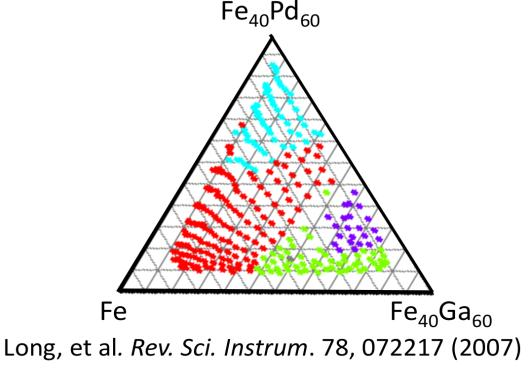

Looks pretty similar, great! But it is important to notice that performing reliable clustering and interpreting the results becomes more challenging with more clusters. The exact settings affect the results a lot.

For example, try to repeat the clustering of full data with two clusters. You will notice that the other cluster is not continuous over the compositional space. Would this kind of crystal structure phases be physically correct? - Hardly.

Then, try to repeat the clustering with one more or less clusters than you originally chose. Investigate the differences and compare to the original paper. Why some of the clusters seem to be more likely to split when the number of clusters is increased? - Is it because there truly is a phase boundary in that region? Or is it because the samples in that region did not actually represent any single clear crystal structure but they actually contain mixed phases? Or perhaps, there is so strong peak shifting (due to changes in lattice constants of the crystal structure) across the composition that the clustering algorithm is keen to split the data even though there is no phase boundary?

These are reasons why in practice the clustering results should always be checked in the further analysis.

**Do you want to know more?**

Check the articles provided at the beginning of the notebook for examples on practical dimensionality reduction and clustering for materials, including more examples on transforming data into forms that are easier to cluster, or modifying the clustering algorithms to better work with certain types of data.